In [1]:
%pip install retina-face

Note: you may need to restart the kernel to use updated packages.


In [2]:
from retinaface import RetinaFace

In [4]:
resp = RetinaFace.detect_faces(r"00_TEST_FILE_FULL_PICTURES\00a05da3-41a6-44f2-8c46-ded76cc11608.jpeg")

In [5]:
resp

{'face_1': {'score': 0.9998468160629272,
  'facial_area': [3139, 785, 4037, 1988],
  'landmarks': {'right_eye': [3278.6165, 1233.104],
   'left_eye': [3634.7085, 1301.8785],
   'nose': [3300.83, 1485.888],
   'mouth_right': [3231.1084, 1652.7275],
   'mouth_left': [3538.8726, 1710.193]}},
 'face_2': {'score': 0.9992040991783142,
  'facial_area': [4618, 450, 4988, 984],
  'landmarks': {'right_eye': [4701.759, 635.8301],
   'left_eye': [4746.46, 638.6304],
   'nose': [4628.828, 737.34973],
   'mouth_right': [4699.082, 850.49896],
   'mouth_left': [4725.9326, 846.45026]}},
 'face_3': {'score': 0.9991432428359985,
  'facial_area': [896, 656, 1664, 1712],
  'landmarks': {'right_eye': [1200.3375, 1083.8696],
   'left_eye': [1545.2217, 1138.8915],
   'nose': [1406.4823, 1326.9283],
   'mouth_right': [1175.4896, 1457.6886],
   'mouth_left': [1443.3557, 1503.3312]}},
 'face_4': {'score': 0.9986546039581299,
  'facial_area': [1666, 638, 2034, 1176],
  'landmarks': {'right_eye': [1890.5939, 836.8

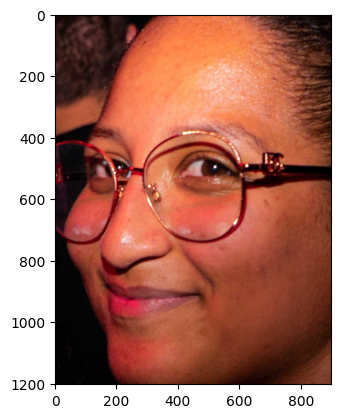

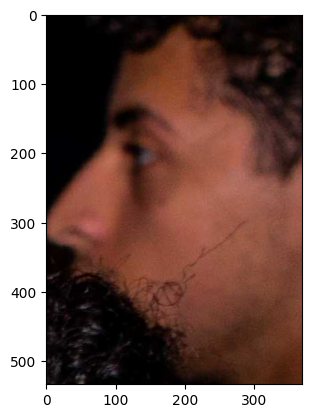

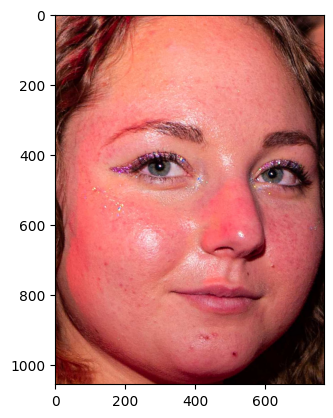

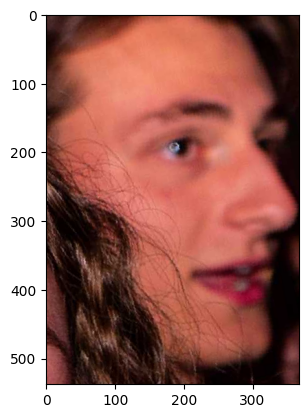

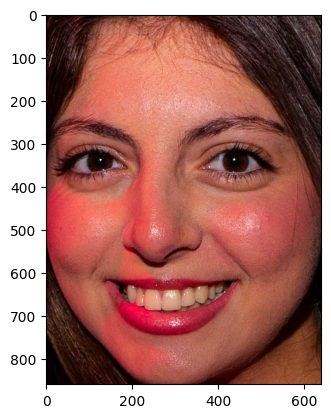

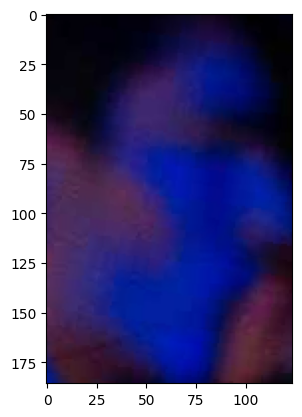

In [7]:
import matplotlib.pyplot as plt
faces = RetinaFace.extract_faces(img_path = r"00_TEST_FILE_FULL_PICTURES\00a05da3-41a6-44f2-8c46-ded76cc11608.jpeg", align = True)
for face in faces:
  plt.imshow(face)
  plt.show()

In [2]:
%pip install deepface

     ---------------------------------------- 0.0/88.4 kB ? eta -:--:--
     ---------------------------------------- 88.4/88.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/105.5 kB ? eta -:--:--
   ---------------------------------------- 105.5/105.5 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/84.4 kB ? eta -:--:--
   ---------------------------------------- 84.4/84.4 kB 4.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117047 sha256=8dd53a9fb2a27285be830a063b02397095c6bbdfe0d3ae14c9703e8dcc1d0615
  Stored in directory: c:\users\adoye\appdata\local\pip\cache\wheels\d6\6d\5d\5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
Note: you may need to restart the kernel to use updated packages.


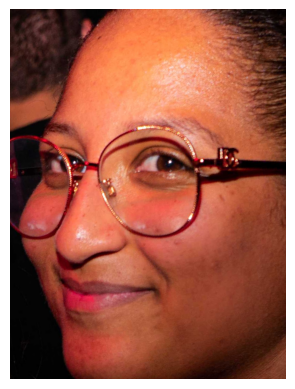

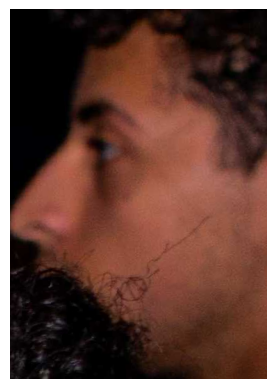

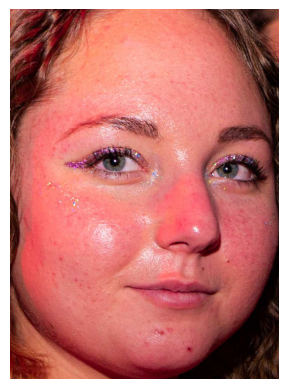

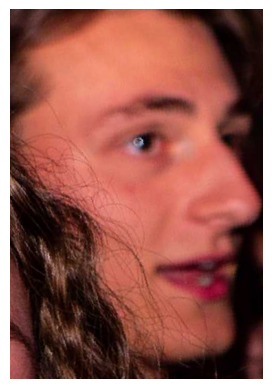

Error generating embedding for face 4: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


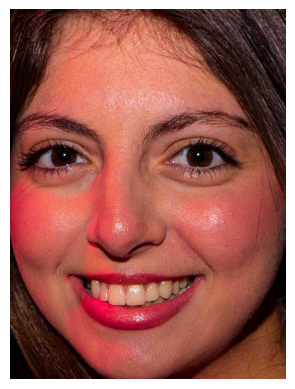

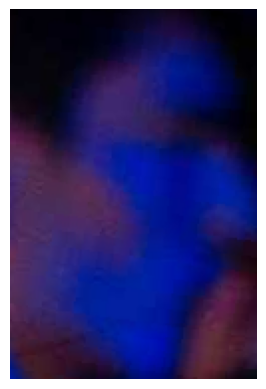

Error generating embedding for face 6: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Embeddings and face images saved successfully


In [2]:
import matplotlib.pyplot as plt
from retinaface import RetinaFace
from deepface import DeepFace
import json
import os

# Create a directory to save the face images if it doesn't exist
face_images_dir = "face_images"
os.makedirs(face_images_dir, exist_ok=True)

# Extract faces using RetinaFace
img_path = r"00_TEST_FILE_FULL_PICTURES\00a05da3-41a6-44f2-8c46-ded76cc11608.jpeg"
faces = RetinaFace.extract_faces(img_path=img_path, align=True)

# Initialize a list to store embeddings
embeddings = []

# Loop through each face, display it, and generate the embedding
for idx, face in enumerate(faces):
    plt.imshow(face)
    plt.axis('off')
    plt.show()
    
    # Create embedding using DeepFace with a smaller model (e.g., Facenet)
    try:
        embedding = DeepFace.represent(face, model_name="Facenet")[0]["embedding"]  # [0]["embedding"] to get the actual embedding vector
    except Exception as e:
        print(f"Error generating embedding for face {idx+1}: {e}")
        continue
    
    # Create an entry with ID and embedding
    image_name = os.path.basename(img_path).split('.')[0]
    entry = {
        "ID": f"{image_name}_face{idx+1}",
        "embedding": embedding
    }
    embeddings.append(entry)
    
    # Save the face image
    face_image_path = os.path.join(face_images_dir, f"{entry['ID']}.jpg")
    plt.imsave(face_image_path, face)

# Save embeddings to a JSONL file
jsonl_file_path = "embeddings.jsonl"
with open(jsonl_file_path, 'w') as jsonl_file:
    for entry in embeddings:
        jsonl_file.write(json.dumps(entry) + "\n")

print(f"Embeddings and face images saved successfully")


In [9]:
import matplotlib.pyplot as plt
from retinaface import RetinaFace
from deepface import DeepFace
import json
import os
from tqdm import tqdm
import shutil

# Define the directories containing the images
folders = ["folder_2", "folder_3", "folder_4", "folder_5", "folder_1"]

# Create necessary directories
face_images_dir = "face_images"
processed_dir = "PROCESSED"
error_dir = "ERROR"
os.makedirs(face_images_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(error_dir, exist_ok=True)

# Initialize a list to store embeddings
embeddings = []

# Function to save embeddings to a JSONL file in batches
def save_embeddings_to_file(embeddings, batch_number):
    jsonl_file_path = f"embeddings_batch_{batch_number}.jsonl"
    with open(jsonl_file_path, 'w') as jsonl_file:
        for entry in embeddings:
            jsonl_file.write(json.dumps(entry) + "\n")
    print(f"Saved batch {batch_number} embeddings to {jsonl_file_path}")

# Batch number counter
batch_number = 218

# Iterate through each folder
for folder in folders:
    # Get the list of image files in the folder
    image_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

    # Process each image file in the folder with a progress bar
    for image_file in tqdm(image_files, desc=f"Processing {folder}"):
        img_path = os.path.join(folder, image_file)

        try:
            # Extract faces using RetinaFace
            faces = RetinaFace.extract_faces(img_path=img_path, align=True)

            # Loop through each face, display it, and generate the embedding
            for idx, face in enumerate(faces):
                if face.size == 0:
                    raise ValueError("Detected face has zero size")

                # Create embedding using DeepFace with a smaller model (e.g., Facenet)
                embedding = DeepFace.represent(face, model_name="Facenet")[0]["embedding"]  # [0]["embedding"] to get the actual embedding vector
                
                # Create an entry with ID and embedding
                image_name = os.path.basename(img_path).split('.')[0]
                entry = {
                    "ID": f"{image_name}_face{idx+1}",
                    "embedding": embedding
                }
                embeddings.append(entry)
                
                # Save the face image
                face_image_path = os.path.join(face_images_dir, f"{entry['ID']}.jpg")
                plt.imsave(face_image_path, face)
                plt.close()  # Close the plot to free memory
            
            # Move the processed image to the PROCESSED directory
            shutil.move(img_path, os.path.join(processed_dir, image_file))

        except Exception as e:
            print(f"Error processing {image_file}: {e}")
            # Move the problematic image to the ERROR directory
            shutil.move(img_path, os.path.join(error_dir, image_file))

        # Save embeddings in batches of 100
        if len(embeddings) >= 100:
            batch_number += 1
            save_embeddings_to_file(embeddings, batch_number)
            embeddings.clear()  # Reset the list after saving

# Save remaining embeddings if any
if embeddings:
    batch_number += 1
    save_embeddings_to_file(embeddings, batch_number)

print(f"All embeddings and face images saved successfully")


Processing folder_2: 0it [00:00, ?it/s]
Processing folder_3: 0it [00:00, ?it/s]
Processing folder_4:   0%|          | 1/4707 [00:01<1:57:06,  1.49s/it]

Error processing abae9038-bbcf-4287-be5e-dfc2a5a04692.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 3/4707 [00:03<1:24:20,  1.08s/it]

Error processing abb4aa98-8a32-48d5-8f4e-1fbb06608164.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 5/4707 [00:05<1:21:03,  1.03s/it]

Error processing abb5626b-d5f0-4c28-9524-cba860818057.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 8/4707 [00:13<3:09:23,  2.42s/it]

Error processing abbd498d-b0c1-4724-8c12-7531660dbef8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 10/4707 [00:15<2:07:17,  1.63s/it]

Error processing abbfd8d9-3f1b-474d-8d57-01516ae9ec58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 11/4707 [00:19<3:03:58,  2.35s/it]

Error processing abc0dcf0-79d1-496c-bd38-d4050989b015.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 12/4707 [00:20<2:30:18,  1.92s/it]

Error processing abc3864f-8851-47f5-8481-f2c1fc887936.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 13/4707 [00:20<2:03:34,  1.58s/it]

Error processing abc43ef6-8915-4717-90ed-706a1f323d61.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 15/4707 [00:22<1:32:49,  1.19s/it]

Error processing abcc7001-236b-4bc9-a3c8-57db57df066b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 16/4707 [00:26<2:50:59,  2.19s/it]

Error processing abd20275-3f6c-4d01-8353-286d46cbabc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 17/4707 [00:28<2:32:30,  1.95s/it]

Error processing abd3176c-f942-4042-8dff-20ee250f95c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 18/4707 [00:30<2:29:47,  1.92s/it]

Error processing abd36ee6-bfe8-428b-8910-dcf82fd1b85a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 21/4707 [00:33<1:35:51,  1.23s/it]

Error processing abd6befb-55f9-4249-be1f-fc24a5a2db5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   0%|          | 22/4707 [00:33<1:22:22,  1.06s/it]

Error processing abd7435e-544e-43f6-bbf2-39add9e2d846.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 24/4707 [00:35<1:12:08,  1.08it/s]

Error processing abd7d91f-8c34-47a0-bb5d-7633ae61df10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 25/4707 [00:39<2:34:49,  1.98s/it]

Error processing abd8b85e-c03b-41ce-b5e7-e53dc9797038.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 26/4707 [00:40<2:13:17,  1.71s/it]

Error processing abd8fe2e-3861-44f5-b5f2-369d33ad5964.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 27/4707 [00:41<1:49:01,  1.40s/it]

Error processing abdde5bc-e94e-454f-824b-ba7297c1b39d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 28/4707 [00:42<1:38:17,  1.26s/it]

Error processing abdefdcb-bb6e-4e43-9961-ccffca4f9594.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 30/4707 [00:43<1:17:45,  1.00it/s]

Error processing abe04c17-6d69-4a47-97ed-3267ca847bf9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 31/4707 [00:44<1:10:09,  1.11it/s]

Error processing abe3a580-621f-49c8-a77f-4ab944c3d13a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 33/4707 [00:47<1:35:24,  1.22s/it]

Error processing abe9794c-1044-4532-a1b1-d760963484b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 35/4707 [00:49<1:22:57,  1.07s/it]

Error processing abeb4fc8-89f7-49fc-90a7-f3510b7b4a09.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 36/4707 [00:50<1:15:42,  1.03it/s]

Error processing abec1c91-e06b-48ca-9c8f-94f98ce19533.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 37/4707 [00:52<1:54:05,  1.47s/it]

Error processing abf1833c-c7fe-462f-b0ff-96ad78e8394e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 38/4707 [00:53<1:35:39,  1.23s/it]

Error processing abf2da9d-445f-496e-a107-49379a680043.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 40/4707 [00:55<1:24:12,  1.08s/it]

Error processing abf664c8-e46a-4cb5-8e05-d94b21bae431.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 41/4707 [00:56<1:26:24,  1.11s/it]

Error processing abf88a56-d649-4579-a6cb-d61195f7a445.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 42/4707 [00:57<1:21:15,  1.05s/it]

Error processing abfa54ac-e30a-45c0-9108-a5e536cdd748.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 46/4707 [01:05<1:44:10,  1.34s/it]

Error processing ac00b469-2acf-4a33-9e2d-8cf12cd5838f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 47/4707 [01:06<1:40:05,  1.29s/it]

Error processing ac00c804-f820-4047-8462-b7b751e29622.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 49/4707 [01:08<1:25:26,  1.10s/it]

Error processing ac097de4-d8fb-44e2-abd8-8d38f1616d06.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 50/4707 [01:08<1:16:23,  1.02it/s]

Error processing ac0a348f-ee63-4f74-be25-81b29efd68fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 51/4707 [01:10<1:19:57,  1.03s/it]

Error processing ac0bca7f-e1c5-4e14-bec6-275b0b81a8e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 52/4707 [01:13<2:11:59,  1.70s/it]

Error processing ac111bc0-018b-432c-9057-6050ea422c35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 53/4707 [01:14<1:48:28,  1.40s/it]

Error processing ac11975b-d4e3-4103-8ab1-b0c65cc3857b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 54/4707 [01:18<3:01:12,  2.34s/it]

Error processing ac145a1b-bacf-4f6a-a983-cc3756af9025.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 55/4707 [01:19<2:24:19,  1.86s/it]

Error processing ac15da96-0088-47e6-8350-b66f1aa5aaef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 56/4707 [01:20<2:05:35,  1.62s/it]

Error processing ac162b90-970b-473f-a9b7-5cf612190ce5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|          | 57/4707 [01:21<1:43:20,  1.33s/it]

Error processing ac1783bd-f72e-417a-aabe-1d4e8481c6c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|▏         | 62/4707 [01:30<1:53:27,  1.47s/it]

Error processing ac248f0a-db2b-4c93-9725-79b1bf0bcb9b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|▏         | 63/4707 [01:31<1:37:01,  1.25s/it]

Error processing ac24d34e-5e0e-4259-ae1e-edbff6dc759f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|▏         | 64/4707 [01:32<1:23:32,  1.08s/it]

Error processing ac2692ba-d0b2-4315-8b2a-44bbc69e5c93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|▏         | 65/4707 [01:33<1:18:47,  1.02s/it]

Error processing ac27848c-4d75-4811-b4ee-5ced41de44a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|▏         | 66/4707 [01:33<1:11:59,  1.07it/s]

Error processing ac2afa26-ae23-4d66-8a13-36e9b2bd78c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|▏         | 67/4707 [01:35<1:39:17,  1.28s/it]

Error processing ac2d188d-fa53-4a5f-bb8c-46b5b8915bbf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|▏         | 69/4707 [01:37<1:26:26,  1.12s/it]

Error processing ac2f6f85-936a-4941-8738-54e05ac5f768.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   1%|▏         | 70/4707 [01:42<2:40:13,  2.07s/it]

Error processing ac2f93b1-1651-4ae9-9f88-c6b1e4f90e52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 72/4707 [01:44<2:05:00,  1.62s/it]

Error processing ac310bdf-aacb-4403-a18e-b171d77d157a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 74/4707 [01:51<3:20:33,  2.60s/it]

Error processing ac3573ee-cae7-460d-86d4-9869e4a8cc30.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 75/4707 [01:52<2:41:52,  2.10s/it]

Error processing ac379483-bf81-4c6b-835d-0b68942e2bba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 76/4707 [01:53<2:15:41,  1.76s/it]

Error processing ac380611-871a-4789-bd84-99a4b9952cd1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 77/4707 [01:54<1:50:46,  1.44s/it]

Error processing ac3c1c7d-b3bc-4fa8-b452-1624d6c26b94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 80/4707 [01:57<1:32:58,  1.21s/it]

Error processing ac4801b6-4c63-4680-9d09-dd0e94fd393c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 81/4707 [01:58<1:26:07,  1.12s/it]

Saved batch 219 embeddings to embeddings_batch_219.jsonl


Processing folder_4:   2%|▏         | 82/4707 [02:00<1:56:41,  1.51s/it]

Error processing ac4ba6e5-e6b6-40e1-8910-c5bfebcb3754.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 83/4707 [02:01<1:41:14,  1.31s/it]

Error processing ac50871f-176c-4a9d-b95d-1f28b5209776.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 84/4707 [02:02<1:30:39,  1.18s/it]

Error processing ac50885e-ef6c-44b4-a711-fadd72bf9486.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 85/4707 [02:03<1:19:27,  1.03s/it]

Error processing ac532ad1-6137-4359-bab4-1a818d915afe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 86/4707 [02:03<1:10:48,  1.09it/s]

Error processing ac542bfd-e21a-460b-b1c0-d20137451c41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 87/4707 [02:04<1:04:54,  1.19it/s]

Error processing ac549d80-cec7-4eb6-861d-890e7572a000.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 90/4707 [02:07<1:07:12,  1.15it/s]

Error processing ac591f5e-8e5d-4719-9d8a-d0dd5b778162.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 91/4707 [02:08<1:13:10,  1.05it/s]

Error processing ac59ee98-158b-4bb7-a0ee-adc5a11357ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 93/4707 [02:10<1:07:19,  1.14it/s]

Error processing ac61312c-4ec9-423c-a6af-2c8fc20f2a0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 95/4707 [02:11<1:05:49,  1.17it/s]

Error processing ac641f2d-a554-4233-8f0e-26d968e8e368.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 96/4707 [02:13<1:21:35,  1.06s/it]

Error processing ac64b3ea-84ad-449c-9a1a-fe31cbc599fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 97/4707 [02:14<1:23:09,  1.08s/it]

Error processing ac65c94b-e27a-4552-a372-c38da55fe9f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 98/4707 [02:16<1:48:49,  1.42s/it]

Error processing ac67b759-c9a2-4423-ad4a-87138b384aaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 99/4707 [02:17<1:32:22,  1.20s/it]

Error processing ac680b2c-cc71-4f47-939e-b93a9cc2fb2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 101/4707 [02:22<2:44:35,  2.14s/it]

Error processing ac6c520b-65de-4090-89fe-f9a6c703c469.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 103/4707 [02:24<1:51:32,  1.45s/it]

Error processing ac749ed0-9a55-48e9-869d-0304cdbc2763.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 104/4707 [02:25<1:40:02,  1.30s/it]

Error processing ac78541a-2ca7-4661-9dd0-3e1acba6be1c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 108/4707 [02:30<1:37:30,  1.27s/it]

Error processing ac7c1a1f-88cc-4c92-baa6-8d74adafbc57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 111/4707 [02:37<2:33:42,  2.01s/it]

Error processing ac7f5810-6e65-473a-b6b0-5d0f6200e5e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 113/4707 [02:39<1:52:09,  1.46s/it]

Error processing ac842812-634f-4cd3-980d-2c38a53aeeda.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 116/4707 [02:42<1:21:21,  1.06s/it]

Error processing ac8707f9-003e-43c9-8b89-e61c4edabca4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   2%|▏         | 117/4707 [02:43<1:17:53,  1.02s/it]

Error processing ac872c12-7a18-46e8-aabf-ccb1acd3b90a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 120/4707 [02:46<1:20:06,  1.05s/it]

Error processing ac8d7646-d272-407d-a7e4-1a0ffbb69187.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 121/4707 [02:50<2:23:06,  1.87s/it]

Error processing ac924661-0729-4236-98e6-14bf4dd2ae99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 122/4707 [02:52<2:24:46,  1.89s/it]

Error processing ac927f10-c722-414f-99ad-101f1b92ae29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 123/4707 [02:53<2:01:44,  1.59s/it]

Error processing ac97aae7-a3d5-42db-8687-eaeedb092d16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 125/4707 [02:55<1:41:12,  1.33s/it]

Error processing ac989a95-4104-4a06-b925-991701f696e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 126/4707 [02:56<1:44:06,  1.36s/it]

Error processing ac9b2cca-37c2-44c0-a910-56910e44ae0f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 127/4707 [02:57<1:33:46,  1.23s/it]

Error processing ac9fee68-e847-47b6-a1d6-1bcab313d659.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 130/4707 [03:01<1:33:06,  1.22s/it]

Error processing aca2340f-6293-4d20-b9a1-400ae35a8277.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 131/4707 [03:02<1:20:36,  1.06s/it]

Error processing aca2da8e-27e5-40f0-bcf3-56dfdd285cdc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 132/4707 [03:03<1:23:29,  1.10s/it]

Error processing aca654c8-1186-4606-94fb-e7068e1db9a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 133/4707 [03:04<1:15:57,  1.00it/s]

Error processing aca7ddf8-6bc4-4fc1-9a3c-2f674b81436f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 134/4707 [03:05<1:14:07,  1.03it/s]

Error processing acac9e5c-f835-48b4-87f9-7a4da0bb7d15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 136/4707 [03:06<1:11:39,  1.06it/s]

Error processing acae1871-19f2-433a-a172-4884a232a8aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 137/4707 [03:07<1:13:51,  1.03it/s]

Error processing acaf53f6-6359-4c5c-a987-e181fcc79494.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 138/4707 [03:09<1:38:10,  1.29s/it]

Error processing acb4d637-94ac-48ee-b6ca-bdc19a1f838a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 139/4707 [03:10<1:26:07,  1.13s/it]

Error processing acbc2bc4-f2a8-408c-8bb2-2c39d73f976d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 140/4707 [03:11<1:24:18,  1.11s/it]

Error processing acbddb6b-076e-44cc-b452-5ca8c4aad9e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 141/4707 [03:13<1:37:14,  1.28s/it]

Error processing acbe447e-af14-4668-8cca-3d2c3815854e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 143/4707 [03:15<1:34:27,  1.24s/it]

Error processing acc47b61-c8d4-425c-98ce-1bfed4d94d3b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 144/4707 [03:17<1:37:09,  1.28s/it]

Error processing acc511b8-9632-4e09-a1d8-893860ab2f42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 145/4707 [03:18<1:34:02,  1.24s/it]

Error processing acc561b5-32ed-4a2e-921d-61d52606da29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 147/4707 [03:21<1:46:46,  1.40s/it]

Error processing acc62892-29c6-4ab1-959d-e03cd8f2c975.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 148/4707 [03:21<1:31:03,  1.20s/it]

Error processing acc9622c-6b0d-4054-a5b9-a0ede41429fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 149/4707 [03:22<1:22:56,  1.09s/it]

Error processing accba345-ee34-404b-8840-45052e63fffe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 151/4707 [03:24<1:12:51,  1.04it/s]

Saved batch 220 embeddings to embeddings_batch_220.jsonl


Processing folder_4:   3%|▎         | 153/4707 [03:28<1:44:33,  1.38s/it]

Error processing accfb753-dce9-491e-a79a-84d0bea5c562.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 154/4707 [03:29<1:45:16,  1.39s/it]

Error processing accfbb79-b451-4b5a-bfbc-9b271eb614e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 155/4707 [03:30<1:31:02,  1.20s/it]

Error processing acd2fcda-8e47-449c-895c-c040f39efa6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 158/4707 [03:38<2:21:08,  1.86s/it]

Error processing acd753d7-7d18-49d4-bd16-73c5445de602.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 159/4707 [03:42<2:59:55,  2.37s/it]

Error processing acd8a74f-9e56-46c0-afaa-1051f5aa70b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 160/4707 [03:43<2:27:50,  1.95s/it]

Error processing acdd2545-bfad-426d-bb4d-64735f38be8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   3%|▎         | 162/4707 [03:45<1:58:20,  1.56s/it]

Error processing acdf3f58-7135-4da5-b396-7a524c5fa823.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▎         | 165/4707 [03:52<2:29:47,  1.98s/it]

Error processing aceae830-1333-488a-b8bb-57db9901c4e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▎         | 166/4707 [03:53<2:11:05,  1.73s/it]

Error processing acece35f-41a3-4052-a78e-22181db5a55d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▎         | 167/4707 [03:54<1:51:04,  1.47s/it]

Error processing aced8a89-d76a-4c42-813f-c003de3279f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▎         | 168/4707 [03:54<1:34:18,  1.25s/it]

Error processing acef44f8-f028-49b8-a955-c4bd9bd9769d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▎         | 170/4707 [03:56<1:16:56,  1.02s/it]

Error processing acefaf6b-99be-45e2-b04c-be1bbdf56b63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▎         | 175/4707 [04:03<2:09:31,  1.71s/it]

Error processing acf47632-a8e0-4102-8a83-33386561f81e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▎         | 176/4707 [04:04<1:47:49,  1.43s/it]

Error processing acfc394a-1316-466f-9d96-88fae6da60d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 177/4707 [04:05<1:36:24,  1.28s/it]

Error processing acff3618-a76d-4c79-9707-bbf02680e883.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 178/4707 [04:07<1:44:43,  1.39s/it]

Error processing ad00005a-c6e5-4272-a9c4-242c3b11ba21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 180/4707 [04:10<1:59:36,  1.59s/it]

Error processing ad02cdb6-c625-4238-ba8d-a00b707ed640.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 181/4707 [04:11<1:45:25,  1.40s/it]

Error processing ad039778-d0cb-4561-bdcb-f5a34dfeb890.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 185/4707 [04:15<1:26:07,  1.14s/it]

Error processing ad0d6772-f68a-426d-b46d-9195635e6b66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 186/4707 [04:23<3:44:22,  2.98s/it]

Error processing ad13024f-98d6-4689-9925-283d569e4c5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 187/4707 [04:24<3:05:14,  2.46s/it]

Error processing ad136038-e9cf-4910-8787-6c6990832cfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 189/4707 [04:26<2:02:00,  1.62s/it]

Error processing ad17ef96-7b54-45ab-a62d-0801bc15d62d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 191/4707 [04:28<1:40:39,  1.34s/it]

Error processing ad1db58a-9ecd-45f8-9a99-4b7444d47b3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 192/4707 [04:29<1:35:40,  1.27s/it]

Error processing ad20c64c-a945-4d1b-895b-238e45924365.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 193/4707 [04:30<1:23:05,  1.10s/it]

Error processing ad210959-11df-46b0-8e2f-fd2ff9a6339f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 196/4707 [04:33<1:18:18,  1.04s/it]

Error processing ad236184-d13f-4bac-841c-34753a7e1036.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 197/4707 [04:35<1:53:16,  1.51s/it]

Error processing ad2b1cd2-66d2-41b2-a6a3-4364d59fff4b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 198/4707 [04:36<1:38:08,  1.31s/it]

Error processing ad361d65-c746-4825-87e8-8e81f2d04cce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 199/4707 [04:37<1:24:30,  1.12s/it]

Error processing ad399a32-6ba7-4c65-9ea6-7b0c60aadce4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 200/4707 [04:38<1:16:51,  1.02s/it]

Error processing ad3b9717-9aef-4984-bf1a-c16abe60fb85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 202/4707 [04:40<1:22:00,  1.09s/it]

Error processing ad3e57fe-3494-4708-bff3-f58af21026da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 204/4707 [04:42<1:14:39,  1.01it/s]

Error processing ad3fb688-5e48-43f2-83e6-012697501f5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 205/4707 [04:43<1:11:21,  1.05it/s]

Error processing ad45fffb-ae80-4c43-b43d-af4098c6f976.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 206/4707 [04:43<1:06:10,  1.13it/s]

Error processing ad4b4ad8-f0e4-4b6c-a0f0-b0c1854ed3f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 207/4707 [04:44<1:05:17,  1.15it/s]

Error processing ad4e0eb0-4b3f-4b69-bdc3-212ed39b447e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 209/4707 [04:47<1:21:21,  1.09s/it]

Error processing ad501b2d-83b1-4c0c-9998-6f75e903b30c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   4%|▍         | 210/4707 [04:48<1:16:32,  1.02s/it]

Error processing ad54ab61-e80b-42f6-9d60-a98db1d1a827.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 212/4707 [04:50<1:15:25,  1.01s/it]

Error processing ad58d7bc-7123-45f6-9340-0d783e6f1199.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 216/4707 [04:58<2:20:38,  1.88s/it]

Error processing ad61693e-d3c3-4fc1-a808-793674832834.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 217/4707 [05:02<3:01:47,  2.43s/it]

Error processing ad61f063-7be6-4ceb-a5f7-49e749ae1d6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 218/4707 [05:03<2:27:08,  1.97s/it]

Error processing ad6aacb5-8ac1-40f5-9c2d-ebc07f64c18d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 219/4707 [05:03<1:58:34,  1.59s/it]

Error processing ad6c3b32-6408-4241-a770-b57072561690.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 220/4707 [05:05<1:55:56,  1.55s/it]

Error processing ad6e5d1e-7ca2-4483-9220-f757694bee28.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 223/4707 [05:08<1:21:17,  1.09s/it]

Error processing ad75fb93-ea75-4aae-a532-b66ea467d748.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 224/4707 [05:09<1:27:38,  1.17s/it]

Error processing ad78233b-b196-4915-89fb-e57f38010a76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 225/4707 [05:10<1:16:59,  1.03s/it]

Error processing ad79b175-93c6-4cfe-829f-b5f156c856a4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 226/4707 [05:11<1:32:02,  1.23s/it]

Saved batch 221 embeddings to embeddings_batch_221.jsonl


Processing folder_4:   5%|▍         | 230/4707 [05:16<1:28:26,  1.19s/it]

Error processing ad81beef-d9dd-4165-89c0-750347f7c8bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 231/4707 [05:17<1:18:37,  1.05s/it]

Error processing ad862dd7-2aa3-4660-a4c0-bc5bc8104bf3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 234/4707 [05:23<2:10:00,  1.74s/it]

Error processing ad86d312-b065-47ec-8255-559f38a30ad4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▍         | 235/4707 [05:24<2:03:21,  1.66s/it]

Error processing ad87f96f-cfff-4654-9870-eb2c4c4a5507.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 236/4707 [05:25<1:45:26,  1.41s/it]

Error processing ad88713f-7573-4bc2-ae9f-265f80cff4e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 238/4707 [05:27<1:25:27,  1.15s/it]

Error processing ad896635-a969-4147-98c8-32886f9c0173.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 239/4707 [05:28<1:21:21,  1.09s/it]

Error processing ad8f74cb-25ac-4626-a34c-27066b3ecca8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 240/4707 [05:29<1:12:21,  1.03it/s]

Error processing ad8f8f30-1765-4819-af65-9b3ca1bf312a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 241/4707 [05:29<1:11:05,  1.05it/s]

Error processing ad93efb0-d01c-42ae-a7a3-7e064ab0ab4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 242/4707 [05:30<1:05:33,  1.14it/s]

Error processing ad947ce3-a82c-44d0-91f2-786a2f79e2e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 244/4707 [05:34<1:35:38,  1.29s/it]

Error processing ad9797c6-144b-49be-bbd6-e7edc755d91b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 245/4707 [05:35<1:30:24,  1.22s/it]

Error processing ad984965-b1c9-4647-ae9a-caf66c9fac55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 246/4707 [05:35<1:20:22,  1.08s/it]

Error processing ad992006-693a-43e5-9029-37adbdcfb51f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 247/4707 [05:38<1:47:57,  1.45s/it]

Error processing ad99806e-a5f5-43c1-90e2-e24d96b93369.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 248/4707 [05:39<1:34:09,  1.27s/it]

Error processing ad9cef27-5992-43e2-81ea-d707f7f4ce12.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 249/4707 [05:44<2:55:33,  2.36s/it]

Error processing ada1eadb-4292-41b6-be00-07a5bff36e23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 250/4707 [05:44<2:21:04,  1.90s/it]

Error processing ada445c7-f026-4ed1-bcae-66ba5ba20922.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 251/4707 [05:45<1:53:38,  1.53s/it]

Error processing ada54532-d50c-4907-8584-a9303da62357.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 252/4707 [05:46<1:42:59,  1.39s/it]

Error processing ada9c116-66e7-479e-9487-8b04780ff9cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 255/4707 [05:49<1:14:11,  1.00it/s]

Error processing adb25e01-a35f-4373-a764-31c5c5b0a6e3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 256/4707 [05:50<1:17:27,  1.04s/it]

Error processing adb25f9d-9273-4dcd-90ea-c91cc4448835.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 257/4707 [05:50<1:09:47,  1.06it/s]

Error processing adb5f754-9acd-4641-b9a1-d0addb622e1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   5%|▌         | 258/4707 [05:51<1:09:09,  1.07it/s]

Error processing adb7a9af-04ef-4cfd-bf6f-1839656ef894.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 260/4707 [05:56<2:16:19,  1.84s/it]

Error processing adb95142-12ae-4feb-a398-ddfe6e039d87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 262/4707 [05:59<1:59:01,  1.61s/it]

Error processing adbd134c-a64e-4a22-9c92-1ac84590aa72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 263/4707 [06:00<1:41:24,  1.37s/it]

Error processing adbe865e-ed54-4157-a143-50d0a8df129c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 264/4707 [06:00<1:28:33,  1.20s/it]

Error processing adc0c17d-44f8-410d-b327-b459c79cc305.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 267/4707 [06:07<2:20:05,  1.89s/it]

Error processing adc5c446-1f38-447a-b4b3-ad35ab44c68b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 269/4707 [06:09<1:41:55,  1.38s/it]

Error processing adc78830-1e14-4489-a39f-2d33ef739cc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 270/4707 [06:10<1:43:42,  1.40s/it]

Error processing adc7c9d9-45f6-491a-9f78-807b00e7d11f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 271/4707 [06:12<1:50:57,  1.50s/it]

Error processing adc87a90-99b8-47c4-8d5c-1ae289e7ef66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 272/4707 [06:13<1:38:32,  1.33s/it]

Error processing adc8b90d-bfe5-4b58-b7cc-d8586a003c0e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 273/4707 [06:15<1:53:38,  1.54s/it]

Error processing adca07c7-bcf3-443c-92f8-6acb8b42a98b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 274/4707 [06:17<1:52:32,  1.52s/it]

Error processing adca343e-a0b9-4d9d-85c7-691a1a23db4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 276/4707 [06:19<1:42:53,  1.39s/it]

Error processing add1a036-6191-4634-b686-c0e0cc390309.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 277/4707 [06:20<1:31:05,  1.23s/it]

Error processing add6c1b9-0847-42ee-a61e-2af08a1491ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 282/4707 [06:28<1:39:55,  1.35s/it]

Error processing adde1b5a-ee54-4019-901d-f376f7f2e6f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 283/4707 [06:28<1:25:36,  1.16s/it]

Error processing adde5055-8570-43ce-8034-2abc07029c32.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 286/4707 [06:31<1:15:56,  1.03s/it]

Error processing ade0b727-6939-4fb8-8d51-aec69409d008.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 287/4707 [06:32<1:09:00,  1.07it/s]

Error processing ade22903-2165-4001-ab7a-ed0c3aa4121f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 288/4707 [06:33<1:05:47,  1.12it/s]

Error processing ade28551-2596-40b5-ac0f-1f3ecc146047.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 290/4707 [06:35<1:10:55,  1.04it/s]

Error processing ade6911b-991b-4a0b-8efd-c043dd9b8aa8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▌         | 293/4707 [06:39<1:28:43,  1.21s/it]

Error processing ade9bac5-9977-40ab-b84f-118a12c56243.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▋         | 296/4707 [06:42<1:15:15,  1.02s/it]

Error processing aded3626-cde0-40fa-a779-0dc644191a60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▋         | 297/4707 [06:43<1:12:13,  1.02it/s]

Error processing adf0490c-16a0-4051-a99c-69d25db249ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▋         | 298/4707 [06:43<1:06:04,  1.11it/s]

Error processing adf1ae9a-3e12-415c-9e0e-d1ea6e7a0b15.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▋         | 300/4707 [06:51<2:54:00,  2.37s/it]

Error processing adf323d9-c940-4772-b473-eacff57fd235.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▋         | 301/4707 [06:52<2:29:33,  2.04s/it]

Error processing adf3a3a5-3c7a-41f5-9478-9dd77cc2056e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▋         | 303/4707 [06:58<2:58:35,  2.43s/it]

Error processing adf87b63-e1a0-44a9-8e83-1c2591683b6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   6%|▋         | 305/4707 [07:00<2:04:53,  1.70s/it]

Error processing adf96ea9-edfd-4fe6-ac3f-597ece55c994.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 306/4707 [07:01<1:44:41,  1.43s/it]

Error processing adf9c91a-8857-411b-9015-ac9bd852fe62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 308/4707 [07:03<1:19:20,  1.08s/it]

Error processing adfe2192-0893-4dfa-94ef-577f374d4cf7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 309/4707 [07:06<2:13:46,  1.83s/it]

Error processing adff96d5-1547-432e-b478-cbc8f7420b49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 310/4707 [07:08<2:11:51,  1.80s/it]

Saved batch 222 embeddings to embeddings_batch_222.jsonl


Processing folder_4:   7%|▋         | 313/4707 [07:11<1:26:43,  1.18s/it]

Error processing ae0523ab-56ca-48a8-930e-6792e9777bec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 314/4707 [07:11<1:19:27,  1.09s/it]

Error processing ae054ed8-0075-44df-ad07-200f8c93b4b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 315/4707 [07:13<1:19:25,  1.08s/it]

Error processing ae0b6e6a-d95d-456d-9546-c9bba58057fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 316/4707 [07:14<1:36:06,  1.31s/it]

Error processing ae0cf982-7458-4b6d-813c-781d679caa0a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 317/4707 [07:17<2:00:57,  1.65s/it]

Error processing ae0e1af1-af82-4a31-a876-5f198977bd54.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 318/4707 [07:18<1:45:13,  1.44s/it]

Error processing ae0e5127-eba2-46ca-90c3-ab3d0dd63d05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 319/4707 [07:19<1:49:04,  1.49s/it]

Error processing ae0f5df2-25fa-4303-a09d-b9ede57a7dec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 320/4707 [07:21<1:58:32,  1.62s/it]

Error processing ae104fa2-0b8b-4503-98fe-a9edfe5805a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 321/4707 [07:22<1:38:21,  1.35s/it]

Error processing ae147226-4986-42f9-9f1e-6c17102a8084.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 323/4707 [07:24<1:20:59,  1.11s/it]

Error processing ae172b97-f28f-45ad-91ea-4856d39c2153.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 324/4707 [07:24<1:12:18,  1.01it/s]

Error processing ae176326-1ebf-4219-a1ca-92d1f9604ac5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 325/4707 [07:26<1:14:11,  1.02s/it]

Error processing ae1eb631-2086-49f4-80ee-8026ec564351.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 326/4707 [07:27<1:12:57,  1.00it/s]

Error processing ae2024db-dbd8-4588-ac23-2c10345dca06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 327/4707 [07:31<2:25:09,  1.99s/it]

Error processing ae235bac-271a-4511-9d1b-d5aac56412b9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 329/4707 [07:32<1:41:01,  1.38s/it]

Error processing ae2809c6-6d28-4014-b756-87a9cc02da25.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 330/4707 [07:33<1:28:20,  1.21s/it]

Error processing ae28b3d0-097d-4681-9dce-defc7e621d3f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 332/4707 [07:35<1:11:13,  1.02it/s]

Error processing ae318bc5-0225-41af-bb2f-110099056722.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 333/4707 [07:35<1:04:53,  1.12it/s]

Error processing ae31fbe6-9a7f-4c77-88b4-d063a78f4bc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 337/4707 [07:42<1:44:17,  1.43s/it]

Error processing ae382a36-285c-4df7-b3ca-7f3f8935df67.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 339/4707 [07:50<3:21:14,  2.76s/it]

Error processing ae3b7ab5-17f6-4f0e-a748-3a020cffdc24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 340/4707 [07:52<2:51:19,  2.35s/it]

Error processing ae3c0190-99f8-4797-90f7-8b2aeb84c089.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 341/4707 [07:54<2:51:29,  2.36s/it]

Error processing ae4064ce-1e50-46e4-9151-b5052360ae8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 342/4707 [07:55<2:23:12,  1.97s/it]

Error processing ae40ebe1-975b-44e7-8664-9a7d4720e57c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 343/4707 [07:56<2:02:08,  1.68s/it]

Error processing ae42252a-eb80-48a4-94d5-e10b1a14407a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 344/4707 [07:58<2:04:36,  1.71s/it]

Error processing ae4380d3-6fa9-49d8-8c85-6772ada0b3ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 345/4707 [07:59<2:01:29,  1.67s/it]

Error processing ae46b426-3b85-465e-a7bf-a5519b86776f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 346/4707 [08:00<1:41:18,  1.39s/it]

Error processing ae4b891b-454e-43b6-8aa8-de72e893eb51.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 347/4707 [08:01<1:25:32,  1.18s/it]

Error processing ae4e5d02-91f7-44fc-b3ea-cd7b83901c1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 349/4707 [08:03<1:17:16,  1.06s/it]

Error processing ae509a42-38c3-4d55-b931-fb6cef8d89cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 350/4707 [08:04<1:13:29,  1.01s/it]

Error processing ae511087-de7f-4f4b-b3d1-e1b9cf44601d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   7%|▋         | 351/4707 [08:04<1:05:51,  1.10it/s]

Error processing ae542e1c-4fff-4ff7-a0c8-702329027ae1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 354/4707 [08:07<1:09:59,  1.04it/s]

Error processing ae5b0f2f-d4ba-4dbc-b544-83c88e5df219.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 355/4707 [08:11<2:20:31,  1.94s/it]

Error processing ae5c1950-c921-467c-912b-30a6697a1128.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 358/4707 [08:15<1:46:25,  1.47s/it]

Error processing ae5efabd-f88c-4d8c-b9e9-a96aee704951.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 360/4707 [08:16<1:20:56,  1.12s/it]

Error processing ae63e209-99fd-4464-b186-b7788a12fee2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 361/4707 [08:17<1:11:39,  1.01it/s]

Error processing ae64ff5f-a5fa-4307-a921-8559c2433da5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 362/4707 [08:26<4:03:14,  3.36s/it]

Error processing ae662a2b-d52f-40ea-8c7d-a5836414ef02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 363/4707 [08:27<3:11:08,  2.64s/it]

Error processing ae6716ca-b209-4adc-8356-6e32c76aa68a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 364/4707 [08:29<2:55:50,  2.43s/it]

Error processing ae69a5d3-3768-4cf1-93b7-4cb1d3adaff6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 365/4707 [08:30<2:36:21,  2.16s/it]

Error processing ae6ce8d7-3c60-450c-a6af-0e6010a73db8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 368/4707 [08:33<1:39:22,  1.37s/it]

Error processing ae71bdcc-b41c-4e0b-b56e-646dfd59acf5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 370/4707 [08:36<1:36:07,  1.33s/it]

Error processing ae72dcf7-7a84-42d0-a5b2-10cf443ee5ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 371/4707 [08:37<1:23:33,  1.16s/it]

Error processing ae744466-8b78-4ba5-b90f-7eb58719a944.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 372/4707 [08:38<1:21:22,  1.13s/it]

Error processing ae7a4a2b-f66f-4d68-b76f-cfd1cd031f66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 373/4707 [08:38<1:11:24,  1.01it/s]

Error processing ae7ee54a-7b30-4e52-8052-72b5ef8ea999.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 376/4707 [08:41<1:14:42,  1.04s/it]

Error processing ae84f272-6db0-427a-a03f-a799dcf30b75.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 377/4707 [08:42<1:07:30,  1.07it/s]

Error processing ae87c3d4-c72d-492f-8eea-d02e7504944e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 378/4707 [08:46<2:13:11,  1.85s/it]

Error processing ae8abb16-6702-4dbe-aeb6-73e5d7157b52.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 380/4707 [08:51<2:19:46,  1.94s/it]

Error processing ae8bb595-4c82-4c6d-8698-07e41bb23040.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 381/4707 [08:52<2:00:13,  1.67s/it]

Error processing ae8be38f-f87d-4a39-a108-aa2a6bc160c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 382/4707 [08:52<1:39:30,  1.38s/it]

Error processing ae8ce5dc-09a5-4065-8b7c-f9ef8fc779ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 383/4707 [08:53<1:26:29,  1.20s/it]

Error processing ae8df32b-e077-4b20-b707-636ff3d75cce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 384/4707 [08:54<1:26:59,  1.21s/it]

Error processing ae915faa-8085-4744-9d0f-0b94c364026a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 385/4707 [08:55<1:15:10,  1.04s/it]

Error processing ae93734e-c9b4-451f-af72-c760560bb01c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 387/4707 [08:57<1:17:51,  1.08s/it]

Error processing ae96bbba-190d-4d36-b8be-68142cc92948.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 223 embeddings to embeddings_batch_223.jsonl


Processing folder_4:   8%|▊         | 390/4707 [09:00<1:10:21,  1.02it/s]

Error processing aea258f9-3d82-4b36-a777-71259a472f54.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 391/4707 [09:03<1:50:29,  1.54s/it]

Error processing aea455c3-a883-4e2c-ba29-775eff793dbf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 392/4707 [09:04<1:46:51,  1.49s/it]

Error processing aea4852e-ad9a-4189-aef2-8487be8930d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 393/4707 [09:07<2:01:06,  1.68s/it]

Error processing aea6044f-2471-4768-bebb-5489efc07013.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 394/4707 [09:09<2:21:30,  1.97s/it]

Error processing aea68e6d-abb8-4e8e-adad-1cc5efe0d521.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   8%|▊         | 395/4707 [09:11<2:05:58,  1.75s/it]

Error processing aea6b990-f8d4-4857-b4d2-d43c73d0efea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▊         | 401/4707 [09:19<1:47:27,  1.50s/it]

Error processing aeba27fe-9a53-4347-92cf-7de102a6a18d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▊         | 403/4707 [09:24<2:23:30,  2.00s/it]

Error processing aebaef70-77c6-4cff-944a-b5a614fc6916.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▊         | 405/4707 [09:26<1:52:23,  1.57s/it]

Error processing aebd3890-6c20-4c54-9103-5cfbc9e8f550.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▊         | 406/4707 [09:29<2:14:11,  1.87s/it]

Error processing aebf4643-eb35-49c0-9e75-e0e7c7ed3526.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▊         | 407/4707 [09:30<1:53:46,  1.59s/it]

Error processing aec3498a-d4cc-46c8-aa4e-d4b75f392713.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▊         | 408/4707 [09:31<1:37:42,  1.36s/it]

Error processing aec403e8-464b-45a9-a0e0-162be6b568ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▊         | 410/4707 [09:33<1:27:50,  1.23s/it]

Error processing aec5dd53-2956-4b3a-8d83-06e95f6ae597.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 413/4707 [09:44<3:44:27,  3.14s/it]

Error processing aecf9712-02c5-4342-9ecf-0aefdc5b5764.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 414/4707 [09:46<3:13:48,  2.71s/it]

Error processing aed1dfcc-6380-4e1d-b3f8-9774445f441b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 415/4707 [09:48<3:06:40,  2.61s/it]

Error processing aed28d30-af6c-4b18-92f9-4423bb764453.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 416/4707 [09:49<2:28:25,  2.08s/it]

Error processing aed378dd-2881-4f9f-b31f-dd11ffa1e35b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 418/4707 [09:51<1:44:50,  1.47s/it]

Error processing aed43c96-a9a4-4157-bc7f-8f44ec298ee5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 419/4707 [09:54<2:21:35,  1.98s/it]

Error processing aed79164-097c-4ccb-a894-40789905390f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 420/4707 [09:55<2:10:12,  1.82s/it]

Error processing aed87750-8ff7-456a-8c32-1bd4c5ea4875.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 421/4707 [09:57<2:00:45,  1.69s/it]

Error processing aee0c5c9-d67f-42a4-9074-a70695753434.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 424/4707 [09:59<1:19:12,  1.11s/it]

Error processing aee51aa8-26c4-4983-a8e6-ea46615cc003.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 426/4707 [10:02<1:32:20,  1.29s/it]

Error processing aeec8abe-7350-46a6-9e8c-414b5e068968.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 427/4707 [10:04<1:39:42,  1.40s/it]

Error processing aef0d4dd-e28c-445b-b7f7-8e69867ba171.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 428/4707 [10:04<1:22:49,  1.16s/it]

Error processing aef20177-be7d-42d8-8a6e-0beaf299c36d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 429/4707 [10:05<1:16:00,  1.07s/it]

Error processing aef39835-5dfc-4b10-8dec-fa97ebf248b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 430/4707 [10:06<1:08:39,  1.04it/s]

Error processing aef44a34-9d69-452e-87d6-97d35c9865d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 431/4707 [10:07<1:05:46,  1.08it/s]

Error processing aef55a8a-d535-4f8e-99d6-eb691b63e9cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 432/4707 [10:08<1:05:45,  1.08it/s]

Error processing aef56127-a199-4086-a080-152e9685116c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 436/4707 [10:12<1:16:06,  1.07s/it]

Error processing aef8f7e5-54ea-41c8-aff4-a70ec30f6bd3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 437/4707 [10:13<1:09:40,  1.02it/s]

Error processing aefef161-6643-48f5-92a1-cb3be1b7ce4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 438/4707 [10:16<1:58:38,  1.67s/it]

Error processing af027dfd-37a4-4eb3-a313-56b00320dd30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 440/4707 [10:21<2:10:34,  1.84s/it]

Error processing af0900e2-9b24-4a7b-8393-3109a2c75b16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 442/4707 [10:23<1:44:39,  1.47s/it]

Error processing af0b73e6-aaa2-45a3-8992-4a9940b4cd5a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 443/4707 [10:24<1:30:28,  1.27s/it]

Error processing af0b966e-6154-4c39-93f2-8e28fb01aaa2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 444/4707 [10:24<1:20:21,  1.13s/it]

Error processing af0d0bf0-4539-4d98-b4e5-7ee88e6ea463.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 445/4707 [10:25<1:12:14,  1.02s/it]

Error processing af0e05c5-9b90-48f2-9424-19a3b1d7d2ee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 446/4707 [10:26<1:06:27,  1.07it/s]

Error processing af108ab8-c6dc-4e6c-b637-3c868b238e08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:   9%|▉         | 447/4707 [10:27<1:06:57,  1.06it/s]

Error processing af12f762-faba-4177-9e3b-06090737ff85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 448/4707 [10:28<1:05:15,  1.09it/s]

Error processing af14e2c4-18c9-4063-9105-184da1befede.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 451/4707 [10:30<1:04:47,  1.09it/s]

Error processing af1b4789-4bb0-4c88-9caa-732150133765.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 452/4707 [10:31<1:00:46,  1.17it/s]

Error processing af1b6d9a-405b-4649-aa7a-9741278b01fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 453/4707 [10:32<1:00:45,  1.17it/s]

Error processing af1bd3d6-4f62-45aa-8da8-31d1bd8a674f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 456/4707 [10:37<1:39:05,  1.40s/it]

Error processing af229a18-0315-4d1d-9a5f-7c3bbbf966bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 459/4707 [10:40<1:27:21,  1.23s/it]

Error processing af2a6b94-1cb6-4077-8fa0-fcdb0ece1aa5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 460/4707 [10:41<1:15:45,  1.07s/it]

Error processing af2ca294-8628-4e85-8aad-c684b2bb1a5d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 461/4707 [10:42<1:09:47,  1.01it/s]

Error processing af2d4e47-25b8-4dc0-980e-6092cc306ca8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 462/4707 [10:45<1:46:08,  1.50s/it]

Error processing af2ecb38-e25a-4c75-b4db-ea552526492d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 224 embeddings to embeddings_batch_224.jsonl


Processing folder_4:  10%|▉         | 463/4707 [10:46<1:44:33,  1.48s/it]

Error processing af31a928-3825-4eb5-b963-4dda8a1b9583.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 464/4707 [10:47<1:28:15,  1.25s/it]

Error processing af32c941-f7ed-4ade-a089-c4c176dd37c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 465/4707 [10:47<1:16:44,  1.09s/it]

Error processing af34ebf5-42aa-4907-8e28-60a470d167d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 466/4707 [10:48<1:14:22,  1.05s/it]

Error processing af35a9ef-3017-4245-a87f-78c58f0b3400.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 468/4707 [10:53<2:14:36,  1.91s/it]

Error processing af371c0a-ce1b-43d8-9e44-7c1e3fbc6bd4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 469/4707 [10:54<1:48:18,  1.53s/it]

Error processing af3816aa-631b-4a87-b66b-eaaf624dcbb9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|▉         | 470/4707 [10:55<1:34:47,  1.34s/it]

Error processing af385b4b-58e2-41da-9eaf-d888a96ef9bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 471/4707 [10:56<1:20:12,  1.14s/it]

Error processing af399091-4a57-4622-9bfb-fbb3354a7eb7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 472/4707 [10:57<1:29:52,  1.27s/it]

Error processing af39cb9e-efac-4508-9b9e-1d5eeec7241b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 475/4707 [11:00<1:22:41,  1.17s/it]

Error processing af42e0ab-92fc-49c6-9684-08d80a2f5efb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 478/4707 [11:05<1:38:27,  1.40s/it]

Error processing af479245-f87c-41d6-bcc3-f1e8c43d7315.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 480/4707 [11:07<1:37:43,  1.39s/it]

Error processing af4d4909-ec6c-4e16-bba4-963f6dd00f42.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 481/4707 [11:09<1:33:36,  1.33s/it]

Error processing af51f15d-6ae1-4df0-8c85-a182d9ffce6b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 484/4707 [11:11<1:11:49,  1.02s/it]

Error processing af576a0c-f521-4959-bbc8-784a850f3e11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 485/4707 [11:12<1:07:06,  1.05it/s]

Error processing af57ea45-c06b-4b25-b6c5-af93aa6480cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 486/4707 [11:13<1:03:23,  1.11it/s]

Error processing af58616a-c660-43f2-a0ac-1202aeb3f9ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 487/4707 [11:14<59:48,  1.18it/s]  

Error processing af590825-1de0-407d-a7cc-311f890df188.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 488/4707 [11:15<1:00:50,  1.16it/s]

Error processing af590bb7-ce5f-4efb-b9ea-9ba63c68ebdc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 489/4707 [11:17<1:37:49,  1.39s/it]

Error processing af597d91-4fcd-457e-8bae-7815dedc0044.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing af5f0c58-bc5e-447b-ab24-b3279a6d8939.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 491/4707 [11:21<1:59:11,  1.70s/it]

Error processing af6307a7-c84a-47fd-b287-992328dd11f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 492/4707 [11:22<1:39:23,  1.41s/it]

Error processing af63397f-33d0-4415-89c5-bf3956991ccb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  10%|█         | 494/4707 [11:24<1:32:35,  1.32s/it]

Error processing af63774c-4368-4c00-9a9d-3b2909731c73.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 495/4707 [11:26<1:29:42,  1.28s/it]

Error processing af63bc67-d7f1-4c23-91b8-9cc327d2cd2b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 498/4707 [11:36<2:57:36,  2.53s/it]

Error processing af6c4274-7d5f-4688-bcfe-39a43fbdee1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 499/4707 [11:38<2:49:14,  2.41s/it]

Error processing af6e0928-0bf6-4444-8312-9a9b12916087.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 500/4707 [11:39<2:21:36,  2.02s/it]

Error processing af6e9baf-4b67-4999-80f0-616ad8c64a48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 502/4707 [11:41<1:42:13,  1.46s/it]

Error processing af701962-963a-43db-8021-655a8304493f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 503/4707 [11:42<1:28:17,  1.26s/it]

Error processing af70d7d8-82f2-4cdb-ac91-ba84e04da1c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 504/4707 [11:42<1:15:53,  1.08s/it]

Error processing af72a69d-bb9f-4e73-8d8d-e1d42d751cdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 505/4707 [11:43<1:10:57,  1.01s/it]

Error processing af7aa584-a385-4b28-83c0-f6cf0c5caca9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 507/4707 [11:46<1:24:24,  1.21s/it]

Error processing af7c7d17-22df-4b23-8bef-b604a76ea601.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 508/4707 [11:47<1:13:44,  1.05s/it]

Error processing af7ce164-7b7a-40bd-8d81-d981f9f78ffd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 509/4707 [11:48<1:09:54,  1.00it/s]

Error processing af7e6a5b-d3c9-44bb-8c7f-33ce8ee46cca.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 511/4707 [11:50<1:14:16,  1.06s/it]

Error processing af82510a-0344-4af2-863b-72ca3993d4ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 514/4707 [11:53<1:06:56,  1.04it/s]

Error processing af85ba40-9bff-4219-a621-0c0c7479d19a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 515/4707 [11:54<1:08:24,  1.02it/s]

Error processing af869492-b0e0-4f96-8ef2-a0d6cf5c74e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 516/4707 [11:55<1:03:58,  1.09it/s]

Error processing af87571e-3449-436e-b9ce-cc91c16d89a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 517/4707 [11:55<58:58,  1.18it/s]  

Error processing af87ed2b-b11b-44d5-8017-e24fb6051f2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 518/4707 [11:56<1:03:37,  1.10it/s]

Error processing af890c25-322f-444e-b25a-eaae2a787732.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 519/4707 [11:58<1:08:54,  1.01it/s]

Error processing af89f604-4776-4c5f-a343-49a400b11b32.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 520/4707 [11:58<1:07:04,  1.04it/s]

Error processing af8ad4b0-1e3b-432b-b58f-94c0c25f28bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 521/4707 [12:00<1:28:54,  1.27s/it]

Error processing af8c5cb4-ce87-40d1-8321-51bfa1c1c0cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 523/4707 [12:03<1:25:59,  1.23s/it]

Error processing af8db15b-8809-4a96-b041-1bbf124ca03f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 524/4707 [12:04<1:19:10,  1.14s/it]

Error processing af91e4de-1e4c-410f-95ae-293f2516e7f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 525/4707 [12:05<1:26:06,  1.24s/it]

Error processing af92b1aa-a7bd-4204-883f-d34b841ba5fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 526/4707 [12:06<1:18:34,  1.13s/it]

Error processing af92c289-6bf3-4919-b049-9e2b1fdf2a17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 527/4707 [12:07<1:09:59,  1.00s/it]

Error processing af9330a0-3ada-4fcf-8fb0-094b24bca0d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 528/4707 [12:08<1:08:22,  1.02it/s]

Error processing af943799-de1c-4119-8c2a-d3293e7d1bb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█         | 529/4707 [12:12<2:04:17,  1.79s/it]

Error processing af96d250-f01b-4de4-8676-efdfa3b01cf9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 530/4707 [12:13<1:46:17,  1.53s/it]

Error processing af97a42d-141a-408e-b3fa-b38c78f23d87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 531/4707 [12:13<1:29:25,  1.28s/it]

Error processing af9882d5-4dc9-47db-bb65-cb7998c7a473.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 532/4707 [12:14<1:15:39,  1.09s/it]

Error processing af9ae394-4489-4871-9410-e5747a73a7c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 533/4707 [12:19<2:32:41,  2.19s/it]

Error processing afa1fbf9-ae7a-4798-b7c0-4d1a6284b48f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 534/4707 [12:21<2:32:27,  2.19s/it]

Error processing afa2a268-71a4-4a4f-8dd9-976e481b1895.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 535/4707 [12:22<2:10:34,  1.88s/it]

Error processing afa2ecdf-5681-4704-88dd-cd7bbf6c5cac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 536/4707 [12:27<3:14:37,  2.80s/it]

Error processing afa30827-e933-40c1-83f1-87ad3519e209.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 537/4707 [12:31<3:50:27,  3.32s/it]

Saved batch 225 embeddings to embeddings_batch_225.jsonl


Processing folder_4:  11%|█▏        | 538/4707 [12:33<3:08:44,  2.72s/it]

Error processing afa51c7c-6fed-4d19-bfe0-0db08eea6726.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 540/4707 [12:36<2:24:01,  2.07s/it]

Error processing afa71750-2ec1-4775-99ea-3dc56d6c5d82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  11%|█▏        | 541/4707 [12:39<2:34:51,  2.23s/it]

Error processing afa7b903-73d5-4e46-b3dd-528d4961e1ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 542/4707 [12:39<2:02:53,  1.77s/it]

Error processing afa7d5e5-eb0d-4e99-abe6-5818b57f59ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 543/4707 [12:40<1:40:21,  1.45s/it]

Error processing afa7ed20-3ca3-44e7-8ae4-53a4fa13f4ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 544/4707 [12:44<2:29:53,  2.16s/it]

Error processing afa88f5d-97e1-423b-bf38-615ced04e844.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 545/4707 [12:46<2:27:20,  2.12s/it]

Error processing afa9828c-f876-47a8-b91a-cc8a3652e3e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 546/4707 [12:47<2:01:42,  1.75s/it]

Error processing afa99042-d237-4a2b-b454-fae185852501.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 547/4707 [12:48<1:46:08,  1.53s/it]

Error processing afaa5929-f344-44da-bf44-6b58d0ff850a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 549/4707 [12:49<1:20:18,  1.16s/it]

Error processing afac9783-3fc0-44ca-9aa3-591f4343c463.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 550/4707 [12:54<2:27:59,  2.14s/it]

Error processing afacce3c-a2fc-4d0a-a15e-61598b766b6c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 553/4707 [13:01<2:18:21,  2.00s/it]

Error processing afafc5a9-617a-42e1-a43d-ee861a2437d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 554/4707 [13:03<2:13:50,  1.93s/it]

Error processing afb27359-0757-43c0-8e12-6aaee468f7d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 556/4707 [13:04<1:31:23,  1.32s/it]

Error processing afb3718c-b8a5-41e3-8a54-f71854bad3ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 557/4707 [13:06<1:47:42,  1.56s/it]

Error processing afb7e1a4-2a48-47c1-ae13-fd974ad55f3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 558/4707 [13:11<3:00:38,  2.61s/it]

Error processing afbe5027-e196-4c06-aaa6-1e6e5e0758da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 559/4707 [13:12<2:20:38,  2.03s/it]

Error processing afbf5eb2-4e25-4c1e-a434-0b075969e92f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 560/4707 [13:13<2:02:31,  1.77s/it]

Error processing afbf72a1-09cc-4453-bed2-b5ceffc2e1c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 561/4707 [13:14<1:41:40,  1.47s/it]

Error processing afc0198a-c788-4e8e-b7eb-568acfb06233.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 562/4707 [13:15<1:30:13,  1.31s/it]

Error processing afc34f64-b89c-4b37-85c5-c3f57b9e2035.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 563/4707 [13:16<1:28:39,  1.28s/it]

Error processing afc4513f-90e0-4159-9c39-81286b4c988d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 565/4707 [13:22<2:09:03,  1.87s/it]

Error processing afc6b8cc-17e4-4bd7-abbe-a98ef9ca3904.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 566/4707 [13:22<1:45:10,  1.52s/it]

Error processing afc9733d-8b18-41d4-934b-199015ffa72b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 568/4707 [13:28<2:27:50,  2.14s/it]

Error processing afd0dafa-1993-4d09-805e-eaadacf4abb3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 569/4707 [13:30<2:12:23,  1.92s/it]

Error processing afdbb573-5f81-4848-b675-2b20e7b5a6e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 572/4707 [13:33<1:39:44,  1.45s/it]

Error processing afe9c2fe-a918-4b2c-910a-c2e9fdd63b61.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 573/4707 [13:37<2:17:08,  1.99s/it]

Error processing afea11e1-3157-4c01-8982-18a530556412.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 575/4707 [13:42<2:44:59,  2.40s/it]

Error processing afeb4c98-46a0-4554-a743-004d1a7bbe05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 576/4707 [13:47<3:45:43,  3.28s/it]

Error processing afef69ce-ba8e-4af0-bb1d-126f9f5824c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 577/4707 [13:49<3:15:30,  2.84s/it]

Error processing aff221de-1bfb-4c4e-ac50-ec084560d31b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 579/4707 [13:50<2:05:40,  1.83s/it]

Error processing aff8d909-67d6-44c6-8bd0-15a6ced17607.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 580/4707 [13:51<1:42:54,  1.50s/it]

Error processing affad92a-d2a4-4fc0-93b5-e74bb3df0ee0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 581/4707 [13:52<1:26:01,  1.25s/it]

Error processing affb5860-d7ca-4880-ac7d-3c391cf25e5b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 583/4707 [13:54<1:14:15,  1.08s/it]

Error processing b0008996-6d15-4600-828d-0a8e894abf06.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 585/4707 [13:58<1:56:09,  1.69s/it]

Error processing b0098983-a22a-4623-96fb-6019df7b9ea5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 586/4707 [13:59<1:46:01,  1.54s/it]

Error processing b00c3fcc-f072-48f7-a705-cd17249cc2b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 587/4707 [14:00<1:28:10,  1.28s/it]

Error processing b00c91e6-00c3-460d-9ac3-ca9c60340a3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  12%|█▏        | 588/4707 [14:02<1:43:08,  1.50s/it]

Error processing b00dbca4-c7b4-41ed-9ec6-8c1a328cb518.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 589/4707 [14:03<1:28:57,  1.30s/it]

Saved batch 226 embeddings to embeddings_batch_226.jsonl


Processing folder_4:  13%|█▎        | 590/4707 [14:04<1:26:58,  1.27s/it]

Error processing b0105886-1fc1-4511-8fe7-4d6196a90aa7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 591/4707 [14:05<1:17:28,  1.13s/it]

Error processing b0130271-d915-4ca9-88e6-ab0510d70182.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 592/4707 [14:07<1:32:52,  1.35s/it]

Error processing b0160db6-48bd-47ed-8af7-fb9b099ac617.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 594/4707 [14:09<1:16:52,  1.12s/it]

Error processing b01a7fc7-b334-4231-b94a-8c1e503b8f5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 596/4707 [14:10<1:02:23,  1.10it/s]

Error processing b01b0563-f423-42ee-8f3a-bb2607ece9e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 597/4707 [14:13<1:47:20,  1.57s/it]

Error processing b02296ae-14d4-4bd0-9285-f930c1d106d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 598/4707 [14:14<1:31:04,  1.33s/it]

Error processing b0235c2f-b133-4a30-92f9-6596c215a27c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 599/4707 [14:15<1:23:15,  1.22s/it]

Error processing b023882c-8bc1-41f6-a0e5-f9f87fd0744f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 600/4707 [14:16<1:13:29,  1.07s/it]

Error processing b02599fa-13a7-4173-b022-1a20fc049430.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 601/4707 [14:17<1:06:45,  1.03it/s]

Error processing b0294457-ee0a-46a8-8f9f-3cb052cbee84.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 603/4707 [14:22<2:20:27,  2.05s/it]

Error processing b02b9a5a-bca1-4ac2-8dcc-9d97cf51f555.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 604/4707 [14:23<1:58:38,  1.73s/it]

Error processing b02c1c94-6f35-4672-8912-a7121be66f23.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 605/4707 [14:28<2:57:49,  2.60s/it]

Error processing b02dd4f7-5081-430c-9dc5-7c5bca26d930.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 606/4707 [14:29<2:26:07,  2.14s/it]

Error processing b02ef3b0-845c-4ac3-81a3-31ddbfd65e9b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 607/4707 [14:30<2:00:29,  1.76s/it]

Error processing b02f4b7e-1a72-40df-a625-d05ec731151e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 609/4707 [14:32<1:33:40,  1.37s/it]

Error processing b0313fbf-5f4c-4d9d-93cf-bc76db444147.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 610/4707 [14:33<1:26:07,  1.26s/it]

Error processing b0315b4d-3cb6-41b6-9e28-87ca2b4310d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 611/4707 [14:34<1:31:36,  1.34s/it]

Error processing b0321fe2-a76c-4629-a787-a6ae4bd85a2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 612/4707 [14:35<1:21:50,  1.20s/it]

Error processing b032cd0b-d5af-4009-a4bc-ac648e67723b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 613/4707 [14:37<1:46:38,  1.56s/it]

Error processing b0338f15-626e-413d-94e1-69033d271a03.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 614/4707 [14:38<1:30:17,  1.32s/it]

Error processing b03548c0-8c5f-4dc4-9e4d-ed439c2cca3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 615/4707 [14:39<1:18:00,  1.14s/it]

Error processing b039b38c-2aa0-4a50-8eb6-d15b7416524c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 616/4707 [14:40<1:11:50,  1.05s/it]

Error processing b03d3d49-e657-442c-86bd-8dd667c81fdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 617/4707 [14:40<1:02:44,  1.09it/s]

Error processing b03d8cac-ffad-4cdc-b95b-d046d3b320ae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 621/4707 [14:46<1:42:26,  1.50s/it]

Error processing b046f9a4-506b-4a6b-98e4-f64dae0851d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 623/4707 [14:54<2:51:30,  2.52s/it]

Error processing b04af1cb-a532-4e6d-82f0-55e17a6b12c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 624/4707 [14:55<2:24:00,  2.12s/it]

Error processing b04bcef8-5da4-48e9-8ce1-914b882e2358.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 625/4707 [14:56<1:55:59,  1.70s/it]

Error processing b04cdd1b-d320-411a-b688-42619b7e6b11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 630/4707 [15:04<1:43:40,  1.53s/it]

Error processing b05d072a-8d85-4a1a-b193-b1e9da82bc86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 633/4707 [15:07<1:11:02,  1.05s/it]

Error processing b065cae6-eee8-4ef4-99f6-33bf0dc390fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 634/4707 [15:08<1:04:04,  1.06it/s]

Error processing b067c07d-bfe1-4744-8727-9ae348498124.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  13%|█▎        | 635/4707 [15:09<1:01:47,  1.10it/s]

Error processing b0684c1b-f19f-4df4-855a-b2a1f1cc1484.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▎        | 636/4707 [15:09<58:21,  1.16it/s]  

Error processing b06a087f-b10e-479d-a81f-8b0d181a57d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▎        | 637/4707 [15:10<55:00,  1.23it/s]

Error processing b06ac753-fd5f-4746-8923-21ca30641e95.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▎        | 640/4707 [15:14<1:20:04,  1.18s/it]

Error processing b06d3c8f-6d91-487c-a565-d06a670b6eeb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▎        | 641/4707 [15:17<2:04:43,  1.84s/it]

Error processing b06e0603-b1e9-4902-af2e-063c85c23dce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▎        | 642/4707 [15:18<1:46:03,  1.57s/it]

Error processing b0720d83-43a1-4915-86b6-63f23efc3558.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▎        | 645/4707 [15:21<1:21:23,  1.20s/it]

Error processing b077bda6-a903-498c-a56b-9dfff79200f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▎        | 646/4707 [15:22<1:21:42,  1.21s/it]

Saved batch 227 embeddings to embeddings_batch_227.jsonl


Processing folder_4:  14%|█▎        | 647/4707 [15:23<1:18:30,  1.16s/it]

Error processing b0783260-a54f-45e5-9805-0c40e416562e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 648/4707 [15:26<1:41:54,  1.51s/it]

Error processing b078b0d6-1025-41de-aca7-b469a862cf5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 649/4707 [15:26<1:27:15,  1.29s/it]

Error processing b07a9f0a-7687-4c91-95b0-92e2ad6e5c11.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 650/4707 [15:28<1:25:01,  1.26s/it]

Error processing b07aa04f-78ac-47a9-a677-8278c5a2dbf1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 651/4707 [15:28<1:13:24,  1.09s/it]

Error processing b07bff6a-997d-4a25-942c-146b362acf78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 653/4707 [15:32<1:37:56,  1.45s/it]

Error processing b07cee40-11c3-46a0-b0a1-a2e998a07449.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 658/4707 [15:37<1:19:12,  1.17s/it]

Error processing b086b9dc-680e-47be-bc4e-376fd815e653.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 659/4707 [15:38<1:21:21,  1.21s/it]

Error processing b086d5f5-5c53-4980-bf9e-54f27f5b2415.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 660/4707 [15:39<1:17:44,  1.15s/it]

Error processing b088bf30-4b36-418e-b228-795e219d0f2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 661/4707 [15:40<1:09:19,  1.03s/it]

Error processing b08944bc-3863-4a45-8def-eefd91e52a04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 662/4707 [15:41<1:03:09,  1.07it/s]

Error processing b08a9c74-e5f1-4d83-8daa-7ffbc2a505ef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 663/4707 [15:42<57:39,  1.17it/s]  

Error processing b08ab6bf-bf3e-4855-93a2-52779a03f3da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 666/4707 [15:49<2:27:49,  2.19s/it]

Error processing b090ca40-c986-48dd-bb7e-af5e2fc05efd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 667/4707 [15:51<2:14:45,  2.00s/it]

Error processing b090e71e-2077-4f02-91db-34492477596f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 669/4707 [15:55<2:07:18,  1.89s/it]

Error processing b0946abd-88bb-42b4-b2cd-daa47f12834a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 670/4707 [15:56<1:52:16,  1.67s/it]

Error processing b095a38e-a481-4814-ba61-22e1e15ae0de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 671/4707 [15:57<1:36:51,  1.44s/it]

Error processing b0994d1b-780c-4c98-8791-80fb2828cc71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 679/4707 [16:05<1:11:09,  1.06s/it]

Error processing b0a73f52-8a94-4fd7-a6f1-5181f33ad55c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 680/4707 [16:07<1:19:43,  1.19s/it]

Error processing b0a7b0f3-54d4-49ff-91c6-a0649e9c8fad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 681/4707 [16:08<1:19:07,  1.18s/it]

Error processing b0a7e048-c5fc-40a2-bcce-2a201aca3657.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  14%|█▍        | 682/4707 [16:08<1:10:10,  1.05s/it]

Error processing b0ad2ae5-d6c8-45a6-a0f4-a971eafe0ef4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 683/4707 [16:13<2:16:02,  2.03s/it]

Error processing b0ada620-169d-4c6b-b375-0b1645071640.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 686/4707 [16:16<1:38:51,  1.48s/it]

Error processing b0b27de8-677f-41a3-85d5-b64fc935fde7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 687/4707 [16:17<1:29:57,  1.34s/it]

Error processing b0b41bb0-ba11-4a5c-906c-6caff66fde6a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 688/4707 [16:18<1:15:36,  1.13s/it]

Error processing b0b5831e-7ac3-4756-a77c-329bb7e33f4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 689/4707 [16:19<1:07:39,  1.01s/it]

Error processing b0b91ac8-cfbb-42f0-b39a-48a16056b6da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 690/4707 [16:20<1:10:21,  1.05s/it]

Error processing b0beeecf-bd08-4d85-aeb6-578b47c528f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 691/4707 [16:21<1:21:11,  1.21s/it]

Error processing b0bf9b2c-7519-4500-acdb-e3e460090f42.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 692/4707 [16:22<1:14:38,  1.12s/it]

Error processing b0c120a6-e25b-43c0-abb1-f54114cb59fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 693/4707 [16:23<1:10:32,  1.05s/it]

Error processing b0c33a90-6a51-43ab-a2a0-56965176a21b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 694/4707 [16:24<1:07:14,  1.01s/it]

Error processing b0c44253-c04e-4193-9daf-1334f08daab7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 695/4707 [16:28<1:54:34,  1.71s/it]

Error processing b0c4cae4-e0da-4f67-bd2d-bc72a202feed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 697/4707 [16:32<2:00:45,  1.81s/it]

Error processing b0c7a168-89cf-42cc-ba03-dd6523ca679a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 698/4707 [16:35<2:25:21,  2.18s/it]

Error processing b0cbf87d-a805-4336-8723-4d3ac86b6e8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 699/4707 [16:36<1:58:17,  1.77s/it]

Error processing b0ce7795-110e-4c6b-adda-ba60a685a6e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 700/4707 [16:36<1:35:44,  1.43s/it]

Error processing b0ce94ad-6f7e-4edf-9c9d-cb10f3511547.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 701/4707 [16:37<1:28:03,  1.32s/it]

Error processing b0cf4150-5285-44f3-b2e4-06da08461a3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 702/4707 [16:39<1:34:44,  1.42s/it]

Error processing b0d0c556-0153-4a40-aeed-5f20203b1afa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 703/4707 [16:40<1:21:34,  1.22s/it]

Error processing b0d6882a-64d6-4a0b-b7c9-683e2fec4240.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▍        | 706/4707 [16:43<1:16:44,  1.15s/it]

Error processing b0de5b6e-9616-4369-acb6-0fac781063b2.jpg: Detected face has zero size


Processing folder_4:  15%|█▌        | 708/4707 [16:46<1:20:16,  1.20s/it]

Error processing b0e005dc-cbc6-4627-afc1-0d00abd7327b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 709/4707 [16:47<1:16:02,  1.14s/it]

Error processing b0e21c29-2d31-41eb-b3c0-f4dd8c52bc31.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 710/4707 [16:47<1:07:23,  1.01s/it]

Error processing b0e22b60-d99a-4ac6-9dbd-252067e500bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 712/4707 [16:49<1:01:08,  1.09it/s]

Error processing b0e5fead-0577-4eba-ab34-8d7c04586595.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 714/4707 [16:51<1:03:13,  1.05it/s]

Saved batch 228 embeddings to embeddings_batch_228.jsonl


Processing folder_4:  15%|█▌        | 715/4707 [16:52<1:02:19,  1.07it/s]

Error processing b0eedc88-9294-4483-92b3-d7e62bf6d210.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 717/4707 [16:53<57:01,  1.17it/s]  

Error processing b0f05f5f-7c19-416e-9a3f-fe9bbf915aca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 718/4707 [16:54<1:00:35,  1.10it/s]

Error processing b0f0a9a3-dcd7-4955-8d5a-c1f04e9fe96d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 719/4707 [16:56<1:12:35,  1.09s/it]

Error processing b0f0dbef-ef54-4aab-a1aa-17e4b6c2905d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 720/4707 [16:58<1:29:13,  1.34s/it]

Error processing b0f501da-235a-4fe8-8bd0-4be4fc745dab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 721/4707 [16:59<1:18:22,  1.18s/it]

Error processing b0f635a8-b6da-46bd-89aa-8610d6c013c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 722/4707 [16:59<1:09:16,  1.04s/it]

Error processing b0fcb43a-c5c4-4c2f-b55c-cff6fa278195.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 724/4707 [17:01<1:08:03,  1.03s/it]

Error processing b101b2cd-e685-4cbe-82ff-c50a384513a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 725/4707 [17:07<2:38:33,  2.39s/it]

Error processing b105b2fb-30ec-4f81-8612-f0203b1858dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  15%|█▌        | 729/4707 [17:11<1:22:32,  1.25s/it]

Error processing b10cbcee-f45e-46e3-8b64-faf3893dbae8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 731/4707 [17:12<1:07:19,  1.02s/it]

Error processing b10e12b8-9201-4e9e-b64e-ad76277b0a86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 732/4707 [17:13<1:00:31,  1.09it/s]

Error processing b1100c28-7c75-4901-aeb6-9a104b59ed53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 733/4707 [17:14<58:25,  1.13it/s]  

Error processing b1114cc8-f168-4a8e-a6b4-353931b1472c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 734/4707 [17:15<58:16,  1.14it/s]

Error processing b11fbcba-349a-4f91-8a24-72cd87eeb670.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 735/4707 [17:16<1:00:55,  1.09it/s]

Error processing b121fd6a-8e93-4de9-920b-9b3b4ee2dadd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 737/4707 [17:22<2:11:44,  1.99s/it]

Error processing b126945d-6a8e-4a09-8dda-ce87d9a04c48.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 739/4707 [17:24<1:35:48,  1.45s/it]

Error processing b130e44b-1dd6-4f38-bd67-b4a4b9d11440.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 740/4707 [17:25<1:21:57,  1.24s/it]

Error processing b1360a18-6382-4445-80c1-6a749ad63ba7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 741/4707 [17:26<1:14:53,  1.13s/it]

Error processing b1363e2d-e389-43e6-9835-1d1a341dafc7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 742/4707 [17:26<1:06:10,  1.00s/it]

Error processing b1379e7b-4336-400a-861b-54a2e8b85098.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 745/4707 [17:30<1:24:33,  1.28s/it]

Error processing b13e0c6b-2036-4896-bd01-6a81ab3d036f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 746/4707 [17:31<1:17:29,  1.17s/it]

Error processing b13e4de9-2c84-4c01-ac06-3435541ffcb9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 747/4707 [17:32<1:11:22,  1.08s/it]

Error processing b140017b-6df5-44c6-9074-2fc1afc8b7c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 748/4707 [17:35<1:58:26,  1.80s/it]

Error processing b140da7f-d6e5-4ae8-8220-8db557761c3d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 749/4707 [17:37<1:53:04,  1.71s/it]

Error processing b141b55c-515d-452e-bb24-7a7abac83f19.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 750/4707 [17:38<1:33:30,  1.42s/it]

Error processing b144d1cc-92a7-46fa-81d3-a6c9c5df2ee0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 751/4707 [17:38<1:23:27,  1.27s/it]

Error processing b146cb59-7fac-4a29-a114-ea25480e9d33.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 752/4707 [17:40<1:20:47,  1.23s/it]

Error processing b146ddc4-2a55-483e-8e0d-bb41989027ef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 753/4707 [17:40<1:11:03,  1.08s/it]

Error processing b1488176-4449-425a-8019-c01013f4bf1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 754/4707 [17:41<1:12:02,  1.09s/it]

Error processing b149c837-dc5f-41ea-bf06-340263582b26.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 755/4707 [17:42<1:05:08,  1.01it/s]

Error processing b14a11b2-c4c8-4dc4-b6ff-530a9fb90688.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 756/4707 [17:45<1:49:44,  1.67s/it]

Error processing b14a38f8-cbc6-4891-bc99-a1d0eadc2ab2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 757/4707 [17:46<1:31:32,  1.39s/it]

Error processing b14b0a74-adb8-4fd4-a6aa-27c5f6827009.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 760/4707 [17:49<1:12:14,  1.10s/it]

Error processing b15574df-768f-448d-819c-2ecadaa3cb9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 761/4707 [17:51<1:13:26,  1.12s/it]

Error processing b157c773-c7be-4c3b-a835-6931ca9d2980.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▌        | 763/4707 [17:52<1:03:30,  1.04it/s]

Error processing b160deb5-6b98-4ec8-a15f-0ae9710ebc3c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▋        | 766/4707 [17:55<57:58,  1.13it/s]  

Error processing b166a5a6-2e4a-4793-9b44-746953981ea1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▋        | 767/4707 [17:56<58:27,  1.12it/s]

Error processing b16787e7-b744-48e0-a106-2f9b673b9e92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▋        | 768/4707 [17:58<1:26:31,  1.32s/it]

Error processing b167bba2-7cf0-4c43-8419-4fcaea15abcb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▋        | 769/4707 [18:01<2:01:12,  1.85s/it]

Error processing b1694cd1-d730-464f-9df4-5c9f7af28849.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▋        | 770/4707 [18:02<1:37:30,  1.49s/it]

Error processing b169ff5f-6c44-4b18-8144-111f856761ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▋        | 772/4707 [18:04<1:19:43,  1.22s/it]

Error processing b16a7e3f-53c9-4724-99b4-cf4b0db0cdc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▋        | 774/4707 [18:05<1:07:57,  1.04s/it]

Error processing b16b93fd-4649-40a7-953b-37bef5c5541b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▋        | 775/4707 [18:06<1:07:07,  1.02s/it]

Error processing b16decc6-9d46-4a7e-b986-e568a625145e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  16%|█▋        | 776/4707 [18:07<1:02:53,  1.04it/s]

Error processing b16e37d7-fb10-439e-9c74-6caa9e96ea6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 777/4707 [18:08<57:12,  1.14it/s]  

Error processing b16f398f-9d91-4c50-8630-64b7c81528dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 782/4707 [18:15<1:20:01,  1.22s/it]

Error processing b1790b58-a95e-4a7e-9cb7-6cbb072df008.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 784/4707 [18:17<1:08:02,  1.04s/it]

Error processing b17abeae-3d2b-4f76-afcd-96f6cebf1155.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 786/4707 [18:19<59:36,  1.10it/s]  

Error processing b17e054d-1e41-47c7-9152-c70fad2159ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 789/4707 [18:24<1:32:19,  1.41s/it]

Error processing b180d27e-28bf-4340-a056-9ba2109924b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 790/4707 [18:25<1:19:37,  1.22s/it]

Error processing b1845513-cefb-444a-a061-394786da8b60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 791/4707 [18:25<1:09:29,  1.06s/it]

Error processing b1848a45-c55e-4e77-80c4-d3d63d376dcf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 792/4707 [18:26<1:06:29,  1.02s/it]

Error processing b18490ab-868d-4c96-ace1-3ee7b36c4d41.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 793/4707 [18:27<1:02:24,  1.05it/s]

Error processing b185812a-b088-461e-a23e-f7751b52d64e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 796/4707 [18:30<55:49,  1.17it/s]  

Error processing b1890451-8ac1-4ca1-a2b4-541a141710b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 797/4707 [18:32<1:18:09,  1.20s/it]

Error processing b18b5967-fd12-4259-b7e6-00ffdd97f08a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 798/4707 [18:33<1:30:34,  1.39s/it]

Error processing b18bee14-9114-40b1-8c14-42ed5531fd19.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 800/4707 [18:35<1:14:09,  1.14s/it]

Error processing b18dcdb6-98c6-413c-a24f-767d5264c204.jpeg: Detected face has zero size


Processing folder_4:  17%|█▋        | 801/4707 [18:39<2:06:15,  1.94s/it]

Error processing b18e02e9-6433-4265-a5ad-490cf18f21f3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 802/4707 [18:40<1:48:50,  1.67s/it]

Error processing b18ea96b-21cd-4fa4-a498-27a66450e9c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 804/4707 [18:42<1:34:20,  1.45s/it]

Error processing b18f7a64-83ec-4603-9a97-a880370679c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 805/4707 [18:43<1:19:31,  1.22s/it]

Error processing b18fd252-89ba-487f-98e0-9df33d6d3e5d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 806/4707 [18:44<1:10:25,  1.08s/it]

Error processing b1917e3d-3cba-41ed-b97d-16f7f5717fcc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 808/4707 [18:45<59:00,  1.10it/s]  

Error processing b19585b8-14dd-40a5-9043-8f8653d2f9fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 809/4707 [18:49<1:58:05,  1.82s/it]

Error processing b19ab0a6-d8ac-4ffb-a38e-4ae7c541c125.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 810/4707 [18:54<2:53:13,  2.67s/it]

Error processing b19de129-b00e-4817-a83e-580a98273bfd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 812/4707 [18:57<2:24:15,  2.22s/it]

Error processing b19f7507-bbf1-4c4c-bae1-0b80fd555500.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 813/4707 [18:58<1:58:28,  1.83s/it]

Error processing b1a03b6c-f690-478d-abed-d34c956186a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 814/4707 [18:59<1:41:59,  1.57s/it]

Error processing b1a04a22-6757-425c-984e-18f0ca3a12d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 816/4707 [19:01<1:16:48,  1.18s/it]

Error processing b1a2a4a0-0007-4261-9a37-71e93be0cac5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 818/4707 [19:04<1:33:47,  1.45s/it]

Error processing b1ab0998-5858-4d68-bbf8-f0c1b107d2f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 229 embeddings to embeddings_batch_229.jsonl


Processing folder_4:  17%|█▋        | 819/4707 [19:06<1:45:28,  1.63s/it]

Error processing b1abf9c5-6542-4d60-8c54-1ad908b6160b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 820/4707 [19:07<1:32:16,  1.42s/it]

Error processing b1ac396e-aced-4287-912f-9038f7a7f384.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 821/4707 [19:08<1:23:27,  1.29s/it]

Error processing b1ac9a44-157f-434d-bfd5-1758e706ec1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  17%|█▋        | 823/4707 [19:10<1:17:57,  1.20s/it]

Error processing b1afa9ce-d30d-430b-80bb-9e1e518c0b95.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 824/4707 [19:11<1:07:15,  1.04s/it]

Error processing b1b38845-1d5c-4758-908c-1123137d7dad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 825/4707 [19:13<1:29:02,  1.38s/it]

Error processing b1b52cfb-5855-4090-b888-4e05ace1a65e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 826/4707 [19:14<1:23:42,  1.29s/it]

Error processing b1b64288-f73a-4832-b8e4-a86132c90640.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 827/4707 [19:15<1:12:28,  1.12s/it]

Error processing b1b9a605-92c2-4924-800d-e9f6952b68f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 828/4707 [19:16<1:05:12,  1.01s/it]

Error processing b1ba9da3-f319-4a62-a68f-4adca1d90227.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 829/4707 [19:16<59:06,  1.09it/s]  

Error processing b1bbc226-eed1-44d2-9574-089922570d9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 830/4707 [19:17<54:51,  1.18it/s]

Error processing b1bc7148-3a47-4c23-bdf0-1ca41b7b314d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 833/4707 [19:21<1:06:17,  1.03s/it]

Error processing b1c3b0fe-8fd5-4dcd-803b-0902bf1b7e35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 835/4707 [19:24<1:31:57,  1.43s/it]

Error processing b1c62888-539d-4f15-bf0a-31778765ce0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 836/4707 [19:25<1:20:33,  1.25s/it]

Error processing b1c76d22-7111-4720-9d04-80c41c508b21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 837/4707 [19:30<2:30:00,  2.33s/it]

Error processing b1c8f725-bb61-422d-8fbe-4ee1d509a584.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 838/4707 [19:33<2:41:34,  2.51s/it]

Error processing b1c91d03-066e-4202-a405-64850dbc4eda.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 839/4707 [19:34<2:11:56,  2.05s/it]

Error processing b1cb3635-f59a-4757-911f-4f48880a8c04.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 840/4707 [19:35<1:47:30,  1.67s/it]

Error processing b1cb96cd-e5ca-4111-9644-e6d0782b12cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 841/4707 [19:35<1:29:03,  1.38s/it]

Error processing b1cbb464-2e84-4029-b936-c0f37e0fc977.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 842/4707 [19:36<1:16:00,  1.18s/it]

Error processing b1cd93ee-80b0-4bbd-8be2-32818af5b950.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 845/4707 [19:40<1:25:52,  1.33s/it]

Error processing b1d1fa1f-325d-40f8-b0bd-438047a9bb54.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 847/4707 [19:42<1:10:34,  1.10s/it]

Error processing b1d58f98-27aa-42e5-8d2b-9097557a0a8f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 848/4707 [19:43<1:03:43,  1.01it/s]

Error processing b1d6c4e3-e4c4-4e79-9512-613e559b6a53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 851/4707 [19:45<53:48,  1.19it/s]  

Error processing b1da07a4-b1b7-4486-9ab5-4466453f0bff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 853/4707 [19:47<52:52,  1.21it/s]

Error processing b1db41e8-43e1-4114-bee8-da0120913e97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 854/4707 [19:48<57:10,  1.12it/s]

Error processing b1dd326e-150e-45a3-b3d9-a9984343823c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 855/4707 [19:48<52:34,  1.22it/s]

Error processing b1dd70fc-e288-4c6e-9340-5834004de56e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 857/4707 [19:54<2:07:57,  1.99s/it]

Error processing b1df1bc9-c5b6-455e-b800-840910291ae4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 860/4707 [19:56<1:15:32,  1.18s/it]

Error processing b1e75f25-101c-469a-9baa-bf3a90facb7c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 861/4707 [19:57<1:09:13,  1.08s/it]

Error processing b1e85002-aa3f-4138-aa0b-ca2bec5234f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 863/4707 [19:58<58:16,  1.10it/s]  

Error processing b1ed3aca-8349-4eec-8d61-e46482f3e3f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 866/4707 [20:08<2:15:16,  2.11s/it]

Error processing b1f096bc-c3f8-493b-8d4a-892c8ec98554.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 868/4707 [20:10<1:35:50,  1.50s/it]

Error processing b1f1e2dc-3dc7-4c61-91f3-472a8fd8ec57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 869/4707 [20:10<1:23:08,  1.30s/it]

Error processing b1f4ff61-8b18-4311-b26e-de07ef1de499.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  18%|█▊        | 870/4707 [20:11<1:12:04,  1.13s/it]

Error processing b1f6274e-add2-49f1-a2c1-30b9b6f2bd0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▊        | 871/4707 [20:12<1:03:47,  1.00it/s]

Error processing b1f6c918-98cd-4c0a-af4c-aeb38b2ebf16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▊        | 872/4707 [20:13<58:48,  1.09it/s]  

Error processing b1f6e758-cc04-4fb3-a462-2ece3fcf239a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▊        | 873/4707 [20:15<1:29:26,  1.40s/it]

Error processing b1f83153-3e76-4c45-bb29-5adccff5ce83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▊        | 875/4707 [20:17<1:13:41,  1.15s/it]

Error processing b1fc6355-ef3a-4494-81fc-d7a01884f2b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▊        | 877/4707 [20:20<1:28:45,  1.39s/it]

Error processing b206f1f6-0a9d-4be4-afb3-a5b445e55229.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▊        | 878/4707 [20:21<1:18:03,  1.22s/it]

Error processing b20f42ce-24fd-4d0f-ad25-536f535a6a40.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▊        | 880/4707 [20:23<1:09:54,  1.10s/it]

Error processing b211b44d-91cc-4a84-be1b-997b5d7a8da5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▊        | 881/4707 [20:23<1:01:53,  1.03it/s]

Error processing b2161360-8402-43b6-b036-d8c4195a3394.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▊        | 882/4707 [20:26<1:24:53,  1.33s/it]

Error processing b21762a9-b5d7-4ab3-9a42-d47bb52f22f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 883/4707 [20:26<1:12:35,  1.14s/it]

Error processing b2194576-60b1-44db-b82f-1d65db907055.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 887/4707 [20:31<1:13:38,  1.16s/it]

Error processing b22366e9-17e8-4ff5-bcdf-62a019002f15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 888/4707 [20:32<1:09:40,  1.09s/it]

Error processing b227a5f0-31c0-4dfc-8617-3479129687a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 889/4707 [20:37<2:26:12,  2.30s/it]

Error processing b22a934c-74fd-4886-9bc7-8922172139e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 891/4707 [20:39<1:44:25,  1.64s/it]

Error processing b22d55fb-4d0c-40f3-98ce-2621c644159d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 896/4707 [20:48<2:00:34,  1.90s/it]

Error processing b234ea48-c271-47bb-9794-d6344ea01c1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 897/4707 [20:49<1:42:49,  1.62s/it]

Error processing b2386f82-a5bc-4e36-b5bf-b05d05e44d10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 900/4707 [20:53<1:28:02,  1.39s/it]

Error processing b23cf4e9-9a3d-47a6-98d2-64563b6f6260.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 901/4707 [20:54<1:15:30,  1.19s/it]

Error processing b23d8852-2436-4bbb-b451-d4fc63fdcd61.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 902/4707 [20:55<1:09:40,  1.10s/it]

Error processing b23f1649-55f0-4a46-bcba-2b6763e0b9d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 903/4707 [20:56<1:04:12,  1.01s/it]

Error processing b244c434-1eab-4235-ac6f-63897a772464.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 904/4707 [20:57<1:18:20,  1.24s/it]

Error processing b24780bd-2f34-4a90-9e9a-f21accb0ad40.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 906/4707 [20:59<1:05:21,  1.03s/it]

Error processing b24981da-2ba6-49c0-93bd-686910fbf097.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 907/4707 [21:00<1:04:49,  1.02s/it]

Error processing b249f447-a537-448f-939d-6f9ff15b1409.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 908/4707 [21:01<1:04:37,  1.02s/it]

Error processing b24c969e-87f9-4c0d-900d-fc6d9b6030ac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 909/4707 [21:06<2:14:04,  2.12s/it]

Error processing b24d7039-459e-4634-a133-2a9167ec082b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 910/4707 [21:07<1:49:28,  1.73s/it]

Error processing b2509c46-5bdb-4277-9d49-12406e727332.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 911/4707 [21:07<1:30:36,  1.43s/it]

Error processing b250b277-7083-4e73-b9c7-719dc9fd6fad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 913/4707 [21:11<1:43:35,  1.64s/it]

Error processing b25723bb-dc75-4e5e-86ca-63d110f117e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 914/4707 [21:11<1:26:30,  1.37s/it]

Error processing b2577d44-e328-4434-8a58-3ce7edd0b8be.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 915/4707 [21:13<1:37:20,  1.54s/it]

Error processing b2580536-6405-47c5-90c7-5d68639737e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 916/4707 [21:15<1:31:33,  1.45s/it]

Error processing b2596659-ebec-46d0-8702-49699fd7ce5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  19%|█▉        | 917/4707 [21:15<1:19:13,  1.25s/it]

Error processing b25bae74-0552-4d3e-9046-1faf2f4e0b8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 918/4707 [21:17<1:17:11,  1.22s/it]

Error processing b25bcf68-2d3a-41a0-94a4-a2a7b92bb2f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 230 embeddings to embeddings_batch_230.jsonl


Processing folder_4:  20%|█▉        | 920/4707 [21:18<1:06:47,  1.06s/it]

Error processing b25d4aea-143f-41d4-a821-a1ae1938ae23.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 921/4707 [21:22<1:50:58,  1.76s/it]

Error processing b261df74-6202-44f7-8754-ccbd61980c88.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 923/4707 [21:23<1:21:04,  1.29s/it]

Error processing b265bb4c-68e8-4a59-b5fa-56685023cc1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 924/4707 [21:24<1:10:20,  1.12s/it]

Error processing b26973fa-8c16-4f53-af7b-0cbf4a4d52bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 927/4707 [21:27<1:11:37,  1.14s/it]

Error processing b26bd5e9-055e-4463-b87b-f7b3caf18505.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 928/4707 [21:28<1:08:50,  1.09s/it]

Error processing b2719327-d7ea-4701-bb9d-077721f00da7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 929/4707 [21:31<1:43:02,  1.64s/it]

Error processing b2721226-62cf-45ac-8a45-869e2a39d9f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 930/4707 [21:32<1:33:27,  1.48s/it]

Error processing b272427b-02c4-4738-a7f5-91a6989073e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 932/4707 [21:35<1:24:38,  1.35s/it]

Error processing b274f1ed-3cd3-4c38-bf81-31958fcc4295.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 933/4707 [21:36<1:14:55,  1.19s/it]

Error processing b277616d-6323-40e9-bf3f-3e2b5124686a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 934/4707 [21:37<1:09:44,  1.11s/it]

Error processing b27ac5a4-e054-41e9-a5b4-71fb551e9c9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 935/4707 [21:39<1:26:30,  1.38s/it]

Error processing b27e302b-4186-4e57-86a4-2435e5df479e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 937/4707 [21:43<1:46:34,  1.70s/it]

Error processing b2870713-d287-4f4c-bc89-a75fd8dc2591.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 938/4707 [21:44<1:45:36,  1.68s/it]

Error processing b2884175-c6d8-4218-97ee-9abe5bc82e98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 939/4707 [21:45<1:29:23,  1.42s/it]

Error processing b288fc7b-2240-4713-bd18-0ffb60eb9e29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|█▉        | 941/4707 [21:47<1:08:21,  1.09s/it]

Error processing b289843a-d801-4e97-89a6-44deb6e5909f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 942/4707 [21:48<1:05:43,  1.05s/it]

Error processing b28ab478-4e29-437f-875d-ae4a95f1b76c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 947/4707 [21:55<1:22:47,  1.32s/it]

Error processing b293a3a3-1f67-4440-98f2-94357cb968e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 948/4707 [21:56<1:18:43,  1.26s/it]

Error processing b294466e-7ad7-4504-b45e-9a519969d119.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 949/4707 [21:57<1:09:34,  1.11s/it]

Error processing b29673ce-7072-40f3-a3a8-30c5b80fe3ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 951/4707 [22:00<1:24:26,  1.35s/it]

Error processing b296ce9e-5943-48a1-9768-2ce4e3a5c470.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 952/4707 [22:01<1:14:57,  1.20s/it]

Error processing b29731f7-eca7-43eb-bc68-b61601ba56bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 953/4707 [22:01<1:07:28,  1.08s/it]

Error processing b2977675-3915-4760-b4aa-f065360a8072.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 956/4707 [22:05<1:12:11,  1.15s/it]

Error processing b29c2fb7-0fad-44f0-b3d0-b83042376bf0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 958/4707 [22:06<1:03:49,  1.02s/it]

Error processing b29d95e8-3629-435e-b4db-a696ecc2bc2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 960/4707 [22:08<1:01:58,  1.01it/s]

Error processing b2a1688d-2511-4204-a85d-168fee8b542c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 961/4707 [22:09<1:00:32,  1.03it/s]

Error processing b2a40f99-7efe-4d1e-b9a4-4ea39d7afd40.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  20%|██        | 964/4707 [22:15<1:53:15,  1.82s/it]

Error processing b2a809a4-a283-4655-84f8-5f6a68230f06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 965/4707 [22:17<1:54:45,  1.84s/it]

Error processing b2abf7e6-913f-467d-9e15-a29c03f0ca49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 966/4707 [22:18<1:42:49,  1.65s/it]

Error processing b2accebe-0458-415b-ae4c-0cbd22ef8c73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 967/4707 [22:19<1:31:24,  1.47s/it]

Error processing b2ad9cc6-2024-44c7-b31a-cd9709e9114e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 968/4707 [22:20<1:17:39,  1.25s/it]

Error processing b2ae55b3-3971-4e04-a13a-b0aa698afb6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 969/4707 [22:21<1:09:19,  1.11s/it]

Error processing b2b26f6e-45fd-4741-9af7-aaa360d1ffd1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 971/4707 [22:23<1:05:11,  1.05s/it]

Error processing b2b47f29-e942-4888-b34a-5fe6ca3654b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 973/4707 [22:26<1:14:54,  1.20s/it]

Error processing b2b9d0a1-c748-4ed6-ba6b-d8790180595c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 977/4707 [22:29<1:00:16,  1.03it/s]

Error processing b2c1513f-7f02-4d76-8917-77c904271740.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 978/4707 [22:30<56:32,  1.10it/s]  

Error processing b2c16864-1d36-449d-94cb-b6f7254aec09.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 979/4707 [22:31<53:15,  1.17it/s]

Error processing b2c2797f-babe-423f-b751-83705a672fef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 982/4707 [22:40<2:11:11,  2.11s/it]

Error processing b2c7dd43-74d5-461b-96cb-968d384c45a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 985/4707 [22:42<1:16:55,  1.24s/it]

Error processing b2ccb259-8202-45df-b93b-8d76fa5a302e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 986/4707 [22:43<1:08:13,  1.10s/it]

Error processing b2d06543-f427-4f8b-b8a5-a880527c7111.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 987/4707 [22:44<1:04:49,  1.05s/it]

Error processing b2d19d38-0b36-4b10-8902-0aa952c21afa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 988/4707 [22:45<58:38,  1.06it/s]  

Error processing b2d41850-aaca-423e-bcec-3695f9badaf7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 990/4707 [22:47<1:03:27,  1.02s/it]

Error processing b2d6613c-005c-4f4a-a22b-1a5142610934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 991/4707 [22:48<59:42,  1.04it/s]  

Error processing b2dbd8d5-ccb0-4a08-ac95-a1132cc148fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 992/4707 [22:49<57:15,  1.08it/s]

Error processing b2dd753a-a6ac-4646-bba8-350feb6bc326.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 993/4707 [22:49<54:26,  1.14it/s]

Error processing b2de5827-3d3b-4a93-842c-a6aa9e6e60be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 994/4707 [22:51<1:00:16,  1.03it/s]

Error processing b2e1c303-ec2f-4d36-88a4-2eb20dff0066.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 995/4707 [22:51<54:35,  1.13it/s]  

Error processing b2e1c485-ac4a-4ff7-a14a-832b735995ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 997/4707 [22:56<1:37:51,  1.58s/it]

Error processing b2e45578-6d05-4bc6-8376-bcdc8e2720a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 998/4707 [22:58<1:35:48,  1.55s/it]

Error processing b2e5d32f-6109-422d-9404-135c0a76c438.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██        | 1000/4707 [23:02<1:48:04,  1.75s/it]

Error processing b2e6ff83-95d7-468e-86e8-85516cef3a62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██▏       | 1001/4707 [23:04<1:45:03,  1.70s/it]

Error processing b2e7707e-49dc-4199-acd7-09e4421591f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██▏       | 1002/4707 [23:04<1:30:33,  1.47s/it]

Error processing b2e82c76-0d31-4945-bce7-8d70756c8e50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 231 embeddings to embeddings_batch_231.jsonl


Processing folder_4:  21%|██▏       | 1003/4707 [23:06<1:37:00,  1.57s/it]

Error processing b2ea5ee6-c9ec-4755-8c48-2028d5e3c0eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██▏       | 1004/4707 [23:08<1:33:43,  1.52s/it]

Error processing b2ed0314-d907-471c-9a0a-9784336a1366.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██▏       | 1005/4707 [23:09<1:25:43,  1.39s/it]

Error processing b2ed583c-e15f-436a-aeaa-40abe1f06f68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██▏       | 1007/4707 [23:11<1:08:42,  1.11s/it]

Error processing b2effdcf-2bea-4185-a9dd-f4452b0a0f95.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██▏       | 1009/4707 [23:12<58:35,  1.05it/s]  

Error processing b2f55800-ca30-4a9e-97c2-c523d24631d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██▏       | 1010/4707 [23:13<56:18,  1.09it/s]

Error processing b2f62182-909e-4ef3-96ab-a93d5be7e8eb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  21%|██▏       | 1012/4707 [23:16<1:13:43,  1.20s/it]

Error processing b2f6d28d-a630-493b-82b9-dbba68b08914.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1013/4707 [23:17<1:21:25,  1.32s/it]

Error processing b2f86b70-2080-407e-a716-bfa07106fb05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1014/4707 [23:19<1:26:13,  1.40s/it]

Error processing b2fb40a4-630f-490e-81b2-d1c72f5d8ff1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1015/4707 [23:20<1:14:14,  1.21s/it]

Error processing b2fc6498-5cee-445f-b60a-f473c0572279.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1016/4707 [23:20<1:04:31,  1.05s/it]

Error processing b2fce724-5d89-4ab6-a1a9-e50c460b33db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1020/4707 [23:24<1:08:18,  1.11s/it]

Error processing b30135bf-105d-4cc5-9c15-836cf096cca6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1021/4707 [23:30<2:27:44,  2.41s/it]

Error processing b3043eef-ff69-4d10-b57d-c6f6696ce1df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1022/4707 [23:31<2:03:12,  2.01s/it]

Error processing b304887d-7849-4b93-84b8-cc5873bad405.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1023/4707 [23:32<1:45:41,  1.72s/it]

Error processing b3058be6-cbee-41de-aac8-cb05cba1513a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1025/4707 [23:34<1:16:31,  1.25s/it]

Error processing b308cf01-8835-4088-8774-a0eb86547fc4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1029/4707 [23:38<1:04:50,  1.06s/it]

Error processing b3177ca3-101c-415c-a62c-3aab7a08c42a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1030/4707 [23:39<59:23,  1.03it/s]  

Error processing b31bcec0-d35b-42a1-9453-15807d872318.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1031/4707 [23:40<1:01:12,  1.00it/s]

Error processing b31cf28a-b214-49b0-a6c4-12b3db33973d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1032/4707 [23:41<59:24,  1.03it/s]  

Error processing b31e453b-50b7-4e92-8221-691ab89e4222.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1033/4707 [23:41<53:51,  1.14it/s]

Error processing b32095f7-852b-44b3-91b5-b05f5200c312.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1034/4707 [23:42<50:55,  1.20it/s]

Error processing b321f1a4-ec53-4849-bd75-080530c250da.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1035/4707 [23:43<56:15,  1.09it/s]

Error processing b3284484-4428-476f-bfd4-accef5899750.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1036/4707 [23:44<1:01:14,  1.00s/it]

Error processing b329d5bb-b19d-43ee-b5c6-41991d5e2fa4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1038/4707 [23:49<1:38:20,  1.61s/it]

Error processing b32a9dd9-0ab1-47c0-b89a-8c1ffc9c8216.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1044/4707 [23:57<1:13:06,  1.20s/it]

Error processing b331f323-d6eb-4900-a5f6-1e1fe84580ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1045/4707 [23:58<1:07:56,  1.11s/it]

Error processing b33220c7-d3d2-4340-86ad-a81b11be590f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1046/4707 [23:59<1:11:06,  1.17s/it]

Error processing b3333d6c-d451-459c-89b6-aa316641389a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1047/4707 [24:00<1:06:07,  1.08s/it]

Error processing b336e0f4-a808-4858-bd97-6fdff8f6a71e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1048/4707 [24:01<1:00:03,  1.02it/s]

Error processing b33840b2-0d93-490e-8085-0f62f33770b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1052/4707 [24:07<1:22:11,  1.35s/it]

Error processing b33dbe6d-9661-477d-8eba-95dd215e02a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1053/4707 [24:08<1:10:30,  1.16s/it]

Error processing b33e69b3-4eb6-4e7a-aea8-a1acd60681dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1054/4707 [24:08<1:04:46,  1.06s/it]

Error processing b33f07fd-b81c-420c-a2a9-36c94c4719ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1055/4707 [24:10<1:05:39,  1.08s/it]

Error processing b34471b6-0ce7-4897-9c06-c6b7ae76c519.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1058/4707 [24:12<53:06,  1.15it/s]  

Error processing b347bb48-3ea4-47b9-8f85-bdd6c65d9e29.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  22%|██▏       | 1059/4707 [24:13<50:25,  1.21it/s]

Error processing b349888d-1a2d-4229-aceb-39fd3196a513.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1060/4707 [24:13<52:22,  1.16it/s]

Error processing b34d076b-081a-4ffd-8240-497003bb899d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1061/4707 [24:15<1:07:43,  1.11s/it]

Error processing b34e1ef8-75e2-4b60-9f89-ba9b557a9df3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1062/4707 [24:16<1:04:36,  1.06s/it]

Error processing b34e665c-b213-4a2e-81ed-ab89c40d1c78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1063/4707 [24:17<1:10:36,  1.16s/it]

Error processing b354d1ff-6fd0-485b-b9aa-789c012763ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1064/4707 [24:18<1:02:18,  1.03s/it]

Error processing b3556c7c-afcc-44f3-969d-63d31efdc480.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1065/4707 [24:19<59:13,  1.02it/s]  

Error processing b35864cc-ed64-42f4-813e-d03eb2c52183.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1066/4707 [24:20<54:03,  1.12it/s]

Error processing b35c6aa0-7198-4b70-8915-edf357f88887.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1067/4707 [24:21<52:11,  1.16it/s]

Error processing b35d3a28-091a-4c09-8b07-52c7139d3cc7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1068/4707 [24:22<58:36,  1.03it/s]

Error processing b3602519-689f-461d-b9a5-c5cc6af02bb3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1069/4707 [24:22<54:16,  1.12it/s]

Error processing b3624fc6-5b56-4e15-9720-541c24b64635.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1070/4707 [24:24<1:01:58,  1.02s/it]

Error processing b363c015-a4c2-4148-a194-24ecc0c2392c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1071/4707 [24:25<1:10:42,  1.17s/it]

Error processing b363f993-dc2e-4814-9cec-1337795ac18c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1072/4707 [24:26<1:05:31,  1.08s/it]

Error processing b36652f2-880a-46c4-b8d1-19d3a1b0509b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1073/4707 [24:29<1:38:28,  1.63s/it]

Error processing b36b3cdf-7f80-41be-9816-57f352fd6c4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1074/4707 [24:30<1:22:11,  1.36s/it]

Error processing b36ba254-46dc-4cae-89a3-1d09fad3d72c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1075/4707 [24:30<1:09:20,  1.15s/it]

Error processing b371b779-fc66-44a1-ae51-990444759840.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1076/4707 [24:31<1:02:59,  1.04s/it]

Error processing b3744c96-ee7f-48e5-9eb5-f036fc96c6b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1077/4707 [24:32<1:04:07,  1.06s/it]

Error processing b3791992-679f-41bf-9f58-ea7050d4ef46.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1078/4707 [24:33<57:25,  1.05it/s]  

Error processing b3794f74-9267-4dd1-9d65-6e93039aa500.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1080/4707 [24:35<55:28,  1.09it/s]

Error processing b37abb13-ab9b-4eda-b38d-4db41e4d189d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1081/4707 [24:37<1:26:42,  1.43s/it]

Error processing b37b6173-4f39-49a7-bbad-5eefb3e5c4fa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1082/4707 [24:39<1:35:17,  1.58s/it]

Error processing b37d2a1b-6488-4dc6-a012-ebeff8689d19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1083/4707 [24:41<1:27:44,  1.45s/it]

Error processing b382c3ee-3235-40ba-a7af-e6b368894561.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1085/4707 [24:44<1:38:11,  1.63s/it]

Error processing b38cd3ce-051e-4492-b37d-5a097aa1e9a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1086/4707 [24:45<1:21:00,  1.34s/it]

Error processing b38e39e6-f068-4fed-bb22-834df18c76a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1089/4707 [24:48<1:20:46,  1.34s/it]

Error processing b39569fe-05f6-4916-a90c-8eb0f98e421f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1090/4707 [24:50<1:24:26,  1.40s/it]

Error processing b3987cbc-e357-4d13-bf0b-863248b3b244.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1091/4707 [24:51<1:15:03,  1.25s/it]

Error processing b398986d-f608-404f-93b7-d493197cdc4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1093/4707 [24:56<2:07:38,  2.12s/it]

Saved batch 232 embeddings to embeddings_batch_232.jsonl


Processing folder_4:  23%|██▎       | 1094/4707 [24:57<1:40:57,  1.68s/it]

Error processing b39d4015-1deb-4055-bdca-2fcc5905675f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1097/4707 [25:00<1:14:55,  1.25s/it]

Error processing b39f3d40-6dc7-41e2-8b27-b908256cff07.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1099/4707 [25:02<1:07:52,  1.13s/it]

Error processing b3a071d5-82f8-4e42-ba5d-fa5d52d1ab3c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1100/4707 [25:03<1:02:36,  1.04s/it]

Error processing b3a10caa-fd3b-42ff-8400-b9e9aadc8860.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1102/4707 [25:06<1:19:47,  1.33s/it]

Error processing b3a389cf-95ba-4a95-9bb7-b78656a0e97f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1103/4707 [25:07<1:18:47,  1.31s/it]

Error processing b3a44d7e-1798-4687-b729-d99cc024ac58.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1104/4707 [25:09<1:20:49,  1.35s/it]

Error processing b3a6f39e-9511-4308-8e06-c0a420ab606a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1105/4707 [25:09<1:09:48,  1.16s/it]

Error processing b3a84680-3a80-4055-b074-bdd76ab10730.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  23%|██▎       | 1106/4707 [25:10<1:02:44,  1.05s/it]

Error processing b3aa37fd-26c7-42e3-8be6-a8809cf84e1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▎       | 1107/4707 [25:11<56:26,  1.06it/s]  

Error processing b3acdbb1-0f80-496d-95f8-b6f1df7178c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▎       | 1109/4707 [25:13<1:01:18,  1.02s/it]

Error processing b3ae14ee-549b-4367-a7a5-4e22a1c27448.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▎       | 1112/4707 [25:16<1:07:37,  1.13s/it]

Error processing b3b34959-33d9-4ce9-9a70-60951e8ffd60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▎       | 1113/4707 [25:17<1:03:27,  1.06s/it]

Error processing b3b40a09-0e52-42a7-bfe3-788f053d1f22.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▎       | 1114/4707 [25:18<56:14,  1.06it/s]  

Error processing b3b83ff7-24e6-4b87-aa19-3b07731331cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▎       | 1116/4707 [25:23<1:34:02,  1.57s/it]

Error processing b3b9356f-8816-4be5-aecc-d1b8c31dfb15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1118/4707 [25:28<2:02:42,  2.05s/it]

Error processing b3bc3d94-29a0-4871-a877-3e4b35c0d124.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1119/4707 [25:29<1:39:15,  1.66s/it]

Error processing b3be4c15-1764-44ef-87e1-70773454b21f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1120/4707 [25:30<1:22:48,  1.39s/it]

Error processing b3bfa831-ab66-47c1-bbad-07164b021995.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1121/4707 [25:32<1:33:52,  1.57s/it]

Error processing b3bfc41c-5803-46d6-b7a5-cd26037addca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1122/4707 [25:33<1:19:45,  1.33s/it]

Error processing b3c21806-a591-44ba-bab3-593cd4a82363.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1125/4707 [25:36<1:09:52,  1.17s/it]

Error processing b3c92ed0-ffa5-4fa6-b92c-f4f0da62b56d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1128/4707 [25:39<1:00:26,  1.01s/it]

Error processing b3cd0190-bac7-48bd-823e-6289c9e16213.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1129/4707 [25:39<55:41,  1.07it/s]  

Error processing b3ce14d2-3177-4233-bc09-93dd7c2ffb2d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1130/4707 [25:41<1:01:33,  1.03s/it]

Error processing b3ce6fb6-9142-49e2-a2c4-029f69924a63.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1132/4707 [25:42<54:24,  1.10it/s]  

Error processing b3d348cc-ad87-4ac4-b4fa-774b6796816b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1134/4707 [25:45<1:03:57,  1.07s/it]

Error processing b3d52296-4577-4baa-b9d7-9654a48c55fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1135/4707 [25:45<58:28,  1.02it/s]  

Error processing b3d661b0-ad75-4b47-bdfd-e8152641469f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1136/4707 [25:46<53:07,  1.12it/s]

Error processing b3d673cc-637d-4d3a-82d9-3e2e1cc3e804.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1137/4707 [25:50<1:51:01,  1.87s/it]

Error processing b3db3970-add2-42b8-840f-df4c9638beaf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1138/4707 [25:53<2:07:25,  2.14s/it]

Error processing b3dba44f-57b3-4f29-96b6-6255f85f71ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1139/4707 [25:54<1:45:53,  1.78s/it]

Error processing b3dba462-a6fa-429a-9519-50c7689b0df5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1141/4707 [25:58<1:44:29,  1.76s/it]

Error processing b3e36b38-c095-4f8d-9297-f6cfcc9b47b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1142/4707 [25:59<1:25:13,  1.43s/it]

Error processing b3e4e9c4-3ed1-403e-ab65-bbf21a90c1f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1144/4707 [26:01<1:19:11,  1.33s/it]

Error processing b3eab139-2e24-422d-8499-9bc6932f0d0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1145/4707 [26:02<1:13:55,  1.25s/it]

Error processing b3ebef83-6deb-4951-bfaa-180901c78e44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1146/4707 [26:03<1:04:42,  1.09s/it]

Error processing b3ec7e9f-2c2a-44cf-822c-166ab567d28d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1147/4707 [26:06<1:30:53,  1.53s/it]

Error processing b3ed349c-f831-47af-bafe-eba969c4f3e0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1148/4707 [26:06<1:18:10,  1.32s/it]

Error processing b3ed4cb0-74bd-43cb-9b8d-b3c0edfc7aee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1150/4707 [26:14<2:23:39,  2.42s/it]

Error processing b3f014a4-03e9-4915-b41a-697016d3a066.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1151/4707 [26:14<1:54:59,  1.94s/it]

Error processing b3f0dad8-5b06-4681-9a07-f4a91df5f411.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  24%|██▍       | 1153/4707 [26:17<1:35:49,  1.62s/it]

Error processing b3f44fb4-ef1e-4fc1-88e1-cd42efdf335f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1154/4707 [26:18<1:19:45,  1.35s/it]

Error processing b3f7c051-2e66-4851-9e14-796ecc5cc1f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1155/4707 [26:21<1:50:41,  1.87s/it]

Error processing b3f7cd4e-0265-4f5a-bd58-dcefd9dcd9f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1156/4707 [26:22<1:39:58,  1.69s/it]

Error processing b3f8e637-126f-4eb0-b12e-929889cbf027.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1158/4707 [26:23<1:11:06,  1.20s/it]

Error processing b40131f2-7427-44fe-86f7-71347d902ce2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1160/4707 [26:26<1:15:07,  1.27s/it]

Saved batch 233 embeddings to embeddings_batch_233.jsonl


Processing folder_4:  25%|██▍       | 1161/4707 [26:27<1:05:31,  1.11s/it]

Error processing b406e7af-26bf-44dc-ad4f-66c5731e9eb2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1162/4707 [26:28<1:14:37,  1.26s/it]

Error processing b4086a7d-bbc6-4325-a857-904169b3d44a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1163/4707 [26:29<1:11:25,  1.21s/it]

Error processing b40d372a-af20-4f01-8024-5f2e2621119c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1164/4707 [26:30<1:02:01,  1.05s/it]

Error processing b40f03b0-46ff-4040-9a20-c7983b9e0733.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1165/4707 [26:31<1:02:46,  1.06s/it]

Error processing b4105aad-4e03-4155-a315-b7806db21998.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1166/4707 [26:32<1:00:19,  1.02s/it]

Error processing b4111d7a-1ff1-4262-9459-fa20614742d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1167/4707 [26:33<55:47,  1.06it/s]  

Error processing b411cf7d-1f3c-420e-8aeb-9418c0b4b042.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1168/4707 [26:34<56:44,  1.04it/s]

Error processing b4122c18-07a3-463e-8b69-26d48754cd55.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1170/4707 [26:38<1:38:39,  1.67s/it]

Error processing b4156267-1911-49f3-b3d8-06b6d7d60fb6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1172/4707 [26:40<1:18:34,  1.33s/it]

Error processing b4193704-8579-466b-9e07-e2e7355db2e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▍       | 1176/4707 [26:50<1:49:15,  1.86s/it]

Error processing b4216559-9ab3-4b99-a67f-6a6411f683ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1180/4707 [26:55<1:21:14,  1.38s/it]

Error processing b4294443-7be3-4190-b434-10195eeb6a2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1182/4707 [26:57<1:11:34,  1.22s/it]

Error processing b42ace07-0afd-4a39-b349-4bb6ad1aaf64.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1183/4707 [26:57<1:01:51,  1.05s/it]

Error processing b42c7117-d960-4ac1-b32f-b7972c23abdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1184/4707 [27:00<1:30:14,  1.54s/it]

Error processing b42d2ea1-faa5-4beb-87e6-1ff6bb1577e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1185/4707 [27:02<1:39:42,  1.70s/it]

Error processing b42d86ce-c8e2-4e27-9f92-dc5f197fc9b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1187/4707 [27:05<1:29:16,  1.52s/it]

Error processing b434bf7a-40d7-46b9-b801-b6cfb2a4e173.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1188/4707 [27:06<1:18:30,  1.34s/it]

Error processing b43807b3-66f4-4ba3-9297-7506c2194307.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1189/4707 [27:06<1:07:35,  1.15s/it]

Error processing b43c183c-3e0c-4092-b407-734a13fa1ac6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1190/4707 [27:08<1:09:29,  1.19s/it]

Error processing b43e8caa-6816-4707-ac9a-fe09a4e3d8c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1191/4707 [27:08<1:01:41,  1.05s/it]

Error processing b43f72c3-ec32-48ea-b5b9-617161efebfc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1192/4707 [27:09<55:47,  1.05it/s]  

Error processing b445217d-968f-4833-a03a-db3dcbe98708.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1193/4707 [27:10<56:38,  1.03it/s]

Error processing b4454b37-f39b-4ca0-bb52-e563cbf71bb9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1196/4707 [27:13<52:56,  1.11it/s]

Error processing b449498a-e92d-49c5-a6d4-6d63c8773ff1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1198/4707 [27:16<1:08:46,  1.18s/it]

Error processing b44f9978-156f-4c04-a09a-d1e543005294.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  25%|██▌       | 1200/4707 [27:17<58:16,  1.00it/s]  

Error processing b4507c2a-d47c-4ce2-9a14-5cb9f68f7297.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1201/4707 [27:18<55:07,  1.06it/s]

Error processing b452285c-15c4-4c61-aa8d-0b5b635ec27a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1203/4707 [27:20<53:03,  1.10it/s]

Error processing b4534a55-264d-479f-bb2c-918ae2dc4f48.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1204/4707 [27:21<49:28,  1.18it/s]

Error processing b456a52d-523c-44f7-b6a7-23525f008258.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1205/4707 [27:22<50:52,  1.15it/s]

Error processing b458825a-bdf7-4c29-b6cc-4e9ff8257a8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1206/4707 [27:22<48:56,  1.19it/s]

Error processing b45930ee-241c-490d-aaa9-e0482322b1b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1207/4707 [27:25<1:11:35,  1.23s/it]

Error processing b45a1de3-5937-4d70-9613-8d977dd5a407.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1208/4707 [27:25<1:06:34,  1.14s/it]

Error processing b45be81a-9cee-4732-9b0f-114c867bbd49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1209/4707 [27:26<1:01:45,  1.06s/it]

Error processing b4605c31-43b6-459c-b7bf-4ab6ede21ff5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1210/4707 [27:28<1:12:44,  1.25s/it]

Error processing b46142ba-b28a-4822-8f76-de0f7c2bb95f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1211/4707 [27:29<1:05:53,  1.13s/it]

Error processing b4636d16-ff2f-44cf-a522-a675c7b8f1af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1213/4707 [27:32<1:15:21,  1.29s/it]

Error processing b465e2ba-6d02-4baa-83c7-c6b1839a5c71.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1214/4707 [27:32<1:04:41,  1.11s/it]

Error processing b46864a0-a912-447a-80d3-d9d64fe99b37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1216/4707 [27:35<1:09:58,  1.20s/it]

Error processing b46b9c03-3594-4654-8be4-9254b4f78dab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1217/4707 [27:36<1:17:18,  1.33s/it]

Error processing b46dc752-c944-4e77-b423-ee1c91e9fe0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1219/4707 [27:38<1:02:06,  1.07s/it]

Error processing b46f9eec-5aee-46c6-8550-b2ba8dd41bef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1220/4707 [27:39<58:14,  1.00s/it]  

Error processing b473f0b4-1152-4d25-a2b9-49ba32a7c624.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1221/4707 [27:40<53:38,  1.08it/s]

Error processing b474beb3-1476-4df7-9f1f-c6de2afdda95.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1222/4707 [27:41<58:40,  1.01s/it]

Error processing b474e0d3-838e-4327-afb6-d59fedf04f66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1224/4707 [27:43<54:52,  1.06it/s]  

Error processing b475a43f-d6d8-4fc3-8ef9-fe3fb6985503.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1225/4707 [27:44<59:41,  1.03s/it]

Error processing b478250d-cd11-4c0e-a2ef-73485dd3d54d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1226/4707 [27:45<56:13,  1.03it/s]

Error processing b479fb88-5134-4ff1-af7b-816257460789.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1227/4707 [27:46<59:16,  1.02s/it]

Error processing b47c4fe6-925a-412b-94c2-39d5ec4693ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1229/4707 [27:48<53:57,  1.07it/s]

Error processing b4807664-6987-4315-bfa6-613e0dd78209.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1230/4707 [27:49<58:55,  1.02s/it]

Error processing b4815f62-a490-4f8d-9860-72f394d43d13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1234/4707 [27:53<1:00:59,  1.05s/it]

Error processing b491c447-e232-40e3-8ff2-903bdf7d6c58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▌       | 1235/4707 [27:54<55:31,  1.04it/s]  

Error processing b4925d3e-22b4-408a-9b3d-1d18c8adf169.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▋       | 1236/4707 [27:55<57:05,  1.01it/s]

Error processing b49278fb-a0e5-4c59-a161-35d02629ea4b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▋       | 1237/4707 [27:56<1:04:50,  1.12s/it]

Error processing b492b470-eab2-4a7a-81d1-5b040dcbe96e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▋       | 1239/4707 [27:58<56:00,  1.03it/s]  

Error processing b497ca28-a36d-4abe-b50e-2d00d2427479.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▋       | 1240/4707 [27:59<57:12,  1.01it/s]

Error processing b49ab49e-f73c-45f3-8b8c-347ca9ff3bff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▋       | 1245/4707 [28:04<57:11,  1.01it/s]  

Error processing b4a46fda-5aca-49a4-a620-85e3c09b54a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  26%|██▋       | 1246/4707 [28:05<1:01:52,  1.07s/it]

Error processing b4aa71db-963b-4f1b-93e6-06066f89fa52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1248/4707 [28:11<1:39:46,  1.73s/it]

Error processing b4aea80f-dbf0-4405-9cb6-7ab5d6a8baee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1249/4707 [28:11<1:21:59,  1.42s/it]

Error processing b4aea937-c92c-4296-a0e8-70e199eb393e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1251/4707 [28:13<1:05:22,  1.13s/it]

Error processing b4af8a63-26d0-49df-bab7-fdd72cbfd469.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1252/4707 [28:14<59:38,  1.04s/it]  

Error processing b4b443c0-b9d5-4630-98e7-a9fb62119767.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1255/4707 [28:16<51:51,  1.11it/s]

Error processing b4b629f8-3778-4155-9063-4dc6251f16d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1257/4707 [28:19<1:05:47,  1.14s/it]

Error processing b4b85044-d7e4-4923-a6f8-76dfa441d0f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1261/4707 [28:23<1:02:37,  1.09s/it]

Error processing b4bc495e-0aa8-4045-bf97-d2eccfb71b7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1262/4707 [28:30<2:44:42,  2.87s/it]

Error processing b4bf48b7-5946-4df8-aa83-c954d6ed6a92.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1263/4707 [28:32<2:28:26,  2.59s/it]

Error processing b4bf6eed-e059-49ea-9d01-a485051a6a00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1264/4707 [28:33<1:59:23,  2.08s/it]

Error processing b4c05a51-791e-450c-99e1-7e848b2b0f94.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1265/4707 [28:35<1:58:02,  2.06s/it]

Error processing b4c0d9df-6e7a-4017-9055-73b3aebff5f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1267/4707 [28:40<2:08:39,  2.24s/it]

Error processing b4c7dd29-0d4d-4934-87da-90e8c0b49912.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1268/4707 [28:41<1:48:49,  1.90s/it]

Error processing b4ca5f35-9664-4ca7-855f-a72efeb70e91.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 234 embeddings to embeddings_batch_234.jsonl


Processing folder_4:  27%|██▋       | 1271/4707 [28:43<1:09:46,  1.22s/it]

Error processing b4cdbf90-a32b-41b2-8ba0-4368dd17da51.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1275/4707 [28:49<1:21:03,  1.42s/it]

Error processing b4d1764d-89dd-48ce-b2f2-1eb3fa0c5f73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1278/4707 [28:51<1:01:26,  1.08s/it]

Error processing b4d4ff37-d708-42d6-a96c-101012aba0c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1279/4707 [28:54<1:23:27,  1.46s/it]

Error processing b4d51d7f-c720-4cbf-a6f9-49c93313e30c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1284/4707 [28:59<1:02:29,  1.10s/it]

Error processing b4db1ccd-0e36-4f6c-8b68-197741a22945.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1286/4707 [29:01<55:58,  1.02it/s]  

Error processing b4dee367-d33e-47fe-b9f4-51b16ce58abd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1288/4707 [29:02<50:05,  1.14it/s]

Error processing b4e1777b-cf44-4562-aa77-0e7783a9f3f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1289/4707 [29:04<57:08,  1.00s/it]

Error processing b4e19d1e-b076-4f78-8457-af3f11d6de7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1291/4707 [29:06<56:31,  1.01it/s]

Error processing b4e92a37-07ac-4087-8011-083f6bd52e2c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1292/4707 [29:07<56:22,  1.01it/s]

Error processing b4eb1d25-892f-4669-b094-7b6a04e05c74.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  27%|██▋       | 1293/4707 [29:07<51:10,  1.11it/s]

Error processing b4ecc58d-2651-4918-9a00-45d8ea3383a2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1299/4707 [29:15<1:11:54,  1.27s/it]

Error processing b4f9eb5e-4b8a-46d9-9663-aadd6424d6a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1300/4707 [29:17<1:19:24,  1.40s/it]

Error processing b4fa6886-9a98-4a19-8185-7f695cb45710.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1301/4707 [29:17<1:07:50,  1.20s/it]

Error processing b4ffa16e-74cd-4f13-8919-31c9ada7ac04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1302/4707 [29:19<1:05:48,  1.16s/it]

Error processing b501f41d-e827-4a8f-8606-2fdf9dd3462f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1303/4707 [29:19<1:02:49,  1.11s/it]

Error processing b5068ca1-1c5b-4457-8459-912bce8ebb2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1304/4707 [29:20<57:30,  1.01s/it]  

Error processing b5076f22-1a68-4c83-996c-d70030e85747.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1309/4707 [29:25<54:42,  1.04it/s]  

Error processing b512689c-a2fb-4471-851f-cd8b82736281.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1312/4707 [29:30<1:18:59,  1.40s/it]

Error processing b5162f9e-7d40-4ee5-96d5-eab6c0fe6a52.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1313/4707 [29:31<1:10:02,  1.24s/it]

Error processing b51b0e7d-a8ac-472f-83ce-d5db2b4d188a.jpeg: Detected face has zero size


Processing folder_4:  28%|██▊       | 1315/4707 [29:33<57:21,  1.01s/it]  

Error processing b51bed64-361b-48a9-a60d-f2ed67635844.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1316/4707 [29:34<1:07:02,  1.19s/it]

Error processing b51c06db-f2b9-40bd-b755-cad83a96b35a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1319/4707 [29:38<1:01:30,  1.09s/it]

Error processing b521f205-66fa-4ce0-973f-687eb861b59c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1320/4707 [29:41<1:34:44,  1.68s/it]

Error processing b5237caf-bf25-43a1-b1b5-6c964abcf660.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1321/4707 [29:42<1:25:11,  1.51s/it]

Error processing b525fe21-845a-403a-af90-d04073f8d6cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1322/4707 [29:43<1:12:00,  1.28s/it]

Error processing b529cb81-e97d-4f14-bcd8-b33b8e25ca03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1323/4707 [29:44<1:11:54,  1.27s/it]

Error processing b52d03fc-c004-4f9a-a12f-0e966dc6feaf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1325/4707 [29:46<1:08:25,  1.21s/it]

Error processing b52e99e0-231c-4d11-8fff-2b93391cde41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1327/4707 [29:48<57:53,  1.03s/it]  

Error processing b53101df-2522-4061-af0d-9ea8fa47c3f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1328/4707 [29:49<55:29,  1.02it/s]

Error processing b5312280-b061-4903-aea5-0539ef3f42e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1329/4707 [29:51<1:09:53,  1.24s/it]

Error processing b531e2aa-8b3c-45d8-a5b4-25fdbd370ce7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1331/4707 [29:52<1:01:40,  1.10s/it]

Error processing b532e5fd-abac-46bc-9a58-efd7d32c800c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1332/4707 [29:53<55:05,  1.02it/s]  

Error processing b5337b99-e9f8-4e0d-aed0-7c820076af1d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1335/4707 [29:56<54:09,  1.04it/s]

Error processing b53fe838-442d-4633-b393-d969fa793550.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1336/4707 [29:57<49:14,  1.14it/s]

Error processing b5402dd3-b75c-4e45-ae28-7685c870f6b7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  28%|██▊       | 1341/4707 [30:02<1:05:10,  1.16s/it]

Error processing b54d68e9-fc24-4f4a-a2d9-782aaaa80a00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▊       | 1342/4707 [30:03<59:47,  1.07s/it]  

Error processing b54f6b8c-4bd2-448c-92b3-e78ee73a0b62.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▊       | 1343/4707 [30:04<54:34,  1.03it/s]

Error processing b54ff26c-6802-426b-b054-56ebc4f87ea4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▊       | 1345/4707 [30:09<1:38:11,  1.75s/it]

Saved batch 235 embeddings to embeddings_batch_235.jsonl


Processing folder_4:  29%|██▊       | 1346/4707 [30:10<1:23:58,  1.50s/it]

Error processing b555364e-4f61-4071-b79f-76325703f571.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▊       | 1347/4707 [30:12<1:23:56,  1.50s/it]

Error processing b5573bad-98cf-4470-97fb-f895c09dff86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▊       | 1348/4707 [30:13<1:15:58,  1.36s/it]

Error processing b5578006-4f8a-4338-baaa-1b9fa2aa952b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▊       | 1353/4707 [30:20<1:22:28,  1.48s/it]

Error processing b5602953-74e1-41fc-915a-c388a8ac4a1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1355/4707 [30:22<1:05:55,  1.18s/it]

Error processing b563ae96-4adf-41d3-815d-c7aac35c24b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1356/4707 [30:22<1:01:15,  1.10s/it]

Error processing b567b2b5-b260-46c7-89d2-3b9b303d2e2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1357/4707 [30:23<58:53,  1.05s/it]  

Error processing b568e2d7-3b21-476d-9191-cc8c0b6a2f3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1358/4707 [30:24<53:00,  1.05it/s]

Error processing b5706aa0-6beb-47d3-9bb9-7ac46be68ff4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1360/4707 [30:26<55:35,  1.00it/s]

Error processing b5757fa1-0922-4b04-b674-489b2d8c5ab3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1361/4707 [30:27<59:53,  1.07s/it]

Error processing b5783e1f-8712-45ed-b08f-3094a4fdb1ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1362/4707 [30:28<53:40,  1.04it/s]

Error processing b57d6414-d44f-417f-9f31-629b2ea3f1b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1364/4707 [30:31<1:09:41,  1.25s/it]

Error processing b581fa50-fbc3-4931-ac56-e3128013333e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1365/4707 [30:32<1:13:40,  1.32s/it]

Error processing b586b106-9c2c-461e-99b4-35cfb694f998.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1367/4707 [30:35<1:20:59,  1.45s/it]

Error processing b588a56e-26f9-419f-a727-860d5fa95b57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1369/4707 [30:40<1:47:00,  1.92s/it]

Error processing b58aa448-c350-4d16-a22a-fa2eed72121e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1370/4707 [30:41<1:28:15,  1.59s/it]

Error processing b58d4640-4cc8-4c51-bc68-1bbe7079dcb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1373/4707 [30:45<1:17:52,  1.40s/it]

Error processing b59064bd-92e6-4937-957a-02bbfe092d1e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1375/4707 [30:48<1:15:40,  1.36s/it]

Error processing b59280ee-8cab-4a0d-9de7-40bf1cc706fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1376/4707 [30:49<1:04:16,  1.16s/it]

Error processing b594577f-d6b4-48c8-a61e-38e91af352c5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1377/4707 [30:49<54:46,  1.01it/s]  

Error processing b594a4cf-1e20-46f2-9f4f-aa76e3f9d39b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1378/4707 [30:50<53:54,  1.03it/s]

Error processing b5961552-755f-4a26-b566-4674272731a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1381/4707 [30:52<47:40,  1.16it/s]

Error processing b5987fcb-e0cb-4ed3-86e3-f3027fe66ca3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1382/4707 [30:53<45:49,  1.21it/s]

Error processing b5999143-3716-46d5-ab35-04ab555ca13e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1383/4707 [30:56<1:14:46,  1.35s/it]

Error processing b59be106-e8fb-45c9-b56d-1b66603121fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1384/4707 [30:57<1:09:30,  1.25s/it]

Error processing b59f7e84-aead-4d77-9ca8-aebe852d05bd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1385/4707 [30:58<1:01:50,  1.12s/it]

Error processing b5a0d82d-2501-4a39-bd7c-a67575bc5be0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1386/4707 [30:58<53:59,  1.03it/s]  

Error processing b5a3436c-864f-4aba-9e7e-7d8a305cd3b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  29%|██▉       | 1387/4707 [30:59<50:01,  1.11it/s]

Error processing b5a57a98-3525-40f0-8149-5d628a1ab201.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1390/4707 [31:02<1:00:22,  1.09s/it]

Error processing b5ac086f-5567-4df1-a361-db4e1583a13a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1391/4707 [31:03<57:15,  1.04s/it]  

Error processing b5af9b1e-351d-4b1b-b54e-40d1e6c51131.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1392/4707 [31:04<57:39,  1.04s/it]

Error processing b5b110d1-0220-46d5-8261-461bc9aac524.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1393/4707 [31:05<53:10,  1.04it/s]

Error processing b5b19010-f6c7-4f85-ace7-7132313ebc1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1394/4707 [31:06<48:21,  1.14it/s]

Error processing b5b3f60a-5f76-496c-896c-adc56ebea770.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1396/4707 [31:07<49:11,  1.12it/s]

Error processing b5b586fb-3b85-431f-a1eb-bacf51fa5ad1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1397/4707 [31:08<47:42,  1.16it/s]

Error processing b5b6b4ca-b025-432c-99b6-625b31eaea7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1398/4707 [31:09<45:56,  1.20it/s]

Error processing b5b75800-b155-4f39-9b2b-62c34f2b9132.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1400/4707 [31:12<1:12:27,  1.31s/it]

Error processing b5b7c0b9-5d70-485b-917b-34d5f2ab5854.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1401/4707 [31:13<1:02:53,  1.14s/it]

Error processing b5b8a259-8442-4505-aa00-b17ff4d0bd97.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1402/4707 [31:14<59:12,  1.07s/it]  

Error processing b5b9f07b-d301-4778-b98f-00dc13c1c8b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1403/4707 [31:15<59:33,  1.08s/it]

Error processing b5bb39bb-cfe9-4e95-9ae1-ccee2dab8afe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1404/4707 [31:16<54:51,  1.00it/s]

Error processing b5bb67ee-48cb-4737-9d48-ea08d1469792.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1405/4707 [31:17<54:23,  1.01it/s]

Error processing b5bbe359-892b-4a82-8a76-e1baaa37d4c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1406/4707 [31:18<58:03,  1.06s/it]

Error processing b5bc57e4-fef0-4069-b865-a6822b3dae83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1407/4707 [31:19<52:27,  1.05it/s]

Error processing b5bc9dc9-744a-4939-86fd-90b5d4bc7db4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1408/4707 [31:20<55:09,  1.00s/it]

Error processing b5bd0ba9-4fe5-4a1c-b3bd-372919d37339.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1409/4707 [31:21<59:19,  1.08s/it]

Error processing b5bdf7c4-fe8e-4131-ba4c-a94e73c3b058.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1410/4707 [31:22<1:00:14,  1.10s/it]

Error processing b5be8636-6afc-45ce-8330-92256b1e9a34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1411/4707 [31:23<1:02:01,  1.13s/it]

Error processing b5c09c09-80f7-45ca-9b1b-b07fdb2a3790.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|██▉       | 1412/4707 [31:25<1:01:39,  1.12s/it]

Error processing b5c0f499-db4c-4d41-ae8b-f088c866a240.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1413/4707 [31:25<56:16,  1.02s/it]  

Error processing b5c1122a-b759-454b-900c-9fbf2782706d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1416/4707 [31:30<1:24:45,  1.55s/it]

Error processing b5c950be-4d5d-4d04-a28b-6dde6272681a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1418/4707 [31:33<1:20:20,  1.47s/it]

Error processing b5cd724c-c000-46e2-94fa-0085b54dcbd2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1420/4707 [31:35<1:01:17,  1.12s/it]

Error processing b5d0e424-dd4f-4599-94ef-38a8b3794663.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1423/4707 [31:37<50:24,  1.09it/s]  

Error processing b5d2b879-8d01-4185-a6cc-80cd9d36a3e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1424/4707 [31:38<54:18,  1.01it/s]

Error processing b5d3b634-d8c6-4f99-ab69-01fbf29896a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1425/4707 [31:39<49:46,  1.10it/s]

Error processing b5d7cc38-b8f5-4e89-9ba7-f45ff3c738bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1426/4707 [31:40<47:21,  1.15it/s]

Error processing b5dbd966-18e3-42f4-b5d0-6f4da2acf9ac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1427/4707 [31:41<52:53,  1.03it/s]

Saved batch 236 embeddings to embeddings_batch_236.jsonl


Processing folder_4:  30%|███       | 1430/4707 [31:48<1:40:05,  1.83s/it]

Error processing b5e0682e-b61b-4bd0-a5b6-ffde50e99397.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1431/4707 [31:49<1:21:22,  1.49s/it]

Error processing b5e115ff-02d4-401e-95df-c2ef3281c886.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1434/4707 [31:53<1:14:49,  1.37s/it]

Error processing b5e5da9c-bc1c-43ee-ac15-d71cb7ee6c93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  30%|███       | 1435/4707 [31:53<1:05:09,  1.19s/it]

Error processing b5e7e3a0-b8d2-4931-abb8-ff402179e129.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1436/4707 [31:54<59:15,  1.09s/it]  

Error processing b5ea7bb6-6733-4737-b72a-364ecd9d35bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1437/4707 [31:55<53:02,  1.03it/s]

Error processing b5ed222b-a3d9-4677-a2fb-8b923a7e86f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1439/4707 [31:57<48:06,  1.13it/s]

Error processing b5f267c4-7741-4a1c-a12a-4c38d9965dc2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1441/4707 [32:01<1:26:42,  1.59s/it]

Error processing b5f3305a-3470-452d-a5a2-40f365189de2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1442/4707 [32:06<2:14:01,  2.46s/it]

Error processing b5f7c272-e95e-4b47-acb6-c3180d3d61c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1443/4707 [32:07<1:58:35,  2.18s/it]

Error processing b5f86385-3bf9-4c04-a12a-187a7d73706e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1446/4707 [32:10<1:15:43,  1.39s/it]

Error processing b60058d2-36c1-4957-958e-0f404c3088a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1448/4707 [32:14<1:18:42,  1.45s/it]

Error processing b604958f-b86c-46e6-8aab-888b0055632d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1449/4707 [32:15<1:23:31,  1.54s/it]

Error processing b6085f9f-e967-43ce-b828-944deb5316ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1451/4707 [32:18<1:16:19,  1.41s/it]

Error processing b60a6d71-cdb1-4a38-877b-bd1f1402aa89.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1452/4707 [32:19<1:05:04,  1.20s/it]

Error processing b60becb2-b7d7-4d2c-a7f8-8f78b5c22a2d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1453/4707 [32:19<56:58,  1.05s/it]  

Error processing b60d460b-17a4-4f09-a342-eaa5eba93f38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1454/4707 [32:20<52:06,  1.04it/s]

Error processing b60ed648-efdd-4894-86a9-a9d32726dc57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1456/4707 [32:22<46:22,  1.17it/s]

Error processing b610a696-a6b7-40e4-91a2-e1f5df3f03a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1457/4707 [32:23<50:01,  1.08it/s]

Error processing b61473fd-9dc7-459c-ab97-daf7a10b2184.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1460/4707 [32:40<2:56:01,  3.25s/it]

Error processing b618d9d0-fe4c-43f8-bdab-001939781cf8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1461/4707 [32:41<2:17:51,  2.55s/it]

Error processing b618fab5-2677-4e27-99db-eaccf2e10d38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1465/4707 [32:48<1:41:50,  1.88s/it]

Error processing b620f19a-88e3-4a93-bafa-b1e3098a3460.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1466/4707 [32:49<1:22:03,  1.52s/it]

Error processing b625331b-1ed4-44c4-abe7-97786cd88d6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███       | 1468/4707 [32:50<1:04:09,  1.19s/it]

Error processing b626f04f-abb2-4c8a-828d-a86b7d9de186.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███▏      | 1471/4707 [32:53<50:11,  1.07it/s]  

Error processing b62a9d65-56e9-47bb-9121-939a4f166e83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███▏      | 1474/4707 [32:56<50:10,  1.07it/s]

Error processing b62cb52c-3588-44e9-9735-5e3db7c7223e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███▏      | 1476/4707 [32:58<51:21,  1.05it/s]

Error processing b62f334a-5da8-4b3c-b4e5-a67bc7ab5098.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  31%|███▏      | 1481/4707 [33:04<1:03:24,  1.18s/it]

Error processing b63845ba-72a6-4e3a-8f56-29a1a8310ae1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1483/4707 [33:06<1:06:29,  1.24s/it]

Error processing b63a5b8d-e56f-4127-a608-a3f7ffd98c9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1484/4707 [33:07<59:28,  1.11s/it]  

Error processing b63dfc5d-f933-4bc9-a4bd-4c2488a4e798.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1485/4707 [33:08<55:39,  1.04s/it]

Error processing b63e5bbe-a65e-4743-b690-fb207527ecff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1486/4707 [33:09<1:03:42,  1.19s/it]

Error processing b64156eb-f5ff-47a8-8125-71ac2f9794dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1487/4707 [33:10<56:18,  1.05s/it]  

Error processing b644f9d6-08a7-4e35-a212-0c4c53dc6740.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1491/4707 [33:14<57:10,  1.07s/it]

Error processing b64d973d-ad3b-4e2c-b400-821e911be7cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1492/4707 [33:15<51:46,  1.03it/s]

Error processing b6507a2b-ee5c-4cee-9d87-f04cae3b26b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1494/4707 [33:17<50:18,  1.06it/s]

Error processing b652a5ed-a4d0-431c-bb59-1e8521ec5d3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1495/4707 [33:20<1:19:50,  1.49s/it]

Error processing b653ced1-83e5-40d7-bfbd-d4d8cc79fe4e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1496/4707 [33:21<1:12:44,  1.36s/it]

Error processing b655a1ba-6569-4fb4-aab1-fbb8db598141.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1498/4707 [33:25<1:27:49,  1.64s/it]

Saved batch 237 embeddings to embeddings_batch_237.jsonl


Processing folder_4:  32%|███▏      | 1501/4707 [33:28<1:09:28,  1.30s/it]

Error processing b65810d1-a789-4299-b219-d0a4740d0f8b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1503/4707 [33:31<1:04:41,  1.21s/it]

Error processing b65a5b3b-a9d3-4c9f-b801-8c94f5d5fbac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1507/4707 [33:35<59:07,  1.11s/it]  

Error processing b65fce89-091a-4b11-bd75-1594d920cae1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1508/4707 [33:37<1:17:51,  1.46s/it]

Error processing b6616b67-55d4-4417-b763-52fed3fd52ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1510/4707 [33:39<1:12:11,  1.35s/it]

Error processing b666a740-7aaa-4dd8-b9d2-31f4230d8ea1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1512/4707 [33:45<1:40:31,  1.89s/it]

Error processing b6703416-5d73-4848-abdc-11102e108936.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1515/4707 [33:48<1:09:31,  1.31s/it]

Error processing b6751a74-b9d8-4a27-81bf-ea6ec0b30a7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1516/4707 [33:50<1:29:22,  1.68s/it]

Error processing b6793072-c82c-4cb0-abe6-2c406bb0efcd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1517/4707 [33:52<1:20:34,  1.52s/it]

Error processing b6794617-3a1b-41a9-9f5f-6c434c201aa6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1518/4707 [33:53<1:11:45,  1.35s/it]

Error processing b67a03e1-c436-45cc-ab7e-1f22aca5851d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1519/4707 [33:54<1:09:04,  1.30s/it]

Error processing b67a783f-2183-487b-b864-55f1faad5d07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1523/4707 [33:58<1:00:56,  1.15s/it]

Error processing b683db63-8ada-4f46-b383-3a6588f9088a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1524/4707 [34:00<1:05:40,  1.24s/it]

Error processing b684dd93-5644-4bbf-9e75-af08341b8cc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1526/4707 [34:02<1:00:35,  1.14s/it]

Error processing b6874d91-102a-4d68-90b8-43011256d67b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1527/4707 [34:03<1:08:54,  1.30s/it]

Error processing b687ec94-f126-4585-bc9e-a44abf6884d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1528/4707 [34:04<1:02:05,  1.17s/it]

Error processing b68d9f7f-5b0c-4593-b176-cc7d16626a3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  32%|███▏      | 1529/4707 [34:06<1:10:34,  1.33s/it]

Error processing b6901290-d91f-429d-bef1-221dac7d42ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1531/4707 [34:08<1:01:05,  1.15s/it]

Error processing b692302d-23d2-4b73-b032-058b83e6ec95.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1532/4707 [34:09<1:01:54,  1.17s/it]

Error processing b694b99d-4462-4337-b281-418dc3d2653d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1533/4707 [34:10<54:52,  1.04s/it]  

Error processing b694d068-1b5e-4a47-a6e0-527e49f01640.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1534/4707 [34:12<1:02:49,  1.19s/it]

Error processing b69650a8-a64a-44a6-99de-01d3607cee0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1535/4707 [34:12<55:09,  1.04s/it]  

Error processing b696ecdf-d0bd-44c4-ba46-47e0ef26fb58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1537/4707 [34:17<1:37:25,  1.84s/it]

Error processing b69990af-95a1-4ed7-be5f-a5fbdc3efdc9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1538/4707 [34:18<1:20:44,  1.53s/it]

Error processing b69c878a-a678-493c-a1c8-d5c6184299ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1540/4707 [34:19<1:01:06,  1.16s/it]

Error processing b69f8da7-2fad-4d33-b837-cc2a9bddbdad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1542/4707 [34:22<1:06:26,  1.26s/it]

Error processing b6a1997d-09d2-4a8b-8dbb-48f90ae65327.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1543/4707 [34:23<59:31,  1.13s/it]  

Error processing b6a343cc-3a2b-4fb4-821d-898414e1d516.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1544/4707 [34:24<1:06:58,  1.27s/it]

Error processing b6a8a012-fafd-479d-8288-f1017c4b3604.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1545/4707 [34:25<58:01,  1.10s/it]  

Error processing b6aa10f2-b0a4-44c1-8af8-25ea7b9be6e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1548/4707 [34:28<46:27,  1.13it/s]

Error processing b6ae446b-c1f3-4e5a-b7f8-dee176014d49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1551/4707 [34:30<51:47,  1.02it/s]

Error processing b6b65d81-4d55-4859-ae98-05de569a9fdc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1552/4707 [34:32<52:50,  1.00s/it]

Error processing b6b7dad0-010f-4cf7-a4b3-620155417f81.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1554/4707 [34:35<1:14:20,  1.41s/it]

Error processing b6bc19b6-a9e8-485e-86e0-2062425b0abe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1555/4707 [34:38<1:37:54,  1.86s/it]

Error processing b6bc3e90-515d-413a-ab3d-58f07bfdb088.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1558/4707 [34:42<1:19:42,  1.52s/it]

Error processing b6bd4a9f-e73e-4bcd-b5ac-e5c86d4ffaaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1559/4707 [34:47<2:21:48,  2.70s/it]

Error processing b6bee449-b76c-45a2-b244-7a846aad6663.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1560/4707 [34:48<1:55:41,  2.21s/it]

Error processing b6bf699d-4deb-4043-ac93-eb33d7bf3c3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1561/4707 [34:49<1:35:16,  1.82s/it]

Error processing b6bfe493-b2df-4fef-a522-ebac11ebb8a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1563/4707 [34:53<1:45:52,  2.02s/it]

Error processing b6c1a046-7783-4395-afb6-908e7e4a668c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1564/4707 [34:56<1:53:31,  2.17s/it]

Error processing b6c244fc-2358-43ed-b814-dd8366f69d21.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1567/4707 [35:12<4:44:00,  5.43s/it]

Saved batch 238 embeddings to embeddings_batch_238.jsonl


Processing folder_4:  33%|███▎      | 1568/4707 [35:13<3:37:35,  4.16s/it]

Error processing b6c8a521-543a-44e5-b513-11b42ea7d199.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1569/4707 [35:14<2:45:36,  3.17s/it]

Error processing b6ca74bd-e20f-4ee9-a6ee-2f87426198fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1571/4707 [35:16<1:43:58,  1.99s/it]

Error processing b6cd08db-4a13-4d51-a7ef-df667d56c164.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1572/4707 [35:16<1:24:23,  1.62s/it]

Error processing b6cd4dce-f61d-45b6-b558-17aa596fd4b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1573/4707 [35:18<1:17:49,  1.49s/it]

Error processing b6d3c4fe-1705-475b-82ad-26f17c6b6c6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1574/4707 [35:20<1:37:21,  1.86s/it]

Error processing b6d533d2-8b39-4b44-96a2-edfd44b78cbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  33%|███▎      | 1575/4707 [35:22<1:28:35,  1.70s/it]

Error processing b6d65103-8667-45d3-9041-31cefdd53a3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▎      | 1578/4707 [35:26<1:14:19,  1.43s/it]

Error processing b6da10b1-ca77-46f0-8ca9-c1dde5e807f9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▎      | 1579/4707 [35:26<1:03:03,  1.21s/it]

Error processing b6db5bc8-d99b-4050-9fcb-9ac168152b33.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▎      | 1580/4707 [35:27<56:48,  1.09s/it]  

Error processing b6dbf4e5-2979-42da-904f-ff3e7469e29d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▎      | 1582/4707 [35:29<48:57,  1.06it/s]

Error processing b6dc14d1-7881-4dda-83a8-b1045944710a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▎      | 1583/4707 [35:30<48:10,  1.08it/s]

Error processing b6dcea06-106f-449a-a01f-20ecef627b7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▎      | 1584/4707 [35:31<47:30,  1.10it/s]

Error processing b6dd4230-b495-4084-a28b-f4306ee7a449.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▎      | 1586/4707 [35:35<1:18:28,  1.51s/it]

Error processing b6e4f88f-1051-4523-ade1-bd06c163cfa2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▎      | 1587/4707 [35:37<1:14:56,  1.44s/it]

Error processing b6e51d85-f070-4199-9e4f-38c2810587a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▎      | 1588/4707 [35:39<1:26:45,  1.67s/it]

Error processing b6e55d00-e91c-4006-87f3-79418ebfa1c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1591/4707 [35:42<1:01:24,  1.18s/it]

Error processing b6e8a445-031c-44c6-a248-4fefb5a16048.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1593/4707 [35:44<57:05,  1.10s/it]  

Error processing b6ea3d95-44ab-4d02-b743-70e82480e4af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1594/4707 [35:46<1:12:50,  1.40s/it]

Error processing b6ebf3e5-a410-43f2-a48e-1c1c58439b43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1595/4707 [35:49<1:42:40,  1.98s/it]

Error processing b6ecc0aa-805a-4438-9517-fe7ed905a5e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1596/4707 [35:50<1:31:43,  1.77s/it]

Error processing b6ee483d-e601-4ebb-973c-f54e87a354d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1597/4707 [35:52<1:28:20,  1.70s/it]

Error processing b6f0d8ed-305c-4b57-b82e-c1839a6a7a08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1598/4707 [35:53<1:12:31,  1.40s/it]

Error processing b6f465df-1ca9-471a-9ce5-2319986ba06f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1600/4707 [35:54<55:55,  1.08s/it]  

Error processing b6f4a1e3-7855-4889-a3da-b8ed9dd99e45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1601/4707 [35:55<54:29,  1.05s/it]

Error processing b6f61152-0edf-4fd5-ae90-7f5289bea876.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1602/4707 [35:57<1:05:14,  1.26s/it]

Error processing b6f623c9-2445-46fd-b54f-11d3ab293b90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1603/4707 [35:58<58:37,  1.13s/it]  

Error processing b6fa55bd-311f-42d8-9254-3f4feaeaea6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1605/4707 [36:00<58:41,  1.14s/it]

Error processing b6fd6d34-7566-4ca0-8ab0-173b11884089.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1607/4707 [36:02<49:10,  1.05it/s]

Error processing b705dead-df60-446e-aeac-1c00e4dd8777.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1608/4707 [36:05<1:28:27,  1.71s/it]

Error processing b706277a-0d46-4975-853f-0cf2a1609c03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1609/4707 [36:06<1:14:05,  1.43s/it]

Error processing b7065689-db9a-4adf-9384-1cb36479c9ac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1613/4707 [36:11<1:08:47,  1.33s/it]

Error processing b7094cb5-0654-42e9-9bb8-21d44efb7bbf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1615/4707 [36:13<59:34,  1.16s/it]  

Error processing b70b4688-02e6-4760-bfd8-b46beab0e94b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1618/4707 [36:18<1:19:09,  1.54s/it]

Error processing b71141ee-0ab2-4087-90d0-4f44d27acae2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1619/4707 [36:19<1:06:26,  1.29s/it]

Error processing b7116a7e-aa0a-4925-9e1a-80ac684987c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1621/4707 [36:21<55:09,  1.07s/it]  

Error processing b7125f54-374f-4796-90f6-d9b0c2388408.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  34%|███▍      | 1622/4707 [36:22<1:06:21,  1.29s/it]

Error processing b712ffcb-3853-471e-87ec-433bd2d2cf2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1624/4707 [36:26<1:16:32,  1.49s/it]

Error processing b7143c8f-56f5-42eb-b207-b0fc564d0980.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1625/4707 [36:30<1:57:17,  2.28s/it]

Error processing b71548d0-8f0f-4bc3-bc74-f80267aef818.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1626/4707 [36:31<1:45:19,  2.05s/it]

Error processing b7154be2-5ba8-426e-9033-7a0fb2dc0149.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1627/4707 [36:34<1:55:09,  2.24s/it]

Error processing b7159838-b155-4d2c-af7f-9e7407b283a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1628/4707 [36:35<1:33:48,  1.83s/it]

Error processing b71623ac-baab-4849-b8f8-4678ba3cd7ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1629/4707 [36:38<1:46:48,  2.08s/it]

Error processing b718c14b-93c9-458f-a61a-c77dbaed98cb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 239 embeddings to embeddings_batch_239.jsonl


Processing folder_4:  35%|███▍      | 1630/4707 [36:39<1:33:35,  1.82s/it]

Error processing b71a3309-34e0-4fd6-a13c-73a236bf608b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1631/4707 [36:42<1:51:36,  2.18s/it]

Error processing b71c8c3e-8cca-4b2f-b0ef-a95e60dfca0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1632/4707 [36:43<1:30:52,  1.77s/it]

Error processing b71d8b3b-0f79-4a30-8faf-2d801e42e513.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1634/4707 [36:47<1:35:31,  1.87s/it]

Error processing b7220bfb-df07-425e-baac-c821bb5b6f82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1635/4707 [36:50<1:55:41,  2.26s/it]

Error processing b722f621-0ced-4876-833a-d2eee6581a0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1636/4707 [36:51<1:32:23,  1.80s/it]

Error processing b7256e1f-90f3-41fe-81c2-15757dab3924.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1638/4707 [36:54<1:21:06,  1.59s/it]

Error processing b725e7b6-2a6d-417a-b151-32877e41717f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1639/4707 [36:55<1:10:38,  1.38s/it]

Error processing b726096a-321b-47d7-8c5b-388a933f925f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1640/4707 [36:55<1:03:27,  1.24s/it]

Error processing b726b0df-dd57-4c9d-b3ea-ad4714a94e6e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1641/4707 [36:56<54:22,  1.06s/it]  

Error processing b72b1743-30e9-4929-b51d-94441319fff1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1642/4707 [36:59<1:16:41,  1.50s/it]

Error processing b72b1f8a-f398-4ae9-994d-179b4fdd0fa0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1643/4707 [36:59<1:06:43,  1.31s/it]

Error processing b72d95d7-96d3-4b77-949e-b47bb5b12a43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1644/4707 [37:11<3:43:34,  4.38s/it]

Error processing b72de300-50cf-49c1-9078-4abf58a30fea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1645/4707 [37:13<3:05:01,  3.63s/it]

Error processing b731a407-9ba3-4633-881e-b8a7b0e42a3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1646/4707 [37:14<2:20:58,  2.76s/it]

Error processing b7322a4a-06bb-4d16-bb28-e1065bb1bc9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▍      | 1647/4707 [37:14<1:48:49,  2.13s/it]

Error processing b733208a-b859-4a47-a74e-cb9f29e8e812.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1649/4707 [37:16<1:21:00,  1.59s/it]

Error processing b735c618-d8f4-427a-9f42-381327e9a6d2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1651/4707 [37:23<2:10:28,  2.56s/it]

Error processing b739b7f2-aecb-490b-ac15-2eb6e2300489.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1654/4707 [37:27<1:25:43,  1.68s/it]

Error processing b73c2bb1-f75f-4612-bdf7-716eb52bda05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1659/4707 [37:34<1:16:39,  1.51s/it]

Error processing b73fcc4b-cc7b-482c-b3f9-d01f5a46b7fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1661/4707 [37:36<1:08:15,  1.34s/it]

Error processing b742c45c-711e-4f69-ab85-f6d4a81c2fc0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1662/4707 [37:37<58:32,  1.15s/it]  

Error processing b74623b4-396d-404e-9f1a-dcdc0ab32328.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1663/4707 [37:38<51:13,  1.01s/it]

Error processing b7494369-530f-4abc-a69a-e54457c93115.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1664/4707 [37:40<1:12:40,  1.43s/it]

Error processing b74ab769-ed96-4b80-b5a7-e73d59d6ba1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1665/4707 [37:42<1:14:32,  1.47s/it]

Error processing b74ae963-dc97-413b-987e-aac778a12532.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1666/4707 [37:45<1:46:58,  2.11s/it]

Error processing b74b11e8-acc7-467b-b57e-c5736438ca5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1667/4707 [37:47<1:33:55,  1.85s/it]

Error processing b74eb1b6-60a3-4917-a61d-abe626a227c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1668/4707 [37:48<1:29:48,  1.77s/it]

Error processing b74fb1d2-4f69-44b2-a832-066e17d7b72a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1669/4707 [37:50<1:37:49,  1.93s/it]

Error processing b751b118-56b6-4f8e-baaf-7040aade909c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  35%|███▌      | 1670/4707 [37:52<1:38:06,  1.94s/it]

Error processing b752e542-30d3-41cf-902e-41ee8620e594.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1671/4707 [37:53<1:19:14,  1.57s/it]

Error processing b754b7eb-6f6c-48dd-a619-6e67daed866b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1672/4707 [37:54<1:06:20,  1.31s/it]

Error processing b7553795-7c62-4925-9b98-508456d62854.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1673/4707 [37:55<59:24,  1.17s/it]  

Error processing b7568da9-2f89-4309-be5d-2137bd7fa63d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1674/4707 [37:55<54:18,  1.07s/it]

Error processing b756cc39-a87e-4e3a-b6a9-26a5a208dce2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1675/4707 [38:00<1:46:26,  2.11s/it]

Error processing b75993e5-8225-4bd3-84c6-cccde248326d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1676/4707 [38:03<2:01:54,  2.41s/it]

Error processing b75bd5a6-f092-4277-b03e-1d41ff10b079.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1679/4707 [38:08<1:28:29,  1.75s/it]

Error processing b761e926-45c9-41ef-827e-f0abe7f285dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1682/4707 [38:12<1:15:25,  1.50s/it]

Error processing b76ab5a1-b91f-468e-a18f-6822a0baca44.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1683/4707 [38:13<1:07:31,  1.34s/it]

Error processing b76b45df-7efa-4d07-a71a-17b48562402d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1684/4707 [38:14<1:00:28,  1.20s/it]

Error processing b76f64a4-6a5b-4cd3-aac9-5e78f26ec232.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1686/4707 [38:16<57:36,  1.14s/it]  

Error processing b7770e78-9aee-4a48-8995-3a16700e890f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1687/4707 [38:17<50:38,  1.01s/it]

Error processing b7786537-1d6e-4649-99e2-649377b7a87c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1690/4707 [38:21<55:20,  1.10s/it]  

Error processing b77e4281-7b2d-4282-872f-d1a5a986ef5b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1691/4707 [38:22<50:34,  1.01s/it]

Error processing b7828d39-e204-453f-958f-ac3833ced185.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1694/4707 [38:25<52:05,  1.04s/it]

Error processing b78c5f5b-b38e-4645-ae4c-0f306092f671.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1695/4707 [38:26<48:35,  1.03it/s]

Error processing b78e00b6-6961-4f10-99c5-d2a64bd40bf4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1696/4707 [38:27<45:54,  1.09it/s]

Error processing b78ee246-bbb2-49e5-994c-84725fb51617.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1697/4707 [38:31<1:36:15,  1.92s/it]

Error processing b7900375-90d7-432d-b8ac-0878fa4b4927.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1698/4707 [38:32<1:23:17,  1.66s/it]

Error processing b7913777-b519-473d-88b5-760de41e5a7c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1699/4707 [38:34<1:25:18,  1.70s/it]

Error processing b791429b-c75f-4e44-b020-17e3a5ba78fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1701/4707 [38:35<1:02:53,  1.26s/it]

Error processing b791e7c9-4e41-4776-9a3f-24e3b1a99f14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1702/4707 [38:36<55:45,  1.11s/it]  

Error processing b794cd70-78b5-4ea1-a947-e5cb173ddd71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1703/4707 [38:39<1:23:26,  1.67s/it]

Error processing b795626c-0179-4f4f-95b1-5cbe3df13363.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1704/4707 [38:40<1:09:58,  1.40s/it]

Error processing b7966310-c6b6-4802-acff-909a50a7e975.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▌      | 1706/4707 [38:42<1:04:13,  1.28s/it]

Error processing b7a03634-9dee-46a4-b33f-5ff90a36c0be.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▋      | 1708/4707 [38:44<58:17,  1.17s/it]  

Error processing b7a5b8f1-df75-4902-9929-0ae9f9a92b37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▋      | 1712/4707 [38:49<1:03:55,  1.28s/it]

Error processing b7a8c50b-e3f4-4089-9c29-c305c0da7e87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▋      | 1713/4707 [38:50<1:00:18,  1.21s/it]

Error processing b7a91285-248f-4273-ba85-06f3b0f2193c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  36%|███▋      | 1715/4707 [38:54<1:20:01,  1.60s/it]

Error processing b7b08d25-946b-4124-8516-16d2d4a964a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 240 embeddings to embeddings_batch_240.jsonl


Processing folder_4:  36%|███▋      | 1718/4707 [38:56<52:27,  1.05s/it]  

Error processing b7b66e3d-a764-404c-a6d1-c613723bf200.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1720/4707 [39:00<1:14:34,  1.50s/it]

Error processing b7ba624b-9ec0-4480-b528-782487565a1d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1721/4707 [39:01<1:15:21,  1.51s/it]

Error processing b7bb6cb3-90d0-4e2c-b703-4bd0c4c23f6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1722/4707 [39:02<1:04:52,  1.30s/it]

Error processing b7bc728e-3d77-4ea8-8438-320553663abc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1724/4707 [39:04<54:43,  1.10s/it]  

Error processing b7c06725-a341-4309-943d-5ae519556351.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1726/4707 [39:07<1:05:20,  1.32s/it]

Error processing b7c0e9e7-9710-4d63-a9ab-5468922a24ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1727/4707 [39:07<57:21,  1.15s/it]  

Error processing b7c1dbe2-57f0-4f63-9367-fc8255aaf20d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1728/4707 [39:09<1:07:06,  1.35s/it]

Error processing b7c5be62-89e8-4e75-9b79-cdf64b1b594f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1729/4707 [39:10<1:02:07,  1.25s/it]

Error processing b7c86005-e74c-4f7b-8daf-97dbb8247037.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1730/4707 [39:11<54:42,  1.10s/it]  

Error processing b7c9a057-856b-4a9d-93d0-545299e90aa8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1731/4707 [39:12<49:09,  1.01it/s]

Error processing b7c9a872-d43a-4116-b246-62968c6dad56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1732/4707 [39:13<46:17,  1.07it/s]

Error processing b7ca49ba-926f-46fc-a3b9-c583d6ab82d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1734/4707 [39:15<53:52,  1.09s/it]  

Error processing b7cdd7b2-8eaa-47d1-9057-e4f56c11f57d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1735/4707 [39:17<56:11,  1.13s/it]

Error processing b7ce4cd8-1767-4d0c-98c1-93ff10c6804b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1737/4707 [39:18<45:31,  1.09it/s]

Error processing b7d126ed-52dd-4979-8bb1-ee3f76669a1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1738/4707 [39:19<50:06,  1.01s/it]

Error processing b7d43400-a25e-4ff9-8454-beeb77f0c79e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1739/4707 [39:20<46:04,  1.07it/s]

Error processing b7d4ae7e-7cd4-480e-ab4b-2c03ea05183d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1741/4707 [39:24<1:25:50,  1.74s/it]

Error processing b7d53c8b-6ae8-405f-a6a5-c81443914e82.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1742/4707 [39:25<1:14:42,  1.51s/it]

Error processing b7d9da99-da7d-45b7-bc3f-48860556c6f9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1743/4707 [39:26<1:03:08,  1.28s/it]

Error processing b7dd2351-c39c-425e-99f1-c0e97ca22ffc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1744/4707 [39:27<54:46,  1.11s/it]  

Error processing b7dd2901-b288-4bf7-a558-a7c69f9cdfd3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1745/4707 [39:28<52:24,  1.06s/it]

Error processing b7dd47c2-f417-4b32-98a1-f7b85c8721ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1746/4707 [39:29<46:58,  1.05it/s]

Error processing b7de1f5f-b24d-4158-9dc2-4a67de550269.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1747/4707 [39:29<43:10,  1.14it/s]

Error processing b7e5ff1e-95df-4914-807f-68b016a471c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1748/4707 [39:31<55:56,  1.13s/it]

Error processing b7e71c9b-ed0b-4d95-bf13-627116ede0e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1749/4707 [39:32<53:38,  1.09s/it]

Error processing b7e8bd40-0ca4-4f6d-aa97-753b34a40b48.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1750/4707 [39:33<49:22,  1.00s/it]

Error processing b7ecef98-0bfc-4748-b7bd-a93c4c6fd3fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1751/4707 [39:33<43:52,  1.12it/s]

Error processing b7ee5905-1a33-47db-8b7c-26058f360751.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1752/4707 [39:35<55:34,  1.13s/it]

Error processing b7f16147-9317-4858-9f99-a13a09da1507.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1753/4707 [39:37<1:10:48,  1.44s/it]

Error processing b7f67e6a-b86a-4e8f-ba98-553db3e3151d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1754/4707 [39:38<1:01:32,  1.25s/it]

Error processing b7f69da2-f8ae-4039-91c1-83595279ce57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1756/4707 [39:40<1:00:08,  1.22s/it]

Error processing b7f8d259-6eec-4a74-ad9a-00bb1a06229b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1757/4707 [39:42<1:08:05,  1.38s/it]

Error processing b7fb247a-56f7-4adb-971e-41090bd50798.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1758/4707 [39:43<59:32,  1.21s/it]  

Error processing b7fcff90-12e1-4acc-932e-4eebf349275b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1759/4707 [39:44<54:51,  1.12s/it]

Error processing b7fe16e1-21b6-42dd-8119-3ab981c803d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1762/4707 [39:48<59:19,  1.21s/it]  

Error processing b80383d0-b5c5-4e35-a885-e9d0c5707255.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1763/4707 [39:49<54:46,  1.12s/it]

Error processing b803aad0-5680-4352-bb50-ee897e338605.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  37%|███▋      | 1764/4707 [39:52<1:23:18,  1.70s/it]

Error processing b806cf40-fc47-4df3-bab9-9b4d333e3e94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1766/4707 [39:54<1:07:24,  1.38s/it]

Error processing b80cf243-131f-4571-8c27-4eab4850ee1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1768/4707 [39:56<1:00:16,  1.23s/it]

Error processing b80fe7ed-b106-49c8-9688-03984e80b6c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1769/4707 [39:57<52:26,  1.07s/it]  

Error processing b812c27f-b4fc-4568-b2b8-f1355cbfa3d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1770/4707 [39:58<57:35,  1.18s/it]

Error processing b812d912-ef81-4b30-b817-a142ebdd4ce2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1775/4707 [40:03<54:39,  1.12s/it]  

Error processing b8193c2a-509a-4151-8c8f-082278d084d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1777/4707 [40:07<1:13:23,  1.50s/it]

Error processing b81a39bf-5046-4fa7-85ed-30ed81a153e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1778/4707 [40:10<1:37:28,  2.00s/it]

Error processing b81aa6f5-cf16-49ec-9157-b7a8b8d19e99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1779/4707 [40:11<1:19:36,  1.63s/it]

Error processing b81cb9cc-6d42-4533-a9fd-cf41d67acf32.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1780/4707 [40:13<1:23:49,  1.72s/it]

Error processing b81f9eac-5878-4fe5-9bb8-a6efd06e6eb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1784/4707 [40:18<1:17:12,  1.58s/it]

Error processing b8263386-3047-4869-8942-a851df18ba21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1785/4707 [40:20<1:24:54,  1.74s/it]

Error processing b82da011-0531-4d02-9eec-780336e83a75.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1787/4707 [40:23<1:09:55,  1.44s/it]

Error processing b83145cf-bd98-4c07-ae1b-3b1dafffd60b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1789/4707 [40:25<1:00:40,  1.25s/it]

Error processing b8354dc0-d35a-4b99-b6c6-82f88ee60001.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1790/4707 [40:26<52:58,  1.09s/it]  

Error processing b8378aed-596c-4623-8966-59f12dba6028.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1791/4707 [40:27<58:42,  1.21s/it]

Error processing b839353d-d7ca-4e94-95ce-df7ff2aace43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1792/4707 [40:29<1:12:19,  1.49s/it]

Error processing b83b3788-af4a-463a-a269-a01f36ca2c3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1795/4707 [40:32<56:17,  1.16s/it]  

Error processing b841ba31-d3c1-45dc-b13a-5967efc317a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1796/4707 [40:33<52:39,  1.09s/it]

Error processing b8426de1-ea89-42a3-b1fc-43577c71a2e5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1797/4707 [40:37<1:27:56,  1.81s/it]

Error processing b844e97c-7ce2-44e0-b300-83b569537f8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1798/4707 [40:38<1:16:07,  1.57s/it]

Error processing b8453e80-7974-4586-873f-6a9ebfb1eef8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1799/4707 [40:38<1:02:40,  1.29s/it]

Error processing b8467680-fbf2-4e99-88cf-9a2e1481025e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1801/4707 [40:43<1:26:48,  1.79s/it]

Error processing b8488a7e-6ed6-4d0f-8480-118a35d67fde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1802/4707 [40:43<1:11:36,  1.48s/it]

Error processing b848fb56-6597-46ef-a740-99b969322dee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1805/4707 [40:46<52:06,  1.08s/it]  

Error processing b851fa7d-8336-444c-9110-e0441ab1afee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1806/4707 [40:47<53:48,  1.11s/it]

Error processing b852adaa-fbc7-429b-a753-e074207a2994.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1807/4707 [40:49<1:00:38,  1.25s/it]

Error processing b853161c-525a-4afe-828e-fac041e69bc6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1808/4707 [40:53<1:34:57,  1.97s/it]

Error processing b853c3a0-58b2-4698-a877-9b59ed15ab47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1809/4707 [40:53<1:16:43,  1.59s/it]

Error processing b853d3ff-de06-4d12-8c7e-efbee55e73bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1810/4707 [40:54<1:07:45,  1.40s/it]

Error processing b856ba82-d328-4b37-8f06-cef568a6ebbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  38%|███▊      | 1812/4707 [40:57<1:01:39,  1.28s/it]

Error processing b858a3bc-a444-49ae-be3d-1c8ec98c5e7e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▊      | 1814/4707 [41:01<1:32:33,  1.92s/it]

Error processing b8592f07-3b7c-468d-9565-8181fbbb99de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▊      | 1815/4707 [41:02<1:21:04,  1.68s/it]

Saved batch 241 embeddings to embeddings_batch_241.jsonl


Processing folder_4:  39%|███▊      | 1816/4707 [41:03<1:08:24,  1.42s/it]

Error processing b85c4693-85c7-4ca7-aa37-7997d30b0fba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▊      | 1817/4707 [41:05<1:19:05,  1.64s/it]

Error processing b85e5355-0b9d-49a7-8687-2fff899e2abc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▊      | 1818/4707 [41:06<1:04:40,  1.34s/it]

Error processing b85fa707-12c0-4fbb-9292-282af451faf3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▊      | 1820/4707 [41:09<1:09:26,  1.44s/it]

Error processing b863f016-426b-470e-b344-bd7e2c7c75e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1825/4707 [41:17<1:16:11,  1.59s/it]

Error processing b86c0460-3e42-48b0-abc2-90e6d742123e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1827/4707 [41:20<1:15:36,  1.58s/it]

Error processing b8712046-c7fa-4a32-b0ee-68f6336c21d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1829/4707 [41:22<1:00:04,  1.25s/it]

Error processing b876f255-ee22-4324-8bfb-c954e145e5fc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1835/4707 [41:28<44:31,  1.08it/s]  

Error processing b88616b4-12db-43d1-8378-8d1ebf7f4e3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1836/4707 [41:28<41:54,  1.14it/s]

Error processing b886b569-c76d-4b7e-803d-c6a964ae36f9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1837/4707 [41:29<38:11,  1.25it/s]

Error processing b886fde2-5f5e-4412-a826-c23e8fe4aac3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1839/4707 [41:34<1:16:58,  1.61s/it]

Error processing b8874a9e-6597-4b25-93fa-b54bc2133e58.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1840/4707 [41:34<1:04:51,  1.36s/it]

Error processing b8896bd7-f840-4374-8b39-6f05baa6ffe5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1841/4707 [41:35<55:59,  1.17s/it]  

Error processing b88a23f6-c2a5-46f9-a69a-1c47f7ea744d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1843/4707 [41:39<1:08:58,  1.45s/it]

Error processing b88afb44-a2cb-435e-9239-a376ebf1eae9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1844/4707 [41:40<59:57,  1.26s/it]  

Error processing b88f0c40-f4df-48c5-97c8-5e8c0011ae4a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1845/4707 [41:41<58:41,  1.23s/it]

Error processing b896a2c4-3945-4e38-8271-5ed073de8b46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1847/4707 [41:45<1:19:05,  1.66s/it]

Error processing b89c6b06-48a5-4e4c-895b-6cadda082719.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1848/4707 [41:46<1:07:05,  1.41s/it]

Error processing b8a0786f-6f2b-402f-818f-fe1f4293dfe2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1849/4707 [41:46<57:28,  1.21s/it]  

Error processing b8a1e6d7-9131-4f19-93c7-ca134036e464.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1851/4707 [41:49<54:14,  1.14s/it]

Error processing b8a52144-50bf-4c3b-a5fc-dd84866eaa9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1852/4707 [41:51<1:06:20,  1.39s/it]

Error processing b8a5230a-e490-4731-99e6-0b0abcb68991.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1854/4707 [41:52<54:13,  1.14s/it]  

Error processing b8a5c5cf-6f6f-4d5c-b5cc-6e3a96a5b761.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1855/4707 [41:56<1:35:57,  2.02s/it]

Error processing b8a6ebc4-fc3b-4fc3-9c81-8b9c6df90f98.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1856/4707 [41:57<1:18:13,  1.65s/it]

Error processing b8a79d08-03e8-4395-83e8-c6c7b8e01e36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1858/4707 [41:59<57:41,  1.21s/it]  

Error processing b8ab5a72-8063-4b0d-8c37-5e61d5fcf539.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  39%|███▉      | 1859/4707 [42:06<2:16:39,  2.88s/it]

Error processing b8ab8901-c8aa-40d7-a55b-86f72d93a98b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1862/4707 [42:08<1:16:24,  1.61s/it]

Error processing b8af1a38-6982-4b31-b172-f3d71d55b0c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1863/4707 [42:11<1:24:07,  1.77s/it]

Error processing b8b37bf7-04f2-4c09-b47e-fbb7e11f9dc4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1865/4707 [42:13<1:10:11,  1.48s/it]

Error processing b8b501e2-052b-411f-99b6-8dd9d01e6844.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1866/4707 [42:18<1:57:27,  2.48s/it]

Error processing b8b6e7a9-2e6b-464b-bb07-764e4eba5dcb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1867/4707 [42:19<1:35:42,  2.02s/it]

Error processing b8b7194c-8379-49e4-bda0-fc9c6aa54935.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1871/4707 [42:24<1:04:14,  1.36s/it]

Error processing b8bb6d9f-ecbc-401d-b154-96873a7a5991.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1872/4707 [42:25<1:02:32,  1.32s/it]

Error processing b8bb9c79-770a-4af9-80f4-539f175cb948.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1873/4707 [42:26<56:43,  1.20s/it]  

Error processing b8bc4d7f-d310-4dbd-83f6-7665f6c2e671.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1875/4707 [42:28<48:26,  1.03s/it]

Error processing b8bd2ff0-9764-4b46-9f2f-3acbdd9041b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1877/4707 [42:30<42:54,  1.10it/s]

Error processing b8be85aa-158c-44e2-8b8c-75a942ddb747.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1878/4707 [42:30<39:41,  1.19it/s]

Error processing b8bfb948-38e0-4a2e-89f5-0cdae6b179ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1879/4707 [42:32<57:12,  1.21s/it]

Error processing b8c398bc-0793-48d6-84ea-16b5c3a8e6ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1880/4707 [42:33<50:15,  1.07s/it]

Error processing b8c44ebb-95a0-4f49-9bac-fab18f887609.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1881/4707 [42:34<47:38,  1.01s/it]

Error processing b8c5495b-d530-480f-a755-55eeff3cf888.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|███▉      | 1882/4707 [42:35<42:43,  1.10it/s]

Error processing b8c73e7b-3f37-446d-b0b9-795588196950.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1885/4707 [42:39<58:57,  1.25s/it]  

Saved batch 242 embeddings to embeddings_batch_242.jsonl


Processing folder_4:  40%|████      | 1886/4707 [42:40<59:28,  1.26s/it]

Error processing b8d2da52-2fbf-45bc-8312-c31600836b80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1889/4707 [42:45<1:01:51,  1.32s/it]

Error processing b8d67d7b-c471-4425-b22e-5b17380461c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1890/4707 [42:46<54:55,  1.17s/it]  

Error processing b8d6d12c-5c83-4478-bc1a-c58b3784edb1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1893/4707 [42:48<43:29,  1.08it/s]

Error processing b8d9f5f9-43b3-4ff3-b984-f07fee5d12e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1895/4707 [42:51<55:24,  1.18s/it]

Error processing b8dd03df-aba2-4fd0-ac09-f50f422aec3e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1896/4707 [42:52<1:02:06,  1.33s/it]

Error processing b8ddcab8-7059-4b8e-8237-3e54171f9539.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1897/4707 [42:54<1:04:46,  1.38s/it]

Error processing b8dea923-078a-45e3-9f0d-e8f1b295f9a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1901/4707 [43:02<1:25:26,  1.83s/it]

Error processing b8f06f94-0840-4fb3-a456-12e206f0f866.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1903/4707 [43:05<1:19:25,  1.70s/it]

Error processing b8f0e3c6-abbe-4de9-ae36-5572f52b89ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1904/4707 [43:05<1:05:16,  1.40s/it]

Error processing b8f10d7e-ad37-495f-9f18-267223c1ae61.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  40%|████      | 1906/4707 [43:20<3:48:33,  4.90s/it]

Error processing b8f32712-ceda-4a87-966b-e5d02715491c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1907/4707 [43:21<2:58:24,  3.82s/it]

Error processing b8f5da87-ff90-425a-ac70-07529fcf9de6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1908/4707 [43:24<2:49:30,  3.63s/it]

Error processing b8f91ab5-cbe4-47a1-bd61-3d22f3c0d0a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1909/4707 [43:25<2:12:53,  2.85s/it]

Error processing b8f9ec82-b953-4a73-833f-48d5b7f94366.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1911/4707 [43:27<1:25:24,  1.83s/it]

Error processing b8fe518d-91ac-4980-9c0e-876fe198ca91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1912/4707 [43:28<1:10:29,  1.51s/it]

Error processing b8ff02e8-9e61-43b4-b8b4-bc38fc9ea5bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1913/4707 [43:29<1:06:54,  1.44s/it]

Error processing b8ff1e03-7f84-4af4-9848-a7deb6c25cec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1914/4707 [43:30<55:41,  1.20s/it]  

Error processing b8ffec72-8819-4934-b23e-f28c688dc9de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1915/4707 [43:30<49:34,  1.07s/it]

Error processing b9017efa-7e77-4429-af2a-dca225986e23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1916/4707 [43:31<49:01,  1.05s/it]

Error processing b901d5d8-7cea-4158-8571-052e607fc20f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1917/4707 [43:33<49:36,  1.07s/it]

Error processing b90288bf-d483-416f-9baf-efea31cdb23f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1918/4707 [43:34<52:32,  1.13s/it]

Error processing b9035f0d-cf01-4c33-a23f-64a982cc1cdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1920/4707 [43:36<48:42,  1.05s/it]

Error processing b907eb0f-d484-455b-a7c7-97b8454b131c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1922/4707 [43:37<39:49,  1.17it/s]

Error processing b9097d83-bdb4-4c3e-b1df-082b747a57a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1923/4707 [43:40<1:06:57,  1.44s/it]

Error processing b90a4a7b-7768-4da0-813d-bad0e599397a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1925/4707 [43:42<1:01:34,  1.33s/it]

Error processing b90f05aa-0605-4cee-acfd-553e25de29f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1926/4707 [43:45<1:22:17,  1.78s/it]

Error processing b911b654-65f7-45e5-9be4-ec61217ffbf7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1927/4707 [43:46<1:07:50,  1.46s/it]

Error processing b915769a-c9e7-4bae-aefd-c93648539040.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1929/4707 [43:48<56:41,  1.22s/it]  

Error processing b916e1c3-f595-41be-a966-03e240ba8407.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1930/4707 [43:50<1:01:37,  1.33s/it]

Error processing b9177d30-d252-49e9-835a-ab3cd114a29c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1932/4707 [43:52<1:00:02,  1.30s/it]

Error processing b91eb482-45e4-4cee-bae0-796997011b16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1934/4707 [43:54<49:32,  1.07s/it]  

Error processing b922f953-dde0-42b8-8b3a-393997aa9b4c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1935/4707 [43:55<44:28,  1.04it/s]

Error processing b9287984-7bc2-4635-9c1f-f16fae22f70a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1936/4707 [43:56<53:29,  1.16s/it]

Error processing b929617f-9915-4f50-81c1-e8aa621a7816.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1938/4707 [43:58<42:11,  1.09it/s]

Error processing b92b6356-504d-40df-a349-68e69522d710.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1939/4707 [43:59<45:04,  1.02it/s]

Error processing b92c6f2f-f2a8-4da3-9f73-18451cda6bbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1940/4707 [44:00<46:12,  1.00s/it]

Error processing b92ca25c-17cf-443c-88c7-8f1612a3a294.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████      | 1941/4707 [44:00<41:48,  1.10it/s]

Error processing b92e104e-7f40-4fd5-8dcd-e1070b18b1f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1942/4707 [44:01<41:09,  1.12it/s]

Error processing b932e5f9-cba4-4cf5-a110-187734763a48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1943/4707 [44:03<55:34,  1.21s/it]

Error processing b9338235-77c2-45e3-a7a1-717f5314982a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1944/4707 [44:05<1:06:31,  1.44s/it]

Error processing b935e144-e5b0-4bbb-8b91-1ca95dec1df5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1945/4707 [44:06<58:52,  1.28s/it]  

Error processing b9366f5c-2bc0-4a1d-9ead-6bc76e162025.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1946/4707 [44:07<50:41,  1.10s/it]

Error processing b936dd40-7867-453d-8c93-becb4a8557aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1947/4707 [44:08<47:39,  1.04s/it]

Error processing b9375bd0-43ab-4e23-ab6b-9e2457eb3b4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1948/4707 [44:09<55:54,  1.22s/it]

Error processing b93ac852-e04c-4194-b92d-8a6272ff259d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1949/4707 [44:11<1:05:51,  1.43s/it]

Error processing b93cd6c6-2491-4cdd-b91d-c01e775c56d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1950/4707 [44:13<1:03:13,  1.38s/it]

Error processing b93e2cea-5b8a-4624-b736-c26647badf3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1951/4707 [44:13<55:01,  1.20s/it]  

Error processing b93ecf6e-1deb-4eba-bb2b-82f06496d713.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  41%|████▏     | 1953/4707 [44:15<48:31,  1.06s/it]

Error processing b9474873-5608-47bd-b2ee-f3ab155cd7a4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1955/4707 [44:17<43:41,  1.05it/s]

Error processing b9499b3b-e2f8-4781-a4a3-8a8198914c3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1956/4707 [44:19<54:59,  1.20s/it]

Error processing b949f391-c8ae-4bc6-85c9-105c0ce841d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1957/4707 [44:20<59:21,  1.30s/it]

Error processing b94b0542-968a-42d2-905f-5b9e924091f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1958/4707 [44:21<51:07,  1.12s/it]

Error processing b94b4979-04bf-4c1d-875f-5a4b48f56c8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1962/4707 [44:26<54:38,  1.19s/it]  

Error processing b95161d2-f579-4609-8d7c-9623683dd1c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1963/4707 [44:27<53:27,  1.17s/it]

Error processing b9516492-721b-44fa-a79c-63bc04f36171.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1965/4707 [44:30<53:58,  1.18s/it]  

Error processing b953019d-5788-4be1-9e09-16b4959ded50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1966/4707 [44:31<48:04,  1.05s/it]

Error processing b953bfd8-3d02-4635-984c-a01dcaff9c94.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1968/4707 [44:33<50:50,  1.11s/it]

Error processing b9590b0a-4e4c-46bf-9817-a485614c2823.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1969/4707 [44:34<44:24,  1.03it/s]

Error processing b959ab25-e239-48f2-9dd9-fec862f0d25f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1970/4707 [44:35<43:51,  1.04it/s]

Error processing b95e55a8-2fd4-4c17-8b1d-808fc45fea35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1972/4707 [44:37<52:50,  1.16s/it]

Error processing b961cf2e-d642-4842-bdb9-a117de5af343.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1975/4707 [44:43<1:21:39,  1.79s/it]

Error processing b96b71c7-13dc-4da4-8b5a-66f7e114368f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1976/4707 [44:44<1:12:45,  1.60s/it]

Error processing b96c1163-bfae-4917-9c79-b6fcce8480f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1977/4707 [44:45<1:03:23,  1.39s/it]

Error processing b96d584c-269c-45f3-9eb0-a79802291bd5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1978/4707 [44:46<54:10,  1.19s/it]  

Error processing b96df7bf-a56a-4e3f-a1d7-b188b7fea52f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1979/4707 [44:50<1:25:54,  1.89s/it]

Saved batch 243 embeddings to embeddings_batch_243.jsonl


Processing folder_4:  42%|████▏     | 1981/4707 [44:53<1:18:37,  1.73s/it]

Error processing b96fca46-c53d-492b-bbe7-98f9fa136ebc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1983/4707 [44:55<1:03:35,  1.40s/it]

Error processing b97111d8-5b79-4cc4-bf2c-c940365dd0eb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1984/4707 [44:57<1:12:22,  1.59s/it]

Error processing b97111da-eebe-4673-bb58-d97371f18331.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1985/4707 [44:58<1:06:01,  1.46s/it]

Error processing b9736764-ffad-463a-a711-f8d7ff0cd51d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1986/4707 [44:59<56:28,  1.25s/it]  

Error processing b978214d-a08c-45cf-9456-5b7d9337bc72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1987/4707 [45:00<52:48,  1.16s/it]

Error processing b97842cc-d343-4bd1-8fea-341a91b9c683.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1988/4707 [45:01<48:32,  1.07s/it]

Error processing b97d5699-56df-40eb-808e-4ebbaa4b2654.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1989/4707 [45:01<43:43,  1.04it/s]

Error processing b97df3ea-ed51-4054-bcd5-4f3630bfed04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1990/4707 [45:03<51:10,  1.13s/it]

Error processing b97fdcd0-4d61-41b5-ae1d-0264e09b678d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1991/4707 [45:05<59:47,  1.32s/it]

Error processing b982e776-9ede-4224-9367-b5ba4c23ed94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1992/4707 [45:06<57:09,  1.26s/it]

Error processing b983ee9b-cead-4bb3-b8de-8cd6c91fc044.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1994/4707 [45:08<50:48,  1.12s/it]

Error processing b9850948-8729-4706-8803-86e6ca682abf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1995/4707 [45:09<49:40,  1.10s/it]

Error processing b9855ed8-369a-47b0-acab-606d87bb433a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1996/4707 [45:10<58:14,  1.29s/it]

Error processing b9860be4-134f-4347-b203-78fb97dfa62a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 1997/4707 [45:11<51:10,  1.13s/it]

Error processing b98680ad-0f4e-4580-a284-0d017dfc8879.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  42%|████▏     | 2000/4707 [45:16<1:01:11,  1.36s/it]

Error processing b9887a6c-fd50-4141-90ff-14cf69c7d4ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2003/4707 [45:19<50:32,  1.12s/it]  

Error processing b98ffbaf-d14a-41ce-8116-e2f9ddd994fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2006/4707 [45:23<58:25,  1.30s/it]

Error processing b9941ed9-7a06-4fd5-a122-f9ebe09b2e20.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2010/4707 [45:27<51:47,  1.15s/it]

Error processing b99b3485-378a-4dea-b025-4f8a766663b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2011/4707 [45:28<46:00,  1.02s/it]

Error processing b99bb906-3ac9-4382-b0f3-4badb8e65581.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2012/4707 [45:29<49:19,  1.10s/it]

Error processing b99c5695-bbe1-4da2-97c4-cf7f5cf90a28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2013/4707 [45:31<58:52,  1.31s/it]

Error processing b99ee02f-7144-467e-b08e-894f457eaedf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2015/4707 [45:34<55:56,  1.25s/it]  

Error processing b9a15cb5-3186-4afb-a90f-1d7d98398c94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2018/4707 [45:37<47:45,  1.07s/it]

Error processing b9abc68e-9262-479c-ab23-27e3c1d19025.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2019/4707 [45:38<52:56,  1.18s/it]

Error processing b9ad0a7e-671b-4a7c-af05-ba366229bb36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2021/4707 [45:40<43:34,  1.03it/s]

Error processing b9b23711-7928-4d41-99a0-56099fa73379.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2023/4707 [45:42<54:48,  1.23s/it]

Error processing b9b53608-56f8-4972-82b2-3a2be39cdef4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2025/4707 [45:44<44:22,  1.01it/s]

Error processing b9b95edb-c587-4bcf-b102-b77d21d6ee27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2027/4707 [45:46<41:07,  1.09it/s]

Error processing b9bd74a7-5f16-42f1-bb23-bd72b21b5fc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2028/4707 [45:46<38:15,  1.17it/s]

Error processing b9bdf92b-83c8-4e87-bcbd-5beb044ffb26.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2030/4707 [45:48<37:03,  1.20it/s]

Error processing b9be71d8-8054-4f38-997a-c0e4c1b2f149.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2033/4707 [45:52<53:35,  1.20s/it]  

Error processing b9cadeef-a0ac-40e0-93f4-40c3abe8a043.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2034/4707 [45:54<1:02:40,  1.41s/it]

Error processing b9cc5673-fa6a-455d-9162-c57d514209c9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2036/4707 [45:56<53:20,  1.20s/it]  

Error processing b9d344b4-005b-4349-b6f0-78decb033935.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2037/4707 [45:57<54:22,  1.22s/it]

Error processing b9d40cd2-b7d0-4be2-ab37-60fc29b37d88.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2040/4707 [46:01<52:59,  1.19s/it]  

Error processing b9dccad3-027d-469c-8ff8-4481cf27d3d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 244 embeddings to embeddings_batch_244.jsonl


Processing folder_4:  43%|████▎     | 2042/4707 [46:04<55:14,  1.24s/it]

Error processing b9dd51eb-fae6-4915-9b29-73851b613904.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2044/4707 [46:07<56:23,  1.27s/it]

Error processing b9e100de-f06c-4f12-8150-1fb66d4f59cb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2045/4707 [46:07<48:36,  1.10s/it]

Error processing b9e1283a-5be6-4ba7-9609-b72f586fdfc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2046/4707 [46:08<42:44,  1.04it/s]

Error processing b9e1a0f2-ad4b-40ba-a51a-d54e0f058566.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  43%|████▎     | 2047/4707 [46:10<53:08,  1.20s/it]

Error processing b9e33977-33a5-4dd9-ba6b-fb0f6c91a0d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▎     | 2049/4707 [46:11<46:46,  1.06s/it]

Error processing b9e5a04e-be22-4d6a-ba0b-c884c82df879.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▎     | 2050/4707 [46:12<42:04,  1.05it/s]

Error processing b9e7f1dd-f978-454e-a734-5766f2992756.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▎     | 2052/4707 [46:18<1:20:01,  1.81s/it]

Error processing b9e8404f-5950-4eba-b897-f7c75c8be6df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▎     | 2053/4707 [46:19<1:06:56,  1.51s/it]

Error processing b9ea0777-d6e1-4ee7-be2e-58ac990820fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▎     | 2054/4707 [46:20<1:10:58,  1.61s/it]

Error processing b9eb7536-da8c-4572-b01a-52ca385bf86c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▎     | 2055/4707 [46:21<1:00:40,  1.37s/it]

Error processing b9ec0235-1d6a-433c-8252-00d008835e5f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▎     | 2057/4707 [46:23<48:21,  1.09s/it]  

Error processing b9ed4c3e-e70a-45d5-b279-c1a5bf190b7a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▎     | 2059/4707 [46:25<46:05,  1.04s/it]

Error processing b9ede97d-5f5b-45fe-87fa-97cae266396e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2062/4707 [46:28<51:39,  1.17s/it]

Error processing b9f6ca7e-1802-4f41-9841-3d8969374be2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2064/4707 [46:33<1:22:47,  1.88s/it]

Error processing b9f9dc39-f633-44b3-9ee1-a51ac8eec5c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2065/4707 [46:38<1:57:22,  2.67s/it]

Error processing b9f9dce8-f047-48be-b343-19e570649a1c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2069/4707 [46:43<1:14:41,  1.70s/it]

Error processing ba022905-4d16-413a-ade6-32ce98b37c7d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2070/4707 [46:43<1:02:14,  1.42s/it]

Error processing ba03dcda-40f3-468f-8933-7cb9c9bccb54.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2071/4707 [46:45<59:35,  1.36s/it]  

Error processing ba06b856-207c-4b9a-b1d1-541a1b2017ea.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2072/4707 [46:45<52:03,  1.19s/it]

Error processing ba0700dd-e501-44d0-9b99-d1e324665c9c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2074/4707 [46:47<47:03,  1.07s/it]

Error processing ba0ac625-226b-41d9-aa80-90a9b66d7841.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2075/4707 [46:49<53:41,  1.22s/it]

Error processing ba0b1a7a-f1f0-4c72-a239-2c9ad0a181cc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2076/4707 [46:50<52:53,  1.21s/it]

Error processing ba0ea210-cebb-41ff-ab6d-112c60ff0f37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2080/4707 [46:57<1:16:19,  1.74s/it]

Error processing ba0fb9ca-b7d5-4a3b-a397-98d6d05c64c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2082/4707 [46:59<1:06:49,  1.53s/it]

Error processing ba1973fd-444f-4028-abb8-f49dfefb0985.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2083/4707 [47:00<56:46,  1.30s/it]  

Error processing ba1a8ab0-9368-4fbb-bf8a-ad0ebd251a7b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2084/4707 [47:01<57:31,  1.32s/it]

Error processing ba1bb5e9-829a-4760-bf65-3eda4b1e01f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2085/4707 [47:02<50:21,  1.15s/it]

Error processing ba1ec57c-b0aa-4e02-b136-f368789dbcb3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2086/4707 [47:04<52:16,  1.20s/it]

Error processing ba1f6de5-0e4d-45ee-8aef-714869ae4915.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2087/4707 [47:06<1:05:50,  1.51s/it]

Error processing ba20976b-9bbb-4fb8-b845-475b4e97ef2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2088/4707 [47:07<55:47,  1.28s/it]  

Error processing ba2148ce-f8c1-426a-9a99-4fb944c45640.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2089/4707 [47:08<58:19,  1.34s/it]

Error processing ba244ed9-6db9-44e4-884c-3232c314a9c9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2090/4707 [47:09<52:43,  1.21s/it]

Error processing ba24c303-cc66-4ebc-83d1-2b4b74f79452.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2091/4707 [47:10<46:19,  1.06s/it]

Error processing ba25cf94-b12f-4984-aca9-c04539952190.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  44%|████▍     | 2094/4707 [47:14<56:13,  1.29s/it]

Error processing ba2a4f57-23dc-4e0e-8dfc-f8e8a1793fc5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2097/4707 [47:20<1:15:32,  1.74s/it]

Error processing ba2db201-11c4-42ce-94cb-cc859eb92222.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2098/4707 [47:21<1:03:04,  1.45s/it]

Error processing ba2dc195-d756-4fcb-942f-f47dc12c972a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2099/4707 [47:22<56:14,  1.29s/it]  

Error processing ba2fbee5-0d0d-47b7-aca9-cfb0bb2a60de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2100/4707 [47:23<52:56,  1.22s/it]

Error processing ba30a50d-ceaf-497c-ba0d-837583f88b0f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2102/4707 [47:25<48:35,  1.12s/it]

Error processing ba32c327-214e-4315-ab99-c64440b70e16.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2103/4707 [47:27<1:01:53,  1.43s/it]

Error processing ba32e275-093f-4172-be69-8628cbf395f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2106/4707 [47:30<54:14,  1.25s/it]  

Error processing ba35bdc8-b8ff-4e17-9049-5d20980ea890.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2107/4707 [47:32<56:57,  1.31s/it]

Error processing ba35e628-f1a0-47b9-85cb-53af81d7225f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2108/4707 [47:34<1:01:03,  1.41s/it]

Error processing ba36e99f-7c5d-49bd-a2a5-78d266913612.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2110/4707 [47:36<52:13,  1.21s/it]  

Error processing ba382e4b-4c38-4ca8-86f2-d3f23d38a96b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2112/4707 [47:37<44:11,  1.02s/it]

Error processing ba3d68d8-72cf-43f8-8582-ef5fe38c1246.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2113/4707 [47:38<40:02,  1.08it/s]

Error processing ba3da59a-f4b2-4f1b-a2f6-f91b2c4cff98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2114/4707 [47:39<39:13,  1.10it/s]

Error processing ba3dcc4e-3ec6-4f2c-94c6-4c59899ad05a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2115/4707 [47:40<38:58,  1.11it/s]

Error processing ba3dd20f-c40c-4795-babf-83a2bc335fbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2116/4707 [47:40<36:50,  1.17it/s]

Error processing ba3de910-1c07-419a-9da4-4f8e612fc7f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▍     | 2117/4707 [47:42<51:48,  1.20s/it]

Saved batch 245 embeddings to embeddings_batch_245.jsonl


Processing folder_4:  45%|████▌     | 2119/4707 [47:44<43:03,  1.00it/s]

Error processing ba44239c-e94a-4584-942a-bb355acdf87a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▌     | 2120/4707 [47:50<1:42:13,  2.37s/it]

Error processing ba45e186-9aef-4032-a709-3b510746f475.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▌     | 2124/4707 [47:53<53:36,  1.25s/it]  

Error processing ba4b1110-5f0e-4c2b-8231-e24f39d05b99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▌     | 2127/4707 [47:57<49:20,  1.15s/it]  

Error processing ba5d2f8a-27eb-44ca-9ce2-43ce0d449cd3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▌     | 2129/4707 [48:00<56:52,  1.32s/it]

Error processing ba606543-f4fc-46ff-bbe0-6b3a989a5b11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▌     | 2130/4707 [48:01<55:50,  1.30s/it]

Error processing ba60fc9e-f618-429f-aa1c-f12c8d479e25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▌     | 2131/4707 [48:02<48:54,  1.14s/it]

Error processing ba61af8b-e429-449c-b6bb-af09dfd2b3c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▌     | 2133/4707 [48:06<57:52,  1.35s/it]  

Error processing ba6625d6-01fd-4895-bf62-dafad8872b36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▌     | 2135/4707 [48:08<51:49,  1.21s/it]

Error processing ba677c97-74b8-49b3-b501-970cf15d6dd2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  45%|████▌     | 2140/4707 [48:13<51:39,  1.21s/it]

Error processing ba6fe9f4-e3c6-45e7-9534-96ac387942ee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2142/4707 [48:16<49:12,  1.15s/it]

Error processing ba71ca0f-f081-42ad-a5ae-3d857175d2d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2143/4707 [48:17<51:17,  1.20s/it]

Error processing ba767f08-bf4c-440c-85ca-ab0d5d4e97d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2146/4707 [48:21<52:02,  1.22s/it]  

Error processing ba7e877c-43a7-428e-b382-cb25333397ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2147/4707 [48:23<1:01:00,  1.43s/it]

Error processing ba7e9090-ce4e-4103-8e42-b2c7fe349fbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2148/4707 [48:24<54:36,  1.28s/it]  

Error processing ba7ebaf2-bc96-466a-b356-674a8b6d4383.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2149/4707 [48:26<54:45,  1.28s/it]

Error processing ba80d616-67ca-4a58-a3ce-811484565538.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2151/4707 [48:31<1:23:17,  1.96s/it]

Error processing ba83c34a-1f13-42b8-b92e-fd4c69745632.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2153/4707 [48:33<58:54,  1.38s/it]  

Error processing ba8660be-b783-44f8-bc47-dd894a278066.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2154/4707 [48:34<57:41,  1.36s/it]

Error processing ba867c2a-f122-401d-a3b1-d549f59e3462.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2155/4707 [48:35<54:22,  1.28s/it]

Error processing ba869b9a-3d0b-45e6-a5ea-f9eb30329ef0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2156/4707 [48:36<49:06,  1.16s/it]

Error processing ba86fae2-276b-47d2-a119-e9a4a2a93e3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2157/4707 [48:38<59:21,  1.40s/it]

Error processing ba8dc8fb-03c5-4da5-b9c4-30f782ea5b1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2161/4707 [48:42<44:50,  1.06s/it]

Error processing ba934b25-9859-4e5a-959d-158b2fb60045.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2162/4707 [48:43<44:09,  1.04s/it]

Error processing ba937bd2-d1b1-4a60-aa05-bec457aee91c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2163/4707 [48:43<40:43,  1.04it/s]

Error processing ba93d2ed-3d71-409f-899e-50c148243a4c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2165/4707 [48:48<1:13:58,  1.75s/it]

Error processing ba96eb5f-2960-4502-badf-00cbb936d6cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2166/4707 [48:49<1:03:23,  1.50s/it]

Error processing ba9b619e-8bf5-476a-b0a7-b4e4d0b97493.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2167/4707 [48:50<53:37,  1.27s/it]  

Error processing ba9d56ff-617e-4f3f-9bb8-0ed5cdcf93e4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2168/4707 [48:50<47:09,  1.11s/it]

Error processing ba9ddc68-95fa-40bd-b59d-3bf55540b535.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2169/4707 [48:51<41:59,  1.01it/s]

Error processing ba9e3c9f-543c-47f0-9102-1e76fec13309.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2170/4707 [48:52<39:30,  1.07it/s]

Error processing baa0ce8b-3c16-4276-bb45-d94868de32cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2173/4707 [48:58<1:24:32,  2.00s/it]

Error processing baa20619-4587-415a-a368-0ffd98fb0d46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2174/4707 [49:00<1:23:14,  1.97s/it]

Error processing baa245c6-d838-4d34-ae3d-3a87a735f871.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▌     | 2175/4707 [49:01<1:08:44,  1.63s/it]

Error processing baa2cca1-8bb6-45c6-949b-24679073051e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▋     | 2178/4707 [49:05<1:00:14,  1.43s/it]

Error processing baa731df-e9e9-4945-95b1-3ff1f88230f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▋     | 2179/4707 [49:07<1:01:34,  1.46s/it]

Error processing baa92996-370d-490c-8270-ec881be90602.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▋     | 2180/4707 [49:08<54:19,  1.29s/it]  

Error processing baaf342d-e0f0-4176-a806-44650d9754d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▋     | 2183/4707 [49:10<42:53,  1.02s/it]

Error processing bab17020-e9a7-4c6a-98ab-cfce5423e974.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▋     | 2184/4707 [49:11<38:57,  1.08it/s]

Error processing bab1d6b0-6ccf-4ef6-9f47-aa1c376302d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  46%|████▋     | 2187/4707 [49:15<49:42,  1.18s/it]

Error processing bab86b52-f991-4156-aa61-54c1b13fe29d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 246 embeddings to embeddings_batch_246.jsonl


Processing folder_4:  47%|████▋     | 2189/4707 [49:17<43:21,  1.03s/it]

Error processing babf773f-0c79-4de0-b713-8a53abd47c91.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2190/4707 [49:19<59:03,  1.41s/it]

Error processing bac10bf9-2bce-4dcf-99a9-6262ae772b04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2191/4707 [49:20<50:42,  1.21s/it]

Error processing bac2a922-f8d9-496d-a131-e274ba31bb1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2194/4707 [49:22<47:08,  1.13s/it]

Error processing bac7703f-967d-4567-94df-2a8c491f8152.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2195/4707 [49:23<41:30,  1.01it/s]

Error processing bacb7206-d745-4dd5-b807-a0bf2672abea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2196/4707 [49:24<37:40,  1.11it/s]

Error processing bacdc2bf-8fe2-426d-8496-df30a685ceb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2199/4707 [49:28<46:46,  1.12s/it]

Error processing bad3ad6c-6103-4e2f-928c-b5248386be2a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2201/4707 [49:30<54:49,  1.31s/it]

Error processing bad3fbda-0f3d-40e9-8048-4083849c1d58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2203/4707 [49:32<45:57,  1.10s/it]

Error processing bad68c81-8e25-4fb6-a210-b6251b72e3ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2205/4707 [49:34<40:34,  1.03it/s]

Error processing bad84dc0-2e7a-48bb-a0ac-1512f5925931.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2206/4707 [49:35<36:36,  1.14it/s]

Error processing bad8b2be-db11-443f-adf9-26557976b55b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2208/4707 [49:38<52:08,  1.25s/it]

Error processing bada4899-2744-44ce-9828-7419ad95ab80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2210/4707 [49:39<45:35,  1.10s/it]

Error processing bae01778-260b-4720-adc4-2a419d1e1fc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2211/4707 [49:41<53:58,  1.30s/it]

Error processing bae1ce3d-34be-4da9-b963-bc63bdc93509.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2214/4707 [49:45<53:05,  1.28s/it]  

Error processing baeaeebf-2c70-4d11-a17f-a38f600433c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2216/4707 [49:47<43:00,  1.04s/it]

Error processing baee54ba-7dfa-4be3-930c-eecf641cfa0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2219/4707 [49:49<36:28,  1.14it/s]

Error processing baf3c7e5-8061-4c65-ab4c-fca4c70fa592.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2220/4707 [49:51<38:25,  1.08it/s]

Error processing bafc1b5a-460f-4d4d-bf5a-d35f164c7329.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2222/4707 [49:52<34:44,  1.19it/s]

Error processing bafe5c97-1643-46f6-a5fe-8e1f9baf3d19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2223/4707 [49:53<33:59,  1.22it/s]

Error processing bafe8e75-38b6-4f24-b853-b9d7eeaf9e2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2224/4707 [49:56<1:05:48,  1.59s/it]

Error processing bb038529-9134-4909-8268-93adfefea242.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2225/4707 [49:58<1:06:42,  1.61s/it]

Error processing bb039cb9-35e9-4031-aaa2-b225d9a2438c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2226/4707 [50:00<1:10:23,  1.70s/it]

Error processing bb043dc9-daad-4927-9b1e-9fa45afc255e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2227/4707 [50:01<1:10:56,  1.72s/it]

Error processing bb0906c2-f6b8-489b-87bf-fbd4bd10327f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2228/4707 [50:02<58:16,  1.41s/it]  

Error processing bb09ce45-5734-42c6-abde-6dc393c95bbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2230/4707 [50:04<45:00,  1.09s/it]

Error processing bb0b0d10-b282-48b1-9e42-c3be720db710.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2231/4707 [50:05<41:00,  1.01it/s]

Error processing bb0ba45a-2b00-4f5d-8a6e-07d984100896.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2234/4707 [50:07<37:00,  1.11it/s]

Error processing bb1333b0-b97d-490a-aa65-c43dac878ca1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  47%|████▋     | 2235/4707 [50:10<58:09,  1.41s/it]

Error processing bb137757-0c24-4378-9e98-080f8bd491cd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2239/4707 [50:14<46:44,  1.14s/it]

Error processing bb1861d5-cfb7-433c-a420-8118abd3ebd9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2240/4707 [50:15<42:04,  1.02s/it]

Error processing bb19e0ed-7a9f-47d5-a20c-24a7ddec8305.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2241/4707 [50:16<41:07,  1.00s/it]

Error processing bb1a5ec4-2dec-4b41-9928-b34ad5ef28e0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2242/4707 [50:16<40:24,  1.02it/s]

Error processing bb1c0b9c-ec45-41ad-a387-c6307b53dfa4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2243/4707 [50:17<37:20,  1.10it/s]

Error processing bb1fa27e-b8a6-4369-8fdb-5e2526f23115.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2245/4707 [50:19<36:29,  1.12it/s]

Error processing bb23eb5d-847a-4200-9d90-7aa7d3089a13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2247/4707 [50:21<38:49,  1.06it/s]

Error processing bb25efab-0a0f-4ee1-8f1e-1641a1c7116e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2248/4707 [50:22<38:29,  1.06it/s]

Error processing bb2c8519-5a52-40b5-8a4d-ab04b9fb6c6c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2249/4707 [50:23<40:03,  1.02it/s]

Error processing bb2e47f1-2ecf-448b-b149-cc0cede42a34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2254/4707 [50:34<1:49:18,  2.67s/it]

Error processing bb386c65-cd99-4465-ad6a-331ef2dbbf2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2255/4707 [50:35<1:28:33,  2.17s/it]

Error processing bb3882ed-8c21-4639-bc51-e8090a20fde4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2256/4707 [50:36<1:13:09,  1.79s/it]

Error processing bb39f3f9-b527-4bd5-a0d7-9e9e7c7c533b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2259/4707 [50:39<47:25,  1.16s/it]  

Error processing bb3c979a-d9e2-4604-baa2-7b2d952a206e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2260/4707 [50:40<51:42,  1.27s/it]

Error processing bb3ef8ac-6db4-4e92-8bb9-08e7016313f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2261/4707 [50:41<47:38,  1.17s/it]

Error processing bb41c578-e828-444c-8f6f-a9c6e3afb0b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2263/4707 [50:45<1:09:29,  1.71s/it]

Saved batch 247 embeddings to embeddings_batch_247.jsonl


Processing folder_4:  48%|████▊     | 2264/4707 [50:47<1:02:55,  1.55s/it]

Error processing bb48cc7b-3459-4979-badf-506a70d63374.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2265/4707 [50:47<54:14,  1.33s/it]  

Error processing bb4a98ed-c212-4b2e-ab76-8b9915196303.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2268/4707 [50:51<50:26,  1.24s/it]  

Error processing bb535125-4b97-4e54-9f24-d7020a610587.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2269/4707 [50:52<45:33,  1.12s/it]

Error processing bb552d5d-f941-404e-9f94-f284baaf9006.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2271/4707 [50:54<42:49,  1.05s/it]

Error processing bb594143-c6e6-4944-a103-e5bf9c4ab37c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2273/4707 [50:58<57:01,  1.41s/it]

Error processing bb5a77df-ccc7-454b-9252-af7b13d397a9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2274/4707 [51:00<1:03:05,  1.56s/it]

Error processing bb5aeb42-2357-44ef-b433-c1f77261f03c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2275/4707 [51:01<1:04:55,  1.60s/it]

Error processing bb5be945-a782-4d72-a8ed-42a4f92b6c85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2277/4707 [51:04<58:50,  1.45s/it]  

Error processing bb607cc5-b15a-4398-ab4a-36d134e5ac9d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2278/4707 [51:05<50:21,  1.24s/it]

Error processing bb63e0e6-8b32-4873-9d45-c2923f2fa0e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2280/4707 [51:07<45:26,  1.12s/it]

Error processing bb7029ed-9cac-4935-952e-4b0810b1810c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  48%|████▊     | 2281/4707 [51:08<44:21,  1.10s/it]

Error processing bb73fdfa-e6f8-4239-9488-5de4ce76d64d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▊     | 2283/4707 [51:12<1:07:18,  1.67s/it]

Error processing bb7ac980-54e2-4298-a644-a562a47a389e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▊     | 2286/4707 [51:14<43:21,  1.07s/it]  

Error processing bb7f1021-656a-427d-a4cc-1e2dae5079f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▊     | 2287/4707 [51:15<40:56,  1.02s/it]

Error processing bb805c17-e06f-4d8e-b603-3420db64f791.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▊     | 2288/4707 [51:28<2:58:54,  4.44s/it]

Error processing bb8b0839-5a26-47d6-8f86-38b588c9218d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▊     | 2290/4707 [51:30<1:52:41,  2.80s/it]

Error processing bb8d9662-59da-471b-a6c4-26a283460362.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▊     | 2292/4707 [51:32<1:12:09,  1.79s/it]

Error processing bb8f8dd7-8c2c-4484-97fd-d4fb41e55252.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▊     | 2294/4707 [51:34<57:15,  1.42s/it]  

Error processing bb93c0be-6fce-411f-894e-fecb2a6dbdcf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2295/4707 [51:35<51:09,  1.27s/it]

Error processing bb9418f5-b1ca-437e-adf6-d2bb66c1393f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2296/4707 [51:37<55:46,  1.39s/it]

Error processing bb95489e-0988-4818-a9e1-45940567717c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2298/4707 [51:40<52:30,  1.31s/it]  

Error processing bb9851a9-6c93-45ee-a5d7-ef6aed12dd6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2299/4707 [51:40<45:25,  1.13s/it]

Error processing bb998de3-c915-414a-8126-4cb726c5b94d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2301/4707 [51:43<56:06,  1.40s/it]

Error processing bb9a6e43-477f-4783-9f52-4a7317275b08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2303/4707 [51:46<48:54,  1.22s/it]

Error processing bb9c95e6-91a5-4599-ab70-baf0b224bb4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2305/4707 [51:47<39:31,  1.01it/s]

Error processing bba08d89-c198-4b04-97c1-5d171adbee3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2307/4707 [51:49<42:19,  1.06s/it]

Error processing bba766ff-49a6-4766-9d4d-db9fb4805800.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2308/4707 [51:50<43:00,  1.08s/it]

Error processing bba7c1ee-62bc-4b01-ab6d-2251b88e97a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2309/4707 [51:51<38:20,  1.04it/s]

Error processing bba80648-580c-4975-a2be-5297507a81a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2310/4707 [51:52<36:18,  1.10it/s]

Error processing bba961d5-a563-449b-a78a-70b33960f5db.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2311/4707 [51:53<40:18,  1.01s/it]

Error processing bbab2a37-9890-4433-a820-2a89877cdef8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2313/4707 [52:00<1:36:14,  2.41s/it]

Error processing bbadf50d-0f0a-4a6f-a755-02c92f9595e5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2314/4707 [52:01<1:17:29,  1.94s/it]

Error processing bbaf2d54-85ed-4dda-b3f6-d3f7ff8a5e8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2315/4707 [52:02<1:08:45,  1.72s/it]

Error processing bbb176a5-3471-4a26-8480-b91a70ac3d9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2316/4707 [52:03<56:59,  1.43s/it]  

Error processing bbb477e4-004e-49b3-9b41-29faaa2667d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2317/4707 [52:03<49:31,  1.24s/it]

Error processing bbb4ca60-9f2a-4dae-9e19-44f71e752309.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2319/4707 [52:05<39:39,  1.00it/s]

Error processing bbb99dec-a907-4bab-94cf-ac21ec4ebc1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2320/4707 [52:06<36:01,  1.10it/s]

Error processing bbba2cf5-3f3a-458c-afe3-8c43338bcce3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2323/4707 [52:09<38:22,  1.04it/s]

Error processing bbbcb0ee-e846-4841-b714-6e7f354bac21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2324/4707 [52:10<36:27,  1.09it/s]

Error processing bbbd696c-c4e2-49e9-b6a4-132e40cdee78.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2326/4707 [52:12<40:40,  1.02s/it]

Error processing bbc5c3b6-4d80-4ca8-9ba6-4587a2f7f9e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2327/4707 [52:13<41:08,  1.04s/it]

Error processing bbc74e58-bc79-4927-b9ce-9562e6a255ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  49%|████▉     | 2329/4707 [52:15<36:22,  1.09it/s]

Error processing bbced6d0-f3e9-490e-91c0-e63d483d8ae5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2331/4707 [52:16<33:14,  1.19it/s]

Error processing bbcfc126-84ff-469f-b8e8-a5d2c74a1e61.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2333/4707 [52:20<53:24,  1.35s/it]

Error processing bbd5915c-80f7-40d6-a238-12d61f631ef9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2335/4707 [52:26<1:30:05,  2.28s/it]

Error processing bbd84b62-8de9-4a6d-8920-4d7d22a53f6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2337/4707 [52:29<1:16:19,  1.93s/it]

Error processing bbda4b5a-950c-42c6-a1e2-372f58ffed7e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 248 embeddings to embeddings_batch_248.jsonl


Processing folder_4:  50%|████▉     | 2338/4707 [52:30<1:13:03,  1.85s/it]

Error processing bbdbadad-50e1-442e-b4b1-0521aff2493f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2341/4707 [52:34<53:28,  1.36s/it]  

Error processing bbde4320-0cf0-47d6-906a-fc5d6d120eed.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2342/4707 [52:35<48:19,  1.23s/it]

Error processing bbe11f96-78fa-46bb-adf5-4bebb359b3f9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2343/4707 [52:35<43:03,  1.09s/it]

Error processing bbe1d6b8-ec47-4043-a275-487dbdd0afeb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2344/4707 [52:37<42:41,  1.08s/it]

Error processing bbe7d743-46f8-457b-92e3-c82fe9c849da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2346/4707 [52:39<42:13,  1.07s/it]

Error processing bbeafd18-8dbd-432b-959d-2e5e88b10981.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2347/4707 [52:42<1:11:46,  1.82s/it]

Error processing bbeccac2-0eed-4744-a16c-5a38d498d369.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2348/4707 [52:43<1:03:51,  1.62s/it]

Error processing bbed8061-76c0-4fb9-b870-b8447b47d846.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2349/4707 [52:44<52:45,  1.34s/it]  

Error processing bbed8f99-de46-4e89-8ddf-9ced7d30c0e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2350/4707 [52:45<45:22,  1.16s/it]

Error processing bbedb31d-af3b-41d3-b833-9fccfb3cf0d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2351/4707 [52:46<43:12,  1.10s/it]

Error processing bbee1501-4ea4-41b4-b37c-4908090a13a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|████▉     | 2353/4707 [52:48<39:06,  1.00it/s]

Error processing bbf11464-ec3e-4b1d-b6aa-287bec61c6be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2354/4707 [52:50<59:27,  1.52s/it]

Error processing bbf62b01-91d1-44ed-ba40-346eac219111.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2356/4707 [52:52<47:28,  1.21s/it]

Error processing bbf86200-8542-4a71-acd4-8ad51c936376.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2357/4707 [52:53<44:22,  1.13s/it]

Error processing bbfc9661-6366-4dc1-a6c1-a41f216f8094.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2358/4707 [52:54<38:54,  1.01it/s]

Error processing bbff403f-8628-495b-a80c-89bafef4f95f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2359/4707 [52:55<41:35,  1.06s/it]

Error processing bbff5c2c-ca58-49f9-85a1-bb0e74e1d238.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2361/4707 [52:58<50:14,  1.28s/it]

Error processing bc09de80-226e-4da3-82c8-7e711dabf0ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2362/4707 [52:59<48:41,  1.25s/it]

Error processing bc0c4292-c9ec-4d40-8dee-42f381072238.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2364/4707 [53:02<47:42,  1.22s/it]

Error processing bc0dada7-6838-47fa-83fb-563140f71220.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2365/4707 [53:02<41:37,  1.07s/it]

Error processing bc0f5fe3-a8f9-4122-84de-e695722df2cc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2367/4707 [53:05<44:18,  1.14s/it]

Error processing bc15a800-d284-4bbb-892d-1858d36b5175.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2368/4707 [53:06<40:39,  1.04s/it]

Error processing bc1c8276-3693-486d-9bc5-1a649146fdc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2369/4707 [53:10<1:20:07,  2.06s/it]

Error processing bc1d1124-8d7c-4cd8-a995-82a7393dcbdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2370/4707 [53:11<1:06:19,  1.70s/it]

Error processing bc1d7a13-8283-4695-983a-4aa83b48adf1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2371/4707 [53:12<54:47,  1.41s/it]  

Error processing bc1e1079-eef0-4a00-88d9-36d16452231e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2372/4707 [53:12<46:53,  1.21s/it]

Error processing bc1e8e39-ad11-4047-8cf0-d9f603e675bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2373/4707 [53:13<43:58,  1.13s/it]

Error processing bc1ec7dc-fb61-4ef4-831a-7c7fc49bd592.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2374/4707 [53:14<40:47,  1.05s/it]

Error processing bc1ef3d0-dff5-4aed-8e5b-f3d86e81a011.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2376/4707 [53:16<39:43,  1.02s/it]

Error processing bc210779-71a8-4b73-8a59-cba0ee2fad24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  50%|█████     | 2377/4707 [53:19<1:00:27,  1.56s/it]

Error processing bc213e1c-05bf-4cf2-81cd-263667d2eeaf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2380/4707 [53:22<44:28,  1.15s/it]  

Error processing bc2639c3-58a2-4f6d-b28a-3b990bd97bd8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2384/4707 [53:28<1:05:20,  1.69s/it]

Error processing bc2a9e3f-b952-4072-8a07-d6167cb84e77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2385/4707 [53:30<1:04:17,  1.66s/it]

Error processing bc2abe9d-d5ee-41d2-b097-cd4da2735604.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2386/4707 [53:31<53:40,  1.39s/it]  

Error processing bc2b0c61-a17f-4629-9430-dc3ea1e0c457.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2387/4707 [53:31<45:39,  1.18s/it]

Error processing bc2c33fc-1530-4c60-9063-4d06abf6e29e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2388/4707 [53:32<45:38,  1.18s/it]

Error processing bc2cc388-0660-4439-a4f7-046c169f7a6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2389/4707 [53:34<45:49,  1.19s/it]

Error processing bc2e6e81-42e7-4038-b5aa-bd07aa647812.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2390/4707 [53:35<50:10,  1.30s/it]

Error processing bc3035d6-d6f1-467a-96e4-fbea5a94651d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2391/4707 [53:36<49:56,  1.29s/it]

Error processing bc30b6d0-f3e9-40fc-99ea-9484a3bc2620.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2392/4707 [53:38<53:16,  1.38s/it]

Error processing bc34f1af-a7dd-445d-a4f3-8acb6d501278.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2393/4707 [53:39<49:09,  1.27s/it]

Error processing bc3587a6-0303-4939-99c9-06fffbd398fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2394/4707 [53:41<59:26,  1.54s/it]

Error processing bc3707dd-d76a-4620-925f-da2d896437e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2396/4707 [53:43<50:32,  1.31s/it]

Error processing bc3960f7-e9f9-4a92-a5e3-2f22b18f4f50.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2398/4707 [53:46<47:10,  1.23s/it]

Error processing bc3af069-4517-4cb4-b6bb-4f6cfd2e6c47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2399/4707 [53:47<43:46,  1.14s/it]

Error processing bc3cc2fc-5998-4834-b0ed-066a46f35200.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2401/4707 [53:48<35:19,  1.09it/s]

Error processing bc435856-25b3-4e6c-bc5f-3ab0c1d1c44d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2403/4707 [53:49<31:55,  1.20it/s]

Error processing bc44d43f-ee38-4b5b-8c79-7075b619a81c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2404/4707 [53:51<36:37,  1.05it/s]

Error processing bc4ac9ae-35f4-401e-887e-d3d65aa437ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2405/4707 [53:52<37:19,  1.03it/s]

Error processing bc4b17d7-15ad-4171-a58d-460e1a4b0c42.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2406/4707 [53:53<35:45,  1.07it/s]

Error processing bc4f26fa-4342-4fe1-978e-9147e6ac8da4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2407/4707 [53:53<34:31,  1.11it/s]

Error processing bc50306e-c8e7-42e9-a938-baa7f4862f35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2409/4707 [53:55<36:23,  1.05it/s]

Error processing bc5137d2-f577-49e0-a728-1dce671218e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2410/4707 [53:56<35:44,  1.07it/s]

Error processing bc517398-f0c7-4c5e-a3db-c5104d40e147.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████     | 2412/4707 [53:58<38:10,  1.00it/s]

Error processing bc54d147-2a0c-40f3-9c39-83c4cd72ea91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2414/4707 [54:00<36:55,  1.03it/s]

Error processing bc58c9ea-8322-48f6-8af7-1e6f1220f47e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2415/4707 [54:02<45:44,  1.20s/it]

Error processing bc5914c4-9613-44bc-80b4-9b9c5bc4f456.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2416/4707 [54:03<40:12,  1.05s/it]

Error processing bc5a4c45-82e5-46e5-a734-aa36eaef4517.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2417/4707 [54:05<48:41,  1.28s/it]

Error processing bc5c6552-5c18-4dbf-a2e7-095bc177ce65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2418/4707 [54:05<43:24,  1.14s/it]

Error processing bc5dc387-bb7b-4174-a5af-90b59e4480ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2419/4707 [54:06<40:07,  1.05s/it]

Error processing bc608465-5d13-4e5e-9058-5eb921b15dfc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2420/4707 [54:07<38:14,  1.00s/it]

Error processing bc61c360-e93d-4bb8-99ab-6e4098a0f112.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2421/4707 [54:09<46:11,  1.21s/it]

Error processing bc658b0a-9720-4f19-afaf-ce898bb41a8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2422/4707 [54:10<43:13,  1.13s/it]

Error processing bc680884-8587-4e9d-9bb3-33b15c97cc03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2423/4707 [54:11<45:20,  1.19s/it]

Error processing bc689b68-d0d7-46f1-85df-2c28c39d230a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  51%|█████▏    | 2424/4707 [54:13<48:50,  1.28s/it]

Error processing bc68aefd-71f1-4012-b9d1-c660cf83f565.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2430/4707 [54:18<37:18,  1.02it/s]

Error processing bc772fe9-244c-49eb-abf5-b20699ea5b20.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2431/4707 [54:19<38:27,  1.01s/it]

Error processing bc78e8a0-1d95-4cbe-bc0f-db7728e6c1ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2432/4707 [54:21<38:43,  1.02s/it]

Error processing bc79c202-b886-4165-9828-b1c8d2250013.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2434/4707 [54:29<1:37:53,  2.58s/it]

Error processing bc7a949d-5785-4615-b944-348430db1c9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 249 embeddings to embeddings_batch_249.jsonl


Processing folder_4:  52%|█████▏    | 2435/4707 [54:29<1:17:17,  2.04s/it]

Error processing bc7d59ab-5894-4d38-8c73-a1500935063f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2436/4707 [54:30<1:03:58,  1.69s/it]

Error processing bc7e3cca-de5f-4697-a6c4-7a8e2ff31a1f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2440/4707 [54:38<1:09:30,  1.84s/it]

Error processing bc816d50-4529-4830-bbd1-db1b06f201b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2441/4707 [54:39<57:37,  1.53s/it]  

Error processing bc84604e-8e67-459c-a665-823c203a5c01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2442/4707 [54:40<48:00,  1.27s/it]

Error processing bc85ed81-8f03-450d-b36f-a0d1724b8aec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2443/4707 [54:41<46:10,  1.22s/it]

Error processing bc886af7-d18c-468e-9fd3-2649a1f68b9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2444/4707 [54:41<40:38,  1.08s/it]

Error processing bc8a552b-3489-4a57-9580-815ba3dbc790.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2445/4707 [54:43<48:47,  1.29s/it]

Error processing bc8d0471-817b-458b-af7b-b917e1302b67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2446/4707 [54:44<42:22,  1.12s/it]

Error processing bc8ecebd-38b4-41b1-8aa3-2cf8b67f928a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2447/4707 [54:45<40:26,  1.07s/it]

Error processing bc8f3a3f-9075-4707-9e89-f6e2c75d2ca5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2448/4707 [54:46<36:27,  1.03it/s]

Error processing bc90d60f-f948-4cc2-a7a9-ad5ed8a9cda9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2449/4707 [54:46<34:50,  1.08it/s]

Error processing bc913818-96a5-4b68-9d12-60b0487c1a1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2450/4707 [54:50<1:00:56,  1.62s/it]

Error processing bc9239b7-33d8-4902-ad33-b75c4cc3f188.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2452/4707 [54:52<53:50,  1.43s/it]  

Error processing bc961394-c413-4b51-b570-5dfea880ebba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2454/4707 [54:54<42:44,  1.14s/it]

Error processing bc98d939-bcdb-4f41-9ee1-5548d5456902.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2456/4707 [54:56<38:32,  1.03s/it]

Error processing bc9bacf3-f3e3-4f73-b1a4-6b0ca461a378.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2458/4707 [54:58<37:38,  1.00s/it]

Error processing bc9db0d9-4499-4627-ae41-5d04c2ec80e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2459/4707 [55:00<44:51,  1.20s/it]

Error processing bca2f596-fdf7-4102-850a-068383bd2c1a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2460/4707 [55:01<43:58,  1.17s/it]

Error processing bca70953-f135-49ba-9de1-2136df72adca.jpg: Detected face has zero size


Processing folder_4:  52%|█████▏    | 2461/4707 [55:09<2:07:32,  3.41s/it]

Error processing bca76f07-4ee6-47dc-9592-3eee78765100.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2465/4707 [55:14<1:00:57,  1.63s/it]

Error processing bcae965d-e22f-426e-96fa-8f79b97e157e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2466/4707 [55:15<51:39,  1.38s/it]  

Error processing bcaf9205-6c9c-4738-977e-d87f6b0942b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2468/4707 [55:17<47:46,  1.28s/it]

Error processing bcb6301b-1366-44db-88db-34b70c586a1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2469/4707 [55:18<42:00,  1.13s/it]

Error processing bcb75dfd-5c87-4209-891f-2a70d9649a4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  52%|█████▏    | 2471/4707 [55:20<40:14,  1.08s/it]

Error processing bcbd025f-fd9f-45fa-86e9-cca4c42a43fe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2472/4707 [55:22<54:18,  1.46s/it]

Error processing bcbd3e12-d9e0-4da4-8f01-b07487412488.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2473/4707 [55:24<56:56,  1.53s/it]

Error processing bcc27a7f-dea9-411c-b994-2237e9a2f1ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2474/4707 [55:25<50:03,  1.35s/it]

Error processing bcc2b305-b9cf-4a0c-80bd-b99932642889.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2475/4707 [55:25<42:56,  1.15s/it]

Error processing bcc4d863-48b2-4545-bb77-400676c800f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2476/4707 [55:26<39:40,  1.07s/it]

Error processing bcc530e9-6c84-45d0-9c5d-023df5a750cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2477/4707 [55:27<37:57,  1.02s/it]

Error processing bcc5bdb9-9eef-4213-a213-bed6a44883fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2478/4707 [55:28<35:29,  1.05it/s]

Error processing bcc662e4-02df-46c5-afb5-2cb92f7969ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2480/4707 [55:33<58:19,  1.57s/it]  

Error processing bcc7ac1c-24d6-4102-b723-582d88e64896.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2481/4707 [55:34<50:36,  1.36s/it]

Error processing bccb3124-2084-400a-9981-7966e0991039.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2482/4707 [55:35<42:50,  1.16s/it]

Error processing bcce2f78-a934-4c3f-a61f-46cec45b1493.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2483/4707 [55:36<41:53,  1.13s/it]

Error processing bcd1ac7d-cefd-493d-80ab-3b33c42a9efa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2484/4707 [55:36<37:18,  1.01s/it]

Error processing bcd1f398-0807-4239-9d58-18b850a36182.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2486/4707 [55:39<40:53,  1.10s/it]

Error processing bcd42b64-7a69-407b-975c-f4bece82c796.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2487/4707 [55:40<47:46,  1.29s/it]

Error processing bcd7870a-6ba2-4b2e-8210-dcf0d65e95f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2489/4707 [55:43<45:09,  1.22s/it]

Error processing bce0e142-49e3-4236-88a4-e5a1b6829cb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2491/4707 [55:45<44:33,  1.21s/it]

Error processing bce6d284-d8f0-406a-bf63-8c41597964b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2492/4707 [55:46<41:40,  1.13s/it]

Error processing bce9d24f-6c10-4b39-ab4f-757f94ab4b29.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2493/4707 [55:47<39:05,  1.06s/it]

Error processing bceade49-b4cc-4c26-b53e-bde0f532d206.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2495/4707 [55:49<33:24,  1.10it/s]

Error processing bcebbc59-8bb1-4a37-94b8-d6327a1601d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2497/4707 [55:55<1:29:53,  2.44s/it]

Error processing bcee62d5-2cd5-4eaf-977f-6008a31c610a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2498/4707 [55:57<1:24:20,  2.29s/it]

Error processing bcf26dbd-bd1d-4f7c-9e9a-03a94764c3f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2499/4707 [55:58<1:11:07,  1.93s/it]

Error processing bcf3ea3a-d907-4a22-ab9c-e7db638f2676.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2500/4707 [55:59<59:52,  1.63s/it]  

Error processing bd006b73-5151-41f2-8dbb-d77faebe6159.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2502/4707 [56:02<58:24,  1.59s/it]

Error processing bd069e68-e3bb-446c-908b-c0f4460fb233.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2504/4707 [56:04<44:36,  1.22s/it]

Error processing bd0ea8a1-a5d2-4fd5-b44c-729cf85735e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2506/4707 [56:06<39:47,  1.08s/it]

Error processing bd11a843-1909-4f04-bc30-762412dc2d10.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2509/4707 [56:15<1:44:48,  2.86s/it]

Error processing bd1302d9-3852-47f3-b163-054ece188877.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2511/4707 [56:18<1:21:21,  2.22s/it]

Error processing bd17b723-5dc1-4bb3-aa15-cb7fda39ab4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2513/4707 [56:20<59:28,  1.63s/it]  

Saved batch 250 embeddings to embeddings_batch_250.jsonl


Processing folder_4:  53%|█████▎    | 2514/4707 [56:22<1:00:43,  1.66s/it]

Error processing bd1ed28d-1e3e-44b7-8e3e-b98a0f8f52ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2515/4707 [56:23<50:05,  1.37s/it]  

Error processing bd1f233b-2c0f-4934-a8dc-e20c6724aca8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2516/4707 [56:24<48:00,  1.31s/it]

Error processing bd217609-8f3c-4a01-badd-9d7b1ae0b96c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2517/4707 [56:25<41:23,  1.13s/it]

Error processing bd23d91e-82a3-4c8f-893a-964bdee8d5a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  53%|█████▎    | 2518/4707 [56:26<44:51,  1.23s/it]

Error processing bd2606f1-e7a0-48a0-b718-b4d0258a21d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▎    | 2522/4707 [56:32<52:29,  1.44s/it]  

Error processing bd36e04b-1504-4bfe-9dbf-47efc38409f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▎    | 2524/4707 [56:35<50:37,  1.39s/it]

Error processing bd3b1ab1-e430-486a-ae59-5a36ec95de58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▎    | 2525/4707 [56:35<44:39,  1.23s/it]

Error processing bd3d793b-07c2-4193-92c8-3ab4dd763f6c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▎    | 2526/4707 [56:36<39:27,  1.09s/it]

Error processing bd3f6947-65f2-4120-85f8-2901a3cbbcce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▎    | 2529/4707 [56:43<54:21,  1.50s/it]  

Error processing bd430ee7-32e6-477a-a883-f1ae4f7192a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▎    | 2530/4707 [56:43<46:08,  1.27s/it]

Error processing bd457073-df8d-40da-a6e1-eec6d66cccd8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2531/4707 [56:45<54:40,  1.51s/it]

Error processing bd485b44-d9e8-41d0-af9d-c7818a00e4c5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2532/4707 [56:46<49:51,  1.38s/it]

Error processing bd498dd4-c789-4666-ad49-0f2cdc75430f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2533/4707 [56:48<47:04,  1.30s/it]

Error processing bd4eff19-7863-41f9-9786-a9de7814c74b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2535/4707 [56:50<44:21,  1.23s/it]

Error processing bd529e0e-2b33-4da5-986c-7fe6ac9a60d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2537/4707 [56:52<38:41,  1.07s/it]

Error processing bd53a07e-c651-4f10-887e-925784f8e74d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2538/4707 [56:53<40:13,  1.11s/it]

Error processing bd56f68c-689e-4720-8be9-87e1ab57809c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2539/4707 [56:54<35:46,  1.01it/s]

Error processing bd570d36-0894-400f-9944-dbc2d5ff762b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2540/4707 [56:55<36:31,  1.01s/it]

Error processing bd58290d-b1b8-4fbd-bf7e-8ecbbdf1c20b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2541/4707 [56:56<35:31,  1.02it/s]

Error processing bd583efb-bb1e-4ae3-8bc7-156b61ebb935.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2542/4707 [56:57<39:23,  1.09s/it]

Error processing bd594d8c-c97e-4e6f-8c31-2b4bf47b7a6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2543/4707 [56:58<38:08,  1.06s/it]

Error processing bd5af611-51cb-4fd9-85d0-29606b0baa25.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2546/4707 [57:02<41:18,  1.15s/it]

Error processing bd602e12-b485-4abb-8499-f3c94f191190.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2550/4707 [57:07<52:01,  1.45s/it]

Error processing bd673e37-2afd-444a-a4f7-f0f436a3eaa1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2552/4707 [57:09<38:40,  1.08s/it]

Error processing bd6b3479-8ef7-406b-92a4-11a89ef00749.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2553/4707 [57:11<51:45,  1.44s/it]

Error processing bd6cb85f-6165-496e-bd57-bedfbedfd1af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2556/4707 [57:16<50:50,  1.42s/it]  

Error processing bd773350-621f-446a-b1ee-a897f3b15715.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2558/4707 [57:17<39:04,  1.09s/it]

Error processing bd78b68c-0529-4781-b37a-51a7f2fed8d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2562/4707 [57:23<51:02,  1.43s/it]

Error processing bd7d143f-b8b0-4e36-ad80-d2304a2293c5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2563/4707 [57:24<42:53,  1.20s/it]

Error processing bd801629-e675-477f-a241-5203e220b081.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  54%|█████▍    | 2565/4707 [57:26<37:30,  1.05s/it]

Error processing bd8842c7-6f09-48c6-bd1c-89f6d5a04275.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2566/4707 [57:28<50:41,  1.42s/it]

Error processing bd8f97be-5aeb-4c0a-83e3-4283cba966d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2569/4707 [57:31<37:56,  1.06s/it]

Error processing bd999702-8bd6-4818-b281-85c460997805.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2570/4707 [57:32<34:08,  1.04it/s]

Error processing bd9a2315-a855-4cdb-bd7d-df7ddde40051.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2572/4707 [57:34<37:56,  1.07s/it]

Error processing bd9e387e-c271-4353-be12-9530e72bda6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2573/4707 [57:35<34:54,  1.02it/s]

Error processing bd9f9a9b-4760-4012-b77c-26f21b14e761.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2575/4707 [57:37<37:39,  1.06s/it]

Error processing bda58896-43bb-41e0-b727-22bbd38d6b2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2576/4707 [57:38<35:37,  1.00s/it]

Error processing bda66e64-df75-4ccd-80bf-bcb4f4929d8c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2578/4707 [57:40<33:42,  1.05it/s]

Error processing bdaa2928-855a-473e-b68b-cfa534c6ee34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2580/4707 [57:43<43:47,  1.24s/it]

Error processing bdacfbe2-42ad-4743-b69b-29c077726af2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2582/4707 [57:45<39:57,  1.13s/it]

Error processing bdad99fe-c11b-4907-884e-cfecd4f0ed1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2583/4707 [57:46<36:21,  1.03s/it]

Error processing bdadd745-a4f3-43f1-bd85-dfc10917037f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2584/4707 [57:47<33:38,  1.05it/s]

Error processing bdaff3b9-13ad-45b9-bbf6-e6e5cd2c69ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2585/4707 [57:47<30:55,  1.14it/s]

Error processing bdb426ac-5603-4f73-8527-81a7df07318f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2586/4707 [57:49<40:49,  1.15s/it]

Error processing bdb606f3-c989-44df-ae81-046adc02623f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2587/4707 [57:50<35:54,  1.02s/it]

Error processing bdbe908b-071d-4856-890e-3321323b1a11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▍    | 2588/4707 [57:51<34:50,  1.01it/s]

Error processing bdbf13c2-67bd-44a9-8600-d40d68bc77ce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2590/4707 [57:52<31:50,  1.11it/s]

Error processing bdc2f233-4a60-4dd5-a2ec-36fb0d6ce5ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2592/4707 [57:54<31:43,  1.11it/s]

Error processing bdc5907e-a768-42bf-8cb5-55fcf27433aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2594/4707 [57:57<44:44,  1.27s/it]

Error processing bdc80b4d-eb67-42ce-b12d-66561cacfcc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2597/4707 [58:02<44:59,  1.28s/it]

Error processing bdcba451-cd1b-4cd3-840f-270f5a69b2a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2598/4707 [58:02<39:39,  1.13s/it]

Error processing bdccd227-a72d-43c1-b74f-cba2f12502ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2599/4707 [58:03<35:20,  1.01s/it]

Error processing bdd00e83-f1e9-49b8-acb3-5e3100683b41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2601/4707 [58:05<35:16,  1.00s/it]

Error processing bdd0e6f7-2a5d-4ec9-a494-93f236c545a0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2603/4707 [58:08<44:04,  1.26s/it]

Saved batch 251 embeddings to embeddings_batch_251.jsonl


Processing folder_4:  55%|█████▌    | 2604/4707 [58:09<39:10,  1.12s/it]

Error processing bdd54bbe-5a88-4261-9584-ef55c93c71c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2605/4707 [58:10<35:23,  1.01s/it]

Error processing bdd90262-af69-4912-ab3b-17cc7732cff3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2606/4707 [58:11<32:11,  1.09it/s]

Error processing bdd97fdf-3888-44a1-b53d-1e234dc09d7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2607/4707 [58:11<32:05,  1.09it/s]

Error processing bddae8cb-90d6-4137-abf8-8b8ca8f86910.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2609/4707 [58:14<35:43,  1.02s/it]

Error processing bddf1c32-ab78-4e35-820b-89a36153e508.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2610/4707 [58:15<32:23,  1.08it/s]

Error processing bde1d965-b3a9-466e-824c-89cfc3599a16.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  55%|█████▌    | 2612/4707 [58:16<28:56,  1.21it/s]

Error processing bde33351-45f1-47b4-a856-c5509280342a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2615/4707 [58:19<33:33,  1.04it/s]

Error processing bde9087c-23ce-4244-82d2-fd2006af5651.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2618/4707 [58:22<36:33,  1.05s/it]

Error processing bdf0c0fd-0814-4bdf-a080-b9b455ef4ca7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2619/4707 [58:23<35:03,  1.01s/it]

Error processing bdf0e829-5997-4e7f-ae80-c8244b79942a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2620/4707 [58:25<48:11,  1.39s/it]

Error processing bdf2c6ad-9944-4bd8-8e4f-62b1e85b9ec7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2621/4707 [58:27<45:18,  1.30s/it]

Error processing bdf48eb7-2eb0-4abf-a70d-27b0a1009693.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2622/4707 [58:27<40:39,  1.17s/it]

Error processing bdf5bc88-c98f-4136-ad52-a61070459b2b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2623/4707 [58:28<39:18,  1.13s/it]

Error processing bdf9c649-bb9c-492e-ac64-8d1315f2bf48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2624/4707 [58:29<37:37,  1.08s/it]

Error processing bdfcac87-d963-4380-97e2-338e41aa2d91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2625/4707 [58:31<45:00,  1.30s/it]

Error processing bdfcafc9-29c0-4673-ac32-280b8100df49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2626/4707 [58:32<44:41,  1.29s/it]

Error processing bdfce1c2-3df4-4e5d-97ad-aec7b01061a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2627/4707 [58:34<42:20,  1.22s/it]

Error processing bdfd9a3c-588f-41eb-bfa2-0f82fdb4f719.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2630/4707 [58:40<57:14,  1.65s/it]  

Error processing be02839d-8a95-4e72-911a-8ac795c7217d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2631/4707 [58:45<1:33:26,  2.70s/it]

Error processing be031882-a3a2-48b2-aec5-c98e3a4c82a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2633/4707 [58:47<1:10:51,  2.05s/it]

Error processing be06eba1-52ec-4732-b748-07715ffb6eeb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2634/4707 [58:49<1:06:03,  1.91s/it]

Error processing be084219-2e6c-466f-9dac-05c35a7afa66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2636/4707 [58:53<1:06:56,  1.94s/it]

Error processing be097122-fe23-4265-bb51-0dd1a8bb3c2e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2637/4707 [58:55<1:04:09,  1.86s/it]

Error processing be0b0d80-cad0-4596-8c11-eb197ff94d6f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2640/4707 [58:59<53:15,  1.55s/it]  

Error processing be12e295-c3e2-498c-9c7c-31fab1be8ae2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2641/4707 [59:01<1:01:53,  1.80s/it]

Error processing be1473db-9025-4d96-ab51-eed4a866a6eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2644/4707 [59:06<54:17,  1.58s/it]  

Error processing be187d79-0e07-4288-a699-db4f55d9aec8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2645/4707 [59:06<46:06,  1.34s/it]

Error processing be1b0482-2741-4f03-9264-17d086d3876e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▌    | 2646/4707 [59:08<43:14,  1.26s/it]

Error processing be1b8b0c-b7f9-4512-bd1f-fe91f1659d57.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▋    | 2648/4707 [59:10<40:41,  1.19s/it]

Error processing be1bdf09-05dc-4d8b-ad5c-7f904fc8d33b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▋    | 2649/4707 [59:14<1:07:47,  1.98s/it]

Error processing be1ead97-31c0-4df5-997b-bd660b2cb2ab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▋    | 2651/4707 [59:17<1:07:16,  1.96s/it]

Error processing be2335ef-e98a-4b4f-b696-4fb8006d3ba6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▋    | 2653/4707 [59:19<52:25,  1.53s/it]  

Error processing be254894-b9f8-4fdf-b35a-a0e501af87a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▋    | 2654/4707 [59:20<45:56,  1.34s/it]

Error processing be259799-33f7-4236-a21c-903b0f9b0cd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▋    | 2655/4707 [59:22<44:23,  1.30s/it]

Error processing be25992e-c0a9-465c-8e15-1f98d99a1a1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▋    | 2657/4707 [59:23<35:51,  1.05s/it]

Error processing be28377a-39dc-4afa-9297-3fea3e03c630.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  56%|█████▋    | 2658/4707 [59:24<36:17,  1.06s/it]

Error processing be2b94dc-0b85-4398-b5e6-217276f7e769.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2661/4707 [59:28<41:40,  1.22s/it]

Error processing be2fc333-48a1-4624-bb06-a80f1bc9b4bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2662/4707 [59:29<37:08,  1.09s/it]

Error processing be30c399-803c-43a1-978c-e207b1b6eff1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2663/4707 [59:29<33:31,  1.02it/s]

Error processing be333924-0272-4293-aa13-fbeeb0278e7f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2664/4707 [59:31<40:20,  1.18s/it]

Error processing be35fd7d-3476-4791-bc01-c35e4c9cc105.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2666/4707 [59:34<49:29,  1.45s/it]

Error processing be3842aa-9b3f-4c0e-9873-183e69cd350b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 252 embeddings to embeddings_batch_252.jsonl


Processing folder_4:  57%|█████▋    | 2668/4707 [59:36<41:53,  1.23s/it]

Error processing be3d2f2f-ef02-4758-a966-e047c257cae5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2669/4707 [59:37<36:13,  1.07s/it]

Error processing be3defe0-011c-473d-812f-d2add0518061.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2670/4707 [59:38<33:01,  1.03it/s]

Error processing be43ebe4-7a31-40c4-9263-ea551ac9ce7b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2671/4707 [59:38<30:17,  1.12it/s]

Error processing be44ac1d-3cd3-46b8-8ba9-ea1a4d8f69ba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2673/4707 [59:41<38:05,  1.12s/it]

Error processing be4ac567-f54a-4250-8282-518d7288e7ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2674/4707 [59:42<34:00,  1.00s/it]

Error processing be4f6373-4ddf-4fcc-be93-77043d273973.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2676/4707 [59:43<29:29,  1.15it/s]

Error processing be522ce2-4d5a-499c-83ce-c4374e22d556.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2677/4707 [59:44<27:31,  1.23it/s]

Error processing be525c4a-576a-4e0b-98fc-530dd4f9d192.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2678/4707 [59:45<27:31,  1.23it/s]

Error processing be55a135-6981-4343-a841-4a8643202355.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2679/4707 [59:45<26:43,  1.26it/s]

Error processing be58de76-20fc-4d2c-9555-91f8ddcfb3d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2680/4707 [59:46<26:34,  1.27it/s]

Error processing be5d943e-322f-4f78-a5b4-6e1cd738ef97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2684/4707 [59:52<45:43,  1.36s/it]

Error processing be682932-2998-4b51-8e29-a192f3d5a9b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2686/4707 [59:58<1:05:43,  1.95s/it]

Error processing be6d7e9c-bb3c-41f7-bd67-4be698d73cf0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2693/4707 [1:00:09<1:04:02,  1.91s/it]

Error processing be773701-d277-4caa-a3b7-829539d420d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2694/4707 [1:00:11<56:32,  1.69s/it]  

Error processing be77e18a-7866-47bf-820e-322f2b5fe21d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2696/4707 [1:00:16<1:23:19,  2.49s/it]

Error processing be7960f0-ac05-4825-ab02-9d0200429be4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2699/4707 [1:00:21<59:12,  1.77s/it]  

Error processing be7b59aa-a33f-40ea-a396-641fb45af905.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2700/4707 [1:00:22<48:45,  1.46s/it]

Error processing be7c8eec-17cf-4d52-974b-f1972f3195cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2702/4707 [1:00:27<59:41,  1.79s/it]  

Error processing be8231d9-2ea5-4f00-bdde-8889a13dd3a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2703/4707 [1:00:27<48:39,  1.46s/it]

Error processing be82e527-6455-489e-878b-adda1a0779d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2704/4707 [1:00:28<41:45,  1.25s/it]

Error processing be833172-b3df-4275-9236-3fb2ebf9778e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  57%|█████▋    | 2706/4707 [1:00:30<35:17,  1.06s/it]

Error processing be84c01f-872f-4347-81f2-7135528c5e60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2707/4707 [1:00:31<31:31,  1.06it/s]

Error processing be85f5de-be96-44c1-ae54-dd838370fcf5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2708/4707 [1:00:31<29:34,  1.13it/s]

Error processing be871ef6-381a-49e2-9025-c76b5d3e9b0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2710/4707 [1:00:33<30:32,  1.09it/s]

Error processing be895dd1-5738-4293-b398-33bb3bda004e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2713/4707 [1:00:36<33:38,  1.01s/it]

Error processing be8bc521-e7f1-4296-9984-354088b6b621.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2716/4707 [1:00:41<50:28,  1.52s/it]

Error processing be8ca06d-76a9-4c1d-b618-dd7080e6427e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2717/4707 [1:00:42<43:09,  1.30s/it]

Error processing be8fdaf5-95f8-4a75-807d-a07b15cb435a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2719/4707 [1:00:44<37:30,  1.13s/it]

Error processing be905775-0b9d-41b9-bc8d-9584e511543b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2720/4707 [1:00:47<52:13,  1.58s/it]

Error processing be907999-4471-4e57-9ddc-3c7e6cd13e68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2722/4707 [1:00:48<41:42,  1.26s/it]

Error processing be94f6b4-ed14-4eb1-a86f-2a3a07d80eeb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2723/4707 [1:00:49<37:31,  1.14s/it]

Error processing be97ab52-fdc7-47f7-8a92-58f9e43489c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2726/4707 [1:00:52<32:19,  1.02it/s]

Error processing be9c098f-8357-47fd-b8c7-f5c1dea431b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2727/4707 [1:00:53<35:53,  1.09s/it]

Error processing be9e4fb4-8e2b-4d0d-96b5-2c65511ff9b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2729/4707 [1:00:55<31:44,  1.04it/s]

Error processing bea5d90e-b74a-400f-aee8-3ae5fcadcaea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2731/4707 [1:00:58<45:12,  1.37s/it]

Error processing bead8061-7e37-484f-b52c-fd84d655000d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2733/4707 [1:01:00<35:08,  1.07s/it]

Error processing beaeaa15-b240-428c-a7b7-4842250aa89d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2736/4707 [1:01:02<29:27,  1.12it/s]

Error processing beb1f26b-b74f-44e0-8a35-6f0e1614cc65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2737/4707 [1:01:03<29:05,  1.13it/s]

Error processing beb21706-938b-4c47-b4b8-10eedc084237.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2739/4707 [1:01:05<30:44,  1.07it/s]

Error processing bebfc2c0-6895-4c3b-b305-5e31cc7a2377.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2740/4707 [1:01:11<1:20:02,  2.44s/it]

Error processing bec0e741-f4ab-46e2-ac8b-60bbd6d18847.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 253 embeddings to embeddings_batch_253.jsonl


Processing folder_4:  58%|█████▊    | 2741/4707 [1:01:12<1:04:56,  1.98s/it]

Error processing bec1ed1c-3997-41ea-bfc8-4b9923fac076.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2742/4707 [1:01:13<55:14,  1.69s/it]  

Error processing bec9ffc0-f297-4aa0-a4b2-48d1dd4d95e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2743/4707 [1:01:14<51:33,  1.58s/it]

Error processing becb935c-e2dc-4043-bc61-f968b4aaeb1c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2744/4707 [1:01:15<46:00,  1.41s/it]

Error processing becdc778-4a1e-4780-8996-f48514b6cd8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2747/4707 [1:01:19<37:11,  1.14s/it]

Error processing bed190fa-abd4-4bc9-a9f0-2219d2b544e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2750/4707 [1:01:21<30:37,  1.07it/s]

Error processing bed4cbb7-871f-4336-96ea-1c2110f6672e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2751/4707 [1:01:22<32:44,  1.00s/it]

Error processing bed6a905-18b7-4b8a-9cc0-bcfb8149f389.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2752/4707 [1:01:23<29:34,  1.10it/s]

Error processing bed6bf91-304f-49a8-8261-36cecd453ae1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  58%|█████▊    | 2753/4707 [1:01:24<33:32,  1.03s/it]

Error processing bed86d60-7a77-4456-839d-4ce5e95ef65f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▊    | 2754/4707 [1:01:25<30:36,  1.06it/s]

Error processing bedc772a-5ccc-41f4-a7c5-7f18a69bd48e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▊    | 2755/4707 [1:01:26<30:07,  1.08it/s]

Error processing bedf1b51-a25e-408a-8356-77e62e86e4da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▊    | 2756/4707 [1:01:27<34:17,  1.05s/it]

Error processing bee1a603-6da9-40c7-baaa-9e735ba08428.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▊    | 2757/4707 [1:01:28<32:57,  1.01s/it]

Error processing bee29946-9dd6-458a-82ac-df3119a09c3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▊    | 2760/4707 [1:01:31<34:09,  1.05s/it]

Error processing bee76a4c-977d-442e-aa02-7c30f10ba2a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▊    | 2761/4707 [1:01:32<32:37,  1.01s/it]

Error processing beea0455-e848-4d90-abf9-47a408fa05c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▊    | 2762/4707 [1:01:34<37:53,  1.17s/it]

Error processing beeecf24-9208-44b4-965c-291e69cfe86e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▊    | 2764/4707 [1:01:36<32:49,  1.01s/it]

Error processing befd0c5f-5380-444a-9890-8cb777553c9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▊    | 2765/4707 [1:01:36<30:21,  1.07it/s]

Error processing befe9582-a4b9-4af2-b7f0-5fa861a54d8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2768/4707 [1:01:40<31:12,  1.04it/s]

Error processing bf004c94-fc12-408b-bca2-8564932ccf48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2769/4707 [1:01:43<53:38,  1.66s/it]

Error processing bf0a9001-0aa8-4143-bfc7-653419363dd8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2770/4707 [1:01:44<44:49,  1.39s/it]

Error processing bf0cd1d0-f46e-4660-80ae-14fbbfbf7d7c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2771/4707 [1:01:46<50:19,  1.56s/it]

Error processing bf0e5a67-d3f4-4e91-973b-b97e162fe636.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2772/4707 [1:01:46<44:05,  1.37s/it]

Error processing bf12178c-f1f8-4a9d-94bf-a05dc7b8eac2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2773/4707 [1:01:48<42:29,  1.32s/it]

Error processing bf13788e-58f2-4232-b3c2-2b12021ca329.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2775/4707 [1:01:50<41:46,  1.30s/it]

Error processing bf160638-b7f6-4461-a57a-b02a0bf5577d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2778/4707 [1:01:54<41:32,  1.29s/it]

Error processing bf1bdff6-2726-49d1-a165-3cba35cea74e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2779/4707 [1:01:55<36:33,  1.14s/it]

Error processing bf1bfffd-9a6a-4449-89cf-d97bf6aa71b9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2780/4707 [1:01:56<34:40,  1.08s/it]

Error processing bf23aed6-ca20-40e7-8922-cbef65a0c49d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2782/4707 [1:01:59<43:14,  1.35s/it]

Error processing bf28d978-5f9d-4e44-8509-3b18a10b1ae8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2783/4707 [1:02:01<43:33,  1.36s/it]

Error processing bf28ff8d-640e-4608-bf1f-f14e343f2b6a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2784/4707 [1:02:02<39:24,  1.23s/it]

Error processing bf2aabe2-3625-46ec-a401-263529cf46c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2785/4707 [1:02:02<34:18,  1.07s/it]

Error processing bf2ad65c-fa85-45b8-98a7-43717b73d752.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2787/4707 [1:02:04<30:13,  1.06it/s]

Error processing bf2d3b6d-154c-4bb5-a41b-075cc2b16fc5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2789/4707 [1:02:09<52:00,  1.63s/it]

Error processing bf30c1ae-a875-4da9-83bc-3794b6fb8302.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2790/4707 [1:02:09<44:50,  1.40s/it]

Error processing bf331d40-06fa-406d-b1d7-1dd448ef68c5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2791/4707 [1:02:10<38:00,  1.19s/it]

Error processing bf33fbdb-23b5-4298-94d5-494fb08aeafa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2793/4707 [1:02:12<31:30,  1.01it/s]

Error processing bf3ab7f9-c0b2-4475-b640-8842450bfc0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2795/4707 [1:02:13<29:01,  1.10it/s]

Error processing bf40e41a-8cab-40be-a776-41b3f97a1512.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2797/4707 [1:02:19<53:03,  1.67s/it]  

Error processing bf41bc46-b3cc-4371-bc45-260eab340b07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  59%|█████▉    | 2798/4707 [1:02:19<44:05,  1.39s/it]

Error processing bf42870a-6139-4cc3-af20-2e7d9e451a76.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2804/4707 [1:02:25<29:57,  1.06it/s]

Error processing bf4a20b1-3a9f-4b04-aac7-a64855751233.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2805/4707 [1:02:26<27:24,  1.16it/s]

Error processing bf4a7594-42b2-49fe-8a34-af4db3d004a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2806/4707 [1:02:26<26:14,  1.21it/s]

Error processing bf4e6a62-1454-47af-8133-2a9dd84e960f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2808/4707 [1:02:29<33:03,  1.04s/it]

Error processing bf61692c-0820-457b-8b06-411ee29d9b11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2809/4707 [1:02:30<33:05,  1.05s/it]

Error processing bf62346b-535a-4e1a-8ef0-a6119aa37996.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2810/4707 [1:02:31<30:05,  1.05it/s]

Error processing bf65b448-e921-4309-9e50-d1eeaa090843.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2812/4707 [1:02:33<29:33,  1.07it/s]

Error processing bf6846c5-d20d-4a5f-a4a2-ad3f3ce9cb91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2813/4707 [1:02:33<27:40,  1.14it/s]

Error processing bf68b5bd-3958-4362-9302-1fa8df78cb16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2814/4707 [1:02:34<27:49,  1.13it/s]

Error processing bf68e495-52de-4cc0-bba9-6f66180974f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2815/4707 [1:02:35<26:36,  1.19it/s]

Error processing bf695a24-ff0e-4f99-acde-ad73757d3954.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2818/4707 [1:02:39<36:23,  1.16s/it]

Error processing bf70746a-06f8-41df-9b61-05c95cf91513.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|█████▉    | 2824/4707 [1:02:46<36:03,  1.15s/it]

Error processing bf800d33-c286-4a90-b475-84419718ea6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2825/4707 [1:02:47<35:34,  1.13s/it]

Error processing bf808c58-4118-413b-8d51-c0e2677feb97.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2826/4707 [1:02:49<44:36,  1.42s/it]

Error processing bf821b55-d4b8-4bbc-adb7-c4de8437abd1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2827/4707 [1:02:49<37:47,  1.21s/it]

Error processing bf843c44-8a3d-4039-9fdd-b4cc7c8d7e15.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2828/4707 [1:02:53<1:01:06,  1.95s/it]

Error processing bf85b2e7-da13-477e-8ad5-5f3364894aca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2829/4707 [1:02:56<1:09:30,  2.22s/it]

Error processing bf86779a-7e56-44c5-b167-9e68c7834ed4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2830/4707 [1:02:58<1:09:27,  2.22s/it]

Error processing bf8692f7-6503-48db-b9c8-f2e87f820d50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2831/4707 [1:02:59<57:42,  1.85s/it]  

Error processing bf8754fc-cda6-433f-8a7e-d1a4018b0bfd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2832/4707 [1:03:00<47:01,  1.50s/it]

Error processing bf880014-3299-4472-90c3-09c37e3278e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2837/4707 [1:03:05<37:29,  1.20s/it]

Error processing bf8c6f71-8d8a-4c18-9a21-a6306aebee54.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2840/4707 [1:03:11<1:01:08,  1.96s/it]

Error processing bf92d18f-4624-4ff7-9900-a247d944bc25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 254 embeddings to embeddings_batch_254.jsonl


Processing folder_4:  60%|██████    | 2841/4707 [1:03:14<1:02:57,  2.02s/it]

Error processing bf940b88-20c8-489e-aac8-2c0178ffc625.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2843/4707 [1:03:16<47:49,  1.54s/it]  

Error processing bf99098b-d711-4410-9bc5-11cfec564d85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2844/4707 [1:03:17<44:33,  1.44s/it]

Error processing bf9938de-5572-46ec-a6d6-f7d016d73312.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2845/4707 [1:03:18<41:43,  1.34s/it]

Error processing bf997456-44a7-4036-b56c-a03ec80e8369.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2846/4707 [1:03:19<36:16,  1.17s/it]

Error processing bf9c44df-fc75-4b8c-b607-206639b68d2a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  60%|██████    | 2847/4707 [1:03:20<32:49,  1.06s/it]

Error processing bfa1d9ac-9d65-431f-a987-ec77fba5e73c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2848/4707 [1:03:21<30:08,  1.03it/s]

Error processing bfa23c76-2902-4f7d-9b57-f0498c83a330.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2849/4707 [1:03:23<43:47,  1.41s/it]

Error processing bfa288b9-f6d8-4d17-8d7c-99a8bc2e863b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2850/4707 [1:03:24<37:50,  1.22s/it]

Error processing bfa3012d-9b0b-4e32-a670-3ac561f72f88.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2853/4707 [1:03:27<41:39,  1.35s/it]

Error processing bfa97e58-d522-406f-a0a3-ebeaa66d4119.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2855/4707 [1:03:29<34:22,  1.11s/it]

Error processing bfae3275-aad5-436e-9b62-4e45726234b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2857/4707 [1:03:31<30:55,  1.00s/it]

Error processing bfb05c63-bb5d-4046-a484-681301d26348.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2859/4707 [1:03:34<33:50,  1.10s/it]

Error processing bfb1f5da-5fcf-40cb-8031-08887af68e3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2865/4707 [1:03:44<53:20,  1.74s/it]

Error processing bfb96f90-41de-42e0-84eb-2b96a2458ae6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2866/4707 [1:03:44<44:54,  1.46s/it]

Error processing bfb9cddc-973d-4d2d-aae1-5b04de043038.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2869/4707 [1:03:49<41:30,  1.35s/it]

Error processing bfbcde7e-275f-405f-811b-11cb24149cc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2870/4707 [1:03:49<35:39,  1.16s/it]

Error processing bfc8df3a-7ce7-4009-bfce-8579eca4306e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2871/4707 [1:03:50<33:19,  1.09s/it]

Error processing bfcc9127-85b2-45ac-bf50-94895a73f660.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2872/4707 [1:03:51<31:10,  1.02s/it]

Error processing bfccc2c9-4ada-4711-9ea2-f9871ec5d06e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2874/4707 [1:03:52<25:39,  1.19it/s]

Error processing bfd0637b-1767-43ce-8875-097a2ac5deaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2876/4707 [1:03:55<31:13,  1.02s/it]

Error processing bfd32d21-c70f-461f-b206-a6c8e4708961.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2877/4707 [1:03:56<30:19,  1.01it/s]

Error processing bfd34910-c25d-45d9-bf9b-81619e4ae3de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2878/4707 [1:03:56<28:38,  1.06it/s]

Error processing bfd592db-ec06-45ae-a9f6-aa6592ed6bcc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████    | 2880/4707 [1:03:59<35:31,  1.17s/it]

Error processing bfd8a625-57d3-4be0-9134-2abda4b4db0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████▏   | 2884/4707 [1:04:04<36:50,  1.21s/it]

Error processing bfdaf10e-e3c5-49f8-a7dd-e0c119d5f9a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████▏   | 2889/4707 [1:04:09<36:25,  1.20s/it]

Error processing bfe21e2a-5d9d-4546-bd24-3ad81da6580b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████▏   | 2890/4707 [1:04:10<31:39,  1.05s/it]

Error processing bfe69bd5-66c9-4dd6-ba36-ed7144da7b5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  61%|██████▏   | 2892/4707 [1:04:13<38:57,  1.29s/it]

Error processing bfea9014-bbf6-4715-9d23-c884eb1860e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2895/4707 [1:04:19<57:02,  1.89s/it]

Error processing bfecce3f-04d7-4251-9bae-dda99a3555c8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2896/4707 [1:04:19<47:19,  1.57s/it]

Error processing bfef26d8-9df3-469f-8019-9d294347ee8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2897/4707 [1:04:22<51:52,  1.72s/it]

Error processing bff0c599-461c-4e10-b4d4-adcf9f256cb2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2898/4707 [1:04:22<43:12,  1.43s/it]

Error processing bff11ed4-9697-4c8e-906f-a1d095a1c77e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2899/4707 [1:04:23<37:03,  1.23s/it]

Error processing bff178dd-d9af-46cf-b1e6-5b920f015701.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2901/4707 [1:04:27<46:14,  1.54s/it]

Error processing bff352e8-78da-4216-b6d2-a1fadce80c93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2903/4707 [1:04:29<35:53,  1.19s/it]

Error processing bff882a4-4c60-462f-a3f0-026139b489d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2904/4707 [1:04:30<38:31,  1.28s/it]

Error processing bff8db5c-7fbc-4dc9-a110-5d5f4bf911c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2905/4707 [1:04:31<34:28,  1.15s/it]

Error processing bffccc69-4820-48e7-a5a1-ec8910044d3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2907/4707 [1:04:33<31:49,  1.06s/it]

Error processing bffe8b8f-7c6a-4f2b-ac9c-0f333a1278e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2908/4707 [1:04:34<29:38,  1.01it/s]

Error processing c005422f-4a66-4c66-bbdf-760ca8093aec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2909/4707 [1:04:35<29:01,  1.03it/s]

Error processing c005b77f-5fbf-4dc2-b097-d0803c767494.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2910/4707 [1:04:35<26:55,  1.11it/s]

Error processing c00729ee-eb69-4a1e-bafb-b9e785c9bb0a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2911/4707 [1:04:37<31:43,  1.06s/it]

Error processing c008af37-d74b-459a-a393-8ad5322e3ccf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2912/4707 [1:04:38<30:01,  1.00s/it]

Error processing c00cfc9d-2ff8-46a7-aec4-6cbd155a9086.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2915/4707 [1:04:40<28:52,  1.03it/s]

Error processing c011b2bc-b455-4b52-8e8f-e9a2bb4439c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2916/4707 [1:04:45<57:20,  1.92s/it]

Error processing c0143ec4-7f36-4a6e-9c56-a1a907870032.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2917/4707 [1:04:49<1:19:31,  2.67s/it]

Error processing c016f9b7-41ac-4ddc-bba7-203869b3dee4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2920/4707 [1:04:54<59:51,  2.01s/it]  

Error processing c0209a4d-93b0-45f6-893c-6d59af5f6acf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2921/4707 [1:04:56<56:38,  1.90s/it]

Error processing c0232224-c8ca-42cc-badd-08f331b94fb9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2922/4707 [1:04:57<48:40,  1.64s/it]

Error processing c02a8618-540b-449b-8d88-53151253bb64.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2923/4707 [1:04:58<45:27,  1.53s/it]

Error processing c02c9614-dd10-49f9-bdc2-28f2016f0fa0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2926/4707 [1:05:03<50:39,  1.71s/it]

Saved batch 255 embeddings to embeddings_batch_255.jsonl


Processing folder_4:  62%|██████▏   | 2927/4707 [1:05:05<55:32,  1.87s/it]

Error processing c02edef7-9898-4d10-8649-51f59a5177b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2931/4707 [1:05:11<43:46,  1.48s/it]  

Error processing c03378d3-1d2d-4b86-8064-2beacecd8476.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2932/4707 [1:05:12<37:36,  1.27s/it]

Error processing c033889c-8b66-4f55-be77-833e1d60bc66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2933/4707 [1:05:13<33:11,  1.12s/it]

Error processing c035e19b-e0ce-45ad-b025-397bf61c4fc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2935/4707 [1:05:16<38:16,  1.30s/it]

Error processing c039dd01-d509-42c2-a3a5-d43325613e14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2937/4707 [1:05:17<31:21,  1.06s/it]

Error processing c03e0aea-e473-4227-8bd0-92db7a3a6024.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  62%|██████▏   | 2940/4707 [1:05:21<32:27,  1.10s/it]

Error processing c0479533-70f4-4270-94da-d1085eaeeb89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2942/4707 [1:05:23<29:36,  1.01s/it]

Error processing c049a6fe-dbd7-4d56-a5d4-18c6ae4727c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2943/4707 [1:05:24<34:22,  1.17s/it]

Error processing c04a96d1-d327-40e1-928c-d8e12ef05f4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2945/4707 [1:05:28<40:12,  1.37s/it]

Error processing c04cd25c-3ac5-4982-9ad1-c085e8042935.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2947/4707 [1:05:30<33:36,  1.15s/it]

Error processing c04d233f-6a7a-40ff-ab88-c15397baa8a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2951/4707 [1:05:35<34:36,  1.18s/it]

Error processing c05329b3-bb5f-4f8f-ac8c-398124226bfa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2952/4707 [1:05:36<33:56,  1.16s/it]

Error processing c0543b65-28b8-4201-9df1-20e05f47fe2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2953/4707 [1:05:38<44:52,  1.53s/it]

Error processing c05924c5-a343-4fb4-bd10-43666a5cc3d3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2957/4707 [1:05:43<38:08,  1.31s/it]

Error processing c060b8c2-68d0-4ace-ad88-e38e4e01dd67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2958/4707 [1:05:44<32:41,  1.12s/it]

Error processing c068942e-f911-4051-8c9b-c5f854d9f2b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2959/4707 [1:05:46<36:20,  1.25s/it]

Error processing c06a0975-92a5-412f-aff0-23c0a430f2a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2960/4707 [1:05:49<53:33,  1.84s/it]

Error processing c06b5b01-7251-447c-aa33-56361a3ef867.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2961/4707 [1:05:50<48:49,  1.68s/it]

Error processing c06bac8c-5745-4779-b63a-b1d45cfcfb6c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2965/4707 [1:05:55<38:35,  1.33s/it]

Error processing c070c4e7-25ea-4e9f-9b87-424f3b979589.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2967/4707 [1:05:59<49:04,  1.69s/it]

Error processing c0731760-c123-442b-8c36-3b018be26808.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2968/4707 [1:06:00<42:08,  1.45s/it]

Error processing c0754dc7-2f5f-4617-a5d3-f2cba124d594.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2970/4707 [1:06:02<34:28,  1.19s/it]

Error processing c07932cf-d6a6-441c-9962-56a823715160.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2973/4707 [1:06:06<40:19,  1.40s/it]

Error processing c080937e-9c16-4af3-8dad-84c12d90dc68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2974/4707 [1:06:07<34:07,  1.18s/it]

Error processing c0861bb1-31ee-4b22-80e2-e2e22640cb18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2975/4707 [1:06:08<34:26,  1.19s/it]

Error processing c0890732-2506-4860-ae12-d706b48f47dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2976/4707 [1:06:09<31:07,  1.08s/it]

Error processing c08b410a-1a43-4816-b8bc-ad6a167337e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2978/4707 [1:06:14<50:33,  1.75s/it]

Error processing c08d4989-dc49-4660-bf25-2cb351b74b5c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2979/4707 [1:06:15<44:46,  1.55s/it]

Error processing c08eb9c3-6686-4416-a882-dec34cfcd096.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2980/4707 [1:06:17<49:35,  1.72s/it]

Error processing c090f166-97dc-4bea-998a-e28014813bed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2981/4707 [1:06:17<41:10,  1.43s/it]

Error processing c091f259-5fc6-4bb8-a886-ce5a32f27328.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2982/4707 [1:06:19<37:42,  1.31s/it]

Error processing c0921f4a-3955-4379-90a7-2e4c03011a39.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2983/4707 [1:06:19<32:47,  1.14s/it]

Error processing c0937936-9ed2-44e4-872e-928d173c2629.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2984/4707 [1:06:20<31:23,  1.09s/it]

Error processing c097ec4f-199a-4e48-9615-7b2e11ed744a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2985/4707 [1:06:21<32:47,  1.14s/it]

Error processing c099c1a9-f41e-469c-a09d-3d0cc23178e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  63%|██████▎   | 2986/4707 [1:06:22<29:05,  1.01s/it]

Error processing c099f170-3f5b-49f3-bcd5-5e7b9a6dadd1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▎   | 2992/4707 [1:06:29<26:34,  1.08it/s]

Error processing c0a903a3-dbee-4287-bc0e-f41a75002e4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▎   | 2993/4707 [1:06:30<32:38,  1.14s/it]

Error processing c0a941ea-0bb1-42a5-9e17-5bfb7903da30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▎   | 2994/4707 [1:06:31<30:15,  1.06s/it]

Error processing c0ab60ae-f6c7-4fe6-81ca-a8664e960cdb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▎   | 2995/4707 [1:06:32<26:40,  1.07it/s]

Error processing c0ac919d-ec0d-4cc5-bf0e-4e7b41173c4c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▎   | 2997/4707 [1:06:34<28:12,  1.01it/s]

Error processing c0ad0956-0ad0-4dfb-98a9-6a8efa25cd8e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▎   | 2998/4707 [1:06:36<34:30,  1.21s/it]

Error processing c0ad1860-acc2-495c-a10b-4bb2981df763.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▎   | 3000/4707 [1:06:41<1:00:16,  2.12s/it]

Error processing c0b0e8c4-9d7d-4a97-af67-6fca5a44382b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3002/4707 [1:06:43<44:45,  1.58s/it]  

Saved batch 256 embeddings to embeddings_batch_256.jsonl


Processing folder_4:  64%|██████▍   | 3006/4707 [1:06:49<37:52,  1.34s/it]

Error processing c0b5e202-0295-45af-bc3a-f89716bb796d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3007/4707 [1:06:50<39:55,  1.41s/it]

Error processing c0b7c069-edb0-4574-be1f-e6876d39e216.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3009/4707 [1:06:52<33:47,  1.19s/it]

Error processing c0bb98a3-f488-4e0e-b82e-486c38afa354.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3011/4707 [1:06:56<47:04,  1.67s/it]

Error processing c0bdd5df-0e9d-44f0-a108-3702b7663e6e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3012/4707 [1:06:57<40:45,  1.44s/it]

Error processing c0bf9d06-f9cb-4aff-a6a5-bcea30065a0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3013/4707 [1:06:59<44:06,  1.56s/it]

Error processing c0c4b6d1-d42a-4e3a-adac-fc2b9901963d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3014/4707 [1:07:01<48:02,  1.70s/it]

Error processing c0c5ed33-0391-471f-b768-c97197fd12c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3015/4707 [1:07:02<41:28,  1.47s/it]

Error processing c0c82a16-107b-4b74-b18c-0ed2cc49af14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3017/4707 [1:07:04<31:25,  1.12s/it]

Error processing c0cb391a-0deb-4a50-b198-a1ec99b97b06.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3018/4707 [1:07:04<29:02,  1.03s/it]

Error processing c0cb4698-e6a5-473d-b1e3-550a9a5d5cb9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3020/4707 [1:07:10<1:01:12,  2.18s/it]

Error processing c0cc0387-d122-430b-b4ea-440b033a038c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3021/4707 [1:07:11<50:21,  1.79s/it]  

Error processing c0ce6038-a297-4eac-83ac-aa041972d961.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3024/4707 [1:07:15<39:23,  1.40s/it]

Error processing c0d0d8c1-7a69-4725-8819-8327baa818da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3027/4707 [1:07:18<32:21,  1.16s/it]

Error processing c0d67e27-3c76-4090-bf22-216017c38b6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3029/4707 [1:07:19<28:39,  1.02s/it]

Error processing c0d8c81b-421b-4f57-a36a-9fbd0e65a5ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3032/4707 [1:07:22<29:07,  1.04s/it]

Error processing c0da5b26-ac81-4b2b-95bf-909283a1a38b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3033/4707 [1:07:23<27:01,  1.03it/s]

Error processing c0da6cfa-9e8d-4a1e-9703-397e2e9a7d8e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  64%|██████▍   | 3034/4707 [1:07:24<27:01,  1.03it/s]

Error processing c0dba3f0-a867-4954-9850-4a0f7cdc3633.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3037/4707 [1:07:27<26:12,  1.06it/s]

Error processing c0e60fe0-1e3c-494a-82d6-14234a3ca3b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3040/4707 [1:07:30<26:06,  1.06it/s]

Error processing c0e8b78b-2a63-4bc0-a3fe-5f2139cf307b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3042/4707 [1:07:33<31:47,  1.15s/it]

Error processing c0eb0245-5889-4c17-a7f3-ec2abfb3946f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3043/4707 [1:07:33<28:16,  1.02s/it]

Error processing c0eb60d1-e23f-4585-ab6b-0c37e22b243b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3044/4707 [1:07:35<29:22,  1.06s/it]

Error processing c0ee19d6-6fa0-4ba7-9061-f0433fd1f782.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3046/4707 [1:07:37<32:53,  1.19s/it]

Error processing c0f0ead0-a650-48a6-9a06-f0a6e7e05095.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3050/4707 [1:07:43<39:39,  1.44s/it]

Error processing c1045a1d-90d0-481c-8102-66f99162131e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3051/4707 [1:07:44<36:36,  1.33s/it]

Error processing c105d740-f5ae-4c7b-98ac-260a610503de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3053/4707 [1:07:46<29:39,  1.08s/it]

Error processing c10670cd-704c-45c5-a913-269f8b900fa1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3054/4707 [1:07:49<46:45,  1.70s/it]

Error processing c10b17cf-ee6e-4383-92a9-e302531c47d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3055/4707 [1:07:51<49:38,  1.80s/it]

Error processing c10b982f-1c77-43cf-8349-92a54c3ec885.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3056/4707 [1:07:53<49:49,  1.81s/it]

Error processing c112dadc-7ab3-462b-9d77-6e9011565ace.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3057/4707 [1:07:53<40:44,  1.48s/it]

Error processing c11370c6-9f64-42e7-bbf0-0124d1ef9a35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3058/4707 [1:07:54<36:23,  1.32s/it]

Error processing c113c256-58ac-4786-989e-479641706517.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▍   | 3059/4707 [1:07:55<32:47,  1.19s/it]

Error processing c114daf8-3514-4bbb-a858-ca1287ae8255.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3060/4707 [1:07:57<37:31,  1.37s/it]

Error processing c1151aaa-dead-43ed-ba02-235aa2f7c04c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3061/4707 [1:07:59<43:22,  1.58s/it]

Error processing c1164423-adaf-4b82-897a-1a2fd5486297.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3062/4707 [1:08:00<37:14,  1.36s/it]

Error processing c116b292-6e27-4e26-ac51-2d358acad52c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3063/4707 [1:08:01<32:00,  1.17s/it]

Error processing c1196e41-930c-4fd1-82c9-890af75fe369.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3064/4707 [1:08:03<42:36,  1.56s/it]

Error processing c11c4e75-2456-4a74-aecf-6ebbc6e5f8f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3066/4707 [1:08:06<40:22,  1.48s/it]

Error processing c1210a34-74f4-41ff-ab27-2fdbbc1cee5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3067/4707 [1:08:09<50:13,  1.84s/it]

Error processing c125b523-93df-4cca-8f75-a2687f702914.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3070/4707 [1:08:14<46:38,  1.71s/it]

Saved batch 257 embeddings to embeddings_batch_257.jsonl


Processing folder_4:  65%|██████▌   | 3071/4707 [1:08:15<38:48,  1.42s/it]

Error processing c12bcd2e-6d59-4b4b-a2df-26affe0423c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3072/4707 [1:08:17<43:12,  1.59s/it]

Error processing c12c3f17-4b9c-4df6-818e-2ee04f1da81b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3073/4707 [1:08:18<38:29,  1.41s/it]

Error processing c12cf11d-b7c1-461a-95ce-b41f1b1bc669.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3075/4707 [1:08:21<39:13,  1.44s/it]

Error processing c12f83cb-07bb-4c96-a91b-29c7e677e67d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3077/4707 [1:08:23<36:35,  1.35s/it]

Error processing c131611c-c3e2-40bc-91c2-38a161400217.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3078/4707 [1:08:28<1:04:35,  2.38s/it]

Error processing c1321eaf-67b5-40df-b228-5af485f41476.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3079/4707 [1:08:29<52:51,  1.95s/it]  

Error processing c1325714-6ec6-4d5c-9efa-3a9d5c7e9b11.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3080/4707 [1:08:30<42:38,  1.57s/it]

Error processing c133a9a6-f15c-417a-b39d-9a490fc48c11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3081/4707 [1:08:30<35:13,  1.30s/it]

Error processing c1341c43-307d-4dc1-8675-0c8f00561ae1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3082/4707 [1:08:31<30:42,  1.13s/it]

Error processing c1369f1c-952c-41b3-bf1e-04d2d68fd64c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  65%|██████▌   | 3083/4707 [1:08:32<27:12,  1.01s/it]

Error processing c13761a9-f277-4835-aa86-b63fff61ad86.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3084/4707 [1:08:33<26:35,  1.02it/s]

Error processing c13abd85-a990-4a3c-b221-883bd3eceff0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3085/4707 [1:08:35<39:57,  1.48s/it]

Error processing c13b52ad-3b7d-4ed8-875a-4ab47e3a9302.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3086/4707 [1:08:36<33:58,  1.26s/it]

Error processing c13bcc63-c19f-4602-a9c3-2678bc5b3f4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3087/4707 [1:08:37<31:20,  1.16s/it]

Error processing c13e1599-7f05-4270-bc2a-b40dddd6d2d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3088/4707 [1:08:42<1:02:14,  2.31s/it]

Error processing c13e8591-835d-49b6-b12d-e6aa32a13287.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3089/4707 [1:08:43<51:57,  1.93s/it]  

Error processing c147fb15-8999-409b-b1c0-f234f6addbd2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3090/4707 [1:08:46<56:54,  2.11s/it]

Error processing c14917f2-965a-45bd-9b8a-b213e49d26f2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3092/4707 [1:08:52<1:11:50,  2.67s/it]

Error processing c14ef366-b19c-4ff1-a558-eddc1fc2192c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3093/4707 [1:08:53<1:00:07,  2.24s/it]

Error processing c14f14b7-8609-4266-95a5-ebaeb451475e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3095/4707 [1:08:56<44:52,  1.67s/it]  

Error processing c1528a59-4e5e-4838-92d9-ab15fb9f8b70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3097/4707 [1:08:59<45:52,  1.71s/it]

Error processing c154e3cb-b8e3-4364-9f7f-13eb854f0340.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3098/4707 [1:09:00<38:47,  1.45s/it]

Error processing c15667ec-5fb8-46a2-bd92-3e8e3319b11c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3102/4707 [1:09:05<34:22,  1.28s/it]

Error processing c15c7e52-5a4c-4cd1-8ca0-ac5f356ca7ae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3104/4707 [1:09:07<29:11,  1.09s/it]

Error processing c15ec707-21da-4838-b205-cafc820e9cdd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3105/4707 [1:09:08<28:16,  1.06s/it]

Error processing c15edf1b-8c40-4870-ad81-8fbc4cdf8511.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3107/4707 [1:09:19<1:19:07,  2.97s/it]

Error processing c1613ac7-edd2-4ff0-a4d7-2c8bc8a67d29.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3111/4707 [1:09:24<48:24,  1.82s/it]  

Error processing c16abd38-445b-4fc3-a436-1003e17c86d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3112/4707 [1:09:29<1:13:51,  2.78s/it]

Error processing c16ae8e1-76a9-4e12-9be8-1f80144556ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 258 embeddings to embeddings_batch_258.jsonl


Processing folder_4:  66%|██████▌   | 3113/4707 [1:09:30<59:46,  2.25s/it]  

Error processing c16b36e0-03d5-4bdd-883a-980fbd555111.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3114/4707 [1:09:31<48:15,  1.82s/it]

Error processing c16bd4d5-dfa1-4e34-9d08-4d8c68355597.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3115/4707 [1:09:33<47:21,  1.78s/it]

Error processing c16c10d4-4213-461f-9194-672021214a9e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3116/4707 [1:09:34<40:03,  1.51s/it]

Error processing c16cdf8b-ac9c-41e1-a62c-a6d14d81385e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3117/4707 [1:09:35<37:10,  1.40s/it]

Error processing c16d8340-aa53-445f-bdea-3990e86af7a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▌   | 3118/4707 [1:09:36<31:45,  1.20s/it]

Error processing c16f5c34-3808-4232-86eb-cec3d7bb1195.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▋   | 3120/4707 [1:09:39<40:21,  1.53s/it]

Error processing c1705f12-908e-493a-acf7-67e27ec0e85e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▋   | 3122/4707 [1:09:41<31:14,  1.18s/it]

Error processing c1706fec-b536-41a2-96b3-436f3ebdc50d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▋   | 3124/4707 [1:09:42<25:59,  1.02it/s]

Error processing c173f5e3-a8e5-47f3-a04b-a11ac4f13adb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▋   | 3126/4707 [1:09:45<27:14,  1.03s/it]

Error processing c1748baa-9b7c-4439-a14f-e3545cb8f524.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▋   | 3127/4707 [1:09:46<31:18,  1.19s/it]

Error processing c1766b37-785a-4761-9cb7-2729a11ccac5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▋   | 3128/4707 [1:09:47<28:15,  1.07s/it]

Error processing c17af2fd-c837-4304-b364-c67788b45900.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  66%|██████▋   | 3130/4707 [1:09:50<29:31,  1.12s/it]

Error processing c17d55f6-cd4f-424a-8d2d-854c3c4a7658.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3132/4707 [1:09:53<35:43,  1.36s/it]

Error processing c182eb3b-e6df-46a7-80f4-70fc370e0010.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3133/4707 [1:09:53<32:38,  1.24s/it]

Error processing c183432d-2809-4efd-bdb0-47c4dee396b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3134/4707 [1:09:55<32:47,  1.25s/it]

Error processing c183b56a-ed19-4237-a951-cf52fa809d13.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3136/4707 [1:09:57<30:39,  1.17s/it]

Error processing c185bf55-7553-4365-a145-d395ec799e6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3137/4707 [1:09:58<27:32,  1.05s/it]

Error processing c1868098-6a6a-41bd-8c65-c48090ca2038.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3138/4707 [1:09:59<32:49,  1.26s/it]

Error processing c1899a10-a5aa-497f-aefc-6d0698c64196.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3139/4707 [1:10:01<33:36,  1.29s/it]

Error processing c18c8380-ba21-4442-ac4b-6d97c52a2568.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3140/4707 [1:10:02<33:28,  1.28s/it]

Error processing c18d8b16-ef61-477e-a69e-e12be546bfa1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3141/4707 [1:10:05<48:44,  1.87s/it]

Error processing c18fc778-d658-4fb2-bc7c-10583b91009a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3142/4707 [1:10:07<44:28,  1.71s/it]

Error processing c19079e2-ce5f-4658-9a1f-f16f4b099a63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3143/4707 [1:10:09<50:44,  1.95s/it]

Error processing c194eb06-33e5-4a6a-9162-98e1249f2019.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3144/4707 [1:10:10<41:34,  1.60s/it]

Error processing c197b08c-ef0f-4074-8c6d-71b0863a7d38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3145/4707 [1:10:13<52:51,  2.03s/it]

Error processing c1991dfd-2ab0-46c5-a6a0-9325924bd4d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3146/4707 [1:10:17<1:08:07,  2.62s/it]

Error processing c1996846-e6f5-48e3-991e-461807eedf8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3149/4707 [1:10:20<38:41,  1.49s/it]  

Error processing c19a5c7b-aac9-4c66-91c0-f302e7409ba9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3150/4707 [1:10:21<33:37,  1.30s/it]

Error processing c19bafa7-7ac1-4eec-99c3-f0bcca5c03c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3152/4707 [1:10:23<32:56,  1.27s/it]

Error processing c19d78e9-2839-4545-b59c-192b5d439217.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3153/4707 [1:10:24<29:33,  1.14s/it]

Error processing c1a0ea65-0698-41de-a054-ef4e2e055523.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3156/4707 [1:10:27<24:50,  1.04it/s]

Error processing c1a2a56c-ebde-4516-9888-b18aa97ce226.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3158/4707 [1:10:29<32:45,  1.27s/it]

Error processing c1a5b41d-88d8-447c-91d8-a6b2e73bfd50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3160/4707 [1:10:31<25:25,  1.01it/s]

Error processing c1aaec70-8fc0-42ee-8644-c7b1e5aa25a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3161/4707 [1:10:32<26:04,  1.01s/it]

Error processing c1ac1d8c-197b-4695-971e-feaed58d0c0a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3163/4707 [1:10:34<24:38,  1.04it/s]

Error processing c1b095f6-f34a-492b-85d8-d63601282704.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3166/4707 [1:10:39<44:57,  1.75s/it]

Error processing c1b8624e-af59-466c-ba7b-962004d9f477.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3167/4707 [1:10:40<36:46,  1.43s/it]

Error processing c1b9ba28-1535-403e-8b4d-8d27546fdf94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3168/4707 [1:10:41<32:36,  1.27s/it]

Error processing c1ba3f14-ca4d-4b49-8606-bfb61578f1a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3170/4707 [1:10:43<26:49,  1.05s/it]

Error processing c1be8cd3-7e79-4579-8e3a-76b8a80c6f11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3172/4707 [1:10:45<25:10,  1.02it/s]

Error processing c1c22ffe-0e74-42e9-8d71-dbc6d124cf67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3173/4707 [1:10:46<27:23,  1.07s/it]

Error processing c1c353f0-d85e-4d43-ba9f-ce40aa7693c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3175/4707 [1:10:48<23:54,  1.07it/s]

Error processing c1c48e44-2477-4ce6-8948-73a87cded82e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3176/4707 [1:10:49<30:43,  1.20s/it]

Error processing c1c5f2aa-47cc-459f-bbd9-a4a29cc45548.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  67%|██████▋   | 3177/4707 [1:10:51<36:05,  1.42s/it]

Error processing c1c65568-4c72-4e99-b26f-2ea4c4273e56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3179/4707 [1:10:53<30:43,  1.21s/it]

Error processing c1c97c99-991d-43e8-bc22-a8e878d65f98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3180/4707 [1:10:54<28:47,  1.13s/it]

Error processing c1cb471a-50f1-40b3-a1e4-e1b23728f392.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3182/4707 [1:10:56<26:49,  1.06s/it]

Error processing c1d0380b-ee03-4dfc-ad60-752e8bf422d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3183/4707 [1:10:57<24:52,  1.02it/s]

Error processing c1d08cd2-8371-4db1-bc9e-bb6a31f12865.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3184/4707 [1:10:59<27:31,  1.08s/it]

Error processing c1d2c426-225b-49e4-abb6-982b602b6e83.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3185/4707 [1:10:59<25:10,  1.01it/s]

Error processing c1d4a329-bda0-4ff3-af1c-2e8cca2d60d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3187/4707 [1:11:01<25:31,  1.01s/it]

Error processing c1d58bd9-1319-40ad-994c-484af00e7294.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3188/4707 [1:11:02<25:41,  1.02s/it]

Error processing c1d6eb1e-9f13-410d-ac06-05a64f5199ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3189/4707 [1:11:03<23:42,  1.07it/s]

Error processing c1d711be-7944-40f5-9fb8-d6c5841f395f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3194/4707 [1:11:08<22:36,  1.12it/s]

Error processing c1db6ee8-2f06-4b34-bfe8-ebe5bd2780de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3199/4707 [1:11:12<20:11,  1.24it/s]

Error processing c1e4ccce-c661-4981-9c92-75e4d7e5fe59.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3201/4707 [1:11:14<21:56,  1.14it/s]

Error processing c1e67955-61b6-4e03-bf93-1e7a24ea1347.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3203/4707 [1:11:16<23:40,  1.06it/s]

Error processing c1e872ef-7539-4fb8-8676-0d5bbaf23ddb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3204/4707 [1:11:17<25:00,  1.00it/s]

Error processing c1e8faaa-c000-4e9a-bbc9-840adbeb4b9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3205/4707 [1:11:18<24:56,  1.00it/s]

Error processing c1e9d653-df87-4b26-978f-7bc27354a973.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3206/4707 [1:11:19<26:32,  1.06s/it]

Saved batch 259 embeddings to embeddings_batch_259.jsonl


Processing folder_4:  68%|██████▊   | 3207/4707 [1:11:20<23:55,  1.04it/s]

Error processing c1ee4694-0553-4760-916d-968bce32fb41.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3208/4707 [1:11:20<22:06,  1.13it/s]

Error processing c1ef7c51-5782-4fb7-85eb-34c9e2c2f56d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3209/4707 [1:11:22<28:34,  1.14s/it]

Error processing c1f5946a-6546-4efd-a6ee-8266aa1c7d64.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3210/4707 [1:11:23<26:51,  1.08s/it]

Error processing c1fadcf2-ca75-461c-b11d-f021c9e530a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3211/4707 [1:11:24<24:47,  1.01it/s]

Error processing c1fbb6bb-dcea-48c3-a8ee-15a9a3ca11b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3213/4707 [1:11:26<24:20,  1.02it/s]

Error processing c2017ba2-1ca9-444d-b2a3-41a1d3a29d66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3214/4707 [1:11:27<22:38,  1.10it/s]

Error processing c201d0c7-b885-4023-80bc-be41475d6d82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3215/4707 [1:11:27<21:59,  1.13it/s]

Error processing c201e45e-0b4f-4e69-9e67-1dd77ea31687.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3216/4707 [1:11:29<25:26,  1.02s/it]

Error processing c2022faf-6add-4f8a-92d8-ded22fed2eb4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3218/4707 [1:11:30<23:04,  1.08it/s]

Error processing c204cd60-aeaa-4679-bd64-26974725a536.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3221/4707 [1:11:34<27:30,  1.11s/it]

Error processing c20a4c2c-71f8-4b4f-8dcc-a29bab5aab2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3222/4707 [1:11:35<24:32,  1.01it/s]

Error processing c20ec573-c241-4cea-9096-f1f808078792.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  68%|██████▊   | 3224/4707 [1:11:37<23:11,  1.07it/s]

Error processing c20f5a76-4ab9-4e22-9af6-a27dcde4bf62.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▊   | 3226/4707 [1:11:40<34:12,  1.39s/it]

Error processing c219e760-f0dc-4bdc-a489-5d2f849fabd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▊   | 3227/4707 [1:11:41<31:07,  1.26s/it]

Error processing c21ae80f-bce6-4227-a791-143464f76cee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▊   | 3228/4707 [1:11:42<30:22,  1.23s/it]

Error processing c21c104d-0c65-4829-8711-171e4f629704.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▊   | 3229/4707 [1:11:43<28:32,  1.16s/it]

Error processing c21e4171-5c28-4452-aba5-110f32bdb73d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▊   | 3230/4707 [1:11:45<28:10,  1.14s/it]

Error processing c21fbb11-dcc0-48f6-b692-e45368e8a1ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▊   | 3231/4707 [1:11:46<34:07,  1.39s/it]

Error processing c221bf89-470d-45ed-a27c-5d6f59670faf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▊   | 3232/4707 [1:11:47<29:11,  1.19s/it]

Error processing c224ea3f-37dd-459b-a916-3e96617e8a66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▊   | 3233/4707 [1:11:48<26:22,  1.07s/it]

Error processing c225127f-e88a-4e20-a51d-0d4bc7b6be82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▊   | 3235/4707 [1:11:50<22:49,  1.07it/s]

Error processing c226f38a-a876-437f-849b-4f086c785b8c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3239/4707 [1:11:55<28:37,  1.17s/it]

Error processing c22f5aa9-fe56-46cc-bd0c-006135850c36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3240/4707 [1:11:57<34:41,  1.42s/it]

Error processing c232b053-13dd-4db8-8033-670b6e0f92b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3241/4707 [1:11:57<29:26,  1.21s/it]

Error processing c234d0b1-4f3c-4d5f-9937-a79445680fb7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3245/4707 [1:12:03<30:01,  1.23s/it]

Error processing c23a6d52-3b99-4f18-9ca2-9412ca8f4c7c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3246/4707 [1:12:04<26:58,  1.11s/it]

Error processing c23b7b3e-0afd-48c0-a411-a285af13738b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3247/4707 [1:12:04<24:00,  1.01it/s]

Error processing c23ba936-86ac-4b26-a45f-02711d2deef8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3248/4707 [1:12:06<24:52,  1.02s/it]

Error processing c23caaa4-2a29-4e52-b84e-149b421c2637.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3250/4707 [1:12:08<29:48,  1.23s/it]

Error processing c2405e56-e92e-4725-b8c8-a6bdd6a51ede.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3251/4707 [1:12:10<28:33,  1.18s/it]

Error processing c240616a-b8b6-4c67-9812-91d50e7dae6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3253/4707 [1:12:11<23:50,  1.02it/s]

Error processing c245c0b8-369e-4119-9e2c-4958549478dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3254/4707 [1:12:12<25:43,  1.06s/it]

Error processing c24a6483-9ab4-4687-a3d9-db47f5884008.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3255/4707 [1:12:13<24:28,  1.01s/it]

Error processing c24d7211-beb5-429e-bad4-3fd24903077f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3256/4707 [1:12:15<26:48,  1.11s/it]

Error processing c24d99ce-0bc4-4f27-b704-f9bbe557d6aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3259/4707 [1:12:18<25:28,  1.06s/it]

Error processing c255f232-1cee-4317-8617-5ce5b4514675.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3261/4707 [1:12:20<26:01,  1.08s/it]

Error processing c257fbb4-bf8f-4440-9ed4-79e8a6cc9457.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3262/4707 [1:12:21<24:29,  1.02s/it]

Error processing c2596e31-3546-4db4-b417-8392f9c12c79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3263/4707 [1:12:22<22:12,  1.08it/s]

Error processing c25b0e45-0de5-43bd-a414-4651ce7b6c96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3264/4707 [1:12:24<26:59,  1.12s/it]

Error processing c25bd8f7-e2d4-47a2-a501-eca31199268d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3265/4707 [1:12:24<24:12,  1.01s/it]

Error processing c25c1b3e-0c64-4e70-a370-d380ac5b5ea4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3266/4707 [1:12:25<22:01,  1.09it/s]

Error processing c25e6dc1-f823-49ea-8b3b-f8f9e652d83f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3267/4707 [1:12:26<22:37,  1.06it/s]

Error processing c260881d-ffa2-47ea-824c-7009b538250c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3268/4707 [1:12:27<21:28,  1.12it/s]

Error processing c26395a8-3572-4a6e-998a-ce0e1e350b2d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  69%|██████▉   | 3269/4707 [1:12:28<26:53,  1.12s/it]

Error processing c2647b68-6411-4cbd-9cf9-491b1c4e7bde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3272/4707 [1:12:33<33:50,  1.42s/it]

Error processing c26eb388-960c-4788-a53d-8d3067341a7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3273/4707 [1:12:33<28:43,  1.20s/it]

Error processing c26ecb05-6f16-48c8-a84e-7015528925c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3274/4707 [1:12:35<29:04,  1.22s/it]

Error processing c270b189-5315-4838-b72a-536ed597d2f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3275/4707 [1:12:36<27:07,  1.14s/it]

Error processing c272c5dc-06f6-456a-a751-3643a523b682.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3276/4707 [1:12:37<28:33,  1.20s/it]

Error processing c2748965-dbb7-458d-acb3-22e362039034.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3277/4707 [1:12:38<25:40,  1.08s/it]

Error processing c27cd2f2-33d1-46fe-b445-caadfef1b418.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3278/4707 [1:12:39<29:23,  1.23s/it]

Error processing c27d4e6b-b460-48c1-90dd-0a9116fd5e50.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3281/4707 [1:12:42<25:15,  1.06s/it]

Error processing c283886b-2bda-4f62-92b2-5fe4f6f32d43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3282/4707 [1:12:43<25:13,  1.06s/it]

Error processing c284f8fb-86b8-4362-891a-3d271b5b9e01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3286/4707 [1:12:48<26:21,  1.11s/it]

Error processing c28be7ea-0e96-4307-92e5-c9e77e9eca42.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3288/4707 [1:12:50<22:51,  1.03it/s]

Error processing c28df4b6-f8f2-4907-ab09-ab35afadfd24.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3289/4707 [1:12:51<25:42,  1.09s/it]

Error processing c28eeb14-e3c6-4698-9833-9ed158b430d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3291/4707 [1:12:53<22:46,  1.04it/s]

Error processing c2919042-ca5b-4d2a-8824-ee9864e06198.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3292/4707 [1:13:00<1:05:13,  2.77s/it]

Error processing c29b041e-f34c-4222-885e-dacffa6fa8bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|██████▉   | 3294/4707 [1:13:02<45:03,  1.91s/it]  

Saved batch 260 embeddings to embeddings_batch_260.jsonl


Processing folder_4:  70%|███████   | 3295/4707 [1:13:03<37:03,  1.57s/it]

Error processing c29f4fcc-53b5-4392-a31c-d0fee9e62ecc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3298/4707 [1:13:07<31:59,  1.36s/it]

Error processing c2a65de9-8156-41b9-9ce9-11b84d666d2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3300/4707 [1:13:09<30:02,  1.28s/it]

Error processing c2a8be3b-c92a-43b9-be67-1670309f98a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3301/4707 [1:13:10<28:26,  1.21s/it]

Error processing c2ae6ce2-6726-4f50-957b-0a785e8dcac6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3303/4707 [1:13:12<25:44,  1.10s/it]

Error processing c2b0d710-6ba1-40cd-932f-58508a6244d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3304/4707 [1:13:14<32:21,  1.38s/it]

Error processing c2b0f0a1-2d2f-4738-af1a-1e8511b752d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3305/4707 [1:13:16<35:08,  1.50s/it]

Error processing c2b0f577-cd6a-47b5-9215-569b6a17e05d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3306/4707 [1:13:17<29:54,  1.28s/it]

Error processing c2b1ee88-1e5b-4408-9b11-64b148d18dc7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3309/4707 [1:13:21<28:11,  1.21s/it]

Error processing c2b485f5-5b99-43b3-b776-433b89b90bf0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3310/4707 [1:13:22<30:11,  1.30s/it]

Error processing c2b52c62-3621-4cba-80c5-5e6317969f33.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3312/4707 [1:13:24<24:13,  1.04s/it]

Error processing c2b87c53-a132-47c3-926b-4682e46be48d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3314/4707 [1:13:27<27:39,  1.19s/it]

Error processing c2b96139-7bb5-4e56-b834-327aeda71519.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  70%|███████   | 3316/4707 [1:13:29<28:07,  1.21s/it]

Error processing c2bec30f-0cb4-4238-bf1e-eff18c7d362a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3321/4707 [1:13:36<29:52,  1.29s/it]

Error processing c2c5e549-a099-404b-ac7f-a98498d89234.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3322/4707 [1:13:38<35:05,  1.52s/it]

Error processing c2c6019b-7fee-4581-ba9a-beb5f8f02ba4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3325/4707 [1:13:41<29:25,  1.28s/it]

Error processing c2c9bde8-4fac-4918-88ae-5832106233d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3329/4707 [1:13:45<22:22,  1.03it/s]

Error processing c2cdbf72-c04f-4f3e-bba2-c1589d57cf71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3330/4707 [1:13:48<37:34,  1.64s/it]

Error processing c2cf0c88-1e08-403b-831f-4fa16179a375.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3331/4707 [1:13:49<33:29,  1.46s/it]

Error processing c2d1f2c6-4fe2-43a4-ac81-694efb374205.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3332/4707 [1:13:54<53:53,  2.35s/it]

Error processing c2d47673-cc95-40f9-aa4a-8627f4218c37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3333/4707 [1:13:56<51:17,  2.24s/it]

Error processing c2d55aeb-2dd0-4797-88af-ec3088e738cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3337/4707 [1:14:01<32:50,  1.44s/it]

Error processing c2dac47a-e1f6-495f-8361-ed5d0b03c5f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3338/4707 [1:14:01<27:35,  1.21s/it]

Error processing c2ddc46c-8248-4932-86d1-06fb0999b03e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3341/4707 [1:14:04<22:05,  1.03it/s]

Error processing c2dfce64-566c-4b59-9c98-17f5e8d09df3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3343/4707 [1:14:07<27:10,  1.20s/it]

Error processing c2e136ac-3f90-4cae-a373-2fa8e6651934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3345/4707 [1:14:09<25:57,  1.14s/it]

Error processing c2e7d434-4040-4394-9c84-760dd171a8b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3346/4707 [1:14:10<23:29,  1.04s/it]

Error processing c2e845d2-ecfc-4e28-a81e-427f9c465f44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3348/4707 [1:14:11<21:41,  1.04it/s]

Error processing c2e98bff-30dd-4f15-9fc4-61d3f4b468a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3349/4707 [1:14:13<26:03,  1.15s/it]

Error processing c2ea498e-48fa-42ec-af8d-f6316926bfaa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3350/4707 [1:14:15<34:03,  1.51s/it]

Error processing c2ee7623-c32c-4c24-9b74-270d3b7ae02d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3351/4707 [1:14:17<32:24,  1.43s/it]

Error processing c2fdd85b-222b-4f05-aee0-6dffd84c48b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████   | 3352/4707 [1:14:17<27:24,  1.21s/it]

Error processing c2fe7ba2-e790-430c-a2f2-52baf3468d54.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████▏  | 3354/4707 [1:14:22<37:22,  1.66s/it]

Error processing c303428b-4afd-45a9-83eb-104e4af058e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████▏  | 3355/4707 [1:14:23<30:44,  1.36s/it]

Error processing c303d9a4-5d97-48fc-be5b-bb09f9572cf7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████▏  | 3357/4707 [1:14:25<30:20,  1.35s/it]

Error processing c304e31e-b50b-40e0-86dc-96cc0dfa563c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████▏  | 3359/4707 [1:14:27<28:54,  1.29s/it]

Error processing c3080086-7605-4b1e-b557-1de447ac88e1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████▏  | 3360/4707 [1:14:29<27:51,  1.24s/it]

Error processing c30cf027-3522-4c6d-9884-1154b7df1a56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████▏  | 3361/4707 [1:14:30<27:05,  1.21s/it]

Error processing c30d4d9e-9b0c-46d9-9c1f-d3460bcf067e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████▏  | 3362/4707 [1:14:33<38:58,  1.74s/it]

Error processing c3109f53-2107-407f-bc90-bbaf9ecf0e4b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 261 embeddings to embeddings_batch_261.jsonl


Processing folder_4:  71%|███████▏  | 3363/4707 [1:14:34<35:00,  1.56s/it]

Error processing c31282d3-cd4b-4988-930d-0c229f8b2059.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████▏  | 3364/4707 [1:14:35<29:52,  1.33s/it]

Error processing c312af8b-5a6a-41fd-a33c-40320fde2d1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  71%|███████▏  | 3365/4707 [1:14:38<41:56,  1.88s/it]

Error processing c3141e8c-3191-46e6-a846-a36f2e89bae1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3368/4707 [1:14:43<39:24,  1.77s/it]

Error processing c31a8ace-8683-4cbb-91e3-1516832fb080.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3369/4707 [1:14:44<33:02,  1.48s/it]

Error processing c31d417b-9755-4970-a39d-f7c3666c43ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3370/4707 [1:14:45<27:42,  1.24s/it]

Error processing c31d6f3d-c2cf-453d-bb1c-8be42fd483c9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3372/4707 [1:14:50<48:11,  2.17s/it]

Error processing c3202396-05ef-4b88-8464-f71318483ce5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3373/4707 [1:14:51<41:57,  1.89s/it]

Error processing c3225159-09b4-44ad-8913-c9c629a96a02.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3376/4707 [1:14:54<27:10,  1.22s/it]

Error processing c325f6d2-7fdf-48ed-a284-b697607e75d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3379/4707 [1:14:57<23:57,  1.08s/it]

Error processing c32883b6-a106-44b6-86b6-50d9d328d49c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3380/4707 [1:14:58<21:35,  1.02it/s]

Error processing c3289446-d2c4-4c15-a860-6e2ae9db1006.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3382/4707 [1:14:59<19:39,  1.12it/s]

Error processing c32cb406-7288-44ea-911a-a7863bd4c0ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3385/4707 [1:15:02<19:04,  1.16it/s]

Error processing c3336b59-fb04-424c-9d50-81ac7f60940e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3386/4707 [1:15:04<28:54,  1.31s/it]

Error processing c334217d-dadd-4d43-aa67-fc00a14fcad7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3387/4707 [1:15:05<26:05,  1.19s/it]

Error processing c3367f47-7e5f-4995-bb4e-5236bb6acf29.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3389/4707 [1:15:07<22:59,  1.05s/it]

Error processing c33a8331-67f3-485f-93a9-881b008c355e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3391/4707 [1:15:09<23:04,  1.05s/it]

Error processing c344cb97-ccfe-4773-b73c-464d9bc42603.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3392/4707 [1:15:11<27:15,  1.24s/it]

Error processing c344cf30-0084-4fe6-9080-d48df6e8b699.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3394/4707 [1:15:13<23:33,  1.08s/it]

Error processing c34ba67a-00ff-4902-8a83-1b799a295af0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3395/4707 [1:15:16<38:42,  1.77s/it]

Error processing c34df2fa-7eff-42e5-a216-d9b25df0ed77.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3396/4707 [1:15:20<48:59,  2.24s/it]

Error processing c34ead9b-3456-4c67-aab7-cd66d8dbcc3c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3397/4707 [1:15:21<45:30,  2.08s/it]

Error processing c34f6579-f954-4381-b354-43aa180391c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3398/4707 [1:15:23<39:57,  1.83s/it]

Error processing c351ef31-1567-4dfc-b91d-0d313ede7932.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3399/4707 [1:15:25<42:36,  1.95s/it]

Error processing c353556c-6a8b-42a6-979c-6c7b54f7c1bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3404/4707 [1:15:31<30:53,  1.42s/it]

Error processing c3614b37-8a09-447a-b88c-bbd223390542.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3407/4707 [1:15:36<35:39,  1.65s/it]

Error processing c3688f13-b712-4379-b04f-1577442f595a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3410/4707 [1:15:44<51:08,  2.37s/it]

Error processing c36cf27b-cae2-4e49-8e38-9670dc2d10d5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  72%|███████▏  | 3411/4707 [1:15:45<41:04,  1.90s/it]

Error processing c36e1ffd-86a3-4636-8316-9e4f032d050e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3416/4707 [1:15:54<39:01,  1.81s/it]

Error processing c374a4e3-6255-4db9-83d5-913b7ff4eddf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3417/4707 [1:15:56<38:33,  1.79s/it]

Error processing c3764fbd-84b4-4211-a5e9-2752803efe05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3418/4707 [1:15:58<46:08,  2.15s/it]

Error processing c376b5c1-7be1-4d37-97f2-ffafc3002028.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3422/4707 [1:16:01<22:57,  1.07s/it]

Error processing c381d636-457f-48db-89ed-afea0f895830.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3423/4707 [1:16:02<20:53,  1.02it/s]

Error processing c38297ae-c59a-4115-84f5-45460fd2dd06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3424/4707 [1:16:03<19:48,  1.08it/s]

Error processing c384ea8b-8682-49d0-ae20-e8b355ddc3cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3425/4707 [1:16:04<22:47,  1.07s/it]

Error processing c385402d-d549-43ca-8325-d4ab6c42a524.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3427/4707 [1:16:07<25:21,  1.19s/it]

Error processing c38997f8-4732-4d50-bf64-528271bd4738.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3428/4707 [1:16:08<27:04,  1.27s/it]

Error processing c38b6081-096d-4d7c-8e38-c0a38e091001.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3431/4707 [1:16:12<28:24,  1.34s/it]

Error processing c3957e93-4f53-4d05-9a5e-30e08c82a1d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3432/4707 [1:16:14<29:30,  1.39s/it]

Error processing c395e545-8998-460f-9f54-213d2ad21da0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3433/4707 [1:16:14<25:50,  1.22s/it]

Error processing c39602cd-96aa-4373-8971-39b8bb3bb2f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3434/4707 [1:16:16<27:32,  1.30s/it]

Error processing c396e717-bef8-4cc7-9d72-6813afa1edf4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3435/4707 [1:16:17<23:58,  1.13s/it]

Error processing c398013f-21c7-450b-8381-2c81f5571ddd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3436/4707 [1:16:18<22:31,  1.06s/it]

Error processing c39ac8fa-b803-47c6-affb-af3728f36304.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3437/4707 [1:16:23<50:42,  2.40s/it]

Error processing c39b01b1-7436-4ade-973d-3136797f0105.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3439/4707 [1:16:27<44:03,  2.08s/it]

Error processing c39ef48e-dc0e-42d1-8348-922fb2c79328.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3440/4707 [1:16:28<36:33,  1.73s/it]

Error processing c39f8b0b-13bc-4853-aeb2-b9a97de476fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3443/4707 [1:16:34<46:56,  2.23s/it]

Error processing c3a51cec-72a3-4c8e-ac4f-3ba2726a9194.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 262 embeddings to embeddings_batch_262.jsonl


Processing folder_4:  73%|███████▎  | 3444/4707 [1:16:35<42:11,  2.00s/it]

Error processing c3a56c85-004d-4f01-93b3-a774d22dfc2e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3445/4707 [1:16:36<35:05,  1.67s/it]

Error processing c3a6850e-2610-4716-8f80-2fcbc1448a58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3446/4707 [1:16:37<29:33,  1.41s/it]

Error processing c3a72a06-f525-433f-a914-8eaf0ad67070.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3447/4707 [1:16:38<25:41,  1.22s/it]

Error processing c3a76c58-d6af-4c0e-a976-8401480ead60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3450/4707 [1:16:41<21:19,  1.02s/it]

Error processing c3af87e8-3a0f-4a6c-832b-ba50bceed029.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3451/4707 [1:16:41<20:12,  1.04it/s]

Error processing c3b5394f-1cca-4d93-a0e4-be2358c0621e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3452/4707 [1:16:42<19:17,  1.08it/s]

Error processing c3b5b64e-6792-4254-9547-b95bf16d556f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3454/4707 [1:16:45<26:52,  1.29s/it]

Error processing c3b6314b-35a4-4f40-9a7a-6a0a21c4a35d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3455/4707 [1:16:47<27:01,  1.29s/it]

Error processing c3b758c0-75cf-43e0-9d34-4446411eb4dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3456/4707 [1:16:47<24:16,  1.16s/it]

Error processing c3b7db97-76a9-4d50-a6e4-fd6a8e1508b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  73%|███████▎  | 3459/4707 [1:16:55<44:01,  2.12s/it]

Error processing c3ba504b-daa8-472a-9b35-cf7e5968fa80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▎  | 3460/4707 [1:16:55<35:50,  1.72s/it]

Error processing c3bb9625-4430-4293-ac54-e75d917ae4b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▎  | 3461/4707 [1:16:56<31:12,  1.50s/it]

Error processing c3bc2055-39a1-47ae-bbe8-6af854b9b5ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▎  | 3463/4707 [1:16:58<23:58,  1.16s/it]

Error processing c3bf56e9-6437-4383-8cfc-2b468031e7cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▎  | 3464/4707 [1:17:00<29:02,  1.40s/it]

Error processing c3c31593-287c-4f92-b76a-b0a77777dd62.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▎  | 3466/4707 [1:17:02<23:40,  1.14s/it]

Error processing c3c98541-f7a3-4e26-a775-be21f4881603.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▎  | 3469/4707 [1:17:07<36:16,  1.76s/it]

Error processing c3cc84ec-e227-40ef-8239-c95b4d18eb02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▎  | 3470/4707 [1:17:08<31:33,  1.53s/it]

Error processing c3cd7de5-3bb4-4bb8-97e1-049e93a3654b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▎  | 3471/4707 [1:17:09<26:34,  1.29s/it]

Error processing c3ce81ad-8bb4-449a-a107-60fa3e82ce90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3472/4707 [1:17:10<25:39,  1.25s/it]

Error processing c3cf17fa-17fa-430b-8b65-ccda517ebadf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3474/4707 [1:17:12<20:18,  1.01it/s]

Error processing c3d136ad-70b9-40bc-aeca-1be04b54272c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3475/4707 [1:17:12<18:35,  1.10it/s]

Error processing c3d21cf8-0a07-482f-879c-ebad7db63114.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3476/4707 [1:17:13<17:41,  1.16it/s]

Error processing c3d30a68-e370-4556-afbb-592f01705e53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3479/4707 [1:17:18<25:57,  1.27s/it]

Error processing c3dba106-c528-42b2-8607-1217543a44aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3480/4707 [1:17:19<24:28,  1.20s/it]

Error processing c3dc10b9-cbbb-4cbf-a0b1-5521e4c81456.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3481/4707 [1:17:21<34:43,  1.70s/it]

Error processing c3e13d32-f51f-4550-bd88-8c932c5d1452.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3482/4707 [1:17:22<28:22,  1.39s/it]

Error processing c3e7defe-79c3-49b5-a350-5144a761ba9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3486/4707 [1:17:26<21:46,  1.07s/it]

Error processing c3ea0999-372c-4513-81e8-bad0fb8a7290.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3488/4707 [1:17:30<29:13,  1.44s/it]

Error processing c3ed0f71-06e8-4961-a1f8-a18109735c4c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3489/4707 [1:17:32<33:12,  1.64s/it]

Error processing c3eea9bf-08d0-4eba-916f-f685d86678d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3491/4707 [1:17:35<32:19,  1.60s/it]

Error processing c3f20f98-5dd3-4945-af49-db8a954ec8d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3492/4707 [1:17:36<29:52,  1.48s/it]

Error processing c3fa9ddb-53c0-4feb-9e11-c1ee07570437.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3493/4707 [1:17:37<25:05,  1.24s/it]

Error processing c40040c7-cd2f-4b3f-9dcf-fcc6d4ef2b40.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3498/4707 [1:17:43<22:25,  1.11s/it]

Error processing c40c3587-ed16-4346-b7c5-48ad819cd881.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3499/4707 [1:17:44<23:22,  1.16s/it]

Error processing c40c8af1-f9aa-4eef-9141-45e75ae6eaed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3501/4707 [1:17:51<45:38,  2.27s/it]

Error processing c40ef4a6-a3ea-45f1-9051-e956929e8077.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3502/4707 [1:17:52<35:36,  1.77s/it]

Error processing c40ef6ef-4e25-4030-af35-ada8811f28b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3503/4707 [1:17:54<34:41,  1.73s/it]

Error processing c40f155f-6c30-4c23-84a2-9f13ace4bbc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3504/4707 [1:17:56<37:33,  1.87s/it]

Error processing c411b154-3dca-40da-9003-140c1d3f858d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3505/4707 [1:17:58<36:48,  1.84s/it]

Error processing c413a2a5-2b25-43fe-83f2-2b64b3835449.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  74%|███████▍  | 3506/4707 [1:17:58<29:55,  1.49s/it]

Error processing c4141113-516a-4b8a-95b2-63e02f48d430.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3511/4707 [1:18:03<19:32,  1.02it/s]

Error processing c419cb14-75eb-4d8a-bdf5-2865ab7dd1f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3514/4707 [1:18:06<22:48,  1.15s/it]

Error processing c4207973-033a-4c97-a891-55fca3b1ca60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3516/4707 [1:18:08<21:00,  1.06s/it]

Error processing c423064c-45df-4ddd-bb7b-094ecc28f532.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3517/4707 [1:18:10<22:03,  1.11s/it]

Error processing c424b30f-0057-4d0f-ac81-ac6eecd0c0cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3519/4707 [1:18:11<18:48,  1.05it/s]

Error processing c426dfbc-2af5-4863-b58b-be3d607db472.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3520/4707 [1:18:12<17:21,  1.14it/s]

Error processing c429d39d-f5b4-4f16-9bef-7d3374859145.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3522/4707 [1:18:14<16:59,  1.16it/s]

Error processing c431387e-fbdb-4f82-9f99-fef85d3199f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3524/4707 [1:18:16<20:15,  1.03s/it]

Error processing c435198c-6692-467b-a78c-2e382cabd75f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3526/4707 [1:18:18<20:43,  1.05s/it]

Error processing c435fe9a-4e75-4c12-8a39-f292e7734bab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3527/4707 [1:18:19<20:42,  1.05s/it]

Error processing c4367b15-290e-4d39-a8d8-6799ff940e50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3528/4707 [1:18:20<18:12,  1.08it/s]

Error processing c4368fec-0493-4ee7-96de-905fc8d83bc4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3529/4707 [1:18:22<21:21,  1.09s/it]

Error processing c43c84bb-c134-4802-b80c-949790fe3503.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▍  | 3530/4707 [1:18:23<24:53,  1.27s/it]

Error processing c43cf2da-381b-43f5-8bc1-7256464cb6fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3531/4707 [1:18:28<46:44,  2.38s/it]

Error processing c441f391-ee68-4fd9-8b36-c95b92b75217.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3532/4707 [1:18:29<37:21,  1.91s/it]

Error processing c44fce0a-d0bf-4a03-a06c-48b25c515f2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3533/4707 [1:18:30<34:08,  1.74s/it]

Error processing c4552b66-c387-4601-82bb-adb54767de4e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3534/4707 [1:18:31<28:56,  1.48s/it]

Error processing c45632df-8a5f-4263-b048-a7e784933d0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3535/4707 [1:18:33<29:59,  1.54s/it]

Error processing c4597c1f-4bad-4117-9230-cf037d79b743.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3537/4707 [1:18:37<33:59,  1.74s/it]

Error processing c45e507f-29cd-416a-84d1-7f67163c2915.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3538/4707 [1:18:38<29:21,  1.51s/it]

Error processing c466a93c-1471-4803-9d38-f5c118be6b27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3539/4707 [1:18:39<26:48,  1.38s/it]

Error processing c46712aa-c700-46a0-82e4-602ed2307951.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 263 embeddings to embeddings_batch_263.jsonl


Processing folder_4:  75%|███████▌  | 3540/4707 [1:18:43<41:46,  2.15s/it]

Error processing c46fe7e2-1c66-424a-aa57-39935f998163.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3542/4707 [1:18:44<29:19,  1.51s/it]

Error processing c47360bd-b4da-4b2c-a8aa-c53943aa9c32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3543/4707 [1:18:45<24:36,  1.27s/it]

Error processing c4756ac7-cf85-43d8-897b-e659c84c0a6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3544/4707 [1:18:46<24:22,  1.26s/it]

Error processing c47a9dcd-6508-41b9-a521-b1932396d2b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3545/4707 [1:18:47<21:41,  1.12s/it]

Error processing c47bedd6-a04e-4965-badc-dd69b8a6fadf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3547/4707 [1:18:49<20:09,  1.04s/it]

Error processing c47de8e2-a716-459f-a7c8-f7b070debc58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3548/4707 [1:18:50<17:53,  1.08it/s]

Error processing c47e4362-8d5a-46d4-8cf3-f1d82f31cc68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3551/4707 [1:18:52<15:29,  1.24it/s]

Error processing c48376f7-2d09-4880-ad66-7c4123ff1508.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  75%|███████▌  | 3553/4707 [1:18:55<24:26,  1.27s/it]

Error processing c487d968-b062-4bbe-9808-37529c1f88b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3555/4707 [1:18:57<21:06,  1.10s/it]

Error processing c4894b30-88cb-438d-883c-d8d0fa54f17f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3556/4707 [1:18:58<22:55,  1.19s/it]

Error processing c48b82cd-8bc5-4bf1-b584-a2803daffbd4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3557/4707 [1:18:59<20:52,  1.09s/it]

Error processing c48c1921-e2e7-4a5f-b829-8c41c09ecb03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3558/4707 [1:19:00<19:55,  1.04s/it]

Error processing c48c3f44-7d6a-4a26-96e7-0de885a26cf5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3559/4707 [1:19:02<23:03,  1.21s/it]

Error processing c492adfc-69a4-486c-b3b0-4b7761546fae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3560/4707 [1:19:02<20:10,  1.06s/it]

Error processing c494a573-98d8-4159-a3d3-c9d55c2813ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3561/4707 [1:19:04<25:55,  1.36s/it]

Error processing c496e334-b0d2-458c-92d8-5214ed0f88bd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3562/4707 [1:19:05<22:19,  1.17s/it]

Error processing c49c75fd-5f4a-443d-9b2f-3e37b4b8ef45.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3563/4707 [1:19:07<24:17,  1.27s/it]

Error processing c49eac40-7a9e-4015-aa34-10a2f376453e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3564/4707 [1:19:08<22:15,  1.17s/it]

Error processing c49fb128-94bb-46cd-8fbb-8f60c87694da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3565/4707 [1:19:09<20:56,  1.10s/it]

Error processing c4a022ce-7e0a-4fd8-a129-16c8bf142e34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3568/4707 [1:19:12<21:29,  1.13s/it]

Error processing c4ab1a59-0d15-44bc-9a10-e03a59834fff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3569/4707 [1:19:12<19:11,  1.01s/it]

Error processing c4ae15e7-d433-4325-bb7b-ac7257c03375.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3571/4707 [1:19:14<17:44,  1.07it/s]

Error processing c4b34460-b3fa-4eee-8387-205d8fd29dc0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3574/4707 [1:19:17<16:16,  1.16it/s]

Error processing c4b92e13-165d-4ffa-addf-7f21c0db5b50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3575/4707 [1:19:18<18:53,  1.00s/it]

Error processing c4baed76-b6f1-4fe9-a73c-6363f6d57f99.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3576/4707 [1:19:19<20:15,  1.07s/it]

Error processing c4bf5fd5-6f21-4105-9439-577dec2ee603.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3577/4707 [1:19:23<34:35,  1.84s/it]

Error processing c4bf73fd-b1d6-4865-85c6-6043d7582eda.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3578/4707 [1:19:26<39:29,  2.10s/it]

Error processing c4c1d748-64d3-4b7c-9d45-520e8326a595.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3579/4707 [1:19:28<38:17,  2.04s/it]

Error processing c4c3969a-da52-425b-8e1e-194e5d6b98ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3580/4707 [1:19:28<32:17,  1.72s/it]

Error processing c4c583ac-0403-4dfc-a0c5-f692f993ea7f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3581/4707 [1:19:29<26:34,  1.42s/it]

Error processing c4c66715-e674-45f9-8ff5-e5aeaf3b4bc7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3582/4707 [1:19:30<22:49,  1.22s/it]

Error processing c4ca2702-eb3a-4c3f-bfee-c1bdf1039a98.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3583/4707 [1:19:32<26:58,  1.44s/it]

Error processing c4cb2ae4-4aac-4c11-a47b-5bdd4bf2628a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3585/4707 [1:19:34<22:44,  1.22s/it]

Error processing c4cc70e8-1845-4ccf-8f9e-d271827b3a35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▌  | 3588/4707 [1:19:37<20:32,  1.10s/it]

Error processing c4cf6769-89ab-4896-ac4f-386ab75870a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▋  | 3590/4707 [1:19:39<21:24,  1.15s/it]

Error processing c4d16fbc-3cee-49fc-9ca2-686381e62aff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▋  | 3593/4707 [1:19:43<21:57,  1.18s/it]

Error processing c4dbfc97-2066-4d4b-8dcf-19ddf706bc88.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▋  | 3595/4707 [1:19:44<18:50,  1.02s/it]

Error processing c4e017ba-f264-412d-8092-83340e3f8b1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▋  | 3596/4707 [1:19:45<17:13,  1.08it/s]

Error processing c4e1758c-5c50-4b1b-ab37-82bf39c806a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▋  | 3598/4707 [1:19:47<17:58,  1.03it/s]

Error processing c4e49c19-854a-4a68-a305-39b413b6e601.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▋  | 3599/4707 [1:19:48<18:34,  1.01s/it]

Error processing c4ea5b4d-412c-4f71-83f2-48d39c95f62e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  76%|███████▋  | 3600/4707 [1:19:49<18:00,  1.02it/s]

Error processing c4eaed4e-c69f-4c17-805b-70395b98d195.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3603/4707 [1:19:52<16:41,  1.10it/s]

Error processing c4f1181f-29ab-47a2-99d7-4ff3f7e9d4ac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3604/4707 [1:19:52<15:46,  1.17it/s]

Error processing c4f11d0d-e2e6-4357-bf12-3c792b60a7ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3608/4707 [1:20:03<41:48,  2.28s/it]

Error processing c4ff22f9-fad6-439c-8c81-bfee451c09e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3611/4707 [1:20:10<42:01,  2.30s/it]

Error processing c5043f78-1596-4610-8f8e-824134ea60d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3612/4707 [1:20:12<35:34,  1.95s/it]

Error processing c504962b-613a-4684-9a5b-9455ccab4f28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3613/4707 [1:20:13<34:33,  1.90s/it]

Error processing c506591b-8472-47a8-a885-350d63f42487.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3615/4707 [1:20:18<43:50,  2.41s/it]

Error processing c5109a2c-c6cc-429a-b78f-05724fb61fd1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3617/4707 [1:20:25<50:46,  2.80s/it]

Error processing c513eb67-39d4-4bf1-b1db-6a1f44387b4a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3618/4707 [1:20:28<51:18,  2.83s/it]

Error processing c515b7d5-a286-4f43-8380-67dbab767494.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3620/4707 [1:20:30<33:00,  1.82s/it]

Error processing c51df2ec-918e-4b96-baa6-6a7b1aab7228.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3622/4707 [1:20:33<32:13,  1.78s/it]

Error processing c522092f-8bdb-4446-af58-1cdde0a7082b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3623/4707 [1:20:34<27:32,  1.52s/it]

Error processing c5238f58-41ff-4548-aba6-9b037626ff02.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3624/4707 [1:20:35<24:42,  1.37s/it]

Error processing c52394b0-4317-4e4d-8bbe-a0bc50259ce9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3625/4707 [1:20:36<22:30,  1.25s/it]

Error processing c525d88e-6249-4753-a730-954b8c005878.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3627/4707 [1:20:38<18:39,  1.04s/it]

Error processing c52bdd1d-5bdf-4e58-850d-3aa854e8772e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3628/4707 [1:20:39<21:07,  1.17s/it]

Error processing c53017f5-1667-4429-8da4-7528bf52a8ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3629/4707 [1:20:40<20:34,  1.14s/it]

Error processing c530f22b-b9a4-4ddc-aaaf-4b48fe85313a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 264 embeddings to embeddings_batch_264.jsonl


Processing folder_4:  77%|███████▋  | 3631/4707 [1:20:44<27:18,  1.52s/it]

Error processing c5316774-c9d2-432f-ab06-5b8a3f2bb7be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3634/4707 [1:20:48<27:49,  1.56s/it]

Error processing c534ed79-de7b-4a35-b9d0-aee2fecfda10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3635/4707 [1:20:49<23:38,  1.32s/it]

Error processing c5377331-3db5-4057-b649-5713cf56c8e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3636/4707 [1:20:50<20:38,  1.16s/it]

Error processing c537f4ea-b1b9-4f1d-a5ce-f191e5d4d32c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3637/4707 [1:20:51<20:40,  1.16s/it]

Error processing c53cbe08-b4c0-4028-8c22-e365610f4041.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3640/4707 [1:20:54<19:27,  1.09s/it]

Error processing c53fcc2e-3b23-4d2e-a598-4d35b3c1477f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3642/4707 [1:20:56<19:25,  1.09s/it]

Error processing c5441d21-ff99-45e0-b087-7549a1a75ef1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3643/4707 [1:20:57<17:25,  1.02it/s]

Error processing c5456bfc-16ae-4d64-8b9e-5a3d4725a5fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3644/4707 [1:21:00<27:29,  1.55s/it]

Error processing c5468947-db78-4829-959c-3cb97fdcdee6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3645/4707 [1:21:00<23:39,  1.34s/it]

Error processing c54887b3-53a9-47f6-822b-d38339472728.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3646/4707 [1:21:04<33:47,  1.91s/it]

Error processing c5499993-f017-4d78-ab57-a4c02f0db69f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  77%|███████▋  | 3647/4707 [1:21:04<27:25,  1.55s/it]

Error processing c552d5b3-9f8c-4f9e-9245-fc69e70c93e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3648/4707 [1:21:05<23:05,  1.31s/it]

Error processing c55527ef-4b28-444e-ac39-5880838f0f4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3649/4707 [1:21:06<20:21,  1.15s/it]

Error processing c55754d9-483f-4708-8d52-363a323bab34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3650/4707 [1:21:07<18:38,  1.06s/it]

Error processing c55a7c94-74a5-468d-92fe-1edcfa18cb7e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3651/4707 [1:21:08<17:57,  1.02s/it]

Error processing c55ad7a9-f9d8-4f8f-ab3b-576346bbc6c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3653/4707 [1:21:12<23:54,  1.36s/it]

Error processing c55ca702-c148-479f-a024-e69b50da8fbd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3655/4707 [1:21:13<18:33,  1.06s/it]

Error processing c55dc0ca-a216-4018-95a6-3f8a6edb28de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3656/4707 [1:21:14<17:55,  1.02s/it]

Error processing c55e46e5-7045-4527-976a-352391ce8504.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3658/4707 [1:21:17<20:40,  1.18s/it]

Error processing c55fff17-aa2b-4e3a-aad5-c4f3d0c6feee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3660/4707 [1:21:20<23:00,  1.32s/it]

Error processing c5632e4f-3c63-420c-887c-a90f01a9dbb1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3662/4707 [1:21:21<19:49,  1.14s/it]

Error processing c5636bc7-4acf-4d5f-a7a3-9ba7cfde81c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3663/4707 [1:21:22<18:59,  1.09s/it]

Error processing c5649b30-a227-4ade-8cee-a46fa18d0aee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3664/4707 [1:21:23<17:40,  1.02s/it]

Error processing c5667e73-34c4-4e1d-89b7-4aa29d5470f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3665/4707 [1:21:24<16:21,  1.06it/s]

Error processing c56739fb-e519-48c5-83d8-db190fd68475.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3667/4707 [1:21:28<22:37,  1.31s/it]

Error processing c5695e50-b214-4c7a-9cd6-8be5a8da7ec9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3669/4707 [1:21:32<29:04,  1.68s/it]

Error processing c56c77b1-0ac4-4d1d-bb8c-7b2394ad33a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3670/4707 [1:21:32<24:05,  1.39s/it]

Error processing c5706c24-600a-4178-bd83-edf9e29ef59e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3671/4707 [1:21:36<32:40,  1.89s/it]

Error processing c570d537-ff09-4f89-bfd4-4182c8d560a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3673/4707 [1:21:39<30:33,  1.77s/it]

Error processing c575d2af-745a-41d1-b7eb-0edbd25d5539.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3674/4707 [1:21:40<26:06,  1.52s/it]

Error processing c575fa09-7075-47a4-b1b0-db0ec81a7e9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3675/4707 [1:21:42<27:50,  1.62s/it]

Error processing c57b15a9-a50e-4912-add8-a9ff9ecbc2d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3677/4707 [1:21:44<21:45,  1.27s/it]

Error processing c57c4a44-8dde-4622-9b21-e38fe695bf48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3679/4707 [1:21:46<22:42,  1.33s/it]

Error processing c57dbbe7-e30b-433a-98fb-db9e1e3c8de0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3680/4707 [1:21:49<27:06,  1.58s/it]

Error processing c57e930b-385b-4fa3-aa9a-1eda31ee7514.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3681/4707 [1:21:49<22:48,  1.33s/it]

Error processing c5808829-eaa7-4380-ab27-0be1c41f9f33.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3682/4707 [1:21:50<20:01,  1.17s/it]

Error processing c58ac362-9290-4129-9c79-2af6d59d994d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3688/4707 [1:21:58<17:25,  1.03s/it]

Error processing c5933dfd-d372-4c36-977f-9722708e19b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3689/4707 [1:21:59<19:56,  1.18s/it]

Error processing c59399a6-6df8-4ab9-a2d7-5e7675a0b008.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3690/4707 [1:22:00<19:27,  1.15s/it]

Error processing c597e625-d1bf-479a-9552-7d45c5c8bb56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3692/4707 [1:22:03<19:43,  1.17s/it]

Error processing c59bba0f-0c52-4b58-9ac9-a3d13e0e66f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  78%|███████▊  | 3694/4707 [1:22:05<19:35,  1.16s/it]

Error processing c59d4ffa-caed-449b-aeb7-89b35e8f17ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▊  | 3695/4707 [1:22:05<17:20,  1.03s/it]

Error processing c59ec772-411a-4754-aa12-11e659f97844.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▊  | 3696/4707 [1:22:06<15:37,  1.08it/s]

Error processing c59fbed6-5629-44cb-bab6-d09ea19cf910.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▊  | 3698/4707 [1:22:08<15:23,  1.09it/s]

Error processing c5a1961e-04cb-4711-a69a-6006014ea03e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▊  | 3700/4707 [1:22:14<37:49,  2.25s/it]

Error processing c5a3ffc8-4180-4062-819d-e64f3e8ea8e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▊  | 3701/4707 [1:22:15<32:45,  1.95s/it]

Error processing c5a419a0-19c1-4ae5-83a9-cda73d728d3b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▊  | 3702/4707 [1:22:17<32:08,  1.92s/it]

Error processing c5a4f1ae-1c36-4b67-afcd-a5cfd80a9fa4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▊  | 3703/4707 [1:22:18<26:19,  1.57s/it]

Error processing c5a5e974-7f57-41c5-b2e7-e42d96c365f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▊  | 3704/4707 [1:22:20<27:18,  1.63s/it]

Error processing c5a998ad-9a42-43af-8e71-e141b7d3d795.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▊  | 3706/4707 [1:22:21<19:36,  1.18s/it]

Error processing c5ac1227-66e1-4533-8081-40e278ee8536.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3707/4707 [1:22:22<18:05,  1.09s/it]

Error processing c5ac1dd8-91c0-43d7-afbd-d77ab7b7b0b7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3708/4707 [1:22:23<16:11,  1.03it/s]

Error processing c5aca54b-b88d-43a5-b622-a882862a196f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3709/4707 [1:22:24<16:01,  1.04it/s]

Error processing c5ae8b8a-834c-4eaa-ac7b-291317da4277.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3710/4707 [1:22:25<15:16,  1.09it/s]

Error processing c5b2e72e-c8d4-4d89-a6bb-0e8e6a1eea45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3711/4707 [1:22:26<15:30,  1.07it/s]

Error processing c5b38c56-27ec-4f27-800e-aeb728dfe0c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3712/4707 [1:22:27<17:18,  1.04s/it]

Error processing c5b668d1-33c2-46db-82ce-0192b528a5ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3713/4707 [1:22:28<16:58,  1.02s/it]

Error processing c5b77709-501d-4b08-b160-3e120c0ab78e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3717/4707 [1:22:33<22:28,  1.36s/it]

Error processing c5bad824-1249-4ac0-add6-45faf2d60f8d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3718/4707 [1:22:34<21:46,  1.32s/it]

Error processing c5bb98bb-f0ff-4dc3-ad0c-c6717866d514.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3719/4707 [1:22:35<19:01,  1.16s/it]

Error processing c5c180eb-3b4f-44d1-bb1f-71ade2c0a178.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3720/4707 [1:22:36<17:55,  1.09s/it]

Error processing c5c1bda9-c262-4776-a035-cc0519976318.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3721/4707 [1:22:37<17:50,  1.09s/it]

Error processing c5c258f0-f91f-47e2-9938-4801b9a0defc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3723/4707 [1:22:42<28:54,  1.76s/it]

Error processing c5c4bc5f-b88c-4e63-8339-93ccf48da6e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3724/4707 [1:22:43<26:18,  1.61s/it]

Error processing c5c4d146-4a4c-4710-9ff8-f3b9900958a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3725/4707 [1:22:45<29:08,  1.78s/it]

Error processing c5c7ac76-a25a-4412-9400-8e79d86a442b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3728/4707 [1:22:48<20:20,  1.25s/it]

Saved batch 265 embeddings to embeddings_batch_265.jsonl


Processing folder_4:  79%|███████▉  | 3729/4707 [1:22:50<22:29,  1.38s/it]

Error processing c5c979c1-a2d6-432c-9431-77cfa580eb1d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3730/4707 [1:22:50<19:16,  1.18s/it]

Error processing c5ccc30a-d48c-4d4b-baf2-d89220b7e3d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3731/4707 [1:22:52<19:56,  1.23s/it]

Error processing c5cd3ca1-6c22-41f5-937b-1d2fd812aa16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3732/4707 [1:22:53<22:26,  1.38s/it]

Error processing c5ce6f42-9e5d-439e-962f-2c9b97ac9383.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3733/4707 [1:22:55<22:54,  1.41s/it]

Error processing c5d16f0d-e138-4be0-9ff8-fc1a7b002576.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3734/4707 [1:22:56<19:40,  1.21s/it]

Error processing c5d28795-f543-4d6d-b9e9-b1f371bc0c2a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3735/4707 [1:22:57<21:48,  1.35s/it]

Error processing c5d31f73-38bb-4d43-b779-86828515c141.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3738/4707 [1:23:02<21:13,  1.31s/it]

Error processing c5d8345f-76eb-4873-a928-79bf136391b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3739/4707 [1:23:06<36:33,  2.27s/it]

Error processing c5da919e-4eb2-4b66-8690-2862676d9986.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  79%|███████▉  | 3741/4707 [1:23:09<30:33,  1.90s/it]

Error processing c5e16b0d-8f91-4106-87d4-a3308b9663e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3744/4707 [1:23:12<21:59,  1.37s/it]

Error processing c5e9bc2f-18df-4950-8f4a-c9a3280175a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3745/4707 [1:23:13<19:29,  1.22s/it]

Error processing c5ea1aca-bd91-4652-9257-6e5e47fdb0eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3746/4707 [1:23:14<18:34,  1.16s/it]

Error processing c5ed2c69-5904-4b50-a9d0-30e6ad0fe494.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3747/4707 [1:23:15<18:15,  1.14s/it]

Error processing c5f08fec-9e61-44fa-8a3e-54af819ffbca.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3751/4707 [1:23:19<16:51,  1.06s/it]

Error processing c5f73e37-efb6-44de-8dfa-3edf3b51dd37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3756/4707 [1:23:26<19:24,  1.22s/it]

Error processing c608d980-b1c6-48a4-a589-ff0c7dc02976.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3759/4707 [1:23:29<17:13,  1.09s/it]

Error processing c609bcd1-39c0-43f7-ac37-c8bdb6be8764.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3761/4707 [1:23:31<15:49,  1.00s/it]

Error processing c60d8acc-7129-4601-b707-dce84b7a2ce7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3762/4707 [1:23:32<15:43,  1.00it/s]

Error processing c60ed2b0-0515-45aa-885c-90db43376394.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|███████▉  | 3764/4707 [1:23:36<24:44,  1.57s/it]

Error processing c6111b70-3c24-41a2-bf8c-aabf6c6d8f80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3766/4707 [1:23:43<41:02,  2.62s/it]

Error processing c613e04e-3480-4dcd-b74c-fe9e8b2722ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3770/4707 [1:23:48<24:51,  1.59s/it]

Error processing c61aa56f-eb14-4b6f-892f-af3e597fb577.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3771/4707 [1:23:51<31:09,  2.00s/it]

Error processing c61af71e-21df-496d-bab1-16abd285c5ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3772/4707 [1:23:52<27:31,  1.77s/it]

Error processing c61c66a3-531a-4c5e-8a17-29b9f2c165cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3774/4707 [1:23:55<22:09,  1.43s/it]

Error processing c6229492-991d-45b3-9752-e8158cc8776d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3775/4707 [1:23:56<18:52,  1.21s/it]

Error processing c624d1ca-0983-46ce-ab03-3a969121f517.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3776/4707 [1:23:57<18:59,  1.22s/it]

Error processing c627edcf-38a1-4214-b41b-a60c8480c82c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3777/4707 [1:23:58<17:17,  1.12s/it]

Error processing c62a786f-122c-49b9-b86f-5b4098ed8c0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3780/4707 [1:24:01<15:59,  1.04s/it]

Error processing c62c3b8c-7e03-47d6-8bd3-b3eb790b2466.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3782/4707 [1:24:02<14:48,  1.04it/s]

Error processing c62dfff1-9c86-4e13-abb0-fc607064e6ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3783/4707 [1:24:04<15:50,  1.03s/it]

Error processing c632b088-62ee-47b7-8b92-764f4d915696.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3784/4707 [1:24:05<16:15,  1.06s/it]

Error processing c635b4b1-c593-4235-bbe7-b26a65a1288f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  80%|████████  | 3787/4707 [1:24:09<18:27,  1.20s/it]

Error processing c63b99bf-7d61-4c5e-af88-00b502b116da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3791/4707 [1:24:14<18:56,  1.24s/it]

Error processing c63f8e12-58fc-4a72-9d15-c7e207bb4f63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3792/4707 [1:24:15<18:56,  1.24s/it]

Error processing c64567b8-0579-4f8e-8a65-05d292d3d395.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3793/4707 [1:24:19<31:50,  2.09s/it]

Error processing c645f415-15c0-4e20-a223-c9747ef2202f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3795/4707 [1:24:21<22:41,  1.49s/it]

Error processing c64c2f75-d23d-42c0-abcf-23143c129954.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 266 embeddings to embeddings_batch_266.jsonl


Processing folder_4:  81%|████████  | 3796/4707 [1:24:24<27:59,  1.84s/it]

Error processing c64cb102-38a5-4760-ab75-035ba5f60f1f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3797/4707 [1:24:25<25:24,  1.68s/it]

Error processing c64e2743-c3a2-4f7d-808c-522650fe8f96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3798/4707 [1:24:26<21:38,  1.43s/it]

Error processing c64fbe41-8a16-436e-998d-95d671e91535.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3799/4707 [1:24:27<19:07,  1.26s/it]

Error processing c64fcfd7-8db6-4ee6-9087-c105fda80ac1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3800/4707 [1:24:27<16:55,  1.12s/it]

Error processing c64ff910-90fe-43fb-86cc-598e2ec0d214.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3801/4707 [1:24:28<15:07,  1.00s/it]

Error processing c6521edc-67d4-4373-95e4-bcb74a89ccfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3802/4707 [1:24:30<18:04,  1.20s/it]

Error processing c65351f8-3745-4a85-9842-107da1a55ff6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3810/4707 [1:24:38<16:45,  1.12s/it]

Error processing c661fc19-32f6-4a00-b4b4-ddb1faeb671f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3812/4707 [1:24:42<23:20,  1.56s/it]

Error processing c66684c8-4858-4133-97fb-e67a73bb3900.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3813/4707 [1:24:43<22:20,  1.50s/it]

Error processing c667e70f-c1fe-4f0d-b6a1-fcf560a11a8c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3814/4707 [1:24:44<20:46,  1.40s/it]

Error processing c66a5edf-6e5a-47d4-9c56-35a0742ab7f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3816/4707 [1:24:48<24:29,  1.65s/it]

Error processing c66f396e-f474-447d-8113-02939fae61c4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3817/4707 [1:24:51<29:19,  1.98s/it]

Error processing c6728a6e-2a62-48b3-a7ef-3059d6e5f516.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3819/4707 [1:24:54<25:29,  1.72s/it]

Error processing c6770168-cf9e-43ec-94f9-67556b73b276.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3820/4707 [1:24:55<20:53,  1.41s/it]

Error processing c6772677-f147-4eba-a538-6ff8fdd8368d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3821/4707 [1:24:56<20:14,  1.37s/it]

Error processing c678d12c-9f02-4570-9589-5dbd6a44c234.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████  | 3823/4707 [1:24:58<17:19,  1.18s/it]

Error processing c67b16f3-3a35-4911-b535-107a2dbd9922.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████▏ | 3825/4707 [1:25:00<14:49,  1.01s/it]

Error processing c67cf994-af58-4a90-a8f9-346037945eed.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████▏ | 3826/4707 [1:25:01<14:22,  1.02it/s]

Error processing c67d24ad-9c49-4e99-b74e-a6a4a0a7260a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████▏ | 3827/4707 [1:25:02<13:53,  1.06it/s]

Error processing c67e6de0-612a-4b90-b38d-849b7187d221.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████▏ | 3830/4707 [1:25:05<15:07,  1.03s/it]

Error processing c681d866-0bd9-444e-a988-f734204dd849.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████▏ | 3831/4707 [1:25:06<13:55,  1.05it/s]

Error processing c6822715-6c0d-4f7e-868c-c2a03750efb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████▏ | 3832/4707 [1:25:07<17:29,  1.20s/it]

Error processing c6838770-d39a-43f0-9134-aef77ed94103.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████▏ | 3833/4707 [1:25:09<17:13,  1.18s/it]

Error processing c683ffc3-3e9d-4036-80ca-777d73e89220.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████▏ | 3834/4707 [1:25:10<16:03,  1.10s/it]

Error processing c685b424-939a-43c9-9181-0b1c8472f5e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  81%|████████▏ | 3835/4707 [1:25:10<14:49,  1.02s/it]

Error processing c688911b-8eb7-4063-922c-f4cbda4cb255.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3837/4707 [1:25:15<26:23,  1.82s/it]

Error processing c6895f15-8f43-42e4-9353-c3b178523b1f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3838/4707 [1:25:17<27:10,  1.88s/it]

Error processing c68b97a8-3a3a-4733-a589-7bce0408e639.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3840/4707 [1:25:19<19:15,  1.33s/it]

Error processing c68cb3b1-cfd8-4b68-8e7e-81407d4da362.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3841/4707 [1:25:19<16:38,  1.15s/it]

Error processing c6921ead-0a00-4535-a7eb-95dd5b0a52b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3842/4707 [1:25:21<18:20,  1.27s/it]

Error processing c69a3ab6-2c23-4d64-abe2-12549da9ff12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3843/4707 [1:25:23<19:28,  1.35s/it]

Error processing c69b3421-454f-41c8-9fa5-e2331d794edd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3844/4707 [1:25:24<18:37,  1.30s/it]

Error processing c69b807b-a8f9-4684-b3d6-f716c3d8d9bd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3845/4707 [1:25:24<15:59,  1.11s/it]

Error processing c69e8b1e-140a-4a35-a993-de9d2caa4f64.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3849/4707 [1:25:29<16:13,  1.13s/it]

Error processing c6a0e535-7226-4fae-8bdb-ab2eb04bda98.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3850/4707 [1:25:31<18:36,  1.30s/it]

Error processing c6a0ed8f-b714-4a7a-ba52-70a092663557.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3851/4707 [1:25:33<24:56,  1.75s/it]

Error processing c6a125bf-4b0a-4bba-86f3-fca4e7166e5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3852/4707 [1:25:34<21:09,  1.49s/it]

Error processing c6a19ccf-aa3c-4c75-993b-ac790f759ec9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3853/4707 [1:25:35<20:05,  1.41s/it]

Error processing c6a23143-909c-4677-9886-81b564d863e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3854/4707 [1:25:36<17:24,  1.22s/it]

Error processing c6a3508a-8d03-4244-bfb2-e0a65d55271b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3855/4707 [1:25:38<17:36,  1.24s/it]

Error processing c6a3865b-714f-456b-8211-c636a50b015d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3856/4707 [1:25:39<17:19,  1.22s/it]

Error processing c6a481ba-b28c-44f2-9596-87c0af1db7c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3859/4707 [1:25:43<18:15,  1.29s/it]

Error processing c6a6b704-6395-4832-a179-c7ddba6660f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3860/4707 [1:25:44<15:58,  1.13s/it]

Error processing c6a97bc5-7c26-42ec-8fa7-9ca93e24b1e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3861/4707 [1:25:45<14:55,  1.06s/it]

Error processing c6ad274b-bb85-4737-98c4-d050b899a2d2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3862/4707 [1:25:46<15:22,  1.09s/it]

Error processing c6ae54ed-02b2-4273-8566-783e778846ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3864/4707 [1:25:48<16:55,  1.20s/it]

Error processing c6b96739-57c6-4169-869f-28505bd2de4e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3866/4707 [1:25:50<15:01,  1.07s/it]

Error processing c6baa589-bac7-4ea9-8989-48136c79bb9d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3868/4707 [1:25:52<13:45,  1.02it/s]

Error processing c6c09916-7dcd-419b-82bf-dd1d5e2e8123.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3870/4707 [1:25:54<14:18,  1.03s/it]

Error processing c6c1f069-1ab1-4150-8ecd-291394e93bd1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3871/4707 [1:25:55<13:41,  1.02it/s]

Error processing c6c6132e-4da2-4612-a7f3-5999d8f7da0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3872/4707 [1:25:56<12:21,  1.13it/s]

Error processing c6c67d8d-05ac-461a-9721-2fb9016ace2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3874/4707 [1:25:57<11:34,  1.20it/s]

Error processing c6c8ba01-f879-4c8a-8c78-e56a9bedc73a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3875/4707 [1:26:02<27:27,  1.98s/it]

Error processing c6cceb87-0079-43c9-8e60-1f8ea7ea3d62.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 267 embeddings to embeddings_batch_267.jsonl


Processing folder_4:  82%|████████▏ | 3876/4707 [1:26:05<32:17,  2.33s/it]

Error processing c6cea597-327d-42eb-9d40-38668f9ed7df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3877/4707 [1:26:06<25:44,  1.86s/it]

Error processing c6cef586-a786-41d4-a071-b417911044eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3878/4707 [1:26:07<21:55,  1.59s/it]

Error processing c6cfeca1-03af-4f9a-bb27-eae11ca9d409.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3880/4707 [1:26:09<20:14,  1.47s/it]

Error processing c6d07f3f-53af-4005-a956-4e23a98d0fa6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3882/4707 [1:26:14<22:55,  1.67s/it]

Error processing c6d2215f-fc75-4a73-ac6e-a1c8ac78ca37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  82%|████████▏ | 3883/4707 [1:26:14<19:24,  1.41s/it]

Error processing c6d2a3d2-8271-4622-9179-341e325faf4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3887/4707 [1:26:20<17:58,  1.32s/it]

Error processing c6d72c29-595c-4600-8a10-95bb20e35133.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3889/4707 [1:26:23<20:15,  1.49s/it]

Error processing c6db6780-195e-4a73-bbf6-3d9ce3c7c122.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3891/4707 [1:26:26<20:01,  1.47s/it]

Error processing c6e342a9-a372-4347-9a4d-068be1da73be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3894/4707 [1:26:30<17:30,  1.29s/it]

Error processing c6e6913d-f4c3-4e03-a785-98646197ba36.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3897/4707 [1:26:34<16:32,  1.23s/it]

Error processing c6ef3bba-79ed-48ce-9966-ff41b6aa0f1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3898/4707 [1:26:35<14:23,  1.07s/it]

Error processing c6f01994-524c-414a-872c-ca7610ce6d42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3899/4707 [1:26:37<20:49,  1.55s/it]

Error processing c6f169bb-8662-48f9-89fa-f46317466675.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3900/4707 [1:26:38<17:34,  1.31s/it]

Error processing c6f40d99-0e9d-461a-9741-e2ef49bbf175.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3902/4707 [1:26:43<23:32,  1.75s/it]

Error processing c6f7d50d-0f9f-45de-b032-edda451ec8b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3903/4707 [1:26:44<21:20,  1.59s/it]

Error processing c6f8b496-76cf-49f5-afc3-1acafda3cfcd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3905/4707 [1:26:48<20:34,  1.54s/it]

Error processing c6fc709c-b29a-4404-be06-1fc4e5c1b93f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3908/4707 [1:26:51<17:57,  1.35s/it]

Error processing c7000de8-fd3d-4f17-be13-c2dea047ea1a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3909/4707 [1:26:52<16:44,  1.26s/it]

Error processing c70095ee-71ac-4393-92ba-5f0ee1660910.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3910/4707 [1:26:53<15:03,  1.13s/it]

Error processing c701c439-c1e7-456a-bcda-78c9bd3c1dfc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3911/4707 [1:26:54<15:01,  1.13s/it]

Error processing c701e737-0b08-45eb-8e8e-a059faf9eb96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3913/4707 [1:26:56<14:19,  1.08s/it]

Error processing c7049b39-49ac-497d-9932-883ec10fe43d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3914/4707 [1:26:57<12:56,  1.02it/s]

Error processing c70518f8-7255-4086-86c1-a75d506b1edb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3915/4707 [1:26:59<15:51,  1.20s/it]

Error processing c705d87c-8058-4569-86b9-59dd1d3bb4ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3917/4707 [1:27:00<12:50,  1.03it/s]

Error processing c7077faa-144d-408d-843e-34f1bce5284e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3918/4707 [1:27:01<11:59,  1.10it/s]

Error processing c707d279-e55d-4649-af6c-5cf711ae6456.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3921/4707 [1:27:04<12:47,  1.02it/s]

Error processing c70abefd-f42f-4e3c-849a-bbb05305c5bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3922/4707 [1:27:05<13:09,  1.01s/it]

Error processing c70bf74e-8d5a-4856-9d25-d562f24b4307.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3924/4707 [1:27:08<14:46,  1.13s/it]

Error processing c711ad06-54b1-4a53-bf4b-f5e03cc2716f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3926/4707 [1:27:13<25:43,  1.98s/it]

Error processing c714c4a9-019d-4e41-a5db-93e06055a91b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3927/4707 [1:27:15<25:54,  1.99s/it]

Error processing c71840d3-da5c-4d7e-93f6-ce4789fc9ad9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  83%|████████▎ | 3929/4707 [1:27:17<18:07,  1.40s/it]

Error processing c71e3e78-ee5d-4b8d-8390-488603aa0b00.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▎ | 3931/4707 [1:27:18<13:24,  1.04s/it]

Error processing c722cb5d-8d60-4fba-9257-fa3aca6d4ec4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▎ | 3933/4707 [1:27:21<14:42,  1.14s/it]

Error processing c7237e90-ff21-4670-8e51-9ad89bc4c17a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▎ | 3935/4707 [1:27:23<15:55,  1.24s/it]

Error processing c7244e14-6a76-4c30-af29-bf5ed73e5e00.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▎ | 3936/4707 [1:27:24<13:52,  1.08s/it]

Error processing c727f43b-a6e7-4be1-865b-123897b16988.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▎ | 3937/4707 [1:27:25<12:32,  1.02it/s]

Error processing c728de12-07f5-4b91-9205-287b59f13371.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▎ | 3938/4707 [1:27:26<11:46,  1.09it/s]

Error processing c729c266-b975-4c03-a3eb-e20b55fc8b96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▎ | 3940/4707 [1:27:28<12:41,  1.01it/s]

Error processing c72c8493-12b4-43bd-9b61-cd948fef55b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▎ | 3941/4707 [1:27:29<12:23,  1.03it/s]

Error processing c72d7574-0c6b-4549-8934-29acb5a88f4d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▎ | 3942/4707 [1:27:30<12:28,  1.02it/s]

Error processing c7363826-deb4-447a-84b2-4330a20e8243.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3946/4707 [1:27:34<13:31,  1.07s/it]

Error processing c73b94a4-4d00-4ebc-9317-707facfc7d63.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 268 embeddings to embeddings_batch_268.jsonl


Processing folder_4:  84%|████████▍ | 3948/4707 [1:27:37<17:02,  1.35s/it]

Error processing c73e32d9-8ba0-46da-b156-3ac5114f1a08.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3949/4707 [1:27:40<20:26,  1.62s/it]

Error processing c73e6ed8-794a-4365-b2fe-2c3647294959.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3950/4707 [1:27:41<20:26,  1.62s/it]

Error processing c73f8d69-77c5-42ba-8bb4-22b845f4a075.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3951/4707 [1:27:42<18:51,  1.50s/it]

Error processing c74372dc-5d91-47f1-96c3-a05fd8052380.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3955/4707 [1:27:50<25:21,  2.02s/it]

Error processing c7487d65-b3ba-40da-ba9e-aa5b2fb946bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3956/4707 [1:28:13<1:43:51,  8.30s/it]

Error processing c74aa2f7-489d-4f9d-b6f9-a21e06196d01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3959/4707 [1:28:17<44:10,  3.54s/it]  

Error processing c7515498-594e-4164-867b-cb8c2b2c0180.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3961/4707 [1:28:20<34:28,  2.77s/it]

Error processing c758e2b3-dfc2-49b9-b5fb-f13319dd868e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3964/4707 [1:28:25<23:19,  1.88s/it]

Error processing c7629361-4c85-4052-a97d-db37c314782d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3965/4707 [1:28:26<19:22,  1.57s/it]

Error processing c76315f5-e310-444d-83e7-4317fdf7279d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3966/4707 [1:28:26<16:20,  1.32s/it]

Error processing c76430ea-fe25-4d48-babb-06e0d7cae5f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3967/4707 [1:28:27<14:49,  1.20s/it]

Error processing c7644302-97f4-42d9-a779-b01c8df26619.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3968/4707 [1:28:28<13:09,  1.07s/it]

Error processing c765bf49-dbc7-42d0-8bba-79f58cd958e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3969/4707 [1:28:29<12:38,  1.03s/it]

Error processing c76c093c-e780-44cc-a9d9-32d1e2e27584.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3971/4707 [1:28:31<14:07,  1.15s/it]

Error processing c77097af-2807-4768-bee9-7b3016b2ff9a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3972/4707 [1:28:32<12:51,  1.05s/it]

Error processing c7711cc1-ca00-4056-aac3-a8a09c18ac57.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3973/4707 [1:28:33<12:06,  1.01it/s]

Error processing c7727e33-2863-498f-ae29-7e72a69d8dbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3975/4707 [1:28:39<26:26,  2.17s/it]

Saved batch 269 embeddings to embeddings_batch_269.jsonl


Processing folder_4:  84%|████████▍ | 3976/4707 [1:28:40<21:37,  1.78s/it]

Error processing c776a36c-cd08-4632-be23-d532a7035531.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  84%|████████▍ | 3977/4707 [1:28:43<24:09,  1.99s/it]

Error processing c77ada91-0687-4928-a3e3-b6c556e2c8a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3978/4707 [1:28:45<26:06,  2.15s/it]

Error processing c77be4ed-ce35-412b-9a82-0368c7566901.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3979/4707 [1:28:46<20:45,  1.71s/it]

Error processing c77bf322-5a3d-4d76-a529-a6a6de41a99e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3980/4707 [1:28:47<17:23,  1.43s/it]

Error processing c77e2a68-4e3b-442e-adb3-02d36f16c113.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3981/4707 [1:28:48<14:54,  1.23s/it]

Error processing c77efd7b-d808-4871-a558-6471eee50424.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3983/4707 [1:28:51<19:59,  1.66s/it]

Error processing c784b393-77f0-4f42-b4d4-1da148cc0bfd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3984/4707 [1:28:53<19:54,  1.65s/it]

Error processing c784f6d6-a5c5-4b67-8e47-4d1c396556af.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3986/4707 [1:28:57<22:48,  1.90s/it]

Error processing c7894d37-acd9-4d06-b76a-5fdb96f706a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3987/4707 [1:28:58<19:03,  1.59s/it]

Error processing c78a8c69-7b86-49c3-9e59-3b0dc18750ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3992/4707 [1:29:09<22:25,  1.88s/it]

Error processing c7907dbe-59d4-4cb0-ae46-a849deae4c31.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3993/4707 [1:29:10<18:30,  1.56s/it]

Error processing c790842e-ebe1-4866-88ec-24443278364a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3994/4707 [1:29:10<15:42,  1.32s/it]

Error processing c790f899-c051-41d5-8f34-1e1f590ad89d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3995/4707 [1:29:12<18:15,  1.54s/it]

Error processing c7925592-a417-4d65-b024-f30d4d00f50e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3996/4707 [1:29:14<17:38,  1.49s/it]

Error processing c792e273-0eeb-4d9e-9cbf-9331c1561cb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3997/4707 [1:29:15<15:41,  1.33s/it]

Error processing c7949425-0a7c-4dbc-bb2e-ca30a7dcb8c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3998/4707 [1:29:16<13:53,  1.18s/it]

Error processing c7997981-fe5b-406e-a4ff-c028ef098b64.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▍ | 3999/4707 [1:29:17<13:50,  1.17s/it]

Error processing c79adad6-850c-4abc-a527-7af119395739.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4001/4707 [1:29:19<13:49,  1.18s/it]

Error processing c7a02fea-f235-4971-8676-50b19b0dd6c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4002/4707 [1:29:20<13:23,  1.14s/it]

Error processing c7a1d774-b090-4a61-b7b2-9646d04f38d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4003/4707 [1:29:21<12:59,  1.11s/it]

Error processing c7a24543-76eb-47a3-8433-810e5f392e46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4004/4707 [1:29:22<12:55,  1.10s/it]

Error processing c7a35f5b-897b-4c01-938e-435a5c6f6ca1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4005/4707 [1:29:24<14:36,  1.25s/it]

Error processing c7a3c3d6-e402-42b4-ab0a-64dcba11452e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4008/4707 [1:29:30<21:54,  1.88s/it]

Error processing c7aa0046-7173-479f-8950-b479fe5b0f9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4010/4707 [1:29:33<18:20,  1.58s/it]

Error processing c7acd835-e785-4bd0-b599-ed76f4f3f4ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4011/4707 [1:29:34<15:23,  1.33s/it]

Error processing c7af3c33-e437-450f-9e5b-eb0b7ed47773.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4012/4707 [1:29:34<13:23,  1.16s/it]

Error processing c7b25799-dab6-4d35-a1ed-f5b860cf5db6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4015/4707 [1:29:40<18:18,  1.59s/it]

Error processing c7b31d84-cc72-4acf-b14a-3dab78543ea1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4017/4707 [1:29:43<16:11,  1.41s/it]

Error processing c7b6fbd4-d96f-4a97-ad23-1ceb63049345.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4018/4707 [1:29:43<13:42,  1.19s/it]

Error processing c7b72769-a9a7-4d1d-8447-a95e0706a84d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4021/4707 [1:29:47<14:17,  1.25s/it]

Error processing c7bf1d70-55ea-435f-944d-6941eb27eadb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4023/4707 [1:29:50<14:01,  1.23s/it]

Error processing c7bffe4d-0473-4ff9-93de-4c53b9a34a56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  85%|████████▌ | 4024/4707 [1:29:51<12:13,  1.07s/it]

Error processing c7c031f2-a1f1-4a0c-9081-1da216e32499.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4025/4707 [1:29:53<17:12,  1.51s/it]

Error processing c7c2cfcb-33cd-47d5-9d3a-4ab471eee03a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4026/4707 [1:29:56<20:53,  1.84s/it]

Error processing c7c3069d-433b-462e-afdf-e36233057bbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4028/4707 [1:29:59<18:37,  1.65s/it]

Error processing c7c63337-6666-40c8-9793-63685153c099.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4029/4707 [1:30:00<16:53,  1.50s/it]

Error processing c7c6c767-a479-4354-ba79-5606490f001a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4030/4707 [1:30:01<14:02,  1.24s/it]

Error processing c7c72c0e-e009-4318-b2c7-e3810d5790ac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4031/4707 [1:30:02<13:19,  1.18s/it]

Error processing c7c7b4f7-52cf-4c8c-9a83-dc4338397980.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4033/4707 [1:30:03<10:43,  1.05it/s]

Error processing c7cf0c15-6dc9-4d78-94f7-9dced83d3bad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4034/4707 [1:30:06<16:51,  1.50s/it]

Error processing c7d48693-8b02-40ff-806b-ef1cbc899365.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4035/4707 [1:30:07<15:00,  1.34s/it]

Error processing c7d76b3c-8a26-4a50-a066-8d5add700d98.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4036/4707 [1:30:08<13:04,  1.17s/it]

Error processing c7d7ce4b-2037-4a46-9d97-a9daf281e33a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4037/4707 [1:30:08<11:37,  1.04s/it]

Error processing c7da30e6-84a0-4a08-9b88-53bcddee01d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4039/4707 [1:30:10<09:33,  1.17it/s]

Error processing c7dcf255-ef00-48a4-8e02-6d1ac74954b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4040/4707 [1:30:10<09:06,  1.22it/s]

Error processing c7dd6b8e-b8ee-49c2-a44f-4db9ebdbc9ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4042/4707 [1:30:12<09:36,  1.15it/s]

Error processing c7e1e8c6-827d-41e5-986b-82188931744b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4043/4707 [1:30:13<09:40,  1.14it/s]

Error processing c7e20608-7bfd-4bf1-bc55-f1c897c92339.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4045/4707 [1:30:15<10:08,  1.09it/s]

Error processing c7e87cde-4721-4ecc-8ca5-a217ffa14cf0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 270 embeddings to embeddings_batch_270.jsonl


Processing folder_4:  86%|████████▌ | 4047/4707 [1:30:17<11:53,  1.08s/it]

Error processing c7f1fc22-7c5c-44d8-9706-96f4ad4fdb94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4049/4707 [1:30:21<13:36,  1.24s/it]

Error processing c7f36d55-8dae-4d72-a1a1-c9a04ed95e12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4052/4707 [1:30:25<15:00,  1.37s/it]

Error processing c7f6c543-c4c0-435a-aacb-cfeb7269fc9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▌ | 4055/4707 [1:30:28<11:05,  1.02s/it]

Error processing c7f9045d-20ec-4213-919e-ed213c029b68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▋ | 4061/4707 [1:30:39<23:14,  2.16s/it]

Error processing c803c1ec-111f-4a4b-aea0-cd24b197786c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▋ | 4063/4707 [1:30:40<16:02,  1.49s/it]

Error processing c806d3ea-9bf0-4b37-af02-2cbe852bd7b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▋ | 4064/4707 [1:30:41<14:05,  1.31s/it]

Error processing c808bfca-d8a1-4bba-a55f-d02ba4828e0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▋ | 4065/4707 [1:30:42<12:15,  1.15s/it]

Error processing c809173e-92b3-4378-8ddd-137a363efd00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▋ | 4066/4707 [1:30:43<11:46,  1.10s/it]

Error processing c80a1ffe-c6be-4f64-bb7f-a32160544065.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▋ | 4068/4707 [1:30:48<17:28,  1.64s/it]

Error processing c812d773-0331-4c9c-b9c7-7e6d0aadd11b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▋ | 4069/4707 [1:30:48<14:23,  1.35s/it]

Error processing c8160f68-7e3d-4170-85b3-997458bacd6d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▋ | 4070/4707 [1:30:49<12:33,  1.18s/it]

Error processing c8161f3f-5ea8-44c3-b8db-628e0a40f581.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  86%|████████▋ | 4071/4707 [1:30:50<11:04,  1.04s/it]

Error processing c818fefb-88ba-4b06-b33c-39c2ddf75063.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4073/4707 [1:30:52<09:38,  1.10it/s]

Error processing c81eb072-c271-4bae-8aad-789d116588a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4075/4707 [1:30:54<09:54,  1.06it/s]

Error processing c8247f94-1a72-4982-9d2d-37a7ed5a6949.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4077/4707 [1:30:55<08:34,  1.22it/s]

Error processing c82b0ac5-1cc5-437d-a100-638d7e0b9758.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4080/4707 [1:30:58<09:28,  1.10it/s]

Error processing c839be76-c644-4e11-9dba-fe6ff6310a45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4081/4707 [1:30:59<08:45,  1.19it/s]

Error processing c83aa80b-8d01-497b-ad11-becf95cd6812.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4082/4707 [1:31:01<14:04,  1.35s/it]

Error processing c83b2e7f-faac-4ab7-88b2-f07a380198a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4083/4707 [1:31:03<13:36,  1.31s/it]

Error processing c83cf983-58fc-46db-b7d8-462471ad3e7e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4084/4707 [1:31:04<12:12,  1.18s/it]

Error processing c83e5336-6b77-4a3f-bce7-6046581b0465.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4085/4707 [1:31:04<10:36,  1.02s/it]

Error processing c83ee9aa-6961-4f06-825c-0865247ed1af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4087/4707 [1:31:08<14:43,  1.43s/it]

Error processing c83f9dd1-d578-4096-910c-d85a1bb06377.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4089/4707 [1:31:10<12:41,  1.23s/it]

Error processing c8421c6a-8199-4a96-8185-b852fca40e27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4091/4707 [1:31:13<12:47,  1.25s/it]

Error processing c8445e53-2235-4d53-a247-93bbbca5c03d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4092/4707 [1:31:14<14:25,  1.41s/it]

Error processing c84a53ca-c29d-4852-961c-4b93e7080313.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4095/4707 [1:31:18<13:01,  1.28s/it]

Error processing c84e861b-123e-4a53-a4b6-f8de1f1cd170.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4097/4707 [1:31:20<11:21,  1.12s/it]

Error processing c8514d91-86ac-4666-97aa-e5d20f66fb72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4098/4707 [1:31:21<10:25,  1.03s/it]

Error processing c8525c21-b3c0-410a-84c7-8bc28480a2c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4099/4707 [1:31:22<10:06,  1.00it/s]

Error processing c8544ba4-6324-4686-a239-7807c8c6b9fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4100/4707 [1:31:23<10:06,  1.00it/s]

Error processing c855b09e-ea64-4c1c-a041-2717af001984.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4101/4707 [1:31:24<09:38,  1.05it/s]

Error processing c85623b3-37bd-413f-805a-caa54e897ddb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4103/4707 [1:31:26<09:20,  1.08it/s]

Error processing c85b37f0-64cd-4e44-9034-9fb6c5dc7f5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4104/4707 [1:31:27<10:15,  1.02s/it]

Error processing c85bb01d-99a4-4353-b0d4-019f36e52fec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4106/4707 [1:31:29<11:24,  1.14s/it]

Error processing c85de7ca-c0e5-40fd-913f-d7f62552a455.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4107/4707 [1:31:30<11:34,  1.16s/it]

Error processing c85f5c87-3a64-4bdd-8d03-becae8667e09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4108/4707 [1:31:31<10:11,  1.02s/it]

Error processing c860ef40-150b-4843-823e-547cdba3e14e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4110/4707 [1:31:33<09:54,  1.00it/s]

Error processing c8629a51-8e88-4b5b-862b-fbbacced6450.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4111/4707 [1:31:34<09:54,  1.00it/s]

Error processing c864d891-e858-468a-8a43-c15400c18acc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4113/4707 [1:31:37<10:28,  1.06s/it]

Error processing c8683c27-37e8-4346-bac7-04516d61a05a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4114/4707 [1:31:37<09:35,  1.03it/s]

Error processing c8697536-6df0-4593-ada9-c4ecdfa362bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  87%|████████▋ | 4116/4707 [1:31:43<19:17,  1.96s/it]

Saved batch 271 embeddings to embeddings_batch_271.jsonl


Processing folder_4:  87%|████████▋ | 4117/4707 [1:31:45<19:55,  2.03s/it]

Error processing c86fb46d-e60a-4b70-a14f-2c2a304f1769.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4119/4707 [1:31:48<18:03,  1.84s/it]

Error processing c8700a06-07b2-4f33-b9e7-66555b5128e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4128/4707 [1:31:59<10:26,  1.08s/it]

Error processing c87f02d9-00df-47ea-9c4a-21e35446af31.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4129/4707 [1:32:00<10:46,  1.12s/it]

Error processing c880372a-3d94-47ac-a82b-2a1ffec56b20.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4131/4707 [1:32:02<11:02,  1.15s/it]

Error processing c88440f7-cdca-4e3c-b158-577f1c040996.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4135/4707 [1:32:15<31:48,  3.34s/it]

Error processing c88f9028-5b5c-4e4c-9537-125c75d001f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4136/4707 [1:32:16<24:56,  2.62s/it]

Error processing c8910bf5-e3ba-48be-9868-07754d6e8835.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4138/4707 [1:32:19<21:37,  2.28s/it]

Error processing c893e687-5e0a-4463-ac2d-e1f16bc1355e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4139/4707 [1:32:22<21:51,  2.31s/it]

Error processing c895bb88-2ee0-4299-a806-629d02466934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4140/4707 [1:32:23<19:41,  2.08s/it]

Error processing c896eed9-0431-4a55-ba73-822b39892352.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4141/4707 [1:32:25<18:36,  1.97s/it]

Error processing c896f49d-dcdd-4363-9886-c5e4b169ce86.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4143/4707 [1:32:26<12:12,  1.30s/it]

Error processing c898c45e-e874-4ee2-a601-bfc6d34b00ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4144/4707 [1:32:27<10:36,  1.13s/it]

Error processing c89dd200-56a7-44ee-807b-a99eefdc77f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4145/4707 [1:32:28<10:43,  1.14s/it]

Error processing c8a05cdc-8a70-49ac-ba0b-a318c264a0a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4146/4707 [1:32:30<11:41,  1.25s/it]

Error processing c8a2f73b-3bc9-47e5-9525-22c2b9892e66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4147/4707 [1:32:31<11:26,  1.23s/it]

Error processing c8a42a8d-4ae5-462a-84dc-83bb1a586d8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4148/4707 [1:32:32<10:31,  1.13s/it]

Error processing c8a549e6-6554-4624-8237-d37075cccc89.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4149/4707 [1:32:33<11:43,  1.26s/it]

Error processing c8a55499-a98c-48ef-b09d-cca760c13b9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4150/4707 [1:32:34<10:44,  1.16s/it]

Error processing c8aac409-06d5-4bc0-bb16-55fcaffb097d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4151/4707 [1:32:40<22:44,  2.45s/it]

Error processing c8af8728-e52e-4594-86a0-6ad531df1f02.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4154/4707 [1:32:43<13:51,  1.50s/it]

Error processing c8b65c61-a9ce-4bba-b4fe-0ee1422fe755.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4156/4707 [1:32:46<14:53,  1.62s/it]

Error processing c8b9301b-c674-4107-b82b-8d0702838316.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4157/4707 [1:32:47<12:15,  1.34s/it]

Error processing c8b958b0-0818-4fb7-8a4f-d1b98e71774e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4158/4707 [1:32:48<12:09,  1.33s/it]

Error processing c8bcdb59-5a94-4c58-8d17-949b0287e668.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4160/4707 [1:32:53<17:45,  1.95s/it]

Error processing c8bef587-e9ae-41e3-9ee2-3f9ba2670d6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4161/4707 [1:32:55<17:56,  1.97s/it]

Error processing c8bf9506-9f77-4baa-8e6e-337a756a14a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4162/4707 [1:32:57<16:52,  1.86s/it]

Error processing c8c0f4c9-dfc5-4882-abad-f12dde8983fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4163/4707 [1:32:57<13:21,  1.47s/it]

Error processing c8c1842c-0269-4c5e-9742-07c782a4ed20.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  88%|████████▊ | 4164/4707 [1:32:59<15:07,  1.67s/it]

Error processing c8c293f9-3c99-4e38-a1c7-dbc4c0f4b3f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4166/4707 [1:33:03<15:11,  1.68s/it]

Error processing c8c4d391-4f71-4611-b3b7-14341675b0f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4167/4707 [1:33:03<12:26,  1.38s/it]

Error processing c8c5fedd-c0fe-4dce-baa7-50884daee70f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4168/4707 [1:33:04<10:51,  1.21s/it]

Error processing c8c68132-5b46-48f8-94b0-7ed0ae8adad8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4169/4707 [1:33:05<10:10,  1.14s/it]

Error processing c8c68dcd-b1ae-4c59-b044-fb7921b39807.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4170/4707 [1:33:07<11:08,  1.24s/it]

Error processing c8c7742a-6620-4fe2-8965-6191aa243ba0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4171/4707 [1:33:07<09:37,  1.08s/it]

Error processing c8c780b5-96b6-455f-902c-134012dc6126.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4173/4707 [1:33:09<08:49,  1.01it/s]

Error processing c8c9ee8c-04c3-40d3-aaf6-8f2fa75311af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4174/4707 [1:33:10<08:00,  1.11it/s]

Error processing c8cad4ba-25db-4bb4-8c98-7b6035ebb3e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4175/4707 [1:33:11<07:44,  1.15it/s]

Error processing c8cb8d46-328b-4852-9f29-783ee22b75f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▊ | 4176/4707 [1:33:12<08:30,  1.04it/s]

Error processing c8ce27f6-0926-424d-8729-5b301823f247.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4178/4707 [1:33:14<08:24,  1.05it/s]

Error processing c8cf840c-3299-4fb8-a45a-84adc0f22f19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4183/4707 [1:33:19<12:32,  1.44s/it]

Error processing c8d8dae1-e92e-4efe-8663-95c6bd7af23e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4184/4707 [1:33:20<10:55,  1.25s/it]

Error processing c8dac9d2-aa7e-4c25-8dec-a0471fb8306d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4185/4707 [1:33:22<12:06,  1.39s/it]

Error processing c8dd1eba-f807-4383-a995-aa0517e067e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4186/4707 [1:33:23<10:58,  1.26s/it]

Error processing c8df3ad2-94d8-4659-b89d-97de60eb1107.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4187/4707 [1:33:24<09:37,  1.11s/it]

Error processing c8e0d5f6-cbe9-43c4-b7ea-89c7bbfb71f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4188/4707 [1:33:25<08:54,  1.03s/it]

Error processing c8e3a75a-533a-4cb2-b971-4691ef48dd10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4189/4707 [1:33:26<09:01,  1.04s/it]

Error processing c8e6ef10-7038-4541-9894-fbe64b23d23c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4190/4707 [1:33:27<09:00,  1.05s/it]

Error processing c8e7eb9a-9aae-480f-a100-87d54f7176cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4191/4707 [1:33:28<10:54,  1.27s/it]

Saved batch 272 embeddings to embeddings_batch_272.jsonl


Processing folder_4:  89%|████████▉ | 4192/4707 [1:33:30<12:46,  1.49s/it]

Error processing c8e8b0e1-cc54-4236-85c3-aeb8a6922f78.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4193/4707 [1:33:31<11:06,  1.30s/it]

Error processing c8ec19c1-f67c-49db-9f8b-88ad5a360f5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4196/4707 [1:33:34<09:43,  1.14s/it]

Error processing c8efde16-b4d4-4ca3-9440-61d9add2280d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4197/4707 [1:33:35<09:32,  1.12s/it]

Error processing c8f196eb-3cc4-4566-9f42-3cf81e15a760.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4198/4707 [1:33:38<13:01,  1.54s/it]

Error processing c8f1b2fa-d9b2-400c-ae65-f6f02f9ae3ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4200/4707 [1:33:39<09:27,  1.12s/it]

Error processing c8f4f6bf-c21e-48b7-acf9-9172445109d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4201/4707 [1:33:40<08:56,  1.06s/it]

Error processing c8f6a35e-e465-4d3c-a213-22127aa6e432.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4202/4707 [1:33:41<08:29,  1.01s/it]

Error processing c8f71c38-0e4c-4832-b2e1-58f77b1b7d45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4203/4707 [1:33:43<09:50,  1.17s/it]

Error processing c8f743f7-d795-4231-80dc-a5709ad17b85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4204/4707 [1:33:44<09:24,  1.12s/it]

Error processing c8f7d225-59d8-47be-b144-69dd5114fed6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4208/4707 [1:33:49<12:39,  1.52s/it]

Error processing c8fcf08f-cf32-49c3-82b8-3f112ec67a87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4210/4707 [1:33:54<15:43,  1.90s/it]

Error processing c9054a07-2f10-42f8-b14a-d241e16b3a2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4211/4707 [1:33:56<14:53,  1.80s/it]

Error processing c905bbde-0905-4147-b975-19bdc91d4a3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  89%|████████▉ | 4212/4707 [1:33:57<13:19,  1.62s/it]

Error processing c9062e3d-2ae5-4852-960f-f47a3c5c1685.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4213/4707 [1:33:58<12:22,  1.50s/it]

Error processing c909cfd3-4a55-44b3-9fac-8391e491f548.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4214/4707 [1:34:00<11:57,  1.45s/it]

Error processing c90ad36c-d7f3-4c40-b7a4-2bc09ee0ceea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4216/4707 [1:34:01<09:09,  1.12s/it]

Error processing c90dc4d6-1b26-49ae-8c7d-04564f92503d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4218/4707 [1:34:04<10:58,  1.35s/it]

Error processing c90f4c72-85ac-4228-a9c5-b2333689fa08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4219/4707 [1:34:05<09:42,  1.19s/it]

Error processing c91245b8-aae3-4744-9ff9-c4f02e06c5eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4220/4707 [1:34:06<08:34,  1.06s/it]

Error processing c91aeadf-13bd-4f1e-a3ba-ec3f532ded7c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4221/4707 [1:34:07<08:10,  1.01s/it]

Error processing c91af9ed-b91f-4e92-9c72-65d3ccfc4fef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4225/4707 [1:34:11<08:58,  1.12s/it]

Error processing c920c997-3018-411f-b93e-47fac5197636.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4226/4707 [1:34:12<08:03,  1.00s/it]

Error processing c9214228-f1cc-4d33-8ae6-0c5cfaf328d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4227/4707 [1:34:13<07:14,  1.11it/s]

Error processing c9222c55-fa1f-464d-ac51-6e70e67db5a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4228/4707 [1:34:13<06:52,  1.16it/s]

Error processing c92284a3-2671-4441-8ec1-704b20c0aeca.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4229/4707 [1:34:14<06:33,  1.22it/s]

Error processing c923fe51-114e-47cb-98fb-965464aabe25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4230/4707 [1:34:16<07:40,  1.04it/s]

Error processing c925c0c1-c495-4c07-b232-7deb326cd9f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4231/4707 [1:34:18<10:53,  1.37s/it]

Error processing c925cdbc-3095-4ff0-98ce-87daa39dbae8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4233/4707 [1:34:20<08:54,  1.13s/it]

Error processing c926a406-0f72-446b-9a1e-2c8ac3cb0632.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4234/4707 [1:34:22<10:59,  1.39s/it]

Error processing c927df29-ed81-4883-a25c-8b6a04310cb4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|████████▉ | 4235/4707 [1:34:23<11:23,  1.45s/it]

Error processing c92907bd-9ca9-4dae-8732-e6fbbcddde3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4237/4707 [1:34:25<09:39,  1.23s/it]

Error processing c92f1a29-2e78-4d33-9dbc-6e5fc63423d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4238/4707 [1:34:27<09:57,  1.27s/it]

Error processing c9325759-dbd8-402a-81c6-cbafe80983d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4239/4707 [1:34:28<09:53,  1.27s/it]

Error processing c934ca59-6ab4-48a5-92fe-d47bfe6e90e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4240/4707 [1:34:29<08:41,  1.12s/it]

Error processing c9356fdb-25d4-40a9-b413-1540dfeb5042.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4241/4707 [1:34:29<07:38,  1.02it/s]

Error processing c9392057-931b-4ca4-922d-429f4ca2c748.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4242/4707 [1:34:31<08:14,  1.06s/it]

Error processing c93ae060-06d6-449c-8beb-fef0587f1604.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4244/4707 [1:34:32<07:15,  1.06it/s]

Error processing c93cd76b-cacf-4ed7-9bb3-47cfe4a6775f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4245/4707 [1:34:33<06:57,  1.11it/s]

Error processing c93d1ce6-911f-4b07-92a5-e21f3d56112d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4246/4707 [1:34:36<10:40,  1.39s/it]

Error processing c93ec497-9658-4c45-ad3f-88d3ae44ea71.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4249/4707 [1:34:39<09:11,  1.20s/it]

Error processing c9471e2c-42a5-4be7-9f7d-f489dce7b68a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4252/4707 [1:34:42<07:59,  1.05s/it]

Error processing c94e88df-a816-4c1b-9e82-67b7e645e400.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4253/4707 [1:34:43<07:31,  1.01it/s]

Error processing c950a352-fdfc-4821-b3cc-cf92696cc9f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4254/4707 [1:34:44<07:18,  1.03it/s]

Error processing c9566dad-b053-4f5b-9912-e963b28fc475.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4255/4707 [1:34:50<18:32,  2.46s/it]

Error processing c9598fd3-5470-493d-b5a9-0b856f5a3391.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4257/4707 [1:34:52<13:32,  1.81s/it]

Error processing c9662368-7144-4d3d-922d-f72a24185308.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  90%|█████████ | 4259/4707 [1:34:55<11:06,  1.49s/it]

Error processing c967abb9-662d-48c4-b3a2-31c83197ea94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4260/4707 [1:34:55<09:18,  1.25s/it]

Error processing c96b7ad8-89f8-4516-90e8-078747450654.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4261/4707 [1:34:56<08:08,  1.09s/it]

Error processing c96bf635-da10-4a7e-9ee9-fcc00df349fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4263/4707 [1:35:00<12:58,  1.75s/it]

Error processing c971b5ea-1a64-481c-9432-e0605e7b5de1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4264/4707 [1:35:01<10:47,  1.46s/it]

Error processing c9727e1c-d5af-4325-b532-2c6afeeeef8d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4265/4707 [1:35:03<10:51,  1.48s/it]

Error processing c975425a-2fe3-473e-b105-247bcdf77598.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4267/4707 [1:35:05<09:10,  1.25s/it]

Saved batch 273 embeddings to embeddings_batch_273.jsonl


Processing folder_4:  91%|█████████ | 4268/4707 [1:35:06<10:12,  1.40s/it]

Error processing c97cd29e-7f05-4462-a6be-3ee7d54c9778.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4269/4707 [1:35:09<11:56,  1.64s/it]

Error processing c97d414d-2e0d-4dab-be2b-680904ab98d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4270/4707 [1:35:11<14:10,  1.95s/it]

Error processing c980b156-542b-4d25-89e1-ce7c5d1fd60d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4271/4707 [1:35:12<11:37,  1.60s/it]

Error processing c981080b-a06f-49d7-81af-6ba2d30159e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4272/4707 [1:35:14<12:29,  1.72s/it]

Error processing c9826745-f512-4f2c-9d11-dd0d8ef72b90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4273/4707 [1:35:15<10:36,  1.47s/it]

Error processing c9846752-b1b6-4773-8a17-c22f7fb8ce80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4275/4707 [1:35:18<10:22,  1.44s/it]

Error processing c984d8db-8cfd-497c-b8ee-87b789a8c902.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4276/4707 [1:35:19<09:19,  1.30s/it]

Error processing c989925d-4641-4312-bf49-33f50ed56415.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4278/4707 [1:35:20<07:15,  1.02s/it]

Error processing c98add92-4b47-45b8-94b3-6ec5e5b2ba8f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4280/4707 [1:35:22<06:54,  1.03it/s]

Error processing c9923d24-a819-443c-a573-aa72edd9a45d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4281/4707 [1:35:23<06:22,  1.11it/s]

Error processing c9934157-8aad-4f77-9f92-87db497d66c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4282/4707 [1:35:25<08:51,  1.25s/it]

Error processing c9935663-aabc-46b9-ad9a-14184ac300e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4283/4707 [1:35:26<07:40,  1.09s/it]

Error processing c993ebbd-6917-46f8-b3ed-ed4482a7655b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4284/4707 [1:35:27<08:37,  1.22s/it]

Error processing c9947298-e3f2-4035-930e-82d2512cdeeb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4287/4707 [1:35:33<10:58,  1.57s/it]

Error processing c99d8c5e-5854-4ba6-8e7b-352bba50395c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4289/4707 [1:35:35<09:14,  1.33s/it]

Error processing c99ff48c-72c9-4a57-a555-7ab6d39dc384.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4291/4707 [1:35:37<08:21,  1.21s/it]

Error processing c9a10536-8b9e-47da-b61a-cf9113bf6941.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4292/4707 [1:35:38<07:20,  1.06s/it]

Error processing c9a2c84f-6a57-43cb-9a9b-6e000e4ef8c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4294/4707 [1:35:40<07:34,  1.10s/it]

Error processing c9a83420-b00e-4a15-be04-8020246b7410.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████ | 4295/4707 [1:35:41<07:38,  1.11s/it]

Error processing c9aaee6d-a283-4c48-9ee7-234999eebb1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████▏| 4296/4707 [1:35:42<07:24,  1.08s/it]

Error processing c9ac3530-474b-45a0-9720-f8ef7a39d77b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████▏| 4297/4707 [1:35:45<11:12,  1.64s/it]

Error processing c9aecced-8dc7-44d7-b11a-640ca2f2f743.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████▏| 4299/4707 [1:35:48<10:55,  1.61s/it]

Error processing c9b4f3e9-ed97-463f-ac10-5cb68c2524c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████▏| 4300/4707 [1:35:49<09:05,  1.34s/it]

Error processing c9b57a14-7a3a-4575-b75f-a4931752e224.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████▏| 4302/4707 [1:35:51<07:17,  1.08s/it]

Error processing c9b8467d-e27f-4f40-afc7-9f0fb9952130.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████▏| 4303/4707 [1:35:52<07:48,  1.16s/it]

Error processing c9b9c719-e4af-4eaf-bc1f-482d6988ec2b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████▏| 4304/4707 [1:35:53<06:50,  1.02s/it]

Error processing c9bd3984-0ebb-4d95-a95f-f5c34c4e89dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████▏| 4305/4707 [1:35:54<06:08,  1.09it/s]

Error processing c9be9dc6-0f63-4d53-8746-8e750a7f8cbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  91%|█████████▏| 4306/4707 [1:35:55<07:28,  1.12s/it]

Error processing c9c077b9-5146-490e-a967-d07731292932.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4308/4707 [1:35:57<05:57,  1.12it/s]

Error processing c9c17ac6-9312-4225-b5bf-cdbc02082304.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4310/4707 [1:36:00<09:24,  1.42s/it]

Error processing c9c4d6a6-223c-4516-be45-e97817e48c18.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4313/4707 [1:36:06<11:31,  1.75s/it]

Error processing c9c77e98-ed7f-42fa-b034-568cfc2f4a25.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4314/4707 [1:36:07<09:31,  1.45s/it]

Error processing c9c7ce6a-c6f7-4b17-9ed8-b2a1b99eca98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4316/4707 [1:36:12<13:11,  2.03s/it]

Error processing c9caa287-a921-49be-80fe-d417ecd686ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4317/4707 [1:36:13<11:20,  1.75s/it]

Error processing c9cf1fe6-d66f-4300-8d2f-7a5532878a96.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4318/4707 [1:36:15<11:17,  1.74s/it]

Error processing c9da2acd-57ac-4961-945f-2a73a91e400e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4319/4707 [1:36:15<09:17,  1.44s/it]

Error processing c9db4046-db07-491a-8649-a8292657ad51.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4320/4707 [1:36:16<07:50,  1.22s/it]

Error processing c9dbdc15-a66e-4af3-9ce7-fd8db877b525.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4325/4707 [1:36:23<07:37,  1.20s/it]

Error processing c9e2b590-b6c5-48fa-9b17-4b89fc9eaaca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4326/4707 [1:36:24<06:41,  1.05s/it]

Error processing c9e42e5c-21cf-4a3d-bfe3-84cb78609aac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4327/4707 [1:36:25<06:47,  1.07s/it]

Error processing c9e83781-5557-41cd-bdf1-0de14e2027cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4329/4707 [1:36:28<08:29,  1.35s/it]

Error processing c9eb6158-bd1e-465c-aefe-122cf2ab9bbe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4332/4707 [1:36:35<14:07,  2.26s/it]

Error processing c9f142bb-c716-4262-b48d-9085281b6471.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4333/4707 [1:36:36<12:12,  1.96s/it]

Saved batch 274 embeddings to embeddings_batch_274.jsonl


Processing folder_4:  92%|█████████▏| 4336/4707 [1:36:41<09:51,  1.60s/it]

Error processing c9f61511-2a03-4f76-bc9a-b63f8513712e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4338/4707 [1:36:47<16:00,  2.60s/it]

Error processing c9f97958-1cc2-467b-aa7d-4b186d9a79a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4339/4707 [1:36:48<12:44,  2.08s/it]

Error processing c9fb7a5d-7ab3-4035-a022-392c6062c8d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4340/4707 [1:36:50<12:06,  1.98s/it]

Error processing c9fddc88-0c39-4f30-9f40-3324f7f871e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4342/4707 [1:36:52<08:55,  1.47s/it]

Error processing ca0172cf-b82c-4621-bb8d-9a35efd29fb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4344/4707 [1:36:53<06:28,  1.07s/it]

Error processing ca0383ab-35a3-4c73-b845-29d2b0be86ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4346/4707 [1:36:56<07:52,  1.31s/it]

Error processing ca06f3d3-91fd-4b30-b3a2-f5bd79009ed2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4347/4707 [1:37:01<14:21,  2.39s/it]

Error processing ca073923-3953-4fd0-a8be-acf0bdf17d26.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4348/4707 [1:37:02<11:55,  1.99s/it]

Error processing ca07bb73-dc8e-498d-91f2-56ce6038fab1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4350/4707 [1:37:05<10:01,  1.69s/it]

Error processing ca0de052-4a90-4ec5-b532-47c29e5f6312.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4351/4707 [1:37:06<08:30,  1.43s/it]

Error processing ca0e583e-2502-45ba-8791-3b485482af49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  92%|█████████▏| 4353/4707 [1:37:11<10:50,  1.84s/it]

Error processing ca10d363-13de-425f-b204-c30e975bbbdd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4355/4707 [1:37:13<08:40,  1.48s/it]

Error processing ca13b47d-1667-4361-9045-56dd746515dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4357/4707 [1:37:16<07:40,  1.32s/it]

Error processing ca144bba-cb98-4d30-8ec0-a210c2d3afe4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4358/4707 [1:37:16<06:30,  1.12s/it]

Error processing ca1590aa-ad69-4e68-a7a5-e7da5e76d195.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4359/4707 [1:37:19<09:08,  1.58s/it]

Error processing ca159334-fd38-400b-aa80-5ab4c1086858.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4360/4707 [1:37:20<07:59,  1.38s/it]

Error processing ca16baff-4a16-4ed6-a5a1-3988e66a3214.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4361/4707 [1:37:21<08:08,  1.41s/it]

Error processing ca1890dc-0ce1-4c03-937c-3d55174ff1a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4362/4707 [1:37:23<09:30,  1.65s/it]

Error processing ca1955a2-85f0-4d96-9588-f1b62b0cd4d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4363/4707 [1:37:26<10:12,  1.78s/it]

Error processing ca1a4d8a-faee-4461-ab2a-b7f96d43fbc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4364/4707 [1:37:26<08:32,  1.49s/it]

Error processing ca1ab1e5-ff33-47f1-a6ee-d82170d5d2a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4367/4707 [1:37:30<06:56,  1.22s/it]

Error processing ca269273-b8ac-4b8d-9fdb-228411035e44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4368/4707 [1:37:31<07:38,  1.35s/it]

Error processing ca2c2037-9173-4ac7-b2bf-5b33aa9e5859.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4369/4707 [1:37:32<06:53,  1.22s/it]

Error processing ca2cb30b-49f2-45c6-bbed-dc1278284488.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4371/4707 [1:37:35<07:00,  1.25s/it]

Error processing ca2e5daa-d5d0-41f4-8e82-fe3d15a315e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4372/4707 [1:37:36<06:09,  1.10s/it]

Error processing ca32afe2-6c48-42b5-b16c-5b61a11a9f11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4373/4707 [1:37:37<06:08,  1.10s/it]

Error processing ca355320-8bb8-404b-9dbb-3f39216d8b04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4374/4707 [1:37:38<05:47,  1.04s/it]

Error processing ca39d65b-eb5e-4584-ab19-13e2b8eb90ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4376/4707 [1:37:39<04:42,  1.17it/s]

Error processing ca3aca7d-2a58-433d-9ba5-372dab92cc46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4378/4707 [1:37:41<04:30,  1.22it/s]

Error processing ca3b2623-3a90-496b-8dc2-e76aa606d3f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4379/4707 [1:37:42<04:46,  1.14it/s]

Error processing ca3c33d9-c556-4cd5-9560-2f79e3059dd3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4380/4707 [1:37:43<04:27,  1.22it/s]

Error processing ca43c9da-c3c7-4190-8d27-7c29a2562467.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4381/4707 [1:37:44<06:06,  1.12s/it]

Error processing ca4557f7-3d21-45b6-a08e-50d50bce4b9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4382/4707 [1:37:45<05:27,  1.01s/it]

Error processing ca475ed3-e99d-4674-8f1c-b255ebfc32ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4383/4707 [1:37:47<06:27,  1.20s/it]

Error processing ca4925f8-cb2a-4a61-a456-29cc1f44996c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4384/4707 [1:37:48<05:47,  1.08s/it]

Error processing ca4a600c-748c-4d8f-9fc8-4e50298b0d65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4385/4707 [1:37:48<05:15,  1.02it/s]

Error processing ca4b0a13-6251-4654-8b65-5952289192f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4387/4707 [1:37:53<09:40,  1.81s/it]

Error processing ca4d790f-cc1b-4ea4-9b78-e19dc072c863.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4388/4707 [1:37:56<11:32,  2.17s/it]

Error processing ca4d839e-0df3-49f9-8a54-6caf1824a4d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4390/4707 [1:38:01<11:43,  2.22s/it]

Error processing ca52a445-1b27-4cdd-9032-b467428b9c57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4391/4707 [1:38:02<09:37,  1.83s/it]

Error processing ca52b4ca-16e4-4704-8f7c-5e08f947924a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4392/4707 [1:38:03<08:01,  1.53s/it]

Error processing ca52dcc0-c373-442c-84a6-e92a69ce7845.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4394/4707 [1:38:07<09:51,  1.89s/it]

Error processing ca55b2d1-a7ef-4874-9eb0-809b247dd4f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4395/4707 [1:38:08<07:59,  1.54s/it]

Error processing ca571b85-f1b0-4c91-9242-29f71e657923.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4397/4707 [1:38:10<06:40,  1.29s/it]

Error processing ca5c0080-e814-46a7-9d87-3077e02c0788.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4398/4707 [1:38:12<07:49,  1.52s/it]

Error processing ca60c50d-51ac-4b27-95b1-114166996666.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4399/4707 [1:38:13<06:44,  1.31s/it]

Error processing ca614979-8b47-4c88-8791-45a0ab523da6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4400/4707 [1:38:13<05:46,  1.13s/it]

Error processing ca65c139-72be-4d95-ab49-a81eff2ab000.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  93%|█████████▎| 4401/4707 [1:38:14<04:59,  1.02it/s]

Error processing ca6641b8-08e8-4a51-a7df-320d85bc480c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▎| 4404/4707 [1:38:18<05:35,  1.11s/it]

Error processing ca730fdb-8fc3-41c6-955a-8cb58266c67e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▎| 4405/4707 [1:38:19<05:12,  1.03s/it]

Error processing ca7337aa-9a0b-4fe7-8460-51bcad221d68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▎| 4406/4707 [1:38:19<04:40,  1.07it/s]

Error processing ca7344e1-1627-49d6-810a-6eb5bca7c5a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▎| 4407/4707 [1:38:21<05:50,  1.17s/it]

Error processing ca74b08e-f8b9-4767-a296-5ecf0abd8881.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▎| 4408/4707 [1:38:22<05:13,  1.05s/it]

Error processing ca7500a3-a4d0-49ba-975f-a5b80f55ffdd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▎| 4409/4707 [1:38:23<05:27,  1.10s/it]

Saved batch 275 embeddings to embeddings_batch_275.jsonl


Processing folder_4:  94%|█████████▎| 4411/4707 [1:38:25<04:41,  1.05it/s]

Error processing ca776d86-d400-464b-88e3-f43f56053975.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▎| 4412/4707 [1:38:26<04:55,  1.00s/it]

Error processing ca79059e-7ba5-4cb7-9f5c-6563d879b42e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4413/4707 [1:38:26<04:28,  1.09it/s]

Error processing ca7952ce-471a-475b-9f8d-a7c808be70cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4414/4707 [1:38:27<04:22,  1.12it/s]

Error processing ca7ac14c-da1d-4582-8002-725f7b458890.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4415/4707 [1:38:31<08:46,  1.80s/it]

Error processing ca7b913b-d0b3-4a7b-a4b4-19d9bfac044b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4416/4707 [1:38:33<08:48,  1.82s/it]

Error processing ca808fbb-0598-47a5-9b04-b071d4f09648.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4417/4707 [1:38:34<07:59,  1.65s/it]

Error processing ca828c8c-1e66-4393-a265-7e9458a89e3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4418/4707 [1:38:35<07:04,  1.47s/it]

Error processing ca8400a8-5329-4ab5-a361-e784b9b1f510.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4419/4707 [1:38:36<06:32,  1.36s/it]

Error processing ca882cc3-ae81-4cf5-9d33-c4d042ad76c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4420/4707 [1:38:38<07:23,  1.55s/it]

Error processing ca891b10-c892-44c5-96a6-c1341c2f785b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4422/4707 [1:38:41<06:36,  1.39s/it]

Error processing ca8aa51c-1f0a-4475-bf65-3d4c010f0de1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4423/4707 [1:38:42<06:07,  1.29s/it]

Error processing ca8d8c19-1a1d-4e2f-9b7a-25532ee8b035.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4425/4707 [1:38:44<05:12,  1.11s/it]

Error processing ca8f0007-898f-4124-b815-dd7748b9ebdf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4428/4707 [1:38:47<05:08,  1.11s/it]

Error processing ca950e22-05b7-4d32-bc1a-a14599c0e30c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4430/4707 [1:38:50<05:48,  1.26s/it]

Error processing ca9d17b1-5392-4245-b58e-16d37a4a8d08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4431/4707 [1:38:51<05:30,  1.20s/it]

Error processing ca9db34e-2825-40e0-830e-131b39954181.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4433/4707 [1:38:53<04:50,  1.06s/it]

Error processing caa0e35c-d37d-4b3e-b6dc-e699f5e220f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4435/4707 [1:38:56<06:47,  1.50s/it]

Error processing caa1d369-09dc-4627-a775-411d89353126.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4436/4707 [1:38:58<06:27,  1.43s/it]

Error processing caa24c8b-f066-473e-8fc4-3721811c8ddc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4438/4707 [1:39:00<06:01,  1.34s/it]

Error processing caa8113f-84b6-49bf-a714-b3d1424751b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4439/4707 [1:39:01<05:13,  1.17s/it]

Error processing caa88fdb-30d3-4703-8f35-9c8179a0f70c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4440/4707 [1:39:03<06:17,  1.41s/it]

Error processing caad79c4-5eb6-43bf-b65d-00b773e5016d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4441/4707 [1:39:05<06:44,  1.52s/it]

Error processing caada18f-df4c-46e6-b1bf-fd7b7536dd3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4443/4707 [1:39:06<05:06,  1.16s/it]

Error processing cab117d7-1f75-44e3-9729-676fe3936fd8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4444/4707 [1:39:07<04:42,  1.08s/it]

Error processing cab605ad-7313-482c-89d7-56b316088e59.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4445/4707 [1:39:08<04:34,  1.05s/it]

Error processing cab7d6c7-812c-444d-9008-25032cb6a778.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4447/4707 [1:39:11<04:39,  1.08s/it]

Error processing cab922c2-6c87-4538-955b-6e9cf9461761.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  94%|█████████▍| 4448/4707 [1:39:12<04:58,  1.15s/it]

Error processing cabb6afe-b5dd-4bcf-aefa-f95196cc9aff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4449/4707 [1:39:13<04:28,  1.04s/it]

Error processing cabbe536-3f1d-4995-8266-1152323f1b67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4450/4707 [1:39:14<04:18,  1.01s/it]

Error processing cabc0815-3044-488f-9bda-ede39660decd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4451/4707 [1:39:15<05:16,  1.23s/it]

Error processing cabc49df-4221-480d-9844-b6ac132a8a25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4452/4707 [1:39:16<04:36,  1.08s/it]

Error processing cabccab1-d28e-40da-bb83-ea4231f0ed0c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4453/4707 [1:39:17<04:21,  1.03s/it]

Error processing cabddc56-6339-43b8-9259-77d5ccdac90a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4454/4707 [1:39:18<04:46,  1.13s/it]

Error processing cac3b6df-55d4-4d53-b375-34ba896a8ffd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4456/4707 [1:39:20<04:03,  1.03it/s]

Error processing cacd14fb-8d15-4fd9-92b2-d74604a26b01.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4458/4707 [1:39:26<08:14,  1.98s/it]

Error processing cacf4dd2-e9e7-4035-a2a8-f8ed025b838a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4459/4707 [1:39:28<07:57,  1.93s/it]

Error processing cad2533c-27fd-4696-8775-29140923c5e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4460/4707 [1:39:28<06:27,  1.57s/it]

Error processing cad2d0bb-4928-429b-b572-5594b519f2fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4461/4707 [1:39:32<08:43,  2.13s/it]

Error processing cad44fee-59f8-4f8f-bb57-dc85e61df386.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4462/4707 [1:39:33<07:14,  1.77s/it]

Error processing cad5732b-09e0-4a6c-9c21-d9b2320664bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4463/4707 [1:39:34<06:18,  1.55s/it]

Error processing cad95328-d1e9-4cfd-bcff-3f461cc88f5f.jpg: Detected face has zero size


Processing folder_4:  95%|█████████▍| 4466/4707 [1:39:36<04:32,  1.13s/it]

Error processing cadb284c-4943-4dc3-8250-25203e55717d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4467/4707 [1:39:37<04:06,  1.03s/it]

Error processing cadbc0d2-350a-4b90-93cf-e349a6fec232.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▍| 4469/4707 [1:39:40<04:25,  1.12s/it]

Error processing cae19ed7-bab2-496a-aad9-4772e93356f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4472/4707 [1:39:43<04:59,  1.27s/it]

Error processing cae6a1bc-8e2e-44a5-b06c-1c81f359812e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4474/4707 [1:39:48<06:56,  1.79s/it]

Error processing cae71a82-9f6b-4f23-9550-f71db8c9e484.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4475/4707 [1:39:49<05:39,  1.46s/it]

Error processing cae7e156-1094-4c84-b836-81d9bea697cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4477/4707 [1:39:51<05:05,  1.33s/it]

Error processing caea43c2-1bc4-4111-b6f4-4002618525c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4479/4707 [1:39:54<05:29,  1.45s/it]

Error processing caedc7ae-2b0c-4abd-8e93-77e73d4e5483.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4481/4707 [1:39:56<04:33,  1.21s/it]

Error processing caee5a8f-a008-40ce-9df0-2b2f8d33581c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4482/4707 [1:39:57<04:01,  1.07s/it]

Error processing caeec95b-bf0d-424a-bab2-1905b8a1dc3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4485/4707 [1:40:00<03:57,  1.07s/it]

Error processing caf12b32-8699-4a28-a27d-0a3204010aa9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4487/4707 [1:40:02<03:23,  1.08it/s]

Error processing caf52be9-0375-47af-a512-8a471d781c12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4488/4707 [1:40:03<04:06,  1.13s/it]

Error processing caf71b9a-bd3e-44d6-9b89-a731881a97d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4492/4707 [1:40:06<03:14,  1.10it/s]

Error processing cb010f72-f2e1-43a7-809f-581111a52624.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4493/4707 [1:40:08<03:33,  1.00it/s]

Error processing cb03bcd1-cec8-4155-9685-7c7871757761.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4494/4707 [1:40:08<03:15,  1.09it/s]

Error processing cb03bf65-f8be-4be7-abfb-6b55d8b1d816.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  95%|█████████▌| 4495/4707 [1:40:11<04:37,  1.31s/it]

Error processing cb0a419b-8506-4416-afa2-907ec88306d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4497/4707 [1:40:12<03:54,  1.12s/it]

Error processing cb0db0a8-7b58-45fe-b8ba-dca1a22c0589.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4499/4707 [1:40:15<03:43,  1.08s/it]

Error processing cb0f732e-b89b-4f32-b9ae-e361142f6ab8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4501/4707 [1:40:18<04:19,  1.26s/it]

Error processing cb119d85-167a-424d-adeb-d2037a6b3c0f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4504/4707 [1:40:20<02:59,  1.13it/s]

Error processing cb193919-c9d6-433a-ae8d-7934097907c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4505/4707 [1:40:21<03:01,  1.11it/s]

Error processing cb198c6e-98f7-4045-b06b-b5b5d2559baf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4507/4707 [1:40:22<02:50,  1.17it/s]

Error processing cb1c98d9-25cc-48be-ba9b-84fb9f078d18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4508/4707 [1:40:24<04:14,  1.28s/it]

Error processing cb1dc301-156f-49ab-9372-57808288ce17.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4509/4707 [1:40:25<03:44,  1.13s/it]

Error processing cb21cb2d-e9bd-46a5-802e-0993ae8539ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4510/4707 [1:40:26<03:17,  1.00s/it]

Error processing cb22d15a-1916-45fc-a715-e7e3cdda3672.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4511/4707 [1:40:27<03:22,  1.03s/it]

Error processing cb235d99-2e09-4aa3-b5f8-a2c5fc107b9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4514/4707 [1:40:31<03:48,  1.18s/it]

Saved batch 276 embeddings to embeddings_batch_276.jsonl


Processing folder_4:  96%|█████████▌| 4517/4707 [1:40:35<03:50,  1.21s/it]

Error processing cb2a7102-2a9f-43f5-92f9-b40ad0de4be8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4518/4707 [1:40:35<03:18,  1.05s/it]

Error processing cb2f9796-b828-4c15-8065-80d4089f1105.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4521/4707 [1:40:40<04:12,  1.36s/it]

Error processing cb37a160-36df-4718-8020-9cd884b11936.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4522/4707 [1:40:42<05:00,  1.62s/it]

Error processing cb38f652-b07d-4334-b182-47f886a519f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4523/4707 [1:40:46<07:40,  2.50s/it]

Error processing cb3b4f86-3e4d-43a6-a9f6-3638f21b43f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4524/4707 [1:40:47<06:12,  2.04s/it]

Error processing cb3b83cf-db18-4056-8cee-460571bebd52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▌| 4526/4707 [1:40:49<04:24,  1.46s/it]

Error processing cb46add6-ecc7-48de-8fe7-779e7844aa9f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▋| 4531/4707 [1:40:53<02:45,  1.07it/s]

Error processing cb4e797f-9a52-4e29-8421-f2c43a7d7e77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▋| 4533/4707 [1:40:57<03:48,  1.31s/it]

Error processing cb545f06-f234-4da2-a153-1e31d4ad4928.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▋| 4534/4707 [1:40:59<04:23,  1.52s/it]

Error processing cb54a1d9-515c-4483-95de-06c1daa7dce8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▋| 4535/4707 [1:41:00<04:14,  1.48s/it]

Error processing cb55134d-e57f-4929-93a8-d82e51482cc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▋| 4536/4707 [1:41:02<04:50,  1.70s/it]

Error processing cb580e0f-3880-4264-9367-bd15d92b1917.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▋| 4538/4707 [1:41:05<04:08,  1.47s/it]

Error processing cb595540-4f04-4ddc-aac2-2ea190af8ba7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▋| 4540/4707 [1:41:07<03:17,  1.18s/it]

Error processing cb59b791-3cf8-49f4-86ea-68375b028c75.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▋| 4541/4707 [1:41:07<02:51,  1.04s/it]

Error processing cb5b0b3a-ff65-4cd5-9a5f-39f89b4d0c4e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  96%|█████████▋| 4542/4707 [1:41:08<02:37,  1.05it/s]

Error processing cb5e7528-df7d-45bc-ae9f-9deb4dfaf0cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4545/4707 [1:41:11<02:25,  1.11it/s]

Error processing cb652529-186a-452b-998e-d76ca6e13a5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4546/4707 [1:41:12<02:24,  1.11it/s]

Error processing cb663147-032e-48d3-9eda-c5fbe52780d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4548/4707 [1:41:14<02:35,  1.02it/s]

Error processing cb6874b9-af23-40ed-aa0b-e2e47f9bd6da.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4551/4707 [1:41:16<02:26,  1.06it/s]

Error processing cb6cf39f-3b32-4580-b305-7cf00d8bab97.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4557/4707 [1:41:24<02:44,  1.09s/it]

Error processing cb7c75c1-9f9e-4c5f-906f-7c5efcf44cb9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4558/4707 [1:41:25<02:47,  1.12s/it]

Error processing cb7cb4f4-2f0b-49c3-96a8-ac2d03b70654.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4562/4707 [1:41:29<02:35,  1.07s/it]

Error processing cb83fcab-7683-4bfa-805b-6832ae0c011d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4564/4707 [1:41:31<02:23,  1.00s/it]

Error processing cb8542bd-ae4a-4051-a209-8cb7b51b0812.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4565/4707 [1:41:32<02:11,  1.08it/s]

Error processing cb8545eb-3fbf-4e85-950d-17774b6c11bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4566/4707 [1:41:33<02:09,  1.09it/s]

Error processing cb85ab44-3e03-496e-b7c2-3b588874be94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4568/4707 [1:41:35<02:10,  1.06it/s]

Error processing cb883646-986f-45d6-b8e6-dd14712acddd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4570/4707 [1:41:38<02:47,  1.22s/it]

Error processing cb88a59d-9d6b-4695-8dbe-37d4d346b2e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4573/4707 [1:41:42<03:23,  1.52s/it]

Error processing cb8c3913-aa92-4ffa-bf72-6278f833c128.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4575/4707 [1:41:44<02:53,  1.31s/it]

Error processing cb8f0295-23de-4881-9084-9639fc867233.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4577/4707 [1:41:48<03:11,  1.48s/it]

Error processing cb906709-3ff2-4dab-b0bf-586175e7af2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4578/4707 [1:41:49<02:41,  1.26s/it]

Error processing cb907b6b-a21e-4e07-a54c-04d846b290c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4580/4707 [1:41:51<02:42,  1.28s/it]

Error processing cb927b72-f2a7-4683-aa68-918931b8ccb8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 277 embeddings to embeddings_batch_277.jsonl


Processing folder_4:  97%|█████████▋| 4581/4707 [1:41:52<02:36,  1.24s/it]

Error processing cb9988d1-c8d7-4419-a326-058a46cc4e6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4582/4707 [1:41:53<02:16,  1.09s/it]

Error processing cb9cf939-a6c6-4fdb-80a7-8c5d3107c287.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4583/4707 [1:41:55<02:49,  1.37s/it]

Error processing cba28940-f471-4871-a541-f680b39da9a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  97%|█████████▋| 4585/4707 [1:41:57<02:31,  1.25s/it]

Error processing cba45c21-4717-4236-b98c-97075e981ee1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4590/4707 [1:42:08<03:43,  1.91s/it]

Error processing cbae9115-e605-4f4f-a38e-ab2407f756f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4592/4707 [1:42:11<03:10,  1.66s/it]

Error processing cbb2a091-9ab3-41fd-92f9-f8be1338fc6b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4593/4707 [1:42:12<02:38,  1.39s/it]

Error processing cbb74599-a1a3-4706-a860-eb3d238ad061.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4594/4707 [1:42:14<02:53,  1.53s/it]

Error processing cbb83d19-cd07-4597-a7d5-3621ded1a830.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4595/4707 [1:42:15<02:49,  1.51s/it]

Error processing cbb976d0-1f07-4d21-9f4e-ab0f1e013eab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4596/4707 [1:42:16<02:34,  1.39s/it]

Error processing cbba1fba-b047-4a41-8503-d7efe89d0e58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4598/4707 [1:42:19<02:09,  1.18s/it]

Error processing cbbd18a4-9a96-42e6-9bc0-f0bb307b08d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4600/4707 [1:42:22<02:27,  1.38s/it]

Error processing cbbfe894-53c4-47c1-89e7-6500a3107434.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4601/4707 [1:42:23<02:15,  1.28s/it]

Error processing cbc0c871-0fd4-4c3e-82a1-9e1dbd606fc7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4602/4707 [1:42:24<02:02,  1.17s/it]

Error processing cbc2cae9-2424-4b47-9f1b-5868e418b236.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4603/4707 [1:42:25<01:47,  1.03s/it]

Error processing cbc51779-823d-4543-b68a-2d0676e76a65.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4604/4707 [1:42:26<01:46,  1.04s/it]

Error processing cbc6c863-98d9-4dc3-aa5f-e3f59bd6dba8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4605/4707 [1:42:29<03:06,  1.83s/it]

Error processing cbc7dc08-576c-4c3a-8c25-caa5379d6a83.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4606/4707 [1:42:32<03:24,  2.02s/it]

Error processing cbc87f52-f7bc-485a-8c0c-46291424202c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4607/4707 [1:42:33<02:55,  1.76s/it]

Error processing cbc8b0f8-f9b1-4fd8-b778-e11858ab66f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4609/4707 [1:42:35<02:27,  1.50s/it]

Error processing cbcf92c4-e7a3-49ee-8d83-048fc5b6ad27.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4611/4707 [1:42:38<02:21,  1.48s/it]

Error processing cbd73d9f-0d2f-40fd-9a5d-01bf8bbd1f64.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4612/4707 [1:42:39<02:04,  1.31s/it]

Error processing cbda220d-5d54-4ac4-99fa-dd298fa2cc10.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4613/4707 [1:42:41<02:15,  1.45s/it]

Error processing cbde6259-3f88-4f0e-93ac-5ce7f01638b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4614/4707 [1:42:42<02:14,  1.45s/it]

Error processing cbdfb0b1-2632-4144-ac3f-1158d06fbfd3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4615/4707 [1:42:47<03:40,  2.40s/it]

Error processing cbe18c96-8532-4f49-bdeb-750984fb3bc3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4616/4707 [1:42:48<03:13,  2.13s/it]

Error processing cbe1d1b5-27ef-4d93-a7de-fe43cd9c8d21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4617/4707 [1:42:51<03:11,  2.12s/it]

Error processing cbe294de-0cca-4f13-8ee8-a46379dacff1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4618/4707 [1:42:51<02:38,  1.78s/it]

Error processing cbe4413c-19d3-4c95-9d2b-5f6427763209.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4619/4707 [1:42:52<02:07,  1.45s/it]

Error processing cbe4d41b-915b-4bd5-bc18-008109e869fe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4620/4707 [1:42:53<01:46,  1.22s/it]

Error processing cbe6ced8-1f3a-4845-8cf1-c1ae60cde8d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4623/4707 [1:42:56<01:23,  1.00it/s]

Error processing cbe8dfd8-1154-4dff-9e05-62154d70da49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4624/4707 [1:42:56<01:15,  1.10it/s]

Error processing cbe9781f-b599-439b-9884-51b88ac46c9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4626/4707 [1:42:59<01:28,  1.09s/it]

Error processing cbf2895b-41bc-475c-bb1f-b087349e4e3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4628/4707 [1:43:01<01:22,  1.04s/it]

Error processing cbf33c2e-8d81-4633-bdb1-9bbcdedbede5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4629/4707 [1:43:02<01:13,  1.06it/s]

Error processing cbf81237-010a-4238-91f7-d6defaa35eb4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4630/4707 [1:43:02<01:08,  1.13it/s]

Error processing cbf9e98a-afbe-43da-a08a-b81f89635c5e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4631/4707 [1:43:03<01:06,  1.15it/s]

Error processing cbfa34b5-1e61-4630-beb1-7c68c4e302f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4632/4707 [1:43:04<01:06,  1.13it/s]

Error processing cbfaa52c-08cd-4ea0-944c-554b15a17cb7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4633/4707 [1:43:07<01:54,  1.54s/it]

Error processing cbfc069a-8cf5-4dc7-ae4a-23d9a24b2dde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4635/4707 [1:43:10<01:41,  1.41s/it]

Error processing cc001065-458a-4eff-a5af-fe4579913ea9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  98%|█████████▊| 4636/4707 [1:43:11<01:33,  1.32s/it]

Error processing cc002629-4bcb-4105-bbeb-bee4dd940e02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4637/4707 [1:43:12<01:18,  1.13s/it]

Error processing cc002fa4-aebc-439c-978b-0bc1772624fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4638/4707 [1:43:13<01:11,  1.04s/it]

Error processing cc007bea-848b-487b-9ff8-1879183fa28d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4639/4707 [1:43:14<01:13,  1.09s/it]

Error processing cc01c68b-32dc-49bd-8d51-0646dab7f6f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4640/4707 [1:43:15<01:06,  1.00it/s]

Error processing cc066f92-cb9d-4fa6-b532-5d7164098648.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4641/4707 [1:43:15<01:00,  1.09it/s]

Error processing cc0a8e18-00bb-4b74-90ac-772c95dd4ff8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4643/4707 [1:43:17<00:54,  1.17it/s]

Error processing cc0b0a71-79a0-48a0-b856-12e9e016096a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4644/4707 [1:43:18<00:54,  1.16it/s]

Error processing cc0c9e49-6e8a-428c-a3a2-71625d01c135.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4645/4707 [1:43:19<00:58,  1.06it/s]

Error processing cc140869-0cc9-4e2d-9539-5b74afbdf880.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4646/4707 [1:43:20<00:53,  1.14it/s]

Error processing cc16ab56-9717-44ce-a06d-61fb37a0b406.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4647/4707 [1:43:20<00:51,  1.16it/s]

Error processing cc16b87d-07d0-4218-9776-008007c604ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▊| 4648/4707 [1:43:22<00:58,  1.01it/s]

Error processing cc171087-78ef-4177-af25-097f94911aab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4649/4707 [1:43:23<00:58,  1.01s/it]

Error processing cc190f9c-d273-4fc8-aa4d-7ce6c2681505.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4651/4707 [1:43:24<00:47,  1.18it/s]

Error processing cc1a1abf-fecb-48dd-858c-a0c39bd8573d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4652/4707 [1:43:25<00:45,  1.21it/s]

Error processing cc1d0249-29e9-4cc6-85f7-8fca8991d23b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4653/4707 [1:43:27<01:06,  1.23s/it]

Error processing cc1d7934-799c-4682-9972-fb3a201a24b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4654/4707 [1:43:29<01:15,  1.43s/it]

Error processing cc1deae1-24a2-4a0a-bc9e-d6ba20d28852.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4655/4707 [1:43:30<01:03,  1.21s/it]

Error processing cc1f8518-1d42-4597-a1fb-0d45e0cdcff3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4656/4707 [1:43:33<01:28,  1.74s/it]

Error processing cc211f7f-d94f-4973-bebd-c71001680fe8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4657/4707 [1:43:34<01:20,  1.60s/it]

Error processing cc25a055-ffff-4baa-aaf4-a01bc827328d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4658/4707 [1:43:35<01:09,  1.41s/it]

Error processing cc287c49-e28a-4f09-8bc3-bcef28ca97d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4659/4707 [1:43:36<01:01,  1.29s/it]

Error processing cc2e9ac5-0140-4cd7-afb9-6aa1a5af913e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4660/4707 [1:43:37<00:54,  1.17s/it]

Error processing cc2ec1b5-d0e0-43fa-947d-4e3e4bb4c8d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4663/4707 [1:43:39<00:39,  1.12it/s]

Error processing cc33d7d8-a03d-496c-a3d6-69ed539c529b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4666/4707 [1:43:45<00:57,  1.39s/it]

Error processing cc3975e4-108b-496f-adf8-e27fab7fcb62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4667/4707 [1:43:46<00:51,  1.28s/it]

Error processing cc39ad43-5b69-446b-a0b5-c881fbb3a934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4668/4707 [1:43:47<00:49,  1.26s/it]

Error processing cc3a400b-2d26-4a26-9fd9-4a0bb9bd0b20.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4669/4707 [1:43:48<00:44,  1.16s/it]

Error processing cc3b905d-975e-4d50-8729-dcada6d77df1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4671/4707 [1:43:50<00:38,  1.07s/it]

Error processing cc3f44b9-4b5a-45f2-8b52-3b535e0065b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4674/4707 [1:43:55<00:46,  1.41s/it]

Error processing cc43b306-b158-4bf7-825d-c470c18f67b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4675/4707 [1:43:57<00:44,  1.38s/it]

Error processing cc46563c-09d0-4e0a-b42d-496e64fa4b87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4676/4707 [1:43:57<00:38,  1.23s/it]

Error processing cc475742-ceab-41b6-b17e-f0d3f60743f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4677/4707 [1:43:58<00:35,  1.19s/it]

Error processing cc481589-2518-44af-8472-113b91ca9daa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4679/4707 [1:44:01<00:33,  1.19s/it]

Error processing cc505154-1f6a-45b1-b923-e29ad27f9db2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4680/4707 [1:44:01<00:28,  1.06s/it]

Error processing cc5138a3-4615-4e5c-8ba7-e9027d03c9fe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4:  99%|█████████▉| 4682/4707 [1:44:04<00:27,  1.11s/it]

Saved batch 278 embeddings to embeddings_batch_278.jsonl


Processing folder_4:  99%|█████████▉| 4683/4707 [1:44:05<00:26,  1.09s/it]

Error processing cc57559f-d889-40af-9cca-dd04a6b0adc5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4685/4707 [1:44:07<00:25,  1.16s/it]

Error processing cc5a5d48-e6fa-4660-8444-3f83936cf8c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4686/4707 [1:44:09<00:27,  1.29s/it]

Error processing cc5f0c1b-085f-4bf5-8842-ad63cafa6630.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4687/4707 [1:44:10<00:23,  1.19s/it]

Error processing cc5f8d3a-338e-4a77-935c-589977ecfa19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4692/4707 [1:44:19<00:29,  1.97s/it]

Error processing cc6c6d09-f0c5-4772-83c1-51c6327c4d0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4693/4707 [1:44:20<00:23,  1.65s/it]

Error processing cc6d0b34-bb0d-4e76-8b02-30e4dece40f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4696/4707 [1:44:23<00:14,  1.31s/it]

Error processing cc721c3e-3316-4f72-94e0-f703d853729d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4697/4707 [1:44:24<00:13,  1.32s/it]

Error processing cc729b8e-7f83-46a1-b631-a45cbacd34f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4698/4707 [1:44:25<00:10,  1.19s/it]

Error processing cc72aff4-ccfe-4eb8-ab82-88d17a054d68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4700/4707 [1:44:27<00:07,  1.01s/it]

Error processing cc731b9f-a68b-452f-a45a-4a124798393b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4701/4707 [1:44:28<00:05,  1.05it/s]

Error processing cc745bc7-00b3-4553-9cc7-7947d8428d37.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4702/4707 [1:44:29<00:05,  1.01s/it]

Error processing cc789308-9ae7-4d8c-bd3a-0d5acac1235e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4703/4707 [1:44:31<00:05,  1.44s/it]

Error processing cc789cfe-4d13-4950-b82d-fd9428c14c5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|█████████▉| 4706/4707 [1:44:34<00:01,  1.03s/it]

Error processing cc7ece44-ac03-4919-a310-88a784caf093.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_4: 100%|██████████| 4707/4707 [1:44:35<00:00,  1.33s/it]

Error processing cc7f6fc6-ce4b-4101-b18c-0e5f8c4b5a8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.



Processing folder_5:   0%|          | 1/7487 [00:01<2:09:45,  1.04s/it]

Error processing cc7fb538-a533-435f-a5fb-6b8b3341a974.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 3/7487 [00:04<3:13:41,  1.55s/it]

Error processing cc82074b-6427-40a7-b620-11287c9a1f5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 5/7487 [00:06<2:38:21,  1.27s/it]

Error processing cc8301c8-a20e-4d03-811a-39a03ec16ffa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 6/7487 [00:13<6:17:26,  3.03s/it]

Error processing cc83c3ae-fa42-4517-aeb6-f9c902e6e33b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 7/7487 [00:14<5:16:07,  2.54s/it]

Error processing cc84ad58-e629-4b0f-8ecf-d11f0830a991.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 8/7487 [00:16<5:01:54,  2.42s/it]

Error processing cc85c3fe-eff8-4210-9382-f868f4a63e45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 9/7487 [00:17<3:55:16,  1.89s/it]

Error processing cc894e5a-a47c-44ea-a2be-ab8b3209dfde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 10/7487 [00:18<3:10:23,  1.53s/it]

Error processing cc8b3e12-4aba-4d6d-9c3c-6468dbddd58a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 11/7487 [00:19<2:50:41,  1.37s/it]

Error processing cc8b701b-1af2-46b4-b8c0-fbf15819c6c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 14/7487 [00:23<2:45:59,  1.33s/it]

Error processing cc929007-ccff-4350-ba11-0f4744956f1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 15/7487 [00:23<2:23:21,  1.15s/it]

Error processing cc93889d-db7e-4901-9137-6427bfb1a46f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 16/7487 [00:24<2:07:52,  1.03s/it]

Error processing cc981853-06b2-46ef-9c1d-12c8e1e5bdf5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 17/7487 [00:26<2:39:57,  1.28s/it]

Error processing cc987e3c-6cb7-42a0-a3aa-310fe5144e9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 19/7487 [00:29<3:03:14,  1.47s/it]

Error processing cc9cb74e-07dc-4c51-b3b9-e1f4cadf3192.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 21/7487 [00:31<2:32:07,  1.22s/it]

Error processing cca080a2-737d-49df-b599-2dde1e080344.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 22/7487 [00:37<5:02:18,  2.43s/it]

Error processing cca1acd0-adf7-4679-ae2f-296973f64f91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 24/7487 [00:38<3:18:48,  1.60s/it]

Error processing cca322ac-0333-480e-8938-4950bdb08b88.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 25/7487 [00:39<2:45:43,  1.33s/it]

Error processing cca4db65-271b-4e1c-bf8c-1a1b71e3b76d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 27/7487 [00:41<2:31:40,  1.22s/it]

Error processing cca8d95a-4b50-4ca3-b9d9-d1ce505397fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 30/7487 [00:44<2:26:46,  1.18s/it]

Error processing ccad8d5d-cd6f-4fe4-9ed5-d67059f0f7ed.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 32/7487 [00:46<2:08:22,  1.03s/it]

Error processing ccb4aaec-d7a9-41f2-88e7-3df1cf7997e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 33/7487 [00:47<1:55:26,  1.08it/s]

Error processing ccb5b1f4-41fd-4d0a-8a31-03adc54e685d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   0%|          | 36/7487 [00:54<3:39:44,  1.77s/it]

Error processing ccba4831-a5c2-48f4-b138-15da695416a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 39/7487 [00:57<2:56:43,  1.42s/it]

Error processing ccbd281e-8789-4f58-b4a4-f287f2a5a79c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 43/7487 [01:02<2:24:33,  1.17s/it]

Error processing ccc7e5cd-e6b0-4c6a-aa59-3d82138faa47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 279 embeddings to embeddings_batch_279.jsonl


Processing folder_5:   1%|          | 44/7487 [01:02<2:14:18,  1.08s/it]

Error processing ccc8e099-d216-41af-934c-e3c825e02fce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 46/7487 [01:07<3:46:14,  1.82s/it]

Error processing cccbe3ea-ffdf-4ffc-aff9-f3aaf6e23a2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 48/7487 [01:09<2:59:25,  1.45s/it]

Error processing ccd1ed60-ad00-464a-8cc4-225754303b69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 49/7487 [01:10<2:34:03,  1.24s/it]

Error processing ccd27395-1036-4d14-aa90-778999949e41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 50/7487 [01:13<3:31:36,  1.71s/it]

Error processing ccd3410e-9568-40a9-b498-eac941055154.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 51/7487 [01:14<2:56:18,  1.42s/it]

Error processing ccd42387-b871-40b9-b5c4-293eb1cd6e92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 53/7487 [01:17<3:24:55,  1.65s/it]

Error processing ccd5e63a-5b4c-4662-9031-12827c0f467e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 55/7487 [01:19<2:39:13,  1.29s/it]

Error processing ccd7a28d-93b1-4273-b7bc-0d5f0ab73d35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 56/7487 [01:20<2:33:06,  1.24s/it]

Error processing ccd9ea6f-b7ed-4665-9f41-4ab2a09c19e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 57/7487 [01:21<2:14:38,  1.09s/it]

Error processing ccdc5532-1c39-47c3-95c3-6b0b8680de96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 58/7487 [01:22<2:01:45,  1.02it/s]

Error processing ccdcd19f-78e5-4cc8-ab4f-22f558b9c0bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 59/7487 [01:23<2:22:10,  1.15s/it]

Error processing ccded7b8-03f3-4593-b131-1665295bc12e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 62/7487 [01:28<2:57:20,  1.43s/it]

Error processing ccdfaf9d-d046-4895-b0da-bdc52763d581.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 63/7487 [01:31<3:47:48,  1.84s/it]

Error processing cce05ed0-5600-4e54-9958-f92f6fbf5563.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 65/7487 [01:33<3:00:49,  1.46s/it]

Error processing cce344cb-82e8-4c59-bb61-5060d27fac3f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 66/7487 [01:34<2:45:12,  1.34s/it]

Error processing cce35768-9ec9-4314-8c60-2fc666b2aa8f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 67/7487 [01:36<2:50:31,  1.38s/it]

Error processing cce45205-52f0-4055-abfc-81c4e56f7215.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 69/7487 [01:42<4:47:09,  2.32s/it]

Error processing cce54dd7-d69d-44aa-be83-98c3e19d999b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 70/7487 [01:44<4:32:02,  2.20s/it]

Error processing cce57de0-8a2e-4de3-b0e7-a516e18a570b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 72/7487 [01:46<3:09:29,  1.53s/it]

Error processing cce9cc1b-d640-443a-9f54-a9f2aa7f90f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 73/7487 [01:47<2:37:17,  1.27s/it]

Error processing cceb3c1d-a2e5-4450-8fae-26449d175601.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 75/7487 [01:48<1:59:59,  1.03it/s]

Error processing ccf0d8d6-c2b5-4c16-b440-2846ff53d01a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 76/7487 [01:49<1:53:22,  1.09it/s]

Error processing ccf18240-b3ed-4902-80ee-dba0bd2d9cec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 77/7487 [01:50<1:45:33,  1.17it/s]

Error processing ccf2390c-7d54-4942-ab8c-6e64e26bf61c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 79/7487 [01:52<1:55:25,  1.07it/s]

Error processing ccf650ba-4ede-47ad-9b24-f00156c2d010.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 80/7487 [01:52<1:52:04,  1.10it/s]

Error processing ccf97753-b494-4cfb-83fb-d1216df3060d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 81/7487 [01:54<2:01:01,  1.02it/s]

Error processing ccfef998-39af-4602-b64e-e13e1d8055e5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 82/7487 [01:55<2:21:36,  1.15s/it]

Error processing cd016e31-0dbb-463d-8204-6ef17040bdea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 83/7487 [01:56<2:13:30,  1.08s/it]

Error processing cd0421ed-115a-4bac-b795-0f3d2ee128d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 85/7487 [02:01<4:16:41,  2.08s/it]

Error processing cd05e985-3287-4cce-9ebd-68665256479e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 87/7487 [02:04<3:09:01,  1.53s/it]

Error processing cd0687b4-a181-4487-bf61-15b0eeaf2dd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 89/7487 [02:06<2:33:46,  1.25s/it]

Error processing cd07c135-d686-4f08-b69a-849d33da5d0c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 91/7487 [02:07<2:13:13,  1.08s/it]

Error processing cd09b139-691d-4902-9eea-361d60184d44.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|          | 92/7487 [02:08<2:10:33,  1.06s/it]

Error processing cd0afc3d-e2cb-4417-9390-598002f946ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 94/7487 [02:11<2:04:49,  1.01s/it]

Error processing cd0e012b-2d16-4771-a0b0-4eeefb7ea5bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 95/7487 [02:11<2:00:37,  1.02it/s]

Error processing cd0ea0a9-aef1-4562-8157-3f5db2b3ebc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 96/7487 [02:13<2:28:35,  1.21s/it]

Error processing cd1135cf-2c56-4141-b69b-175f604df403.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 97/7487 [02:14<2:11:15,  1.07s/it]

Error processing cd12c327-61a9-43d1-b797-88953f833a48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 98/7487 [02:15<1:58:12,  1.04it/s]

Error processing cd13a040-064c-4cb5-a25a-7f870133122b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 99/7487 [02:16<2:06:33,  1.03s/it]

Error processing cd15d7c7-b012-4feb-8bdf-0a1adb8ca673.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 102/7487 [02:19<2:03:42,  1.01s/it]

Error processing cd1a9a24-cba8-4527-af4f-269a3b1c1318.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 103/7487 [02:26<5:32:51,  2.70s/it]

Error processing cd1b0245-6e60-493e-9328-41c647682b27.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 104/7487 [02:27<4:50:23,  2.36s/it]

Error processing cd1b20eb-21a8-40d5-bd7e-ceee2e2e642f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 105/7487 [02:28<4:05:04,  1.99s/it]

Error processing cd1d3886-64d8-4a80-874d-29623b01a908.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 107/7487 [02:31<3:05:27,  1.51s/it]

Error processing cd23d07a-6ab7-4a67-8ea1-e5b27c7259c9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 108/7487 [02:33<3:26:16,  1.68s/it]

Error processing cd246b22-50d4-4bc4-98a4-c7b964625417.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   1%|▏         | 112/7487 [02:37<2:27:30,  1.20s/it]

Error processing cd2897eb-149f-4f75-9e5a-66df384a1c0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 115/7487 [02:41<2:47:38,  1.36s/it]

Error processing cd30276d-aa13-4a6f-a5ef-ed878e4ede4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 116/7487 [02:43<2:38:29,  1.29s/it]

Error processing cd31909f-f2a6-4ac7-9251-2ea782bc935f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 117/7487 [02:44<2:49:51,  1.38s/it]

Error processing cd340a42-da72-4412-a388-d71d8ba46b68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 119/7487 [02:49<3:34:38,  1.75s/it]

Error processing cd34b542-c7b9-4115-8f6a-c421968a95d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 120/7487 [02:50<3:08:58,  1.54s/it]

Error processing cd3562cb-174a-45ad-b6fa-085b0ed2ac3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 121/7487 [02:51<2:41:37,  1.32s/it]

Error processing cd35e3b5-05ee-4190-aa6c-cd45b4e25eeb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 122/7487 [02:51<2:17:33,  1.12s/it]

Error processing cd3979db-b154-467a-b192-113907843b60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 125/7487 [02:55<2:20:43,  1.15s/it]

Error processing cd412ee2-92b3-4de5-821f-24eebf1aff62.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 127/7487 [02:57<2:27:44,  1.20s/it]

Saved batch 280 embeddings to embeddings_batch_280.jsonl


Processing folder_5:   2%|▏         | 128/7487 [02:58<2:21:57,  1.16s/it]

Error processing cd46cc24-89c4-4420-93e7-7114f5a677f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 129/7487 [03:01<3:21:37,  1.64s/it]

Error processing cd474bb4-675c-4e2f-8af3-73511a3fe2f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 130/7487 [03:02<2:52:14,  1.40s/it]

Error processing cd4a06e9-d598-4a69-bf91-b22a62d9d9ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 131/7487 [03:07<4:49:29,  2.36s/it]

Error processing cd4a46db-53f9-4a0c-b72c-34fb967a1214.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 134/7487 [03:15<5:41:32,  2.79s/it]

Error processing cd4f7f43-b9ff-4621-b2e3-8bd017f2b0ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 136/7487 [03:17<4:09:15,  2.03s/it]

Error processing cd575e29-29ca-4949-a8ca-a22e5491398e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 139/7487 [03:22<3:15:10,  1.59s/it]

Error processing cd5ae54b-6c08-4bde-b3ea-21a571cf3b51.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 141/7487 [03:26<3:25:07,  1.68s/it]

Error processing cd5fd2af-278c-4b0c-8943-788a5b2886e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 142/7487 [03:26<2:49:05,  1.38s/it]

Error processing cd605379-ba69-470c-b33d-6a1e05183586.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 143/7487 [03:28<2:49:12,  1.38s/it]

Error processing cd62d46a-2041-4210-af1b-e8498d76719a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 144/7487 [03:29<2:28:29,  1.21s/it]

Error processing cd644f4c-c55e-47c3-bee3-ae3c193e814b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 145/7487 [03:29<2:10:41,  1.07s/it]

Error processing cd669514-6b6e-4a04-9773-eacf22147ff2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 146/7487 [03:31<2:17:01,  1.12s/it]

Error processing cd66bdb3-9ec9-4a60-91c0-c0fd662be039.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 147/7487 [03:32<2:43:13,  1.33s/it]

Error processing cd6926a6-2396-4e36-97e5-964c74eaf3cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 150/7487 [03:35<2:02:12,  1.00it/s]

Error processing cd6e3330-d904-4541-a3e7-7c9a698a90b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 152/7487 [03:38<2:39:38,  1.31s/it]

Error processing cd6ee344-1857-49d8-a0d6-e6ba6fb11c55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 154/7487 [03:41<2:26:54,  1.20s/it]

Error processing cd72429b-e106-40f5-98b4-15cac21286a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 155/7487 [03:42<2:15:03,  1.11s/it]

Error processing cd732fb1-bdc2-4c0d-9f96-80e0461b4569.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 156/7487 [03:42<2:02:05,  1.00it/s]

Error processing cd746078-eb6d-44cd-8f14-d245cc51b305.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 157/7487 [03:44<2:17:18,  1.12s/it]

Error processing cd75d781-a16e-4eb7-b6d2-95c76ad86c3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 158/7487 [03:46<3:11:49,  1.57s/it]

Error processing cd76665c-90ca-4e18-a6f8-3fe759fcf4db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 163/7487 [03:52<2:29:01,  1.22s/it]

Error processing cd7e0282-801d-49b7-8275-741747bf000f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 165/7487 [03:54<1:56:06,  1.05it/s]

Error processing cd7e6353-81a5-4041-9656-5b7828d7f834.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 166/7487 [03:55<2:25:38,  1.19s/it]

Error processing cd7f4fc0-12ba-474d-bb41-27108ec48d41.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 167/7487 [03:58<3:08:24,  1.54s/it]

Error processing cd85dd4e-03ca-4234-b9d3-ad0b10aecac7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 168/7487 [03:59<2:47:55,  1.38s/it]

Error processing cd85f070-9be6-4135-89e0-9944c1b44c98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 169/7487 [04:00<2:51:12,  1.40s/it]

Error processing cd866d52-2419-4dce-bd6c-513f9510f3d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 171/7487 [04:02<2:17:54,  1.13s/it]

Error processing cd8be6a4-9c65-4858-8afb-1f632f74c5c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 175/7487 [04:05<1:45:36,  1.15it/s]

Error processing cd945208-2d26-4abd-8914-33c57d3a9506.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 176/7487 [04:06<1:40:00,  1.22it/s]

Error processing cd96d1d4-640c-4597-b310-71b411c63f83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 177/7487 [04:07<1:43:24,  1.18it/s]

Error processing cd9734e9-1c27-45e1-9e74-fbf602afb55e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 179/7487 [04:09<1:49:20,  1.11it/s]

Error processing cd9ab487-cab3-45ff-a4d6-c061c06c22cc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 180/7487 [04:10<1:42:32,  1.19it/s]

Error processing cd9c0408-e319-40a1-a07c-7d823e27c43a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 181/7487 [04:11<1:53:27,  1.07it/s]

Error processing cd9c1cd2-8f1a-43b6-873c-91530c027915.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 183/7487 [04:13<2:06:17,  1.04s/it]

Error processing cd9fe7f5-0c60-419a-a535-0546bbae9c0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 184/7487 [04:15<2:48:08,  1.38s/it]

Error processing cda56ffc-48ef-40d7-b151-11089b9895d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 185/7487 [04:16<2:29:36,  1.23s/it]

Error processing cda798f5-1c2d-4a2d-9e44-8c897a90e7ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 186/7487 [04:17<2:16:56,  1.13s/it]

Error processing cda7a03f-7598-4e84-9672-efe265600928.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   2%|▏         | 187/7487 [04:18<2:08:49,  1.06s/it]

Error processing cda8fb15-db73-4e2f-8055-70279372bcdc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 189/7487 [04:20<1:56:48,  1.04it/s]

Error processing cdb40c0e-f608-4dc1-963f-d0a147ec0dcc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 190/7487 [04:20<1:55:29,  1.05it/s]

Error processing cdb5a095-14d2-4920-9f89-540a4841e105.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 193/7487 [04:24<2:18:00,  1.14s/it]

Error processing cdbd0236-275f-4c54-a6f2-459143c6c056.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 196/7487 [04:27<1:59:44,  1.01it/s]

Error processing cdc5f51f-aa46-4bbc-a8fc-7aa6fbf28778.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 197/7487 [04:28<1:48:57,  1.12it/s]

Error processing cdc63c24-f410-40df-b8f2-5971d7be9c31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 198/7487 [04:29<1:53:55,  1.07it/s]

Error processing cdc6bae2-7b06-4466-800a-aeb0b7a6d80f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 199/7487 [04:30<2:10:01,  1.07s/it]

Error processing cdca60c8-d16d-46a2-bdd8-7e9f60533613.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 200/7487 [04:31<2:04:28,  1.02s/it]

Error processing cdcaf339-ca0f-438e-a882-0ea476146a61.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 201/7487 [04:33<2:46:19,  1.37s/it]

Error processing cdcbea05-aa7e-439b-9316-589e27cedffb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 202/7487 [04:34<2:24:18,  1.19s/it]

Error processing cdcd1546-b4c3-41ea-a4ec-ffe3daa285af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 203/7487 [04:35<2:25:35,  1.20s/it]

Error processing cdce10e6-8771-42c8-a6a6-bfae92f487b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 281 embeddings to embeddings_batch_281.jsonl


Processing folder_5:   3%|▎         | 204/7487 [04:37<2:24:09,  1.19s/it]

Error processing cdcfd49f-e372-4690-8690-81fb14e84bc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 205/7487 [04:37<2:06:07,  1.04s/it]

Error processing cdd1adcf-2b5c-4745-9b98-43ed3a6ffb25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 209/7487 [04:43<2:34:54,  1.28s/it]

Error processing cdd5b428-4b32-42eb-b90f-2a13065f6c19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 211/7487 [04:45<2:06:35,  1.04s/it]

Error processing cdddbc5d-3722-4a82-ab90-1b3f4ce530fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 212/7487 [04:45<1:55:40,  1.05it/s]

Error processing cde16292-1af8-4b7a-9a79-5c4662e967e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 214/7487 [04:47<2:02:17,  1.01s/it]

Error processing cde3c7a2-8790-437e-87d2-b1ad17ef672d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 215/7487 [04:48<1:52:51,  1.07it/s]

Error processing cde491cd-4ed1-4f62-8e9b-f12cb71da2e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 216/7487 [04:50<2:39:00,  1.31s/it]

Error processing cdea840e-9ab5-4fe1-b79d-77b38dc8ece9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 217/7487 [04:52<3:03:45,  1.52s/it]

Error processing cdec1fbc-c5d5-4767-b432-fd46dedeed32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 218/7487 [04:53<2:34:13,  1.27s/it]

Error processing cdee7a4d-ddf0-417f-8c04-f830a08c5770.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 219/7487 [04:54<2:18:54,  1.15s/it]

Error processing cdf33ee5-6c15-4add-89e0-2b6ce721b5ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 220/7487 [04:55<2:07:32,  1.05s/it]

Error processing cdf3a1e7-9879-4b5e-ae61-c04d03332592.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 221/7487 [04:58<3:12:18,  1.59s/it]

Error processing cdf3cacb-b23c-4269-80f3-b091ea4595f6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 222/7487 [04:59<2:47:46,  1.39s/it]

Error processing cdf47399-c83d-4313-a9c3-188b56d95a27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 223/7487 [04:59<2:24:11,  1.19s/it]

Error processing cdf5acc7-4e3a-40aa-ab5b-daba02049f45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 224/7487 [05:00<2:09:18,  1.07s/it]

Error processing cdf7598a-bce1-4caf-a959-b21b7d14473d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 225/7487 [05:01<2:04:59,  1.03s/it]

Error processing cdf91f99-0949-4da6-ab83-ada42ecacd04.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 226/7487 [05:06<4:20:21,  2.15s/it]

Error processing cdf945f7-eac0-47a4-b678-d96c2b307731.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 227/7487 [05:07<3:40:11,  1.82s/it]

Error processing cdf965bb-a1d4-4acc-b35a-0d97634c1cc4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 228/7487 [05:08<3:05:41,  1.53s/it]

Error processing cdf9c2e6-be4a-4548-9b45-d66a8dc367c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 229/7487 [05:09<2:47:17,  1.38s/it]

Error processing cdfa756f-387c-48df-b551-a938a33c6e1e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 231/7487 [05:11<2:18:24,  1.14s/it]

Error processing cdff6f93-c113-48bc-a7d0-910af8047290.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 233/7487 [05:13<2:22:45,  1.18s/it]

Error processing ce019c82-f0f3-4416-b187-92f38cca948a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 234/7487 [05:14<2:24:27,  1.20s/it]

Error processing ce035498-57cd-4738-9937-a002a1b44516.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 235/7487 [05:15<2:17:35,  1.14s/it]

Error processing ce03cfe7-4ada-4c61-96d6-539702babb70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 238/7487 [05:18<1:58:42,  1.02it/s]

Error processing ce081f89-d741-482e-a0a2-7e70351e786b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 240/7487 [05:20<2:05:37,  1.04s/it]

Error processing ce0a8ba8-a508-4c20-af77-6076df6ee096.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 241/7487 [05:22<2:23:19,  1.19s/it]

Error processing ce0bbe15-ef35-40a0-a248-fb05be41cec5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 242/7487 [05:22<2:06:11,  1.05s/it]

Error processing ce0d79ec-9460-4247-8fd5-70615587ea72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 244/7487 [05:26<2:54:46,  1.45s/it]

Error processing ce105927-f110-4f09-89a6-002b5a38bf4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 245/7487 [05:27<2:36:11,  1.29s/it]

Error processing ce11cec0-cb9e-44e0-b859-332851670ee1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 246/7487 [05:28<2:21:33,  1.17s/it]

Error processing ce134d75-07ae-462f-a794-e9c724969795.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 248/7487 [05:29<1:58:44,  1.02it/s]

Error processing ce166c43-06e9-40b9-82d2-3e8daa68d4c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 250/7487 [05:33<2:45:49,  1.37s/it]

Error processing ce170142-1189-4868-bf9e-3390f1387447.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 251/7487 [05:36<3:25:00,  1.70s/it]

Error processing ce179ca8-47a0-4753-8c53-427a17405bff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 253/7487 [05:37<2:37:50,  1.31s/it]

Error processing ce1a01f1-3a3e-45ae-818c-618ee6aa7212.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 254/7487 [05:38<2:15:34,  1.12s/it]

Error processing ce1af698-ebd8-426c-b335-6e720f357a01.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 255/7487 [05:39<2:04:46,  1.04s/it]

Error processing ce1c5e62-9c82-4dae-ade6-beda90ef41d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 257/7487 [05:42<2:42:49,  1.35s/it]

Error processing ce1d36f5-af2b-497a-a8b3-4f9659cb3690.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 258/7487 [05:43<2:39:55,  1.33s/it]

Error processing ce1d3cda-0a14-43bc-8e53-92901f20b451.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 259/7487 [05:44<2:26:58,  1.22s/it]

Error processing ce1e6648-aae6-45d6-9d4a-f8a38f995dfa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 261/7487 [05:46<2:07:41,  1.06s/it]

Error processing ce1fcf34-ee0b-420f-ba66-e954886e9e47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   3%|▎         | 262/7487 [05:48<2:13:04,  1.11s/it]

Error processing ce2144f1-9622-4a28-93c3-f41fe8472893.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▎         | 266/7487 [05:55<3:40:27,  1.83s/it]

Error processing ce23b2e3-8a8c-4db3-9ec3-ef772988e222.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▎         | 270/7487 [05:58<2:08:40,  1.07s/it]

Error processing ce287e58-8050-4c87-a8ca-b4da0b7ba8d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▎         | 271/7487 [05:59<2:17:43,  1.15s/it]

Error processing ce297461-0399-46fc-9471-d3706efb3a9b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▎         | 273/7487 [06:01<2:03:05,  1.02s/it]

Error processing ce2f8a3a-8ffc-46bc-a7fc-6da838f122cc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▎         | 274/7487 [06:02<2:09:55,  1.08s/it]

Error processing ce31a358-2065-420a-955e-bd330daea19d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▎         | 275/7487 [06:06<3:48:00,  1.90s/it]

Error processing ce32e0ce-8389-4714-a7b1-3a97a11b55d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▎         | 277/7487 [06:10<3:52:36,  1.94s/it]

Error processing ce35cece-5b1e-42b8-be3b-61ef5eaef234.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▎         | 279/7487 [06:15<4:21:23,  2.18s/it]

Error processing ce3a4d88-bd9a-4d1e-ad89-0560eab10b83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 281/7487 [06:16<2:58:57,  1.49s/it]

Error processing ce3a96e4-51db-4c60-ae4d-24e688b59958.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 282/7487 [06:17<2:31:20,  1.26s/it]

Error processing ce3bb778-de21-4879-9789-e574f438b379.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 283/7487 [06:21<4:21:54,  2.18s/it]

Error processing ce3d9a4c-3b8b-4a17-833c-e8493827ff36.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 284/7487 [06:22<3:35:04,  1.79s/it]

Error processing ce3f14f7-d2da-4613-a982-aa38debfc520.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 285/7487 [06:23<3:18:51,  1.66s/it]

Error processing ce3f2753-dc18-42ab-8ca2-88814900231c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 286/7487 [06:25<3:09:54,  1.58s/it]

Error processing ce46b5fb-7cbe-4d7f-8f27-22c99f02e549.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 287/7487 [06:26<2:38:54,  1.32s/it]

Error processing ce4b916d-7e84-40e5-813f-b697a0bd0e2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 288/7487 [06:26<2:16:35,  1.14s/it]

Error processing ce4c5444-561c-4f18-9244-f2127d739f42.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 289/7487 [06:27<2:01:43,  1.01s/it]

Error processing ce500725-4638-4b49-9ebd-d5ff295b6645.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 290/7487 [06:28<1:56:20,  1.03it/s]

Error processing ce506f9f-dbab-481e-9abc-bdf36e2d005d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 291/7487 [06:29<2:06:07,  1.05s/it]

Error processing ce5264d4-45bb-4c0d-a60b-8ad75b54f1ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 292/7487 [06:31<2:38:14,  1.32s/it]

Error processing ce52cc08-4401-424e-a42b-48fcbfde392d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 293/7487 [06:32<2:23:00,  1.19s/it]

Error processing ce532987-ae1a-4f49-bce7-ac4fe4087298.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 294/7487 [06:33<2:28:05,  1.24s/it]

Error processing ce5865ed-305e-43f8-b13d-f449b3d6ce4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 295/7487 [06:34<2:10:46,  1.09s/it]

Error processing ce59e89b-0e21-4fd2-a4f5-9480e95e1d8b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 297/7487 [06:36<2:15:20,  1.13s/it]

Error processing ce5e514f-76e2-4c47-8899-6ba3f70bed97.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 298/7487 [06:38<2:23:45,  1.20s/it]

Error processing ce60212e-bae0-4ce2-a3bf-e079e07fb59a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 299/7487 [06:39<2:27:46,  1.23s/it]

Saved batch 282 embeddings to embeddings_batch_282.jsonl


Processing folder_5:   4%|▍         | 300/7487 [06:40<2:30:20,  1.26s/it]

Error processing ce632e01-c150-4fef-8783-ad96453372d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 303/7487 [06:43<2:15:23,  1.13s/it]

Error processing ce66e715-807d-4d2f-b8ae-6bff04705898.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 304/7487 [06:44<2:01:37,  1.02s/it]

Error processing ce680ccd-abb5-4c7a-b1f1-5bbdf5e2b61b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 305/7487 [06:48<3:38:51,  1.83s/it]

Error processing ce69cd2e-6500-40b1-b8e1-0c1d1fe73006.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 307/7487 [06:53<4:18:06,  2.16s/it]

Error processing ce6bf09e-bac7-46ec-b26c-2f129bdf10b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 311/7487 [06:55<2:06:59,  1.06s/it]

Error processing ce6df432-037d-4cc0-8539-898d9c4b347d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 313/7487 [06:58<2:10:41,  1.09s/it]

Error processing ce6e6ba5-ef49-42d8-8052-a3c8a87ffe81.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 314/7487 [07:03<4:54:57,  2.47s/it]

Error processing ce7020ad-6c02-4dd6-ad3b-2c0c647fae85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 315/7487 [07:04<3:57:29,  1.99s/it]

Error processing ce75d5b9-ea6f-4851-94e8-19cf0cebbecf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 317/7487 [07:07<3:09:52,  1.59s/it]

Error processing ce76d464-ad00-406a-82c6-a93e9286af11.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 318/7487 [07:08<3:01:29,  1.52s/it]

Error processing ce77c2aa-ce48-444f-8a47-30a4adf403a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 320/7487 [07:10<2:22:54,  1.20s/it]

Error processing ce783597-7895-4ba6-9c89-61ccd7acd6f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 322/7487 [07:12<2:07:19,  1.07s/it]

Error processing ce7b2d67-fd16-483e-9bd5-7ad70d1434e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 323/7487 [07:12<1:54:15,  1.04it/s]

Error processing ce7f7cfa-9c41-413d-a95a-a54188b04467.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 324/7487 [07:14<2:05:09,  1.05s/it]

Error processing ce804f99-5547-4bb9-b843-ddf0bab55aa1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 325/7487 [07:15<2:01:50,  1.02s/it]

Error processing ce812682-dedf-4369-a605-e71165ab375d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 326/7487 [07:15<1:58:09,  1.01it/s]

Error processing ce81b6be-7ea8-4b61-8b12-4a6d5eb3215b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 327/7487 [07:20<3:53:30,  1.96s/it]

Error processing ce823743-8618-46fd-ad3a-44ba7dbcb02e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 330/7487 [07:24<3:33:20,  1.79s/it]

Error processing ce872ad7-fc54-4d85-a32c-c27189b3f498.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 331/7487 [07:26<3:26:42,  1.73s/it]

Error processing ce8862a7-a5f8-485f-9a01-21a54ed768e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 333/7487 [07:30<3:39:36,  1.84s/it]

Error processing ce8a1abe-4f69-4b35-9103-d05840e844f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 334/7487 [07:32<3:50:00,  1.93s/it]

Error processing ce8b5db2-85b4-4ef8-bcc3-7108985ce574.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 335/7487 [07:33<3:17:45,  1.66s/it]

Error processing ce8c0b64-558c-48a8-b885-4f2b61f22698.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   4%|▍         | 336/7487 [07:36<3:50:36,  1.93s/it]

Error processing ce8cb706-bc2b-4fbf-96a0-b16594614571.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 340/7487 [07:41<2:59:44,  1.51s/it]

Error processing ce9b81d5-538b-4aee-bcf1-d8e5f2ee8761.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 341/7487 [07:41<2:35:26,  1.31s/it]

Error processing ce9e78f9-c969-4a2c-a314-4e623f30136c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 342/7487 [07:42<2:24:38,  1.21s/it]

Error processing ce9ff783-ccc5-4332-89d4-f1978ffb6d0b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 345/7487 [07:46<2:22:47,  1.20s/it]

Error processing cea26a1d-0f4a-48c1-a09e-bc2aa06da811.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 346/7487 [07:47<2:15:20,  1.14s/it]

Error processing cea711d3-0d88-4e1d-b5c9-1ea727a8403c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 348/7487 [07:49<2:00:13,  1.01s/it]

Error processing ceae506a-fea4-4b7a-a63c-27bf831298c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 349/7487 [07:50<1:57:28,  1.01it/s]

Error processing ceb3076e-0027-4bda-b6ef-1acfc2a6406c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 350/7487 [07:53<3:10:54,  1.61s/it]

Error processing ceb35ef3-0a7d-4f9d-b459-93b63b37a159.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 351/7487 [07:54<2:46:50,  1.40s/it]

Error processing ceb5fae4-4275-4aa2-bb22-c2df6d5ffdf7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 354/7487 [07:59<3:16:16,  1.65s/it]

Error processing ceb8486f-028d-47c0-aa60-d9eb9ecd07bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 356/7487 [08:02<2:45:48,  1.40s/it]

Error processing ceb92c6a-6223-43fa-ade3-861f8d34847d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 359/7487 [08:07<2:46:01,  1.40s/it]

Error processing cebd3dac-0c94-4feb-bbb5-3de57add4cec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 361/7487 [08:09<2:32:52,  1.29s/it]

Error processing cebe0682-65c3-4005-b37d-c5a7ed7a8cbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 362/7487 [08:10<2:14:07,  1.13s/it]

Error processing cebef416-c275-4548-8b60-273bc0a4e1b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 363/7487 [08:11<2:22:40,  1.20s/it]

Error processing cebf4b39-c7e1-45c6-b585-18b9e63cbc65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 365/7487 [08:16<3:22:07,  1.70s/it]

Error processing cec4c3a2-c0fb-4a7c-8f39-478dab31a411.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 366/7487 [08:16<2:53:06,  1.46s/it]

Error processing cec4c4b0-53e6-410f-a129-93e25a1207f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 367/7487 [08:17<2:35:28,  1.31s/it]

Error processing cec6143f-c551-47fb-9bc0-234299008707.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 368/7487 [08:18<2:23:26,  1.21s/it]

Error processing ceca9c3f-1ca1-44bc-a60a-f6c10a8cb777.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 371/7487 [08:22<2:27:34,  1.24s/it]

Error processing ced29dab-15cb-4ae1-8074-fc02c5a709c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 372/7487 [08:24<2:46:20,  1.40s/it]

Error processing ced81f10-1888-43d1-98c3-8364024caacc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 373/7487 [08:24<2:26:44,  1.24s/it]

Error processing ced967fe-ff98-4973-98f7-71ef24c79a6d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▍         | 374/7487 [08:26<2:23:38,  1.21s/it]

Saved batch 283 embeddings to embeddings_batch_283.jsonl


Processing folder_5:   5%|▌         | 377/7487 [08:29<2:21:04,  1.19s/it]

Error processing cedc1dfd-fcee-47f2-b1a3-3392dc52d85c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 378/7487 [08:30<2:05:57,  1.06s/it]

Error processing cee35643-10d8-4e7b-a8c8-bb25a527f360.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 380/7487 [08:33<2:16:09,  1.15s/it]

Error processing cee58a17-8fe3-4bcd-81c8-85a7c5e47c65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 381/7487 [08:35<3:00:27,  1.52s/it]

Error processing cee58fac-f8a3-49cc-9b63-b54ac423ed6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 384/7487 [08:38<2:15:21,  1.14s/it]

Error processing cee90635-88e4-46e7-8a51-03d106f60c4e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 385/7487 [08:39<2:30:35,  1.27s/it]

Error processing ceeb0bc8-e382-48cd-a3fc-aee0a5d69cde.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 386/7487 [08:41<2:29:02,  1.26s/it]

Error processing ceebba5a-c3f5-42ae-9eac-f88c057a6c81.jpeg: Detected face has zero size


Processing folder_5:   5%|▌         | 388/7487 [08:45<3:27:55,  1.76s/it]

Error processing ceedd89b-4230-4684-8d95-4484844ebc23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 389/7487 [08:46<2:58:42,  1.51s/it]

Error processing ceeee419-9095-4c80-8159-b2b260322169.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 390/7487 [08:47<2:38:43,  1.34s/it]

Error processing cef0de98-98a9-4528-b7b8-0a8c11b99824.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 392/7487 [08:48<2:08:34,  1.09s/it]

Error processing cef9f5b0-7e56-4ef4-94dc-b2b2b79b1c3c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 393/7487 [08:50<2:17:24,  1.16s/it]

Error processing cf00715b-c2ac-49bb-983b-4f54b911f419.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 395/7487 [08:51<1:57:09,  1.01it/s]

Error processing cf025e33-4869-4187-b24e-3270b464d976.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 396/7487 [08:52<1:56:09,  1.02it/s]

Error processing cf057cf6-f7c2-48a5-a700-a5369086e287.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 398/7487 [08:54<1:56:26,  1.01it/s]

Error processing cf075541-6753-469c-b73a-d258c354211e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 399/7487 [08:55<1:46:02,  1.11it/s]

Error processing cf0bf37d-fbf0-4ebc-848d-bc611107ebe8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 400/7487 [08:56<2:08:22,  1.09s/it]

Error processing cf0df040-3e0b-4ad8-9a91-c4a2d3254612.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 404/7487 [09:01<2:03:03,  1.04s/it]

Error processing cf0ebcbd-0a24-4c97-99e9-e3be42075c5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 405/7487 [09:01<1:50:48,  1.07it/s]

Error processing cf0ed166-a9dd-41a6-bebf-973a02eab2fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 406/7487 [09:02<1:43:29,  1.14it/s]

Error processing cf127e3c-8263-4769-bc3e-2b7516fce606.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 408/7487 [09:04<1:54:27,  1.03it/s]

Error processing cf158847-e16b-43bb-b4b9-4ea2b265d76d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 410/7487 [09:06<1:46:56,  1.10it/s]

Error processing cf19cb88-bf98-48eb-b7ff-a849d2245cdb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   5%|▌         | 411/7487 [09:07<1:40:04,  1.18it/s]

Error processing cf1bf7e0-460a-4ec2-8dd5-6a12b63538c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 412/7487 [09:08<1:44:12,  1.13it/s]

Error processing cf1d1faa-ae22-4f49-bada-891cea43d7a0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 413/7487 [09:09<1:55:24,  1.02it/s]

Error processing cf1e03fa-2dd2-47a1-968d-ed63f0f43ac7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 415/7487 [09:11<1:48:38,  1.08it/s]

Error processing cf256530-deea-4279-a717-ada992af9e8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 416/7487 [09:11<1:44:12,  1.13it/s]

Error processing cf25d0a0-f4eb-4845-a26d-d0dd7bbf12c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 418/7487 [09:14<2:24:50,  1.23s/it]

Error processing cf269116-0a22-4b28-88af-5d6f7b97f25c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 419/7487 [09:16<2:20:47,  1.20s/it]

Error processing cf26ee9b-def7-403e-b89c-ca86f019b686.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 420/7487 [09:16<2:11:06,  1.11s/it]

Error processing cf27b7e3-93c7-40ca-adfe-86ff652918c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 421/7487 [09:17<1:57:24,  1.00it/s]

Error processing cf2a6770-de56-44dd-a3c2-fc57e5da00b8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 422/7487 [09:19<2:20:50,  1.20s/it]

Error processing cf2cb246-4a50-4b38-89b1-f246a7472a61.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 424/7487 [09:22<2:52:27,  1.47s/it]

Error processing cf33c7a6-26e7-4b34-9781-c88e0493ea21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 425/7487 [09:23<2:33:17,  1.30s/it]

Error processing cf345ba9-9a5f-41fe-a9d4-03e40e795ecd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 426/7487 [09:24<2:19:19,  1.18s/it]

Error processing cf3a483c-9277-42df-ba54-10ead85bb56b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 427/7487 [09:26<2:57:41,  1.51s/it]

Error processing cf3dfd3e-9fb5-4e5f-9f9c-e3a42016d717.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 430/7487 [09:29<2:03:53,  1.05s/it]

Error processing cf41eea1-ac4e-437e-9cf8-377aac5dc5f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 431/7487 [09:29<1:52:37,  1.04it/s]

Error processing cf4306d1-4aef-4f18-9daa-2e0c6f478c01.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 432/7487 [09:30<1:49:47,  1.07it/s]

Error processing cf4aede0-d135-4ada-a81a-3e9501402bd9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 433/7487 [09:33<3:06:51,  1.59s/it]

Error processing cf4c2581-6e7f-48d9-b28d-33c2e7dca16e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 434/7487 [09:35<3:18:18,  1.69s/it]

Error processing cf4da479-b9dc-4e17-9eb0-4733fd6401fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 436/7487 [09:38<2:43:56,  1.40s/it]

Error processing cf509877-baf7-4319-8e27-f3f73ecd1874.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 440/7487 [09:42<2:07:26,  1.09s/it]

Error processing cf536341-beb6-43b1-908e-900eb32f965c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 442/7487 [09:48<3:39:39,  1.87s/it]

Error processing cf58690b-9a0e-4ab0-b1f4-e6063073a95b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 443/7487 [09:49<3:00:54,  1.54s/it]

Error processing cf5bb97e-07fa-4528-9fc3-894a17fb22db.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 444/7487 [09:50<2:40:06,  1.36s/it]

Error processing cf5d53d9-66d4-4d11-86e0-27848f988a6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 445/7487 [09:51<2:20:35,  1.20s/it]

Error processing cf60cd45-c8d4-44ae-b25f-8a1b81b0edb3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 448/7487 [09:55<2:50:03,  1.45s/it]

Saved batch 284 embeddings to embeddings_batch_284.jsonl


Processing folder_5:   6%|▌         | 449/7487 [09:56<2:25:02,  1.24s/it]

Error processing cf6980b3-b4d0-4e6c-aedd-8d817aef2f3c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 450/7487 [09:57<2:08:42,  1.10s/it]

Error processing cf6c13f0-6a7b-44d5-9906-abeda61add1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 451/7487 [09:58<2:06:26,  1.08s/it]

Error processing cf6da0aa-2a91-417b-a4eb-00d24babd006.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 454/7487 [10:00<1:47:26,  1.09it/s]

Error processing cf74347c-3175-4846-b0f4-867b53ef3468.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 455/7487 [10:03<2:35:11,  1.32s/it]

Error processing cf7460ed-4d8d-4ef6-b561-cb3e0bb56f1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 456/7487 [10:03<2:14:18,  1.15s/it]

Error processing cf782209-f202-46d3-91e4-c6a5d4b1bd2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 457/7487 [10:04<2:08:01,  1.09s/it]

Error processing cf785063-b2d8-46c6-8418-e7c874c07a64.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 458/7487 [10:05<1:57:01,  1.00it/s]

Error processing cf7baf8a-2c0e-4f06-9b11-14bc6738483a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 460/7487 [10:07<1:51:06,  1.05it/s]

Error processing cf822a34-bf5b-489a-ad82-b8cf5b73310b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 462/7487 [10:09<1:46:57,  1.09it/s]

Error processing cf835048-fdd5-45f7-915c-173b034a6101.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▌         | 463/7487 [10:11<2:29:45,  1.28s/it]

Error processing cf83ac6c-c686-4260-8673-e4c45b9dd538.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 468/7487 [10:17<2:11:01,  1.12s/it]

Error processing cf8a7f60-d66a-46ea-afa4-6a72b9694614.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 470/7487 [10:21<3:36:30,  1.85s/it]

Error processing cf8aa907-2e15-47d3-96c3-4a12ea5b6865.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 473/7487 [10:26<2:56:07,  1.51s/it]

Error processing cf909c62-66ed-494a-80ca-0434f2518817.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 474/7487 [10:27<2:35:27,  1.33s/it]

Error processing cf92f92a-9cda-4391-a7b6-bbdd4beedb93.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 476/7487 [10:29<2:18:02,  1.18s/it]

Error processing cf9a7abe-687b-4890-afea-c683afe9be2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 478/7487 [10:31<2:06:35,  1.08s/it]

Error processing cf9f21fb-a435-45be-815f-19587addee7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 479/7487 [10:34<3:03:11,  1.57s/it]

Error processing cf9f9907-8b0a-474d-b45c-e3956f83f37a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 480/7487 [10:35<2:40:32,  1.37s/it]

Error processing cfa55c6b-70a4-4921-adf3-640c9d688a82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 481/7487 [10:36<2:23:16,  1.23s/it]

Error processing cfa5bc22-b8ce-46bb-a4a3-ad877b4f4b66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 482/7487 [10:37<2:35:33,  1.33s/it]

Error processing cfa68161-7443-480f-ac8a-87c0ca350cbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 484/7487 [10:39<2:13:43,  1.15s/it]

Error processing cfa733cf-2d86-47f6-8bf9-457172d8944b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   6%|▋         | 486/7487 [10:42<2:31:16,  1.30s/it]

Error processing cfaecc92-5a67-492f-b11c-949aac3b4033.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 487/7487 [10:43<2:16:48,  1.17s/it]

Error processing cfb02e29-1b16-4ed0-9ae3-036b9779f13b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 491/7487 [10:48<2:09:28,  1.11s/it]

Error processing cfb1b684-feb3-418f-b9a8-0644743b2416.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 492/7487 [10:49<1:57:58,  1.01s/it]

Error processing cfb1ee92-7707-4f6e-8f13-5df2a43cd114.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 495/7487 [10:52<1:54:23,  1.02it/s]

Error processing cfb6e037-0aac-4573-91ad-5fe7461fa41b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 496/7487 [10:53<1:45:32,  1.10it/s]

Error processing cfbaf91f-99d5-4859-947d-5f04a06253f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 497/7487 [10:53<1:39:33,  1.17it/s]

Error processing cfbd5652-c34f-441c-a66a-f4d5b82b117d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 498/7487 [10:55<2:14:04,  1.15s/it]

Error processing cfbef873-3836-45c1-8787-04b7f6011db0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 499/7487 [10:56<1:57:52,  1.01s/it]

Error processing cfbf767e-4f26-4f60-870c-a2065c9d79eb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 501/7487 [11:02<3:29:57,  1.80s/it]

Error processing cfc25cba-1fdf-4e29-9e8d-df194a1554e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 505/7487 [11:05<1:58:30,  1.02s/it]

Error processing cfc75516-96d5-436e-85d9-d964e75277f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 507/7487 [11:06<1:43:29,  1.12it/s]

Error processing cfc9ff5f-1e08-43cf-afba-1788fa14e78e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 508/7487 [11:07<1:37:16,  1.20it/s]

Error processing cfcc3df8-1dfe-4b59-9b83-985e3caa4f13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 511/7487 [11:10<1:36:52,  1.20it/s]

Error processing cfd0f167-f9ec-4ae5-bde5-f44b4af65f19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 512/7487 [11:11<1:38:12,  1.18it/s]

Error processing cfd0fbe2-a033-4461-aedb-d4f7cc338da9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 513/7487 [11:14<2:58:51,  1.54s/it]

Error processing cfd24cf2-2071-41fa-a8ef-e3bbc12399d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 515/7487 [11:18<3:49:48,  1.98s/it]

Error processing cfd3d459-a412-405f-931c-663b26605032.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 516/7487 [11:19<3:06:30,  1.61s/it]

Error processing cfd49b31-aa97-4996-bd4d-39ef599f36a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 517/7487 [11:20<2:35:12,  1.34s/it]

Error processing cfd61445-08ab-4351-a737-2bde78748e63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 519/7487 [11:22<2:09:57,  1.12s/it]

Error processing cfde3403-307e-480a-b909-2d3d4d0fd0dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 522/7487 [11:25<2:05:05,  1.08s/it]

Error processing cfe33f10-9845-4a2b-a865-663c2678b75b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 524/7487 [11:27<2:18:24,  1.19s/it]

Error processing cfea49ec-25ce-4808-adff-f886ab6e7d18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 527/7487 [11:32<3:02:16,  1.57s/it]

Error processing cff86b5c-830c-4906-9cff-806f5fbdbd49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 528/7487 [11:33<2:37:21,  1.36s/it]

Error processing cffbe414-9999-45f5-bdfa-d3ae46026b47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 531/7487 [11:40<4:27:17,  2.31s/it]

Error processing d002c291-01a0-40cb-b00a-1001d23d5a2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 532/7487 [11:41<3:35:28,  1.86s/it]

Error processing d0045e63-2eaa-4fc6-9656-ed9205e1256a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 534/7487 [11:43<2:47:48,  1.45s/it]

Error processing d0057975-bdaf-4415-bf69-a580b53aa2b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 535/7487 [11:46<3:36:33,  1.87s/it]

Error processing d0090cfd-6f2d-46eb-969c-12a218a494dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 285 embeddings to embeddings_batch_285.jsonl


Processing folder_5:   7%|▋         | 538/7487 [11:52<4:08:02,  2.14s/it]

Error processing d00db348-38e0-467d-bb17-aeeff5de3079.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 539/7487 [11:54<4:10:54,  2.17s/it]

Error processing d00ff893-d0b6-4510-afca-e8914bd77e87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 543/7487 [11:58<2:21:55,  1.23s/it]

Error processing d01653b9-f245-42c5-981e-4b985d473c29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 545/7487 [12:00<1:56:16,  1.01s/it]

Error processing d01a91a9-aad4-4051-b60d-9c3c8f802280.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 546/7487 [12:01<1:48:45,  1.06it/s]

Error processing d01b8aee-2ae4-44f2-ad67-f98b6c081470.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 548/7487 [12:03<2:17:03,  1.19s/it]

Error processing d01c0aea-d3d1-4077-a543-de2ef55c25f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 550/7487 [12:05<2:05:28,  1.09s/it]

Error processing d02025e4-5cab-410b-89f8-c22ee61cca29.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 551/7487 [12:06<1:59:12,  1.03s/it]

Error processing d020977a-b793-44c8-b7cd-e76ff0f9cd49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 552/7487 [12:07<2:11:07,  1.13s/it]

Error processing d022cb25-70a0-4a3c-a93b-fb54d9926aa4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 554/7487 [12:11<2:39:04,  1.38s/it]

Error processing d0238a2c-8cdc-4cea-b0c6-52baa874e7a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 555/7487 [12:11<2:17:36,  1.19s/it]

Error processing d026f4be-7d61-4543-a505-e790ab8285f2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 557/7487 [12:14<2:27:44,  1.28s/it]

Error processing d02cc77b-4f67-4269-8e44-c32abdd65676.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 558/7487 [12:18<3:44:38,  1.95s/it]

Error processing d02d3ce6-bb5d-46a6-8171-c9b7e9f59c8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 559/7487 [12:18<3:00:54,  1.57s/it]

Error processing d02e355d-b3e2-4dd7-81c7-b4427aedd1c2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   7%|▋         | 560/7487 [12:19<2:46:01,  1.44s/it]

Error processing d0310acf-3788-43cb-8d01-cb8eeb23b806.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 562/7487 [12:22<2:37:27,  1.36s/it]

Error processing d031e0b0-ca77-489c-a697-a7e9b7970b8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 563/7487 [12:23<2:30:16,  1.30s/it]

Error processing d031f8d8-112f-422a-9ea3-37a43e60fe72.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 565/7487 [12:27<2:51:48,  1.49s/it]

Error processing d036a3ce-66fd-432f-bd13-9091cc8486da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 570/7487 [12:35<3:06:03,  1.61s/it]

Error processing d0410933-1aa4-47f9-83bc-b93ed2bf84bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 571/7487 [12:35<2:36:39,  1.36s/it]

Error processing d041949c-7d59-4474-9496-e7ea840b6967.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 572/7487 [12:39<3:47:05,  1.97s/it]

Error processing d043ad19-fb62-4dab-a644-6b9e86f29a78.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 573/7487 [12:40<3:16:10,  1.70s/it]

Error processing d043aeec-c662-4d69-9b5c-b81d68a72988.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 575/7487 [12:42<2:45:55,  1.44s/it]

Error processing d0444da4-6113-4a2e-a1cf-3e8717348802.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 576/7487 [12:43<2:28:11,  1.29s/it]

Error processing d044bd34-723c-4d9a-b468-86dc57e56e5a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 577/7487 [12:45<2:48:37,  1.46s/it]

Error processing d044cb95-fb68-4821-a42e-52127e289ef5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 580/7487 [12:49<2:36:05,  1.36s/it]

Error processing d04bd4a0-6e2d-47ca-930d-e8ec6448d167.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 582/7487 [12:51<2:22:17,  1.24s/it]

Error processing d04d467a-09ff-4887-81dc-67eefe106b68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 583/7487 [12:53<2:22:28,  1.24s/it]

Error processing d05055e5-2b3d-4474-b733-1da99f2b9785.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 584/7487 [12:54<2:08:21,  1.12s/it]

Error processing d050a74e-378f-4bfc-91cd-c8ee3b15716c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 585/7487 [12:54<1:55:04,  1.00s/it]

Error processing d052f302-af88-467f-a206-97bf3d38bedc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 589/7487 [13:04<4:49:47,  2.52s/it]

Error processing d05a9718-899f-4962-a38f-e0c93ccab23a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 590/7487 [13:05<3:49:47,  2.00s/it]

Error processing d05ac6bd-37ad-4f63-ae33-5efab1beb15f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 591/7487 [13:05<3:06:59,  1.63s/it]

Error processing d05c61eb-455f-477a-9dfe-53da508913db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 595/7487 [13:09<2:16:29,  1.19s/it]

Error processing d063339b-3c64-48d4-9349-7c0490214faa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 597/7487 [13:11<1:49:17,  1.05it/s]

Error processing d063d75f-dbca-4f31-894d-e859c97ecf68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 600/7487 [13:15<2:14:23,  1.17s/it]

Error processing d067812b-9e22-4e23-bc34-f6a5b845a95c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 601/7487 [13:20<4:21:21,  2.28s/it]

Error processing d068906f-0e2b-4cb4-8541-3319c3b8f369.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 602/7487 [13:22<4:16:13,  2.23s/it]

Error processing d0695ef8-ff5c-4f9c-8936-943398b7f1e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 603/7487 [13:24<4:12:54,  2.20s/it]

Saved batch 286 embeddings to embeddings_batch_286.jsonl


Processing folder_5:   8%|▊         | 604/7487 [13:25<3:31:25,  1.84s/it]

Error processing d06c303f-c117-4c3d-a963-931652273b79.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 605/7487 [13:26<2:59:18,  1.56s/it]

Error processing d06c7385-4760-4ef5-809f-40ad29b00859.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 606/7487 [13:27<2:36:33,  1.37s/it]

Error processing d06cce29-6259-4bcd-9d5f-17fddeda7779.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 607/7487 [13:28<2:53:05,  1.51s/it]

Error processing d06dd4b3-7c32-41e8-b417-0836ae0da90b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 608/7487 [13:29<2:29:37,  1.30s/it]

Error processing d072b823-d0a4-4b12-baf2-8e683efa776e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 609/7487 [13:31<2:27:50,  1.29s/it]

Error processing d0734011-f3c2-4924-b13b-4ed2009fcff6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 612/7487 [13:34<2:06:12,  1.10s/it]

Error processing d0767d84-3488-47cc-ae70-b127d5f33868.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 613/7487 [13:34<1:53:09,  1.01it/s]

Error processing d07803b2-44fb-4ae7-a891-f5eac76e09b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 614/7487 [13:36<1:56:33,  1.02s/it]

Error processing d07c09a2-4ca4-426b-868f-4476f6d81b1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 615/7487 [13:37<2:09:46,  1.13s/it]

Error processing d07e448d-dbe0-432d-a1ec-967eb1ebde59.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 617/7487 [13:39<2:07:14,  1.11s/it]

Error processing d0810158-f08a-4c44-9309-6402348dfc87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 618/7487 [13:41<2:40:19,  1.40s/it]

Error processing d081b29f-cca2-4163-b98e-34d85abe4b47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 619/7487 [13:43<3:03:16,  1.60s/it]

Error processing d081d4ea-603d-4d9b-a294-b8a6f457a14d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 621/7487 [13:48<4:08:44,  2.17s/it]

Error processing d082c344-803b-4a44-9eb5-20b8be8c27e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 622/7487 [13:51<4:18:43,  2.26s/it]

Error processing d0854fd3-f8fd-45da-be78-9756b8008594.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 623/7487 [13:51<3:26:54,  1.81s/it]

Error processing d087a4ab-9d90-4c18-b50a-ac02b4a4ee80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 626/7487 [13:54<2:12:53,  1.16s/it]

Error processing d08ebff2-8ced-48db-99a5-275bf0d00902.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 627/7487 [13:55<2:14:06,  1.17s/it]

Error processing d08f6869-ae5b-455a-945a-30d36c1e7160.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 628/7487 [13:56<2:00:45,  1.06s/it]

Error processing d090b2d6-6955-413c-aef1-15edc3c2316b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 632/7487 [14:03<2:22:00,  1.24s/it]

Error processing d09b599b-8952-45de-a576-a50b217f9a2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 634/7487 [14:05<2:05:17,  1.10s/it]

Error processing d0a04934-ebae-4c5a-9bff-bdcda6c331a2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 635/7487 [14:06<2:26:17,  1.28s/it]

Error processing d0a1daf7-b66f-41c5-aed2-e1fd08e15ffc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   8%|▊         | 636/7487 [14:07<2:14:10,  1.18s/it]

Error processing d0a49976-e233-4ae4-9b35-bdaab0256841.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 637/7487 [14:09<2:15:56,  1.19s/it]

Error processing d0a8675a-21a1-4161-af60-734fd4b09d2f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 639/7487 [14:11<2:23:56,  1.26s/it]

Error processing d0a92f1d-b903-4f24-a8c7-0f8c42310876.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 641/7487 [14:13<2:09:47,  1.14s/it]

Error processing d0aa18ea-03a4-45a0-aa85-5a514b8cf614.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 642/7487 [14:14<2:00:56,  1.06s/it]

Error processing d0b08ff2-0708-4096-8130-19d4bdb252a6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 643/7487 [14:15<2:01:21,  1.06s/it]

Error processing d0b2bdc6-50d3-4433-8771-6282972eb04e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 644/7487 [14:16<2:03:18,  1.08s/it]

Error processing d0b58fa3-85cb-47bf-b7a7-efc304171f00.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 645/7487 [14:18<2:13:59,  1.18s/it]

Error processing d0b5d9dc-7d0d-47fc-a0fc-b4d19a16da3d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 647/7487 [14:20<2:21:37,  1.24s/it]

Error processing d0b6d3cb-cb1f-400d-9e7d-69a468357a8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 648/7487 [14:23<3:01:40,  1.59s/it]

Error processing d0bad84d-d389-4de5-ae7b-83caf15349d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 650/7487 [14:28<3:53:38,  2.05s/it]

Error processing d0c19b86-f764-4d7a-a0aa-af5e2a30f8bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 651/7487 [14:29<3:16:19,  1.72s/it]

Error processing d0c3b2b6-077c-44cb-a077-faeedc181295.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 652/7487 [14:30<2:48:51,  1.48s/it]

Error processing d0c5f574-e7b9-4b43-ae09-8aa6de14c249.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 653/7487 [14:31<2:56:57,  1.55s/it]

Error processing d0c95ddf-c883-49c1-9011-708063c0b805.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 654/7487 [14:33<2:59:55,  1.58s/it]

Error processing d0cbe95b-69a8-4caf-8f06-b08ea5ed4e8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▊         | 655/7487 [14:34<2:43:23,  1.43s/it]

Error processing d0cdcc6a-b755-4163-9058-5f35929678e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 657/7487 [14:36<2:14:09,  1.18s/it]

Error processing d0d1900a-2629-4c82-a900-0478dab89e33.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 658/7487 [14:37<2:24:05,  1.27s/it]

Error processing d0d4e425-63c6-48ea-a821-bf42af2371b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 659/7487 [14:38<2:14:39,  1.18s/it]

Error processing d0d5c01d-6c04-454e-a59c-6b3e077ed5c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 661/7487 [14:41<2:25:23,  1.28s/it]

Error processing d0d919b9-5c2f-4cb2-8fe4-b0346229a152.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 662/7487 [14:42<2:11:26,  1.16s/it]

Error processing d0d945ba-7df0-4146-8814-51a87a3c554c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 663/7487 [14:44<2:39:29,  1.40s/it]

Error processing d0dbbec1-1166-4025-86ba-f88598372772.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 664/7487 [14:45<2:37:33,  1.39s/it]

Error processing d0dccefd-5016-4452-87f9-78ce26286fef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 667/7487 [14:48<1:55:26,  1.02s/it]

Error processing d0e15987-7906-4635-9688-3ad4d6f4565c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 668/7487 [14:49<1:52:10,  1.01it/s]

Error processing d0e48d9e-b722-4e7f-a631-beac05e909de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 669/7487 [14:49<1:46:04,  1.07it/s]

Error processing d0e5decc-2c19-4077-be88-6d0a2252aa17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 671/7487 [14:53<2:27:33,  1.30s/it]

Error processing d0eab9f1-2f02-467f-91a6-014d9a7f922a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 672/7487 [14:58<4:25:38,  2.34s/it]

Error processing d0ed2d24-f49c-4cc4-8c69-0c2238ff4066.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 673/7487 [14:59<3:53:59,  2.06s/it]

Error processing d0eea498-6cee-4875-b4c3-c0fc78f5d388.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 674/7487 [15:00<3:08:09,  1.66s/it]

Error processing d0eecee7-b76d-4dea-b3ed-6388abd277ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 675/7487 [15:01<2:51:15,  1.51s/it]

Error processing d0f37a6d-db10-4f7b-8f9c-b2da1462f93e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 676/7487 [15:04<3:41:35,  1.95s/it]

Saved batch 287 embeddings to embeddings_batch_287.jsonl


Processing folder_5:   9%|▉         | 677/7487 [15:05<3:01:09,  1.60s/it]

Error processing d0f54f47-82ba-4750-8000-5c866358b777.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 679/7487 [15:08<2:44:33,  1.45s/it]

Error processing d0f620c2-81a7-4535-bb2b-9bc0fe1edab9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 683/7487 [15:11<1:40:26,  1.13it/s]

Error processing d0fc321b-3c9d-467d-bfc0-29509c4fc72d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 685/7487 [15:17<3:50:12,  2.03s/it]

Error processing d102806c-66d1-450c-b763-8b6286418999.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 686/7487 [15:18<3:16:36,  1.73s/it]

Error processing d10291e1-37fd-498c-9388-ca3e7e66fb40.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 687/7487 [15:19<2:52:48,  1.52s/it]

Error processing d10311fd-6d7f-4ef3-8f91-df777d28651c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 688/7487 [15:21<3:14:15,  1.71s/it]

Error processing d10a0dfa-44cf-473d-b039-b6b5c1ea86c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 689/7487 [15:24<4:11:22,  2.22s/it]

Error processing d10de880-432a-4ea8-95af-50cf348184f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 691/7487 [15:31<5:22:12,  2.84s/it]

Error processing d10e812e-5a9f-4fd1-be6d-be789802d9dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 692/7487 [15:32<4:10:37,  2.21s/it]

Error processing d1156bd5-3979-48b5-8c26-51ee4b3bea3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 693/7487 [15:33<3:21:54,  1.78s/it]

Error processing d1193a7c-9f62-4add-a33a-21098be83a55.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 694/7487 [15:38<5:33:15,  2.94s/it]

Error processing d11b2a8d-810b-4366-a8ea-8841b2af1c50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 695/7487 [15:40<4:54:46,  2.60s/it]

Error processing d11c2a9e-75e5-4a6a-a0dd-52caa6175519.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 697/7487 [15:41<3:05:28,  1.64s/it]

Error processing d12179af-cee0-4559-864e-894b2dcdd94b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 698/7487 [15:42<2:32:16,  1.35s/it]

Error processing d122956d-f1e7-47b2-ad6b-feb99795d61c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 701/7487 [15:50<4:00:43,  2.13s/it]

Error processing d127b5f9-759b-4664-b91e-f0322c787b8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 703/7487 [15:52<2:44:19,  1.45s/it]

Error processing d12d71d9-630b-403f-81ec-57eec5295780.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 704/7487 [15:53<2:20:13,  1.24s/it]

Error processing d12ddc3e-f084-47e9-9686-e62158f6fe0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 705/7487 [15:53<2:06:45,  1.12s/it]

Error processing d12e2a55-e3c3-4b11-ba00-875b3cf067a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 707/7487 [15:55<2:05:01,  1.11s/it]

Error processing d130b797-a0c9-4eff-ba64-e36eb30ef245.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 708/7487 [15:57<2:06:49,  1.12s/it]

Error processing d130dbcb-be99-4582-b4e1-3f03e317d5a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 710/7487 [16:02<3:33:04,  1.89s/it]

Error processing d133ef55-c269-4355-8f65-8f232f163ea2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:   9%|▉         | 711/7487 [16:03<3:13:50,  1.72s/it]

Error processing d134402a-e64c-4613-8f2a-d6232b1ba3f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 714/7487 [16:07<2:29:40,  1.33s/it]

Error processing d13d20d3-bfdf-4784-bbfe-6eaad999f941.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 715/7487 [16:09<2:58:23,  1.58s/it]

Error processing d13d342e-a1ec-4d25-afd3-1a87d6e0419b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 716/7487 [16:11<2:53:23,  1.54s/it]

Error processing d1424e66-b75c-46f7-a3cd-5e301e5fd88d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 718/7487 [16:13<2:13:37,  1.18s/it]

Error processing d146527d-745f-498a-ae96-bf16efe4b728.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 719/7487 [16:14<2:07:10,  1.13s/it]

Error processing d146c38a-1cc8-4e00-a37d-fb74cdd35b9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 720/7487 [16:15<2:21:29,  1.25s/it]

Error processing d149ed47-bf2c-4ad5-8db0-88bfe37c9011.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 721/7487 [16:16<2:06:43,  1.12s/it]

Error processing d14cc06e-f1e9-4ca0-b604-670c5d35f18e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 722/7487 [16:17<2:08:53,  1.14s/it]

Error processing d14cccc0-cd22-45dd-af4a-d0a12dc1a3a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 724/7487 [16:19<2:04:37,  1.11s/it]

Error processing d15124ce-531a-48b4-a17f-711820aee170.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 725/7487 [16:20<1:58:35,  1.05s/it]

Error processing d1525749-332c-4bae-899f-b7a3387ae570.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 729/7487 [16:26<2:32:32,  1.35s/it]

Error processing d15998fc-751e-4414-bb9c-b65581eb9b5c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 731/7487 [16:28<2:12:17,  1.17s/it]

Error processing d15b2f70-35ac-429d-a5a0-42583e3e7828.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 732/7487 [16:29<2:06:06,  1.12s/it]

Error processing d15bbc3e-b2bc-47cd-b6c8-f142e1209a71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 734/7487 [16:32<2:22:53,  1.27s/it]

Error processing d15f9ea6-d503-4f4c-bc74-89505f9638af.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 735/7487 [16:33<2:09:02,  1.15s/it]

Error processing d15fafc4-c5a9-4f89-a67e-a8bdbf96d318.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 736/7487 [16:34<1:59:03,  1.06s/it]

Error processing d160d490-09e3-4f6b-be49-f866fec23f6d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 737/7487 [16:36<2:20:05,  1.25s/it]

Error processing d162c22e-2a22-4e55-82df-b3123e88e7e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 738/7487 [16:41<4:50:07,  2.58s/it]

Error processing d163a85c-af38-4bb7-8976-22055bc2a0e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 288 embeddings to embeddings_batch_288.jsonl


Processing folder_5:  10%|▉         | 739/7487 [16:44<4:47:16,  2.55s/it]

Error processing d163ba1f-52fd-45b2-aa96-0b6b03de0a88.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 740/7487 [16:45<3:51:11,  2.06s/it]

Error processing d166933e-0970-4b05-ad1b-0839bae252e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 742/7487 [16:46<2:40:24,  1.43s/it]

Error processing d16df239-3d09-41ff-92c9-5971a2ed4b68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 744/7487 [16:48<2:03:52,  1.10s/it]

Error processing d170fb3e-5887-48c8-b017-76ac02a59eed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 745/7487 [16:51<3:19:27,  1.78s/it]

Error processing d175c50c-bc98-4f6c-a4e4-a15394dc398f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|▉         | 747/7487 [16:56<3:33:58,  1.90s/it]

Error processing d17814f0-245e-42b9-818b-00c5720fad6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 749/7487 [16:58<2:57:44,  1.58s/it]

Error processing d17b180f-5152-4f24-913b-ca3d039a4921.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 750/7487 [17:00<3:05:46,  1.65s/it]

Error processing d17c45e2-3018-42f4-b900-074cdf1b5311.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 751/7487 [17:01<2:52:13,  1.53s/it]

Error processing d17c6f97-e2e6-46b9-bee9-cc1c278ae21b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 752/7487 [17:02<2:24:15,  1.29s/it]

Error processing d17dbfb5-00ba-4b38-9ec1-2701219274bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 754/7487 [17:04<2:16:43,  1.22s/it]

Error processing d17f3e6d-6fba-427a-9a55-6b7908682b99.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 762/7487 [17:14<1:47:00,  1.05it/s]

Error processing d1959817-7181-4da5-92a2-110c6fc38816.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 763/7487 [17:14<1:38:23,  1.14it/s]

Error processing d197116c-3d59-4559-a70c-a28b7da8bb54.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 765/7487 [17:17<1:51:43,  1.00it/s]

Error processing d199f2d9-d2f8-414b-b7b4-e2e6fa20f59a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 766/7487 [17:17<1:43:25,  1.08it/s]

Error processing d19c116f-b787-4fa8-92fe-0d3d32cb7424.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 767/7487 [17:18<1:35:37,  1.17it/s]

Error processing d19c1772-a174-4c97-b53e-b516e4878a6b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 768/7487 [17:22<3:12:03,  1.72s/it]

Error processing d19cc9b6-e378-48e5-b939-1dda0dadca22.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 769/7487 [17:23<2:44:29,  1.47s/it]

Error processing d19ccbfe-2898-4d4c-adcf-1f1d9114b600.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 770/7487 [17:25<3:10:25,  1.70s/it]

Error processing d19dfea6-8e41-4cbb-be0d-3e2473aa3b43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 773/7487 [17:31<4:09:03,  2.23s/it]

Error processing d1aa9bc1-6abc-476c-9985-b2ef93e95fad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 774/7487 [17:33<3:58:41,  2.13s/it]

Error processing d1ab5d33-d7e1-4ed2-a3f0-52fd750ae1b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 776/7487 [17:37<3:45:49,  2.02s/it]

Error processing d1ae7556-06e2-4d40-8008-e7e3554a35f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 780/7487 [17:41<2:18:14,  1.24s/it]

Error processing d1b7c115-7377-4a6e-a866-a6ebf8e0fbaf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 782/7487 [17:43<2:08:46,  1.15s/it]

Error processing d1b8f34f-edf2-4466-8f3d-6927a7744819.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 784/7487 [17:46<2:16:36,  1.22s/it]

Error processing d1bb5f1b-5438-4163-95d2-8c17af72e274.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  10%|█         | 786/7487 [17:50<2:58:40,  1.60s/it]

Error processing d1bf1014-e0de-4331-b3aa-24d115132c12.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 788/7487 [17:52<2:43:53,  1.47s/it]

Error processing d1c03602-7aa9-47e2-9e3a-cd0bfd8b6e4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 791/7487 [17:57<2:58:30,  1.60s/it]

Error processing d1c4d978-adfa-4b1b-9eef-309b70152a85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 793/7487 [17:58<2:16:06,  1.22s/it]

Error processing d1c60174-e29f-4ec1-8140-7dba1849f484.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 794/7487 [17:59<2:06:27,  1.13s/it]

Error processing d1c7df1c-059d-446b-9de2-ae59c2211bab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 795/7487 [18:00<1:52:35,  1.01s/it]

Error processing d1c8776b-932c-49ea-80b7-186370ef6ba4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 797/7487 [18:03<2:39:44,  1.43s/it]

Error processing d1ccb2c5-d674-4dfa-9d65-cd277de197c2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 799/7487 [18:06<2:22:26,  1.28s/it]

Error processing d1ce896a-ee12-4b58-87ad-f8768a98c7f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 800/7487 [18:06<2:03:25,  1.11s/it]

Error processing d1cf7599-f18b-48ff-8ba0-fe78a7193081.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 801/7487 [18:07<1:52:52,  1.01s/it]

Error processing d1d162d5-4eda-45cb-bc9a-ddc6ad4c5ce3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 804/7487 [18:10<1:42:12,  1.09it/s]

Error processing d1d9e3d5-2fee-4c78-848d-8d451734be42.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 805/7487 [18:11<1:34:29,  1.18it/s]

Error processing d1db8691-735e-4bce-a1e1-ff9ac290681e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 807/7487 [18:12<1:35:00,  1.17it/s]

Error processing d1dc7817-64c2-4afb-834e-6dec05f5e8f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 809/7487 [18:15<1:53:01,  1.02s/it]

Error processing d1e09c7f-42ee-460b-8038-875ca3e03f84.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 811/7487 [18:17<2:11:27,  1.18s/it]

Error processing d1e207f9-e55d-400d-b171-72ee6ef90662.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 812/7487 [18:18<1:57:13,  1.05s/it]

Error processing d1e28195-b9a4-4117-b602-df79df736215.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 814/7487 [18:20<1:48:53,  1.02it/s]

Error processing d1e777eb-32ef-40fb-9c5c-b14d77c66a05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 815/7487 [18:21<2:09:53,  1.17s/it]

Error processing d1e7ccdb-6a47-413f-a948-157806c7f00f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 817/7487 [18:23<1:53:44,  1.02s/it]

Error processing d1f04e59-0279-4d5b-8ecb-fb9000ff0a71.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 818/7487 [18:24<1:51:29,  1.00s/it]

Error processing d1f0db52-290b-428e-b8df-057d41b5a94f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 821/7487 [18:27<1:41:06,  1.10it/s]

Error processing d1f92f28-003c-4e29-9c9e-14cac22bc3c5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 823/7487 [18:29<2:03:37,  1.11s/it]

Error processing d2095359-1351-4b78-be4b-81bbbf5f0542.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 824/7487 [18:31<2:09:32,  1.17s/it]

Error processing d20cc824-a5c6-42f6-a20f-3f2524af1ea8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 825/7487 [18:33<2:44:08,  1.48s/it]

Error processing d20d54dd-ef01-4f79-9fde-83fb108efc28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 826/7487 [18:33<2:18:20,  1.25s/it]

Error processing d20dbb6d-2e2b-4677-851b-82b74d0e2bd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 827/7487 [18:35<2:12:24,  1.19s/it]

Error processing d2120803-14e8-45f8-a01b-b3f6f6cce14e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 829/7487 [18:39<3:17:12,  1.78s/it]

Error processing d21a3e80-c33e-4353-81cf-180ad4916e3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 289 embeddings to embeddings_batch_289.jsonl


Processing folder_5:  11%|█         | 830/7487 [18:40<2:46:44,  1.50s/it]

Error processing d21b5911-9133-40fb-97e4-65cb1e4d0fa5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 831/7487 [18:41<2:35:15,  1.40s/it]

Error processing d2214749-31c7-4774-8262-8734baf1b70b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 832/7487 [18:45<3:39:24,  1.98s/it]

Error processing d2216bd5-ec1c-4918-9d8a-b18ddc8b09ab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 833/7487 [18:46<3:04:14,  1.66s/it]

Error processing d2229a20-8415-4d7e-b61f-13321d895457.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 834/7487 [18:47<2:50:23,  1.54s/it]

Error processing d2251d80-9dce-4734-ba7e-b5139c6191c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 835/7487 [18:49<3:25:24,  1.85s/it]

Error processing d2285d2e-fd4f-40bd-a167-af3e1ac43329.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 836/7487 [18:50<2:50:18,  1.54s/it]

Error processing d2294938-0762-4f87-82b4-c59861fb3f56.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 837/7487 [18:52<2:43:35,  1.48s/it]

Error processing d22bbc42-8aeb-4265-9d86-ddf14debd012.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 838/7487 [18:53<2:39:16,  1.44s/it]

Error processing d22bc4b8-e62a-41b4-bb2f-5c7abe36423c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 839/7487 [18:54<2:19:37,  1.26s/it]

Error processing d22cf9f7-50d9-4da4-994b-b94e9d048848.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 840/7487 [18:57<3:20:00,  1.81s/it]

Error processing d22d9cc2-01c5-4350-8511-897663a38224.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█         | 841/7487 [18:58<2:54:59,  1.58s/it]

Error processing d231ff3c-a729-416b-a2a2-97e6cc064d3c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 843/7487 [19:00<2:19:26,  1.26s/it]

Error processing d23467ae-61c2-4f87-a099-1b5ed366944c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 844/7487 [19:01<2:19:14,  1.26s/it]

Error processing d2355b89-dee5-4adb-8a40-b3102f7b39ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 845/7487 [19:02<2:05:36,  1.13s/it]

Error processing d2355d04-ae42-4928-9e3e-4c57ab57ffd4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 846/7487 [19:03<1:56:35,  1.05s/it]

Error processing d23a3288-9a9c-45d9-ba66-3f94f9325f99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 847/7487 [19:05<2:44:03,  1.48s/it]

Error processing d23b5119-925b-49db-a8f4-4f13fe33d2e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 849/7487 [19:07<2:06:00,  1.14s/it]

Error processing d2428d18-26e9-42cf-905f-624c82ec8a62.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 850/7487 [19:08<2:08:11,  1.16s/it]

Error processing d242d1ed-d13b-42c2-85c9-927d6a411fd3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 851/7487 [19:09<1:55:30,  1.04s/it]

Error processing d247182a-a079-4e52-9118-4f6bf0b26faa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 853/7487 [19:11<2:08:03,  1.16s/it]

Error processing d2495131-2610-4a3a-86b1-4a449fe993ae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 854/7487 [19:13<2:19:37,  1.26s/it]

Error processing d249e074-0353-4d22-b28c-c482681850b3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 855/7487 [19:14<2:13:47,  1.21s/it]

Error processing d24a0a29-2ecd-42b8-9e5c-855fe9ff3612.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 856/7487 [19:14<1:56:58,  1.06s/it]

Error processing d24a5aed-4b91-4bbd-a14c-620bd3d33055.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 859/7487 [19:19<2:22:04,  1.29s/it]

Error processing d24ca266-b1e6-4618-83b7-4b21fbd3cab0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  11%|█▏        | 861/7487 [19:20<1:54:55,  1.04s/it]

Error processing d2536114-65cf-479b-80f5-4386c526c39b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 862/7487 [19:21<1:47:50,  1.02it/s]

Error processing d2550c17-06d5-42a4-9a11-58f11b28b603.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 864/7487 [19:23<1:35:14,  1.16it/s]

Error processing d25700a6-b506-4a04-894b-6b7496608ad1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 865/7487 [19:24<1:43:26,  1.07it/s]

Error processing d2616d99-63c8-43f5-81eb-ead5e28b5597.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 866/7487 [19:25<2:02:07,  1.11s/it]

Error processing d2649f92-e3ae-4a9f-b3f0-164acb13d700.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 869/7487 [19:29<2:03:19,  1.12s/it]

Error processing d2696d62-ed5a-4631-a49d-5af6eb2b673f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 870/7487 [19:30<2:04:10,  1.13s/it]

Error processing d269e498-321c-4dc4-b5ca-46f88bfaade1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 871/7487 [19:32<2:22:52,  1.30s/it]

Error processing d26ae816-caad-45f1-b156-b37dc5923b58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 872/7487 [19:33<2:24:44,  1.31s/it]

Error processing d26aeb50-ea4e-4512-8705-69f051e7241a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 876/7487 [19:36<1:47:38,  1.02it/s]

Error processing d26cc09f-faab-40e2-802e-a05a85d716d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 877/7487 [19:38<2:08:23,  1.17s/it]

Error processing d26df5d4-51ae-406c-bb73-7fd6aeeabafe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 879/7487 [19:40<1:57:52,  1.07s/it]

Error processing d26f3528-edd3-4c0f-a955-c221c9361456.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 880/7487 [19:42<2:43:23,  1.48s/it]

Error processing d273fea4-cd09-423d-9ff1-bc923b515a5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 881/7487 [19:43<2:18:28,  1.26s/it]

Error processing d27406fd-0c7a-4e06-8d42-4b9b7dab0ab7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 883/7487 [19:45<2:03:32,  1.12s/it]

Error processing d2767c7c-907e-4454-b768-2750dabb3582.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 884/7487 [19:46<1:50:04,  1.00s/it]

Error processing d2771639-d8cf-4fb8-956f-d6b5d82ab503.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 887/7487 [19:54<4:01:45,  2.20s/it]

Error processing d28180b9-ffec-4dbf-93fa-0e622e8e3e8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 889/7487 [19:58<3:41:53,  2.02s/it]

Error processing d287cd97-b6d6-447c-9462-42fc69a15c6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 892/7487 [20:03<3:21:26,  1.83s/it]

Error processing d28c8081-00a5-4bfc-983d-3a4f1d4e0faf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 893/7487 [20:05<3:22:46,  1.85s/it]

Error processing d28ce2d9-ca9e-47fd-a164-6bb0b5df4608.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 894/7487 [20:06<2:49:10,  1.54s/it]

Error processing d28ed735-9b55-4118-b229-7d654a251971.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 895/7487 [20:06<2:27:02,  1.34s/it]

Error processing d2917cc0-f917-429b-84b5-3e23f7d56c8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 897/7487 [20:08<2:06:06,  1.15s/it]

Error processing d29423af-0adc-4346-9834-da0237b1edef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 899/7487 [20:11<2:02:49,  1.12s/it]

Error processing d2975138-cb94-4d24-9995-ae98dfe9edbf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 900/7487 [20:11<1:48:55,  1.01it/s]

Error processing d298f361-992d-4779-9c8a-735b0e8eb2ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 901/7487 [20:12<1:41:42,  1.08it/s]

Error processing d299620e-71bf-41f4-8d69-9f4bec360b4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 902/7487 [20:14<2:12:32,  1.21s/it]

Error processing d299beb3-71b7-406d-bef0-f0275677e3f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 904/7487 [20:17<2:34:35,  1.41s/it]

Error processing d29e8b6d-93f2-46b4-a8f1-560a514d0b1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 906/7487 [20:20<2:34:29,  1.41s/it]

Error processing d2a0eceb-8db6-4b8e-9a73-34b050be6f1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 907/7487 [20:21<2:15:30,  1.24s/it]

Error processing d2a0f6f4-e536-43fe-bd35-aba54b231175.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 908/7487 [20:22<2:11:56,  1.20s/it]

Error processing d2a37e03-a080-447a-b8f4-784c6bac60c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 909/7487 [20:23<2:04:57,  1.14s/it]

Error processing d2a93cb3-1443-496c-b884-e31dde5aaedc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 910/7487 [20:24<1:55:27,  1.05s/it]

Error processing d2aa0dca-850a-4bde-8bcb-41ccefc691e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 911/7487 [20:26<2:32:29,  1.39s/it]

Error processing d2aaeba0-4819-48dd-b25d-ee795f2d094c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 912/7487 [20:27<2:34:09,  1.41s/it]

Error processing d2aed991-3fda-4962-89b3-74598a26b44b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 914/7487 [20:30<2:17:33,  1.26s/it]

Error processing d2af1106-4d69-4401-aa60-15d34bdee60b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 916/7487 [20:34<3:04:36,  1.69s/it]

Error processing d2b2fff2-9192-4832-907b-7b6cdd530787.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 919/7487 [20:37<2:24:49,  1.32s/it]

Saved batch 290 embeddings to embeddings_batch_290.jsonl


Processing folder_5:  12%|█▏        | 921/7487 [20:40<2:11:35,  1.20s/it]

Error processing d2b7471d-a677-4375-bb75-249f274f3c85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 922/7487 [20:41<2:17:20,  1.26s/it]

Error processing d2b977c7-37c4-4bc7-93af-c58694e82ac8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 923/7487 [20:43<2:29:35,  1.37s/it]

Error processing d2bd935e-e281-4b3d-a15d-822c23b87f06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 925/7487 [20:45<2:11:53,  1.21s/it]

Error processing d2c1b3d2-d857-4fde-9e45-33eaa260cbd6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 926/7487 [20:46<2:05:04,  1.14s/it]

Error processing d2c4651c-376f-4ab4-a056-1e6d55a0e9f2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 927/7487 [20:47<1:50:15,  1.01s/it]

Error processing d2c63122-cde9-4860-9e4b-b30de6d509d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 928/7487 [20:48<1:53:27,  1.04s/it]

Error processing d2c6b26e-6784-46ac-9953-45696793741c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 929/7487 [20:48<1:41:34,  1.08it/s]

Error processing d2c7348e-da27-4a17-b638-985f5562548a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 930/7487 [20:49<1:36:40,  1.13it/s]

Error processing d2c87db0-6670-4540-9c28-b510b4c6d230.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  12%|█▏        | 935/7487 [21:00<3:08:36,  1.73s/it]

Error processing d2d080b7-de9f-4dbf-9204-e74140d77900.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 936/7487 [21:04<4:06:48,  2.26s/it]

Error processing d2d34d51-011f-4e13-8705-731593bcb143.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 937/7487 [21:04<3:15:34,  1.79s/it]

Error processing d2d369ee-2420-4bd5-b577-c77d0066fa96.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 938/7487 [21:05<2:43:58,  1.50s/it]

Error processing d2d4f6a2-65ad-4db4-be1f-5d11296f7d81.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 940/7487 [21:07<2:10:50,  1.20s/it]

Error processing d2d5cc18-6d80-419b-839b-6638e81c70a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 941/7487 [21:08<2:04:32,  1.14s/it]

Error processing d2d72123-1e37-49a8-9def-5bfcd6933459.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 943/7487 [21:10<1:56:08,  1.06s/it]

Error processing d2db6c77-19f0-4060-8c59-5552cdc0ef9f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 946/7487 [21:16<3:32:23,  1.95s/it]

Error processing d2e440b1-4617-4803-a614-d08173c31bfc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 947/7487 [21:17<2:52:34,  1.58s/it]

Error processing d2e58881-f4a7-4cda-bfdc-64bad3406843.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 951/7487 [21:21<1:57:27,  1.08s/it]

Error processing d2ed442f-054c-4c16-a4e7-eb28904434da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 952/7487 [21:22<1:45:55,  1.03it/s]

Error processing d2f0f97b-ed87-48f0-a2ac-2934fa37ad45.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 953/7487 [21:23<1:44:25,  1.04it/s]

Error processing d2f16705-9d72-45e1-ba67-96e862f192ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 954/7487 [21:27<3:42:18,  2.04s/it]

Error processing d2f3a57f-4de6-4914-bd51-c41d6f0fd442.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 955/7487 [21:29<3:40:25,  2.02s/it]

Error processing d2f44933-e5da-4280-bf8d-2b5d900457c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 961/7487 [21:38<2:57:15,  1.63s/it]

Error processing d308d65e-0a8c-44f5-9bf9-08d05693ab63.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 963/7487 [21:41<2:34:22,  1.42s/it]

Error processing d30a9b5a-9fb7-4a59-804c-7383c285e670.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 964/7487 [21:41<2:10:03,  1.20s/it]

Error processing d30d04be-915e-404b-9ce8-7ebfbe049743.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 968/7487 [21:45<1:53:37,  1.05s/it]

Error processing d3143ea5-a09c-4bf8-8349-9e086efcc855.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 969/7487 [21:46<1:44:07,  1.04it/s]

Error processing d31483ec-c267-4cfc-ba62-8ce1b5a1da9d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 970/7487 [21:47<1:36:56,  1.12it/s]

Error processing d315e3a7-6455-47e8-b562-c5a491c7d9da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 971/7487 [21:48<1:36:12,  1.13it/s]

Error processing d31606db-2695-4672-9a0b-d6bb6813f36e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 975/7487 [21:51<1:22:07,  1.32it/s]

Error processing d31c1021-1526-4bfe-b177-7e2be246c6db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 977/7487 [21:54<2:11:50,  1.22s/it]

Error processing d31d3ffa-60a6-4c56-8c14-0c128025b767.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 979/7487 [21:56<1:55:55,  1.07s/it]

Error processing d31f95f1-8e11-44ba-9cc8-44e90c5827b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 982/7487 [22:01<2:47:42,  1.55s/it]

Error processing d3227c18-bbe2-4aa6-bfdd-5cbcbf925003.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 985/7487 [22:04<1:57:11,  1.08s/it]

Error processing d32fde27-fae3-4837-a8cb-033c3162d3d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 987/7487 [22:07<2:32:11,  1.40s/it]

Saved batch 291 embeddings to embeddings_batch_291.jsonl


Processing folder_5:  13%|█▎        | 988/7487 [22:08<2:10:02,  1.20s/it]

Error processing d334b008-7e6d-4d5a-ab3d-24ca9b624899.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 990/7487 [22:10<1:55:10,  1.06s/it]

Error processing d335a079-2127-4a19-a430-8d0796d4c644.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 993/7487 [22:15<2:23:17,  1.32s/it]

Error processing d3429334-3e20-465a-9315-561e4e230a59.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 994/7487 [22:16<2:02:06,  1.13s/it]

Error processing d342e9e6-73f6-4b47-8e84-4f19a1c3d8bd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 998/7487 [22:22<3:02:54,  1.69s/it]

Error processing d34a990d-71fa-4825-8347-102137e260ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 1000/7487 [22:25<2:54:46,  1.62s/it]

Error processing d34be206-5d8a-4c8a-9093-168107cc18e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 1003/7487 [22:27<2:01:13,  1.12s/it]

Error processing d35734cb-a5cc-4be7-9bc4-8952d6129549.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 1004/7487 [22:28<1:50:33,  1.02s/it]

Error processing d35a16f2-c6d6-47f9-a6b3-52c7c82b341c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 1005/7487 [22:29<1:45:55,  1.02it/s]

Error processing d35f4bc7-1cd0-414e-a2e3-b09fc787c5a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 1007/7487 [22:33<3:08:31,  1.75s/it]

Error processing d365d286-d5fd-4555-b363-2107442b4429.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  13%|█▎        | 1008/7487 [22:34<2:44:31,  1.52s/it]

Error processing d368189f-6f80-42aa-9e4b-821b0876784e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1011/7487 [22:38<2:30:17,  1.39s/it]

Error processing d36e008b-f8c0-4a0d-af59-2acafa885917.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1013/7487 [22:41<2:39:08,  1.47s/it]

Error processing d36fd4a7-c829-4e35-bb4b-05560304f357.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1014/7487 [22:42<2:15:54,  1.26s/it]

Error processing d36fd67b-34c6-45d7-a367-fcfd3a974ff9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1015/7487 [22:43<2:11:16,  1.22s/it]

Error processing d3723ded-6f22-4cfc-9238-741348166c9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1017/7487 [22:45<1:53:26,  1.05s/it]

Error processing d3780e3c-4039-480d-b394-80a66411ff07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1018/7487 [22:45<1:42:15,  1.05it/s]

Error processing d3791617-2987-40b6-9ef0-f684cebe650b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1020/7487 [22:47<1:40:55,  1.07it/s]

Error processing d37c393d-68c8-45f1-9037-db5d170912de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1021/7487 [22:48<1:41:15,  1.06it/s]

Error processing d37cba41-5865-4442-a396-20401a991163.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1024/7487 [22:53<2:26:25,  1.36s/it]

Error processing d383150f-4de7-473b-8af9-87da71238fdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1025/7487 [22:54<2:13:31,  1.24s/it]

Error processing d384bc11-5a78-40ba-8c72-244e24df9e5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1026/7487 [22:54<1:56:53,  1.09s/it]

Error processing d38551f5-cbd5-473f-b55f-a8640ac36f70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1027/7487 [22:55<1:45:10,  1.02it/s]

Error processing d385ada6-767c-42c7-b7ce-7aa3a5bb1247.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1028/7487 [22:56<1:45:45,  1.02it/s]

Error processing d386e9c6-5c39-417e-b543-2761f0ef849d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▎        | 1029/7487 [22:57<1:39:21,  1.08it/s]

Error processing d38d12ad-d434-471c-8846-2e6c0ba136d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1031/7487 [22:59<1:48:31,  1.01s/it]

Error processing d391c8b5-4e52-4e66-b4a7-328a02607e1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1032/7487 [23:00<1:54:58,  1.07s/it]

Error processing d3929f8d-7467-4e97-bf79-347ce1a76c0d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1033/7487 [23:03<2:37:08,  1.46s/it]

Error processing d3948dbc-2668-4052-96d3-5b48a06eeec6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1034/7487 [23:04<2:32:38,  1.42s/it]

Error processing d3955d1c-81ff-4fa4-bd82-b081f34990fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1035/7487 [23:05<2:24:32,  1.34s/it]

Error processing d39589de-ab29-4d05-b055-60f315eccf5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1036/7487 [23:06<2:06:19,  1.17s/it]

Error processing d396e757-2dd8-4504-aab8-a238cc4dc848.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1037/7487 [23:07<2:06:12,  1.17s/it]

Error processing d3984d91-26d6-4e38-84dc-0ebe2ba1dba7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1038/7487 [23:08<1:51:31,  1.04s/it]

Error processing d39ba735-1c8d-4525-ab80-a9086f97c88e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1042/7487 [23:12<1:47:33,  1.00s/it]

Error processing d3a73ed1-b2c7-417c-a958-4da8ead6f5ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1044/7487 [23:14<1:48:18,  1.01s/it]

Error processing d3a9c74e-beb0-425d-a48d-2010263e5b53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1046/7487 [23:20<3:31:06,  1.97s/it]

Error processing d3b2abcd-adf4-41bb-9f9e-aff01619a2bc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1048/7487 [23:25<4:12:11,  2.35s/it]

Error processing d3b42d4c-70a0-41e2-9856-5c4b46c8ff4f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1049/7487 [23:27<4:04:31,  2.28s/it]

Error processing d3b75479-78e9-4812-958e-20bcd95fcb74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1050/7487 [23:28<3:19:20,  1.86s/it]

Error processing d3b76046-2af9-48f5-9bd0-f92a47812c90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1051/7487 [23:29<2:51:34,  1.60s/it]

Error processing d3b8474a-2464-4ee1-b2c4-8d032240f4af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1052/7487 [23:30<2:35:09,  1.45s/it]

Error processing d3b9644f-9871-446e-b146-4e6d7551659b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1055/7487 [23:34<2:10:25,  1.22s/it]

Error processing d3bc47c8-92bd-48b7-97f2-556de7e02477.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1056/7487 [23:34<1:55:51,  1.08s/it]

Error processing d3bcb435-85b4-41a8-be9d-6ad6a0a7c650.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1058/7487 [23:36<1:44:03,  1.03it/s]

Error processing d3bd3c92-eb46-4b4a-98b7-8090c3b944c5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1059/7487 [23:37<1:38:28,  1.09it/s]

Error processing d3c4a3ed-4390-4ce3-8c71-1639d4f2e8ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1061/7487 [23:39<1:37:44,  1.10it/s]

Error processing d3c904c5-b5f2-43ef-aadf-7d5145849c9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1064/7487 [23:42<1:57:09,  1.09s/it]

Error processing d3cdd256-e8d0-4237-a821-3d7fc6a574d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1065/7487 [23:44<2:11:04,  1.22s/it]

Saved batch 292 embeddings to embeddings_batch_292.jsonl


Processing folder_5:  14%|█▍        | 1066/7487 [23:45<2:04:04,  1.16s/it]

Error processing d3d33e39-537f-4dd9-9fef-9c2b765b92a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1067/7487 [23:46<2:00:49,  1.13s/it]

Error processing d3d346dd-5b8c-4226-afec-1ad7f42715c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1069/7487 [23:48<2:19:00,  1.30s/it]

Error processing d3df92d6-606e-4f42-ab63-10cc123e72ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1070/7487 [23:49<1:58:18,  1.11s/it]

Error processing d3e56057-8287-4fbe-87c1-bddcd5848635.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1071/7487 [23:50<1:55:20,  1.08s/it]

Error processing d3e916ea-ea94-4249-a608-c9c220754ee7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1072/7487 [23:52<2:05:36,  1.17s/it]

Error processing d3ec84c3-831e-4aed-a32e-59abd55514c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1073/7487 [23:56<3:41:51,  2.08s/it]

Error processing d3f12423-d705-4409-9f08-74b6c3f3398b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1074/7487 [23:57<3:27:13,  1.94s/it]

Error processing d3f28615-0393-46b4-9493-1742e47f5c3b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1075/7487 [23:58<2:46:56,  1.56s/it]

Error processing d3f43e33-49bb-4a63-a28b-69eb30ed0f0c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1079/7487 [24:02<1:53:37,  1.06s/it]

Error processing d40314b6-a798-403f-b161-f2e2eb284175.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1080/7487 [24:03<2:01:48,  1.14s/it]

Error processing d40579d1-72b1-48df-bab6-836f747b018c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1083/7487 [24:06<1:59:52,  1.12s/it]

Error processing d410e39f-bb2f-444d-95d9-53d673fc5efb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  14%|█▍        | 1085/7487 [24:09<2:15:20,  1.27s/it]

Error processing d4163b33-121d-4d04-ae4e-4a2491104af7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1086/7487 [24:10<2:10:21,  1.22s/it]

Error processing d419373c-cb41-4f60-b5fd-bcde11d71e67.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1087/7487 [24:14<3:29:25,  1.96s/it]

Error processing d41abcc6-0e6f-4b75-89c3-bb331791d0e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1088/7487 [24:16<3:36:02,  2.03s/it]

Error processing d41dc38d-18a2-4b55-a4c1-78e793ac3826.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1089/7487 [24:17<3:06:39,  1.75s/it]

Error processing d420df1d-d388-46db-983e-e75178e495bc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1090/7487 [24:18<2:33:17,  1.44s/it]

Error processing d420ef24-30e3-4697-8eb4-74d4c3e8c4be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1091/7487 [24:19<2:23:55,  1.35s/it]

Error processing d425eac8-c220-43b6-816b-33841f4da73c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1092/7487 [24:20<2:20:13,  1.32s/it]

Error processing d42689d8-3c21-4ad2-aa87-81c94f02393e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1095/7487 [24:23<2:01:29,  1.14s/it]

Error processing d42ae792-2567-4c57-b289-f4b195a82532.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1096/7487 [24:24<1:54:17,  1.07s/it]

Error processing d42aed90-074f-4382-bfef-abc574833a49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1097/7487 [24:25<1:43:24,  1.03it/s]

Error processing d42c5af3-f6ba-4886-8032-5515f1f25deb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1099/7487 [24:27<1:43:43,  1.03it/s]

Error processing d43208ef-5156-4c04-a55e-bff93f30876d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1103/7487 [24:31<1:47:08,  1.01s/it]

Error processing d43a4f68-d98e-4c17-a7ed-67a3e8e7fff8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1104/7487 [24:34<2:48:46,  1.59s/it]

Error processing d43a7686-fe77-48e5-8cd7-d73ea363a765.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1105/7487 [24:35<2:36:00,  1.47s/it]

Error processing d43ca0f1-da65-4681-a4fd-10e02149fb4c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1106/7487 [24:37<2:29:41,  1.41s/it]

Error processing d43de68f-dfaf-42dd-8d9a-a2456da16b97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1107/7487 [24:38<2:23:31,  1.35s/it]

Error processing d43e0e1a-987d-42ae-975a-415d8272edac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1108/7487 [24:39<2:24:31,  1.36s/it]

Error processing d4400185-b58e-457f-a30a-04a1be5aa70c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1110/7487 [24:41<2:06:27,  1.19s/it]

Error processing d44108b7-48ff-47a6-a677-6178967cf3a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1111/7487 [24:45<3:34:48,  2.02s/it]

Error processing d44301b1-281c-49cf-ba2b-659de40cb025.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1113/7487 [24:48<2:59:28,  1.69s/it]

Error processing d444daeb-da26-463b-8955-1b906baab5c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1114/7487 [24:49<2:27:09,  1.39s/it]

Error processing d44af2b9-b3dc-4deb-955d-f201c8fbef56.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1115/7487 [24:50<2:09:17,  1.22s/it]

Error processing d44e76fd-9666-4ab5-98e1-0803c5db3ec7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1116/7487 [24:51<2:22:41,  1.34s/it]

Error processing d44eadc4-4a25-40b6-878f-b9d5ad2da330.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1117/7487 [24:53<2:15:42,  1.28s/it]

Error processing d4521c4c-4765-4d2e-b08d-a1f84aa2c4c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1119/7487 [24:55<2:04:39,  1.17s/it]

Error processing d45639dd-d233-414f-be2c-f12aadb478dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1121/7487 [24:56<1:48:03,  1.02s/it]

Error processing d45932b1-eebc-4abb-b014-9c89569fd47d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1122/7487 [24:57<1:37:48,  1.08it/s]

Error processing d45934c9-65f0-4052-9ddf-bdd92f5bdef9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▍        | 1123/7487 [24:59<2:09:10,  1.22s/it]

Error processing d459e017-493e-433a-b67e-3de06274afb6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1124/7487 [25:01<2:28:11,  1.40s/it]

Error processing d45a108b-f1b5-4d17-8f34-c60bc4d09f2e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1125/7487 [25:02<2:13:20,  1.26s/it]

Error processing d45a5fe7-ab2e-4459-8147-4a2c89f7e74c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1126/7487 [25:03<2:06:30,  1.19s/it]

Error processing d45bcfb8-2795-4c2e-b796-7a85f81160ba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1127/7487 [25:04<2:06:52,  1.20s/it]

Error processing d45c4c52-d0af-4d27-bced-364f61fd9c5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1128/7487 [25:05<1:56:14,  1.10s/it]

Error processing d45ceb2e-6fe1-4274-9a0b-f5d443164b12.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1130/7487 [25:07<2:00:41,  1.14s/it]

Error processing d4620a3c-0841-4da4-a721-4272bfbbe26e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1131/7487 [25:08<1:56:15,  1.10s/it]

Error processing d4628c7c-5b70-45b0-ba54-4379d9ba7426.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1132/7487 [25:09<1:51:24,  1.05s/it]

Error processing d4632823-d176-4da3-9d1e-d41d53540fa1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1133/7487 [25:13<3:10:56,  1.80s/it]

Error processing d46659c4-b371-43cb-9b99-088f07aa610d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1134/7487 [25:14<2:44:48,  1.56s/it]

Error processing d4692a97-2b6a-4a32-b337-aeaa6fe921c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1135/7487 [25:15<2:16:51,  1.29s/it]

Error processing d46b5390-39dd-411d-8ed8-ad7c02f68627.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1136/7487 [25:15<2:00:00,  1.13s/it]

Error processing d46b88d7-23d7-4c46-b181-6c313dfad92f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1137/7487 [25:16<1:47:41,  1.02s/it]

Error processing d46e01c9-bd49-4621-9590-c1450275f770.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1138/7487 [25:17<1:47:48,  1.02s/it]

Error processing d46e6bf1-8b36-4db1-ac3a-872059747cf6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1139/7487 [25:20<2:34:49,  1.46s/it]

Error processing d4712a45-391e-4474-926e-1dfabdd097ef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1140/7487 [25:20<2:13:25,  1.26s/it]

Error processing d471d916-7da8-41a6-a035-0f299f363ed5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1141/7487 [25:21<2:07:10,  1.20s/it]

Error processing d475a365-16ca-4b26-b71c-f6f91f9d047d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1143/7487 [25:27<3:54:29,  2.22s/it]

Saved batch 293 embeddings to embeddings_batch_293.jsonl


Processing folder_5:  15%|█▌        | 1144/7487 [25:28<3:08:40,  1.78s/it]

Error processing d47e7176-8c88-4a07-bdf5-57a6e5b7ba6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1145/7487 [25:29<2:47:01,  1.58s/it]

Error processing d482d394-557e-491c-a8a9-ee859852271c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1146/7487 [25:30<2:40:29,  1.52s/it]

Error processing d485a788-b67e-4b8c-9049-8e1a7cd9f747.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1148/7487 [25:32<2:15:04,  1.28s/it]

Error processing d486ab9f-171a-4393-818c-09e0e22b2ae7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1149/7487 [25:33<2:02:13,  1.16s/it]

Error processing d4875470-a128-4ee6-a298-e826a39dae52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1151/7487 [25:35<1:57:56,  1.12s/it]

Error processing d487a43b-1419-414b-972f-c2c2216c0907.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1152/7487 [25:36<1:47:43,  1.02s/it]

Error processing d4883043-28d7-432d-a119-a84fc072f0ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1153/7487 [25:37<1:40:55,  1.05it/s]

Error processing d4908e0a-a3b7-4b45-9b0f-49d07fd022d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1154/7487 [25:40<2:45:01,  1.56s/it]

Error processing d4929f92-3dd0-4681-964a-74f768e6e5e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1155/7487 [25:43<3:17:12,  1.87s/it]

Error processing d49437c4-afb1-4971-b982-cc93466d3393.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1156/7487 [25:44<2:54:40,  1.66s/it]

Error processing d4960be0-f183-44fd-8277-fbabd196e1ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1158/7487 [25:49<4:13:03,  2.40s/it]

Error processing d496e048-7094-45ed-983a-3288dde6b14b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  15%|█▌        | 1160/7487 [25:51<2:49:01,  1.60s/it]

Error processing d499fada-aacb-4d48-a43c-57433a8e058a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1161/7487 [25:52<2:29:06,  1.41s/it]

Error processing d49d0f3c-4471-4ba0-9604-088fe2cf9ac0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1162/7487 [25:53<2:13:41,  1.27s/it]

Error processing d49e8538-f281-4a80-a811-bcc23693edd7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1163/7487 [25:54<2:09:13,  1.23s/it]

Error processing d4a0f9b2-7a69-4bc2-baa9-d1d44a59c262.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1166/7487 [25:57<1:41:36,  1.04it/s]

Error processing d4a490de-3eb3-4086-a4ee-2ebbae529fcb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1168/7487 [25:58<1:37:43,  1.08it/s]

Error processing d4a50cda-fab4-428f-9974-8c2e80f3e5bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1170/7487 [26:00<1:28:03,  1.20it/s]

Error processing d4a5c1d0-1019-40d3-96af-08cd1fa64559.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1171/7487 [26:03<2:47:12,  1.59s/it]

Error processing d4a6e78a-25c2-4911-9265-93608785033b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1172/7487 [26:04<2:25:08,  1.38s/it]

Error processing d4a74b4d-fdeb-491c-88a2-da08dc453fbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1173/7487 [26:05<2:20:56,  1.34s/it]

Error processing d4a8ff0c-0c42-4e6a-9b04-d4d8d48c6b32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1174/7487 [26:07<2:19:27,  1.33s/it]

Error processing d4abba24-4aed-4d43-a08f-afb3d43d128a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1175/7487 [26:09<2:36:06,  1.48s/it]

Error processing d4ace858-5934-433c-b7af-666f0406d29a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1176/7487 [26:10<2:45:15,  1.57s/it]

Error processing d4adc80b-c477-47c0-b5a6-0fd57a76b145.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1180/7487 [26:16<2:16:05,  1.29s/it]

Error processing d4af8b13-d8b0-4f29-afc4-502c55d8e849.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1181/7487 [26:16<1:57:38,  1.12s/it]

Error processing d4afc657-6cca-4440-b58e-d3f48c520372.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1182/7487 [26:17<1:45:42,  1.01s/it]

Error processing d4b13d65-f955-4a0d-bd90-6f0173151ef9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1184/7487 [26:20<2:12:38,  1.26s/it]

Error processing d4b3cfaa-9f9f-4913-98ec-1188989bc92a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1185/7487 [26:22<2:05:40,  1.20s/it]

Error processing d4b46460-223b-4b80-8e63-5d9d38db37fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1186/7487 [26:23<1:59:52,  1.14s/it]

Error processing d4b77754-bfc1-4cce-a749-53b1b356ff1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1188/7487 [26:27<2:49:13,  1.61s/it]

Error processing d4ba7a14-bcbe-46f0-8bee-fc78c42dd0c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1189/7487 [26:32<4:45:12,  2.72s/it]

Error processing d4bac084-8669-40b2-8382-dc0f7820a211.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1190/7487 [26:33<3:56:38,  2.25s/it]

Error processing d4bd26e3-66b9-4d20-aacc-33be2b4c02e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1192/7487 [26:35<2:38:34,  1.51s/it]

Error processing d4be4b63-6d4c-4f6f-ba23-6cb00805f57c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1193/7487 [26:39<3:54:56,  2.24s/it]

Error processing d4c1cfd6-e91a-4ac0-9b88-59f834ced891.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1195/7487 [26:43<3:44:37,  2.14s/it]

Error processing d4c4ad1e-b357-4d72-9e89-0d8de078cb41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1196/7487 [26:44<3:27:40,  1.98s/it]

Error processing d4c85c54-6060-4a71-b8d4-cb97a4fd1be7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1198/7487 [26:47<2:48:02,  1.60s/it]

Error processing d4caeece-3057-49de-abfb-5f0d53e43776.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1199/7487 [26:49<2:58:49,  1.71s/it]

Error processing d4cbc070-b124-4aa4-9567-6be44921ccf8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1200/7487 [26:50<2:37:30,  1.50s/it]

Error processing d4cd5fb1-bee5-450b-9a49-5f8ecfc3280b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1201/7487 [26:52<3:02:48,  1.74s/it]

Error processing d4ceb694-aab8-460d-bd01-29f68b029b23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1202/7487 [26:53<2:29:37,  1.43s/it]

Error processing d4cf15a0-b99a-4762-9403-08e7857d75c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1204/7487 [26:55<2:00:55,  1.15s/it]

Error processing d4cf6100-b681-4f8f-abda-b2e3aaa0adb4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1205/7487 [26:56<1:52:18,  1.07s/it]

Error processing d4d32665-ad68-4fde-843c-801b5fcb6507.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1208/7487 [27:00<2:16:27,  1.30s/it]

Error processing d4d578c3-15c2-4137-a54a-88f717b88fdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1209/7487 [27:00<1:59:42,  1.14s/it]

Error processing d4d70a1f-731a-4aa9-9346-7660c70aac39.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1213/7487 [27:05<1:50:11,  1.05s/it]

Error processing d4d97ee3-238c-4d86-8e97-4599304a4bbf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1214/7487 [27:06<1:45:26,  1.01s/it]

Error processing d4da4704-c92b-4186-b34b-46e6a001ffea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1215/7487 [27:07<1:44:36,  1.00s/it]

Error processing d4dbf25f-ca71-491a-8242-ccf6d8dab9a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▌        | 1216/7487 [27:10<2:58:41,  1.71s/it]

Error processing d4dd48d5-0dfb-4532-a84f-0d91b4a39fda.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1218/7487 [27:12<2:24:04,  1.38s/it]

Error processing d4e22f74-36a4-4516-8fed-8a8fe5c606d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1219/7487 [27:13<2:05:40,  1.20s/it]

Error processing d4e79736-8ad8-4998-be77-ce87f7c92b3b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1220/7487 [27:14<2:02:46,  1.18s/it]

Error processing d4e8fa41-2521-4250-9ea1-555734b39214.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1221/7487 [27:15<1:51:08,  1.06s/it]

Error processing d4ec125b-37ff-4306-afa4-5b97671f47c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1222/7487 [27:16<1:48:44,  1.04s/it]

Error processing d4ed181b-b5f8-4d0c-bd4d-9264dc46ca98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1223/7487 [27:22<4:37:05,  2.65s/it]

Error processing d4edd805-00ea-404d-91d8-c24e9cea8559.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1226/7487 [27:28<3:47:36,  2.18s/it]

Error processing d4ee6278-ef8c-43dd-91ae-97a55fd57131.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1229/7487 [27:31<2:30:11,  1.44s/it]

Error processing d4f46575-51f6-4a94-87ed-3f0213963bba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1230/7487 [27:32<2:09:42,  1.24s/it]

Error processing d4f5c757-623c-4798-96ef-57915ebb6892.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1231/7487 [27:33<1:57:38,  1.13s/it]

Error processing d4f662a1-1ccf-4880-a4bd-9edcafb63e6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1232/7487 [27:36<2:51:50,  1.65s/it]

Error processing d4f96b2e-001b-4462-b2fa-b98cfe204c72.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1233/7487 [27:37<2:37:38,  1.51s/it]

Error processing d4f9e187-79b4-4904-9355-435f325ec9c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  16%|█▋        | 1234/7487 [27:39<2:47:46,  1.61s/it]

Error processing d4fdcd46-95f9-492d-a7fc-a3bf8846e791.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 294 embeddings to embeddings_batch_294.jsonl


Processing folder_5:  16%|█▋        | 1235/7487 [27:40<2:28:47,  1.43s/it]

Error processing d4fee3f6-520b-4478-bca9-2a4399024493.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1236/7487 [27:41<2:17:05,  1.32s/it]

Error processing d4ffbc98-9da7-4813-88e6-ba7894232470.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1239/7487 [27:44<1:50:49,  1.06s/it]

Error processing d504bfb2-6c21-49ae-b4cb-56de93bf2e79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1240/7487 [27:47<3:06:25,  1.79s/it]

Error processing d504e99f-940d-45a0-a9e7-adac6cc45133.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1241/7487 [27:48<2:36:30,  1.50s/it]

Error processing d505aadb-bc38-4895-90b6-e40375e12b8a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1242/7487 [27:49<2:17:30,  1.32s/it]

Error processing d507a06e-8079-44a3-adcb-92957c44d0a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1243/7487 [27:50<2:05:47,  1.21s/it]

Error processing d508b8dd-d618-4a70-bd46-b85b1c24f5f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1244/7487 [27:51<1:53:47,  1.09s/it]

Error processing d508da2f-afa0-41f7-b440-c0bef682a6f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1245/7487 [27:53<2:17:26,  1.32s/it]

Error processing d5097b4f-0782-4c5e-8c1c-a728985a7236.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1246/7487 [27:54<2:14:01,  1.29s/it]

Error processing d50a4eb2-bfde-4148-82b0-dccae5316cd0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1247/7487 [27:55<2:07:28,  1.23s/it]

Error processing d50bdab9-1f66-4448-a3f6-f81d62407dff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1250/7487 [27:58<1:55:27,  1.11s/it]

Error processing d5125465-f60b-4f90-b26c-71df42674811.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1251/7487 [27:59<1:45:35,  1.02s/it]

Error processing d51259e6-9259-4910-b4fe-845839cdd97b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1255/7487 [28:03<1:43:32,  1.00it/s]

Error processing d5181083-877d-4fb4-86fd-cf58eb3f3068.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1256/7487 [28:04<1:35:02,  1.09it/s]

Error processing d518a361-5403-4f3f-8400-3ed498d1981f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1260/7487 [28:09<2:01:20,  1.17s/it]

Error processing d51ac65e-e952-4871-98ce-9ae747b8b74e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1261/7487 [28:10<1:59:28,  1.15s/it]

Error processing d51f6caa-dd90-4790-a65d-d6c6355a40c8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1262/7487 [28:11<1:47:04,  1.03s/it]

Error processing d5209ca3-f5fd-4c31-acb0-566e6d9280eb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1263/7487 [28:11<1:37:50,  1.06it/s]

Error processing d5216e73-6014-4f7f-8cf1-00ac6742244b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1264/7487 [28:12<1:36:55,  1.07it/s]

Error processing d522d98c-958a-4309-9774-000f4bf1a6d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1265/7487 [28:13<1:30:19,  1.15it/s]

Error processing d524a02d-a670-4e61-bacf-08b58032adc4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1269/7487 [28:19<2:08:02,  1.24s/it]

Error processing d5274a3e-6130-45a6-a44a-7314dfcd7a31.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1270/7487 [28:20<2:10:12,  1.26s/it]

Error processing d52cf0aa-0e02-40ab-943c-4eb33227941a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1271/7487 [28:21<1:51:30,  1.08s/it]

Error processing d52eaf73-34aa-455c-9dca-269049efcd14.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1272/7487 [28:22<1:50:42,  1.07s/it]

Error processing d52f952d-f424-410a-aa0b-7d56f73e7bc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1273/7487 [28:23<1:46:12,  1.03s/it]

Error processing d52fc924-ac13-4c01-8422-41cfe176f522.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1274/7487 [28:24<1:41:53,  1.02it/s]

Error processing d5304dbd-4ebb-477c-a08d-ceb810c65f78.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1276/7487 [28:26<1:54:21,  1.10s/it]

Error processing d53936dc-acbb-45a6-854c-f5c178bd8554.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1278/7487 [28:27<1:34:57,  1.09it/s]

Error processing d540d5f0-dec2-451d-a7fd-74e050de8474.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1280/7487 [28:30<2:06:26,  1.22s/it]

Error processing d546dd83-0b4a-446a-b172-944a3f2d14e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1282/7487 [28:32<1:44:57,  1.01s/it]

Error processing d54c306b-5f8b-4ce9-a1d2-2d93697d79ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1284/7487 [28:34<1:40:10,  1.03it/s]

Error processing d550759e-4aa3-4354-a147-d4d9a6030cf5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1285/7487 [28:36<2:21:09,  1.37s/it]

Error processing d55109fd-c453-47b0-ba79-7c3d842e4494.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1286/7487 [28:37<2:07:17,  1.23s/it]

Error processing d553c58e-c332-492e-93ca-5863ee8c9010.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1287/7487 [28:39<2:30:40,  1.46s/it]

Error processing d5549908-0b13-4da5-8c62-80732c55b9d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1288/7487 [28:40<2:16:46,  1.32s/it]

Error processing d554c118-30a8-4b58-995e-48fafc0a514e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1290/7487 [28:42<1:47:12,  1.04s/it]

Error processing d558aa53-9461-44b0-ab40-8429fd355c10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1291/7487 [28:42<1:39:04,  1.04it/s]

Error processing d559fdf4-86c2-4e8d-aee1-d5cedff4a96b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1292/7487 [28:43<1:31:08,  1.13it/s]

Error processing d55a5499-1dea-4d65-925d-3d0404b74718.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1293/7487 [28:44<1:47:29,  1.04s/it]

Error processing d55acc56-492a-4d07-839f-cb0edc19f20a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1296/7487 [28:48<1:50:30,  1.07s/it]

Error processing d561ca92-88d3-484c-bcae-ff6b84356f8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1297/7487 [28:48<1:38:36,  1.05it/s]

Error processing d5638e58-8cf3-482e-b740-79c9c22bfd75.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1298/7487 [28:50<2:08:04,  1.24s/it]

Error processing d566e027-f3a9-4364-91fa-bf5bcb571314.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1299/7487 [28:51<1:52:52,  1.09s/it]

Error processing d567c74a-fa9e-45cd-aa80-ec7c644e5fd9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1300/7487 [28:52<1:40:16,  1.03it/s]

Error processing d568cdeb-74ce-4293-87e3-e3eb99e7ead8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1301/7487 [28:52<1:32:05,  1.12it/s]

Error processing d56a52cf-34fa-4ec5-b288-237e0ebe3c1f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1302/7487 [28:53<1:26:32,  1.19it/s]

Error processing d56ac60e-335b-4be9-ab36-e9d9ec7cbbc5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1308/7487 [29:03<2:56:57,  1.72s/it]

Error processing d56ec8e7-45a9-47d5-bade-e7243f8fd2ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  17%|█▋        | 1309/7487 [29:04<2:24:46,  1.41s/it]

Error processing d573c340-7a28-440d-a206-cb80e8d4a6ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1311/7487 [29:09<3:18:33,  1.93s/it]

Error processing d577ff52-98c5-40cc-a457-b8a320444b31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1312/7487 [29:11<3:41:13,  2.15s/it]

Error processing d5796562-6558-4d87-98d8-f7931609718d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1313/7487 [29:12<2:58:51,  1.74s/it]

Error processing d57bc445-81ef-4f39-ae6f-56c47f0588cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1314/7487 [29:13<2:31:55,  1.48s/it]

Error processing d57e3938-177a-4355-8a76-4d483c682284.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1315/7487 [29:14<2:25:57,  1.42s/it]

Error processing d57e4340-27bf-452b-aea6-0cbe5ff5074b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1317/7487 [29:17<2:24:26,  1.40s/it]

Error processing d5832576-4099-4c98-92c0-ab3aa2f900a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1319/7487 [29:19<2:03:13,  1.20s/it]

Error processing d5868e24-9d08-4dc2-aa70-3de03be9fd8b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1320/7487 [29:21<2:09:17,  1.26s/it]

Error processing d5887d01-dbe8-452b-8437-5e3170ebfdb7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1321/7487 [29:22<2:05:06,  1.22s/it]

Saved batch 295 embeddings to embeddings_batch_295.jsonl


Processing folder_5:  18%|█▊        | 1322/7487 [29:24<2:35:08,  1.51s/it]

Error processing d58aeb0e-dd87-4eea-b442-ba2b220ecb74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1323/7487 [29:25<2:15:41,  1.32s/it]

Error processing d58d2ca8-ac55-46b2-8c15-0cc6507fc8c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1325/7487 [29:27<1:52:19,  1.09s/it]

Error processing d5914925-cf16-48e9-bf8f-e84c97cf5c45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1329/7487 [29:31<1:46:43,  1.04s/it]

Error processing d59b05ea-5cdd-48a6-920e-ec746c38179b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1331/7487 [29:33<1:50:53,  1.08s/it]

Error processing d59cd9ce-7772-4f8e-ade1-c34edf633f2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1334/7487 [29:38<2:40:59,  1.57s/it]

Error processing d5a67c56-a2bb-45c6-a7e1-0b0646845b6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1338/7487 [29:42<1:59:46,  1.17s/it]

Error processing d5ad9dd1-316a-4652-b269-72a77eb81010.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1340/7487 [29:45<2:02:54,  1.20s/it]

Error processing d5b42631-fd46-47fa-bc9d-d9e709d3e00f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1342/7487 [29:47<1:59:00,  1.16s/it]

Error processing d5b542b7-69f3-4f12-b52d-3c90587663e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1343/7487 [29:48<2:04:44,  1.22s/it]

Error processing d5b64292-5b6e-4c71-989c-3797967bac48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1344/7487 [29:50<2:24:30,  1.41s/it]

Error processing d5b9d998-f4be-4ed1-bd50-7bd401f63e2e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1345/7487 [29:59<6:16:42,  3.68s/it]

Error processing d5ba0834-9e1e-4978-b4d0-c15c9af342d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1346/7487 [30:00<4:54:38,  2.88s/it]

Error processing d5bcb7c2-a777-4b9f-8610-65af7d91732e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1349/7487 [30:03<2:32:10,  1.49s/it]

Error processing d5be7f6b-38be-41f9-9671-4168aecb67d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1350/7487 [30:04<2:21:16,  1.38s/it]

Error processing d5bf06fc-8ca8-435d-b8e0-201e94acc826.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1351/7487 [30:05<2:02:26,  1.20s/it]

Error processing d5bf7e66-19dd-4b28-97d2-ba940c18ba92.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1352/7487 [30:08<3:15:21,  1.91s/it]

Error processing d5c08021-c568-4e7c-a46c-419a041a74f6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1354/7487 [30:11<2:40:46,  1.57s/it]

Error processing d5c81cbf-6437-4c09-85e8-14f05716604c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1356/7487 [30:14<2:40:06,  1.57s/it]

Error processing d5caec28-8ff1-47bb-8517-5f1ad7e1926a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1357/7487 [30:15<2:13:11,  1.30s/it]

Error processing d5cbb56c-4078-409a-8646-a57682c8ca92.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1358/7487 [30:15<1:55:29,  1.13s/it]

Error processing d5cd64f9-0d51-4377-a6a6-edd001160f4b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1363/7487 [30:21<1:55:13,  1.13s/it]

Error processing d5d3b20c-15e9-4fd3-a809-b7a09d941cb6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1365/7487 [30:23<1:38:29,  1.04it/s]

Error processing d5d70b5d-5755-4406-910b-cf4587c675bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1366/7487 [30:24<1:48:50,  1.07s/it]

Error processing d5dba3af-1734-4308-ad06-621b039e0b5f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1367/7487 [30:25<1:59:26,  1.17s/it]

Error processing d5dc80e8-853b-41e5-b72f-8ad7d8d21675.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1368/7487 [30:26<1:55:51,  1.14s/it]

Error processing d5dd476b-3e32-4ea5-a2fb-e02f53272d24.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1369/7487 [30:28<1:55:54,  1.14s/it]

Error processing d5e43b12-87ff-4bc1-8489-ce2d19262e5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1371/7487 [30:30<1:49:39,  1.08s/it]

Error processing d5e88775-e36e-48a9-9a7c-f63c32eb7c41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1373/7487 [30:32<2:03:14,  1.21s/it]

Error processing d5e91b9a-9da5-4b40-a38c-f51210051de4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1376/7487 [30:35<1:52:41,  1.11s/it]

Error processing d5eac2ec-bdf9-4553-8f97-c0dffd1cbf6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1382/7487 [30:43<1:54:45,  1.13s/it]

Error processing d5f6f54c-895b-4656-b845-c84b78d4bae0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  18%|█▊        | 1383/7487 [30:44<1:49:40,  1.08s/it]

Error processing d5f72f0f-074b-4fbc-b080-9d1434707fb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▊        | 1387/7487 [30:50<2:07:20,  1.25s/it]

Error processing d5fcc381-9800-4119-86c2-a2ceea37fcd2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▊        | 1388/7487 [30:57<5:15:47,  3.11s/it]

Error processing d5fee01d-879c-4795-b4ca-9eae53a07b1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▊        | 1389/7487 [30:58<4:21:35,  2.57s/it]

Error processing d5ff21cd-9848-44c8-b587-cfa9588562b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 296 embeddings to embeddings_batch_296.jsonl


Processing folder_5:  19%|█▊        | 1390/7487 [30:59<3:37:38,  2.14s/it]

Error processing d600c2ce-b2c9-4763-a073-b1d110f6fad4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▊        | 1393/7487 [31:04<3:01:49,  1.79s/it]

Error processing d60d9c75-0d03-4554-bf3d-adc657efabbc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▊        | 1398/7487 [31:11<2:11:03,  1.29s/it]

Error processing d6103bcb-4a10-4f37-b1a1-bf3872249f8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▊        | 1400/7487 [31:14<2:33:02,  1.51s/it]

Error processing d6160517-3a6f-4877-abc1-6e2ae573cb1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▊        | 1401/7487 [31:15<2:28:36,  1.47s/it]

Error processing d616a423-9db6-44fd-a92c-82447b4e6d47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▊        | 1402/7487 [31:17<2:26:27,  1.44s/it]

Error processing d61a23b5-d008-4431-a48e-9a1e29766651.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▊        | 1403/7487 [31:18<2:04:47,  1.23s/it]

Error processing d61b4afb-25f8-4e5c-af75-ec8552365bee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1407/7487 [31:22<1:47:11,  1.06s/it]

Error processing d62458e8-a2f1-49d0-9f7c-74d787fd59cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1408/7487 [31:23<2:00:27,  1.19s/it]

Error processing d624bc4f-1cca-456c-abd7-12cf1f3d80a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1409/7487 [31:25<2:27:10,  1.45s/it]

Error processing d6252ee6-7aef-47cc-ae2e-ac60a93f4bd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1410/7487 [31:26<2:08:14,  1.27s/it]

Error processing d6258bc6-0498-475f-941d-94e322ff37dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1411/7487 [31:27<1:54:13,  1.13s/it]

Error processing d62633f1-8b38-4958-9d83-04ca05091aa7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1412/7487 [31:30<2:54:42,  1.73s/it]

Error processing d6296583-f8ba-418e-844e-47d5631de4c9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1414/7487 [31:32<2:06:16,  1.25s/it]

Error processing d62b757a-a5c2-4db9-9417-a09ae402311b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1415/7487 [31:33<1:57:05,  1.16s/it]

Error processing d62cbf0d-9a10-45a8-bf17-014cf642feff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1416/7487 [31:33<1:44:31,  1.03s/it]

Error processing d62d2ab2-60da-4d29-82d3-a1e1d1291a06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1418/7487 [31:38<2:33:48,  1.52s/it]

Error processing d631f42c-6f44-4b24-836c-1e87da454556.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1419/7487 [31:40<3:03:13,  1.81s/it]

Error processing d63790be-cadc-4e58-9c07-e28077549cb6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1421/7487 [31:43<2:27:04,  1.45s/it]

Error processing d6439cac-68e8-4531-84dd-85e0fa68c3cc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1422/7487 [31:43<2:04:56,  1.24s/it]

Error processing d6464410-eb8a-4f02-85d6-15c9d06da613.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1423/7487 [31:45<2:20:37,  1.39s/it]

Error processing d646fabc-8849-4182-bc0e-bcdc3e6fa632.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1424/7487 [31:46<2:05:36,  1.24s/it]

Error processing d649514e-909b-478b-9840-4449d09b8bba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1425/7487 [31:47<2:02:17,  1.21s/it]

Error processing d64a29fc-b37b-4af5-be6c-3d1a971450fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1426/7487 [31:49<2:17:40,  1.36s/it]

Error processing d64a3ce8-4f27-4f17-9fea-c5317985dfc8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1427/7487 [31:51<2:49:43,  1.68s/it]

Error processing d64acde2-52f7-47ba-89be-9b26c482317e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1428/7487 [31:52<2:24:24,  1.43s/it]

Error processing d64f3c9d-74fc-43fd-a86d-61ca322164ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1429/7487 [31:53<2:01:48,  1.21s/it]

Error processing d6506a2b-a9a7-4557-b25b-872545b1a7cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1430/7487 [31:54<2:01:08,  1.20s/it]

Error processing d65349cf-c96b-4b02-b52c-8600b8a5edde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1431/7487 [31:55<1:55:26,  1.14s/it]

Error processing d65350ef-72bc-4ec7-bbe1-cdce596321ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1432/7487 [31:56<1:47:16,  1.06s/it]

Error processing d6539504-3adc-4d8f-b84a-4763869a8f17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1433/7487 [31:57<1:46:18,  1.05s/it]

Error processing d654c10d-f456-4eff-9bd7-0ffac68f8137.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1437/7487 [32:00<1:28:45,  1.14it/s]

Error processing d65dc4d5-78cc-4233-b783-167a7bb777c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1439/7487 [32:03<1:56:08,  1.15s/it]

Error processing d65eb7ae-7387-40dc-a36c-d2bd1c43b2ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1441/7487 [32:05<1:37:20,  1.04it/s]

Error processing d66069bf-22f7-4fe2-89ec-4b46d97aef16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1442/7487 [32:07<2:09:19,  1.28s/it]

Error processing d661a87f-9396-4d44-8d56-288aea14ae6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1443/7487 [32:08<2:01:44,  1.21s/it]

Error processing d6646ede-08a5-4b85-8120-2b87ce655dea.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1446/7487 [32:13<2:10:02,  1.29s/it]

Error processing d66bf68d-a94d-40eb-9c94-04c3e7cb2a39.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1448/7487 [32:15<1:59:35,  1.19s/it]

Error processing d66eb19e-937d-47df-a478-728a5d759ffd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1449/7487 [32:18<2:54:37,  1.74s/it]

Error processing d6726669-45da-44d5-a0e2-84281af45eb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1451/7487 [32:20<2:17:06,  1.36s/it]

Error processing d679b1b0-8beb-4fa7-94c4-4ca0dbec9325.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1452/7487 [32:21<2:12:50,  1.32s/it]

Error processing d67c5953-e131-4437-b184-617fa386f972.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  19%|█▉        | 1455/7487 [32:25<2:04:54,  1.24s/it]

Error processing d684252d-fd3f-48d5-8834-f54be026056d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1460/7487 [32:36<4:19:37,  2.58s/it]

Error processing d689dc88-b96e-4c2e-b8d1-7bc47d1642e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1461/7487 [32:36<3:22:26,  2.02s/it]

Error processing d68aa079-b5f7-4e30-bda5-35c9b808456a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1462/7487 [32:37<2:43:42,  1.63s/it]

Error processing d68d0989-97a5-4f9c-87d5-82ea089f985e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1463/7487 [32:38<2:23:35,  1.43s/it]

Error processing d68eee7f-0bdb-49b8-99bc-0ec3cb803f42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1464/7487 [32:40<2:42:45,  1.62s/it]

Error processing d68f968a-5268-4b52-9922-1b7a978ebdf1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1465/7487 [32:41<2:15:43,  1.35s/it]

Error processing d692868c-7ba8-4def-af43-b68995c7fc5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1466/7487 [32:43<2:29:44,  1.49s/it]

Error processing d6971b81-ce71-4686-b5d9-40bcfed9dd51.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1470/7487 [32:47<2:06:31,  1.26s/it]

Error processing d6a16cf9-45a2-44e2-ad94-52f960014e22.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1472/7487 [32:49<1:40:20,  1.00s/it]

Error processing d6a66557-4f71-4efc-a3f7-5732d11f691f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1473/7487 [32:50<1:33:09,  1.08it/s]

Error processing d6a8453d-2f6b-4b63-ac47-c06fd061c3d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1474/7487 [32:50<1:29:55,  1.11it/s]

Error processing d6a91906-b783-4620-9534-de2281696e6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1475/7487 [32:51<1:25:45,  1.17it/s]

Error processing d6b0f1ce-dad0-4768-b1d3-e860fcbeae73.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1477/7487 [32:54<2:00:43,  1.21s/it]

Error processing d6b799c9-9b5d-4dbb-8062-dc6df84b62e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1478/7487 [32:56<2:19:06,  1.39s/it]

Error processing d6b8c4d3-955a-4dc8-ac6f-3de82569da55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1480/7487 [32:58<2:04:28,  1.24s/it]

Error processing d6bbce90-01d2-4ad4-9722-ff81a49e265d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1481/7487 [32:59<1:55:00,  1.15s/it]

Error processing d6bbff92-96b7-47a3-a842-29c744fb762b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1482/7487 [33:00<1:50:04,  1.10s/it]

Error processing d6bcc5a1-a1ee-4756-be68-f78bbae7d192.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1483/7487 [33:01<1:38:10,  1.02it/s]

Error processing d6bd27e4-326b-463a-ba9a-6372cf046363.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1484/7487 [33:02<1:30:31,  1.11it/s]

Error processing d6c17dc7-4bb9-4839-9496-574a227d55cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1486/7487 [33:04<2:00:06,  1.20s/it]

Saved batch 297 embeddings to embeddings_batch_297.jsonl


Processing folder_5:  20%|█▉        | 1488/7487 [33:06<1:44:41,  1.05s/it]

Error processing d6c63c2c-33a9-42b0-bbde-d32bba3e2593.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1490/7487 [33:08<1:42:40,  1.03s/it]

Error processing d6c7a902-24cd-4d97-ad3c-eb4af95b9e6d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1491/7487 [33:09<1:34:02,  1.06it/s]

Error processing d6c7d90c-f5d3-457a-bef8-a3f01cb330f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1494/7487 [33:12<1:35:49,  1.04it/s]

Error processing d6c9fc49-38d4-4f0e-a328-adfc2fe74b97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|█▉        | 1496/7487 [33:14<1:29:41,  1.11it/s]

Error processing d6cae16d-a228-4d7b-8802-46239edc0237.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1498/7487 [33:18<2:25:30,  1.46s/it]

Error processing d6cc8183-7786-46b5-b911-a2c0b6150541.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1499/7487 [33:19<2:14:12,  1.34s/it]

Error processing d6cd18a7-dae7-4d53-a3e2-817a48635f15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1500/7487 [33:19<1:56:47,  1.17s/it]

Error processing d6cdec0e-9301-4b09-b351-0340b1348ffe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1502/7487 [33:22<2:01:35,  1.22s/it]

Error processing d6d04bf6-876f-4adc-be29-491962b53be9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1503/7487 [33:23<1:54:12,  1.15s/it]

Error processing d6d591a4-c48c-4df2-8953-e5f329f725de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1504/7487 [33:24<1:41:57,  1.02s/it]

Error processing d6d6c8c8-8471-439c-ab48-3f8243b5f4b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1505/7487 [33:24<1:35:10,  1.05it/s]

Error processing d6da2be1-51e5-430d-b173-fefc0cec3f76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1506/7487 [33:25<1:26:39,  1.15it/s]

Error processing d6da4d02-faad-4f90-b6a0-2e2028cc0b42.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1507/7487 [33:26<1:25:35,  1.16it/s]

Error processing d6daf6e2-89b3-48ae-8ffc-02188edbec6a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1508/7487 [33:27<1:20:42,  1.23it/s]

Error processing d6de0f6a-4fc0-40d3-a94e-b4936db3aae7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1509/7487 [33:29<2:05:51,  1.26s/it]

Error processing d6de85de-26e0-4d67-a27a-0d3386ddeb4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1512/7487 [33:32<1:49:53,  1.10s/it]

Error processing d6dfbbfe-6871-4604-9c07-b346e8d8f73c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1513/7487 [33:34<2:31:13,  1.52s/it]

Error processing d6e186ca-080c-4dd0-a9e0-0b4b33f2bcec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1514/7487 [33:37<2:55:43,  1.77s/it]

Error processing d6e9edc6-deb9-43e4-b8b1-06bd2b581861.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1517/7487 [33:40<2:00:30,  1.21s/it]

Error processing d6eca616-70dc-4822-92b0-1de2e5106236.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1519/7487 [33:42<1:47:01,  1.08s/it]

Error processing d6ee1662-8072-4832-ab9b-8afb22f256a2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1524/7487 [33:48<1:51:23,  1.12s/it]

Error processing d6f79c72-6bda-498d-9f50-4c3eb2ae47e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1526/7487 [33:52<2:17:19,  1.38s/it]

Error processing d6f8ae31-9519-4a6a-a65c-14c0ed5d393b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1527/7487 [33:53<1:58:07,  1.19s/it]

Error processing d6f91cd9-8c68-4466-b8e1-f34552d28005.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1530/7487 [33:57<2:11:16,  1.32s/it]

Error processing d702fde0-d334-44e1-b122-5d81198376cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1532/7487 [33:58<1:40:22,  1.01s/it]

Error processing d70a0bcb-b266-4558-a512-5f0f97f12e52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  20%|██        | 1533/7487 [34:00<2:13:03,  1.34s/it]

Error processing d70ced16-d89e-4223-81ab-ea1bb885ece2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1536/7487 [34:04<1:56:32,  1.18s/it]

Error processing d715861f-e9ac-45c2-a1ae-a6bab76e87d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1538/7487 [34:07<2:10:10,  1.31s/it]

Error processing d715f956-2ef3-4f3c-80b6-4cfc78859689.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1539/7487 [34:08<2:11:00,  1.32s/it]

Error processing d7161a6b-e121-4293-b168-6ec3c286f837.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1541/7487 [34:11<2:34:35,  1.56s/it]

Error processing d7188014-7a64-479d-8b32-efc53a6b349b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1542/7487 [34:15<3:30:16,  2.12s/it]

Error processing d71881fd-26c6-40e1-a8b1-befa31f4c46b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1543/7487 [34:16<2:54:30,  1.76s/it]

Error processing d71a3a4e-3f9d-4a07-abe0-29d66146b8c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1544/7487 [34:17<2:23:50,  1.45s/it]

Error processing d71c4f2d-af2f-414a-8ac3-12fce96a8ffc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1545/7487 [34:19<2:40:17,  1.62s/it]

Error processing d71c6265-f620-4731-bc24-2d41e6e4a8be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1547/7487 [34:20<2:01:33,  1.23s/it]

Error processing d7218728-06ed-4d83-aa33-8f5f65ba05e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1548/7487 [34:21<1:54:10,  1.15s/it]

Error processing d724cd7c-3602-4637-9d79-7103a08dfc8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1549/7487 [34:24<2:37:26,  1.59s/it]

Error processing d724ec30-df72-477f-bfe2-d868ab633828.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1550/7487 [34:25<2:18:11,  1.40s/it]

Error processing d7269e75-d7cc-4939-b062-ef2d4e21a7a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1551/7487 [34:26<2:15:56,  1.37s/it]

Error processing d7273ffe-b450-4aca-a065-2ba8169d92f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1552/7487 [34:28<2:22:20,  1.44s/it]

Error processing d728b7cf-ea1f-4f5d-8b4d-be1573f68422.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1553/7487 [34:29<2:02:24,  1.24s/it]

Error processing d7298576-38bf-40ff-8ee9-cf94331623ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1554/7487 [34:30<1:55:57,  1.17s/it]

Error processing d72ac1dd-4df8-4101-ac94-2a854fc2ea89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1555/7487 [34:30<1:47:01,  1.08s/it]

Error processing d72af045-630b-47ad-9ffb-4cc617815dd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1557/7487 [34:33<1:56:21,  1.18s/it]

Error processing d72dc115-0183-4ce7-a42e-eddc7079c474.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1558/7487 [34:35<2:16:10,  1.38s/it]

Error processing d72e2694-73d4-4d25-96c8-64f4575cf349.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 298 embeddings to embeddings_batch_298.jsonl


Processing folder_5:  21%|██        | 1560/7487 [34:41<3:23:46,  2.06s/it]

Error processing d72e72c4-86da-40cf-af4b-78507a4391f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1562/7487 [34:43<2:31:38,  1.54s/it]

Error processing d72fe7e4-65ac-4107-9e36-e7df2a31c9f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1564/7487 [34:45<2:21:11,  1.43s/it]

Error processing d7309d31-8236-4812-9881-a5663eae2f36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1565/7487 [34:46<2:02:18,  1.24s/it]

Error processing d731ba8f-8e1a-4514-9ce4-460632fd934e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1568/7487 [34:51<2:04:28,  1.26s/it]

Error processing d73a57ff-c632-42b8-a3e4-eaa4cad190c3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1569/7487 [34:52<1:57:13,  1.19s/it]

Error processing d73c4fb7-1429-4f68-85c9-49fdf4827add.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1571/7487 [34:55<2:43:53,  1.66s/it]

Error processing d741746b-0415-4e60-949a-6545c0694950.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1572/7487 [34:56<2:14:16,  1.36s/it]

Error processing d7430be3-9eed-4231-88aa-5b6d18e2fc09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1573/7487 [34:57<1:54:45,  1.16s/it]

Error processing d746fbe7-3723-4c6e-bd74-c5ad70ad614f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1574/7487 [34:57<1:41:04,  1.03s/it]

Error processing d74849c8-6b25-48a4-b859-6e76e065ee34.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1575/7487 [34:59<2:11:01,  1.33s/it]

Error processing d74b6302-8596-4f08-98e3-88cb7b3d14a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1576/7487 [35:01<2:05:31,  1.27s/it]

Error processing d74b79d4-ea07-48ec-800c-66bd7da2aaff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1577/7487 [35:01<1:48:20,  1.10s/it]

Error processing d74f6aa5-1c5e-495b-83d6-7cc561f0a938.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1579/7487 [35:03<1:40:03,  1.02s/it]

Error processing d751e325-202c-479d-b928-24de2cde07bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1582/7487 [35:10<2:42:50,  1.65s/it]

Error processing d7571b54-bb60-4844-99ef-86a63f27e3a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1584/7487 [35:13<2:42:21,  1.65s/it]

Error processing d759d020-f13d-423b-902c-771f6355abc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1585/7487 [35:14<2:20:12,  1.43s/it]

Error processing d75a4d06-0eef-4fa3-9ade-0fe146b84100.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1586/7487 [35:15<2:00:14,  1.22s/it]

Error processing d75ac2ce-b3f1-4c8b-81ec-6d223d27d4e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1587/7487 [35:16<2:01:25,  1.23s/it]

Error processing d75d013d-664f-4c34-a468-1894f2575ae0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1588/7487 [35:17<1:53:57,  1.16s/it]

Error processing d75d6a6d-a98f-4031-ace1-1b3c49e555bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██        | 1589/7487 [35:18<2:05:44,  1.28s/it]

Error processing d76061a5-ca91-4ca9-8a03-3bb030cd0d0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██▏       | 1591/7487 [35:22<2:32:35,  1.55s/it]

Error processing d7627186-09d0-4e95-9a99-90ac074c1f82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██▏       | 1592/7487 [35:23<2:16:09,  1.39s/it]

Error processing d763b52e-29f9-4149-b15e-935235401d8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██▏       | 1595/7487 [35:26<1:56:39,  1.19s/it]

Error processing d7693ac3-ba9a-4dbc-aedf-02271881b4ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██▏       | 1597/7487 [35:28<1:36:48,  1.01it/s]

Error processing d76f65f9-c52b-4d26-ad33-89dd9d697a02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██▏       | 1602/7487 [35:36<2:30:33,  1.53s/it]

Error processing d776bd97-cfda-4f1d-9f35-497739b5aa97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██▏       | 1604/7487 [35:38<2:10:14,  1.33s/it]

Error processing d7817ee7-6407-4b8f-8fec-0fe7537f66b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██▏       | 1605/7487 [35:39<1:57:13,  1.20s/it]

Error processing d782f332-6c14-48e3-bdb5-844212acd1bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██▏       | 1606/7487 [35:41<2:26:17,  1.49s/it]

Error processing d786f1a9-69a0-42bb-8e2f-958fcf6b9f45.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  21%|██▏       | 1608/7487 [35:44<2:08:47,  1.31s/it]

Error processing d78821e1-108b-449e-8247-90601c73bbd8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1610/7487 [35:48<2:45:59,  1.69s/it]

Error processing d78dddf5-cff8-470a-849c-df9262459773.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1611/7487 [35:50<2:34:00,  1.57s/it]

Error processing d78df354-153b-46de-a7f4-afb9db9572c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1612/7487 [35:50<2:09:36,  1.32s/it]

Error processing d791ac4f-c758-4e86-b4df-c015a86f4751.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1616/7487 [35:56<2:07:57,  1.31s/it]

Error processing d799670d-f768-42d8-96f5-87405995c2f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1617/7487 [35:58<2:27:13,  1.50s/it]

Error processing d79ad4ce-f047-411b-a1bf-37ecd063004d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1618/7487 [35:59<2:34:07,  1.58s/it]

Error processing d79bdaa9-8424-4173-ae89-2038190cb4ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1620/7487 [36:01<2:06:54,  1.30s/it]

Error processing d79d3481-6dc9-4f0f-84b9-9de1f465ba8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1622/7487 [36:03<1:39:32,  1.02s/it]

Error processing d7a01000-100f-487c-909b-9ea7d83fd027.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1624/7487 [36:05<1:47:58,  1.11s/it]

Error processing d7a5849f-ab4e-4ce1-bf1a-cf531dc5864c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1626/7487 [36:08<1:54:35,  1.17s/it]

Error processing d7a6a4f1-2e50-4337-b1a3-73d35124dc24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1627/7487 [36:11<2:32:25,  1.56s/it]

Error processing d7a72a3d-867f-4ce8-9887-47e391ea88a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 299 embeddings to embeddings_batch_299.jsonl


Processing folder_5:  22%|██▏       | 1628/7487 [36:16<4:25:26,  2.72s/it]

Error processing d7a7b70b-7da3-4030-98a7-08ab8ebe4029.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1629/7487 [36:18<4:11:31,  2.58s/it]

Error processing d7aaad5e-a24d-42c6-8b74-f06da076400d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1630/7487 [36:19<3:19:45,  2.05s/it]

Error processing d7ab232b-a88e-4eb8-918f-de15b25564a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1631/7487 [36:20<2:40:10,  1.64s/it]

Error processing d7acffd8-be74-451f-8e39-f113f7e5d9a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1632/7487 [36:21<2:36:33,  1.60s/it]

Error processing d7ad1de1-7dd3-4e7a-b2ca-365148090741.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1633/7487 [36:23<2:37:07,  1.61s/it]

Error processing d7ad37f8-6782-47bb-922a-c5ab2e655639.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1634/7487 [36:25<2:36:55,  1.61s/it]

Error processing d7b25988-0bd3-4d31-bf90-f9c8f5f2992c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1635/7487 [36:25<2:11:27,  1.35s/it]

Error processing d7b4280e-53ea-401f-979b-e916baf62eac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1636/7487 [36:26<1:54:24,  1.17s/it]

Error processing d7b91991-c850-4564-bd5a-dfa8e938b35d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1637/7487 [36:27<1:42:39,  1.05s/it]

Error processing d7bb7bd4-0016-4b82-b135-5b48bce6b1a2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1638/7487 [36:28<1:41:04,  1.04s/it]

Error processing d7bf14f6-8c6f-4568-be72-6da83d5d46e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1639/7487 [36:29<1:32:02,  1.06it/s]

Error processing d7c3f1ff-98c8-4f35-b2ce-237c89295743.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1640/7487 [36:30<1:40:42,  1.03s/it]

Error processing d7c5bdbf-9edb-4b85-8a0a-a7e01939e807.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1642/7487 [36:33<1:55:40,  1.19s/it]

Error processing d7c79f49-55ae-4c66-a399-ea9574480761.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1643/7487 [36:33<1:40:10,  1.03s/it]

Error processing d7c85701-586c-4fb0-9d39-9ea8ca965490.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1645/7487 [36:35<1:36:08,  1.01it/s]

Error processing d7c9a0f1-8b30-409e-95e6-1fd094cd669e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1646/7487 [36:36<1:27:16,  1.12it/s]

Error processing d7caa236-f08a-4082-8523-0132de30a0e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1647/7487 [36:37<1:22:11,  1.18it/s]

Error processing d7caf3bf-da0a-49f1-be33-30745330af9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1648/7487 [36:38<1:29:20,  1.09it/s]

Error processing d7cc8916-bc79-4e7b-b2b0-07c2d12280cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1651/7487 [36:41<1:45:49,  1.09s/it]

Error processing d7d559a9-c670-48bb-bb8f-55feb7ba473e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1652/7487 [36:42<1:49:28,  1.13s/it]

Error processing d7da3a25-078f-4475-8da1-a920416d1918.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1654/7487 [36:46<2:38:20,  1.63s/it]

Error processing d7deb01d-d9c7-42e9-8f67-ff5597a8504c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1655/7487 [36:49<2:52:27,  1.77s/it]

Error processing d7e026a4-f7e6-4346-a0dc-09e7f82f64e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1656/7487 [36:50<2:35:08,  1.60s/it]

Error processing d7e14d01-e6f7-4961-8aab-21cd3cf78320.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1657/7487 [36:56<5:02:36,  3.11s/it]

Error processing d7e22175-7941-497f-959d-a49d1e22b1ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1658/7487 [36:59<4:37:49,  2.86s/it]

Error processing d7e36ab4-98c7-4b4c-898d-864fa899888e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1663/7487 [37:09<3:30:48,  2.17s/it]

Error processing d7ed347d-9158-41fb-8ccd-c32ee7a8656b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1664/7487 [37:10<2:59:39,  1.85s/it]

Error processing d7f295c4-5c9c-40b2-8b27-10a56feae302.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1666/7487 [37:12<2:17:29,  1.42s/it]

Error processing d7f438fe-7c0b-4010-b691-91c32e3b2ed6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1667/7487 [37:14<2:16:24,  1.41s/it]

Error processing d7f6e13b-ac2a-4116-a6c0-11905ae7c7cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1668/7487 [37:15<2:15:40,  1.40s/it]

Error processing d7f7076c-05f2-4431-a8c3-b761d799a38a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1670/7487 [37:17<1:56:41,  1.20s/it]

Error processing d7fe7d43-e31b-4410-b348-2e71df1597fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1671/7487 [37:19<2:23:13,  1.48s/it]

Error processing d7fe9ba4-52c8-41e5-9862-5e35b91278e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1672/7487 [37:23<3:31:23,  2.18s/it]

Error processing d7feadc8-95a5-470e-9bc2-a5575a163cf5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1673/7487 [37:24<3:08:13,  1.94s/it]

Error processing d8007314-24ae-4d44-8812-737eb92f9a43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1674/7487 [37:25<2:45:59,  1.71s/it]

Error processing d800cf7e-6b87-49b2-b2a8-743bc71376a0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1675/7487 [37:28<3:17:15,  2.04s/it]

Error processing d8031b4a-26fb-45af-8ac5-9289de016bf3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1676/7487 [37:29<2:42:20,  1.68s/it]

Error processing d8032fa6-dbdf-434b-a912-a2216846f95d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1678/7487 [37:33<2:50:36,  1.76s/it]

Error processing d80c6fd5-d6c0-4665-bf7a-4968b7ea17c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1679/7487 [37:34<2:29:24,  1.54s/it]

Error processing d80c7cba-52f4-411b-8ec0-8d1586bbec47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  22%|██▏       | 1684/7487 [37:41<2:22:21,  1.47s/it]

Error processing d8107fdc-de8b-4c36-9e9d-3e9592af0b6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1686/7487 [37:44<2:16:14,  1.41s/it]

Error processing d8131753-131f-468f-bfde-bc5bc95d3a01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1687/7487 [37:45<2:01:19,  1.26s/it]

Error processing d813760e-e1ec-4026-8e76-1baaa068013b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1688/7487 [37:46<1:45:33,  1.09s/it]

Error processing d8138c15-26e0-406d-99cf-62d35841788c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1690/7487 [37:47<1:33:13,  1.04it/s]

Error processing d8154c58-493d-46c5-9c25-698cf69caf55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1692/7487 [37:50<1:49:56,  1.14s/it]

Error processing d817fb70-19b3-49d6-94e5-16a0809be53f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1695/7487 [37:53<1:32:49,  1.04it/s]

Error processing d81ed0b0-8373-4ac4-9e98-476e006005e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1696/7487 [37:53<1:27:52,  1.10it/s]

Error processing d81fa024-435a-4033-80c5-f6dd6d0faf99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1698/7487 [37:56<1:49:24,  1.13s/it]

Error processing d8205846-7f46-4f47-a377-0ead6f0a300e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1699/7487 [37:57<1:37:13,  1.01s/it]

Error processing d820c750-2b76-45ee-bd8c-6bc6db535004.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1701/7487 [37:59<1:45:46,  1.10s/it]

Error processing d82194e9-c939-4f80-b8cc-c32d6c9ff4e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1702/7487 [38:00<1:43:17,  1.07s/it]

Error processing d8240ad2-0e8d-4865-ba19-24933fb05f74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1704/7487 [38:03<1:48:19,  1.12s/it]

Error processing d826dd40-6218-4736-96c5-b6e391b6f8b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1705/7487 [38:04<1:39:17,  1.03s/it]

Error processing d8281315-1d33-4577-a4a3-4aa67c0a82d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1706/7487 [38:04<1:31:15,  1.06it/s]

Error processing d829d2af-8578-4b73-9b49-2c0e7ce7a029.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1707/7487 [38:05<1:30:52,  1.06it/s]

Error processing d82a14c1-8a32-4db0-997f-d8b8b970ae8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1708/7487 [38:07<1:54:20,  1.19s/it]

Error processing d82adc07-dd07-429c-8011-d35c635582a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1709/7487 [38:08<1:42:40,  1.07s/it]

Error processing d82b24e6-5629-4372-849f-688db10b4739.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1710/7487 [38:09<1:40:40,  1.05s/it]

Error processing d82c0420-cb81-4efb-8358-ffc5d129332f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1712/7487 [38:10<1:22:52,  1.16it/s]

Error processing d82ce2f6-4728-4fe0-8204-4990ef61ceff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1713/7487 [38:11<1:23:10,  1.16it/s]

Error processing d82d60d2-be59-4479-9b7f-c8486410ed14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1714/7487 [38:12<1:21:32,  1.18it/s]

Error processing d82e7e48-11d3-4e3e-9fd5-054631a8f79a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1715/7487 [38:13<1:19:07,  1.22it/s]

Error processing d8359e42-ad7c-4056-8bbd-18ec0d01ee67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1716/7487 [38:15<1:49:18,  1.14s/it]

Error processing d83a285e-d27e-452a-b6ed-0bf9dd494497.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1717/7487 [38:15<1:36:49,  1.01s/it]

Error processing d83d3704-eb2d-4880-809a-ff4ee8836993.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1719/7487 [38:19<2:03:50,  1.29s/it]

Error processing d840cd11-8ce3-4f51-93f7-ca8115026d85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1720/7487 [38:20<1:57:37,  1.22s/it]

Error processing d8418f3d-8adc-4a2a-be34-e9f75ea69700.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1721/7487 [38:22<2:13:27,  1.39s/it]

Error processing d846d5eb-64a7-47e9-b0be-305d798cbccd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1722/7487 [38:22<1:59:27,  1.24s/it]

Error processing d84723cd-2adf-4f01-a48d-be69ac0144ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1726/7487 [38:28<2:04:22,  1.30s/it]

Error processing d85657c1-221b-4d18-ab5d-031f57c26133.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1727/7487 [38:29<1:49:55,  1.14s/it]

Error processing d85a828a-b976-4d6c-8b15-8f3f453f3352.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1728/7487 [38:30<1:49:16,  1.14s/it]

Error processing d8603d1e-1211-4046-aea8-63bd0b7f232e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1729/7487 [38:31<1:36:35,  1.01s/it]

Error processing d862eae0-8b56-4319-9565-a522f6383426.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1730/7487 [38:32<1:44:00,  1.08s/it]

Error processing d86345df-b0c6-4081-8048-e02f08201c58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1731/7487 [38:33<1:34:41,  1.01it/s]

Error processing d86530da-090e-4ae6-b714-e674d886db21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1733/7487 [38:34<1:22:53,  1.16it/s]

Error processing d866a2f2-fbcc-496a-9297-4695d9e78f61.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1734/7487 [38:35<1:19:22,  1.21it/s]

Error processing d86722c0-c058-47e0-8002-7a9b3bccfd02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1735/7487 [38:36<1:17:14,  1.24it/s]

Error processing d869d70c-bdd0-45a6-ac71-5ef14867e882.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1736/7487 [38:38<1:53:27,  1.18s/it]

Saved batch 300 embeddings to embeddings_batch_300.jsonl


Processing folder_5:  23%|██▎       | 1738/7487 [38:40<1:51:44,  1.17s/it]

Error processing d86fb8e6-7ea5-4d6f-b9ea-3141ca54a452.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1741/7487 [38:43<1:45:20,  1.10s/it]

Error processing d87d3bb6-e649-41e7-b475-c6a66b206354.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1744/7487 [38:48<2:04:26,  1.30s/it]

Error processing d88129a6-59d8-4112-b06c-d3b0ce9f792d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1746/7487 [38:50<1:44:29,  1.09s/it]

Error processing d88759bd-37dd-4e90-b015-a7ce840ea17f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1748/7487 [38:52<1:52:00,  1.17s/it]

Error processing d88c97f4-a4e7-4fba-9400-2361b8a3ceca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1750/7487 [38:54<1:45:22,  1.10s/it]

Error processing d8922624-e57c-4fb9-be76-06eb522bf4b1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1751/7487 [38:57<2:32:26,  1.59s/it]

Error processing d896994c-2cb0-492f-95c8-4632e385699a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1753/7487 [38:59<2:01:26,  1.27s/it]

Error processing d8984930-6642-48c0-bd34-6e7330a93965.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1754/7487 [39:00<1:46:11,  1.11s/it]

Error processing d89b0a8f-f1f1-4844-90af-9f3a986d1adf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1755/7487 [39:01<1:54:23,  1.20s/it]

Error processing d89bf610-4867-4d2b-961f-d4088a844281.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1756/7487 [39:02<1:49:08,  1.14s/it]

Error processing d89d01f6-507a-4304-9d83-234902d4a219.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1757/7487 [39:03<1:51:37,  1.17s/it]

Error processing d89e7213-eb12-4656-b5c4-ad881fa7cccb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  23%|██▎       | 1759/7487 [39:05<1:32:50,  1.03it/s]

Error processing d8a5486a-8f9d-4e28-8809-719122507b0d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1760/7487 [39:06<1:38:47,  1.04s/it]

Error processing d8a7092b-c940-4afc-95a1-d7f8a8796ff3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1761/7487 [39:07<1:33:44,  1.02it/s]

Error processing d8abecb8-98f0-4bf5-9d00-001eab2021dc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1762/7487 [39:09<2:20:04,  1.47s/it]

Error processing d8acbfde-4dd5-4d3f-b7e3-b6ba3634ab20.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1763/7487 [39:10<2:02:27,  1.28s/it]

Error processing d8ad1a7d-79af-44f5-8b64-02e920ee125c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1765/7487 [39:13<1:51:41,  1.17s/it]

Error processing d8b0b41b-0b8c-44ba-b2c6-cc7a47f63315.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1766/7487 [39:14<1:46:10,  1.11s/it]

Error processing d8b10f58-15dc-4932-a99f-7af88514d8c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1768/7487 [39:16<1:48:13,  1.14s/it]

Error processing d8b3efaa-96a2-4bae-809f-d3b5723ae253.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1769/7487 [39:17<1:35:57,  1.01s/it]

Error processing d8b4a466-063d-499c-ae56-eff17a486c62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1770/7487 [39:17<1:31:33,  1.04it/s]

Error processing d8b50211-38d3-41f9-98d6-d2dbb91ab729.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1772/7487 [39:19<1:26:59,  1.09it/s]

Error processing d8b67bd5-5f37-4c07-a068-6667e40d8ccb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1773/7487 [39:20<1:27:02,  1.09it/s]

Error processing d8b83ee0-4ba0-4738-8ee6-ca446806c123.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1775/7487 [39:22<1:21:28,  1.17it/s]

Error processing d8bb69e9-869e-42e9-826d-e7ca0ef5df74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1776/7487 [39:23<1:24:28,  1.13it/s]

Error processing d8bc26b2-190c-4ce0-a953-26b5c271aa88.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1777/7487 [39:24<1:35:20,  1.00s/it]

Error processing d8bea5a8-02ea-4f8e-97b1-fde4ceb67184.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▎       | 1778/7487 [39:26<1:51:42,  1.17s/it]

Error processing d8c05c1c-d267-4100-bdb8-5410b4a5d3e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1779/7487 [39:26<1:37:49,  1.03s/it]

Error processing d8c18cee-d82e-4689-a6c0-a66c422e5bde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1781/7487 [39:28<1:23:32,  1.14it/s]

Error processing d8c3cbc1-0c9f-4025-85e8-3ce0fa00392c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1783/7487 [39:30<1:34:04,  1.01it/s]

Error processing d8c42e03-578c-410a-8efa-48e47206fdc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1784/7487 [39:31<1:40:31,  1.06s/it]

Error processing d8c8c3e0-a7a6-470f-aae0-804e86a11c89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1785/7487 [39:32<1:39:12,  1.04s/it]

Error processing d8ca10e2-c8c3-4765-87ea-baeafca58271.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1786/7487 [39:35<2:18:30,  1.46s/it]

Error processing d8cab4ac-9419-4fd3-98a9-48038fc724d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1788/7487 [39:37<2:17:52,  1.45s/it]

Error processing d8cf3870-d7d7-4bad-b757-76c29acc4ae7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1790/7487 [39:40<2:02:52,  1.29s/it]

Error processing d8d009b2-991b-4bd1-a5b8-a7eabed9dd24.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1793/7487 [39:42<1:28:39,  1.07it/s]

Error processing d8d69462-6fa1-4a5f-911e-b5e878263be7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1795/7487 [39:44<1:32:56,  1.02it/s]

Error processing d8dd0e5a-21b3-494b-810c-fe5c10e68a37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1796/7487 [39:45<1:38:58,  1.04s/it]

Error processing d8e0f8a8-9adc-491c-ad70-238009203073.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1797/7487 [39:46<1:40:22,  1.06s/it]

Error processing d8e28123-e25d-48d1-ae72-5a0740b94a3b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1798/7487 [39:47<1:43:03,  1.09s/it]

Error processing d8e38849-ab57-4c7d-ac9f-3cfeb491623c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1799/7487 [39:49<2:07:36,  1.35s/it]

Error processing d8e7ec57-8975-48ff-948d-ee4b959c6f80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1800/7487 [39:50<2:05:24,  1.32s/it]

Error processing d8e80f99-25c2-4f1f-b59b-cabaa2fe3482.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1801/7487 [39:54<2:58:56,  1.89s/it]

Error processing d8e8e64e-9a72-43cf-9733-28186669f783.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1802/7487 [39:56<3:09:00,  1.99s/it]

Error processing d8efba76-d09b-4b13-83ed-238ea2c248ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1805/7487 [40:00<2:28:39,  1.57s/it]

Error processing d8f3d4d0-1157-48af-b8c2-8537690f2433.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1806/7487 [40:01<2:06:16,  1.33s/it]

Error processing d8f7ae35-3595-4ba3-87d5-eecc8fc38101.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1807/7487 [40:02<1:48:51,  1.15s/it]

Error processing d8f92b90-386a-4022-9c7a-ab4c3de35c79.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1809/7487 [40:04<1:37:30,  1.03s/it]

Error processing d8fe5efe-1d5d-4216-bd12-0eb7b4e41a7b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1810/7487 [40:05<1:30:39,  1.04it/s]

Error processing d901e344-fa70-4b3b-824f-8ba5b3598c5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1812/7487 [40:06<1:26:24,  1.09it/s]

Error processing d9044d70-fbd4-4c37-8c23-61e219412bb6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1813/7487 [40:08<1:42:43,  1.09s/it]

Error processing d90616fb-42b9-46fb-8159-abdbd9b306d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1814/7487 [40:09<1:45:08,  1.11s/it]

Error processing d9085b85-ed23-4a48-bbcf-2cc7fa917d74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1818/7487 [40:14<1:45:46,  1.12s/it]

Error processing d90ea455-6d31-4d66-b373-9a40d527cbde.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1819/7487 [40:17<2:50:06,  1.80s/it]

Error processing d9112d61-1b77-4057-aa79-fcb7058f1e55.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1821/7487 [40:20<2:33:49,  1.63s/it]

Error processing d914207b-b215-4608-be97-c2fc962f63d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1822/7487 [40:21<2:07:26,  1.35s/it]

Error processing d917aa2f-cd39-4011-9f42-6687d209f31a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1824/7487 [40:25<2:30:00,  1.59s/it]

Error processing d917fcc6-b3a4-4b06-bd5a-b9d22b305503.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1826/7487 [40:28<2:31:45,  1.61s/it]

Error processing d9197dd9-3d17-4fdc-890a-af8ead3f898a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1829/7487 [40:31<1:45:47,  1.12s/it]

Error processing d921798f-c2d6-4078-8e88-5d05bf1da99d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1831/7487 [40:32<1:29:10,  1.06it/s]

Error processing d9228f31-0630-4837-a6e7-cdf7c44292c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1832/7487 [40:33<1:32:36,  1.02it/s]

Error processing d92b188f-27ae-4a5d-86ec-bf48aef13fe7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1833/7487 [40:35<1:55:27,  1.23s/it]

Error processing d92e89c5-7303-4ac5-9509-366af1a9420a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  24%|██▍       | 1834/7487 [40:36<1:42:24,  1.09s/it]

Error processing d92efc11-8d8c-4329-aa1d-fffa9820c5a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1836/7487 [40:38<1:53:20,  1.20s/it]

Error processing d9307c21-c7e0-433a-aac4-5e0ca5b6692a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 301 embeddings to embeddings_batch_301.jsonl


Processing folder_5:  25%|██▍       | 1838/7487 [40:41<2:01:23,  1.29s/it]

Error processing d93209fe-a63a-4b84-a5a9-eab1b2f0bb31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1840/7487 [40:42<1:38:17,  1.04s/it]

Error processing d935df2d-075c-47ab-95ed-613302712319.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1843/7487 [40:48<2:55:47,  1.87s/it]

Error processing d93bc108-508f-4783-b158-0f9a5672bed0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1844/7487 [40:49<2:27:53,  1.57s/it]

Error processing d93ddf86-df0a-4e8f-9051-8929bd95fcb0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1846/7487 [40:51<2:00:16,  1.28s/it]

Error processing d940690b-0747-48b1-9b98-557120437311.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1847/7487 [40:52<1:54:19,  1.22s/it]

Error processing d9406d63-f7bf-4e15-9915-74d53662a117.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1849/7487 [40:56<2:24:45,  1.54s/it]

Error processing d94326f8-95a2-4c7c-a70f-cb733e16285b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1850/7487 [40:57<1:59:04,  1.27s/it]

Error processing d943a6f5-51bc-46ea-815f-04573f202bb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1851/7487 [40:58<1:44:11,  1.11s/it]

Error processing d944d277-1ef5-41a1-9a12-eb15f47be4a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1852/7487 [41:00<2:08:27,  1.37s/it]

Error processing d94838f8-3ec0-494e-8068-14912f8ab6a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1855/7487 [41:04<1:59:54,  1.28s/it]

Error processing d94c51b3-a1f4-4036-bd9b-2e4b0ddfdf1a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1856/7487 [41:07<2:36:12,  1.66s/it]

Error processing d94cb56f-b374-4301-92a1-a6a41f8fc441.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1858/7487 [41:09<2:18:17,  1.47s/it]

Error processing d95628c3-be9f-4414-a352-cea94374153b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1859/7487 [41:10<1:58:30,  1.26s/it]

Error processing d960435c-f1c9-45c9-918f-58085b0e2309.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1861/7487 [41:11<1:29:52,  1.04it/s]

Error processing d9668304-307e-401a-8415-6d2143370087.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1862/7487 [41:12<1:22:23,  1.14it/s]

Error processing d968303d-2be6-4930-bc63-e18f9c11e390.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1863/7487 [41:13<1:22:03,  1.14it/s]

Error processing d96a31a3-695e-478c-ba0b-2eb705417457.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1865/7487 [41:15<1:40:36,  1.07s/it]

Error processing d96b62f8-4f8a-4501-8163-c50fdaf1351e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1869/7487 [41:20<1:59:23,  1.28s/it]

Error processing d96d72a4-be07-433c-acb5-52d6adfe0a9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▍       | 1870/7487 [41:21<1:46:08,  1.13s/it]

Error processing d96e4dc7-2656-4f21-b826-bdf63e71a989.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1872/7487 [41:23<1:32:49,  1.01it/s]

Error processing d972cba5-3064-4f83-8d8e-17f95bd73dfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1873/7487 [41:24<1:37:45,  1.04s/it]

Error processing d9735215-e94f-4120-94fb-8d860427caac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1874/7487 [41:25<1:39:31,  1.06s/it]

Error processing d97516de-0a0b-46ad-9d27-91223d023f72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1875/7487 [41:28<2:33:21,  1.64s/it]

Error processing d9755808-5a07-458d-ae6c-b5febdd235ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1876/7487 [41:29<2:24:17,  1.54s/it]

Error processing d976ca07-ec32-4e88-b04d-2433cc1e8525.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1877/7487 [41:30<2:17:38,  1.47s/it]

Error processing d9774db7-2974-451c-b43f-87a0cc6de54e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1881/7487 [41:35<1:52:20,  1.20s/it]

Error processing d984c45b-643e-4e48-b830-07dbc469ecd6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1882/7487 [41:36<1:47:51,  1.15s/it]

Error processing d985f86a-5781-40c5-9bd2-e8b4da5a137a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1883/7487 [41:38<2:11:52,  1.41s/it]

Error processing d9890121-a590-4f2a-b24b-17169946c47b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1884/7487 [41:40<2:29:00,  1.60s/it]

Error processing d989c14d-f88d-49df-8e37-02156bfeb062.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1885/7487 [41:41<2:05:43,  1.35s/it]

Error processing d98a6a18-e276-4ca6-ad44-104353b2dbfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1888/7487 [41:44<1:46:56,  1.15s/it]

Error processing d98e2728-31f9-4434-b045-17a39545d87e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1891/7487 [41:48<1:41:40,  1.09s/it]

Error processing d99338df-237b-4aab-9326-872e3e68f6e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1892/7487 [41:50<2:19:48,  1.50s/it]

Error processing d9944322-8eda-4749-9bcd-ae65bb51fcec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1893/7487 [41:51<1:59:05,  1.28s/it]

Error processing d996c438-b213-4c37-95c5-a1216e4a0079.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1894/7487 [41:51<1:43:19,  1.11s/it]

Error processing d998b180-4d2e-4fe7-be5e-2ec45e3e7185.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1896/7487 [41:54<2:06:02,  1.35s/it]

Error processing d99c67ce-f45c-4cc1-9142-6e427cfeda30.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1897/7487 [41:56<2:04:43,  1.34s/it]

Error processing d99eedc9-936b-4030-aeaa-b41b26cd88af.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1901/7487 [42:00<1:38:18,  1.06s/it]

Error processing d9a1d7cf-3dc4-472b-97c8-1f6dad47fc0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1905/7487 [42:03<1:31:15,  1.02it/s]

Error processing d9aa1e7a-7247-464e-807b-cc65693a6f3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1906/7487 [42:04<1:31:20,  1.02it/s]

Error processing d9ac5094-b386-47da-9528-e880a8f7170e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1907/7487 [42:05<1:26:06,  1.08it/s]

Error processing d9ad71ad-3795-4226-8b1f-2c0aad246d7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  25%|██▌       | 1909/7487 [42:07<1:25:28,  1.09it/s]

Error processing d9afdd2b-ba40-423f-93cd-51af74c6ccc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1910/7487 [42:08<1:22:47,  1.12it/s]

Error processing d9b5d8d8-fa2f-4b26-b5d5-6d8d236ad0b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1911/7487 [42:09<1:26:00,  1.08it/s]

Error processing d9ba0573-cedf-46dc-92a5-eadc298d8945.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1912/7487 [42:10<1:20:42,  1.15it/s]

Error processing d9baa04c-ba72-471e-b009-8da1ce05d7d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1913/7487 [42:11<1:29:49,  1.03it/s]

Error processing d9baa4c1-26ba-460d-a1a3-a4b31db98be4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1914/7487 [42:12<1:40:46,  1.09s/it]

Error processing d9c48088-73c0-4109-83f7-032f9dbd8b7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1917/7487 [42:16<1:50:45,  1.19s/it]

Error processing d9cfa3cd-e0d3-44f7-a788-297322537bfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1919/7487 [42:19<1:52:04,  1.21s/it]

Error processing d9d356f0-83ee-4669-bdf1-a5c283d6f316.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1920/7487 [42:21<2:18:36,  1.49s/it]

Error processing d9d54049-353b-430c-8437-85843f533c44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1921/7487 [42:26<4:11:00,  2.71s/it]

Error processing d9d60ebd-457b-4616-8d20-5a3ee12dc819.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1922/7487 [42:27<3:22:35,  2.18s/it]

Error processing d9d8708f-58ba-4c70-abcf-c436a521ed84.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1923/7487 [42:28<2:42:43,  1.75s/it]

Error processing d9d8f86e-d04b-48ff-a965-b58be70eb14b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1924/7487 [42:29<2:25:25,  1.57s/it]

Error processing d9d93efa-75d5-4991-b206-49a0c6b911ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1925/7487 [42:32<2:50:02,  1.83s/it]

Error processing d9d9516f-b4f2-4676-af32-1a89388fde56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1927/7487 [42:33<2:00:45,  1.30s/it]

Error processing d9dc88d2-be6b-45c7-8b61-886862ab9158.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1929/7487 [42:36<1:54:31,  1.24s/it]

Error processing d9de9bae-6557-4681-a3fc-1c9a80daae41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1930/7487 [42:37<1:48:32,  1.17s/it]

Error processing d9e09021-2bd2-4a7f-bba7-fefb96f1bc8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1931/7487 [42:37<1:35:10,  1.03s/it]

Error processing d9e0d1af-2cc7-428a-ad5e-7a136043d668.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1933/7487 [42:40<1:53:21,  1.22s/it]

Saved batch 302 embeddings to embeddings_batch_302.jsonl


Processing folder_5:  26%|██▌       | 1934/7487 [42:41<1:37:45,  1.06s/it]

Error processing d9e4a980-cb62-4ad8-9dce-ad3fc55a5ae9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1935/7487 [42:42<1:36:51,  1.05s/it]

Error processing d9e707c4-1ecb-4795-8782-40c1f334e28b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1936/7487 [42:44<1:54:21,  1.24s/it]

Error processing d9ea52e5-a21f-4963-ad64-9dcaa63e0958.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1937/7487 [42:44<1:44:31,  1.13s/it]

Error processing d9ed21d8-8ac5-4846-98ef-c90429efd428.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1940/7487 [42:49<2:24:33,  1.56s/it]

Error processing d9ef1a79-1ab3-4b92-b274-a0d80faf2a64.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1943/7487 [42:52<1:45:24,  1.14s/it]

Error processing d9f3e11a-f4e0-450d-860d-2ae048768d87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1945/7487 [42:54<1:32:11,  1.00it/s]

Error processing d9f997c1-acc8-45e3-a443-6af9d9d592c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1946/7487 [42:55<1:31:42,  1.01it/s]

Error processing d9fb3b59-f3e9-4989-a65b-98fbcc72c7a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1947/7487 [42:56<1:42:02,  1.11s/it]

Error processing d9ff0a7c-9844-4d1e-ab10-7c29169bbc04.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1948/7487 [42:58<1:51:59,  1.21s/it]

Error processing d9ffff74-99f4-4f97-b596-f578a7f50014.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1949/7487 [42:59<1:53:09,  1.23s/it]

Error processing da001f04-d486-420b-b010-de4b089c157c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1950/7487 [43:00<1:47:19,  1.16s/it]

Error processing da0247f0-a366-4d5c-9d9a-220d18a7625d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1951/7487 [43:02<1:59:26,  1.29s/it]

Error processing da04560b-939d-46f6-8da2-d28eb0edc239.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1952/7487 [43:02<1:41:39,  1.10s/it]

Error processing da05b2f1-2024-4a04-a3be-5bbd35d031e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1954/7487 [43:04<1:35:15,  1.03s/it]

Error processing da0632a7-ea35-42cc-a42a-540532d6e9ee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1955/7487 [43:05<1:26:12,  1.07it/s]

Error processing da078ed0-7c42-429c-a11b-1f681e965eea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1957/7487 [43:08<2:04:24,  1.35s/it]

Error processing da0a36d8-6e04-4550-875b-e8050b0e81af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1959/7487 [43:14<3:04:22,  2.00s/it]

Error processing da0cc8fe-9e53-47b4-afe0-ba9a68de9644.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1961/7487 [43:16<2:11:46,  1.43s/it]

Error processing da0d7da1-5c9c-4f6c-b4e6-0673466b2f03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1962/7487 [43:17<2:01:37,  1.32s/it]

Error processing da1222dd-6665-4784-a0af-7449ce20070b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▌       | 1964/7487 [43:19<1:37:11,  1.06s/it]

Error processing da1535a5-0bd3-413a-b167-e99436601709.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1966/7487 [43:20<1:25:16,  1.08it/s]

Error processing da18f0c0-4561-4a9f-be45-193b8fa315c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1967/7487 [43:22<1:41:32,  1.10s/it]

Error processing da19b483-5075-4119-9ef3-0bcd6cd0bdd2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1968/7487 [43:23<1:43:07,  1.12s/it]

Error processing da1b422f-0515-4afc-8880-d8f651e331e5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1969/7487 [43:24<1:44:51,  1.14s/it]

Error processing da1bf743-770a-49f3-898a-e3238cc2014e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1972/7487 [43:28<1:45:47,  1.15s/it]

Error processing da232214-cac0-4e48-b064-e31ff93dec70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1973/7487 [43:28<1:32:08,  1.00s/it]

Error processing da23e312-04fa-4386-a84a-d52f5e48737f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1974/7487 [43:32<2:37:39,  1.72s/it]

Error processing da259483-48a8-4eb4-ab4d-40906ee03030.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1976/7487 [43:33<2:00:16,  1.31s/it]

Error processing da282ca5-3e99-46d4-80c1-93d698eb7a00.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1977/7487 [43:35<1:57:34,  1.28s/it]

Error processing da2869df-1255-4592-8a80-80ec3ff7e108.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1978/7487 [43:36<2:01:02,  1.32s/it]

Error processing da29eaf0-4578-4da2-b691-ca6d7f1d6f5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1979/7487 [43:37<1:47:39,  1.17s/it]

Error processing da2a4361-9f8f-4bbb-8c08-a3f2572bd91d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1980/7487 [43:38<1:55:37,  1.26s/it]

Error processing da2b24cf-99a4-4e94-8cea-f09d798484d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1982/7487 [43:40<1:39:43,  1.09s/it]

Error processing da2e83f1-836d-4990-ba64-c9949d64b9f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  26%|██▋       | 1983/7487 [43:41<1:38:18,  1.07s/it]

Error processing da2eac4b-e550-4179-8dfb-b60940b9b417.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1987/7487 [43:45<1:39:36,  1.09s/it]

Error processing da37efa1-ddf9-4ce0-9f87-891b44add5cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1989/7487 [43:48<1:34:55,  1.04s/it]

Error processing da3d576a-9de2-4245-bc32-14debc665811.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1991/7487 [43:50<1:34:29,  1.03s/it]

Error processing da3eedd7-a891-41fb-bc49-bc5b571dadf4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1992/7487 [43:50<1:32:24,  1.01s/it]

Error processing da3f3506-8c7f-4ca9-b36b-e9047c16face.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1993/7487 [43:53<2:00:38,  1.32s/it]

Error processing da40f0cb-77d4-4d32-9186-d9ae8b759c8d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1994/7487 [43:53<1:48:01,  1.18s/it]

Error processing da4232a0-383a-4bf7-b4c7-06aa3dc310fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1995/7487 [43:54<1:44:47,  1.14s/it]

Error processing da44fd80-9370-49f3-badd-555b48b72078.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1997/7487 [44:00<3:06:57,  2.04s/it]

Error processing da47db86-7aa8-48ab-8695-bf7dfced9d5f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1998/7487 [44:01<2:44:14,  1.80s/it]

Error processing da48201a-2da8-4c43-9340-1b9bbbbe59d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 1999/7487 [44:02<2:27:28,  1.61s/it]

Error processing da4847bc-2db2-46f6-9631-43586c389b74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2001/7487 [44:06<2:50:06,  1.86s/it]

Error processing da4e0ec4-f8ab-41d7-a099-feb92349e8dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 303 embeddings to embeddings_batch_303.jsonl


Processing folder_5:  27%|██▋       | 2002/7487 [44:07<2:17:46,  1.51s/it]

Error processing da4f59e7-794e-4ab3-a4c4-0ba1dd33fb87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2004/7487 [44:09<1:57:21,  1.28s/it]

Error processing da541a02-c585-46a8-80c8-1893fda2d3ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2005/7487 [44:10<2:02:55,  1.35s/it]

Error processing da55b4d8-c045-4d38-9156-e3de37a0b317.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2006/7487 [44:11<1:49:47,  1.20s/it]

Error processing da55ddfd-0e74-4344-8db9-3ea262605513.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2007/7487 [44:12<1:42:21,  1.12s/it]

Error processing da578479-000e-478e-8c21-61cd4971d5c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2008/7487 [44:13<1:47:57,  1.18s/it]

Error processing da5e3603-b2ab-4017-855a-51c239167093.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2009/7487 [44:15<1:55:19,  1.26s/it]

Error processing da60fde7-897c-40dd-9adf-ce25a974a67b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2010/7487 [44:28<7:14:06,  4.76s/it]

Error processing da621c36-e525-4c81-ba6a-4d6e0b192850.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2011/7487 [44:30<6:06:14,  4.01s/it]

Error processing da663fb1-94a6-4dcd-a45b-ad4c0aabb2b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2012/7487 [44:31<4:41:08,  3.08s/it]

Error processing da69f332-1e6d-4e80-bf9e-a0a83857dbf9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2014/7487 [44:34<3:29:36,  2.30s/it]

Error processing da6c7e06-be4f-44f3-b4eb-db00f04f0576.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2016/7487 [44:36<2:28:05,  1.62s/it]

Error processing da723f74-ec98-49d1-859d-bf7bff9eee30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2019/7487 [44:40<2:28:10,  1.63s/it]

Error processing da7fca64-c801-4bf6-a651-0be8d43b7db2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2020/7487 [44:42<2:21:28,  1.55s/it]

Error processing da8023d9-55ee-4b16-b291-392db409309d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2024/7487 [44:49<2:57:18,  1.95s/it]

Error processing da8999ab-35b2-4a72-b2ed-8a88dbcc191f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2026/7487 [44:52<2:32:36,  1.68s/it]

Error processing da9099d8-6126-45b8-b458-4abb161d676e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2028/7487 [44:54<2:10:20,  1.43s/it]

Error processing da9565b9-e4ae-425d-9635-47f2f726dcc0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2030/7487 [44:56<1:54:09,  1.26s/it]

Error processing da97b6fc-0630-46c0-a1ab-cc0edad37198.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2031/7487 [44:58<1:53:16,  1.25s/it]

Error processing da982cd7-3329-47b3-818d-a0f3609b7eb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2034/7487 [45:00<1:23:11,  1.09it/s]

Error processing da9cbe34-74f9-4de2-b6ff-a02778d47c70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2035/7487 [45:02<1:55:55,  1.28s/it]

Error processing da9d8ba1-bb60-4e43-b256-39fbacece281.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2036/7487 [45:03<1:48:33,  1.19s/it]

Error processing da9ddb87-1763-4304-801d-fd3ee62bda27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2037/7487 [45:04<1:35:00,  1.05s/it]

Error processing da9fdd78-a6a8-44a6-856b-dccec07ed1ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2038/7487 [45:07<2:43:20,  1.80s/it]

Error processing da9ffa58-9793-4f09-a395-cbfe614a9eca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2040/7487 [45:09<1:57:13,  1.29s/it]

Error processing daa1295f-a5ae-4344-b77e-5fcb122a6629.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2041/7487 [45:11<2:24:42,  1.59s/it]

Error processing daa58820-11bd-43ad-b24f-f67c7e66d717.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2044/7487 [45:14<1:37:57,  1.08s/it]

Error processing daa7b66a-a07a-4111-b330-7ec764e312a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2046/7487 [45:15<1:28:59,  1.02it/s]

Error processing daa8fc34-d2d0-4e10-9f43-777386c6cf46.jpeg: Detected face has zero size


Processing folder_5:  27%|██▋       | 2048/7487 [45:18<1:33:27,  1.03s/it]

Error processing daaa70a9-59f4-4615-ab07-3c8214df88e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2049/7487 [45:18<1:30:08,  1.01it/s]

Error processing daac62d3-380a-4d18-8001-e83a31db1b80.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2050/7487 [45:19<1:22:25,  1.10it/s]

Error processing daae938a-8505-4b6e-95ac-dbfa81ca7f2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2051/7487 [45:20<1:29:04,  1.02it/s]

Error processing dab19cc9-849a-430f-8ea1-a25f0d47e86f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2052/7487 [45:22<1:43:22,  1.14s/it]

Error processing dab24f39-47e1-48fd-a00e-f908643ed435.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2053/7487 [45:23<1:45:49,  1.17s/it]

Error processing dab37cf0-5cfd-48a3-a21b-c4e76f93195f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2055/7487 [45:25<1:36:10,  1.06s/it]

Error processing daba2078-6604-4ec3-8781-0aaaf123f660.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  27%|██▋       | 2056/7487 [45:26<1:27:27,  1.03it/s]

Error processing daba9991-4292-4c29-97d3-196be94102b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2059/7487 [45:34<3:18:35,  2.20s/it]

Error processing dac88a77-6e67-48b5-a6a8-0c02a2360228.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2060/7487 [45:35<2:42:02,  1.79s/it]

Error processing dac9541e-f628-4c0a-90f6-b0015b48d684.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2061/7487 [45:37<2:47:28,  1.85s/it]

Error processing dac9816b-acfa-480d-aea9-4740799eea49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2062/7487 [45:38<2:21:52,  1.57s/it]

Error processing dacca5b9-18ae-4e64-8a90-18ff0ea85142.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2063/7487 [45:39<2:09:51,  1.44s/it]

Error processing dad0befd-232d-4a83-888c-7e0cc319d009.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2065/7487 [45:43<2:36:00,  1.73s/it]

Error processing dad99752-af6a-4ea9-b2e0-625487ec5683.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2066/7487 [45:44<2:13:07,  1.47s/it]

Error processing dada1aeb-34a1-41c4-8d63-8756b9ae293e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2069/7487 [45:48<2:21:51,  1.57s/it]

Error processing dadb60dc-ea78-459e-8ac0-973b43292d46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2070/7487 [45:50<2:17:01,  1.52s/it]

Error processing dadc28be-c2e1-43ef-9ff0-7421b7f1e250.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2071/7487 [45:51<2:01:47,  1.35s/it]

Error processing dadd6707-e6bd-4006-ba39-5baabe9f176c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2072/7487 [45:52<1:57:59,  1.31s/it]

Error processing dadde208-0439-48c5-929a-e1d0541ae5c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2075/7487 [45:56<2:02:48,  1.36s/it]

Error processing dae1208f-ae59-4ec5-ab52-770958fc086b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2078/7487 [46:01<2:04:31,  1.38s/it]

Error processing dae8ae8e-f98b-4686-9068-f16244ba2e9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2079/7487 [46:01<1:47:16,  1.19s/it]

Error processing dae8cf52-7898-4d31-9da4-b37990b8fbb3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2080/7487 [46:02<1:35:14,  1.06s/it]

Error processing dae9b919-0ea3-4257-a568-ce2d5f0f23f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2081/7487 [46:03<1:42:21,  1.14s/it]

Error processing dae9cb6f-d54e-431f-a4d5-e306266928a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2083/7487 [46:06<1:36:42,  1.07s/it]

Error processing daeb6d42-c928-4ff9-bd2e-18f90bb585b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2084/7487 [46:06<1:27:36,  1.03it/s]

Error processing daf1b295-b611-49f7-81bf-d937fbdae496.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2085/7487 [46:07<1:22:53,  1.09it/s]

Error processing daf1c134-0c40-484d-a701-995eee08a2f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2087/7487 [46:09<1:24:14,  1.07it/s]

Error processing daf30237-8ecf-4ad0-87c4-f98bb63a103b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2088/7487 [46:10<1:29:13,  1.01it/s]

Error processing daf5849f-c85a-4b67-9991-e12f0d657acb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2090/7487 [46:12<1:29:05,  1.01it/s]

Error processing daf699d2-d4e5-4094-9473-2bde8927a691.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2092/7487 [46:16<2:12:04,  1.47s/it]

Error processing dafbf0ef-d9e5-4322-ad8d-57bb5aae2773.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 304 embeddings to embeddings_batch_304.jsonl


Processing folder_5:  28%|██▊       | 2093/7487 [46:19<2:44:08,  1.83s/it]

Error processing db008b08-82a4-481b-be78-ef224b034fca.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2094/7487 [46:25<4:39:57,  3.11s/it]

Error processing db01b4d9-e36f-4ccd-922d-d2b991d52a24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2095/7487 [46:26<3:56:30,  2.63s/it]

Error processing db0505ba-ba15-4af8-ad4a-fdb99df51f71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2096/7487 [46:27<3:08:47,  2.10s/it]

Error processing db06db3c-1f5e-4330-83d4-ca6b8f9205b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2097/7487 [46:28<2:45:44,  1.84s/it]

Error processing db076482-feb0-46ee-8fd1-8c878da03001.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2098/7487 [46:33<3:53:48,  2.60s/it]

Error processing db07f848-cf20-4997-8e0c-da8ee609c6cc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2099/7487 [46:34<3:05:04,  2.06s/it]

Error processing db095929-c17e-4b40-b6fe-40cc5c2ed61f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2100/7487 [46:35<2:39:18,  1.77s/it]

Error processing db0b1b95-7788-4b8b-a6f5-164151dae6d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2101/7487 [46:37<3:01:52,  2.03s/it]

Error processing db0ca540-289e-4971-939c-2fd3ea8d812e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2103/7487 [46:41<3:00:38,  2.01s/it]

Error processing db0f6855-1b09-4247-82a7-69d75bf1acb3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2104/7487 [46:42<2:25:05,  1.62s/it]

Error processing db12a9b1-30b8-49a6-8f6f-7c6f5e9a2f03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2105/7487 [46:43<2:22:01,  1.58s/it]

Error processing db12e7b8-d54b-49ac-adb4-866dc13fa5ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2108/7487 [46:46<1:37:32,  1.09s/it]

Error processing db195a2d-c282-44d5-818b-e63b289c062e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2110/7487 [46:48<1:53:41,  1.27s/it]

Error processing db1caf87-3ab5-4316-b30d-1214bfff702f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2111/7487 [46:49<1:41:42,  1.14s/it]

Error processing db1e1932-0fc5-41ef-9505-0ed7919febfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2112/7487 [46:51<1:46:03,  1.18s/it]

Error processing db1e96a7-1894-4690-8f02-d443ae017230.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2113/7487 [46:51<1:34:40,  1.06s/it]

Error processing db1ef448-1d3d-4ac5-b89b-7b61a62b0bc3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2114/7487 [46:53<1:51:36,  1.25s/it]

Error processing db204216-8647-4851-bf08-461392b2f5fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2116/7487 [46:55<1:32:11,  1.03s/it]

Error processing db254fb7-7c9b-4883-8851-eca265ad7103.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2117/7487 [46:55<1:23:34,  1.07it/s]

Error processing db25f1f3-1f86-45c4-a66e-442729708583.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2118/7487 [46:57<1:33:23,  1.04s/it]

Error processing db275d7a-f0f7-4a26-9cd7-040aaa90f3a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2122/7487 [47:03<2:23:14,  1.60s/it]

Error processing db2b65b0-89ef-4d29-9a5f-77045cbdbe3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2123/7487 [47:04<2:09:59,  1.45s/it]

Error processing db2b6b0e-19e6-46e5-b347-3dddd29c34ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2125/7487 [47:06<1:52:17,  1.26s/it]

Error processing db341ffa-e717-45da-80fb-acfa74cc79ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2126/7487 [47:09<2:28:55,  1.67s/it]

Error processing db35db8d-d1ad-427b-88c1-4668efc0a2fa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2127/7487 [47:10<2:23:05,  1.60s/it]

Error processing db374d3a-c662-4f93-b895-7f066e36d99a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2128/7487 [47:12<2:17:46,  1.54s/it]

Error processing db3a8d2b-c7a8-4327-9cdd-70fc4547e12d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2130/7487 [47:14<1:50:21,  1.24s/it]

Error processing db3e12b6-8661-4228-8680-0b2192820fae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2132/7487 [47:15<1:28:31,  1.01it/s]

Error processing db48dc26-581a-4323-a054-f1f1af382902.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  28%|██▊       | 2133/7487 [47:16<1:27:37,  1.02it/s]

Error processing db498cd6-b12e-4187-8dcf-c425373fe8bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2134/7487 [47:17<1:19:18,  1.12it/s]

Error processing db4b8c04-c016-4e1a-8961-748ccb38d907.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2135/7487 [47:18<1:22:58,  1.07it/s]

Error processing db4e1d56-4e05-475e-bb6d-0f5302ca6d93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2137/7487 [47:20<1:28:25,  1.01it/s]

Error processing db536977-7874-4df4-8f36-6cfb7873ba7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2138/7487 [47:21<1:32:27,  1.04s/it]

Error processing db569ea1-bda9-4bfb-b307-1fb311f26e03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2139/7487 [47:23<1:55:43,  1.30s/it]

Error processing db611e8e-70f6-484f-98e4-1d80250d9d4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2141/7487 [47:25<1:47:25,  1.21s/it]

Error processing db62cf4f-e047-4b6a-80d1-5992d2bdf4d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2142/7487 [47:26<1:35:44,  1.07s/it]

Error processing db681af3-9464-4bce-9507-8c2d6958db7e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2143/7487 [47:27<1:38:43,  1.11s/it]

Error processing db6e26a4-df48-4886-8875-4999e5860ef0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2144/7487 [47:31<2:37:37,  1.77s/it]

Error processing db76dbf0-52c7-4ec8-bba3-d27f6ad3fc7e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2145/7487 [47:31<2:14:41,  1.51s/it]

Error processing db78e667-a772-4df6-9f71-3f3c19eb0183.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2146/7487 [47:32<1:58:17,  1.33s/it]

Error processing db7a1c97-88ba-42f3-b8ae-689826eb64f6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2147/7487 [47:34<1:53:41,  1.28s/it]

Error processing db7a81c8-8231-4741-a686-7343e034a635.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2148/7487 [47:35<1:44:58,  1.18s/it]

Error processing db7da1f5-22a1-4907-9528-4d273bf5535e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2150/7487 [47:36<1:33:46,  1.05s/it]

Error processing db8284c9-e434-445d-a977-8ae2f94eca56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▊       | 2151/7487 [47:37<1:30:47,  1.02s/it]

Error processing db82ab2a-4fbf-4bb1-9dfe-0b52ccec5750.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2153/7487 [47:40<1:33:49,  1.06s/it]

Error processing db85e964-c5a3-4351-86c3-b068ac708e56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2154/7487 [47:40<1:24:05,  1.06it/s]

Error processing db863f08-b7c2-436b-afe0-a29c9e0f7fda.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2158/7487 [47:44<1:19:06,  1.12it/s]

Error processing db8ea679-4a6e-4f5c-aec8-444922020225.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2159/7487 [47:45<1:15:29,  1.18it/s]

Error processing db8f0ed4-717d-4aba-a12c-fa3143bcaa80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2160/7487 [47:45<1:16:58,  1.15it/s]

Error processing db9368ed-5767-411a-b072-1c18e737e436.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2163/7487 [47:49<1:54:53,  1.29s/it]

Error processing db96ad80-0f6a-41cb-b07a-15b2d125bdbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2164/7487 [47:50<1:42:01,  1.15s/it]

Error processing db9c08bd-b8cf-4903-a5be-bc2580a26be2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2166/7487 [47:52<1:37:37,  1.10s/it]

Error processing db9e2a4a-2973-4d5c-9277-701f8a9861fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2167/7487 [47:53<1:28:31,  1.00it/s]

Error processing db9e7fe9-458b-4f18-ae97-aef3b719079a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2168/7487 [47:54<1:29:54,  1.01s/it]

Error processing db9ec41f-6bfd-4e39-ba45-d91b7b02e43c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2170/7487 [47:56<1:25:48,  1.03it/s]

Error processing dba1ca6b-8c41-46e0-a622-461a6a278b63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2171/7487 [47:57<1:18:23,  1.13it/s]

Error processing dba1ed76-a919-4bbf-a6f8-8f039de58f4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2172/7487 [47:58<1:35:25,  1.08s/it]

Saved batch 305 embeddings to embeddings_batch_305.jsonl


Processing folder_5:  29%|██▉       | 2174/7487 [48:01<1:53:00,  1.28s/it]

Error processing dba4cb60-2576-4e20-b404-945a04b101cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2175/7487 [48:02<1:49:54,  1.24s/it]

Error processing dba4e427-42cc-4d97-8396-7892bfb24f27.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2177/7487 [48:05<2:03:14,  1.39s/it]

Error processing dbabcb33-10f3-4d33-9f11-d7ac04099f5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2178/7487 [48:06<1:53:45,  1.29s/it]

Error processing dbacab45-1692-46db-96a6-c235e1a078e0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2181/7487 [48:13<2:29:16,  1.69s/it]

Error processing dbad83b0-bbf9-41f5-9842-de4c4543daa9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2183/7487 [48:15<1:59:49,  1.36s/it]

Error processing dbb1a6ed-4c9f-457c-9cd5-bb779db557dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2184/7487 [48:17<2:14:58,  1.53s/it]

Error processing dbb2be7d-9875-4e21-85ac-bf1ed0c0346f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2185/7487 [48:18<2:03:48,  1.40s/it]

Error processing dbb41b2b-4a99-4adf-bcdd-018d42428248.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2188/7487 [48:21<1:34:08,  1.07s/it]

Error processing dbbc1593-972c-480f-b7d6-1f11e6fba77a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2189/7487 [48:23<1:50:25,  1.25s/it]

Error processing dbbd8847-ecfe-4a01-8333-4c2fa5edf21e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2190/7487 [48:24<2:07:10,  1.44s/it]

Error processing dbbeba94-3e22-485a-b5d2-36f88b745a1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2191/7487 [48:25<1:47:28,  1.22s/it]

Error processing dbbf1458-0aaf-4629-87bd-0d98658d18ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2192/7487 [48:26<1:43:13,  1.17s/it]

Error processing dbbff581-dbe6-4cd4-8f6a-db4a396b5d65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2194/7487 [48:29<1:50:54,  1.26s/it]

Error processing dbc4dd89-3f0d-4014-93c4-a236235602d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2195/7487 [48:30<1:41:05,  1.15s/it]

Error processing dbcd35a3-bb37-4a80-8838-43d3b006cb65.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2197/7487 [48:31<1:29:04,  1.01s/it]

Error processing dbcdf416-a660-416a-91cd-516a8f162c49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2198/7487 [48:33<1:32:09,  1.05s/it]

Error processing dbd1b0b3-b786-43f6-816f-43b893418a69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2199/7487 [48:35<2:15:26,  1.54s/it]

Error processing dbd3647e-fc05-472a-b4c0-9b50ba28f16b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2202/7487 [48:40<2:05:13,  1.42s/it]

Error processing dbd93972-39ab-4a1b-a825-ee6551f13800.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2205/7487 [48:42<1:36:34,  1.10s/it]

Error processing dbdd2c48-4cc4-4f76-b965-7b02c06d8846.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2207/7487 [48:44<1:31:44,  1.04s/it]

Error processing dbdf1a9a-8c4a-4bb3-9445-72bea052dab2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  29%|██▉       | 2208/7487 [48:45<1:24:15,  1.04it/s]

Error processing dbe06814-91d5-442e-8780-5fcfc89dc63d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2210/7487 [48:47<1:29:41,  1.02s/it]

Error processing dbe99c5d-0c3d-4f99-b7db-343d4623fdf8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2211/7487 [48:48<1:20:57,  1.09it/s]

Error processing dbea9801-d41d-4c61-b032-46c030b7e972.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2212/7487 [48:50<1:43:21,  1.18s/it]

Error processing dbed2694-dabc-4c21-ac92-c8663c51424e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2213/7487 [48:54<3:10:12,  2.16s/it]

Error processing dbed6429-9a77-4501-bd7b-3b9959f9f4fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2215/7487 [48:57<2:41:40,  1.84s/it]

Error processing dbeebf8d-bf3a-4d31-943a-39cc1c1d1376.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2216/7487 [48:59<2:32:56,  1.74s/it]

Error processing dbf0360c-1540-4b62-9e85-69c07d6418e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2218/7487 [49:01<1:57:31,  1.34s/it]

Error processing dbf266e5-2212-4787-9856-a02d08b9ee17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2219/7487 [49:04<2:55:55,  2.00s/it]

Error processing dbf40b4d-402d-4379-9d20-83b2659984be.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2220/7487 [49:06<2:53:31,  1.98s/it]

Error processing dbf8a573-ae85-4fd7-9bc0-688200f12eee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2221/7487 [49:08<2:52:15,  1.96s/it]

Error processing dbfddb43-cfae-4d4d-84ae-5eb3cb709981.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2222/7487 [49:10<2:48:07,  1.92s/it]

Error processing dbfedccd-1964-4bfb-abad-bd653a96a7a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2224/7487 [49:13<2:47:44,  1.91s/it]

Error processing dc0630c8-8431-4532-9925-381d9f716dbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2227/7487 [49:16<1:46:52,  1.22s/it]

Error processing dc0f22fb-2cdc-44ae-811d-33c891b19e90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2228/7487 [49:17<1:35:46,  1.09s/it]

Error processing dc13e7a8-eae9-409d-ad82-5c75e01d3ac1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2229/7487 [49:18<1:25:18,  1.03it/s]

Error processing dc13f1dd-be6a-481d-9f00-7102da06eca1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2230/7487 [49:19<1:32:55,  1.06s/it]

Error processing dc140cfe-3ca4-4916-a5a3-ef018da52127.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2231/7487 [49:20<1:25:49,  1.02it/s]

Error processing dc15dd59-d0e4-486d-8442-4d0ae4bb8f29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2232/7487 [49:21<1:39:06,  1.13s/it]

Error processing dc170d76-d813-460d-baae-86eda92bc124.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2235/7487 [49:25<1:50:28,  1.26s/it]

Error processing dc1b7b3e-d3a5-470a-a04a-1986aa9f790d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2236/7487 [49:25<1:37:43,  1.12s/it]

Error processing dc1df0bf-0d1a-4897-a346-c4dcc002de6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2237/7487 [49:27<1:38:39,  1.13s/it]

Error processing dc1eed0a-8722-45de-a192-4c85809ab857.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2238/7487 [49:27<1:29:02,  1.02s/it]

Error processing dc217087-63f0-44a4-bd57-0c61de6fa920.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2244/7487 [49:35<1:22:08,  1.06it/s]

Error processing dc26da03-f4f9-4195-bb85-c9cefd550996.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2245/7487 [49:36<1:28:15,  1.01s/it]

Error processing dc27a322-87c8-4043-afde-fe0033069c82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|██▉       | 2246/7487 [49:39<2:16:38,  1.56s/it]

Error processing dc288402-b8bf-4243-8733-5d96a4f8b634.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2247/7487 [49:39<1:58:15,  1.35s/it]

Error processing dc2d868c-c7d6-47a4-81cb-c0ecf86d4208.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2249/7487 [49:41<1:40:55,  1.16s/it]

Error processing dc2f2deb-2b84-447e-a520-6f9a064f7546.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2250/7487 [49:43<1:57:04,  1.34s/it]

Error processing dc309f22-5047-4a24-a7b9-5d8a0c2917f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2252/7487 [49:45<1:44:03,  1.19s/it]

Error processing dc32ed55-bbdd-4bf8-807a-4006835a0191.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2254/7487 [49:49<2:08:29,  1.47s/it]

Saved batch 306 embeddings to embeddings_batch_306.jsonl


Processing folder_5:  30%|███       | 2255/7487 [49:54<3:50:22,  2.64s/it]

Error processing dc3c915d-a027-4976-a107-e655c539bd92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2257/7487 [49:58<3:24:43,  2.35s/it]

Error processing dc3f93d4-d9d2-4583-b96d-11d309676692.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2258/7487 [49:59<2:42:11,  1.86s/it]

Error processing dc3ff66b-a7e2-43ff-b1b1-caa71ad9254e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2259/7487 [49:59<2:14:31,  1.54s/it]

Error processing dc41f582-5dc9-4da7-b7fd-264ff7312780.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2261/7487 [50:02<2:13:13,  1.53s/it]

Error processing dc42bd39-0153-443f-8dcc-d1573681fe9a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2263/7487 [50:05<1:55:33,  1.33s/it]

Error processing dc43ea13-c390-4807-b1e9-67f28548e828.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2264/7487 [50:05<1:41:10,  1.16s/it]

Error processing dc45de00-8a8e-4706-a2f2-d3ce24ecb0be.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2266/7487 [50:09<2:04:05,  1.43s/it]

Error processing dc48469e-1cf5-4c59-bf99-010c63034d73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2267/7487 [50:10<2:09:50,  1.49s/it]

Error processing dc4bfd21-21ff-477d-8a65-936703bf3f0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2268/7487 [50:11<1:49:56,  1.26s/it]

Error processing dc4cc6e0-f015-4950-9050-6dac398b958e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2269/7487 [50:13<2:02:39,  1.41s/it]

Error processing dc4cf5c1-1f7b-428a-ab96-e2b7d233ba59.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2271/7487 [50:15<1:42:30,  1.18s/it]

Error processing dc4f3722-83ed-4b07-8146-78dbebea39f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2272/7487 [50:15<1:30:41,  1.04s/it]

Error processing dc4fb26f-931a-4370-a848-c52c69959ff7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2274/7487 [50:17<1:26:29,  1.00it/s]

Error processing dc527720-1f4a-4b53-b018-66069498d7ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2275/7487 [50:18<1:20:48,  1.08it/s]

Error processing dc52abbc-f081-4a4d-bb1c-363e8de9978b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2276/7487 [50:20<1:46:06,  1.22s/it]

Error processing dc52ba86-11f9-490f-be95-9935eeacaf3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2277/7487 [50:21<1:40:36,  1.16s/it]

Error processing dc533512-d1be-42f7-8a04-2e87e6578a32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2278/7487 [50:22<1:28:37,  1.02s/it]

Error processing dc53f84d-56bd-44fa-8c1a-b95163ab4a32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2279/7487 [50:23<1:46:07,  1.22s/it]

Error processing dc5f75ca-12fa-42b0-b279-22d9deb44c9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2281/7487 [50:25<1:27:23,  1.01s/it]

Error processing dc62a21a-1779-4403-9c19-864acaab14d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2282/7487 [50:27<2:00:10,  1.39s/it]

Error processing dc64383f-67a4-4cf4-a93f-5422d8bacba9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  30%|███       | 2283/7487 [50:28<1:48:44,  1.25s/it]

Error processing dc651e9b-2313-4cde-9d8e-8fe8cadc35c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2285/7487 [50:30<1:34:32,  1.09s/it]

Error processing dc664787-a9fa-415d-b7f9-9507b1033b62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2286/7487 [50:32<1:51:30,  1.29s/it]

Error processing dc6747ce-f72d-4b5b-933a-213c54bd2626.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2287/7487 [50:36<3:08:13,  2.17s/it]

Error processing dc6760dc-852e-408c-b0e0-ac08f3fc16d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2288/7487 [50:37<2:42:14,  1.87s/it]

Error processing dc67ba48-366e-4021-9c08-c8e4d0bf75ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2289/7487 [50:39<2:40:14,  1.85s/it]

Error processing dc683668-92ef-41e4-959f-ebada38a946c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2291/7487 [50:41<1:56:51,  1.35s/it]

Error processing dc6a707c-e56f-4912-aae2-6520f77fa960.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2293/7487 [50:43<1:34:46,  1.09s/it]

Error processing dc6b50a3-2bed-401d-9c9a-5b59548ee0ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2294/7487 [50:43<1:27:00,  1.01s/it]

Error processing dc6f0bea-ad0e-47e0-b047-e640d7397abb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2295/7487 [50:45<1:33:16,  1.08s/it]

Error processing dc6fb476-5e76-4c2a-ad9c-093d198689cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2296/7487 [50:45<1:25:46,  1.01it/s]

Error processing dc7018c0-237d-4b9c-abbb-012df7e66116.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2297/7487 [50:46<1:22:49,  1.04it/s]

Error processing dc70de45-a0c0-44eb-ab8f-5eacf7be3f83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2298/7487 [50:47<1:18:05,  1.11it/s]

Error processing dc70e6f5-edea-436e-a188-42a35cb0a5b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2299/7487 [50:51<2:47:15,  1.93s/it]

Error processing dc71936b-6785-4961-a823-6d0c946f3e7e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2300/7487 [50:53<2:28:40,  1.72s/it]

Error processing dc767d56-7917-4611-bd0b-12ec776b4994.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2301/7487 [50:54<2:08:32,  1.49s/it]

Error processing dc796753-3991-4ea5-9a49-74c6737ffb44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2303/7487 [50:55<1:41:36,  1.18s/it]

Error processing dc7b4dda-e3d6-4ebd-86c3-83ab65b83353.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2304/7487 [50:57<1:44:05,  1.21s/it]

Error processing dc7b7b11-bb8e-43f0-8165-9082efd7885a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2306/7487 [50:58<1:26:57,  1.01s/it]

Error processing dc805b97-605a-400d-861f-b60d0af8c2b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2307/7487 [50:59<1:21:31,  1.06it/s]

Error processing dc814a22-7402-46cc-a505-c6822a9fa526.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2308/7487 [51:01<1:49:48,  1.27s/it]

Error processing dc84208e-46f6-429c-98c8-d4665b2b6729.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2310/7487 [51:04<1:49:58,  1.27s/it]

Error processing dc882bda-0bc9-4844-adc6-42ed86771043.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2314/7487 [51:10<2:10:45,  1.52s/it]

Error processing dc8b9dd0-dfb0-4661-985f-2c4994bba374.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2318/7487 [51:14<1:53:51,  1.32s/it]

Error processing dc9301c6-188c-4faa-b299-62d62588354e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2319/7487 [51:15<1:40:07,  1.16s/it]

Error processing dc9484e5-15ef-47a7-9724-c90ecb565e29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2321/7487 [51:17<1:41:36,  1.18s/it]

Error processing dc967402-ae57-4bdd-967b-51dbcf30813f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2322/7487 [51:18<1:29:52,  1.04s/it]

Error processing dc96b99b-8a5e-413b-8a17-a821628d56a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2323/7487 [51:19<1:28:27,  1.03s/it]

Error processing dc96ca63-d1ac-4259-9fd6-ac0a1a15d01a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2325/7487 [51:22<1:42:47,  1.19s/it]

Error processing dc9893c2-b4cd-4d3b-b4a8-b384c3d2340e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2326/7487 [51:22<1:32:21,  1.07s/it]

Error processing dc9ac27a-cec5-49ba-a83f-52ec9b2cd0c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2328/7487 [51:26<2:00:16,  1.40s/it]

Error processing dc9c2607-7360-418e-ab6d-e0f34f259d38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2329/7487 [51:28<2:00:32,  1.40s/it]

Error processing dc9d16dc-186b-4b17-9fbb-a24fa4e3e9a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2332/7487 [51:31<1:35:05,  1.11s/it]

Error processing dca03b24-e186-46b4-b8bf-79c4f97da94e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2333/7487 [51:32<1:37:53,  1.14s/it]

Error processing dca46afa-ef78-4f7c-ab60-bca8176608a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2334/7487 [51:33<1:40:53,  1.17s/it]

Error processing dca6e155-3e18-4a1c-a8c5-4a73b6e94865.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2336/7487 [51:37<2:31:12,  1.76s/it]

Saved batch 307 embeddings to embeddings_batch_307.jsonl


Processing folder_5:  31%|███       | 2338/7487 [51:39<1:52:48,  1.31s/it]

Error processing dcac3e1f-ddda-4cd1-b668-de9734b12677.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███       | 2339/7487 [51:40<1:38:36,  1.15s/it]

Error processing dcb14279-b68d-411b-a377-243f253cdf24.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2340/7487 [51:41<1:35:14,  1.11s/it]

Error processing dcb3db61-91f1-4640-9612-2201fbeef24d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2341/7487 [51:42<1:32:16,  1.08s/it]

Error processing dcb5a5ca-af97-42e7-b78b-f3ef511f6b0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2343/7487 [51:44<1:30:13,  1.05s/it]

Error processing dcb9cc52-2e72-403c-9115-8f433995d321.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2344/7487 [51:45<1:30:19,  1.05s/it]

Error processing dcba37df-4649-4e70-ab3e-d08c4dda2165.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2345/7487 [51:46<1:32:07,  1.08s/it]

Error processing dcbabf1a-7bc6-44ca-9a6c-a3cb2d5a0e2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2346/7487 [51:47<1:21:49,  1.05it/s]

Error processing dcbc27fc-442d-4ca9-bf26-b23f9c0b348b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2348/7487 [51:50<1:36:41,  1.13s/it]

Error processing dcbf87ec-f9b2-4948-8e44-b8a8c7e1d799.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2349/7487 [51:50<1:24:50,  1.01it/s]

Error processing dcbff46b-a116-4f8c-968b-e92ab5fd5503.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2350/7487 [51:51<1:25:28,  1.00it/s]

Error processing dcc1a270-2ebd-4642-9ecc-d8e9244ff7d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2351/7487 [51:52<1:18:20,  1.09it/s]

Error processing dcc218fa-8661-425d-b409-049e2f936f63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2355/7487 [51:57<1:33:21,  1.09s/it]

Error processing dccde341-02d7-4309-a08f-40a4d56f4db8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  31%|███▏      | 2357/7487 [51:58<1:21:58,  1.04it/s]

Error processing dcd30e8f-0815-439e-b104-04b2db9d8a12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2359/7487 [52:02<1:46:23,  1.24s/it]

Error processing dcd502b7-606d-43a6-aced-d1e7a9c87ebe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2361/7487 [52:05<1:53:20,  1.33s/it]

Error processing dcd5e7bb-94a2-42d4-9f95-200cd9050c02.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2362/7487 [52:06<1:43:47,  1.22s/it]

Error processing dcd83f28-b81a-4162-95dd-d134a11e2f3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2363/7487 [52:06<1:35:27,  1.12s/it]

Error processing dcd90836-76ad-4eb8-8e54-b549b200a1fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2364/7487 [52:07<1:28:08,  1.03s/it]

Error processing dcdd255c-c7cd-4a04-a21b-7fdfee048570.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2365/7487 [52:08<1:21:02,  1.05it/s]

Error processing dce02042-0ebe-4036-9509-b6350a6848fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2366/7487 [52:10<1:40:03,  1.17s/it]

Error processing dce150de-bec3-4197-b9fe-2c75dd1ad45b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2367/7487 [52:11<1:46:49,  1.25s/it]

Error processing dce3a3e9-38c8-4da5-a0d5-a95889a8bab6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2368/7487 [52:12<1:47:18,  1.26s/it]

Error processing dce3d7a3-acf2-4f5c-bad1-4d500ce3fcef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2369/7487 [52:13<1:33:27,  1.10s/it]

Error processing dce45851-366e-406d-998d-d4fa7a9b823b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2370/7487 [52:15<2:01:06,  1.42s/it]

Error processing dce4d3f3-15a2-463b-b169-fbc423f5f07d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2371/7487 [52:17<2:05:58,  1.48s/it]

Error processing dce52c37-f910-43ca-bc1d-ecc0d93bfc9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2372/7487 [52:18<1:48:52,  1.28s/it]

Error processing dce5ebf5-bc1f-40f4-ba54-d1f864a4ca4c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2374/7487 [52:20<1:47:23,  1.26s/it]

Error processing dce86168-ea13-44e4-bd92-948532259661.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2375/7487 [52:21<1:35:22,  1.12s/it]

Error processing dcec44fd-3b61-48ec-a91e-d13bfcb0e30a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2376/7487 [52:22<1:33:55,  1.10s/it]

Error processing dced5957-7a3c-41d6-a451-4ddc907e90e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2377/7487 [52:24<1:55:10,  1.35s/it]

Error processing dcee3ace-08c6-484e-8b02-7ca64718feb7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2380/7487 [52:28<2:03:17,  1.45s/it]

Error processing dcf6b0bb-f060-49a7-a1be-f133a536fe16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2381/7487 [52:29<1:52:47,  1.33s/it]

Error processing dd0044a1-dc70-4485-bbe1-2cc8e6087b24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2383/7487 [52:31<1:30:31,  1.06s/it]

Error processing dd03c705-808c-4445-9281-d3e2c8354081.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2384/7487 [52:33<1:48:29,  1.28s/it]

Error processing dd04f788-fbfe-4aa0-8eb4-1ddba9f4e204.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2386/7487 [52:36<2:03:36,  1.45s/it]

Error processing dd0602c0-190b-4d4c-8703-2dfbc432c373.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2387/7487 [52:38<2:38:31,  1.86s/it]

Error processing dd078527-0bd6-4c37-b8e2-a0951f17d55f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2388/7487 [52:40<2:23:03,  1.68s/it]

Error processing dd089fa9-04db-4c23-b801-841bbd01901c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2389/7487 [52:41<2:05:39,  1.48s/it]

Error processing dd08d42d-4a9e-4806-8adc-cbc4f3f86a35.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2391/7487 [52:43<1:44:35,  1.23s/it]

Error processing dd0e33a0-d92a-4806-b4bd-e668d5a12c51.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2396/7487 [52:52<1:54:49,  1.35s/it]

Error processing dd1ca791-f70c-4abe-b750-420cb569392d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2397/7487 [52:54<1:59:59,  1.41s/it]

Error processing dd1d43d5-1c98-40c3-b44b-b6062b0ea322.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2399/7487 [52:57<2:17:33,  1.62s/it]

Error processing dd1da50f-dc0f-4567-bc0c-ab951a43c399.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2401/7487 [52:59<1:45:23,  1.24s/it]

Error processing dd24d1d8-4ac0-4a3b-9002-f51fbbb3b0f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2402/7487 [53:00<1:39:08,  1.17s/it]

Error processing dd24f842-bd49-463a-981d-a32cfa4d3b97.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2403/7487 [53:03<2:09:16,  1.53s/it]

Error processing dd25c1d8-7f4f-4c90-b091-2ac0ecc2d56f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2405/7487 [53:04<1:37:48,  1.15s/it]

Error processing dd2928a3-2e60-4bf9-90c9-39557cfc4ee5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2408/7487 [53:08<1:33:05,  1.10s/it]

Error processing dd2d8cc4-1033-4692-80da-ba3ba0bcf78a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2409/7487 [53:09<1:47:36,  1.27s/it]

Error processing dd304870-6cdf-4614-936e-4e5cc189dcc3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2411/7487 [53:11<1:29:07,  1.05s/it]

Error processing dd33cc4d-dd78-4344-a527-cd55f9c47405.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2415/7487 [53:15<1:18:47,  1.07it/s]

Error processing dd3bd205-62dd-4649-b064-6c77534104c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2418/7487 [53:18<1:46:34,  1.26s/it]

Error processing dd3ded20-52d7-4aa8-a002-479db563979a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2420/7487 [53:22<2:05:38,  1.49s/it]

Error processing dd452a4b-8fd0-4cae-989f-effc74d60d9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2421/7487 [53:24<2:21:32,  1.68s/it]

Error processing dd45e852-8991-46d2-8f56-1181e2d49cd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2423/7487 [53:27<2:17:54,  1.63s/it]

Error processing dd48e67a-5b6e-46fb-9e8a-6091c2c456cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 308 embeddings to embeddings_batch_308.jsonl


Processing folder_5:  32%|███▏      | 2425/7487 [53:29<1:55:10,  1.37s/it]

Error processing dd4906cf-a776-4785-be41-206f04d747dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2426/7487 [53:30<1:47:49,  1.28s/it]

Error processing dd4da575-a98c-42e7-bd91-21a1127d83e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2427/7487 [53:32<2:04:14,  1.47s/it]

Error processing dd4dc338-764c-4bb6-8e14-8cd6001b2c57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2428/7487 [53:33<1:55:14,  1.37s/it]

Error processing dd4de493-86f2-4049-b886-ce43ad73d040.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2429/7487 [53:34<1:39:09,  1.18s/it]

Error processing dd4e82df-832e-411d-9ded-b73c565025f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2430/7487 [53:35<1:32:04,  1.09s/it]

Error processing dd4f0f10-8cf3-4464-a6ef-ff8f63452954.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2431/7487 [53:36<1:20:51,  1.04it/s]

Error processing dd54ab2d-2a1e-4e42-beff-023a036e5797.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  32%|███▏      | 2432/7487 [53:38<1:42:22,  1.22s/it]

Error processing dd5636c5-4e7d-4448-978f-5ad37153a3db.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2435/7487 [53:40<1:21:02,  1.04it/s]

Error processing dd5b61c5-d6e8-4a42-aa64-3fc05412652b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2437/7487 [53:42<1:24:33,  1.00s/it]

Error processing dd613ef8-3d1c-48e5-b58e-7a88a79456a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2438/7487 [53:43<1:18:56,  1.07it/s]

Error processing dd627734-320e-4c1c-9055-73012ede6a4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2439/7487 [53:45<1:45:52,  1.26s/it]

Error processing dd629ced-ab48-4b7c-8055-3a3b2a5fff58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2441/7487 [53:49<2:31:27,  1.80s/it]

Error processing dd75ca26-f7e9-478a-84c0-56b1a75016b4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2442/7487 [53:50<2:03:00,  1.46s/it]

Error processing dd7b2970-5099-4f12-bc86-76d2b5cd162d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2443/7487 [53:51<1:50:11,  1.31s/it]

Error processing dd7b7768-cecc-443f-bc97-ed6031ce9572.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2448/7487 [53:56<1:34:25,  1.12s/it]

Error processing dd89087b-cf38-4028-844e-7397092c4264.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2449/7487 [53:58<1:40:56,  1.20s/it]

Error processing dd8b0d98-718a-4a88-9369-e72b78c8717b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2451/7487 [54:00<1:34:25,  1.12s/it]

Error processing dd8ece75-1b50-4d24-8f9c-bbefaf473055.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2452/7487 [54:01<1:28:47,  1.06s/it]

Error processing dd8f18f1-19f3-418f-a073-895a89c54942.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2455/7487 [54:07<2:35:29,  1.85s/it]

Error processing dd96a594-19cd-4f8f-b75e-65e624c8ce15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2456/7487 [54:08<2:06:21,  1.51s/it]

Error processing dd99ecd3-38f8-4b0f-8bc3-4368669213e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2457/7487 [54:09<1:50:41,  1.32s/it]

Error processing dd9b4cd7-ca2c-41da-a85b-838c4951740d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2458/7487 [54:10<1:51:50,  1.33s/it]

Error processing dd9c1c53-65ac-42fe-aea8-0cd271d753cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2464/7487 [54:18<1:58:31,  1.42s/it]

Error processing dda19bf8-ee12-4fdf-ac2a-61511acc3291.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2467/7487 [54:22<1:56:54,  1.40s/it]

Error processing dda4e81e-e979-4c1f-a7d8-5d3cfeb2208a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2468/7487 [54:23<1:39:17,  1.19s/it]

Error processing dda765ec-7786-490b-b100-d48bb8eeaa2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2470/7487 [54:25<1:45:01,  1.26s/it]

Error processing ddad81cf-db9e-4a29-a83b-3caa9c6993c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2471/7487 [54:26<1:37:22,  1.16s/it]

Error processing ddae884c-c9ae-4f3f-aaca-f01600468b3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2472/7487 [54:27<1:25:24,  1.02s/it]

Error processing ddaf7583-6095-4b3d-af04-a7f62fe03ff3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2473/7487 [54:28<1:19:25,  1.05it/s]

Error processing ddb15fe8-e989-44b5-9747-399f11b2ea0c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2474/7487 [54:29<1:18:08,  1.07it/s]

Error processing ddb3ddd7-b26d-4cab-9258-801fe81f9dc4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2475/7487 [54:29<1:12:55,  1.15it/s]

Error processing ddb53562-0186-49e8-bbde-8c34c2365542.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2476/7487 [54:30<1:10:36,  1.18it/s]

Error processing ddb6609b-d3bd-4fe5-8c4f-b585dbe2516e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2477/7487 [54:31<1:14:12,  1.13it/s]

Error processing ddb677d9-4881-400a-b35c-9ea9858f19db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2479/7487 [54:34<1:39:58,  1.20s/it]

Error processing ddb89e92-3cdd-426c-9df3-73b80bdd3ade.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2480/7487 [54:35<1:29:49,  1.08s/it]

Error processing ddb9d062-865b-4a8a-a681-1e0861714cd1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2484/7487 [54:40<1:50:48,  1.33s/it]

Error processing ddc02c9d-96c1-4d00-8742-c5a2eb73a5b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2486/7487 [54:46<2:55:36,  2.11s/it]

Error processing ddc1e9db-4b2c-48be-8f7c-6bd850142f7b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2487/7487 [54:47<2:24:04,  1.73s/it]

Error processing ddc37ee8-3030-4b80-89a1-853867a73ce5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2488/7487 [54:48<2:04:58,  1.50s/it]

Error processing ddc55b92-8ce5-4142-80d3-f42e87a6c276.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2490/7487 [54:50<1:49:48,  1.32s/it]

Error processing ddccf264-d8e3-4946-a8e4-6fc207abd733.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2491/7487 [54:51<1:35:48,  1.15s/it]

Error processing ddcd1b99-5ada-44bb-bfc4-5e7ad18e6759.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2492/7487 [54:52<1:32:13,  1.11s/it]

Error processing ddcd7596-597d-43ce-8143-78ef1dba4c31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2493/7487 [54:53<1:28:56,  1.07s/it]

Error processing ddce4c62-335c-4239-93a9-dd435f2f4d35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2497/7487 [54:56<1:19:32,  1.05it/s]

Error processing ddd543d7-11bd-4d38-a45b-9b667eae01a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2498/7487 [54:57<1:12:28,  1.15it/s]

Error processing ddd8c312-7506-417d-97d1-337f8673ee3e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2499/7487 [54:58<1:07:58,  1.22it/s]

Error processing ddda6bc9-bb67-404e-9075-1909b005ba18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2500/7487 [55:00<1:40:12,  1.21s/it]

Error processing dddd2d03-f11e-41ff-a5fc-652cb04cdc22.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2501/7487 [55:03<2:18:38,  1.67s/it]

Error processing dddd2f89-a21d-477a-8dbf-fb1f22db90ab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2503/7487 [55:08<3:10:34,  2.29s/it]

Error processing dde243ad-30b4-41f9-8378-41bd2cae5e47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2504/7487 [55:09<2:39:37,  1.92s/it]

Error processing dde33185-883c-4658-949d-0708a179b74c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2505/7487 [55:10<2:17:00,  1.65s/it]

Error processing dde40fb4-e6fc-484d-9dbc-6f52bd20a3c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2506/7487 [55:11<2:00:30,  1.45s/it]

Error processing dde85d4e-4477-4604-858a-0619fd38d5c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  33%|███▎      | 2507/7487 [55:12<1:43:31,  1.25s/it]

Error processing dde9098e-8a74-4a15-b272-5198212681de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2509/7487 [55:14<1:37:14,  1.17s/it]

Error processing dde9fe0d-7be9-4aec-88aa-44749663b07f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2511/7487 [55:19<2:46:18,  2.01s/it]

Error processing ddf29d45-e861-4e85-834a-ee3ad51bdeb2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2512/7487 [55:21<2:30:46,  1.82s/it]

Error processing ddf2f963-6f85-4fa9-a118-128db05d7024.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2513/7487 [55:22<2:10:47,  1.58s/it]

Error processing ddf82e82-a572-457a-94fa-395a349d349c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2514/7487 [55:23<1:52:55,  1.36s/it]

Error processing ddf86500-e47c-4008-964a-e4ce240a16e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2515/7487 [55:27<3:04:02,  2.22s/it]

Saved batch 309 embeddings to embeddings_batch_309.jsonl


Processing folder_5:  34%|███▎      | 2516/7487 [55:28<2:28:27,  1.79s/it]

Error processing ddfd7a92-d2e8-456c-aa43-36a2bcabac39.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2517/7487 [55:28<2:05:01,  1.51s/it]

Error processing de0169ff-39a7-4bf6-a004-1cbd895e1005.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2518/7487 [55:29<1:47:40,  1.30s/it]

Error processing de02ca66-358d-495d-a89a-b614806e8c60.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2522/7487 [55:32<1:13:20,  1.13it/s]

Error processing de07fa83-b7a9-4f25-bef0-cdcb76100807.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2523/7487 [55:34<1:30:58,  1.10s/it]

Error processing de08b5d3-c1bd-4f02-adab-941ffc1f3d55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2524/7487 [55:35<1:21:19,  1.02it/s]

Error processing de0a4989-fb20-4ae9-889e-d831cb96461d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▎      | 2526/7487 [55:39<1:57:34,  1.42s/it]

Error processing de0c32ca-2b94-4b77-9565-2710498741fa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2527/7487 [55:40<1:46:49,  1.29s/it]

Error processing de0eef48-fe5a-4836-8bc4-b74bb921ed27.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2528/7487 [55:40<1:38:04,  1.19s/it]

Error processing de0fb168-d5f8-43af-88df-4960c98793af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2530/7487 [55:44<2:07:15,  1.54s/it]

Error processing de0fd6f1-31ec-4ce0-8186-0d38306dc1dc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2531/7487 [55:45<1:46:04,  1.28s/it]

Error processing de11e778-c061-411e-9132-04b0f40093e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2532/7487 [55:46<1:49:06,  1.32s/it]

Error processing de133f45-a1fd-4ec7-bb0a-58630fae1804.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2533/7487 [55:47<1:52:58,  1.37s/it]

Error processing de14cbd5-f693-4589-a427-752002f99713.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2535/7487 [55:54<3:00:23,  2.19s/it]

Error processing de16a92b-3a26-4e96-8606-5cc3b2e465ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2536/7487 [55:55<2:30:01,  1.82s/it]

Error processing de17bf1a-e52b-402b-8a9f-7c3fde605f14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2537/7487 [56:01<4:07:47,  3.00s/it]

Error processing de189f5b-ada9-4bb2-88db-ff547b70665c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2538/7487 [56:02<3:14:11,  2.35s/it]

Error processing de1afa7c-9c5e-45bb-a874-af84dbb5e000.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2539/7487 [56:03<2:39:12,  1.93s/it]

Error processing de1c1de8-34cc-445c-8d95-de888f610cd9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2540/7487 [56:03<2:10:35,  1.58s/it]

Error processing de1c9607-91e3-45d4-bee2-3a009c23b7a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2542/7487 [56:07<2:17:45,  1.67s/it]

Error processing de21f5a2-ccb5-4147-9b86-f309b9a13029.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2543/7487 [56:08<2:12:42,  1.61s/it]

Error processing de24197a-91c5-4f4f-bbba-ca940b8f35ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2544/7487 [56:09<1:51:48,  1.36s/it]

Error processing de25c88e-941b-474a-83a3-4228e39493cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2548/7487 [56:16<2:30:32,  1.83s/it]

Error processing de28b86b-aa54-4ee9-9585-41185415d029.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2549/7487 [56:17<2:03:43,  1.50s/it]

Error processing de2a5715-29fb-42a3-95c3-3d19d0e14d60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2550/7487 [56:18<1:53:44,  1.38s/it]

Error processing de2be26e-933b-457a-b907-b2880727882d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2551/7487 [56:21<2:19:42,  1.70s/it]

Error processing de2c2c9e-622b-4496-98d4-0148a52afc14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2552/7487 [56:22<2:00:36,  1.47s/it]

Error processing de2c7640-b727-455f-ba93-527cfc4c7e66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2554/7487 [56:24<1:50:53,  1.35s/it]

Error processing de316caf-6efd-49b8-ba5f-71ac42fb0029.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2555/7487 [56:25<1:40:49,  1.23s/it]

Error processing de32272c-0c7b-4674-be65-d95af48f0a49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2556/7487 [56:27<1:54:22,  1.39s/it]

Error processing de340507-4095-496d-909b-7e0df8d67709.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2558/7487 [56:31<2:24:37,  1.76s/it]

Error processing de3682f5-ecb3-4c83-9bc4-2418be405edf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2559/7487 [56:41<5:39:49,  4.14s/it]

Error processing de36b2f9-0aa1-4b1d-af8f-4148bc1b034d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2562/7487 [56:44<3:00:42,  2.20s/it]

Error processing de39c537-2d7e-4288-adf7-c091f8791129.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2563/7487 [56:45<2:28:40,  1.81s/it]

Error processing de3dde02-5071-4dd7-a3da-b285c8a7ecb1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2564/7487 [56:46<2:12:12,  1.61s/it]

Error processing de3efbd6-37a3-4b87-937f-589106fbc7fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2566/7487 [56:48<1:54:02,  1.39s/it]

Error processing de462c12-fe2a-4ea0-bf2a-2056ed757c2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2567/7487 [56:49<1:38:07,  1.20s/it]

Error processing de49502a-1e45-4cef-89ed-0b6b243d5f08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2571/7487 [56:52<1:15:09,  1.09it/s]

Error processing de4c2b1f-58f8-4f6d-a921-ac7a3e47a33c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2572/7487 [56:53<1:16:25,  1.07it/s]

Error processing de4e44fd-6755-4da5-b482-596bd8ab7f43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2573/7487 [56:54<1:17:18,  1.06it/s]

Error processing de503d22-ee47-4908-a1a4-1c5c1e46f8c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2574/7487 [56:55<1:18:58,  1.04it/s]

Error processing de5188c1-7fad-4246-a869-c6b7e677c93d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2575/7487 [56:57<1:35:05,  1.16s/it]

Error processing de540a1d-f351-41a3-9d23-abe1468b1445.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2577/7487 [56:59<1:34:22,  1.15s/it]

Error processing de54a3fd-2001-472f-9fc8-f1793256c39c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2579/7487 [57:01<1:29:16,  1.09s/it]

Error processing de56cd99-dd7d-4189-900d-509abeb07cca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2580/7487 [57:04<2:18:00,  1.69s/it]

Error processing de572778-c52b-49a4-9cd8-6ced7dadb61d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2581/7487 [57:06<2:18:23,  1.69s/it]

Error processing de57a209-8e62-4b11-b34c-a240e766fefd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  34%|███▍      | 2583/7487 [57:08<2:00:56,  1.48s/it]

Error processing de5ed1e4-f10d-4c13-b9ec-0fe5dab56e95.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2584/7487 [57:09<1:42:55,  1.26s/it]

Error processing de60f9c3-d90f-48f2-9a08-7357cd5322a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2585/7487 [57:11<1:56:02,  1.42s/it]

Error processing de615024-e46e-4df1-91d8-12a5084598af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2586/7487 [57:14<2:23:28,  1.76s/it]

Error processing de686e59-83a2-437f-91dc-07b05f94a7e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2587/7487 [57:15<2:11:46,  1.61s/it]

Error processing de6bb1fe-19a5-496c-a049-0aafbdce771f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2588/7487 [57:16<2:12:19,  1.62s/it]

Error processing de6d2042-c3de-4d57-879b-d9c8dc8a71ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2589/7487 [57:19<2:26:43,  1.80s/it]

Error processing de6ee78a-5f1c-42a3-8d58-7aa7cf5cb1d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2591/7487 [57:20<1:48:53,  1.33s/it]

Error processing de76ceab-fee2-4940-96cf-c4150db4a82e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2592/7487 [57:21<1:36:01,  1.18s/it]

Error processing de787175-235b-4ccd-9bdf-5e31ef94ca9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2593/7487 [57:27<3:32:16,  2.60s/it]

Error processing de79b77b-e7e2-4832-8beb-21daf1352519.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 310 embeddings to embeddings_batch_310.jsonl


Processing folder_5:  35%|███▍      | 2594/7487 [57:31<3:55:28,  2.89s/it]

Error processing de7c89c8-fc15-4f8e-90eb-ab564f0b116c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2595/7487 [57:32<3:05:01,  2.27s/it]

Error processing de8758ef-a539-47c2-973a-9f246500c3a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2596/7487 [57:34<3:06:15,  2.28s/it]

Error processing de8a4c63-3032-419d-8ab9-9f6aef521df4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2597/7487 [57:35<2:36:50,  1.92s/it]

Error processing de8a4f48-8da7-40f5-8332-d009b86e4a19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2599/7487 [57:38<2:18:18,  1.70s/it]

Error processing de904534-c3ef-45f8-8c7c-8fafe9bafa0f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2600/7487 [57:39<1:55:28,  1.42s/it]

Error processing de91a39b-b648-4822-ad06-e31e4d9919d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2601/7487 [57:40<1:47:26,  1.32s/it]

Error processing de9287c3-1dd1-42b4-b379-86bb6dab9971.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2603/7487 [57:42<1:42:53,  1.26s/it]

Error processing de942ad9-39b3-48ff-9920-274289fe5328.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2604/7487 [57:43<1:36:34,  1.19s/it]

Error processing de94899f-5990-466f-a5c5-cf5caf461aad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2605/7487 [57:44<1:27:43,  1.08s/it]

Error processing de967fdf-4c42-4f24-809b-f835dc4b3a66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2609/7487 [57:50<2:13:09,  1.64s/it]

Error processing de9e0c2c-81ec-4ea9-8be8-a2853db1af13.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2610/7487 [57:54<3:06:45,  2.30s/it]

Error processing dea0680d-3850-41f3-b4af-5d3fd78584bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2611/7487 [58:00<4:36:33,  3.40s/it]

Error processing dea25d1e-27c7-42c9-9d13-41c8bbe6d4f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2613/7487 [58:01<2:51:29,  2.11s/it]

Error processing dea4de89-72d2-4043-81de-05ee1ad39cd2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2614/7487 [58:04<3:07:20,  2.31s/it]

Error processing dea6e61d-649b-41e2-b98c-0fb7f0da2020.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2615/7487 [58:06<2:59:32,  2.21s/it]

Error processing dea74dcd-1fea-4801-a075-85726bf3a583.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2619/7487 [58:10<1:39:40,  1.23s/it]

Error processing dead1faa-711d-4690-961b-1ee1200a0ef0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▍      | 2620/7487 [58:11<1:31:48,  1.13s/it]

Error processing deadfd23-835e-4994-89cd-bf06736cf82d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2621/7487 [58:12<1:26:33,  1.07s/it]

Error processing deaf83f6-31eb-42b7-bc34-8e4d2f7262f3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2622/7487 [58:13<1:20:44,  1.00it/s]

Error processing deb09fed-3eb2-44a9-aa05-5f8ab49f6cbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2623/7487 [58:14<1:26:57,  1.07s/it]

Error processing deb3e1ab-0621-4e9f-b430-61a92c0fb514.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2624/7487 [58:15<1:27:51,  1.08s/it]

Error processing deb4eb4b-f983-4724-9143-ea4a79fa26cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2625/7487 [58:16<1:33:42,  1.16s/it]

Error processing deb57049-2568-4d52-91cf-6bafebab77b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2626/7487 [58:18<1:33:16,  1.15s/it]

Error processing deb5b5a2-774c-464b-875d-eebc3b46a284.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2627/7487 [58:19<1:37:07,  1.20s/it]

Error processing deb6ceda-d04a-4812-906c-9c14918751f6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2629/7487 [58:21<1:28:37,  1.09s/it]

Error processing debabe69-3e99-42cc-b8ae-701e7072159d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2630/7487 [58:22<1:21:42,  1.01s/it]

Error processing debbd171-47a8-4b5e-bf35-65a85f770a6e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2631/7487 [58:22<1:15:00,  1.08it/s]

Error processing debf0e84-3ba2-440d-bccf-9f4db1be23cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2635/7487 [58:27<1:29:56,  1.11s/it]

Error processing dec5d498-f07a-4a40-b159-95f60add14d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2636/7487 [58:29<1:56:10,  1.44s/it]

Error processing dec61d90-4aab-4140-9797-0604f7edea9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2637/7487 [58:31<1:47:53,  1.33s/it]

Error processing dec7bdc4-8562-438a-ab38-9fa9d811cb3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2638/7487 [58:31<1:35:26,  1.18s/it]

Error processing dec95fbb-6c92-46f2-b41c-36cfce7975da.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2639/7487 [58:33<1:52:25,  1.39s/it]

Error processing dec98b4b-a5b3-48b8-9a11-3eb866e7263d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2640/7487 [58:34<1:39:22,  1.23s/it]

Error processing deca70de-02bf-4921-a374-a49a68d407fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2641/7487 [58:35<1:32:58,  1.15s/it]

Error processing decede76-362d-47f6-b4cf-3499a2316f6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2642/7487 [58:36<1:35:55,  1.19s/it]

Error processing decf3cf7-a6ea-4b1a-9dbb-3826e2652072.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2644/7487 [58:39<1:30:24,  1.12s/it]

Error processing ded00d2e-5798-48ae-8d05-aef4f9693663.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2645/7487 [58:41<2:06:26,  1.57s/it]

Error processing ded30c5b-91a6-4614-8332-5c207b323051.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2646/7487 [58:42<1:59:17,  1.48s/it]

Error processing ded648c6-d7e3-4ad9-9bfa-c1327fabc742.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2648/7487 [58:45<1:39:02,  1.23s/it]

Error processing dedb831f-a02a-46c0-a632-6ae052071d7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2649/7487 [58:46<1:31:46,  1.14s/it]

Error processing dedb89ba-ede9-47e9-bf8b-6eb24a5936bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2650/7487 [58:49<2:22:26,  1.77s/it]

Error processing dedc8675-103b-4336-aedd-6ab36e867d59.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2651/7487 [58:50<2:08:53,  1.60s/it]

Error processing dedd4ef0-8c8f-4657-80e8-2b50702d6e41.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2652/7487 [58:51<1:46:27,  1.32s/it]

Error processing dede5a26-6bd6-4f4e-b864-472fde229b6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2653/7487 [58:52<1:40:05,  1.24s/it]

Error processing dedf5d70-d489-4d9a-8f0d-da6cb8ad6fb9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2654/7487 [58:52<1:28:33,  1.10s/it]

Error processing dee45c44-c206-4dbc-b810-2d428554a172.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2656/7487 [58:54<1:11:55,  1.12it/s]

Error processing dee847b1-b338-45c4-9d20-4ee6c600e3ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  35%|███▌      | 2657/7487 [58:55<1:08:51,  1.17it/s]

Error processing dee916c1-8cdd-46ab-a89b-599447febc1d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2658/7487 [58:55<1:06:59,  1.20it/s]

Error processing deea52ba-fc2b-41ee-bcb2-f1c88b2517e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2659/7487 [58:57<1:17:14,  1.04it/s]

Error processing deef0b73-00ab-4cbd-9f56-b6f338fb0ef5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2660/7487 [58:57<1:13:08,  1.10it/s]

Error processing def00060-944e-479c-a5a2-5b685856606f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2661/7487 [58:58<1:16:17,  1.05it/s]

Error processing def10afb-5f87-4619-a93d-017ab881836d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2663/7487 [59:00<1:10:04,  1.15it/s]

Error processing def69b57-401e-43d5-8bd3-538fa871f0e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2664/7487 [59:02<1:23:46,  1.04s/it]

Error processing def9bedf-fdf6-4776-bcda-b9f26a9f4dac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2665/7487 [59:03<1:24:18,  1.05s/it]

Error processing defac436-6f96-444b-8603-a41caa4775ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2666/7487 [59:05<1:46:59,  1.33s/it]

Error processing defb6128-2083-46b7-9ad1-c231cdc6db6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2669/7487 [59:09<1:59:40,  1.49s/it]

Error processing deff5afa-6958-4d54-a347-831c1bf1975f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2671/7487 [59:11<1:45:54,  1.32s/it]

Error processing df0393be-e9a3-40c1-bdde-dd68670e6e3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2672/7487 [59:13<1:42:44,  1.28s/it]

Error processing df039731-340f-46ea-b86c-edf4ee2c4504.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2673/7487 [59:15<2:04:52,  1.56s/it]

Error processing df03ad51-a5a4-4a59-8acc-6a92a1bec923.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2674/7487 [59:16<1:56:31,  1.45s/it]

Error processing df05005a-6ffe-439e-bef9-7ef8fff8f4d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2675/7487 [59:17<1:38:31,  1.23s/it]

Error processing df064143-04af-4a72-9913-e2253851291f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2676/7487 [59:18<1:41:32,  1.27s/it]

Error processing df065dad-35a9-41e6-9cae-2c32b774663f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2678/7487 [59:20<1:24:12,  1.05s/it]

Error processing df0ad275-a0fa-463e-9da0-1987758868f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2679/7487 [59:20<1:17:39,  1.03it/s]

Error processing df0e58b7-86e0-488a-8e95-1326ee915f6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2680/7487 [59:22<1:19:59,  1.00it/s]

Error processing df106a2e-288c-48cc-9113-58d98ad90336.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2681/7487 [59:22<1:14:50,  1.07it/s]

Error processing df114a90-d6be-4977-840e-fc7b73329a43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2682/7487 [59:23<1:19:04,  1.01it/s]

Error processing df171678-b12b-4100-92d2-d61fa917d04b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2684/7487 [59:27<1:59:47,  1.50s/it]

Error processing df174f19-72a1-43af-ac8f-f0511b4edfaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2686/7487 [59:28<1:26:02,  1.08s/it]

Error processing df1a932e-ed1b-47ad-8934-b4079f46f26e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2687/7487 [59:29<1:18:54,  1.01it/s]

Error processing df1bc2a7-a8bf-4fb5-8f55-e601215c0520.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2689/7487 [59:31<1:24:03,  1.05s/it]

Error processing df200081-aead-4fac-9c41-712e98ddcd33.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2690/7487 [59:32<1:15:43,  1.06it/s]

Error processing df25bb1b-5df9-44e1-8022-ef2076cdd785.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2691/7487 [59:34<1:36:44,  1.21s/it]

Error processing df294633-69a7-435f-bead-c5992d082070.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2693/7487 [59:36<1:21:57,  1.03s/it]

Error processing df2d46dd-b656-4e90-97fb-6e763985fe80.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2694/7487 [59:36<1:16:32,  1.04it/s]

Error processing df3001d6-9f08-4f86-a64a-a37b441538cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2695/7487 [59:37<1:14:08,  1.08it/s]

Error processing df31952d-6ef8-41df-90ff-c72c8787a359.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2696/7487 [59:39<1:29:54,  1.13s/it]

Error processing df31f70b-9742-4f8d-8193-6d21ed0989bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2697/7487 [59:42<2:08:54,  1.61s/it]

Saved batch 311 embeddings to embeddings_batch_311.jsonl


Processing folder_5:  36%|███▌      | 2698/7487 [59:42<1:49:57,  1.38s/it]

Error processing df3306c4-dabb-4c6f-b82f-75878d8394f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2700/7487 [59:45<1:39:42,  1.25s/it]

Error processing df36bcf6-215c-432b-9c8a-67094c0fc318.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2701/7487 [59:46<1:30:47,  1.14s/it]

Error processing df36ee13-9c4a-4208-bc59-0384126fa33e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2704/7487 [59:49<1:31:02,  1.14s/it]

Error processing df3d3b0c-3f83-4b60-a436-42d8466d1ff4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2707/7487 [59:53<1:57:06,  1.47s/it]

Error processing df41bcad-9d69-41a2-a79d-a5e549baa701.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2708/7487 [59:56<2:16:31,  1.71s/it]

Error processing df438049-28e4-4fc8-b42e-ea6217c7b9d3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2709/7487 [59:57<2:03:15,  1.55s/it]

Error processing df484703-aa55-48b9-a271-ef3985806ff4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2710/7487 [59:58<2:01:27,  1.53s/it]

Error processing df499753-f5f1-4396-aabe-931f3f64777f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2711/7487 [1:00:01<2:43:19,  2.05s/it]

Error processing df4aebca-69e8-41fe-a308-f4b0d0c0dd82.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▌      | 2713/7487 [1:00:04<2:06:17,  1.59s/it]

Error processing df532c59-5727-40c7-9845-cac79c6cfe51.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2715/7487 [1:00:07<2:04:35,  1.57s/it]

Error processing df573068-3666-4d60-bcbd-798fc72ca1b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2716/7487 [1:00:08<1:44:39,  1.32s/it]

Error processing df577aba-5141-43a0-abf5-32442751f257.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2719/7487 [1:00:11<1:35:12,  1.20s/it]

Error processing df5d8052-3dd3-4cd7-a7b9-0226ed42846a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2720/7487 [1:00:12<1:39:47,  1.26s/it]

Error processing df5e86b3-b64c-447b-887c-ffbe77ac64f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2723/7487 [1:00:15<1:15:53,  1.05it/s]

Error processing df63f855-a262-4b38-99b6-0b5c555ad94b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2724/7487 [1:00:15<1:12:48,  1.09it/s]

Error processing df64b624-12f6-4636-8597-24b581e3fd04.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2725/7487 [1:00:17<1:26:36,  1.09s/it]

Error processing df65b860-d701-4385-9cb2-7985cba1edd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2727/7487 [1:00:20<1:55:15,  1.45s/it]

Error processing df688caa-9955-4340-85da-af606b839d9d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2729/7487 [1:00:23<1:44:17,  1.32s/it]

Error processing df6c6842-3fd8-42be-b782-80fccebbf7c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2730/7487 [1:00:23<1:34:59,  1.20s/it]

Error processing df6ce80d-3811-468b-8a3c-f8120164a0c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2731/7487 [1:00:25<1:52:33,  1.42s/it]

Error processing df6da4b1-64dd-4e1f-be26-12f5d22f4b08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  36%|███▋      | 2732/7487 [1:00:26<1:36:54,  1.22s/it]

Error processing df6ea60e-62db-4fb5-9446-3e9eefad50d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2734/7487 [1:00:30<2:16:08,  1.72s/it]

Error processing df7884f1-da40-471e-a8e3-c06732c34e5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2735/7487 [1:00:31<2:01:23,  1.53s/it]

Error processing df7cb4df-29c0-461c-a03a-fa39f36585f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2736/7487 [1:00:34<2:33:07,  1.93s/it]

Error processing df7ce026-a6ad-4052-b69a-359e3e31f757.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2737/7487 [1:00:41<4:38:55,  3.52s/it]

Error processing df7db26e-bde2-4a4b-988a-62a8c10889f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2738/7487 [1:00:43<3:44:20,  2.83s/it]

Error processing df7f0120-5c30-49c4-8ee9-a782aec621ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2739/7487 [1:00:43<2:52:37,  2.18s/it]

Error processing df8018a1-51a3-478c-96a5-45f36ffa2692.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2741/7487 [1:00:46<2:23:31,  1.81s/it]

Error processing df85b1be-babc-4161-acb7-4b4b57ea0de4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2742/7487 [1:00:48<2:11:51,  1.67s/it]

Error processing df85cdf0-aafc-467a-bb10-719b247db22d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2743/7487 [1:00:49<1:56:52,  1.48s/it]

Error processing df85ec2d-325f-40df-b848-6f6ec8fe4a83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2746/7487 [1:00:51<1:23:17,  1.05s/it]

Error processing df8a91d6-2375-4836-a906-a57139f8f7b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2748/7487 [1:00:53<1:14:14,  1.06it/s]

Error processing df8b97cb-e97d-4363-a475-10c5793ee55a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2751/7487 [1:00:57<1:34:01,  1.19s/it]

Error processing df90cbc1-a4e4-475c-9be1-3b9a4aa34fb7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2753/7487 [1:00:59<1:23:23,  1.06s/it]

Error processing df96d619-5d90-4eec-8a9f-5f37dfc18f05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2754/7487 [1:01:00<1:15:09,  1.05it/s]

Error processing df9a40eb-5a7c-44aa-ac9e-24734f22a6ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2756/7487 [1:01:01<1:07:51,  1.16it/s]

Error processing df9ddb24-a47b-4535-aff2-40f04d30cdd1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2757/7487 [1:01:02<1:05:51,  1.20it/s]

Error processing dfa09f4c-1420-4b7a-9e00-935621d5d921.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2758/7487 [1:01:04<1:33:13,  1.18s/it]

Error processing dfa1f11f-1409-4262-9112-10bafe2d0788.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2759/7487 [1:01:05<1:24:39,  1.07s/it]

Error processing dfa39e96-b281-43b2-a28e-a5be6d7e9a16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2760/7487 [1:01:06<1:15:29,  1.04it/s]

Error processing dfa4fc9d-a390-4d71-880a-ad68e859365d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2761/7487 [1:01:06<1:09:55,  1.13it/s]

Error processing dfa54c39-4c5b-49f5-872c-4e74ba12e558.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2763/7487 [1:01:09<1:23:51,  1.07s/it]

Error processing dfa67030-105e-4083-97a4-1ec28f4b7141.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2765/7487 [1:01:11<1:28:52,  1.13s/it]

Error processing dfac8dd2-4141-4e2d-bc90-4df8e2bbe7a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2766/7487 [1:01:12<1:24:22,  1.07s/it]

Error processing dfad18c0-4654-4002-83af-680dad9ed2b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2768/7487 [1:01:14<1:20:43,  1.03s/it]

Error processing dfadfaa8-7206-4b38-bc5e-6260f88f14d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2769/7487 [1:01:15<1:16:30,  1.03it/s]

Error processing dfaf3843-5668-46f9-b657-f6a9a45e452b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2770/7487 [1:01:16<1:12:25,  1.09it/s]

Error processing dfb22af1-7128-4f90-ac8b-4f71828fbf50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2775/7487 [1:01:20<1:03:51,  1.23it/s]

Error processing dfbfe7e4-3dce-4a50-9260-f4e254e45b8f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2778/7487 [1:01:24<1:31:30,  1.17s/it]

Error processing dfc7d476-7b03-4e9b-abfa-d2e737635b5e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2779/7487 [1:01:25<1:22:27,  1.05s/it]

Error processing dfcae8b7-c157-4da2-a603-fa758824b420.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2781/7487 [1:01:29<2:05:25,  1.60s/it]

Error processing dfcea667-d18e-4c15-b813-f10174ead36b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2782/7487 [1:01:30<1:51:13,  1.42s/it]

Error processing dfd103e2-8ebc-4f38-9a4d-16eb7c15964f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2783/7487 [1:01:32<1:58:14,  1.51s/it]

Error processing dfd1163e-02f7-496b-8c93-ebeec4651a29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2784/7487 [1:01:33<1:46:54,  1.36s/it]

Error processing dfd135c1-9f91-49b9-9792-f43a8912dc42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2785/7487 [1:01:34<1:42:27,  1.31s/it]

Error processing dfd1f267-b730-4a6f-a42f-b3d040ad4778.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 312 embeddings to embeddings_batch_312.jsonl


Processing folder_5:  37%|███▋      | 2786/7487 [1:01:35<1:46:35,  1.36s/it]

Error processing dfd27b2c-4a79-4c42-941c-22ecf11c32cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2788/7487 [1:01:37<1:23:39,  1.07s/it]

Error processing dfd511f4-a208-4867-a9f5-e4cb9802fa26.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2790/7487 [1:01:42<2:16:10,  1.74s/it]

Error processing dfddfb6b-fcdc-408f-851c-ff594ad5526d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2792/7487 [1:01:46<2:36:16,  2.00s/it]

Error processing dfe206b5-2847-4ac7-a849-8925abf7e42f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2794/7487 [1:01:49<2:17:37,  1.76s/it]

Error processing dfe49082-3f7b-4da9-87a7-e672dcaa05a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2795/7487 [1:01:50<1:53:54,  1.46s/it]

Error processing dfebfbd6-2400-4938-bd17-2914be7f4256.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2796/7487 [1:01:51<1:46:21,  1.36s/it]

Error processing dfee7854-33b6-41cf-98df-751d31291d5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2798/7487 [1:01:58<3:36:18,  2.77s/it]

Error processing dfef9033-ef20-4047-b560-6b032f1aa224.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2799/7487 [1:02:01<3:30:52,  2.70s/it]

Error processing dff09f12-437a-4e78-ac2e-6ae4e26f7c38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2800/7487 [1:02:02<3:07:26,  2.40s/it]

Error processing dff0c89a-b3c1-4c40-95a4-c40eefcc5d77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2801/7487 [1:02:04<2:39:09,  2.04s/it]

Error processing dff3f1c4-b4d1-42a8-ad8f-54780abcf1f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  37%|███▋      | 2805/7487 [1:02:08<1:47:44,  1.38s/it]

Error processing dff9c9f1-26cb-4fda-b67a-4f000ee4f19a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2808/7487 [1:02:14<2:26:38,  1.88s/it]

Error processing e001ebcc-1fe7-4c0a-868a-6d7ea5ec8f27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2809/7487 [1:02:15<2:06:13,  1.62s/it]

Error processing e002f353-94c5-48a7-86e5-e6977db9d5d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2812/7487 [1:02:19<1:47:03,  1.37s/it]

Error processing e006340e-371b-4d1b-b551-6d99dfbf203d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2814/7487 [1:02:23<2:14:32,  1.73s/it]

Error processing e009926f-5f9b-4da9-9b90-caced80c220d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2815/7487 [1:02:24<1:51:40,  1.43s/it]

Error processing e00ac132-1a54-425f-a0a9-5975b8c9cbee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2816/7487 [1:02:25<1:38:47,  1.27s/it]

Error processing e00c62e6-4134-4eef-9080-61306db79207.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2817/7487 [1:02:26<1:27:19,  1.12s/it]

Error processing e00cadc9-4c57-4903-81e1-acb7e814ba68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2819/7487 [1:02:28<1:21:01,  1.04s/it]

Error processing e00e1614-2583-43d6-b57a-c6b8ea1df321.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2820/7487 [1:02:28<1:12:19,  1.08it/s]

Error processing e00e83c4-a462-49f3-8557-b3b8cebb5ae9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2821/7487 [1:02:29<1:15:55,  1.02it/s]

Error processing e00fe631-da6c-4597-8197-919e4d0e5713.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2824/7487 [1:02:33<1:24:45,  1.09s/it]

Error processing e014a54d-604d-4b88-8eb9-8c5600fa6e0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2828/7487 [1:02:38<1:26:09,  1.11s/it]

Error processing e01a16c7-0b48-4056-acd9-301896a07d5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2829/7487 [1:02:39<1:21:13,  1.05s/it]

Error processing e01c71e6-8c9a-4cd0-b8af-fef1e885e885.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2830/7487 [1:02:39<1:13:12,  1.06it/s]

Error processing e01c890a-3235-4f86-a2e4-f618e436cd17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2832/7487 [1:02:47<3:12:16,  2.48s/it]

Error processing e01e7414-a261-4d26-bdb8-08018de68f80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2833/7487 [1:02:48<2:44:58,  2.13s/it]

Error processing e021b83f-5bf1-4283-8354-cafb64edfe3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2834/7487 [1:02:49<2:20:26,  1.81s/it]

Error processing e0238a93-8728-4ec2-aa9e-c5db15ceee42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2835/7487 [1:02:50<2:01:32,  1.57s/it]

Error processing e023b1d0-deee-40fb-a63d-0e27b96a8307.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2837/7487 [1:02:56<2:45:57,  2.14s/it]

Error processing e02754db-6824-4979-81bc-607e7c32dd9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2838/7487 [1:02:57<2:19:23,  1.80s/it]

Error processing e028cd63-966b-49b4-8599-5aa27ba49ed2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2840/7487 [1:02:59<1:40:03,  1.29s/it]

Error processing e029a749-7a5c-4aa8-943a-7033e1abc0f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2841/7487 [1:02:59<1:26:25,  1.12s/it]

Error processing e02aa97c-fcfc-4279-b3e1-adbbee4d5dab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2842/7487 [1:03:00<1:22:18,  1.06s/it]

Error processing e02d7c7f-e020-45a6-afa7-250f3310f3e3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2844/7487 [1:03:03<1:34:17,  1.22s/it]

Error processing e0345ae1-05d0-4581-a1bd-331bc5a1ef68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2845/7487 [1:03:05<1:53:10,  1.46s/it]

Error processing e038b6e6-35ae-4283-ba7a-d6f0323d7afa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2846/7487 [1:03:06<1:35:48,  1.24s/it]

Error processing e039145a-e97b-43a4-89ea-9fb40d74779b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2847/7487 [1:03:07<1:23:50,  1.08s/it]

Error processing e03a02bf-4b92-4f89-9fa3-50e34a22a4a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2848/7487 [1:03:08<1:26:06,  1.11s/it]

Saved batch 313 embeddings to embeddings_batch_313.jsonl


Processing folder_5:  38%|███▊      | 2849/7487 [1:03:10<1:57:33,  1.52s/it]

Error processing e03c5e84-3495-45bd-8b47-8452a35768f9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2850/7487 [1:03:13<2:09:57,  1.68s/it]

Error processing e03e27f8-5685-4bdc-9178-097c9bb287a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2852/7487 [1:03:16<2:09:30,  1.68s/it]

Error processing e042fcfa-d59b-47da-a308-0a5f18255d62.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2855/7487 [1:03:19<1:33:14,  1.21s/it]

Error processing e04a5e13-0862-43ee-ae64-87f55ca2d839.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2856/7487 [1:03:20<1:25:38,  1.11s/it]

Error processing e04ae08c-ba88-48f7-bc7d-843867c5c12c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2857/7487 [1:03:22<1:45:07,  1.36s/it]

Error processing e04b99cd-f794-49f5-b6e4-00f591d03dd3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2859/7487 [1:03:24<1:32:50,  1.20s/it]

Error processing e050783c-da2c-4690-a7f5-abdf096015a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2860/7487 [1:03:25<1:42:57,  1.34s/it]

Error processing e05186b2-2ff9-4075-9a03-9c73d503cd63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2861/7487 [1:03:26<1:30:08,  1.17s/it]

Error processing e055463b-2f95-4a2d-ad07-e92f475ae681.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2863/7487 [1:03:29<1:47:59,  1.40s/it]

Error processing e05a4fa5-702e-4ff0-a128-61e7484fda36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2865/7487 [1:03:32<1:38:45,  1.28s/it]

Error processing e061bc56-5366-4db1-b175-47c4d8d1e8a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2866/7487 [1:03:34<2:11:01,  1.70s/it]

Error processing e063785e-33ba-434d-9341-0f0bedbbe312.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2867/7487 [1:03:35<1:49:05,  1.42s/it]

Error processing e0665e69-7f45-4bcb-a2f0-1181e4450271.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2869/7487 [1:03:39<2:18:45,  1.80s/it]

Error processing e06719c4-2511-4092-8b92-a690c04a1d32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2870/7487 [1:03:41<2:11:20,  1.71s/it]

Error processing e0693c53-42e6-4e20-9f50-c61ef636eb70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2872/7487 [1:03:42<1:37:12,  1.26s/it]

Error processing e0715781-c894-40bd-b50e-89ec9b3db379.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2873/7487 [1:03:43<1:29:50,  1.17s/it]

Error processing e07450cd-6b68-45ab-ba25-35b1131a88ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2874/7487 [1:03:46<2:00:17,  1.56s/it]

Error processing e074d81d-b798-4404-8913-0213a3490e7c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2875/7487 [1:03:47<1:46:54,  1.39s/it]

Error processing e076608f-4777-45d8-b25d-591a1e29d53a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2877/7487 [1:03:49<1:26:35,  1.13s/it]

Error processing e07baf12-9470-4777-826f-2f99729a8403.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2880/7487 [1:03:54<1:57:26,  1.53s/it]

Error processing e081aedc-bfb8-4eda-82b1-e267a149f123.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  38%|███▊      | 2881/7487 [1:03:56<2:01:10,  1.58s/it]

Error processing e083cd39-2179-43bd-9f56-c9394bbebd85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2883/7487 [1:03:58<1:44:32,  1.36s/it]

Error processing e085a81d-a3ff-46a6-9715-02fc36a2b565.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2884/7487 [1:03:59<1:34:52,  1.24s/it]

Error processing e085ebe9-06b7-454c-882a-9b22bbd12ea3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2885/7487 [1:04:00<1:21:56,  1.07s/it]

Error processing e0864c20-77b6-45ce-98d1-ac3bb0dced1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2888/7487 [1:04:03<1:34:12,  1.23s/it]

Error processing e08a5445-56e7-429c-b439-c5de9eb1a06b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2889/7487 [1:04:05<1:31:58,  1.20s/it]

Error processing e08b8c80-b875-49d3-85ab-8aff6a8c4642.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2890/7487 [1:04:06<1:34:43,  1.24s/it]

Error processing e08bfba5-185f-43f5-b774-af45a272265d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2891/7487 [1:04:07<1:41:29,  1.33s/it]

Error processing e08c3ec8-cc46-4315-b173-6f5f24e02585.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2895/7487 [1:04:14<2:10:14,  1.70s/it]

Error processing e08fa0f8-7ba2-40fa-b880-7b898937c527.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2896/7487 [1:04:15<2:05:31,  1.64s/it]

Error processing e090792d-e83b-422a-af86-d05fe9a4412c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2897/7487 [1:04:17<1:55:15,  1.51s/it]

Error processing e092f998-6cef-476d-b106-667b66319064.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2899/7487 [1:04:22<2:41:37,  2.11s/it]

Error processing e096203e-d85d-4815-a7b5-d4fd1834e344.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▊      | 2900/7487 [1:04:23<2:20:42,  1.84s/it]

Error processing e09a1536-3014-45be-84af-ca01caa7fa0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2902/7487 [1:04:25<1:40:07,  1.31s/it]

Error processing e0a093dd-1f80-4ec6-8328-a45c7f3c84a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2905/7487 [1:04:31<2:07:57,  1.68s/it]

Error processing e0a32e05-de41-4570-927f-e91a5d329f7f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2906/7487 [1:04:32<1:51:52,  1.47s/it]

Error processing e0a3ee48-9c3a-45f0-8039-a12d3f36bb4f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2907/7487 [1:04:32<1:36:27,  1.26s/it]

Error processing e0a42e73-1b04-4205-8f07-932f47654f7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2908/7487 [1:04:33<1:28:42,  1.16s/it]

Error processing e0a44685-dc4d-4856-8105-3ef985d1c9f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2909/7487 [1:04:34<1:29:43,  1.18s/it]

Error processing e0a49e4b-40eb-49b6-bf87-4f1d0cf61d9a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2910/7487 [1:04:36<1:35:04,  1.25s/it]

Error processing e0a636ed-57f2-48e3-8537-930612050cf3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2913/7487 [1:04:39<1:19:53,  1.05s/it]

Error processing e0adc9a1-224e-460a-ae2c-1c7d8db9aa7e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 314 embeddings to embeddings_batch_314.jsonl


Processing folder_5:  39%|███▉      | 2914/7487 [1:04:39<1:11:53,  1.06it/s]

Error processing e0ae0ea3-ce95-49f9-8993-85cd40b88b1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2915/7487 [1:04:40<1:12:47,  1.05it/s]

Error processing e0b05184-3541-4d7d-97b7-0371c326b18d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2916/7487 [1:04:41<1:10:25,  1.08it/s]

Error processing e0b23ba1-b13a-40a8-a0d3-d49c86224b23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2917/7487 [1:04:42<1:15:10,  1.01it/s]

Error processing e0b2cfbe-c78d-460e-bb5f-abf849950adf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2918/7487 [1:04:43<1:11:03,  1.07it/s]

Error processing e0b4967a-1226-427e-9b66-9270bef0f114.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2919/7487 [1:04:45<1:32:20,  1.21s/it]

Error processing e0b5eafe-32c0-4754-9565-5815989c47a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2921/7487 [1:04:48<1:39:27,  1.31s/it]

Error processing e0bb1c61-39fb-4d8a-8b62-116449f77c92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2922/7487 [1:04:50<1:57:11,  1.54s/it]

Error processing e0bc2f39-ac76-4d70-b80f-bd3acfb6a7f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2923/7487 [1:04:52<2:22:46,  1.88s/it]

Error processing e0bc9849-9bd2-46c3-b871-4db649693b03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2924/7487 [1:04:59<4:16:44,  3.38s/it]

Error processing e0bdcbb6-8f75-47d1-848c-a64b4400d0ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2925/7487 [1:05:01<3:27:19,  2.73s/it]

Error processing e0bde711-b3f6-45f4-8716-d1d15feb96b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2926/7487 [1:05:02<2:46:53,  2.20s/it]

Error processing e0bee580-5147-49de-9226-8390cb8e4614.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2927/7487 [1:05:04<2:57:51,  2.34s/it]

Error processing e0bf3730-0468-494e-9733-f4ec36a4da65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2929/7487 [1:05:06<2:02:01,  1.61s/it]

Error processing e0c044f0-31af-439f-8111-9e2c755274a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2934/7487 [1:05:11<1:25:10,  1.12s/it]

Error processing e0c8edc1-b047-47d7-a18e-5d79e4bae9c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2935/7487 [1:05:12<1:16:29,  1.01s/it]

Error processing e0c97334-98ff-448e-93bc-b60684b66e4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2939/7487 [1:05:18<1:47:50,  1.42s/it]

Error processing e0cc798c-b326-48e1-93f8-a70fdb9cf9c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2940/7487 [1:05:18<1:30:40,  1.20s/it]

Error processing e0d054f9-7d50-42b6-b0e8-79c779bc0e35.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2946/7487 [1:05:26<1:17:18,  1.02s/it]

Error processing e0e16d63-2534-4a51-8360-b72947e56874.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2949/7487 [1:05:32<2:23:49,  1.90s/it]

Error processing e0e5a85d-83d1-46f7-91ed-a220b4ca5fe2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2951/7487 [1:05:34<1:54:18,  1.51s/it]

Error processing e0e86c6d-7dc7-40c4-b011-4f500eda793c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2953/7487 [1:05:36<1:25:14,  1.13s/it]

Error processing e0edde7f-2e1d-4e68-bab0-e865caec0cd7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2955/7487 [1:05:38<1:16:54,  1.02s/it]

Error processing e0f0f965-d2e2-490d-a99e-3b3b776382b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  39%|███▉      | 2957/7487 [1:05:41<1:51:17,  1.47s/it]

Error processing e0f4951e-e5d9-4285-bade-7001e2183c9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2958/7487 [1:05:43<1:44:40,  1.39s/it]

Error processing e0f5ffc7-8528-4599-abf3-3fada5c7060e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2959/7487 [1:05:43<1:31:49,  1.22s/it]

Error processing e0f7e94f-5cbc-4240-b3f1-e4fbe03760f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2961/7487 [1:05:45<1:26:17,  1.14s/it]

Error processing e0feaa58-b0a4-46df-b38c-a009feca0861.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2964/7487 [1:05:49<1:33:14,  1.24s/it]

Error processing e1035bdd-11d7-4d2f-9664-041a9fcb4482.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2965/7487 [1:05:50<1:22:01,  1.09s/it]

Error processing e10ac8ee-bf31-42a2-9188-337aeb7b9f9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2968/7487 [1:05:54<1:47:19,  1.42s/it]

Error processing e10f035b-8aba-40b1-b88a-c8d6f63dbc15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2969/7487 [1:05:56<2:00:19,  1.60s/it]

Error processing e1148602-28da-4612-9e06-f9c836d3abaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2970/7487 [1:05:58<2:05:27,  1.67s/it]

Error processing e119c05d-e63a-4eb8-b2aa-8516661ccab6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2971/7487 [1:05:59<1:43:05,  1.37s/it]

Error processing e11a9a23-b5f3-4b5f-aa90-b49a894c8dd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2972/7487 [1:06:00<1:36:32,  1.28s/it]

Error processing e121d453-df70-44ea-b52a-1aba547fc9db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2973/7487 [1:06:01<1:23:27,  1.11s/it]

Error processing e121f961-2397-409b-8c82-258a8bcf4268.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2975/7487 [1:06:03<1:20:26,  1.07s/it]

Error processing e126ec15-b120-4023-9e7a-b8f764034ee9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2976/7487 [1:06:05<1:54:59,  1.53s/it]

Error processing e1277208-0496-47d5-916e-cb5034fe1529.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2979/7487 [1:06:08<1:22:50,  1.10s/it]

Error processing e12a2fc7-2606-4998-b805-2b40ca02c901.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2980/7487 [1:06:09<1:19:03,  1.05s/it]

Error processing e12bcfec-91b8-45c6-a52f-7ed3625f71e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2981/7487 [1:06:10<1:14:21,  1.01it/s]

Error processing e12c5cf6-b8bf-408a-8b5b-0fe71d40f64f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2983/7487 [1:06:12<1:15:01,  1.00it/s]

Error processing e12ec969-a475-4681-93cb-4ebf66db6250.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2984/7487 [1:06:13<1:21:09,  1.08s/it]

Error processing e130627b-92b2-403f-9207-c12c01751790.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2985/7487 [1:06:14<1:13:15,  1.02it/s]

Error processing e1312dc6-a2f0-4f54-a468-6602a3b85388.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2986/7487 [1:06:15<1:14:57,  1.00it/s]

Error processing e1315e4c-8958-4963-a8dd-c11b002beae6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2987/7487 [1:06:16<1:10:05,  1.07it/s]

Error processing e133a00b-d0c5-40e3-9516-edc37777fa74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2988/7487 [1:06:17<1:12:47,  1.03it/s]

Error processing e134d686-1eb1-4add-b219-8eb0e3798198.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2989/7487 [1:06:18<1:08:44,  1.09it/s]

Error processing e1353cbe-d122-4c56-9e8b-3901534f8c84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2990/7487 [1:06:19<1:24:07,  1.12s/it]

Error processing e1372ca5-3f7c-4d73-b9fb-2a1231daef9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|███▉      | 2993/7487 [1:06:23<1:27:56,  1.17s/it]

Error processing e13ba6cc-4548-4be7-a9b3-565250775733.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 2995/7487 [1:06:26<1:36:48,  1.29s/it]

Error processing e13e8c47-708d-41ec-8639-4a38b341f9de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 315 embeddings to embeddings_batch_315.jsonl


Processing folder_5:  40%|████      | 2999/7487 [1:06:29<1:06:39,  1.12it/s]

Error processing e146ac50-d4c9-48c2-ba41-0d86776743c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3003/7487 [1:06:33<1:16:17,  1.02s/it]

Error processing e14a7891-5e4b-47c8-9df3-cd65d17283c4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3004/7487 [1:06:34<1:12:11,  1.04it/s]

Error processing e14e99ee-5a1b-4e9e-b0dc-3c9af7f9aa05.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3006/7487 [1:06:36<1:15:24,  1.01s/it]

Error processing e150b4c6-1c9c-4810-9a6a-bda4f8ae8258.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3007/7487 [1:06:38<1:39:32,  1.33s/it]

Error processing e1512629-460c-47cd-a301-27b7011e6fa4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3008/7487 [1:06:39<1:36:46,  1.30s/it]

Error processing e1536976-f133-4222-ab22-4263374c8306.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3009/7487 [1:06:42<2:03:39,  1.66s/it]

Error processing e1545e1a-17c4-45e7-b29e-feff9e66fca6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3010/7487 [1:06:43<1:43:05,  1.38s/it]

Error processing e154d248-7b9f-422d-9689-7592e99ee31a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3011/7487 [1:06:44<1:48:56,  1.46s/it]

Error processing e15b731f-5057-4f2c-a64c-ac3887787a5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3012/7487 [1:06:45<1:43:00,  1.38s/it]

Error processing e15bc3fc-4326-41ad-bf22-5dcfba8616ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3014/7487 [1:06:48<1:42:52,  1.38s/it]

Error processing e15fe7e1-6f7f-430d-97dd-b8ba33014cd5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3015/7487 [1:06:49<1:38:08,  1.32s/it]

Error processing e16126a4-6bcb-42bc-a015-a0cc2d0c38ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3017/7487 [1:06:53<1:54:02,  1.53s/it]

Error processing e165798e-0fd6-419e-b85b-13cc5f22ff3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3018/7487 [1:06:54<1:35:54,  1.29s/it]

Error processing e1672c18-1291-4353-b125-1a06582653bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3019/7487 [1:06:56<2:00:47,  1.62s/it]

Error processing e168a97c-6aba-4a27-b5d5-29a44d86c02a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3020/7487 [1:07:01<3:01:16,  2.43s/it]

Error processing e16a83ca-4935-4b8a-9b45-2ceec05bd98a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3021/7487 [1:07:03<3:01:23,  2.44s/it]

Error processing e16cfaff-cb43-402b-829c-ac8e258f535c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3022/7487 [1:07:04<2:36:36,  2.10s/it]

Error processing e16dde9d-da88-406c-8a72-e0c2bf28fccd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3024/7487 [1:07:09<2:41:27,  2.17s/it]

Error processing e1717fa9-63a1-4c59-8052-746921b1aa56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3025/7487 [1:07:09<2:11:41,  1.77s/it]

Error processing e17404c5-e32f-4bd4-83e8-8d755dee4245.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3026/7487 [1:07:10<1:52:00,  1.51s/it]

Error processing e175e5b6-f0c5-4354-853a-3912e403ca47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3027/7487 [1:07:15<3:00:42,  2.43s/it]

Error processing e179b7e8-2ab7-4d9e-a191-08190119af25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3028/7487 [1:07:18<3:17:41,  2.66s/it]

Error processing e17aa6be-ff81-4599-b084-21b262b9388e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3029/7487 [1:07:20<3:09:30,  2.55s/it]

Error processing e17aad69-e220-4c1c-afd5-7e43612e710e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3030/7487 [1:07:21<2:34:08,  2.07s/it]

Error processing e17bd2b6-1329-49fb-bb69-0c4211ff30dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  40%|████      | 3031/7487 [1:07:31<5:13:29,  4.22s/it]

Error processing e17d5a81-f760-4e39-830c-38cff2d93e73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3033/7487 [1:07:35<4:05:25,  3.31s/it]

Error processing e17e66c0-7e11-46e1-a833-1d7909b5df7e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3034/7487 [1:07:37<3:22:20,  2.73s/it]

Error processing e17eb8e6-b153-4da3-a094-058cc535dcba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3035/7487 [1:07:39<3:18:35,  2.68s/it]

Error processing e18104fa-58da-462f-97c3-ba4110679763.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3038/7487 [1:07:43<2:08:12,  1.73s/it]

Error processing e1851d3b-b6fe-4f3e-bae0-70bc2fb80101.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3039/7487 [1:07:44<2:01:14,  1.64s/it]

Error processing e1851ff3-7f51-4860-aaf3-bea1e213a3c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3040/7487 [1:07:45<1:41:55,  1.38s/it]

Error processing e1890ca2-0191-4802-b683-f3a1b012c97e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3042/7487 [1:07:49<1:52:59,  1.53s/it]

Error processing e18a91ab-940a-4c01-bd75-699ec320d473.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3045/7487 [1:07:56<2:37:07,  2.12s/it]

Error processing e18c3d61-5516-4c22-ad2e-b184bbc87831.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3048/7487 [1:07:58<1:33:58,  1.27s/it]

Error processing e18f62d9-9186-46dd-944c-06a4972e4bd8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3049/7487 [1:08:00<1:42:56,  1.39s/it]

Error processing e195b116-4c6c-4f48-b469-a3b706f53e1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3050/7487 [1:08:02<1:50:43,  1.50s/it]

Error processing e196f77f-e40f-491b-9f2c-823e671691e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3051/7487 [1:08:03<1:45:45,  1.43s/it]

Error processing e197c69f-04ed-4e4c-b3b7-59f30fb8fb47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3052/7487 [1:08:06<2:24:27,  1.95s/it]

Error processing e198bb4f-d750-480a-a479-e6ac12e391ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3053/7487 [1:08:07<2:00:42,  1.63s/it]

Error processing e1a19b1f-a247-46d2-9175-f0555574541e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3054/7487 [1:08:08<1:41:42,  1.38s/it]

Error processing e1a1c21a-c09e-4ea4-aeca-09f1ff3f165e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3055/7487 [1:08:09<1:30:40,  1.23s/it]

Error processing e1a63ee5-b9db-4d94-b225-cc01ace021a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3056/7487 [1:08:12<2:13:35,  1.81s/it]

Error processing e1a6a6d4-d3d9-426e-b4c4-c7c4cd6f374a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3057/7487 [1:08:13<1:51:49,  1.51s/it]

Error processing e1ab0a9d-1b21-4784-bb4e-cb32e918ee04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3059/7487 [1:08:17<2:05:50,  1.71s/it]

Error processing e1ad9ffa-65bf-43ec-88b8-8571a57eaad4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3060/7487 [1:08:18<1:48:42,  1.47s/it]

Error processing e1adf408-11e4-48d9-9ff0-468163963e1a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3061/7487 [1:08:19<1:47:21,  1.46s/it]

Error processing e1b1e7b8-7b23-48a2-800f-0a99a8787b68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3063/7487 [1:08:23<2:00:38,  1.64s/it]

Error processing e1b83320-e4cc-44b3-9d72-9e8dc91b6f08.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3064/7487 [1:08:23<1:42:51,  1.40s/it]

Error processing e1bd489a-8e3f-46cd-b2b7-68002447d109.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3066/7487 [1:08:28<2:26:46,  1.99s/it]

Error processing e1bfee4f-6130-403c-a114-aa4c3268d2ee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3067/7487 [1:08:29<2:00:51,  1.64s/it]

Error processing e1c18e5b-8388-4f16-8605-7bdc69a96b38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3068/7487 [1:08:30<1:51:48,  1.52s/it]

Error processing e1c1d134-63f7-452a-9c57-a0fa0c57c9b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3069/7487 [1:08:32<1:53:13,  1.54s/it]

Error processing e1c29db8-b331-46fc-b509-2289411a4708.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3073/7487 [1:08:39<2:11:17,  1.78s/it]

Error processing e1cb4f22-c13e-49b0-ad4d-8dbffd4ab7cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3074/7487 [1:08:45<3:48:04,  3.10s/it]

Error processing e1cd7040-f2fb-4e42-ad9f-733288a16cb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3075/7487 [1:08:47<3:23:32,  2.77s/it]

Error processing e1d228e4-d8b2-4e4f-ac6c-106a3539edba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 316 embeddings to embeddings_batch_316.jsonl


Processing folder_5:  41%|████      | 3077/7487 [1:08:49<2:14:44,  1.83s/it]

Error processing e1d50022-90cd-4756-95d3-8e3a531c307e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3078/7487 [1:08:52<2:24:10,  1.96s/it]

Error processing e1d5a5a6-d9d1-4adb-9cbb-176f2a3dcb8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3079/7487 [1:08:54<2:37:00,  2.14s/it]

Error processing e1d8ab75-0cb7-46ae-ab65-fdb9198d1cdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3081/7487 [1:08:58<2:19:58,  1.91s/it]

Error processing e1d99c34-2792-43b7-ac3c-2d4282a73676.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3082/7487 [1:08:59<1:57:35,  1.60s/it]

Error processing e1d9d604-d262-4578-af3c-6cab24fcd5c5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3084/7487 [1:09:03<2:02:47,  1.67s/it]

Error processing e1dbba9e-d4d2-42cf-9fdf-2512ca37279a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3086/7487 [1:09:08<2:34:21,  2.10s/it]

Error processing e1e2b648-8a6c-4b51-82d9-c92828883ba2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3087/7487 [1:09:10<2:23:03,  1.95s/it]

Error processing e1e3fafe-7489-4d26-a25e-e2b79a10fde0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████      | 3088/7487 [1:09:16<4:02:40,  3.31s/it]

Error processing e1e49b5c-9cb6-45dd-896e-335e2c3aa7b4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████▏     | 3093/7487 [1:09:25<2:09:16,  1.77s/it]

Error processing e1ec2193-3814-4478-ab12-e9d29b2a4b57.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████▏     | 3098/7487 [1:09:30<1:15:30,  1.03s/it]

Error processing e1f6fbe5-58f9-47b8-a875-257ca8507461.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████▏     | 3099/7487 [1:09:31<1:09:48,  1.05it/s]

Error processing e1f89e89-bbc4-4ab6-b247-316ebcd1c984.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████▏     | 3100/7487 [1:09:32<1:16:34,  1.05s/it]

Error processing e1f9100a-0391-42e5-bf57-5c33104dd383.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████▏     | 3102/7487 [1:09:34<1:18:51,  1.08s/it]

Error processing e1fb8e4c-7455-4950-8fff-fa94c495bae1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████▏     | 3104/7487 [1:09:37<1:31:20,  1.25s/it]

Error processing e1fedfd6-04cf-4dd3-9ae0-742f5e844265.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  41%|████▏     | 3107/7487 [1:09:42<1:41:40,  1.39s/it]

Error processing e203355a-57d1-414f-838e-b4759f034c64.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3108/7487 [1:09:43<1:35:05,  1.30s/it]

Error processing e2046816-f1cb-497c-bfdf-49538ee4a37b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3109/7487 [1:09:43<1:19:32,  1.09s/it]

Error processing e2063dea-59ea-4f23-a62b-46d0600a4bae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3110/7487 [1:09:44<1:13:08,  1.00s/it]

Error processing e20839a4-f15a-44ec-8bb5-f2369d82f4df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3111/7487 [1:09:46<1:21:56,  1.12s/it]

Error processing e20cb08a-3874-468b-9c05-526846564cd3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3112/7487 [1:09:47<1:22:02,  1.13s/it]

Error processing e20d4942-c581-461b-9c5b-23d92c397f12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3115/7487 [1:09:51<1:28:07,  1.21s/it]

Error processing e214ba6e-95ba-4c1b-badf-fb4c35e87aa8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3118/7487 [1:09:57<2:12:00,  1.81s/it]

Error processing e2183aa7-734f-4739-b67b-91039b3b9f71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3120/7487 [1:10:00<1:57:26,  1.61s/it]

Error processing e219be2e-5a1e-4597-9237-31333032dfbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3123/7487 [1:10:03<1:26:10,  1.18s/it]

Error processing e21e6743-3978-42cd-b499-86ad0abf4ad2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3124/7487 [1:10:04<1:22:08,  1.13s/it]

Error processing e21f6f77-8341-4789-a5a1-ee2d1f10fb5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3126/7487 [1:10:06<1:15:16,  1.04s/it]

Error processing e223d48c-69f6-42df-95d7-2376bd544d62.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3127/7487 [1:10:07<1:10:05,  1.04it/s]

Error processing e22e31ea-e1bf-4356-822a-4a1f8fb2bffe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3129/7487 [1:10:10<1:40:04,  1.38s/it]

Error processing e232d2f5-8549-42fb-b59f-5b2d7853fff6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3130/7487 [1:10:13<2:14:52,  1.86s/it]

Error processing e232fb1e-98ca-48f8-babf-161bb068fd0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3131/7487 [1:10:14<2:02:21,  1.69s/it]

Error processing e2375135-60a9-47ad-8bd0-80894af9e10d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3132/7487 [1:10:15<1:49:10,  1.50s/it]

Error processing e2385177-aa66-440e-b9ce-5b45ce448709.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3134/7487 [1:10:18<1:46:01,  1.46s/it]

Error processing e23994f9-4302-45f4-9c52-6aabc19a77ef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3135/7487 [1:10:19<1:41:47,  1.40s/it]

Error processing e239b80a-c19c-432b-ba6a-b5d4f00edb27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3137/7487 [1:10:21<1:26:00,  1.19s/it]

Error processing e24258ad-b2e2-47c7-bed9-e64167bed380.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3139/7487 [1:10:24<1:34:29,  1.30s/it]

Error processing e243badd-18ee-41d4-89e4-8666178071bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3140/7487 [1:10:26<2:03:43,  1.71s/it]

Error processing e2465a3f-b6d1-46ec-b807-58ebe504f9c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3141/7487 [1:10:29<2:23:13,  1.98s/it]

Error processing e248e9d2-5d88-47c3-841c-087273bda256.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3142/7487 [1:10:30<1:56:56,  1.61s/it]

Error processing e249b8cc-2f2f-4cda-b07f-9dcc114404b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3143/7487 [1:10:31<1:48:44,  1.50s/it]

Error processing e24c25f2-cca6-4365-b71d-744f960fde55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3145/7487 [1:10:35<1:53:19,  1.57s/it]

Error processing e24e2602-2eaf-42d7-9484-5ec1af43a235.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3146/7487 [1:10:37<2:17:16,  1.90s/it]

Error processing e24e3228-0bb5-4024-b5ae-04fb32a11f39.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3148/7487 [1:10:39<1:39:00,  1.37s/it]

Error processing e252ff2f-7049-44f5-a2a0-1ea9825bda37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3150/7487 [1:10:42<1:36:17,  1.33s/it]

Error processing e259dd30-2a15-45a1-9f49-443118dae1d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3151/7487 [1:10:42<1:23:19,  1.15s/it]

Error processing e259f865-7867-40d5-8ce2-b458036014f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3152/7487 [1:10:44<1:45:03,  1.45s/it]

Error processing e25bb37c-05aa-4430-937f-19b2e18e192d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 317 embeddings to embeddings_batch_317.jsonl


Processing folder_5:  42%|████▏     | 3154/7487 [1:10:47<1:40:21,  1.39s/it]

Error processing e261a8dc-3972-4f39-be0a-d727f74e6733.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3155/7487 [1:10:48<1:27:08,  1.21s/it]

Error processing e26413ca-2017-477b-927e-2beda081282a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3156/7487 [1:10:49<1:29:24,  1.24s/it]

Error processing e2651ec8-9019-4cd5-8322-dc02392da6c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3157/7487 [1:10:52<2:00:40,  1.67s/it]

Error processing e267c4c7-1b76-45ec-9ae7-8c967840f3e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3158/7487 [1:10:55<2:39:12,  2.21s/it]

Error processing e26a50bd-5f35-41e7-9c5d-1f6e4fe31cca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3159/7487 [1:11:02<4:12:08,  3.50s/it]

Error processing e26d6aec-8ce8-4c62-a319-647b096d3ec3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3160/7487 [1:11:04<3:39:05,  3.04s/it]

Error processing e270807c-e88d-4211-ac98-465619537eba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3161/7487 [1:11:06<3:23:14,  2.82s/it]

Error processing e273143d-8abe-4697-bf72-8b2ff7ca14d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3164/7487 [1:11:12<2:54:19,  2.42s/it]

Error processing e27ae388-be35-4611-aad1-2352e3fddc68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3166/7487 [1:11:16<2:25:26,  2.02s/it]

Error processing e27dbd11-07f0-4734-b64c-8a7d1c4d64ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3169/7487 [1:11:18<1:30:34,  1.26s/it]

Error processing e280af8b-9c89-4e0d-9a0f-7e6753c2844e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3170/7487 [1:11:19<1:21:30,  1.13s/it]

Error processing e2810ecb-ea3c-4204-8bf8-c0054dfcc6cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3173/7487 [1:11:23<1:27:34,  1.22s/it]

Error processing e287aa2d-04b8-4552-8a4b-4c32e3718652.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3174/7487 [1:11:25<1:51:17,  1.55s/it]

Error processing e28a5e18-cf7c-440e-a20f-6202719a30d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3175/7487 [1:11:27<1:48:29,  1.51s/it]

Error processing e28aa383-7b18-46c4-accf-b942fc888cde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3176/7487 [1:11:33<3:43:31,  3.11s/it]

Error processing e28c05cd-7a9b-40d4-958c-4576d64056d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3177/7487 [1:11:36<3:30:10,  2.93s/it]

Error processing e28e29c6-1cfd-4595-90f8-d0e0de41835b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3178/7487 [1:11:37<2:53:00,  2.41s/it]

Error processing e28e4983-82d7-417c-ab16-b86ac1174c95.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  42%|████▏     | 3180/7487 [1:11:42<2:54:57,  2.44s/it]

Error processing e293c519-e3c1-43a0-81b1-41c933740ac6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3184/7487 [1:11:49<2:45:14,  2.30s/it]

Error processing e2a30b24-f2f7-411a-9a2e-33655f0f0a14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3185/7487 [1:11:50<2:23:01,  1.99s/it]

Error processing e2a3f3b2-fb27-434c-a46a-54edb277d8f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3186/7487 [1:11:52<2:09:15,  1.80s/it]

Error processing e2a728fe-ae6e-4f31-85db-38ce0987cf68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3188/7487 [1:11:53<1:36:35,  1.35s/it]

Error processing e2a8ceb0-aee0-4475-8ef0-10f1f7ce0333.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3189/7487 [1:11:55<1:31:15,  1.27s/it]

Error processing e2aa110d-c003-422e-8dfb-8deedbd92cab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3191/7487 [1:12:01<3:05:09,  2.59s/it]

Error processing e2b08ea2-e187-4fcb-9ca8-3fb7745bd2fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3196/7487 [1:12:07<1:31:33,  1.28s/it]

Error processing e2bc81f4-4e79-4b9d-8dcf-451c3291d222.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3198/7487 [1:12:11<1:56:23,  1.63s/it]

Error processing e2be238e-b7eb-4724-af6f-2d5f9c95e601.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3200/7487 [1:12:13<1:39:42,  1.40s/it]

Error processing e2c540b5-f329-4091-bbfd-7e17e2f50bbc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3203/7487 [1:12:19<2:01:11,  1.70s/it]

Error processing e2c97c11-dff2-40db-aff6-4978974dd2d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3205/7487 [1:12:24<2:30:11,  2.10s/it]

Error processing e2cbdcb0-1fa3-49c0-a978-9c8395f2a957.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3206/7487 [1:12:26<2:30:18,  2.11s/it]

Error processing e2cceaeb-e6ff-4b9d-980a-7436534883e1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3207/7487 [1:12:28<2:41:17,  2.26s/it]

Error processing e2cda015-dda9-4915-b78a-09c22e59b610.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3208/7487 [1:12:33<3:29:49,  2.94s/it]

Error processing e2ce6315-c3a9-44f6-8b9b-f3e96bd93fc2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3209/7487 [1:12:34<2:52:39,  2.42s/it]

Error processing e2cea94d-7afd-4eb1-8b05-4f6e55f49187.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3212/7487 [1:12:40<2:15:25,  1.90s/it]

Error processing e2d1dcf7-2cc4-45a7-9437-9d24331f72da.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3213/7487 [1:12:43<2:37:44,  2.21s/it]

Error processing e2d307de-db77-4247-ae7f-c2861d141072.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3214/7487 [1:12:45<2:32:03,  2.14s/it]

Error processing e2d4fcbc-3883-4983-8522-599269f520ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3216/7487 [1:12:49<2:37:28,  2.21s/it]

Error processing e2d67cf3-b523-42cb-8295-f08c512db6d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 318 embeddings to embeddings_batch_318.jsonl


Processing folder_5:  43%|████▎     | 3220/7487 [1:12:55<2:00:52,  1.70s/it]

Error processing e2d8b7c1-a34e-4fa6-824b-08bb600f7747.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3222/7487 [1:12:58<1:46:56,  1.50s/it]

Error processing e2d9e303-0bbb-44da-b5d5-ba8682e6f6c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3223/7487 [1:12:59<1:34:03,  1.32s/it]

Error processing e2da29e5-5f4e-47ee-a7ec-f7cc286cc14c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3224/7487 [1:13:02<2:28:46,  2.09s/it]

Error processing e2da5b03-4d81-43d4-a8d6-90eb01566147.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3225/7487 [1:13:06<2:52:18,  2.43s/it]

Error processing e2dabaac-f909-4a74-869c-605b20352820.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3226/7487 [1:13:07<2:25:23,  2.05s/it]

Error processing e2dca954-bcfe-4611-b590-788f1b2cb70b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3227/7487 [1:13:08<1:59:24,  1.68s/it]

Error processing e2de1d5d-4cf2-4845-bc62-5a1fae4dad74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3228/7487 [1:13:09<1:50:17,  1.55s/it]

Error processing e2e1ba18-f972-442a-9fe2-b7ea2835fae1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3229/7487 [1:13:11<2:01:38,  1.71s/it]

Error processing e2e5f78f-5d08-4b91-b3aa-4044136d08aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3230/7487 [1:13:16<3:21:24,  2.84s/it]

Error processing e2e73d8d-82b5-4e1a-b1be-dc4ec3a327a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3231/7487 [1:13:21<3:51:42,  3.27s/it]

Error processing e2eaf96e-9dd1-465c-afae-7b88ede2410c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3234/7487 [1:13:26<2:33:30,  2.17s/it]

Error processing e2ec57b2-643d-4bec-a227-335d1bfc99d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3235/7487 [1:13:29<2:49:45,  2.40s/it]

Error processing e2f167ad-e937-4983-aa9d-67b33ae9d459.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3236/7487 [1:13:33<3:38:18,  3.08s/it]

Error processing e2f4a94f-e010-4b67-8eda-eeddd65fa13e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3237/7487 [1:13:35<3:14:25,  2.74s/it]

Error processing e2f4fc39-13b9-4682-962b-f6c6aa3ec77f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3239/7487 [1:13:37<2:12:45,  1.88s/it]

Error processing e2f76b1b-c95a-4f6e-980b-6c2d93e846b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3240/7487 [1:13:39<2:16:07,  1.92s/it]

Error processing e2f8f1da-c5c8-4bef-a97b-3d520a288f19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3241/7487 [1:13:40<1:52:28,  1.59s/it]

Error processing e2f95cb5-ade5-424d-ab77-879765cc78ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3243/7487 [1:13:46<2:42:24,  2.30s/it]

Error processing e2fb3670-4752-411c-8bdf-cb49273fe759.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3244/7487 [1:13:47<2:15:12,  1.91s/it]

Error processing e2fe2267-4398-4f30-8023-d7c2b1b6a7d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3245/7487 [1:13:49<2:15:07,  1.91s/it]

Error processing e2feeec1-062e-46e5-a85f-1cba42568558.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3246/7487 [1:13:53<3:03:31,  2.60s/it]

Error processing e304bcc4-bd41-4543-8cfa-0f33072eca9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3247/7487 [1:14:01<5:08:40,  4.37s/it]

Error processing e3067b0e-6957-4008-af84-360f1fbb3c1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3248/7487 [1:14:04<4:27:59,  3.79s/it]

Error processing e3082aaf-d3c9-4986-a4c8-b59985d86189.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3249/7487 [1:14:05<3:34:14,  3.03s/it]

Error processing e3083161-612e-4b40-8bd8-d997ddb17604.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3250/7487 [1:14:06<2:48:25,  2.38s/it]

Error processing e308a2ca-86d8-4945-9793-20616bea7cef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3252/7487 [1:14:07<1:51:55,  1.59s/it]

Error processing e3097510-de0c-42ca-9d5e-60ad5f821b6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3253/7487 [1:14:08<1:32:41,  1.31s/it]

Error processing e3099611-11ea-4644-932a-f1971fb6fef0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3254/7487 [1:14:10<1:41:49,  1.44s/it]

Error processing e30aaf4c-bb18-4781-b817-8d49d0012e70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3255/7487 [1:14:12<1:47:08,  1.52s/it]

Error processing e30f20a1-afc8-4926-88b1-0c215000f572.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  43%|████▎     | 3256/7487 [1:14:15<2:28:07,  2.10s/it]

Error processing e30fc5d4-2bb6-43b6-98dc-2a69747a8555.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3257/7487 [1:14:16<2:03:38,  1.75s/it]

Error processing e311cb07-f8a5-44da-bb84-fdf7708daa3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3258/7487 [1:14:18<2:07:03,  1.80s/it]

Error processing e31843d8-a3ec-49dc-9bf1-af3522b16bd5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3259/7487 [1:14:20<2:07:53,  1.81s/it]

Error processing e31852f6-52b5-4037-a682-7942c836ebf8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3260/7487 [1:14:21<1:47:42,  1.53s/it]

Error processing e3194036-b54d-449f-a90f-152761a111ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3261/7487 [1:14:22<1:52:28,  1.60s/it]

Error processing e31b9a5e-5422-470e-9bac-4d2aa706c2a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3262/7487 [1:14:25<2:07:46,  1.81s/it]

Error processing e31c1c2f-2d0b-4ad1-9303-3c2fa0c19c69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3263/7487 [1:14:25<1:43:13,  1.47s/it]

Error processing e31dcc7a-87af-4470-8c3a-68a71afae4a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3264/7487 [1:14:27<1:53:40,  1.62s/it]

Error processing e31e77a8-9dc4-449d-a0ee-f4244dac89b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3265/7487 [1:14:29<1:48:43,  1.55s/it]

Error processing e31f2f5b-6d69-4705-b78c-fe845a4aee2d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3267/7487 [1:14:30<1:24:45,  1.21s/it]

Error processing e3229e62-522b-4b70-857e-2a3a12cc85d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3270/7487 [1:14:34<1:17:36,  1.10s/it]

Error processing e327d7f4-0f6e-4be4-9bae-d502ace17d95.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3271/7487 [1:14:35<1:14:46,  1.06s/it]

Error processing e329da7c-27fc-4642-afd6-e92d6ff9c187.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▎     | 3275/7487 [1:14:40<1:37:43,  1.39s/it]

Error processing e32fc5dc-474a-4c34-9f39-d8340eaecfbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3277/7487 [1:14:42<1:25:25,  1.22s/it]

Error processing e3309f18-a060-4038-8191-4c5a25619068.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3278/7487 [1:14:43<1:16:20,  1.09s/it]

Error processing e3311725-89cd-4fdb-b7c1-babc92517cc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3281/7487 [1:14:47<1:20:15,  1.14s/it]

Error processing e3337137-e7bd-49c5-bc49-bc4b22796ba2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3285/7487 [1:14:52<1:21:36,  1.17s/it]

Error processing e33728c4-53ab-400b-9ec0-639d173ac161.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3288/7487 [1:14:55<1:03:12,  1.11it/s]

Error processing e33bbdc5-0bdc-434f-8169-f83bd031c2db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3289/7487 [1:15:00<2:31:22,  2.16s/it]

Error processing e33d5865-5484-4a0d-957b-78e00331cc59.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3290/7487 [1:15:01<2:11:48,  1.88s/it]

Error processing e33debaf-400a-4193-970f-2b19ebe04898.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3291/7487 [1:15:02<1:48:14,  1.55s/it]

Error processing e344470d-525b-4840-8c7b-bd34bf2391c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3292/7487 [1:15:03<1:37:44,  1.40s/it]

Saved batch 319 embeddings to embeddings_batch_319.jsonl


Processing folder_5:  44%|████▍     | 3294/7487 [1:15:05<1:25:25,  1.22s/it]

Error processing e3479e70-1213-44a5-b64c-c56c515dfea2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3296/7487 [1:15:11<2:20:22,  2.01s/it]

Error processing e3498e91-bcad-47d8-b703-ac558a662f10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3298/7487 [1:15:13<1:56:13,  1.66s/it]

Error processing e34e429b-8b00-4cde-ac19-af837ffd30ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3303/7487 [1:15:20<1:26:07,  1.23s/it]

Error processing e35b4087-32f8-4c74-a30b-73cf91ec2ba7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3304/7487 [1:15:20<1:14:23,  1.07s/it]

Error processing e35c662c-ef0d-4b17-ac1c-4b2ac4a3f63a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3307/7487 [1:15:24<1:15:25,  1.08s/it]

Error processing e362edbe-03a3-4bdc-b764-d58d8eed06cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3309/7487 [1:15:26<1:13:52,  1.06s/it]

Error processing e364ab06-1c91-4708-ba83-ab9d7226b638.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3310/7487 [1:15:27<1:07:22,  1.03it/s]

Error processing e364f036-9c80-4a38-a295-18451f33fdd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3312/7487 [1:15:31<1:47:52,  1.55s/it]

Error processing e36e7c0c-d24a-46f4-961b-56c1b4869f9a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3313/7487 [1:15:33<2:02:29,  1.76s/it]

Error processing e36fe716-ad04-40b0-b1a4-a4293550bb02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3314/7487 [1:15:36<2:34:19,  2.22s/it]

Error processing e3705433-52cd-49e0-997d-81e5898ab048.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3315/7487 [1:15:37<2:08:21,  1.85s/it]

Error processing e37099a3-1b5b-4dcc-9a43-7361a26e8fc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3317/7487 [1:15:42<2:23:30,  2.06s/it]

Error processing e3753408-2345-4054-b1f1-3899f768de76.jpg: Detected face has zero size


Processing folder_5:  44%|████▍     | 3318/7487 [1:15:43<2:16:58,  1.97s/it]

Error processing e3761e97-bb2e-45f1-87a1-6ffb0e6a27dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3319/7487 [1:15:44<1:59:46,  1.72s/it]

Error processing e376ea28-bd71-4c98-b2ed-2ee508d76130.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3320/7487 [1:15:45<1:39:21,  1.43s/it]

Error processing e377ab4a-4500-4c3c-a90d-5944b24664f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3322/7487 [1:15:47<1:19:35,  1.15s/it]

Error processing e378d7d4-f497-42ae-8dab-627837f219bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3323/7487 [1:15:48<1:11:07,  1.02s/it]

Error processing e37a9166-9482-4209-9cc6-5b664664529f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3325/7487 [1:15:52<2:06:02,  1.82s/it]

Error processing e37d6cd6-82a7-4780-9cde-3df9e262761a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3329/7487 [1:15:58<1:36:54,  1.40s/it]

Error processing e382a273-653b-4d17-b14b-9567c5c3b403.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3330/7487 [1:15:59<1:35:06,  1.37s/it]

Error processing e383908d-1c39-416c-8758-5ca2451e1719.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  44%|████▍     | 3331/7487 [1:16:01<1:32:33,  1.34s/it]

Error processing e384d033-0b3f-4916-b428-dbd06506277e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3332/7487 [1:16:02<1:31:48,  1.33s/it]

Error processing e3853c53-8c92-4329-81c3-bf3fa0283ae4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3333/7487 [1:16:03<1:33:53,  1.36s/it]

Error processing e38709a2-e8c1-41c9-8c1b-d4360b38e993.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3334/7487 [1:16:04<1:27:17,  1.26s/it]

Error processing e38aaddb-99c7-42ce-8d66-b79a9df481b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3336/7487 [1:16:07<1:27:39,  1.27s/it]

Error processing e38f3f6f-e9f2-4bc8-a262-ae35a26b8c52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3337/7487 [1:16:09<1:38:52,  1.43s/it]

Error processing e39012cb-0bb4-4590-be9b-7e39bd06a345.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3338/7487 [1:16:11<1:51:56,  1.62s/it]

Error processing e391e9ba-a5c7-4622-9903-ab3388d539c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3339/7487 [1:16:12<1:34:54,  1.37s/it]

Error processing e39640d2-4caa-4215-8156-125d2a0eee5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3340/7487 [1:16:13<1:22:51,  1.20s/it]

Error processing e3984e04-51da-4ec6-84f3-0207e540578e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3341/7487 [1:16:13<1:14:31,  1.08s/it]

Error processing e39dbc03-1a32-4393-8da7-6795a95aec79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3342/7487 [1:16:16<1:48:58,  1.58s/it]

Error processing e39dfe31-c5a5-48c5-8c25-a6f675b3c266.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3343/7487 [1:16:17<1:42:31,  1.48s/it]

Error processing e39e2f5e-316a-4792-8f27-aa14606d799d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3344/7487 [1:16:18<1:33:41,  1.36s/it]

Error processing e39e5fee-a441-434f-b3e3-b808b0d247d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3345/7487 [1:16:20<1:29:45,  1.30s/it]

Error processing e3a053d0-c974-4798-aa26-3ba859cd5a24.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3346/7487 [1:16:20<1:18:23,  1.14s/it]

Error processing e3a0e8a2-775b-4429-8409-fe4ef027fc2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3350/7487 [1:16:28<2:12:39,  1.92s/it]

Error processing e3a4ca8e-bb18-41d8-a885-699b65e56622.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3351/7487 [1:16:32<2:54:33,  2.53s/it]

Error processing e3a5788c-e994-4a64-8dd1-8c45ac220a62.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3352/7487 [1:16:34<2:47:18,  2.43s/it]

Error processing e3a65d92-0fb3-4f4d-bc60-f6c57b179197.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3353/7487 [1:16:38<3:16:05,  2.85s/it]

Saved batch 320 embeddings to embeddings_batch_320.jsonl


Processing folder_5:  45%|████▍     | 3356/7487 [1:16:43<2:16:47,  1.99s/it]

Error processing e3b8245c-9b1b-49fa-ae99-cfde2dd1c321.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3357/7487 [1:16:44<1:50:36,  1.61s/it]

Error processing e3b9a13d-e760-44e4-8151-420aacf3c36a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3358/7487 [1:16:46<1:56:46,  1.70s/it]

Error processing e3ba24c6-0e4b-4438-952a-807e51e55898.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3359/7487 [1:16:47<1:48:27,  1.58s/it]

Error processing e3bc2a17-0b6b-4e3f-bdfa-c394ab54092b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3361/7487 [1:16:52<2:11:05,  1.91s/it]

Error processing e3be4efa-779d-4e5b-8cd6-e38fa6c00bef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3362/7487 [1:16:53<1:48:48,  1.58s/it]

Error processing e3c19969-04a8-4dae-aa8f-c73b981c78f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3363/7487 [1:16:54<1:50:12,  1.60s/it]

Error processing e3c2efc6-dc1d-40e3-8574-9b022be1328a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3364/7487 [1:16:55<1:36:31,  1.40s/it]

Error processing e3c496eb-31d9-4a83-9347-6afa6d86b28d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▍     | 3369/7487 [1:17:02<1:22:14,  1.20s/it]

Error processing e3cd6c0e-e602-4123-aa21-b5335413fbee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3370/7487 [1:17:03<1:20:28,  1.17s/it]

Error processing e3cdfc13-9e3b-4dd7-aceb-2f6b14d75d47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3371/7487 [1:17:04<1:12:46,  1.06s/it]

Error processing e3d00b93-226e-42f1-8f75-fa5e158e3458.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3372/7487 [1:17:05<1:16:57,  1.12s/it]

Error processing e3d2a624-cc59-465e-ad7b-d06ac763bbd9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3373/7487 [1:17:10<2:41:12,  2.35s/it]

Error processing e3d2dbea-80c9-44df-80e6-65909ccbff9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3374/7487 [1:17:11<2:13:22,  1.95s/it]

Error processing e3d69eae-59ab-4baf-966c-24111c2fd3e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3375/7487 [1:17:12<1:49:34,  1.60s/it]

Error processing e3d739ba-14a7-4013-8d8c-e31d14c48170.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3376/7487 [1:17:13<1:34:46,  1.38s/it]

Error processing e3d7b598-bf98-40c8-b018-a40943fb1717.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3377/7487 [1:17:15<1:51:05,  1.62s/it]

Error processing e3d9baf4-e4c5-4653-9933-eb6cb0feff78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3378/7487 [1:17:19<2:36:40,  2.29s/it]

Error processing e3df324e-8177-4979-920f-12eb9162c95d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3380/7487 [1:17:23<2:34:00,  2.25s/it]

Error processing e3e5d9ff-1483-4ecd-a7df-fb4bb2a0ed2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3382/7487 [1:17:26<2:14:36,  1.97s/it]

Error processing e3e7d608-dde7-408d-8f7b-cb10873c29ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3383/7487 [1:17:31<3:15:53,  2.86s/it]

Error processing e3e87b6e-1c4d-4fa0-b5b7-0fc0e6cde03a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3384/7487 [1:17:33<2:59:18,  2.62s/it]

Error processing e3e8d7b5-4a7d-4fb1-9cfd-b04b59163919.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3387/7487 [1:17:43<3:23:06,  2.97s/it]

Error processing e3f2b550-d700-42e9-988e-c4e1fc79748b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3388/7487 [1:17:45<3:02:23,  2.67s/it]

Error processing e3f4d717-ee64-455d-8100-dda922a4f3f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3389/7487 [1:17:47<2:44:47,  2.41s/it]

Error processing e3f54b8f-80d2-46f9-9ad3-430ec62b9574.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3392/7487 [1:17:51<2:02:56,  1.80s/it]

Error processing e3fa5653-335c-4545-8cfb-de5c7018288a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3395/7487 [1:17:56<1:46:57,  1.57s/it]

Error processing e401019b-9bdb-43d1-b1d9-03997eb57bd1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3398/7487 [1:18:00<1:31:29,  1.34s/it]

Error processing e407b0c1-a9e9-49f2-98af-d3cdbe801d87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3400/7487 [1:18:04<2:11:29,  1.93s/it]

Error processing e40a8258-6367-48d6-8b7f-bbefbf7c043c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3402/7487 [1:18:08<2:00:38,  1.77s/it]

Error processing e40c45ce-eab3-4ba0-b3aa-e38a2208cd0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3403/7487 [1:18:10<2:14:25,  1.97s/it]

Error processing e40c9548-1b51-45ee-9b68-cf98060f7e0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3404/7487 [1:18:13<2:28:17,  2.18s/it]

Error processing e40d1f39-4258-405d-809d-b86cfb1ba1be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  45%|████▌     | 3406/7487 [1:18:15<1:50:37,  1.63s/it]

Error processing e410b297-7ee2-414b-8360-2de25ffe318a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3407/7487 [1:18:16<1:34:52,  1.40s/it]

Error processing e4116a8d-3362-4db7-99a2-6c7147acd968.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3408/7487 [1:18:17<1:26:28,  1.27s/it]

Error processing e411d337-4c99-44ab-bdfb-6a3402d6e745.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3409/7487 [1:18:19<1:46:29,  1.57s/it]

Error processing e4158859-313b-42f3-9466-71be1207fc34.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3410/7487 [1:18:20<1:43:30,  1.52s/it]

Error processing e41acb17-a0c7-47d6-9e6f-a6a950f2ab84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3411/7487 [1:18:26<2:58:22,  2.63s/it]

Error processing e41b9fae-3812-4245-9937-2cd8fea5e8a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3413/7487 [1:18:30<2:51:42,  2.53s/it]

Error processing e41d7fff-75c0-4f4e-82c6-37aa22588534.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3414/7487 [1:18:31<2:18:37,  2.04s/it]

Error processing e4207401-9106-41d7-9b7f-0a2075caf7ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3416/7487 [1:18:35<2:07:42,  1.88s/it]

Error processing e4210208-c8ed-49da-ae77-8adabd528c59.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3417/7487 [1:18:36<1:58:15,  1.74s/it]

Error processing e42342db-779e-426b-9422-40b372d05394.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3418/7487 [1:18:40<2:31:19,  2.23s/it]

Error processing e4246df7-89d1-429f-adec-4e798cca5eda.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3421/7487 [1:18:50<3:17:51,  2.92s/it]

Error processing e4292a78-719a-4669-ab45-7ae571735d86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3422/7487 [1:18:52<2:59:35,  2.65s/it]

Error processing e429c17a-ee53-4bfe-97f1-3a498c671df4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3423/7487 [1:18:54<2:42:28,  2.40s/it]

Error processing e429e47a-d361-47d4-8a4b-fdaaeaa02431.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3424/7487 [1:18:55<2:21:47,  2.09s/it]

Error processing e42b68bc-210b-43f4-8dc2-375cad98bd1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3426/7487 [1:19:02<3:06:28,  2.76s/it]

Error processing e42d522f-6ca6-4f69-8728-a725b801d8af.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3428/7487 [1:19:04<2:12:49,  1.96s/it]

Error processing e433fec6-cd31-4ed6-88cc-a20c04b000d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3431/7487 [1:19:10<2:18:21,  2.05s/it]

Error processing e43560bd-0a28-4565-a2d8-36e55abbff1a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3433/7487 [1:19:15<2:29:18,  2.21s/it]

Error processing e43a4e57-c802-438d-b095-5ad17ec0caf2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3434/7487 [1:19:17<2:22:23,  2.11s/it]

Error processing e43dd4cd-d1a1-4ca8-801f-72df12eb5617.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3435/7487 [1:19:18<1:57:01,  1.73s/it]

Error processing e43e183a-1d7b-4126-9a5e-ac608acce4c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3436/7487 [1:19:20<2:12:39,  1.96s/it]

Error processing e43fe494-1f18-4f06-90c6-5b7fe4ef1831.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3439/7487 [1:19:26<2:05:28,  1.86s/it]

Error processing e442bfd8-493c-42a8-b392-04f7a7d98b68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3440/7487 [1:19:31<3:03:42,  2.72s/it]

Error processing e4441293-2592-44b6-8f7f-77f2afecd11a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 321 embeddings to embeddings_batch_321.jsonl


Processing folder_5:  46%|████▌     | 3441/7487 [1:19:32<2:34:05,  2.29s/it]

Error processing e446ea02-d14d-42e7-b16d-6144cafef18b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3443/7487 [1:19:34<1:49:18,  1.62s/it]

Error processing e44b7f94-5691-41ec-af7b-371e3ba49de0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3444/7487 [1:19:35<1:38:06,  1.46s/it]

Error processing e44c4d54-bb42-4ff6-be8b-a0cd17658863.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3445/7487 [1:19:36<1:23:53,  1.25s/it]

Error processing e44c706a-6b82-4f4a-b226-7c283d1bc04a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3447/7487 [1:19:39<1:40:14,  1.49s/it]

Error processing e44d336e-50cb-485d-81fb-0f4959e12ead.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3448/7487 [1:19:42<2:18:46,  2.06s/it]

Error processing e44f09d6-2e02-4763-9c06-3ad35b0ec934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3449/7487 [1:19:43<1:56:27,  1.73s/it]

Error processing e44f0d07-5150-4b04-9721-08ae4dd7e3c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3450/7487 [1:19:44<1:39:26,  1.48s/it]

Error processing e4501244-dcd4-4d97-89c7-2a1aa648b1f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3452/7487 [1:19:46<1:26:03,  1.28s/it]

Error processing e4541681-3ab3-4795-a9d7-bc010e70ffe3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3453/7487 [1:19:47<1:24:26,  1.26s/it]

Error processing e45419c5-f9d7-4521-8d95-1e8fe1e58429.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3454/7487 [1:19:50<1:46:41,  1.59s/it]

Error processing e454d88a-d951-463d-8eea-7910b5f9925b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3455/7487 [1:19:51<1:41:26,  1.51s/it]

Error processing e456ad71-4d36-449b-b20c-effdc3c7403a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3456/7487 [1:19:52<1:35:55,  1.43s/it]

Error processing e4577253-babe-4e8b-ace4-a0fa5f6be4ee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3457/7487 [1:19:53<1:26:30,  1.29s/it]

Error processing e458bb8e-c2a3-4a2c-b032-62a946c1ed8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3458/7487 [1:19:54<1:17:35,  1.16s/it]

Error processing e4593ffd-1175-49f9-99ad-b5436eabf2d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3461/7487 [1:20:01<2:20:34,  2.09s/it]

Error processing e45f38be-ba81-47d5-ae86-71f526d086dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▌     | 3462/7487 [1:20:02<1:53:15,  1.69s/it]

Error processing e45f3c4a-da49-4a09-bd85-10ae4111c262.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3463/7487 [1:20:05<2:11:34,  1.96s/it]

Error processing e45fb7c8-5f3c-44c3-a248-8628b3ff230e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3464/7487 [1:20:06<2:06:54,  1.89s/it]

Error processing e45fefff-3039-43b3-b45a-7e936ac6e6fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3465/7487 [1:20:07<1:43:33,  1.54s/it]

Error processing e4610472-0e06-4d6a-958a-857ba151afe0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3467/7487 [1:20:10<1:44:23,  1.56s/it]

Error processing e4636a43-14a8-4854-aaaa-ffe03b9dc40e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3469/7487 [1:20:12<1:24:05,  1.26s/it]

Error processing e466a93e-7047-428d-a461-f5c30efa354f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3471/7487 [1:20:14<1:15:03,  1.12s/it]

Error processing e46735d4-896a-44d1-b5cb-6d299f4b51cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3472/7487 [1:20:15<1:11:08,  1.06s/it]

Error processing e468f4a0-5401-48fa-ac16-eafbe6b375fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3476/7487 [1:20:20<1:11:04,  1.06s/it]

Error processing e476297b-d3e2-4884-8e2e-6aa918cadacf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3477/7487 [1:20:22<1:29:26,  1.34s/it]

Error processing e4772ebd-b500-4d19-97f3-5c685af430d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3478/7487 [1:20:23<1:18:56,  1.18s/it]

Error processing e479afa2-57ee-4838-b792-7dbd4e55b672.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3479/7487 [1:20:24<1:15:44,  1.13s/it]

Error processing e47adf6a-b93f-497c-9ca7-47ee43f19963.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3480/7487 [1:20:25<1:16:46,  1.15s/it]

Error processing e480c0d0-cd93-47b5-9e0b-be44a3848783.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  46%|████▋     | 3481/7487 [1:20:26<1:15:46,  1.13s/it]

Error processing e4814e33-400d-4c11-a37e-ba1372f850f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3482/7487 [1:20:27<1:18:50,  1.18s/it]

Error processing e4839817-3515-4bcd-b5cc-01c0077167f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3483/7487 [1:20:32<2:21:46,  2.12s/it]

Error processing e483a15c-f9c8-4b6a-9bdf-edc0b33de3cb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3484/7487 [1:20:33<2:16:01,  2.04s/it]

Error processing e487a93f-d78a-4593-b27b-6c46b6a84f3b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3486/7487 [1:20:37<1:55:49,  1.74s/it]

Error processing e48bf711-04a3-4249-992f-d3ec0a637965.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3487/7487 [1:20:38<1:55:01,  1.73s/it]

Error processing e48d419d-3406-46d5-ac33-cf68300e795e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3488/7487 [1:20:39<1:34:11,  1.41s/it]

Error processing e48e7a7a-d692-4914-abd2-e559016e9d39.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3489/7487 [1:20:40<1:23:58,  1.26s/it]

Error processing e48fb2c9-8696-40f1-84b6-5eb5e1e3dad4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3493/7487 [1:20:47<1:44:33,  1.57s/it]

Error processing e49858be-c6d6-42b4-ba40-e2fc79941ae0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3494/7487 [1:20:48<1:32:24,  1.39s/it]

Error processing e49a9b03-0be8-483a-ac6e-fea15d8cdc12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3498/7487 [1:20:54<1:50:02,  1.66s/it]

Error processing e4a1f29d-5edb-45e3-bdde-ac9019550c8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3499/7487 [1:20:55<1:34:51,  1.43s/it]

Error processing e4a96029-2112-4249-aca4-c919aba4545c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3500/7487 [1:20:56<1:32:55,  1.40s/it]

Error processing e4a97ad9-3032-44bc-b90e-d18bc30042e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3501/7487 [1:20:58<1:35:55,  1.44s/it]

Error processing e4b1660a-f4e8-47fc-9160-8e34f65d27f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3502/7487 [1:20:59<1:32:34,  1.39s/it]

Error processing e4b3148b-e739-4262-acb7-34984e932c3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3505/7487 [1:21:04<1:42:13,  1.54s/it]

Error processing e4b51c4a-7c65-4092-9187-bd9ce3b9ebbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3506/7487 [1:21:05<1:49:23,  1.65s/it]

Error processing e4b85ef5-20e8-4517-8be5-97d9a2318a5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3508/7487 [1:21:09<1:54:47,  1.73s/it]

Error processing e4bb5ffc-2c40-4f08-9f52-aa9c3d214fc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3509/7487 [1:21:11<1:40:49,  1.52s/it]

Error processing e4bb98ca-fe7c-467d-8c92-e8a2b449e0d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3510/7487 [1:21:12<1:37:43,  1.47s/it]

Error processing e4bc87de-f312-4b5b-8e71-4eda20e9818a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3513/7487 [1:21:19<2:01:12,  1.83s/it]

Error processing e4bfd7b2-f742-43f1-be5a-404a743afa0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3514/7487 [1:21:20<1:45:43,  1.60s/it]

Error processing e4c5283b-88b5-4aa4-aab9-915d65d98ac1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3515/7487 [1:21:21<1:29:33,  1.35s/it]

Error processing e4c6443d-1bef-43ae-9c15-8a61e0aa44c3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3516/7487 [1:21:25<2:08:23,  1.94s/it]

Error processing e4c857cf-06cd-4359-9961-913e519fdcca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3517/7487 [1:21:28<2:29:31,  2.26s/it]

Error processing e4caf5ae-c6a1-4d9c-ab60-50abfedc109e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3518/7487 [1:21:30<2:27:04,  2.22s/it]

Error processing e4cec66b-a5c8-4b3b-b941-f99eec5a35df.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 322 embeddings to embeddings_batch_322.jsonl


Processing folder_5:  47%|████▋     | 3519/7487 [1:21:31<2:10:54,  1.98s/it]

Error processing e4d138b2-20cf-47c1-92f6-2b086a3441ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3520/7487 [1:21:35<2:47:26,  2.53s/it]

Error processing e4d15539-7207-4bb0-8158-476853297a4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3521/7487 [1:21:37<2:29:29,  2.26s/it]

Error processing e4d1f281-5b73-4a2e-8233-3d49a0aee320.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3523/7487 [1:21:39<1:54:37,  1.73s/it]

Error processing e4d57586-a8e1-4510-9cb9-709f2d0ec0bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3524/7487 [1:21:40<1:37:22,  1.47s/it]

Error processing e4d98024-bdea-420f-95d2-2544f7db395c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3525/7487 [1:21:42<1:53:11,  1.71s/it]

Error processing e4d99819-8a84-4705-90ae-75e6af5dccd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3526/7487 [1:21:44<1:42:37,  1.55s/it]

Error processing e4de0d70-5056-4ef9-8e6d-7ded535042d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3527/7487 [1:21:45<1:42:41,  1.56s/it]

Error processing e4de3c29-1164-47e9-8f8d-b5d165a19ae9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3528/7487 [1:21:46<1:37:35,  1.48s/it]

Error processing e4df2ead-087f-4939-a958-cd02a54eb9f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3529/7487 [1:21:48<1:39:22,  1.51s/it]

Error processing e4e18127-7c47-49b7-a150-8bab8df9db23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3532/7487 [1:21:53<1:52:24,  1.71s/it]

Error processing e4e6d2a2-266b-491a-86c6-42cd8a9e928b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3533/7487 [1:21:59<3:12:24,  2.92s/it]

Error processing e4e7407a-6fb5-41db-8476-06a228ce72f9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3534/7487 [1:22:01<3:04:25,  2.80s/it]

Error processing e4e8a60d-e64a-41be-ac2f-76b140d172c8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3535/7487 [1:22:03<2:42:28,  2.47s/it]

Error processing e4e8c6d6-0ede-4b42-9921-cc6f8f80207f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3536/7487 [1:22:04<2:09:49,  1.97s/it]

Error processing e4ec2db6-e77e-4851-9beb-f8016b22b52c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3540/7487 [1:22:10<1:39:04,  1.51s/it]

Error processing e4f23bd9-c281-46ba-83ba-64531643d98e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3544/7487 [1:22:17<2:06:48,  1.93s/it]

Error processing e4fd53f1-75a3-4916-8b14-e572078dee06.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3545/7487 [1:22:18<1:47:56,  1.64s/it]

Error processing e4fd7508-c2da-44bd-8b2d-e369405cacff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3546/7487 [1:22:19<1:33:16,  1.42s/it]

Error processing e4fd8e0c-a797-41a6-9292-71814d5df168.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3547/7487 [1:22:21<1:49:41,  1.67s/it]

Error processing e5027391-9c7e-4d92-ad15-98b8c87b9557.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3548/7487 [1:22:23<1:51:56,  1.71s/it]

Error processing e502af8f-3f68-4d24-8f6c-14d9c173a788.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3549/7487 [1:22:24<1:39:28,  1.52s/it]

Error processing e502f508-690e-4062-b6fb-32a61115ee94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3550/7487 [1:22:26<1:36:05,  1.46s/it]

Error processing e5041f9d-fa13-4aa6-bb02-33f64e581db1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3551/7487 [1:22:27<1:30:39,  1.38s/it]

Error processing e505f7f4-b1df-4a23-8431-18b3ee473dac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3553/7487 [1:22:29<1:21:31,  1.24s/it]

Error processing e50c21e9-89f7-4c3c-a390-5a381cdbdf70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3555/7487 [1:22:32<1:24:19,  1.29s/it]

Error processing e50f6e92-3635-4c57-8716-4f2f83a4a056.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  47%|████▋     | 3556/7487 [1:22:35<2:06:27,  1.93s/it]

Error processing e50f91f7-ddf7-41f7-8ffb-5a8624ad2c32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3557/7487 [1:22:38<2:26:25,  2.24s/it]

Error processing e510654f-a6b1-43bb-98b2-5f9ed5d5c482.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3558/7487 [1:22:46<4:08:06,  3.79s/it]

Error processing e5134b3b-1b4b-4631-8290-314ca1b99f99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3559/7487 [1:22:47<3:23:48,  3.11s/it]

Error processing e513dd6f-c6b0-4c34-923a-5fc19efdbb26.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3560/7487 [1:22:48<2:39:56,  2.44s/it]

Error processing e515738d-ca08-4c75-ba2d-bce804fa58b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3565/7487 [1:22:57<2:04:31,  1.91s/it]

Error processing e51ff660-a948-43f4-96f1-09380520f1b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3569/7487 [1:23:05<2:11:17,  2.01s/it]

Error processing e5285427-74ad-4966-85cf-220658b04c00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3572/7487 [1:23:09<1:49:52,  1.68s/it]

Error processing e5322e07-13c4-4cca-8714-a8313f4f86e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3575/7487 [1:23:14<1:42:43,  1.58s/it]

Error processing e535a9d7-1350-4bd0-9db9-73443ee9a760.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3577/7487 [1:23:18<2:03:24,  1.89s/it]

Error processing e53c1eef-d7be-4598-983e-e7b9dc6543a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3579/7487 [1:23:27<3:36:26,  3.32s/it]

Error processing e53ec4a1-b0d1-45f0-a52c-5bb9f9c86f78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3580/7487 [1:23:30<3:28:25,  3.20s/it]

Error processing e5411223-b4f5-40f1-a16f-f67cabd4b6ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3582/7487 [1:23:40<4:03:37,  3.74s/it]

Error processing e544676d-8d37-4917-9d22-98725ac3c9f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3584/7487 [1:23:41<2:30:49,  2.32s/it]

Error processing e54563a1-25be-4918-89c5-4d9b73e68b1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3585/7487 [1:23:44<2:43:37,  2.52s/it]

Error processing e545a843-1152-47a0-a78d-377186477a37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3586/7487 [1:23:46<2:25:42,  2.24s/it]

Error processing e545ee35-758a-4be7-b01a-47fe6b4db40d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3588/7487 [1:23:48<1:53:01,  1.74s/it]

Error processing e54d5ffc-ad79-4509-a9d2-3072e3ab0a0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3590/7487 [1:23:52<1:59:54,  1.85s/it]

Error processing e54fd13b-dcf3-40e2-b67d-05322eff6a0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3591/7487 [1:23:53<1:45:38,  1.63s/it]

Error processing e552d00b-d59f-422d-bba7-ee9f76b557fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3593/7487 [1:23:55<1:23:20,  1.28s/it]

Error processing e554d215-9f71-4ea2-89f4-d571aae1b587.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3594/7487 [1:23:58<1:43:26,  1.59s/it]

Saved batch 323 embeddings to embeddings_batch_323.jsonl


Processing folder_5:  48%|████▊     | 3595/7487 [1:23:58<1:29:39,  1.38s/it]

Error processing e558c78f-027a-4d9b-af95-dd698dcf02a2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3596/7487 [1:23:59<1:15:43,  1.17s/it]

Error processing e558d4b8-9fce-4a5a-8f7e-83855f2a217c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3599/7487 [1:24:03<1:30:50,  1.40s/it]

Error processing e55b530f-76d4-4df1-8e0a-5372fcd1e4f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3601/7487 [1:24:05<1:15:56,  1.17s/it]

Error processing e55e5b1b-b3d7-4bf2-b04f-0556cd22d2d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3602/7487 [1:24:07<1:23:41,  1.29s/it]

Error processing e5626355-924e-4df1-9965-f70bef45aea1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3603/7487 [1:24:08<1:25:29,  1.32s/it]

Error processing e562666a-151d-46df-b738-4b92e8ff1f8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3604/7487 [1:24:09<1:13:28,  1.14s/it]

Error processing e56b7407-fc8b-4a5a-b836-fb1881065dae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3608/7487 [1:24:16<1:45:26,  1.63s/it]

Error processing e5767440-a900-4a3c-baf1-b8f8919fc0dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3609/7487 [1:24:18<1:39:31,  1.54s/it]

Error processing e5768f6c-a2e5-4184-a708-916b7db13887.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3610/7487 [1:24:18<1:23:48,  1.30s/it]

Error processing e5783838-d683-4b24-a4f0-0bb1b8d584fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3612/7487 [1:24:20<1:04:50,  1.00s/it]

Error processing e57b12be-f209-4502-b07e-5f96cc1cadc3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3613/7487 [1:24:21<1:08:18,  1.06s/it]

Error processing e57cac31-cd96-4796-83d1-bb01f6261f90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3614/7487 [1:24:22<1:11:06,  1.10s/it]

Error processing e57e4e34-9ec2-4a76-81ef-209a57909828.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3615/7487 [1:24:24<1:26:10,  1.34s/it]

Error processing e58216c8-d8ec-4103-9e51-30bd1a353045.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3616/7487 [1:24:25<1:20:28,  1.25s/it]

Error processing e58518e3-f4de-49ec-a0e3-7db149a9b688.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3618/7487 [1:24:27<1:13:17,  1.14s/it]

Error processing e589d8a0-4e52-4fbb-a6a6-baafbecb7d58.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3619/7487 [1:24:28<1:08:49,  1.07s/it]

Error processing e58a0c39-d34d-4d2e-91e0-69bff97d4879.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3621/7487 [1:24:30<1:10:05,  1.09s/it]

Error processing e590e9e6-1cf1-4ea2-b379-eccdcd210c97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3625/7487 [1:24:34<1:08:50,  1.07s/it]

Error processing e5980f8c-3420-4c99-8c60-9f6a8d638862.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3628/7487 [1:24:37<57:39,  1.12it/s]  

Error processing e59c73ec-ee2e-49e3-963e-b65923d14ed6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  48%|████▊     | 3631/7487 [1:24:40<56:26,  1.14it/s]  

Error processing e5a1bf94-cfaf-4db7-9aa0-7896aafdf2a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3632/7487 [1:24:41<1:00:57,  1.05it/s]

Error processing e5a4c2ff-bade-452a-b420-cf1bf17bfeec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3635/7487 [1:24:47<1:50:42,  1.72s/it]

Error processing e5aa265c-1ea6-4f9f-8865-55de0a466b15.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3637/7487 [1:24:50<1:41:00,  1.57s/it]

Error processing e5ad2c56-669f-4af7-bbc6-65095137cdeb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3640/7487 [1:24:53<1:12:59,  1.14s/it]

Error processing e5b19cee-44d3-4baf-adc3-e97e2e1b2171.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3641/7487 [1:24:54<1:06:46,  1.04s/it]

Error processing e5b358d5-12c8-47c4-9cb6-f16501b9c4f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3642/7487 [1:24:55<1:06:37,  1.04s/it]

Error processing e5b5e1f8-8222-4334-8d61-7f5420264f33.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3643/7487 [1:24:55<1:01:49,  1.04it/s]

Error processing e5b63e1b-9863-4a32-a08c-4e09d1353c13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3644/7487 [1:24:57<1:11:50,  1.12s/it]

Error processing e5b6afcd-232f-491d-8e38-260cebe45231.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3645/7487 [1:25:01<2:16:21,  2.13s/it]

Error processing e5b77a0f-dd0c-4d58-94e9-91e6d7d3b80c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3646/7487 [1:25:02<1:53:18,  1.77s/it]

Error processing e5b89750-4303-402f-8eb6-09154fb06dac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3648/7487 [1:25:08<2:34:31,  2.42s/it]

Error processing e5be9151-7aa7-4395-b3da-89b8ac9da459.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▊     | 3649/7487 [1:25:09<2:03:34,  1.93s/it]

Error processing e5c03255-08bb-42c3-8ead-a117448525dc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3650/7487 [1:25:09<1:43:43,  1.62s/it]

Error processing e5c5d3e1-62fb-477e-b143-93fade13ff9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3651/7487 [1:25:11<1:39:35,  1.56s/it]

Error processing e5c74fc6-9b64-4012-8616-3c9fcc4b869a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3652/7487 [1:25:12<1:31:18,  1.43s/it]

Error processing e5cc3b4d-6841-4bcb-834e-2db5873a777d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3653/7487 [1:25:14<1:34:22,  1.48s/it]

Error processing e5cdbef0-ea0c-4383-be05-b55a12db15a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3654/7487 [1:25:15<1:40:09,  1.57s/it]

Error processing e5d201a3-dca8-4aea-a7f6-3ef495d054db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3655/7487 [1:25:16<1:27:03,  1.36s/it]

Error processing e5d31353-3468-40ac-ab48-1a50d660ec78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3656/7487 [1:25:17<1:17:31,  1.21s/it]

Error processing e5d8c320-bf89-48f5-8306-e66cb5f3cb5d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3657/7487 [1:25:18<1:16:49,  1.20s/it]

Error processing e5da1d16-1f85-4fd2-8919-9c070d635f03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3659/7487 [1:25:24<2:03:55,  1.94s/it]

Error processing e5e1c8df-3ac5-4508-9618-7a03e8575619.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3660/7487 [1:25:25<1:40:37,  1.58s/it]

Error processing e5e2d18f-c36b-444c-9bf2-de93f22385fc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3661/7487 [1:25:26<1:31:29,  1.43s/it]

Error processing e5e2f4f9-4c68-4f4e-8298-950c3884f734.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3662/7487 [1:25:27<1:27:34,  1.37s/it]

Error processing e5e55e14-7308-4a0a-8f94-f36172673565.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3663/7487 [1:25:30<2:02:26,  1.92s/it]

Error processing e5e5951c-5640-44b2-b4d4-45a7ca110fc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3664/7487 [1:25:31<1:42:28,  1.61s/it]

Error processing e5e6d358-308d-4fbb-a6e3-265757af74eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3666/7487 [1:25:34<1:38:32,  1.55s/it]

Error processing e5ec145d-c270-4ece-ac26-4636d45baf23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3667/7487 [1:25:35<1:28:38,  1.39s/it]

Error processing e5ee958c-3e68-47dd-92f9-734220f4a07d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3668/7487 [1:25:36<1:23:05,  1.31s/it]

Error processing e5eecce9-b3f2-4696-85ea-40ed8c219d21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3669/7487 [1:25:39<1:41:46,  1.60s/it]

Error processing e5f287af-6b67-4d88-96c9-c52327d32553.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3670/7487 [1:25:40<1:38:46,  1.55s/it]

Error processing e5f2cf8b-902e-4e24-8f78-e47eeadc4e7f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3671/7487 [1:25:43<2:12:52,  2.09s/it]

Error processing e5f804c5-1860-40fe-9195-9b6fdc1f3724.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3672/7487 [1:25:44<1:48:06,  1.70s/it]

Error processing e5f86fc2-70de-4394-93aa-0ef5f73d03c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3673/7487 [1:25:45<1:38:42,  1.55s/it]

Error processing e5f96618-0d4b-40ac-8e4c-1b06f0c9afd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3674/7487 [1:25:50<2:40:01,  2.52s/it]

Error processing e5faea4a-0254-431c-9d07-28cf6de02abc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3675/7487 [1:25:54<3:01:56,  2.86s/it]

Error processing e5fb8dd9-d89a-4850-b106-d6e7b1f2a1f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3676/7487 [1:25:56<2:52:36,  2.72s/it]

Error processing e5fc22d7-8b56-4861-a078-26dac088926d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3677/7487 [1:25:59<2:58:40,  2.81s/it]

Saved batch 324 embeddings to embeddings_batch_324.jsonl


Processing folder_5:  49%|████▉     | 3678/7487 [1:26:00<2:25:42,  2.30s/it]

Error processing e5fdffbe-9101-4e06-9e96-d55019dcea53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3679/7487 [1:26:01<2:01:59,  1.92s/it]

Error processing e5fe54d2-ebd8-46bd-ab9c-371cb3c9780d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3681/7487 [1:26:11<3:31:02,  3.33s/it]

Error processing e6022558-19b7-4ac7-8668-625eaca7cf9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3682/7487 [1:26:16<3:53:11,  3.68s/it]

Error processing e60b0cc7-bdfc-4c63-9301-c891ddba351e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3683/7487 [1:26:18<3:15:52,  3.09s/it]

Error processing e60b255b-353e-441c-aa48-4cb99c310518.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3684/7487 [1:26:18<2:32:01,  2.40s/it]

Error processing e60cb346-87fe-4397-bac1-bff714619417.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3685/7487 [1:26:19<2:06:14,  1.99s/it]

Error processing e60ccda8-26f3-4416-93b5-4d5c0ac1552a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3686/7487 [1:26:23<2:33:59,  2.43s/it]

Error processing e61288c6-8959-47a2-9c17-3153355b467a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3687/7487 [1:26:24<2:03:35,  1.95s/it]

Error processing e6142adf-0a6c-4e27-af18-84c381f814eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3688/7487 [1:26:32<3:56:36,  3.74s/it]

Error processing e614b80f-2c18-428c-a587-b92ecbdb8731.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3689/7487 [1:26:33<3:11:29,  3.03s/it]

Error processing e6155b4e-044f-4e6f-bee4-d0e9e9f8ef9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3692/7487 [1:26:37<1:54:18,  1.81s/it]

Error processing e618f2bf-ea8f-4b47-9714-1f6142521e57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3695/7487 [1:26:44<2:19:49,  2.21s/it]

Error processing e61d83f4-16e1-4ed6-8a11-dbcaa1a2f0d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3696/7487 [1:26:45<1:56:51,  1.85s/it]

Error processing e61e224b-f2c6-4bf0-881f-c22dba22aad5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3697/7487 [1:26:48<2:14:33,  2.13s/it]

Error processing e61f3908-6037-497a-9a58-3bbe4e7d8bcc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing e6217390-e589-4285-94ed-63e4d29d2231.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3700/7487 [1:26:54<2:05:20,  1.99s/it]

Error processing e6241259-84b9-46b7-9e93-ab2037d6c09c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3704/7487 [1:27:11<3:08:17,  2.99s/it]

Error processing e6278a1b-59aa-4e41-bea9-10349dcfbdcc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  49%|████▉     | 3706/7487 [1:27:14<2:21:13,  2.24s/it]

Error processing e62cd356-3e90-4aae-a201-e7e6cbb539ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3707/7487 [1:27:15<2:00:14,  1.91s/it]

Error processing e62d6b41-c27e-403d-b3cc-1a896b855890.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3709/7487 [1:27:17<1:32:59,  1.48s/it]

Error processing e634c415-f044-4bd1-8821-84838d12ce5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3713/7487 [1:27:30<2:26:43,  2.33s/it]

Error processing e6394941-3f69-4e4a-9b6b-b7c22d9fb30a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3716/7487 [1:27:35<1:56:14,  1.85s/it]

Error processing e644b38e-7209-425e-83f1-72ac94b335ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3718/7487 [1:27:37<1:36:32,  1.54s/it]

Error processing e646ec2f-9ddb-4962-8fba-4957e7fb3feb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3719/7487 [1:27:38<1:31:33,  1.46s/it]

Error processing e64782fa-c4a4-4a19-9580-5bb2b10173c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3720/7487 [1:27:41<1:57:31,  1.87s/it]

Error processing e648d9d4-5882-4524-8119-39ec7e324dbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3721/7487 [1:27:43<1:53:15,  1.80s/it]

Error processing e64b7a5e-178c-4c35-83a8-f9f8f93386ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3722/7487 [1:27:44<1:46:25,  1.70s/it]

Error processing e64ccda3-f070-46fa-a685-f579e332f7ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3723/7487 [1:27:45<1:32:52,  1.48s/it]

Error processing e64e7be4-45af-4a01-a886-ddcb1548fb19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3724/7487 [1:27:46<1:25:07,  1.36s/it]

Error processing e6594cf6-fd51-45a9-8780-db3c3d82b09e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3726/7487 [1:27:49<1:14:30,  1.19s/it]

Error processing e65f5054-343d-42d3-aece-9c92eee654fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3730/7487 [1:27:54<1:29:02,  1.42s/it]

Error processing e6669b61-a243-4b1b-8c2a-e7769b46ec24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3731/7487 [1:27:54<1:15:53,  1.21s/it]

Error processing e6674660-ed18-49c6-b7c3-3ec936663d71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3733/7487 [1:27:59<1:56:41,  1.87s/it]

Error processing e668afd1-5eac-4670-b529-726aafbc013f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3734/7487 [1:28:00<1:51:32,  1.78s/it]

Error processing e669a614-fbb5-4431-9df0-e698db87cf03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3735/7487 [1:28:02<1:47:47,  1.72s/it]

Error processing e669f241-3728-4633-ade1-6a05eeba99a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3736/7487 [1:28:03<1:39:23,  1.59s/it]

Error processing e66a17cb-9bd3-4469-b38c-0022d294288e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3738/7487 [1:28:05<1:16:39,  1.23s/it]

Error processing e66cfdc8-40e8-4f5c-a1df-191e39362fcd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3739/7487 [1:28:06<1:11:11,  1.14s/it]

Error processing e66e64af-b1d9-423c-b723-574e605e9294.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3740/7487 [1:28:08<1:17:10,  1.24s/it]

Error processing e66fa9b9-1e4b-4320-a35b-4ab265f6d335.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|████▉     | 3741/7487 [1:28:09<1:19:33,  1.27s/it]

Error processing e6700b6b-be17-4b7e-a6b4-86a5ec308e66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3744/7487 [1:28:14<1:27:01,  1.40s/it]

Error processing e67668f9-e58e-4a11-ba58-479d1d364c93.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3745/7487 [1:28:15<1:30:12,  1.45s/it]

Error processing e6776ca9-d188-40dd-8d48-b91361a44f67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3746/7487 [1:28:17<1:25:43,  1.37s/it]

Error processing e678a578-adb1-4d2c-9bf3-cf02e9dc4880.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3749/7487 [1:28:19<58:31,  1.06it/s]  

Error processing e67bf169-1ef7-48d4-bec9-90840339d628.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3753/7487 [1:28:23<59:19,  1.05it/s]  

Error processing e67cfd3b-bae9-4fe3-ac03-6ff161a39c6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3754/7487 [1:28:24<1:02:12,  1.00it/s]

Error processing e67d7dc7-8fb6-4232-bbe1-27ef0c5d0e8a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3757/7487 [1:28:28<1:13:56,  1.19s/it]

Error processing e6832d68-5c1f-494a-a1e2-f020a1ecd43e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3759/7487 [1:28:30<1:18:56,  1.27s/it]

Error processing e685ec10-a709-42c9-8430-30a4a6798dd4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3765/7487 [1:28:37<1:04:00,  1.03s/it]

Error processing e68e0dd8-170d-4a87-9f82-4ccfba970f2b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3766/7487 [1:28:39<1:15:59,  1.23s/it]

Error processing e68fdc9e-229e-4e97-8a08-03a1baaf4488.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 325 embeddings to embeddings_batch_325.jsonl


Processing folder_5:  50%|█████     | 3767/7487 [1:28:40<1:08:30,  1.10s/it]

Error processing e690608a-91b7-4ed3-859a-51807c140b23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3771/7487 [1:28:46<1:20:55,  1.31s/it]

Error processing e696fab2-2b93-400c-a9ae-a983cc47ad8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3773/7487 [1:28:50<1:50:55,  1.79s/it]

Error processing e69b846a-a2a1-452a-8abc-bac12c4d3bf2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3775/7487 [1:28:52<1:29:01,  1.44s/it]

Error processing e69f2b15-7e61-41ab-9c2c-7923ac6a58d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3777/7487 [1:28:55<1:28:05,  1.42s/it]

Error processing e6aa02d7-1951-4a70-a495-9f88df2ea0d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3778/7487 [1:28:57<1:43:16,  1.67s/it]

Error processing e6ab6880-e32b-4d93-8d54-c1f0991dd680.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3779/7487 [1:28:58<1:27:10,  1.41s/it]

Error processing e6acb1b4-1ce9-49f6-8841-d1ccc0e2facc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  50%|█████     | 3780/7487 [1:28:59<1:17:05,  1.25s/it]

Error processing e6ad20ca-fb17-4ef8-b690-80fedb69d5ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3781/7487 [1:29:00<1:26:25,  1.40s/it]

Error processing e6aef0b6-a0ef-48ab-a2bf-a0b31cbd14b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3782/7487 [1:29:01<1:17:33,  1.26s/it]

Error processing e6af4f2a-1280-4bbc-9314-5b63a0e34711.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3783/7487 [1:29:02<1:10:30,  1.14s/it]

Error processing e6b0d9d9-399e-4328-bec6-006872c8e25c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3784/7487 [1:29:03<1:06:56,  1.08s/it]

Error processing e6b1c610-9ab6-4b5a-a30d-ef6fe935a128.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3785/7487 [1:29:04<1:06:56,  1.08s/it]

Error processing e6b1f133-8261-47f0-86fe-69d4798eec57.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3786/7487 [1:29:07<1:39:39,  1.62s/it]

Error processing e6b31590-5a53-475e-b19a-b8ad6310b3a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3788/7487 [1:29:09<1:19:49,  1.29s/it]

Error processing e6b39d53-7862-4479-99c2-6f4c0f6fac6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3790/7487 [1:29:13<1:38:57,  1.61s/it]

Error processing e6b6e9f9-41a5-4b5b-b27e-b955f07bb66c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3794/7487 [1:29:20<1:57:44,  1.91s/it]

Error processing e6b9b5b3-0157-4d22-895c-db23a32a0361.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3797/7487 [1:29:23<1:23:18,  1.35s/it]

Error processing e6bdbad1-7bd7-47cc-8db7-19a4fc6f8014.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3798/7487 [1:29:24<1:12:06,  1.17s/it]

Error processing e6bdc57b-a0bc-4713-8e37-0f22848aede2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3799/7487 [1:29:27<1:37:58,  1.59s/it]

Error processing e6bf402a-f7e8-4fd1-8c6d-f1a7ecd3a3b4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3800/7487 [1:29:28<1:30:06,  1.47s/it]

Error processing e6bf9e10-9d0d-4dec-89ea-720c2294da3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3802/7487 [1:29:31<1:31:13,  1.49s/it]

Error processing e6c40053-9b72-4f04-9fab-cbd18be50b56.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3805/7487 [1:29:35<1:18:28,  1.28s/it]

Error processing e6ccbab2-eb89-4516-a777-d3717332ef2d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3806/7487 [1:29:37<1:41:26,  1.65s/it]

Error processing e6ccd18d-c4ce-41fd-a75d-026e414a608d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3808/7487 [1:29:40<1:31:06,  1.49s/it]

Error processing e6cdb8e7-f7c2-4558-9cf2-e66c049eb49a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3810/7487 [1:29:41<1:09:53,  1.14s/it]

Error processing e6ce83f1-7d36-4479-be1d-f6ff8f17c31b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3811/7487 [1:29:44<1:31:18,  1.49s/it]

Error processing e6d03093-83dc-438e-b502-b6dcea8d7e38.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3813/7487 [1:29:48<1:55:57,  1.89s/it]

Error processing e6dec7ce-7b08-44a3-9040-f5e4d9658cf6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3814/7487 [1:29:54<3:07:35,  3.06s/it]

Error processing e6deeaef-3b83-4b39-a1f0-d2a0ebd0c874.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3815/7487 [1:29:58<3:19:53,  3.27s/it]

Error processing e6df47ec-78de-4402-aeaf-9a0c8c0483f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3816/7487 [1:29:59<2:37:17,  2.57s/it]

Error processing e6e1a066-fc54-4ca9-a202-8d45632eebc9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3817/7487 [1:30:00<2:14:32,  2.20s/it]

Error processing e6e253ca-7d5f-4b26-af3d-e60576e6ccb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3818/7487 [1:30:01<1:54:12,  1.87s/it]

Error processing e6e2e0a3-0b13-4e95-ae6d-7ef88fabd47d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3820/7487 [1:30:03<1:24:23,  1.38s/it]

Error processing e6e31854-95e7-472b-b6cc-f5bc4e5a2d9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3821/7487 [1:30:04<1:13:08,  1.20s/it]

Error processing e6e64732-bb7b-4237-80f3-1ec710b69c76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3822/7487 [1:30:04<1:04:58,  1.06s/it]

Error processing e6ea0f44-fec3-4355-88e1-809517644131.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3825/7487 [1:30:08<1:09:56,  1.15s/it]

Error processing e6f0cba6-f4c1-4a1e-832d-91012f6b9df3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3827/7487 [1:30:10<1:07:19,  1.10s/it]

Error processing e6f5009d-0e3c-4b3c-91fc-1d82bed1afc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3829/7487 [1:30:12<1:05:05,  1.07s/it]

Error processing e6f98c70-99d5-4bdf-825f-52214ff6d0e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3831/7487 [1:30:15<1:03:57,  1.05s/it]

Error processing e6fa79da-803d-4e7b-a9b0-85cd51595625.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3833/7487 [1:30:19<1:37:13,  1.60s/it]

Error processing e6fd05b0-6cfb-43a6-810d-f54bf6a27e03.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3834/7487 [1:30:21<1:50:02,  1.81s/it]

Error processing e6fdd650-37de-4570-a62f-33ea76c6fd47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3835/7487 [1:30:22<1:32:18,  1.52s/it]

Error processing e6fe8bc1-8d06-4e33-9303-f7aab170eeff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████     | 3837/7487 [1:30:24<1:17:46,  1.28s/it]

Error processing e6ffd225-877a-468e-89af-bb08f543cd47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3838/7487 [1:30:25<1:10:57,  1.17s/it]

Error processing e700598e-9fa3-4809-bb48-469048ea6cd4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3839/7487 [1:30:36<4:11:29,  4.14s/it]

Error processing e700a694-d17b-4937-9062-04d92e848981.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3840/7487 [1:30:37<3:14:19,  3.20s/it]

Error processing e7030726-5f2c-4f95-ad94-9bc25e422c8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3841/7487 [1:30:38<2:44:31,  2.71s/it]

Error processing e703d1ca-d39b-490e-9417-1c024878ca9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3842/7487 [1:30:39<2:12:48,  2.19s/it]

Error processing e7044e5b-4a25-418f-83dc-2a96e1ed9901.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3843/7487 [1:30:41<1:56:28,  1.92s/it]

Error processing e704812c-1ab6-48a8-845b-a2c103946756.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3844/7487 [1:30:45<2:44:55,  2.72s/it]

Error processing e709af1c-f0af-4784-9606-8db96138a37d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3847/7487 [1:30:49<1:48:45,  1.79s/it]

Error processing e70c198f-0103-40da-9d0e-c8e05afbbb2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3848/7487 [1:30:51<1:41:58,  1.68s/it]

Error processing e7108d6e-969c-46ed-ae77-a0431b45af57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3849/7487 [1:30:58<3:15:52,  3.23s/it]

Error processing e7133fad-4977-4fcc-ae82-7aa20f9b36ba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3850/7487 [1:30:59<2:52:01,  2.84s/it]

Error processing e715144f-0d3c-4993-a954-d8c96345d5fc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3852/7487 [1:31:08<3:34:28,  3.54s/it]

Error processing e717788d-4d6e-4318-95e7-928906cdd5b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3853/7487 [1:31:11<3:10:18,  3.14s/it]

Error processing e7180e2f-48fc-44b3-86e0-ede2da221bf7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  51%|█████▏    | 3854/7487 [1:31:14<3:18:09,  3.27s/it]

Saved batch 326 embeddings to embeddings_batch_326.jsonl


Processing folder_5:  51%|█████▏    | 3855/7487 [1:31:15<2:34:04,  2.55s/it]

Error processing e7186ed1-20fb-4cfc-a490-547c8a40c80e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3856/7487 [1:31:17<2:19:23,  2.30s/it]

Error processing e718c5e5-c3ca-47a4-9955-504c6d55e6e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3858/7487 [1:31:23<2:49:53,  2.81s/it]

Error processing e7195ed9-63db-4431-acf1-2462a1ab893e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3859/7487 [1:31:27<2:58:35,  2.95s/it]

Error processing e71c9fe9-772b-4f02-9a5d-fb0e57d1eb28.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3861/7487 [1:31:29<1:58:42,  1.96s/it]

Error processing e71ebebc-67c6-44b7-919d-aea3c0865aff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3862/7487 [1:31:30<1:46:06,  1.76s/it]

Error processing e720a299-750a-4cd7-9b2e-56e0f1c6a717.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3863/7487 [1:31:31<1:35:59,  1.59s/it]

Error processing e7225ab0-99e4-45d1-ab9f-135339c26e96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3864/7487 [1:31:35<2:22:44,  2.36s/it]

Error processing e722870e-5d74-433a-8fa6-f9125c8479bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3866/7487 [1:31:39<2:03:45,  2.05s/it]

Error processing e728cad1-9a1e-49e9-a7bd-c5a34bf74180.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3868/7487 [1:31:41<1:39:23,  1.65s/it]

Error processing e72d256a-4f3b-426f-8ea8-83f164892cc8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3869/7487 [1:31:43<1:43:20,  1.71s/it]

Error processing e72d4647-255a-4e3d-9a9c-3a8fb2d98032.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3871/7487 [1:31:45<1:17:34,  1.29s/it]

Error processing e72fea34-fc6d-4017-bdbf-3c9c5c257b81.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3873/7487 [1:31:47<1:07:00,  1.11s/it]

Error processing e733e467-f6c6-457f-b567-be7e6d3e1e16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3874/7487 [1:31:48<1:00:19,  1.00s/it]

Error processing e7342515-0de8-42b7-b084-9a655b2ebdec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3876/7487 [1:31:52<1:27:02,  1.45s/it]

Error processing e734ff43-275d-45fa-894e-6d0c181dbd68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3877/7487 [1:31:53<1:15:19,  1.25s/it]

Error processing e7368c1b-6cb1-402c-bb30-153648f48fe0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3878/7487 [1:31:54<1:13:24,  1.22s/it]

Error processing e73a45db-1f74-492d-9987-c23bd064c35c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3879/7487 [1:31:55<1:03:52,  1.06s/it]

Error processing e73a8219-2c4e-4f75-967f-4a00b046ba4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3880/7487 [1:31:55<57:56,  1.04it/s]  

Error processing e73c97d7-d914-41de-b83b-c6860ee186be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3881/7487 [1:31:57<1:07:41,  1.13s/it]

Error processing e73dba88-6ed3-4893-9044-b9b45b369c0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3883/7487 [1:32:01<1:29:49,  1.50s/it]

Error processing e73fe653-f7ad-49db-a1f2-70f6076c983a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3885/7487 [1:32:04<1:29:21,  1.49s/it]

Error processing e7413687-2221-41c2-913b-47299b438bf3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3886/7487 [1:32:05<1:19:36,  1.33s/it]

Error processing e7455952-b37f-4fad-b3dd-499e9214ad95.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3888/7487 [1:32:07<1:09:27,  1.16s/it]

Error processing e747c738-c5b9-4d78-af1c-3f760f09ab1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3890/7487 [1:32:10<1:19:29,  1.33s/it]

Error processing e74d4531-40c0-4d37-b14c-bd087a10e601.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3891/7487 [1:32:11<1:12:37,  1.21s/it]

Error processing e74f0648-dc8a-454f-823d-77534810cea9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3893/7487 [1:32:13<1:08:23,  1.14s/it]

Error processing e75088d3-2cf0-4739-b94e-518daf01ded4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3894/7487 [1:32:14<1:02:04,  1.04s/it]

Error processing e751031a-394a-40e4-8988-55ed28d0d030.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3896/7487 [1:32:16<1:09:25,  1.16s/it]

Error processing e7617cad-3cde-49d8-bc05-2971d84999b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3897/7487 [1:32:19<1:38:43,  1.65s/it]

Error processing e7666e66-181c-4b5c-b444-b62a2a226194.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3898/7487 [1:32:21<1:51:46,  1.87s/it]

Error processing e7677847-97ec-46c7-9a2d-c53e7ee32933.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3901/7487 [1:32:24<1:14:14,  1.24s/it]

Error processing e7694998-acbb-42a3-8c12-7be945537758.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3903/7487 [1:32:30<2:00:20,  2.01s/it]

Error processing e76fa35d-cb83-42d0-98d9-e4e4b5b50f1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3904/7487 [1:32:32<2:00:20,  2.02s/it]

Error processing e77062bd-7470-4f76-ae82-16ec520fa3fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3908/7487 [1:32:41<2:27:36,  2.47s/it]

Error processing e77bd903-59bc-4070-81fd-54f35ee50576.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3909/7487 [1:32:43<2:24:59,  2.43s/it]

Error processing e77d35f2-f28c-4cfe-a7f7-edc5389f38d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3910/7487 [1:32:45<2:13:16,  2.24s/it]

Error processing e77d7c28-b64e-4604-a44d-c3d8ffe14c00.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3912/7487 [1:32:48<1:47:30,  1.80s/it]

Error processing e7801087-7627-4a79-8ec0-3089518fb45b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3914/7487 [1:32:50<1:19:44,  1.34s/it]

Error processing e7841df1-ef05-4998-b661-98c7fc3bc83b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3915/7487 [1:32:51<1:09:58,  1.18s/it]

Error processing e784fa8d-6c31-4b92-870c-21da078379f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3919/7487 [1:32:58<1:27:32,  1.47s/it]

Error processing e78a5936-3ec7-46e2-a142-d7379f32cc66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3922/7487 [1:33:01<1:11:43,  1.21s/it]

Error processing e78edefd-c995-4caa-b87c-4231e8a71ace.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3924/7487 [1:33:06<1:35:42,  1.61s/it]

Error processing e7915f3a-d2fe-40b2-8794-51632d9db977.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3926/7487 [1:33:08<1:16:33,  1.29s/it]

Error processing e7951478-40aa-4bc7-9b19-ae2c9838cade.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3927/7487 [1:33:08<1:08:43,  1.16s/it]

Error processing e795fe6f-7f14-46d8-80ec-c889e8594acc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3928/7487 [1:33:09<1:02:22,  1.05s/it]

Error processing e796172f-4143-452a-8673-603a112e5927.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3929/7487 [1:33:11<1:11:54,  1.21s/it]

Error processing e7963020-7924-4930-8fe9-b1a5433e8b37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  52%|█████▏    | 3930/7487 [1:33:13<1:30:07,  1.52s/it]

Error processing e79687d9-d3f5-420e-a280-96ce8d842731.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3931/7487 [1:33:14<1:16:01,  1.28s/it]

Error processing e79a6278-0562-4b3d-a815-abad8f970c1f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3933/7487 [1:33:16<1:13:48,  1.25s/it]

Error processing e79dc4a1-c768-4623-9072-14fb494dd95e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3935/7487 [1:33:18<1:08:37,  1.16s/it]

Error processing e79e72a8-9b5c-4f9f-a37f-cf22ef529cbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3936/7487 [1:33:19<1:02:22,  1.05s/it]

Error processing e7a0b182-7ddc-48af-a5e6-c836ce1f87e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3937/7487 [1:33:20<58:16,  1.02it/s]  

Error processing e7a23ad7-336f-46f7-921c-0e719c864495.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3938/7487 [1:33:21<55:19,  1.07it/s]

Error processing e7a638a4-9f2f-4814-83f7-7bddeb0dbca0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3939/7487 [1:33:23<1:18:30,  1.33s/it]

Error processing e7aaf82f-01d2-4a79-ad30-50579a23d8e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 327 embeddings to embeddings_batch_327.jsonl


Processing folder_5:  53%|█████▎    | 3941/7487 [1:33:27<1:31:18,  1.54s/it]

Error processing e7ae78a5-d7d1-4f63-bfc2-87bfe18ded37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3943/7487 [1:33:28<1:12:48,  1.23s/it]

Error processing e7af2ea0-482a-43e3-8106-71a88ab4adad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3944/7487 [1:33:29<1:09:37,  1.18s/it]

Error processing e7b26369-14c4-4f5c-a1ab-5b95a163fee7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3945/7487 [1:33:31<1:14:40,  1.26s/it]

Error processing e7b3aaf6-9549-47ef-bc2c-22a917b04db0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3946/7487 [1:33:32<1:18:21,  1.33s/it]

Error processing e7b55869-2e6f-4e84-a3df-881aacd9a48f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3948/7487 [1:33:35<1:23:22,  1.41s/it]

Error processing e7b8e5a5-683d-4681-807a-3bfe0d0cddf6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3949/7487 [1:33:37<1:21:16,  1.38s/it]

Error processing e7bb00c6-b32e-4fdc-b40a-4019a23ac0d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3950/7487 [1:33:38<1:14:46,  1.27s/it]

Error processing e7bb201f-cdec-47d8-9584-e080bdf4cefd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3951/7487 [1:33:38<1:05:57,  1.12s/it]

Error processing e7c09744-183b-403c-b486-d719cb0a3aae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3952/7487 [1:33:40<1:08:14,  1.16s/it]

Error processing e7c1a25a-7f14-4090-a308-8c44e730c0cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3957/7487 [1:33:46<1:13:24,  1.25s/it]

Error processing e7c888f1-824f-4043-9bf6-b1fa5bea49ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3958/7487 [1:33:47<1:05:15,  1.11s/it]

Error processing e7c9a460-7af3-41c5-8935-bcb7a8a4c677.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3959/7487 [1:33:48<1:05:48,  1.12s/it]

Error processing e7c9caa2-71b9-4307-8fb4-6541ac3279a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3960/7487 [1:33:50<1:26:28,  1.47s/it]

Error processing e7cd7661-c92e-4469-baed-5fe378ff9a52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3962/7487 [1:33:53<1:29:14,  1.52s/it]

Error processing e7d23ac1-a3c2-44cf-b70e-5937b6262990.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3963/7487 [1:33:54<1:16:34,  1.30s/it]

Error processing e7d5a506-9f41-488d-8be7-9c284812933c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3964/7487 [1:33:57<1:41:46,  1.73s/it]

Error processing e7d663bb-1c73-4447-b55d-6b55d89d8797.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3965/7487 [1:33:58<1:30:36,  1.54s/it]

Error processing e7d76741-a91e-44a4-a7be-004f7c8dea2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3968/7487 [1:34:01<1:13:23,  1.25s/it]

Error processing e7e29e80-74e8-4e42-bfd4-0e3b97d44d8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3969/7487 [1:34:02<1:15:15,  1.28s/it]

Error processing e7e48636-6a8f-4b65-a59c-77c00ed5c12d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3970/7487 [1:34:03<1:05:59,  1.13s/it]

Error processing e7e602c3-3e27-4422-8229-9070b11f2444.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3972/7487 [1:34:06<1:15:26,  1.29s/it]

Error processing e7ed2ebb-f878-42f8-a238-3417fb26d5cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3974/7487 [1:34:11<1:50:02,  1.88s/it]

Error processing e7f2a90e-2d8d-417c-ade0-9bf6d19354df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3977/7487 [1:34:14<1:09:50,  1.19s/it]

Error processing e7f4432e-5992-42e0-8f7b-cf0a230c5d31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3979/7487 [1:34:16<1:04:29,  1.10s/it]

Error processing e7f8b19d-fba2-416c-8bbd-25a41bb5066c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3980/7487 [1:34:17<1:01:10,  1.05s/it]

Error processing e7fac838-68c9-4c45-b9b5-7e89b25c8c32.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3981/7487 [1:34:18<1:05:47,  1.13s/it]

Error processing e7fd0b2d-0e97-4937-a465-48884f94ed62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3982/7487 [1:34:19<1:00:56,  1.04s/it]

Error processing e8031f8e-55af-4496-965e-c1362c05eb87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3984/7487 [1:34:22<1:08:44,  1.18s/it]

Error processing e804e9c8-f6f9-4f42-b796-c23b9bf844e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3985/7487 [1:34:22<1:05:08,  1.12s/it]

Error processing e807c669-6f73-4fc3-8aa4-12f4dcf32856.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3986/7487 [1:34:24<1:07:25,  1.16s/it]

Error processing e807da84-5339-489b-8b36-a72a3d4657a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3988/7487 [1:34:27<1:15:03,  1.29s/it]

Error processing e80ae163-48d2-4d7e-8adc-c382a4600141.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3989/7487 [1:34:35<3:12:56,  3.31s/it]

Error processing e80b3e2a-6b5e-4dc9-9f65-e0fb4a2bd2f6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3993/7487 [1:34:41<1:57:06,  2.01s/it]

Error processing e8113549-00e5-4280-8326-95aacafcdbed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3995/7487 [1:34:45<2:00:30,  2.07s/it]

Error processing e8123c83-38db-4cba-ad32-e182e94eb236.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3997/7487 [1:34:48<1:38:37,  1.70s/it]

Error processing e8156503-67fd-445d-a45a-760b1bab4272.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 3999/7487 [1:34:52<1:50:59,  1.91s/it]

Error processing e81942b7-acfb-4faf-adea-2b93d7f7b546.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 4000/7487 [1:34:53<1:31:17,  1.57s/it]

Error processing e81c6542-5a9e-4bd0-b6df-1032d0621246.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  53%|█████▎    | 4002/7487 [1:34:59<2:26:09,  2.52s/it]

Error processing e81f285e-1f9f-4ad7-aa54-eb112d9b61ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4006/7487 [1:35:04<1:24:53,  1.46s/it]

Error processing e823097a-3499-40f2-af17-ca3b26e19001.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4007/7487 [1:35:05<1:11:43,  1.24s/it]

Error processing e8234eb8-8434-42ef-bacb-0f2285fb517a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4013/7487 [1:35:14<1:25:03,  1.47s/it]

Error processing e82e599f-5ca9-4606-ad24-2731f7bbc1ea.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4014/7487 [1:35:15<1:17:34,  1.34s/it]

Error processing e82f3e1b-1293-411b-94ac-6b40b1c2ba1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4015/7487 [1:35:16<1:11:15,  1.23s/it]

Error processing e8322214-7d03-4447-a6ea-9ea23efcef7f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4016/7487 [1:35:17<1:15:03,  1.30s/it]

Error processing e832c894-f01b-4187-b7f9-1fcf9d85f1a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4018/7487 [1:35:22<1:46:09,  1.84s/it]

Error processing e83477cf-8c8a-447e-8540-c2fbdb965cf5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4019/7487 [1:35:30<3:40:06,  3.81s/it]

Error processing e834c9e7-a932-45f7-8230-bdca9c9cdd94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4020/7487 [1:35:33<3:22:01,  3.50s/it]

Error processing e834f5a1-54f8-4f10-a48f-0902c2cfed7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4022/7487 [1:35:35<2:12:22,  2.29s/it]

Error processing e8367d69-e6cb-4d9e-9830-102601066b8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▎    | 4023/7487 [1:35:37<1:59:59,  2.08s/it]

Error processing e837fe96-c2ef-4170-a975-c46252e619d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 328 embeddings to embeddings_batch_328.jsonl


Processing folder_5:  54%|█████▎    | 4024/7487 [1:35:38<1:40:23,  1.74s/it]

Error processing e838f2e1-08a7-49df-aed3-29217ed7990f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4025/7487 [1:35:39<1:31:10,  1.58s/it]

Error processing e83b8cfa-df51-4888-83c2-7704081fc562.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4026/7487 [1:35:47<3:23:33,  3.53s/it]

Error processing e83c7b50-04ac-48ce-b4b9-9c37aba8cb03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4027/7487 [1:35:48<2:47:28,  2.90s/it]

Error processing e83c9eaa-e68d-4138-aa73-97364b23a63a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4031/7487 [1:35:58<2:54:41,  3.03s/it]

Error processing e8424149-ecdc-48a2-8495-dc462df8691a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4032/7487 [1:35:59<2:18:56,  2.41s/it]

Error processing e842af51-0114-4a80-a85f-4dc44d573f86.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4034/7487 [1:36:02<1:42:21,  1.78s/it]

Error processing e84853bd-16d3-467c-abca-0a01b567fa39.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4036/7487 [1:36:05<1:34:07,  1.64s/it]

Error processing e84cceca-0efa-4075-9a59-5a78c88ac150.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4037/7487 [1:36:06<1:26:22,  1.50s/it]

Error processing e84e3c27-cc16-442e-b302-1cbce905bc5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4038/7487 [1:36:11<2:20:56,  2.45s/it]

Error processing e84e3ea2-50f1-4843-8a8b-896bced46178.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4039/7487 [1:36:15<2:49:10,  2.94s/it]

Error processing e8570d43-c846-4692-b657-a9f0566772b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4040/7487 [1:36:16<2:18:26,  2.41s/it]

Error processing e857fca2-c597-4f48-9421-5f0d5f73f540.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4042/7487 [1:36:22<2:50:49,  2.98s/it]

Error processing e8596937-65e3-41e1-9741-0deea7077f57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4043/7487 [1:36:24<2:22:48,  2.49s/it]

Error processing e859ebdd-b9b4-4a82-b067-ee46446c50d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4044/7487 [1:36:25<2:02:50,  2.14s/it]

Error processing e85cc58c-74a0-4aaa-8d54-2cf3c9e62c58.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4046/7487 [1:36:29<1:54:39,  2.00s/it]

Error processing e85e5d6b-6a18-4d3b-a129-fd7f999f054a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4052/7487 [1:36:40<1:46:17,  1.86s/it]

Error processing e864ca10-e60e-499e-8f62-0a2ac6d4bee3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4054/7487 [1:36:43<1:32:40,  1.62s/it]

Error processing e86606ad-a321-4f97-83de-a2d245c3ffa8.jpg: Detected face has zero size


Processing folder_5:  54%|█████▍    | 4055/7487 [1:36:44<1:22:17,  1.44s/it]

Error processing e869dc6a-39d7-4ebd-941b-bec3afb1a50f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4056/7487 [1:36:45<1:19:12,  1.39s/it]

Error processing e86b1fd4-511a-43cf-9247-687618d4e58f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4057/7487 [1:36:47<1:20:19,  1.40s/it]

Error processing e86c2416-8987-428e-b478-b3adb8e0f831.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4058/7487 [1:36:50<1:42:12,  1.79s/it]

Error processing e86d161f-e8bc-4a5e-8e86-148a2a39b3e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4059/7487 [1:36:54<2:24:04,  2.52s/it]

Error processing e86fe813-e4af-4bf9-8386-98b917b9cc17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4061/7487 [1:37:02<3:25:14,  3.59s/it]

Error processing e871cbb0-2727-4f01-a070-a5b3a029a0d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4063/7487 [1:37:06<2:32:33,  2.67s/it]

Error processing e874d285-c325-4e2c-bb27-d5684c830b15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4064/7487 [1:37:07<2:02:54,  2.15s/it]

Error processing e876969a-70ec-4b0d-b09e-5e700df5d50f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4065/7487 [1:37:08<1:45:33,  1.85s/it]

Error processing e87a13d0-f168-4eaa-9077-4a5de884f759.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4066/7487 [1:37:09<1:35:37,  1.68s/it]

Error processing e87a1aed-37ea-4be6-a150-6feae7869d7c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4067/7487 [1:37:10<1:23:21,  1.46s/it]

Error processing e87bfb09-6ab5-48bb-9b68-90383754086d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4069/7487 [1:37:14<1:32:44,  1.63s/it]

Error processing e886fc8c-1be0-4eea-899b-86da6973e9b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4070/7487 [1:37:15<1:27:11,  1.53s/it]

Error processing e8886304-90d6-4d22-a2ff-664768c90ec2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4072/7487 [1:37:17<1:17:43,  1.37s/it]

Error processing e88b5e22-e802-4701-a793-4fce7e41582a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4078/7487 [1:37:26<1:22:58,  1.46s/it]

Error processing e890ae4d-4ae4-45cd-b578-43b6b8c8d876.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4079/7487 [1:37:28<1:17:52,  1.37s/it]

Error processing e8959c6c-8c9f-46bf-9d88-7ea048174db1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  54%|█████▍    | 4080/7487 [1:37:28<1:08:02,  1.20s/it]

Error processing e895a158-2e35-46e0-a1b1-fead244dbeb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4081/7487 [1:37:29<1:00:24,  1.06s/it]

Error processing e89789a5-d982-45ec-9d2c-d7e8c53ab6ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4082/7487 [1:37:33<1:41:16,  1.78s/it]

Error processing e8986ad0-13e0-4a77-aae4-ae8d6138f734.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4084/7487 [1:37:35<1:24:16,  1.49s/it]

Error processing e89a6fa4-07bd-48d6-819f-a11d761782cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4086/7487 [1:37:38<1:24:51,  1.50s/it]

Error processing e8a2448f-d876-472e-b984-b71ef6b2bc65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4089/7487 [1:37:43<1:26:09,  1.52s/it]

Error processing e8aaf779-c107-4614-8dd5-e3dc526cd44c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 329 embeddings to embeddings_batch_329.jsonl


Processing folder_5:  55%|█████▍    | 4090/7487 [1:37:45<1:45:25,  1.86s/it]

Error processing e8af0168-4095-4451-b55a-a31120a816b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4092/7487 [1:37:47<1:22:17,  1.45s/it]

Error processing e8b28f66-c661-4b04-af7d-339149ce7d59.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4093/7487 [1:37:49<1:26:25,  1.53s/it]

Error processing e8b62b3d-e3ef-4840-987a-221707dd0393.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4095/7487 [1:37:53<1:29:28,  1.58s/it]

Error processing e8b84917-ef2a-441d-8416-8f5165f2758b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4096/7487 [1:37:53<1:15:25,  1.33s/it]

Error processing e8b95dd0-fc41-4e29-b8a3-d919c984e02c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4099/7487 [1:37:58<1:14:53,  1.33s/it]

Error processing e8bfb91f-0dcb-459b-a3da-6c15196d64d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4101/7487 [1:38:00<1:05:28,  1.16s/it]

Error processing e8c0b1db-3406-44e2-8fa0-295eb49ab60c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4102/7487 [1:38:01<1:01:10,  1.08s/it]

Error processing e8c19278-0ee7-47a5-98eb-d9971d425ac2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4103/7487 [1:38:02<1:02:49,  1.11s/it]

Error processing e8c209be-0658-4ebd-97ef-1fbad30e2168.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4104/7487 [1:38:04<1:20:48,  1.43s/it]

Error processing e8c355ad-750f-4c3b-8f22-b1c4f7ae6091.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4106/7487 [1:38:06<1:04:37,  1.15s/it]

Error processing e8c58fc1-e6a0-467f-a5f4-f6106dd67de9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4107/7487 [1:38:07<1:08:02,  1.21s/it]

Error processing e8c6f6cc-d786-48c1-992a-143f9b6bcc2f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4109/7487 [1:38:09<1:00:14,  1.07s/it]

Error processing e8cb26b9-ae38-4a4a-b462-63045a2f2953.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4110/7487 [1:38:10<55:17,  1.02it/s]  

Error processing e8ce3365-d20a-4f6a-a6a9-04ed4a2978f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4111/7487 [1:38:11<56:38,  1.01s/it]

Error processing e8d54d93-5a88-4ec4-9dcb-3044c05fb1d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4113/7487 [1:38:13<56:09,  1.00it/s]  

Error processing e8d98dfa-1b9e-489a-8d88-abd9662a8d2d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4114/7487 [1:38:15<1:19:31,  1.41s/it]

Error processing e8dd64c5-3315-4c63-928d-3559febce82c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▍    | 4117/7487 [1:38:19<1:05:19,  1.16s/it]

Error processing e8e8fbed-f293-43c2-981a-058ea750b243.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4121/7487 [1:38:24<1:08:50,  1.23s/it]

Error processing e8eae1b4-b40e-4d6a-95dc-552dae64f7c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4123/7487 [1:38:27<1:04:26,  1.15s/it]

Error processing e8eba741-722d-4c27-9aec-6b182b2864a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4124/7487 [1:38:28<1:06:26,  1.19s/it]

Error processing e8ebcb45-061d-46aa-993f-36a056dc6afc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4125/7487 [1:38:30<1:26:12,  1.54s/it]

Error processing e8ee89c1-3eb2-453d-aef9-d4e9dc267e31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4126/7487 [1:38:31<1:20:19,  1.43s/it]

Error processing e8ef5d11-13e4-446f-9cd1-e7bb1bea6db5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4127/7487 [1:38:36<2:21:15,  2.52s/it]

Error processing e8eff9b3-b5a9-4262-92c1-8ce9972e7cac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4129/7487 [1:38:38<1:37:16,  1.74s/it]

Error processing e8f11987-30b1-44d3-9503-d016d41fbf3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4130/7487 [1:38:39<1:22:41,  1.48s/it]

Error processing e8f737d4-1a9b-4108-b1e8-e1216fafa3b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4132/7487 [1:38:43<1:25:21,  1.53s/it]

Error processing e8f99254-986a-461e-9693-1e36fb031d8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4133/7487 [1:38:43<1:15:41,  1.35s/it]

Error processing e8fa1632-e962-46cb-bb9c-e3150fa48e1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4135/7487 [1:38:46<1:13:38,  1.32s/it]

Error processing e8fbbfe5-545a-4a74-9915-fb74e305a639.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4136/7487 [1:38:47<1:07:43,  1.21s/it]

Error processing e8ffa783-baeb-4760-a557-48346719f815.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4138/7487 [1:38:49<1:02:30,  1.12s/it]

Error processing e900b512-dfc8-4105-93cc-62c71656ffa0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4139/7487 [1:38:52<1:25:35,  1.53s/it]

Error processing e902e478-33c7-4b42-adb7-c8301ad9bff0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4140/7487 [1:38:52<1:11:44,  1.29s/it]

Error processing e9089596-792b-4d43-8922-a80d33f8d325.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4143/7487 [1:38:57<1:21:46,  1.47s/it]

Error processing e90bbe44-82f0-4afd-950f-a58cf3e4ab22.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4144/7487 [1:38:58<1:14:51,  1.34s/it]

Error processing e90de059-1070-466e-b44b-dd1a97825222.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4146/7487 [1:39:00<1:10:33,  1.27s/it]

Error processing e9158314-7de5-4c63-9aaf-4a18fdf7cb99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4147/7487 [1:39:01<1:07:56,  1.22s/it]

Error processing e9173752-2ca9-4846-b8bd-b20401c0ea97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4150/7487 [1:39:05<1:05:13,  1.17s/it]

Error processing e91c2e55-7243-4c49-8266-ad19f2797487.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4151/7487 [1:39:06<1:10:16,  1.26s/it]

Error processing e91d5dcb-77ce-4b32-b30f-0dbcded70ebb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4152/7487 [1:39:12<2:27:12,  2.65s/it]

Error processing e91da947-13d3-491c-ade9-0c2398c95ca4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4153/7487 [1:39:19<3:29:04,  3.76s/it]

Error processing e920767f-ee57-434f-ae67-4aaf2999bcca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  55%|█████▌    | 4154/7487 [1:39:20<2:45:09,  2.97s/it]

Error processing e924f44e-48d7-4c6a-840e-2881f7f28fc8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4157/7487 [1:39:27<2:27:02,  2.65s/it]

Error processing e928ab9e-3143-4e69-8e18-9a9ea39c5db8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4158/7487 [1:39:30<2:33:25,  2.77s/it]

Error processing e932a151-351d-42dc-b1b5-5cefb16e88d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4161/7487 [1:39:35<1:57:56,  2.13s/it]

Error processing e938eac0-0285-4034-bbe9-7519d6f4c930.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4166/7487 [1:39:41<1:22:33,  1.49s/it]

Error processing e94222fe-eb5a-4247-945b-c691559010c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4169/7487 [1:39:49<1:46:23,  1.92s/it]

Error processing e947f995-7dfd-4d0e-918d-477bc7cddad3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4170/7487 [1:39:50<1:30:59,  1.65s/it]

Error processing e9486174-e736-4ea7-9095-95561a9810ce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4171/7487 [1:39:51<1:30:48,  1.64s/it]

Error processing e94b3bad-2bc2-4a52-af8c-461d67fce2bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4172/7487 [1:39:53<1:40:41,  1.82s/it]

Error processing e94ce274-dcfa-4658-9141-4c006849fab7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4173/7487 [1:39:55<1:34:14,  1.71s/it]

Error processing e95036a1-2664-4cb0-a109-67933b330879.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4174/7487 [1:39:56<1:31:36,  1.66s/it]

Error processing e951d65b-4297-4402-978a-3e42c01e72db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4178/7487 [1:40:05<1:36:27,  1.75s/it]

Error processing e955c7fb-e058-4811-b17e-3e8981d4d514.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4179/7487 [1:40:06<1:23:44,  1.52s/it]

Error processing e95deef1-94b0-4dc1-97c9-1ee83a1ef623.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4180/7487 [1:40:07<1:19:11,  1.44s/it]

Error processing e9642909-64e2-4912-a8da-f78142023b34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4181/7487 [1:40:08<1:16:41,  1.39s/it]

Error processing e96609ea-e47e-4b9d-b8b7-755e9c8cad27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4183/7487 [1:40:17<2:49:53,  3.09s/it]

Error processing e96ca535-8b2a-40ee-bddf-54d2daba3bbf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 330 embeddings to embeddings_batch_330.jsonl


Processing folder_5:  56%|█████▌    | 4184/7487 [1:40:18<2:24:59,  2.63s/it]

Error processing e96d217b-db08-4c98-8a6d-e4bd49c2abe2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4185/7487 [1:40:21<2:31:31,  2.75s/it]

Error processing e96dd101-bb92-4f88-b63b-6a23dabd5dbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4186/7487 [1:40:22<2:04:06,  2.26s/it]

Error processing e96ec25b-1236-4dbd-be55-cb8d8a47e1f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4187/7487 [1:40:23<1:39:55,  1.82s/it]

Error processing e972bfb2-0142-4505-bf21-ab1a3964b6d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4188/7487 [1:40:28<2:20:28,  2.55s/it]

Error processing e972e4ad-a1f9-4c96-bb04-1ed371a15a0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4189/7487 [1:40:29<1:54:37,  2.09s/it]

Error processing e97aeb8b-9b7b-4602-bd52-3d21966ed6d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4191/7487 [1:40:33<1:58:11,  2.15s/it]

Error processing e97d8587-1a4d-4e7a-bd61-aa6ae3893272.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4193/7487 [1:40:35<1:30:23,  1.65s/it]

Error processing e97f4e6e-bede-4ebc-b97a-4d142c829976.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4194/7487 [1:40:36<1:23:15,  1.52s/it]

Error processing e982189f-52f0-40dc-81a8-4d11b24b5631.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4195/7487 [1:40:39<1:41:30,  1.85s/it]

Error processing e9842985-a25d-40ff-ac41-ce5292400772.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4196/7487 [1:40:43<2:15:10,  2.46s/it]

Error processing e986ffe5-b19f-4885-91c3-c5e3a2e2f1b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4197/7487 [1:40:44<1:57:34,  2.14s/it]

Error processing e9871406-b8d4-42c5-a326-c35da15db937.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4199/7487 [1:40:49<2:01:42,  2.22s/it]

Error processing e98f59f1-b149-4f22-8010-46991b5070f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4201/7487 [1:40:58<3:15:58,  3.58s/it]

Error processing e993a940-d992-4a17-97c2-c8a03e36213e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4204/7487 [1:41:04<2:05:45,  2.30s/it]

Error processing e99a29a3-243a-46e2-b086-f82865607d05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4205/7487 [1:41:06<2:10:15,  2.38s/it]

Error processing e99a32fb-ac10-4797-8098-1cae1a5ac664.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4206/7487 [1:41:07<1:51:00,  2.03s/it]

Error processing e99a8641-a11a-4902-858a-8ae6e54afb44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4208/7487 [1:41:12<2:01:18,  2.22s/it]

Error processing e99b727d-480a-4908-8243-20af4e76fcfd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4210/7487 [1:41:15<1:42:56,  1.88s/it]

Error processing e99e37c0-a0a0-4346-a26f-17ebdd007add.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▌    | 4211/7487 [1:41:16<1:25:11,  1.56s/it]

Error processing e99edee4-227a-4ea1-ba4e-3df8364cc483.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4212/7487 [1:41:20<2:08:35,  2.36s/it]

Error processing e9a17d60-991e-4332-b523-4d98c43aa136.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4213/7487 [1:41:22<1:55:39,  2.12s/it]

Error processing e9a39b6e-a6b5-42e2-92a0-52e8f6e2264b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4214/7487 [1:41:23<1:44:11,  1.91s/it]

Error processing e9a47bcb-af6c-4f46-8c9f-2a6bfefe839c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4215/7487 [1:41:26<2:07:20,  2.34s/it]

Error processing e9a49792-ad98-4a7a-9c5a-c40dc4475935.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4216/7487 [1:41:32<2:54:01,  3.19s/it]

Error processing e9a77d53-25fc-4c40-88c0-9883d08d5906.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4217/7487 [1:41:33<2:23:07,  2.63s/it]

Error processing e9aae477-3b77-45d6-aa12-f1f168e84e7e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4218/7487 [1:41:35<2:11:41,  2.42s/it]

Error processing e9ab1df9-6370-4db5-95a3-15ecb139e94d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4219/7487 [1:41:36<1:46:23,  1.95s/it]

Error processing e9ab5880-804b-4f7b-ad3c-306beb4404cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4220/7487 [1:41:39<2:02:32,  2.25s/it]

Error processing e9ab6b90-003c-4f31-8e16-0f0835032d8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4221/7487 [1:41:44<2:54:56,  3.21s/it]

Error processing e9abf7bb-3adc-4bfc-8294-b46543f5118c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4222/7487 [1:41:46<2:31:20,  2.78s/it]

Error processing e9ac7617-0156-482f-998b-41ae908fc044.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4223/7487 [1:41:47<2:09:23,  2.38s/it]

Error processing e9accda5-686b-4e03-bca8-77bc2791f750.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4224/7487 [1:41:48<1:47:37,  1.98s/it]

Error processing e9ae13ed-9cc9-4c58-95d7-61127c921afc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4225/7487 [1:41:49<1:26:49,  1.60s/it]

Error processing e9b32bc4-687a-4917-9e2f-9237ceaac433.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4226/7487 [1:41:50<1:18:17,  1.44s/it]

Error processing e9b4156e-5f00-4a81-9fac-4d1ee4a1d973.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  56%|█████▋    | 4228/7487 [1:41:53<1:13:28,  1.35s/it]

Error processing e9bd46b5-cd5f-409a-8805-002b821cfb43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4231/7487 [1:41:56<59:32,  1.10s/it]  

Error processing e9bf936d-b876-4061-829f-955aac5fce31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4232/7487 [1:41:57<53:21,  1.02it/s]

Error processing e9c2c99f-1cd3-463e-8d5d-189692241206.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4233/7487 [1:41:59<1:09:21,  1.28s/it]

Error processing e9c2e6b6-c840-4a45-aee9-57850246a11a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4235/7487 [1:42:01<1:03:12,  1.17s/it]

Error processing e9c7a373-f7e9-425d-9f56-37123ee4c4d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4236/7487 [1:42:02<1:04:37,  1.19s/it]

Error processing e9cb30c7-fcf8-480f-beda-52b481757a1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4239/7487 [1:42:06<1:12:20,  1.34s/it]

Error processing e9cf32d5-af05-4252-91d6-0c30ab3064f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4241/7487 [1:42:08<59:13,  1.09s/it]  

Error processing e9d583ab-3d1d-485a-ad33-2150c15b006f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4243/7487 [1:42:11<1:07:34,  1.25s/it]

Error processing e9da0450-ade5-4115-826a-7e0d650631d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4244/7487 [1:42:12<1:02:09,  1.15s/it]

Error processing e9da0d48-be80-4164-8da0-d5665511e7a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4245/7487 [1:42:12<56:57,  1.05s/it]  

Error processing e9da2744-71a9-480a-becc-034b3c879889.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4246/7487 [1:42:16<1:32:33,  1.71s/it]

Error processing e9dd1d86-7e95-4bc5-a15a-55a70a0f4cab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4247/7487 [1:42:17<1:22:32,  1.53s/it]

Error processing e9dec8c7-2293-489e-9d89-f388b9080dec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4250/7487 [1:42:20<1:02:35,  1.16s/it]

Error processing e9e149ac-3809-48d7-b7d7-0803759ed770.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4251/7487 [1:42:21<56:35,  1.05s/it]  

Error processing e9e1fe9d-b554-4235-965a-26535019db0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4252/7487 [1:42:23<1:14:00,  1.37s/it]

Error processing e9e2c7c4-3340-4eb9-b9c8-21a3b72c5a8c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4254/7487 [1:42:26<1:18:49,  1.46s/it]

Error processing e9e62d9d-d573-4027-91ef-eea487c89bc1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4255/7487 [1:42:27<1:13:42,  1.37s/it]

Error processing e9e66f2d-b1f5-4dac-aba9-61b993d9cc7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4256/7487 [1:42:28<1:02:51,  1.17s/it]

Error processing e9e74395-5922-41a1-9c20-0b01a224fa80.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4258/7487 [1:42:29<56:50,  1.06s/it]  

Error processing e9e92d18-ce5b-4666-84b8-058531b2cf4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4259/7487 [1:42:30<54:50,  1.02s/it]

Error processing e9e94c44-176e-480d-b2f8-c58867409ed7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4260/7487 [1:42:38<2:36:34,  2.91s/it]

Error processing e9e9a34b-d327-4105-b3f4-20678d69b661.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4262/7487 [1:42:40<1:42:57,  1.92s/it]

Error processing e9ea5441-0336-41a1-9ec9-39a1824a1547.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4264/7487 [1:42:43<1:36:01,  1.79s/it]

Error processing e9ec725e-8386-47bc-8afd-5bd000b78024.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4267/7487 [1:42:47<1:18:09,  1.46s/it]

Saved batch 331 embeddings to embeddings_batch_331.jsonl


Processing folder_5:  57%|█████▋    | 4268/7487 [1:42:48<1:13:21,  1.37s/it]

Error processing e9fb9744-948c-41d7-aeef-be82873317be.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4269/7487 [1:42:49<1:13:05,  1.36s/it]

Error processing e9fcd79c-8421-4f4e-b574-b97c5a414654.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4270/7487 [1:42:51<1:13:17,  1.37s/it]

Error processing e9feb8de-ec9f-4ed3-b909-412f3a53f815.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4271/7487 [1:42:51<1:04:04,  1.20s/it]

Error processing ea0077ac-98e9-423e-9431-33d367aa0b15.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4272/7487 [1:42:53<1:13:56,  1.38s/it]

Error processing ea03cbce-9bcd-46ea-80b4-96b9b6e6e02d.jpg: Detected face has zero size


Processing folder_5:  57%|█████▋    | 4273/7487 [1:42:54<1:09:57,  1.31s/it]

Error processing ea04c8a8-f2a2-4916-b50b-948957b3d928.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4274/7487 [1:42:55<1:02:47,  1.17s/it]

Error processing ea082212-b3de-4fbd-a7ec-efbec294dd2c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4275/7487 [1:42:57<1:08:45,  1.28s/it]

Error processing ea08db7e-5874-4c67-ad53-51c0e58edbe4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4276/7487 [1:42:57<59:57,  1.12s/it]  

Error processing ea0a1877-7573-4cb7-9844-f2d66d097334.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4279/7487 [1:43:01<1:00:16,  1.13s/it]

Error processing ea13e173-3ad7-4ab2-8cad-c098ce173817.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4281/7487 [1:43:11<2:58:20,  3.34s/it]

Error processing ea1a6bc1-a17d-4979-9e7c-9c45c53fe478.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4284/7487 [1:43:17<2:11:40,  2.47s/it]

Error processing ea1f5564-221d-4b46-bbbd-b415b9b1bbd0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4285/7487 [1:43:17<1:44:07,  1.95s/it]

Error processing ea20a082-85d1-494f-a0b2-ce041144e73f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4286/7487 [1:43:23<2:47:41,  3.14s/it]

Error processing ea21046f-7c00-4f33-af1a-ac6a0585bc00.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4288/7487 [1:43:26<2:07:23,  2.39s/it]

Error processing ea27128a-1eba-4082-a815-928b50df8775.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4290/7487 [1:43:29<1:48:00,  2.03s/it]

Error processing ea2a2bd3-2b5d-4313-a65a-d3fcf55b8413.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4291/7487 [1:43:31<1:42:56,  1.93s/it]

Error processing ea2a7952-e243-4712-ac12-2b48243b1ad9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4293/7487 [1:43:34<1:26:26,  1.62s/it]

Error processing ea2da532-51c1-46f8-a670-bff2f6f6c2e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4296/7487 [1:43:38<1:13:03,  1.37s/it]

Error processing ea330c8e-8141-417f-bc61-14eeb81ca99b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4297/7487 [1:43:39<1:12:39,  1.37s/it]

Error processing ea3338d9-cd5e-468f-82a4-e9d7d9cea1be.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4299/7487 [1:43:43<1:31:20,  1.72s/it]

Error processing ea3ac3cf-935d-4a4f-b2e3-247583770676.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4302/7487 [1:43:48<1:25:09,  1.60s/it]

Error processing ea3f129a-eaea-4ae0-8dd1-eafadb0ae30c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4303/7487 [1:43:49<1:11:25,  1.35s/it]

Error processing ea417cfc-d8b0-4766-8bd5-c76aab6b4daf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4304/7487 [1:43:50<1:02:33,  1.18s/it]

Error processing ea4237af-161c-405b-9ccd-19b2e2b936be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  57%|█████▋    | 4305/7487 [1:43:53<1:29:05,  1.68s/it]

Error processing ea4253f8-e0de-47c7-ac4b-544b4e2c1f14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4306/7487 [1:43:55<1:35:40,  1.80s/it]

Error processing ea4685e6-e403-4176-915a-3de588e08f7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4309/7487 [1:44:02<2:10:54,  2.47s/it]

Error processing ea4a31dd-29a2-42a0-ae4e-c68f2bc9eab5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4310/7487 [1:44:03<1:49:25,  2.07s/it]

Error processing ea4b16ee-c989-4624-b53f-934cd52d015a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4313/7487 [1:44:11<2:17:20,  2.60s/it]

Error processing ea5128f4-022b-4358-80a9-79c6841d9074.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4314/7487 [1:44:13<2:20:10,  2.65s/it]

Error processing ea56cb05-e730-4871-b27b-049e9daee743.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4317/7487 [1:44:18<1:33:41,  1.77s/it]

Error processing ea5dc6e3-0628-49a3-80f6-3c506b71c7e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4318/7487 [1:44:20<1:40:06,  1.90s/it]

Error processing ea62bb38-a297-4510-8797-406ba952efea.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4319/7487 [1:44:21<1:30:17,  1.71s/it]

Error processing ea630ddc-b2e9-4694-95c2-3885cc6613ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4321/7487 [1:44:24<1:26:15,  1.63s/it]

Error processing ea65a534-72ec-4147-ac37-b0842956bc88.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4323/7487 [1:44:26<1:03:20,  1.20s/it]

Error processing ea696072-88bc-4a07-92e7-18a352c83c01.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4324/7487 [1:44:27<59:09,  1.12s/it]  

Error processing ea6b54ed-a58c-4a5e-abe4-30b81b213c69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4325/7487 [1:44:28<1:00:41,  1.15s/it]

Error processing ea6bb102-cae6-41f6-b380-bc89c6ffff8f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4326/7487 [1:44:29<1:03:32,  1.21s/it]

Error processing ea6c5256-9f91-4ff1-a56c-3b71a47ade34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4330/7487 [1:44:34<53:36,  1.02s/it]  

Error processing ea730410-ceb7-4c55-ad51-e686a29cf6cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4331/7487 [1:44:35<54:53,  1.04s/it]

Error processing ea73f5fa-6982-4dc7-8964-85fd2c94f2f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4335/7487 [1:44:42<1:11:49,  1.37s/it]

Error processing ea776314-81df-4591-bb87-ab63420f54e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4336/7487 [1:44:46<1:52:31,  2.14s/it]

Error processing ea78428a-c98b-40b4-a1bd-7e59e4743690.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4339/7487 [1:44:49<1:20:31,  1.53s/it]

Error processing ea7c6d6d-900c-4e6b-ab3c-e0761d418421.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4340/7487 [1:45:03<4:27:51,  5.11s/it]

Error processing ea7de9a8-a14b-4aae-8dc0-c03bb113deea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4341/7487 [1:45:04<3:23:00,  3.87s/it]

Error processing ea7e4822-067f-46f2-b733-c840ccb0aa6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4342/7487 [1:45:04<2:34:14,  2.94s/it]

Error processing ea823373-a75d-44df-b3ab-2b8d5d0935c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4343/7487 [1:45:06<2:11:35,  2.51s/it]

Error processing ea83ae91-9052-4b54-8ecc-2671ac6e20b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4344/7487 [1:45:07<1:55:37,  2.21s/it]

Error processing ea849215-94da-43dc-a9c3-34c6a66716f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4345/7487 [1:45:09<1:38:05,  1.87s/it]

Error processing ea896484-bb10-442d-8527-45116fc17fc4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4349/7487 [1:45:13<1:13:18,  1.40s/it]

Error processing ea8ed9e9-0333-4028-85bb-572429764ed2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4350/7487 [1:45:15<1:10:24,  1.35s/it]

Error processing ea966185-0848-4327-a743-9136c023dd96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4351/7487 [1:45:17<1:26:49,  1.66s/it]

Error processing ea974f7b-da4d-4988-a806-e3fca2938aa1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4352/7487 [1:45:18<1:15:28,  1.44s/it]

Error processing ea98ab3a-a217-44d4-9fc1-3324f4cf17a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4355/7487 [1:45:21<1:02:29,  1.20s/it]

Error processing ea9def29-ad69-42a1-ad7b-6cbeeccf6aa3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4356/7487 [1:45:26<1:58:15,  2.27s/it]

Error processing eaa4dbb8-9765-4105-88c4-b4e71c5dcdc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4358/7487 [1:45:30<1:42:04,  1.96s/it]

Error processing eaa747e8-66d7-4f8e-b660-8f36bf395035.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4359/7487 [1:45:31<1:35:19,  1.83s/it]

Error processing eaa7c6e4-d730-4646-9d64-0bb3ccd4bfb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4360/7487 [1:45:34<1:47:26,  2.06s/it]

Error processing eab0ccdc-87b5-4732-8f5b-f3aacc69e00b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 332 embeddings to embeddings_batch_332.jsonl


Processing folder_5:  58%|█████▊    | 4362/7487 [1:45:39<1:47:46,  2.07s/it]

Error processing eab34798-29e6-473c-8ae4-dcd140781857.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4363/7487 [1:45:44<2:43:31,  3.14s/it]

Error processing eab3db51-146c-491f-90ee-980f4988e2e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4364/7487 [1:45:48<2:58:35,  3.43s/it]

Error processing eab512e3-5869-45af-930b-051499c00286.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4365/7487 [1:45:50<2:25:24,  2.79s/it]

Error processing eabaa809-aadc-4328-af98-a84801c5091f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4369/7487 [1:45:57<1:54:42,  2.21s/it]

Error processing eac23a59-8d1d-4220-b3d5-1a07ac978bc4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4370/7487 [1:45:59<1:38:04,  1.89s/it]

Error processing eac62b2e-0ad0-4044-ba5d-b0f40627da53.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4371/7487 [1:46:00<1:28:49,  1.71s/it]

Error processing eac75f80-fd0d-46f2-9c24-47bbe7c97b44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4373/7487 [1:46:07<2:18:00,  2.66s/it]

Error processing eacd11e0-8ca5-4a1b-a091-587f3b3fffa7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4374/7487 [1:46:08<1:53:11,  2.18s/it]

Error processing eacd4464-4f39-4837-9383-349558dc2465.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4376/7487 [1:46:11<1:35:35,  1.84s/it]

Error processing ead44a26-902c-4674-ba18-eccf4616efb3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4378/7487 [1:46:15<1:46:37,  2.06s/it]

Error processing ead9265d-da92-4d1d-8205-202e1fbccfbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  58%|█████▊    | 4379/7487 [1:46:18<1:58:29,  2.29s/it]

Error processing eada9b81-072d-4b7b-be52-923c962c2c2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4380/7487 [1:46:20<1:57:49,  2.28s/it]

Error processing eae1dfdb-2155-434b-8bc1-5b8951c25800.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4382/7487 [1:46:22<1:24:27,  1.63s/it]

Error processing eaea1ec2-b9f6-4946-88d1-dd1623c53176.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4383/7487 [1:46:26<1:57:23,  2.27s/it]

Error processing eaeaefee-92d4-4a2b-ad9c-e8397d6778fc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4384/7487 [1:46:27<1:36:09,  1.86s/it]

Error processing eaec595a-c443-4fcc-9c39-c62f90d592db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4385/7487 [1:46:28<1:21:59,  1.59s/it]

Error processing eaec73a0-93df-43f3-bbfc-543f2e548fbe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4386/7487 [1:46:30<1:24:03,  1.63s/it]

Error processing eaed0edf-8eaa-490f-92eb-17a0c4f5b317.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4387/7487 [1:46:31<1:13:29,  1.42s/it]

Error processing eaedc944-fbc2-4cb9-a90a-0d5e194462aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4389/7487 [1:46:34<1:14:55,  1.45s/it]

Error processing eaef6863-b42d-44ed-8d65-558deb74d827.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4390/7487 [1:46:35<1:06:53,  1.30s/it]

Error processing eaf1f6ca-f71f-49bc-82a6-484870c14b50.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4391/7487 [1:46:35<57:44,  1.12s/it]  

Error processing eaf2c137-686a-4fd4-8d12-cce61cf7bc2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4392/7487 [1:46:37<1:00:31,  1.17s/it]

Error processing eafbe6f7-7399-4c1e-818d-05d8d06f4831.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4393/7487 [1:46:38<59:55,  1.16s/it]  

Error processing eafe02c1-dd85-4c86-afb7-2d0246ec4e53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4394/7487 [1:46:39<1:00:01,  1.16s/it]

Error processing eafe04a7-342e-4f7f-a0a5-6f8626274eb3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4395/7487 [1:46:41<1:20:21,  1.56s/it]

Error processing eafeae30-da12-4ae4-8f32-cbf1c706c2e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4396/7487 [1:46:43<1:15:06,  1.46s/it]

Error processing eaff4ed9-2fc3-43e6-be82-1159090b974f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▊    | 4397/7487 [1:46:45<1:26:26,  1.68s/it]

Error processing eafffe51-2257-4260-9478-ca1dba293be3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4399/7487 [1:46:49<1:33:49,  1.82s/it]

Error processing eb051d58-8dc7-479f-a0ba-0afa12effc47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4400/7487 [1:46:50<1:22:31,  1.60s/it]

Error processing eb063c4b-be42-4762-a4a2-382d68a232c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4402/7487 [1:46:53<1:30:59,  1.77s/it]

Error processing eb0b4ac9-4272-41ab-9314-b68c0f40566d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4403/7487 [1:46:54<1:16:44,  1.49s/it]

Error processing eb0da388-7860-4330-b7b7-0f532c482163.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4404/7487 [1:46:56<1:20:52,  1.57s/it]

Error processing eb0decb7-0bfc-462c-8f63-5e7ce105b72f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4405/7487 [1:46:57<1:12:49,  1.42s/it]

Error processing eb0e0eca-66d4-4668-85f3-b692cfc4b10f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4406/7487 [1:46:59<1:24:11,  1.64s/it]

Error processing eb0e578f-8702-4315-8d8f-9c3fe93a7327.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4407/7487 [1:47:00<1:11:00,  1.38s/it]

Error processing eb0e5dbd-407d-4207-b0a5-e450751eb67e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4409/7487 [1:47:02<1:01:27,  1.20s/it]

Error processing eb0eda88-5c99-4957-99bc-c85835b38f07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4410/7487 [1:47:03<1:02:30,  1.22s/it]

Error processing eb157807-41a4-48b3-b319-f6c91ab4efe2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4414/7487 [1:47:08<58:07,  1.13s/it]  

Error processing eb1dfbcd-b1ed-4a62-b285-c934e5963001.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4415/7487 [1:47:09<59:15,  1.16s/it]

Error processing eb1f3aba-ad89-47d4-b0a6-19184bb5eba2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4416/7487 [1:47:10<1:00:58,  1.19s/it]

Error processing eb25aade-a5fe-4385-99c5-640146606e52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4418/7487 [1:47:12<52:50,  1.03s/it]  

Error processing eb297653-9f65-476d-ada1-31045ba9ddaf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4419/7487 [1:47:13<56:35,  1.11s/it]

Error processing eb2c2eb4-ccc1-4e5f-ab0e-990162f5cf16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4420/7487 [1:47:15<58:23,  1.14s/it]

Error processing eb2c6716-5bb7-4e23-bcbe-78fd8bec4234.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4421/7487 [1:47:18<1:28:36,  1.73s/it]

Error processing eb2ccd77-d870-4c19-a70f-9396b33549ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4422/7487 [1:47:22<2:07:27,  2.50s/it]

Error processing eb2fe62c-2da7-4aa8-96e1-e135f6e4ca63.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4423/7487 [1:47:23<1:45:25,  2.06s/it]

Error processing eb3135a4-2661-41a6-9be7-aa42381562eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4425/7487 [1:47:27<1:48:12,  2.12s/it]

Error processing eb32f579-608a-4737-892f-7587e665c73a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4427/7487 [1:47:31<1:39:34,  1.95s/it]

Error processing eb33908f-c6f7-4721-a1e0-147bb98c72ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4428/7487 [1:47:31<1:21:25,  1.60s/it]

Error processing eb3521d8-5f51-460b-976e-ffffe7276078.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4429/7487 [1:47:32<1:09:07,  1.36s/it]

Error processing eb3581b5-2ce3-4098-9376-fc66f16ba42d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4430/7487 [1:47:35<1:26:49,  1.70s/it]

Error processing eb358685-cdf9-401e-bf24-19e476a896a6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4431/7487 [1:47:36<1:18:05,  1.53s/it]

Error processing eb360260-c844-4780-98ad-e4aad3d30b11.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4435/7487 [1:47:41<1:13:04,  1.44s/it]

Error processing eb400b26-bde7-4844-9e6d-5d1c36d282e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 333 embeddings to embeddings_batch_333.jsonl


Processing folder_5:  59%|█████▉    | 4437/7487 [1:47:44<1:14:36,  1.47s/it]

Error processing eb44462e-ab94-4304-b799-1c3a0c6065ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4438/7487 [1:48:01<5:11:08,  6.12s/it]

Error processing eb444c3f-13a6-4c77-b446-1e2ef3236ef1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4439/7487 [1:48:02<3:54:21,  4.61s/it]

Error processing eb464152-20d3-4531-859f-61fc1821c7e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4441/7487 [1:48:05<2:33:41,  3.03s/it]

Error processing eb493163-3cff-4661-8802-57e623ef2d6e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4444/7487 [1:48:08<1:23:07,  1.64s/it]

Error processing eb546732-7b96-4335-82b1-a6f6163b0f3f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4445/7487 [1:48:09<1:17:26,  1.53s/it]

Error processing eb55e5ae-c38b-4ab3-b5a7-9970d2221f52.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4446/7487 [1:48:10<1:06:58,  1.32s/it]

Error processing eb56ec92-e14c-48b4-9a27-3d5a376906ba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4447/7487 [1:48:11<1:00:52,  1.20s/it]

Error processing eb57e47d-37c4-42e9-9dd0-95c753363626.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4451/7487 [1:48:15<50:17,  1.01it/s]  

Error processing eb5b3d96-9bce-4e5e-99a3-a1d156eb578b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  59%|█████▉    | 4452/7487 [1:48:15<44:59,  1.12it/s]

Error processing eb5e3488-dfcb-4dff-afcc-9cede03b6892.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4455/7487 [1:48:18<44:08,  1.14it/s]

Error processing eb6185fd-4caf-4486-ab30-b6e84cc615bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4456/7487 [1:48:19<42:40,  1.18it/s]

Error processing eb61d053-2e8f-4691-8802-c21d2bb3d1fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4457/7487 [1:48:19<42:31,  1.19it/s]

Error processing eb6282b8-c811-404d-b9c7-be041bc7b15b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4459/7487 [1:48:21<48:27,  1.04it/s]

Error processing eb63fa2a-6ab1-4f0f-94a8-5ff4bebde75d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4460/7487 [1:48:23<50:43,  1.01s/it]

Error processing eb6579ca-5dcf-4e41-a9fb-79d3adfc959f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4461/7487 [1:48:24<50:25,  1.00it/s]

Error processing eb6587db-e2e3-40d2-85f4-c875a07f0a13.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4463/7487 [1:48:26<50:38,  1.00s/it]

Error processing eb6a0f64-802c-41ac-a439-61c0351d0777.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4465/7487 [1:48:28<49:22,  1.02it/s]

Error processing eb6c79ab-c62e-4a76-b095-c6fa454dd489.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4468/7487 [1:48:30<45:04,  1.12it/s]

Error processing eb70381c-cdc1-4a20-8b15-83633d8f6bdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4469/7487 [1:48:35<1:49:32,  2.18s/it]

Error processing eb7142fb-fec3-45a2-aaae-d9edea3b590b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4470/7487 [1:48:43<3:12:01,  3.82s/it]

Error processing eb731749-3d8d-441f-a9fc-7c9df0c367d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4471/7487 [1:48:46<2:56:38,  3.51s/it]

Error processing eb73ea3e-64a4-4fd9-ac91-9e22d8b03d08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4472/7487 [1:48:47<2:18:28,  2.76s/it]

Error processing eb757904-b538-4bd5-957e-1f2fec6ef80e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4473/7487 [1:48:48<1:51:44,  2.22s/it]

Error processing eb779fd4-b45a-4732-8842-828b638b42d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4474/7487 [1:48:49<1:42:53,  2.05s/it]

Error processing eb7e44fd-a9c6-4395-93c0-333cb87d6f79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4475/7487 [1:48:50<1:25:59,  1.71s/it]

Error processing eb83a59a-8bc6-4d5b-8ed4-b997beb00333.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4479/7487 [1:48:57<1:23:41,  1.67s/it]

Error processing eb890cd3-993b-44e9-ba42-04ae89b31d2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4485/7487 [1:49:04<1:04:20,  1.29s/it]

Error processing eb9938f6-42ce-4f4b-a9a4-d556fe61bbf9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4486/7487 [1:49:04<56:11,  1.12s/it]  

Error processing eb998233-2aed-423c-a114-3ab1eb4cb05c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4489/7487 [1:49:10<1:14:06,  1.48s/it]

Error processing eb9d6aa1-04e8-45ac-af10-bf79c937b578.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4490/7487 [1:49:10<1:02:52,  1.26s/it]

Error processing eba3e9f2-0f67-4cf9-a494-94e4a593c868.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4491/7487 [1:49:11<58:23,  1.17s/it]  

Error processing eba4cce5-5307-4d4c-98f7-f3fa683dc5f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|█████▉    | 4492/7487 [1:49:12<56:54,  1.14s/it]

Error processing eba9259b-2e85-4529-b1ed-1c6eb8efbbb0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4493/7487 [1:49:14<57:37,  1.15s/it]

Error processing eba958a9-94c1-499d-8352-ba1cb424009a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4494/7487 [1:49:14<52:59,  1.06s/it]

Error processing ebaa9792-84fe-4ff5-b3e7-7829c94d871a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4495/7487 [1:49:16<58:48,  1.18s/it]

Error processing ebab7c85-d931-473e-a1c7-795864a25b78.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4497/7487 [1:49:19<1:02:45,  1.26s/it]

Error processing ebb16e11-b1a0-4668-946f-ee5b004ac392.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4498/7487 [1:49:21<1:12:37,  1.46s/it]

Error processing ebb4f294-d7ef-456e-ab76-5b2d55879118.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4500/7487 [1:49:23<1:03:47,  1.28s/it]

Error processing ebb7fcfa-fdff-4be1-aed2-3b7b468322ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4501/7487 [1:49:24<59:29,  1.20s/it]  

Error processing ebb84727-8d3b-4ac7-b978-ee341c4ddbda.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4503/7487 [1:49:26<1:03:35,  1.28s/it]

Error processing ebb9f19e-2c58-492e-be79-145dd66df68f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4504/7487 [1:49:28<1:10:23,  1.42s/it]

Error processing ebba50fd-63f2-4297-bcd5-1d1c7c558735.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4505/7487 [1:49:29<59:55,  1.21s/it]  

Error processing ebba6df8-921d-4cb0-8bed-9419df4df363.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4506/7487 [1:49:30<52:16,  1.05s/it]

Error processing ebbad734-fc61-4ac6-af96-63f7c57d58da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4507/7487 [1:49:31<51:40,  1.04s/it]

Error processing ebbaee05-43da-4632-8961-c86913d468f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4509/7487 [1:49:33<59:55,  1.21s/it]

Saved batch 334 embeddings to embeddings_batch_334.jsonl


Processing folder_5:  60%|██████    | 4510/7487 [1:49:34<57:07,  1.15s/it]

Error processing ebc17d5f-e761-479c-8ca1-ba6a340d1081.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4512/7487 [1:49:37<55:40,  1.12s/it]  

Error processing ebc28a9a-aa88-4b63-a53e-56a3f03ad58d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4514/7487 [1:49:40<1:12:54,  1.47s/it]

Error processing ebcb2a92-5635-4c14-a91d-2a3e71861da5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4515/7487 [1:49:42<1:22:17,  1.66s/it]

Error processing ebcecf68-2924-43d9-8733-1267c6a33970.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4516/7487 [1:49:43<1:09:31,  1.40s/it]

Error processing ebd3861e-beb3-4770-bf31-6f2f13c116aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4519/7487 [1:49:46<59:03,  1.19s/it]  

Error processing ebde26dd-3878-40c7-a20e-0984f25f2866.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4520/7487 [1:49:52<1:58:55,  2.40s/it]

Error processing ebdeb30f-aea8-4309-9c26-6cb4c483e556.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4521/7487 [1:49:53<1:38:01,  1.98s/it]

Error processing ebdfd33b-cd9c-4a4b-82df-ad4f9bbd7f6a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4523/7487 [1:49:57<1:47:17,  2.17s/it]

Error processing ebe68459-00b4-4503-a054-04a1a4e9d4be.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4524/7487 [1:49:59<1:38:13,  1.99s/it]

Error processing ebe73443-5765-47b3-936c-624dd1a6985a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4525/7487 [1:50:01<1:42:24,  2.07s/it]

Error processing ebe8427d-0dd5-415f-a097-0841e622a1c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  60%|██████    | 4526/7487 [1:50:02<1:23:38,  1.70s/it]

Error processing ebe8f359-5ce9-4a96-8ce8-8498602eab9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4530/7487 [1:50:11<1:47:02,  2.17s/it]

Error processing ebf0b754-727b-4f38-9144-205496e84b12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4532/7487 [1:50:14<1:28:14,  1.79s/it]

Error processing ebf1b9ac-0900-488d-8b8c-5fa3e5599317.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4533/7487 [1:50:15<1:13:35,  1.49s/it]

Error processing ebf1d1aa-4462-4169-a8a1-c76d3be8a4a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4534/7487 [1:50:16<1:17:43,  1.58s/it]

Error processing ebf2dd68-0903-4057-8f9c-77d00818d508.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4536/7487 [1:50:21<1:34:28,  1.92s/it]

Error processing ebf694ed-5823-4008-b155-9d6447cd9fc5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4537/7487 [1:50:22<1:17:42,  1.58s/it]

Error processing ebf84dc2-6004-4b31-bb90-06c20db012c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4538/7487 [1:50:23<1:17:21,  1.57s/it]

Error processing ebfb9db4-4ca7-4fec-ad61-ffb67e99e78e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4539/7487 [1:50:25<1:18:47,  1.60s/it]

Error processing ebfbae0c-c27d-49cf-8499-96d1a2ad133f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4540/7487 [1:50:26<1:07:42,  1.38s/it]

Error processing ebfc5a99-08d8-459a-b05e-fd7827a9ddd7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4542/7487 [1:50:28<1:00:45,  1.24s/it]

Error processing ebfe7bd5-a0c2-4977-8f9e-745c0d819f68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4544/7487 [1:50:33<1:37:11,  1.98s/it]

Error processing ec00d81b-63c1-49c5-a890-516f94923087.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4545/7487 [1:50:34<1:28:56,  1.81s/it]

Error processing ec00f8a5-569f-4431-911c-b738d2e69b7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4547/7487 [1:50:38<1:33:57,  1.92s/it]

Error processing ec04b30e-ec28-4fe6-aa7e-9094ff748150.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4548/7487 [1:50:40<1:20:44,  1.65s/it]

Error processing ec04c392-ddcc-4551-8392-29163594b735.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4549/7487 [1:50:44<1:56:37,  2.38s/it]

Error processing ec04e2d4-b80c-4801-87cb-530b010ffc64.jpeg: Detected face has zero size


Processing folder_5:  61%|██████    | 4550/7487 [1:50:47<2:06:02,  2.57s/it]

Error processing ec052408-4490-41a9-9bd5-2b8d9caff273.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4551/7487 [1:50:48<1:44:35,  2.14s/it]

Error processing ec075289-79c0-4b0f-a573-13fd81b90894.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4556/7487 [1:50:57<1:27:48,  1.80s/it]

Error processing ec1124e5-a721-4ff8-95ed-53879c26df84.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4557/7487 [1:50:58<1:13:03,  1.50s/it]

Error processing ec11688c-57b0-4c23-921a-9f226a390889.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4558/7487 [1:51:01<1:43:58,  2.13s/it]

Error processing ec15d942-bece-42d1-8bb5-aa60b7ca7912.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4559/7487 [1:51:02<1:29:13,  1.83s/it]

Error processing ec19e52c-79a5-40ef-8a5a-6fa80051f4e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4560/7487 [1:51:04<1:30:44,  1.86s/it]

Error processing ec1c6fe0-7e0c-4efa-99b7-7f8f85ba672a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4561/7487 [1:51:06<1:33:24,  1.92s/it]

Error processing ec1cc0ee-fa88-46c6-a531-762a7702b7ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4562/7487 [1:51:07<1:16:43,  1.57s/it]

Error processing ec1eaf4f-c26c-4bec-8c01-35b97c874e73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4563/7487 [1:51:08<1:04:27,  1.32s/it]

Error processing ec2308c0-91c8-46b0-b04b-bbda9ee26235.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4564/7487 [1:51:09<56:16,  1.16s/it]  

Error processing ec26e253-fd35-4c70-8c8a-0006c8718acc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4565/7487 [1:51:10<1:00:57,  1.25s/it]

Error processing ec26f501-9475-4bd1-80ea-80acdf55bc85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4567/7487 [1:51:16<1:34:27,  1.94s/it]

Error processing ec29c397-a36c-45f3-adaf-8ff4042ddc1d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4569/7487 [1:51:19<1:24:38,  1.74s/it]

Error processing ec2badf1-081c-44f8-8f6b-9b6a18c46598.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4571/7487 [1:51:25<2:04:08,  2.55s/it]

Error processing ec2e4d51-4a3d-400a-aa46-c0bf09a02717.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4573/7487 [1:51:28<1:32:58,  1.91s/it]

Error processing ec2f67dd-4283-4866-a511-89cd51ffe76c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4575/7487 [1:51:33<1:48:42,  2.24s/it]

Error processing ec313509-1897-4416-a4da-2a1bd0963c78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4576/7487 [1:51:35<1:33:54,  1.94s/it]

Error processing ec3172d6-4efb-4d48-b223-f8bcaebb7fa0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4577/7487 [1:51:36<1:18:18,  1.61s/it]

Error processing ec3196af-0952-4e6e-8b6e-9623a26fd8cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4580/7487 [1:51:41<1:22:23,  1.70s/it]

Error processing ec35585a-7d37-4c73-a5d8-2123fe95625e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4581/7487 [1:51:43<1:21:06,  1.67s/it]

Error processing ec364d6d-7443-467f-b9b1-024ea80207a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4582/7487 [1:51:44<1:10:06,  1.45s/it]

Error processing ec378be3-ba49-4f65-a437-a5aad7dca963.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4583/7487 [1:51:46<1:23:33,  1.73s/it]

Error processing ec37d395-97a1-4769-b68c-39ae144b7005.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 335 embeddings to embeddings_batch_335.jsonl


Processing folder_5:  61%|██████    | 4584/7487 [1:51:49<1:40:49,  2.08s/it]

Error processing ec3d21ea-c967-47fd-9f9b-309416c99601.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████    | 4585/7487 [1:51:50<1:27:38,  1.81s/it]

Error processing ec3d6129-0fe6-4e8e-81f0-2ad62a693611.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4588/7487 [1:51:56<1:31:40,  1.90s/it]

Error processing ec404f1a-f935-4f50-b02c-c47074b758a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4589/7487 [1:51:58<1:30:22,  1.87s/it]

Error processing ec40ed8e-b8a3-4e11-b544-ef29ec3dea73.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4590/7487 [1:51:59<1:20:35,  1.67s/it]

Error processing ec41d611-30e4-45a5-8b85-36ae8468eec9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4591/7487 [1:52:00<1:12:22,  1.50s/it]

Error processing ec43b4a8-eebe-4fa6-9554-0ab3cd814bf5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4592/7487 [1:52:02<1:11:17,  1.48s/it]

Error processing ec4434b9-0c86-44ed-8876-8d8a441b97f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4593/7487 [1:52:03<1:12:56,  1.51s/it]

Error processing ec45a3b6-0a04-489d-bc76-8ca1777e0ace.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4594/7487 [1:52:05<1:13:47,  1.53s/it]

Error processing ec47d957-15ec-4537-8d05-be48099ab993.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4595/7487 [1:52:06<1:09:49,  1.45s/it]

Error processing ec49052c-6347-4dcb-abdb-0453128452fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4596/7487 [1:52:11<1:57:41,  2.44s/it]

Error processing ec4a5851-1b69-4d6b-bcbe-d7061753a4b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4599/7487 [1:52:18<1:44:22,  2.17s/it]

Error processing ec4cf468-5e4e-45ff-a269-2b97c532f70b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4600/7487 [1:52:23<2:20:56,  2.93s/it]

Error processing ec4d3ae6-3eed-4793-89f5-8dc8a0c373fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4602/7487 [1:52:27<1:51:18,  2.31s/it]

Error processing ec54f851-1e64-435f-9983-e43c09e4977b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4603/7487 [1:52:28<1:41:30,  2.11s/it]

Error processing ec5527e2-18fc-4602-b41b-4cbe59f93fc4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  61%|██████▏   | 4604/7487 [1:52:29<1:24:35,  1.76s/it]

Error processing ec56a740-3c60-41b8-91a7-25068c6547aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4605/7487 [1:52:31<1:22:04,  1.71s/it]

Error processing ec592446-1848-41df-9af6-06173e555066.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4606/7487 [1:52:32<1:16:29,  1.59s/it]

Error processing ec5cdd69-35ec-413e-b990-a4cf6deba482.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4607/7487 [1:52:33<1:05:56,  1.37s/it]

Error processing ec5e0776-d0dc-47b5-a80e-dfba5169bd8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4608/7487 [1:52:34<58:12,  1.21s/it]  

Error processing ec5e5e7b-39e7-493f-98ef-e5b754310fb9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4611/7487 [1:52:39<1:09:51,  1.46s/it]

Error processing ec625c46-c4f6-4d10-acdf-46c93361b4eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4612/7487 [1:52:40<1:00:57,  1.27s/it]

Error processing ec631345-869f-4352-a7fb-cca46317b571.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4613/7487 [1:52:40<55:05,  1.15s/it]  

Error processing ec66b008-3056-4637-bac9-96d634c4fa9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4615/7487 [1:52:43<59:34,  1.24s/it]  

Error processing ec6b96e8-e374-46fb-8560-bcfed6af548c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4616/7487 [1:52:44<54:30,  1.14s/it]

Error processing ec6c73f3-3d6a-468e-bb0d-04611e0a0180.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4618/7487 [1:52:48<1:13:16,  1.53s/it]

Error processing ec6f7f0b-aea6-42a3-9e1f-a73e52e00dac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4620/7487 [1:52:51<1:07:52,  1.42s/it]

Error processing ec7193a1-9c33-4a83-839b-5d5511b1097d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4621/7487 [1:52:53<1:16:13,  1.60s/it]

Error processing ec74cebe-8cbd-4764-9f16-91a7dd50262e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4623/7487 [1:52:59<1:38:52,  2.07s/it]

Error processing ec7832ef-df54-489c-93f5-92099c564c09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4624/7487 [1:53:03<2:04:45,  2.61s/it]

Error processing ec790429-c7d0-4145-a1e5-d653cce1245c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4625/7487 [1:53:04<1:52:02,  2.35s/it]

Error processing ec794a23-a176-4676-9917-b7aae1478bac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4626/7487 [1:53:06<1:46:04,  2.22s/it]

Error processing ec7b6043-adaf-4863-ad5a-38271352f9b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4627/7487 [1:53:08<1:34:15,  1.98s/it]

Error processing ec7ba65c-1a7b-41c8-93d6-8bd54d0f98ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4630/7487 [1:53:11<1:06:38,  1.40s/it]

Error processing ec7ebd60-dab9-424f-a24f-9522fe839d34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4633/7487 [1:53:15<1:00:32,  1.27s/it]

Error processing ec83cfcb-d013-4c39-897a-dde545a1e07a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4636/7487 [1:53:18<56:39,  1.19s/it]  

Error processing ec84f0ad-c437-48b2-a8a9-79b10a883cc5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4637/7487 [1:53:19<51:27,  1.08s/it]

Error processing ec878be5-618f-4de7-84fe-568236f4734e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4638/7487 [1:53:20<55:04,  1.16s/it]

Error processing ec8b54b2-0294-440f-b8c7-32105c58ba3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4640/7487 [1:53:23<1:06:17,  1.40s/it]

Error processing ec8d1457-4434-40fa-b3cf-bf03b43037a0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4642/7487 [1:53:26<1:04:35,  1.36s/it]

Error processing ec8e2d07-a526-4726-ad7c-63d4c76e83c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4644/7487 [1:53:28<54:25,  1.15s/it]  

Error processing ec9352a9-3e6f-43e5-93bd-0839cfc103c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4645/7487 [1:53:30<1:08:56,  1.46s/it]

Error processing ec9678ac-667e-4afe-947f-0cdb78e2eec9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4647/7487 [1:53:36<1:35:42,  2.02s/it]

Error processing ec9b6923-c31b-4af1-863b-e04a7fa23cac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4649/7487 [1:53:38<1:14:29,  1.57s/it]

Error processing ec9e0b74-9b27-4432-90c5-17ae08d64c93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4650/7487 [1:53:41<1:24:39,  1.79s/it]

Error processing ec9f2b02-4ea0-4543-8387-adf1cb230cb6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4651/7487 [1:53:43<1:28:53,  1.88s/it]

Error processing eca542a7-fa6b-4bbd-ae11-24156aef3feb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4652/7487 [1:53:44<1:21:22,  1.72s/it]

Error processing ecaa0883-78e6-4bb7-8538-37ae64c8c2c2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4657/7487 [1:53:58<3:00:34,  3.83s/it]

Error processing ecb39ca8-1629-4f9a-af01-e8cf21a1ae16.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4660/7487 [1:54:01<1:33:26,  1.98s/it]

Error processing ecb4a564-eee5-4db8-913c-9dcd51ac73a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4661/7487 [1:54:02<1:15:08,  1.60s/it]

Error processing ecb51c88-1095-4370-ae41-a71beee8cf9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4662/7487 [1:54:03<1:02:46,  1.33s/it]

Error processing ecb5b39b-b782-4335-b6b2-f866ae7be8dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4664/7487 [1:54:05<55:01,  1.17s/it]  

Error processing ecb6fec0-9a22-42c6-a1c6-df0dd74f36f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4665/7487 [1:54:06<54:26,  1.16s/it]

Error processing ecb97aa2-d476-450f-bb74-d72f2693a633.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4666/7487 [1:54:07<53:39,  1.14s/it]

Error processing ecbc4dba-4de8-4de2-922d-39ecb98e8eac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4667/7487 [1:54:09<58:24,  1.24s/it]

Error processing ecbcb7d4-fbd5-4f83-a596-d0ccf01db4ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4669/7487 [1:54:11<54:06,  1.15s/it]

Saved batch 336 embeddings to embeddings_batch_336.jsonl


Processing folder_5:  62%|██████▏   | 4671/7487 [1:54:14<1:03:49,  1.36s/it]

Error processing ecca4658-2228-48e3-b244-59c6bdd6bb71.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4673/7487 [1:54:18<1:17:01,  1.64s/it]

Error processing eccb7fbd-70e5-41f5-aa02-53ec4436d3d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4675/7487 [1:54:21<1:17:11,  1.65s/it]

Error processing ecd2d4bf-3059-45f1-993f-fdcf212c27f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4676/7487 [1:54:23<1:10:30,  1.51s/it]

Error processing ecd89cc9-7da6-46cc-ace6-6a379d470dbf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  62%|██████▏   | 4679/7487 [1:54:25<51:33,  1.10s/it]  

Error processing ece00b60-7cb6-471e-9721-60e0e16ad26f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4683/7487 [1:54:29<42:38,  1.10it/s]

Error processing ece61455-281f-40ad-bf8a-4c7fd3a03ff6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4686/7487 [1:54:33<57:25,  1.23s/it]  

Error processing ece8e681-aee6-4092-9716-d0e0a558a54f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4687/7487 [1:54:35<1:03:13,  1.35s/it]

Error processing ececba45-ab19-478b-acc8-abf4dc1cacd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4688/7487 [1:54:35<55:15,  1.18s/it]  

Error processing ecefdcca-0015-41c7-8c0b-8e7bd8092325.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4694/7487 [1:54:44<1:03:30,  1.36s/it]

Error processing ecf4be3a-f811-42e4-9cdd-5ee8c53430c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4695/7487 [1:54:45<53:44,  1.15s/it]  

Error processing ecf5183a-477c-4283-bfe0-fb6a69c4b376.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4696/7487 [1:54:49<1:28:45,  1.91s/it]

Error processing ecf58bd0-ff0a-4a5b-bff6-3eed63b762c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4697/7487 [1:54:49<1:14:36,  1.60s/it]

Error processing ecfd19f1-448a-4bb1-822e-76a1d1e946cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4698/7487 [1:54:51<1:10:49,  1.52s/it]

Error processing ecfec512-1dab-4810-97fe-76e8f4b77916.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4699/7487 [1:54:53<1:27:47,  1.89s/it]

Error processing ecff43a0-bdf8-42a2-b231-2a1c28889599.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4700/7487 [1:54:55<1:22:09,  1.77s/it]

Error processing ed014b8a-e10b-43dc-8086-bfda54adb641.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4701/7487 [1:54:57<1:26:35,  1.86s/it]

Error processing ed0581ca-d675-4023-8933-483c6ccf7098.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4702/7487 [1:54:59<1:23:00,  1.79s/it]

Error processing ed0a8880-5284-4431-986b-d38ee6b4fbbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4703/7487 [1:55:01<1:30:32,  1.95s/it]

Error processing ed0b0bb6-d2a8-442c-ab3b-2298bcff764a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4706/7487 [1:55:07<1:29:55,  1.94s/it]

Error processing ed102a0c-6ab7-4383-9b2e-c0b1a9d1b02e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4707/7487 [1:55:09<1:26:16,  1.86s/it]

Error processing ed17c227-bebc-4cb5-b1ab-d43018cc679f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4708/7487 [1:55:10<1:18:48,  1.70s/it]

Error processing ed17da4a-c142-408c-b876-6244aa1eca57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4709/7487 [1:55:11<1:08:02,  1.47s/it]

Error processing ed1a403d-aa53-425b-9f52-dd184e798d90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4711/7487 [1:55:16<1:27:49,  1.90s/it]

Error processing ed1fdbc6-e03b-4ee8-9779-9a2dc465b5a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4713/7487 [1:55:18<1:10:15,  1.52s/it]

Error processing ed235cea-509c-49dc-b509-706c29da0c9e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4715/7487 [1:55:21<1:10:03,  1.52s/it]

Error processing ed2401c1-53ad-4e9c-8512-33ace2ce18cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4716/7487 [1:55:22<1:08:25,  1.48s/it]

Error processing ed245d77-ea42-435f-9481-37f896546891.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4717/7487 [1:55:24<1:10:50,  1.53s/it]

Error processing ed24d5f3-0654-424c-850e-0cc95ee6bad3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4718/7487 [1:55:26<1:24:05,  1.82s/it]

Error processing ed260ef4-4745-418d-aa1a-ddca85fae939.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4719/7487 [1:55:28<1:17:59,  1.69s/it]

Error processing ed2807e0-95e6-4caf-af81-8262f4c71abe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4720/7487 [1:55:29<1:11:38,  1.55s/it]

Error processing ed2d719e-ac00-47a3-9dcf-9ce2752857ce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4721/7487 [1:55:31<1:14:52,  1.62s/it]

Error processing ed2db053-15a4-4daa-afa8-978bc500a291.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4722/7487 [1:55:33<1:17:20,  1.68s/it]

Error processing ed2eb01b-4dd6-4dd7-bf59-e2bce8f9c8f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4724/7487 [1:55:35<1:08:07,  1.48s/it]

Error processing ed2fd8ca-13c8-427c-8c2f-0e4d817c7de4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4725/7487 [1:55:43<2:35:32,  3.38s/it]

Error processing ed33a877-9b89-4365-b737-2d7cea913240.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4728/7487 [1:55:49<1:43:32,  2.25s/it]

Error processing ed3578e0-7924-49e1-b675-c3f76dc2308a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4729/7487 [1:55:50<1:25:30,  1.86s/it]

Error processing ed361bbd-4696-4ad5-b677-0da9d160a1ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4730/7487 [1:55:51<1:11:53,  1.56s/it]

Error processing ed36e529-7a4c-441b-87d5-19e81f126345.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4732/7487 [1:55:54<1:13:55,  1.61s/it]

Error processing ed378f88-c4ba-40c7-9be8-0299b5c2a4f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4733/7487 [1:55:58<1:43:19,  2.25s/it]

Error processing ed385cb0-a021-4a6f-8e36-963ff989601c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4734/7487 [1:55:59<1:28:00,  1.92s/it]

Error processing ed3b1f3c-7dcf-4ed5-9af8-3430a95a8a76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4735/7487 [1:55:59<1:12:41,  1.58s/it]

Error processing ed3cc8fb-4f27-4720-beef-cce3a2d12b14.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4736/7487 [1:56:03<1:36:10,  2.10s/it]

Error processing ed3fa7f1-ac42-4447-95d8-bdb4a8889388.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 337 embeddings to embeddings_batch_337.jsonl


Processing folder_5:  63%|██████▎   | 4738/7487 [1:56:09<1:51:46,  2.44s/it]

Error processing ed41ea8b-76d8-47a3-ab2f-d8696f828d43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4739/7487 [1:56:13<2:04:13,  2.71s/it]

Error processing ed4225e2-edd8-4388-a443-d8a2f6fe20c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4741/7487 [1:56:16<1:43:07,  2.25s/it]

Error processing ed464265-2e38-4423-9d3f-5f464be72054.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4744/7487 [1:56:21<1:19:59,  1.75s/it]

Error processing ed4c1a13-34d0-48a4-994a-570b4a3c3d6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4746/7487 [1:56:22<56:22,  1.23s/it]  

Error processing ed4f7772-58dd-4447-9101-4b6800fa6f23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4748/7487 [1:56:25<50:56,  1.12s/it]

Error processing ed51a7ef-0106-432d-9a6c-dfa03be8f57b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4749/7487 [1:56:25<47:56,  1.05s/it]

Error processing ed524102-7547-4297-9f7f-3b1af3ef7f7a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4750/7487 [1:56:27<50:38,  1.11s/it]

Error processing ed539a36-a16e-4513-a320-e39a9f4d762b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4751/7487 [1:56:34<2:10:57,  2.87s/it]

Error processing ed5dae29-90b5-47aa-b11f-72dc37fd22df.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4752/7487 [1:56:35<1:46:08,  2.33s/it]

Error processing ed5dfc37-8fdb-4543-a17f-85a5feaac3a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4753/7487 [1:56:36<1:26:46,  1.90s/it]

Error processing ed5ea761-d758-48a6-9510-004686ce6e6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  63%|██████▎   | 4754/7487 [1:56:39<1:41:31,  2.23s/it]

Error processing ed5f32d5-efc7-4d46-802e-c9656d51f7ee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4755/7487 [1:56:39<1:22:39,  1.82s/it]

Error processing ed5fa050-3f2b-42b8-a2c9-695c0a2df267.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4756/7487 [1:56:42<1:29:12,  1.96s/it]

Error processing ed61ece4-7015-4fb9-8a25-fcdd2f9ea33f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4759/7487 [1:56:50<1:46:30,  2.34s/it]

Error processing ed66345f-b79b-4bab-b131-532351fa0cf6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4760/7487 [1:56:52<1:47:46,  2.37s/it]

Error processing ed68a43a-8ba7-4f56-98d2-630e845f929a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4761/7487 [1:57:00<3:06:17,  4.10s/it]

Error processing ed68b34c-7ff4-447d-bc01-515845d8d87e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4762/7487 [1:57:02<2:37:35,  3.47s/it]

Error processing ed69eb1a-756b-4229-b8a7-5572847049b5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4763/7487 [1:57:07<2:50:14,  3.75s/it]

Error processing ed6bac2b-b676-45af-82af-ff1d6b185159.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4764/7487 [1:57:08<2:11:40,  2.90s/it]

Error processing ed6e0759-f310-400a-ad72-a429b334fa40.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4765/7487 [1:57:10<2:03:03,  2.71s/it]

Error processing ed6ecd9b-d894-4ee6-b31f-6a1ff4693e42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4768/7487 [1:57:20<2:06:58,  2.80s/it]

Error processing ed755060-0563-43c5-8a78-374fb8c3324a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4769/7487 [1:57:22<1:59:48,  2.64s/it]

Error processing ed7673f0-1743-4ade-b215-2afdf73e5437.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4770/7487 [1:57:26<2:16:36,  3.02s/it]

Error processing ed7766b8-7812-4732-a8f2-013dc7eaa820.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4771/7487 [1:57:27<1:48:03,  2.39s/it]

Error processing ed7be885-727f-4c49-93c3-05384fae7135.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▎   | 4772/7487 [1:57:28<1:30:58,  2.01s/it]

Error processing ed7cbd3f-525e-4986-b5b8-954db6cef270.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4773/7487 [1:57:30<1:34:56,  2.10s/it]

Error processing ed7dcb20-f7a2-4565-9d0d-5124594e3212.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4774/7487 [1:57:35<2:02:49,  2.72s/it]

Error processing ed7eeffa-acd3-4bd7-b64a-06316231bf0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4775/7487 [1:57:36<1:42:29,  2.27s/it]

Error processing ed824668-0d33-4e04-a9d8-74a1b738d536.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4776/7487 [1:57:37<1:22:30,  1.83s/it]

Error processing ed85ba9b-d8a4-4509-b949-4cbd3c11fba0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4778/7487 [1:57:39<1:13:35,  1.63s/it]

Error processing ed87d400-657f-4889-b999-11563e1f35bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4779/7487 [1:57:40<1:06:52,  1.48s/it]

Error processing ed87f3ca-bec5-42b9-a9f9-2f61ad760050.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4780/7487 [1:57:43<1:25:39,  1.90s/it]

Error processing ed87f9af-4e71-4e49-8dae-c683276cba15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4781/7487 [1:57:46<1:36:44,  2.15s/it]

Error processing ed8b7188-0276-4417-a8b7-80ef84f61ea5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4782/7487 [1:57:47<1:23:09,  1.84s/it]

Error processing ed8ca8d9-c3c5-4afc-9769-97d3b485ffa1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4785/7487 [1:57:58<2:10:07,  2.89s/it]

Error processing ed8ebda0-a911-4a6b-967b-53515397892e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4786/7487 [1:58:00<2:00:06,  2.67s/it]

Error processing ed9184b1-7278-4588-95ae-d48d2675c34b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4787/7487 [1:58:01<1:36:27,  2.14s/it]

Error processing ed92ee3e-a080-4adf-8b29-262293e480e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4789/7487 [1:58:03<1:09:19,  1.54s/it]

Error processing ed93ea14-7f74-4f49-8eeb-e0fc65a15cf9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4790/7487 [1:58:04<59:37,  1.33s/it]  

Error processing ed95b8e6-b02b-4b61-9000-a88a1c712e3e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4791/7487 [1:58:05<54:05,  1.20s/it]

Error processing ed97025e-b134-4ecb-b484-cf8721be5d7b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4792/7487 [1:58:07<1:03:35,  1.42s/it]

Error processing ed975d60-5a0d-4ca9-8221-9df821d209b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4793/7487 [1:58:08<54:13,  1.21s/it]  

Error processing ed99ea66-2e81-409e-8bbb-eb1ecf93136a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4794/7487 [1:58:09<52:55,  1.18s/it]

Error processing ed9ad59e-22ab-4e5a-bad2-03f5222bebf6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4796/7487 [1:58:10<43:31,  1.03it/s]

Error processing ed9c439c-7f7b-4ec6-a0b6-f1dc3dd365a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4797/7487 [1:58:11<39:11,  1.14it/s]

Error processing ed9ea039-a42b-4c87-8a0d-0008fd465520.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4798/7487 [1:58:14<1:02:44,  1.40s/it]

Error processing eda1da23-c77e-46a1-8d6f-9ad9abba8658.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4800/7487 [1:58:16<54:56,  1.23s/it]  

Error processing eda501dd-0041-4777-a23a-98f3f8958eaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4801/7487 [1:58:17<57:48,  1.29s/it]

Error processing eda73610-728a-4b23-a361-b761d97580e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4802/7487 [1:58:18<53:49,  1.20s/it]

Error processing eda7fe0a-29af-4fb3-acdb-d56632ca3288.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4805/7487 [1:58:21<45:17,  1.01s/it]

Error processing edac5f46-cd06-4097-a638-923b1d68c69a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4809/7487 [1:58:27<1:07:03,  1.50s/it]

Error processing edb6fb76-1949-4d2c-b497-3a641aecc9ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4812/7487 [1:58:32<1:10:34,  1.58s/it]

Error processing edb89d14-f30e-4192-812f-a269707e4a46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4814/7487 [1:58:33<52:17,  1.17s/it]  

Error processing edb96f01-3aae-486e-8cbd-2513fd61f1f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4816/7487 [1:58:36<1:01:13,  1.38s/it]

Error processing edbf28cc-5fc9-4bac-9907-122a71f5ac18.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4817/7487 [1:58:37<58:12,  1.31s/it]  

Error processing edbf696e-317d-4767-91bc-ab668fea1c7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4819/7487 [1:58:40<55:55,  1.26s/it]

Error processing edc32a44-46a9-462a-ba7c-7d7cda99553a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4820/7487 [1:58:41<54:05,  1.22s/it]

Error processing edc38226-cd04-4454-a53e-0d7be2948497.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4821/7487 [1:58:42<51:01,  1.15s/it]

Error processing edc4638c-9b6c-41a4-af0b-48cde4dccec5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4823/7487 [1:58:44<46:30,  1.05s/it]

Error processing edccc001-4794-42c1-ad66-f95244a17ac0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4825/7487 [1:58:48<1:05:53,  1.49s/it]

Error processing edcd167d-8626-44d1-93a3-f9225c4c7e06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4826/7487 [1:58:49<1:01:18,  1.38s/it]

Saved batch 338 embeddings to embeddings_batch_338.jsonl


Processing folder_5:  64%|██████▍   | 4827/7487 [1:58:50<52:43,  1.19s/it]  

Error processing edce1d44-ac2a-4951-8a21-f7e64a4e5c4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  64%|██████▍   | 4828/7487 [1:58:51<51:16,  1.16s/it]

Error processing edd5d374-0762-49c0-8914-5e94bf62fb6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4830/7487 [1:58:54<1:06:59,  1.51s/it]

Error processing edd81e84-a86e-439f-bcca-7877b31f8054.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4831/7487 [1:58:56<1:03:11,  1.43s/it]

Error processing edd90071-798a-4e53-b98e-8963083841ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4832/7487 [1:58:56<57:09,  1.29s/it]  

Error processing edd94bc7-fd1f-423f-b2af-3af29b278b96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4833/7487 [1:58:58<57:02,  1.29s/it]

Error processing eddae6bc-dadf-4d03-aa13-371664fd1005.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4836/7487 [1:59:01<48:58,  1.11s/it]

Error processing eddddbf6-3ca8-4ed7-be3d-29588ec40163.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4837/7487 [1:59:02<46:06,  1.04s/it]

Error processing eddeeffb-1beb-47bd-9adf-e1a69ddf25fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4838/7487 [1:59:02<41:27,  1.07it/s]

Error processing ede41330-3103-4c68-9ccf-040a55c221fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4839/7487 [1:59:03<38:37,  1.14it/s]

Error processing ede4d0a8-d89e-40cd-83a5-b76d82b435e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4841/7487 [1:59:05<43:06,  1.02it/s]

Error processing edeb1778-afc5-4d46-b8a9-a5dfd53e5681.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4843/7487 [1:59:08<52:17,  1.19s/it]

Error processing edee3a67-4e35-43e0-929f-ae6533135c0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4845/7487 [1:59:10<52:46,  1.20s/it]

Error processing edf146e1-87c7-4763-a016-02da0b957fdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4847/7487 [1:59:14<1:09:36,  1.58s/it]

Error processing edf3b739-da02-49ac-b6da-9e5575d9f00e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4848/7487 [1:59:15<1:02:36,  1.42s/it]

Error processing edf67cb9-2b89-486f-b857-fa26b9c7dfa3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4849/7487 [1:59:16<54:08,  1.23s/it]  

Error processing edf89ac1-0d41-4b68-8f92-efac44900ded.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4852/7487 [1:59:20<52:08,  1.19s/it]  

Error processing edffa78a-8ec7-4fd1-92c4-1123263b6a4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4853/7487 [1:59:21<52:17,  1.19s/it]

Error processing ee01802b-4fd5-4661-be3f-44e3fddd093b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4854/7487 [1:59:22<46:40,  1.06s/it]

Error processing ee02276e-eb05-4f56-8e46-87de3da519b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4855/7487 [1:59:23<46:46,  1.07s/it]

Error processing ee080427-5603-45b3-9e37-29576a858b35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4857/7487 [1:59:26<1:07:43,  1.55s/it]

Error processing ee0b7c50-cf3c-457c-81fc-ed52c71d48fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4861/7487 [1:59:30<46:48,  1.07s/it]  

Error processing ee10175b-8eb8-4846-badc-583ddd13dbb2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4862/7487 [1:59:31<43:42,  1.00it/s]

Error processing ee102de2-f040-43db-af0e-de16e97d0435.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4863/7487 [1:59:32<40:45,  1.07it/s]

Error processing ee11e96a-adc4-4d1d-b79f-691e92e246e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▍   | 4864/7487 [1:59:32<39:01,  1.12it/s]

Error processing ee15b39a-39e1-4707-99fe-caa692738e7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4869/7487 [1:59:39<54:42,  1.25s/it]  

Error processing ee265a32-49c5-4cbd-9fd3-b6863fbadd7b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4870/7487 [1:59:40<47:31,  1.09s/it]

Error processing ee27c890-fbb0-4345-865c-d259ca90cd73.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4871/7487 [1:59:42<59:52,  1.37s/it]

Error processing ee28ee40-62f1-4e47-96f6-1b1c94760b77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4872/7487 [1:59:43<56:06,  1.29s/it]

Error processing ee29129d-ad9f-4886-b27a-bbb168268b5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4874/7487 [1:59:46<59:15,  1.36s/it]  

Error processing ee2edd46-2bf6-4106-b3d7-d5fd21441e79.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4875/7487 [1:59:48<1:06:06,  1.52s/it]

Error processing ee303857-2c06-4b19-9135-9a17b21c455f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4876/7487 [1:59:49<1:00:56,  1.40s/it]

Error processing ee33b027-a4ba-4758-90f7-fa9b2fbb7360.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4877/7487 [1:59:52<1:16:53,  1.77s/it]

Error processing ee383f5a-6490-4813-b68f-2915b23ad4bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4881/7487 [1:59:58<1:12:45,  1.68s/it]

Error processing ee465afd-401a-4d21-a3f2-b2cb5fa72f8b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4882/7487 [2:00:00<1:16:01,  1.75s/it]

Error processing ee46f49e-7c59-495a-9583-6549463859a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4883/7487 [2:00:01<1:02:38,  1.44s/it]

Error processing ee484285-9418-4d0b-b662-b89dc49d99f3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4884/7487 [2:00:02<55:04,  1.27s/it]  

Error processing ee48a132-a630-4158-bf25-bd433faf1857.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4885/7487 [2:00:04<1:12:02,  1.66s/it]

Error processing ee48e34e-cde3-46b0-b981-4ddee2fe0b54.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4886/7487 [2:00:05<1:01:03,  1.41s/it]

Error processing ee4baf4f-80b3-4c3c-80f2-692dcf9a2c92.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4890/7487 [2:00:09<46:25,  1.07s/it]  

Error processing ee5a16ce-e1aa-4e34-b33d-df53d2f90614.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4891/7487 [2:00:10<43:44,  1.01s/it]

Error processing ee5bc1de-fd23-46b3-a365-1a0fecaff8db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4893/7487 [2:00:16<1:22:12,  1.90s/it]

Error processing ee5c06f9-f80b-429d-bd88-70023628629f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4894/7487 [2:00:17<1:12:26,  1.68s/it]

Error processing ee5c5898-b0dc-498b-a76d-ab02919b890f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4896/7487 [2:00:21<1:16:18,  1.77s/it]

Error processing ee6080ec-05f7-433e-8777-7d7a534a1825.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4897/7487 [2:00:24<1:31:14,  2.11s/it]

Error processing ee61506f-57b9-4e48-88b1-1549665f7205.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4898/7487 [2:00:26<1:35:30,  2.21s/it]

Error processing ee61db14-daca-4390-95bf-3d48711fd931.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4900/7487 [2:00:29<1:15:01,  1.74s/it]

Error processing ee642502-16be-4607-8469-1a9b142bcfcd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4901/7487 [2:00:30<1:06:36,  1.55s/it]

Error processing ee65171a-6cfa-422b-aa1a-e700a9bcee29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  65%|██████▌   | 4903/7487 [2:00:35<1:20:48,  1.88s/it]

Error processing ee662aa9-b55c-4206-b56c-53e9bb1f28ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4905/7487 [2:00:38<1:14:04,  1.72s/it]

Error processing ee692216-21e5-428c-b408-f8b4a1c5d67b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4906/7487 [2:00:39<1:09:29,  1.62s/it]

Error processing ee6c3bef-5ce3-42ee-bb22-29a6a6399321.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4907/7487 [2:00:40<59:31,  1.38s/it]  

Error processing ee6c729f-8d64-47b5-ae9a-3b4150b68a3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4908/7487 [2:00:43<1:21:03,  1.89s/it]

Saved batch 339 embeddings to embeddings_batch_339.jsonl


Processing folder_5:  66%|██████▌   | 4911/7487 [2:00:48<1:14:19,  1.73s/it]

Error processing ee725aee-9edf-4442-9bdd-ca0a327ac787.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4913/7487 [2:00:54<1:44:33,  2.44s/it]

Error processing ee76ab07-64f4-4484-a045-fd779337c957.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4914/7487 [2:00:58<2:07:42,  2.98s/it]

Error processing ee7734af-94d0-477d-ae04-53b94035e239.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4917/7487 [2:01:02<1:18:39,  1.84s/it]

Error processing ee7d61df-f280-4638-a9b5-2875482af6ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4920/7487 [2:01:05<49:06,  1.15s/it]  

Error processing ee829925-7a46-4eae-bf7e-6f8cb393f355.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4922/7487 [2:01:08<1:01:57,  1.45s/it]

Error processing ee8632b8-e877-4a7c-925e-6bf73bb66d5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4923/7487 [2:01:10<1:02:00,  1.45s/it]

Error processing ee8b79e0-cb01-4c29-b908-114f4fc9b471.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4924/7487 [2:01:10<54:46,  1.28s/it]  

Error processing ee8c118b-f3c1-4c48-afd5-d309572f559b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4925/7487 [2:01:12<56:21,  1.32s/it]

Error processing ee8d5bba-88f5-4a8a-8eea-11e5ad615a9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4927/7487 [2:01:16<1:19:56,  1.87s/it]

Error processing ee8fade1-4764-40d1-a2f1-17efe33ab6a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4928/7487 [2:01:19<1:26:53,  2.04s/it]

Error processing ee911b91-13bc-4090-a4f4-41614aa12d5d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4930/7487 [2:01:22<1:13:28,  1.72s/it]

Error processing ee93d494-3f05-4a4b-8897-c0e0d721424e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4933/7487 [2:01:34<2:24:53,  3.40s/it]

Error processing ee9602f6-1856-4bd8-a4bd-c3dc1bc1bf54.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4934/7487 [2:01:35<1:57:00,  2.75s/it]

Error processing ee968029-c105-4c04-a023-86d1ccb0cb87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4935/7487 [2:01:36<1:31:44,  2.16s/it]

Error processing ee968be4-9857-44af-848a-cc53c57626d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4936/7487 [2:01:37<1:15:29,  1.78s/it]

Error processing ee9692fc-a2c7-4a26-a5a3-20eb78c1e1ee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4938/7487 [2:01:39<59:25,  1.40s/it]  

Error processing ee9a47c2-c545-4262-929c-8a73b7334d15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4939/7487 [2:01:42<1:21:22,  1.92s/it]

Error processing ee9ac52f-e4bd-4fb3-8591-f751e5d7f0da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4941/7487 [2:01:44<56:54,  1.34s/it]  

Error processing ee9d79ee-2c4d-40ff-8ff2-b7866e091172.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4942/7487 [2:01:46<1:07:51,  1.60s/it]

Error processing ee9e4485-54cc-4a1a-acff-1d7ce42299fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4944/7487 [2:01:50<1:12:17,  1.71s/it]

Error processing eea02942-c1e9-4a39-990d-092b1fab5dae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4945/7487 [2:01:51<1:02:42,  1.48s/it]

Error processing eea0619c-bfe8-4312-bbdd-eaf991cbe3dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4946/7487 [2:01:53<1:17:42,  1.83s/it]

Error processing eea36e3b-5498-46de-8090-9a53a978944e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4947/7487 [2:01:55<1:15:17,  1.78s/it]

Error processing eea526a5-5721-4c27-ab87-2ad32701a6e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4948/7487 [2:02:01<2:06:38,  2.99s/it]

Error processing eea6c2b5-71b3-47c2-86cb-148cde40f2de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4951/7487 [2:02:20<4:27:47,  6.34s/it]

Error processing eea88ee9-8c5c-42f0-b934-98f11744c15a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4952/7487 [2:02:21<3:22:04,  4.78s/it]

Error processing eea9ab71-c16c-4b21-a046-001c75640c16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4955/7487 [2:02:27<1:57:44,  2.79s/it]

Error processing eeaa692c-52b4-4ac7-99e6-d26e4c1ad2f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▌   | 4959/7487 [2:02:33<1:09:29,  1.65s/it]

Error processing eeac9b2b-b4a0-4ad2-bacc-5233fb2e5727.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4961/7487 [2:02:34<53:33,  1.27s/it]  

Error processing eeaf4103-b34d-4e0f-bc8a-0e19f57e1c7b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4962/7487 [2:02:37<1:12:01,  1.71s/it]

Error processing eeafb43a-c807-494e-8838-157c1230cad6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4963/7487 [2:02:38<1:00:34,  1.44s/it]

Error processing eeb13634-1911-4d2c-94fa-c5b9e455c978.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4965/7487 [2:02:40<49:44,  1.18s/it]  

Error processing eeb36496-6018-46de-9fdf-d5e4c3b5caa6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4966/7487 [2:02:42<55:02,  1.31s/it]

Error processing eeb39569-33ba-4df9-9d7f-df88f0e8458c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4967/7487 [2:02:42<48:07,  1.15s/it]

Error processing eeb43f56-6bea-4296-a348-a4a39c7827c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4968/7487 [2:02:44<55:18,  1.32s/it]

Error processing eeb4dea2-2bba-4dfb-a2dc-25424c00dd97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4970/7487 [2:02:55<2:04:24,  2.97s/it]

Error processing eeb93cf1-47f2-49c4-8ec5-afce87fc4a96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4971/7487 [2:02:56<1:41:46,  2.43s/it]

Error processing eebb55bb-43e7-4979-a91f-13b1fcf28c2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4973/7487 [2:02:58<1:15:15,  1.80s/it]

Error processing eebd3674-97c4-4f6d-9ec7-6bfc974e4c95.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4975/7487 [2:03:03<1:33:16,  2.23s/it]

Error processing eec21fe9-2b18-4138-ba87-66f0e0cbdba9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  66%|██████▋   | 4978/7487 [2:03:10<1:45:36,  2.53s/it]

Error processing eed37188-0df4-4c1f-b50b-840760ebaee9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4979/7487 [2:03:11<1:26:02,  2.06s/it]

Error processing eed4bee9-d5fb-4619-aceb-ae1c0f4300de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4980/7487 [2:03:12<1:12:25,  1.73s/it]

Error processing eed6a85f-b0b9-4a58-a3ed-161189522fef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4981/7487 [2:03:13<1:01:35,  1.47s/it]

Error processing eed99397-6f13-4d00-a579-41dd4c19f197.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4982/7487 [2:03:15<1:00:24,  1.45s/it]

Error processing eeda370e-c3fe-459c-84a6-91c902a5a896.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4986/7487 [2:03:25<1:28:57,  2.13s/it]

Error processing eee293bd-86bc-4a2f-821c-d85ce80d91aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4987/7487 [2:03:37<3:35:03,  5.16s/it]

Error processing eee38aca-0794-49f3-a5b0-a0828902e424.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4991/7487 [2:03:41<1:21:38,  1.96s/it]

Error processing eef32ef3-fdf0-4425-b620-5189c14d47b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4993/7487 [2:03:43<1:00:24,  1.45s/it]

Error processing eef621b4-c375-4988-9731-4495fbec588d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4995/7487 [2:03:45<51:15,  1.23s/it]  

Error processing eefe1585-bf12-4e36-b298-a1a9d903df65.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4996/7487 [2:03:45<44:43,  1.08s/it]

Error processing eefe37a0-0ca5-4a5f-a0a5-9494b7006d09.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 4998/7487 [2:03:48<49:03,  1.18s/it]

Saved batch 340 embeddings to embeddings_batch_340.jsonl


Processing folder_5:  67%|██████▋   | 5000/7487 [2:03:50<51:22,  1.24s/it]

Error processing ef074422-75f2-425f-81dd-6dabc085eca0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5002/7487 [2:03:55<1:13:08,  1.77s/it]

Error processing ef0a0859-58f2-4d10-a668-59933bafcb65.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5004/7487 [2:03:56<52:09,  1.26s/it]  

Error processing ef0b02f1-3a07-4434-99f7-6c211ceb6960.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5006/7487 [2:03:58<43:21,  1.05s/it]

Error processing ef130a7b-35b8-4150-930d-6a61fff6f0d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5009/7487 [2:04:01<42:15,  1.02s/it]

Error processing ef166a2b-f8a2-4125-b785-9f65439c8bf8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5010/7487 [2:04:03<49:28,  1.20s/it]

Error processing ef1708a9-b04d-4ee9-ad69-1788aec6a4fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5011/7487 [2:04:04<47:10,  1.14s/it]

Error processing ef17e58f-e08b-4c82-b98a-426cd5ff90c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5012/7487 [2:04:05<46:41,  1.13s/it]

Error processing ef191ec8-563b-408f-a550-20d9d30d6563.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5014/7487 [2:04:09<1:08:24,  1.66s/it]

Error processing ef1b53bb-23f5-4dac-8535-920a765f46f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5017/7487 [2:04:12<51:11,  1.24s/it]  

Error processing ef1fe8f6-6a81-4251-a23f-5bcd5c80f542.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5018/7487 [2:04:14<1:00:28,  1.47s/it]

Error processing ef20320e-3aa1-4f04-9421-85c91a1990c4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5020/7487 [2:04:18<1:13:34,  1.79s/it]

Error processing ef23487a-dd53-4cef-9132-88ee8492d9b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5022/7487 [2:04:22<1:18:18,  1.91s/it]

Error processing ef2558ca-0692-41bc-ae9e-ff125ff7021a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5023/7487 [2:04:23<1:07:27,  1.64s/it]

Error processing ef285077-51b1-41a2-815a-e9ed0738c17c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5024/7487 [2:04:24<56:08,  1.37s/it]  

Error processing ef2b8d9d-4258-49e5-b501-378933d28f49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5025/7487 [2:04:25<50:30,  1.23s/it]

Error processing ef2fb183-f797-4879-8ee8-7922f4de7254.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5030/7487 [2:04:33<1:03:26,  1.55s/it]

Error processing ef35b29e-80ce-4ba8-99d6-6821fa1ee44f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5031/7487 [2:04:34<56:51,  1.39s/it]  

Error processing ef3e4600-1f35-49ed-8dd0-ae226b84be21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5033/7487 [2:04:40<1:25:48,  2.10s/it]

Error processing ef41440d-5681-4322-b25b-46f25773579a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5035/7487 [2:04:49<2:29:16,  3.65s/it]

Error processing ef43a5d1-03bd-4ece-b242-acffb3a0ceb6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5036/7487 [2:04:51<2:08:50,  3.15s/it]

Error processing ef44bbd4-0652-4902-9493-a367a625212d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5039/7487 [2:04:56<1:28:28,  2.17s/it]

Error processing ef4f007c-9be2-4bea-9f6f-231745982a97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5041/7487 [2:04:58<1:04:04,  1.57s/it]

Error processing ef53e93b-c743-4657-bbb4-ec29d5860ace.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5042/7487 [2:05:00<1:05:03,  1.60s/it]

Error processing ef598cab-0059-4009-9edf-d10f5fb9f8d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5043/7487 [2:05:01<1:03:30,  1.56s/it]

Error processing ef5aeec4-8ab7-477d-9fdf-63781f4aa715.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5048/7487 [2:05:06<49:33,  1.22s/it]  

Error processing ef629668-ea1f-493e-ae27-5b99d11a72eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5050/7487 [2:05:09<48:42,  1.20s/it]

Error processing ef69fb5d-8e25-4c2b-b815-ad08512ac957.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5051/7487 [2:05:10<46:34,  1.15s/it]

Error processing ef6afc1c-f410-43cb-8461-0d201dc08af5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5052/7487 [2:05:11<55:50,  1.38s/it]

Error processing ef6b6ee5-265f-472d-b006-c89603995cdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  67%|██████▋   | 5053/7487 [2:05:13<55:24,  1.37s/it]

Error processing ef6b9e1c-8abd-4041-b13f-6feb6457065f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5054/7487 [2:05:15<1:01:14,  1.51s/it]

Error processing ef6ba036-b77e-44df-9d28-09b50ec67407.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5055/7487 [2:05:17<1:07:20,  1.66s/it]

Error processing ef6d29c1-1257-417a-a23b-766cb543c5cd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5056/7487 [2:05:19<1:11:22,  1.76s/it]

Error processing ef6d9644-0c61-441a-bfdd-0604a1e53878.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5057/7487 [2:05:20<1:05:59,  1.63s/it]

Error processing ef6e6887-60e5-40ee-8221-cfa046cf0990.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5058/7487 [2:05:21<59:55,  1.48s/it]  

Error processing ef7018c7-4e50-42ae-94b9-d664f105df17.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5059/7487 [2:05:22<55:45,  1.38s/it]

Error processing ef777430-1208-40a9-b95d-28d5baef0303.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5060/7487 [2:05:23<50:31,  1.25s/it]

Error processing ef7f4db0-d209-4d33-b1b2-92631dea702e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5061/7487 [2:05:24<48:36,  1.20s/it]

Error processing ef80aeac-57a5-48b1-9beb-8ffc683f2f33.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5062/7487 [2:05:25<43:49,  1.08s/it]

Error processing ef812048-60ad-4f2a-bb93-dc5aa7cda422.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5063/7487 [2:05:26<44:13,  1.09s/it]

Error processing ef81c02b-8c2e-4993-87a5-c7ad7084365a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5064/7487 [2:05:27<40:43,  1.01s/it]

Error processing ef8738be-44d8-429a-a0f4-2595928bfa3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5065/7487 [2:05:28<44:00,  1.09s/it]

Error processing ef879e89-3189-44ad-a022-5bca4b964001.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5067/7487 [2:05:31<55:22,  1.37s/it]

Error processing ef88e3f1-c716-4fac-b3ed-942d8368c533.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5068/7487 [2:05:33<52:28,  1.30s/it]

Error processing ef8a3fd9-545c-4d5f-85cd-42f1cb4d32ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5071/7487 [2:05:35<40:52,  1.01s/it]

Error processing ef929997-10aa-4c64-8235-e03e625de526.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5072/7487 [2:05:36<39:55,  1.01it/s]

Error processing ef93f789-7dca-442f-a585-96cf31474280.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5073/7487 [2:05:39<57:24,  1.43s/it]

Error processing ef9434fb-f0d8-469d-869b-cd2657fc06f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5074/7487 [2:05:40<1:00:06,  1.49s/it]

Error processing ef9509ab-d39c-40ae-a459-dd8e2f813803.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5075/7487 [2:05:42<1:02:05,  1.54s/it]

Error processing ef9767b0-333d-45d8-8c97-f715a0c8c86d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5077/7487 [2:05:45<1:02:47,  1.56s/it]

Error processing ef980efb-1d87-4cff-bc77-279b313b4bd1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5078/7487 [2:05:46<58:30,  1.46s/it]  

Error processing ef9ad24b-1fcf-4682-bdad-a0d2e831d07e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5079/7487 [2:05:48<57:36,  1.44s/it]

Error processing ef9b27d3-7ded-41f6-9982-f9eab64d3928.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5080/7487 [2:05:48<49:39,  1.24s/it]

Error processing ef9b3e8e-ca5c-45f3-8f2e-10c0046eb841.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5081/7487 [2:05:50<49:06,  1.22s/it]

Error processing ef9b56a2-74eb-4e28-8121-1987b0a859d3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5082/7487 [2:05:51<54:04,  1.35s/it]

Error processing ef9bc585-2c32-443f-b39c-203c99e50166.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5083/7487 [2:05:52<51:56,  1.30s/it]

Error processing ef9c93e9-2f4a-45ea-9bc5-126b8f3ee825.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5084/7487 [2:05:56<1:20:12,  2.00s/it]

Error processing ef9d2b8f-0d4b-4328-bb10-276f620f18a4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5086/7487 [2:06:02<1:42:10,  2.55s/it]

Saved batch 341 embeddings to embeddings_batch_341.jsonl


Processing folder_5:  68%|██████▊   | 5089/7487 [2:06:19<3:50:24,  5.77s/it]

Error processing efa5635a-025c-4e38-8d74-27a7e4596374.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5090/7487 [2:06:21<3:03:58,  4.61s/it]

Error processing efa71365-d7c8-4430-acba-6261d98e97e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5091/7487 [2:06:25<2:54:23,  4.37s/it]

Error processing efa7d417-cd15-4d2f-8a70-d8d101c012cd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5092/7487 [2:06:27<2:31:06,  3.79s/it]

Error processing efa941d3-8cd0-4052-aebb-2efd6ace18c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5094/7487 [2:06:29<1:31:51,  2.30s/it]

Error processing efaf8b2e-d57c-4361-86f6-7c854708e749.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5095/7487 [2:06:30<1:19:17,  1.99s/it]

Error processing efafebae-d4eb-4829-868b-85e2d42f44d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5096/7487 [2:06:31<1:06:35,  1.67s/it]

Error processing efb09f8e-4d9d-4a93-9487-3dcbdf4a45cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5097/7487 [2:06:33<1:02:34,  1.57s/it]

Error processing efb0faa2-af79-4223-b006-ed87d2250e74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5098/7487 [2:06:34<1:03:16,  1.59s/it]

Error processing efb2591f-7009-42a1-ab12-b626720facdd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5099/7487 [2:06:35<53:56,  1.36s/it]  

Error processing efb33102-1a71-4b80-a9f8-45a8aa16d297.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5100/7487 [2:06:37<57:25,  1.44s/it]

Error processing efb5d7f1-bb58-41f4-9b7f-82481b9959df.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5102/7487 [2:06:39<48:11,  1.21s/it]

Error processing efbaaa6c-c100-4df5-9398-686b1a4990a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5103/7487 [2:06:40<43:25,  1.09s/it]

Error processing efbaaba3-d924-4d6c-bc52-b9a2ac95ab51.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5106/7487 [2:06:45<1:02:27,  1.57s/it]

Error processing efbb7a2a-70c9-4022-96ce-fa32ee9d15f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5109/7487 [2:06:50<1:03:14,  1.60s/it]

Error processing efbc0ce0-1444-4194-a6f9-c4c9e654fc70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5110/7487 [2:06:52<1:03:13,  1.60s/it]

Error processing efbd51e3-815c-4c03-8604-81a09ac1434c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5111/7487 [2:06:56<1:32:31,  2.34s/it]

Error processing efc0dfa0-e79a-4369-bed9-6085a299d220.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5112/7487 [2:06:57<1:18:29,  1.98s/it]

Error processing efc272c5-1181-4866-84a9-009b4c109acf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5116/7487 [2:07:01<46:50,  1.19s/it]  

Error processing efc7d89c-f2e6-4354-be89-80fad9e95687.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5117/7487 [2:07:02<51:18,  1.30s/it]

Error processing efc94a44-5090-404e-b069-ac408e781169.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5119/7487 [2:07:05<48:36,  1.23s/it]

Error processing efcb4ab9-4208-4485-9341-330cfb720674.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5120/7487 [2:07:06<43:01,  1.09s/it]

Error processing efcceedd-bdad-4e95-9a55-03b37832bb79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5123/7487 [2:07:11<50:54,  1.29s/it]  

Error processing efd28f53-1313-4996-a398-4c6334cd0be2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5124/7487 [2:07:11<43:49,  1.11s/it]

Error processing efd46780-5a39-4611-b764-2f8ce017b934.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5126/7487 [2:07:14<43:45,  1.11s/it]

Error processing efd6a181-a2bf-4eda-920f-31cc188f419b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  68%|██████▊   | 5128/7487 [2:07:17<57:17,  1.46s/it]

Error processing efddc2ff-5185-4fe3-97c8-6be20c47c7a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5129/7487 [2:07:19<1:02:18,  1.59s/it]

Error processing efe2df40-7583-4865-9318-a391110acf75.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5130/7487 [2:07:21<1:10:25,  1.79s/it]

Error processing efe568db-fe3d-4d31-a8d5-c3a1e95eecb8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5131/7487 [2:07:25<1:33:45,  2.39s/it]

Error processing efe866a4-414d-4aa6-a526-9ed263ea69a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5132/7487 [2:07:26<1:14:04,  1.89s/it]

Error processing efe8746b-e7e5-4e5d-898c-68ab785d9bd7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5133/7487 [2:07:27<1:05:08,  1.66s/it]

Error processing efeda27f-89da-4401-998a-d17a0240ad3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5135/7487 [2:07:30<1:00:08,  1.53s/it]

Error processing efee98ee-cc44-44ce-8d53-f4e7c6bed3df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5136/7487 [2:07:31<52:12,  1.33s/it]  

Error processing efeed285-a9ff-49f9-a9fa-037374a76c48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5137/7487 [2:07:32<54:58,  1.40s/it]

Error processing eff1c999-e3c6-4ded-be01-dc13096ee096.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5139/7487 [2:07:36<1:05:37,  1.68s/it]

Error processing effb7489-001b-408a-87c3-bde0ba3bdee9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5140/7487 [2:07:39<1:22:28,  2.11s/it]

Error processing f000e4e5-a2bf-4713-92ff-42daa5da9563.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5141/7487 [2:07:45<2:10:24,  3.34s/it]

Error processing f00291d3-e069-4ee5-9805-1fc90e379372.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5142/7487 [2:07:46<1:47:53,  2.76s/it]

Error processing f002f063-14bd-48d9-80fd-17d06a2f5f5a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5144/7487 [2:07:50<1:24:48,  2.17s/it]

Error processing f005822b-72bc-4a9e-894d-47a71066b5ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5145/7487 [2:07:51<1:13:21,  1.88s/it]

Error processing f006cd2d-8bc3-44a3-8b6f-f77c7320955a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▊   | 5146/7487 [2:07:52<1:03:06,  1.62s/it]

Error processing f00807bf-67d0-4423-8f87-693c9f4968e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5148/7487 [2:07:55<1:06:32,  1.71s/it]

Error processing f00adfc2-c86b-47e4-b346-f8991e8e5ce1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5149/7487 [2:07:57<1:06:56,  1.72s/it]

Error processing f00f3aae-06a7-43c1-a64c-9b1405a23969.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5150/7487 [2:07:59<1:08:15,  1.75s/it]

Error processing f00f83dc-c559-4d0d-8236-07bba8dd0c11.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5151/7487 [2:08:01<1:09:09,  1.78s/it]

Error processing f01411cd-45bb-4215-b769-f83b7480b974.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5153/7487 [2:08:02<49:48,  1.28s/it]  

Error processing f018772e-7761-4de6-9887-f5257e388203.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5154/7487 [2:08:03<47:33,  1.22s/it]

Error processing f01b82b4-638c-467a-8740-ac436caa08b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5155/7487 [2:08:05<49:22,  1.27s/it]

Error processing f01c3c72-d3f3-4aa4-ae95-2872b33e6193.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5156/7487 [2:08:06<46:10,  1.19s/it]

Error processing f01f7f62-3fcc-43f6-8c22-ab13606cb39b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5157/7487 [2:08:07<50:29,  1.30s/it]

Error processing f01f86cd-e43e-474f-a264-2539dbf7f796.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5159/7487 [2:08:22<3:12:14,  4.95s/it]

Error processing f02084e8-07ee-4bdb-b84a-ec401952e5c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5162/7487 [2:08:26<1:35:52,  2.47s/it]

Error processing f023583e-2af5-4ace-a02f-7da715e3edc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5163/7487 [2:08:27<1:17:13,  1.99s/it]

Error processing f026f541-4219-4288-b534-dc1033c406b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5164/7487 [2:08:29<1:22:27,  2.13s/it]

Error processing f0276a1e-050b-420e-8481-f6b503ffb79f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5165/7487 [2:08:31<1:14:05,  1.91s/it]

Error processing f0298c6c-5b77-46f7-81e8-7ab9bca7496e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5166/7487 [2:08:32<1:07:13,  1.74s/it]

Error processing f029f4d7-26ad-4619-9092-f0ec4771794e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5168/7487 [2:08:34<55:39,  1.44s/it]  

Error processing f02cf79e-a168-4e88-9a1f-9594213b2c1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5169/7487 [2:08:35<52:42,  1.36s/it]

Error processing f02ef5ca-d8ef-48d2-8d3e-fd76308f053e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5170/7487 [2:08:37<50:17,  1.30s/it]

Error processing f02f69f4-a7ca-4bc4-8df2-ac91b474f606.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5173/7487 [2:08:42<1:08:35,  1.78s/it]

Error processing f035fd83-c4ec-4756-adee-64e2508a5448.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5174/7487 [2:08:44<1:09:20,  1.80s/it]

Error processing f03803b9-ba9f-4072-8180-5018bc472981.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5176/7487 [2:08:46<54:42,  1.42s/it]  

Error processing f03a7a40-a8b6-4470-aa2e-edf38218d36c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5177/7487 [2:08:47<47:30,  1.23s/it]

Error processing f03a90de-e72a-4d2d-b343-243d910c6dfb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5178/7487 [2:08:49<1:00:29,  1.57s/it]

Error processing f03ae512-02b2-4338-90a7-b9bb4530e303.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5179/7487 [2:08:52<1:10:21,  1.83s/it]

Saved batch 342 embeddings to embeddings_batch_342.jsonl


Processing folder_5:  69%|██████▉   | 5180/7487 [2:08:55<1:29:03,  2.32s/it]

Error processing f03cb70b-ade2-4e21-b0c8-246c1574b55c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5183/7487 [2:08:58<53:08,  1.38s/it]  

Error processing f041a7f4-fa67-446b-99b4-29bfaab2701e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5185/7487 [2:09:01<53:05,  1.38s/it]

Error processing f044956f-7fa2-4da8-93e4-952f861c4d4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5186/7487 [2:09:04<1:07:37,  1.76s/it]

Error processing f0466a8c-8658-4a31-869c-cec3ee3d9d28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5188/7487 [2:09:07<1:07:53,  1.77s/it]

Error processing f049ff79-e794-484a-b13e-795d9a5a7e3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5190/7487 [2:09:10<59:15,  1.55s/it]  

Error processing f04cfab9-215c-46a8-be39-85efc97785e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5191/7487 [2:09:11<52:34,  1.37s/it]

Error processing f04d7bfe-6e0b-4a99-9536-5566f9ebd713.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5193/7487 [2:09:14<52:30,  1.37s/it]

Error processing f051d8ec-0bea-4787-b0f1-07e150f77378.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5195/7487 [2:09:22<1:44:29,  2.74s/it]

Error processing f053c032-d6b5-4e29-abce-f116b01fc4d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5196/7487 [2:09:24<1:41:12,  2.65s/it]

Error processing f0583e48-a8e5-4176-90bb-9b8e202fa2cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5199/7487 [2:09:27<1:00:37,  1.59s/it]

Error processing f0614b7a-97e6-428c-9311-b649e1b02a0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5200/7487 [2:09:32<1:30:16,  2.37s/it]

Error processing f063e36b-1312-4be7-b71d-311086b0eab7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5201/7487 [2:09:35<1:44:56,  2.75s/it]

Error processing f064d95c-9fa7-49c3-a6c6-e62799d7f61d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  69%|██████▉   | 5202/7487 [2:09:36<1:22:34,  2.17s/it]

Error processing f065ed45-b509-4ab4-ba71-9a6b848a7e9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5204/7487 [2:09:41<1:25:00,  2.23s/it]

Error processing f06e2de0-d01d-4230-984a-95ae29c79cce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5207/7487 [2:09:45<57:59,  1.53s/it]  

Error processing f06fff22-9b23-44c0-9125-0edd88e56962.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5208/7487 [2:09:47<1:02:07,  1.64s/it]

Error processing f0703750-adb3-48c4-a399-702da2124db2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5209/7487 [2:09:48<58:07,  1.53s/it]  

Error processing f071c451-4426-4eb2-be3b-abfcbc56f5ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5210/7487 [2:09:49<56:35,  1.49s/it]

Error processing f074ee61-694b-4b5a-94f3-cf8be99d1b2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5211/7487 [2:09:50<48:30,  1.28s/it]

Error processing f075bc1f-fdeb-4642-8801-cc998762fb02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5212/7487 [2:09:51<43:41,  1.15s/it]

Error processing f07a223f-59a5-4731-b21a-1f2883617629.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5213/7487 [2:09:52<47:44,  1.26s/it]

Error processing f07a7878-eb1d-4a0b-a80e-706b1135644c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5215/7487 [2:09:56<51:10,  1.35s/it]

Error processing f08184a4-28cb-4ab0-9cd4-bb88357269ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5219/7487 [2:10:10<2:12:18,  3.50s/it]

Error processing f089e371-858f-4a9e-8fb5-877f8fe856e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5221/7487 [2:10:12<1:28:39,  2.35s/it]

Error processing f08c54ea-abd0-4649-bb3d-337bf2dd5f9c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5223/7487 [2:10:17<1:34:47,  2.51s/it]

Error processing f0906443-d9da-458e-ab80-77fc846446ac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5224/7487 [2:10:19<1:33:52,  2.49s/it]

Error processing f092f92a-992c-4b44-901d-c0d3fa8ed94f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5226/7487 [2:10:24<1:24:36,  2.25s/it]

Error processing f0970ad3-57d1-43cb-bbc2-d72c33466089.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5228/7487 [2:10:26<1:03:30,  1.69s/it]

Error processing f09719e8-16a8-46d0-9fcc-6db34b1b93df.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5230/7487 [2:10:29<1:00:33,  1.61s/it]

Error processing f09a5f40-3800-4262-95e1-d82fa64560ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5231/7487 [2:10:30<52:28,  1.40s/it]  

Error processing f09a8a98-5f86-4e79-a536-a78153c75e39.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5232/7487 [2:10:34<1:18:48,  2.10s/it]

Error processing f09c5c1e-104f-4edd-b38a-b49986552572.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5233/7487 [2:10:35<1:06:20,  1.77s/it]

Error processing f09f0f33-e227-4b6a-857b-fc19a830b84c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5234/7487 [2:10:37<1:04:02,  1.71s/it]

Error processing f0a554a3-d7c1-49b8-b186-1c94bbcf1278.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5235/7487 [2:10:42<1:43:46,  2.76s/it]

Error processing f0a5a421-e483-4e53-b261-04b36a786ccd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5236/7487 [2:10:43<1:23:20,  2.22s/it]

Error processing f0a7bcef-7afc-446f-b886-a484bf814357.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5237/7487 [2:10:46<1:29:29,  2.39s/it]

Error processing f0a9ee10-1660-4659-8772-412573d4c3c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5238/7487 [2:10:47<1:15:51,  2.02s/it]

Error processing f0ac5061-db0c-4ccd-b280-f27d623f6d90.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|██████▉   | 5239/7487 [2:10:59<3:14:47,  5.20s/it]

Error processing f0ac99b1-ae17-445b-9922-50ed8bd768f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5242/7487 [2:11:05<1:55:24,  3.08s/it]

Error processing f0b3a174-5ea1-4ec2-bf66-d75173203847.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5243/7487 [2:11:08<1:45:41,  2.83s/it]

Error processing f0b5f24e-6166-4a2e-942c-082ba0f67912.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5244/7487 [2:11:12<2:06:33,  3.39s/it]

Error processing f0b5f636-3d33-4aa6-b2e3-bd607a9c74fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5245/7487 [2:11:14<1:44:28,  2.80s/it]

Error processing f0bc7d32-a78e-4bea-b3bf-89c133d9164b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5246/7487 [2:11:15<1:26:00,  2.30s/it]

Error processing f0be07d6-f8e6-49eb-b623-fef537e387d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5247/7487 [2:11:17<1:18:10,  2.09s/it]

Error processing f0be3d00-d904-444a-be57-2b87cfa53721.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5248/7487 [2:11:17<1:04:14,  1.72s/it]

Error processing f0bf5f96-b44e-42ab-8843-b12eca1b0fef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5249/7487 [2:11:26<2:23:19,  3.84s/it]

Error processing f0bfd49c-ce76-4d39-8ba1-c13f27a4d11f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5251/7487 [2:11:31<1:52:20,  3.01s/it]

Error processing f0c008c0-1ccd-488e-9eba-577f336df9f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5252/7487 [2:11:33<1:43:37,  2.78s/it]

Error processing f0c1db57-569b-4bfe-8d78-ed95befb2641.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 343 embeddings to embeddings_batch_343.jsonl


Processing folder_5:  70%|███████   | 5253/7487 [2:11:34<1:20:41,  2.17s/it]

Error processing f0c3f774-03eb-42cd-9a71-7ea9bc2d21aa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5254/7487 [2:11:34<1:04:39,  1.74s/it]

Error processing f0c5f25b-8e75-47c4-9f9a-e2bd18004452.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5255/7487 [2:11:35<55:07,  1.48s/it]  

Error processing f0c6233d-e59d-4a0c-a3ca-6e7ffd054646.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5256/7487 [2:11:36<46:55,  1.26s/it]

Error processing f0c66f4d-386c-4a10-a6ed-ef183b79e91f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5257/7487 [2:11:40<1:20:04,  2.15s/it]

Error processing f0c88a33-d036-4807-982f-e88d426d5af4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5259/7487 [2:11:43<59:55,  1.61s/it]  

Error processing f0cce172-11f0-45d1-aee4-549d18c6a689.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5260/7487 [2:11:44<53:22,  1.44s/it]

Error processing f0cea211-64cf-432f-a694-52f55ba7c078.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5262/7487 [2:11:46<47:14,  1.27s/it]

Error processing f0d12c64-0cea-467f-8ea8-293f58040816.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5264/7487 [2:11:48<41:02,  1.11s/it]

Error processing f0d747a0-d443-49ae-92f6-bf212387f3af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5265/7487 [2:11:50<53:56,  1.46s/it]

Error processing f0d79480-e783-4e13-8ca2-8fd6ce2b5458.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5268/7487 [2:11:55<1:02:11,  1.68s/it]

Error processing f0da74f4-b89d-4c9d-8d59-25e2d12c4e8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5274/7487 [2:12:01<37:57,  1.03s/it]  

Error processing f0e21fa7-db1d-4f16-8761-9b3d24817427.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5276/7487 [2:12:04<43:56,  1.19s/it]

Error processing f0e87666-9e10-456d-9461-3113fcd5ed47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  70%|███████   | 5277/7487 [2:12:04<39:11,  1.06s/it]

Error processing f0eb7aa2-7bdf-43d9-aa6d-67f78d068fdf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5279/7487 [2:12:11<1:30:01,  2.45s/it]

Error processing f0edfa2b-87f3-42fa-ab29-a92db4249892.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5280/7487 [2:12:12<1:12:33,  1.97s/it]

Error processing f0f1b10b-e15e-4706-acd1-8a4b79259161.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5281/7487 [2:12:13<59:19,  1.61s/it]  

Error processing f0f2f348-5c93-4b3a-b562-2f8920c35ed2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5282/7487 [2:12:14<54:05,  1.47s/it]

Error processing f0f512c5-d7c0-424e-9557-4dcb47321468.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5283/7487 [2:12:15<51:40,  1.41s/it]

Error processing f0f9e7a3-e2ca-45ce-b86d-a7c3c1c71607.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5285/7487 [2:12:18<50:22,  1.37s/it]  

Error processing f0fb7ee8-c63d-486a-9f23-0dd5f4e58109.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5286/7487 [2:12:25<1:48:37,  2.96s/it]

Error processing f0fd04ec-6933-4f77-9593-c7300970e552.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5287/7487 [2:12:27<1:34:31,  2.58s/it]

Error processing f0fd9977-6633-41af-92cf-4013c206180a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5288/7487 [2:12:28<1:17:58,  2.13s/it]

Error processing f0ff68e2-b270-474b-886b-62f2ede2e9ae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5291/7487 [2:12:31<54:47,  1.50s/it]  

Error processing f10608b5-848d-4f0f-a6e5-a407a563be63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5294/7487 [2:12:38<1:12:33,  1.99s/it]

Error processing f10ad6ac-ecd8-4648-836c-eeb0ee8d4822.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5296/7487 [2:12:40<58:20,  1.60s/it]  

Error processing f10c4c71-5cb8-4db0-8334-c938e41d1e33.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5297/7487 [2:12:42<57:02,  1.56s/it]

Error processing f10ff2bc-ff6a-46ef-a45f-507f480403ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5299/7487 [2:12:44<51:53,  1.42s/it]

Error processing f11318a0-6408-4e2a-8bd3-042b0ede3055.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5301/7487 [2:12:46<44:05,  1.21s/it]

Error processing f113e566-d8c4-4d87-bdfc-f2605f96822d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5302/7487 [2:12:48<50:38,  1.39s/it]

Error processing f116319c-dfbd-4e88-b08c-702b32769644.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5303/7487 [2:12:49<45:33,  1.25s/it]

Error processing f1184d4f-82a6-4bdd-93ae-2cf0ceafe6b4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5304/7487 [2:12:50<43:55,  1.21s/it]

Error processing f1196e83-0000-4ea9-a9a2-8cebaa46a347.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5306/7487 [2:12:52<42:21,  1.17s/it]

Error processing f11adf63-c009-4d57-865f-150e40e2c47b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5309/7487 [2:12:56<41:52,  1.15s/it]

Error processing f126b054-5d61-4fcf-962d-5877a3941e9b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5310/7487 [2:12:57<45:36,  1.26s/it]

Error processing f126d8ce-ca16-47ef-b8e5-b510d0bb338b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5313/7487 [2:13:01<38:44,  1.07s/it]

Error processing f132e44d-3362-4478-a325-d5365115e70a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5314/7487 [2:13:02<38:28,  1.06s/it]

Error processing f136218d-656a-4829-b6dc-2ddf877c8a40.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5316/7487 [2:13:04<42:33,  1.18s/it]

Error processing f13bd8ba-1344-4991-ac2f-c3cfe4f87e9b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5317/7487 [2:13:05<37:55,  1.05s/it]

Error processing f13c3773-9c99-446b-8276-e31bd432f57d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5319/7487 [2:13:09<51:33,  1.43s/it]

Error processing f13e18f0-b347-4557-bb89-591bc790dec1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5320/7487 [2:13:10<47:28,  1.31s/it]

Error processing f13e47da-1bce-4513-ba2d-df2b5ed9cc07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5321/7487 [2:13:11<45:03,  1.25s/it]

Error processing f13fe1e5-a198-4f1c-a99e-2be24088f979.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5323/7487 [2:13:14<51:44,  1.43s/it]

Error processing f140a56a-ac21-4de7-87c5-362d2a6d0456.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5326/7487 [2:13:23<1:30:04,  2.50s/it]

Error processing f1489084-32b9-401e-84b0-170f10a6d38d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5328/7487 [2:13:27<1:17:34,  2.16s/it]

Error processing f14d4cc8-4e44-43e3-9c6e-9bc3d1bf5a85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5329/7487 [2:13:28<1:07:00,  1.86s/it]

Error processing f1525dd3-80da-4b10-8e56-b4eeab9f6916.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5331/7487 [2:13:29<47:33,  1.32s/it]  

Error processing f1572a8a-cc5b-4575-8f5b-f5e7528bd741.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5332/7487 [2:13:30<44:14,  1.23s/it]

Error processing f15a413d-a76d-4949-ae23-7794d028fbf8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████   | 5334/7487 [2:13:37<1:21:05,  2.26s/it]

Error processing f15b270a-7f89-4f9e-9ae1-b61a842718e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5337/7487 [2:13:40<53:56,  1.51s/it]  

Error processing f15e98fb-0101-46bb-bc3b-4b091c3dc44e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5338/7487 [2:13:42<55:14,  1.54s/it]

Error processing f15f5c2d-ea3b-4fd4-a8e3-8c7a502cd73f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 344 embeddings to embeddings_batch_344.jsonl


Processing folder_5:  71%|███████▏  | 5339/7487 [2:13:43<51:49,  1.45s/it]

Error processing f15f86c5-7b3f-4dff-9721-55f216ddf645.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5340/7487 [2:13:45<57:00,  1.59s/it]

Error processing f160eebd-9331-4b5f-ad3f-5fe01afc3310.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5342/7487 [2:13:51<1:21:47,  2.29s/it]

Error processing f162c72c-6776-4bc3-98b5-2206f4c0fe3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5343/7487 [2:13:52<1:08:06,  1.91s/it]

Error processing f1638552-fd0b-4ba2-9935-450dc109b7d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5346/7487 [2:13:57<1:02:48,  1.76s/it]

Error processing f168515d-d09f-4845-925f-a5faff9d12db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5347/7487 [2:13:59<1:11:54,  2.02s/it]

Error processing f169e8d8-f75e-4455-8ae7-b58b63d6c906.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5348/7487 [2:14:01<1:13:03,  2.05s/it]

Error processing f16c2489-c5f5-4f6a-97ab-dc1651329ba3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5349/7487 [2:14:03<1:01:57,  1.74s/it]

Error processing f16ca0db-9c66-4137-a9de-55ed1d0deedc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5350/7487 [2:14:04<58:11,  1.63s/it]  

Error processing f16cb2b3-39b1-4f91-bfb1-465ab67c81bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5351/7487 [2:14:07<1:17:40,  2.18s/it]

Error processing f170e9c0-c906-49de-8120-b72db603ffa7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5352/7487 [2:14:08<1:04:14,  1.81s/it]

Error processing f17204a2-9502-4ea7-8d27-aed478e8039b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  71%|███████▏  | 5353/7487 [2:14:14<1:40:43,  2.83s/it]

Error processing f1753234-97af-4ae9-b3f9-7d12c1f6f53d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5355/7487 [2:14:19<1:38:40,  2.78s/it]

Error processing f175a574-5d2b-4a89-babd-83dfc12a8752.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5357/7487 [2:14:28<2:12:21,  3.73s/it]

Error processing f17ae26a-7033-419a-9e02-8ccbcbd0302d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5358/7487 [2:14:28<1:41:32,  2.86s/it]

Error processing f17ba13a-4ab3-41e9-a4c0-cf05c2331b12.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5359/7487 [2:14:29<1:20:23,  2.27s/it]

Error processing f17d7efe-6b32-4a03-8638-881e30bad463.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5362/7487 [2:14:34<1:02:56,  1.78s/it]

Error processing f180b944-0bf7-4d6a-ac06-1a9d459e5b80.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5364/7487 [2:14:39<1:10:51,  2.00s/it]

Error processing f18397bb-a210-4d53-9441-4c211b370e32.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5365/7487 [2:14:40<1:01:25,  1.74s/it]

Error processing f18471a1-d316-4117-9a0e-6e6dc5b1c748.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5366/7487 [2:14:41<53:57,  1.53s/it]  

Error processing f184a0e6-25b2-437e-aecc-cb4e92798931.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5367/7487 [2:14:42<54:49,  1.55s/it]

Error processing f1868521-797c-475f-80ff-de576e7da8de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5368/7487 [2:14:44<52:19,  1.48s/it]

Error processing f189bb66-76c9-4269-aa9c-376acb801a03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5369/7487 [2:14:48<1:27:34,  2.48s/it]

Error processing f18a7210-d349-4f17-81d9-283beaf705d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5370/7487 [2:14:50<1:12:59,  2.07s/it]

Error processing f18acec0-73cd-40c3-b870-5ba05ae8ff07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5371/7487 [2:14:51<1:02:40,  1.78s/it]

Error processing f18bb64b-88a8-4ffa-80b4-a63585150d13.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5372/7487 [2:14:51<51:51,  1.47s/it]  

Error processing f18e7935-3303-4863-af98-1cf86231f1cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5373/7487 [2:14:53<56:59,  1.62s/it]

Error processing f18fa5b8-70f4-48fd-ba97-589ca4e3f861.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5374/7487 [2:14:55<55:05,  1.56s/it]

Error processing f191328c-2d58-48ef-aa86-5f8f48051717.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5375/7487 [2:14:57<56:43,  1.61s/it]

Error processing f192f7e1-2850-47a4-893e-9b45ab5a210c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5380/7487 [2:15:07<58:51,  1.68s/it]  

Error processing f19804ce-89b6-487d-8983-11e68293498b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5381/7487 [2:15:09<55:14,  1.57s/it]

Error processing f1984878-94b4-4f3d-8f47-9d599f4f3bc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5382/7487 [2:15:10<51:03,  1.46s/it]

Error processing f198a052-3463-45f1-9901-8023a7b2955a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5383/7487 [2:15:11<47:53,  1.37s/it]

Error processing f198d359-5813-4b04-a227-97b93693a9db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5385/7487 [2:15:14<51:06,  1.46s/it]

Error processing f1a25ecd-9d9f-48c1-a756-77ee93c3498b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5386/7487 [2:15:17<1:02:29,  1.78s/it]

Error processing f1a2de2d-b5e9-4405-917e-1b69c2929139.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5387/7487 [2:15:18<54:39,  1.56s/it]  

Error processing f1a5f777-07fc-44ac-a0cc-a2d30f9cf868.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5388/7487 [2:15:19<49:23,  1.41s/it]

Error processing f1a89223-e546-4c13-bf24-cf144f935b87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5389/7487 [2:15:21<53:05,  1.52s/it]

Error processing f1a9a2a2-fd59-4810-8ffe-691af39823fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5391/7487 [2:15:23<47:54,  1.37s/it]

Error processing f1ab6ef3-8141-4556-b0fc-7331888df57f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5393/7487 [2:15:33<1:58:04,  3.38s/it]

Error processing f1ac7f2f-056a-42ab-a4a2-452ba414863e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5394/7487 [2:15:34<1:36:23,  2.76s/it]

Error processing f1acf4e0-7959-45b2-be17-2517e97133d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5396/7487 [2:15:36<1:05:57,  1.89s/it]

Error processing f1b0b1a1-2f1f-4a3d-9fdc-41f2a9e573fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5397/7487 [2:15:40<1:21:25,  2.34s/it]

Error processing f1b0b5d1-e23b-4abc-acdc-1600ee9d589a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5399/7487 [2:15:44<1:18:51,  2.27s/it]

Error processing f1b1350d-3802-4abd-94bd-2d111616fff6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5400/7487 [2:15:46<1:11:59,  2.07s/it]

Error processing f1b142f4-e11c-4b70-9c43-ae356d779f92.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5401/7487 [2:15:49<1:21:11,  2.34s/it]

Error processing f1b416e7-18f1-49d6-95f9-b3856fe14d04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5402/7487 [2:15:50<1:08:00,  1.96s/it]

Error processing f1b5a73f-16f8-42ed-a933-5c50d3cfd420.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5403/7487 [2:16:00<2:32:33,  4.39s/it]

Error processing f1ba5127-5cb0-4e8c-923c-5614ad750981.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5404/7487 [2:16:03<2:21:21,  4.07s/it]

Error processing f1bc296f-a532-4cd4-8dbd-769d72f976c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5405/7487 [2:16:04<1:48:57,  3.14s/it]

Error processing f1c00fd2-f7fd-49f8-ab55-b92659775fc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5406/7487 [2:16:05<1:28:05,  2.54s/it]

Error processing f1c50c18-41f7-40c2-a9c2-70f7524c104d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5407/7487 [2:16:08<1:26:59,  2.51s/it]

Error processing f1c53005-8ffd-406c-94a7-db964ff2f630.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5408/7487 [2:16:09<1:12:04,  2.08s/it]

Error processing f1ce3a67-d95b-4f11-ad1c-626b6465e818.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5409/7487 [2:16:10<1:03:29,  1.83s/it]

Error processing f1d0b474-eacc-46d7-95a1-98f7e02bb36c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5410/7487 [2:16:11<56:19,  1.63s/it]  

Error processing f1d101b5-b3bc-4efd-a6d7-e0f39477a2a4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5412/7487 [2:16:15<1:05:35,  1.90s/it]

Error processing f1da2a20-7504-4cc0-bed4-9e63ec5fc75e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5414/7487 [2:16:17<49:27,  1.43s/it]  

Error processing f1dbe8e4-64c2-45c6-be14-cbee96cbfb72.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5416/7487 [2:16:20<44:15,  1.28s/it]

Error processing f1deb962-bda0-4e30-af28-3e52aa52f9d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5418/7487 [2:16:22<40:34,  1.18s/it]

Error processing f1e25278-541d-4713-b48a-2b4a432e8eb5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5419/7487 [2:16:23<38:30,  1.12s/it]

Error processing f1e26003-ad10-4702-b2f9-656f1809cfe3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5420/7487 [2:16:24<36:02,  1.05s/it]

Error processing f1e4a0cd-54ed-41e1-bd99-905d63f06ca7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5421/7487 [2:16:28<1:05:52,  1.91s/it]

Saved batch 345 embeddings to embeddings_batch_345.jsonl


Processing folder_5:  72%|███████▏  | 5422/7487 [2:16:28<54:11,  1.57s/it]  

Error processing f1e68dcc-ec71-4aab-94c4-66781ca87281.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5423/7487 [2:16:30<52:30,  1.53s/it]

Error processing f1e8a6f4-e706-4d3a-b796-bf322e092320.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5425/7487 [2:16:33<52:54,  1.54s/it]

Error processing f1ed1455-1e22-4170-85a9-2347be3175c4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5426/7487 [2:16:34<47:19,  1.38s/it]

Error processing f1edbbda-8145-4aa3-8477-eef878604d3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5427/7487 [2:16:35<42:22,  1.23s/it]

Error processing f1ee7f91-1768-4c1e-a715-48348476aad2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  72%|███████▏  | 5428/7487 [2:16:37<57:42,  1.68s/it]

Error processing f1ef6b18-6045-4d56-80a2-0457ac6bdb5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5431/7487 [2:16:42<51:58,  1.52s/it]

Error processing f1f1a996-d91d-4bb1-9a44-d62e5829986a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5432/7487 [2:16:43<51:17,  1.50s/it]

Error processing f1f41509-eaf4-4e0a-b636-1123709ba498.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5434/7487 [2:16:45<43:32,  1.27s/it]

Error processing f1f868b2-3db8-46bb-8555-23d348850f08.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5435/7487 [2:16:46<41:17,  1.21s/it]

Error processing f1fb85e4-b400-439f-a864-cb79e1b147fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5436/7487 [2:16:48<40:57,  1.20s/it]

Error processing f1fbcac4-ddca-435d-8104-a94d2c706e95.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5438/7487 [2:16:50<42:21,  1.24s/it]

Error processing f1fc26e7-c945-4053-8bd7-2ac2a5a917a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5440/7487 [2:16:52<41:44,  1.22s/it]

Error processing f1fcd51f-90ff-4f11-bad6-b50c716ed3d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5441/7487 [2:16:53<39:07,  1.15s/it]

Error processing f1ff74af-3cef-41aa-a6c4-d11de643d2ba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5442/7487 [2:16:54<34:50,  1.02s/it]

Error processing f20703f9-bf1f-4b5b-af63-de35bfbda8ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5443/7487 [2:16:56<43:30,  1.28s/it]

Error processing f207363e-5dd9-4ded-94b0-86f62d9dc05c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5444/7487 [2:16:57<43:11,  1.27s/it]

Error processing f208a0b2-f97b-4880-8f32-4b815dfa1611.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5445/7487 [2:16:58<42:36,  1.25s/it]

Error processing f208d7a5-f91c-4097-8d62-da6ef6ff891c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5447/7487 [2:17:04<1:08:10,  2.01s/it]

Error processing f20be7bb-72f9-4638-ad13-99edc914e5f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5448/7487 [2:17:06<1:08:17,  2.01s/it]

Error processing f20ca513-eea0-4888-b039-532a15d0fae6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5450/7487 [2:17:09<57:21,  1.69s/it]  

Error processing f2116a82-702f-4ce5-a115-e59a4f48a2fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5451/7487 [2:17:10<50:38,  1.49s/it]

Error processing f21179ab-9482-4481-8560-7fcf0e632fd1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5453/7487 [2:17:14<1:03:20,  1.87s/it]

Error processing f21849bd-0c93-4077-b682-e56d1e2fc5ca.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5454/7487 [2:17:15<53:59,  1.59s/it]  

Error processing f21a6495-83e0-4de9-a7bb-285c0d67a60a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5457/7487 [2:17:18<40:47,  1.21s/it]

Error processing f2239cc8-ec2c-4160-ad8e-c8f7dc0dcdd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5458/7487 [2:17:19<37:24,  1.11s/it]

Error processing f2269724-abec-4e24-8530-f382b7da4f9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5459/7487 [2:17:20<38:47,  1.15s/it]

Error processing f226cc84-8a7c-470e-b2fc-21be58c4723d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5461/7487 [2:17:23<40:25,  1.20s/it]

Error processing f2284880-f5dc-491b-827f-28830d4ee4cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5467/7487 [2:17:32<46:27,  1.38s/it]

Error processing f2339ffb-f680-4c93-a0c9-e905572fd48f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5468/7487 [2:17:33<42:05,  1.25s/it]

Error processing f2341444-c500-45ee-988c-4cd689775cce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5469/7487 [2:17:35<54:33,  1.62s/it]

Error processing f238cf03-5700-42e1-93fa-2e3ea9aa8159.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5471/7487 [2:17:37<43:56,  1.31s/it]

Error processing f23aa0bb-9e43-43d5-8c85-4a425ee811e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5474/7487 [2:17:41<39:25,  1.17s/it]

Error processing f23eaef0-781a-45b3-becc-c787fad27698.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5476/7487 [2:17:43<34:01,  1.01s/it]

Error processing f2410c2c-8e21-400f-a5f1-9032aefc31ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5477/7487 [2:17:45<48:44,  1.46s/it]

Error processing f245f188-aaee-45d1-bf44-9008995dc307.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5479/7487 [2:17:49<1:01:34,  1.84s/it]

Error processing f2519f8f-24b9-488c-af6d-e79c19be680c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5484/7487 [2:17:54<36:47,  1.10s/it]  

Error processing f2606d95-ceff-41cc-ab1f-9216f287b5f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5487/7487 [2:17:57<35:44,  1.07s/it]

Saved batch 346 embeddings to embeddings_batch_346.jsonl


Processing folder_5:  73%|███████▎  | 5489/7487 [2:18:00<41:53,  1.26s/it]

Error processing f26ce1a3-1366-44f1-bb00-82d920bf2be2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5490/7487 [2:18:03<55:55,  1.68s/it]

Error processing f26fdb29-62b8-4364-b15b-3792d87b16ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5492/7487 [2:18:06<58:05,  1.75s/it]

Error processing f271fb02-69a8-453b-b258-7d59f964b0a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5494/7487 [2:18:08<44:55,  1.35s/it]

Error processing f274055b-3fee-49f1-a93f-15877e0b32d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5495/7487 [2:18:09<41:37,  1.25s/it]

Error processing f276647e-0e65-483c-88f1-c0667752fdf8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5497/7487 [2:18:14<58:25,  1.76s/it]

Error processing f27c4abd-93c7-41ac-8589-fb81dc73f979.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5498/7487 [2:18:15<55:01,  1.66s/it]

Error processing f2800032-b4df-4b31-85a3-858c3bf80749.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5500/7487 [2:18:20<1:01:24,  1.85s/it]

Error processing f28225a8-ee34-471f-b1d2-7b7f73f24cc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5501/7487 [2:18:23<1:16:14,  2.30s/it]

Error processing f282a6d4-f841-4f7a-8785-e7acca277b0c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  73%|███████▎  | 5502/7487 [2:18:25<1:10:26,  2.13s/it]

Error processing f284a7c5-2885-406f-a45f-c12616aee9bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▎  | 5503/7487 [2:18:26<1:00:01,  1.82s/it]

Error processing f2858604-c1e4-4190-a473-29dab9f398b4.jpg: Detected face has zero size


Processing folder_5:  74%|███████▎  | 5504/7487 [2:18:27<50:09,  1.52s/it]  

Error processing f286d803-087e-48b9-afbe-625d03306508.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▎  | 5507/7487 [2:18:30<38:01,  1.15s/it]

Error processing f28f6b1c-dd5b-4fed-b67c-1852bd4ba778.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▎  | 5509/7487 [2:18:32<35:25,  1.07s/it]

Error processing f29530c5-4c8d-4e94-831a-fc8888492836.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▎  | 5510/7487 [2:18:35<59:14,  1.80s/it]

Error processing f29548cf-a3fe-4788-9ef1-fe24beb835b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▎  | 5513/7487 [2:18:43<1:28:24,  2.69s/it]

Error processing f2999bec-a7aa-4087-bc98-4e3685234924.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▎  | 5514/7487 [2:18:47<1:38:47,  3.00s/it]

Error processing f29a0539-0c52-4c5f-9ec7-c0ebeb0f5620.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▎  | 5518/7487 [2:18:55<1:08:37,  2.09s/it]

Error processing f2a1cc9f-b4f1-4737-9802-85f7acfcded9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▎  | 5519/7487 [2:18:56<1:00:06,  1.83s/it]

Error processing f2a2ce39-77f7-4ee2-9130-bac79d6d5088.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5522/7487 [2:19:01<48:36,  1.48s/it]  

Error processing f2aaae77-1872-4cb5-bb9f-21d050eb9bbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5523/7487 [2:19:02<49:04,  1.50s/it]

Error processing f2ad1c8e-9e7d-4a29-9cd4-d39610a8a5ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5524/7487 [2:19:04<52:14,  1.60s/it]

Error processing f2ae61ff-dfb3-40ea-bb58-c7f94d910124.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5526/7487 [2:19:07<49:40,  1.52s/it]

Error processing f2b0c9d3-5986-4d95-886e-a49403927d01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5528/7487 [2:19:15<1:27:33,  2.68s/it]

Error processing f2b87302-203c-4410-b2c7-7aeee1567912.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5529/7487 [2:19:16<1:10:05,  2.15s/it]

Error processing f2ba0109-d2cc-4139-82e3-e570071dc0d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5531/7487 [2:19:22<1:25:51,  2.63s/it]

Error processing f2bd29ab-fe2e-4773-b078-92622068c7c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5533/7487 [2:19:32<1:58:09,  3.63s/it]

Error processing f2c3f5b0-4b3c-4b83-89ce-be58b8d199ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5535/7487 [2:19:36<1:36:32,  2.97s/it]

Error processing f2c52df0-65b9-4b80-b84d-8ef0f3601873.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5537/7487 [2:19:39<1:15:39,  2.33s/it]

Error processing f2c6fa6d-4e4e-4521-aea4-5af059cbb1d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5539/7487 [2:19:41<56:41,  1.75s/it]  

Error processing f2c84c4a-888f-48a0-95b1-ab32dd279759.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5540/7487 [2:19:42<49:20,  1.52s/it]

Error processing f2ccbfc5-1025-42e8-a07b-e6a00fe63335.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5541/7487 [2:19:52<2:02:29,  3.78s/it]

Error processing f2cde11b-9a71-4dca-8bda-5a34cb1a7774.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5542/7487 [2:19:53<1:36:40,  2.98s/it]

Error processing f2d05ed7-4014-4d26-b9e6-9ce17f566bfc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5545/7487 [2:19:59<1:18:07,  2.41s/it]

Error processing f2d4513f-2c82-43c2-97e4-11b56d6c367c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5546/7487 [2:20:01<1:13:27,  2.27s/it]

Error processing f2d67dce-82f4-48ff-8554-6441b48db04a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5547/7487 [2:20:04<1:22:23,  2.55s/it]

Error processing f2d68bbc-ce27-4c56-ae9f-1f5756ff8c3b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 347 embeddings to embeddings_batch_347.jsonl


Processing folder_5:  74%|███████▍  | 5548/7487 [2:20:05<1:07:38,  2.09s/it]

Error processing f2d77d6a-0d54-401b-b0f3-67412cccadde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5550/7487 [2:20:08<55:51,  1.73s/it]  

Error processing f2dcf602-4ef6-4bc7-ba1e-54391a05987d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5552/7487 [2:20:11<53:00,  1.64s/it]

Error processing f2df8b4e-cb70-4075-8c83-d081a772a1aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5553/7487 [2:20:13<57:16,  1.78s/it]

Error processing f2dfe85e-fa16-41bd-993b-e9ebf8917827.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5554/7487 [2:20:15<58:11,  1.81s/it]

Error processing f2e2b852-5b16-4d08-a9c6-19be66b98853.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5555/7487 [2:20:17<57:47,  1.79s/it]

Error processing f2e3d225-40ac-4952-9223-53acc0d1a9fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5556/7487 [2:20:20<1:06:55,  2.08s/it]

Error processing f2e403d5-11d9-42eb-b82f-582384fffea6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5559/7487 [2:20:27<1:20:47,  2.51s/it]

Error processing f2ee06d1-8411-4e46-ac2c-1190e86800b5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5561/7487 [2:20:36<1:48:17,  3.37s/it]

Error processing f2ee90ab-300f-45d8-91e2-aa921d9cc03e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5563/7487 [2:20:40<1:25:41,  2.67s/it]

Error processing f2f1cd74-31ae-4c32-8151-9ad1cd01149e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5567/7487 [2:20:49<1:10:40,  2.21s/it]

Error processing f2f7a950-9dfb-4ac7-b529-568e57398a50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5568/7487 [2:20:53<1:27:39,  2.74s/it]

Error processing f2ff1067-6a86-4090-b47b-26fe03b19dff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5569/7487 [2:20:54<1:11:43,  2.24s/it]

Error processing f2ffbe07-0f97-4e0b-a14f-bf734c7fe2ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5571/7487 [2:20:58<1:06:47,  2.09s/it]

Error processing f3038634-3893-4330-8c19-55b95df993e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5573/7487 [2:21:02<1:01:32,  1.93s/it]

Error processing f3067c3c-9ca3-4b2b-91df-737fe712e124.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5574/7487 [2:21:03<55:47,  1.75s/it]  

Error processing f30824c1-38bd-4325-85de-4b80dbb62fa7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5575/7487 [2:21:04<51:57,  1.63s/it]

Error processing f30d39eb-3a87-49cc-8066-27b5625bb840.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  74%|███████▍  | 5577/7487 [2:21:07<45:43,  1.44s/it]

Error processing f31043a0-6d92-464e-bcc5-53e5bbdefcb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5578/7487 [2:21:08<43:07,  1.36s/it]

Error processing f3116aab-e7d2-4f51-8a9f-a2f925f595fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5581/7487 [2:21:12<40:11,  1.27s/it]

Error processing f3145d2b-e89d-41bc-8ca4-87f8069f156f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5582/7487 [2:21:13<39:11,  1.23s/it]

Error processing f3158ebd-91ee-4a1e-91da-1bdb15cb9b7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5583/7487 [2:21:18<1:15:36,  2.38s/it]

Error processing f316eff2-7293-4a1e-9bcc-6d5d2d412b21.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5584/7487 [2:21:19<1:02:25,  1.97s/it]

Error processing f317c16e-78f0-4305-a7c0-974f4c8ccbf4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5586/7487 [2:21:23<1:01:44,  1.95s/it]

Error processing f31cf419-9243-4c4c-814e-86dc79672efe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5587/7487 [2:21:25<55:40,  1.76s/it]  

Error processing f31e4d82-9178-43ab-a92e-02674d01aaef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5589/7487 [2:21:29<58:23,  1.85s/it]  

Error processing f322f4f6-1352-450e-abfd-dd325d8de7cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5592/7487 [2:21:32<43:57,  1.39s/it]

Error processing f326276d-3ff8-46af-9d85-bb11122992a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5599/7487 [2:21:42<38:39,  1.23s/it]

Error processing f33299e9-5c17-44ae-ade6-14d06d4e4e84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5602/7487 [2:21:44<29:25,  1.07it/s]

Error processing f344eea9-4a88-4c1e-91e4-b1cc85e7f451.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5604/7487 [2:21:47<32:18,  1.03s/it]

Error processing f3462f1f-9626-467b-9573-d5c4fdc9f30b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5605/7487 [2:21:47<30:54,  1.02it/s]

Error processing f347475a-e85d-4cff-aa0a-e9f769d2ee94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5606/7487 [2:21:49<32:35,  1.04s/it]

Error processing f348875d-abe4-43ae-bf4d-ab72197dca27.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5607/7487 [2:21:49<29:52,  1.05it/s]

Error processing f3500ebe-b8af-4c72-a10e-f1f50c08ee3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5608/7487 [2:21:51<32:38,  1.04s/it]

Error processing f3506b57-5fd6-4020-9869-3d487f86f001.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5609/7487 [2:21:52<32:16,  1.03s/it]

Error processing f3528aac-00d7-49e8-b5fd-d6e4372c7981.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5610/7487 [2:21:53<39:40,  1.27s/it]

Saved batch 348 embeddings to embeddings_batch_348.jsonl


Processing folder_5:  75%|███████▍  | 5611/7487 [2:21:55<45:58,  1.47s/it]

Error processing f3548932-d763-4adf-af63-1f31af4f1163.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▍  | 5615/7487 [2:22:03<49:26,  1.58s/it]  

Error processing f35c48ae-682d-419b-b21d-db552fea869a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5616/7487 [2:22:04<41:52,  1.34s/it]

Error processing f35d3ae3-8725-4dc5-bd3d-e9c7b022df0e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5617/7487 [2:22:05<44:56,  1.44s/it]

Error processing f35de40e-8ecd-4898-842f-5ac69e4d2a53.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5618/7487 [2:22:07<49:20,  1.58s/it]

Error processing f35e3e48-4596-4bc1-b366-7425383f701b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5619/7487 [2:22:09<45:17,  1.45s/it]

Error processing f35ee09d-0184-4b62-9535-59a85a841155.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5620/7487 [2:22:09<38:06,  1.22s/it]

Error processing f35f66b0-a0a7-4dfc-bf85-d4a8e9d531b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5622/7487 [2:22:14<56:45,  1.83s/it]

Error processing f3615da1-f71b-42ec-b877-4925d4754899.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5624/7487 [2:22:17<48:39,  1.57s/it]

Error processing f3682768-3cd7-4148-8ed4-3b9f41d5fd4e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5626/7487 [2:22:20<51:54,  1.67s/it]

Error processing f36d928b-95df-43e9-b8dc-e79329a75a0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5627/7487 [2:22:21<45:02,  1.45s/it]

Error processing f36e3937-f73e-484c-bd8d-e005adc7d19e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5628/7487 [2:22:22<42:21,  1.37s/it]

Error processing f371e0e1-b866-4e2b-b6d5-6ec682eaa501.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5629/7487 [2:22:26<1:03:49,  2.06s/it]

Error processing f3749ea8-2bfd-49ff-b842-7c0e7b8efbb3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5631/7487 [2:22:31<1:17:14,  2.50s/it]

Error processing f375610a-8640-49b0-b29b-49752fccbae1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5635/7487 [2:22:37<48:57,  1.59s/it]  

Error processing f37bb479-7b70-4b44-aced-41707dc41e45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5636/7487 [2:22:37<42:56,  1.39s/it]

Error processing f37be8a1-1bfd-4902-b609-1b570b2af26b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5637/7487 [2:22:38<36:36,  1.19s/it]

Error processing f37f48b6-b74f-4eda-a6d4-f58e9a0c57a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5639/7487 [2:22:41<40:47,  1.32s/it]

Error processing f3813028-5165-44fb-bc9d-d5b03b5ef17d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5640/7487 [2:22:42<38:04,  1.24s/it]

Error processing f3815a79-bb7c-4036-a01f-c00765f87921.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5641/7487 [2:22:43<38:10,  1.24s/it]

Error processing f38178aa-e13f-4486-96d9-7e5a2efa8044.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5643/7487 [2:22:45<33:10,  1.08s/it]

Error processing f383267d-057e-4626-9911-8a681e10c42c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5645/7487 [2:22:48<39:51,  1.30s/it]

Error processing f3850bbe-4400-47b9-81f1-a9ecbd283689.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5646/7487 [2:22:49<35:01,  1.14s/it]

Error processing f38638f7-9ffc-4415-8b12-a208d3248230.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5647/7487 [2:22:50<31:11,  1.02s/it]

Error processing f38785e0-de50-4d4d-aac4-dca4efb773d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5648/7487 [2:22:52<37:00,  1.21s/it]

Error processing f3891cec-8fce-4698-a067-ff758d480c83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5650/7487 [2:22:54<38:12,  1.25s/it]

Error processing f38ace57-2d31-42a7-8cc6-79439f12c4ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  75%|███████▌  | 5652/7487 [2:22:58<49:02,  1.60s/it]

Error processing f3934a4c-4aed-490b-a9b7-15c20db9d7c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5654/7487 [2:23:00<39:34,  1.30s/it]

Error processing f396f274-b7f6-4743-aae2-bf82fefcf42b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5655/7487 [2:23:01<36:54,  1.21s/it]

Error processing f3970d47-852f-4a9f-b705-4400202f779f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5657/7487 [2:23:04<39:22,  1.29s/it]

Error processing f39aa854-c7ed-4da1-b2df-d77e17a4c82b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5658/7487 [2:23:05<34:39,  1.14s/it]

Error processing f39ac17b-0cd5-4d47-94cb-e651bff12be4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5659/7487 [2:23:08<50:09,  1.65s/it]

Error processing f39cc48d-406a-4078-875e-ac697a6fd5dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5660/7487 [2:23:11<1:11:09,  2.34s/it]

Error processing f39dd2ae-f230-4225-b34e-18f560a9eb92.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5662/7487 [2:23:14<56:09,  1.85s/it]  

Error processing f3a2a9f0-d8f5-45ff-ac84-2e263c1f0ba8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5663/7487 [2:23:15<45:37,  1.50s/it]

Error processing f3a64d56-720c-41aa-a41f-9a0e868e03f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5664/7487 [2:23:17<47:33,  1.57s/it]

Error processing f3a9268b-a63b-4bb1-9115-fd2523c2699a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5665/7487 [2:23:22<1:24:07,  2.77s/it]

Error processing f3a9336f-d144-4028-b08a-79de1367052d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5666/7487 [2:23:23<1:09:19,  2.28s/it]

Error processing f3aa2100-526e-4853-9620-4045e2c875b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5667/7487 [2:23:26<1:10:26,  2.32s/it]

Error processing f3aa94e2-6253-47db-9a9e-fe9bd96bba65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5668/7487 [2:23:27<57:02,  1.88s/it]  

Error processing f3abe158-345e-434b-954e-7e92bde59f1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5669/7487 [2:23:27<46:53,  1.55s/it]

Error processing f3b1c2a9-ec80-4022-87b5-3147c1efe480.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5671/7487 [2:23:30<39:26,  1.30s/it]

Error processing f3b3d047-9c5d-4f7b-afe4-5e510993d92a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5672/7487 [2:23:31<37:21,  1.24s/it]

Error processing f3b3f7db-4921-423a-a2db-0659ae4247b8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5674/7487 [2:23:33<35:05,  1.16s/it]

Error processing f3b5514d-1608-48bb-b8a7-4615ba82ffee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5675/7487 [2:23:34<31:26,  1.04s/it]

Error processing f3ba0683-aad0-45b4-8b95-ebad08bb7812.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5676/7487 [2:23:37<52:17,  1.73s/it]

Saved batch 349 embeddings to embeddings_batch_349.jsonl


Processing folder_5:  76%|███████▌  | 5677/7487 [2:23:38<46:45,  1.55s/it]

Error processing f3c203a0-46da-4489-8d9b-f4fe29a23e83.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5678/7487 [2:23:39<40:52,  1.36s/it]

Error processing f3c26de8-b12e-48aa-96b9-3dc9b610fe5e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5679/7487 [2:23:41<48:33,  1.61s/it]

Error processing f3c39158-a29b-4621-9c26-6ef159ba6ed2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5680/7487 [2:23:42<43:41,  1.45s/it]

Error processing f3c474bf-8891-4a6c-8324-4de7b116bd73.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5682/7487 [2:23:50<1:28:05,  2.93s/it]

Error processing f3c56a68-10c1-4e03-b968-6d35e3f5b3c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5683/7487 [2:23:52<1:16:29,  2.54s/it]

Error processing f3c82497-17d7-4c93-b478-f0674b08f7f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5687/7487 [2:23:59<56:09,  1.87s/it]  

Error processing f3d05143-80aa-4f81-bde1-d8e65d600d89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5688/7487 [2:24:02<59:30,  1.98s/it]

Error processing f3d75329-ed18-4b6a-b15a-040f2e51ff7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5689/7487 [2:24:03<50:30,  1.69s/it]

Error processing f3d9f131-2014-4222-8d9f-915d575bd6ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5691/7487 [2:24:05<44:53,  1.50s/it]

Error processing f3dad6d9-fdae-423e-adcd-69c7f488ed2f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5692/7487 [2:24:06<40:47,  1.36s/it]

Error processing f3daef1f-a5e1-4296-b76d-87d30c4fe132.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5693/7487 [2:24:09<54:39,  1.83s/it]

Error processing f3dcfde8-a57b-45c5-8f49-8fe5a26e3f46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5694/7487 [2:24:10<45:02,  1.51s/it]

Error processing f3dee748-7b74-4110-9235-e801ea62245b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5695/7487 [2:24:11<43:11,  1.45s/it]

Error processing f3e5466d-70a2-49e1-b532-48d6caa17196.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5696/7487 [2:24:13<46:29,  1.56s/it]

Error processing f3e58a56-2dd7-4e65-be96-d89f78d82cc1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5697/7487 [2:24:14<40:04,  1.34s/it]

Error processing f3e71040-a074-440c-9024-27ce905f3d90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5698/7487 [2:24:15<35:53,  1.20s/it]

Error processing f3e7f4e1-7dd3-4a75-86ee-608504925ad8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5699/7487 [2:24:16<37:57,  1.27s/it]

Error processing f3ea0909-df49-4b1c-ba51-d316ebc129b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5700/7487 [2:24:17<37:36,  1.26s/it]

Error processing f3eb6824-1331-4c46-bc97-cfc2dad8b548.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5703/7487 [2:24:33<2:11:48,  4.43s/it]

Error processing f3ecf5d8-2a3d-490b-8b45-2e307c975ebd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5704/7487 [2:24:35<1:43:49,  3.49s/it]

Error processing f3ed12bf-4153-4a77-b18e-d75c3d2da85e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▌  | 5706/7487 [2:24:37<1:06:55,  2.25s/it]

Error processing f3edb84d-a2f6-4966-8ca0-26d8afdacef3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5709/7487 [2:24:40<41:51,  1.41s/it]  

Error processing f3f300ae-3cc3-4420-b4f0-6b1bf5105ac3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5711/7487 [2:24:43<43:39,  1.47s/it]

Error processing f3f64056-2fff-438d-92fd-9b0d57d1fe80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5712/7487 [2:24:45<46:47,  1.58s/it]

Error processing f3f75bc7-7be1-484e-9e54-e1c6b3ee6c56.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5713/7487 [2:24:53<1:48:15,  3.66s/it]

Error processing f3f7cb41-8b16-48b8-b8e0-d2336a953a5f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5715/7487 [2:24:56<1:13:39,  2.49s/it]

Error processing f3fc456a-91b2-4f72-a7e1-667ef67f5a13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5717/7487 [2:24:58<49:54,  1.69s/it]  

Error processing f400cc1f-67d4-4a2d-8260-c528674e9869.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5718/7487 [2:24:59<44:17,  1.50s/it]

Error processing f404e5db-5562-4e05-98ee-0a0ca112d169.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5719/7487 [2:25:00<40:35,  1.38s/it]

Error processing f4054547-ef30-4514-b2ca-abbe562be24d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5721/7487 [2:25:02<34:41,  1.18s/it]

Error processing f40665a2-49ed-4d77-b70d-5f63b901cd56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5722/7487 [2:25:05<52:02,  1.77s/it]

Error processing f406ba66-6c95-46a1-b5f8-7eebd96287a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5725/7487 [2:25:13<57:54,  1.97s/it]  

Error processing f40aaaf7-3796-4d72-8e7a-22f0dd01d1fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  76%|███████▋  | 5726/7487 [2:25:14<50:32,  1.72s/it]

Error processing f40b67b8-4b95-49b2-b5c9-f8da3afa6d49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5728/7487 [2:25:22<1:28:48,  3.03s/it]

Error processing f40c69f4-7f69-403f-ba50-cbdd71a93788.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5729/7487 [2:25:25<1:30:42,  3.10s/it]

Error processing f40eedd3-e7d3-471a-826c-cdac4b4411b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5730/7487 [2:25:26<1:11:19,  2.44s/it]

Error processing f410472b-1bb3-4707-b839-e0241b08743b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5731/7487 [2:25:28<1:09:32,  2.38s/it]

Error processing f4107389-8f3f-4e48-acf5-3f4735a2f613.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5733/7487 [2:25:33<1:08:51,  2.36s/it]

Error processing f4120ef6-b2e2-49e1-964e-49f71d7c68b3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5734/7487 [2:25:36<1:11:52,  2.46s/it]

Error processing f4123d56-be05-4a8c-a146-3bbcdef6ba1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5736/7487 [2:25:44<1:31:04,  3.12s/it]

Error processing f4142f00-0b63-4eb8-aef6-0d1dd2b15b54.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5737/7487 [2:25:46<1:18:37,  2.70s/it]

Error processing f4222119-0690-414a-8e5c-52e8a3c21285.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5738/7487 [2:25:47<1:04:48,  2.22s/it]

Error processing f42333f3-c262-49e4-a925-972971d81ef0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5740/7487 [2:25:48<43:31,  1.49s/it]  

Error processing f4258811-bcac-48bd-ae10-7f62af321c85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5744/7487 [2:25:54<41:01,  1.41s/it]

Error processing f429d544-2777-4f1c-9667-9e487ece235e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5745/7487 [2:25:59<1:05:33,  2.26s/it]

Error processing f42a4870-93ed-4111-942f-bda9a09a2fd6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5746/7487 [2:26:00<1:01:39,  2.13s/it]

Error processing f42c6a64-8b32-4c15-9ffc-c254fe163a33.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5747/7487 [2:26:03<1:07:22,  2.32s/it]

Error processing f42eb1b0-68e2-4deb-abbb-125a3b494771.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5748/7487 [2:26:04<56:26,  1.95s/it]  

Error processing f42eee61-8e84-4794-9bbd-018ac1817248.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5751/7487 [2:26:08<42:54,  1.48s/it]

Saved batch 350 embeddings to embeddings_batch_350.jsonl


Processing folder_5:  77%|███████▋  | 5753/7487 [2:26:12<54:59,  1.90s/it]

Error processing f4376ffc-2335-4877-8e3e-4456e345b666.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5755/7487 [2:26:14<42:16,  1.46s/it]

Error processing f439a47c-326b-4a73-ae34-9705c5782b7b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5756/7487 [2:26:15<37:48,  1.31s/it]

Error processing f43d4d8a-37f9-42e6-922d-6ec52cedc6a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5757/7487 [2:26:17<45:50,  1.59s/it]

Error processing f43d53c3-00c8-491f-a554-abf9c5347ba8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5758/7487 [2:26:20<55:48,  1.94s/it]

Error processing f43f314f-8949-4c37-9e89-a089fc86e9d5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5761/7487 [2:26:25<54:48,  1.91s/it]

Error processing f4439b77-ae2d-40bd-8bb5-400e9ab001de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5763/7487 [2:26:33<1:12:29,  2.52s/it]

Error processing f4488314-8240-4f9b-b02f-790ddc40e019.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5765/7487 [2:26:39<1:15:17,  2.62s/it]

Error processing f44b9af4-e11d-41e5-b6bd-af66fc6febbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5768/7487 [2:26:55<2:32:57,  5.34s/it]

Error processing f450a364-38c0-4535-a29c-92ca65546382.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5769/7487 [2:26:59<2:26:50,  5.13s/it]

Error processing f454a576-4390-4a44-87dd-7cc275324ae6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5771/7487 [2:27:01<1:23:40,  2.93s/it]

Error processing f456cd86-a631-4307-905d-200f105195ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5775/7487 [2:27:06<45:23,  1.59s/it]  

Error processing f464931c-516a-4618-84ad-b2a5c1f58b2d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5776/7487 [2:27:07<38:40,  1.36s/it]

Error processing f464951d-b696-4abf-9dba-59d77a69ead7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5777/7487 [2:27:08<38:21,  1.35s/it]

Error processing f4665e1c-284a-434c-9341-974a6faf0c82.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5778/7487 [2:27:09<33:08,  1.16s/it]

Error processing f467b2f0-a7e6-4089-922b-c0940b3f7d2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5780/7487 [2:27:12<38:35,  1.36s/it]

Error processing f46bd24e-ec76-4436-97b1-88c79f2abeee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5781/7487 [2:27:14<47:37,  1.68s/it]

Error processing f4701b8e-ff8c-4780-b673-19e277818729.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5783/7487 [2:27:17<42:13,  1.49s/it]

Error processing f472024e-bbbe-4ff7-acb1-8e7ec8c6feeb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5785/7487 [2:27:24<1:21:12,  2.86s/it]

Error processing f4753cbd-9a1c-4322-843a-b391e4c2f675.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5787/7487 [2:27:27<58:12,  2.05s/it]  

Error processing f479d3b2-2475-45f5-9e21-a78e8e360495.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5788/7487 [2:27:28<50:49,  1.80s/it]

Error processing f479f22e-9626-49cd-9540-eeabaf4edbfc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5789/7487 [2:27:29<42:27,  1.50s/it]

Error processing f47b58c8-0b19-4202-9709-7873d5a7feba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5790/7487 [2:27:30<36:43,  1.30s/it]

Error processing f47d120e-9f66-4866-b635-a32a6db5aacc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5792/7487 [2:27:34<42:24,  1.50s/it]

Error processing f4845f4c-6fcd-485e-96a5-424e94059273.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5793/7487 [2:27:35<42:50,  1.52s/it]

Error processing f4874cb6-a016-4906-9015-4637385bfe6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5796/7487 [2:27:39<38:43,  1.37s/it]

Error processing f48aab0d-fdc7-4531-849d-a80feb7fb476.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5797/7487 [2:27:41<46:30,  1.65s/it]

Error processing f48c6993-97ef-4668-99c7-1055bbfa64ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5799/7487 [2:27:44<39:01,  1.39s/it]

Error processing f49068d0-caba-4c98-9098-0ae3d9feb01b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5800/7487 [2:27:46<46:16,  1.65s/it]

Error processing f492ba36-4041-419e-a0d6-b94372902bf6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  77%|███████▋  | 5802/7487 [2:27:48<37:15,  1.33s/it]

Error processing f49a5615-788d-440c-8206-b65db2c1832d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5803/7487 [2:27:49<34:29,  1.23s/it]

Error processing f49b0e07-393f-49e9-bcd2-729cde76c46f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5804/7487 [2:27:51<44:12,  1.58s/it]

Error processing f49b907a-721d-4ed4-a71b-c0a498a38453.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5805/7487 [2:27:53<45:25,  1.62s/it]

Error processing f49efbae-160c-4c6b-8de2-cabe365b285d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5806/7487 [2:27:54<38:05,  1.36s/it]

Error processing f4a060ad-27be-4481-b62f-42d8bf076010.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5807/7487 [2:27:55<39:00,  1.39s/it]

Error processing f4a0ca5a-4231-4abb-9f04-27a1dac93a10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5808/7487 [2:27:56<37:01,  1.32s/it]

Error processing f4a4aa96-7709-400f-92b8-b96ecd1c9e6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5811/7487 [2:28:00<33:46,  1.21s/it]

Error processing f4a9d178-f3d8-4b69-bc0f-8b57d8841118.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5813/7487 [2:28:02<34:59,  1.25s/it]

Error processing f4aed8b1-c3f5-4593-a96a-1df84d2ac25c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5814/7487 [2:28:04<39:46,  1.43s/it]

Error processing f4af287f-f1a2-4db0-bd18-66fde0df6b9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5815/7487 [2:28:05<35:44,  1.28s/it]

Error processing f4b596c8-5ca0-4955-8d31-d02873755b83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5819/7487 [2:28:10<34:13,  1.23s/it]

Error processing f4be663c-cc83-4d84-99a9-435666827aee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5820/7487 [2:28:11<32:33,  1.17s/it]

Error processing f4be6a38-92a8-488a-a6bd-fc8c93371405.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5822/7487 [2:28:14<37:04,  1.34s/it]

Error processing f4c359d7-5b4d-437a-adc8-bd6fb0cff773.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5824/7487 [2:28:19<55:19,  2.00s/it]

Error processing f4ca9487-0bb6-47ea-801d-f9698b5910d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5825/7487 [2:28:21<49:58,  1.80s/it]

Error processing f4cde116-ccf0-44c4-a27b-1dc9ded4e054.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5826/7487 [2:28:22<47:06,  1.70s/it]

Error processing f4ce1ca0-883b-4732-98c0-1ce8d8a40c5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5827/7487 [2:28:26<1:07:55,  2.45s/it]

Saved batch 351 embeddings to embeddings_batch_351.jsonl


Processing folder_5:  78%|███████▊  | 5828/7487 [2:28:30<1:15:24,  2.73s/it]

Error processing f4d01153-4c73-4e45-843b-e3eda07229b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5830/7487 [2:28:32<50:12,  1.82s/it]  

Error processing f4d1946c-16fa-4247-a639-f876e93218cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5832/7487 [2:28:36<50:09,  1.82s/it]  

Error processing f4d2a844-2167-425e-9098-21facad6fdb9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5833/7487 [2:28:37<45:03,  1.63s/it]

Error processing f4d2d74e-fdf3-498c-ad91-4acb3c9f63e0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5834/7487 [2:28:38<40:22,  1.47s/it]

Error processing f4d2e375-ddf4-40cf-a0b9-5c9059db9f08.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5838/7487 [2:28:48<1:07:14,  2.45s/it]

Error processing f4d59d17-3482-4b6f-b632-be1e33c23328.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5839/7487 [2:28:50<1:01:54,  2.25s/it]

Error processing f4d67d30-8713-41b2-b676-4e403ebe7543.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5842/7487 [2:29:01<1:26:46,  3.17s/it]

Error processing f4d8fa5b-3364-4e88-a43b-8cc624cf56f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5843/7487 [2:29:04<1:20:39,  2.94s/it]

Error processing f4d92dcf-f870-4227-9fd8-b200ed0b3d80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5844/7487 [2:29:05<1:04:11,  2.34s/it]

Error processing f4e11683-1783-4ef5-b50f-cf3b0b6425bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5847/7487 [2:29:08<45:36,  1.67s/it]  

Error processing f4e35176-6326-4f3e-897d-938269f2f696.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5849/7487 [2:29:11<42:01,  1.54s/it]

Error processing f4e9a630-bde0-4696-8bc9-7ed5fd068da1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5851/7487 [2:29:17<57:32,  2.11s/it]

Error processing f4eea0ec-ae61-40dc-9ae5-f3d475d1a3bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5853/7487 [2:29:19<43:40,  1.60s/it]

Error processing f4f21dfe-4fe7-4e47-b087-6a2c3a09ac66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5854/7487 [2:29:20<41:25,  1.52s/it]

Error processing f4f62c95-a218-47f4-afc0-223f7e07d0f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5856/7487 [2:29:26<1:03:23,  2.33s/it]

Error processing f4f9887b-613b-48e8-adf1-4683bfe68079.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5857/7487 [2:29:27<51:16,  1.89s/it]  

Error processing f4fadda0-2836-4970-9f88-fc32e46c6601.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5859/7487 [2:29:33<1:05:50,  2.43s/it]

Error processing f4ff3ee3-eb9e-4706-aad3-fb3fadaf65b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5860/7487 [2:29:34<52:23,  1.93s/it]  

Error processing f500e83e-7b2e-43ec-9d45-ab1899150ce6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5862/7487 [2:29:36<40:11,  1.48s/it]

Error processing f5080637-0f1c-4522-a99d-3befd73a7b13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5863/7487 [2:29:39<50:04,  1.85s/it]

Error processing f5081a90-4ddf-434b-8515-e0b2f9428985.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5864/7487 [2:29:40<43:11,  1.60s/it]

Error processing f50bf5ca-4b38-42b0-a0bd-03feaec826ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5865/7487 [2:29:41<40:36,  1.50s/it]

Error processing f50cd538-246f-4b24-a282-26d9651f369c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5867/7487 [2:29:46<55:09,  2.04s/it]  

Error processing f5108bf1-7baa-4987-b90f-162a3b12e8e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5868/7487 [2:29:50<1:08:10,  2.53s/it]

Error processing f5120464-19d6-47c2-940f-786608222907.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5869/7487 [2:29:54<1:20:40,  2.99s/it]

Error processing f5152f01-9ab6-4a79-bbfa-da214330f874.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5870/7487 [2:29:58<1:27:32,  3.25s/it]

Error processing f51606dc-5bf2-4d03-8b9e-f1a3b1dd4713.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5874/7487 [2:30:04<55:20,  2.06s/it]  

Error processing f5213ad5-da59-407e-9aca-c9d48ca46160.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5875/7487 [2:30:05<45:49,  1.71s/it]

Error processing f52463ca-b942-44ed-aae8-44b4f9efe171.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5876/7487 [2:30:06<43:39,  1.63s/it]

Error processing f52504e4-4e79-4399-b05e-80ae01af4889.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  78%|███████▊  | 5877/7487 [2:30:08<41:07,  1.53s/it]

Error processing f525d377-f3cd-457c-b5f5-4f77ff3800ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5878/7487 [2:30:09<42:51,  1.60s/it]

Error processing f5278c7d-8a7b-4227-b478-884ebaf1f727.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5880/7487 [2:30:12<38:38,  1.44s/it]

Error processing f5297fa7-a666-4105-a9b2-3122ed6254d5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5883/7487 [2:30:17<43:09,  1.61s/it]

Error processing f53b0f9c-d5de-49e8-9b0a-2ce4b1ed14ea.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5885/7487 [2:30:19<42:04,  1.58s/it]

Error processing f53c3532-ba98-4eff-a947-a0645a8fb5d3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5887/7487 [2:30:22<37:45,  1.42s/it]

Error processing f53cf75a-8628-47bc-ad6b-e567b1f4fbc0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5888/7487 [2:30:23<36:00,  1.35s/it]

Error processing f53da8c4-f134-4ba6-aa73-ed5d509b78ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5889/7487 [2:30:24<31:16,  1.17s/it]

Error processing f53e8e53-241f-449d-b05c-4efe2e82f5ca.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5890/7487 [2:30:25<31:22,  1.18s/it]

Error processing f5417095-1cd1-4e02-97d5-452472fb2cc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5894/7487 [2:30:38<1:27:49,  3.31s/it]

Error processing f54d1dac-d8de-41f3-a3cf-57fa679c2d44.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▊  | 5896/7487 [2:30:40<59:24,  2.24s/it]  

Error processing f54fa7c5-adae-4c20-835a-21754a1c71a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5897/7487 [2:30:45<1:19:55,  3.02s/it]

Error processing f55022b2-2451-4fea-947f-80d4f4c98211.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5898/7487 [2:30:48<1:17:50,  2.94s/it]

Error processing f55199e1-7609-4bfb-bad8-996d88b0246d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5899/7487 [2:30:51<1:14:24,  2.81s/it]

Error processing f553090c-5305-42cd-af92-6ca595fbc1d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5901/7487 [2:30:53<51:21,  1.94s/it]  

Error processing f558d4df-172f-4ecc-b6c4-11efb22e1653.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5902/7487 [2:30:55<50:50,  1.92s/it]

Error processing f55a5a30-f7ab-4576-a413-7e842616d604.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5904/7487 [2:30:59<49:23,  1.87s/it]

Error processing f55b8f92-8a2b-4bfe-bb43-0422a0c8c869.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5907/7487 [2:31:09<1:02:38,  2.38s/it]

Error processing f55c5cda-5d76-424e-a285-62e78d19be78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5908/7487 [2:31:10<52:34,  2.00s/it]  

Error processing f55d96d8-5ec6-4bac-a83c-5d55fe249b01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5909/7487 [2:31:11<44:15,  1.68s/it]

Error processing f55debbd-fc83-4cb2-85e5-202a5d72de10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5911/7487 [2:31:17<1:04:37,  2.46s/it]

Saved batch 352 embeddings to embeddings_batch_352.jsonl


Processing folder_5:  79%|███████▉  | 5913/7487 [2:31:20<50:50,  1.94s/it]  

Error processing f5668593-1e9e-49c2-8fe2-eb7bc2c68698.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5914/7487 [2:31:21<40:59,  1.56s/it]

Error processing f5672529-01d8-4782-95da-14879aff3dcd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5917/7487 [2:31:25<35:00,  1.34s/it]

Error processing f56b5e11-90b3-486a-9ef7-963f8bb20474.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5919/7487 [2:31:26<28:22,  1.09s/it]

Error processing f56f1b8a-ccb4-42c6-8e62-3aca6121e7e3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5920/7487 [2:31:27<26:34,  1.02s/it]

Error processing f571bb00-3ea4-46f0-b2c8-343ef9f9c208.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5921/7487 [2:31:28<26:12,  1.00s/it]

Error processing f572f6d1-9d41-4acf-bdd3-be809b67d07b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5922/7487 [2:31:30<32:43,  1.25s/it]

Error processing f573ecda-f03c-4029-9c0c-0bbde29fd2f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5927/7487 [2:31:37<40:04,  1.54s/it]

Error processing f57fc8e7-6937-4c61-a052-4fda4a00ad8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5928/7487 [2:31:38<36:39,  1.41s/it]

Error processing f583fd95-1bd1-4cf0-b6f1-d3f2798c25d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5929/7487 [2:31:40<34:11,  1.32s/it]

Error processing f584a153-7f9b-4e15-bcea-acaa8fa1dbaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5930/7487 [2:31:41<31:17,  1.21s/it]

Error processing f585ba02-ca1d-465e-9564-3933c15b1c04.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5931/7487 [2:31:41<28:20,  1.09s/it]

Error processing f58b21a1-91ee-4795-99e3-2cda99d37b59.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5932/7487 [2:31:45<46:46,  1.80s/it]

Error processing f58bce10-aaca-403b-9f8c-15a9465d8d58.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5934/7487 [2:31:47<36:15,  1.40s/it]

Error processing f58edfe8-9006-4b25-913e-2d2dc6460210.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5935/7487 [2:31:48<31:54,  1.23s/it]

Error processing f58f8244-a642-475a-af56-54ec89e0fc08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5936/7487 [2:31:49<28:13,  1.09s/it]

Error processing f590a9c5-3b98-48bb-b068-859c45923fdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5937/7487 [2:31:50<30:11,  1.17s/it]

Error processing f592037b-a610-4dc7-b25c-065f5aa0639a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5939/7487 [2:31:53<38:43,  1.50s/it]

Error processing f5929eca-4c98-4aa7-b9b7-0a547074b2fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5940/7487 [2:31:54<33:35,  1.30s/it]

Error processing f592b088-c8d1-48d2-810b-f0df332ccb3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5942/7487 [2:31:57<36:19,  1.41s/it]

Error processing f595e526-8c29-498f-8c45-3f519a705f69.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5943/7487 [2:31:58<36:40,  1.43s/it]

Error processing f596b459-28c8-493d-8f16-636f038dc8b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5944/7487 [2:32:00<35:05,  1.36s/it]

Error processing f5977eca-130e-4169-926d-ead25932a91e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5945/7487 [2:32:00<30:10,  1.17s/it]

Error processing f59a12ed-5bc0-4b19-aa4c-5eea9e3e0e3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5946/7487 [2:32:12<1:49:44,  4.27s/it]

Error processing f59bd10c-d042-43f5-824f-03c49c20ce1d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5947/7487 [2:32:13<1:26:54,  3.39s/it]

Error processing f59bd1ad-910d-4807-b56a-c86379c51f05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5948/7487 [2:32:14<1:06:22,  2.59s/it]

Error processing f59d1124-cac1-457a-9bd2-b4ce398a878d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5949/7487 [2:32:15<52:23,  2.04s/it]  

Error processing f59e42ac-c1f5-4fd4-92f4-bbda3edae539.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5950/7487 [2:32:16<43:36,  1.70s/it]

Error processing f5a05bba-c83a-432d-b86c-7f078bb1745d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5951/7487 [2:32:17<38:32,  1.51s/it]

Error processing f5a3be1a-1cfa-4407-929a-c74c027a7e37.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  79%|███████▉  | 5952/7487 [2:32:17<33:07,  1.29s/it]

Error processing f5a62665-ed6d-47f5-8936-8d3ec6eac27f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5953/7487 [2:32:21<48:36,  1.90s/it]

Error processing f5a6a44f-ce00-4e87-be28-49fa3ebd25e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5954/7487 [2:32:22<43:53,  1.72s/it]

Error processing f5a84499-8dcd-4518-89f5-17fc8bfa16d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5955/7487 [2:32:27<1:10:44,  2.77s/it]

Error processing f5a90789-a31b-41da-a3d0-57964feaf84c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5956/7487 [2:32:28<55:38,  2.18s/it]  

Error processing f5ab4c53-4c32-44de-a77f-c2584942730b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5957/7487 [2:32:29<46:24,  1.82s/it]

Error processing f5ac7ca4-add2-4587-bc70-61381f2ae6a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5960/7487 [2:32:33<41:46,  1.64s/it]

Error processing f5af5f6c-e043-4191-862d-d13cf20ffbeb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5961/7487 [2:32:35<39:22,  1.55s/it]

Error processing f5b0e40f-49e9-41dc-8cd0-46c53d186dbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5964/7487 [2:32:38<29:27,  1.16s/it]

Error processing f5b38664-6523-425f-909b-6481e9742e73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5967/7487 [2:32:43<38:13,  1.51s/it]

Error processing f5b51372-8f79-46d2-be21-e055124dfe4d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5968/7487 [2:32:43<32:05,  1.27s/it]

Error processing f5b558f2-c9da-420f-839c-de8ce8db0d08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5969/7487 [2:32:45<35:14,  1.39s/it]

Error processing f5ba6825-c3c4-45a2-9ba6-44247e0adb66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5970/7487 [2:32:47<36:23,  1.44s/it]

Error processing f5bab869-8987-4431-9bb3-bc746f457289.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5973/7487 [2:32:53<47:50,  1.90s/it]

Error processing f5c4b124-ea8c-4023-9505-cee082bb1bed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5976/7487 [2:32:57<37:37,  1.49s/it]

Error processing f5c99ff3-9840-49fd-82d8-aa09216f4281.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5979/7487 [2:32:59<29:24,  1.17s/it]

Error processing f5ca368f-ee13-41ab-a394-8c0ce28c48d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5980/7487 [2:33:00<27:32,  1.10s/it]

Error processing f5d08a7f-e7c3-49ec-96b6-ec626f507403.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5981/7487 [2:33:02<30:54,  1.23s/it]

Error processing f5d0b89f-5790-427e-bc1e-bfa8231097a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5982/7487 [2:33:03<33:36,  1.34s/it]

Error processing f5d1e184-0609-4747-95db-11a23f8da24d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5986/7487 [2:33:07<25:35,  1.02s/it]

Error processing f5d90315-03ad-492b-8ec1-3ae8f8489dd3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|███████▉  | 5988/7487 [2:33:10<29:34,  1.18s/it]

Error processing f5d9be77-d312-4986-89cd-7920fe274a97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 5993/7487 [2:33:15<22:23,  1.11it/s]

Error processing f5ebc3ef-f8b7-4279-bde1-76e575827e94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 5994/7487 [2:33:16<23:15,  1.07it/s]

Error processing f5eedbdc-8b6f-46e5-b66b-f7f4732aeeb1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 5995/7487 [2:33:18<32:53,  1.32s/it]

Error processing f5f0546b-e201-42eb-88dc-b4f6d646fd3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 5996/7487 [2:33:20<33:46,  1.36s/it]

Error processing f5f11011-27ec-40f3-9e8a-15a3eb2f3d85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 5997/7487 [2:33:21<32:55,  1.33s/it]

Error processing f5f1b884-411e-4f10-9531-3a924bc76a0b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6000/7487 [2:33:25<30:22,  1.23s/it]

Error processing f5f3fa55-9e29-4c02-938a-5c564ebf00b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6001/7487 [2:33:26<27:07,  1.10s/it]

Error processing f5f4941a-2e07-4e2f-bf78-3b813680f963.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6002/7487 [2:33:27<26:57,  1.09s/it]

Error processing f5f8b900-1c01-43fa-b7d3-48bb8c29558d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6005/7487 [2:33:31<32:32,  1.32s/it]

Saved batch 353 embeddings to embeddings_batch_353.jsonl


Processing folder_5:  80%|████████  | 6009/7487 [2:33:40<49:23,  2.01s/it]

Error processing f60e2acc-d5ba-49d4-be41-73d2a4236806.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6010/7487 [2:33:41<40:36,  1.65s/it]

Error processing f61153b2-4dcc-499d-afdd-57d90860466d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6012/7487 [2:33:44<40:49,  1.66s/it]

Error processing f6139d2b-8163-4c44-8458-b306d00a2f9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6013/7487 [2:33:45<38:10,  1.55s/it]

Error processing f6150ac6-1ae5-4df5-9958-51da2a773edd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6016/7487 [2:33:48<25:43,  1.05s/it]

Error processing f61c7f08-3541-4e47-b66a-2858a4839fcf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6019/7487 [2:33:51<27:06,  1.11s/it]

Error processing f6228940-0ad3-4963-825e-fe448dc4d968.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6020/7487 [2:33:53<29:11,  1.19s/it]

Error processing f62292c4-af13-417b-bf0c-55baa7bce9fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6022/7487 [2:33:55<30:28,  1.25s/it]

Error processing f6266937-416c-4b3e-8f87-a892a3ab8dbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6023/7487 [2:33:56<29:55,  1.23s/it]

Error processing f626c3ef-e0b4-481a-8c24-eeaf46782416.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6024/7487 [2:33:57<29:05,  1.19s/it]

Error processing f628b513-ed2d-47b5-b7fa-40f98f30cf2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6026/7487 [2:34:00<27:18,  1.12s/it]

Error processing f62a9b35-0c62-48a8-8279-4886e34acce6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  80%|████████  | 6027/7487 [2:34:01<27:59,  1.15s/it]

Error processing f62b9605-ea89-432b-9a88-96c68040b634.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6028/7487 [2:34:03<34:18,  1.41s/it]

Error processing f62c2ce9-4818-405a-b880-66122699f79d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6031/7487 [2:34:06<29:04,  1.20s/it]

Error processing f62dcf08-b3f9-478f-84f8-699395840d2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6032/7487 [2:34:08<32:51,  1.36s/it]

Error processing f630f30a-2a56-4219-98ad-71348dd64f47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6033/7487 [2:34:09<28:22,  1.17s/it]

Error processing f63299e9-ce66-4f06-97de-f049fe01a542.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6038/7487 [2:34:15<27:45,  1.15s/it]

Error processing f63c3a3a-0c3f-4a7d-9c70-e800e9169b2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6039/7487 [2:34:16<28:35,  1.18s/it]

Error processing f63eabf3-b834-4294-abc3-8ebd38c71d4c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6040/7487 [2:34:17<26:12,  1.09s/it]

Error processing f63f79a6-8917-4acd-ac1e-38cd683605a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6043/7487 [2:34:22<31:36,  1.31s/it]

Error processing f642eea9-b436-4503-b529-7a7d182de67e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6046/7487 [2:34:25<27:22,  1.14s/it]

Error processing f64a3077-2989-434b-965c-19df1f6ef1fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6047/7487 [2:34:26<27:52,  1.16s/it]

Error processing f64daa48-7b05-415f-a4f4-36591fc481d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6050/7487 [2:34:30<28:18,  1.18s/it]

Error processing f650e71d-5941-4cad-a490-67c8815862d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6051/7487 [2:34:31<25:32,  1.07s/it]

Error processing f6526365-a190-4ce3-9c8a-a6eaffd3be8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6055/7487 [2:34:37<34:12,  1.43s/it]

Error processing f65933ee-8f54-495e-86f8-8bd2f85ab1be.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6056/7487 [2:34:38<31:17,  1.31s/it]

Error processing f65a04ea-5e76-48c7-8817-c5cccb721f48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6057/7487 [2:34:39<27:30,  1.15s/it]

Error processing f65bc513-0d25-4c49-b2cd-e2886e410fd8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6058/7487 [2:34:40<27:05,  1.14s/it]

Error processing f65c4252-c3cd-47e5-b6a7-1b52bb46bbf4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6060/7487 [2:34:45<48:13,  2.03s/it]

Error processing f65d9e4d-9ec6-4e3c-bb67-bfdee33757ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6062/7487 [2:34:48<40:45,  1.72s/it]

Error processing f6606333-0dd5-40a3-bb0c-11efb3bdc765.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6063/7487 [2:34:51<50:11,  2.11s/it]

Error processing f666ae2f-0088-4dcd-87ac-e9df300d76e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6064/7487 [2:34:54<56:08,  2.37s/it]

Error processing f66764bf-62b5-45c5-ad25-0c4b436b1127.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6065/7487 [2:34:56<53:25,  2.25s/it]

Error processing f667ef5f-3703-4ffc-b21d-cb3c3b5ad246.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6066/7487 [2:34:57<44:38,  1.89s/it]

Error processing f66919b5-e5db-4530-8f4e-3979532a0dd4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6067/7487 [2:34:58<37:06,  1.57s/it]

Error processing f66bf7b0-f73f-402c-8575-2fce506d2a41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6068/7487 [2:35:00<38:30,  1.63s/it]

Error processing f66c26b1-1d2b-4dfc-a0ed-f4f1f4cf4e99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6069/7487 [2:35:04<59:50,  2.53s/it]

Error processing f66fcd4e-5a5a-4163-8082-605a57c497cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6070/7487 [2:35:05<50:32,  2.14s/it]

Error processing f67055a1-7c5e-4847-999d-724f3fa7f340.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6071/7487 [2:35:06<41:07,  1.74s/it]

Error processing f67394e0-1717-4089-bde4-664389494813.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6072/7487 [2:35:08<37:50,  1.60s/it]

Error processing f674898f-24ab-44e9-b3d6-86fc368b2459.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6074/7487 [2:35:10<30:48,  1.31s/it]

Error processing f675422b-d43a-40fa-983d-74a5f1ffd775.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6076/7487 [2:35:13<33:36,  1.43s/it]

Error processing f678795e-a7b9-44e9-af9c-3004cdda2ff3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6077/7487 [2:35:14<31:22,  1.34s/it]

Error processing f67ae18c-f975-4bab-a2d6-454e83f77573.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6078/7487 [2:35:19<58:30,  2.49s/it]

Error processing f67c6eff-b08d-4d97-bd4c-da57de69f2c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6080/7487 [2:35:25<56:57,  2.43s/it]  

Error processing f68337de-a72e-4f62-b303-83ca3c185f62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6081/7487 [2:35:27<53:49,  2.30s/it]

Error processing f685b872-ae97-49a8-9133-39ca1c80b8b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6082/7487 [2:35:28<48:24,  2.07s/it]

Error processing f693531b-61a8-43ce-bd83-0628bf4ca778.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████  | 6083/7487 [2:35:30<49:49,  2.13s/it]

Saved batch 354 embeddings to embeddings_batch_354.jsonl


Processing folder_5:  81%|████████▏ | 6084/7487 [2:35:32<43:46,  1.87s/it]

Error processing f69aa142-2f28-4d2a-8f89-167cce4ef381.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6085/7487 [2:35:34<43:56,  1.88s/it]

Error processing f69c7387-2d23-4312-bf2d-c48025c93262.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6086/7487 [2:35:35<42:11,  1.81s/it]

Error processing f69f4a5b-1440-4d31-97f7-b91740c60757.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6087/7487 [2:35:37<41:33,  1.78s/it]

Error processing f6a3c3ad-0454-4a6d-8258-62b778aec1b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6088/7487 [2:35:38<39:31,  1.70s/it]

Error processing f6a41240-f261-40b8-a8a7-66fc04fd2187.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6089/7487 [2:35:41<41:57,  1.80s/it]

Error processing f6a5b275-68af-4a48-a5e4-192f797ef813.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6094/7487 [2:35:50<36:18,  1.56s/it]  

Error processing f6a8adbf-eebd-4c7d-86f9-b5f2d0d2ba6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6096/7487 [2:35:53<35:38,  1.54s/it]

Error processing f6a9f5df-da66-4ae2-bf2a-28919121d600.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6097/7487 [2:35:54<32:32,  1.40s/it]

Error processing f6aa7db8-b9b7-415f-b733-d66c58b9f478.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6099/7487 [2:35:57<36:06,  1.56s/it]

Error processing f6ac275a-043c-43f8-b6c8-28ebc3184a24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  81%|████████▏ | 6101/7487 [2:36:00<33:33,  1.45s/it]

Error processing f6ac869c-8398-4898-86a9-3cca39f0b536.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6102/7487 [2:36:01<31:23,  1.36s/it]

Error processing f6adfe0e-d2bf-47a1-943e-aa8c42563bd3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6103/7487 [2:36:03<34:03,  1.48s/it]

Error processing f6ae5120-e0eb-457a-9b2c-3d1dbc7fde3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6104/7487 [2:36:05<36:06,  1.57s/it]

Error processing f6af5308-aa6d-42ef-a965-d7fd3e06a0a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6105/7487 [2:36:06<34:23,  1.49s/it]

Error processing f6af997a-5cbd-438c-8a2e-b1440cfd0ce8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6106/7487 [2:36:15<1:23:13,  3.62s/it]

Error processing f6b16213-412c-4cec-bfca-fb3667fc18ed.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6107/7487 [2:36:17<1:16:30,  3.33s/it]

Error processing f6b1953f-cb8f-4937-b398-ecf6e75c7fa8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6108/7487 [2:36:19<1:02:26,  2.72s/it]

Error processing f6b52758-a287-4849-a8f6-b2acd281cb34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6109/7487 [2:36:20<52:43,  2.30s/it]  

Error processing f6b579ab-3848-428e-87c9-a4147592db75.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6111/7487 [2:36:23<41:16,  1.80s/it]

Error processing f6b7785c-ba3b-448b-a390-02643042800f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6112/7487 [2:36:23<35:18,  1.54s/it]

Error processing f6b844a0-28c6-405e-938e-9d84d4b3981c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6114/7487 [2:36:26<31:28,  1.38s/it]

Error processing f6bf30c7-98e4-4e62-95c8-285836c80127.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6115/7487 [2:36:31<55:03,  2.41s/it]

Error processing f6c13b82-35d3-44cb-bc2f-1456317c1ad3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6116/7487 [2:36:33<51:41,  2.26s/it]

Error processing f6c33d3d-decb-47a5-b806-4f45d888f980.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6117/7487 [2:36:37<1:05:13,  2.86s/it]

Error processing f6c3e78d-e5ef-428a-ab85-e02fe06624a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6118/7487 [2:36:39<1:01:23,  2.69s/it]

Error processing f6c549a4-1c57-4f22-b38a-dab12378ab1d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6119/7487 [2:36:41<52:30,  2.30s/it]  

Error processing f6c57aff-a2a2-45e6-a1d1-6bd0471fc90d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6120/7487 [2:36:42<46:31,  2.04s/it]

Error processing f6c7a4bd-6e2b-44d8-a220-10a1af61349b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6121/7487 [2:36:44<42:47,  1.88s/it]

Error processing f6c9d26d-f51f-40fc-bf15-49025af94b6e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6122/7487 [2:36:51<1:20:38,  3.54s/it]

Error processing f6c9f56e-ded2-4db6-a4bf-9a6c92ebb8af.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6123/7487 [2:36:55<1:26:56,  3.82s/it]

Error processing f6cb418a-f608-4658-90d0-32e6b4cd4530.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6125/7487 [2:37:07<1:43:48,  4.57s/it]

Error processing f6cef80c-ad9e-4f6b-9b45-082c2597052b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6126/7487 [2:37:08<1:19:45,  3.52s/it]

Error processing f6d11654-47dc-45b9-aa59-6628da626092.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6127/7487 [2:37:13<1:25:50,  3.79s/it]

Error processing f6d1bdf1-7b3b-44e5-8768-004deb68978b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6128/7487 [2:37:14<1:07:26,  2.98s/it]

Error processing f6d373dc-ecc7-4b6d-816b-f1e5bf7b9a86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6133/7487 [2:37:21<36:09,  1.60s/it]  

Error processing f6d7ed59-f501-4641-b800-e6685719c233.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6134/7487 [2:37:22<30:56,  1.37s/it]

Error processing f6d892e4-bd2b-4196-96a3-fdacb2935a5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6135/7487 [2:37:23<27:41,  1.23s/it]

Error processing f6d8c70e-97f3-42fe-92ca-4701015f7089.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6136/7487 [2:37:24<25:33,  1.14s/it]

Error processing f6d8c812-9ee5-447a-ad1d-331ae12b8a22.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6137/7487 [2:37:25<25:43,  1.14s/it]

Error processing f6df0a6d-4ec4-41db-9e37-b972fb20d835.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6139/7487 [2:37:32<53:10,  2.37s/it]

Error processing f6e79d96-91e0-4fba-a999-4353ec9cc6bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6140/7487 [2:37:33<43:23,  1.93s/it]

Error processing f6e944d4-1fe5-4628-bcc5-8f5071dc1015.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6141/7487 [2:37:34<37:44,  1.68s/it]

Error processing f6e9b52e-8483-404f-9e1a-156508488269.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6143/7487 [2:37:38<42:24,  1.89s/it]

Error processing f6eaf835-4728-4f46-90d2-b6c63f20b988.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6145/7487 [2:37:42<44:45,  2.00s/it]

Error processing f6f632d0-b7f4-4e2b-ae66-d22647451610.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6146/7487 [2:37:43<37:41,  1.69s/it]

Error processing f6f991f4-e94e-4f2f-8e4f-7407881be371.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6148/7487 [2:37:46<40:10,  1.80s/it]

Error processing f6ff4ab2-229e-42b5-b251-9182c6b970a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6149/7487 [2:37:48<36:03,  1.62s/it]

Error processing f7016f3d-2f74-4d93-b320-246030c0471d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6150/7487 [2:37:50<42:13,  1.89s/it]

Error processing f7037b10-8d73-4d10-9ec4-ae337446c9f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6152/7487 [2:37:56<55:26,  2.49s/it]

Error processing f7077c23-b94b-4ccb-a2b6-94727a84bb3f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6153/7487 [2:37:57<45:43,  2.06s/it]

Error processing f707c2ab-d3fd-4ddb-9e8c-4c6858336828.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6157/7487 [2:38:03<37:42,  1.70s/it]

Error processing f70d5b46-15b3-438f-a9c3-088199c2b64a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6159/7487 [2:38:13<1:22:01,  3.71s/it]

Error processing f7113546-1253-4196-9eb4-f7948d293ff5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6160/7487 [2:38:14<1:03:25,  2.87s/it]

Error processing f7121625-90d7-4754-be0f-386d31153f02.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6164/7487 [2:38:21<42:19,  1.92s/it]  

Error processing f71485b2-8f6c-4f80-be11-b90fc4f69ae2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6165/7487 [2:38:22<35:58,  1.63s/it]

Error processing f7148b9a-9380-4c0f-a99d-d34cac23626c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6166/7487 [2:38:24<39:04,  1.77s/it]

Saved batch 355 embeddings to embeddings_batch_355.jsonl


Processing folder_5:  82%|████████▏ | 6169/7487 [2:38:27<27:27,  1.25s/it]

Error processing f720ba8c-a732-46e7-ae02-4e8cec521ed9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6172/7487 [2:38:31<30:36,  1.40s/it]

Error processing f7222521-16a6-44cb-a802-13d86d6ca58f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6174/7487 [2:38:32<24:14,  1.11s/it]

Error processing f724ed82-0370-4d3e-ad3c-31fbcbdef144.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6175/7487 [2:38:34<24:30,  1.12s/it]

Error processing f724f190-503a-4e26-a92e-5cdb44d250e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  82%|████████▏ | 6176/7487 [2:38:34<22:02,  1.01s/it]

Error processing f725c1b3-e5a3-4355-a85b-6d54a57816fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6177/7487 [2:38:35<20:18,  1.08it/s]

Error processing f72657db-eeb6-4996-98b4-e62a1474a579.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6178/7487 [2:38:36<22:32,  1.03s/it]

Error processing f727a1e1-6532-4a5d-a86a-484cc0993e43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6179/7487 [2:38:37<20:53,  1.04it/s]

Error processing f72a0ad9-6a62-4bf3-9abb-9cc3012ec323.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6180/7487 [2:38:38<20:34,  1.06it/s]

Error processing f72bae0a-c258-444f-b040-f67fa788ccd3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6181/7487 [2:38:39<22:58,  1.06s/it]

Error processing f72c4708-cb11-4596-a916-a5cba76f1757.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6182/7487 [2:38:40<22:31,  1.04s/it]

Error processing f72cfa3a-469e-4061-a499-df9d2e3c9165.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6183/7487 [2:38:41<22:47,  1.05s/it]

Error processing f72f0935-3a11-4a2b-807d-5325c858e715.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6189/7487 [2:38:48<20:57,  1.03it/s]

Error processing f73cd841-e145-43c4-9a27-05b68391f89a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6190/7487 [2:38:49<23:30,  1.09s/it]

Error processing f73d988b-2a56-4b25-a742-947d61c0e60a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6191/7487 [2:38:50<21:03,  1.03it/s]

Error processing f73e2c3c-96bd-47ba-9b3d-868a0fd98353.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6192/7487 [2:38:53<33:48,  1.57s/it]

Error processing f73e3e86-9136-4bb3-ba04-41f267ba720d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6193/7487 [2:38:54<30:59,  1.44s/it]

Error processing f7404552-a017-4b75-afce-f06dfbd1ffde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6194/7487 [2:38:55<31:25,  1.46s/it]

Error processing f7427ec5-a416-4c01-81b9-0e381f331fea.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6195/7487 [2:38:57<30:29,  1.42s/it]

Error processing f742e896-d5ee-422d-b3c3-be74220c0f72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6196/7487 [2:38:58<30:44,  1.43s/it]

Error processing f7445b9c-7d85-46a3-9ab5-a7729ae31980.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6197/7487 [2:39:01<42:00,  1.95s/it]

Error processing f746dd6d-f39a-4f2e-8e26-7716fbee91aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6198/7487 [2:39:02<36:06,  1.68s/it]

Error processing f7484301-20da-4989-ae64-01cdcde1ef1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6199/7487 [2:39:03<32:19,  1.51s/it]

Error processing f7495c5d-dead-46d3-88e8-b7acd35b16cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6200/7487 [2:39:04<28:36,  1.33s/it]

Error processing f74b81a0-8432-4881-b3ed-d10a74e3dcb3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6201/7487 [2:39:06<28:28,  1.33s/it]

Error processing f74be874-4dba-4893-afd1-bc7bc9adf1a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6202/7487 [2:39:07<29:02,  1.36s/it]

Error processing f74f8fcb-e24c-4adc-b601-80cfeea6fc77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6203/7487 [2:39:08<28:34,  1.34s/it]

Error processing f74fc248-33d4-49f2-ae22-89da93b40414.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6206/7487 [2:39:13<28:44,  1.35s/it]

Error processing f751a58d-9f94-42d2-9795-081347750764.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6208/7487 [2:39:17<39:26,  1.85s/it]

Error processing f7545677-0b24-473c-a637-eba90e3dc77c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6209/7487 [2:39:18<32:57,  1.55s/it]

Error processing f7550ff2-b37f-45b8-8a2c-931f3ac10442.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6210/7487 [2:39:19<29:43,  1.40s/it]

Error processing f7554d53-f925-4291-9e6b-498e5052e44f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6213/7487 [2:39:23<29:28,  1.39s/it]

Error processing f7597efb-15fb-416b-a4f6-fd0162ab7f1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6214/7487 [2:39:24<28:10,  1.33s/it]

Error processing f75c4ae9-f02f-47c0-9a7d-7eb835a84ee5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6215/7487 [2:39:25<24:09,  1.14s/it]

Error processing f75e3cb1-336b-457a-ab5c-ec44c12585f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6217/7487 [2:39:29<34:44,  1.64s/it]

Error processing f760d37a-82ef-4e46-b112-2667ed2005f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6220/7487 [2:39:34<36:06,  1.71s/it]

Error processing f769247a-05fd-4dea-90a4-25ce2416bee2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6221/7487 [2:39:36<34:47,  1.65s/it]

Error processing f769905c-8548-4d73-bbdf-c10a275bdf69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6222/7487 [2:39:37<32:54,  1.56s/it]

Error processing f76a9fad-ff70-4344-9382-3da49b6e5010.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6223/7487 [2:39:39<33:26,  1.59s/it]

Error processing f76bd66e-c1a0-4720-bd11-5939d0a8e2b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6225/7487 [2:39:41<27:00,  1.28s/it]

Error processing f772f798-ee7a-4112-bd36-60e09ee34ba8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6227/7487 [2:39:43<22:59,  1.10s/it]

Error processing f77946c5-e513-4df0-a98a-7e9eede37b95.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6228/7487 [2:39:45<29:59,  1.43s/it]

Error processing f779e9c2-7065-4b9b-b2a2-706170087521.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6229/7487 [2:39:46<27:12,  1.30s/it]

Error processing f77a3ae6-ddc5-4369-a326-3bd37ece9f76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6234/7487 [2:39:55<28:13,  1.35s/it]

Error processing f77d4e5c-7034-45f0-956e-0e9891bbc129.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6235/7487 [2:39:58<43:35,  2.09s/it]

Error processing f77d64ea-0daf-42a9-b5ee-8e63155e5dab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6236/7487 [2:40:00<37:47,  1.81s/it]

Error processing f780cb5c-df93-44c6-99a3-129022893adb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6237/7487 [2:40:01<33:16,  1.60s/it]

Error processing f781a1a8-efc1-4570-ae2b-c1363dbf9ec0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6239/7487 [2:40:03<30:51,  1.48s/it]

Error processing f784659b-a00b-41b3-88a8-598fbfaac046.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6243/7487 [2:40:09<25:25,  1.23s/it]

Error processing f78a3868-0335-43cf-a975-10dcbf3e752a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6245/7487 [2:40:11<22:30,  1.09s/it]

Error processing f78e82fb-993c-4377-8e81-58aad9918c19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6247/7487 [2:40:14<29:35,  1.43s/it]

Error processing f790a94a-5098-4fd9-be70-174aca89d4cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 356 embeddings to embeddings_batch_356.jsonl


Processing folder_5:  83%|████████▎ | 6248/7487 [2:40:16<29:40,  1.44s/it]

Error processing f7935a0c-ae04-4c68-b43d-541cb5e9983f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  83%|████████▎ | 6250/7487 [2:40:17<22:34,  1.09s/it]

Error processing f7942431-0f5e-451b-ba5d-959e7859a985.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6252/7487 [2:40:19<21:40,  1.05s/it]

Error processing f797dcab-5afc-4a60-861e-b3ca2075480b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6253/7487 [2:40:21<28:19,  1.38s/it]

Error processing f79ab8e7-b527-433a-bd4b-2b968c91a7e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6254/7487 [2:40:22<26:42,  1.30s/it]

Error processing f79add33-34a5-4286-ae8a-016bc562d686.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6258/7487 [2:40:28<30:57,  1.51s/it]

Error processing f79ea097-0696-4ad8-8809-6094f065ba05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6259/7487 [2:40:29<26:21,  1.29s/it]

Error processing f7a01e1f-f3d3-484a-9496-b59b8347ae13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6260/7487 [2:40:32<32:46,  1.60s/it]

Error processing f7a0c1f0-56fc-4c2e-bb3f-910179611743.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6262/7487 [2:40:34<27:39,  1.35s/it]

Error processing f7a21ba3-9cec-4bdd-a262-b1d63b8bce53.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6263/7487 [2:40:35<27:59,  1.37s/it]

Error processing f7a29ad2-26be-439b-a78e-4fbac2147ac0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6265/7487 [2:40:39<38:19,  1.88s/it]

Error processing f7a5b077-821d-453f-8715-6d2fa5772ec8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6266/7487 [2:40:40<31:26,  1.55s/it]

Error processing f7a75476-b202-485d-96e2-08f8f105bbff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6267/7487 [2:40:41<26:33,  1.31s/it]

Error processing f7ac5bd7-ba20-4c0d-a265-13dd92d10c09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6268/7487 [2:40:44<35:42,  1.76s/it]

Error processing f7aecb39-8ba7-419d-b3eb-fefb1288eb95.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▎ | 6269/7487 [2:40:45<31:02,  1.53s/it]

Error processing f7b40344-d56f-4aed-afb8-96e7cb7e5c6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6271/7487 [2:40:47<26:47,  1.32s/it]

Error processing f7b9d59a-69df-43ae-9758-b7c743b14b78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6273/7487 [2:40:49<23:55,  1.18s/it]

Error processing f7bf3c93-3769-406b-b58f-acdbe5831c18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6274/7487 [2:40:50<23:30,  1.16s/it]

Error processing f7c285ac-9e95-42cb-95a5-99baa621b4a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6275/7487 [2:40:52<25:02,  1.24s/it]

Error processing f7c4afe8-6790-4600-b9ae-089936cba67a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6276/7487 [2:40:54<32:01,  1.59s/it]

Error processing f7c6ead2-7a83-4e2e-af37-b6194699f4c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6277/7487 [2:40:55<27:21,  1.36s/it]

Error processing f7c94072-83b9-45fa-9020-82295cb4ad0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6278/7487 [2:41:10<1:52:25,  5.58s/it]

Error processing f7c963c1-3fac-49d6-abd6-380ed56030c4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6279/7487 [2:41:12<1:31:56,  4.57s/it]

Error processing f7cc93de-4e7d-4ef9-a962-d80a308bf426.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6280/7487 [2:41:13<1:10:13,  3.49s/it]

Error processing f7ccbc99-5c74-4c72-b0e7-b7ce3d014537.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6281/7487 [2:41:16<1:04:51,  3.23s/it]

Error processing f7ce1e5e-416a-49d8-ad1e-8ea24a8e28bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6282/7487 [2:41:17<51:56,  2.59s/it]  

Error processing f7ce6a44-f858-4466-b184-6cde353fd061.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6284/7487 [2:41:19<37:28,  1.87s/it]

Error processing f7cfa9fa-742f-4370-8a93-cf042f64e75a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6288/7487 [2:41:26<34:46,  1.74s/it]

Error processing f7d3f87e-6cd8-4e0c-a87c-71fe3c2d5f90.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6289/7487 [2:41:27<34:13,  1.71s/it]

Error processing f7d8d25e-7ca9-4612-a2cc-28e516869516.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6290/7487 [2:41:29<32:14,  1.62s/it]

Error processing f7d9392d-3463-45f4-a481-4981c399fef4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6292/7487 [2:41:31<27:38,  1.39s/it]

Error processing f7da8f68-f9cb-4ab9-9fc5-8d7503a17e04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6294/7487 [2:41:33<24:36,  1.24s/it]

Error processing f7dc2d63-2cfe-4ebf-aa5e-37700bc51bda.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6296/7487 [2:41:36<24:44,  1.25s/it]

Error processing f7dccb7b-fd1b-4eaf-a419-f85990ae587d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6297/7487 [2:41:37<21:43,  1.09s/it]

Error processing f7dde9a8-c359-4e9c-bcab-f88096da5df1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6298/7487 [2:41:38<22:12,  1.12s/it]

Error processing f7de16a2-34b0-4a6a-9161-aeea8b177d94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6299/7487 [2:41:39<20:47,  1.05s/it]

Error processing f7df0080-6769-4e96-9669-b9a4e2e856bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6300/7487 [2:41:40<23:16,  1.18s/it]

Error processing f7df3910-4e1e-4aef-84d4-486c3f5cb17c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6301/7487 [2:41:42<28:00,  1.42s/it]

Error processing f7dfd8a7-aa55-455a-934b-e93db01b1aa9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6302/7487 [2:41:45<33:41,  1.71s/it]

Error processing f7e0c257-56f9-429d-bf9d-c48265a79fb6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6303/7487 [2:41:46<31:07,  1.58s/it]

Error processing f7e10877-28e3-4155-8575-48b013918485.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6304/7487 [2:41:47<27:30,  1.39s/it]

Error processing f7e13578-b508-41f2-913b-e517e53331dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6306/7487 [2:41:49<23:08,  1.18s/it]

Error processing f7e656e1-513c-46d8-b908-54a29e530294.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6307/7487 [2:41:50<24:17,  1.24s/it]

Error processing f7ea0cf4-416e-4edf-988f-cf6aaf5117fa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6309/7487 [2:41:55<34:27,  1.75s/it]

Error processing f7ec47e2-3574-4186-8d5a-4cd68f7d8ab6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6313/7487 [2:41:59<23:17,  1.19s/it]

Error processing f7f35e1c-077a-4258-ba3a-c419db83ea42.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing f7f5d441-cbf2-4e5d-9abb-241c5e903c35.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6315/7487 [2:42:01<21:55,  1.12s/it]

Error processing f7f806db-e6a8-4d44-9ecf-9f141ecc1463.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6316/7487 [2:42:02<24:05,  1.23s/it]

Error processing f7faee97-c788-40d7-809f-a005a5224b75.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6317/7487 [2:42:04<23:28,  1.20s/it]

Error processing f7fc059a-39ad-47d4-9e1d-98c4788a7d72.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6318/7487 [2:42:05<25:33,  1.31s/it]

Error processing f7fe60b7-03ef-4e08-ac1c-9892f2afd7d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6321/7487 [2:42:09<22:58,  1.18s/it]

Error processing f8007144-a30a-48a3-9a25-6e8d4b688723.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6322/7487 [2:42:10<26:09,  1.35s/it]

Error processing f800d3e7-c1a7-4e6f-8128-f028fdb9c769.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6324/7487 [2:42:14<32:17,  1.67s/it]

Error processing f805a99d-3e1e-4600-ac89-dcf7cbf2abdc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6325/7487 [2:42:15<28:37,  1.48s/it]

Error processing f805de4b-8d36-46f0-85e0-f4e548f8c295.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  84%|████████▍ | 6326/7487 [2:42:17<28:46,  1.49s/it]

Error processing f806df2c-89a6-4a3a-b0d0-541f18e8ad96.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6328/7487 [2:42:22<42:50,  2.22s/it]

Error processing f808d412-9c53-49c2-a36d-04d2b4f82fa8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6329/7487 [2:42:23<35:04,  1.82s/it]

Error processing f80fe5b6-6d3f-4dfe-bd9d-f134797c7c5d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6330/7487 [2:42:24<28:57,  1.50s/it]

Error processing f80ff57f-5230-4d0c-89b4-feefe5b393bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6333/7487 [2:42:27<24:05,  1.25s/it]

Error processing f813fa96-c16d-4a20-81da-471ab3dea4e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6334/7487 [2:42:29<28:13,  1.47s/it]

Error processing f81545aa-7867-4583-ab75-cf803b724fba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 357 embeddings to embeddings_batch_357.jsonl


Processing folder_5:  85%|████████▍ | 6335/7487 [2:42:30<24:59,  1.30s/it]

Error processing f8154b3f-ecd3-4f12-9017-53b39ec986cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6336/7487 [2:42:32<29:17,  1.53s/it]

Error processing f8180f86-d627-4da0-90fd-7120a1afeb1d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6337/7487 [2:42:37<48:22,  2.52s/it]

Error processing f81af5b3-1280-4cff-99df-825ee1891183.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6338/7487 [2:42:39<41:47,  2.18s/it]

Error processing f81babff-0977-41b0-9c45-bf130f7ac87b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6339/7487 [2:42:40<38:30,  2.01s/it]

Error processing f81ebb00-514e-459b-9af6-b8ef8870edae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6340/7487 [2:42:43<40:43,  2.13s/it]

Error processing f8258320-6895-45dd-b11d-b0b9ffc16739.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6342/7487 [2:42:46<37:57,  1.99s/it]

Error processing f826ec4f-8f42-47e4-9fa2-b4cc80cc2c91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6343/7487 [2:42:48<33:49,  1.77s/it]

Error processing f8275d1f-498d-4b09-8701-ef09e5daffbd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6345/7487 [2:42:51<31:36,  1.66s/it]

Error processing f829ca67-a6c3-4180-a562-316c42fc4aad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6346/7487 [2:42:52<31:32,  1.66s/it]

Error processing f82a8926-15ac-4fad-8734-fd84a720d91e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6347/7487 [2:42:53<26:23,  1.39s/it]

Error processing f82bf15c-c3ec-4c55-b088-a59c5c4a4b18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6348/7487 [2:42:57<39:11,  2.06s/it]

Error processing f82cf621-568c-4e35-9fd6-d54efee2ac98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6349/7487 [2:42:59<39:52,  2.10s/it]

Error processing f82d0142-3bf9-4355-80e2-f86169cdbdf4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6352/7487 [2:43:05<39:25,  2.08s/it]

Error processing f834083e-503d-4b0d-8497-5f49a99e843a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6353/7487 [2:43:06<33:21,  1.77s/it]

Error processing f834bc29-4e35-4378-9ce5-e29d0b50c154.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6354/7487 [2:43:33<2:53:56,  9.21s/it]

Error processing f8375380-d5b2-4b8e-b727-23c2e41e649d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6355/7487 [2:43:34<2:11:14,  6.96s/it]

Error processing f838fa88-4b57-4c6d-905e-8aa18353556c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6356/7487 [2:43:35<1:36:04,  5.10s/it]

Error processing f83a695a-7896-4cb3-b938-7cb42a144e06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6357/7487 [2:43:36<1:11:18,  3.79s/it]

Error processing f83a9afb-2305-400e-98ed-164e7e433476.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6361/7487 [2:43:44<48:30,  2.58s/it]  

Error processing f8495a1a-e12c-4891-a258-c7963d42c2f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▍ | 6362/7487 [2:43:46<41:31,  2.21s/it]

Error processing f849948c-2aa4-43b2-b5a3-54387b7c2e0d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6365/7487 [2:43:49<25:55,  1.39s/it]

Error processing f84bc63e-441a-4e82-ac7d-a5773fbd51c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6367/7487 [2:43:51<22:39,  1.21s/it]

Error processing f84d41a9-6076-4aab-aec3-9042e1c5ffbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6369/7487 [2:43:54<24:38,  1.32s/it]

Error processing f84db98d-0309-4a0b-81f6-1053756854ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6370/7487 [2:43:55<24:09,  1.30s/it]

Error processing f84df031-d7f1-4e5a-bb5e-dd84773081d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6371/7487 [2:43:56<22:17,  1.20s/it]

Error processing f84e38dc-25c3-49b7-b71d-7d7fc9548df6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6372/7487 [2:43:58<24:09,  1.30s/it]

Error processing f850d711-1ee8-4880-84fe-e7f54fc12e06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6374/7487 [2:44:00<24:10,  1.30s/it]

Error processing f854ff25-0e38-44a2-9a0a-dcb722652d5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6375/7487 [2:44:02<23:30,  1.27s/it]

Error processing f85851cb-5218-4485-ab45-3ae9b6101c2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6376/7487 [2:44:02<20:32,  1.11s/it]

Error processing f85c1102-69f4-4c08-8c49-5712b62ce426.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6377/7487 [2:44:05<29:26,  1.59s/it]

Error processing f8610088-6c79-433d-8052-0be2ef7d57f6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6378/7487 [2:44:08<34:37,  1.87s/it]

Error processing f8610e34-477b-4f7d-aa52-a14bdc6cac61.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6379/7487 [2:44:10<37:33,  2.03s/it]

Error processing f8623034-9553-4d63-a908-54172adde81e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6380/7487 [2:44:11<31:12,  1.69s/it]

Error processing f865380a-59c7-4bc8-958e-961f904f3733.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6384/7487 [2:44:17<28:07,  1.53s/it]

Error processing f8721474-b293-44cd-810f-2abdd9a8231b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6385/7487 [2:44:19<26:10,  1.43s/it]

Error processing f8725e27-6968-4ebb-b739-7371aa3fb32f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6387/7487 [2:44:22<29:45,  1.62s/it]

Error processing f8746d12-5016-4d29-b220-2cc3464f33d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6389/7487 [2:44:25<29:14,  1.60s/it]

Error processing f875467b-3d0e-4265-acf1-d0e34b18f970.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6390/7487 [2:44:27<32:52,  1.80s/it]

Error processing f8765c39-415b-4000-8fc9-d75511bab6e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6391/7487 [2:44:28<26:56,  1.48s/it]

Error processing f87700ac-cbdb-4c7a-9256-3e2c3172445d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6393/7487 [2:44:30<21:56,  1.20s/it]

Error processing f87a8654-cf97-483d-bcf7-fad36a57dcc4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6395/7487 [2:44:33<25:23,  1.39s/it]

Error processing f87d48f5-911c-465d-8186-32d2644ce450.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6398/7487 [2:44:40<40:24,  2.23s/it]

Error processing f87de5ce-4e1e-41c0-864f-ffdd7021aaff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6400/7487 [2:44:44<39:33,  2.18s/it]

Error processing f8843728-5ab5-40f3-842e-87dfcc11f332.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  85%|████████▌ | 6401/7487 [2:44:45<33:32,  1.85s/it]

Error processing f88598cf-7ba2-4fd0-89d0-0e397949c508.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6403/7487 [2:44:57<1:21:28,  4.51s/it]

Error processing f88a5bbe-56b0-4511-a1e4-ebb05c6b704b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6404/7487 [2:45:01<1:18:52,  4.37s/it]

Error processing f88e7780-59a1-4c25-a52a-5d35e969d69e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6405/7487 [2:45:02<59:41,  3.31s/it]  

Error processing f88f648f-63e2-40cb-9e8e-998d4c33c5c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6406/7487 [2:45:03<47:48,  2.65s/it]

Error processing f8900ff4-0858-4c28-afc8-e7d3a0871ccd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6407/7487 [2:45:06<48:59,  2.72s/it]

Error processing f8920333-5f2e-4e2a-bbd6-a925f7ad19c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6409/7487 [2:45:08<33:34,  1.87s/it]

Error processing f8943948-bbe4-4d08-a2d2-e41d109aff5c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6412/7487 [2:45:11<22:50,  1.28s/it]

Error processing f89877d2-e37b-4d82-a868-d2c0d4e72237.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6413/7487 [2:45:12<22:31,  1.26s/it]

Error processing f8987a29-f8ea-4376-a6fb-536e76e2225d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6414/7487 [2:45:13<21:09,  1.18s/it]

Error processing f898c50a-d52d-4a47-b4c0-c1ff378af7ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6415/7487 [2:45:17<36:13,  2.03s/it]

Error processing f8a08bde-ab86-4733-a437-8fedabeba1a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6416/7487 [2:45:18<29:39,  1.66s/it]

Error processing f8a46f2d-b21b-492f-909e-c42aad17d31b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6417/7487 [2:45:19<26:36,  1.49s/it]

Saved batch 358 embeddings to embeddings_batch_358.jsonl


Processing folder_5:  86%|████████▌ | 6418/7487 [2:45:20<24:30,  1.38s/it]

Error processing f8a84719-3727-4c38-a629-4993ab1462c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6419/7487 [2:45:21<21:48,  1.22s/it]

Error processing f8a9075a-7322-4df6-8d04-2c71f52ac92e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6421/7487 [2:45:24<21:36,  1.22s/it]

Error processing f8afe237-dd7b-46b8-9645-001dc7a08b45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6422/7487 [2:45:25<19:56,  1.12s/it]

Error processing f8aff857-0945-4eb8-be08-719c70223049.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6423/7487 [2:45:26<21:51,  1.23s/it]

Error processing f8b7a842-941b-4c73-94db-57fd5873468c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6424/7487 [2:45:29<29:41,  1.68s/it]

Error processing f8b7e8a8-d6c4-499d-8e12-09df333b8039.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6426/7487 [2:45:36<48:05,  2.72s/it]

Error processing f8b976fb-82a9-445d-84ce-dfcfc02ebf4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6428/7487 [2:45:38<32:19,  1.83s/it]

Error processing f8bc5196-a1a8-4a57-b959-73e6d892cf00.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6429/7487 [2:45:42<45:57,  2.61s/it]

Error processing f8c3ce77-7748-4826-86ed-794aad2642c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6430/7487 [2:45:44<44:34,  2.53s/it]

Error processing f8c3d8cb-b787-4fb3-86b0-09f76d46c72b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6431/7487 [2:45:49<53:20,  3.03s/it]

Error processing f8c719a4-7f36-4e28-adf2-7eaae7dd33e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6432/7487 [2:45:49<41:39,  2.37s/it]

Error processing f8c84b5a-3bd4-453b-a5b9-2c6c21909050.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6433/7487 [2:45:51<38:23,  2.19s/it]

Error processing f8cac9fe-3573-4958-9e95-649bc6bc6d17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6435/7487 [2:45:54<29:58,  1.71s/it]

Error processing f8cc5ccd-afff-408b-a540-100b90c3e353.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6436/7487 [2:45:55<27:44,  1.58s/it]

Error processing f8cc6a0d-71e3-4f50-9808-8d3f37e7ea96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6437/7487 [2:45:57<27:56,  1.60s/it]

Error processing f8d003dc-6833-4cf3-b1a5-703b0a7cc9e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6438/7487 [2:45:58<26:30,  1.52s/it]

Error processing f8d35512-aec9-42dd-ba57-ba82907c95a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6439/7487 [2:46:01<34:01,  1.95s/it]

Error processing f8d378fc-c791-4bfe-9039-553be3b397c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6441/7487 [2:46:03<26:07,  1.50s/it]

Error processing f8d5cff4-7a10-4f8f-a613-80fef0dc575b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6442/7487 [2:46:04<22:29,  1.29s/it]

Error processing f8d9de0c-2f88-49fc-9886-6a09c43418bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6443/7487 [2:46:06<26:50,  1.54s/it]

Error processing f8dc1d22-de11-43a3-8ad1-bc11cc3d7c09.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6445/7487 [2:46:08<19:27,  1.12s/it]

Error processing f8deb9c9-4a1b-430d-b7da-a5f1e55447cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6446/7487 [2:46:08<17:59,  1.04s/it]

Error processing f8df0e72-5822-41a1-abbc-a34d1aaa981e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6447/7487 [2:46:12<31:06,  1.79s/it]

Error processing f8e1c0f4-7e35-4d3e-b685-48db9168cdf7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6449/7487 [2:46:15<25:53,  1.50s/it]

Error processing f8e7f68b-7682-40ef-b718-f5e43f7efa19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6450/7487 [2:46:17<29:31,  1.71s/it]

Error processing f8e87d5c-5c37-4b27-822a-e11896d1b161.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6452/7487 [2:46:19<25:18,  1.47s/it]

Error processing f8eb1063-8452-407a-8140-573c1b67eba1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6453/7487 [2:46:24<42:48,  2.48s/it]

Error processing f8ec7ab6-e4d1-40d0-91c1-77d736ae9421.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6454/7487 [2:46:25<35:42,  2.07s/it]

Error processing f8ee55e3-80d9-450f-bb22-6df9a0701ce1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6456/7487 [2:46:28<30:47,  1.79s/it]

Error processing f8f2275f-43fd-481c-9d38-e22c50870265.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▌ | 6457/7487 [2:46:30<29:14,  1.70s/it]

Error processing f8f3b317-d433-47f2-969f-0cd5853ee703.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6459/7487 [2:46:33<28:21,  1.66s/it]

Error processing f8f59afc-431f-4c7e-9cb0-90e2201aa21b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6462/7487 [2:46:49<58:35,  3.43s/it]  

Error processing f8fb84f2-b237-42a3-942c-01a25c37f941.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6464/7487 [2:46:52<41:59,  2.46s/it]

Error processing f901b62c-130d-4d94-9da6-fda978dcb48b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6465/7487 [2:46:55<44:17,  2.60s/it]

Error processing f901f323-2860-400d-89e3-05dd682179f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6466/7487 [2:46:59<51:27,  3.02s/it]

Error processing f902b726-7566-4b7f-8e89-94c85aaa849c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6468/7487 [2:47:03<42:09,  2.48s/it]

Error processing f904540f-72ed-4124-bd1b-eb5b5056f5da.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6469/7487 [2:47:05<38:39,  2.28s/it]

Error processing f90c0d90-24e2-4544-9197-75a4a7e26c3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6470/7487 [2:47:07<39:04,  2.31s/it]

Error processing f90c151e-1f90-4782-8b09-7b3a4c0d8ec0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6471/7487 [2:47:09<33:16,  1.97s/it]

Error processing f90d1a5d-927f-41e3-9c07-0b76e8797f50.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6472/7487 [2:47:10<29:45,  1.76s/it]

Error processing f91134f1-1aa6-4357-a78a-5e08499f89ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6473/7487 [2:47:11<25:16,  1.50s/it]

Error processing f91156c6-8970-4285-8f92-a83a810cf776.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6474/7487 [2:47:12<24:51,  1.47s/it]

Error processing f91179de-12f3-4f00-af44-021834f43454.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6475/7487 [2:47:14<24:01,  1.42s/it]

Error processing f911fa27-ff8f-43e4-841d-5a50956e6335.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  86%|████████▋ | 6476/7487 [2:47:15<22:25,  1.33s/it]

Error processing f91213ba-73a4-4cb3-87f9-14183d4ff58b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6477/7487 [2:47:16<21:36,  1.28s/it]

Error processing f91262bd-d0a0-4ba6-99b9-5f79c4dfcaa6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6478/7487 [2:47:24<56:25,  3.36s/it]

Error processing f9157783-1175-4f49-a594-881e6810087b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6480/7487 [2:47:27<40:08,  2.39s/it]

Error processing f91d4ef9-7df4-477a-9975-cd0260a8b725.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6481/7487 [2:47:28<32:13,  1.92s/it]

Error processing f91eede6-74b2-4103-9ab1-9ffb896f5c02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6482/7487 [2:47:29<26:37,  1.59s/it]

Error processing f91efe88-51b7-4942-887a-eb4156335fc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6483/7487 [2:47:30<25:05,  1.50s/it]

Error processing f920abf5-e091-4d2e-a34f-8d93a5451979.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6488/7487 [2:47:36<18:59,  1.14s/it]

Error processing f929c7ff-aa60-420b-85fd-fd726a53c168.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6489/7487 [2:47:38<21:05,  1.27s/it]

Error processing f92a68d6-0903-4077-ae9d-ee53fc90e1d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6490/7487 [2:47:41<30:20,  1.83s/it]

Error processing f92c4a12-3b1b-4288-af00-36cab093e3d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6492/7487 [2:47:51<51:51,  3.13s/it]  

Error processing f92e3335-079b-40e2-83a1-d2c5ea73def1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6494/7487 [2:47:57<51:28,  3.11s/it]

Error processing f9354607-46de-4071-bdff-e44417a614cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6496/7487 [2:48:00<35:03,  2.12s/it]

Error processing f93a9434-29c8-4b76-a4c4-2db5bba87211.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6497/7487 [2:48:04<47:29,  2.88s/it]

Error processing f93b3a4b-b707-4f69-a775-83b5f04b04a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6498/7487 [2:48:05<38:24,  2.33s/it]

Error processing f93b984d-420e-4fbf-8b7b-559822176e5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6501/7487 [2:48:09<25:08,  1.53s/it]

Error processing f9420f18-5206-4a6d-b28b-9ad140e44ca9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6502/7487 [2:48:11<26:46,  1.63s/it]

Saved batch 359 embeddings to embeddings_batch_359.jsonl


Processing folder_5:  87%|████████▋ | 6503/7487 [2:48:12<26:25,  1.61s/it]

Error processing f9451c3c-a6f2-47c4-90a4-6db1de977cfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6504/7487 [2:48:13<24:30,  1.50s/it]

Error processing f9477069-c64e-4727-97d7-9ccc7a338eff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6506/7487 [2:48:18<28:20,  1.73s/it]

Error processing f94be157-fee8-43a1-892c-e531675d0e29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6507/7487 [2:48:19<24:15,  1.48s/it]

Error processing f94da981-5801-479f-a561-88b45b2b1e8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6509/7487 [2:48:23<27:03,  1.66s/it]

Error processing f94e88cb-a50c-41b5-9339-76f34cc97276.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6511/7487 [2:48:32<51:43,  3.18s/it]

Error processing f9514ffb-c018-4818-8e7b-8851cc7cb37b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6513/7487 [2:48:34<36:26,  2.24s/it]

Error processing f951a5c2-cbf5-47fe-b31c-e9641056dc7c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6514/7487 [2:48:36<32:23,  2.00s/it]

Error processing f952903b-6ee6-4514-9d53-fadbd7e8e734.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6516/7487 [2:48:39<28:04,  1.73s/it]

Error processing f954218b-40e3-436c-b94f-b64111ba07be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6519/7487 [2:48:44<26:51,  1.67s/it]

Error processing f956e6f6-b988-4ce1-adfb-e92a736c3730.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6520/7487 [2:48:45<23:06,  1.43s/it]

Error processing f956f442-6c09-4db8-9373-76ece926bf81.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6521/7487 [2:48:46<20:56,  1.30s/it]

Error processing f9595d4f-9f22-4d50-a06f-ec9dfe544c44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6522/7487 [2:48:50<35:02,  2.18s/it]

Error processing f95b86b5-4ad8-4499-bb37-2d52453f1896.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6523/7487 [2:48:55<47:14,  2.94s/it]

Error processing f95c79fe-1ee1-4e42-a58d-2b350f2afaf6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6524/7487 [2:48:57<41:10,  2.57s/it]

Error processing f95e48f8-a5d0-46fa-a0ab-7af188fbc776.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6525/7487 [2:48:58<36:58,  2.31s/it]

Error processing f960d06b-c97c-480e-8f49-839552d2aa62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6526/7487 [2:49:00<32:33,  2.03s/it]

Error processing f9627e35-9db0-493e-b827-6cfd4314a5ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6527/7487 [2:49:02<33:55,  2.12s/it]

Error processing f9656560-28d3-4f0e-b0d2-afe4a76572ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6528/7487 [2:49:03<30:30,  1.91s/it]

Error processing f9673b1e-3c11-4f7e-8a52-9b47e70b5564.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6529/7487 [2:49:06<33:00,  2.07s/it]

Error processing f968a6e9-8b35-4de2-80b3-14650ab20acf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6531/7487 [2:49:13<41:43,  2.62s/it]

Error processing f96cb4bf-e5af-402b-a4d1-c22aeec94e94.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6532/7487 [2:49:17<48:53,  3.07s/it]

Error processing f96e6c6a-ed5c-4c51-8ed0-415239c92ac6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6533/7487 [2:49:18<39:01,  2.45s/it]

Error processing f96e8fd4-a805-4390-bb28-df461956df00.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6534/7487 [2:49:22<48:28,  3.05s/it]

Error processing f96f4fbd-9db4-450a-97f4-c6d831bd57ca.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6535/7487 [2:49:24<43:58,  2.77s/it]

Error processing f9707ad0-1f3e-449e-9d3b-f58cff2cd809.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6536/7487 [2:49:26<37:21,  2.36s/it]

Error processing f970ffba-a8f3-4fd9-946b-06869c016a26.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6537/7487 [2:49:32<54:13,  3.42s/it]

Error processing f971cf96-9c76-4d4a-b22c-9e5ba6252278.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6538/7487 [2:49:33<44:14,  2.80s/it]

Error processing f974ad98-a099-4dd3-8042-7559567de76d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6540/7487 [2:49:44<1:10:49,  4.49s/it]

Error processing f97688ba-6620-40e0-a8a9-44a8a5bd83cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6541/7487 [2:49:45<54:45,  3.47s/it]  

Error processing f977af66-5f74-4893-808f-a00fd2fb1c80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6542/7487 [2:49:46<43:51,  2.78s/it]

Error processing f9798f49-1d8d-4cc8-8bf1-2f8112b37be6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6543/7487 [2:49:47<34:24,  2.19s/it]

Error processing f97aca5a-37cf-48dc-8207-6b4fd4f2aef5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6544/7487 [2:49:49<33:52,  2.16s/it]

Error processing f97d725e-f770-4619-9778-b1197e427038.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6545/7487 [2:49:50<27:02,  1.72s/it]

Error processing f97e1bd9-c331-4104-822f-f8afde6ddfe1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6546/7487 [2:49:51<23:58,  1.53s/it]

Error processing f97e6700-3646-4bc9-a37a-527f9868db60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6547/7487 [2:49:52<21:30,  1.37s/it]

Error processing f9811568-d649-425d-9eb8-146decd4b716.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6549/7487 [2:49:53<16:50,  1.08s/it]

Error processing f98421ce-2d09-443e-969f-fae8d12f7c0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6550/7487 [2:49:55<20:31,  1.31s/it]

Error processing f9846eac-d9c8-411a-a4c3-1a9cfec36d09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  87%|████████▋ | 6551/7487 [2:49:57<22:16,  1.43s/it]

Error processing f9849c54-6ceb-4a7e-9c50-ed62723911d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6552/7487 [2:49:58<19:25,  1.25s/it]

Error processing f984f1c2-0fc3-470f-af10-7591f43643c5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6554/7487 [2:50:00<19:07,  1.23s/it]

Error processing f9856e6e-2978-437c-ae9e-7d7fd6c85801.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6555/7487 [2:50:01<17:35,  1.13s/it]

Error processing f985d2a5-f782-4fad-b7b5-c75ad4c96de5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6556/7487 [2:50:02<16:00,  1.03s/it]

Error processing f986bfe6-0119-4e90-9d92-e445ac294137.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6558/7487 [2:50:05<21:53,  1.41s/it]

Error processing f98a0c08-aa65-4734-8343-8f7185b9ccad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6559/7487 [2:50:09<31:14,  2.02s/it]

Error processing f98b3f87-e7c8-41e4-8d8f-c93a02fea349.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6560/7487 [2:50:10<26:28,  1.71s/it]

Error processing f98c9642-fe21-4d4b-8878-39194f31d22b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6561/7487 [2:50:11<25:00,  1.62s/it]

Error processing f98d2871-56f8-4414-8343-9afcbbb45a08.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6562/7487 [2:50:14<28:52,  1.87s/it]

Error processing f98d36cc-d8d0-410f-be27-fbac4b6d9d70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6563/7487 [2:50:15<26:34,  1.73s/it]

Error processing f98d7d7c-5f7d-4f9e-a52b-4cb8deefcae3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6564/7487 [2:50:16<23:59,  1.56s/it]

Error processing f995692d-ae0f-4e83-a991-d3a51c4bc551.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6567/7487 [2:50:20<18:52,  1.23s/it]

Error processing f99c9e44-5a6b-4509-b9a4-86c59520d0bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6568/7487 [2:50:24<35:50,  2.34s/it]

Error processing f99e69a6-500d-462e-ba03-375f4e0b8536.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6570/7487 [2:50:34<58:13,  3.81s/it]

Error processing f99fdd94-54f1-4aa0-882b-8b0b034daff1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6571/7487 [2:50:35<44:35,  2.92s/it]

Error processing f9a11258-6f09-4044-a207-3c500e97921a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6574/7487 [2:50:39<27:38,  1.82s/it]

Error processing f9a55758-c893-48a4-882f-be6a69b985fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6575/7487 [2:50:40<23:02,  1.52s/it]

Error processing f9a73cdb-97a8-43c1-8af4-bcbbbd3aea6c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6576/7487 [2:50:41<19:28,  1.28s/it]

Error processing f9add2e8-e2fd-4f66-8140-250bc2db5621.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6577/7487 [2:50:41<17:57,  1.18s/it]

Error processing f9aeb744-e008-4ffe-b333-9054260478c3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6578/7487 [2:50:43<20:59,  1.39s/it]

Error processing f9b0634a-0880-4542-a76a-740b9ca15c09.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6581/7487 [2:50:47<18:19,  1.21s/it]

Error processing f9b38da2-595d-44d6-985f-aa4d1c49b26c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6582/7487 [2:50:50<27:23,  1.82s/it]

Error processing f9b7a276-c97b-47a3-92de-a28ec5ce7b7f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6583/7487 [2:50:51<24:54,  1.65s/it]

Error processing f9b7a301-8ab0-4c4c-9cb0-01c4ae4e1c0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6584/7487 [2:50:53<23:10,  1.54s/it]

Saved batch 360 embeddings to embeddings_batch_360.jsonl


Processing folder_5:  88%|████████▊ | 6585/7487 [2:50:54<20:12,  1.34s/it]

Error processing f9bfe43f-a89b-49d3-9ba9-544dc3909749.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6586/7487 [2:50:55<18:37,  1.24s/it]

Error processing f9c009dd-0b66-4871-a5b1-af799c36219f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6588/7487 [2:50:57<19:07,  1.28s/it]

Error processing f9c96a75-827f-4766-bb43-a8ea8ebd9239.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6589/7487 [2:51:04<42:34,  2.84s/it]

Error processing f9c96cd9-279c-41f7-ab7a-ff5b08fa2d46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6590/7487 [2:51:05<33:54,  2.27s/it]

Error processing f9ca1463-9830-471d-a6e9-a8fe012ed899.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6591/7487 [2:51:06<30:00,  2.01s/it]

Error processing f9cb4927-7c86-4a9c-9457-1ea833bb6b00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6592/7487 [2:51:16<1:02:48,  4.21s/it]

Error processing f9cf95c5-1cb8-4daf-8299-98fa5346a190.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6594/7487 [2:51:18<39:33,  2.66s/it]  

Error processing f9d1c190-922c-4806-990b-7a333f08c53f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6595/7487 [2:51:19<32:44,  2.20s/it]

Error processing f9d24df0-4035-473e-9b0d-b00dcee26fad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6597/7487 [2:51:22<24:53,  1.68s/it]

Error processing f9d39dc8-769c-44e7-99ac-99895fdf0917.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6598/7487 [2:51:22<20:50,  1.41s/it]

Error processing f9d43b18-a472-44bc-b9c6-1a445d2b6e06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6599/7487 [2:51:23<19:16,  1.30s/it]

Error processing f9d5d6e2-dc5d-4662-9380-73cde87996f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6600/7487 [2:51:28<32:55,  2.23s/it]

Error processing f9d6591c-a3fe-4137-a5ab-3711795cee71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6601/7487 [2:51:29<27:02,  1.83s/it]

Error processing f9d7c55f-4302-4bef-8ae3-44c46a4d89ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6602/7487 [2:51:30<23:07,  1.57s/it]

Error processing f9d8ab6b-370a-4ddc-9c7b-64fa3afdc247.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6603/7487 [2:51:32<26:28,  1.80s/it]

Error processing f9dbe550-0bc4-4f3b-af62-25aa75a9fbdc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6608/7487 [2:51:39<19:23,  1.32s/it]

Error processing f9f07420-a33d-4ba5-94ad-4d8bc5761b9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6610/7487 [2:51:43<26:24,  1.81s/it]

Error processing f9f2174a-6f1f-4b9e-a166-e104e48901a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6613/7487 [2:51:55<1:00:48,  4.17s/it]

Error processing f9f5f233-9b32-4fd0-b29d-9e3ff0e61df0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6614/7487 [2:51:57<49:54,  3.43s/it]  

Error processing f9f6b871-8d9f-411e-96d1-02ba17da1580.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6615/7487 [2:51:58<39:38,  2.73s/it]

Error processing f9f738cf-fb20-4ec8-a362-2838681dae65.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6616/7487 [2:52:00<36:02,  2.48s/it]

Error processing f9fab5b2-2a87-49b9-a361-7b1104ecbea4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6617/7487 [2:52:06<52:34,  3.63s/it]

Error processing f9fc9b36-418b-4dfc-9881-9d8789c3945d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6618/7487 [2:52:08<42:28,  2.93s/it]

Error processing f9fe6272-0207-4a44-939a-3cd19b940162.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6620/7487 [2:52:12<36:52,  2.55s/it]

Error processing fa009b3f-5fa2-4a08-b5d4-c90476ce2290.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6622/7487 [2:52:15<28:45,  1.99s/it]

Error processing fa0514a7-6a3c-45fd-9267-2f844a20c9d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6623/7487 [2:52:16<23:56,  1.66s/it]

Error processing fa07fd11-c925-40da-b6de-24b953cf0956.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6624/7487 [2:52:19<28:46,  2.00s/it]

Error processing fa089f9e-8d11-4ab8-ae9a-bdd0cbad2f0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  88%|████████▊ | 6625/7487 [2:52:19<24:03,  1.67s/it]

Error processing fa0aaa8c-8071-4615-b97e-7d6e9d0f8b72.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6626/7487 [2:52:20<20:37,  1.44s/it]

Error processing fa0b2f9c-71d4-4d28-8a20-1f06befe21b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6628/7487 [2:52:41<1:35:17,  6.66s/it]

Error processing fa0c9f34-d9fa-49f1-a6a4-8fb8b584da4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6630/7487 [2:52:44<55:47,  3.91s/it]  

Error processing fa11b590-0014-42a5-ae47-6727a8b68872.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6631/7487 [2:52:45<46:00,  3.23s/it]

Error processing fa1216d6-9ca0-4eab-8b5c-be5b57a068b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6632/7487 [2:52:47<39:14,  2.75s/it]

Error processing fa1300ee-f377-4f18-b87e-4af1470a2c9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6633/7487 [2:52:48<31:47,  2.23s/it]

Error processing fa1542ae-bd5a-4461-a9c4-40a96f93eeaa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6634/7487 [2:52:49<28:16,  1.99s/it]

Error processing fa15a94d-f817-4f6e-ba6b-88d6fdaff1d2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6635/7487 [2:52:51<27:40,  1.95s/it]

Error processing fa18dd9c-be64-4017-94fe-2cc04095933a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6638/7487 [2:52:59<37:45,  2.67s/it]

Error processing fa1dd492-ac37-42ca-81a1-a35310273793.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6639/7487 [2:53:00<32:11,  2.28s/it]

Error processing fa1f3209-4652-470a-8fe4-1083f63e57ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6640/7487 [2:53:03<31:09,  2.21s/it]

Error processing fa1f5a2f-1e7f-45c4-8ce4-2e9e642159e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6642/7487 [2:53:08<38:10,  2.71s/it]

Error processing fa21ea7b-0ce3-4dd6-9179-f52f33c7bf73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6643/7487 [2:53:11<39:46,  2.83s/it]

Error processing fa25eaf1-409e-482e-9de5-f92a4f75fa26.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▊ | 6644/7487 [2:53:13<34:06,  2.43s/it]

Saved batch 361 embeddings to embeddings_batch_361.jsonl


Processing folder_5:  89%|████████▉ | 6645/7487 [2:53:20<52:53,  3.77s/it]

Error processing fa283e4e-4e27-4871-a96c-e481ce96c185.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6647/7487 [2:53:26<43:30,  3.11s/it]

Error processing fa2caa69-2002-4019-b7a7-837ebacf8f66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6649/7487 [2:53:30<41:03,  2.94s/it]

Error processing fa30b6c9-8634-465f-b12e-88ba1db72ce5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6650/7487 [2:53:42<1:18:20,  5.62s/it]

Error processing fa322cf9-04d5-4b94-93b2-3d6290b29152.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6654/7487 [2:53:51<45:07,  3.25s/it]  

Error processing fa3c635e-a832-46f4-97a8-afc171c85f5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6655/7487 [2:53:53<37:52,  2.73s/it]

Error processing fa3cd43d-cf22-476f-bbd4-7de9c9f560d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6656/7487 [2:53:54<32:14,  2.33s/it]

Error processing fa3f8c64-4394-4a97-a1a6-9275fc0f9e3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6657/7487 [2:53:55<26:30,  1.92s/it]

Error processing fa3fc7ef-f3f4-41d2-82e2-d72fd96f4018.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6660/7487 [2:54:00<21:48,  1.58s/it]

Error processing fa43a4da-d747-491f-8fe4-add67fb40635.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6661/7487 [2:54:00<18:01,  1.31s/it]

Error processing fa45e313-7150-431d-ae11-05d7dd92fa0d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6662/7487 [2:54:01<15:35,  1.13s/it]

Error processing fa4901a1-1358-4bca-b25e-cd2451022f7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6663/7487 [2:54:02<14:09,  1.03s/it]

Error processing fa4a06af-b10a-438c-be8f-8fb9a01d1ab7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6664/7487 [2:54:03<13:17,  1.03it/s]

Error processing fa4d64c2-757a-4294-a1e9-25504f3be631.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6665/7487 [2:54:05<17:04,  1.25s/it]

Error processing fa532f3a-d8e8-4552-baf0-def93dcd9e76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6666/7487 [2:54:07<22:37,  1.65s/it]

Error processing fa54ab8d-aa4e-477c-bb66-b1108c871d41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6667/7487 [2:54:08<20:43,  1.52s/it]

Error processing fa554e1f-bab7-48ae-87c1-2e4e6eb613c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6669/7487 [2:54:11<19:06,  1.40s/it]

Error processing fa5876a5-f9ee-4a53-a887-47aa4a9c36ca.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6670/7487 [2:54:13<19:42,  1.45s/it]

Error processing fa59a707-0d05-44d9-ad1e-b7fd101d9f6e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6671/7487 [2:54:16<28:57,  2.13s/it]

Error processing fa59c987-2ee5-441b-a135-4906c1b43a3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6674/7487 [2:54:21<24:27,  1.80s/it]

Error processing fa5b39d3-e08b-4500-9d0a-b93059dccebd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6676/7487 [2:54:24<22:44,  1.68s/it]

Error processing fa5bf63b-38a9-42e2-b8f2-56b466171182.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6678/7487 [2:54:27<22:43,  1.69s/it]

Error processing fa5f2b85-341f-4beb-a850-712745856cdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6680/7487 [2:54:29<16:58,  1.26s/it]

Error processing fa628ad3-baf3-4922-8710-f9dd897233b1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6681/7487 [2:54:30<15:51,  1.18s/it]

Error processing fa63d222-1bea-49e8-a358-dca457381bea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6683/7487 [2:54:32<13:51,  1.03s/it]

Error processing fa66239d-490a-4948-bbd3-ba95fa012d9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6684/7487 [2:54:33<15:06,  1.13s/it]

Error processing fa68d954-4c8a-43b4-bc0a-398a7542c1c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6686/7487 [2:54:35<15:15,  1.14s/it]

Error processing fa6db8a7-9169-4a67-abbb-b747c97043e4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6687/7487 [2:54:38<19:53,  1.49s/it]

Error processing fa6dcaa3-feef-4096-8eaa-2e6bce280ef4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6688/7487 [2:54:40<24:43,  1.86s/it]

Error processing fa705d36-1784-4095-b2b8-e5ae32538cc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6689/7487 [2:54:41<20:40,  1.55s/it]

Error processing fa707b12-3ed0-442f-87f6-e24d1b04252d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6690/7487 [2:54:47<35:59,  2.71s/it]

Error processing fa711a69-291d-4ac6-aded-34039094c75e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6691/7487 [2:54:48<31:47,  2.40s/it]

Error processing fa73bdda-022f-4f55-90f7-5b5172b7ae1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6695/7487 [2:54:53<18:17,  1.39s/it]

Error processing fa7daf41-84da-4d86-a0d6-74255f8972bc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6696/7487 [2:54:54<16:27,  1.25s/it]

Error processing fa7f3f83-86d6-4437-9b9f-475eace63cd7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6697/7487 [2:54:55<17:38,  1.34s/it]

Error processing fa7f3fa3-0362-4485-ba36-e12bdb50abef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6698/7487 [2:54:56<15:25,  1.17s/it]

Error processing fa83d8c7-2e1f-4dcc-b8c5-91aae12ceb82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  89%|████████▉ | 6699/7487 [2:54:57<14:59,  1.14s/it]

Error processing fa84f065-7cc8-4e9b-9364-d2775f05fbc2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6702/7487 [2:55:04<22:47,  1.74s/it]

Error processing fa8bdbe7-e27c-4e73-9127-b6e58a6aa8b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6704/7487 [2:55:06<19:51,  1.52s/it]

Error processing fa8db914-24fc-477c-9f3f-ca38be8a6e16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6705/7487 [2:55:07<17:15,  1.32s/it]

Error processing fa921b2e-ce0c-466a-be74-27919552a028.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6706/7487 [2:55:08<14:48,  1.14s/it]

Error processing fa922506-8907-4eab-b7fd-e56414226f2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6707/7487 [2:55:09<13:27,  1.04s/it]

Error processing fa9252bc-073a-4cf9-bfb3-ad8ba84bc38c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6708/7487 [2:55:11<20:17,  1.56s/it]

Error processing fa93037d-66e3-40f8-a081-5db0ce76a3b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6709/7487 [2:55:14<23:26,  1.81s/it]

Error processing fa93447d-2b36-4d8c-a7a9-08a7e19cf808.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6710/7487 [2:55:15<21:28,  1.66s/it]

Error processing fa9365fe-af69-4c11-865e-7d83eaac69ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 362 embeddings to embeddings_batch_362.jsonl


Processing folder_5:  90%|████████▉ | 6712/7487 [2:55:26<49:10,  3.81s/it]

Error processing fa97400a-f595-4a93-9e84-f75a13081821.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6713/7487 [2:55:27<38:59,  3.02s/it]

Error processing fa9aa720-6563-45cf-8300-ce66f4c26429.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6714/7487 [2:55:28<31:17,  2.43s/it]

Error processing fa9acfbe-4838-4914-a8e7-bb2591f270a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6716/7487 [2:55:30<22:59,  1.79s/it]

Error processing fa9e25a9-e856-4a69-a74c-3b711c3dc262.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6717/7487 [2:55:32<23:00,  1.79s/it]

Error processing fa9e68d9-82ee-4b64-91bc-edd233cf4cb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6719/7487 [2:55:34<18:44,  1.46s/it]

Error processing faaaaf73-5be5-4249-8ccb-884b5abb7d68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6720/7487 [2:55:36<18:21,  1.44s/it]

Error processing faab4b11-bb48-4b8b-bf2b-8af37d50e84d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6721/7487 [2:55:37<19:01,  1.49s/it]

Error processing faab6d84-c993-4aeb-a278-ee2a97cbd5cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6722/7487 [2:55:38<16:35,  1.30s/it]

Error processing faabcbe6-59ac-4089-b930-a1fe5dbca06d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6723/7487 [2:55:40<18:34,  1.46s/it]

Error processing fab07bce-15b2-4bf2-96bc-abd743bfe252.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6726/7487 [2:55:47<24:53,  1.96s/it]

Error processing fab1ea3b-8000-455f-8f80-96f0e5715f99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6727/7487 [2:55:50<31:01,  2.45s/it]

Error processing fab26d02-0e9b-4d56-a16b-007001e80d53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6729/7487 [2:55:53<22:59,  1.82s/it]

Error processing fab317e4-1e46-465b-a190-d9b575c27724.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6730/7487 [2:55:57<33:32,  2.66s/it]

Error processing fab4e355-23bd-473a-962f-0055278279e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6734/7487 [2:56:05<26:14,  2.09s/it]

Error processing fabd5711-9763-4f27-97c7-27f1d8089611.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6735/7487 [2:56:05<21:10,  1.69s/it]

Error processing fabd9acd-c1d4-465c-9865-a2a7eed19d2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6737/7487 [2:56:09<21:14,  1.70s/it]

Error processing fac7ed5f-7962-4e64-aed6-4d30c2e1c694.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|████████▉ | 6738/7487 [2:56:09<17:56,  1.44s/it]

Error processing fac8eeb5-cb29-4028-9161-b63710c32e7f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6740/7487 [2:56:12<15:53,  1.28s/it]

Error processing faccd9e7-79e0-4b36-9228-caf038ab65ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6742/7487 [2:56:14<13:11,  1.06s/it]

Error processing fad10757-373b-45b9-ae80-cc1e28c630aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6743/7487 [2:56:15<15:14,  1.23s/it]

Error processing fad115d9-bfec-4af1-9cc8-a976c9cfab1c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6744/7487 [2:56:17<16:23,  1.32s/it]

Error processing fad16143-ee61-431c-901f-2924f064a177.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6750/7487 [2:56:25<13:32,  1.10s/it]

Error processing fadb64ad-4576-46a0-98d7-035c54461ab3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6751/7487 [2:56:27<15:42,  1.28s/it]

Error processing faddb719-3e27-4a1c-91e3-5113c9e6390e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6752/7487 [2:56:28<15:02,  1.23s/it]

Error processing faddfd85-618e-4e42-b609-2450e2459f8d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6753/7487 [2:56:35<39:02,  3.19s/it]

Error processing fade4636-ed38-4c78-80b3-af2e132bd217.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6756/7487 [2:56:41<26:49,  2.20s/it]

Error processing fae20dd1-8f26-4d60-975a-69621f5c8c81.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6759/7487 [2:56:44<18:44,  1.55s/it]

Error processing faea65ff-92db-4ac5-b239-92a3b4f672a9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6760/7487 [2:56:45<15:45,  1.30s/it]

Error processing faea9c92-c68d-4b22-acde-ff945c98ceb2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6761/7487 [2:56:45<13:53,  1.15s/it]

Error processing faeb710b-5ad0-4ec4-82bb-5eeef0978c61.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6763/7487 [2:56:49<17:23,  1.44s/it]

Error processing faef5691-5c0e-4cbc-900b-551b0a7de1f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6764/7487 [2:56:50<15:41,  1.30s/it]

Error processing faf22cb8-e7e1-41d7-a674-f314fa856d29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6765/7487 [2:56:51<13:38,  1.13s/it]

Error processing faf3aff4-4a9a-415a-ac26-ba62a700a23a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6766/7487 [2:56:52<12:50,  1.07s/it]

Error processing faf42b64-0166-4c22-8570-c5f34f8d3635.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6767/7487 [2:56:54<16:26,  1.37s/it]

Error processing faf69ed8-02dc-4bc3-99a9-4492ca82cba1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6770/7487 [2:56:57<13:21,  1.12s/it]

Error processing faf888c3-bb68-46e5-8731-c3c260c565c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6771/7487 [2:56:59<16:06,  1.35s/it]

Error processing fafbb499-2038-4f68-890e-f629f127033e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6772/7487 [2:57:00<16:08,  1.35s/it]

Error processing fafee1df-d5c6-41bb-b603-45e90d43d216.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6774/7487 [2:57:05<23:55,  2.01s/it]

Error processing faffd23e-293d-4cf5-b22a-2b664b83e34e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  90%|█████████ | 6775/7487 [2:57:06<19:19,  1.63s/it]

Error processing fb011ec8-1419-4b1a-bdab-0e5906098c59.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6776/7487 [2:57:08<22:01,  1.86s/it]

Saved batch 363 embeddings to embeddings_batch_363.jsonl


Processing folder_5:  91%|█████████ | 6777/7487 [2:57:10<21:06,  1.78s/it]

Error processing fb02cd79-a4a0-4177-901b-c5d806d064d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6779/7487 [2:57:12<16:19,  1.38s/it]

Error processing fb04c881-3224-426c-a699-9454b2a0f378.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6782/7487 [2:57:16<15:36,  1.33s/it]

Error processing fb08e2b5-08b4-4f6e-a500-308b117268e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6783/7487 [2:57:17<13:51,  1.18s/it]

Error processing fb0972ad-fa38-4ede-bc10-431cbe059b05.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6789/7487 [2:57:23<10:43,  1.08it/s]

Error processing fb1635f0-84b9-4997-8739-8d7fe39f378a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6792/7487 [2:57:26<12:41,  1.10s/it]

Error processing fb1c5bf3-e0c1-4d30-b59a-bd9d4a823fc7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6793/7487 [2:57:27<11:39,  1.01s/it]

Error processing fb1db390-88d3-435f-a746-2334e9341ff6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6794/7487 [2:57:28<10:40,  1.08it/s]

Error processing fb1db85a-6324-478a-99e3-b3136347119f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6795/7487 [2:57:29<10:41,  1.08it/s]

Error processing fb1f9147-30c6-4242-9222-a59c7d56b1a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6797/7487 [2:57:33<19:05,  1.66s/it]

Error processing fb24dd67-6b19-4316-94cf-c285c254dd43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6798/7487 [2:57:34<16:57,  1.48s/it]

Error processing fb25ab8c-4922-46db-a7d3-25fabfc63890.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6800/7487 [2:57:36<13:22,  1.17s/it]

Error processing fb2808b6-47d6-48d4-84fb-f6c46259df39.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6801/7487 [2:57:37<11:46,  1.03s/it]

Error processing fb315354-7565-408c-b1ff-9f71f4a91595.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6802/7487 [2:57:38<10:30,  1.09it/s]

Error processing fb320f71-0fb4-458b-a0ad-fc85ec73c448.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6803/7487 [2:57:38<10:31,  1.08it/s]

Error processing fb38f793-2806-4c03-8050-0bba7c48b99b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6806/7487 [2:57:42<12:59,  1.14s/it]

Error processing fb3c89e2-5144-443e-9777-1515b05e2235.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6807/7487 [2:57:44<14:12,  1.25s/it]

Error processing fb3cae88-545c-42da-85c5-e2b7a92caf37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6809/7487 [2:57:50<25:43,  2.28s/it]

Error processing fb3de71a-7d3c-4036-918a-e0a04e72231d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6811/7487 [2:57:52<20:13,  1.79s/it]

Error processing fb40fb08-5943-47d6-9bdf-ab6520d82935.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6813/7487 [2:57:55<16:51,  1.50s/it]

Error processing fb43d821-6d72-4250-934b-0bb8c00e760b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6815/7487 [2:57:56<12:10,  1.09s/it]

Error processing fb480f36-9301-42f7-bc55-adb5cd7fe8aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6816/7487 [2:57:58<14:05,  1.26s/it]

Error processing fb4b8bba-1e22-48c4-a2ff-83980059e47e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6817/7487 [2:57:59<12:28,  1.12s/it]

Error processing fb4d6ccc-bcb4-4251-8fe6-d4f46b14727e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6818/7487 [2:58:02<18:00,  1.62s/it]

Error processing fb4f86f5-1a4c-4849-8cfa-f48e2fc28bf8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6819/7487 [2:58:02<15:27,  1.39s/it]

Error processing fb505859-0ecc-4f33-8a61-e5dd02b9c90f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6821/7487 [2:58:04<12:46,  1.15s/it]

Error processing fb6142b7-3f6d-4e97-ba63-a4600af9d87f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6822/7487 [2:58:06<13:21,  1.20s/it]

Error processing fb637d97-18f6-428b-adcb-8f47f86b042f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6823/7487 [2:58:07<15:05,  1.36s/it]

Error processing fb645aa0-5085-4913-b418-df9cc83c4507.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6824/7487 [2:58:09<14:21,  1.30s/it]

Error processing fb6a333e-d17f-45bf-bfd6-0d815c6211c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6825/7487 [2:58:13<23:38,  2.14s/it]

Error processing fb6a4ba3-d2f2-420f-a70e-bc18e53c9a9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6827/7487 [2:58:14<16:32,  1.50s/it]

Error processing fb6baae2-875f-4f43-8473-f76d38d19908.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6829/7487 [2:58:16<13:09,  1.20s/it]

Error processing fb6c18d7-3177-44a2-934e-29c8dd27e2bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████ | 6831/7487 [2:58:19<13:10,  1.20s/it]

Error processing fb6d106a-67ae-425b-b4c7-31a122e5125f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████▏| 6833/7487 [2:58:21<12:40,  1.16s/it]

Error processing fb6e43b2-28d5-4e28-8fbe-c7e9a39db6ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████▏| 6835/7487 [2:58:24<13:51,  1.28s/it]

Error processing fb751c23-d568-4b9a-8d70-00f987e5c3e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████▏| 6836/7487 [2:58:25<12:39,  1.17s/it]

Error processing fb77f3f3-ba2e-4603-baed-c08251a07c34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████▏| 6839/7487 [2:58:28<13:24,  1.24s/it]

Error processing fb7d5f99-8f4b-40fb-bbcb-8b54c37cc894.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████▏| 6840/7487 [2:58:30<13:42,  1.27s/it]

Error processing fb7d90d2-790d-490a-aca8-7e7684601b8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████▏| 6843/7487 [2:58:39<25:22,  2.36s/it]

Error processing fb855826-2a35-42f6-acd8-a88df6a2fea0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████▏| 6846/7487 [2:58:44<21:04,  1.97s/it]

Error processing fb88d4a6-650d-4365-8f92-90da197f9301.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████▏| 6847/7487 [2:58:46<20:41,  1.94s/it]

Error processing fb891987-5402-4996-9560-f9082793ac65.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  91%|█████████▏| 6849/7487 [2:58:50<20:29,  1.93s/it]

Saved batch 364 embeddings to embeddings_batch_364.jsonl


Processing folder_5:  91%|█████████▏| 6850/7487 [2:58:50<16:40,  1.57s/it]

Error processing fb92dca5-d9c7-4732-8c97-48bdadf93851.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6851/7487 [2:58:54<22:28,  2.12s/it]

Error processing fb93cf0e-910b-4eca-b8e6-dbe9e92d2896.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6852/7487 [2:58:54<18:00,  1.70s/it]

Error processing fb93e8ab-f979-40f0-ab47-111fb6dac885.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6854/7487 [2:58:56<13:59,  1.33s/it]

Error processing fb95d60f-07dc-4cf2-a46a-2cb5d9f0ad49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6855/7487 [2:58:59<17:52,  1.70s/it]

Error processing fb97be36-d52f-476e-bacd-2032bbb905d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6856/7487 [2:59:02<23:30,  2.24s/it]

Error processing fb983db3-fb9c-4379-9039-be94dabce2b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6859/7487 [2:59:10<22:05,  2.11s/it]

Error processing fb9a6575-c93d-474c-91ef-ebc23500df28.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6863/7487 [2:59:15<15:23,  1.48s/it]

Error processing fb9d1e34-2027-4160-8c99-80be94b695ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6866/7487 [2:59:18<13:18,  1.29s/it]

Error processing fba22809-f8ae-479d-b00c-8ea5daa7dca8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6870/7487 [2:59:24<15:19,  1.49s/it]

Error processing fbac8b0e-6001-457f-a95e-9023937ce50f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6871/7487 [2:59:26<16:26,  1.60s/it]

Error processing fbb39587-9d3f-40f7-bdb3-05c75cc567cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6872/7487 [2:59:28<17:24,  1.70s/it]

Error processing fbb4b420-71ae-4e6e-aa2b-6cbd55f13f79.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6873/7487 [2:59:30<17:30,  1.71s/it]

Error processing fbb6eef6-d5bb-4dc6-9a74-d23218f4fe33.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6875/7487 [2:59:32<14:54,  1.46s/it]

Error processing fbbff7ca-a7df-40be-b6d0-6d3efb095adf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6876/7487 [2:59:35<17:51,  1.75s/it]

Error processing fbc19611-3055-4770-8605-a6bc812b6d0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6877/7487 [2:59:39<24:33,  2.42s/it]

Error processing fbc2acd3-dc01-4b71-b3ac-36262d9a0d49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6878/7487 [2:59:40<19:59,  1.97s/it]

Error processing fbc3beef-ba6d-4ba9-b1b6-43903ccb7833.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6879/7487 [2:59:41<17:48,  1.76s/it]

Error processing fbc47674-a73f-445d-a348-5f39eaae3fc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6881/7487 [2:59:46<20:05,  1.99s/it]

Error processing fbc59f72-4937-44c0-86bb-ec1195594508.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6884/7487 [2:59:49<14:35,  1.45s/it]

Error processing fbcd6550-9c87-4fce-9ac0-d0091b50f581.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6887/7487 [2:59:53<13:41,  1.37s/it]

Error processing fbd2c799-720f-469d-8f6c-61846746f3fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6888/7487 [2:59:54<13:58,  1.40s/it]

Error processing fbd3b77f-659f-4c17-a428-5d5ab12f32bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6891/7487 [2:59:58<11:56,  1.20s/it]

Error processing fbd882d7-a671-49be-acad-03249fabef6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6893/7487 [3:00:00<09:47,  1.01it/s]

Error processing fbdd8b73-b405-4b15-a0d6-ed0f4989f6df.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6894/7487 [3:00:01<11:20,  1.15s/it]

Error processing fbe0a05d-c792-4498-8d5e-be9bfc77c7ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6896/7487 [3:00:05<15:01,  1.53s/it]

Error processing fbe3ba86-2511-483d-bb91-f09ad55b636e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6901/7487 [3:00:10<10:03,  1.03s/it]

Error processing fbebc018-a2f7-4d05-b436-9c8e406d19f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6902/7487 [3:00:11<09:08,  1.07it/s]

Error processing fbefc1f1-0e41-44c0-9cdb-cad5ca8014f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6903/7487 [3:00:12<09:47,  1.01s/it]

Error processing fbf4df59-df63-49ec-9be5-bbd4967b5400.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6906/7487 [3:00:15<09:20,  1.04it/s]

Error processing fbfa77d8-0f27-4306-a7de-cb8254f0d815.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6908/7487 [3:00:17<09:11,  1.05it/s]

Error processing fbfe1aa7-09b5-4901-b9d1-d60e1ff5a677.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6910/7487 [3:00:19<08:27,  1.14it/s]

Error processing fc03dc69-3753-427a-8df7-2cc3f916ff1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6911/7487 [3:00:22<15:59,  1.67s/it]

Error processing fc092779-a47e-4f43-b348-851a8621f669.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6912/7487 [3:00:23<14:47,  1.54s/it]

Error processing fc096d53-0b7d-4036-bcd8-cfc689f0f8df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6913/7487 [3:00:25<13:38,  1.43s/it]

Error processing fc0cab1d-1437-486f-a34d-99de0dc02d70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6914/7487 [3:00:25<11:56,  1.25s/it]

Error processing fc0ff2ee-6a8b-4166-8df6-a5857b33db44.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6915/7487 [3:00:27<12:04,  1.27s/it]

Error processing fc111e82-c3eb-4ffb-ac32-04b372897b86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6916/7487 [3:00:28<11:57,  1.26s/it]

Error processing fc125182-1474-4b58-9167-8def5b9c3c0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6917/7487 [3:00:29<11:40,  1.23s/it]

Error processing fc134f70-5ffa-41df-be63-b55058cc8a24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6918/7487 [3:00:30<12:00,  1.27s/it]

Error processing fc16cc78-4710-4ab7-86f8-fb14c70c76ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6919/7487 [3:00:32<11:44,  1.24s/it]

Error processing fc1997de-e024-4ac9-bcda-67b4fcd0ca55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6921/7487 [3:00:37<20:00,  2.12s/it]

Error processing fc1fd803-76ea-4432-bac8-354f87e1f8d5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  92%|█████████▏| 6922/7487 [3:00:42<27:29,  2.92s/it]

Error processing fc20faaf-911f-4b0d-907a-4cd4f970924e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 365 embeddings to embeddings_batch_365.jsonl


Processing folder_5:  93%|█████████▎| 6926/7487 [3:00:47<14:35,  1.56s/it]

Error processing fc2b49a3-f0b1-4c12-9df5-613be7e5bb47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6927/7487 [3:00:48<14:54,  1.60s/it]

Error processing fc2b4b5a-8543-4298-bf81-20d86068f562.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6929/7487 [3:00:50<11:20,  1.22s/it]

Error processing fc2e2d52-ab08-4461-865c-28ebfb86fdeb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6931/7487 [3:00:58<25:38,  2.77s/it]

Error processing fc2f4bf5-b4c0-430f-8eb5-eeb82bb7378b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6932/7487 [3:00:59<21:00,  2.27s/it]

Error processing fc3026fb-3dfe-41c7-aad4-0b5a609a6109.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6933/7487 [3:01:00<18:07,  1.96s/it]

Error processing fc307fdd-6bfa-48b0-bef9-257b6297f776.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6935/7487 [3:01:02<13:04,  1.42s/it]

Error processing fc34a798-da3e-4e51-83f9-c23da4fe90f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6936/7487 [3:01:03<12:50,  1.40s/it]

Error processing fc34d2d2-c8be-4270-98ae-58202945d156.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6938/7487 [3:01:06<12:25,  1.36s/it]

Error processing fc35a6ac-61d0-44bd-b9ec-f4ffa68cef82.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6939/7487 [3:01:07<12:03,  1.32s/it]

Error processing fc35bdd5-0e39-46c9-81cb-f93e2079c8b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6940/7487 [3:01:08<10:52,  1.19s/it]

Error processing fc35f844-0fc3-4bda-808e-117e6b693a58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6941/7487 [3:01:10<11:43,  1.29s/it]

Error processing fc379cf4-b7ce-4804-97ef-415ef6398f7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6944/7487 [3:01:13<10:02,  1.11s/it]

Error processing fc40c905-be93-4079-a00a-998f8c7fbfa9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6945/7487 [3:01:14<10:33,  1.17s/it]

Error processing fc42772a-c8a4-4ccb-8b60-cad7ec036cfd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6946/7487 [3:01:16<11:40,  1.29s/it]

Error processing fc45c904-b9b9-436f-8988-21ac1ddcd577.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6947/7487 [3:01:17<12:17,  1.37s/it]

Error processing fc49a5a5-2ac5-474a-af06-9813a67f4f03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6949/7487 [3:01:19<10:12,  1.14s/it]

Error processing fc4ddfa6-9b54-41d5-8c80-4210ee6baf07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6953/7487 [3:01:23<08:16,  1.07it/s]

Error processing fc53c9d7-17f5-4e02-aeb6-2edd6707706e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6954/7487 [3:01:23<07:35,  1.17it/s]

Error processing fc583381-e2d6-4886-b088-1ca2ab29cb0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6955/7487 [3:01:24<08:26,  1.05it/s]

Error processing fc5919eb-c316-4d9b-ba76-df6631cf13c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6956/7487 [3:01:25<07:58,  1.11it/s]

Error processing fc5e37ec-e502-4878-8d10-9e0c7caaebb0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6957/7487 [3:01:28<12:24,  1.40s/it]

Error processing fc5ec1b5-c57c-4f94-b833-8dca0cf3ad19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6958/7487 [3:01:29<11:21,  1.29s/it]

Error processing fc607020-f23d-429b-9d93-9a9b1104e43c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6960/7487 [3:01:31<11:10,  1.27s/it]

Error processing fc64e191-4728-4aa4-b0bf-6663b96fffea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6961/7487 [3:01:33<12:32,  1.43s/it]

Error processing fc69d917-b786-488b-b10b-911389a51ce3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6962/7487 [3:01:34<11:19,  1.29s/it]

Error processing fc69f249-1b22-47e6-9ba0-b82eae390c6d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6963/7487 [3:01:36<11:20,  1.30s/it]

Error processing fc6bfe89-e2b3-4c59-8c3a-6bc76e157765.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6966/7487 [3:01:38<08:31,  1.02it/s]

Error processing fc6d8b28-50c1-4fb1-91ea-cd496a5ffea7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6967/7487 [3:01:40<11:55,  1.38s/it]

Error processing fc6dd54d-9ace-49fc-a39a-e8b422bbc552.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6969/7487 [3:01:43<11:41,  1.35s/it]

Error processing fc79301d-25f9-4205-93c5-702f1c9c30d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6970/7487 [3:01:44<10:26,  1.21s/it]

Error processing fc794618-00ea-41c3-b9cf-7d3b3e11e328.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6972/7487 [3:01:46<10:30,  1.22s/it]

Error processing fc86b196-fb3c-472f-b78f-69fb3aa189da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6973/7487 [3:01:48<12:51,  1.50s/it]

Error processing fc875a84-d556-4d21-bac7-82ecc8bd8daf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6974/7487 [3:01:51<14:51,  1.74s/it]

Error processing fc885185-760c-451f-a2c4-c73219bf96ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6975/7487 [3:01:53<15:32,  1.82s/it]

Error processing fc89931d-23a8-4ae5-ab95-062d858f7985.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6976/7487 [3:01:54<13:03,  1.53s/it]

Error processing fc8d1315-fedc-4906-bd86-fc3bd0abe33f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6977/7487 [3:01:55<11:58,  1.41s/it]

Error processing fc8db23a-4031-455a-914a-673f8e151697.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6978/7487 [3:01:56<10:21,  1.22s/it]

Error processing fc8f405a-5e93-42b7-906c-21f224138838.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6979/7487 [3:01:57<10:10,  1.20s/it]

Error processing fc91b8b4-4f02-4ce7-984b-e531d233bca5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6980/7487 [3:01:57<09:05,  1.08s/it]

Error processing fc947c8d-c4de-49bf-afbc-eceb246defc3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6982/7487 [3:02:02<13:26,  1.60s/it]

Error processing fc961613-3f02-464d-b115-5d5f98423f8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6983/7487 [3:02:03<12:45,  1.52s/it]

Error processing fc97ea9c-86f6-4494-9cf2-393d2fcc898f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6985/7487 [3:02:11<25:00,  2.99s/it]

Error processing fc9c5810-944a-4609-8f2b-a65007d8ccd7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6986/7487 [3:02:13<22:19,  2.67s/it]

Error processing fc9f1943-b303-4159-9939-71dd90c1de34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6988/7487 [3:02:21<25:37,  3.08s/it]

Error processing fca09f8b-575f-4f60-b620-66740404268d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6989/7487 [3:02:24<26:04,  3.14s/it]

Error processing fca2d314-e202-4e4e-9621-6d8953bd5b34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6992/7487 [3:02:29<17:22,  2.11s/it]

Error processing fca904ab-3467-48a5-abb7-f87d69dd2d54.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6994/7487 [3:02:32<13:04,  1.59s/it]

Error processing fcaadb29-9a1b-48a0-92b9-00c376047f29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6996/7487 [3:02:38<22:24,  2.74s/it]

Error processing fcab4c80-66f1-4b08-8721-c87f3cf44fc5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 6999/7487 [3:02:43<15:14,  1.87s/it]

Error processing fcb50394-d2eb-4861-b300-3c01c5495691.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  93%|█████████▎| 7000/7487 [3:02:44<12:47,  1.58s/it]

Error processing fcb9661c-583f-488c-948e-0ceecbf9976d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7001/7487 [3:02:47<15:29,  1.91s/it]

Error processing fcba3e01-1127-4bba-932f-9771eb4f0cd0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7002/7487 [3:02:51<22:35,  2.79s/it]

Error processing fcbb7ee8-c6e7-4cc7-9cce-02b0ee549144.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7003/7487 [3:02:54<22:12,  2.75s/it]

Error processing fcbdd033-6d6f-4dad-bd2a-118e448ab13a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7005/7487 [3:02:56<15:15,  1.90s/it]

Error processing fcbf0b72-45d7-4389-a954-14b9b7630f11.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7006/7487 [3:02:57<13:04,  1.63s/it]

Error processing fcc17e36-4950-4dc7-9e26-8906797af7bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 366 embeddings to embeddings_batch_366.jsonl


Processing folder_5:  94%|█████████▎| 7007/7487 [3:02:58<11:29,  1.44s/it]

Error processing fcc41fd3-cac5-45df-aa85-8a368e344c71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7008/7487 [3:03:00<11:17,  1.41s/it]

Error processing fcc46b99-0369-4903-aa4f-29699ad1224d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7009/7487 [3:03:00<09:48,  1.23s/it]

Error processing fcc98029-4999-4a02-bd2d-f01e0adae433.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7011/7487 [3:03:05<12:55,  1.63s/it]

Error processing fccbabb3-f460-4b7d-866c-d852fa956511.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7014/7487 [3:03:08<09:51,  1.25s/it]

Error processing fcd57d0b-d766-4f15-99d2-ea3ba9fe14b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7017/7487 [3:03:13<11:10,  1.43s/it]

Error processing fcdaec52-477c-4259-9c95-a1436995b4b8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▎| 7019/7487 [3:03:14<08:27,  1.08s/it]

Error processing fcdefec6-c617-4594-ae44-bf8aa2662761.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7020/7487 [3:03:17<11:19,  1.46s/it]

Error processing fce1e35b-5f1a-450f-8d4b-c0b58524c1e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7021/7487 [3:03:17<09:41,  1.25s/it]

Error processing fce4150b-16f1-4855-8cbc-3b0b05d80360.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7024/7487 [3:03:21<09:24,  1.22s/it]

Error processing fce6ba41-1e53-495b-ad57-59aa09cb2bef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7025/7487 [3:03:22<08:24,  1.09s/it]

Error processing fced45a6-bbe1-439a-9f00-4e0afe3fd60b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7026/7487 [3:03:22<07:47,  1.02s/it]

Error processing fced86d8-a75c-47ed-b1c3-31d11bd14d16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7027/7487 [3:03:25<11:21,  1.48s/it]

Error processing fcef768a-951d-425d-9fd3-76373a5e0fce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7029/7487 [3:03:27<08:59,  1.18s/it]

Error processing fcf23109-8c70-4c43-81a6-064b83e54026.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7030/7487 [3:03:28<08:17,  1.09s/it]

Error processing fcf65c58-542e-4c93-bd20-71771281896d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7032/7487 [3:03:30<07:37,  1.01s/it]

Error processing fcf9a904-7701-40e4-b8c3-37a918cfed4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7033/7487 [3:03:31<08:52,  1.17s/it]

Error processing fcfa9d57-f892-44ae-8fbc-4c35901c2b4f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7035/7487 [3:03:35<11:39,  1.55s/it]

Error processing fcfd337b-dded-49d4-8ddd-42e604a4a8a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7037/7487 [3:03:38<11:04,  1.48s/it]

Error processing fd01d274-bb44-4c2e-b0e7-77cf0b8ba4eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7038/7487 [3:03:39<10:34,  1.41s/it]

Error processing fd01edc1-5b7f-440e-9c61-6bc4f0f2c5b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7039/7487 [3:03:40<09:34,  1.28s/it]

Error processing fd06040d-ff67-4ed4-9a05-a5b55480bf72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7040/7487 [3:03:42<11:59,  1.61s/it]

Error processing fd06f04e-0783-4553-8bab-22dd6ac5acdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7041/7487 [3:03:43<10:03,  1.35s/it]

Error processing fd074072-c6d6-4703-810b-e3c4253a018d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7042/7487 [3:03:44<08:51,  1.19s/it]

Error processing fd097d4a-bebf-447f-b4bf-a4c8d12a7c12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7043/7487 [3:03:45<08:41,  1.17s/it]

Error processing fd0c98f7-6d0f-4cfe-945f-2d7e411c7eb6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7044/7487 [3:03:46<08:49,  1.20s/it]

Error processing fd0e1cf6-12e5-4f07-99a2-940d66cf9308.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7045/7487 [3:03:49<13:02,  1.77s/it]

Error processing fd0e7480-d37e-4a3f-ad87-23e317f7e79d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7046/7487 [3:03:51<11:43,  1.59s/it]

Error processing fd108393-2c68-4bf6-b032-994146468af9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7048/7487 [3:03:53<10:42,  1.46s/it]

Error processing fd14d97a-0879-4ea9-9ffc-273603431566.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7050/7487 [3:03:56<11:13,  1.54s/it]

Error processing fd173707-f42e-420a-a7c5-11444b4e6654.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7051/7487 [3:03:57<09:36,  1.32s/it]

Error processing fd186e16-110c-4372-a7d7-6c979f82cb04.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7053/7487 [3:04:01<13:07,  1.81s/it]

Error processing fd1de871-ea82-471f-8759-951d806634ab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7054/7487 [3:04:02<11:17,  1.57s/it]

Error processing fd1e44d5-1ba7-4ae3-a384-11b32d936c99.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7055/7487 [3:04:04<11:18,  1.57s/it]

Error processing fd20baca-90b4-41e0-922b-8699fb385dc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7056/7487 [3:04:06<11:26,  1.59s/it]

Error processing fd25b147-73d5-4cff-b50a-225a2e11ac69.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7058/7487 [3:04:09<11:57,  1.67s/it]

Error processing fd2bbb15-7de0-4115-ad93-1e0f9a86d2db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7059/7487 [3:04:10<11:42,  1.64s/it]

Error processing fd2d1d86-8bb2-45ac-bba7-94e4994c4da7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7060/7487 [3:04:13<12:37,  1.77s/it]

Error processing fd2daabf-f262-46ab-b550-01364f9a0fea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7061/7487 [3:04:14<11:05,  1.56s/it]

Error processing fd2ef11e-fe22-407c-8d53-647ad4c356c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7063/7487 [3:04:17<10:50,  1.53s/it]

Error processing fd306d9b-2ff6-4f37-bfb0-63cb86b9df82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7065/7487 [3:04:21<12:25,  1.77s/it]

Error processing fd34aa16-1a07-4fbd-b473-a122220b8a2f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7066/7487 [3:04:24<15:16,  2.18s/it]

Error processing fd363308-c981-4f1d-9862-fdc9e177a41b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7068/7487 [3:04:30<18:34,  2.66s/it]

Error processing fd383347-167e-4c99-8e57-d96ce37fab9b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7069/7487 [3:04:33<18:48,  2.70s/it]

Error processing fd386ccd-d2a1-49cd-9b77-1a69088319c3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7070/7487 [3:04:34<16:08,  2.32s/it]

Error processing fd3bc341-4f98-435f-82c1-0925c0783e50.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7072/7487 [3:04:47<26:30,  3.83s/it]

Error processing fd3d8327-ecf2-4c6b-a4d0-3646e2ed5cf8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7073/7487 [3:04:48<21:28,  3.11s/it]

Error processing fd3efdac-d3af-4b88-b263-d2519a958fe2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  94%|█████████▍| 7074/7487 [3:04:51<21:20,  3.10s/it]

Error processing fd3f2c37-c7ae-458d-8553-5083c0b843ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7076/7487 [3:04:53<13:55,  2.03s/it]

Error processing fd43349c-c896-44d0-8083-aeaaecd5d415.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 367 embeddings to embeddings_batch_367.jsonl


Processing folder_5:  95%|█████████▍| 7077/7487 [3:05:01<25:44,  3.77s/it]

Error processing fd4536a9-79a3-446b-ae81-cfe48b16e7eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7078/7487 [3:05:05<25:54,  3.80s/it]

Error processing fd456a7e-31ff-43c0-a042-1b3485ad0789.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7079/7487 [3:05:07<21:51,  3.21s/it]

Error processing fd47d994-70cb-44a5-9c0f-c8ab58c5bf51.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7080/7487 [3:05:07<16:42,  2.46s/it]

Error processing fd4810cf-58a7-44c6-b2f6-9504acf1756f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7081/7487 [3:05:09<14:00,  2.07s/it]

Error processing fd487c6a-30fd-476a-8de5-016f82b5d085.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7084/7487 [3:05:12<10:08,  1.51s/it]

Error processing fd4aa921-299f-4175-bec2-56a8d9b40cc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7086/7487 [3:05:14<07:40,  1.15s/it]

Error processing fd4c8cde-7d42-4cd8-81e0-e614ec2757a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7087/7487 [3:05:15<08:01,  1.20s/it]

Error processing fd4d6092-135d-4b98-adf9-fefdb4774f55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7091/7487 [3:05:20<07:32,  1.14s/it]

Error processing fd52ad69-1d9d-4908-a082-b8bdbab7c5d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7092/7487 [3:05:21<08:21,  1.27s/it]

Error processing fd54984e-78ff-41fd-b373-9c81eda02064.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7093/7487 [3:05:23<08:21,  1.27s/it]

Error processing fd565662-cf69-4753-8e4d-d0d30ce74271.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7094/7487 [3:05:24<08:51,  1.35s/it]

Error processing fd5733ab-8d2d-4153-ac7a-6c4b365fadf3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7097/7487 [3:05:28<08:37,  1.33s/it]

Error processing fd5bff8a-d13f-406c-8188-913a38c2f9e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7098/7487 [3:05:29<07:33,  1.17s/it]

Error processing fd5e9f72-18d4-4354-8642-9ef06994207f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7099/7487 [3:05:30<06:52,  1.06s/it]

Error processing fd5ec51e-1c55-4e57-b82a-fe8bab32309b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7100/7487 [3:05:31<06:37,  1.03s/it]

Error processing fd61ba04-d932-45c1-9a0a-4fb09c8bb0aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7102/7487 [3:05:36<12:18,  1.92s/it]

Error processing fd6603e5-77a1-4ed4-8e4a-ab8683c97efb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7103/7487 [3:05:37<11:12,  1.75s/it]

Error processing fd66bd0e-383c-45f6-8be5-b708be94dfa4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7104/7487 [3:05:38<09:36,  1.51s/it]

Error processing fd6b96a3-dac6-44a2-9e7d-6828497c8f67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7108/7487 [3:05:42<06:41,  1.06s/it]

Error processing fd73110a-267c-4d05-8eaa-d541942798c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7110/7487 [3:05:44<06:51,  1.09s/it]

Error processing fd741b56-2890-4d51-bbcb-8aa333fb36ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▍| 7112/7487 [3:05:49<10:49,  1.73s/it]

Error processing fd77cb9d-d71f-4a6e-80c5-b21bdeb4137c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7113/7487 [3:05:55<18:34,  2.98s/it]

Error processing fd791cc3-35da-4aa2-80d7-77b29733c7a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7114/7487 [3:05:56<15:12,  2.45s/it]

Error processing fd79e654-8878-4c27-b561-7ceef15eafeb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7116/7487 [3:06:00<14:28,  2.34s/it]

Error processing fd854057-38a2-4af9-83e6-b4455b4d87bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7117/7487 [3:06:01<12:06,  1.96s/it]

Error processing fd88469e-a2aa-44ea-af9e-1fa95d5cfb34.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7118/7487 [3:06:02<10:57,  1.78s/it]

Error processing fd8f4110-5b2e-4dd9-9be5-741fcd8a2b5d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7119/7487 [3:06:04<10:03,  1.64s/it]

Error processing fd8f85c4-5db3-4a0a-9526-f7807afe6f27.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7120/7487 [3:06:08<14:18,  2.34s/it]

Error processing fd9013c6-9f01-49bf-be83-c2f299f7c875.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7122/7487 [3:06:11<11:54,  1.96s/it]

Error processing fd925cf1-e51c-4fe3-a063-2172686ff129.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7123/7487 [3:06:12<10:38,  1.75s/it]

Error processing fd9374ff-a442-4136-9eb6-a52b6f94051d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7124/7487 [3:06:13<08:52,  1.47s/it]

Error processing fd93e958-8a41-4eaa-a064-98ba1bf7c33c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7128/7487 [3:06:19<07:52,  1.32s/it]

Error processing fd9d237c-b05e-4f46-bbb4-0da561288202.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7129/7487 [3:06:20<07:37,  1.28s/it]

Error processing fd9fd9a1-1c0b-4785-a53f-1bd63cc0fa0d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7131/7487 [3:06:22<06:36,  1.11s/it]

Error processing fda4856f-7638-4a21-a393-9c1344f55ad3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7134/7487 [3:06:29<13:02,  2.22s/it]

Error processing fda7be7d-3d0f-4706-bb4d-667e8352ef63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7135/7487 [3:06:30<11:06,  1.89s/it]

Error processing fda89dda-adb9-437b-94df-217c75d94ffb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7136/7487 [3:06:32<11:29,  1.96s/it]

Error processing fdacd3f7-cfc4-45fa-903d-359fd4424737.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7139/7487 [3:06:36<08:17,  1.43s/it]

Error processing fdb47d0a-8439-4a47-bd50-78a4e156e0df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7140/7487 [3:06:36<07:01,  1.22s/it]

Error processing fdb7d51f-b5a8-4922-aba1-03eaed71e775.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7144/7487 [3:06:42<06:58,  1.22s/it]

Error processing fdbe191f-cd48-49c3-b7a6-80914340b784.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7145/7487 [3:06:43<06:14,  1.09s/it]

Error processing fdbe7549-17af-46d7-bea5-1a08deca2d7a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7148/7487 [3:06:46<05:28,  1.03it/s]

Error processing fdc249b1-fa22-40aa-abd3-ca8b797b97b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  95%|█████████▌| 7150/7487 [3:06:48<06:19,  1.13s/it]

Error processing fdc6c2d7-5300-4087-b597-4778a7ea7657.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7152/7487 [3:06:52<08:15,  1.48s/it]

Error processing fdc8d2fd-97dd-473e-bdac-6b3de2b07dfa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7154/7487 [3:06:54<06:42,  1.21s/it]

Error processing fdcb782d-1aaf-4cd9-92b1-1f00a2203f69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7155/7487 [3:06:55<06:21,  1.15s/it]

Error processing fdcd7e86-6234-4e64-a52e-5c2b16137a0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7156/7487 [3:06:56<06:02,  1.10s/it]

Error processing fdcdf18b-612d-4289-bb6b-85fb9ce7c9ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7157/7487 [3:06:57<05:28,  1.00it/s]

Error processing fdceb6cd-4bc9-4c1f-a29f-6b83122e4fad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7158/7487 [3:06:57<05:01,  1.09it/s]

Error processing fdd4f43f-58ad-46fd-8389-edc5dd9ee402.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7159/7487 [3:07:01<09:58,  1.82s/it]

Error processing fddab0ff-b719-4963-bee1-60e320e1c683.jpeg: Detected face has zero size


Processing folder_5:  96%|█████████▌| 7161/7487 [3:07:03<07:07,  1.31s/it]

Error processing fde01e68-9c69-4052-9cec-9c2fb386f7d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7162/7487 [3:07:04<06:09,  1.14s/it]

Error processing fde0d6b7-f96e-46b5-9c26-9efb84ef3529.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7165/7487 [3:07:12<13:45,  2.56s/it]

Error processing fde346ac-18e2-401a-a250-e273204f68ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7166/7487 [3:07:14<12:17,  2.30s/it]

Error processing fde4c96e-485b-489f-b8e0-88c7a9defb5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 368 embeddings to embeddings_batch_368.jsonl


Processing folder_5:  96%|█████████▌| 7167/7487 [3:07:15<10:12,  1.91s/it]

Error processing fde5ee63-1747-4dbe-88bf-7918715dfaf8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7171/7487 [3:07:20<06:48,  1.29s/it]

Error processing fdebf3bd-0e5d-4312-87c1-a16b3bb8243f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7174/7487 [3:07:24<07:21,  1.41s/it]

Error processing fded69a8-37d5-408f-a242-1afba10c45c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7176/7487 [3:07:27<07:24,  1.43s/it]

Error processing fdef92f7-b7ce-426c-880c-99ee86919e7b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7177/7487 [3:07:28<06:25,  1.24s/it]

Error processing fdf049cd-9ea3-4fe2-a63a-a3beced59861.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7179/7487 [3:07:48<32:08,  6.26s/it]

Error processing fdf37fb6-4822-42f1-81d5-6df2554782f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7180/7487 [3:07:50<25:33,  4.99s/it]

Error processing fdf3b747-35d2-4457-ad20-510c584594fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7181/7487 [3:07:55<25:46,  5.05s/it]

Error processing fdf3f9fe-cfc5-4f87-8f9b-055b346d98ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7182/7487 [3:07:56<19:36,  3.86s/it]

Error processing fdf60643-f948-4abf-9e6b-77a8c31155cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7183/7487 [3:07:57<14:44,  2.91s/it]

Error processing fdf678c6-126b-498a-905b-489ccb8d8575.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7185/7487 [3:07:59<09:37,  1.91s/it]

Error processing fdfbbbc1-baa0-4614-8d9a-1cd2584702c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7186/7487 [3:08:01<10:07,  2.02s/it]

Error processing fdfcb00a-e9f6-4031-ad20-0cd90bf143ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7187/7487 [3:08:02<08:21,  1.67s/it]

Error processing fdfff820-b407-4d89-bbe4-3c2e29bacd7b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7188/7487 [3:08:04<08:39,  1.74s/it]

Error processing fe0044db-873b-4610-99ae-1edd96a3a8aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7189/7487 [3:08:05<07:35,  1.53s/it]

Error processing fe012589-9355-42b8-b324-0692b9a94068.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7190/7487 [3:08:08<09:38,  1.95s/it]

Error processing fe015089-a055-49f9-8579-4e306731f150.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7195/7487 [3:08:14<06:01,  1.24s/it]

Error processing fe0f9646-bdce-4046-8a8e-f2f16c3dba57.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7196/7487 [3:08:16<07:07,  1.47s/it]

Error processing fe103500-3139-470e-a7d8-26273dbaacb9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7197/7487 [3:08:17<06:32,  1.35s/it]

Error processing fe120517-e4fa-4118-be91-835f562dd4de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7199/7487 [3:08:19<05:42,  1.19s/it]

Error processing fe1727a7-958c-4d96-801a-f5970c1b7f8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▌| 7201/7487 [3:08:20<04:27,  1.07it/s]

Error processing fe1a188c-17d1-4899-b3ed-8453de137ba7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7207/7487 [3:08:26<04:15,  1.10it/s]

Error processing fe2136a1-75c8-4d2e-a26c-5695164d34c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7208/7487 [3:08:27<04:40,  1.01s/it]

Error processing fe2168f5-42d7-41e5-ad5b-fd79d03e69f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7209/7487 [3:08:28<04:23,  1.06it/s]

Error processing fe224ba0-3bc6-4496-86fb-b347851fa19d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7210/7487 [3:08:29<04:31,  1.02it/s]

Error processing fe2294d0-9a50-4432-adbf-e5509175b078.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7212/7487 [3:08:31<05:15,  1.15s/it]

Error processing fe2310a4-bf4a-4fb7-801b-b88e100cefee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7214/7487 [3:08:34<05:56,  1.30s/it]

Error processing fe23fedc-815f-4d46-b734-f9aac0176c37.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7215/7487 [3:08:35<05:03,  1.12s/it]

Error processing fe2442b1-86a3-49f4-8e66-e970b8f759ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7217/7487 [3:08:38<05:24,  1.20s/it]

Error processing fe26ae03-15ba-429a-aca8-7cd903007757.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7218/7487 [3:08:41<09:00,  2.01s/it]

Error processing fe28c728-f70b-4713-a266-26300cab8214.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7219/7487 [3:08:43<07:48,  1.75s/it]

Error processing fe2c06d2-c57b-41cb-86a9-65724c9d632e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7221/7487 [3:08:46<07:47,  1.76s/it]

Error processing fe32771e-9af1-46f5-95f9-5b52cdd3e0b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7222/7487 [3:08:47<06:37,  1.50s/it]

Error processing fe341146-ae8e-4340-aabb-0af923afa77d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  96%|█████████▋| 7224/7487 [3:08:51<07:24,  1.69s/it]

Error processing fe38128f-c9fc-4cf9-8632-af4035886533.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7227/7487 [3:08:55<06:24,  1.48s/it]

Error processing fe3c4eca-7e08-4efb-b0d4-5e2005692a9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7228/7487 [3:08:57<08:09,  1.89s/it]

Error processing fe41f6be-e6c2-42e7-a195-fbca05286baf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7229/7487 [3:09:00<09:25,  2.19s/it]

Error processing fe42e51d-77b4-4452-b793-da3d958ba746.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7230/7487 [3:09:01<07:52,  1.84s/it]

Error processing fe457c11-c0be-446d-963d-401d05e9fd7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7233/7487 [3:09:05<06:02,  1.43s/it]

Error processing fe470c33-0218-49b9-bead-599713db39b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7235/7487 [3:09:07<05:36,  1.33s/it]

Error processing fe49310d-1c2e-497d-a58f-5a3c314a39a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7236/7487 [3:09:09<05:32,  1.32s/it]

Error processing fe4db9b8-6f10-4e66-9e8c-b1837ef37ed3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7237/7487 [3:09:10<05:46,  1.39s/it]

Error processing fe4f3ca7-2a53-4eaa-9984-25c58a4450e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7238/7487 [3:09:11<05:07,  1.24s/it]

Error processing fe55bb26-4db3-4bb5-81d1-ddb1c7d578b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7239/7487 [3:09:13<05:17,  1.28s/it]

Error processing fe564d9e-25cc-4486-ae32-dfe0c979d3f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7240/7487 [3:09:13<04:41,  1.14s/it]

Error processing fe5679df-0a52-4d2d-aeb8-7985e58073ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7242/7487 [3:09:17<06:20,  1.55s/it]

Error processing fe58e33c-0820-46ae-9cef-742bb1c5a4ae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7245/7487 [3:09:21<05:02,  1.25s/it]

Error processing fe5bc068-80de-4528-a05f-3ddf750efa2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7246/7487 [3:09:23<06:05,  1.52s/it]

Error processing fe5ceb98-6d7e-4f30-80a3-03214f3d415b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7247/7487 [3:09:26<07:38,  1.91s/it]

Error processing fe5fa0d3-cc91-46b0-93db-dc0b5c287c68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7248/7487 [3:09:30<10:38,  2.67s/it]

Error processing fe5fabc2-332e-4b06-bbff-eb2e92cf75a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 369 embeddings to embeddings_batch_369.jsonl


Processing folder_5:  97%|█████████▋| 7249/7487 [3:09:31<08:52,  2.24s/it]

Error processing fe61c77e-d5aa-4b52-a8ef-706fd9e813df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7250/7487 [3:09:32<07:03,  1.79s/it]

Error processing fe63e6ff-1495-47ab-a230-496ff445c5ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7251/7487 [3:09:33<05:57,  1.51s/it]

Error processing fe654b9c-7611-4444-8750-3f45f3bb5d23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7254/7487 [3:09:41<08:42,  2.24s/it]

Error processing fe674982-10a9-4ecd-8278-d16110baaf18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7256/7487 [3:09:43<06:25,  1.67s/it]

Error processing fe6c576f-fbe0-4776-882c-8f4dc6f6bfb7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7257/7487 [3:09:44<05:20,  1.39s/it]

Error processing fe6d52f3-8da6-46ea-ac00-1de09f32629f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7258/7487 [3:09:44<04:38,  1.21s/it]

Error processing fe6e8985-d906-4886-a770-0266dc2a4386.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7259/7487 [3:09:47<06:23,  1.68s/it]

Error processing fe7048cb-107d-442a-af30-e093e73305df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7261/7487 [3:09:49<04:55,  1.31s/it]

Error processing fe74abd3-dfd9-4d5f-aeb8-58b6af5b595e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7266/7487 [3:09:59<08:19,  2.26s/it]

Error processing fe7c271e-b102-49b0-8506-bea468e9db97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7269/7487 [3:10:02<04:45,  1.31s/it]

Error processing fe7e4a6d-ddd7-4802-b08b-18805ef43452.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7270/7487 [3:10:03<04:10,  1.15s/it]

Error processing fe8101bd-899d-4a70-8f6d-60668e32f6b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7271/7487 [3:10:04<04:03,  1.13s/it]

Error processing fe8106f9-ddd6-4a58-bd0e-62e151bd24fc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7273/7487 [3:10:13<10:31,  2.95s/it]

Error processing fe849c95-f5d9-4b38-8ed8-908aaa606416.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7275/7487 [3:10:15<07:09,  2.03s/it]

Error processing fe89db8b-7291-400c-9d4e-e14c64a837ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7276/7487 [3:10:18<07:53,  2.24s/it]

Error processing fe900f21-dffd-4108-9386-d9326a1dd43e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7277/7487 [3:10:19<06:21,  1.82s/it]

Error processing fe90a74c-8d8b-46a4-95cc-882090ecb4e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7278/7487 [3:10:20<05:13,  1.50s/it]

Error processing fe9257fd-b265-40ca-ba60-611812379ff3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7279/7487 [3:10:21<04:27,  1.29s/it]

Error processing fe9402f1-9bbe-45e0-92c8-ae9d7d03f945.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7281/7487 [3:10:24<05:04,  1.48s/it]

Error processing fe95a6f9-5853-4870-bbed-bcaa1c7a096e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7283/7487 [3:10:27<04:44,  1.40s/it]

Error processing fe9aeec4-d396-441c-a322-8dde6b095f0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7284/7487 [3:10:27<04:08,  1.22s/it]

Error processing fe9e2b66-8f09-4774-9409-379a381c9d6d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7285/7487 [3:10:30<05:10,  1.54s/it]

Error processing fe9e3c6d-0b3e-436b-96cb-4772aa1d7ded.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7288/7487 [3:10:33<03:53,  1.17s/it]

Error processing fea1d749-7d28-4c78-b2fc-ef58278f4c04.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7289/7487 [3:10:34<03:54,  1.19s/it]

Error processing fea39406-877b-4146-853b-9c819cf03b14.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7291/7487 [3:10:36<03:41,  1.13s/it]

Error processing fea79651-0c96-43cd-8ef2-8eb2ce35fb2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7293/7487 [3:10:39<03:54,  1.21s/it]

Error processing feae29d0-ba05-4aec-9c92-0a6b5cfb3ccb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7295/7487 [3:10:42<04:42,  1.47s/it]

Error processing feb036df-a11e-465d-9fc6-63eb85a8a9cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  97%|█████████▋| 7297/7487 [3:10:44<03:45,  1.19s/it]

Error processing feb12599-2830-4350-b1f3-976a32435544.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7301/7487 [3:10:47<02:40,  1.16it/s]

Error processing feb52180-1b31-44f4-a74b-14082b243c05.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7302/7487 [3:10:48<02:37,  1.18it/s]

Error processing feb6e5d5-9860-48d7-98da-73db0d5e31bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7303/7487 [3:10:51<05:18,  1.73s/it]

Error processing feb6e749-9349-4298-9958-de073202d43c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7304/7487 [3:10:53<05:09,  1.69s/it]

Error processing feb95a68-d850-435e-8a17-42f5e9beed7a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7305/7487 [3:10:54<04:20,  1.43s/it]

Error processing febaa417-d0a2-4f82-8769-5cb9705de7bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7306/7487 [3:10:57<05:50,  1.94s/it]

Error processing fec17d68-6fd5-403a-afaa-0701d8ec7b75.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7307/7487 [3:10:58<04:43,  1.58s/it]

Error processing fec244c4-aa99-4ae6-bb86-25d56908b415.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7309/7487 [3:11:01<05:00,  1.69s/it]

Error processing fec3c278-8472-4a89-823a-1475c63146a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7317/7487 [3:11:10<03:17,  1.16s/it]

Error processing fed19d48-fdb2-4d44-896b-04882a42cc67.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7318/7487 [3:11:11<03:03,  1.08s/it]

Error processing fed2ec1d-9242-41d3-9ae0-07160e0d21a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7320/7487 [3:11:15<04:09,  1.50s/it]

Error processing fed5bc8d-d36f-4bbf-9fd0-fbf40ea784d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7322/7487 [3:11:16<02:59,  1.09s/it]

Error processing fedeb551-9af9-4520-b89e-6af134689926.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7326/7487 [3:11:25<05:51,  2.18s/it]

Error processing fee564ab-c1c8-4dae-a99f-e2daa429becd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7327/7487 [3:11:26<04:50,  1.82s/it]

Error processing fee75fbf-484b-4b76-90eb-12d1dfd4d41f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7328/7487 [3:11:28<04:58,  1.88s/it]

Error processing fee89081-a05b-442e-97bd-5f95f8dac01c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7329/7487 [3:11:29<04:05,  1.55s/it]

Error processing feea74ef-56ea-43d8-bd3d-812ece952456.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7330/7487 [3:11:30<03:27,  1.32s/it]

Error processing feec2e34-8de8-49ad-b3ab-1e4da67a47ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7331/7487 [3:11:32<04:15,  1.64s/it]

Error processing feed722e-f267-4b89-9a96-0e98091b5141.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7334/7487 [3:11:35<03:06,  1.22s/it]

Error processing fef0b324-f713-4f2d-954c-62b6ac795d83.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7336/7487 [3:11:37<02:44,  1.09s/it]

Error processing fef0f5ee-0c8a-4154-a2fb-f5abf10b2543.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7337/7487 [3:11:38<02:29,  1.01it/s]

Error processing fef25405-4f72-4cef-b470-19b5afc01c76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7339/7487 [3:11:40<02:22,  1.04it/s]

Error processing fef50dc0-ab2e-4c5a-ad2d-eedac1a824c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing fef53933-a6d5-4493-98fd-d1f80a92db08.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7341/7487 [3:11:44<03:11,  1.31s/it]

Error processing fef6674e-2b30-4736-8c4f-9760db86bd55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7342/7487 [3:11:44<02:48,  1.16s/it]

Error processing fef9c5d0-92f0-4531-a590-dfa21f9a674a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7343/7487 [3:11:45<02:31,  1.05s/it]

Error processing fefb0e8f-8c6c-496d-bdef-d13bda46d66e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7344/7487 [3:11:47<03:02,  1.28s/it]

Error processing fefd1351-7f0c-43e3-9b6d-da720677a219.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7345/7487 [3:11:48<03:04,  1.30s/it]

Saved batch 370 embeddings to embeddings_batch_370.jsonl


Processing folder_5:  98%|█████████▊| 7346/7487 [3:11:49<02:42,  1.15s/it]

Error processing ff02b7c3-2244-4218-8e99-c517d725372f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7347/7487 [3:11:51<03:30,  1.50s/it]

Error processing ff0478a7-d879-4ffb-b767-ecc7c4bb7416.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7349/7487 [3:11:54<03:22,  1.47s/it]

Error processing ff08373a-8397-4467-9dec-1fa4bcfcc78b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7350/7487 [3:11:55<02:53,  1.26s/it]

Error processing ff098808-cf21-4a84-b0c1-23cffe57b4d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7351/7487 [3:11:56<02:43,  1.20s/it]

Error processing ff09a215-b597-4c19-b7b4-e839e21157f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7352/7487 [3:11:58<03:02,  1.35s/it]

Error processing ff0e50d2-c092-45d0-a244-bb03df974802.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7356/7487 [3:12:06<04:00,  1.83s/it]

Error processing ff12f030-6163-4807-bf15-57ce345adee9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7357/7487 [3:12:07<03:16,  1.51s/it]

Error processing ff131ad5-05df-4494-81a5-8eed28af7911.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7358/7487 [3:12:07<02:44,  1.27s/it]

Error processing ff13e153-4f3d-4e6c-87a5-fc56e22d4ed2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7360/7487 [3:12:10<02:57,  1.39s/it]

Error processing ff15e1de-dca0-45e0-981b-c0557123c7f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7361/7487 [3:12:11<02:34,  1.23s/it]

Error processing ff15e75a-836c-43c6-94bc-f234b014b52d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7362/7487 [3:12:13<02:51,  1.37s/it]

Error processing ff169b14-2b2a-4123-9664-58e358fb1dff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7363/7487 [3:12:14<02:33,  1.23s/it]

Error processing ff191f25-0e26-4125-8426-5aebf4a49d67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7364/7487 [3:12:16<03:05,  1.51s/it]

Error processing ff19c811-1329-425a-bc6e-ff050638bfa1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7365/7487 [3:12:21<04:59,  2.45s/it]

Error processing ff1bc724-0ce7-4cce-96e9-eaffae07e538.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7366/7487 [3:12:22<04:24,  2.18s/it]

Error processing ff1bddcd-2552-4a87-a785-4f5a66501753.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7368/7487 [3:12:24<03:18,  1.67s/it]

Error processing ff213c85-ceb3-4440-801e-0956e128657d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7369/7487 [3:12:26<02:56,  1.50s/it]

Error processing ff21f5aa-41e0-4772-a35a-9c53cdedbaf7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7370/7487 [3:12:27<02:46,  1.43s/it]

Error processing ff22e007-15b3-4258-a67d-f2549ea59350.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7372/7487 [3:12:32<03:34,  1.87s/it]

Error processing ff25dc3c-5421-4011-ad60-d2308049b10a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7373/7487 [3:12:34<03:34,  1.88s/it]

Error processing ff26f9c5-1868-4ab3-bf91-0d7cfd8d1b98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  98%|█████████▊| 7374/7487 [3:12:35<03:16,  1.74s/it]

Error processing ff2b86ca-5598-4b2c-a2ef-da6035e053db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7375/7487 [3:12:36<02:42,  1.46s/it]

Error processing ff2c859f-bdca-4bab-aa99-87b5e42fcea3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7377/7487 [3:12:39<02:34,  1.40s/it]

Error processing ff2f0cf3-863e-449b-81d5-facf1740b61f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7379/7487 [3:12:43<03:10,  1.76s/it]

Error processing ff34b41a-58cf-4037-92d6-a7dece4952cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7383/7487 [3:12:50<03:19,  1.92s/it]

Error processing ff3c4429-cf1a-4505-9f04-cd061aee4f16.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7384/7487 [3:12:51<02:57,  1.72s/it]

Error processing ff3e084b-990a-4006-81bc-25083f78b423.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7385/7487 [3:12:53<03:14,  1.91s/it]

Error processing ff42fadb-9ad4-427c-aecf-6f1c58068b92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7387/7487 [3:12:57<03:02,  1.83s/it]

Error processing ff4d52d3-5f98-4aa4-8ac4-d4620451fbb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7389/7487 [3:12:59<02:22,  1.46s/it]

Error processing ff528cd3-ec69-445f-b70f-b2aaa56d26ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7390/7487 [3:13:01<02:26,  1.51s/it]

Error processing ff52cfb1-d147-4128-9d85-f5155f579a70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▊| 7393/7487 [3:13:05<02:13,  1.42s/it]

Error processing ff5af55c-a8b3-461a-87d9-d8f5a13b43b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7396/7487 [3:13:07<01:31,  1.01s/it]

Error processing ff5e37c8-e653-4490-8981-4ec5f87fc540.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7397/7487 [3:13:09<01:50,  1.23s/it]

Error processing ff5ece98-076f-486b-99d6-d097a94ad311.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7399/7487 [3:13:11<01:40,  1.14s/it]

Error processing ff602e19-1644-4b13-942d-7a9174dbe2ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7402/7487 [3:13:16<01:47,  1.27s/it]

Error processing ff65c1f1-5bc0-4b9e-bb5e-cb667b77e513.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7403/7487 [3:13:16<01:35,  1.14s/it]

Error processing ff6642e9-c657-454a-89ec-cf91a5356e5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7405/7487 [3:13:22<02:48,  2.05s/it]

Error processing ff6aaa2c-f002-4af8-a201-f41476ad9cf3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7406/7487 [3:13:24<02:39,  1.97s/it]

Error processing ff6b3e51-32e6-4cac-b2d7-a1c949f36ae3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7408/7487 [3:13:26<01:59,  1.51s/it]

Error processing ff6f52cf-7429-46dd-bbc9-903e0f12383d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7410/7487 [3:13:29<01:51,  1.44s/it]

Error processing ff711ede-3cdd-4382-8a6e-f119e9011df0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7411/7487 [3:13:30<01:49,  1.44s/it]

Error processing ff718ec2-566b-449e-a9a1-7bbbe6ef8ea4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7412/7487 [3:13:31<01:32,  1.23s/it]

Error processing ff73398a-8c8a-4fe6-a506-345076eef8d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7414/7487 [3:13:33<01:23,  1.14s/it]

Error processing ff78a507-e68e-4875-a555-23c33e3fbb0f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7415/7487 [3:13:34<01:14,  1.04s/it]

Error processing ff78e80f-2679-4810-bb84-e471b7346179.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7416/7487 [3:13:35<01:28,  1.25s/it]

Error processing ff7dfd41-c1c7-458a-aeef-b1ff8cc6e79b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7417/7487 [3:13:36<01:22,  1.18s/it]

Error processing ff7f44f5-9ccd-4827-b5f9-9796b766b098.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7418/7487 [3:13:41<02:32,  2.21s/it]

Error processing ff7fd193-a7eb-421f-990d-37ca1c754f18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7420/7487 [3:13:43<01:46,  1.60s/it]

Error processing ff81b08e-4e7d-464c-9e66-58f73ff689d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7425/7487 [3:13:52<01:46,  1.72s/it]

Error processing ff8a353d-38bf-422b-a15f-7364ccf78b8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7427/7487 [3:13:54<01:23,  1.38s/it]

Error processing ff8c749e-c098-4b0c-bc73-6426cd97c44b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7428/7487 [3:13:56<01:38,  1.67s/it]

Saved batch 371 embeddings to embeddings_batch_371.jsonl


Processing folder_5:  99%|█████████▉| 7429/7487 [3:13:59<01:50,  1.91s/it]

Error processing ff8f9a4d-8cb3-40df-ae46-f0d191bc5190.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7431/7487 [3:14:03<01:51,  1.99s/it]

Error processing ff94028a-29ba-4193-a48d-9b777fddbe92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7432/7487 [3:14:04<01:43,  1.88s/it]

Error processing ff9b7c7a-eb0f-432e-a3ac-51aa912f69d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7433/7487 [3:14:05<01:24,  1.56s/it]

Error processing ff9ebaee-700f-4823-b4d2-892be5bbaeb3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7434/7487 [3:14:07<01:20,  1.52s/it]

Error processing ffa0fca5-0e49-4376-a9c0-cf08c31e3e15.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7435/7487 [3:14:07<01:09,  1.33s/it]

Error processing ffa1e2bc-6320-4523-9bea-5076a31e2ec2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7437/7487 [3:14:10<01:00,  1.22s/it]

Error processing ffa3f7cc-880e-4e4d-b9ce-9d343feffa9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7438/7487 [3:14:11<00:54,  1.12s/it]

Error processing ffa5bdc8-31c9-4327-af04-d8e9bfff45ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7439/7487 [3:14:12<00:54,  1.13s/it]

Error processing ffa5d05d-8b42-4e9d-883c-12384708a018.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7440/7487 [3:14:12<00:47,  1.02s/it]

Error processing ffada571-ae5e-4ba5-bbaa-2fa7284d3ae8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7441/7487 [3:14:14<00:52,  1.13s/it]

Error processing ffae0830-30d9-499e-a631-086e75593894.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7442/7487 [3:14:15<00:49,  1.10s/it]

Error processing ffb0ece6-9b23-4df8-b890-ffd39f99ed5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7444/7487 [3:14:21<01:41,  2.37s/it]

Error processing ffb1fe8d-fb6e-4b81-bc1f-df19128ca9ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7447/7487 [3:14:26<01:08,  1.72s/it]

Error processing ffb418b4-6fa3-4720-9014-d1fc7e0ee6e5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5:  99%|█████████▉| 7449/7487 [3:14:29<00:59,  1.56s/it]

Error processing ffb8301d-4756-49b7-9d9e-2f8f6ba7279d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7450/7487 [3:14:30<00:50,  1.37s/it]

Error processing ffb929a4-4129-4c98-809f-a7e1f2c1cd30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7451/7487 [3:14:31<00:50,  1.39s/it]

Error processing ffbbe1fc-46bc-44cd-8036-4a197d84970b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7452/7487 [3:14:37<01:33,  2.67s/it]

Error processing ffbd306e-cea6-4ffd-ba78-d572753e4a8e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7453/7487 [3:14:39<01:24,  2.49s/it]

Error processing ffbda26e-cbe2-4198-a284-7be59597e5fc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7454/7487 [3:14:41<01:16,  2.32s/it]

Error processing ffc0ac8d-4f86-42d4-8745-e46ee63f7c12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7457/7487 [3:14:48<01:09,  2.32s/it]

Error processing ffca6565-cfe2-4b4b-a0d9-0cf0d65e5c6f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7458/7487 [3:14:49<01:00,  2.09s/it]

Error processing ffcd3e07-15de-403c-a571-745a1a6241e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7459/7487 [3:14:51<00:51,  1.83s/it]

Error processing ffceea32-cff0-4b26-8e97-ddb58205c215.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7460/7487 [3:14:51<00:42,  1.57s/it]

Error processing ffd0324c-880c-4b47-932e-5ddc9f7d0346.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7461/7487 [3:14:55<00:54,  2.09s/it]

Error processing ffd0a973-6ee6-4400-9bf0-bc7f539e2ef9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7462/7487 [3:14:56<00:46,  1.84s/it]

Error processing ffd1a2cb-8c54-42f3-a0e9-5af33a56755b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7464/7487 [3:14:59<00:36,  1.58s/it]

Error processing ffd2d8c7-5cc3-47c4-8b1b-cbd1257bd32b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7466/7487 [3:15:02<00:34,  1.62s/it]

Error processing ffd7f99c-62dc-4b76-883d-fb8c708d1f79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7467/7487 [3:15:03<00:27,  1.37s/it]

Error processing ffd9c9da-763a-4238-a5ef-b34cb5c60b1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7468/7487 [3:15:05<00:26,  1.40s/it]

Error processing ffdc5c88-27c2-4f04-89ac-4f2b81f27f6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7469/7487 [3:15:06<00:23,  1.33s/it]

Error processing ffe0c0df-9ef1-4ba8-8a69-856d7254f533.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7471/7487 [3:15:08<00:18,  1.14s/it]

Error processing ffe44e47-4f32-4a1c-b41a-f3b1e4623e01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7472/7487 [3:15:09<00:17,  1.14s/it]

Error processing ffe50a94-e8a1-4023-8639-2ccfd54ac9a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7473/7487 [3:15:12<00:26,  1.86s/it]

Error processing ffe6521c-0252-4307-a1e1-293810a8c425.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7474/7487 [3:15:15<00:27,  2.09s/it]

Error processing ffe86774-73f0-4ce7-b02f-7e47ed7728f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7475/7487 [3:15:17<00:23,  1.99s/it]

Error processing ffeca32f-d02a-4f2a-9d58-374ff20738c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7476/7487 [3:15:18<00:17,  1.62s/it]

Error processing fff2d53e-5f9b-42c7-aaaf-b573a6e0e11d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7477/7487 [3:15:19<00:14,  1.43s/it]

Error processing fff358b2-10ca-4796-ad70-878693d95149.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7479/7487 [3:15:20<00:09,  1.16s/it]

Error processing fff3aef0-81e3-43e3-a079-ed2bf30ba43c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7480/7487 [3:15:22<00:09,  1.41s/it]

Error processing fff51003-777c-44db-9efb-7e5e7e1c896d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7482/7487 [3:15:24<00:05,  1.15s/it]

Error processing fffa8aa0-dbd1-4a14-a752-6abbd8248124.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|█████████▉| 7485/7487 [3:15:27<00:02,  1.01s/it]

Error processing fffcc17d-0152-4f4c-930d-188c16577eee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_5: 100%|██████████| 7487/7487 [3:15:33<00:00,  1.57s/it]

Error processing ffffa95b-8854-494a-8d47-e5710ebb7e72.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.



Processing folder_1:   0%|          | 1/7488 [00:00<1:45:01,  1.19it/s]

Error processing 000104ac-61f3-46ac-8fac-73d78bc12167.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 2/7488 [00:02<2:15:19,  1.08s/it]

Error processing 0002e8ad-0c24-4811-892c-510062160dc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 3/7488 [00:03<2:09:10,  1.04s/it]

Error processing 000322d9-3071-453e-9f8d-eaae83c86522.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 4/7488 [00:04<2:04:07,  1.00it/s]

Error processing 0003c57d-1ad5-4214-b422-d61d95c59fb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 8/7488 [00:09<2:35:22,  1.25s/it]

Error processing 0007064f-5a5b-493c-afc4-ebe9ffcd0e90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 11/7488 [00:14<2:54:05,  1.40s/it]

Error processing 00087580-206f-43e0-9dff-ddbe0404d05d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 14/7488 [00:16<2:06:29,  1.02s/it]

Error processing 001471fc-7ba3-4527-ac74-5cb3932f5f48.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 15/7488 [00:17<2:11:35,  1.06s/it]

Error processing 0017e2bb-fec6-460a-8ec2-bb3397d4169a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 17/7488 [00:20<2:27:21,  1.18s/it]

Error processing 001fd686-3116-445a-91c8-0938b09e22d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 18/7488 [00:21<2:12:54,  1.07s/it]

Error processing 0020ee85-dc82-416a-a3fc-329739c5fcc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 19/7488 [00:22<2:39:52,  1.28s/it]

Error processing 00257760-e582-4cbc-89ea-9baa3a6b765e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 20/7488 [00:24<2:53:49,  1.40s/it]

Error processing 0027236c-276a-4f8d-9f90-f552c3185b2b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 22/7488 [00:34<6:47:34,  3.28s/it]

Error processing 0027df41-a9c3-423b-8e23-cb42ae8169f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 372 embeddings to embeddings_batch_372.jsonl


Processing folder_1:   0%|          | 23/7488 [00:35<5:33:06,  2.68s/it]

Error processing 00283e66-b21a-44be-b7a1-a0becbf2585b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 25/7488 [00:36<3:28:32,  1.68s/it]

Error processing 002d456a-9c17-4747-97a4-0fc273719aab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 26/7488 [00:38<3:07:30,  1.51s/it]

Error processing 002e47eb-445a-40c1-b80a-cea835ef9fc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 28/7488 [00:39<2:32:32,  1.23s/it]

Error processing 0031e7f0-4dcf-4dcb-8329-a77c7ef45715.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 30/7488 [00:44<3:34:17,  1.72s/it]

Error processing 00377b3c-a7ec-4629-80b8-76cf1d81dd5f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 31/7488 [00:45<2:57:28,  1.43s/it]

Error processing 00384920-63d8-4491-90f0-131ff15845fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 35/7488 [00:50<2:38:58,  1.28s/it]

Error processing 003d38fa-a8ae-484e-bbd8-b6f5e1f7ac24.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   0%|          | 37/7488 [00:54<3:04:12,  1.48s/it]

Error processing 0041b9a0-fcc4-4b12-bf6b-4c125d0a9974.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 38/7488 [00:55<3:02:51,  1.47s/it]

Error processing 0043db2b-ef2e-484c-8b50-4b31c1fa5a65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 42/7488 [01:00<2:18:02,  1.11s/it]

Error processing 00479a36-41b7-4a11-8d5d-0242e2ef2493.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 44/7488 [01:02<2:04:13,  1.00s/it]

Error processing 004d07ed-2b6a-4510-ae1e-39beb9e61896.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 45/7488 [01:02<1:56:14,  1.07it/s]

Error processing 004e48f9-15f9-4891-9ca6-e8393d088935.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 46/7488 [01:04<2:22:34,  1.15s/it]

Error processing 004e7ad3-3eb0-4487-a5ca-056925289899.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 47/7488 [01:06<2:37:27,  1.27s/it]

Error processing 0051aa6d-5297-4a69-8d99-4f5f82f40cc9.jpeg: Detected face has zero size


Processing folder_1:   1%|          | 48/7488 [01:06<2:22:42,  1.15s/it]

Error processing 00529d5a-e0ae-4b01-9dd8-44a16ad1b45e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 49/7488 [01:08<2:21:55,  1.14s/it]

Error processing 0052c275-39eb-4099-b007-44617b85fffb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 50/7488 [01:09<2:19:24,  1.12s/it]

Error processing 0054f85f-296f-4d73-b92a-6bac38912c5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 52/7488 [01:13<3:06:21,  1.50s/it]

Error processing 0059f80f-44ad-44a1-a8aa-3306a070cb35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 53/7488 [01:13<2:39:34,  1.29s/it]

Error processing 005bcaa4-9900-49f8-90f6-102170c41271.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 54/7488 [01:15<2:33:45,  1.24s/it]

Error processing 005c3a62-cb01-455a-bada-4e05fbcb33c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 55/7488 [01:16<2:32:39,  1.23s/it]

Error processing 005cd4fc-2070-40fe-985e-dc1cc07a0c76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 57/7488 [01:18<2:24:17,  1.17s/it]

Error processing 005e48c1-07ff-43a8-a67d-e33305359755.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 58/7488 [01:19<2:14:36,  1.09s/it]

Error processing 0060f472-2876-49a1-9a15-75ee9f10f314.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 60/7488 [01:23<3:10:23,  1.54s/it]

Error processing 00627e27-aa90-4063-bd14-2bf13ba7969e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 62/7488 [01:27<3:42:37,  1.80s/it]

Error processing 00659763-a347-4cbf-9791-732cf922489c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 63/7488 [01:28<3:15:51,  1.58s/it]

Error processing 00688e5e-d2a2-43db-b58e-9add95336730.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 65/7488 [01:31<3:04:20,  1.49s/it]

Error processing 006a8854-7ebe-45c4-9095-0d888ce1c373.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 66/7488 [01:32<2:54:39,  1.41s/it]

Error processing 006bd14d-c8c5-417e-b803-597591adc33b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 69/7488 [01:36<2:35:32,  1.26s/it]

Error processing 00742727-1211-4454-b256-52b888062e38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 70/7488 [01:39<3:41:56,  1.80s/it]

Error processing 00786f16-2571-4198-94bd-6c7344a63038.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 71/7488 [01:41<3:52:24,  1.88s/it]

Error processing 0078b182-11d5-44b3-bf9b-cdd8d2ea237c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 73/7488 [01:43<3:03:02,  1.48s/it]

Error processing 0084941f-37aa-4169-ad37-16061b569529.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 74/7488 [01:44<2:39:08,  1.29s/it]

Error processing 0086eb7d-77e7-4667-8408-881b69e8dcf5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 76/7488 [01:47<3:10:59,  1.55s/it]

Error processing 008d23dc-8167-4fd0-bce8-be198b23a90b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 77/7488 [01:49<2:59:23,  1.45s/it]

Error processing 008efa06-0380-4f6a-bb42-820d6f6d5aee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 79/7488 [01:51<2:37:41,  1.28s/it]

Error processing 0090fef0-67ce-4048-8b47-2d20c20d8578.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 81/7488 [01:53<2:23:31,  1.16s/it]

Error processing 0091c518-38b8-4ee9-9932-de4419034536.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 83/7488 [01:58<3:47:02,  1.84s/it]

Error processing 009320d4-44fa-48fe-9295-8eaa21fc5db2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 84/7488 [01:59<3:26:00,  1.67s/it]

Error processing 00965e7f-ec90-4799-80e7-a8cb8107ee71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 85/7488 [02:01<3:23:23,  1.65s/it]

Error processing 009b6ae2-4739-40fa-93c1-9768e5f25126.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 86/7488 [02:02<3:20:30,  1.63s/it]

Error processing 009bf612-414b-4796-bd48-368a3ba55dc7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 87/7488 [02:05<3:46:17,  1.83s/it]

Error processing 009c6e18-b0a3-4ec0-8412-0f4a725021c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 88/7488 [02:13<7:56:11,  3.86s/it]

Error processing 00a05da3-41a6-44f2-8c46-ded76cc11608.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 89/7488 [02:15<6:33:23,  3.19s/it]

Error processing 00a34478-2d6b-4fd7-a617-f98a40136488.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 90/7488 [02:18<6:22:26,  3.10s/it]

Error processing 00a39c02-13d8-4c44-85fd-214a95e9233d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 91/7488 [02:22<6:57:14,  3.38s/it]

Error processing 00a4c089-27f4-4253-bb99-b4164adad493.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 92/7488 [02:23<5:41:33,  2.77s/it]

Error processing 00a6e2e8-1ed6-47e0-a386-943903292cc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|          | 93/7488 [02:24<4:27:22,  2.17s/it]

Error processing 00a7623f-c205-4cb5-9c88-f43c1d077e29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 94/7488 [02:25<3:50:45,  1.87s/it]

Error processing 00a884f1-2365-4631-833b-0be65753c5cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 95/7488 [02:27<4:04:42,  1.99s/it]

Error processing 00aae29a-5cf6-4a91-b8bc-cb77a0ef3ca0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 96/7488 [02:28<3:25:46,  1.67s/it]

Error processing 00b0fe4a-de39-4cd9-833b-9f70eb8c8b93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 97/7488 [02:29<2:59:34,  1.46s/it]

Error processing 00b4fc19-56f7-4977-8bf2-497152320734.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 98/7488 [02:32<4:00:14,  1.95s/it]

Error processing 00b59fcb-ac38-4740-af74-7b51ab300d43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 101/7488 [02:35<2:46:15,  1.35s/it]

Error processing 00bcdb46-fc4f-4975-a62c-0b2b0f4cf128.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 102/7488 [02:37<2:50:49,  1.39s/it]

Error processing 00c009f9-bb03-4d86-a1e5-01c1d4018797.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 103/7488 [02:39<3:25:37,  1.67s/it]

Error processing 00c023ad-ea23-4581-a2ec-a554a6ec042a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 105/7488 [02:43<3:21:36,  1.64s/it]

Error processing 00c3b6ad-0b09-42c1-82e7-47c05baad3d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 107/7488 [02:45<2:59:56,  1.46s/it]

Error processing 00c5cdb8-9a7f-4188-ab5b-6fe55f958909.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 108/7488 [02:46<2:33:32,  1.25s/it]

Error processing 00c72256-7fce-49cf-b134-ed444473c51f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 109/7488 [02:47<2:37:17,  1.28s/it]

Error processing 00cdca96-f197-48cc-bf4e-47ef1bfcfe12.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   1%|▏         | 110/7488 [02:48<2:21:15,  1.15s/it]

Error processing 00cf50c3-ddeb-4c3c-a152-d1fff596b1d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 113/7488 [02:53<2:32:44,  1.24s/it]

Error processing 00d06417-32be-4344-9e0f-707b0fbf506d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 115/7488 [02:55<2:26:48,  1.19s/it]

Error processing 00d13b44-dcf7-4147-b7e6-4fe60e78920b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 116/7488 [02:56<2:10:13,  1.06s/it]

Error processing 00d3db8c-9501-4452-b099-66e5e030fe2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 117/7488 [02:57<2:03:29,  1.01s/it]

Error processing 00d4ff41-7ffa-406c-bde0-090db679a65e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 118/7488 [02:58<1:55:57,  1.06it/s]

Error processing 00d57473-aefe-425f-9e48-9d5c7d27ae81.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 119/7488 [02:59<1:59:00,  1.03it/s]

Error processing 00d5e57b-d96d-466e-a6eb-1167ed37129f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 120/7488 [03:00<1:53:07,  1.09it/s]

Error processing 00d6a9ea-00a9-4a00-9a1c-289ba63363c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 122/7488 [03:02<2:08:55,  1.05s/it]

Error processing 00dfb639-2b35-4d5e-9ee0-d8d5ba9313f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 124/7488 [03:05<2:32:45,  1.24s/it]

Error processing 00e5189e-551f-4896-aedd-f05659bc5dd4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 125/7488 [03:07<2:54:44,  1.42s/it]

Error processing 00e55f01-9f77-4c4e-9000-5be508b7b274.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 126/7488 [03:08<3:01:32,  1.48s/it]

Error processing 00e5b3b3-5631-4792-9533-7077f17b1aa2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 127/7488 [03:10<3:00:12,  1.47s/it]

Error processing 00e615dd-f6ae-423a-86b9-1bd277d998af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 128/7488 [03:11<2:59:31,  1.46s/it]

Saved batch 373 embeddings to embeddings_batch_373.jsonl


Processing folder_1:   2%|▏         | 129/7488 [03:12<2:32:41,  1.24s/it]

Error processing 00e963c8-4de8-4b56-b43b-6dadd22d200a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 130/7488 [03:13<2:14:45,  1.10s/it]

Error processing 00e9d08a-ef04-4b72-a26c-f325ae2755cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 131/7488 [03:14<2:04:18,  1.01s/it]

Error processing 00e9d643-1db7-4d39-8973-8385fd953f7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 133/7488 [03:16<2:01:15,  1.01it/s]

Error processing 00eb4387-73db-4c67-9c46-f97130cb8004.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 134/7488 [03:16<1:51:52,  1.10it/s]

Error processing 00ee022a-d844-4699-9347-fc74af65d01a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 135/7488 [03:18<2:21:32,  1.15s/it]

Error processing 00eefe6d-0cb3-447c-a0e5-387bcab16905.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 136/7488 [03:20<2:40:39,  1.31s/it]

Error processing 00ef696b-6c63-4a92-97e6-e3edd64e25aa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 137/7488 [03:21<2:49:17,  1.38s/it]

Error processing 00ef7948-c8e8-4b05-984d-dcec9be86184.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 138/7488 [03:23<2:51:54,  1.40s/it]

Error processing 00f08c79-167c-4f99-8ddb-93d55409987c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 140/7488 [03:25<2:24:57,  1.18s/it]

Error processing 00f1eb03-cc15-402c-b315-f2be4cffc463.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 141/7488 [03:25<2:08:46,  1.05s/it]

Error processing 00f34222-d8ff-4927-a9ae-b09cfee30a83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 142/7488 [03:28<3:12:15,  1.57s/it]

Error processing 00f37c24-24ba-4c04-9c81-cea2d980d0f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 144/7488 [03:32<3:21:55,  1.65s/it]

Error processing 0100e489-400e-453d-96d7-255c05dcebeb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 145/7488 [03:33<2:56:51,  1.45s/it]

Error processing 01011c1d-200c-4ebe-a344-36748ecbc119.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 146/7488 [03:34<2:58:26,  1.46s/it]

Error processing 0101683b-ad9b-4a02-86d0-5b4156024147.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 147/7488 [03:35<2:36:33,  1.28s/it]

Error processing 01026bab-5fea-49b9-8fd6-ae6c7a932840.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 148/7488 [03:36<2:37:59,  1.29s/it]

Error processing 0102d94e-3620-4ca4-8ebb-c519d2270775.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 149/7488 [03:37<2:30:08,  1.23s/it]

Error processing 0104a4b7-6e44-4d0a-a955-62ff3e0f9fd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 150/7488 [03:39<2:46:16,  1.36s/it]

Error processing 01059f85-0625-490c-96c7-6a4442f4f2f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 151/7488 [03:41<2:54:33,  1.43s/it]

Error processing 0106454c-b69d-4a23-a2b4-f28417eb677f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 153/7488 [03:48<5:58:31,  2.93s/it]

Error processing 01090583-68db-4bfe-bf86-6cafef77fb71.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 157/7488 [03:53<3:17:39,  1.62s/it]

Error processing 010b667b-b65d-4030-af10-7ab782582b87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 159/7488 [03:56<3:10:09,  1.56s/it]

Error processing 010faba5-922f-441a-bc47-3b1b4241354a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 161/7488 [04:01<4:15:33,  2.09s/it]

Error processing 01126a3e-881d-484f-9b11-a941152128c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 163/7488 [04:05<4:11:32,  2.06s/it]

Error processing 01165f84-b777-4345-ad5a-0599f929e65a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 165/7488 [04:07<3:15:31,  1.60s/it]

Error processing 011880cd-56e6-454d-aa96-01b54b949062.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 166/7488 [04:08<2:51:03,  1.40s/it]

Error processing 011de2b6-af30-4b6e-bfdc-ee60f5f0f922.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 167/7488 [04:11<3:20:26,  1.64s/it]

Error processing 0120375a-3824-42ca-a99c-8f853cc9973e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 170/7488 [04:19<4:34:06,  2.25s/it]

Error processing 01220c29-0043-426e-83de-4e2faecfc200.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 173/7488 [04:24<3:49:40,  1.88s/it]

Error processing 0127c4ed-0bb1-479a-8630-eeea51bd02ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 175/7488 [04:26<2:54:14,  1.43s/it]

Error processing 012c825f-e20f-454c-8774-22541570c3f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 176/7488 [04:27<2:32:12,  1.25s/it]

Error processing 0134e3ff-a09a-4533-abc0-babe0dba1440.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 177/7488 [04:28<2:20:24,  1.15s/it]

Error processing 0134f42d-bbfb-4ccf-bde7-05f8111dbf11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 178/7488 [04:29<2:33:31,  1.26s/it]

Error processing 01359ee4-bf26-4ad9-be32-2c6918d7efa7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 179/7488 [04:33<4:17:18,  2.11s/it]

Error processing 0138052c-f0f0-4d6c-be2d-81fd9743b52e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 182/7488 [04:37<2:51:13,  1.41s/it]

Error processing 013c80c1-fb7b-4555-a8cf-1bb8b0a78500.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 185/7488 [04:40<2:22:53,  1.17s/it]

Error processing 0142803f-d84f-41f7-8f63-6d832e704845.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   2%|▏         | 186/7488 [04:41<2:06:20,  1.04s/it]

Error processing 014397c5-0d2c-488b-b0fa-ec4b64d52333.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 189/7488 [04:43<1:49:43,  1.11it/s]

Error processing 014a2a7e-8041-47f4-a343-91139d52c992.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 190/7488 [04:44<1:49:26,  1.11it/s]

Error processing 014d6e39-b74d-4b52-80b9-5a4259ddac7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 191/7488 [04:45<1:51:02,  1.10it/s]

Error processing 014f8968-e582-46bc-afdb-e1ff44be615f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 195/7488 [04:49<1:56:55,  1.04it/s]

Error processing 015aa3a0-b8a8-4fc8-94bd-eef472fa7e9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 196/7488 [04:52<3:30:39,  1.73s/it]

Error processing 015b45ad-4b22-41f9-8a88-9651dae351e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 198/7488 [04:55<3:12:35,  1.59s/it]

Error processing 0160d06f-a916-4e0e-af73-d5b4974fa306.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 200/7488 [04:59<3:21:20,  1.66s/it]

Error processing 0162b80c-e7d6-4931-89dd-a217308d49e5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 201/7488 [05:01<3:30:24,  1.73s/it]

Error processing 01646e24-905f-43da-b280-7d9e2abe59d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 202/7488 [05:02<2:59:02,  1.47s/it]

Error processing 01654674-bfd3-4032-b9ed-5dc528bcf382.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 203/7488 [05:02<2:38:43,  1.31s/it]

Error processing 0165af91-5486-4767-aaf5-a9995f7020fa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 204/7488 [05:03<2:17:04,  1.13s/it]

Error processing 01679460-47f5-4367-9c14-3f7d742b9b77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 205/7488 [05:04<2:15:29,  1.12s/it]

Error processing 016944d5-06ea-42a9-8a4e-c8bab89d9cca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 206/7488 [05:05<2:03:18,  1.02s/it]

Error processing 0169597f-0734-4c9a-b9be-aa334b2598fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 210/7488 [05:08<1:45:43,  1.15it/s]

Error processing 016d0c11-41a1-40a9-adf5-a79d70140318.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 211/7488 [05:13<4:03:44,  2.01s/it]

Error processing 016d7a1c-5efc-4f29-a532-a69103deca66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 212/7488 [05:14<3:34:30,  1.77s/it]

Error processing 016e6324-e8ee-484d-b4f4-7a541317142a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 213/7488 [05:15<3:19:00,  1.64s/it]

Error processing 016fd83b-ccd0-4f2e-ad93-25245c2ba4e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 214/7488 [05:16<2:49:36,  1.40s/it]

Error processing 01701036-d2b8-43e1-afcc-7487bbb85023.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 215/7488 [05:17<2:37:00,  1.30s/it]

Error processing 0172f3f3-e4f8-41b6-8203-2249a39a4b64.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 218/7488 [05:26<4:18:01,  2.13s/it]

Error processing 0175943c-e697-4dd3-9f03-dda5a08c2b93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 219/7488 [05:27<3:29:23,  1.73s/it]

Error processing 0176dac7-1e04-4e90-9ab7-cb2a4cbdbf91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 220/7488 [05:28<3:14:34,  1.61s/it]

Error processing 017705cb-2612-4315-83c4-b17f074edb0b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 221/7488 [05:30<2:57:48,  1.47s/it]

Error processing 0178b48b-f310-4b2c-8d7d-e95da3e4061e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 222/7488 [05:30<2:35:35,  1.28s/it]

Error processing 01792d22-db31-4703-a31a-345a70dbaca1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 223/7488 [05:31<2:21:53,  1.17s/it]

Error processing 017993ee-b91e-4e8f-b296-68e71dc18ee1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 225/7488 [05:35<3:09:13,  1.56s/it]

Error processing 017dbe5a-7483-453b-9c62-b2361eeb7732.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 226/7488 [05:36<2:55:57,  1.45s/it]

Error processing 017df074-61c2-4f4a-9acb-9f733a742b5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 227/7488 [05:38<3:08:50,  1.56s/it]

Error processing 018299ac-87b2-4e5d-b725-4b511aa6430f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 228/7488 [05:39<2:46:21,  1.37s/it]

Error processing 01838964-8e74-4ac1-aba9-75414a969011.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 229/7488 [05:40<2:24:53,  1.20s/it]

Error processing 01872592-77a7-4035-bd46-8b4d5dd16473.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 230/7488 [05:43<3:50:34,  1.91s/it]

Error processing 018c16bc-9ebe-4e3c-bfbf-ca30d3bf7661.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 232/7488 [05:45<2:50:00,  1.41s/it]

Error processing 018f4cfa-72da-4ad1-b929-285fd7caf680.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 233/7488 [05:46<2:27:30,  1.22s/it]

Error processing 01900dfc-390e-4ad6-b0b3-e093b0cb3ba8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 234/7488 [05:47<2:32:52,  1.26s/it]

Error processing 01967171-77dd-4bb0-85aa-eb56e319e172.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 235/7488 [05:49<2:50:41,  1.41s/it]

Error processing 0196a725-816a-4691-9d6a-01b86752df7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 236/7488 [05:51<3:10:21,  1.58s/it]

Error processing 01995241-07f2-43fc-b9ce-d7cd3d58cbff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 237/7488 [05:52<2:45:12,  1.37s/it]

Error processing 019aa37e-7e49-4417-9668-6479aaafe462.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 238/7488 [05:53<2:37:50,  1.31s/it]

Error processing 019f377a-faab-4827-b816-f844e1f31639.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 239/7488 [06:02<6:56:45,  3.45s/it]

Error processing 019fbbd8-0b02-4d38-a6c3-9bb40504a732.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 240/7488 [06:04<6:13:04,  3.09s/it]

Error processing 019fbeaa-6030-457c-af36-0a2ac5df96ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 374 embeddings to embeddings_batch_374.jsonl


Processing folder_1:   3%|▎         | 243/7488 [06:07<3:18:15,  1.64s/it]

Error processing 01aa4391-af3e-43fb-9b4f-0628d4d9bc6e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 245/7488 [06:10<3:27:39,  1.72s/it]

Error processing 01ab47d8-7d2b-449a-b516-343f14a3bed7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 246/7488 [06:11<3:11:21,  1.59s/it]

Error processing 01ae2586-4dd3-41ad-80d6-29c331793a94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 247/7488 [06:13<3:12:34,  1.60s/it]

Error processing 01afaaf6-602c-41b8-8732-c7072a1536c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 248/7488 [06:34<14:58:34,  7.45s/it]

Error processing 01b2d0ac-7a03-4071-8d09-901f398bb7fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 249/7488 [06:36<11:36:32,  5.77s/it]

Error processing 01b2f56d-08bb-4387-a1ec-11f1eca66dab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 250/7488 [06:37<8:35:37,  4.27s/it] 

Error processing 01b5c0bf-762a-4fee-93f7-d67c8894ce8f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 251/7488 [06:41<8:45:03,  4.35s/it]

Error processing 01b67240-0ee1-4e17-9b05-a6d288223845.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 253/7488 [06:43<5:20:20,  2.66s/it]

Error processing 01b799f1-c30c-48ee-b3d9-85ffae090f80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 254/7488 [06:45<4:41:11,  2.33s/it]

Error processing 01b80196-e8dd-4f40-b75d-b0952fd5bee1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 255/7488 [06:46<3:52:03,  1.93s/it]

Error processing 01b89f9f-8159-4e5b-b763-1f714f4fc66e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 256/7488 [06:47<3:18:02,  1.64s/it]

Error processing 01b8d4cc-abab-40f3-973e-9d7568cfd5bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 257/7488 [06:48<2:43:04,  1.35s/it]

Error processing 01bb38e9-ff58-4d47-8ae0-14fad39c87d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 258/7488 [06:49<3:01:17,  1.50s/it]

Error processing 01bb9e4a-a723-46b4-adf9-5fcab8ff9993.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 260/7488 [06:53<2:57:35,  1.47s/it]

Error processing 01bff4d2-97e7-4ca9-b0a5-ac961f4e4b19.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 261/7488 [06:55<3:28:27,  1.73s/it]

Error processing 01c110d1-92ab-4e1e-b42f-4c038d99a74b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   3%|▎         | 262/7488 [06:56<2:52:59,  1.44s/it]

Error processing 01c1aa86-9d0a-4798-b62f-6ad1fcaac942.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 264/7488 [06:57<2:19:34,  1.16s/it]

Error processing 01c70047-3b11-4085-b985-e9c976b636a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 265/7488 [06:59<2:50:03,  1.41s/it]

Error processing 01c71edb-3a1b-4a00-b375-aabbc5bfa23f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 266/7488 [07:02<3:17:39,  1.64s/it]

Error processing 01c72c9f-bef2-4de3-94fa-30d39afff4b9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 267/7488 [07:04<3:35:42,  1.79s/it]

Error processing 01c87acd-bcdb-4825-89e4-3808b6dde8d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 268/7488 [07:05<3:12:08,  1.60s/it]

Error processing 01c95921-2c0d-4f5f-8e2c-17a3be63f2bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 269/7488 [07:06<3:04:00,  1.53s/it]

Error processing 01cf1fa5-dff0-4355-a4aa-bfa183982bcf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 270/7488 [07:07<2:41:24,  1.34s/it]

Error processing 01d5805c-2871-42ee-b000-fa499b23653f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 272/7488 [07:11<3:28:51,  1.74s/it]

Error processing 01db5f11-f45e-4613-9125-e74ef645d487.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 273/7488 [07:13<3:20:10,  1.66s/it]

Error processing 01db819a-02e0-414f-9f30-972a7fa1599a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 275/7488 [07:15<2:30:54,  1.26s/it]

Error processing 01df66e1-4181-4df4-96ce-4eb0536eef4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 276/7488 [07:15<2:15:48,  1.13s/it]

Error processing 01e2cf19-33f0-4fb1-b842-2acc44a03255.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▎         | 277/7488 [07:17<2:47:26,  1.39s/it]

Error processing 01e2d41a-cc0c-4289-a1b4-3ff4b3b6ef58.jpg: Detected face has zero size


Processing folder_1:   4%|▎         | 279/7488 [07:20<2:35:46,  1.30s/it]

Error processing 01e77ac2-2761-4af5-b09e-a5e7cddd2633.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 281/7488 [07:24<3:02:52,  1.52s/it]

Error processing 01ea0930-bad8-4f29-bc05-c3865deb2763.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 285/7488 [07:31<4:03:04,  2.02s/it]

Error processing 01f04f64-97c9-4755-b429-3389fbaa2751.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 289/7488 [07:37<3:47:14,  1.89s/it]

Error processing 01f928eb-f252-408f-94e3-d8e860c51d32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 291/7488 [07:39<2:46:51,  1.39s/it]

Error processing 01fac1cb-e473-478d-8dae-6402b06b7a07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 293/7488 [07:41<2:34:19,  1.29s/it]

Error processing 01fe5489-3f66-46a0-8b0b-6ee029b1eca3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 294/7488 [07:42<2:15:06,  1.13s/it]

Error processing 0206d120-aeef-4786-88b8-8a900f3291d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 295/7488 [07:45<3:33:48,  1.78s/it]

Error processing 0206f537-ddaf-4cfd-ac2c-9944820e601a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 296/7488 [08:14<19:52:22,  9.95s/it]

Error processing 020720a8-7b14-4b54-9b7b-1279e3761f2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 297/7488 [08:16<14:52:24,  7.45s/it]

Error processing 02077555-f047-4322-9fb5-2d164fea1bd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 298/7488 [08:18<11:22:07,  5.69s/it]

Error processing 0207a1c9-31af-42ae-9313-45ee60601f2a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 300/7488 [08:19<6:26:12,  3.22s/it] 

Error processing 020c0c3a-7cef-4bf8-b46e-610b208a194f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 301/7488 [08:20<4:59:47,  2.50s/it]

Error processing 020caa93-8fd9-47ab-b50d-0df55eb874b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 302/7488 [08:21<4:11:53,  2.10s/it]

Error processing 021035f0-8ad5-4900-9170-1513fc06f5af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 304/7488 [08:23<3:07:04,  1.56s/it]

Error processing 0213a9a4-67e8-4c0e-8de2-adf4236fbfc0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 305/7488 [08:24<2:36:28,  1.31s/it]

Error processing 02145460-9797-4e81-bf1d-6d05e76f05af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 306/7488 [08:25<2:16:20,  1.14s/it]

Error processing 02166df4-a050-44ca-a676-90ef01abe337.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 307/7488 [08:26<2:05:40,  1.05s/it]

Error processing 021d5e81-e126-413f-ad03-a5d8878a0f46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 309/7488 [08:30<2:54:29,  1.46s/it]

Error processing 02206160-7037-44d8-89fa-48f0f5dcb17a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 310/7488 [08:31<2:50:02,  1.42s/it]

Error processing 0220c0ef-8040-4ae5-adab-060bb68eb3ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 311/7488 [08:33<3:06:58,  1.56s/it]

Error processing 022166a3-850a-495f-847d-de71b55c9bac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 313/7488 [08:35<2:43:55,  1.37s/it]

Error processing 0225e29a-c5b2-4f13-b6eb-e53b66d32a3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 316/7488 [08:38<2:15:54,  1.14s/it]

Saved batch 375 embeddings to embeddings_batch_375.jsonl


Processing folder_1:   4%|▍         | 318/7488 [08:44<4:13:06,  2.12s/it]

Error processing 0229b973-afaf-402d-9ff6-cae821b27933.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 319/7488 [08:45<3:27:40,  1.74s/it]

Error processing 022a4a15-f2ac-4072-b16e-3da230991db2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 321/7488 [08:46<2:42:56,  1.36s/it]

Error processing 022ad8bb-e870-47b0-a844-d5b5d60e1343.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 322/7488 [08:47<2:23:16,  1.20s/it]

Error processing 022c92b9-fdcf-4d06-9705-0a57ac3df97b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 325/7488 [08:54<3:42:52,  1.87s/it]

Error processing 0235d918-2f5a-4dc7-88dc-0887315382b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 327/7488 [08:55<2:48:00,  1.41s/it]

Error processing 023770f5-7faa-4b9d-bc97-ad65d8655acf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 329/7488 [08:57<2:11:43,  1.10s/it]

Error processing 0238062d-01e0-440e-809f-2f975b0f79e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 332/7488 [09:00<1:58:24,  1.01it/s]

Error processing 023a82b4-6072-4477-a086-e1d0f9f1f918.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   4%|▍         | 335/7488 [09:02<1:47:06,  1.11it/s]

Error processing 023e7b17-1843-4f86-9b71-f261568d5ceb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 337/7488 [09:07<3:02:04,  1.53s/it]

Error processing 02433097-0122-4793-9fc0-a6adbb16f4ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 338/7488 [09:08<2:37:59,  1.33s/it]

Error processing 02436a8d-98a8-47b6-874e-19b200be6135.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 341/7488 [09:18<4:40:18,  2.35s/it]

Error processing 024a47bb-5985-4e06-ad49-b463f57ca951.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 345/7488 [09:24<3:09:36,  1.59s/it]

Error processing 024f84a1-4ca9-47e4-b3f4-0adba72a3d88.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 346/7488 [09:26<2:50:43,  1.43s/it]

Error processing 0255a614-9d94-4d73-acea-c12a2813e3a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 347/7488 [09:26<2:28:53,  1.25s/it]

Error processing 02574773-8e33-479c-bb21-4d9f559ea5f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 349/7488 [09:29<2:21:13,  1.19s/it]

Error processing 025ac0fb-667f-45d1-a80b-b1a887ffc173.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 351/7488 [09:33<3:32:21,  1.79s/it]

Error processing 025de597-bf21-4644-9b7f-ae83a40f3bc8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 352/7488 [09:34<3:00:45,  1.52s/it]

Error processing 025ee13a-7890-4efd-bdcc-8be196fe6f5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 353/7488 [09:36<2:50:49,  1.44s/it]

Error processing 025ffde0-f5b8-48fd-b7ed-b6adc573d662.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 354/7488 [09:37<3:02:42,  1.54s/it]

Error processing 0262190f-346f-48d8-8217-eb2cc0f4fc4b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 355/7488 [09:38<2:37:58,  1.33s/it]

Error processing 02625f36-8bb4-4519-82ce-ec8d39b9acbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 356/7488 [09:41<3:18:43,  1.67s/it]

Error processing 0269cad8-ffbc-4236-a62d-d4354eda5831.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 357/7488 [09:42<3:13:31,  1.63s/it]

Error processing 026a27bb-f9c0-4b97-adff-8070b3ba048c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 359/7488 [09:47<4:12:27,  2.12s/it]

Error processing 026d83d8-c0f0-4316-8b77-4b15f933abe8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 360/7488 [09:48<3:30:21,  1.77s/it]

Error processing 026fcdf8-b2ce-49d3-8492-188bb34900ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 361/7488 [09:50<3:41:28,  1.86s/it]

Error processing 02709768-4698-4c06-be70-2e74f5b4161f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 362/7488 [09:51<3:04:05,  1.55s/it]

Error processing 0271b245-1dc1-4878-9cc2-302fe6fff52e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 365/7488 [09:55<2:45:20,  1.39s/it]

Error processing 0279c616-7191-4191-9ba0-acb92aa0e7c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 366/7488 [09:57<2:49:12,  1.43s/it]

Error processing 027e5d07-879a-4188-848f-f326ef13cfe6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 367/7488 [09:58<2:52:04,  1.45s/it]

Error processing 02807c8e-a085-492e-9c94-6a46aad6dc0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 370/7488 [10:05<3:37:05,  1.83s/it]

Error processing 02850d9b-11db-4064-b6ca-6c47834e03a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 371/7488 [10:07<3:27:24,  1.75s/it]

Error processing 02856985-2472-4711-9ceb-281dadb1ef08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 373/7488 [10:09<2:32:08,  1.28s/it]

Error processing 0289a424-308f-448a-9291-897839b85fae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▍         | 374/7488 [10:13<4:38:46,  2.35s/it]

Error processing 028a8906-3e1b-47ff-96ee-ae6a3ee274d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 376/7488 [10:16<3:30:06,  1.77s/it]

Error processing 028f2c92-2675-4f5e-8b87-d6fe5a591573.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 377/7488 [10:17<2:53:00,  1.46s/it]

Error processing 028f8ee2-8f87-4ecd-8560-6ff8bd621b43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 378/7488 [10:18<2:41:58,  1.37s/it]

Saved batch 376 embeddings to embeddings_batch_376.jsonl


Processing folder_1:   5%|▌         | 380/7488 [10:20<2:20:37,  1.19s/it]

Error processing 0295684f-99c1-4c13-9d7e-35831dbb8c84.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 383/7488 [10:23<1:57:26,  1.01it/s]

Error processing 02992a21-37b0-4daf-a784-79dde54a61fe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 384/7488 [10:23<1:53:10,  1.05it/s]

Error processing 029c6b5d-81dc-44ff-9ff6-a57a19a73727.jpg: Detected face has zero size


Processing folder_1:   5%|▌         | 385/7488 [10:25<2:00:08,  1.01s/it]

Error processing 02a1a2cd-fa41-46f3-ac3d-2633920e8e82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 387/7488 [10:27<2:01:20,  1.03s/it]

Error processing 02a57272-38f6-4357-ae9a-65d6f37994ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 388/7488 [10:29<2:52:49,  1.46s/it]

Error processing 02a7caef-a5d0-44f6-8467-fb0a09b2fe3d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 392/7488 [10:34<2:11:26,  1.11s/it]

Error processing 02ad0bcb-374e-4059-97f8-e8fa3ac9e523.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 394/7488 [10:35<1:49:58,  1.08it/s]

Error processing 02b08105-322c-4d1d-a553-ecc722415c82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 398/7488 [10:39<1:50:24,  1.07it/s]

Error processing 02b74c3e-3865-4225-aafd-06341b5dc481.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 399/7488 [10:40<1:50:15,  1.07it/s]

Error processing 02bbcdb3-480f-4dd2-882e-a21e18169d06.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 401/7488 [10:44<2:50:58,  1.45s/it]

Error processing 02bf3858-1e21-45cc-8c78-72d8dc429fe3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 402/7488 [10:45<2:36:09,  1.32s/it]

Error processing 02c17c48-eef6-4cc0-af8d-591ba612e54a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 403/7488 [10:48<3:29:33,  1.77s/it]

Error processing 02c37208-ceb8-4b4c-b840-fced56f64f0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 405/7488 [10:50<2:41:08,  1.37s/it]

Error processing 02c8a837-1cd9-4341-b7e1-19d69a9c2a9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 407/7488 [10:53<2:27:15,  1.25s/it]

Error processing 02cc6425-743b-4a8f-9340-7c8d9a696920.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 409/7488 [10:56<2:41:21,  1.37s/it]

Error processing 02cf9e25-5342-4683-be4c-1758cf38640e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   5%|▌         | 411/7488 [10:58<2:17:03,  1.16s/it]

Error processing 02d17386-d9d9-41fd-a008-adb3deb7f36d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 412/7488 [10:58<2:01:26,  1.03s/it]

Error processing 02d204c2-66bb-46f7-b970-655fd7ffb43d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 413/7488 [11:01<3:11:45,  1.63s/it]

Error processing 02d25354-9dff-4072-9050-7369942c50d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 414/7488 [11:06<4:54:44,  2.50s/it]

Error processing 02d31bda-43f6-43aa-99ed-386baa915627.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 415/7488 [11:07<3:57:29,  2.01s/it]

Error processing 02d58b29-d825-447e-ac1d-cb2890b6feed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 416/7488 [11:08<3:18:06,  1.68s/it]

Error processing 02d64efd-3ed0-419f-9cba-aa28a9927535.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 417/7488 [11:09<3:04:59,  1.57s/it]

Error processing 02d700cc-2cbc-44d6-9bd1-a502aeb31992.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 420/7488 [11:14<2:51:12,  1.45s/it]

Error processing 02db80e6-67e8-44ae-a236-83738889d2b1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 421/7488 [11:15<2:37:46,  1.34s/it]

Error processing 02de45fb-2c9c-424e-938c-c9d07f7e669b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 422/7488 [11:15<2:17:14,  1.17s/it]

Error processing 02e00191-4bb0-4afd-9a86-dd41de25ff2f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 424/7488 [11:18<2:30:30,  1.28s/it]

Error processing 02e60098-c69b-412c-86da-3675c24905f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 426/7488 [11:23<3:25:43,  1.75s/it]

Error processing 02ec8118-8632-4a82-8f1f-b521df35e52d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 428/7488 [11:26<3:40:11,  1.87s/it]

Error processing 02f4bc6a-4409-4325-9935-09d62dfebd87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing 02f50459-5af6-4f6e-807d-8c5964cfd69a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 431/7488 [11:34<4:06:06,  2.09s/it]

Error processing 02fa7b10-48d4-4d43-8fd2-17cdee6c6aad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 432/7488 [11:38<5:36:25,  2.86s/it]

Error processing 02fb7c7d-7f2c-4faf-82e4-033659d4ebf1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 433/7488 [11:44<7:04:23,  3.61s/it]

Error processing 02fc51c3-1406-45f7-9d9a-75b7177742c9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 434/7488 [11:45<5:50:13,  2.98s/it]

Error processing 02fd28ee-490d-426a-88a6-43141c8c6b3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 435/7488 [11:48<5:35:02,  2.85s/it]

Error processing 02fd9242-7548-4a5a-9efc-3c35ef65b2c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 437/7488 [11:50<3:43:13,  1.90s/it]

Error processing 0303274c-2ec7-4f0a-bdbe-ccc5fafff2b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 438/7488 [11:50<3:04:32,  1.57s/it]

Error processing 0306a2fc-1569-4014-bee4-91b1d2241daa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 439/7488 [11:51<2:37:11,  1.34s/it]

Error processing 0308123d-cc22-4686-bc58-fbf1f5b12f44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 440/7488 [11:54<3:16:26,  1.67s/it]

Error processing 0308c098-a7d4-490d-b40f-2318180124a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 441/7488 [12:04<8:09:33,  4.17s/it]

Error processing 0309f0b1-bdc6-468f-ada6-4c441cf90cb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 442/7488 [12:06<7:03:29,  3.61s/it]

Error processing 030b1096-6d7e-4143-b4cc-71750274e563.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 443/7488 [12:10<7:25:32,  3.79s/it]

Error processing 030dc6e2-c69c-4c83-b703-9155eec2b66f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 444/7488 [12:18<10:03:05,  5.14s/it]

Error processing 0311848a-a1d2-4ca6-bd90-83ba4cb9c8bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 445/7488 [12:19<7:37:14,  3.90s/it] 

Error processing 03132f57-04dd-407e-92a8-c6854f0e39ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 446/7488 [12:21<6:05:50,  3.12s/it]

Error processing 0317021b-86fb-4641-bcd4-ed4ac1e3b675.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 447/7488 [12:22<5:05:33,  2.60s/it]

Error processing 031a8837-87c0-4a44-84ad-71e19abe7d27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 448/7488 [12:23<4:14:57,  2.17s/it]

Error processing 031ac1e2-6f56-4707-a84e-982bd7c2e8d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 449/7488 [12:24<3:24:22,  1.74s/it]

Error processing 031ee289-446b-46aa-8a81-74be7a4f4f60.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 450/7488 [12:26<3:30:59,  1.80s/it]

Error processing 0320bbc5-355a-4a49-a305-43eb41b1206e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 451/7488 [12:27<2:58:35,  1.52s/it]

Error processing 0323b5e4-3afd-4637-bc2a-0f6810345003.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 453/7488 [12:29<2:44:20,  1.40s/it]

Error processing 03293a73-1d9e-4e86-be0a-1d6d5170e662.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 454/7488 [12:30<2:25:00,  1.24s/it]

Error processing 03293c15-631e-4d19-9702-1c702be5b164.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 455/7488 [12:31<2:09:28,  1.10s/it]

Error processing 032be9bc-5e53-4887-9d55-15e303d264f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 456/7488 [12:36<4:31:37,  2.32s/it]

Error processing 032c70c8-40e5-4777-ad9f-80cefc1022e3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 458/7488 [12:41<4:52:58,  2.50s/it]

Error processing 032e7101-2602-49a6-bfc3-c951a9197f9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 459/7488 [12:42<4:08:45,  2.12s/it]

Error processing 0333a663-db49-4e62-884e-74267f19876a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 461/7488 [12:45<3:12:32,  1.64s/it]

Error processing 0335f75a-0ee8-48c2-983f-aff324e6aa10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 462/7488 [12:47<3:36:17,  1.85s/it]

Error processing 0337ede7-4f37-4c4d-bd60-664ad7ecde16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 463/7488 [12:49<3:51:48,  1.98s/it]

Error processing 03394f36-ed3f-493f-8f5c-4097d45b9f7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 464/7488 [13:02<10:14:28,  5.25s/it]

Error processing 033be4f5-50f5-4ae6-aa27-3f0430fc6b10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 465/7488 [13:04<8:01:49,  4.12s/it] 

Error processing 033c186d-e8ab-4f9c-9267-424adb182687.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▌         | 467/7488 [13:06<5:04:45,  2.60s/it]

Error processing 033cec37-d8d4-4811-94ab-bbb205aa1b0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 468/7488 [13:08<4:55:44,  2.53s/it]

Error processing 033dd1c4-7adf-4486-8d5f-09b01e1dfbfb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 469/7488 [13:09<3:54:59,  2.01s/it]

Error processing 0341e0aa-aa24-4c54-9a62-0f25a535ab2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 470/7488 [13:10<3:09:05,  1.62s/it]

Error processing 03430a92-d756-4d07-80aa-9db0c0ca352a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 473/7488 [13:12<2:11:43,  1.13s/it]

Error processing 03479bc8-c6b1-4484-a2ee-d43612938b63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 474/7488 [13:14<2:30:58,  1.29s/it]

Saved batch 377 embeddings to embeddings_batch_377.jsonl


Processing folder_1:   6%|▋         | 476/7488 [13:16<2:15:06,  1.16s/it]

Error processing 03559d65-e801-440d-90fe-5a69c6015437.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 479/7488 [13:23<3:33:47,  1.83s/it]

Error processing 036020d6-842d-48b9-a34b-40afbd3881aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 480/7488 [13:24<3:06:14,  1.59s/it]

Error processing 03617aca-92ac-48c0-a680-8238bbce3e67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 482/7488 [13:27<3:11:06,  1.64s/it]

Error processing 0368e2d0-df49-453c-9424-4a708c0a8aa4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 484/7488 [13:30<2:47:48,  1.44s/it]

Error processing 036918d4-80c0-4a8c-8964-a867d5429647.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   6%|▋         | 486/7488 [13:33<3:21:36,  1.73s/it]

Error processing 036e0da4-1c1e-4d1b-9fa5-08b75bb7109c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 487/7488 [13:34<2:46:45,  1.43s/it]

Error processing 036e14a6-8d00-4e9d-ab01-4f0aa9667486.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 488/7488 [13:35<2:27:00,  1.26s/it]

Error processing 036e8276-8a35-4d10-af8f-71c4f58e4192.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 489/7488 [13:36<2:09:41,  1.11s/it]

Error processing 036fb3ff-ca2f-4ed5-8850-b0ab0d2121c2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 492/7488 [13:40<2:17:57,  1.18s/it]

Error processing 03752061-2422-4398-a0f9-83b8767ffbc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 493/7488 [13:41<2:06:10,  1.08s/it]

Error processing 0377536a-1966-4a5c-a128-a479ef8d9c79.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 494/7488 [13:42<2:10:20,  1.12s/it]

Error processing 037790c2-7965-4e0f-9c0c-497b85bc2ffc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 495/7488 [13:43<2:13:05,  1.14s/it]

Error processing 037874ac-10b0-4db1-adeb-2adc4c53ff69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 496/7488 [13:44<2:08:37,  1.10s/it]

Error processing 037a2b7c-ffcf-4994-8d0f-166f0235dfac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 497/7488 [13:45<2:01:29,  1.04s/it]

Error processing 037aa524-985e-407e-a05d-bb24d2d37759.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 498/7488 [13:48<2:54:50,  1.50s/it]

Error processing 037aa76b-da1c-411f-a420-d7204d1bdfa3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 499/7488 [13:49<2:33:08,  1.31s/it]

Error processing 037e7ca4-e0f4-4b8f-bce4-d1a8fd07329f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 502/7488 [13:54<2:45:26,  1.42s/it]

Error processing 03817cab-59c5-4529-937d-60a63c8709a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 504/7488 [13:56<2:15:32,  1.16s/it]

Error processing 0382ad8a-2e36-45aa-969c-369076fd63d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 505/7488 [13:57<2:16:54,  1.18s/it]

Error processing 0382fec0-9ff9-4377-a348-fff9e3887b1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 507/7488 [13:59<2:12:24,  1.14s/it]

Error processing 038362c1-40e0-444d-b03a-d0f202987a36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 508/7488 [14:02<2:58:49,  1.54s/it]

Error processing 038393c7-22f5-4bad-b707-9c67a48f6e2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 509/7488 [14:03<2:41:23,  1.39s/it]

Error processing 03852962-92a1-48f5-b947-f3429b4ab7d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 510/7488 [14:06<4:06:41,  2.12s/it]

Error processing 03888ef8-cd6d-4970-ab78-32c37a4ffb0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 511/7488 [14:11<5:44:57,  2.97s/it]

Error processing 0389221d-e34d-4a40-af94-ef6ea26f4566.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 512/7488 [14:14<5:21:51,  2.77s/it]

Error processing 038b0d81-a17b-43ef-827d-91dec5ad2288.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 513/7488 [14:17<5:52:33,  3.03s/it]

Error processing 038cf66a-0627-4ed4-b1b8-68260c0b9daf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 515/7488 [14:20<4:16:00,  2.20s/it]

Error processing 038f587c-6f1e-4999-b8f6-2e789700277b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 519/7488 [14:32<4:38:09,  2.39s/it]

Error processing 039dfccb-410d-4db0-8d7e-a47369bff179.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 522/7488 [14:35<3:04:43,  1.59s/it]

Error processing 03a2c378-a389-4bd2-b53a-f75a5afe117f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 523/7488 [14:37<3:00:06,  1.55s/it]

Error processing 03a3689b-2750-42f3-8d4c-6c91fcd7636e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 524/7488 [14:38<2:34:50,  1.33s/it]

Error processing 03a630a4-36ee-496b-a8b7-8b3a94dde627.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 528/7488 [14:45<2:53:07,  1.49s/it]

Error processing 03aa76fa-6719-43b1-b07e-e455c33e6d0f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 534/7488 [14:55<3:42:05,  1.92s/it]

Error processing 03b01315-bf9e-4a75-8a70-d5f9f33b0164.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 536/7488 [14:57<3:01:00,  1.56s/it]

Error processing 03b29abd-9962-4adb-9ea6-22887764ab42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 538/7488 [15:00<2:56:34,  1.52s/it]

Error processing 03b4520c-3b6c-4810-9698-b6514f006420.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 539/7488 [15:01<2:28:21,  1.28s/it]

Error processing 03b778d2-55f1-4ad3-a791-756ad906c7ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 540/7488 [15:02<2:11:20,  1.13s/it]

Error processing 03b826e9-2f60-4797-94b6-1e15cd48c9a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 541/7488 [15:02<1:59:22,  1.03s/it]

Error processing 03ba27d7-f748-47ca-8d7c-a695a9dbba0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 543/7488 [15:13<5:28:21,  2.84s/it]

Error processing 03be0f04-9e1b-4197-96a5-9714186542f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 544/7488 [15:14<4:19:11,  2.24s/it]

Error processing 03bfdf22-6d3e-4523-a7dd-0649939b4c1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 545/7488 [15:18<5:25:50,  2.82s/it]

Error processing 03c08297-3615-4e7a-9426-eb243adff997.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 546/7488 [15:19<4:15:16,  2.21s/it]

Error processing 03c20e31-3928-48a9-a86d-62e2187b0348.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 547/7488 [15:23<5:09:07,  2.67s/it]

Error processing 03c32255-5fe9-45e1-9de2-ed96f671e057.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 378 embeddings to embeddings_batch_378.jsonl


Processing folder_1:   7%|▋         | 548/7488 [15:24<4:31:04,  2.34s/it]

Error processing 03c7d196-89b5-43d2-9d2c-e592ea949b3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 549/7488 [15:29<5:48:15,  3.01s/it]

Error processing 03ccff38-bd1f-40e8-b3ca-0ecdd0e5ee41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 550/7488 [15:35<7:45:39,  4.03s/it]

Error processing 03d41d1c-840f-48f7-9af1-af13e028d8f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 551/7488 [15:37<6:25:39,  3.34s/it]

Error processing 03d5307a-ccd1-4aec-8fb2-4bde4e30d8d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 552/7488 [15:38<4:55:39,  2.56s/it]

Error processing 03d574a2-c8ed-4313-8b67-8774a5365f2c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 553/7488 [15:39<4:21:17,  2.26s/it]

Error processing 03d6fdee-96bc-4844-9c20-34b26372da8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 554/7488 [15:40<3:41:50,  1.92s/it]

Error processing 03d92b15-6b0c-4079-a7a0-a3ae8a884f41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 560/7488 [15:49<3:00:35,  1.56s/it]

Error processing 03e268ad-5eb6-43da-ae43-09daf8d3926a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   7%|▋         | 561/7488 [15:51<3:30:24,  1.82s/it]

Error processing 03e61919-4885-445a-a171-e641c33b94ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 562/7488 [15:52<3:04:54,  1.60s/it]

Error processing 03e7ff48-6875-4177-b7da-3be47e880635.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 563/7488 [15:53<2:45:49,  1.44s/it]

Error processing 03e89e11-cc0c-48de-a858-91f6b6964a25.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 564/7488 [15:54<2:25:01,  1.26s/it]

Error processing 03eadc33-d2ed-4eed-8275-d16d666a2d98.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 565/7488 [15:55<2:23:18,  1.24s/it]

Error processing 03ed59ff-7512-4056-a4c7-6fc12734e492.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 566/7488 [15:57<2:29:31,  1.30s/it]

Error processing 03ee152d-19e6-4d92-8d25-51d1da86d192.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 567/7488 [15:58<2:41:36,  1.40s/it]

Error processing 03eee7a1-f6a8-48d2-8bee-260bc41aa2de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 568/7488 [15:59<2:31:06,  1.31s/it]

Error processing 03eff2b9-11cb-40aa-8a5a-c76c0a2e89a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 569/7488 [16:02<3:23:55,  1.77s/it]

Error processing 03f29f17-3c5e-4099-ac9b-ca3e0945d513.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 571/7488 [16:05<2:56:13,  1.53s/it]

Error processing 03f79634-1ec3-4dcb-8841-00ef1a70bd2d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 573/7488 [16:08<2:42:06,  1.41s/it]

Error processing 040c4ee0-2980-4c78-bbcb-2d06014760b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 575/7488 [16:13<3:40:06,  1.91s/it]

Error processing 040ed886-8a2c-420c-920e-528be8966dc3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 576/7488 [16:14<3:01:45,  1.58s/it]

Error processing 0413c380-239e-46b1-85d5-8f2774f082ce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 577/7488 [16:15<2:57:28,  1.54s/it]

Error processing 0414ca6a-6475-4895-8bb5-3d23b054a424.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 578/7488 [16:18<3:27:35,  1.80s/it]

Error processing 0417a7bd-29ab-4c1d-b9c1-1049d31e1df1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 580/7488 [16:20<2:38:09,  1.37s/it]

Error processing 0419fbe2-5357-4566-b0ea-8250e8e38075.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 581/7488 [16:21<2:20:08,  1.22s/it]

Error processing 041ae2cd-2407-4720-9737-5e4e52510175.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 582/7488 [16:22<2:26:46,  1.28s/it]

Error processing 041b4f2b-eb82-4cbc-9bf6-8537a8d0b47f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 583/7488 [16:23<2:20:33,  1.22s/it]

Error processing 041b6ee3-14c3-44c0-958f-8fcc4b1caa50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 584/7488 [16:24<2:05:06,  1.09s/it]

Error processing 041dd2d7-bf83-42e3-8082-6a467ab92a95.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 585/7488 [16:25<2:05:23,  1.09s/it]

Error processing 042086fa-650d-4c39-a7fc-a97f53d93858.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 588/7488 [16:30<2:58:54,  1.56s/it]

Error processing 04236ab5-ff29-407c-8c45-9d5e0f59e171.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 589/7488 [16:31<2:39:47,  1.39s/it]

Error processing 0427b4dc-e75d-420a-a55f-f86af6955f17.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 590/7488 [16:34<3:10:03,  1.65s/it]

Error processing 0428a675-f52c-4b74-a894-b1bd017f1dd5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 592/7488 [16:37<3:00:11,  1.57s/it]

Error processing 042f59be-5b6d-45d6-8ba7-e0884e51c32f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 594/7488 [16:41<3:31:54,  1.84s/it]

Error processing 0432cba7-f89a-49e8-8451-b535eb747750.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 595/7488 [16:42<3:14:24,  1.69s/it]

Error processing 0432fb36-dded-41e1-ad7e-3a19812454a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 598/7488 [16:50<4:06:47,  2.15s/it]

Error processing 043c4c27-c7ae-44e8-9ac6-9f42ca68480a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 600/7488 [16:53<3:34:40,  1.87s/it]

Error processing 0441bf53-32b2-4b33-ba66-9c2e618236fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 601/7488 [16:54<3:20:39,  1.75s/it]

Error processing 04422bac-d0f2-450b-83ec-b2253087eafb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 602/7488 [16:55<2:58:00,  1.55s/it]

Error processing 0444e8b5-7ef6-4e8d-94e5-f7411f13631c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 603/7488 [16:56<2:39:59,  1.39s/it]

Error processing 0446cbeb-e4e7-4bee-8ad2-5d449c3460c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 604/7488 [16:57<2:23:09,  1.25s/it]

Error processing 04481d1a-9549-42b6-a626-54f8c726b7f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 605/7488 [17:00<3:02:54,  1.59s/it]

Error processing 044a91b7-fafc-4630-bce2-d6cb7acec9e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 606/7488 [17:01<2:38:52,  1.39s/it]

Error processing 044e280f-9daa-484e-b448-ced3a3a693c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 608/7488 [17:04<3:01:37,  1.58s/it]

Error processing 04518262-6142-4001-bab7-d68885a5e0d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 609/7488 [17:06<3:13:59,  1.69s/it]

Error processing 0453c195-ace0-4ff4-b3d7-01d437774c43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 610/7488 [17:07<2:48:50,  1.47s/it]

Error processing 0455a7e9-21c4-4338-966f-cbbcdd1745bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 611/7488 [17:12<4:30:46,  2.36s/it]

Error processing 0458abf7-e779-4242-b1b0-27647984ea68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 612/7488 [17:13<3:45:31,  1.97s/it]

Error processing 0459d4c8-a03d-45a4-a368-23b2660bf986.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 613/7488 [17:14<3:08:35,  1.65s/it]

Error processing 045cf7e7-1a3a-47c5-b6ac-621b19003737.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 614/7488 [17:15<2:46:36,  1.45s/it]

Error processing 045ec97c-c6de-4083-8fc3-e9eeb9bc3762.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 615/7488 [17:18<3:45:07,  1.97s/it]

Error processing 045f359e-2271-43ee-81d7-530d0d9509db.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 616/7488 [17:19<3:10:50,  1.67s/it]

Error processing 045f5cc0-3b99-4566-9d0e-e38cbb8401ed.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 617/7488 [17:20<2:51:55,  1.50s/it]

Error processing 045fba7c-1567-489e-9f77-787759299a1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 618/7488 [17:22<3:19:21,  1.74s/it]

Error processing 04601b2b-e3d9-4b58-b2f8-d284c1ef60ae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 619/7488 [17:23<2:53:36,  1.52s/it]

Error processing 04631751-6180-49b8-9847-f53f33c13713.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 623/7488 [17:28<2:11:17,  1.15s/it]

Error processing 046902cc-0981-481a-999b-ea06c830d76a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 624/7488 [17:30<2:36:49,  1.37s/it]

Error processing 0469b9fd-4a3f-4be8-ac3c-690971d60761.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 625/7488 [17:34<4:25:15,  2.32s/it]

Error processing 046b5138-e084-4b78-bfd5-39866f32bbf2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 626/7488 [17:35<3:31:29,  1.85s/it]

Error processing 046b5546-bfbc-4ece-bec1-9f47b9c6d9e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 628/7488 [17:37<2:45:29,  1.45s/it]

Error processing 046e196f-2d95-4bac-84fc-74c6ae62a206.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 629/7488 [17:38<2:21:34,  1.24s/it]

Error processing 046f3a66-1c07-41ee-ba5e-026538e3b9c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 632/7488 [17:40<1:52:15,  1.02it/s]

Error processing 0475bf54-b7ed-4cd6-aa20-ed866aad0a09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 633/7488 [17:41<1:53:34,  1.01it/s]

Error processing 0478b0e6-7c9a-4349-b574-47f23e7d26e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 634/7488 [17:45<3:41:40,  1.94s/it]

Error processing 047933b6-3bc5-4137-9eac-97cb1867c21f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   8%|▊         | 636/7488 [17:49<3:30:21,  1.84s/it]

Error processing 047a76fb-2a8b-4738-ae00-a358518c9db9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▊         | 637/7488 [17:50<3:13:38,  1.70s/it]

Saved batch 379 embeddings to embeddings_batch_379.jsonl


Processing folder_1:   9%|▊         | 638/7488 [17:52<3:09:59,  1.66s/it]

Error processing 047d0080-4438-430b-b6d0-3bddecbc56fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▊         | 639/7488 [17:53<2:50:30,  1.49s/it]

Error processing 047da10e-f800-4ee0-be8c-2b5be3271623.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▊         | 641/7488 [17:55<2:31:41,  1.33s/it]

Error processing 047e87f9-9ffa-4ec5-b7cf-4a9976d96611.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▊         | 644/7488 [17:59<2:38:18,  1.39s/it]

Error processing 04800590-70f1-4ffe-85c2-c95cbe8fdf0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▊         | 645/7488 [18:01<3:01:34,  1.59s/it]

Error processing 04800dd1-c194-4d2d-bcb0-d0f895ad952a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▊         | 647/7488 [18:03<2:26:14,  1.28s/it]

Error processing 04859d99-679c-4af7-acd3-12705e80e75a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▊         | 648/7488 [18:05<2:24:32,  1.27s/it]

Error processing 0485c480-88eb-4c6d-b700-5e81454b45f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▊         | 650/7488 [18:07<2:33:06,  1.34s/it]

Error processing 04860024-635a-42b9-be55-ce4f18f88d41.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▊         | 655/7488 [18:18<3:01:02,  1.59s/it]

Error processing 04985565-e735-419b-829f-a71f2897a7df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 657/7488 [18:20<2:21:43,  1.24s/it]

Error processing 0499786c-3082-4547-ab9e-8d191987dd4a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 658/7488 [18:20<2:07:48,  1.12s/it]

Error processing 049f33ef-0854-4066-aebe-89809a6bb4a6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 660/7488 [18:23<2:28:05,  1.30s/it]

Error processing 04a2f7c5-e0b7-48db-9a2b-2915f95c602d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 661/7488 [18:24<2:10:08,  1.14s/it]

Error processing 04a361c3-e6b7-43c1-9539-65a38c55613a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 663/7488 [18:26<1:56:49,  1.03s/it]

Error processing 04a5abef-03dc-4b61-998e-6421fafa3178.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 664/7488 [18:29<3:09:02,  1.66s/it]

Error processing 04a5bbb4-27a9-4ebd-a21a-080126cc469b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 665/7488 [18:30<2:44:20,  1.45s/it]

Error processing 04a71d92-cc68-4ee4-a7e6-f106593b66e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 667/7488 [18:35<3:17:15,  1.74s/it]

Error processing 04a986cf-19ee-4235-97b6-173c21264da0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 668/7488 [18:36<2:54:49,  1.54s/it]

Error processing 04aa320a-adcc-4d9a-be02-1a430fea4829.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 672/7488 [18:42<3:28:54,  1.84s/it]

Error processing 04b40198-476c-4838-bcc1-3867b1b42aae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 674/7488 [18:46<3:06:33,  1.64s/it]

Error processing 04b59ed2-7511-4b86-a569-44ecc9655f35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 675/7488 [18:48<3:30:10,  1.85s/it]

Error processing 04b5d941-6068-41ca-9396-00f5b3eed33e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 677/7488 [18:50<2:43:48,  1.44s/it]

Error processing 04ba4991-16d8-46e5-86bd-3e39c6813a03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 679/7488 [18:53<3:05:53,  1.64s/it]

Error processing 04bb3685-9f62-4ae4-aebb-e62fa065ec7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 682/7488 [18:56<2:15:40,  1.20s/it]

Error processing 04bf881f-5e99-44ec-8fcc-63c25ee28056.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 683/7488 [18:57<1:59:11,  1.05s/it]

Error processing 04c0afe0-e308-40dd-92f2-491c07721bbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 684/7488 [19:01<3:27:24,  1.83s/it]

Error processing 04c106b2-7dd5-40e7-a573-de18a2e66246.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 685/7488 [19:01<2:54:59,  1.54s/it]

Error processing 04c1f8b4-a337-499f-82dd-e44ab8e0421c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 686/7488 [19:05<3:56:13,  2.08s/it]

Error processing 04c2024c-a288-4a73-ba26-9a358e6a2b91.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 687/7488 [19:07<4:06:05,  2.17s/it]

Error processing 04c2b714-6678-4d94-a916-0600e74548c2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 688/7488 [19:08<3:28:41,  1.84s/it]

Error processing 04c31897-9b78-4605-a66f-16b04ffb932f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 691/7488 [19:12<2:43:23,  1.44s/it]

Error processing 04c90104-ac76-47b3-a7d4-a368c055f03f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 692/7488 [19:15<3:13:51,  1.71s/it]

Error processing 04c97439-7697-4faa-ae09-946643edb23e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 693/7488 [19:16<2:55:58,  1.55s/it]

Error processing 04ccab86-df51-4560-98e5-74469ce2ca18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 694/7488 [19:17<2:37:52,  1.39s/it]

Error processing 04ccb73b-76bb-4f32-993c-dbd24b0f0787.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 695/7488 [19:20<3:43:08,  1.97s/it]

Error processing 04cfb785-6e3b-48e8-a7b3-e7433c0e5da6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 696/7488 [19:21<3:13:49,  1.71s/it]

Error processing 04d032a9-3af7-4068-a00b-d3250bfc33ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 699/7488 [19:24<2:27:34,  1.30s/it]

Error processing 04d29f29-5ac2-4a74-a634-30ee2ca90f2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 701/7488 [19:26<2:04:25,  1.10s/it]

Error processing 04d6356b-6e43-4414-a631-eb680ce8bdb8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 703/7488 [19:28<1:50:12,  1.03it/s]

Error processing 04d827d5-16bb-4871-8cd0-838014a0c6ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 704/7488 [19:29<1:56:47,  1.03s/it]

Error processing 04d96653-5a89-4a0c-958f-599b897038fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:   9%|▉         | 706/7488 [19:32<2:07:46,  1.13s/it]

Saved batch 380 embeddings to embeddings_batch_380.jsonl


Processing folder_1:   9%|▉         | 709/7488 [19:34<1:47:18,  1.05it/s]

Error processing 04eae2d9-1a8d-48c8-963c-c1a2f0982541.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 712/7488 [19:42<3:38:16,  1.93s/it]

Error processing 04ef61df-a9ac-4030-848d-254f24965410.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 713/7488 [19:45<4:07:54,  2.20s/it]

Error processing 04f0357d-e907-4a5b-9999-8b2fe7f9b841.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 714/7488 [19:46<3:25:45,  1.82s/it]

Error processing 04f353da-4fec-43da-8cf3-43b2b640786c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 717/7488 [19:54<4:55:21,  2.62s/it]

Error processing 04f9f533-5731-4df4-917c-14a697aa70f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 718/7488 [19:57<5:00:38,  2.66s/it]

Error processing 04fa44db-004b-4239-bde6-1346512df7d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 719/7488 [19:58<4:05:35,  2.18s/it]

Error processing 04fc959c-e85e-4d34-bacf-3bc4798ea291.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 721/7488 [20:01<3:24:57,  1.82s/it]

Error processing 04fe6678-5520-47cf-8fb7-f52bb6f9d9b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 722/7488 [20:02<2:55:31,  1.56s/it]

Error processing 0500bbe0-3e2b-4298-ae86-78aa281e2570.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 723/7488 [20:03<2:27:57,  1.31s/it]

Error processing 0501f39f-d1f3-48f4-9c7a-1d09660198aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 725/7488 [20:06<2:27:20,  1.31s/it]

Error processing 05055c2f-edcc-4786-86de-0da2786b7dd8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 727/7488 [20:14<4:51:10,  2.58s/it]

Error processing 0509f013-d3fb-4609-9a2a-fde681730ecb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 728/7488 [20:15<4:00:44,  2.14s/it]

Error processing 050a98ab-1c2b-4a56-a658-e51e974db9f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 729/7488 [20:16<3:14:50,  1.73s/it]

Error processing 050b3b4d-bb9c-4620-92fa-f13c2adfa917.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 730/7488 [20:17<2:51:07,  1.52s/it]

Error processing 050bc17d-ad1b-43f5-8deb-2f8476a578a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 734/7488 [20:22<2:33:42,  1.37s/it]

Error processing 0510c662-81be-472a-9537-d57b12869ece.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 737/7488 [20:27<2:39:45,  1.42s/it]

Error processing 05147c14-9bda-4380-8b22-2bfbca920d52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 740/7488 [20:31<2:52:50,  1.54s/it]

Error processing 051b88b9-8f3f-48a1-9b7c-ad80a52c5a25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 741/7488 [20:33<2:53:25,  1.54s/it]

Error processing 051be2e3-8958-4a9d-90a6-5553eee9826b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 745/7488 [20:42<2:56:43,  1.57s/it]

Error processing 051f3d45-108d-4ecf-9c79-3237a7d60a5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 746/7488 [20:43<2:36:15,  1.39s/it]

Error processing 05230ee2-6dfd-401b-9de8-62b3e72f415e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|▉         | 747/7488 [20:44<2:14:13,  1.19s/it]

Error processing 05241c1f-d05e-434e-9dbb-aaa1771b63ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 749/7488 [20:46<2:03:33,  1.10s/it]

Error processing 052b767f-f64c-4469-a8d4-de6129340a3f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 752/7488 [20:53<3:38:02,  1.94s/it]

Error processing 052faa84-de07-4b23-86aa-e1eac4c46c62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 754/7488 [20:58<4:28:01,  2.39s/it]

Error processing 0538c0dd-3aae-47f8-b417-7dab4ca35f48.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 756/7488 [21:04<4:58:37,  2.66s/it]

Error processing 053d5d3e-2a7e-4dfd-b0ee-5476e8f4aa8f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 757/7488 [21:05<3:54:55,  2.09s/it]

Error processing 053e7a0f-b7b8-4b8d-9fd2-9b9d092b5a51.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 758/7488 [21:06<3:25:33,  1.83s/it]

Error processing 0541c6ae-86b2-41f8-bab8-9288fbe35004.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 759/7488 [21:09<4:04:40,  2.18s/it]

Error processing 0543d530-98b5-40ad-be87-098ec736d9fc.jpg: Detected face has zero size


Processing folder_1:  10%|█         | 761/7488 [21:12<3:16:28,  1.75s/it]

Error processing 0548d95d-abf5-4adc-8118-ea7c6496b38e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 762/7488 [21:13<2:44:45,  1.47s/it]

Error processing 05498b9f-db25-4331-8d65-252d9cc65c4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 764/7488 [21:15<2:28:02,  1.32s/it]

Error processing 054ccc7d-f215-44cb-bdad-0cd9699192a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 765/7488 [21:16<2:19:41,  1.25s/it]

Error processing 0554d3ed-2585-4ba0-8c32-993b9171c10f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 766/7488 [21:20<3:40:49,  1.97s/it]

Error processing 05574434-92c0-42b2-9f0b-723d3d117dff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 767/7488 [21:21<3:07:51,  1.68s/it]

Error processing 055b0c96-3361-4d16-87d4-0193c29a325d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 768/7488 [21:22<3:06:20,  1.66s/it]

Error processing 055d7db6-e294-43cb-9331-923875b8d6a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 771/7488 [21:29<4:06:03,  2.20s/it]

Error processing 0561f1ec-1fed-464b-a5ab-207462f45349.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 772/7488 [21:31<3:39:45,  1.96s/it]

Error processing 0564f049-2a6a-4361-808c-075d6b0b6584.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 773/7488 [21:31<3:02:58,  1.63s/it]

Error processing 0565843f-4009-4072-9f79-862219b1bee1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 774/7488 [21:34<3:23:17,  1.82s/it]

Error processing 0566608e-d324-4dc2-a5e6-c0debdca3cf9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 776/7488 [21:36<2:44:20,  1.47s/it]

Error processing 056ce2a0-53d2-4d4e-ad3e-a5a8d2a16bc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 777/7488 [21:39<3:36:45,  1.94s/it]

Error processing 05703396-fd41-4e99-a4f3-8cd0ca18dd15.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 778/7488 [21:40<3:09:07,  1.69s/it]

Error processing 0571ace5-67f2-4e9c-a93b-5b86f37a9609.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 780/7488 [21:43<3:10:24,  1.70s/it]

Error processing 05760bac-9610-4b72-9fe7-8b34f54b2278.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 781/7488 [21:45<2:48:16,  1.51s/it]

Error processing 0576e6d6-e74e-48eb-a175-85c0434f55b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 782/7488 [21:48<3:40:38,  1.97s/it]

Saved batch 381 embeddings to embeddings_batch_381.jsonl


Processing folder_1:  10%|█         | 783/7488 [21:49<3:25:30,  1.84s/it]

Error processing 057d299d-e48b-4d7c-8049-9c5f3a8af478.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 784/7488 [21:51<3:21:36,  1.80s/it]

Error processing 057d49a3-fa5b-4aea-878a-53b707429683.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  10%|█         | 785/7488 [21:52<3:08:06,  1.68s/it]

Error processing 057e5811-0c62-492a-a5cc-2c760beed3cc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 787/7488 [21:55<2:40:44,  1.44s/it]

Error processing 058382da-e286-4671-a843-d465777e13e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 789/7488 [21:58<2:59:14,  1.61s/it]

Error processing 05853e11-8a16-45a2-820b-779232ee5bcf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 791/7488 [22:02<3:31:41,  1.90s/it]

Error processing 058e9f0c-e455-4dfe-ad2b-29c281ae59d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 792/7488 [22:04<3:52:06,  2.08s/it]

Error processing 058ebe02-f6bf-4358-8f45-bc2cb62722f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 795/7488 [22:10<3:40:41,  1.98s/it]

Error processing 0591a3cd-87ad-48b1-a9a7-93e47b5ad604.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 796/7488 [22:11<3:00:57,  1.62s/it]

Error processing 05920b4b-0e0d-4927-ad66-b2d5d596f933.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 797/7488 [22:12<2:56:23,  1.58s/it]

Error processing 05938a39-9e2d-4abd-82bf-f213d6e9d6b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 798/7488 [22:13<2:33:21,  1.38s/it]

Error processing 0593fc99-70eb-406f-9bf7-35f1b0753a0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 802/7488 [22:23<4:03:40,  2.19s/it]

Error processing 059ef1dc-0f9d-414b-b331-47dfe9d4fe6a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 803/7488 [22:24<3:29:39,  1.88s/it]

Error processing 059fe11c-11e8-4c27-ad32-3ba085e99330.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 804/7488 [22:25<2:59:24,  1.61s/it]

Error processing 05a2aaaa-323f-4302-8cbf-cd4503cb031b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 807/7488 [22:29<2:37:13,  1.41s/it]

Error processing 05a90aa3-cd96-4241-a92e-7c8f9da021ab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 808/7488 [22:31<3:07:10,  1.68s/it]

Error processing 05aa1fac-80f2-4fd4-9664-fa542140bf59.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 809/7488 [22:33<3:26:09,  1.85s/it]

Error processing 05ab3969-ebaa-45d1-8dfc-b86511dbc232.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 810/7488 [22:34<2:58:29,  1.60s/it]

Error processing 05ad994c-7cf5-4c9b-9ac4-b6f4b3aca152.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 812/7488 [22:36<2:23:39,  1.29s/it]

Error processing 05add14e-6a12-4fcc-9c30-c04cc20d931c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 813/7488 [22:38<2:21:36,  1.27s/it]

Error processing 05b77c83-17ad-43a3-8092-c7028f088e30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 815/7488 [22:42<3:35:04,  1.93s/it]

Error processing 05bbfe3e-2714-4cd5-9504-7c506505adc2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 818/7488 [22:48<3:12:09,  1.73s/it]

Error processing 05c12e34-3e46-45b8-ace8-26fa2ada780f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 819/7488 [22:51<3:55:24,  2.12s/it]

Error processing 05c1c38b-f71a-4bed-951d-50e7c6635bdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 822/7488 [22:55<3:14:12,  1.75s/it]

Error processing 05c70c14-0ea3-4036-a027-8f3a1c72e88b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 823/7488 [22:56<2:48:14,  1.51s/it]

Error processing 05c75d7e-1917-49c2-9f69-2f93873f66a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 824/7488 [22:57<2:29:19,  1.34s/it]

Error processing 05c82ef2-abe2-406f-82bd-3c9d89e99a27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 825/7488 [22:59<2:36:32,  1.41s/it]

Error processing 05c837f4-7a97-40a4-9513-47434cc631fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 828/7488 [23:10<5:31:21,  2.99s/it]

Error processing 05ca83f7-f73a-4928-8959-4fce4756521d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 830/7488 [23:15<4:44:18,  2.56s/it]

Error processing 05cd9bbf-fe12-43c7-b8b8-419ccb454251.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 831/7488 [23:16<3:44:26,  2.02s/it]

Error processing 05ce54f8-690c-4d94-b165-1c5acf544e24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 832/7488 [23:17<3:08:47,  1.70s/it]

Error processing 05d2dad8-9d4d-42ea-b914-9500f26d2dc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 833/7488 [23:18<2:52:09,  1.55s/it]

Error processing 05d4f664-d62c-4bb7-b484-c739ab0cf27d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 835/7488 [23:21<2:49:00,  1.52s/it]

Error processing 05dc7204-6fb4-4f2b-9b2f-014311156076.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 838/7488 [23:23<1:53:47,  1.03s/it]

Error processing 05e50247-d246-4f88-81a8-3eb574fe3cf8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 839/7488 [23:26<2:43:47,  1.48s/it]

Error processing 05e72ca3-b5a1-4562-8248-c94b7df144b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 840/7488 [23:28<2:56:55,  1.60s/it]

Error processing 05e90092-5799-49b4-833d-515535eac918.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█         | 841/7488 [23:29<2:33:43,  1.39s/it]

Error processing 05ea6757-9dd2-4d6c-9a47-ec31401d98b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 845/7488 [23:33<2:25:25,  1.31s/it]

Error processing 05f02550-5677-4a75-afe4-500700afce02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 846/7488 [23:35<2:20:59,  1.27s/it]

Error processing 05f599b5-967a-42b4-a5a2-cc1e6260c0ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 847/7488 [23:37<2:43:52,  1.48s/it]

Error processing 05f93e50-8fbc-4b2f-be12-9ce7bb364a84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 848/7488 [23:38<2:27:58,  1.34s/it]

Error processing 05f953e8-b0e5-4a74-a24c-67328d010f96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 849/7488 [23:39<2:23:07,  1.29s/it]

Error processing 05f9dda7-2c57-402e-93b0-6463720f9d96.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 850/7488 [23:40<2:06:23,  1.14s/it]

Error processing 05fa7275-dbf4-4f60-9b3e-c82820a23a13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 851/7488 [23:41<2:25:09,  1.31s/it]

Error processing 05fb4749-04dd-4f1c-921d-ed7be5f34e5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 852/7488 [23:43<2:25:19,  1.31s/it]

Error processing 05fbb13e-5613-488e-a686-a301e34faa67.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 853/7488 [23:44<2:13:47,  1.21s/it]

Error processing 05fbc9cd-dfb8-48e4-930e-5c2715ba7ba0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 854/7488 [23:44<2:04:08,  1.12s/it]

Error processing 05fd90cf-8438-4695-bb18-0fe1b609522d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 855/7488 [23:46<2:06:37,  1.15s/it]

Error processing 05fee048-97f8-424e-b62d-c502eb0155b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 856/7488 [23:49<3:19:41,  1.81s/it]

Error processing 05ff0de1-be6f-4a38-9f01-33a3f8149162.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 858/7488 [23:51<2:43:41,  1.48s/it]

Error processing 05ffa49d-a0be-49a7-9042-c2ad7bcfb257.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 859/7488 [23:52<2:21:22,  1.28s/it]

Error processing 06007131-81ee-4ea6-9381-715e22bd8ce4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  11%|█▏        | 860/7488 [23:55<2:56:24,  1.60s/it]

Error processing 060278b3-e2af-4684-8eb7-08f07046889e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 382 embeddings to embeddings_batch_382.jsonl


Processing folder_1:  12%|█▏        | 862/7488 [23:59<3:35:09,  1.95s/it]

Error processing 06030d1a-f731-47ae-ada8-5eca67a9e098.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 863/7488 [24:01<3:27:48,  1.88s/it]

Error processing 060495b9-8e9d-4bd4-9158-7d78794b3435.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 864/7488 [24:02<3:09:28,  1.72s/it]

Error processing 06049c24-590d-4e40-bd33-f097366443fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 868/7488 [24:09<3:06:57,  1.69s/it]

Error processing 060e79de-a972-4068-92e7-8a4b5cc10e29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 869/7488 [24:10<2:53:56,  1.58s/it]

Error processing 060f018d-866f-41b0-a7e3-b1b287b64b9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 871/7488 [24:12<2:07:47,  1.16s/it]

Error processing 06106693-80cd-406a-ae1f-57b201468dc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 872/7488 [24:13<1:58:29,  1.07s/it]

Error processing 06118927-c01c-40be-a510-2023b80f14e4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 873/7488 [24:14<1:51:53,  1.01s/it]

Error processing 0612de4f-e591-4809-9238-d7f1e2e04b6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 875/7488 [24:16<2:03:09,  1.12s/it]

Error processing 061702e7-524b-440e-a6c8-a5f5354e7df3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 876/7488 [24:17<1:54:05,  1.04s/it]

Error processing 061c0681-287f-46a0-841a-cc44510a9ef6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 877/7488 [24:25<5:47:58,  3.16s/it]

Error processing 061c69fb-b228-4cde-ab3e-ffc0a3ad296a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 880/7488 [24:29<3:17:51,  1.80s/it]

Error processing 062425c1-1e7c-4d4f-b376-b679e0450288.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 884/7488 [24:33<2:10:08,  1.18s/it]

Error processing 06295a20-06c8-4e3c-912e-a169eff29f42.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 885/7488 [24:35<2:55:36,  1.60s/it]

Error processing 062a32eb-c5bd-4990-8921-7d2b06ca7121.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 886/7488 [24:55<12:55:22,  7.05s/it]

Error processing 062a8704-2c11-4375-b559-616809da9fa1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 888/7488 [24:58<7:39:33,  4.18s/it] 

Error processing 062d6780-7722-49b6-84d9-ae4e9ffdd406.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 891/7488 [25:02<4:06:59,  2.25s/it]

Error processing 062ec2ca-3911-4919-81e2-48ea16fae35c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 892/7488 [25:03<3:19:18,  1.81s/it]

Error processing 063123a8-9efd-426f-a759-c94d9dc50be8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 894/7488 [25:04<2:27:05,  1.34s/it]

Error processing 0631b85f-4a08-4652-9b6b-44d11e47fd15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 896/7488 [25:09<3:23:58,  1.86s/it]

Error processing 0635de6c-7593-483f-9415-014f1ab081d5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 899/7488 [25:13<2:44:23,  1.50s/it]

Error processing 063c0931-b206-4c75-9bb9-6f5d5380dea6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 901/7488 [25:17<2:57:54,  1.62s/it]

Error processing 06404a5f-2123-48f9-a3fc-0c7c4f5b67de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 902/7488 [25:19<3:22:26,  1.84s/it]

Error processing 06409729-9463-40b9-a3ef-9be2a0757910.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 903/7488 [25:21<3:26:54,  1.89s/it]

Error processing 06411ddc-9472-4a34-9915-3d6ed6cb8e45.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 905/7488 [25:35<7:36:58,  4.17s/it]

Error processing 064817e9-72db-46d8-a5ff-fe930709b773.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 906/7488 [25:37<6:24:00,  3.50s/it]

Error processing 06483416-5581-4264-a75b-1e23205799d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 908/7488 [25:39<4:01:52,  2.21s/it]

Error processing 06496586-39ad-4431-bf03-35fe21ff4f6d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 909/7488 [25:41<3:46:02,  2.06s/it]

Error processing 064b34cf-b5ec-444c-82c8-d1e3f29f7640.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 911/7488 [25:43<2:47:40,  1.53s/it]

Error processing 064d78c2-0775-498e-a093-e8204e6b7c40.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 912/7488 [25:45<3:08:28,  1.72s/it]

Error processing 064fb4f5-3bf5-49d5-89cd-e639189519d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 913/7488 [25:49<4:05:00,  2.24s/it]

Error processing 064fd46a-687e-4074-8ce6-2af87a5a0ffe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 914/7488 [25:50<3:47:15,  2.07s/it]

Error processing 06545dc6-4a4d-4204-8a63-5da0f9f11600.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 916/7488 [25:53<3:03:44,  1.68s/it]

Error processing 065aeec6-076d-4f5f-8a40-50071e2c12de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 920/7488 [25:58<2:27:40,  1.35s/it]

Error processing 065fe756-3809-4287-aeb6-74bc52011d7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 921/7488 [25:59<2:07:53,  1.17s/it]

Error processing 066062b8-7ec4-4313-8cb1-6c38e7a5b2f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 924/7488 [26:02<1:56:11,  1.06s/it]

Error processing 0667015b-e412-4915-bc7a-7e041e1c678d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 925/7488 [26:03<1:54:26,  1.05s/it]

Error processing 066877ae-9b9c-4808-aa90-2760eba4f18b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 926/7488 [26:04<1:45:41,  1.03it/s]

Error processing 0668d057-ae06-4005-ac04-54d1982d8c38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 927/7488 [26:09<3:59:45,  2.19s/it]

Error processing 066bf53d-bfe9-4ee9-97ec-dcea30d62b17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 383 embeddings to embeddings_batch_383.jsonl


Processing folder_1:  12%|█▏        | 928/7488 [26:10<3:17:12,  1.80s/it]

Error processing 066c206d-c232-4c91-8541-27975bbd162d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 929/7488 [26:13<4:04:21,  2.24s/it]

Error processing 066d328f-20a8-45e6-8ab7-0b9564423b7b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 930/7488 [26:14<3:25:23,  1.88s/it]

Error processing 066fa9d1-d6fc-45c4-87bc-17750b41566c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 931/7488 [26:15<2:52:37,  1.58s/it]

Error processing 06717a27-619c-4e6f-bb87-9ba86b5d6f57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 934/7488 [26:19<2:26:11,  1.34s/it]

Error processing 067427f8-e658-4f65-9c04-f7182bb85368.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▏        | 935/7488 [26:19<2:07:22,  1.17s/it]

Error processing 067531e0-7efc-471a-867e-09e7cd661686.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  12%|█▎        | 936/7488 [26:20<1:59:15,  1.09s/it]

Error processing 0675d89d-b17c-43c3-ad69-c2fde292d0ea.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 940/7488 [26:24<1:47:41,  1.01it/s]

Error processing 0681810c-d347-4f11-8bbe-cf59d2fb7f8d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 941/7488 [26:25<1:38:09,  1.11it/s]

Error processing 0682d9b8-6894-46bb-b939-9bd4d949ce82.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 943/7488 [26:28<1:53:05,  1.04s/it]

Error processing 0682df18-c499-4431-8dc6-c402863ac84a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 944/7488 [26:28<1:46:58,  1.02it/s]

Error processing 068402f2-bf5d-4f85-8056-ceb0dd601742.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing 0684c6cb-708f-4a55-8d6a-7b35f9206ede.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 946/7488 [26:33<2:40:39,  1.47s/it]

Error processing 0689fca2-055d-4c66-bc7d-7204ded9b769.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 947/7488 [26:34<2:19:21,  1.28s/it]

Error processing 068a3f91-41a9-43bd-be96-85d91d0d75af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 950/7488 [26:38<2:15:39,  1.24s/it]

Error processing 068be727-5378-47f6-b627-d3da8e0fd347.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 951/7488 [26:39<2:10:27,  1.20s/it]

Error processing 068bf9fb-9ad5-4725-8777-509377aab1cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 953/7488 [26:42<2:28:49,  1.37s/it]

Error processing 068d6efa-b808-4e81-ac02-4dfbc3ef527c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 955/7488 [26:45<2:59:27,  1.65s/it]

Error processing 06931dbd-9533-4e5f-a4c1-39d1b40048d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 956/7488 [26:46<2:33:16,  1.41s/it]

Error processing 06945364-fd88-40b0-aea8-7c4195bf50a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 958/7488 [26:49<2:34:19,  1.42s/it]

Error processing 0694c409-ecee-449d-8f82-9d120bbe69ba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 963/7488 [27:02<2:58:03,  1.64s/it]

Error processing 069b754b-7b97-46f5-bc63-0db661258672.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 964/7488 [27:04<3:02:26,  1.68s/it]

Error processing 069c74a0-24fe-4f7e-b400-23c04f74fb9e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 965/7488 [27:05<2:35:14,  1.43s/it]

Error processing 069e75d9-a8aa-444a-98f8-90d73a0d78d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 968/7488 [27:10<2:35:10,  1.43s/it]

Error processing 06a03c39-4627-409c-8979-61283c6f5b9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 971/7488 [27:13<2:18:01,  1.27s/it]

Error processing 06a3b028-3993-41dc-b002-cce67c584c45.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 972/7488 [27:14<2:05:15,  1.15s/it]

Error processing 06a5f62d-c33e-4a6e-a91b-51488fefeac4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 973/7488 [27:18<3:29:03,  1.93s/it]

Error processing 06a7b7da-9a66-4f68-835c-bf1b53e05b9d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 974/7488 [27:20<3:55:13,  2.17s/it]

Error processing 06a85509-69bb-48a3-8354-47848e0597e1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 976/7488 [27:28<5:08:14,  2.84s/it]

Error processing 06abd32c-068e-4863-bc99-b264285a264e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 978/7488 [27:32<4:18:44,  2.38s/it]

Error processing 06af00e6-2c12-43b8-88b5-db417223bce3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 980/7488 [27:35<3:35:30,  1.99s/it]

Error processing 06b0f07c-6194-402f-b91e-d38b36769eec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 983/7488 [27:39<2:33:55,  1.42s/it]

Error processing 06b9d604-f5ca-4319-8094-f27a7155fba2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 984/7488 [27:45<5:07:39,  2.84s/it]

Error processing 06baf05b-b09c-4c9d-a8ac-663512c889a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 986/7488 [27:48<3:33:42,  1.97s/it]

Error processing 06bc5e20-b90d-424c-97d3-35190c6e07a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 987/7488 [27:49<3:29:09,  1.93s/it]

Error processing 06bd3875-3a81-46b7-9dfb-91a9af135e90.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 988/7488 [27:51<3:16:15,  1.81s/it]

Error processing 06c0928d-380f-4bcc-a478-e9eee166339c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 989/7488 [27:52<2:41:27,  1.49s/it]

Error processing 06c15b91-a972-44ad-bb66-2cb630871d17.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 991/7488 [27:53<1:58:36,  1.10s/it]

Error processing 06c33049-f33a-4e29-814c-7a39b79ebe25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 992/7488 [27:54<1:45:43,  1.02it/s]

Error processing 06c37fb0-d276-4796-a238-525d02e6f2d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 993/7488 [27:56<2:10:55,  1.21s/it]

Error processing 06caa2e1-5fd6-42c2-816b-59bbccb730a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 995/7488 [28:00<2:48:22,  1.56s/it]

Error processing 06cb13c9-e8c8-463a-b93d-365e7348bcb8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 997/7488 [28:03<2:40:53,  1.49s/it]

Error processing 06cc9745-82be-411b-9aab-1cf3107e9cb5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 998/7488 [28:04<2:26:14,  1.35s/it]

Error processing 06ce85e9-9ef5-4bb0-b077-b52b7301bfd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 999/7488 [28:05<2:25:11,  1.34s/it]

Error processing 06cf920d-0016-40a1-9dd4-664dee068f1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 1000/7488 [28:07<2:46:04,  1.54s/it]

Saved batch 384 embeddings to embeddings_batch_384.jsonl


Processing folder_1:  13%|█▎        | 1001/7488 [28:08<2:23:06,  1.32s/it]

Error processing 06d4dd03-11ee-4afd-a369-faec8b2ce779.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 1002/7488 [28:09<2:23:57,  1.33s/it]

Error processing 06d5ad78-7503-47b9-bd27-52d8fd691437.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 1003/7488 [28:11<2:40:40,  1.49s/it]

Error processing 06d94689-eb46-4997-9084-b3db9513253d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 1005/7488 [28:13<2:03:16,  1.14s/it]

Error processing 06deef4d-b7e4-4fbc-92d8-20f8bb52403e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 1008/7488 [28:15<1:41:44,  1.06it/s]

Error processing 06e039e5-1491-44e3-b713-be86c53cc37b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 1009/7488 [28:16<1:40:59,  1.07it/s]

Error processing 06e0479c-a377-4f5f-b961-00678d237083.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  13%|█▎        | 1010/7488 [28:17<1:48:57,  1.01s/it]

Error processing 06e1c87e-0fd4-4819-8f9e-dfa44b843e20.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1011/7488 [28:20<2:41:06,  1.49s/it]

Error processing 06e24cc2-85b4-429c-ac9c-2f5dacac6eeb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1012/7488 [28:24<3:56:30,  2.19s/it]

Error processing 06e289b0-0e4d-4386-915f-89593cc0c830.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1013/7488 [28:25<3:09:56,  1.76s/it]

Error processing 06e37117-d683-4c34-9ed3-421473eb4388.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1015/7488 [28:27<2:28:36,  1.38s/it]

Error processing 06e7265c-70b0-4baa-840b-8f639266d5f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1016/7488 [28:28<2:29:27,  1.39s/it]

Error processing 06e763fb-4c29-4071-a79c-825ec57dc7c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1017/7488 [28:29<2:12:07,  1.23s/it]

Error processing 06ea96ba-6d6c-4aaf-a0f8-1a1998a2305e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1018/7488 [28:30<2:05:48,  1.17s/it]

Error processing 06eb93d0-8886-4329-a926-3094ce2cfbb6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1020/7488 [28:32<1:57:38,  1.09s/it]

Error processing 06eeb968-89d2-4898-8bbe-73510509347a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1021/7488 [28:34<2:13:23,  1.24s/it]

Error processing 06ef3290-a798-4041-ad32-2935816d22ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1022/7488 [28:35<2:26:07,  1.36s/it]

Error processing 06efe782-061f-4343-a3eb-bfbe3d919751.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1023/7488 [28:37<2:36:45,  1.45s/it]

Error processing 06f27b18-5380-47a4-b9c0-6e626c9bc477.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1024/7488 [28:38<2:12:46,  1.23s/it]

Error processing 06f2b288-c6cf-4da1-8069-2dc0a81121c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1026/7488 [28:43<3:21:31,  1.87s/it]

Error processing 06f57f5b-c244-4ef9-8c9f-07f8ba543d3e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▎        | 1027/7488 [28:43<2:46:57,  1.55s/it]

Error processing 06f7ec5b-56e5-4433-8d7d-150bbfe2aa6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1030/7488 [28:46<2:06:13,  1.17s/it]

Error processing 06fb3ef7-70c5-4972-9929-be362629efb9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1031/7488 [28:49<2:48:35,  1.57s/it]

Error processing 06fc0b46-ec94-49df-8aba-1eba1a2a9a37.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1033/7488 [28:52<2:39:16,  1.48s/it]

Error processing 07018e91-1e38-48de-9737-337ed6f9ed59.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1034/7488 [28:53<2:19:31,  1.30s/it]

Error processing 07061c45-7358-40b5-ae67-7aa00f4000d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1035/7488 [28:54<2:05:00,  1.16s/it]

Error processing 0706bce9-fb0f-4109-9302-e43454a6dfa1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1036/7488 [28:54<1:55:24,  1.07s/it]

Error processing 07072bd8-f895-4543-ade7-73b10610eb19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1038/7488 [28:57<1:59:47,  1.11s/it]

Error processing 0709b702-e5a0-4172-92a9-8fe6e75f4f1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1039/7488 [28:58<2:02:17,  1.14s/it]

Error processing 070c65ae-7bec-4466-953b-3a510b8cf205.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1040/7488 [29:00<2:27:40,  1.37s/it]

Error processing 070c9e56-a28a-4225-bee2-76d8d4ce6a5b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1042/7488 [29:02<2:09:30,  1.21s/it]

Error processing 070f907e-38a8-44d2-9f17-643002d425d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1043/7488 [29:05<3:06:30,  1.74s/it]

Error processing 070fcead-2736-4e14-85ee-712c1394c15d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1044/7488 [29:06<2:48:55,  1.57s/it]

Error processing 07100b8a-fde3-4677-87ea-9ed9a46030da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1045/7488 [29:08<2:59:02,  1.67s/it]

Error processing 0712cb21-92bf-4434-bc7a-87a00958fa56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1047/7488 [29:10<2:16:50,  1.27s/it]

Error processing 07158f49-26ba-46d7-a3d2-c36fdd3c7327.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1048/7488 [29:11<2:20:21,  1.31s/it]

Error processing 0716d169-9b33-491e-a85b-67ab63020ccc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1050/7488 [29:14<2:25:58,  1.36s/it]

Error processing 0717b691-e250-491f-afa3-7e1d96ff82e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1052/7488 [29:18<2:50:33,  1.59s/it]

Error processing 07187bba-a194-4232-89fa-7df6f6c1b515.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1054/7488 [29:20<2:19:17,  1.30s/it]

Error processing 071aa57c-09fd-414b-b948-f3f9165cb324.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1055/7488 [29:21<2:16:17,  1.27s/it]

Error processing 071c72d1-d0f7-4db9-8245-12bf16f0acf7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1057/7488 [29:23<2:03:18,  1.15s/it]

Error processing 07250536-2f37-4089-b21e-8a290fe90489.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1060/7488 [29:30<3:41:58,  2.07s/it]

Error processing 0727fe1a-fd9a-4d40-b09f-3e398327d1f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1062/7488 [29:35<3:43:50,  2.09s/it]

Error processing 072a41c3-930e-4154-aff3-052597f12197.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1064/7488 [29:38<3:25:09,  1.92s/it]

Error processing 072cd77d-3ade-4a91-88b3-5a19d7561cab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1065/7488 [29:40<3:36:34,  2.02s/it]

Error processing 072ced69-7abf-4eab-9b64-eb12f393809c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1066/7488 [29:41<2:59:45,  1.68s/it]

Error processing 072d9e29-9fc1-43f3-92c8-72357fd73d8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1067/7488 [29:44<3:39:08,  2.05s/it]

Error processing 072e0d36-e291-40a1-9fd6-0c36bc3d0739.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1069/7488 [29:46<2:40:52,  1.50s/it]

Error processing 0731fd8e-3bb3-4cd0-a426-28d31c75f51d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1070/7488 [29:48<3:11:26,  1.79s/it]

Error processing 07320858-eda7-450f-b8a6-00bbd31309d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1071/7488 [29:52<4:10:26,  2.34s/it]

Error processing 07358029-94e3-44fe-a0ac-090a33a7aa36.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1072/7488 [29:54<3:48:36,  2.14s/it]

Error processing 0737c03e-d396-4429-868a-c12f3edb7866.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1073/7488 [29:55<3:09:50,  1.78s/it]

Error processing 0738a466-694b-4c27-a2ea-a752f71dff37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1074/7488 [29:55<2:37:16,  1.47s/it]

Error processing 0739d2e1-386c-4222-8f07-081e15ebf26d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1075/7488 [29:57<2:32:50,  1.43s/it]

Error processing 0739f0fa-88ec-4cce-9386-88c98cec11e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1076/7488 [29:58<2:12:31,  1.24s/it]

Error processing 073b5c32-4d80-4976-9b6c-009e197ff7eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1077/7488 [30:00<2:41:49,  1.51s/it]

Error processing 073c4684-1133-40da-a7c6-9c883465d8a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1079/7488 [30:03<2:52:03,  1.61s/it]

Error processing 073df993-39a5-455d-a36d-62b2c37f7f08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1082/7488 [30:11<3:26:44,  1.94s/it]

Error processing 0740898b-66df-4fbd-b8d6-cc0b083665bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1083/7488 [30:12<2:57:48,  1.67s/it]

Error processing 07429fe6-4e56-469d-ab1c-401d4179be21.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1084/7488 [30:14<3:28:55,  1.96s/it]

Error processing 0742f12d-a477-452e-a1ea-007ba3c5bd37.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  14%|█▍        | 1085/7488 [30:16<3:18:40,  1.86s/it]

Error processing 0747c8d2-4bd0-484f-8e31-c022b4043a98.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1086/7488 [30:18<3:15:02,  1.83s/it]

Error processing 074924eb-912a-4b44-9635-910efc08e317.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1088/7488 [30:22<3:24:18,  1.92s/it]

Error processing 074c8a01-b355-4712-b16b-13011e5dd0ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1090/7488 [30:24<2:49:17,  1.59s/it]

Error processing 074da738-710c-4a8d-afca-bae004aab51c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1091/7488 [30:25<2:25:45,  1.37s/it]

Error processing 074e2404-0e75-4574-9ae5-abba8b239a6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1092/7488 [30:26<2:12:51,  1.25s/it]

Error processing 0750e7b7-9247-4602-b40a-04edd143b120.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1093/7488 [30:27<1:59:48,  1.12s/it]

Error processing 07517656-9706-4ea6-badc-23e568d02e82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1094/7488 [30:29<2:29:29,  1.40s/it]

Error processing 0751a784-fe4b-418a-8999-c7e2564e24ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1095/7488 [30:30<2:09:36,  1.22s/it]

Error processing 075263d1-1bef-4e09-9c75-26f9552d4daa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1096/7488 [30:30<1:59:01,  1.12s/it]

Error processing 0753c84f-4323-45f2-a97c-7718b3e9630b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1097/7488 [30:33<2:53:13,  1.63s/it]

Error processing 075537e6-9ab7-4212-a6de-265cae821d90.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1098/7488 [30:34<2:24:12,  1.35s/it]

Error processing 0758f6ca-b0ff-4e34-a15e-ddffbc824ee8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1100/7488 [30:37<2:35:45,  1.46s/it]

Error processing 076369d5-939a-4961-b6bc-1041a7436da0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 385 embeddings to embeddings_batch_385.jsonl


Processing folder_1:  15%|█▍        | 1102/7488 [30:40<2:28:20,  1.39s/it]

Error processing 076d86e3-9be7-4b59-92fb-ddd002e6f98e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1103/7488 [30:41<2:40:03,  1.50s/it]

Error processing 076d9ceb-c780-4e50-8267-7058413c6a15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1104/7488 [30:42<2:19:58,  1.32s/it]

Error processing 076e6f9c-7b44-4a67-8649-a0363233518f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1106/7488 [30:44<1:59:05,  1.12s/it]

Error processing 0772da84-c59b-4bed-b9c7-9bf286457613.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1112/7488 [30:54<2:41:22,  1.52s/it]

Error processing 077b71df-a1b8-403e-80c9-71b1e3fbd98e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1113/7488 [30:55<2:49:18,  1.59s/it]

Error processing 077bbdd5-82e8-4c6c-b040-c84821d8978c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1114/7488 [30:56<2:27:09,  1.39s/it]

Error processing 077c3484-5474-4ae4-84ce-e4836eea6948.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1115/7488 [30:59<3:07:20,  1.76s/it]

Error processing 077dbc19-245c-4490-9e4a-166dd491e8ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1117/7488 [31:01<2:43:16,  1.54s/it]

Error processing 0782294d-ac9d-4259-850b-b2e84e604aca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1118/7488 [31:02<2:18:37,  1.31s/it]

Error processing 0782c2d5-e1a7-40d5-956e-b448684b6b79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1120/7488 [31:04<1:56:00,  1.09s/it]

Error processing 0785a21b-5057-45c7-a7c2-deb7403e70a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1121/7488 [31:05<1:49:19,  1.03s/it]

Error processing 0789592f-ead8-497b-902b-eb5b377735a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1122/7488 [31:06<2:03:14,  1.16s/it]

Error processing 078e6978-8c7e-4611-9264-c503cb674f4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▍        | 1123/7488 [31:08<2:36:37,  1.48s/it]

Error processing 07947ed5-4384-43b1-a36e-16d15b37779c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1125/7488 [31:12<2:44:17,  1.55s/it]

Error processing 079fc12d-a20f-4ed0-b935-8797daa5dd1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1126/7488 [31:12<2:18:22,  1.30s/it]

Error processing 07a1cbfa-a412-4c4d-adda-7dc05d2d85a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1128/7488 [31:22<5:49:38,  3.30s/it]

Error processing 07a34acc-e1fa-4a80-abe0-7d35d73b1651.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1130/7488 [31:25<3:56:55,  2.24s/it]

Error processing 07a792e5-2387-4413-a724-18b6e8d12ffb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1131/7488 [31:26<3:17:46,  1.87s/it]

Error processing 07a88b28-8d39-4b45-b61f-4e3a8746fa19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1132/7488 [31:27<2:47:45,  1.58s/it]

Error processing 07aa9a28-3389-489f-9089-b3556c66ac35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1134/7488 [31:46<11:14:29,  6.37s/it]

Error processing 07ae98f9-8680-4fee-8a21-7e3959fc7a98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1136/7488 [31:48<6:31:18,  3.70s/it] 

Error processing 07afaa88-271e-49a3-9fb9-9b611d11736d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1138/7488 [31:54<6:14:35,  3.54s/it]

Error processing 07b2a0ac-7e99-497c-989a-8933f5b729a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1139/7488 [31:55<4:52:22,  2.76s/it]

Error processing 07b2a541-f636-4e71-8bdd-1ea7ca843339.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1141/7488 [31:57<3:18:02,  1.87s/it]

Error processing 07b4dac0-bb26-4c86-948b-59bdc55ef84c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1144/7488 [32:01<2:32:11,  1.44s/it]

Error processing 07bb1ddc-2100-4ea3-be23-14fa61c8418c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1145/7488 [32:03<2:20:46,  1.33s/it]

Error processing 07c38317-ee93-4dc8-927e-4e505da98fc9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1146/7488 [32:03<2:05:27,  1.19s/it]

Error processing 07c4f677-c636-4686-868c-adc733711eb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1147/7488 [32:04<1:52:41,  1.07s/it]

Error processing 07cb6d7f-9e89-40ad-9c91-cf742dac2327.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1148/7488 [32:05<1:42:52,  1.03it/s]

Error processing 07cf2fcb-7139-490f-bac7-664aef10cb30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1149/7488 [32:06<1:50:21,  1.04s/it]

Error processing 07d0f20e-44bc-488a-b703-92319a31fa1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1150/7488 [32:07<1:52:33,  1.07s/it]

Error processing 07d1aa99-2384-4cd2-a32a-6860e83d77f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1153/7488 [32:13<3:06:48,  1.77s/it]

Error processing 07d8dfa2-175e-43f2-b354-7443ffaeab20.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1155/7488 [32:15<2:23:27,  1.36s/it]

Error processing 07dc5d96-234c-488d-b01d-c773c8571eec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1158/7488 [32:21<3:30:53,  2.00s/it]

Error processing 07e1cf50-78d9-4d0b-a36c-f5f5921d0b1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  15%|█▌        | 1160/7488 [32:25<3:14:44,  1.85s/it]

Error processing 07e31add-86f1-4731-ba2c-d8df88e66441.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1161/7488 [32:26<2:58:29,  1.69s/it]

Error processing 07eaa45e-6b8e-4ffd-9bcc-12255358d2a4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1162/7488 [32:28<3:00:46,  1.71s/it]

Error processing 07eb4039-f038-4227-aae8-4db7d7f4de88.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1163/7488 [32:32<4:11:52,  2.39s/it]

Error processing 07f1692d-9eb1-4858-971c-90a6ea228d2f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1164/7488 [32:34<4:05:15,  2.33s/it]

Error processing 07f3b424-1fd2-4f16-9ac8-4b70d0994eae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1165/7488 [32:35<3:23:37,  1.93s/it]

Error processing 07f4a00e-547a-474f-9fe6-377258390895.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1170/7488 [32:40<1:50:28,  1.05s/it]

Error processing 07fe110a-1263-4b82-b6f9-00140546125d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1173/7488 [32:44<2:02:30,  1.16s/it]

Error processing 08001552-161f-40b5-877b-31598b9d896f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1177/7488 [32:49<2:17:25,  1.31s/it]

Error processing 08058b1d-805a-4289-b983-edc127cdee47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1178/7488 [32:53<3:32:52,  2.02s/it]

Error processing 0805c4ee-5aa6-4955-896a-0a9fb5945c3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1180/7488 [33:06<8:18:31,  4.74s/it]

Error processing 080a5d96-13b0-4d28-ab6c-eeb8506158e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 386 embeddings to embeddings_batch_386.jsonl


Processing folder_1:  16%|█▌        | 1187/7488 [33:14<2:29:27,  1.42s/it]

Error processing 081874eb-4afa-4faf-ac70-46bd46cf0e35.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1188/7488 [33:15<2:10:29,  1.24s/it]

Error processing 08196fcc-39ec-4a19-98d9-ab26968b7cb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1189/7488 [33:17<2:18:56,  1.32s/it]

Error processing 081a50f2-973e-4fe8-a9d9-df195e0a3cfa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1191/7488 [33:19<2:12:27,  1.26s/it]

Error processing 081e6e37-0dd4-41c1-a764-cdbe673ef1e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1192/7488 [33:21<2:16:30,  1.30s/it]

Error processing 081ee4cb-ab86-418e-b876-f8c810e01b4b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1193/7488 [33:22<2:15:42,  1.29s/it]

Error processing 081fe84e-37c8-4cd7-9a19-871cea44fa6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1194/7488 [33:24<2:47:55,  1.60s/it]

Error processing 0820194b-10bb-42e0-b3e1-fb8429631b3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1195/7488 [33:26<2:52:34,  1.65s/it]

Error processing 08204ce0-cf60-4cd5-84f3-4e7550293f88.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1197/7488 [33:29<2:46:57,  1.59s/it]

Error processing 0823c3e2-f8df-46dd-924b-580c778a5b55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1201/7488 [33:34<2:19:05,  1.33s/it]

Error processing 082a8eaa-7e16-4634-a9d2-f03ae7529b55.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1202/7488 [33:36<2:21:22,  1.35s/it]

Error processing 08323cfa-3e74-4e15-a953-7a3ae4b634a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1203/7488 [33:36<2:07:39,  1.22s/it]

Error processing 0832491c-f84a-4f1c-8ea6-5721df0b4985.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1204/7488 [33:38<2:03:59,  1.18s/it]

Error processing 08361bb0-e772-4baf-8c3c-8c34ec65a260.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1205/7488 [33:38<1:55:00,  1.10s/it]

Error processing 083695ee-3818-4a00-9a08-be9363131edf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1206/7488 [33:39<1:48:41,  1.04s/it]

Error processing 0836af2f-cf46-4ca5-ada2-400ca22e9c57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1207/7488 [33:40<1:46:15,  1.02s/it]

Error processing 08377503-7853-41e5-94a4-5f25804bb883.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1209/7488 [33:43<1:57:36,  1.12s/it]

Error processing 083950c9-411d-4563-91c4-45dd1bbdafe4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1210/7488 [33:44<2:11:37,  1.26s/it]

Error processing 083c26ba-6fdb-4421-b421-cd4ca5031a6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1211/7488 [33:46<2:21:54,  1.36s/it]

Error processing 083cf2ae-ed0a-43a0-b86c-3e731891ea60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1212/7488 [33:47<2:17:09,  1.31s/it]

Error processing 084027eb-e021-43ba-8bd5-37e22bdae83b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1213/7488 [33:48<2:06:28,  1.21s/it]

Error processing 08406088-cd0d-4661-ae4b-3077449af034.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1214/7488 [33:49<1:51:43,  1.07s/it]

Error processing 0840e255-5260-4bd9-833d-dc72eb57d18c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1215/7488 [33:50<1:45:27,  1.01s/it]

Error processing 0841dce4-57fe-4e72-ba1b-f063b3e3196d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▌        | 1216/7488 [33:52<2:10:08,  1.24s/it]

Error processing 0842dbd7-07b8-422c-8b11-d34f5ad1e4b3.jpg: Detected face has zero size


Processing folder_1:  16%|█▋        | 1217/7488 [33:53<2:11:32,  1.26s/it]

Error processing 0842e1f7-3e60-4c6d-9e75-55531011828c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1218/7488 [33:55<2:50:23,  1.63s/it]

Error processing 084a4ebe-d980-4df8-a151-0d133afa90ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1219/7488 [33:59<3:39:17,  2.10s/it]

Error processing 084a8a9a-6789-4fb6-8d3e-34a3a373658c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1220/7488 [34:00<3:05:47,  1.78s/it]

Error processing 084e0cc8-6168-44fc-ab15-9bd7dabbc8f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1221/7488 [34:02<3:38:02,  2.09s/it]

Error processing 084e46b9-aebf-41b3-b85a-be0028f6ac6c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1222/7488 [34:04<3:06:43,  1.79s/it]

Error processing 08534ed1-2a8e-4a45-99e2-ecfc50777203.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1223/7488 [34:05<3:12:43,  1.85s/it]

Error processing 0854ebc5-05b1-40c4-bf53-5136c327f148.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1228/7488 [34:13<2:49:25,  1.62s/it]

Error processing 085ccf24-5838-406c-934f-76f5e7885559.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1229/7488 [34:14<2:23:47,  1.38s/it]

Error processing 085cdb4f-d7b1-4fa1-aa1c-1a2f62ee7e1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1230/7488 [34:15<2:29:28,  1.43s/it]

Error processing 085cfda3-1289-4668-90ff-fe39c7c4cb67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  16%|█▋        | 1231/7488 [34:21<4:36:39,  2.65s/it]

Error processing 085d2057-5a8a-440f-b696-8cf844063f7f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1236/7488 [34:28<2:31:45,  1.46s/it]

Error processing 0864c957-6eb5-4c43-b73d-8f4f01a6e03c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1239/7488 [34:34<3:34:44,  2.06s/it]

Error processing 086a925f-e8bb-473f-acd3-d9883471999d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1240/7488 [34:35<2:54:09,  1.67s/it]

Error processing 086ae108-b242-4f21-84bd-c36338ebdd1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1241/7488 [34:36<2:29:51,  1.44s/it]

Error processing 086b5ea2-ef92-414b-a523-433c4eb1ace3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1242/7488 [34:38<3:04:48,  1.78s/it]

Error processing 086d3c96-e2fe-4dc6-ba81-b5c40d4ca1eb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1244/7488 [34:44<4:23:36,  2.53s/it]

Error processing 086e25e6-6578-49a2-b02a-8ee78ed01657.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1246/7488 [34:47<3:15:27,  1.88s/it]

Error processing 086e69d4-3424-402e-903d-927455485659.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1247/7488 [34:48<3:00:27,  1.73s/it]

Error processing 086ea917-9de3-4fe4-b566-0dfbf6e1dd86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1248/7488 [35:01<8:26:01,  4.87s/it]

Error processing 086eb46c-d789-4cfa-8fb4-baa42a826c09.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 387 embeddings to embeddings_batch_387.jsonl


Processing folder_1:  17%|█▋        | 1249/7488 [35:03<7:02:44,  4.07s/it]

Error processing 086fb5f8-187c-46b0-bea7-52da6254c314.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1251/7488 [35:06<4:34:27,  2.64s/it]

Error processing 0872741d-7250-4916-a1c3-113cad3e2963.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1253/7488 [35:09<3:49:14,  2.21s/it]

Error processing 0873301a-824a-4c8c-90bc-09150894d8dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1254/7488 [35:11<3:38:14,  2.10s/it]

Error processing 0873486f-278c-4b74-8f14-c6658632cf7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1257/7488 [35:17<3:03:25,  1.77s/it]

Error processing 087dc07f-ad48-4ce8-a7cb-5ab5f8dfe693.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1258/7488 [35:18<2:48:18,  1.62s/it]

Error processing 08811c26-f82e-463f-9215-61ba40e226ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1259/7488 [35:19<2:41:43,  1.56s/it]

Error processing 08814dcb-630b-46dd-bb21-c9a06f3ada40.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1263/7488 [35:24<2:20:05,  1.35s/it]

Error processing 088d0c1b-ed22-40f3-8979-2373543131b5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1264/7488 [35:25<2:05:02,  1.21s/it]

Error processing 088d77fe-2088-4ce3-b513-9e29dfb129c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1265/7488 [35:26<1:57:30,  1.13s/it]

Error processing 088ddd33-a997-4a63-afd8-e91bd1f061b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1267/7488 [35:29<2:08:07,  1.24s/it]

Error processing 0890199a-60ce-45ed-8f67-d7ce564fd4ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1268/7488 [35:29<1:56:03,  1.12s/it]

Error processing 08915dd8-c029-46f6-964e-38479cb140aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1269/7488 [35:30<1:43:32,  1.00it/s]

Error processing 08937da0-01a4-48b4-af77-04eae75e5846.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1270/7488 [35:33<2:52:57,  1.67s/it]

Error processing 08940a2d-a7cd-438a-8490-a1c6f4c64f31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1271/7488 [35:35<2:52:18,  1.66s/it]

Error processing 08943600-1b0e-4ba1-a247-f31a1065f5e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1272/7488 [35:37<3:08:54,  1.82s/it]

Error processing 0894e60e-2122-4829-b62c-ad3602c2ab96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1273/7488 [35:39<3:06:47,  1.80s/it]

Error processing 0897e5d8-0a21-426f-96b8-85b94d585c8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1275/7488 [35:41<2:25:11,  1.40s/it]

Error processing 089b27cb-d55b-41c2-9f24-b58d08b776b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1276/7488 [35:42<2:12:14,  1.28s/it]

Error processing 089fa235-b17e-4a04-aace-f2e33c9ef911.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1278/7488 [35:44<1:53:16,  1.09s/it]

Error processing 08a02e7d-cf5d-4f7f-a150-52a8b1a9f310.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1279/7488 [35:45<1:41:22,  1.02it/s]

Error processing 08a0cb34-1127-43ed-a2b9-9455abd78dd8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1281/7488 [35:49<2:46:40,  1.61s/it]

Error processing 08a46095-ff18-4b78-82ac-5cc1ab3f1ad2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1283/7488 [35:51<2:22:24,  1.38s/it]

Error processing 08a644f2-88b6-4c9c-8483-58ab88c53e16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1284/7488 [35:56<4:22:06,  2.53s/it]

Error processing 08a7f1ed-05de-4424-95fd-9001ead30673.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1287/7488 [35:59<2:37:55,  1.53s/it]

Error processing 08b43fe4-2ce4-42ed-ae62-44505450de0e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1289/7488 [36:02<2:33:01,  1.48s/it]

Error processing 08b87e5b-9b13-4324-b1f4-fb35d291e65e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1291/7488 [36:04<2:06:10,  1.22s/it]

Error processing 08b99174-3239-4b0f-a615-db84afe23c53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1292/7488 [36:05<1:51:08,  1.08s/it]

Error processing 08ba122c-aa27-433f-8dc3-e14f1a974022.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1293/7488 [36:09<3:09:59,  1.84s/it]

Error processing 08bba192-572e-44b7-98b1-c7bd4a910a09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1296/7488 [36:12<2:07:32,  1.24s/it]

Error processing 08c25b52-3f7f-4ff8-b546-02bb57eb4f24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1297/7488 [36:12<1:57:43,  1.14s/it]

Error processing 08c295f3-f5f0-446a-9e49-1c3284ff0c24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1298/7488 [36:13<1:47:51,  1.05s/it]

Error processing 08c7d453-ee9a-418b-a3c7-acd0934f1ab9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1300/7488 [36:16<1:52:39,  1.09s/it]

Error processing 08cbf08c-c9a0-42eb-9a66-fd6379e0f3d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1301/7488 [36:18<2:18:21,  1.34s/it]

Error processing 08d50fd4-b656-4877-a353-f5e721100797.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1305/7488 [36:26<3:10:52,  1.85s/it]

Error processing 08dfd5ea-8e58-4c45-bba9-fea4187fb1a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1306/7488 [36:27<2:39:47,  1.55s/it]

Error processing 08e283a6-1132-4a0e-ab83-4ddb739fa03a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1307/7488 [36:29<2:53:14,  1.68s/it]

Error processing 08e28944-227d-478e-ab96-039337ac8ef7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  17%|█▋        | 1308/7488 [36:30<2:44:53,  1.60s/it]

Error processing 08e530b4-096f-443f-9fea-c2a2f1ea9fd1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1311/7488 [36:36<3:14:33,  1.89s/it]

Error processing 08ecf299-ee84-411c-81ec-b0e9744971b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1312/7488 [36:37<2:39:02,  1.55s/it]

Error processing 08eec436-e68a-4568-8561-e7d9671de5cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1313/7488 [36:38<2:17:22,  1.33s/it]

Error processing 08efef05-973d-491a-98ea-d88775334069.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1314/7488 [36:38<2:00:26,  1.17s/it]

Error processing 08f1c78a-7566-42c7-82db-211c1605baf3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1315/7488 [36:46<5:18:23,  3.09s/it]

Error processing 08f3b10a-e7bc-4fdf-8bd9-5c788aa74adb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1319/7488 [36:50<2:31:29,  1.47s/it]

Error processing 08f6c4f7-a32e-477d-a350-cf7fa6fd1c70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1320/7488 [36:51<2:09:46,  1.26s/it]

Error processing 08f9d692-9cee-4c9c-b9cc-dd98056670d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1321/7488 [36:53<2:32:34,  1.48s/it]

Error processing 08fc2f03-21d6-4a11-9fef-fe4a3d0ea744.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1322/7488 [36:54<2:12:36,  1.29s/it]

Error processing 08ff5cb7-6517-42c7-a526-8dc15e0dab77.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1323/7488 [36:55<2:09:51,  1.26s/it]

Error processing 08ff93f8-bc74-4700-ba9e-b31cb6db0b86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1324/7488 [36:56<2:09:15,  1.26s/it]

Error processing 090233b3-9885-4282-ab5c-80883ae8574b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1327/7488 [37:00<1:56:26,  1.13s/it]

Error processing 09079c67-092f-49eb-9aea-dfbcdff3a9ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1328/7488 [37:01<2:09:29,  1.26s/it]

Error processing 0907d59e-55d7-47a5-ad46-d2e61e809b9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1330/7488 [37:04<2:18:27,  1.35s/it]

Error processing 090b8e73-ef8a-443a-91ba-bef63c4db715.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1332/7488 [37:07<2:27:44,  1.44s/it]

Error processing 090ccce3-415f-4685-8f48-98a4c5c69ac9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1333/7488 [37:09<2:26:03,  1.42s/it]

Error processing 090e6080-7928-428d-8220-5be888a08469.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1334/7488 [37:10<2:14:40,  1.31s/it]

Error processing 090eb38a-5fb2-4bbb-a76a-46783eccae90.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1335/7488 [37:14<3:34:45,  2.09s/it]

Error processing 090eef2a-da26-4fbd-911e-7fd5ddf311e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1336/7488 [37:15<3:14:20,  1.90s/it]

Error processing 090efb57-933d-4337-a30a-b4fb87d61ab5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1337/7488 [37:17<3:18:41,  1.94s/it]

Error processing 0913851b-d787-4ad2-a2fe-585fc0f96d2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 388 embeddings to embeddings_batch_388.jsonl


Processing folder_1:  18%|█▊        | 1338/7488 [37:18<2:55:38,  1.71s/it]

Error processing 0918eae3-f437-4b0f-9456-7623cf602e3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1340/7488 [37:21<2:26:36,  1.43s/it]

Error processing 091ce488-5a3a-4b8c-aaec-bf0cb2ddb4c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1341/7488 [37:23<2:45:44,  1.62s/it]

Error processing 091e460b-5990-4f20-869c-6c0c401579a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1343/7488 [37:26<2:42:50,  1.59s/it]

Error processing 0923312f-e0bc-44ec-a521-23e3c209f1c2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1344/7488 [37:27<2:24:00,  1.41s/it]

Error processing 09237460-e9cc-49b6-ae73-534afb6a0a6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1346/7488 [37:30<2:27:08,  1.44s/it]

Error processing 0924574e-bd6f-4b05-b2e8-249d38b88aea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1348/7488 [37:32<1:57:22,  1.15s/it]

Error processing 09280a54-1167-4876-8315-db652beb6173.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1349/7488 [37:33<1:55:14,  1.13s/it]

Error processing 092a09d5-f69e-4510-bf7b-eedb7d84a704.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1350/7488 [37:33<1:47:50,  1.05s/it]

Error processing 092ae169-d705-41ff-a3ca-713d68efccf4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1351/7488 [37:37<3:06:04,  1.82s/it]

Error processing 092d0684-6359-4187-b403-e8d7140f896f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1353/7488 [37:39<2:12:08,  1.29s/it]

Error processing 0934773e-0bc1-445b-936a-269d172a2a15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1355/7488 [37:42<2:22:18,  1.39s/it]

Error processing 0935915d-9573-483d-9e56-49bb38ece41a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1356/7488 [37:43<2:04:48,  1.22s/it]

Error processing 0936a9ff-9f99-4f9b-ac5d-24ad775a2d4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1357/7488 [37:44<2:04:02,  1.21s/it]

Error processing 0937668c-fd25-4d1d-a4ec-9fd2fa59fe83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1358/7488 [37:46<2:50:58,  1.67s/it]

Error processing 09379bfc-4e76-4a00-a5c5-965572a6c0d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1359/7488 [37:48<2:48:54,  1.65s/it]

Error processing 09396f61-710a-4e31-92fb-707a5eafb929.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1361/7488 [37:51<2:28:07,  1.45s/it]

Error processing 093f845e-95c6-4d28-9731-c452782be8cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1362/7488 [37:51<2:08:14,  1.26s/it]

Error processing 09422cae-f372-4f7a-ad5b-1c182c190ab7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1364/7488 [37:54<2:06:34,  1.24s/it]

Error processing 0946b785-a873-4cb4-b14f-6876a7be13fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1365/7488 [37:57<2:49:43,  1.66s/it]

Error processing 09476123-859b-476c-9c4c-92eb63201aa6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1366/7488 [38:02<4:35:05,  2.70s/it]

Error processing 09484c15-a254-40ee-a73b-de07182548e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1367/7488 [38:03<3:52:02,  2.27s/it]

Error processing 094c0839-5a2f-4b7b-97ab-05886aba0044.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1368/7488 [38:04<3:25:18,  2.01s/it]

Error processing 094f3c8f-c92c-466e-81b2-a13f636160bd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1369/7488 [38:13<6:38:40,  3.91s/it]

Error processing 095224af-ae10-4894-8e15-5f11e5f3a416.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1370/7488 [38:14<5:23:24,  3.17s/it]

Error processing 0952b760-8ca2-4d14-bf31-70d8cccd7f5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1372/7488 [38:18<4:03:37,  2.39s/it]

Error processing 095516db-deea-4eb1-a6a1-bc949e5eb8ef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1375/7488 [38:23<3:09:15,  1.86s/it]

Error processing 09560e29-6a0c-48ab-885a-b908dfacb2e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1376/7488 [38:24<3:05:56,  1.83s/it]

Error processing 09564c6a-f736-46c1-80df-129101274e37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1378/7488 [38:28<3:02:39,  1.79s/it]

Error processing 0958fcf9-de10-4abe-8442-ea3b623ac99e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1379/7488 [38:29<2:54:06,  1.71s/it]

Error processing 095a62ab-f0e9-4ea8-a18c-d77cb1f16eb4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1380/7488 [38:30<2:32:15,  1.50s/it]

Error processing 095b85b7-6e51-4a1c-8a6d-e228c3343b93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1382/7488 [38:34<2:42:53,  1.60s/it]

Error processing 095e8f4c-4e14-4d0d-9443-c2bc6ad18654.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1384/7488 [38:36<2:16:42,  1.34s/it]

Error processing 0961ca7b-e1ae-4b25-ab9c-5983e149f1b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  18%|█▊        | 1385/7488 [38:39<2:54:55,  1.72s/it]

Error processing 09636540-72a3-487a-aaa8-f46ac8417f8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1386/7488 [38:44<4:32:27,  2.68s/it]

Error processing 0966a48c-f635-464e-840a-92bc4b71fe51.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1387/7488 [38:45<3:43:11,  2.19s/it]

Error processing 09685ba7-abd7-49a1-8fa0-b8c3d5cfd7fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1389/7488 [38:48<3:13:17,  1.90s/it]

Error processing 096a267e-0c10-429a-aaaf-774ff31cc077.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1394/7488 [38:56<2:52:19,  1.70s/it]

Error processing 09726db2-64e4-4b46-94b6-41c0e68671cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1395/7488 [38:57<2:32:38,  1.50s/it]

Error processing 09743509-f14f-460a-81d1-871133bcccb1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1398/7488 [39:01<2:22:22,  1.40s/it]

Error processing 0979434d-27d7-4615-9cad-3c0488f48150.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1399/7488 [39:03<2:35:51,  1.54s/it]

Error processing 09804b4e-b72c-4598-9afb-cb817ad3f5ee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1400/7488 [39:05<2:50:06,  1.68s/it]

Error processing 0981525e-05af-4bef-a33e-c23de39024d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1401/7488 [39:07<2:59:56,  1.77s/it]

Error processing 09816a8e-4944-4d0e-a8f8-b9be2524a1e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▊        | 1403/7488 [39:09<2:30:13,  1.48s/it]

Error processing 0981e503-8a3d-4ef5-920d-9448688e51b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1404/7488 [39:10<2:21:01,  1.39s/it]

Error processing 0985db5e-e862-4cdd-9585-56aaab973fc9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1405/7488 [39:11<2:03:36,  1.22s/it]

Error processing 0986838f-2cbf-43b0-8a5d-d76bda265693.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1407/7488 [39:14<2:13:30,  1.32s/it]

Error processing 09889afe-13fb-4e5a-b04b-45a2906dbf41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1408/7488 [39:15<1:57:49,  1.16s/it]

Error processing 098a630b-dac9-4a5b-aa7c-d136ad199dcf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1409/7488 [39:15<1:47:10,  1.06s/it]

Error processing 098c4f1a-97a6-4c48-80fe-734c4368d171.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1411/7488 [39:18<1:51:25,  1.10s/it]

Error processing 098cf6d5-5e72-40a6-b93f-35152bffa67c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1412/7488 [39:21<2:56:03,  1.74s/it]

Error processing 098f4391-e6be-4895-86b6-9b5dc77f916c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1413/7488 [39:22<2:35:13,  1.53s/it]

Error processing 09910986-d4a1-45d1-886d-8983f13f03e5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1415/7488 [39:25<2:27:34,  1.46s/it]

Error processing 0993cbca-954b-4c00-977e-17f88509a2da.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1416/7488 [39:27<2:33:22,  1.52s/it]

Error processing 09954584-70d2-4992-9630-4c7441fde3b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 389 embeddings to embeddings_batch_389.jsonl


Processing folder_1:  19%|█▉        | 1417/7488 [39:29<3:07:39,  1.85s/it]

Error processing 0998e9ce-2a1f-4a27-ab64-6e0632f17621.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1418/7488 [39:32<3:38:09,  2.16s/it]

Error processing 0998f1ee-bbf5-4dcc-bd70-1dc0a9818319.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1419/7488 [39:33<2:56:15,  1.74s/it]

Error processing 099ae56b-549d-43c8-8393-10066f560885.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1420/7488 [39:35<2:55:14,  1.73s/it]

Error processing 099d1d1b-8cc3-42d0-81c7-1394dbc20bad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1422/7488 [39:39<3:24:19,  2.02s/it]

Error processing 09a0bde5-db9d-40a8-9773-5cf772fd42d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1423/7488 [39:40<3:03:26,  1.81s/it]

Error processing 09a537e6-0e1b-44f3-b531-f4789b529aec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1424/7488 [39:42<3:07:46,  1.86s/it]

Error processing 09ab53d7-8e91-4f33-a9fa-f43cf2decb8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1425/7488 [39:43<2:40:31,  1.59s/it]

Error processing 09ac596a-bea3-4cc2-94cd-7cc6084b6a3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1428/7488 [39:48<2:25:31,  1.44s/it]

Error processing 09b4afc3-4496-4cde-9290-7c48be6cbd13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1429/7488 [39:49<2:03:50,  1.23s/it]

Error processing 09b5317f-7630-4199-8cc4-5a779ac5fe03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1433/7488 [39:56<2:30:14,  1.49s/it]

Error processing 09bb6f3d-c3df-4260-b150-bb7ac9b99995.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1434/7488 [39:57<2:10:45,  1.30s/it]

Error processing 09bbbf0c-1557-4005-84a7-f9c65814138d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1435/7488 [40:01<3:32:11,  2.10s/it]

Error processing 09c04b93-51e7-49b4-b899-3c5e077f838e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1437/7488 [40:03<2:44:20,  1.63s/it]

Error processing 09c333ed-6f7d-4a9f-be89-d75a0a44ae7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1438/7488 [40:04<2:22:35,  1.41s/it]

Error processing 09c501ea-8051-424a-9287-0829f4db8035.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1439/7488 [40:05<2:09:09,  1.28s/it]

Error processing 09c75714-9f78-4d27-abd8-dc06ceac3023.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1440/7488 [40:06<1:58:29,  1.18s/it]

Error processing 09c835db-1ae3-4fc9-b89b-54fd34fa560a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1443/7488 [40:11<2:54:58,  1.74s/it]

Error processing 09ca5ae7-5451-4aea-b519-dc8cef074f56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1445/7488 [40:16<3:34:04,  2.13s/it]

Error processing 09d093d8-2d7a-48f4-80bf-7d3ee26d0908.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1446/7488 [40:18<3:20:05,  1.99s/it]

Error processing 09d365e6-55b0-4f33-a2c2-9f93aae8a5cb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1447/7488 [40:19<3:03:44,  1.83s/it]

Error processing 09d50f41-a615-44f4-9152-db507e02d516.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1448/7488 [40:20<2:43:16,  1.62s/it]

Error processing 09d61707-bbef-4084-9c4e-d8edb1516bf2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1449/7488 [40:22<2:54:38,  1.74s/it]

Error processing 09d63c41-2c0b-4021-b123-8f35bad88046.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1450/7488 [40:34<8:04:57,  4.82s/it]

Error processing 09d7eb5c-a1b6-4f89-8dd4-9033c7c510a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1451/7488 [40:36<6:24:52,  3.83s/it]

Error processing 09d93f1e-76d0-4680-95e8-21186e500b0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1452/7488 [40:41<7:10:25,  4.28s/it]

Error processing 09d9ad00-9328-4f39-bf3a-6bc1c48f31e0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1453/7488 [40:43<5:56:11,  3.54s/it]

Error processing 09db7a23-feb7-49a7-bd22-bd6114c03279.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1455/7488 [40:45<3:55:08,  2.34s/it]

Error processing 09ddfc1f-2f8b-44f0-b14e-e3ff7c7286d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1456/7488 [40:46<3:15:39,  1.95s/it]

Error processing 09e0553d-00ae-4f39-82dc-89da1e0eead5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1458/7488 [40:50<3:05:12,  1.84s/it]

Error processing 09e42d6e-6f3b-4b2c-a219-6bb925f8f042.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  19%|█▉        | 1460/7488 [40:55<3:29:47,  2.09s/it]

Error processing 09e55e7e-1a7a-4f02-be7d-13120cc7636b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1462/7488 [41:00<3:33:10,  2.12s/it]

Error processing 09e71ba1-b3ea-4f48-98a4-68c6cad0654b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1463/7488 [41:02<3:29:53,  2.09s/it]

Error processing 09ea66e6-d2b7-4094-9c36-e0fd1b8056a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1464/7488 [41:04<3:21:52,  2.01s/it]

Error processing 09ea806d-a23e-4f57-b018-5604a2addc10.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1465/7488 [41:05<2:54:33,  1.74s/it]

Error processing 09ee50cc-d0c1-4f05-9de1-be3f4104870d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1467/7488 [41:06<2:07:09,  1.27s/it]

Error processing 09fd20f9-6311-4fde-8108-aa3da0636ed7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1469/7488 [41:13<3:27:21,  2.07s/it]

Error processing 0a018a90-7f65-478e-907e-18bac0d5a92d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1470/7488 [41:13<2:50:05,  1.70s/it]

Error processing 0a037f9e-2a5d-4ce1-93c2-c126edef9ce4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1472/7488 [41:15<2:12:39,  1.32s/it]

Error processing 0a06f669-02fa-43c3-936e-aeb320ca7698.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1473/7488 [41:17<2:15:06,  1.35s/it]

Error processing 0a090361-7a96-402d-93aa-8192a1bb7ecc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1474/7488 [41:19<2:27:05,  1.47s/it]

Error processing 0a0a6af8-34f1-4397-98b2-734296337bf5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1475/7488 [41:20<2:10:44,  1.30s/it]

Error processing 0a0eab6a-a545-4bcd-ab6e-9ebfe236e51f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1476/7488 [41:21<2:26:19,  1.46s/it]

Error processing 0a14f39c-9257-475b-8fd4-e4f25684120d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1477/7488 [41:24<2:57:01,  1.77s/it]

Error processing 0a178186-afb4-4658-acf8-1a93924a5e70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1478/7488 [41:25<2:27:35,  1.47s/it]

Error processing 0a17adfd-044a-48e4-938d-c18d5e998196.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1480/7488 [41:26<1:54:50,  1.15s/it]

Error processing 0a1ee2c8-ff20-4576-85e5-c5384c2804fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1481/7488 [41:28<2:00:10,  1.20s/it]

Error processing 0a222ed2-4473-482d-be05-77f26c3208c2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1482/7488 [41:29<2:08:04,  1.28s/it]

Error processing 0a2c41f2-6cd7-4c1e-9afc-898605d0f0b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1483/7488 [41:30<2:04:13,  1.24s/it]

Error processing 0a2cf1cb-3842-4192-a433-1681c258bbbf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1485/7488 [41:35<2:46:36,  1.67s/it]

Error processing 0a2e7bb8-9bc1-4189-94e2-a16d580f4bdb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 390 embeddings to embeddings_batch_390.jsonl


Processing folder_1:  20%|█▉        | 1486/7488 [41:36<2:22:47,  1.43s/it]

Error processing 0a32d4cb-a864-4347-bcea-1f1b2447d6f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1488/7488 [41:39<2:19:52,  1.40s/it]

Error processing 0a346402-c5e1-4f9c-bd34-4ce55e09f490.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1489/7488 [41:41<2:38:55,  1.59s/it]

Error processing 0a3b1665-ee09-4678-9209-975b4c4a5964.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1491/7488 [41:43<2:26:23,  1.46s/it]

Error processing 0a3f81a5-757f-4355-8493-52b099aa70b7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1494/7488 [41:48<2:12:16,  1.32s/it]

Error processing 0a451a36-06dc-40d7-b1b5-d9c11d033ca7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1495/7488 [41:48<1:56:08,  1.16s/it]

Error processing 0a454efa-ab9d-440a-b470-c2ec0301adc2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|█▉        | 1496/7488 [41:50<2:01:56,  1.22s/it]

Error processing 0a46cd2c-d0ab-47fc-b894-8388ef314ec6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1499/7488 [41:55<2:33:54,  1.54s/it]

Error processing 0a482103-2898-4157-bf69-ee38cce68080.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1500/7488 [42:00<4:08:10,  2.49s/it]

Error processing 0a48e59c-cd05-4183-9ffa-c1b116db66bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1503/7488 [42:06<4:00:36,  2.41s/it]

Error processing 0a4eb108-3cca-4508-a1f1-66b572da85d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1506/7488 [42:10<2:47:26,  1.68s/it]

Error processing 0a50e262-c765-450d-ac0c-b13ae034505d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1507/7488 [42:11<2:46:26,  1.67s/it]

Error processing 0a52af34-73a2-4034-a54a-543d6a86b830.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1509/7488 [42:14<2:31:45,  1.52s/it]

Error processing 0a545873-192f-4e1d-9b5f-ec3afe4bd02c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1512/7488 [42:24<3:39:05,  2.20s/it]

Error processing 0a58642e-9989-464f-8bf6-7a2bf0a8f64d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1513/7488 [42:26<3:35:27,  2.16s/it]

Error processing 0a5c7692-9956-4973-8624-7527c8867467.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1515/7488 [42:28<2:41:15,  1.62s/it]

Error processing 0a5f6ef3-6b00-4266-b705-ad23ad151b75.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1517/7488 [42:33<3:13:02,  1.94s/it]

Error processing 0a68f875-0b0c-4264-b0b6-2679286d226e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1519/7488 [42:35<2:37:47,  1.59s/it]

Error processing 0a6d8c70-4a29-4d90-bd98-cac2dcaa506f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1521/7488 [42:37<1:56:54,  1.18s/it]

Error processing 0a716321-6c8c-49ee-812a-a4b8f037a059.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1522/7488 [42:39<2:23:37,  1.44s/it]

Error processing 0a727b80-a240-446b-a369-b8053603d4a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1524/7488 [42:44<3:12:23,  1.94s/it]

Error processing 0a7528e7-85f0-4cbe-bb64-c4aaebdd0c38.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1527/7488 [42:49<3:05:50,  1.87s/it]

Error processing 0a7d6084-b72d-4389-b08e-7665a6a47fb2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1529/7488 [42:53<3:00:44,  1.82s/it]

Error processing 0a802a65-6002-49d0-bd44-c67d9a0fb336.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1531/7488 [42:57<3:10:01,  1.91s/it]

Error processing 0a88926f-4fb3-4c45-a65c-6b4eab9bd1e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1532/7488 [42:58<2:47:11,  1.68s/it]

Error processing 0a88fbec-5ede-429e-bf90-44a94c2c453d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  20%|██        | 1534/7488 [43:00<2:07:11,  1.28s/it]

Error processing 0a8c1162-cc22-4f95-beea-a98640f65a08.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1536/7488 [43:02<1:49:18,  1.10s/it]

Error processing 0a980a10-18f6-4d76-958e-acf067f1c0b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1538/7488 [43:06<2:43:48,  1.65s/it]

Error processing 0aa0d7a6-4a21-4c61-9934-51fcaab9d8a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1540/7488 [43:08<2:03:37,  1.25s/it]

Error processing 0aa2f304-4a6d-4521-9f35-d8eeac9455ab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1541/7488 [43:09<1:54:18,  1.15s/it]

Error processing 0aa7640d-43e1-40ee-91f4-4ea43991f70f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1543/7488 [43:13<2:40:24,  1.62s/it]

Error processing 0aaae303-1b39-4a2b-9bdd-95fd9618e23a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1544/7488 [43:14<2:28:16,  1.50s/it]

Error processing 0aab851f-ee2f-4506-a8ea-966169fb5668.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1546/7488 [43:16<2:02:19,  1.24s/it]

Error processing 0ab46563-5578-4e72-8189-27c82b01c61f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1547/7488 [43:17<2:03:23,  1.25s/it]

Error processing 0ab5da5d-87e8-4814-befe-6cb0ea3347a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1548/7488 [43:19<2:17:36,  1.39s/it]

Error processing 0ab5ec2a-c306-43ae-afc8-90c6504a7abe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1550/7488 [43:22<2:12:21,  1.34s/it]

Error processing 0abb28fc-693b-4a32-86c9-0dc867081f41.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1552/7488 [43:24<1:57:16,  1.19s/it]

Error processing 0abffc21-0bbc-4c12-9ce6-587c7e54f224.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1553/7488 [43:25<2:10:33,  1.32s/it]

Error processing 0ac18baa-4b71-4827-996f-0e46d8460c0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1554/7488 [43:27<2:15:06,  1.37s/it]

Error processing 0ac2eb87-b811-4318-879b-ac7a8adc09ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1555/7488 [43:28<1:57:04,  1.18s/it]

Error processing 0ac792e0-825f-41a9-a844-75f646dfa6cb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1556/7488 [43:29<2:12:03,  1.34s/it]

Error processing 0ac8f943-de53-49ac-aacb-1c27c124e680.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1559/7488 [43:33<1:58:41,  1.20s/it]

Error processing 0acd06b5-bb84-4eff-aa9e-39d894c6e66d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1560/7488 [43:36<2:48:20,  1.70s/it]

Error processing 0acf2bf7-565b-4393-a3b9-2d0b6b6ac645.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1562/7488 [43:38<2:16:09,  1.38s/it]

Error processing 0ad2c13f-4285-4d80-ab93-9d54b5c04afc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1563/7488 [43:41<2:58:23,  1.81s/it]

Saved batch 391 embeddings to embeddings_batch_391.jsonl


Processing folder_1:  21%|██        | 1565/7488 [43:44<2:38:58,  1.61s/it]

Error processing 0ad59ae9-141b-4ce5-8ab6-d5245fb7fb7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1567/7488 [43:46<2:15:05,  1.37s/it]

Error processing 0ad8c690-6fab-4870-a479-0559dc95665a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1568/7488 [43:47<2:06:20,  1.28s/it]

Error processing 0ad9573f-4dbd-4e8f-a815-bb389529fc2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1569/7488 [43:49<2:09:26,  1.31s/it]

Error processing 0ad9a953-f20e-47be-b21c-819dafab8a81.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1572/7488 [43:52<1:57:42,  1.19s/it]

Error processing 0ae244ba-5d8e-45d1-8e18-63f31ebfc8a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1573/7488 [43:53<1:48:29,  1.10s/it]

Error processing 0ae631ba-afcb-49fc-b6d5-822bf8e24719.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1574/7488 [43:54<1:53:26,  1.15s/it]

Error processing 0ae6f2de-0442-4ded-b2bc-6ef481565776.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1575/7488 [43:56<1:57:45,  1.19s/it]

Error processing 0ae97669-accd-4b46-b568-c2b10d9392b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1576/7488 [43:57<1:50:53,  1.13s/it]

Error processing 0aeaa775-840c-45ac-b18f-63596389300a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1578/7488 [43:59<2:03:23,  1.25s/it]

Error processing 0af0eebc-c870-4937-9f6a-d08707d8d421.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1579/7488 [44:00<1:48:28,  1.10s/it]

Error processing 0af27999-5912-4dc8-897c-941ccd592f7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1581/7488 [44:05<2:48:53,  1.72s/it]

Error processing 0af370b9-0206-479c-aaaf-4db7a36bb7bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1582/7488 [44:06<2:20:59,  1.43s/it]

Error processing 0af9afa7-5a07-42d6-981d-27e4a701c99c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1583/7488 [44:08<2:42:11,  1.65s/it]

Error processing 0afaa844-7a27-46d4-b58a-0e29aa8f08e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1584/7488 [44:09<2:32:56,  1.55s/it]

Error processing 0aff0ec8-be68-453a-b3bb-82c1c16f4cba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1585/7488 [44:10<2:08:28,  1.31s/it]

Error processing 0b0133b9-8321-46d0-88b7-f816526df3f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1586/7488 [44:11<1:53:59,  1.16s/it]

Error processing 0b013c26-3fc6-420f-b173-268edf81c060.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1587/7488 [44:12<1:44:51,  1.07s/it]

Error processing 0b039dc1-0585-4b18-8366-9379ba74e4a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1588/7488 [44:12<1:38:46,  1.00s/it]

Error processing 0b04c6a0-4017-4e41-a14e-a91ba595abc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1589/7488 [44:13<1:35:23,  1.03it/s]

Error processing 0b0678bf-dc5f-4627-824d-58c82ec6d6ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1590/7488 [44:17<2:41:07,  1.64s/it]

Error processing 0b09ae76-3caf-40e4-bb06-29c3dc3dd217.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██        | 1591/7488 [44:18<2:25:38,  1.48s/it]

Error processing 0b0aec3a-b1f6-46c9-8231-04f3fedb30bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██▏       | 1592/7488 [44:21<3:09:12,  1.93s/it]

Error processing 0b0cbfdd-5618-496e-b027-7481d3cf0746.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██▏       | 1597/7488 [44:29<2:41:34,  1.65s/it]

Error processing 0b1c69e9-71f4-4dbb-985d-6749bfe275bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██▏       | 1598/7488 [44:32<3:15:24,  1.99s/it]

Error processing 0b1ca376-76e3-40a5-9845-486a43053dfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██▏       | 1599/7488 [44:33<2:44:55,  1.68s/it]

Error processing 0b1ed247-73cd-4f63-9658-e416ea049bbe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██▏       | 1601/7488 [44:36<2:35:53,  1.59s/it]

Error processing 0b228e54-e020-4088-b103-8bcccbbc8f7f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██▏       | 1605/7488 [44:42<2:22:30,  1.45s/it]

Error processing 0b2800a7-a94c-447b-a5f3-a7e581aaadc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  21%|██▏       | 1607/7488 [44:45<2:19:12,  1.42s/it]

Error processing 0b2af189-fe66-48d9-bbca-46351eafa95c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1611/7488 [44:56<4:42:25,  2.88s/it]

Error processing 0b3590bd-2af5-4d8d-8244-83137c3307dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1612/7488 [44:58<3:54:34,  2.40s/it]

Error processing 0b36e632-6b5a-41f0-9582-4a5d4c0839d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1613/7488 [44:59<3:18:19,  2.03s/it]

Error processing 0b3b2a52-2f46-4bfb-8f5e-5bf8cc123922.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1617/7488 [45:04<2:17:39,  1.41s/it]

Error processing 0b473ecd-eaec-4775-a845-c03d6c36ca86.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1619/7488 [45:08<2:43:31,  1.67s/it]

Error processing 0b4c1477-4f07-4e51-84e4-e80b32bc6f7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1620/7488 [45:10<2:56:55,  1.81s/it]

Error processing 0b4cadaa-1906-40e0-b6e1-9a5792c4da12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1621/7488 [45:13<3:43:24,  2.28s/it]

Error processing 0b4f418b-0b9b-4a6c-8992-f83b199996f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1622/7488 [45:15<3:14:45,  1.99s/it]

Error processing 0b503ad8-63ae-45c6-ad86-667acbc721a6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1625/7488 [45:19<2:30:15,  1.54s/it]

Error processing 0b54e484-7685-4089-b71e-7c88987b0f6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1626/7488 [45:19<2:05:49,  1.29s/it]

Error processing 0b59f693-9578-4af6-9d13-30e4b34a1dd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1627/7488 [45:20<2:03:53,  1.27s/it]

Error processing 0b5a4250-ef10-4b23-99ef-968b0dbf0080.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1628/7488 [45:21<1:49:06,  1.12s/it]

Error processing 0b5aa2a4-7817-4d0d-a793-1ede3ebad2cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1629/7488 [45:23<2:02:36,  1.26s/it]

Error processing 0b5b8402-fd26-498b-bf6f-7683f84f268b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1631/7488 [45:25<1:50:08,  1.13s/it]

Error processing 0b5cfe19-e19c-4fc5-9bad-6a8421888ca1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1633/7488 [45:26<1:27:33,  1.11it/s]

Error processing 0b642299-d068-4f94-8e79-0f8235cad1b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1637/7488 [45:34<2:41:51,  1.66s/it]

Error processing 0b65e0c8-4442-42c5-bbc8-ad304b5f6b7a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1638/7488 [45:34<2:16:30,  1.40s/it]

Error processing 0b68b84e-33a5-400b-9c43-60eb336aaff9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1640/7488 [45:36<1:54:05,  1.17s/it]

Error processing 0b6bd05d-df20-4585-9ca8-2f7793675922.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1642/7488 [45:39<1:56:12,  1.19s/it]

Error processing 0b6d9c6e-ec51-4811-a15e-71986f913576.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1643/7488 [45:40<1:52:16,  1.15s/it]

Error processing 0b6fc431-f7de-41af-9abf-a70606c23c3f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1644/7488 [45:40<1:41:06,  1.04s/it]

Error processing 0b7009d4-d305-4e8e-b0ac-0bbd63f4e998.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1646/7488 [45:43<1:54:13,  1.17s/it]

Error processing 0b766c57-7112-48e7-8130-863b40153668.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1648/7488 [45:45<1:55:56,  1.19s/it]

Error processing 0b792a51-15c8-4639-b248-750b1d0ee288.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1649/7488 [45:46<1:44:35,  1.07s/it]

Error processing 0b7a7bcb-2134-4abd-8f3e-47f10120cc12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1650/7488 [45:47<1:44:52,  1.08s/it]

Error processing 0b7ee46f-f78e-4657-ab96-7bc7ed3eb82e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1651/7488 [45:49<2:14:29,  1.38s/it]

Error processing 0b7f0232-7db1-4cff-b53b-e86d3c4a0784.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1652/7488 [45:50<1:57:32,  1.21s/it]

Error processing 0b8056a8-657c-40e6-9159-3d57cd91df04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1654/7488 [45:52<1:45:35,  1.09s/it]

Error processing 0b8438ba-4a8f-46d5-b1ab-3b5200ef92c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1656/7488 [45:55<2:10:21,  1.34s/it]

Error processing 0b850ed4-8714-497c-a353-e652207c9858.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1657/7488 [45:57<2:25:10,  1.49s/it]

Error processing 0b8639dc-ad79-4311-b9f0-a1d0ce1d66ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1658/7488 [45:59<2:34:44,  1.59s/it]

Error processing 0b873183-c778-49d7-aa67-b0024c5ef6ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1659/7488 [46:00<2:16:36,  1.41s/it]

Error processing 0b873ee2-b65f-4c7e-b235-6692ce67dfdc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1660/7488 [46:03<2:57:42,  1.83s/it]

Error processing 0b876c1c-3e0b-44b0-8540-a05118a23680.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1661/7488 [46:06<3:24:19,  2.10s/it]

Error processing 0b889103-a185-48bd-98cf-40abd69d22ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1662/7488 [46:07<3:02:25,  1.88s/it]

Error processing 0b8a478c-11c7-423c-aca3-4be72fb176bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1663/7488 [46:08<2:33:19,  1.58s/it]

Error processing 0b8aec40-981e-4d66-85b2-1c88bf84be28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1665/7488 [46:12<3:03:21,  1.89s/it]

Saved batch 392 embeddings to embeddings_batch_392.jsonl


Processing folder_1:  22%|██▏       | 1666/7488 [46:14<3:05:42,  1.91s/it]

Error processing 0b8c709f-761f-4617-a5ba-1ae839695dbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1667/7488 [46:15<2:36:04,  1.61s/it]

Error processing 0b8d099f-82d2-4ba5-a70a-a66121afa8ce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1669/7488 [46:17<2:16:13,  1.40s/it]

Error processing 0b91b325-a8ba-4b71-8b8c-083c2e7a854c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1670/7488 [46:21<3:32:10,  2.19s/it]

Error processing 0b9a834e-6b41-4ab2-bf9a-fe9911a318db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1672/7488 [46:25<3:17:20,  2.04s/it]

Error processing 0b9b600a-2105-415c-aecd-ff9408468c5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1673/7488 [46:26<2:40:02,  1.65s/it]

Error processing 0b9b9d30-d282-47d1-b2af-322d03f3ea02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1675/7488 [46:28<2:02:54,  1.27s/it]

Error processing 0b9f23f1-dea4-4951-a1d1-f22b98c5af48.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1676/7488 [46:29<1:53:34,  1.17s/it]

Error processing 0b9f6325-5e5c-421f-bb02-eaa2b59c0555.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1682/7488 [46:39<2:09:42,  1.34s/it]

Error processing 0ba81083-c295-4605-9f84-4a12911bfe77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1683/7488 [46:39<1:52:38,  1.16s/it]

Error processing 0ba8992d-87be-405d-b248-5f7081a47d40.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  22%|██▏       | 1684/7488 [46:42<2:42:02,  1.68s/it]

Error processing 0ba8c09a-cc47-429c-9cc7-2464d5afa0f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1685/7488 [46:43<2:16:00,  1.41s/it]

Error processing 0ba9d06f-e574-4b88-b47f-94e1a1717505.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1686/7488 [46:44<2:08:35,  1.33s/it]

Error processing 0bab5aeb-9114-4255-b50a-8896becd264f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1687/7488 [46:45<1:51:32,  1.15s/it]

Error processing 0bae6e0b-0f8e-4f1b-a172-3641aab0444f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1688/7488 [46:46<1:49:22,  1.13s/it]

Error processing 0bb200e2-988b-4c15-8fa2-e572affab4e1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1689/7488 [46:47<1:44:10,  1.08s/it]

Error processing 0bb3d43b-01cc-459c-a5c6-48f87bb9769f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1691/7488 [46:50<1:54:46,  1.19s/it]

Error processing 0bb47a10-2ebe-43c3-b77f-0ce68737b3ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1692/7488 [46:50<1:43:32,  1.07s/it]

Error processing 0bb883a7-0ca8-4f6f-b3a8-e0ac26c526cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1693/7488 [46:52<1:47:38,  1.11s/it]

Error processing 0bb951bd-8980-4ac6-9dcc-3b38707d63ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1694/7488 [46:54<2:10:22,  1.35s/it]

Error processing 0bb9cc23-a8ca-4619-b555-2348fd2c2191.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1696/7488 [46:57<2:17:38,  1.43s/it]

Error processing 0bc097b3-d50a-4ad7-b9ed-62e704cddd07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1697/7488 [46:59<2:24:46,  1.50s/it]

Error processing 0bc2a8a5-5101-44e7-af00-1a9a4ee6d8a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1698/7488 [47:00<2:35:17,  1.61s/it]

Error processing 0bc2baa7-5a1c-4521-a27e-b0ff21c611e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1699/7488 [47:02<2:48:55,  1.75s/it]

Error processing 0bc3fa99-eba4-4943-a6a4-c5fc4b9348fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1701/7488 [47:07<3:29:44,  2.17s/it]

Error processing 0bc5454e-a67e-4da9-858a-90de182136ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1703/7488 [47:10<2:55:53,  1.82s/it]

Error processing 0bcac1ea-ac0e-40c8-8966-ae92cc0289a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1704/7488 [47:15<4:10:42,  2.60s/it]

Error processing 0bcac6c4-8da3-40bb-941b-acc9f4961767.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1705/7488 [47:16<3:40:53,  2.29s/it]

Error processing 0bce413c-e346-4ae3-ac68-8449aa33e285.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1707/7488 [47:21<3:36:28,  2.25s/it]

Error processing 0bd47afc-49ad-410a-a606-7f1c3def2789.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1709/7488 [47:24<2:57:17,  1.84s/it]

Error processing 0bd5ba71-1d0c-4bfa-ad9e-1ac0e718e79d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1710/7488 [47:25<2:31:55,  1.58s/it]

Error processing 0bd944f1-8d3a-4a05-9ff0-6638e004dba8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1711/7488 [47:26<2:27:39,  1.53s/it]

Error processing 0bdb43d6-6a4a-4412-b6d5-e13c341a6c14.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1713/7488 [47:30<3:02:06,  1.89s/it]

Error processing 0bdce88d-e8f2-4111-93fc-8b48c9e0e61e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1714/7488 [47:32<2:43:03,  1.69s/it]

Error processing 0bdf4f79-75b0-41a1-b692-51179f24098e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1715/7488 [47:32<2:17:16,  1.43s/it]

Error processing 0be00771-ec49-4c34-8b93-520c90ad3452.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1717/7488 [47:35<2:15:48,  1.41s/it]

Error processing 0be32fd5-0268-47e5-9c6e-d56f019ec936.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1718/7488 [47:37<2:08:12,  1.33s/it]

Error processing 0be43bbc-c1e7-462a-a08a-3a3c48dec2a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1719/7488 [47:38<2:09:41,  1.35s/it]

Error processing 0be57da6-fe79-4fbc-b98f-25aaa3bec419.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1720/7488 [47:39<2:02:20,  1.27s/it]

Error processing 0be6c7dc-5564-4eff-8e07-ab955babee9b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1722/7488 [47:42<2:01:46,  1.27s/it]

Error processing 0bea079e-7a8b-469c-969a-3b113700949a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1723/7488 [47:44<2:24:45,  1.51s/it]

Error processing 0bea1e35-a28f-48cd-9560-e39ad68dcc30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1725/7488 [47:46<2:10:04,  1.35s/it]

Error processing 0befd2f2-f2d7-469a-8b03-b415c42f518d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1728/7488 [47:51<2:23:55,  1.50s/it]

Error processing 0bfad58a-86fe-4d45-8a2c-55da4047ad39.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1729/7488 [47:52<2:19:51,  1.46s/it]

Error processing 0bfaf283-8452-4ee0-a863-0e472c553009.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1732/7488 [47:59<2:51:24,  1.79s/it]

Error processing 0c045856-ff9a-499e-a3e9-692b8e896098.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1735/7488 [48:04<2:33:36,  1.60s/it]

Error processing 0c091ba1-dd34-4174-8c01-c7e763e8c91f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1736/7488 [48:05<2:18:46,  1.45s/it]

Error processing 0c0a353a-b538-454b-a938-e1ea4ab6294c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1737/7488 [48:06<2:00:31,  1.26s/it]

Error processing 0c0d585f-302e-460a-8be4-ebce95a856f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1738/7488 [48:07<2:09:05,  1.35s/it]

Error processing 0c0d7a56-3a5b-46a6-9ef6-57f3a8062492.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1739/7488 [48:08<1:53:34,  1.19s/it]

Error processing 0c0ef90b-54d0-4c75-9831-6bf09320d8e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1740/7488 [48:09<1:41:50,  1.06s/it]

Error processing 0c0f800b-0936-4dea-b344-83b15ace1d98.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1741/7488 [48:10<1:36:20,  1.01s/it]

Error processing 0c0ffc35-fdb4-47e6-8dfe-9bf344625010.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1743/7488 [48:13<2:17:00,  1.43s/it]

Error processing 0c15a1bd-dcec-4f31-acc8-e46368f8962b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1745/7488 [48:16<2:00:49,  1.26s/it]

Error processing 0c1726a8-2a7a-46e9-aaa8-61c6f0858b8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1746/7488 [48:17<2:01:57,  1.27s/it]

Error processing 0c18761b-bb1e-47ea-8e8f-8ddc4eed6ed6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1747/7488 [48:19<2:34:22,  1.61s/it]

Error processing 0c1c129a-e186-41f6-a55d-2ee1d1d44570.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1748/7488 [48:21<2:31:38,  1.59s/it]

Error processing 0c1c7240-a4ab-4506-ae93-02e241752a47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1749/7488 [48:24<3:13:26,  2.02s/it]

Error processing 0c1c7a09-19f7-4fe6-b848-c3189fe2a20e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1752/7488 [48:26<1:52:25,  1.18s/it]

Error processing 0c24aaa8-04c4-4ce4-a659-5bac16400208.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1753/7488 [48:27<1:43:33,  1.08s/it]

Error processing 0c2628f1-c34c-4269-81b9-1758f722157f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1754/7488 [48:29<2:03:49,  1.30s/it]

Error processing 0c27ea1f-dfdc-45b4-9d6e-6e3835d02215.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1755/7488 [48:29<1:47:37,  1.13s/it]

Error processing 0c2b1a50-ff55-425d-ad20-484a6c0f4682.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1756/7488 [48:31<1:55:15,  1.21s/it]

Error processing 0c2c0a16-c131-4b98-9a21-bc80a7884a14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1758/7488 [48:32<1:34:21,  1.01it/s]

Error processing 0c2cefca-ef7a-4067-b723-eeafef1660a4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  23%|██▎       | 1759/7488 [48:43<6:09:31,  3.87s/it]

Error processing 0c2d2d8a-62d1-4d02-a574-abf3237add0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1760/7488 [48:47<6:13:26,  3.91s/it]

Error processing 0c2ee3ea-3769-47cf-ad62-fe03063d2500.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1761/7488 [48:48<4:58:52,  3.13s/it]

Error processing 0c2ff246-b1e5-43bb-acc4-f581e2c4442c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1762/7488 [48:49<3:49:57,  2.41s/it]

Error processing 0c2fffbb-c1e0-4b61-b66b-7ba4e7177c1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1764/7488 [48:52<2:52:38,  1.81s/it]

Error processing 0c31cb01-149d-4f90-806e-32d4630b6b73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1765/7488 [48:55<3:25:41,  2.16s/it]

Error processing 0c32189e-070a-4af2-a120-991901434656.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1766/7488 [48:56<3:10:46,  2.00s/it]

Error processing 0c32ffa4-ebc0-421e-9983-688346f77ee9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1767/7488 [48:58<2:47:07,  1.75s/it]

Error processing 0c372f7e-05e7-4e43-a410-e07bb229d187.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 393 embeddings to embeddings_batch_393.jsonl


Processing folder_1:  24%|██▎       | 1768/7488 [48:58<2:21:48,  1.49s/it]

Error processing 0c421fa0-024b-4667-9591-99099af523ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1769/7488 [48:59<1:58:42,  1.25s/it]

Error processing 0c42ecd7-77f6-42fe-aed3-f55a78c7ab63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1770/7488 [49:00<1:44:14,  1.09s/it]

Error processing 0c435526-2097-49ba-848d-b2dc1c115570.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1771/7488 [49:01<1:48:21,  1.14s/it]

Error processing 0c43e021-4e7b-4af5-8808-7f67cdea4d72.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1773/7488 [49:03<1:45:14,  1.10s/it]

Error processing 0c47dfcc-7067-41b9-95f3-2f4647df528d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1775/7488 [49:06<2:01:25,  1.28s/it]

Error processing 0c48b4f2-a3fd-4faa-841d-296f554af91e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1776/7488 [49:09<2:34:31,  1.62s/it]

Error processing 0c48c515-82ab-4713-995e-df5b4a868cb1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▎       | 1778/7488 [49:12<2:36:02,  1.64s/it]

Error processing 0c4cb693-e1cb-4a69-b17a-3e9ec3ef9e6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1780/7488 [49:14<2:02:01,  1.28s/it]

Error processing 0c50559c-43f9-491e-ae3f-136f0879d0fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1781/7488 [49:15<2:04:25,  1.31s/it]

Error processing 0c52ac18-9de2-4ba7-9563-6b79678ff657.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1782/7488 [49:18<2:40:04,  1.68s/it]

Error processing 0c537f5a-a733-4ac2-9b40-cb0b4eaed452.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1785/7488 [49:23<2:45:04,  1.74s/it]

Error processing 0c5bc8d8-df5f-4564-a0eb-36e126cb17d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1786/7488 [49:25<2:51:21,  1.80s/it]

Error processing 0c5c9892-62d5-402e-b900-3d17c20f4159.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1787/7488 [49:27<2:52:57,  1.82s/it]

Error processing 0c5d06ad-ce2e-4314-9c11-7df8b90dedb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1788/7488 [49:28<2:34:23,  1.63s/it]

Error processing 0c5e8a59-be52-4c6d-a58c-27dab5b77d94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1789/7488 [49:31<2:55:02,  1.84s/it]

Error processing 0c697ade-37fc-4852-9096-7567e40b5b15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1792/7488 [49:36<2:26:40,  1.55s/it]

Error processing 0c6b844e-e8e4-4637-9941-d846209e01ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1793/7488 [49:38<2:44:22,  1.73s/it]

Error processing 0c6c67b5-5891-42a9-9332-0d9b7669912b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1794/7488 [49:39<2:38:30,  1.67s/it]

Error processing 0c6c882b-652f-4cb9-8117-6f08a9d06b32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1796/7488 [49:45<3:07:08,  1.97s/it]

Error processing 0c6d26e4-5119-4843-afd4-040a846c887d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1797/7488 [49:45<2:36:21,  1.65s/it]

Error processing 0c6e3f0b-42a6-41cd-a7dc-14cb55deec7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1799/7488 [49:49<2:56:37,  1.86s/it]

Error processing 0c706bde-eac7-4e50-95c3-327275f96757.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1802/7488 [49:53<2:14:21,  1.42s/it]

Error processing 0c72726e-6502-4bb0-a923-c5c97d4ea6c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1803/7488 [49:54<2:09:31,  1.37s/it]

Error processing 0c73481d-a382-4a7d-9502-9172b6b2a2e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1804/7488 [49:57<2:52:42,  1.82s/it]

Error processing 0c735edf-9da9-4181-83ff-e14766e17e90.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1806/7488 [50:02<3:47:11,  2.40s/it]

Error processing 0c75c7a6-c60c-4d24-b3c5-2b319c0b908a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1809/7488 [50:07<3:06:31,  1.97s/it]

Error processing 0c7c0ae7-e61d-4ac8-b552-7dcb6fac033f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1812/7488 [50:15<3:59:20,  2.53s/it]

Error processing 0c80beb7-8a56-4e00-ad58-c2007771d960.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1813/7488 [50:16<3:30:58,  2.23s/it]

Error processing 0c8155c4-fcaf-4e15-a423-8f544c7c989d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1815/7488 [50:22<4:29:21,  2.85s/it]

Error processing 0c82b6c5-8935-4259-851e-98312b964968.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1819/7488 [50:30<3:47:56,  2.41s/it]

Error processing 0c86211e-6429-45ef-98f3-1e9b9b6b55fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1822/7488 [50:33<2:20:02,  1.48s/it]

Error processing 0c8ab067-9b01-463d-91d7-b1be3d9dfd98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1823/7488 [50:34<2:15:41,  1.44s/it]

Error processing 0c8c9f32-0ac9-420d-95dc-27e52255d465.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1826/7488 [50:38<1:48:24,  1.15s/it]

Error processing 0c913616-2bbf-441a-962e-75d0a9138d96.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1828/7488 [50:40<1:42:22,  1.09s/it]

Error processing 0c9b84ab-a690-4e1c-b2f3-667f97c9000c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1829/7488 [50:40<1:31:51,  1.03it/s]

Error processing 0c9c00be-87e5-47c6-accc-c47d6c630bbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1830/7488 [50:43<2:32:04,  1.61s/it]

Error processing 0c9dbd94-285a-42f2-8caa-0fbce14afba9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1831/7488 [50:44<2:09:34,  1.37s/it]

Error processing 0ca6e0df-55da-4de2-88d2-9dadbc047219.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  24%|██▍       | 1833/7488 [50:47<1:58:37,  1.26s/it]

Error processing 0caa2c26-5984-4daf-9c5b-b1380fdd3810.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1838/7488 [50:53<1:45:42,  1.12s/it]

Error processing 0cb63f9c-e314-4c0b-adde-87f5f1db6b22.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1840/7488 [50:56<2:05:23,  1.33s/it]

Error processing 0cbb26e5-fddd-4cfd-b562-dabebf5a14e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1841/7488 [50:57<2:02:11,  1.30s/it]

Error processing 0cbbf432-183c-4526-8550-376b32f40378.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1842/7488 [50:58<1:46:30,  1.13s/it]

Error processing 0cbc7511-1de1-47c2-8dff-d5b0b16f523a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1844/7488 [51:01<2:01:27,  1.29s/it]

Error processing 0cc22147-a86d-453e-b9aa-b25a841199ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1845/7488 [51:02<2:01:01,  1.29s/it]

Error processing 0cc508df-f69e-4565-878f-90949ad827eb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1847/7488 [51:04<1:47:32,  1.14s/it]

Error processing 0cca0305-8232-469a-a584-b09ed3203099.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1848/7488 [51:05<1:43:57,  1.11s/it]

Error processing 0cca5c5d-04e2-462b-8ee1-224a5b32d878.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1850/7488 [51:07<1:34:09,  1.00s/it]

Error processing 0cd3d27d-ccb7-48a0-8b6f-9a30c61ce2f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1851/7488 [51:09<2:11:01,  1.39s/it]

Error processing 0cd6e820-42c1-4fdf-87c2-8df72582d942.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1852/7488 [51:10<1:58:50,  1.27s/it]

Error processing 0cd7f697-0609-45f5-933b-55ea9d1bdd92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1853/7488 [51:12<2:00:49,  1.29s/it]

Error processing 0cd93628-ad97-4cf9-931f-e2e15cd76af2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1855/7488 [51:14<1:55:44,  1.23s/it]

Error processing 0cdbe0ed-7d45-40ef-8c42-e489191842e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1856/7488 [51:20<4:08:53,  2.65s/it]

Saved batch 394 embeddings to embeddings_batch_394.jsonl


Processing folder_1:  25%|██▍       | 1857/7488 [51:21<3:24:36,  2.18s/it]

Error processing 0ce026d2-4f25-4b8a-825c-8c25074ee1b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1858/7488 [51:22<2:57:38,  1.89s/it]

Error processing 0ce09722-52e7-4943-a8c5-c4aec2ca0b9c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1860/7488 [51:27<3:00:36,  1.93s/it]

Error processing 0ce3cb5a-4ab4-4b46-aee1-3446ebc43759.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1861/7488 [51:27<2:26:59,  1.57s/it]

Error processing 0ce56fbd-7dec-46c9-8e5e-1da67facf932.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1862/7488 [51:29<2:25:11,  1.55s/it]

Error processing 0ce6731c-a321-4a91-858c-06c0419a52fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1864/7488 [51:33<2:40:09,  1.71s/it]

Error processing 0ce72403-0d35-4584-bce2-eb84d022d6b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1865/7488 [51:36<3:25:11,  2.19s/it]

Error processing 0ce72d24-42a6-4a7e-aae6-98373d29cba6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1867/7488 [51:40<3:21:30,  2.15s/it]

Error processing 0ce82cb3-5af5-4aa3-b615-501b81bebf11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1868/7488 [51:41<2:51:21,  1.83s/it]

Error processing 0ce995f7-385d-4fd4-b83a-1963e7e239ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1869/7488 [51:42<2:23:11,  1.53s/it]

Error processing 0ceb11ad-0c61-4eda-8258-0c93e94bc62d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▍       | 1870/7488 [51:46<3:19:38,  2.13s/it]

Error processing 0cec313f-cd43-416b-8bc0-2cb6f382c17a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1872/7488 [51:48<2:35:06,  1.66s/it]

Error processing 0cf0b47c-8867-49e5-8419-73e403d19e8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1873/7488 [51:50<2:45:03,  1.76s/it]

Error processing 0cf2e185-4b51-46aa-b58a-9206ff144773.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1874/7488 [51:52<2:45:05,  1.76s/it]

Error processing 0cf4c75b-a892-42bd-b897-580d76ed94ce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1875/7488 [51:53<2:20:17,  1.50s/it]

Error processing 0cf4e512-b561-4f00-b79b-49f5488f0c25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1876/7488 [51:54<2:04:04,  1.33s/it]

Error processing 0cf726b7-8530-4946-bfef-e64fb9e7e0d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1878/7488 [51:58<2:53:52,  1.86s/it]

Error processing 0cf9df1a-ffe3-439b-b480-36de374425eb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1882/7488 [52:09<3:16:46,  2.11s/it]

Error processing 0d02a3b7-3ded-4cce-9f49-34705067d465.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1883/7488 [52:10<2:59:08,  1.92s/it]

Error processing 0d03525e-125f-4567-86c9-0ce69c8735c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1885/7488 [52:13<2:30:16,  1.61s/it]

Error processing 0d0489b8-1bee-414c-aea2-b1a200fffc8b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1887/7488 [52:15<2:14:49,  1.44s/it]

Error processing 0d081b22-fff1-4f37-9ee8-aa898b4abd2d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1888/7488 [52:16<1:55:45,  1.24s/it]

Error processing 0d0a84cd-b1b7-49cc-b912-d90723473a6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1889/7488 [52:17<1:54:40,  1.23s/it]

Error processing 0d108b7f-6d40-4c75-acef-e89f84324eec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1891/7488 [52:20<1:47:42,  1.15s/it]

Error processing 0d11f7db-4bdf-44ed-a660-e2ad2fe63755.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1892/7488 [52:20<1:41:01,  1.08s/it]

Error processing 0d123b24-2746-4f94-aa9e-cc3eb2b29190.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1893/7488 [52:22<1:59:05,  1.28s/it]

Error processing 0d139ec2-4cc1-4211-91cf-1b0f27164df1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1894/7488 [52:23<1:44:26,  1.12s/it]

Error processing 0d147a55-c20e-4239-8052-06780d996ad2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1895/7488 [52:24<1:34:13,  1.01s/it]

Error processing 0d15a31a-9ae7-4cc7-800c-8399a2fce08f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1899/7488 [52:28<1:34:53,  1.02s/it]

Error processing 0d1cdff7-c268-4f94-a0d1-11da9590862c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1900/7488 [52:29<1:52:14,  1.21s/it]

Error processing 0d1f1f44-ada3-436f-8abd-28f377c47f37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1901/7488 [52:30<1:43:00,  1.11s/it]

Error processing 0d1fdd3e-b2d7-45eb-b762-f3e514e63317.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1902/7488 [52:31<1:32:47,  1.00it/s]

Error processing 0d238c01-0d83-4f10-9f5c-bd7d23299f7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1904/7488 [52:39<4:07:13,  2.66s/it]

Error processing 0d2b4aa1-b443-4edb-a838-6109d83d853e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1905/7488 [52:40<3:45:18,  2.42s/it]

Error processing 0d300915-7105-458d-b890-32954f288b05.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1906/7488 [52:42<3:14:23,  2.09s/it]

Error processing 0d317aba-ba59-40ab-b083-a0b1be1aa229.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1907/7488 [52:43<3:02:57,  1.97s/it]

Error processing 0d35de8b-e43d-41a3-8e10-1561fce70979.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  25%|██▌       | 1908/7488 [52:46<3:21:40,  2.17s/it]

Error processing 0d3c1b8e-a69b-444e-881b-31441a9b0a95.jpg: Detected face has zero size


Processing folder_1:  25%|██▌       | 1909/7488 [52:48<3:09:31,  2.04s/it]

Error processing 0d3db8f9-93f9-469f-9dfa-36a93ddf63ab.jpg: Detected face has zero size


Processing folder_1:  26%|██▌       | 1910/7488 [52:51<3:37:26,  2.34s/it]

Error processing 0d3dc626-065e-40bf-a8b3-e92abc3bf540.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1912/7488 [52:54<2:48:38,  1.81s/it]

Error processing 0d3e7357-4d94-4586-8cf8-97c9c4f9dcf1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1915/7488 [52:58<2:29:03,  1.60s/it]

Saved batch 395 embeddings to embeddings_batch_395.jsonl


Processing folder_1:  26%|██▌       | 1916/7488 [52:59<2:06:46,  1.37s/it]

Error processing 0d430930-2a54-4289-902c-fed344651c6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1917/7488 [53:02<2:41:19,  1.74s/it]

Error processing 0d44f31b-41ff-4043-8e85-e3a711940055.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1918/7488 [53:03<2:41:14,  1.74s/it]

Error processing 0d456282-1ae2-4f68-924a-93cbc0d4a797.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1921/7488 [53:07<2:28:38,  1.60s/it]

Error processing 0d4fbc13-4fde-476c-bca9-91db7c82eabe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1922/7488 [53:09<2:26:58,  1.58s/it]

Error processing 0d50a3b3-a36e-4a14-b887-342a3cde1493.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1927/7488 [53:19<2:47:21,  1.81s/it]

Error processing 0d536f05-75ef-44b7-b86b-0f36bddd74cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1928/7488 [53:20<2:24:39,  1.56s/it]

Error processing 0d5631cd-504c-4360-a388-33e14ad5a80f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1930/7488 [53:26<3:19:23,  2.15s/it]

Error processing 0d58ca63-bc77-4323-8eb0-d6fab18d7362.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1933/7488 [53:34<4:03:26,  2.63s/it]

Error processing 0d5c0706-38d5-4782-a240-dfd1e406b50a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1935/7488 [53:47<7:32:53,  4.89s/it]

Error processing 0d5cee57-2d02-408d-b1a0-833fa7e43c74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1936/7488 [53:48<6:06:21,  3.96s/it]

Error processing 0d5d3327-557d-42e4-a378-392aa30d5b68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1937/7488 [53:50<4:57:15,  3.21s/it]

Error processing 0d5ef859-e819-4700-820f-2e765860fd1a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1938/7488 [53:53<4:42:41,  3.06s/it]

Error processing 0d5f0c73-1466-444c-9527-4753501cd8e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1939/7488 [53:54<3:56:40,  2.56s/it]

Error processing 0d5fa456-e2dd-4e90-952c-8bab51e146b7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1940/7488 [53:56<3:49:18,  2.48s/it]

Error processing 0d6033c6-9e9d-4742-849b-2a90e337b835.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1941/7488 [53:57<3:07:22,  2.03s/it]

Error processing 0d628f66-2f42-499c-bf43-2d8ef2fb42a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1942/7488 [53:58<2:43:50,  1.77s/it]

Error processing 0d637a5b-18a7-46d0-961d-6b992957aa21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1944/7488 [54:01<2:11:17,  1.42s/it]

Error processing 0d64f48c-8344-42bf-a215-86d049833993.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1946/7488 [54:04<2:12:59,  1.44s/it]

Error processing 0d6ade66-2543-45dd-840e-9397a717fdd3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1947/7488 [54:07<2:49:46,  1.84s/it]

Error processing 0d6c49c9-161d-42d5-a5b9-40c4dc9ac0b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1948/7488 [54:08<2:31:16,  1.64s/it]

Error processing 0d6cce15-fe8a-4144-9d6d-c6412330a094.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1949/7488 [54:09<2:33:28,  1.66s/it]

Error processing 0d6f5e31-efde-425b-b50e-3d5c3459fa3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1952/7488 [54:13<2:02:45,  1.33s/it]

Error processing 0d74a0c3-a538-4b35-8180-8a0d4e927fe1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1953/7488 [54:14<2:06:21,  1.37s/it]

Error processing 0d75dd8f-4d35-4cc4-83c3-e892dc944e14.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1954/7488 [54:17<2:35:43,  1.69s/it]

Error processing 0d775748-87ef-4fee-a070-6312d7e8212c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1955/7488 [54:18<2:24:28,  1.57s/it]

Error processing 0d78d387-0bd6-4de0-8d2e-bf9c7df4e9e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1956/7488 [54:19<2:15:08,  1.47s/it]

Error processing 0d7b2f34-5fe5-4b4c-981b-f6f0eb61f188.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1957/7488 [54:22<2:34:43,  1.68s/it]

Error processing 0d7c21a6-4500-49d1-93ff-43ef8c5e3bd8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1958/7488 [54:23<2:14:56,  1.46s/it]

Error processing 0d7cf62e-22c0-4493-ba67-ea50c2a3ce98.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1959/7488 [54:24<2:28:03,  1.61s/it]

Error processing 0d7ed0cd-b925-4db7-97ee-064083ab7278.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1960/7488 [54:26<2:16:07,  1.48s/it]

Error processing 0d7f4867-addf-4301-a883-be8301efcf1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1962/7488 [54:28<2:02:34,  1.33s/it]

Error processing 0d7fdc6f-1339-4f35-880e-55fc1f331ff8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▌       | 1963/7488 [54:29<1:55:31,  1.25s/it]

Error processing 0d8072e7-09ef-487b-be84-52c8a47d2c92.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1966/7488 [54:35<2:25:12,  1.58s/it]

Error processing 0d83d479-8d70-4ff7-a563-e0849cfcee99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1973/7488 [54:45<2:15:15,  1.47s/it]

Error processing 0d8cd779-7d08-4cc7-a56a-e5a4c8370b8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1975/7488 [54:54<5:08:01,  3.35s/it]

Error processing 0d92295c-ed84-4b2a-b27b-15a938e4c684.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1977/7488 [54:56<3:36:12,  2.35s/it]

Error processing 0d97395d-0515-4a3d-bbfc-ce90837dccf7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1979/7488 [54:58<2:29:41,  1.63s/it]

Error processing 0d9909ce-1862-4739-b436-6f4dec402d91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1980/7488 [55:04<4:17:22,  2.80s/it]

Error processing 0d99529e-f860-4f2b-8151-4dcf3b24a6df.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1981/7488 [55:05<3:33:33,  2.33s/it]

Error processing 0d9977e2-7999-4646-8b8a-66d88d5b27d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1982/7488 [55:06<3:00:10,  1.96s/it]

Error processing 0d9a80a6-5e82-45d1-9132-412b548827cb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1983/7488 [55:08<3:05:43,  2.02s/it]

Error processing 0d9c43f7-da42-49c2-903c-5c9ae9387653.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  26%|██▋       | 1984/7488 [55:09<2:36:24,  1.71s/it]

Error processing 0da2135b-26c2-4e1e-a76b-1d0e9710f642.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 1987/7488 [55:13<2:06:31,  1.38s/it]

Error processing 0da5ebe2-b1d5-4411-8861-7018220e4276.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 1989/7488 [55:16<2:14:33,  1.47s/it]

Error processing 0da89bcd-84d0-45b8-9e98-47207c3db18f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 1991/7488 [55:20<2:51:51,  1.88s/it]

Saved batch 396 embeddings to embeddings_batch_396.jsonl


Processing folder_1:  27%|██▋       | 1992/7488 [55:21<2:28:51,  1.63s/it]

Error processing 0dae9dda-c242-48a4-abfa-96e8153c3b87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 1993/7488 [55:22<2:13:38,  1.46s/it]

Error processing 0daf1e75-0f2c-429f-a666-eaad727c3994.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 1994/7488 [55:23<2:02:38,  1.34s/it]

Error processing 0db4947d-83df-4c8d-bf44-68586f496a31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 1996/7488 [55:27<2:13:21,  1.46s/it]

Error processing 0dba0bbc-2510-4286-b605-75a80115e1d2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2000/7488 [55:34<2:36:32,  1.71s/it]

Error processing 0dbe6bab-7953-43e7-8b35-793835621e59.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2001/7488 [55:37<3:13:55,  2.12s/it]

Error processing 0dbf4089-e9aa-425f-8259-c33bf6bc5b15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2003/7488 [55:42<3:41:32,  2.42s/it]

Error processing 0dc07ad5-e2f7-4fde-a269-0fb26805c95b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2004/7488 [55:43<3:15:04,  2.13s/it]

Error processing 0dc0a441-433f-44fe-9594-5437b2baca69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2008/7488 [55:52<3:31:43,  2.32s/it]

Error processing 0dc77547-cbb8-4c71-afc3-7204f90e65ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2009/7488 [55:56<4:16:44,  2.81s/it]

Error processing 0dc9a290-a834-4fe4-90ec-7fbecca7f73a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2010/7488 [55:57<3:39:59,  2.41s/it]

Error processing 0dca76de-fa03-406b-adef-c0946925d5fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2012/7488 [56:00<2:44:39,  1.80s/it]

Error processing 0dcffb3d-26ee-412d-a28d-811c573b2f62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2013/7488 [56:01<2:20:42,  1.54s/it]

Error processing 0dd0dccb-31b9-4880-bc9e-e1914ec7504a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2014/7488 [56:04<3:06:27,  2.04s/it]

Error processing 0dd17266-2066-4a35-b9bf-a6fefcede40f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2015/7488 [56:07<3:22:55,  2.22s/it]

Error processing 0dd3ca26-42bd-43a5-b6dd-590748636eee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing 0dd439e7-7fa1-4b1c-8931-c871203705ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2017/7488 [56:10<2:52:06,  1.89s/it]

Error processing 0dd4c89c-b07e-4129-b720-46322d86c3ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2021/7488 [56:26<5:15:53,  3.47s/it]

Error processing 0ddbe089-566f-4bc8-82d6-53c2c8fb9183.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2022/7488 [56:29<5:13:30,  3.44s/it]

Error processing 0ddcfb75-1ca0-4280-a97c-fb0e61ac1cd5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2024/7488 [56:31<3:18:25,  2.18s/it]

Error processing 0de52c6d-a87f-4d48-b871-cd902db0e7fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2027/7488 [56:36<2:45:28,  1.82s/it]

Error processing 0de7c252-a5fc-47ba-95aa-76ebc0be865a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2028/7488 [56:37<2:20:07,  1.54s/it]

Error processing 0de97a59-086d-4039-8286-284485f18871.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2029/7488 [56:39<2:20:21,  1.54s/it]

Error processing 0dec8eaa-292e-471d-936b-d3e918e769d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2032/7488 [56:43<2:12:10,  1.45s/it]

Error processing 0dfb7af2-1f4c-4a86-aa4e-22b5c492d324.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2033/7488 [56:44<1:55:59,  1.28s/it]

Error processing 0dfdf337-7b81-4e43-9626-358cb314ae41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2034/7488 [56:45<1:46:42,  1.17s/it]

Error processing 0e029838-e19a-426a-9d67-1966c0795059.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2035/7488 [56:49<3:02:35,  2.01s/it]

Error processing 0e02bfc3-b7cd-456d-9c5d-d561f7070953.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2036/7488 [56:50<2:57:32,  1.95s/it]

Error processing 0e06b4d1-ebd5-4637-9aa4-35de051dd91b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2037/7488 [56:51<2:30:07,  1.65s/it]

Error processing 0e0a6f45-4c1c-43ef-88b0-3493177f99d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2038/7488 [56:54<2:46:48,  1.84s/it]

Error processing 0e0b6e2d-6609-4b96-820b-878422d9b49a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2039/7488 [56:56<3:10:54,  2.10s/it]

Error processing 0e0cd234-bd3a-45f5-97fd-07980ea4e7d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2040/7488 [56:57<2:38:37,  1.75s/it]

Error processing 0e0d5a55-7651-4f80-aae5-f2ff86f2a848.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2043/7488 [57:02<2:33:49,  1.70s/it]

Error processing 0e10484a-92eb-4e48-84df-54ae7a613536.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2045/7488 [57:04<2:14:12,  1.48s/it]

Error processing 0e123059-8875-43e1-957c-411ca8f7e342.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2046/7488 [57:05<1:58:49,  1.31s/it]

Error processing 0e17bce8-7e49-4e2e-a22a-82a185edc25e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2047/7488 [57:06<1:46:40,  1.18s/it]

Error processing 0e190d0a-6e6e-4fcb-9230-29a3cd69a32d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2048/7488 [57:08<2:02:16,  1.35s/it]

Error processing 0e195289-3cef-4cb0-aa53-4cb7c9a13411.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2049/7488 [57:09<1:48:34,  1.20s/it]

Error processing 0e1aadab-e470-4d8a-aa7e-c88a4b4cc99f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2050/7488 [57:12<2:41:16,  1.78s/it]

Error processing 0e24d4f8-39cd-4c35-8f7e-32ee9a5c4dab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2051/7488 [57:13<2:18:04,  1.52s/it]

Error processing 0e26750f-f32f-4d52-add1-7d5c79a50441.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2052/7488 [57:15<2:41:12,  1.78s/it]

Error processing 0e29c7d7-e7ef-4d61-a8b8-b76051b42180.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2053/7488 [57:17<2:36:03,  1.72s/it]

Error processing 0e2bc97d-86b8-4b10-862d-48d15dbc1e0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2056/7488 [57:23<3:18:46,  2.20s/it]

Error processing 0e30fd3c-c3ca-46a1-8373-faa3beae2249.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2057/7488 [57:24<2:53:29,  1.92s/it]

Error processing 0e322225-f952-4de8-b85f-0784b059245a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  27%|██▋       | 2058/7488 [57:25<2:25:32,  1.61s/it]

Error processing 0e322993-1bb9-44af-8e9e-a094077bfdc5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2062/7488 [57:30<1:56:28,  1.29s/it]

Error processing 0e38110f-cccc-4439-aec8-32ff25fecf4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2063/7488 [57:32<1:55:22,  1.28s/it]

Error processing 0e3a71aa-acee-4a76-926d-8b9be006d00e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2064/7488 [57:33<2:09:02,  1.43s/it]

Error processing 0e3aeca6-0a88-4d4a-b0e5-44954082505c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2065/7488 [57:35<2:08:27,  1.42s/it]

Error processing 0e3dabd0-9eba-4bb5-a574-b9dc7ffd2795.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2066/7488 [57:36<1:52:31,  1.25s/it]

Error processing 0e3e2d77-7c04-4731-8eb0-3dae3ce78aba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2067/7488 [57:37<1:45:27,  1.17s/it]

Error processing 0e433b6f-a1cc-40d4-9895-0df0780eaff0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2068/7488 [57:37<1:35:08,  1.05s/it]

Error processing 0e435806-89fd-4d6a-bd74-86154f4eb7ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2071/7488 [57:42<2:22:06,  1.57s/it]

Error processing 0e46b016-d606-48e5-88e3-77dc71f47b69.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2075/7488 [57:48<1:54:23,  1.27s/it]

Error processing 0e4b8908-7bc5-42d7-856d-acf450b955a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2076/7488 [57:51<2:42:15,  1.80s/it]

Saved batch 397 embeddings to embeddings_batch_397.jsonl


Processing folder_1:  28%|██▊       | 2077/7488 [57:51<2:18:12,  1.53s/it]

Error processing 0e53b7eb-6e33-46d8-9183-25cb6f8177d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2078/7488 [57:53<2:25:02,  1.61s/it]

Error processing 0e561a27-48d8-48ec-a75d-5638c789952b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2080/7488 [57:56<2:11:27,  1.46s/it]

Error processing 0e57a148-ed79-446c-9e35-9eba8f4fde09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2084/7488 [58:04<3:16:57,  2.19s/it]

Error processing 0e609303-d506-4158-8baa-8232d7e8da8b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2088/7488 [58:08<1:53:04,  1.26s/it]

Error processing 0e644536-1ad1-40bf-bc7e-2cf29439da62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2089/7488 [58:09<1:47:38,  1.20s/it]

Error processing 0e650098-b366-4bea-bfa5-69df108f4f27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2090/7488 [58:11<2:06:28,  1.41s/it]

Error processing 0e655d94-7cd1-46ba-b6de-25e9014b933c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2091/7488 [58:13<2:21:19,  1.57s/it]

Error processing 0e674b34-723e-4db6-893b-64c086cf72f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2092/7488 [58:17<3:25:00,  2.28s/it]

Error processing 0e67dab0-20a1-4b68-8530-7574eb1eb167.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2094/7488 [58:23<3:54:28,  2.61s/it]

Error processing 0e69095d-c47a-48c2-8a10-dd05b82346df.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2095/7488 [58:24<3:08:56,  2.10s/it]

Error processing 0e6969e3-b1e1-4efb-8ecf-329575f752f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2096/7488 [58:26<3:13:31,  2.15s/it]

Error processing 0e69a720-8381-4bc4-9881-6ac5159b1b4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2097/7488 [58:29<3:44:56,  2.50s/it]

Error processing 0e6cf20d-becd-4a89-9461-373801dc57dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2098/7488 [58:35<5:01:03,  3.35s/it]

Error processing 0e6f3437-7282-41fa-b90f-b38a747c9666.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2099/7488 [58:39<5:12:27,  3.48s/it]

Error processing 0e6fe3ae-a4a3-4b15-ae55-4ec20c03182c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2100/7488 [58:40<4:06:17,  2.74s/it]

Error processing 0e716ecd-3cbf-4c50-afb1-133c11e5225a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2101/7488 [58:41<3:25:21,  2.29s/it]

Error processing 0e71c339-fb81-4e4e-9f0c-e240eb12a444.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2103/7488 [58:43<2:28:38,  1.66s/it]

Error processing 0e73160b-d44f-446a-9986-961de0377343.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2104/7488 [58:45<2:50:37,  1.90s/it]

Error processing 0e744843-75d2-4718-b930-7097c3eb823e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2105/7488 [58:49<3:21:00,  2.24s/it]

Error processing 0e74629b-8c7d-4f7a-b86d-9e07306ad167.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2106/7488 [58:50<2:59:43,  2.00s/it]

Error processing 0e7632ae-7589-4dca-9209-91be1885a9de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2107/7488 [58:51<2:35:15,  1.73s/it]

Error processing 0e79086c-a605-4f2f-8fc5-d52d7e5f59cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2108/7488 [58:55<3:20:54,  2.24s/it]

Error processing 0e7c57c9-5377-4f75-8f3f-8f4836234527.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2110/7488 [59:00<3:35:22,  2.40s/it]

Error processing 0e8019d5-0daf-4bb1-b17a-5c3c60a99ac0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2112/7488 [59:05<3:43:55,  2.50s/it]

Error processing 0e881421-56d8-4d97-95bc-bad9605f43c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2113/7488 [59:08<4:04:48,  2.73s/it]

Error processing 0e8d0086-6d5e-4493-a26c-6db1edc0211a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2114/7488 [59:10<3:42:35,  2.49s/it]

Error processing 0e8d31c6-f875-4120-ab63-2c361a7e4509.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2115/7488 [59:12<3:31:53,  2.37s/it]

Error processing 0e8dfd62-554a-441a-aa10-fa6de555afc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2117/7488 [59:14<2:23:34,  1.60s/it]

Error processing 0e8f2be6-bac5-4d33-b473-c8190f48898a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2120/7488 [59:17<1:55:02,  1.29s/it]

Error processing 0e8faec0-439a-42ee-a42d-99e48ff5af0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2122/7488 [59:20<2:01:38,  1.36s/it]

Error processing 0e9514d5-de2e-4023-bc1f-3a0549b94527.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2123/7488 [59:22<1:58:30,  1.33s/it]

Error processing 0e955929-d9c7-415c-8b15-2e525ca2857e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2124/7488 [59:23<1:46:25,  1.19s/it]

Error processing 0e970256-1ba0-4cb0-8eca-1bcfdcdca85f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2126/7488 [59:28<2:52:03,  1.93s/it]

Error processing 0e9813fb-8ce3-41d4-a694-13b6e163846d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2127/7488 [59:29<2:35:38,  1.74s/it]

Error processing 0e99fe81-cd0a-4e62-8eaa-fbe215dea130.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2128/7488 [59:34<3:57:34,  2.66s/it]

Error processing 0e9a80d1-ac5f-42c8-a81f-6fc57fd607d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2130/7488 [59:36<2:59:01,  2.00s/it]

Error processing 0e9c44d1-ed25-475d-9f38-8728e0081d2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2132/7488 [59:38<2:04:09,  1.39s/it]

Error processing 0ea19739-b80a-48e8-8619-051f5e2e5d69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  28%|██▊       | 2134/7488 [59:43<3:03:14,  2.05s/it]

Error processing 0ea7ed4a-2e6a-4e8d-9d0d-c176958ff78c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2135/7488 [59:44<2:38:19,  1.77s/it]

Error processing 0eadead0-d6a6-43c3-93cb-47bb35e67934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2136/7488 [59:46<2:30:40,  1.69s/it]

Error processing 0eaf678b-6dc5-4815-a8f9-90a00c3c200c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2139/7488 [59:51<2:32:37,  1.71s/it]

Error processing 0eb0f6c1-4a77-40bc-b751-f03339241da0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2140/7488 [59:52<2:10:53,  1.47s/it]

Error processing 0eb3fcf6-b408-4165-bfc5-81b8b1383ba0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2142/7488 [59:56<3:03:25,  2.06s/it]

Error processing 0eb74997-6cfa-4d61-9e09-07f7b52aab5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2143/7488 [59:58<2:54:25,  1.96s/it]

Error processing 0eb7a415-cb6b-43ce-9307-64302575c55f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2144/7488 [59:59<2:39:32,  1.79s/it]

Error processing 0eb7f8fb-2eea-40c3-9d6c-0bfe2d81d8b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2149/7488 [1:00:06<1:53:07,  1.27s/it]

Error processing 0ebc4abd-9766-4651-97ab-20c0f582c6b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2150/7488 [1:00:07<1:47:13,  1.21s/it]

Error processing 0ebdfc0b-464a-4cfc-b6b8-7adfc5038609.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2151/7488 [1:00:08<1:46:27,  1.20s/it]

Error processing 0ec08504-0ea1-4bf1-ad6a-30e3995be08f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▊       | 2152/7488 [1:00:09<1:42:06,  1.15s/it]

Error processing 0ec247fa-c648-40d4-a691-9677d18b97aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2157/7488 [1:00:14<1:23:44,  1.06it/s]

Error processing 0ecee9e3-2240-4806-8025-9d0630ae7297.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2158/7488 [1:00:15<1:26:07,  1.03it/s]

Error processing 0ed08948-c311-43f7-ba59-af15081c008b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2159/7488 [1:00:17<1:51:23,  1.25s/it]

Error processing 0ed1c6fd-7763-444c-a2bb-3d78cc2fbe6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2160/7488 [1:00:18<1:57:58,  1.33s/it]

Error processing 0ed1e4c6-8e02-4c69-bac3-1dea9b43fc5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2161/7488 [1:00:19<1:50:36,  1.25s/it]

Error processing 0ed2da51-8650-4ba9-bb9c-27e9178a55a9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2163/7488 [1:00:22<1:40:14,  1.13s/it]

Error processing 0ed8e7a6-a4ff-45d2-b726-0fab92c7a010.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2164/7488 [1:00:22<1:33:59,  1.06s/it]

Error processing 0edaf785-ecdc-4af7-8b02-c1783ddc2476.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2165/7488 [1:00:23<1:27:59,  1.01it/s]

Error processing 0edf0ac2-02e6-4ce5-9c11-16329ab59a02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2166/7488 [1:00:25<1:42:33,  1.16s/it]

Error processing 0edf5712-5c2a-4179-80b5-84e089610630.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2167/7488 [1:00:28<2:30:18,  1.69s/it]

Error processing 0ee23f9c-c33c-4905-8f02-c4ae8909ca85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2168/7488 [1:00:29<2:12:42,  1.50s/it]

Error processing 0ee9ce46-573a-4f06-b1a5-b1f672ac2e22.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2169/7488 [1:00:31<2:38:27,  1.79s/it]

Error processing 0eea897f-59be-4d19-97ea-4d9102304c83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2170/7488 [1:00:32<2:15:44,  1.53s/it]

Error processing 0eedc73d-77d4-45db-96eb-8163126e2be9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2171/7488 [1:00:33<2:04:13,  1.40s/it]

Error processing 0eef3b09-d1cb-4834-9036-af98a789b0b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2175/7488 [1:00:39<2:20:19,  1.58s/it]

Error processing 0ef35f57-b423-432b-8775-281a64655cbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2176/7488 [1:00:40<2:10:23,  1.47s/it]

Error processing 0ef82e3a-6783-4515-95ac-95bc9cd1ed8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2177/7488 [1:00:41<1:54:35,  1.29s/it]

Error processing 0ef9716e-b5eb-45da-8b05-361567e653a0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2178/7488 [1:00:42<1:43:51,  1.17s/it]

Error processing 0ef9ecae-1550-49ba-b73e-86d5b8284f18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2180/7488 [1:00:46<2:18:41,  1.57s/it]

Error processing 0efc6557-802b-4a23-8f30-8a37a4a2c601.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2184/7488 [1:00:51<1:50:29,  1.25s/it]

Error processing 0f03479d-995b-4d3d-a319-41cd152273bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2185/7488 [1:00:53<2:12:04,  1.49s/it]

Error processing 0f0397cc-01ea-4235-acd0-4b6d9ebc36cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2186/7488 [1:00:54<1:56:56,  1.32s/it]

Error processing 0f056275-9ea7-40bf-a743-b6e0a8cf17eb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2188/7488 [1:00:56<1:49:41,  1.24s/it]

Error processing 0f0ef2d1-b437-4dcb-9cd2-d3399c43abea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2189/7488 [1:00:59<2:35:17,  1.76s/it]

Error processing 0f0f94eb-dda7-4944-98bd-cb7f2ddda76f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 398 embeddings to embeddings_batch_398.jsonl


Processing folder_1:  29%|██▉       | 2190/7488 [1:01:01<2:44:21,  1.86s/it]

Error processing 0f111489-cbf4-4998-9927-d649931f8833.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2191/7488 [1:01:03<2:44:17,  1.86s/it]

Error processing 0f133ec7-d912-4a2f-9605-e26d82603432.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2192/7488 [1:01:04<2:21:31,  1.60s/it]

Error processing 0f168670-7b0f-47b2-9487-fa1fae336c67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2193/7488 [1:01:05<2:02:36,  1.39s/it]

Error processing 0f16ddca-17db-4834-9e97-6f175116b815.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2195/7488 [1:01:07<1:47:20,  1.22s/it]

Error processing 0f1cf3e6-69e6-4c02-958b-4551699a2f09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2197/7488 [1:01:09<1:37:14,  1.10s/it]

Error processing 0f1db24c-6cf8-47ea-a15d-3f1c57174a16.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2198/7488 [1:01:11<1:37:22,  1.10s/it]

Error processing 0f20a8f4-be3c-4bca-842b-4d4fe05ee0ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2200/7488 [1:01:13<1:53:38,  1.29s/it]

Error processing 0f227c37-7a81-4919-8452-caa036d5bc73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2201/7488 [1:01:15<2:07:12,  1.44s/it]

Error processing 0f22bac1-be0f-486e-aea5-eb1a0176aa50.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2202/7488 [1:01:16<1:52:54,  1.28s/it]

Error processing 0f292a6c-7c71-4a3a-bb82-9d72078373b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2204/7488 [1:01:21<2:41:03,  1.83s/it]

Error processing 0f2e401a-c93b-4a03-acfc-3454c33b5af9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2205/7488 [1:01:22<2:18:21,  1.57s/it]

Error processing 0f302042-b2e8-46ab-a99a-fa2563301397.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2206/7488 [1:01:25<2:58:21,  2.03s/it]

Error processing 0f309586-bed4-49f3-9748-834871856883.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  29%|██▉       | 2208/7488 [1:01:29<2:45:51,  1.88s/it]

Error processing 0f31e05a-8818-4019-81a6-bca2bee86aab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2209/7488 [1:01:30<2:25:44,  1.66s/it]

Error processing 0f329576-e7be-4acd-a76e-e39525340a8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2210/7488 [1:01:34<3:17:33,  2.25s/it]

Error processing 0f355ec4-68fa-4065-9f80-c51db79abf4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2211/7488 [1:01:35<2:46:23,  1.89s/it]

Error processing 0f35f035-dde7-426d-b77a-e5de525a23c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2212/7488 [1:01:39<3:38:10,  2.48s/it]

Error processing 0f37afac-6278-4a5a-a161-9016db64b733.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2213/7488 [1:01:40<2:56:56,  2.01s/it]

Error processing 0f39d9c1-1920-4ba4-915f-3ca18873177d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2214/7488 [1:01:41<2:37:16,  1.79s/it]

Error processing 0f3a0ba3-31bb-4667-a031-f1d6b0592233.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2215/7488 [1:01:42<2:29:17,  1.70s/it]

Error processing 0f3daa59-fd0a-4dbf-9c58-648085f2a1a9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2217/7488 [1:01:46<2:31:44,  1.73s/it]

Error processing 0f443b3e-9a4e-45d2-932f-c8b67c665a38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2218/7488 [1:01:48<2:38:28,  1.80s/it]

Error processing 0f444ee6-6e07-45b1-9e23-4808987d1279.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2220/7488 [1:01:51<2:38:36,  1.81s/it]

Error processing 0f4bc617-dbf0-481c-a0a2-1afe5b77b114.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2222/7488 [1:01:55<2:30:43,  1.72s/it]

Error processing 0f4c9d93-25cb-43a3-8f10-220da95ba54a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2227/7488 [1:02:04<2:34:57,  1.77s/it]

Error processing 0f5196f9-4a99-4fd9-8bbf-fa12e0b1d7f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2228/7488 [1:02:12<5:20:10,  3.65s/it]

Error processing 0f540c12-57d6-4507-88ae-7d806aa121a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2229/7488 [1:02:14<4:58:06,  3.40s/it]

Error processing 0f569266-e0bb-4869-b85b-6bb2ce9289f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2231/7488 [1:02:18<3:39:19,  2.50s/it]

Error processing 0f57fc16-f3d2-4322-890c-8a3abbdee796.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2234/7488 [1:02:22<2:37:20,  1.80s/it]

Error processing 0f5be92e-1179-4336-b951-906fd82708ce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2235/7488 [1:02:23<2:13:49,  1.53s/it]

Error processing 0f5ee1ac-2674-4d08-9a71-271d4145dd0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2237/7488 [1:02:25<1:54:53,  1.31s/it]

Error processing 0f5f67aa-895d-4495-b583-0afd41f14e73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2239/7488 [1:02:33<4:09:20,  2.85s/it]

Error processing 0f6407ff-edea-4afe-a083-6f066778f399.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2240/7488 [1:02:34<3:18:07,  2.27s/it]

Error processing 0f66bde7-0d75-420b-8924-2577fd8b750c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2241/7488 [1:02:35<2:44:51,  1.89s/it]

Error processing 0f67133f-a057-4e1a-bdf4-dec3d6e5cf1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2242/7488 [1:02:36<2:29:52,  1.71s/it]

Error processing 0f683466-adef-4040-b531-e241026051fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2243/7488 [1:02:37<2:09:55,  1.49s/it]

Error processing 0f6a7049-24bf-4224-9ed9-b06d31d999f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2244/7488 [1:02:40<3:03:53,  2.10s/it]

Error processing 0f6e3823-01d4-4e65-8c9d-f62c7959cdef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2245/7488 [1:02:42<2:43:23,  1.87s/it]

Error processing 0f72c305-64db-49c6-aa8b-73360e05d166.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|██▉       | 2246/7488 [1:02:43<2:18:29,  1.59s/it]

Error processing 0f74423c-aa76-49f9-b0a5-fee91d744704.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2248/7488 [1:02:48<3:16:32,  2.25s/it]

Error processing 0f772515-ca46-4d97-b6a7-1ade8da5fbe1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2249/7488 [1:02:52<4:07:00,  2.83s/it]

Error processing 0f7b472a-9c9e-4624-8e54-2fee53d94b4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2251/7488 [1:02:55<2:57:20,  2.03s/it]

Error processing 0f820ad5-54df-47b1-beea-128817a756f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2252/7488 [1:02:56<2:31:38,  1.74s/it]

Error processing 0f8283c0-d4e5-40ae-95bc-f1de763f81c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2255/7488 [1:03:03<3:13:23,  2.22s/it]

Error processing 0f8e0027-cc89-4326-85be-078d296d2488.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2257/7488 [1:03:06<2:34:22,  1.77s/it]

Error processing 0f924045-2fc7-410b-bc98-2ad0a3288ce6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2258/7488 [1:03:07<2:18:23,  1.59s/it]

Error processing 0f92bd06-5cac-411d-b772-45dc62e3ac33.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2259/7488 [1:03:08<2:02:45,  1.41s/it]

Error processing 0f937169-9f88-48db-b808-0d48ab947adf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2260/7488 [1:03:09<1:54:40,  1.32s/it]

Error processing 0f938d21-8d68-4eab-a254-bb4bf4ccff8f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2261/7488 [1:03:11<2:19:24,  1.60s/it]

Error processing 0f947c3d-864b-477c-af9f-8acbed89b597.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2262/7488 [1:03:12<1:59:32,  1.37s/it]

Error processing 0f94aa5a-1ab8-40be-8ada-43baab2824d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2264/7488 [1:03:14<1:43:50,  1.19s/it]

Error processing 0f9884a7-7a36-4691-aceb-4495592548fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2265/7488 [1:03:16<2:08:50,  1.48s/it]

Saved batch 399 embeddings to embeddings_batch_399.jsonl


Processing folder_1:  30%|███       | 2266/7488 [1:03:18<2:18:34,  1.59s/it]

Error processing 0f9b93bb-d786-4e29-a215-60ae1398e857.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2267/7488 [1:03:22<3:03:55,  2.11s/it]

Error processing 0fa126aa-649d-46c7-8575-5d235d400572.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2268/7488 [1:03:23<2:31:06,  1.74s/it]

Error processing 0fa3a060-561a-4fd9-b5b1-b87ab8b97457.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2269/7488 [1:03:23<2:08:28,  1.48s/it]

Error processing 0fa4e396-b275-432b-b652-d235c6f85a93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2272/7488 [1:03:29<2:32:54,  1.76s/it]

Error processing 0fa52dbe-6974-4dcc-8e4c-b7a4f9483d4c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2273/7488 [1:03:30<2:17:36,  1.58s/it]

Error processing 0fa72df3-594c-4eec-ad5b-4a652ae4d95c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2274/7488 [1:03:31<2:10:26,  1.50s/it]

Error processing 0fa82b61-0227-402a-ace5-7178bdb5c4fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2275/7488 [1:03:32<1:55:36,  1.33s/it]

Error processing 0fa9408d-c254-48b1-9314-e37e848ac928.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2276/7488 [1:03:35<2:48:28,  1.94s/it]

Error processing 0fad9123-9094-4f67-b91b-f8e3822dd83c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2277/7488 [1:03:40<4:03:25,  2.80s/it]

Error processing 0fadefdf-51fc-4fa8-acb3-23100ca91e00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2278/7488 [1:03:41<3:19:18,  2.30s/it]

Error processing 0fae6b23-356e-4657-939d-945de075102d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2279/7488 [1:03:43<2:51:22,  1.97s/it]

Error processing 0faf0c2c-69b0-495e-b143-0812f48e3f7e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2280/7488 [1:03:44<2:23:53,  1.66s/it]

Error processing 0faf8b7d-91b4-40bd-b3cc-b1e833570704.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  30%|███       | 2282/7488 [1:03:48<2:46:11,  1.92s/it]

Error processing 0fb743da-a9e6-4004-b5aa-40cfb6ea380a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2284/7488 [1:03:51<2:43:43,  1.89s/it]

Error processing 0fbeaaaa-0d65-48fc-b531-d6056f4f7e23.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2285/7488 [1:03:53<2:53:00,  2.00s/it]

Error processing 0fbec310-041a-4e90-b11b-b5e6986daf2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2286/7488 [1:03:55<2:29:33,  1.73s/it]

Error processing 0fbefd0b-c2c3-48c3-9dca-32bd8e552a0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2287/7488 [1:03:56<2:10:25,  1.50s/it]

Error processing 0fc1c021-4620-401b-8aea-315c19849fbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2288/7488 [1:03:57<2:08:40,  1.48s/it]

Error processing 0fc29370-815e-41f6-bd45-9d6c70a064f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2289/7488 [1:03:58<1:59:35,  1.38s/it]

Error processing 0fc6b0a8-ad21-4154-ac92-43370b7af2e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2290/7488 [1:03:59<1:46:28,  1.23s/it]

Error processing 0fca112a-45e6-4c80-836d-d91cfbf98c2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2292/7488 [1:04:05<2:58:25,  2.06s/it]

Error processing 0fcc121e-61d2-456e-866a-e0fc7c2d6ade.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2293/7488 [1:04:11<4:43:31,  3.27s/it]

Error processing 0fcd5ecd-b0e9-4ef2-8fa1-ca599c673433.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2294/7488 [1:04:15<4:55:17,  3.41s/it]

Error processing 0fceb858-c2d0-47d4-821f-a119be67975c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2295/7488 [1:04:16<3:58:40,  2.76s/it]

Error processing 0fd2deb2-1068-451c-8934-f583d83487f9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2296/7488 [1:04:21<4:55:52,  3.42s/it]

Error processing 0fd6d1bb-1dd6-4bad-990d-fa4fe7720ded.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2297/7488 [1:04:23<4:33:47,  3.16s/it]

Error processing 0fd72ceb-503a-4c2a-aadd-de8c938162fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2298/7488 [1:04:24<3:41:26,  2.56s/it]

Error processing 0fd7cea0-5a20-4a72-a1e1-908f32e04375.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2299/7488 [1:04:25<2:58:24,  2.06s/it]

Error processing 0fd957a1-fbaf-459d-adba-1744fbf1e41c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2300/7488 [1:04:27<2:37:39,  1.82s/it]

Error processing 0fd9625b-0b2a-4dc0-ac73-1e849bdbc43c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2301/7488 [1:04:28<2:35:32,  1.80s/it]

Error processing 0fda2d9c-cab2-44ef-8bcb-6223454fb9ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2302/7488 [1:04:31<3:02:49,  2.12s/it]

Error processing 0fda860c-54e9-4c2d-b7ce-223b8e69522a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2303/7488 [1:04:33<2:47:49,  1.94s/it]

Error processing 0fdd925c-62fe-4c25-8866-91d4af0df42c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2304/7488 [1:04:36<3:28:44,  2.42s/it]

Error processing 0fe022c7-f7f8-4444-8f2e-22d854c40dfa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2305/7488 [1:04:39<3:29:49,  2.43s/it]

Error processing 0fe174f6-657c-4e63-a9c4-7f082d7932cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2308/7488 [1:04:44<2:43:22,  1.89s/it]

Error processing 0fed6da8-4187-4db9-9441-f350b1deddd1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2309/7488 [1:04:45<2:27:18,  1.71s/it]

Error processing 0fee1873-1eca-4076-90eb-31dea0554d67.jpg: Detected face has zero size


Processing folder_1:  31%|███       | 2311/7488 [1:04:47<1:54:35,  1.33s/it]

Error processing 0fefdd7d-50d1-4e94-b737-b262160fec3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2312/7488 [1:04:49<2:04:31,  1.44s/it]

Error processing 0ff03e89-fc20-49ca-9e5d-9feadf03208a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2314/7488 [1:04:53<2:23:09,  1.66s/it]

Error processing 0ff9c0d3-4a37-4561-bab3-2d93bf42e00a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2315/7488 [1:04:54<2:12:42,  1.54s/it]

Error processing 0fff4fcd-07bc-461c-8d78-16941bee2c18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2317/7488 [1:04:58<2:42:35,  1.89s/it]

Error processing 10042816-bca0-4702-9189-35bdbbf6cf0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2318/7488 [1:05:01<3:02:25,  2.12s/it]

Error processing 10045f6c-1b3e-43e3-b69b-108c393c11b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2321/7488 [1:05:22<7:19:50,  5.11s/it]

Error processing 100fb9cd-dab6-447c-a1e2-9eaa55e95f60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2322/7488 [1:06:07<24:29:22, 17.07s/it]

Error processing 10129067-cfae-4d7c-94ef-b657f1ba0845.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2323/7488 [1:06:10<18:27:05, 12.86s/it]

Error processing 10129206-2013-400c-b2af-cd46ab17431b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2324/7488 [1:06:13<14:03:59,  9.81s/it]

Error processing 1012a83c-1028-4234-b597-3f14992f2a6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 400 embeddings to embeddings_batch_400.jsonl


Processing folder_1:  31%|███       | 2326/7488 [1:06:16<7:52:44,  5.49s/it] 

Error processing 1017619c-bcb2-4152-b047-9d90fe0e21f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2327/7488 [1:06:17<6:01:10,  4.20s/it]

Error processing 1018b57a-7bc9-4089-b5c7-217f2b5e6faf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2330/7488 [1:06:20<3:00:05,  2.09s/it]

Error processing 101f11c5-16ad-4886-8e70-e7dfd2d68864.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2332/7488 [1:06:22<2:16:49,  1.59s/it]

Error processing 1020e96b-fe7c-4861-8da8-1d698d1c153b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2333/7488 [1:06:24<2:22:34,  1.66s/it]

Error processing 10210a8a-55d6-4c05-b7e5-448fcf297b31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2334/7488 [1:06:26<2:34:11,  1.79s/it]

Error processing 102163b7-29d2-428c-8714-4bdaa450ec3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2336/7488 [1:06:30<2:36:51,  1.83s/it]

Error processing 102a78c6-8e92-401e-a2c9-018221500068.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2338/7488 [1:06:32<1:59:22,  1.39s/it]

Error processing 102c95b3-ef58-48f2-b8f0-fc8ed7552a0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███       | 2339/7488 [1:06:33<1:47:19,  1.25s/it]

Error processing 102dda77-d7b5-4005-8f9a-7a5d2882d539.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2342/7488 [1:06:37<1:51:45,  1.30s/it]

Error processing 1036db09-81be-4cb5-b831-8e964466cea0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2343/7488 [1:06:38<1:48:48,  1.27s/it]

Error processing 1036ec7c-e8ba-475d-8286-f13c4ec17533.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2345/7488 [1:06:42<2:26:09,  1.71s/it]

Error processing 1037a879-2986-4bc7-b78b-1b650bd41a92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2348/7488 [1:06:47<2:25:58,  1.70s/it]

Error processing 103b6ec8-ec1e-419c-945a-2174e581cd8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2349/7488 [1:06:48<2:09:53,  1.52s/it]

Error processing 103c436b-f3a3-429f-aea9-0f48cf3387ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2350/7488 [1:06:54<4:01:16,  2.82s/it]

Error processing 103c4642-55d7-484e-a747-b566b1f2c130.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2351/7488 [1:06:56<3:22:09,  2.36s/it]

Error processing 103ce1d8-dfc3-47cb-8568-31e376c4c1c3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2353/7488 [1:06:58<2:26:15,  1.71s/it]

Error processing 103eadea-e1f2-4a05-adaf-e2b9bdfdbb58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2354/7488 [1:06:59<2:16:21,  1.59s/it]

Error processing 103f64d9-b400-4b5c-b95d-65e596db81a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2355/7488 [1:07:00<2:00:02,  1.40s/it]

Error processing 1046b297-cd9f-4ad8-a5e4-ee416ca3d67d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2356/7488 [1:07:01<1:47:58,  1.26s/it]

Error processing 104f5162-95e6-476e-9343-cc7f8632fa82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  31%|███▏      | 2358/7488 [1:07:04<1:52:39,  1.32s/it]

Error processing 105113a7-c833-4144-9ad9-8f269f3ac5fe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2360/7488 [1:07:06<1:48:38,  1.27s/it]

Error processing 10538111-c75d-46ac-8850-42b275db51bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2361/7488 [1:07:08<2:16:17,  1.60s/it]

Error processing 10563938-9d92-47de-b7e2-76f2f1031199.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2362/7488 [1:07:10<2:06:41,  1.48s/it]

Error processing 1056be27-7755-4396-8e0f-0940c2f5ffc3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2363/7488 [1:07:12<2:37:40,  1.85s/it]

Error processing 1057f640-a085-4d69-9a5e-b06373546df8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2367/7488 [1:07:19<2:14:38,  1.58s/it]

Error processing 105eeed9-24a5-4b9c-8012-fd3b966b5a06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2369/7488 [1:07:22<2:03:24,  1.45s/it]

Error processing 1060f2c1-2d96-48de-8977-58afe034d9c9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2372/7488 [1:07:25<1:44:57,  1.23s/it]

Error processing 1065077a-1f95-4c50-b97f-a8c82b44994c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2373/7488 [1:07:26<1:40:18,  1.18s/it]

Error processing 106627a7-b08e-4367-a273-590a588a8f1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2375/7488 [1:07:34<3:36:44,  2.54s/it]

Error processing 1067ddc2-cfa9-40fa-9211-25f228cf052b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2376/7488 [1:07:35<3:04:38,  2.17s/it]

Error processing 1067ea14-0ed0-4ece-8a91-cfaf3c037868.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2377/7488 [1:07:36<2:43:38,  1.92s/it]

Error processing 106b7190-9494-49a6-8f25-6e7149d08bc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2380/7488 [1:07:42<2:49:24,  1.99s/it]

Error processing 10714a3f-2c82-444c-b277-e705b251f920.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2381/7488 [1:07:43<2:32:14,  1.79s/it]

Error processing 10722cfa-e10b-4e65-a877-d7a4562933e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2382/7488 [1:07:44<2:11:03,  1.54s/it]

Error processing 10742fc2-b66c-41ba-a567-a8a4706e799f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2383/7488 [1:07:47<2:45:54,  1.95s/it]

Error processing 1074e720-0002-4d5f-83ba-a7c24852f3f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2385/7488 [1:07:52<3:11:42,  2.25s/it]

Error processing 107bf6d9-1aa6-44da-bc5c-53e5e487543b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2386/7488 [1:07:54<2:51:22,  2.02s/it]

Error processing 107e0c00-bac4-44d5-be98-a068da1072ef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2390/7488 [1:08:01<2:28:25,  1.75s/it]

Error processing 108465ea-1a38-4da9-960c-eedf4fe950f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2392/7488 [1:08:06<3:07:24,  2.21s/it]

Error processing 1085cedf-5999-4732-b1df-c4fda1efb21d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2394/7488 [1:08:08<2:24:54,  1.71s/it]

Error processing 108723b3-756b-4a38-af2b-45c3fdce0049.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2395/7488 [1:08:10<2:11:17,  1.55s/it]

Error processing 10879f26-376d-44e0-bddd-f5edc66dac5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2396/7488 [1:08:15<3:42:08,  2.62s/it]

Error processing 1087a619-248c-4e26-9792-2ad97579fc8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2397/7488 [1:08:17<3:26:56,  2.44s/it]

Error processing 1088f411-8e79-4d5b-bc28-eb956ff97e93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2398/7488 [1:08:19<3:30:58,  2.49s/it]

Error processing 108b8bc3-37ba-4315-ab68-641b8e4313e0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2399/7488 [1:08:21<3:18:05,  2.34s/it]

Error processing 108c89fc-8fda-424c-889c-2be926c47b21.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2400/7488 [1:08:32<6:55:52,  4.90s/it]

Error processing 108fab33-fbf0-4b5a-8147-526538a8cf0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2401/7488 [1:08:34<5:25:26,  3.84s/it]

Error processing 109399d2-c027-4735-8a8a-56a2d7afabdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2402/7488 [1:08:35<4:29:30,  3.18s/it]

Error processing 10941d03-2e4f-4f64-aad0-8d8fb4ef39fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2404/7488 [1:08:38<3:04:09,  2.17s/it]

Error processing 1098b03a-7659-44b7-8b8d-2587b5347257.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2407/7488 [1:08:41<2:03:39,  1.46s/it]

Error processing 109b51a1-fb7c-4501-ab90-1541b9d9c847.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2408/7488 [1:08:43<2:25:31,  1.72s/it]

Error processing 109da6ae-66a3-4a17-b414-4c68b6d667a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2409/7488 [1:08:44<2:15:22,  1.60s/it]

Error processing 109ea81a-8282-432b-8aa4-fdd8b14c36ac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2411/7488 [1:08:48<2:24:36,  1.71s/it]

Error processing 109f963e-7493-49ab-952c-5178188c11b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 401 embeddings to embeddings_batch_401.jsonl


Processing folder_1:  32%|███▏      | 2412/7488 [1:08:49<2:09:32,  1.53s/it]

Error processing 10a16f02-d4ad-4a23-b724-ef4ae004fc31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2413/7488 [1:08:51<2:24:29,  1.71s/it]

Error processing 10a4441e-8943-4855-b116-e090835fb13c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2414/7488 [1:08:52<2:11:56,  1.56s/it]

Error processing 10a59296-b92e-4733-86ad-ca2a6d4eecdc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2415/7488 [1:08:53<1:57:54,  1.39s/it]

Error processing 10a5cb67-30f3-49fe-9dc6-063faabf978c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2417/7488 [1:08:55<1:42:54,  1.22s/it]

Error processing 10ab4075-7e77-4ac6-83e9-076ada940929.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2418/7488 [1:08:57<1:40:41,  1.19s/it]

Error processing 10afa01a-ba86-4d82-900d-7b3fc2cd3cbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2419/7488 [1:09:00<2:47:52,  1.99s/it]

Error processing 10b30102-f13b-4adf-a5d4-9eb2834195fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2420/7488 [1:09:02<2:47:48,  1.99s/it]

Error processing 10b46dae-60a9-4d6b-86d6-aa32fd2a1624.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2421/7488 [1:09:05<2:52:53,  2.05s/it]

Error processing 10b50e0a-77b3-42c0-be21-ca680c4b4713.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2423/7488 [1:09:07<2:20:06,  1.66s/it]

Error processing 10b69da8-db15-45ff-9da2-d60034a15039.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2424/7488 [1:09:09<2:13:37,  1.58s/it]

Error processing 10b8b5ee-f6f0-4a25-9414-0a013dc83514.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2426/7488 [1:09:11<1:47:38,  1.28s/it]

Error processing 10bade10-77f0-4a63-84af-b381964fe203.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2427/7488 [1:09:12<1:58:43,  1.41s/it]

Error processing 10bb218c-afb8-4c27-9fe7-dfe2c8bce097.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2428/7488 [1:09:14<1:56:29,  1.38s/it]

Error processing 10bb3bd5-d8c2-420d-af71-b62af5e79b37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2429/7488 [1:09:15<1:52:12,  1.33s/it]

Error processing 10bda7b0-568d-4921-bdcd-005eff802447.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2430/7488 [1:09:16<1:42:57,  1.22s/it]

Error processing 10be3333-a805-42bd-a4c2-37f96af8b85f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  32%|███▏      | 2433/7488 [1:09:22<2:22:33,  1.69s/it]

Error processing 10c41326-b50c-4614-9a24-2f45a0ab4d20.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2434/7488 [1:09:23<2:07:27,  1.51s/it]

Error processing 10c449fb-4394-4425-959b-3b9bae917ae6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2435/7488 [1:09:25<2:23:33,  1.70s/it]

Error processing 10c562b9-99d5-4ab9-9d7e-bfafae49a6c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2436/7488 [1:09:26<2:01:37,  1.44s/it]

Error processing 10c7e857-401b-469b-bb57-9efec6b3c255.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2437/7488 [1:09:31<3:44:04,  2.66s/it]

Error processing 10c8f710-6de7-4612-a07e-56f43c3defc7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2438/7488 [1:09:35<4:04:14,  2.90s/it]

Error processing 10ca7643-0933-4305-b94f-7b18895cfe48.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2439/7488 [1:09:36<3:17:07,  2.34s/it]

Error processing 10caa077-3650-453b-b8ce-1129d65b4f34.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2441/7488 [1:09:39<2:46:22,  1.98s/it]

Error processing 10cc6dbf-b55a-485f-a453-3f8e3d03f277.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2443/7488 [1:09:44<3:07:30,  2.23s/it]

Error processing 10cdb350-74c5-4799-811d-17a7206e2379.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2444/7488 [1:09:46<2:49:50,  2.02s/it]

Error processing 10ce1a1f-4a4e-425c-8631-4ef8878ac8a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2445/7488 [1:09:47<2:34:06,  1.83s/it]

Error processing 10cea82c-5478-470b-b7b1-6ccd1ba5f988.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2446/7488 [1:09:49<2:33:16,  1.82s/it]

Error processing 10d1ced6-03e5-4646-aeee-56ab4c3394b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2447/7488 [1:09:51<2:52:05,  2.05s/it]

Error processing 10d4876d-a714-4687-8c41-566af70cc4ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2449/7488 [1:09:54<2:21:07,  1.68s/it]

Error processing 10d63741-263a-4075-97cd-d883a3dec36b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2450/7488 [1:09:55<2:05:33,  1.50s/it]

Error processing 10d6f296-1b8b-434c-892e-d67fc3c25c46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2451/7488 [1:09:57<2:06:53,  1.51s/it]

Error processing 10d820a8-2631-4dc0-9703-3dc52dd6c0fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2452/7488 [1:09:58<1:58:38,  1.41s/it]

Error processing 10d9e09c-3e1c-4312-8cde-d2ba96e0f816.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2453/7488 [1:10:02<3:05:06,  2.21s/it]

Error processing 10db0426-b731-4369-9105-86f70d2a9089.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2455/7488 [1:10:04<2:22:02,  1.69s/it]

Error processing 10dda7b0-29d2-4f5c-9b4d-3948084076e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2456/7488 [1:10:06<2:11:30,  1.57s/it]

Error processing 10de36e2-64dd-4723-bd9b-539f11cf1f4c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2458/7488 [1:10:09<2:24:28,  1.72s/it]

Error processing 10e1cdca-7a77-4cfd-83ac-73a77e4dd888.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2459/7488 [1:10:11<2:10:14,  1.55s/it]

Error processing 10e29c1d-c4bd-4857-9c47-b962c7c3dcb4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2461/7488 [1:10:16<3:00:18,  2.15s/it]

Error processing 10e2cecd-1fb4-45ea-a4c2-aa277d4d708e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2462/7488 [1:10:17<2:32:35,  1.82s/it]

Error processing 10e78eb7-6ce1-47c5-a89d-ab070c27c9f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2463/7488 [1:10:18<2:14:24,  1.60s/it]

Error processing 10e8c692-4865-4267-b4f7-f5e023b41b92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2467/7488 [1:10:24<2:14:38,  1.61s/it]

Error processing 10efcebb-b5d7-4aa2-be9b-4d460d47834f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2468/7488 [1:10:25<2:00:22,  1.44s/it]

Error processing 10f033b2-d302-4ef0-b892-f4ce22e52b04.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2469/7488 [1:10:26<1:53:10,  1.35s/it]

Error processing 10f24c51-6986-4fd8-b938-2e885213679e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2470/7488 [1:10:29<2:21:24,  1.69s/it]

Error processing 10f41463-3285-46d4-8571-9a966f7ef3df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2472/7488 [1:10:32<2:06:24,  1.51s/it]

Error processing 10f88e04-d435-4b83-a106-4d04836d90f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2473/7488 [1:10:35<2:41:03,  1.93s/it]

Error processing 10fa471b-12c0-434c-a0f5-792463899c6e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2474/7488 [1:10:39<3:40:06,  2.63s/it]

Error processing 10fa9260-143c-49a3-8d3b-2339869a580c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2475/7488 [1:10:43<4:21:27,  3.13s/it]

Error processing 1102080c-5f4e-41fc-ab69-3af57f4e68b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2478/7488 [1:10:47<2:34:18,  1.85s/it]

Error processing 1103b8c7-7a69-4972-9d64-a7629f605434.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2480/7488 [1:10:50<2:15:25,  1.62s/it]

Error processing 1104d91c-232d-44d6-8720-00900bcf2fdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2481/7488 [1:10:51<2:07:30,  1.53s/it]

Error processing 11056db2-07aa-49b2-a107-fff3c4352c01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2482/7488 [1:10:56<3:21:55,  2.42s/it]

Error processing 11058761-2af6-4634-b573-06b1106754e1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2484/7488 [1:11:00<3:08:32,  2.26s/it]

Error processing 110658de-2342-4d8f-adcf-09a9a681add6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2485/7488 [1:11:01<2:34:43,  1.86s/it]

Error processing 11091857-d2ca-44e5-9572-cf1b855eab91.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2486/7488 [1:11:01<2:09:36,  1.55s/it]

Error processing 110bbeca-17f3-42b3-913f-ad169b3aaf74.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2488/7488 [1:11:05<2:29:42,  1.80s/it]

Error processing 110f9dab-c3d8-4eeb-8569-b836a7f98b72.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2489/7488 [1:11:07<2:24:40,  1.74s/it]

Error processing 11105280-d2fe-4f3a-9af6-01ddaf7f0bbd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2492/7488 [1:11:11<2:05:56,  1.51s/it]

Error processing 1112a11a-3cfc-4cad-b99d-589083fc0bab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2493/7488 [1:11:14<2:24:57,  1.74s/it]

Error processing 11131921-4ead-40a5-b74e-8a93ffe9ec08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2495/7488 [1:11:16<2:00:42,  1.45s/it]

Error processing 1117191a-8850-4cc7-9b1f-4b3f1213356a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2499/7488 [1:11:22<1:58:02,  1.42s/it]

Error processing 111c81be-3844-4f49-9976-2bd168af63be.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2500/7488 [1:11:23<2:08:23,  1.54s/it]

Error processing 111e769a-0007-4bbb-bd72-b7bd48953bf3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2502/7488 [1:11:26<1:53:25,  1.36s/it]

Error processing 111fe927-a5fe-4369-a9ed-445214cec231.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2503/7488 [1:11:27<1:44:19,  1.26s/it]

Error processing 111ffe28-46b0-4d57-8e30-2fdf1e19d2a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  33%|███▎      | 2504/7488 [1:11:29<1:58:15,  1.42s/it]

Saved batch 402 embeddings to embeddings_batch_402.jsonl


Processing folder_1:  33%|███▎      | 2505/7488 [1:11:31<2:09:28,  1.56s/it]

Error processing 1125b397-56c6-4107-81a3-aaae5e65012f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2509/7488 [1:11:39<2:33:12,  1.85s/it]

Error processing 112a06fa-1e26-4925-a269-1e60bdf61af4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2510/7488 [1:11:41<2:36:49,  1.89s/it]

Error processing 112b9a35-fd21-4b75-b5e4-2c2d8b2b91c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2511/7488 [1:11:43<2:35:31,  1.87s/it]

Error processing 112bf50e-a0ac-4799-a98d-5f6392e4c9d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2512/7488 [1:11:47<3:33:35,  2.58s/it]

Error processing 112d0ace-5cc6-47e3-a7dd-e6f4ac453eba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2513/7488 [1:11:48<2:58:00,  2.15s/it]

Error processing 1130f5af-5bec-4cc7-a621-133415033c01.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2514/7488 [1:11:49<2:34:48,  1.87s/it]

Error processing 113132b8-4a2a-46ea-b567-ec98b32fa80e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2516/7488 [1:11:52<2:20:21,  1.69s/it]

Error processing 113346f9-1d76-42ec-9233-b1969ecd3802.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2518/7488 [1:11:55<2:03:44,  1.49s/it]

Error processing 1135c3b4-d040-4f08-b408-37871195178b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2519/7488 [1:11:56<1:59:27,  1.44s/it]

Error processing 11386928-6f85-468a-853b-5b6a61370e70.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2520/7488 [1:11:57<1:48:43,  1.31s/it]

Error processing 11388a37-8367-4620-be05-05d8b0f7fe3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2521/7488 [1:11:58<1:47:44,  1.30s/it]

Error processing 113a7b46-cffa-414c-841b-bbdfd77776ef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2523/7488 [1:12:01<2:02:46,  1.48s/it]

Error processing 113e3f61-1281-4e36-a2cc-69cad745dceb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2524/7488 [1:12:03<2:15:10,  1.63s/it]

Error processing 114103a8-ee43-46da-8da3-52ccba7fecb7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2525/7488 [1:12:05<2:05:00,  1.51s/it]

Error processing 1141b577-6686-4326-ac10-bb8644bbe514.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▎      | 2526/7488 [1:12:06<2:11:36,  1.59s/it]

Error processing 1142c5d6-dafe-40b6-8a6f-c11ff136605f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2530/7488 [1:12:13<2:12:53,  1.61s/it]

Error processing 114937a2-9313-4bc8-a6bd-7262a5d4a9b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2531/7488 [1:12:15<2:03:49,  1.50s/it]

Error processing 114a5d38-9603-417d-b935-bc6703328360.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2532/7488 [1:12:18<2:57:16,  2.15s/it]

Error processing 114b5dea-dff5-4e14-8dee-0505423185f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2533/7488 [1:12:19<2:33:16,  1.86s/it]

Error processing 114ca435-a72e-4e43-98df-65b6011f7d20.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2537/7488 [1:12:25<2:01:37,  1.47s/it]

Error processing 11571e6c-2c55-449a-aac1-5f9a798d518b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2538/7488 [1:12:26<1:55:27,  1.40s/it]

Error processing 11593102-7603-4611-aba9-36b4db707bc9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2539/7488 [1:12:28<1:57:38,  1.43s/it]

Error processing 115a4096-5326-42bd-8fe2-5015fd2895df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2540/7488 [1:12:30<2:20:01,  1.70s/it]

Error processing 115a7c2e-6e3b-4b79-a0f9-34ea992baf5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2541/7488 [1:12:32<2:21:07,  1.71s/it]

Error processing 115cb84d-ef5f-4bcb-848b-c610f862af08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2542/7488 [1:12:33<2:02:00,  1.48s/it]

Error processing 115e13e4-06bc-4efb-a553-b6985dbca6fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2543/7488 [1:12:34<1:45:08,  1.28s/it]

Error processing 115f06fa-b45d-40e1-9d3e-298fc24446bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2545/7488 [1:12:38<2:10:31,  1.58s/it]

Error processing 11622be4-5011-4f29-a681-0ca194b8d3e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2546/7488 [1:12:39<2:02:30,  1.49s/it]

Error processing 11624697-5a82-4c60-84db-b18bec1ccda7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2547/7488 [1:12:40<1:47:54,  1.31s/it]

Error processing 11646caa-acf0-4ce4-9d1a-0531200a49aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2548/7488 [1:12:41<1:42:03,  1.24s/it]

Error processing 1166fc4e-e183-46d4-aea5-091666565dbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2552/7488 [1:12:45<1:31:58,  1.12s/it]

Error processing 11714d87-925f-4a06-bed7-d3c0eee0203b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2553/7488 [1:12:47<1:44:42,  1.27s/it]

Error processing 11726342-620f-455f-9568-a50e8d98a3a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2555/7488 [1:12:49<1:32:15,  1.12s/it]

Error processing 1172f008-7238-4e91-a820-e92e808d9764.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2556/7488 [1:12:51<1:43:04,  1.25s/it]

Error processing 1175c2e1-5c3b-46f5-9a20-cea9b12f40bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2557/7488 [1:12:53<2:19:03,  1.69s/it]

Error processing 1176d6bd-ab43-4ccc-8b26-a4810c28373d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2558/7488 [1:12:55<2:16:24,  1.66s/it]

Error processing 1178d9e7-2539-45ae-a20d-c14e52dbe2ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2559/7488 [1:12:58<2:54:18,  2.12s/it]

Error processing 11794933-a274-4663-9b28-dd5f90ee2a98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2560/7488 [1:13:01<3:27:00,  2.52s/it]

Error processing 117bd1b7-74c4-4422-a871-58b51caab557.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2563/7488 [1:13:07<2:47:01,  2.03s/it]

Error processing 117de970-8673-4539-aaa3-6cb315bbf909.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2564/7488 [1:13:09<2:34:49,  1.89s/it]

Error processing 117e4174-b0c8-4786-af31-4f97fe3713ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2566/7488 [1:13:12<2:29:34,  1.82s/it]

Error processing 118946bf-c3b1-4b98-af0a-067dfd1e1be0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2567/7488 [1:13:13<2:06:30,  1.54s/it]

Error processing 118c0101-6a02-46b0-8e61-bd8a25be9f91.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2569/7488 [1:13:16<1:58:33,  1.45s/it]

Error processing 118d420d-7a5d-461e-8c08-618faa3b0771.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2572/7488 [1:13:23<2:52:32,  2.11s/it]

Error processing 1199b6ce-925e-4f70-9583-f9ff960ead58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2575/7488 [1:13:27<2:05:33,  1.53s/it]

Error processing 119e29c0-b18b-4b3c-9226-b8c2d573f07f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2576/7488 [1:13:28<1:49:43,  1.34s/it]

Error processing 119e6444-b364-4c4a-b749-585982c7540d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2578/7488 [1:13:34<2:41:27,  1.97s/it]

Error processing 11a3bda3-ff9b-40ff-8f65-8f7a0fde76c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2579/7488 [1:13:36<2:33:59,  1.88s/it]

Error processing 11a53d8b-0878-4140-ad84-637336d53827.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2581/7488 [1:13:39<2:21:51,  1.73s/it]

Error processing 11abe404-4976-4ae4-9fd6-fdfe1db04760.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  34%|███▍      | 2583/7488 [1:13:41<1:59:39,  1.46s/it]

Error processing 11b39224-d164-4fc0-8187-1964d6b6e37a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2585/7488 [1:13:44<2:02:40,  1.50s/it]

Error processing 11b44ae2-3d2a-4ef0-bcb6-2ab051027268.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2586/7488 [1:13:46<2:18:40,  1.70s/it]

Error processing 11b5295f-d6d9-4dbb-a850-190399b82548.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2587/7488 [1:13:48<2:18:55,  1.70s/it]

Error processing 11b74772-2e9f-4325-9738-47e3318617a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2589/7488 [1:13:56<4:02:56,  2.98s/it]

Error processing 11bb98f8-c617-444c-aefd-545a9528bd0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 403 embeddings to embeddings_batch_403.jsonl


Processing folder_1:  35%|███▍      | 2590/7488 [1:13:57<3:16:08,  2.40s/it]

Error processing 11bdf9de-0e15-4cbf-ba63-77dd87a65048.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2591/7488 [1:14:00<3:31:18,  2.59s/it]

Error processing 11be5cc5-b473-4e04-938a-1dd5ddb859b7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2592/7488 [1:14:01<2:48:50,  2.07s/it]

Error processing 11c48658-bba9-4613-bfb0-24d07ecb6902.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2593/7488 [1:14:02<2:20:20,  1.72s/it]

Error processing 11c5edf9-864e-40fe-878d-f06ac684f9da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2595/7488 [1:14:05<2:11:05,  1.61s/it]

Error processing 11c8cbf9-652f-4ef4-9106-a00a1501697d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2596/7488 [1:14:06<2:04:12,  1.52s/it]

Error processing 11cccfc9-e582-4bc5-9962-7957750f145b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2597/7488 [1:14:09<2:23:23,  1.76s/it]

Error processing 11ce2ddc-30c8-4e89-9739-03257b54a7ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2598/7488 [1:14:10<2:03:35,  1.52s/it]

Error processing 11cef81e-5c5a-44be-bbba-52a62ed33d9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2599/7488 [1:14:10<1:46:57,  1.31s/it]

Error processing 11cf56fc-eb8f-48fc-a410-9a11265d4b6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2600/7488 [1:14:12<1:47:15,  1.32s/it]

Error processing 11d03d21-9bd3-4e55-a3e1-014aae78a46c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2602/7488 [1:14:14<1:34:53,  1.17s/it]

Error processing 11d14972-1db2-462e-bc7f-9b2ebda04f01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2603/7488 [1:14:15<1:34:44,  1.16s/it]

Error processing 11d34da1-6ac1-4680-888e-ef306e6dfef1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2606/7488 [1:14:18<1:24:14,  1.04s/it]

Error processing 11d7d6b2-8dea-4011-ab8c-b598f81eb8c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2607/7488 [1:14:19<1:25:52,  1.06s/it]

Error processing 11d8ae42-74da-40b3-a971-6566b420952f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2608/7488 [1:14:20<1:34:04,  1.16s/it]

Error processing 11d9f38e-a577-4857-89ae-72d54ea9c964.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2609/7488 [1:14:21<1:28:57,  1.09s/it]

Error processing 11dae16e-bc69-41e1-8f83-430825d92621.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2610/7488 [1:14:22<1:30:34,  1.11s/it]

Error processing 11dcf39c-f02a-494d-8a89-8ea87a752e74.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2611/7488 [1:14:23<1:24:38,  1.04s/it]

Error processing 11dd6036-dd97-4c84-b31c-7cd5b8a3f551.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2612/7488 [1:14:27<2:21:22,  1.74s/it]

Error processing 11e4b0cf-757f-47ff-87e8-e673506772d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2615/7488 [1:14:36<3:25:01,  2.52s/it]

Error processing 11e8b00d-8aac-479c-a403-12d44088d9ab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2616/7488 [1:14:38<3:18:11,  2.44s/it]

Error processing 11eacaa8-33df-438b-a82d-8fc1a544a10f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▍      | 2619/7488 [1:14:43<2:54:46,  2.15s/it]

Error processing 11f5450f-f78f-476a-ad7b-280ceda3f365.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2623/7488 [1:14:50<2:26:41,  1.81s/it]

Error processing 11ff768c-531d-4d71-85f2-a00e078d925f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2624/7488 [1:14:51<2:03:48,  1.53s/it]

Error processing 1200423e-7c84-4094-8130-3183ba7c76a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2625/7488 [1:14:56<3:09:56,  2.34s/it]

Error processing 12027e82-871d-4b74-b899-d03f28c3df27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2626/7488 [1:14:57<2:40:53,  1.99s/it]

Error processing 12033ebd-b5f5-4dae-992c-b5a468953701.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2628/7488 [1:14:59<2:10:18,  1.61s/it]

Error processing 12054c7a-f2d3-4428-a365-d79e4d0d4be5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2630/7488 [1:15:04<2:57:44,  2.20s/it]

Error processing 12106ce7-f4e9-4865-b39a-c12243c03957.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2631/7488 [1:15:05<2:26:06,  1.81s/it]

Error processing 121169de-da75-43e4-8764-16263e09e394.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2632/7488 [1:15:06<2:10:53,  1.62s/it]

Error processing 1212abc9-e3ee-48f4-bb45-eaea213179a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2634/7488 [1:15:09<2:03:10,  1.52s/it]

Error processing 12187047-1db6-4787-9f19-971de2627e68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2635/7488 [1:15:10<1:53:59,  1.41s/it]

Error processing 121949bd-2de8-450e-8966-699f30df82d2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2636/7488 [1:15:12<1:53:05,  1.40s/it]

Error processing 121a5a3f-51a8-4619-8ee5-41b6e5163ea5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2637/7488 [1:15:13<1:43:12,  1.28s/it]

Error processing 121ad0ea-b33b-444d-83b5-a0514ad08de9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2638/7488 [1:15:14<1:41:10,  1.25s/it]

Error processing 121c9027-be00-4640-aa22-85c9bc6c5c33.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2640/7488 [1:15:16<1:43:10,  1.28s/it]

Error processing 121f48b7-4682-41a2-8df5-e266378d707d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2643/7488 [1:15:20<1:34:56,  1.18s/it]

Error processing 1223908e-7e4c-4d3e-bb07-2cb553d209a4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2644/7488 [1:15:21<1:41:39,  1.26s/it]

Error processing 12251247-1383-4f1e-b0e8-610c56fcb3db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2646/7488 [1:15:24<1:35:22,  1.18s/it]

Error processing 122bc2fe-b9c1-4fcb-b47b-c3e14f1eb144.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2647/7488 [1:15:25<1:30:24,  1.12s/it]

Error processing 122bc59b-f7b2-40c6-a593-cd670a6e0664.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2648/7488 [1:15:26<1:24:54,  1.05s/it]

Error processing 122c5e7c-ed81-44ba-9d03-7d7abf4c9e09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2649/7488 [1:15:27<1:23:06,  1.03s/it]

Error processing 122dbed5-9868-4d3a-ad88-8f6e59dea8ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2650/7488 [1:15:31<2:46:23,  2.06s/it]

Error processing 123017d6-a6f2-476c-a69d-851b06a32ce4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2651/7488 [1:15:32<2:19:24,  1.73s/it]

Error processing 1230dcfa-3db7-467d-a983-37b99de2c5d3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2652/7488 [1:15:33<2:04:53,  1.55s/it]

Error processing 123178ff-f0dc-409f-9f61-930de3879179.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2654/7488 [1:15:37<2:15:37,  1.68s/it]

Error processing 12322a90-2de3-4e74-82e6-36e613cae07a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2656/7488 [1:15:39<1:58:04,  1.47s/it]

Error processing 1236681f-a444-4044-9edc-6e47badbd73a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  35%|███▌      | 2657/7488 [1:15:41<1:59:32,  1.48s/it]

Error processing 1237ba9a-3c91-444f-b480-17f14810740a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2660/7488 [1:15:44<1:38:43,  1.23s/it]

Error processing 123a29f3-7175-4802-bf36-9a825b05ff14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2661/7488 [1:15:47<2:13:51,  1.66s/it]

Error processing 123c8f85-323f-4764-801d-6ef2ca7b0283.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2663/7488 [1:15:50<2:03:06,  1.53s/it]

Error processing 12407573-91d7-43b7-9396-adfd7ad25c38.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2664/7488 [1:15:51<1:47:28,  1.34s/it]

Error processing 1241e02c-9c62-4c93-8658-4bd64bf1593d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2665/7488 [1:15:51<1:36:36,  1.20s/it]

Error processing 12425e00-1c72-40e5-9b14-4fa01eb5368d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2667/7488 [1:15:54<1:36:27,  1.20s/it]

Error processing 1248376c-6ed8-4395-8b86-c636fc97806c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2669/7488 [1:15:56<1:31:38,  1.14s/it]

Error processing 124d2daa-df66-4af4-8eef-77d29a0bfed5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2670/7488 [1:15:58<1:45:33,  1.31s/it]

Error processing 124d43a6-fc6e-4f82-a82c-fe5285a105d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2671/7488 [1:15:59<1:34:23,  1.18s/it]

Error processing 124dd855-e71a-422e-8d0e-b0bd7d7384a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2674/7488 [1:16:02<1:29:07,  1.11s/it]

Error processing 12547efe-2b88-4c82-9605-5f147b1a192f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2675/7488 [1:16:03<1:36:15,  1.20s/it]

Error processing 1255173a-9368-4327-b381-7112d71e141b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2681/7488 [1:16:12<1:58:44,  1.48s/it]

Error processing 125cf9df-954c-4e2d-8a05-0894f5967ac4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2682/7488 [1:16:14<1:54:30,  1.43s/it]

Error processing 125d1b12-31bd-43c8-b1c3-8e93b082a0d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 404 embeddings to embeddings_batch_404.jsonl


Processing folder_1:  36%|███▌      | 2683/7488 [1:16:16<2:08:21,  1.60s/it]

Error processing 125e05c1-50d6-4585-8d69-ab1a5281d992.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2685/7488 [1:16:22<2:58:13,  2.23s/it]

Error processing 125f25d6-cc73-4117-8dea-8a292dbe5533.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2687/7488 [1:16:26<2:59:01,  2.24s/it]

Error processing 12612854-efc0-45bd-a144-681ac74e8c14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2691/7488 [1:16:33<2:19:32,  1.75s/it]

Error processing 1267e3fd-8f80-429a-873d-c0c191887044.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2694/7488 [1:16:37<1:56:25,  1.46s/it]

Error processing 126a3224-09db-437c-8fa2-cf384559104d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2695/7488 [1:16:38<1:53:18,  1.42s/it]

Error processing 126b6ef4-3725-4aa6-8533-d9bb4d5af526.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2696/7488 [1:16:39<1:42:54,  1.29s/it]

Error processing 126bac33-5426-43a9-a708-63308fd24b75.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2697/7488 [1:16:41<2:09:51,  1.63s/it]

Error processing 126c5f79-3205-43b4-acf4-e07429a7f867.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2698/7488 [1:16:46<3:11:21,  2.40s/it]

Error processing 126dd5b0-17a2-4fd3-a137-7abdedc4df97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2700/7488 [1:16:53<4:12:25,  3.16s/it]

Error processing 1272fbe0-d76d-43dc-9754-9c5866ed5611.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2702/7488 [1:16:58<3:21:19,  2.52s/it]

Error processing 1275d6b5-fa39-440e-9f43-cda3ba05d97a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2703/7488 [1:16:59<2:44:06,  2.06s/it]

Error processing 1276ada1-af54-440c-ada3-ccc3353570cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2705/7488 [1:17:03<2:51:44,  2.15s/it]

Error processing 127a95f6-a414-4aac-89fd-b49059bd7fa6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2710/7488 [1:17:20<4:56:14,  3.72s/it]

Error processing 12847d2f-6beb-434d-9e84-27efc6d7c9ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▌      | 2713/7488 [1:17:26<3:11:42,  2.41s/it]

Error processing 128a6392-1c02-4f97-a58c-4bb685e34309.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▋      | 2715/7488 [1:17:29<2:39:38,  2.01s/it]

Error processing 128aef74-60ee-4029-a04f-88d115e2a81c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▋      | 2718/7488 [1:17:35<2:32:49,  1.92s/it]

Error processing 128d3156-19c1-4cf0-ad49-0ade48a77a23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▋      | 2719/7488 [1:17:36<2:17:47,  1.73s/it]

Error processing 128ef8bf-9b57-43e7-b86d-6d096741e74c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▋      | 2720/7488 [1:17:38<2:21:46,  1.78s/it]

Error processing 128f97d0-8c23-42c8-9694-b9f0b8a9bc29.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▋      | 2721/7488 [1:17:39<1:59:21,  1.50s/it]

Error processing 1291e6a9-1ffc-4c9d-abe4-7f1bf83a96f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▋      | 2722/7488 [1:17:40<1:48:30,  1.37s/it]

Error processing 12929c02-1982-4927-92e7-30db4c66bab0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  36%|███▋      | 2723/7488 [1:17:41<1:46:54,  1.35s/it]

Error processing 1296ed72-74e7-4152-bd90-a86ef688aa24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2734/7488 [1:17:58<2:02:37,  1.55s/it]

Error processing 12a92215-6d38-4a32-93fc-f8b85327b7e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2735/7488 [1:18:02<3:10:20,  2.40s/it]

Error processing 12ab1b41-40c5-4bfc-ba3f-be89ab9de246.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 405 embeddings to embeddings_batch_405.jsonl


Processing folder_1:  37%|███▋      | 2736/7488 [1:18:05<3:20:25,  2.53s/it]

Error processing 12abc62b-5438-4c3e-b9cd-b42015a51bde.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2738/7488 [1:18:09<2:39:32,  2.02s/it]

Error processing 12abfdbc-d60c-4ac0-9bc2-9b2d31d7d23a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2739/7488 [1:18:10<2:25:04,  1.83s/it]

Error processing 12ac6911-8fc0-45eb-a2d6-95c35ceed772.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2740/7488 [1:18:11<2:04:41,  1.58s/it]

Error processing 12ad02d8-f1d8-4ab1-a3e6-ffe834dd6141.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2742/7488 [1:18:13<1:49:35,  1.39s/it]

Error processing 12b031d4-4a8e-42aa-8cb9-d7ba17c2a39f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2743/7488 [1:18:15<2:04:36,  1.58s/it]

Error processing 12b1cf12-d63f-444a-9308-9b32bd55e15a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2746/7488 [1:18:19<1:45:36,  1.34s/it]

Error processing 12c68a00-13a4-4b3c-8c4a-0e818779c561.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2748/7488 [1:18:21<1:32:28,  1.17s/it]

Error processing 12c8e42c-8c01-4395-bdbf-e7b64474576b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2749/7488 [1:18:23<1:37:14,  1.23s/it]

Error processing 12cad137-4a0f-4950-8794-304e8f771b4d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2751/7488 [1:18:29<3:12:24,  2.44s/it]

Error processing 12cc07ee-c995-4377-8a16-85d207a5f86c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2752/7488 [1:18:31<2:53:26,  2.20s/it]

Error processing 12cfb8ec-441a-43fe-b28c-ec1fc91254be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2754/7488 [1:18:34<2:24:14,  1.83s/it]

Error processing 12d65752-3740-45c1-92f4-6367f1d1a319.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2755/7488 [1:18:36<2:21:13,  1.79s/it]

Error processing 12d6b9c7-019d-4fb7-b4f2-4690e8e4dca7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2756/7488 [1:18:36<2:01:03,  1.54s/it]

Error processing 12d77942-7752-4b2e-b269-8fa846df183b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2757/7488 [1:18:37<1:45:20,  1.34s/it]

Error processing 12d874b1-073f-4784-a244-61cba6d2766e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2758/7488 [1:18:38<1:35:14,  1.21s/it]

Error processing 12dc999d-0ba3-4537-b954-2124250a44a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2759/7488 [1:18:42<2:27:42,  1.87s/it]

Error processing 12ddc6cc-ace1-4a89-9c92-8e896c7c9470.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2760/7488 [1:18:43<2:07:44,  1.62s/it]

Error processing 12ddde02-80ac-490c-ab12-eabbec15b693.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2762/7488 [1:18:45<1:52:20,  1.43s/it]

Error processing 12df872e-9893-4f28-b554-8459e1125ee6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2763/7488 [1:18:46<1:45:37,  1.34s/it]

Error processing 12e25502-97f2-427b-b453-eec2dbc6a87a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2765/7488 [1:18:49<1:38:35,  1.25s/it]

Error processing 12e6423d-7c64-4bfc-aa2f-9e4d3d64b7e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2766/7488 [1:18:49<1:29:37,  1.14s/it]

Error processing 12e6a8fe-863f-4690-844e-97d888242ddd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2767/7488 [1:18:51<1:44:07,  1.32s/it]

Error processing 12ea094a-5d65-413b-af61-221f6b0e23f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2769/7488 [1:18:53<1:26:44,  1.10s/it]

Error processing 12ec1902-b93f-4030-9bc9-4a6dba75e39e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2770/7488 [1:18:54<1:26:03,  1.09s/it]

Error processing 12ecaf49-f49d-4ff5-a94f-32a9c94bed3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2773/7488 [1:18:58<1:40:13,  1.28s/it]

Error processing 12f0d6bf-ba43-459d-b6a3-f412cddf4f2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2774/7488 [1:19:00<1:40:35,  1.28s/it]

Error processing 12f19b02-a75b-44b7-9f85-312356365f11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2776/7488 [1:19:02<1:27:51,  1.12s/it]

Error processing 12f79023-96f0-45a1-8c51-393a773fa319.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2777/7488 [1:19:03<1:27:24,  1.11s/it]

Error processing 12f7cc42-9448-42e4-92e6-1986e4b7959c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2778/7488 [1:19:05<1:46:08,  1.35s/it]

Error processing 12fa9dc7-c695-4a4a-a666-54a8497d34b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2780/7488 [1:19:09<2:09:59,  1.66s/it]

Error processing 12fbc95a-37dc-4829-8f0f-9699660768e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2782/7488 [1:19:11<1:46:02,  1.35s/it]

Error processing 12fd2153-6bbb-43b7-823d-c82ffbb60b4b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2783/7488 [1:19:12<1:45:59,  1.35s/it]

Error processing 12fee645-f5aa-49cd-ba38-a40be7420f61.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2784/7488 [1:19:13<1:35:03,  1.21s/it]

Error processing 13006976-f75b-467c-8401-4d5ed62a6a09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2785/7488 [1:19:15<1:45:10,  1.34s/it]

Error processing 1301a7ae-0fbb-433f-9521-4d3712f1f321.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2786/7488 [1:19:17<2:01:05,  1.55s/it]

Error processing 13020274-23fe-4252-8647-af63a4661144.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2790/7488 [1:19:24<2:19:53,  1.79s/it]

Error processing 130b4cd2-d263-49ed-9054-72c4ec5c413a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2791/7488 [1:19:25<2:01:59,  1.56s/it]

Error processing 130f1f06-81e9-46c5-9cb4-1c3b786aea3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2793/7488 [1:19:28<1:54:10,  1.46s/it]

Error processing 13141a43-db31-496a-8c82-77f320da3606.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2795/7488 [1:19:33<2:25:12,  1.86s/it]

Error processing 13184c74-3ec3-4a5b-9038-f73c9114ee5e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2796/7488 [1:19:34<2:13:37,  1.71s/it]

Error processing 131a40a5-a9f2-4aff-9b32-52067ba7d8c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2797/7488 [1:19:36<2:28:05,  1.89s/it]

Error processing 131c6576-8f32-431d-b45f-733b9267be3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2799/7488 [1:19:38<1:42:16,  1.31s/it]

Error processing 132095d9-0f13-4a04-914a-0fd5a496e2da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2800/7488 [1:19:38<1:28:25,  1.13s/it]

Error processing 1320d260-a9a9-4c11-9a35-a5ddc3306d0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2802/7488 [1:19:41<1:37:22,  1.25s/it]

Error processing 1321403b-b8c1-479a-adca-096afe6b483d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2803/7488 [1:19:45<2:40:24,  2.05s/it]

Error processing 132432d3-e925-4a17-a0f9-69e72ce8d7c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2804/7488 [1:19:46<2:18:12,  1.77s/it]

Error processing 13247c83-067d-408e-ad59-82c60b1bde9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  37%|███▋      | 2806/7488 [1:19:50<2:15:37,  1.74s/it]

Error processing 1327a385-8e38-4f72-8416-c3ba64acdcef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2808/7488 [1:19:52<1:56:02,  1.49s/it]

Error processing 132c3e3b-cd10-4ebc-a35c-7eb2f2707f27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2809/7488 [1:19:56<2:37:56,  2.03s/it]

Error processing 132f5d88-135f-45d8-a1d2-6d3c75f0c0f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2812/7488 [1:20:02<2:44:13,  2.11s/it]

Error processing 13335422-ce0e-4e28-9345-a25586b26502.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2813/7488 [1:20:03<2:14:13,  1.72s/it]

Error processing 13343b50-09d3-45de-bdd6-7dce52aaa07b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2814/7488 [1:20:04<2:05:14,  1.61s/it]

Error processing 1335e7cc-f366-4a62-94b9-d7d150d34ed6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2815/7488 [1:20:05<1:50:14,  1.42s/it]

Error processing 133a1331-e4c4-4ce4-8cb3-5b454a2bf695.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2816/7488 [1:20:08<2:23:27,  1.84s/it]

Error processing 133c0f5b-9117-4573-aded-454194d9fda6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2817/7488 [1:20:10<2:29:37,  1.92s/it]

Error processing 133d56a0-1a80-4f22-8ec8-b7cca232b26a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2819/7488 [1:20:14<2:26:24,  1.88s/it]

Error processing 13471dbb-a398-4781-b4bf-2a2db4e3f59f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2820/7488 [1:20:17<2:59:56,  2.31s/it]

Error processing 13485b18-8204-465e-8bbb-eef6efbd1908.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2821/7488 [1:20:20<3:20:05,  2.57s/it]

Error processing 134bb636-9553-46ad-8fc3-905e3b654b9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 406 embeddings to embeddings_batch_406.jsonl


Processing folder_1:  38%|███▊      | 2823/7488 [1:20:24<2:49:33,  2.18s/it]

Error processing 134c864e-603a-452e-ad08-521309b6283f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2828/7488 [1:20:35<2:54:01,  2.24s/it]

Error processing 13590a14-6c0a-4418-9078-2f9efe8131d2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2829/7488 [1:20:36<2:22:54,  1.84s/it]

Error processing 135c9234-0f2f-4669-8dae-e5f9273e86a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2830/7488 [1:20:37<2:05:04,  1.61s/it]

Error processing 135d0873-be15-4547-b124-12c6c8474b84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2831/7488 [1:20:38<2:07:59,  1.65s/it]

Error processing 13623585-ba75-4182-bb22-6a0beac6d4af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2834/7488 [1:20:45<2:37:32,  2.03s/it]

Error processing 136c5ee2-29a7-4ad9-86e7-e515756bbd53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2835/7488 [1:20:46<2:14:53,  1.74s/it]

Error processing 136eaa24-0b18-4988-83ca-4d2c64b15adc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2836/7488 [1:20:48<2:26:20,  1.89s/it]

Error processing 136f2ca9-3f68-4102-b6ec-07f1d61f29e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2837/7488 [1:20:52<2:59:14,  2.31s/it]

Error processing 137092eb-402e-4054-9487-de3da1cc3562.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2838/7488 [1:20:56<3:35:53,  2.79s/it]

Error processing 137270c3-d8d8-4275-8960-ad31d17a8760.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2840/7488 [1:20:58<2:33:38,  1.98s/it]

Error processing 13757c3e-6b12-4142-bc9a-861f3216ff30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2841/7488 [1:21:03<3:37:13,  2.80s/it]

Error processing 13770250-41c1-493d-8706-ffa16f0051e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2842/7488 [1:21:04<2:54:20,  2.25s/it]

Error processing 13798550-c1f1-4da2-9296-a9929d58e981.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2843/7488 [1:21:05<2:21:07,  1.82s/it]

Error processing 137fa97b-1633-4cc2-91d9-a1d31926ed3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2844/7488 [1:21:06<2:11:28,  1.70s/it]

Error processing 1381a98a-68c6-4985-afe7-dd133a0a223f.jpeg: Detected face has zero size


Processing folder_1:  38%|███▊      | 2847/7488 [1:21:10<2:02:56,  1.59s/it]

Error processing 138d830f-a5f3-4234-97de-aaec10cfc044.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2848/7488 [1:21:16<3:29:44,  2.71s/it]

Error processing 1390273c-bcc7-49e1-ab49-2c01d9759b37.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2850/7488 [1:21:19<2:35:21,  2.01s/it]

Error processing 139351d5-da5a-4b57-a6e6-972bc811b150.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2852/7488 [1:21:21<2:14:42,  1.74s/it]

Error processing 13982953-e444-490d-b8da-046b2cd5dd97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2853/7488 [1:21:23<2:20:48,  1.82s/it]

Error processing 13992f99-f7e4-4218-b5af-e1daa3b89f4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2854/7488 [1:21:24<1:59:49,  1.55s/it]

Error processing 139b3e91-8f19-4b50-8b1f-d4fc9ee9ba5d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2855/7488 [1:21:25<1:42:40,  1.33s/it]

Error processing 139e8e0b-ea3e-4219-8c68-92ddbc74b471.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2858/7488 [1:21:29<1:29:54,  1.17s/it]

Error processing 13a386f7-5dd1-4afb-9427-9e8502e19da4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2860/7488 [1:21:31<1:33:41,  1.21s/it]

Error processing 13a80a15-f8b3-4969-9d49-5fc1044abdbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2861/7488 [1:21:32<1:26:37,  1.12s/it]

Error processing 13aafe01-0bb4-4260-9791-ab74d43f5ba6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2863/7488 [1:21:43<4:38:09,  3.61s/it]

Error processing 13aba2d6-04f7-48dd-9a0b-d18a8586eb08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2864/7488 [1:21:44<3:46:37,  2.94s/it]

Error processing 13ace1e1-73fb-44f1-a2f3-2a349161913c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2865/7488 [1:21:45<3:01:29,  2.36s/it]

Error processing 13aee2c5-f77d-4cf9-81e6-af9895128083.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2867/7488 [1:21:48<2:29:31,  1.94s/it]

Error processing 13b001b6-1722-4146-9358-4bb5826c488f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2870/7488 [1:21:53<2:08:40,  1.67s/it]

Error processing 13b30e92-1c7f-4307-a1da-3b8a6ade301a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2871/7488 [1:21:54<1:52:34,  1.46s/it]

Error processing 13b4ee75-33ca-4a52-bccb-6175ed206a2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2872/7488 [1:21:55<1:58:44,  1.54s/it]

Error processing 13b532d3-28b6-493d-aacb-9d3bc501f370.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2873/7488 [1:21:56<1:44:25,  1.36s/it]

Error processing 13b83146-3daf-451a-8604-56fff096b789.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2874/7488 [1:21:57<1:35:33,  1.24s/it]

Error processing 13b95192-bc52-43f0-8464-7468890ef042.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2875/7488 [1:21:59<1:42:03,  1.33s/it]

Error processing 13ba86a1-aac1-4fd7-8084-c8013514c477.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2876/7488 [1:22:01<2:11:02,  1.70s/it]

Error processing 13bc66ea-f7e7-4ea2-b033-17eb8007c663.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2878/7488 [1:22:04<1:53:43,  1.48s/it]

Error processing 13bd6330-710d-4a5b-9261-088f80c49a48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2879/7488 [1:22:05<1:39:35,  1.30s/it]

Error processing 13bde82c-121a-4242-847d-9504b96d1314.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2880/7488 [1:22:06<1:36:47,  1.26s/it]

Error processing 13c0285b-16d1-4934-830e-5d30aecade32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  38%|███▊      | 2881/7488 [1:22:08<1:42:09,  1.33s/it]

Error processing 13c11fb7-72dd-4ca0-9fd0-ccbe2dcb5469.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2885/7488 [1:22:16<2:27:45,  1.93s/it]

Error processing 13c4e7c2-1f2f-442a-98bc-c3172d1e598b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2887/7488 [1:22:30<5:05:44,  3.99s/it]

Error processing 13c6debb-696e-44a8-9e83-de6c371fe1ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2888/7488 [1:22:32<4:21:31,  3.41s/it]

Error processing 13ca5c34-7c32-4cd3-a17a-4551513de54b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2889/7488 [1:22:33<3:23:16,  2.65s/it]

Error processing 13cd8061-0e43-4a43-9e94-e63812877a71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2892/7488 [1:22:39<3:06:17,  2.43s/it]

Error processing 13d671bc-0b85-437f-8c48-be3caf510852.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2893/7488 [1:22:40<2:32:13,  1.99s/it]

Error processing 13d72448-344f-40d8-89d5-76389a6ce1a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2894/7488 [1:22:42<2:50:27,  2.23s/it]

Error processing 13d7399c-2e68-4fd2-8822-6d80e72d1a31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2895/7488 [1:22:45<2:50:14,  2.22s/it]

Error processing 13deed72-fc7c-442a-8c72-7d71e5f61c3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2896/7488 [1:22:46<2:24:20,  1.89s/it]

Error processing 13defd20-ea87-4632-a554-d99b2ca66bfb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2897/7488 [1:22:48<2:28:51,  1.95s/it]

Error processing 13df1879-00cc-4cf6-ad16-a6fa541c82d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 407 embeddings to embeddings_batch_407.jsonl


Processing folder_1:  39%|███▊      | 2898/7488 [1:22:51<2:52:34,  2.26s/it]

Error processing 13e343d7-6289-448c-b1a2-99aa5812b73b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2900/7488 [1:22:54<2:22:42,  1.87s/it]

Error processing 13e96112-904f-4214-8083-fbef9cb47157.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▊      | 2901/7488 [1:22:55<1:58:21,  1.55s/it]

Error processing 13eafcbd-5c4a-449e-a57b-30fa8f296e16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2903/7488 [1:22:57<1:48:16,  1.42s/it]

Error processing 13ec9349-61a1-4a9c-be75-64390b72f1a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2904/7488 [1:22:59<1:51:24,  1.46s/it]

Error processing 13ee9a2a-4c21-4949-aa36-cb5020385b0a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2907/7488 [1:23:05<2:24:37,  1.89s/it]

Error processing 13f2d386-3980-4d29-b856-cacf95ba83a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2908/7488 [1:23:06<2:22:58,  1.87s/it]

Error processing 13f30b10-0ab9-40d9-b8bc-4c8ee5763107.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2909/7488 [1:23:08<2:20:52,  1.85s/it]

Error processing 13f6cb81-31ec-4ca1-9b38-d13e4ead4623.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2910/7488 [1:23:10<2:17:39,  1.80s/it]

Error processing 13f93994-1d33-4cb7-aadf-7f1e53e87630.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2912/7488 [1:23:16<3:20:39,  2.63s/it]

Error processing 13fddd62-4f6b-47a2-bf50-14732206e365.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2913/7488 [1:23:18<2:55:21,  2.30s/it]

Error processing 13fef428-9cf7-4fd9-b023-625133852b8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2915/7488 [1:23:22<3:01:00,  2.37s/it]

Error processing 1401e43e-099b-4d94-b899-a2e0345387e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2916/7488 [1:23:24<2:45:16,  2.17s/it]

Error processing 1403af82-9bf0-42ec-a1b9-1284802a4dcc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2919/7488 [1:23:31<3:11:30,  2.51s/it]

Error processing 140f4d5e-0b6e-42d8-80d0-fec6e1ee71cb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2920/7488 [1:23:36<4:02:14,  3.18s/it]

Error processing 141018ed-99d4-4187-a93a-320b9d65b985.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2921/7488 [1:23:38<3:56:21,  3.11s/it]

Error processing 14127cfb-9c9f-4edc-8b41-96e46b1fe9f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2922/7488 [1:23:40<3:22:18,  2.66s/it]

Error processing 141b56fa-8099-4c16-b6f7-d9f30ed05775.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2923/7488 [1:23:42<3:02:52,  2.40s/it]

Error processing 141d62a8-4c5b-4a57-a8df-b1157c025aae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2926/7488 [1:23:49<2:54:27,  2.29s/it]

Error processing 141f74c9-d99f-483d-b1d7-f21c78b6ac4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2927/7488 [1:23:50<2:28:46,  1.96s/it]

Error processing 141f78f2-7e58-49be-bce4-ad8e0b593a9e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2928/7488 [1:23:52<2:16:53,  1.80s/it]

Error processing 142148c7-2c10-422f-aa90-5f4c10fda681.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2929/7488 [1:23:53<2:15:55,  1.79s/it]

Error processing 14245ac5-35a1-465f-ba24-4f112a2017fc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2931/7488 [1:23:55<1:47:10,  1.41s/it]

Error processing 142dfb0a-d169-4c23-bf2b-b925d8638468.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2932/7488 [1:23:58<2:18:09,  1.82s/it]

Error processing 143455dd-b0ef-4cb1-b88b-60227b3e8261.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2933/7488 [1:24:00<2:25:55,  1.92s/it]

Error processing 14358cdc-3f1b-4b9d-b853-4f72c450253a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2934/7488 [1:24:02<2:25:47,  1.92s/it]

Error processing 14366b60-ba28-46a5-b93a-42c7aa30ee5e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2936/7488 [1:24:09<3:17:40,  2.61s/it]

Error processing 143b84db-b77f-4ee6-abd7-2bd168eb66bc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2937/7488 [1:24:12<3:22:07,  2.66s/it]

Error processing 143b9334-4a92-4b51-bbe1-6259ec60147d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2941/7488 [1:24:18<2:06:52,  1.67s/it]

Error processing 1441ee26-d705-4686-83ad-6bd488c1e564.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2943/7488 [1:24:20<1:51:56,  1.48s/it]

Error processing 14448003-5310-4548-8f1e-05cb3eaf3d78.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2944/7488 [1:24:21<1:40:44,  1.33s/it]

Error processing 14490c29-f704-4170-8c25-715953cc1341.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2945/7488 [1:24:28<3:42:17,  2.94s/it]

Error processing 144b0421-d715-435e-87b1-fba204df7f1d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2946/7488 [1:24:29<3:07:14,  2.47s/it]

Error processing 144ba72f-5edf-4a08-b0f9-1bdc600a9507.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2947/7488 [1:24:32<3:00:15,  2.38s/it]

Error processing 144bff4b-bf62-4c08-bb95-5c7e6157dbd7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2948/7488 [1:24:33<2:30:20,  1.99s/it]

Error processing 144ff747-2de0-43e5-a0d4-11eb88cc966f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2949/7488 [1:24:34<2:23:28,  1.90s/it]

Error processing 14500f2d-5706-4710-a2a3-feafaae245b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2950/7488 [1:24:41<4:20:06,  3.44s/it]

Error processing 14505100-f23a-4fb8-8732-e41b3e04e2f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2951/7488 [1:24:42<3:27:35,  2.75s/it]

Error processing 1452647a-08f8-4859-873d-269a7c5cf5df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2952/7488 [1:24:45<3:12:31,  2.55s/it]

Error processing 14550a33-814a-4ec5-bb76-348d32466b39.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2953/7488 [1:24:46<2:53:47,  2.30s/it]

Error processing 1455abed-c9b7-4f2a-8a91-3107f41550e0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2954/7488 [1:24:47<2:25:00,  1.92s/it]

Error processing 1456d911-4936-4df9-8cb6-2759bfc64722.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  39%|███▉      | 2957/7488 [1:24:52<2:07:50,  1.69s/it]

Error processing 146118b8-61d5-4081-bbb6-ba430baf2efd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2959/7488 [1:24:56<2:11:51,  1.75s/it]

Error processing 1461b23b-6dba-4032-838c-d1b2972d9580.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2960/7488 [1:24:57<1:59:44,  1.59s/it]

Error processing 14621a2a-a48a-4c66-906a-68129727aec3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2961/7488 [1:25:00<2:22:01,  1.88s/it]

Error processing 1463712a-c158-40a4-bde0-524522b2ee9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2963/7488 [1:25:03<2:08:03,  1.70s/it]

Error processing 14657eb0-ded3-46d3-bb38-d2c9b37866a0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2964/7488 [1:25:05<2:31:21,  2.01s/it]

Error processing 1466b8f6-0d99-401a-9ef2-16c700d85eab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2965/7488 [1:25:07<2:18:39,  1.84s/it]

Error processing 14674d7c-4e18-465a-aced-5e33e3fb1395.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2966/7488 [1:25:10<2:40:29,  2.13s/it]

Error processing 14686e0b-cf94-4aa9-a642-263a9d36577b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2972/7488 [1:25:20<2:07:25,  1.69s/it]

Error processing 14748655-c43a-442b-86a4-6b76bd6d6aaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2973/7488 [1:25:22<2:14:51,  1.79s/it]

Error processing 14754111-a6d0-4e9f-831f-c53c0084553f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2974/7488 [1:25:23<2:06:44,  1.68s/it]

Error processing 1475be43-c071-458a-a017-b517f3bbbd8b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2975/7488 [1:25:25<2:22:22,  1.89s/it]

Error processing 1477db86-1b08-46f7-874c-bcd84d529d36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2976/7488 [1:25:27<2:08:26,  1.71s/it]

Error processing 147bac36-723d-45c8-8881-3274cf70e3d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2977/7488 [1:25:30<2:49:22,  2.25s/it]

Error processing 147f890f-69b5-4d31-abaf-28609ad46c13.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2979/7488 [1:25:33<2:21:40,  1.89s/it]

Error processing 1484090b-75c9-428f-be0f-40334a89adb8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2980/7488 [1:25:35<2:29:19,  1.99s/it]

Error processing 1487a3b9-182d-4339-8191-24f171a18b2d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2982/7488 [1:25:39<2:25:29,  1.94s/it]

Error processing 14893357-5428-49b6-9a33-e0e60f008c57.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2983/7488 [1:25:41<2:16:50,  1.82s/it]

Error processing 1489ccff-c06d-44aa-b7ca-a5837e4b9f3b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2984/7488 [1:25:42<2:09:45,  1.73s/it]

Error processing 148a2473-4163-4444-a3c8-d215bf90cd83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2985/7488 [1:25:46<3:06:26,  2.48s/it]

Error processing 148c1130-9366-436c-be1c-cf5d3a452489.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2987/7488 [1:25:52<3:19:19,  2.66s/it]

Error processing 149148ab-f4f7-4cfc-8190-b435f6b586d3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2988/7488 [1:25:57<4:26:13,  3.55s/it]

Error processing 1491da2c-4227-4ebb-aecc-5cf6406e907a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2989/7488 [1:25:59<3:46:57,  3.03s/it]

Error processing 1495f5b2-c680-4ffe-8b36-ec6d77ec6577.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2991/7488 [1:26:08<4:27:54,  3.57s/it]

Saved batch 408 embeddings to embeddings_batch_408.jsonl


Processing folder_1:  40%|███▉      | 2992/7488 [1:26:09<3:32:28,  2.84s/it]

Error processing 14980dcd-a316-446c-bac2-bf53ead110e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2993/7488 [1:26:10<2:59:19,  2.39s/it]

Error processing 14986eda-b5ec-4042-9c39-c74982e16290.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|███▉      | 2995/7488 [1:26:12<2:11:19,  1.75s/it]

Error processing 149e826b-6b4d-4486-9fca-c45f75380436.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 2999/7488 [1:26:21<2:16:09,  1.82s/it]

Error processing 14a1f11d-c5ff-4858-a2ce-dc5af096f1b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3001/7488 [1:26:24<2:03:59,  1.66s/it]

Error processing 14a5c484-f2e9-4fa0-b4d5-b494d206dc0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3003/7488 [1:26:27<2:06:05,  1.69s/it]

Error processing 14a808f8-4f39-4bb2-af47-ecb16637a194.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3004/7488 [1:26:29<2:23:21,  1.92s/it]

Error processing 14abd8f1-476f-4d02-b832-bc933f988e44.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3006/7488 [1:26:32<2:05:53,  1.69s/it]

Error processing 14afbc47-ad72-4d27-a33d-5c7a86aa2eb5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3008/7488 [1:26:37<2:29:17,  2.00s/it]

Error processing 14b1aed6-724d-434d-aa6e-5c62caf494d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3010/7488 [1:26:42<2:45:48,  2.22s/it]

Error processing 14b7a2bd-9e02-4d56-b3c1-c437782165f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3011/7488 [1:26:43<2:31:13,  2.03s/it]

Error processing 14b885f0-7e8d-4ecb-8cb6-393b19b2c20d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3012/7488 [1:26:45<2:20:48,  1.89s/it]

Error processing 14b8eb54-0873-49d9-bf74-4f98f83db934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3016/7488 [1:26:50<1:45:29,  1.42s/it]

Error processing 14bbdc8a-9e65-4a78-92d2-18be315639b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3017/7488 [1:26:51<1:35:03,  1.28s/it]

Error processing 14bed032-0dcf-46bd-bea1-2bf726e9b822.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3018/7488 [1:26:52<1:29:14,  1.20s/it]

Error processing 14bed1aa-2634-4556-9c22-753d705f2b6b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3019/7488 [1:26:54<1:54:12,  1.53s/it]

Error processing 14bef5de-db97-4fb4-a645-b479d1ae6993.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3021/7488 [1:26:57<1:47:45,  1.45s/it]

Error processing 14c12061-23bc-4e84-b0b0-c012ab6540e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3022/7488 [1:26:58<1:44:23,  1.40s/it]

Error processing 14c20152-f0c0-4275-9193-7f3538b1bd23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3023/7488 [1:27:00<1:51:50,  1.50s/it]

Error processing 14c2ce27-f2fb-4850-aa69-1c9ec0423c7e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3024/7488 [1:27:03<2:15:38,  1.82s/it]

Error processing 14cbef12-7775-4520-ba0a-4848a5a108e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3025/7488 [1:27:06<2:40:16,  2.15s/it]

Error processing 14cc2e65-a540-4fb8-a0e3-81ea60d995bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3028/7488 [1:27:12<2:24:18,  1.94s/it]

Error processing 14d817f3-968d-45c5-a4ae-a04127b77565.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3029/7488 [1:27:13<2:01:14,  1.63s/it]

Error processing 14db2bc3-de3d-4eb3-a70c-c51d65523271.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3030/7488 [1:27:14<1:48:12,  1.46s/it]

Error processing 14de75d5-e0ba-42f6-be33-6a49be44380e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  40%|████      | 3032/7488 [1:27:19<2:23:27,  1.93s/it]

Error processing 14e402c9-57f5-4bd6-82ea-9e9e3763d333.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3033/7488 [1:27:20<2:05:08,  1.69s/it]

Error processing 14e6c328-d3ec-431a-b6b6-1dfdb56014c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3034/7488 [1:27:22<2:07:46,  1.72s/it]

Error processing 14eb3ec6-5be1-4d9e-8fe3-dde19d22ccb2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3035/7488 [1:27:24<2:17:12,  1.85s/it]

Error processing 14efd721-fefb-4b52-a363-b6a667b8c15b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3036/7488 [1:27:26<2:24:25,  1.95s/it]

Error processing 14f17b72-4cca-45a5-a412-2940b134d3c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3037/7488 [1:27:28<2:32:24,  2.05s/it]

Error processing 14f40e1e-a55b-4aff-8d95-f816c25eed28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3038/7488 [1:27:30<2:22:36,  1.92s/it]

Error processing 14f54e3e-b95b-4d87-93fc-9305ef0cd2a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3039/7488 [1:27:31<2:02:07,  1.65s/it]

Error processing 14f7c9c6-d5c0-4494-a9d5-729e3406f8ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3040/7488 [1:27:32<1:49:48,  1.48s/it]

Error processing 14f84cac-66b9-45fc-b03e-62782b1cfce9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3043/7488 [1:27:38<2:08:41,  1.74s/it]

Error processing 14fc77be-f63a-4a59-99a2-bffd0c2beee9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3046/7488 [1:27:45<2:34:28,  2.09s/it]

Error processing 14fd81e5-e52d-4873-a4df-a8a59044931f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3048/7488 [1:27:48<2:14:04,  1.81s/it]

Error processing 150686f6-8c7f-4710-aa19-129a201101dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3049/7488 [1:27:49<2:07:40,  1.73s/it]

Error processing 15069ec4-dfab-46d6-ba05-999ea5920641.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3051/7488 [1:27:52<1:58:25,  1.60s/it]

Error processing 15093f39-b3f5-4de9-a5ec-b458af99573e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3053/7488 [1:27:57<2:21:14,  1.91s/it]

Error processing 150d7941-bd54-44fc-af1a-2aa1fd33c010.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3054/7488 [1:27:59<2:23:54,  1.95s/it]

Error processing 150e8fef-da47-4420-90ab-7938f97f9f8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3055/7488 [1:28:01<2:19:18,  1.89s/it]

Error processing 150f0d72-b386-4176-a635-264d5dad1a79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3056/7488 [1:28:02<2:08:37,  1.74s/it]

Error processing 1510ff4e-7cb4-44d6-90b8-40d490fb4e0f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3057/7488 [1:28:03<1:54:24,  1.55s/it]

Error processing 15127b05-325c-40b3-9eb1-eb867eb36d28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3059/7488 [1:28:07<2:04:07,  1.68s/it]

Error processing 15150497-80a1-4778-94cb-8d4a5e81dcfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3063/7488 [1:28:13<1:43:29,  1.40s/it]

Error processing 15211049-c19d-4744-9595-ee0a6c79d3d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3065/7488 [1:28:15<1:41:07,  1.37s/it]

Error processing 1527c598-fc3d-4880-ab1e-6db6cca86684.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3066/7488 [1:28:17<1:55:43,  1.57s/it]

Error processing 1529265e-acd6-45f0-9251-b32b2022cc55.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3067/7488 [1:28:20<2:12:40,  1.80s/it]

Error processing 1529971c-be68-45c7-8ada-cf0bc8ad2b5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3068/7488 [1:28:20<1:52:54,  1.53s/it]

Error processing 1529b952-fe7d-4c36-93c7-9945368d7e07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3070/7488 [1:28:25<2:23:40,  1.95s/it]

Saved batch 409 embeddings to embeddings_batch_409.jsonl


Processing folder_1:  41%|████      | 3072/7488 [1:28:30<2:36:53,  2.13s/it]

Error processing 15331ec2-b8ee-49dd-9807-01e05939feee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing 1535b935-65c8-4e4d-a911-04a7a65f56de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3074/7488 [1:28:34<2:39:06,  2.16s/it]

Error processing 1537eee9-2b48-426f-9bdb-8f2f69fe2450.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3077/7488 [1:28:42<2:49:40,  2.31s/it]

Error processing 153fb5b6-55d1-4f9b-ab97-948f81a3828b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3078/7488 [1:28:45<2:58:35,  2.43s/it]

Error processing 1540120e-7897-497f-b29d-3db718059e2e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3079/7488 [1:28:47<2:45:05,  2.25s/it]

Error processing 1543be53-edd8-4e2f-a24f-59b7a50766cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3080/7488 [1:28:49<2:46:38,  2.27s/it]

Error processing 15490738-2bb2-4373-91ef-20a05bb0a4dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3083/7488 [1:28:55<2:45:58,  2.26s/it]

Error processing 154b7ca8-4d3c-46ff-9115-41236b99633b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3085/7488 [1:29:02<3:30:29,  2.87s/it]

Error processing 154e28ac-feed-4290-86fc-85826fdd205c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3086/7488 [1:29:03<2:50:30,  2.32s/it]

Error processing 154f6491-4afe-4f51-bcb1-31ff7e227b83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████      | 3087/7488 [1:29:05<2:37:58,  2.15s/it]

Error processing 1552a8be-f285-408e-bc38-3e3a7032c2d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3089/7488 [1:29:12<3:55:42,  3.22s/it]

Error processing 1555d6fd-3df3-4ecf-acce-829b0962d28b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3091/7488 [1:29:15<2:46:55,  2.28s/it]

Error processing 155bef76-e184-4247-b5da-1cf5673e2002.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3093/7488 [1:29:20<3:01:45,  2.48s/it]

Error processing 155ed493-f74d-45d6-a6cf-a3789a86133f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3096/7488 [1:29:28<3:09:04,  2.58s/it]

Error processing 15676b59-bdf0-486f-af56-57f27ed03bd9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3097/7488 [1:29:29<2:36:36,  2.14s/it]

Error processing 156f026b-d092-457f-a08b-f1804af1c431.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3098/7488 [1:29:30<2:13:35,  1.83s/it]

Error processing 15713ed2-d39c-47c7-bb4c-1250f0169778.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3101/7488 [1:29:33<1:41:51,  1.39s/it]

Error processing 15724494-a923-4655-9f84-c01a3d11d9b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3102/7488 [1:29:36<2:17:49,  1.89s/it]

Error processing 1572c34b-c71c-4ae4-9e0e-df607811fe32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3104/7488 [1:29:43<3:04:54,  2.53s/it]

Error processing 15751172-02b9-4656-b585-177a57d5f39e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3105/7488 [1:29:46<3:03:54,  2.52s/it]

Error processing 1578a005-74dd-4470-bbba-b97d0a3f412d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3106/7488 [1:29:51<4:01:58,  3.31s/it]

Error processing 157a3263-9a59-4f45-9149-45cb7d815696.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  41%|████▏     | 3107/7488 [1:29:52<3:11:05,  2.62s/it]

Error processing 157d02df-0d85-48c7-9309-795679369d82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3110/7488 [1:29:56<2:08:56,  1.77s/it]

Error processing 157efa21-8d9c-401e-8a8a-291f233698cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3111/7488 [1:29:58<2:10:27,  1.79s/it]

Error processing 1582a15b-7140-4bbb-ab3e-06652b7fac72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3112/7488 [1:29:59<1:55:33,  1.58s/it]

Error processing 15832d87-e838-463b-b6e5-2105f754841e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3113/7488 [1:30:00<1:41:33,  1.39s/it]

Error processing 1585228c-7e88-4d16-9c8d-df93ebd453e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3114/7488 [1:30:02<1:52:52,  1.55s/it]

Error processing 158b220a-bcc8-4c28-8018-b0963c1a1aec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3116/7488 [1:30:06<2:03:37,  1.70s/it]

Error processing 158face2-4b43-443e-ae14-cf1c68cd8872.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3117/7488 [1:30:07<1:48:25,  1.49s/it]

Error processing 15921836-1007-4b1a-931d-46932bde3dea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3119/7488 [1:30:10<1:45:04,  1.44s/it]

Error processing 1596ed17-ced2-4a0d-81ef-97c5c4ac7043.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3122/7488 [1:30:16<2:20:11,  1.93s/it]

Error processing 159a3900-0dab-4cdb-b94a-3360bc94d99f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3123/7488 [1:30:18<2:16:50,  1.88s/it]

Error processing 159a6779-3915-4e83-9af7-d21e7fb54abe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3124/7488 [1:30:21<2:42:18,  2.23s/it]

Error processing 159af755-64d0-4b17-bbcf-69bf4acb083e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3125/7488 [1:30:26<3:51:58,  3.19s/it]

Error processing 159efea5-eb8e-40c0-a4dc-592b7ce98774.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3129/7488 [1:30:34<2:47:40,  2.31s/it]

Error processing 15a2e607-e2d8-419e-bbbf-586eabbd0cfd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3130/7488 [1:30:36<2:27:38,  2.03s/it]

Error processing 15a31b85-674d-4341-aadc-56962e2dde44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3132/7488 [1:30:40<2:30:47,  2.08s/it]

Error processing 15a7b2bb-68ac-48d7-943b-c3f30277dc85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3134/7488 [1:30:48<3:24:02,  2.81s/it]

Error processing 15a96eb6-21ec-4648-837b-4b62b9ed19a6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3135/7488 [1:30:52<3:46:22,  3.12s/it]

Error processing 15ac39fb-b05d-44a0-8379-8b10192b99e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3136/7488 [1:30:54<3:27:35,  2.86s/it]

Error processing 15ad423c-ba84-4a65-aff7-009ecee4c465.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3137/7488 [1:30:56<2:59:29,  2.48s/it]

Error processing 15add256-aa31-4721-87a0-0951ad849e8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3138/7488 [1:30:57<2:38:46,  2.19s/it]

Error processing 15af2dd3-a6bb-42e3-9b33-70b0b01e694f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3139/7488 [1:30:58<2:18:19,  1.91s/it]

Error processing 15af63ed-f205-40b9-8156-c65c78e803ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3140/7488 [1:31:00<2:21:53,  1.96s/it]

Error processing 15afa96f-1746-4345-a502-ead8b49a5c03.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3141/7488 [1:31:02<2:17:21,  1.90s/it]

Error processing 15b039ce-1dfd-44fa-9005-abd1a5587e17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3142/7488 [1:31:04<2:18:10,  1.91s/it]

Error processing 15b11356-7f27-4180-8ee7-1ddd7e3e0ad6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3143/7488 [1:31:06<2:15:13,  1.87s/it]

Error processing 15b28515-ae23-43f9-83d4-8c55a0d072f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3144/7488 [1:31:07<2:05:06,  1.73s/it]

Error processing 15b4893d-b19d-4e13-9ce0-f462e53d05a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3145/7488 [1:31:09<2:03:22,  1.70s/it]

Error processing 15b4c010-6f11-4d6e-9761-e917e1643720.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3146/7488 [1:31:10<1:52:32,  1.56s/it]

Error processing 15b79457-477a-469c-998c-fe6fe45499a4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3147/7488 [1:31:12<1:52:30,  1.56s/it]

Error processing 15b7c07c-ed15-40c1-bc9d-73574ec5cdc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3151/7488 [1:31:21<2:14:59,  1.87s/it]

Error processing 15bc4602-7bef-4610-96c4-f584c1b7f14f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3152/7488 [1:31:23<2:35:43,  2.15s/it]

Error processing 15c26768-25cc-4366-a992-b71c9b7a76c4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3153/7488 [1:31:25<2:15:25,  1.87s/it]

Error processing 15c66bbd-a175-45c1-81b4-6e6bf267c443.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3155/7488 [1:31:28<2:00:25,  1.67s/it]

Error processing 15caf3e3-e0c2-4351-bfe1-080a41a79476.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3157/7488 [1:31:31<1:55:53,  1.61s/it]

Error processing 15cb2dac-8daf-4ba1-a07a-2b39efb01753.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3158/7488 [1:31:36<3:02:02,  2.52s/it]

Error processing 15cc0829-cb7f-4f2f-a48b-9ed7493ae383.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3160/7488 [1:31:40<2:47:12,  2.32s/it]

Error processing 15d21417-7599-4012-b8f9-2df999f0e823.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3161/7488 [1:31:43<2:56:29,  2.45s/it]

Error processing 15d24c89-d290-4045-9204-423dcb63494e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3162/7488 [1:31:45<2:46:45,  2.31s/it]

Error processing 15d311fa-db31-4f38-9130-794285dced15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3164/7488 [1:31:51<3:19:53,  2.77s/it]

Error processing 15d8cea1-84f8-4346-b98b-79d76a4f1b2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3165/7488 [1:31:52<2:49:13,  2.35s/it]

Error processing 15da9039-03c0-4638-b419-3364b34bfb34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3167/7488 [1:31:57<2:49:03,  2.35s/it]

Saved batch 410 embeddings to embeddings_batch_410.jsonl


Processing folder_1:  42%|████▏     | 3168/7488 [1:32:01<3:23:41,  2.83s/it]

Error processing 15e34359-51a1-4b28-8f9d-e87b0e68853a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3169/7488 [1:32:03<3:00:39,  2.51s/it]

Error processing 15e4d200-c699-4d97-a4eb-50f51b1bf230.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3171/7488 [1:32:05<2:20:27,  1.95s/it]

Error processing 15e743fa-502a-49a6-99b1-1b0a22d6856f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3172/7488 [1:32:07<2:10:17,  1.81s/it]

Error processing 15eb8a71-5ad8-41d1-a305-58a5c5a11bc5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3174/7488 [1:32:10<2:08:21,  1.79s/it]

Error processing 15ec74ed-110f-4031-8bae-3f9abdd02622.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3177/7488 [1:32:15<1:48:51,  1.52s/it]

Error processing 15eeed41-530d-404e-9806-94b119a60031.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3178/7488 [1:32:16<1:51:45,  1.56s/it]

Error processing 15f02988-cdc8-4a5a-a4de-eca7eed538b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  42%|████▏     | 3182/7488 [1:32:30<4:18:24,  3.60s/it]

Error processing 15f7e2d3-18ca-4bb5-aefd-e6ce545f62d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3183/7488 [1:32:31<3:38:25,  3.04s/it]

Error processing 15fb6e60-5a43-4292-8675-a09db4f7dfb6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3184/7488 [1:32:33<3:04:03,  2.57s/it]

Error processing 15fc92be-3ae6-46dc-9807-fb2fc5519b74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3185/7488 [1:32:35<2:50:08,  2.37s/it]

Error processing 15fd255a-3be3-4203-9c47-adf2e0ceb593.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3186/7488 [1:32:36<2:25:31,  2.03s/it]

Error processing 15ffd0b6-b532-4c18-bc8d-fba52b386333.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing 1600f106-c099-49c0-b909-05c45a89035d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3190/7488 [2:35:52<467:41:33, 391.74s/it]  

Error processing 1608e7f6-a119-4456-9b41-7ee88cb90c5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3191/7488 [2:35:54<327:43:00, 274.56s/it]

Error processing 160995dc-b069-4ebd-9f06-21dd9e85f18e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3192/7488 [2:35:54<229:40:21, 192.46s/it]

Error processing 1609d8ae-3109-4dbe-9b8c-a944651a4379.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3193/7488 [2:35:55<161:02:45, 134.99s/it]

Error processing 160b4f20-d2f3-4644-9620-6f9c670f22ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3194/7488 [2:35:56<112:58:58, 94.72s/it] 

Error processing 160cc459-e064-4f4f-b192-8e74c1e63423.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3196/7488 [2:35:57<55:46:21, 46.78s/it] 

Error processing 160f1b8c-e2a5-4294-a0b2-33d223a3937c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3199/7488 [2:36:01<19:54:41, 16.71s/it]

Error processing 161219af-e255-42c7-84b4-002d187a9bd7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3205/7488 [2:36:07<3:27:10,  2.90s/it] 

Error processing 16198686-0248-41c0-a3d9-1fe49c2c1857.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3208/7488 [2:36:10<2:00:51,  1.69s/it]

Error processing 1624a6a1-9aa8-4cc6-b5a8-bdb232d70784.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3209/7488 [2:36:11<1:41:52,  1.43s/it]

Error processing 1624dbf9-e9a0-4094-898e-d9ad4a26597d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3210/7488 [2:36:13<1:42:54,  1.44s/it]

Error processing 16263a23-4b32-4538-8990-b118a692b9f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3212/7488 [2:36:16<1:42:04,  1.43s/it]

Error processing 1627d1b9-5ce3-4769-8240-848006beb24c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3213/7488 [2:36:17<1:38:49,  1.39s/it]

Error processing 162c110c-ef5d-4a26-b809-085c3a9e4e59.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3214/7488 [2:36:17<1:23:48,  1.18s/it]

Error processing 162f7bf7-aa9b-4648-b4a3-7f6e6000e014.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3219/7488 [2:36:25<1:37:51,  1.38s/it]

Error processing 1637ea25-0df1-40c4-be00-a2304ebdb86b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3221/7488 [2:36:28<1:27:37,  1.23s/it]

Error processing 163fc8cf-8c9d-4a11-b8bb-a2c70cb46a6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3223/7488 [2:36:30<1:22:28,  1.16s/it]

Error processing 1641db55-7971-48e7-91b2-08bfec164099.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3224/7488 [2:36:31<1:20:33,  1.13s/it]

Error processing 16420da1-938d-43fe-8a3c-fc9c9abc1f42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3225/7488 [2:36:33<1:48:28,  1.53s/it]

Error processing 1644679a-4e78-4dc9-8008-59efbd1b6f3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3227/7488 [2:36:37<1:53:42,  1.60s/it]

Error processing 1646de51-5556-477f-946d-e471e6ae476a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3229/7488 [2:36:41<2:35:42,  2.19s/it]

Error processing 164889cd-b380-4fe3-a99d-7687e7489c9b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3230/7488 [2:36:42<2:07:58,  1.80s/it]

Error processing 1648f42b-0963-4a96-8958-4c970853be12.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3231/7488 [2:36:43<1:44:42,  1.48s/it]

Error processing 164980c4-07b5-4245-ab68-b86b80f5aace.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3233/7488 [2:36:47<2:01:36,  1.71s/it]

Error processing 164d270f-e9cc-48b6-a901-b660674eb038.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3234/7488 [2:36:48<1:48:38,  1.53s/it]

Error processing 164eca1e-f703-47cf-a774-c1c9f622ac28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3235/7488 [2:36:49<1:38:56,  1.40s/it]

Error processing 1652620b-1fea-423b-940d-a17c3159f487.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3236/7488 [2:36:50<1:39:51,  1.41s/it]

Error processing 1653b46b-6d48-4a1c-b961-c9821f9d2868.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3237/7488 [2:36:52<1:37:44,  1.38s/it]

Error processing 1657112b-7e67-4bb2-a0b7-0bd8f27f298b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3238/7488 [2:36:54<1:47:10,  1.51s/it]

Error processing 165d824b-3fe1-4875-b417-648d511b7a1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3239/7488 [2:36:54<1:32:19,  1.30s/it]

Error processing 1667bc64-3f1c-410b-be62-2586a3519bc3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3241/7488 [2:36:56<1:23:51,  1.18s/it]

Error processing 1669d612-3f8d-4b49-ab87-c4bebfe4a0cc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3242/7488 [2:37:00<2:12:30,  1.87s/it]

Error processing 166e4448-279d-44cb-97d9-88ee4a731e58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3243/7488 [2:37:06<3:46:27,  3.20s/it]

Error processing 1671c767-4aa0-4115-8fbc-5953d4881bce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3244/7488 [2:37:09<3:46:22,  3.20s/it]

Error processing 1672037b-3547-4f4e-a5e6-7663e8375403.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3245/7488 [2:37:10<2:59:41,  2.54s/it]

Error processing 1672f77c-7a90-48c0-9bed-f6390aea2945.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3247/7488 [2:37:14<2:38:40,  2.24s/it]

Error processing 1675eb51-c9e0-467b-9bf0-4a8824ce1b76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3252/7488 [2:37:19<1:25:07,  1.21s/it]

Saved batch 411 embeddings to embeddings_batch_411.jsonl


Processing folder_1:  43%|████▎     | 3253/7488 [2:37:20<1:22:08,  1.16s/it]

Error processing 168666f6-b898-4f38-bb70-d813ce1b3238.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3254/7488 [2:37:21<1:22:54,  1.17s/it]

Error processing 16873789-0d85-442e-a289-1fd8b3b1a3a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3256/7488 [2:37:26<2:11:05,  1.86s/it]

Error processing 168c6f72-6f33-431d-8720-a12605942303.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  43%|████▎     | 3257/7488 [2:37:27<1:49:43,  1.56s/it]

Error processing 168daf65-f298-416f-b3bd-2c1366b8f038.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▎     | 3258/7488 [2:37:28<1:48:39,  1.54s/it]

Error processing 168ecde1-e496-4a5d-b73b-55b2a622540e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▎     | 3261/7488 [2:37:34<2:01:41,  1.73s/it]

Error processing 16948c59-4329-4bd5-b278-11fab1765090.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▎     | 3262/7488 [2:37:38<2:45:06,  2.34s/it]

Error processing 16983dd9-df37-420b-8319-b2a6e9481b32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▎     | 3263/7488 [2:37:40<2:39:33,  2.27s/it]

Error processing 1699048c-f7cc-47e9-b4ff-d67798fd6ddd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▎     | 3265/7488 [2:37:42<1:56:08,  1.65s/it]

Error processing 169caa4a-5229-4e8f-92af-c2b7e7ebf7c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▎     | 3268/7488 [2:37:45<1:16:48,  1.09s/it]

Error processing 16a4e564-8f98-41bf-8c36-c60c68961e8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▎     | 3270/7488 [2:37:46<1:06:38,  1.05it/s]

Error processing 16a68e3e-89d9-41a9-8d0f-8907f8cccc4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▎     | 3273/7488 [2:37:49<54:41,  1.28it/s]  

Error processing 16ac828d-6f7a-45f4-bad4-65faa3681289.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▎     | 3275/7488 [2:37:50<55:07,  1.27it/s]

Error processing 16af59e0-3083-40b3-b398-7750434c443e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3279/7488 [2:37:55<1:13:27,  1.05s/it]

Error processing 16b948e7-bd66-4ba9-b787-fc7f1579dab2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3281/7488 [2:37:59<1:30:55,  1.30s/it]

Error processing 16bbcbe3-cdb9-4356-a101-0aa081e34290.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3282/7488 [2:38:00<1:24:22,  1.20s/it]

Error processing 16bcc6dc-d638-4f0d-9732-75724ed052b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3283/7488 [2:38:00<1:12:48,  1.04s/it]

Error processing 16bfc8a9-0242-47a7-8316-43bb4460112e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3285/7488 [2:38:02<1:02:38,  1.12it/s]

Error processing 16c24c91-4938-43c0-8bb9-926ee7f03f14.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3286/7488 [2:38:03<1:00:47,  1.15it/s]

Error processing 16c37085-2b96-4b41-b0a7-37b303783838.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3287/7488 [2:38:04<1:16:48,  1.10s/it]

Error processing 16c4749d-3c70-46e2-ae3d-222c89b046f1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3290/7488 [2:38:11<2:21:38,  2.02s/it]

Error processing 16c6c56f-bdc1-49e8-9327-5cc6d9fa8b54.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3291/7488 [2:38:12<1:57:04,  1.67s/it]

Error processing 16c88b1a-27b0-4c3d-a654-4af32f33d884.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3292/7488 [2:38:13<1:37:08,  1.39s/it]

Error processing 16cc6b3c-a96d-454f-ab15-d305b3044892.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3295/7488 [2:38:19<1:53:33,  1.62s/it]

Error processing 16d49b34-010c-4ad9-a4da-e7744c791e74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3296/7488 [2:38:21<2:05:05,  1.79s/it]

Error processing 16d6b400-0861-4fd6-be35-a9b567a69904.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3298/7488 [2:38:24<1:39:16,  1.42s/it]

Error processing 16d704f9-46c0-48aa-9d6a-ab8339bc4806.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3299/7488 [2:38:25<1:45:51,  1.52s/it]

Error processing 16d72f6f-e3f0-4a56-9ae7-386115a70847.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3300/7488 [2:38:26<1:31:41,  1.31s/it]

Error processing 16d94572-a8de-495f-b915-24468c8358f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3301/7488 [2:38:27<1:25:15,  1.22s/it]

Error processing 16de0479-ba21-4e9d-90e4-1a4b503641cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3302/7488 [2:38:30<2:05:44,  1.80s/it]

Error processing 16de4270-2d46-4d6e-ac26-e663fda6f6f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3303/7488 [2:38:31<1:41:54,  1.46s/it]

Error processing 16e17bd2-927a-43b3-bfe5-4b87665b9926.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3305/7488 [2:38:34<1:47:00,  1.53s/it]

Error processing 16e495da-516e-49f7-b584-f3cdec316fb2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3306/7488 [2:38:36<1:42:58,  1.48s/it]

Error processing 16e583b8-06ca-4c23-9534-23ef0ade0955.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3308/7488 [2:38:37<1:16:52,  1.10s/it]

Error processing 16e86bc0-dcb6-458a-9f0c-434b0774d62e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3309/7488 [2:38:38<1:07:44,  1.03it/s]

Error processing 16e9fb09-c449-48dc-b283-15e5bfe45d2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3310/7488 [2:38:38<1:02:09,  1.12it/s]

Error processing 16ebb24e-b34f-4c74-98e6-123b9656c9c4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3311/7488 [2:38:39<1:01:19,  1.14it/s]

Error processing 16ebcd3c-c53a-4431-bd96-1deb2b887c32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3313/7488 [2:38:42<1:15:52,  1.09s/it]

Error processing 16efb996-5b6b-45e4-90f5-3d51fc51d7f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3314/7488 [2:38:43<1:13:13,  1.05s/it]

Error processing 16f0710a-03b6-4110-87b1-f969e6e4e49d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3315/7488 [2:38:44<1:11:29,  1.03s/it]

Error processing 16f1e8e5-da6e-41d3-adde-2f039d40ff5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3316/7488 [2:38:44<1:02:45,  1.11it/s]

Error processing 16f25e8e-d1b5-4e7e-90d9-bf7826fa3f91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3317/7488 [2:38:45<1:08:34,  1.01it/s]

Error processing 16f285be-1a01-4e5d-a77f-24a4b8474d0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3318/7488 [2:38:47<1:12:24,  1.04s/it]

Error processing 16f638c8-7f6a-4110-8f60-1b74eae7624d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3320/7488 [2:38:50<1:30:11,  1.30s/it]

Saved batch 412 embeddings to embeddings_batch_412.jsonl


Processing folder_1:  44%|████▍     | 3322/7488 [2:38:55<2:10:34,  1.88s/it]

Error processing 16ff2fa7-a02c-4114-b859-08fca25141a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3323/7488 [2:38:56<1:57:01,  1.69s/it]

Error processing 16fffd8b-047e-4191-8134-39178cc5e1a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3325/7488 [2:38:59<1:49:19,  1.58s/it]

Error processing 17031a46-262d-4ff5-9202-0633f9c23311.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3326/7488 [2:39:00<1:35:06,  1.37s/it]

Error processing 1704f502-1252-41d0-89c0-6d9f169e4cc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3327/7488 [2:39:01<1:23:40,  1.21s/it]

Error processing 1705a42b-1b12-4f53-9505-01c87b5d418a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3328/7488 [2:39:02<1:23:03,  1.20s/it]

Error processing 1706511c-0fcb-4b60-a39c-49136592f622.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3329/7488 [2:39:05<2:09:56,  1.87s/it]

Error processing 17093b9f-176c-4927-aa75-687dbed94568.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3330/7488 [2:39:06<1:48:32,  1.57s/it]

Error processing 170a5bfe-452d-41d1-a0f3-65e448eabf2b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  44%|████▍     | 3332/7488 [2:39:09<1:45:54,  1.53s/it]

Error processing 170bb76a-5bb5-4249-932f-12ad6de7c2d5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3333/7488 [2:39:10<1:37:24,  1.41s/it]

Error processing 170d451b-b75e-46b0-b716-5f99cf199800.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3334/7488 [2:39:11<1:28:53,  1.28s/it]

Error processing 170e4ec5-8c79-4a46-a425-6ab3f8ffc28e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3335/7488 [2:39:17<2:53:14,  2.50s/it]

Error processing 17127b0f-59e2-4551-b255-9c4c0b1c29f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3336/7488 [2:39:18<2:40:08,  2.31s/it]

Error processing 171346a7-3b21-44f0-b9ec-53e18b4c07c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3337/7488 [2:39:19<2:10:40,  1.89s/it]

Error processing 171687d1-a971-42c0-8f5a-94ee1b4f159c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3339/7488 [2:39:21<1:37:56,  1.42s/it]

Error processing 171f452a-ea46-41b3-bfcc-774b829c13a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3342/7488 [2:39:26<1:43:50,  1.50s/it]

Error processing 1723b519-97a2-43fa-a84e-06252fcd18a2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3343/7488 [2:39:27<1:35:41,  1.39s/it]

Error processing 17259091-b0b0-48fa-81dd-b277bc4158f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3344/7488 [2:39:28<1:23:20,  1.21s/it]

Error processing 17277535-b133-460b-8304-bcead29cb632.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3345/7488 [2:39:30<1:36:40,  1.40s/it]

Error processing 172862be-6187-4675-b0bf-3e91d1f690fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3346/7488 [2:39:31<1:30:01,  1.30s/it]

Error processing 1729a1f5-0f43-4fe0-be2a-ac5fecdee1f2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3348/7488 [2:39:34<1:36:30,  1.40s/it]

Error processing 172be77b-ac8e-473a-91b2-0659894dd13e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3349/7488 [2:39:35<1:36:33,  1.40s/it]

Error processing 1734f18c-993c-40d8-9016-24f6d4be4d59.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3351/7488 [2:39:40<2:06:00,  1.83s/it]

Error processing 1735b1f4-aa97-443a-a477-18d68c5d238f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3354/7488 [2:39:43<1:27:05,  1.26s/it]

Error processing 173a36c6-b227-45df-963c-184fd3ef3bd0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3355/7488 [2:39:46<2:08:46,  1.87s/it]

Error processing 173a630e-3901-4130-9ae0-d2587a621e17.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3358/7488 [2:39:50<1:36:46,  1.41s/it]

Error processing 17443cab-7e28-4a16-ab7b-f863e279a2c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3360/7488 [2:39:52<1:30:24,  1.31s/it]

Error processing 17458f51-a4c0-4e38-a982-0737d08dde9c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3362/7488 [2:40:05<5:05:09,  4.44s/it]

Error processing 1747387d-485d-45b6-a18e-8f59cc3d9414.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3363/7488 [2:40:07<4:01:49,  3.52s/it]

Error processing 174952f0-e274-48de-85b9-f45ebf8e2781.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3364/7488 [2:40:08<3:08:58,  2.75s/it]

Error processing 174e4a75-7942-4c52-a296-6a9ecdc6cd5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3367/7488 [2:40:11<1:48:34,  1.58s/it]

Error processing 1751f443-8ceb-41ff-8495-f5780abf2fb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▍     | 3369/7488 [2:40:13<1:26:39,  1.26s/it]

Error processing 1753315c-c783-4dd5-b073-7f81425e0e9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3371/7488 [2:40:15<1:23:40,  1.22s/it]

Error processing 1758d3c9-81df-4ce9-98e9-378abc210044.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3374/7488 [2:40:19<1:26:13,  1.26s/it]

Error processing 175f1d87-63b9-4d3c-a3b8-bda1024deb2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3375/7488 [2:40:19<1:14:51,  1.09s/it]

Error processing 17608eec-6ec4-49da-8120-2d2186710ba6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3377/7488 [2:40:21<1:03:01,  1.09it/s]

Error processing 1763f854-e618-4175-a2ee-19b82a65b33f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3378/7488 [2:40:22<1:15:30,  1.10s/it]

Error processing 1766799d-a077-480f-9984-7929b7af89dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3380/7488 [2:40:24<1:09:39,  1.02s/it]

Error processing 17671d0b-b2d2-4728-9151-c6c06eb9e146.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3381/7488 [2:40:25<1:08:13,  1.00it/s]

Error processing 17672181-3701-4e63-8c96-c00a1666c125.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3383/7488 [2:40:27<1:08:33,  1.00s/it]

Error processing 176b54eb-b24b-44ed-90dc-7d22f666a53b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3385/7488 [2:40:32<1:59:09,  1.74s/it]

Error processing 1770abff-eaf1-459d-8267-686173c135d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3388/7488 [2:40:38<1:58:55,  1.74s/it]

Error processing 1774c5cf-1fe6-41d4-9119-dc99546cb5ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3389/7488 [2:40:39<1:44:52,  1.54s/it]

Error processing 1775509f-1eaf-40fe-a01f-2461fa6850c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3392/7488 [2:40:44<1:51:46,  1.64s/it]

Error processing 177832af-3941-4da7-8977-81c9c9af29e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3394/7488 [2:40:46<1:29:54,  1.32s/it]

Error processing 177c2521-bb8e-4358-8256-76e359127c66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3395/7488 [2:40:48<1:42:25,  1.50s/it]

Error processing 177ccf83-b08c-47e3-a9fb-9fb1c2bf41bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3399/7488 [2:40:52<1:15:23,  1.11s/it]

Error processing 17861340-4889-4cc2-b75b-1f63979b2471.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3401/7488 [2:40:54<1:05:54,  1.03it/s]

Error processing 178d0370-df07-49aa-980d-9c82c618410b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3402/7488 [2:40:56<1:33:54,  1.38s/it]

Saved batch 413 embeddings to embeddings_batch_413.jsonl


Processing folder_1:  45%|████▌     | 3403/7488 [2:40:57<1:32:39,  1.36s/it]

Error processing 178e7dd5-d330-4d5f-b5db-b083a71be76d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3406/7488 [2:41:00<1:07:38,  1.01it/s]

Error processing 179eaca3-62c2-4a28-8575-1e37f50e1135.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  45%|████▌     | 3407/7488 [2:41:02<1:31:48,  1.35s/it]

Error processing 17a058ab-a304-46b3-b965-6bcf48c143a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3409/7488 [2:41:05<1:25:46,  1.26s/it]

Error processing 17a1ea0d-c94b-444b-95da-6c0def1774e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3410/7488 [2:41:07<1:52:26,  1.65s/it]

Error processing 17aa24a1-818c-4004-b793-8dba78883faa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3412/7488 [2:41:09<1:28:42,  1.31s/it]

Error processing 17b25545-0a73-4b54-ae76-45e37311b45f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3413/7488 [2:41:10<1:20:37,  1.19s/it]

Error processing 17b36a1d-ecf2-4a37-b09e-a8434527eed9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3415/7488 [2:41:12<1:18:04,  1.15s/it]

Error processing 17b6b921-0eeb-4978-8d0d-a14b6c847a36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3416/7488 [2:41:13<1:13:56,  1.09s/it]

Error processing 17b7c110-8fa7-49de-a947-df5d4fd3a25a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3417/7488 [2:41:14<1:05:28,  1.04it/s]

Error processing 17ba3d4f-80fc-4223-a40c-fbf3f94d54c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3418/7488 [2:41:15<1:01:19,  1.11it/s]

Error processing 17bda25d-2c1b-437c-a785-80f8e3b2508d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3419/7488 [2:41:16<1:08:08,  1.00s/it]

Error processing 17be0cb8-ade8-49cc-af43-96ac5b971730.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3421/7488 [2:41:20<1:29:50,  1.33s/it]

Error processing 17c11a0f-2ba3-4c9a-b65e-0b8f71ed77f6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3422/7488 [2:41:21<1:35:39,  1.41s/it]

Error processing 17c58d8e-ff4e-4921-a4c1-82391f24f5a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3423/7488 [2:41:22<1:25:35,  1.26s/it]

Error processing 17c68053-bae6-45cb-b8f8-e3018717404e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3424/7488 [2:41:23<1:19:23,  1.17s/it]

Error processing 17c6ba1b-0c79-49fc-a359-4fe1b5d5576b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3425/7488 [2:41:24<1:12:33,  1.07s/it]

Error processing 17c8f805-736b-4eca-8f73-f19b3170844d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3426/7488 [2:41:25<1:07:57,  1.00s/it]

Error processing 17cb3d4e-7301-4024-a7db-54e92acb2907.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3427/7488 [2:41:27<1:24:32,  1.25s/it]

Error processing 17ccf529-971d-4152-a6a9-f23ca7bd54fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3428/7488 [2:41:28<1:26:13,  1.27s/it]

Error processing 17cde5f5-a067-45c4-aa89-e41f2a34e2db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3429/7488 [2:41:29<1:18:04,  1.15s/it]

Error processing 17ce3780-5b94-43e8-8582-5d7c8e968e9f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3431/7488 [2:41:31<1:25:31,  1.26s/it]

Error processing 17d02ac1-1931-4bab-a9d1-8c96777574f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3432/7488 [2:41:37<2:54:54,  2.59s/it]

Error processing 17d223d6-4a8a-4765-9125-dcf36f22fe6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3434/7488 [2:41:42<2:42:17,  2.40s/it]

Error processing 17d48f70-1810-40d1-83c2-759341f3833f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3436/7488 [2:41:47<2:32:44,  2.26s/it]

Error processing 17dbddbb-fd36-4761-a18c-6e00056188eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3437/7488 [2:41:48<2:20:55,  2.09s/it]

Error processing 17dc49e8-4e4b-4c3b-a14d-d98b63815643.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3438/7488 [2:41:55<3:57:53,  3.52s/it]

Error processing 17ddfb40-d812-4b54-84b5-95511b748e9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3439/7488 [2:41:56<3:04:54,  2.74s/it]

Error processing 17debb63-e4d6-46f8-a1a3-0262d4e66940.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3440/7488 [2:41:57<2:26:55,  2.18s/it]

Error processing 17e0bd2a-5367-4298-a7a7-7c33f203f232.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3441/7488 [2:41:59<2:15:34,  2.01s/it]

Error processing 17e156bb-5a2c-4751-bf4f-2ba60f8cbaff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3442/7488 [2:42:01<2:16:47,  2.03s/it]

Error processing 17e35b0a-f0a4-43d1-8acd-cec923f614f2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3443/7488 [2:42:03<2:18:33,  2.06s/it]

Error processing 17e47d47-b722-4b9a-bff4-9eccc1f448ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3444/7488 [2:42:08<3:19:12,  2.96s/it]

Error processing 17e4b5bf-71be-4799-985b-348e6cca74e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3445/7488 [2:42:10<3:02:30,  2.71s/it]

Error processing 17e7eed9-2485-4163-bafd-180a958c0bac.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3446/7488 [2:42:12<2:44:53,  2.45s/it]

Error processing 17ea5fd1-8acb-4595-b584-48a9309fa509.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3447/7488 [2:42:13<2:16:23,  2.03s/it]

Error processing 17eb5387-fec6-42d7-913e-6aa18826cc50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3448/7488 [2:42:14<1:56:24,  1.73s/it]

Error processing 17ec84dc-b786-4518-abb6-2836fb93db07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3449/7488 [2:42:15<1:51:57,  1.66s/it]

Error processing 17ee2d48-e57b-4e80-a9be-c07c0989e58e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3452/7488 [2:42:18<1:13:50,  1.10s/it]

Error processing 17f21e76-d064-4896-b30c-836a3cfd438f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3453/7488 [2:42:26<3:24:55,  3.05s/it]

Error processing 17f63b25-4127-4342-9b16-59cddfc072c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3454/7488 [2:42:27<2:46:42,  2.48s/it]

Error processing 17f7ba10-d1db-467d-bdbc-99f64ba727f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3458/7488 [2:42:34<2:07:30,  1.90s/it]

Error processing 17fb400b-3577-44b0-93a0-b0a700443887.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3459/7488 [2:42:35<1:42:59,  1.53s/it]

Error processing 17fbec77-bda6-444c-8aef-48798e0c58a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3460/7488 [2:42:37<2:00:54,  1.80s/it]

Error processing 180081d5-34a0-4861-91da-3916cfdbcf93.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3461/7488 [2:42:45<3:57:46,  3.54s/it]

Error processing 1804d144-16f0-4af4-a730-2c637a1e2608.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▌     | 3462/7488 [2:42:46<3:10:34,  2.84s/it]

Error processing 18062480-7642-424b-abb9-b7e4a50137a2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3464/7488 [2:42:48<2:04:31,  1.86s/it]

Error processing 180c6453-26df-4bd4-9333-415933785d89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3466/7488 [2:42:51<1:59:04,  1.78s/it]

Error processing 18113094-e969-4428-848c-f4ee2edc96d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3469/7488 [2:42:53<1:19:47,  1.19s/it]

Error processing 1817095b-9753-4860-8052-5c0ab681c9b4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3471/7488 [2:42:56<1:32:53,  1.39s/it]

Error processing 181ce84c-7431-407d-a260-4ca22a05f149.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3474/7488 [2:43:03<2:08:58,  1.93s/it]

Error processing 1822405d-28eb-4381-9aa6-066feb19430e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3476/7488 [2:43:06<2:00:41,  1.81s/it]

Error processing 1829353a-c2f3-4eaa-b93f-53022701e8f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3477/7488 [2:43:09<2:21:19,  2.11s/it]

Error processing 182b8673-3485-466b-9c9f-ee377c9cdfc4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3478/7488 [2:43:12<2:29:36,  2.24s/it]

Error processing 182e00b3-a24e-437a-86c5-12856790d59d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3479/7488 [2:43:13<2:14:40,  2.02s/it]

Error processing 182ee22b-bf88-4204-8fee-222b6237c070.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  46%|████▋     | 3480/7488 [2:43:16<2:31:37,  2.27s/it]

Error processing 182f78c6-fc26-4038-afc2-6ff37e874554.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3482/7488 [2:43:18<1:48:50,  1.63s/it]

Error processing 1832c238-2b0c-4a53-8bde-37ef39c21dbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3483/7488 [2:43:19<1:33:39,  1.40s/it]

Error processing 18334185-9866-4c36-844c-1c50ae7ab9bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3485/7488 [2:43:21<1:27:18,  1.31s/it]

Error processing 18339dde-88f8-4a9e-810a-d994f6924fe9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3486/7488 [2:43:22<1:16:00,  1.14s/it]

Error processing 18353927-98e8-4641-87eb-9bd90082e8e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3488/7488 [2:43:24<1:03:50,  1.04it/s]

Error processing 18387bdc-f472-4efe-be97-4aefe3908f7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3489/7488 [2:43:27<1:57:55,  1.77s/it]

Error processing 18391fb0-f6e0-4314-b696-930c285cb3a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3490/7488 [2:43:29<1:45:51,  1.59s/it]

Saved batch 414 embeddings to embeddings_batch_414.jsonl


Processing folder_1:  47%|████▋     | 3492/7488 [2:43:31<1:25:34,  1.28s/it]

Error processing 18417ff5-caf6-43ef-ae94-8d3f5e2b687f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3495/7488 [2:43:36<1:54:08,  1.72s/it]

Error processing 184eee38-ce23-4d2e-ac38-759914779534.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3496/7488 [2:43:37<1:35:40,  1.44s/it]

Error processing 18515ce4-3c6a-4d78-a647-bdb9cff37a6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3497/7488 [2:43:41<2:25:24,  2.19s/it]

Error processing 1852d049-e258-4b0d-830f-1f3911978310.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3500/7488 [2:43:45<2:00:46,  1.82s/it]

Error processing 1857464d-d656-435e-94f7-943fffe18a68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3501/7488 [2:43:47<1:54:20,  1.72s/it]

Error processing 18598437-79e4-421d-919b-90f6170b8006.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3503/7488 [2:43:48<1:24:05,  1.27s/it]

Error processing 185d7a99-74b0-4231-9cc4-dc863d59e965.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3504/7488 [2:43:49<1:18:14,  1.18s/it]

Error processing 185ddc15-2a63-40c1-9c7e-6180c41d3241.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3507/7488 [2:43:53<1:22:36,  1.25s/it]

Error processing 18618740-d809-4ca5-89c8-be22d154b8bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3508/7488 [2:43:55<1:19:47,  1.20s/it]

Error processing 1863311d-7bb9-4a12-b6af-f22fece4ebdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3509/7488 [2:43:55<1:14:32,  1.12s/it]

Error processing 1863be21-d245-4a14-88e4-61d68d3be4d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3510/7488 [2:43:59<1:59:14,  1.80s/it]

Error processing 1863cc83-e71f-4b82-bb38-acc82b19a3a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3511/7488 [2:44:02<2:23:06,  2.16s/it]

Error processing 1864213e-05db-4e8b-b2d5-87c7784b150a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3515/7488 [2:44:18<4:42:03,  4.26s/it]

Error processing 1866b0da-34be-40c2-bc70-83f603734c4f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3518/7488 [2:44:21<2:13:36,  2.02s/it]

Error processing 186bd1e3-eef7-42da-a665-5f0c55f9f762.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3520/7488 [2:44:22<1:34:09,  1.42s/it]

Error processing 186d1875-bc1c-4cf3-9e2e-feb8964cb7dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3521/7488 [2:44:28<2:55:47,  2.66s/it]

Error processing 186e39c8-b959-4984-9b78-dfcbcc3db56b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3522/7488 [2:44:29<2:32:46,  2.31s/it]

Error processing 186e6a04-d29d-4555-8d51-25c82bef01ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3523/7488 [2:44:30<2:02:22,  1.85s/it]

Error processing 186ec3d1-5775-4f63-8fba-14e76093d51b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3524/7488 [2:44:34<2:38:04,  2.39s/it]

Error processing 18774585-d6ef-4b66-b8ee-82537ca44150.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3525/7488 [2:44:35<2:13:44,  2.02s/it]

Error processing 1879c39e-d57a-4c05-918d-7979b0cb63de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3526/7488 [2:44:39<2:44:35,  2.49s/it]

Error processing 187e2355-c011-4018-89df-21f9bc7adade.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3527/7488 [2:44:40<2:22:11,  2.15s/it]

Error processing 1882605d-4f81-4669-afb2-366a65d22f8b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3528/7488 [2:44:42<2:10:43,  1.98s/it]

Error processing 188451ed-4ee9-4bc0-87a8-71aa8f793829.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3531/7488 [2:44:44<1:27:49,  1.33s/it]

Error processing 188be3dd-e823-41ce-b1f1-09c8c8fc2c52.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3532/7488 [2:44:47<1:55:00,  1.74s/it]

Error processing 188d7de7-c7e8-481c-885b-663884e4d377.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3533/7488 [2:44:49<1:51:46,  1.70s/it]

Error processing 1894b5b7-2812-4b2c-9aa5-702adf05011b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3534/7488 [2:44:50<1:37:47,  1.48s/it]

Error processing 1894feab-3b5d-4a2d-a8b9-069c02076399.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3536/7488 [2:44:52<1:25:23,  1.30s/it]

Error processing 18988050-42e0-4051-9791-c7dfd8b33c90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3537/7488 [2:44:53<1:14:39,  1.13s/it]

Error processing 18989f83-5755-41bb-afdc-3ea2a56d5f1c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3539/7488 [2:44:59<2:02:08,  1.86s/it]

Error processing 189bf0a5-4deb-44d8-9f43-c60f2a21320d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3540/7488 [2:44:59<1:40:28,  1.53s/it]

Error processing 189c3d5f-d8df-45ea-9d03-fbf5ba23ce42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3542/7488 [2:45:02<1:32:55,  1.41s/it]

Error processing 18a12949-363b-4692-9665-5b32fc91e84e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3545/7488 [2:45:04<1:05:18,  1.01it/s]

Error processing 18a5ced4-2689-4361-a705-2b566c6050f6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3546/7488 [2:45:06<1:21:34,  1.24s/it]

Error processing 18a9a264-0d31-4195-8540-7419f918e18a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3548/7488 [2:45:09<1:18:48,  1.20s/it]

Error processing 18ac4f8e-a285-4ea6-aa68-dc6bb1186182.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3549/7488 [2:45:10<1:16:47,  1.17s/it]

Error processing 18b0b6c3-fdc9-4187-b777-1919d49ad998.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3551/7488 [2:45:12<1:13:10,  1.12s/it]

Error processing 18b16d52-4ca0-40e8-b5b4-3a7c8e5dc52f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3552/7488 [2:45:13<1:05:29,  1.00it/s]

Error processing 18b2a2c9-b8eb-4877-ac00-9d92e637648c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3553/7488 [2:45:14<1:01:57,  1.06it/s]

Error processing 18b5424c-bdcc-46b9-9d98-3d12e1e05c00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  47%|████▋     | 3556/7488 [2:45:17<1:17:11,  1.18s/it]

Error processing 18ba3e9f-d9cd-4f9a-9665-4d180d972c4b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3558/7488 [2:45:22<1:52:47,  1.72s/it]

Error processing 18bf9fbd-273e-43f5-a61b-1e14c017deb2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3560/7488 [2:45:24<1:25:23,  1.30s/it]

Error processing 18c0d078-0ea6-41bc-a310-e2486a3aab89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3562/7488 [2:45:28<2:02:59,  1.88s/it]

Saved batch 415 embeddings to embeddings_batch_415.jsonl


Processing folder_1:  48%|████▊     | 3563/7488 [2:45:29<1:40:02,  1.53s/it]

Error processing 18c73e2c-871b-41b1-938a-599ad5e47d3b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3568/7488 [2:45:36<1:32:25,  1.41s/it]

Error processing 18ced992-4885-4f57-a8a4-b11f46b70e72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3571/7488 [2:45:41<1:34:23,  1.45s/it]

Error processing 18d28e3c-b4cb-4e02-bfbd-746736e58ebf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3572/7488 [2:45:42<1:29:22,  1.37s/it]

Error processing 18d28fb5-6950-455a-8f41-db96ed8a9200.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3573/7488 [2:45:43<1:22:06,  1.26s/it]

Error processing 18d331be-23ec-4c8f-ab92-bffe2ea7520b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3574/7488 [2:45:44<1:11:39,  1.10s/it]

Error processing 18d5507f-5e1b-40b5-9787-a5cc7ec600b9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3575/7488 [2:45:45<1:10:26,  1.08s/it]

Error processing 18d735ce-9fba-4ce6-b429-77a0a9450d7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3577/7488 [2:45:47<1:08:28,  1.05s/it]

Error processing 18db8929-65fd-4318-a742-e7b8a303a2c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3579/7488 [2:45:52<1:42:00,  1.57s/it]

Error processing 18dc0425-5b02-4694-b36c-c4248e1f52bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3583/7488 [2:45:56<1:19:12,  1.22s/it]

Error processing 18e3fb77-32fd-4271-8841-f2efc7e1d4dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3584/7488 [2:45:57<1:12:28,  1.11s/it]

Error processing 18eba5f3-9605-463f-a03b-67ccba66a9d3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3585/7488 [2:45:58<1:06:42,  1.03s/it]

Error processing 18ec7d4f-78b6-40b1-94d2-14e75432179c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3586/7488 [2:46:00<1:24:53,  1.31s/it]

Error processing 18ed1796-ee5c-42eb-8c5e-88f2c1748727.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3587/7488 [2:46:02<1:38:13,  1.51s/it]

Error processing 18ed252b-c45c-4de1-b938-321b33d71fa0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3589/7488 [2:46:05<1:38:09,  1.51s/it]

Error processing 18f1d957-abc0-407e-8a7d-297824daf4de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3590/7488 [2:46:06<1:38:04,  1.51s/it]

Error processing 18f1f1db-ad50-4e10-b56d-b9a9cba70ad1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3591/7488 [2:46:10<2:33:22,  2.36s/it]

Error processing 18f53c93-d475-45bd-a9b1-2397af51f96a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3593/7488 [2:46:19<3:31:12,  3.25s/it]

Error processing 18ffbef6-bbe6-467b-b509-b67d40c3cd14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3595/7488 [2:46:21<2:17:37,  2.12s/it]

Error processing 19031393-c5a4-4aeb-9ed4-c52f04af2466.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3596/7488 [2:46:22<2:06:15,  1.95s/it]

Error processing 1904a3a4-bbfe-48cb-8bb6-3df0c0884a28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3598/7488 [2:46:25<1:40:06,  1.54s/it]

Error processing 19067df7-9f2b-427f-8d9b-9e301c2e83a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3599/7488 [2:46:27<1:52:00,  1.73s/it]

Error processing 1907cef2-7ed3-4a89-b5e6-72f7df23ca73.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3601/7488 [2:46:29<1:30:42,  1.40s/it]

Error processing 1909f50a-fad9-46ea-af06-97711e84c8ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3605/7488 [2:46:34<1:30:03,  1.39s/it]

Error processing 190fdfb4-e01a-414d-9724-da18c7efbbfe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3606/7488 [2:46:36<1:28:46,  1.37s/it]

Error processing 19120e54-923c-4fd4-815f-1b820ef3ab09.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3608/7488 [2:46:43<2:34:21,  2.39s/it]

Error processing 1916183b-8f97-4b25-8d56-e31222ac0aa6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3611/7488 [2:46:49<2:29:31,  2.31s/it]

Error processing 19243a61-76a2-4c17-91e1-c2041ce6d920.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3613/7488 [2:46:52<2:00:50,  1.87s/it]

Error processing 192b230c-1648-481a-a051-ee65d8e3885a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3614/7488 [2:46:53<1:44:10,  1.61s/it]

Error processing 192b8d18-d8af-463e-83ec-734c372ed679.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3615/7488 [2:46:54<1:27:44,  1.36s/it]

Error processing 192c33b7-132f-402e-aed0-a75c7807687f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3616/7488 [2:46:55<1:19:50,  1.24s/it]

Error processing 192c7aaa-ce92-401c-b46e-43d0d8e99d97.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3618/7488 [2:46:59<1:52:23,  1.74s/it]

Error processing 192f1d14-278d-472b-b0cf-a6335be16578.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3619/7488 [2:47:01<2:03:30,  1.92s/it]

Error processing 19316ed3-394b-4eb9-b0c2-379b21e6e766.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3620/7488 [2:47:02<1:46:59,  1.66s/it]

Error processing 19347750-6604-4af1-bc9e-ad619a7552ef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3621/7488 [2:47:03<1:31:23,  1.42s/it]

Error processing 1934a68a-b401-4264-822b-03c9157178ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3622/7488 [2:47:05<1:41:07,  1.57s/it]

Error processing 1937f2b7-a926-402f-bbc7-4c191ff46b27.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3623/7488 [2:47:06<1:26:46,  1.35s/it]

Error processing 1939358b-52af-48d7-8ea1-b5514cf02571.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3625/7488 [2:47:11<1:51:46,  1.74s/it]

Error processing 194090a8-8c1e-476d-9a28-1bd50fb45284.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3626/7488 [2:47:12<1:40:04,  1.55s/it]

Error processing 1940c2ee-5fa9-47d0-a4f0-81230e581785.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3627/7488 [2:47:14<1:49:00,  1.69s/it]

Error processing 19416d41-cc52-4357-9f3f-361d63396198.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3628/7488 [2:47:15<1:41:53,  1.58s/it]

Error processing 1941aa71-8842-4b0c-868f-d595efda3d2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3630/7488 [2:47:18<1:37:12,  1.51s/it]

Error processing 1942d352-04f1-4d81-8e8a-9b9f2e7a72c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  48%|████▊     | 3631/7488 [2:47:19<1:29:30,  1.39s/it]

Error processing 19439979-bd50-4392-8fb8-698e192a7928.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3633/7488 [2:47:23<1:39:23,  1.55s/it]

Error processing 1945c549-8d8f-48cc-98b6-98ada924abdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3634/7488 [2:47:25<1:46:11,  1.65s/it]

Error processing 19470aeb-ea29-4d23-ab75-85a29f3c8c68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3635/7488 [2:47:25<1:30:37,  1.41s/it]

Error processing 19483ba7-f4d2-4454-8f0d-62e87c065277.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3637/7488 [2:47:29<1:34:30,  1.47s/it]

Error processing 194a8381-6352-4120-9f22-2417563b7e44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3638/7488 [2:47:32<2:18:09,  2.15s/it]

Error processing 1950809a-178a-48e8-8f7e-9a00ad648ff9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3641/7488 [2:47:37<2:04:13,  1.94s/it]

Error processing 1955aa31-cc94-4b2e-a2e1-0824f3c66d1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3642/7488 [2:47:38<1:44:18,  1.63s/it]

Error processing 1959e0f5-60cd-4a4e-87d9-acd1909a9c85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3644/7488 [2:47:43<2:20:33,  2.19s/it]

Error processing 195e7026-d5b9-4cce-880a-74f6eaae57c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3645/7488 [2:47:44<1:53:50,  1.78s/it]

Error processing 195ec26c-7d4c-4471-a905-6db2094e8e5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▊     | 3647/7488 [2:47:48<1:51:43,  1.75s/it]

Saved batch 416 embeddings to embeddings_batch_416.jsonl


Processing folder_1:  49%|████▊     | 3650/7488 [2:47:53<1:57:02,  1.83s/it]

Error processing 19673807-0c7b-4e0e-9235-f237e0301432.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3651/7488 [2:47:54<1:42:17,  1.60s/it]

Error processing 1969313c-475a-4d7b-8541-d00b8d08e111.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3654/7488 [2:47:57<1:14:48,  1.17s/it]

Error processing 196ad711-966d-44ae-986a-4502d0635d29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3655/7488 [2:47:58<1:06:53,  1.05s/it]

Error processing 196bffd2-efbe-4b4d-8b02-54a14ac7a767.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3656/7488 [2:47:59<1:15:00,  1.17s/it]

Error processing 196d0cb9-9a1f-4e9e-8e8f-4b58643c0a1d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3657/7488 [2:48:00<1:16:00,  1.19s/it]

Error processing 196fc3ec-ed70-478f-87b2-4a6e34ba5e2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3659/7488 [2:48:05<1:50:37,  1.73s/it]

Error processing 19712118-d51a-4f61-b7cc-34ce4803ca5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3660/7488 [2:48:06<1:38:06,  1.54s/it]

Error processing 19722829-2100-4870-8ce0-02cb0938aa34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3661/7488 [2:48:07<1:25:30,  1.34s/it]

Error processing 1977889c-0abd-4fdd-97f8-271a96366827.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3662/7488 [2:48:08<1:14:12,  1.16s/it]

Error processing 19794246-53a3-4f32-b14c-cdfc11978c4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3663/7488 [2:48:12<2:19:21,  2.19s/it]

Error processing 197986b2-dfb3-413d-91bc-6aa193561ae5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3666/7488 [2:48:15<1:26:08,  1.35s/it]

Error processing 197c2ebb-940e-4d52-b353-7279d66eeb3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3667/7488 [2:48:16<1:21:13,  1.28s/it]

Error processing 197dac51-99a2-4d7c-aac8-c434595e7e05.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3668/7488 [2:48:18<1:23:23,  1.31s/it]

Error processing 197e261d-b367-450e-b5a2-d6dc1a7ee13d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3669/7488 [2:48:23<2:27:51,  2.32s/it]

Error processing 197f8c3b-e35c-4837-a38d-57c5aaae200b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3671/7488 [2:48:25<1:48:44,  1.71s/it]

Error processing 1983c112-619a-4aa2-bb7d-276e8be2bbfe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3672/7488 [2:48:25<1:29:52,  1.41s/it]

Error processing 19841a1e-e978-46eb-bde5-b7c8ad7e3507.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3673/7488 [2:48:26<1:16:59,  1.21s/it]

Error processing 1984b530-7c5c-4b8c-b5b3-bf3afd64b274.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3674/7488 [2:48:28<1:32:58,  1.46s/it]

Error processing 198512cb-f3de-4ce9-b097-0ccc79ab9fd3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3676/7488 [2:48:30<1:15:09,  1.18s/it]

Error processing 1989a4d9-dc08-49be-a207-d97a6a516f86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3677/7488 [2:48:34<1:57:00,  1.84s/it]

Error processing 198b0858-1dca-4510-86d2-170497fe31d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3678/7488 [2:48:38<2:47:59,  2.65s/it]

Error processing 198bc957-f1ef-47e8-a7fa-1cc00699dab4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3679/7488 [2:48:39<2:15:07,  2.13s/it]

Error processing 198c1fcc-9908-4e01-88e0-f52c6ddd0c93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3682/7488 [2:48:44<1:48:48,  1.72s/it]

Error processing 198e1b20-1267-4cb8-97a8-a4f33afcfb2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3683/7488 [2:48:47<2:11:48,  2.08s/it]

Error processing 198ed4fd-b3b3-47d1-9aa4-28b0ba9c1206.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3684/7488 [2:48:47<1:46:42,  1.68s/it]

Error processing 1991edef-a372-4c51-a68e-28b87f11bb38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3688/7488 [2:48:53<1:36:00,  1.52s/it]

Error processing 199b8848-3f9d-4815-b2cd-3237afc4697e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3689/7488 [2:48:54<1:39:21,  1.57s/it]

Error processing 199e8210-ea5f-4ae2-8b05-7dc4a55472e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3691/7488 [2:49:00<2:17:35,  2.17s/it]

Error processing 19a4c26c-b3f5-4ef9-8232-8161863c3347.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3692/7488 [2:49:01<1:51:36,  1.76s/it]

Error processing 19a66eac-adec-46e5-b105-fd6f140b8961.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3693/7488 [2:49:03<1:43:45,  1.64s/it]

Error processing 19a8eb25-0cc1-4af8-938c-00c9a1620994.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3695/7488 [2:49:08<2:05:31,  1.99s/it]

Error processing 19acec2d-ac60-4833-a9b2-6230c72ce663.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3697/7488 [2:49:10<1:42:37,  1.62s/it]

Error processing 19b009ba-6bf6-4b29-9fcf-3ecdf6f68002.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3698/7488 [2:49:15<2:34:37,  2.45s/it]

Error processing 19b35589-a327-46e3-9abd-f897c7b4bc4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3699/7488 [2:49:16<2:13:48,  2.12s/it]

Error processing 19b39bbe-6faf-4e9a-b850-8a16abd13c8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3701/7488 [2:49:19<1:50:47,  1.76s/it]

Error processing 19b89fdb-c87f-450e-add0-b3f1d6227d22.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3703/7488 [2:49:23<1:58:43,  1.88s/it]

Error processing 19ba2056-43ed-40ed-997c-a1b0ecc95b35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3705/7488 [2:49:35<3:58:29,  3.78s/it]

Error processing 19c7c87e-e85d-4edb-9910-5e24b3380e83.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  49%|████▉     | 3706/7488 [2:49:36<3:15:34,  3.10s/it]

Error processing 19c81108-2ccc-4d63-9d6e-78e82ab2415c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3707/7488 [2:49:37<2:35:01,  2.46s/it]

Error processing 19c8aef8-965f-4080-a287-7f445408a92e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3708/7488 [2:49:45<4:06:00,  3.90s/it]

Error processing 19caf26e-cf12-48e4-84ed-40091524d4a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3709/7488 [2:49:46<3:26:37,  3.28s/it]

Error processing 19d15381-9c52-4581-83f6-f5c3edb3a889.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3710/7488 [2:49:53<4:21:22,  4.15s/it]

Error processing 19d20876-4a4a-42a8-9ab4-97460b20b789.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 417 embeddings to embeddings_batch_417.jsonl


Processing folder_1:  50%|████▉     | 3713/7488 [2:49:59<2:40:43,  2.55s/it]

Error processing 19d560c6-5862-4228-a872-48865236f6dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3715/7488 [2:50:00<1:46:57,  1.70s/it]

Error processing 19d7ff71-2e4b-4828-9a79-f9dc9523cf21.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3716/7488 [2:50:02<1:41:16,  1.61s/it]

Error processing 19d80706-fe44-465b-a5d0-44d70c956f78.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3718/7488 [2:50:08<2:12:43,  2.11s/it]

Error processing 19e54963-d803-4142-b524-3ef712f7e517.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3719/7488 [2:50:09<1:54:30,  1.82s/it]

Error processing 19e94e95-8c6b-4822-b900-000c1b14eb21.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3721/7488 [2:50:11<1:39:18,  1.58s/it]

Error processing 19ee4263-f902-4a66-9931-6c9c1ebfba00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3724/7488 [2:50:14<1:11:35,  1.14s/it]

Error processing 19f64154-bf4f-441a-8a88-625ec9159af7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3726/7488 [2:50:16<1:01:55,  1.01it/s]

Error processing 19f84c05-9669-40de-88a1-591ce4aa41e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3727/7488 [2:50:17<56:46,  1.10it/s]  

Error processing 19fad573-4457-42f4-9858-a33e8aa54618.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3728/7488 [2:50:17<52:28,  1.19it/s]

Error processing 1a00171b-eae8-4969-a17d-e2f0fcb1ee0c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3731/7488 [2:50:22<1:40:28,  1.60s/it]

Error processing 1a0587df-e9f2-4b39-848a-3e126e4d0e89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3732/7488 [2:50:24<1:31:46,  1.47s/it]

Error processing 1a0780fe-2e7c-41ba-b245-5de1ef692292.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3733/7488 [2:50:27<2:03:19,  1.97s/it]

Error processing 1a0a0674-27b2-4af1-946b-166ea71c4ddc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3734/7488 [2:50:28<1:49:01,  1.74s/it]

Error processing 1a0a7bb7-9c21-48f3-ab95-905516c52cb4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3735/7488 [2:50:31<2:22:28,  2.28s/it]

Error processing 1a0b4e05-0422-41ec-a3e7-70979625a4bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3736/7488 [2:50:34<2:20:16,  2.24s/it]

Error processing 1a0e9c83-3129-49ae-83aa-cd61b774b69e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3737/7488 [2:50:35<2:05:19,  2.00s/it]

Error processing 1a0ea123-44b7-40d7-aa41-fc4e3e39c83a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3739/7488 [2:50:37<1:36:16,  1.54s/it]

Error processing 1a12b3c9-7127-437c-bb24-7daf07399815.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3741/7488 [2:50:42<2:04:51,  2.00s/it]

Error processing 1a152f93-e27e-4b5d-b3d2-5ef08d070109.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|████▉     | 3743/7488 [2:50:44<1:29:37,  1.44s/it]

Error processing 1a18209a-484c-44e5-b93b-729dfc222a50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3744/7488 [2:50:45<1:34:54,  1.52s/it]

Error processing 1a190c34-30f0-45c6-b5fb-c2e4dfd5f3b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3748/7488 [2:50:52<1:33:25,  1.50s/it]

Error processing 1a1cbcde-0349-471b-a116-39096be5ec43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3750/7488 [2:50:54<1:16:37,  1.23s/it]

Error processing 1a21988d-4bf4-474c-9f15-61b28b6e64be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3751/7488 [2:50:55<1:07:34,  1.08s/it]

Error processing 1a279667-a6f8-48a1-b899-32e0492f8891.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3752/7488 [2:50:56<1:02:17,  1.00s/it]

Error processing 1a27ec6a-f67e-460e-9d35-8dabe56ba1a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3753/7488 [2:50:57<57:04,  1.09it/s]  

Error processing 1a289fe7-db31-40d7-a706-4ae3f305f0cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3754/7488 [2:50:58<1:09:39,  1.12s/it]

Error processing 1a28c9ef-2a2d-4661-86cb-fd6a27fed8ff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3756/7488 [2:51:01<1:09:45,  1.12s/it]

Error processing 1a2a273e-2e6a-453e-9916-1e38b7e15b12.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3758/7488 [2:51:02<55:42,  1.12it/s]  

Error processing 1a2cdb60-5a2f-4e78-a6f1-738e7cb48205.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3760/7488 [2:51:04<1:00:23,  1.03it/s]

Error processing 1a2e1b1f-0abf-40d8-bfc1-808b39306ab7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3762/7488 [2:51:11<1:57:25,  1.89s/it]

Error processing 1a3347ab-8454-43fb-86fd-6879626edd03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3763/7488 [2:51:12<1:44:37,  1.69s/it]

Error processing 1a34030f-717d-4a18-aa68-73f0a3b75edb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 418 embeddings to embeddings_batch_418.jsonl


Processing folder_1:  50%|█████     | 3764/7488 [2:51:13<1:32:32,  1.49s/it]

Error processing 1a34ed98-bb49-4b98-80f4-c5a22767ae5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3766/7488 [2:51:18<2:05:01,  2.02s/it]

Error processing 1a36fda7-c576-492c-8d91-060e66778c60.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3767/7488 [2:51:18<1:41:29,  1.64s/it]

Error processing 1a380d9b-1183-4ab8-b7e4-4a6463ed506c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3768/7488 [2:51:19<1:27:40,  1.41s/it]

Error processing 1a3a047c-8d7a-4b38-814f-5c11cec2ebbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3771/7488 [2:51:24<1:28:16,  1.42s/it]

Error processing 1a429c26-1d28-4140-8061-1eeacbbeda47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3772/7488 [2:51:24<1:15:01,  1.21s/it]

Error processing 1a42ddc5-1eea-4b02-a52b-265a334af624.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3773/7488 [2:51:26<1:15:51,  1.23s/it]

Error processing 1a431af4-0d27-4575-b141-7ffbbb9a6342.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3774/7488 [2:51:27<1:09:16,  1.12s/it]

Error processing 1a44252b-49b2-443f-9b02-67d85549e9bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3776/7488 [2:51:32<2:00:56,  1.95s/it]

Error processing 1a49bf85-bc4e-4d02-9caa-afdd15dbee09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3777/7488 [2:51:33<1:49:44,  1.77s/it]

Error processing 1a4d246a-3f9d-48fb-80e5-16bfd4991638.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3778/7488 [2:51:34<1:34:07,  1.52s/it]

Error processing 1a50ad8e-3d8d-4fc3-88ef-75a4f7ba5777.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  50%|█████     | 3780/7488 [2:51:36<1:14:03,  1.20s/it]

Error processing 1a526e34-6f94-4727-90f5-3b952570587c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3782/7488 [2:51:39<1:19:16,  1.28s/it]

Error processing 1a563e32-c586-474c-9341-135eadf9a91b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3783/7488 [2:51:40<1:17:52,  1.26s/it]

Error processing 1a56de1f-ebb8-455b-b2ea-2ba30496c4e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3786/7488 [2:51:43<1:09:25,  1.13s/it]

Error processing 1a5822b0-f40e-44ff-a446-30ce81d41253.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3787/7488 [2:51:44<1:02:28,  1.01s/it]

Error processing 1a594942-e4c9-4b2b-82fe-fcad7ac8aca3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3788/7488 [2:51:45<1:05:43,  1.07s/it]

Error processing 1a5cb121-a11c-4979-9538-aeff00bf6964.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3793/7488 [2:51:50<56:54,  1.08it/s]  

Error processing 1a628c5b-a5dd-4294-b98f-c4715085984a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3794/7488 [2:51:51<1:00:45,  1.01it/s]

Error processing 1a67370c-3540-42c4-a699-36454ecd72a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3796/7488 [2:51:53<56:23,  1.09it/s]  

Error processing 1a67fc08-b157-40f4-b306-c8fe73442484.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3798/7488 [2:51:55<1:04:37,  1.05s/it]

Error processing 1a6dd60c-c49d-46a9-8e77-846907da45f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3803/7488 [2:52:00<1:03:44,  1.04s/it]

Error processing 1a79e114-65c5-4af8-951e-a66f4263de8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3805/7488 [2:52:03<1:23:31,  1.36s/it]

Error processing 1a7ce87b-bf3a-4bb2-9168-31fad17d95e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3808/7488 [2:52:07<1:21:22,  1.33s/it]

Error processing 1a82f1b8-6ba1-4c3a-b04d-ddea3f15f2a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3809/7488 [2:52:08<1:11:31,  1.17s/it]

Error processing 1a873117-56a4-42d4-81d0-1ed7243a4f9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3810/7488 [2:52:09<1:02:51,  1.03s/it]

Error processing 1a877e8c-710e-4f9c-ad63-797ead45ebc7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3811/7488 [2:52:10<1:03:40,  1.04s/it]

Error processing 1a88591e-f121-4c36-8b52-722580fa9cf2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3814/7488 [2:52:12<55:06,  1.11it/s]  

Error processing 1a8b7756-51e8-4ecb-8e52-5423457953eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3815/7488 [2:52:13<52:55,  1.16it/s]

Error processing 1a92ed3d-9caf-4aac-85d2-091f677c4a4e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3816/7488 [2:52:14<55:47,  1.10it/s]

Error processing 1a957d29-1210-4556-bccd-c2aa4be8481c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3817/7488 [2:52:15<54:57,  1.11it/s]

Error processing 1a96dfc8-88a2-44e9-b9ac-bfbcdfb91da6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3818/7488 [2:52:17<1:06:49,  1.09s/it]

Error processing 1a9b0feb-dd57-4e3a-b258-21e70c25d24f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3819/7488 [2:52:19<1:28:35,  1.45s/it]

Error processing 1a9b5ddb-675d-4564-a380-a4b2e80b61ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3820/7488 [2:52:20<1:18:12,  1.28s/it]

Error processing 1a9e9e14-2ad1-4ff1-b843-ae741d2e0d8e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3821/7488 [2:52:21<1:08:38,  1.12s/it]

Error processing 1a9f8e14-fa0a-4677-a0ae-85b952694c63.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3822/7488 [2:52:22<1:15:27,  1.24s/it]

Error processing 1aa1f3a2-2ba7-4c4a-9382-bd9f731bc728.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3824/7488 [2:52:24<1:12:09,  1.18s/it]

Error processing 1ab14e46-6cf8-477f-8010-f2e9bd3ef863.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3826/7488 [2:52:27<1:16:36,  1.26s/it]

Error processing 1ab4c063-535d-4662-b4ba-0684f3f38c19.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3827/7488 [2:52:28<1:11:32,  1.17s/it]

Error processing 1ab668ab-60e3-415f-90d9-964e459302db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3828/7488 [2:52:29<1:03:32,  1.04s/it]

Error processing 1ab7395a-e5d2-4e21-b583-d7d6864651d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3829/7488 [2:52:31<1:21:02,  1.33s/it]

Error processing 1ab80c42-5143-464b-ae60-ab8c5f067bc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3830/7488 [2:52:34<1:59:52,  1.97s/it]

Error processing 1ab97d3c-f399-4982-9c1a-33e17b77e655.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3831/7488 [2:52:35<1:44:49,  1.72s/it]

Error processing 1ab9c3c2-3559-4b30-b6c0-21ba042a333f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3832/7488 [2:52:36<1:33:40,  1.54s/it]

Error processing 1ab9d6ed-163a-4f04-9e40-1c1a2d11f613.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3833/7488 [2:52:37<1:19:34,  1.31s/it]

Error processing 1abadb9d-95c2-41b1-82f9-0d32c740d000.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3834/7488 [2:52:38<1:10:48,  1.16s/it]

Error processing 1abc281b-387b-4b63-ba80-447024dab4e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████     | 3835/7488 [2:52:39<1:05:34,  1.08s/it]

Error processing 1abceca9-f658-47ff-b6d1-48e50148fb34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3838/7488 [2:52:44<1:34:38,  1.56s/it]

Error processing 1ac2f5fc-086c-4274-8899-b06fa2c6c298.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3839/7488 [2:52:45<1:20:33,  1.32s/it]

Error processing 1ac3cace-32db-4e55-82d9-5e8e17d82cba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3840/7488 [2:52:47<1:30:44,  1.49s/it]

Error processing 1ac66700-5d95-4e39-89a4-55a41e622a66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3841/7488 [2:52:48<1:26:03,  1.42s/it]

Error processing 1ac872e0-98aa-4294-9d8f-cf5e5d8e149a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3843/7488 [2:52:50<1:17:55,  1.28s/it]

Error processing 1acc2ef1-7bc9-48e2-a6a2-a04a96e1c3c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3844/7488 [2:52:51<1:09:18,  1.14s/it]

Error processing 1acc9ce1-be2c-4351-8ead-c91dddf96a8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3845/7488 [2:52:53<1:26:43,  1.43s/it]

Error processing 1acce59b-b877-44ed-97b0-c8085e9fcebe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3847/7488 [2:52:56<1:20:27,  1.33s/it]

Error processing 1ad3937b-736b-45be-8170-bfbbda23420d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3849/7488 [2:52:59<1:31:00,  1.50s/it]

Error processing 1ad97700-2b64-4761-baa9-b5a4cad9f7d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3850/7488 [2:53:00<1:16:30,  1.26s/it]

Error processing 1ad9ae73-5443-4478-9b3c-17204ea5f5f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3851/7488 [2:53:02<1:37:36,  1.61s/it]

Error processing 1adb7138-2088-44f1-b7b9-0625f2900729.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3853/7488 [2:53:05<1:34:09,  1.55s/it]

Error processing 1add34f3-3e26-46ca-b123-d55b24123bb9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3854/7488 [2:53:06<1:18:38,  1.30s/it]

Error processing 1ae12310-b622-40f6-b7fe-16bde36f84f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3855/7488 [2:53:08<1:23:50,  1.38s/it]

Error processing 1ae348b2-400d-47fb-bf58-bfe899a8646d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  51%|█████▏    | 3856/7488 [2:53:08<1:13:15,  1.21s/it]

Error processing 1ae68dac-e2a3-452d-b31d-279c2db37f00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3857/7488 [2:53:10<1:12:09,  1.19s/it]

Error processing 1ae75b40-b5c9-45c8-b638-28b56799b487.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3858/7488 [2:53:11<1:14:38,  1.23s/it]

Error processing 1ae801fa-06d7-471c-9770-bae97f14c795.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3859/7488 [2:53:12<1:09:04,  1.14s/it]

Error processing 1ae97b3f-675d-4393-9ef3-c442da09c1fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3860/7488 [2:53:13<1:02:33,  1.03s/it]

Error processing 1ae9df43-c1d8-4276-bed8-366052ab1bfa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3861/7488 [2:53:16<1:48:30,  1.80s/it]

Error processing 1ae9e473-6144-44fc-94ff-5094eca96682.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 419 embeddings to embeddings_batch_419.jsonl


Processing folder_1:  52%|█████▏    | 3864/7488 [2:53:20<1:22:15,  1.36s/it]

Error processing 1af4d9d1-5d81-470d-a309-370e8536aa82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3866/7488 [2:53:24<1:53:53,  1.89s/it]

Error processing 1af7aeb0-93e8-4dad-b145-39712bc492b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3867/7488 [2:53:25<1:38:29,  1.63s/it]

Error processing 1af7dd98-2ee7-42a7-8d0a-26b9a0695862.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3868/7488 [2:53:33<3:39:09,  3.63s/it]

Error processing 1af80b41-b23c-4948-b94f-6e9eb3497403.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3869/7488 [2:53:36<3:29:47,  3.48s/it]

Error processing 1af8a8e3-4031-41c9-a177-82dbfd32e8b8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3870/7488 [2:53:37<2:43:15,  2.71s/it]

Error processing 1afa6280-3d55-4410-8f43-e1921300a3d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3871/7488 [2:53:40<2:37:45,  2.62s/it]

Error processing 1afc3933-3fdd-4366-a030-4c3499772321.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3872/7488 [2:53:41<2:11:39,  2.18s/it]

Error processing 1afc461c-11b8-4f7a-b60f-9a33f1fc738e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3875/7488 [2:53:44<1:21:31,  1.35s/it]

Error processing 1aff4b93-0658-44bf-b0ac-857d2b4b5bc0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3876/7488 [2:53:45<1:16:03,  1.26s/it]

Error processing 1b02d254-11d6-490b-bda1-1bbcc3fd1646.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3877/7488 [2:53:48<1:58:27,  1.97s/it]

Error processing 1b039b6e-9985-46cb-8759-7eb007bee5c2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3878/7488 [2:53:50<1:43:40,  1.72s/it]

Error processing 1b051a95-f432-42c0-ae6b-053154c49efd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3879/7488 [2:53:50<1:28:23,  1.47s/it]

Error processing 1b07a993-1ff6-4e87-b68a-b779ed041d30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3880/7488 [2:53:52<1:25:14,  1.42s/it]

Error processing 1b081a4c-2687-4b98-bc86-e057d764416e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3881/7488 [2:53:54<1:41:08,  1.68s/it]

Error processing 1b083322-6965-4a5f-81c2-bb245b639a66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3882/7488 [2:53:56<1:48:08,  1.80s/it]

Error processing 1b08397a-d43f-40c4-8764-dab79c2975a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3883/7488 [2:54:00<2:23:05,  2.38s/it]

Error processing 1b09c677-4aca-47ac-9430-53a550ab634a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3885/7488 [2:54:02<1:47:08,  1.78s/it]

Error processing 1b0ce247-ed9c-41af-80b4-a8aa28b861a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3887/7488 [2:54:05<1:34:02,  1.57s/it]

Error processing 1b13b77f-c208-4c05-95f1-cea21fa1c09d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3889/7488 [2:54:07<1:24:40,  1.41s/it]

Error processing 1b1504f0-601e-4b5f-b8b2-78b39a1b69f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3891/7488 [2:54:09<1:11:41,  1.20s/it]

Error processing 1b183f01-4936-4def-a689-a3ff2ec13090.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3893/7488 [2:54:11<1:04:53,  1.08s/it]

Error processing 1b1aa952-609b-4b34-ab56-c9e5732bdd64.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3894/7488 [2:54:12<58:43,  1.02it/s]  

Error processing 1b1d594d-1629-4798-8a66-3d31c34dbc80.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3895/7488 [2:54:14<1:08:26,  1.14s/it]

Error processing 1b1ef441-8efa-4315-81ef-579f811f6709.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3896/7488 [2:54:14<1:02:35,  1.05s/it]

Error processing 1b1f972b-1961-40e9-9423-ae4a9a2cb90d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3899/7488 [2:54:17<57:22,  1.04it/s]  

Error processing 1b224f1d-c253-467a-93dc-902aafe94c89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3901/7488 [2:54:20<1:04:46,  1.08s/it]

Error processing 1b246c68-b33e-4c57-bc1c-063ad4ef49d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3902/7488 [2:54:24<2:03:35,  2.07s/it]

Error processing 1b24c0b0-10d6-4df4-9c43-031667527834.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3903/7488 [2:54:25<1:43:39,  1.73s/it]

Error processing 1b25e46a-c23e-48fd-bfd1-06e6a87b18f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3906/7488 [2:54:29<1:23:44,  1.40s/it]

Error processing 1b2f0856-cdb9-4537-b326-b573efe46084.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3907/7488 [2:54:30<1:25:14,  1.43s/it]

Error processing 1b31dd2f-7092-4e8f-9697-df6abaae953b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3908/7488 [2:54:31<1:14:41,  1.25s/it]

Error processing 1b36301e-4b34-41e7-92db-47414bbffb09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3909/7488 [2:54:33<1:22:00,  1.37s/it]

Error processing 1b37f1f5-8cc7-4b68-8801-25442ec82bb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3910/7488 [2:54:34<1:18:20,  1.31s/it]

Error processing 1b3a4d80-72a0-49ff-9eec-a92c6c2f3ff9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3912/7488 [2:54:38<1:35:36,  1.60s/it]

Error processing 1b3c8a30-b046-4a3f-8b8a-4d0b2f82bbbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3913/7488 [2:54:39<1:31:34,  1.54s/it]

Error processing 1b3ce810-1e8f-46dd-afec-fb3eca14f4a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3914/7488 [2:54:40<1:25:27,  1.43s/it]

Error processing 1b3d31c1-531a-4c8b-860b-3d405217089f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3915/7488 [2:54:42<1:33:57,  1.58s/it]

Error processing 1b3d4977-2e3e-4186-988e-a0a83485775d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3918/7488 [2:54:45<1:04:11,  1.08s/it]

Error processing 1b3fb82b-4e0b-4ddc-b93c-97c29b1fbec8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3919/7488 [2:54:46<1:03:33,  1.07s/it]

Error processing 1b3fdc45-dc16-4cc4-a137-fefacd5b1fa9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3920/7488 [2:54:46<57:24,  1.04it/s]  

Error processing 1b42e6b1-efc7-4660-a0a2-1fabc83a689d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3921/7488 [2:54:48<1:00:00,  1.01s/it]

Error processing 1b441e80-708d-4620-a59d-628ef51a27b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3922/7488 [2:54:49<1:15:51,  1.28s/it]

Error processing 1b447ee9-2891-4881-ab83-0f934a81ded8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3924/7488 [2:54:53<1:34:38,  1.59s/it]

Error processing 1b486a1f-0b6c-4323-a629-3da094317605.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3925/7488 [2:54:56<1:56:10,  1.96s/it]

Error processing 1b49ea82-a53f-478f-b985-cf7b3a0f7130.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3928/7488 [2:54:59<1:19:11,  1.33s/it]

Error processing 1b4cbadc-0bc2-4493-8f88-82b1ea239751.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3929/7488 [2:54:59<1:08:10,  1.15s/it]

Error processing 1b4dc1f7-5ab7-40a6-808a-1d9ca5435b3e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  52%|█████▏    | 3930/7488 [2:55:01<1:11:57,  1.21s/it]

Error processing 1b50edd4-b8ca-4e7a-bc4f-7c534ffebff6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 420 embeddings to embeddings_batch_420.jsonl


Processing folder_1:  52%|█████▏    | 3931/7488 [2:55:02<1:16:32,  1.29s/it]

Error processing 1b5254c4-9c44-4edf-8568-9b5c7802c92c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3933/7488 [2:55:06<1:46:46,  1.80s/it]

Error processing 1b547b28-48cb-4e4b-ab24-14ebb5cbaf7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3934/7488 [2:55:08<1:35:39,  1.61s/it]

Error processing 1b549944-2120-4087-8faa-03e0e74d2382.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3936/7488 [2:55:10<1:18:54,  1.33s/it]

Error processing 1b5a5948-5cf5-4f01-8eb3-5083e7b76b71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3937/7488 [2:55:23<4:40:20,  4.74s/it]

Error processing 1b5c4b90-29ef-49fa-b0c8-51e0363cfb92.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3938/7488 [2:55:25<3:54:07,  3.96s/it]

Error processing 1b5c4dd9-4e34-4238-bc00-63cebf98703d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3939/7488 [2:55:26<3:02:59,  3.09s/it]

Error processing 1b5ce757-7d35-4988-b248-443a09eb94bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3940/7488 [2:55:27<2:28:12,  2.51s/it]

Error processing 1b5dca6f-28ed-4e02-b7cb-a167843bb934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3941/7488 [2:55:28<2:01:17,  2.05s/it]

Error processing 1b5e19b8-5ca9-4ec5-bf7b-78249947d23b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3943/7488 [2:55:33<2:15:54,  2.30s/it]

Error processing 1b62a07e-b126-4e3c-9938-6d5d1f0d3db0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3944/7488 [2:55:35<2:21:17,  2.39s/it]

Error processing 1b6a27ca-0bb5-48ad-91f0-c8f5cb6cba45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3946/7488 [2:55:38<1:45:05,  1.78s/it]

Error processing 1b6cfeb3-1065-4b5c-bc3d-c0f7841743ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3947/7488 [2:55:40<1:48:36,  1.84s/it]

Error processing 1b6d8e28-b6ab-4c58-ab88-16142dadb743.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3948/7488 [2:55:41<1:32:53,  1.57s/it]

Error processing 1b6e6521-1a61-439f-b894-7612c0563c3e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3949/7488 [2:55:42<1:27:26,  1.48s/it]

Error processing 1b6e8cac-9e74-498d-9585-93db169a3f60.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3950/7488 [2:55:43<1:16:39,  1.30s/it]

Error processing 1b6ebf8a-e97e-44ed-8ff6-f296a63a8a64.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3951/7488 [2:55:46<1:40:24,  1.70s/it]

Error processing 1b72abea-2a2c-4979-b087-0a3e0315b1d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3952/7488 [2:55:47<1:33:01,  1.58s/it]

Error processing 1b72e68b-6ed9-4fe3-8a5c-9ecf7283aa03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3954/7488 [2:55:52<2:04:30,  2.11s/it]

Error processing 1b73ad4d-e2a0-4bec-abdb-134c012ca645.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3955/7488 [2:55:58<3:13:30,  3.29s/it]

Error processing 1b770997-b2c1-42fc-abbd-8bd7e3c049fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3956/7488 [2:56:01<3:14:20,  3.30s/it]

Error processing 1b78838f-742e-4888-980a-aec3b0f137cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3957/7488 [2:56:02<2:37:48,  2.68s/it]

Error processing 1b7ab996-cd6b-4ab8-b6e1-285123196913.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3958/7488 [2:56:04<2:23:57,  2.45s/it]

Error processing 1b7b0034-7a7b-44a3-8f53-26e1c9c055f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3959/7488 [2:56:07<2:20:24,  2.39s/it]

Error processing 1b7b5519-e86b-4cd4-b65e-c71b749768d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3960/7488 [2:56:07<1:53:27,  1.93s/it]

Error processing 1b7f33cb-3673-411b-92fa-b13fa46c0f02.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3961/7488 [2:56:08<1:34:41,  1.61s/it]

Error processing 1b7fb459-d6e7-4962-8fa8-15fdbccc82c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3962/7488 [2:56:10<1:29:53,  1.53s/it]

Error processing 1b8008d6-41a1-4d7e-9108-be161f607f19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3965/7488 [2:56:15<1:43:01,  1.75s/it]

Error processing 1b8f1dd0-c275-46f2-b2b0-69a06981852f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3966/7488 [2:56:16<1:30:55,  1.55s/it]

Error processing 1b8f4eb6-6566-4902-9b3b-2fd6c4a6553c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3967/7488 [2:56:19<1:52:34,  1.92s/it]

Error processing 1b8ff854-c1da-4ef9-a8a7-3d8731765d8e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3969/7488 [2:56:23<1:56:01,  1.98s/it]

Error processing 1b921d98-8620-459c-84f2-52ebb1262eb2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3970/7488 [2:56:24<1:35:22,  1.63s/it]

Error processing 1b947eb3-a4e8-42c9-8724-57781b94ad93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3971/7488 [2:56:25<1:21:08,  1.38s/it]

Error processing 1b95655b-52ca-4965-8f9e-c289303aa609.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3972/7488 [2:56:26<1:11:49,  1.23s/it]

Error processing 1b977d79-18c7-44c5-ac9b-1ec0a70ce886.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3973/7488 [2:56:27<1:19:59,  1.37s/it]

Error processing 1b994803-d9df-4005-bf74-4a4ce5219a1e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3974/7488 [2:56:29<1:21:22,  1.39s/it]

Error processing 1b99e8ad-9245-47ce-8307-e6035bff0bdb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3975/7488 [2:56:30<1:24:13,  1.44s/it]

Error processing 1b9a11d8-2efd-407b-9aa2-de15e669a3ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3977/7488 [2:56:32<1:11:44,  1.23s/it]

Error processing 1b9d9bcb-be8f-48f9-8ceb-77f4325d26f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3978/7488 [2:56:36<1:49:55,  1.88s/it]

Error processing 1b9e2eef-8f8c-401f-8ad7-d6ea5c0538c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3979/7488 [2:56:37<1:30:39,  1.55s/it]

Error processing 1ba2a090-e8b4-45b2-a869-cb2ebb983c4c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3980/7488 [2:56:38<1:23:32,  1.43s/it]

Error processing 1ba32ef7-ea0f-401d-b328-0e651c4c153e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3981/7488 [2:56:38<1:12:27,  1.24s/it]

Error processing 1ba36da6-fefb-4aa2-843d-d4271cb2d41d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3982/7488 [2:56:39<1:05:51,  1.13s/it]

Error processing 1ba65283-415b-43f3-9da8-596f99d99590.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3983/7488 [2:56:40<1:05:57,  1.13s/it]

Error processing 1ba676c3-6876-4d98-a399-5243970ad732.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3984/7488 [2:56:42<1:06:10,  1.13s/it]

Error processing 1ba7a724-0cbd-4fed-8895-df434fa6a786.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3985/7488 [2:56:43<1:07:32,  1.16s/it]

Error processing 1ba85ba1-68bd-4ed1-a06b-436f4312ff4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3987/7488 [2:56:47<1:25:28,  1.46s/it]

Error processing 1bae24ef-c8eb-4d60-ac8d-d3b71f52c612.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3988/7488 [2:56:48<1:15:32,  1.30s/it]

Error processing 1bb2bd0e-8d74-40b2-8122-4df631ce7d47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3989/7488 [2:56:49<1:08:23,  1.17s/it]

Error processing 1bb3f656-9117-4736-b654-ee5bb3c3495c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3990/7488 [2:56:50<1:07:20,  1.15s/it]

Error processing 1bba4d9b-3699-4203-92a0-ab408b5b5021.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3991/7488 [2:56:52<1:23:19,  1.43s/it]

Error processing 1bbc5974-c121-4afe-b6a9-bee1faa1c605.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3993/7488 [2:56:57<2:08:39,  2.21s/it]

Error processing 1bc28883-c21b-4ec6-89f3-31b3e007b046.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3994/7488 [2:56:58<1:49:28,  1.88s/it]

Error processing 1bc363f7-9ae5-4aa7-b576-46bc6bb33320.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3996/7488 [2:57:04<2:21:46,  2.44s/it]

Error processing 1bc52c25-1c26-43a4-8f0a-737697c77621.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3997/7488 [2:57:06<2:09:13,  2.22s/it]

Error processing 1bc66f85-5100-459a-9265-dc97a7c26da2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 3998/7488 [2:57:07<1:45:18,  1.81s/it]

Error processing 1bc8df4a-2b4d-4a55-80a1-ec6271e27d9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 4000/7488 [2:57:08<1:18:20,  1.35s/it]

Error processing 1bcf23a8-9236-4c71-9e25-b0bcbaacd786.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 4002/7488 [2:57:10<1:04:11,  1.10s/it]

Error processing 1bd77f81-fb8d-47d6-88e1-91898531673d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 4003/7488 [2:57:11<57:22,  1.01it/s]  

Error processing 1bd7c61d-b63e-4abd-9e9b-21835a1cdae6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  53%|█████▎    | 4005/7488 [2:57:14<1:10:04,  1.21s/it]

Error processing 1bd8c1c8-378a-4de9-bdf4-4f0bd3fced1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4008/7488 [2:57:21<1:33:31,  1.61s/it]

Error processing 1bd9cc22-9231-4345-9b2b-f9aebd764e70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4009/7488 [2:57:23<1:50:24,  1.90s/it]

Saved batch 421 embeddings to embeddings_batch_421.jsonl


Processing folder_1:  54%|█████▎    | 4010/7488 [2:57:25<1:46:31,  1.84s/it]

Error processing 1bdbe839-c03a-4b77-9c9d-67b1f5655d55.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4011/7488 [2:57:26<1:28:35,  1.53s/it]

Error processing 1bde3345-f720-48d5-999d-d519f000fe3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4013/7488 [2:57:28<1:22:07,  1.42s/it]

Error processing 1be5e295-3b4b-4b16-9323-8b2ccbfa3896.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4015/7488 [2:57:31<1:21:05,  1.40s/it]

Error processing 1be6bd40-4dc4-44e4-bdbe-35060331c07e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4016/7488 [2:57:33<1:16:29,  1.32s/it]

Error processing 1be7ad8a-12c2-4263-828b-7f5db0721c82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4017/7488 [2:57:34<1:12:29,  1.25s/it]

Error processing 1bea07f0-b24f-4e4d-971b-8cd41980e99d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4020/7488 [2:57:37<1:06:33,  1.15s/it]

Error processing 1bf216c3-5a6e-4d9c-8663-aa70ad98605e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4021/7488 [2:57:39<1:21:58,  1.42s/it]

Error processing 1bf31818-f29a-4f3a-bbfc-4139dda2383a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4022/7488 [2:57:41<1:19:47,  1.38s/it]

Error processing 1bf5ee66-5f72-4d5d-9f14-25ba92e431b4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▎    | 4024/7488 [2:57:45<1:44:42,  1.81s/it]

Error processing 1bfbd0c6-4e0b-4965-8bd9-5109c33a222f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4025/7488 [2:57:46<1:39:06,  1.72s/it]

Error processing 1c00154e-bbb7-498f-9ae3-cdc76bf96007.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4026/7488 [2:57:47<1:28:14,  1.53s/it]

Error processing 1c04da41-2f29-4672-8ccd-ec5ed2f08ec8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4027/7488 [2:57:48<1:21:19,  1.41s/it]

Error processing 1c0528d8-d5b6-44e2-8d70-b258073682af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4030/7488 [2:57:56<1:53:21,  1.97s/it]

Error processing 1c08073f-6710-492d-a5e0-d56a21fd073d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4031/7488 [2:57:57<1:31:28,  1.59s/it]

Error processing 1c092b7e-87c5-441c-b3bc-09400a0d9725.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4032/7488 [2:57:58<1:27:26,  1.52s/it]

Error processing 1c093148-16b5-4fbb-ad85-f2a236e4352a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4033/7488 [2:58:00<1:33:32,  1.62s/it]

Error processing 1c093483-a4ca-4e23-b4c6-25f821ca95ae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4034/7488 [2:58:01<1:18:50,  1.37s/it]

Error processing 1c0c8938-22b7-403a-bdc6-c93f89344414.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4035/7488 [2:58:02<1:09:04,  1.20s/it]

Error processing 1c0ce46e-acbd-435f-b157-4e1dc433558c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4036/7488 [2:58:03<1:14:52,  1.30s/it]

Error processing 1c0d7991-e346-4f0a-b871-cc4930a97fc9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4037/7488 [2:58:04<1:10:22,  1.22s/it]

Error processing 1c0f9683-8a0d-48d3-83e2-5122fee29a15.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4038/7488 [2:58:06<1:10:26,  1.23s/it]

Error processing 1c101096-484c-46c7-9799-bac01540bf08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4039/7488 [2:58:07<1:12:16,  1.26s/it]

Error processing 1c1e4474-00d8-4f57-9a3d-a89e6eb0b0cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4040/7488 [2:58:09<1:27:43,  1.53s/it]

Error processing 1c1ff05c-6aac-49e5-8ded-ec806d6dc43e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4042/7488 [2:58:12<1:18:19,  1.36s/it]

Error processing 1c20d6ee-08be-4200-bbd0-1c0e013245b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4045/7488 [2:58:15<1:15:42,  1.32s/it]

Error processing 1c25c296-a41f-40a5-9435-48f69a63d4cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4047/7488 [2:58:21<1:48:40,  1.89s/it]

Error processing 1c298d73-ab3d-4ba4-84e3-5d86b38da476.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4048/7488 [2:58:22<1:42:44,  1.79s/it]

Error processing 1c2acf75-d937-4537-98c9-895632c591c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4049/7488 [2:58:24<1:42:54,  1.80s/it]

Error processing 1c2cb8dc-dcf0-43da-b44e-2f3a3b600c31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4050/7488 [2:58:25<1:27:17,  1.52s/it]

Error processing 1c2d2054-ca2b-4e0e-8bed-aa7200b04e1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4051/7488 [2:58:30<2:27:20,  2.57s/it]

Error processing 1c2e7d50-13d2-402b-ab1f-0dd544c9fa3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4052/7488 [2:58:31<2:01:32,  2.12s/it]

Error processing 1c2f0deb-8512-48f7-b44e-8949c81e7a87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4053/7488 [2:58:32<1:41:40,  1.78s/it]

Error processing 1c30b1e2-d70d-48b8-9b11-8fb596cc4353.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4055/7488 [2:58:36<1:43:15,  1.80s/it]

Error processing 1c32ad24-fb89-45b5-af28-a76762572ab3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4058/7488 [2:58:40<1:21:40,  1.43s/it]

Error processing 1c368df9-fc84-45c9-ac42-814c95837c4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4059/7488 [2:58:41<1:11:55,  1.26s/it]

Error processing 1c375a15-98d9-4a39-9e7c-09f7873e9d29.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4063/7488 [2:58:46<1:15:52,  1.33s/it]

Error processing 1c3915fe-65d4-4ff3-985d-9dbeb10e4649.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4064/7488 [2:58:49<1:37:54,  1.72s/it]

Error processing 1c3a922e-b4ed-4589-9908-8bb37771f596.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4066/7488 [2:58:53<1:39:06,  1.74s/it]

Error processing 1c3d7814-df30-446c-8776-eaa6dd33930d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4067/7488 [2:58:54<1:29:22,  1.57s/it]

Error processing 1c3dcd04-54ce-402d-8b97-0f73c05441a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4068/7488 [2:58:56<1:33:11,  1.63s/it]

Error processing 1c3e3df2-8d09-4b5a-bc75-1bb8eaa6678c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4069/7488 [2:58:58<1:39:53,  1.75s/it]

Error processing 1c3efe2c-d40c-4766-8fdb-e746cc95c519.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4070/7488 [2:58:59<1:36:11,  1.69s/it]

Error processing 1c41e947-8d80-4cc8-8be0-e0646a8968d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4071/7488 [2:59:02<2:00:53,  2.12s/it]

Error processing 1c432d5a-30db-4043-9f3a-dc2cb31d858c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4073/7488 [2:59:05<1:38:28,  1.73s/it]

Error processing 1c4ae33d-7ad6-42a7-802c-6d9fb30ae3bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4074/7488 [2:59:07<1:35:16,  1.67s/it]

Error processing 1c4bcca2-4cfd-4969-b040-4f7228afdfa2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4075/7488 [2:59:11<2:18:10,  2.43s/it]

Error processing 1c4c47b9-47f4-4617-a0c6-ce16fa923f9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  54%|█████▍    | 4079/7488 [2:59:17<1:31:40,  1.61s/it]

Error processing 1c5869f7-d35a-4268-8ed8-16e6583ef9d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4081/7488 [2:59:20<1:17:57,  1.37s/it]

Error processing 1c5b12ec-25d6-4c91-88b9-afee883a3930.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4083/7488 [2:59:24<1:50:41,  1.95s/it]

Error processing 1c5bfde7-974d-4d73-b4e3-b632c8074472.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4084/7488 [2:59:25<1:40:10,  1.77s/it]

Error processing 1c5c851e-03b2-42b5-98bc-8818b8dac03f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4085/7488 [2:59:26<1:24:40,  1.49s/it]

Error processing 1c5f804f-6bd9-4319-9892-2405e13f1fc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4087/7488 [2:59:29<1:16:46,  1.35s/it]

Error processing 1c6213bc-adb0-4ada-b22a-1af45a965103.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4088/7488 [2:59:31<1:27:47,  1.55s/it]

Error processing 1c62bbfb-d190-4212-a51c-6ce8bb1d5825.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4089/7488 [2:59:32<1:14:44,  1.32s/it]

Error processing 1c67e3d7-7ecc-45c6-8fa2-125a497a86c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4090/7488 [2:59:33<1:16:29,  1.35s/it]

Error processing 1c69ae9a-10a9-4651-b365-37c4c8b82f84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4091/7488 [2:59:36<1:53:47,  2.01s/it]

Error processing 1c6a8b07-6c0a-46f1-8e2e-4f108ff4f746.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4092/7488 [2:59:50<5:16:06,  5.59s/it]

Error processing 1c6c7f56-8a0d-467b-a27f-c8034fe63f1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 422 embeddings to embeddings_batch_422.jsonl


Processing folder_1:  55%|█████▍    | 4094/7488 [2:59:56<3:47:32,  4.02s/it]

Error processing 1c6f2656-f1eb-4612-a1d9-b53c741c6c83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4095/7488 [2:59:57<2:54:12,  3.08s/it]

Error processing 1c703d2c-b1ad-4ec2-963f-7a3d2d58d686.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4096/7488 [3:00:00<3:06:39,  3.30s/it]

Error processing 1c706a70-8f04-4f4d-9ded-3975c58dd5c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4098/7488 [3:00:07<2:59:10,  3.17s/it]

Error processing 1c73be22-54b4-4fad-8cc0-95ece136f16d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4099/7488 [3:00:08<2:18:01,  2.44s/it]

Error processing 1c74ff7a-d0ff-4950-8f58-5a719583f53d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4102/7488 [3:00:13<1:54:50,  2.03s/it]

Error processing 1c77498f-e237-4e70-9c9e-32d20becacf8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4103/7488 [3:00:14<1:40:26,  1.78s/it]

Error processing 1c7cd7d1-82df-4bfb-8caa-cec77066de8f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4104/7488 [3:00:15<1:22:18,  1.46s/it]

Error processing 1c7d5fcc-ec1d-4fb3-a75a-cdfc96957d30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4107/7488 [3:00:20<1:29:01,  1.58s/it]

Error processing 1c7feec9-2b78-4cb7-b5c9-472f6370a255.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4108/7488 [3:00:21<1:26:52,  1.54s/it]

Error processing 1c81ee4a-f1ba-404c-884e-b5280ecb611b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4110/7488 [3:00:24<1:19:22,  1.41s/it]

Error processing 1c82c599-5367-4427-a357-f0137cb98411.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4111/7488 [3:00:25<1:15:23,  1.34s/it]

Error processing 1c82dbbd-8e95-4291-8b2a-cfdf74b78593.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4113/7488 [3:00:27<1:04:08,  1.14s/it]

Error processing 1c84c8cb-ecbf-4554-b80d-635faa2a7ffb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4117/7488 [3:00:33<1:13:22,  1.31s/it]

Error processing 1c9328f9-d851-4078-b1e9-2503cbdf4fe1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▍    | 4118/7488 [3:00:34<1:05:42,  1.17s/it]

Error processing 1c96184a-7ae5-4a01-8814-38368b4e75b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4120/7488 [3:00:36<57:00,  1.02s/it]  

Error processing 1c965e00-e9f4-42e8-ac75-26ca9d7a2966.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4122/7488 [3:00:38<1:00:11,  1.07s/it]

Error processing 1ca0aa88-e851-4801-8a0b-3811b2e2c251.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4123/7488 [3:00:40<1:09:01,  1.23s/it]

Error processing 1ca15f32-0db3-4b11-b7de-b7764229d315.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4124/7488 [3:00:41<1:10:29,  1.26s/it]

Error processing 1ca2b627-558f-426f-aeb5-21396461296a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4125/7488 [3:00:42<1:15:20,  1.34s/it]

Error processing 1ca77833-4e8c-4bc0-b4d1-a590fe459d2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4126/7488 [3:00:44<1:11:37,  1.28s/it]

Error processing 1ca939eb-de05-4132-9f4b-e4b905623b7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4127/7488 [3:00:45<1:20:26,  1.44s/it]

Error processing 1cad84f3-fb5e-4ee4-a0df-dc1dcfc1d872.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4128/7488 [3:00:46<1:12:14,  1.29s/it]

Error processing 1cad9dd1-ace5-4e48-910a-40f0621154cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4129/7488 [3:00:47<1:06:19,  1.18s/it]

Error processing 1cb1b0f4-659f-4ac0-8eb7-4807da7f26f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4131/7488 [3:00:51<1:31:10,  1.63s/it]

Error processing 1cb58694-7c20-4d9c-bb8f-c4e82a6100b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4132/7488 [3:00:52<1:22:27,  1.47s/it]

Error processing 1cb84c6f-d9d5-403f-a22d-63e7f620e5d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4133/7488 [3:00:53<1:13:42,  1.32s/it]

Error processing 1cb939ac-7f7a-49c0-a63f-1cfadaebd8c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4135/7488 [3:00:57<1:31:51,  1.64s/it]

Error processing 1cbbb363-3865-42ff-9607-4a77844c5709.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4139/7488 [3:01:04<1:34:39,  1.70s/it]

Error processing 1cbe6e8b-76e7-4a29-b7d5-f876d7a3a17a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4140/7488 [3:01:07<1:55:49,  2.08s/it]

Error processing 1cbeedea-96fb-4447-a17a-7b8c8284014f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4141/7488 [3:01:08<1:34:47,  1.70s/it]

Error processing 1cc27cd4-449a-4a31-ba5b-30fea63bc952.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4142/7488 [3:01:09<1:21:00,  1.45s/it]

Error processing 1cc57286-9bc6-44c0-917d-b4ee3a336d87.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4144/7488 [3:01:11<1:11:29,  1.28s/it]

Error processing 1cca10be-c5c2-4692-961b-1f7451fc49c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4145/7488 [3:01:12<1:03:34,  1.14s/it]

Error processing 1cca34fd-65c8-4172-a78e-47ef34355403.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4146/7488 [3:01:13<1:00:40,  1.09s/it]

Error processing 1ccaf40f-b92f-4bed-99bc-dfaf24d2a6b3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4147/7488 [3:01:14<1:00:37,  1.09s/it]

Error processing 1cce0990-c52a-4f3a-8603-d48da237b6c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4148/7488 [3:01:15<54:26,  1.02it/s]  

Error processing 1cceede8-141c-442f-9427-970a734c0160.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4149/7488 [3:01:17<1:17:51,  1.40s/it]

Error processing 1cd1dc85-3610-49a5-a30e-fdaf3dad2ab5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4150/7488 [3:01:18<1:14:56,  1.35s/it]

Error processing 1cd1e53d-b4f5-4a64-8eb3-ec5d0cb51e1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4153/7488 [3:01:21<1:00:23,  1.09s/it]

Error processing 1cd85d47-f1cf-4407-8b02-d66255efbf14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  55%|█████▌    | 4154/7488 [3:01:23<1:08:36,  1.23s/it]

Error processing 1cd979c4-b098-4020-9eeb-31efa285d688.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4156/7488 [3:01:25<1:05:14,  1.17s/it]

Error processing 1cda9a38-970f-444d-82c1-316152a7c628.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4159/7488 [3:01:31<1:41:02,  1.82s/it]

Error processing 1cddc58d-156d-4623-bde1-d101d73579ae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4160/7488 [3:01:34<1:57:43,  2.12s/it]

Error processing 1cde4557-cfa3-4a93-b193-b529c3294dce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4161/7488 [3:01:36<1:58:21,  2.13s/it]

Error processing 1cdf49c2-0cf8-4f8b-b448-6fb9c9b01801.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4163/7488 [3:01:41<1:55:02,  2.08s/it]

Error processing 1ce5dd3d-d2f5-45d0-a097-c133b872521f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4166/7488 [3:01:44<1:15:03,  1.36s/it]

Error processing 1ce9298f-069d-4258-8e92-41e4d42748d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4172/7488 [3:01:50<1:05:10,  1.18s/it]

Error processing 1cf5b605-9405-4395-8ae5-ecd1e379d43c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 423 embeddings to embeddings_batch_423.jsonl


Processing folder_1:  56%|█████▌    | 4173/7488 [3:01:52<1:18:19,  1.42s/it]

Error processing 1cf5e22e-2959-4ed9-90be-0790bc992847.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4174/7488 [3:01:53<1:09:54,  1.27s/it]

Error processing 1cf66a36-a1ae-4543-a0aa-bbb157c2d56b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4175/7488 [3:01:54<1:04:56,  1.18s/it]

Error processing 1cf6930c-d7bf-43fe-b9cb-ce3e6ff830e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4176/7488 [3:01:55<59:31,  1.08s/it]  

Error processing 1cf8c1be-2875-4e0c-98aa-f4e4be0a024e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4178/7488 [3:01:59<1:25:22,  1.55s/it]

Error processing 1cfafc1c-3692-42e0-93be-ad56acdff543.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4180/7488 [3:02:02<1:28:26,  1.60s/it]

Error processing 1cfd241e-b0e4-4def-8686-1e38baa4ae27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4183/7488 [3:02:06<1:12:51,  1.32s/it]

Error processing 1d040d2a-c957-4fe4-97af-3bf5212f6344.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4185/7488 [3:02:12<2:19:31,  2.53s/it]

Error processing 1d06034d-655c-42f0-88c8-4496d5ef0716.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4186/7488 [3:02:16<2:44:10,  2.98s/it]

Error processing 1d073db5-2221-4098-a9b2-0b44a2f64f87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4187/7488 [3:02:19<2:32:26,  2.77s/it]

Error processing 1d0864a3-2a8d-406e-88a9-99f4c2a08c9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4188/7488 [3:02:24<3:20:38,  3.65s/it]

Error processing 1d107acf-c03a-46c7-a34a-a6687f69aee5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4189/7488 [3:02:27<3:01:53,  3.31s/it]

Error processing 1d131af4-0c57-4f5a-bdc9-43f05082fec1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4190/7488 [3:02:28<2:20:13,  2.55s/it]

Error processing 1d134cc2-9c14-43db-9706-f4d1aa122320.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4191/7488 [3:02:29<2:03:46,  2.25s/it]

Error processing 1d15f76e-673d-4334-91aa-5c0c3644e74b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4193/7488 [3:02:32<1:36:37,  1.76s/it]

Error processing 1d164b34-0347-49f4-aa59-ddea605853e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4194/7488 [3:02:34<1:35:22,  1.74s/it]

Error processing 1d18aadf-f267-4e33-9604-a3926b3bbb6c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4195/7488 [3:02:41<3:12:48,  3.51s/it]

Error processing 1d18e496-4b62-4e88-9b61-a910862c75f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4196/7488 [3:02:43<2:47:19,  3.05s/it]

Error processing 1d1b8def-b418-44a9-979c-98eb5b5ad388.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4197/7488 [3:02:44<2:16:22,  2.49s/it]

Error processing 1d1bd055-15d6-4c03-97e2-20ef22c00d80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4199/7488 [3:02:48<2:02:18,  2.23s/it]

Error processing 1d1eeb73-c091-4bf5-b364-9c66ab6f60ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4200/7488 [3:02:50<1:59:42,  2.18s/it]

Error processing 1d217bfe-3eb0-4a84-98dd-56f3d92a8c07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4201/7488 [3:02:52<1:45:49,  1.93s/it]

Error processing 1d21db2a-545b-427d-9f45-aaddd7b3f1ca.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4202/7488 [3:02:54<2:02:41,  2.24s/it]

Error processing 1d23408c-46c3-4bd8-a763-f3e153f44ea1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4204/7488 [3:03:20<7:46:48,  8.53s/it]

Error processing 1d2b76fb-355e-4d7f-88ea-9986645ebf13.jpeg: Detected face has zero size


Processing folder_1:  56%|█████▌    | 4206/7488 [3:03:25<5:12:29,  5.71s/it]

Error processing 1d2c61c6-7674-48af-b219-da0598dd39e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4207/7488 [3:03:26<3:54:43,  4.29s/it]

Error processing 1d2cf746-a979-4852-9ee9-013c0f11fd57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▌    | 4210/7488 [3:03:30<2:08:18,  2.35s/it]

Error processing 1d303c54-f3e7-4c66-a620-c953f44d7621.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4212/7488 [3:03:32<1:33:36,  1.71s/it]

Error processing 1d357b5a-22fd-4bdf-8080-701a786ec6b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4213/7488 [3:03:33<1:22:10,  1.51s/it]

Error processing 1d36d227-e21c-4f7f-a394-b94bc6ba600e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4215/7488 [3:03:39<1:56:49,  2.14s/it]

Error processing 1d39e3e4-4cd2-4211-a564-bb7862cabf8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4216/7488 [3:03:40<1:35:55,  1.76s/it]

Error processing 1d3f582b-9976-4829-8d3d-bfe21a16a235.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4217/7488 [3:03:41<1:24:38,  1.55s/it]

Error processing 1d414310-a672-4d09-8def-e63d8cb7d4c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4218/7488 [3:03:42<1:14:03,  1.36s/it]

Error processing 1d43636c-3fa1-4530-9a3e-c22171bf8e14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4219/7488 [3:03:43<1:04:36,  1.19s/it]

Error processing 1d4370f0-e7fb-4cc8-8342-605e02c239d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4220/7488 [3:03:44<1:07:41,  1.24s/it]

Error processing 1d43af7f-874e-4c3c-aa6b-29b2a265a0aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4221/7488 [3:03:45<1:00:25,  1.11s/it]

Error processing 1d44767c-49d2-470a-a402-4635c21dfe90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4222/7488 [3:03:46<1:01:53,  1.14s/it]

Error processing 1d479269-d8c9-4b5f-8a88-a0b34fc0aad1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4223/7488 [3:03:49<1:18:29,  1.44s/it]

Error processing 1d479564-3642-4db6-9bd2-c4501ce65050.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4225/7488 [3:03:52<1:24:13,  1.55s/it]

Error processing 1d4d9317-5715-4656-a239-aebeeced97db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4226/7488 [3:03:52<1:11:30,  1.32s/it]

Error processing 1d4e0e34-00ec-4822-bbf5-c136741cb1de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4227/7488 [3:03:53<1:03:27,  1.17s/it]

Error processing 1d50db0e-69a6-442a-8ece-0cd75692ea9d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  56%|█████▋    | 4230/7488 [3:03:57<1:05:25,  1.21s/it]

Error processing 1d536b41-c9a5-4099-842c-7360c05300b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4231/7488 [3:03:58<1:02:11,  1.15s/it]

Error processing 1d563c48-e986-490c-99ef-732a2b4be70c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4232/7488 [3:03:59<55:53,  1.03s/it]  

Error processing 1d564472-3f30-4449-b292-c5959d212a98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4233/7488 [3:04:00<58:35,  1.08s/it]

Error processing 1d57dc00-4628-4e1c-b031-9275ef1f3ce0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4236/7488 [3:04:03<58:56,  1.09s/it]  

Error processing 1d5b03e4-b64a-45dc-a357-3417a7ff58a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4237/7488 [3:04:04<56:01,  1.03s/it]

Error processing 1d5bdc5c-f707-4cea-928c-f9a053c54527.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4239/7488 [3:04:07<1:05:38,  1.21s/it]

Error processing 1d5e8306-46a5-4516-bcee-9835286e2e85.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4240/7488 [3:04:08<1:11:19,  1.32s/it]

Error processing 1d5fca10-d296-42af-9284-6817903b4619.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4241/7488 [3:04:09<1:03:19,  1.17s/it]

Error processing 1d606e1e-42bd-4782-9035-d603442f4f3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4242/7488 [3:04:11<1:06:04,  1.22s/it]

Error processing 1d629973-da4f-4e80-ade6-2971f628f66a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4243/7488 [3:04:13<1:23:19,  1.54s/it]

Error processing 1d651597-6d58-41ec-ae6a-515815382d33.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4246/7488 [3:04:17<1:19:35,  1.47s/it]

Error processing 1d68470d-7dca-4d85-a147-37eb91082bbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4248/7488 [3:04:19<1:03:56,  1.18s/it]

Error processing 1d6c0629-fa98-43d4-bca0-8a39cad9c5b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4249/7488 [3:04:20<1:01:46,  1.14s/it]

Error processing 1d6d9f7f-6bb1-42ff-99f2-0bbbaf6a4b4e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4250/7488 [3:04:21<1:07:46,  1.26s/it]

Error processing 1d7064bc-2df3-4958-8357-f098b6ae9cc6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4251/7488 [3:04:22<1:03:31,  1.18s/it]

Error processing 1d72369d-a0fd-4110-955f-50cf1cf8b5cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4255/7488 [3:04:30<1:50:05,  2.04s/it]

Error processing 1d7a888c-81f5-4c68-a51d-fd84efc28df0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 424 embeddings to embeddings_batch_424.jsonl


Processing folder_1:  57%|█████▋    | 4257/7488 [3:04:34<1:35:39,  1.78s/it]

Error processing 1d814ef3-e50d-451f-baf4-528e81b4ae50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4258/7488 [3:04:35<1:31:54,  1.71s/it]

Error processing 1d81dc05-80f4-4620-85df-d604eb9d4ed8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4260/7488 [3:04:37<1:10:35,  1.31s/it]

Error processing 1d869c53-c81d-4975-8764-f4f1a62932e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4262/7488 [3:04:40<1:17:23,  1.44s/it]

Error processing 1d887a44-5207-4954-a7a0-ca5cb2857934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4263/7488 [3:04:41<1:06:03,  1.23s/it]

Error processing 1d942630-7b29-4d33-acf8-412ad4154f44.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4264/7488 [3:04:43<1:13:48,  1.37s/it]

Error processing 1d954c40-d468-4927-b66a-5a9333115f52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4267/7488 [3:04:47<1:09:45,  1.30s/it]

Error processing 1da8f2b6-3ce4-4929-8547-689136105300.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4269/7488 [3:04:49<1:05:43,  1.23s/it]

Error processing 1daa8972-d211-4dcb-bb4b-f87acbba1f27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4270/7488 [3:04:52<1:42:01,  1.90s/it]

Error processing 1daec25d-3e57-4086-9330-138ab07179fc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4271/7488 [3:04:53<1:24:24,  1.57s/it]

Error processing 1db210cd-0fda-42a2-b267-524918aaf86a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4272/7488 [3:04:56<1:44:17,  1.95s/it]

Error processing 1db560ce-b6ff-4e29-ab88-01b76fad390c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4274/7488 [3:04:59<1:28:33,  1.65s/it]

Error processing 1db75fec-199a-4875-aa08-5b4974ddcb18.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4276/7488 [3:05:03<1:46:12,  1.98s/it]

Error processing 1db966ef-a7ee-4538-b082-467fb2b56559.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4277/7488 [3:05:07<2:10:04,  2.43s/it]

Error processing 1db989eb-9d3b-4f32-9549-161cf39c9347.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4278/7488 [3:05:09<2:02:40,  2.29s/it]

Error processing 1dbde257-6ad4-4808-a681-60429bd8434e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4279/7488 [3:05:11<2:10:39,  2.44s/it]

Error processing 1dbead59-c2a0-4121-a99f-545d15b96fdc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4281/7488 [3:05:15<1:51:35,  2.09s/it]

Error processing 1dc40611-c041-459e-bc89-c0fd3b1c9819.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4284/7488 [3:05:20<1:45:54,  1.98s/it]

Error processing 1dc65b59-25c8-48ba-b551-113301defaef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4287/7488 [3:05:24<1:17:22,  1.45s/it]

Error processing 1dd2c66f-574f-453a-a4f2-2acc468a0af1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4288/7488 [3:05:25<1:13:36,  1.38s/it]

Error processing 1dd4259d-e012-4159-8177-41a94e277d79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4291/7488 [3:05:29<1:06:18,  1.24s/it]

Error processing 1dd5f835-5377-4c44-822f-b460517d77c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4292/7488 [3:05:30<1:03:43,  1.20s/it]

Error processing 1dd6e13b-442c-44c8-820a-d62c72415532.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4293/7488 [3:05:32<1:07:52,  1.27s/it]

Error processing 1dd79ecc-ba2d-4cc8-a1cf-e4a7fb7c1109.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4295/7488 [3:05:33<58:36,  1.10s/it]  

Error processing 1dd8ce15-00fc-490e-b94f-ddd6b1bc910d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4296/7488 [3:05:37<1:44:42,  1.97s/it]

Error processing 1dd94fba-2d2e-4aad-a0db-2b8c097318a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4297/7488 [3:05:40<1:47:40,  2.02s/it]

Error processing 1dd9ff72-34cd-4fda-adba-bc64ca6b14a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4299/7488 [3:05:42<1:20:50,  1.52s/it]

Error processing 1ddbe67a-3bf6-4117-bac4-770efa25707d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4301/7488 [3:05:47<1:38:57,  1.86s/it]

Error processing 1ddffdf2-c93c-4855-a6db-7e48a9db4cf5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4303/7488 [3:05:55<2:38:32,  2.99s/it]

Error processing 1de64444-274c-4ebe-bce8-5db6a8a05913.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  57%|█████▋    | 4305/7488 [3:05:58<1:56:41,  2.20s/it]

Error processing 1ded405d-c06f-4555-aaa3-d4a0072ec834.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4309/7488 [3:06:02<1:09:35,  1.31s/it]

Error processing 1dfe45bd-8c22-4d36-ad15-85de3530af30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4310/7488 [3:06:03<1:04:05,  1.21s/it]

Error processing 1dff98f2-3320-4b56-b9a2-d6ffe17a7913.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4311/7488 [3:06:04<1:02:04,  1.17s/it]

Error processing 1dffe582-3ba5-458c-b3c0-6e8251a07d40.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4312/7488 [3:06:05<57:00,  1.08s/it]  

Error processing 1e01751b-ee12-4d43-878e-8f439a13e3a7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4314/7488 [3:06:08<1:12:46,  1.38s/it]

Error processing 1e047579-fac1-4450-b80a-1a583c5e83f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4319/7488 [3:06:19<1:36:06,  1.82s/it]

Error processing 1e0af77f-bdc5-4062-8d34-94b9123fae40.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4320/7488 [3:06:19<1:17:51,  1.47s/it]

Error processing 1e0b4b50-af89-430a-9ff3-0f6e2839f6ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4321/7488 [3:06:23<1:57:52,  2.23s/it]

Error processing 1e0b5ca9-46ed-43a7-861d-f3d72bf778d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4324/7488 [3:06:27<1:19:20,  1.50s/it]

Error processing 1e189dfc-a67b-46bb-bb5a-bc63940526dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4326/7488 [3:06:30<1:08:43,  1.30s/it]

Error processing 1e1aedfd-1e63-4100-804d-3a9915acf3b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4327/7488 [3:06:32<1:28:55,  1.69s/it]

Error processing 1e1b7668-b07c-4a3c-b976-fdb731579850.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4328/7488 [3:06:34<1:29:00,  1.69s/it]

Error processing 1e1efda5-9f21-40a2-b390-f5ed1c7e18e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4329/7488 [3:06:36<1:38:13,  1.87s/it]

Error processing 1e1ff2ab-7fda-44e1-b62e-e5154d6331bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4330/7488 [3:06:40<2:05:29,  2.38s/it]

Error processing 1e2133c4-bc06-48bb-b578-c28b0f5c28dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4331/7488 [3:06:42<2:00:11,  2.28s/it]

Error processing 1e21413d-086a-499f-866d-056e56be6207.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4334/7488 [3:06:46<1:29:31,  1.70s/it]

Error processing 1e2bc1ad-0f99-415f-8d82-2090aed8a134.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4335/7488 [3:06:47<1:15:23,  1.43s/it]

Error processing 1e2d92f1-441a-4d7f-b111-b9aafe78ef4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4336/7488 [3:06:50<1:40:52,  1.92s/it]

Error processing 1e2f33c4-6d15-4591-b515-cd0bbacb8edc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4339/7488 [3:07:01<2:28:24,  2.83s/it]

Error processing 1e425eb5-0fca-40f2-a686-b9b1f64a00e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 425 embeddings to embeddings_batch_425.jsonl


Processing folder_1:  58%|█████▊    | 4340/7488 [3:07:13<5:03:17,  5.78s/it]

Error processing 1e471b5b-33bb-4699-8c48-04c9f2afde2b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4341/7488 [3:07:15<4:00:00,  4.58s/it]

Error processing 1e48ecc1-7aa7-444e-8ddb-56b552fb17e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4343/7488 [3:07:18<2:33:48,  2.93s/it]

Error processing 1e4b69f7-cd22-40bb-9bff-a4f4984a5109.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4345/7488 [3:07:24<2:42:26,  3.10s/it]

Error processing 1e520fd7-c71e-4754-bfa9-eab6e23e5e4a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4346/7488 [3:07:25<2:15:52,  2.59s/it]

Error processing 1e52d781-43a6-4f75-b649-247f641b1824.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4347/7488 [3:07:27<1:54:10,  2.18s/it]

Error processing 1e5646d4-f8e7-46c6-9377-de7bb768bab2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4348/7488 [3:07:27<1:32:32,  1.77s/it]

Error processing 1e565e09-7a91-4250-82d4-0cf08d95a0b0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4349/7488 [3:07:30<1:44:15,  1.99s/it]

Error processing 1e5abba0-3c63-4810-aeb0-d72a8ac91a48.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4350/7488 [3:09:38<34:44:52, 39.86s/it]

Error processing 1e600339-3dc0-4086-9535-b6b300465cfa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4351/7488 [3:09:43<25:30:54, 29.28s/it]

Error processing 1e64b7d7-3c3a-4787-857b-c837eeb6ecee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4354/7488 [3:09:46<9:14:20, 10.61s/it] 

Error processing 1e6adb40-22dc-4df3-a74a-22069fde8d56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4355/7488 [3:09:46<6:39:50,  7.66s/it]

Error processing 1e6fa73a-57e4-4a95-a53f-7f656e24f248.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4356/7488 [3:09:48<5:04:00,  5.82s/it]

Error processing 1e702d42-cfd5-4fe9-8853-575703447448.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4359/7488 [3:09:52<2:25:13,  2.78s/it]

Error processing 1e770c64-e8fa-4752-86cb-27c0dd84ef00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4360/7488 [3:09:53<1:54:18,  2.19s/it]

Error processing 1e79c341-0e67-4a51-a367-f90405f01d70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4361/7488 [3:09:54<1:37:50,  1.88s/it]

Error processing 1e7c0d3b-fcc3-4a71-96b0-4096282eb466.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4363/7488 [3:09:57<1:29:37,  1.72s/it]

Error processing 1e7cb4cd-7888-42a7-b25e-118cb624a928.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4364/7488 [3:09:58<1:17:09,  1.48s/it]

Error processing 1e7ccfc7-6784-4a97-8ce4-6c730d84c231.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4365/7488 [3:10:00<1:33:58,  1.81s/it]

Error processing 1e7e2435-c7ca-4ae2-ad39-c4d67d4a2697.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4368/7488 [3:10:03<1:06:36,  1.28s/it]

Error processing 1e7faec2-1404-4cc1-b8a1-25c4f8122fb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4369/7488 [3:10:04<1:02:50,  1.21s/it]

Error processing 1e85a9f4-3e57-4457-889d-cefc53844792.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4371/7488 [3:10:08<1:14:49,  1.44s/it]

Error processing 1e886e71-8ca0-484b-a538-9aae33aa2fda.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4372/7488 [3:10:12<1:55:06,  2.22s/it]

Error processing 1e896f84-9540-4c06-9028-784a554179e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4373/7488 [3:10:13<1:41:24,  1.95s/it]

Error processing 1e898f60-30af-4e2c-988c-8120571ad50e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4377/7488 [3:10:21<1:33:33,  1.80s/it]

Error processing 1e8ad20e-1ceb-4f68-b03f-3924d9f2db37.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4378/7488 [3:10:22<1:18:14,  1.51s/it]

Error processing 1e8f3d84-8f73-4329-b43c-ad32732a5baf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  58%|█████▊    | 4379/7488 [3:10:22<1:08:30,  1.32s/it]

Error processing 1e8f7ca6-0a01-4827-a3cc-91c34b975e66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4381/7488 [3:10:26<1:22:31,  1.59s/it]

Error processing 1e939424-d50d-4677-927c-65b1a2dc58b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4383/7488 [3:10:28<1:12:07,  1.39s/it]

Error processing 1e960c10-370b-4b9c-b6ff-a04dca9e9b4e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4385/7488 [3:10:30<1:00:55,  1.18s/it]

Error processing 1e988848-7691-4fc6-8aed-b8124f754afd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4386/7488 [3:10:32<1:02:34,  1.21s/it]

Error processing 1e998e47-12a9-4a6b-9355-6061d3a4eb16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4387/7488 [3:10:35<1:28:02,  1.70s/it]

Error processing 1e9dcee1-b7ad-4945-b69f-8bc0f30caac9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4388/7488 [3:10:36<1:27:48,  1.70s/it]

Error processing 1e9dd7dc-45ce-4682-b7f2-12f0f078434f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4389/7488 [3:10:37<1:14:44,  1.45s/it]

Error processing 1e9dfb23-f1f7-4d99-8b6d-db2b8ad5ba61.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4390/7488 [3:10:38<1:06:05,  1.28s/it]

Error processing 1ea30432-1dd9-4dc1-8d38-688a18858e1c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4391/7488 [3:10:43<2:09:48,  2.51s/it]

Error processing 1ea49a41-8f31-4d35-b14c-85ddecc97957.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4393/7488 [3:10:46<1:41:00,  1.96s/it]

Error processing 1ea5fcb3-d44f-436b-b4b2-cb1037537e49.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4394/7488 [3:10:47<1:21:38,  1.58s/it]

Error processing 1ea72f1e-22e8-4680-86ad-41809891e75c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4395/7488 [3:10:48<1:10:38,  1.37s/it]

Error processing 1ea84a36-1b8f-4db2-8a28-0080a3fe7481.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4396/7488 [3:10:52<1:42:49,  2.00s/it]

Error processing 1ea89eb3-3cac-47aa-a77a-08503f3c074d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4397/7488 [3:10:55<2:04:34,  2.42s/it]

Error processing 1ea95950-ffd4-4bd1-bdd1-5eaa39c5e8ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4398/7488 [3:10:59<2:28:57,  2.89s/it]

Error processing 1eae1e3c-0614-4c31-9674-b32a836a2610.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▊    | 4399/7488 [3:11:04<3:01:35,  3.53s/it]

Error processing 1eaf332e-7fd7-40fb-8847-703df7deeb23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4400/7488 [3:11:05<2:29:18,  2.90s/it]

Error processing 1eaf357f-4904-4977-8345-6ad76f23a9be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4401/7488 [3:11:06<1:57:57,  2.29s/it]

Error processing 1eb0081f-6418-4961-828f-08753df18175.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4402/7488 [3:11:07<1:34:42,  1.84s/it]

Error processing 1eb035f7-32ec-4537-a782-eae7a117108b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4403/7488 [3:11:11<2:08:43,  2.50s/it]

Error processing 1eb08991-d563-4f01-bdfc-e4c679fbf9c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4404/7488 [3:11:13<1:52:42,  2.19s/it]

Error processing 1eb0c27e-dd74-4be7-a072-f94e2fab045d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4405/7488 [3:11:14<1:34:13,  1.83s/it]

Error processing 1eb64cb1-98bf-47b7-92f9-48710f1462d1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4406/7488 [3:11:15<1:21:46,  1.59s/it]

Error processing 1eb82f82-8a86-404a-a79c-ea2b9559ddf0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4407/7488 [3:11:16<1:21:27,  1.59s/it]

Error processing 1ebc4e8e-b40a-4f32-a709-3b9196eb1370.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4409/7488 [3:11:20<1:39:36,  1.94s/it]

Error processing 1ebd14a8-ac1e-4850-9a50-7158e2f73331.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4412/7488 [3:11:25<1:23:40,  1.63s/it]

Error processing 1ebfbbe9-37b9-4384-84cd-61926bdaba53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4413/7488 [3:11:29<2:13:57,  2.61s/it]

Error processing 1ec1d288-4444-4fae-b96e-03f61c79e9e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4414/7488 [3:11:33<2:29:12,  2.91s/it]

Error processing 1ec290e3-20b1-46c1-82fd-5f208ba9ec0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4415/7488 [3:11:35<2:09:43,  2.53s/it]

Error processing 1ec42539-35b3-458e-8eeb-19686f67a45f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4416/7488 [3:11:42<3:20:16,  3.91s/it]

Error processing 1ec855f2-4668-460c-9b51-d2b9fcc6d6ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4417/7488 [3:11:43<2:44:14,  3.21s/it]

Error processing 1ec8e92a-2c5a-4711-8290-6a7151a96ab7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4418/7488 [3:11:45<2:11:18,  2.57s/it]

Error processing 1ecc5f45-f385-4ca6-9e8e-09183ccfb13d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4420/7488 [3:11:48<1:41:48,  1.99s/it]

Error processing 1ed08d65-d7cc-445c-b766-7d3486aefcbb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4421/7488 [3:11:49<1:30:51,  1.78s/it]

Error processing 1ed0a259-a56d-49af-9b06-fae7b70c3a1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4423/7488 [3:12:02<3:49:10,  4.49s/it]

Error processing 1ed459ca-498b-49ba-8c50-76cdb8fe7d68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4424/7488 [3:12:03<3:10:07,  3.72s/it]

Error processing 1ed525d8-4dbb-4a6e-8d5c-a8a0dfa7f4bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4425/7488 [3:12:04<2:28:58,  2.92s/it]

Error processing 1ed55612-ceb2-4f3d-bd83-2242b20515d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4426/7488 [3:12:06<2:04:20,  2.44s/it]

Error processing 1ed82000-2024-477d-b9b3-d8e9bfa95a13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4428/7488 [3:12:08<1:29:12,  1.75s/it]

Error processing 1edaa319-59a1-4d84-b4ae-39b1d8ce68bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4429/7488 [3:12:09<1:21:04,  1.59s/it]

Error processing 1ee46fa3-dd44-46d8-b910-3d7ec975ff4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4430/7488 [3:12:10<1:12:46,  1.43s/it]

Error processing 1ee6f34f-cfdd-4fa2-b1a6-4d01b3143c63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4434/7488 [3:12:18<1:17:38,  1.53s/it]

Error processing 1eec71bc-716a-4bc4-92a0-e4955a677025.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4435/7488 [3:12:20<1:36:25,  1.90s/it]

Error processing 1ef045bf-87a4-4829-b136-350695e80437.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 426 embeddings to embeddings_batch_426.jsonl


Processing folder_1:  59%|█████▉    | 4436/7488 [3:12:22<1:32:40,  1.82s/it]

Error processing 1ef2b65c-6272-494f-a134-aec36a7d51e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4437/7488 [3:12:23<1:17:33,  1.53s/it]

Error processing 1ef3ef8c-222d-48e5-9fd7-32e41ec600b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4438/7488 [3:12:24<1:08:12,  1.34s/it]

Error processing 1ef44153-6844-4c87-8b92-0fed744bfa7d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4439/7488 [3:12:25<1:01:19,  1.21s/it]

Error processing 1ef8deb3-fb6f-44ee-bd5f-209e20258faf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4440/7488 [3:12:29<1:47:17,  2.11s/it]

Error processing 1efbdaf7-cb35-467a-bee9-602aaf7b9ced.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4442/7488 [3:12:32<1:33:18,  1.84s/it]

Error processing 1efc8b4a-3836-4ae0-bf77-31991cae7a26.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4444/7488 [3:12:35<1:14:34,  1.47s/it]

Error processing 1efe1252-9d08-487e-a705-54ed976a5536.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4447/7488 [3:12:37<56:13,  1.11s/it]  

Error processing 1f014d0e-2c83-48fd-ab5b-5208dcc7a983.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4449/7488 [3:12:40<57:38,  1.14s/it]  

Error processing 1f05870e-d66a-47ad-bfe3-4e1a8ed02ade.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4450/7488 [3:12:41<1:03:56,  1.26s/it]

Error processing 1f06bb0e-6afb-412d-abeb-ba6a2db8fd84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4451/7488 [3:12:45<1:33:11,  1.84s/it]

Error processing 1f0809d7-8330-490f-8f6c-153dda06c61b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4452/7488 [3:12:45<1:17:28,  1.53s/it]

Error processing 1f0999f8-6888-4b7f-a01d-c9584ee5af7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4454/7488 [3:12:49<1:18:35,  1.55s/it]

Error processing 1f0edd9b-41bf-4711-9744-995d7eee9303.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  59%|█████▉    | 4455/7488 [3:12:49<1:05:38,  1.30s/it]

Error processing 1f10ed74-b001-46b6-b06f-f0a3347ead7e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4458/7488 [3:12:54<1:05:18,  1.29s/it]

Error processing 1f1bca0f-4756-425e-a226-a90bd4b4563d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4459/7488 [3:12:55<56:39,  1.12s/it]  

Error processing 1f1c23aa-6bd1-4985-a489-20811fe84701.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4461/7488 [3:12:58<1:12:14,  1.43s/it]

Error processing 1f1e28ae-3252-4bc9-acd6-0fa9b633cc6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4462/7488 [3:12:59<1:07:11,  1.33s/it]

Error processing 1f1e827d-50ba-40b2-96be-432248a742fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4464/7488 [3:13:04<1:35:59,  1.90s/it]

Error processing 1f265aec-5e31-44c5-b556-400bb51a48ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4466/7488 [3:13:06<1:11:28,  1.42s/it]

Error processing 1f2aa4a5-eb8b-44ad-9783-47665320caa8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4467/7488 [3:13:10<1:43:13,  2.05s/it]

Error processing 1f2ad95a-2d59-42ed-8cb7-d1d6b93c629f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4468/7488 [3:13:10<1:26:06,  1.71s/it]

Error processing 1f2afae3-7daa-47d6-93bc-53353d0fe206.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4469/7488 [3:13:11<1:12:25,  1.44s/it]

Error processing 1f2df911-cba8-4976-be40-d9b2eaff5e02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4470/7488 [3:13:12<1:08:25,  1.36s/it]

Error processing 1f2e3f83-20c4-4e07-8d3a-98037abcc96a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4471/7488 [3:13:13<58:46,  1.17s/it]  

Error processing 1f2e5a6b-5af3-4a2a-99b2-82a723c81429.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4475/7488 [3:13:18<1:01:38,  1.23s/it]

Error processing 1f365d02-2bf8-4119-8bb6-590f61b8ba0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4476/7488 [3:13:19<1:00:32,  1.21s/it]

Error processing 1f391693-f28d-4137-9a0c-b169c6bf7f30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4477/7488 [3:13:21<1:06:52,  1.33s/it]

Error processing 1f39760d-a57e-4a8b-a87f-ce8015b7f2e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4479/7488 [3:13:25<1:23:13,  1.66s/it]

Error processing 1f3b919f-6718-437d-b151-ed1bbc78cfc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4480/7488 [3:13:27<1:21:07,  1.62s/it]

Error processing 1f3c0a3e-92ab-4da0-8e17-51ed13087dee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4482/7488 [3:13:29<1:12:33,  1.45s/it]

Error processing 1f3e1158-b9aa-4279-a244-3489f2817cff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4483/7488 [3:13:31<1:17:03,  1.54s/it]

Error processing 1f3e9d8a-225f-42fa-baac-3fcefeb49a95.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4484/7488 [3:13:33<1:17:11,  1.54s/it]

Error processing 1f4085f1-2f83-44fe-84e9-0b33d1e0ef7b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4487/7488 [3:13:37<1:09:26,  1.39s/it]

Error processing 1f413508-f314-408a-b414-ff7ce8f19527.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4489/7488 [3:13:43<1:44:31,  2.09s/it]

Error processing 1f426829-e2d1-4497-b1a5-3d94fe93aa03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4490/7488 [3:13:47<2:03:57,  2.48s/it]

Error processing 1f43250a-8388-47d2-8ef0-2735049744a5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4491/7488 [3:13:48<1:44:09,  2.09s/it]

Error processing 1f46b41c-24ba-4a1d-9b24-f785dde3b1ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|█████▉    | 4492/7488 [3:13:49<1:30:54,  1.82s/it]

Error processing 1f46f54a-b428-44ae-a2da-f76a7b60c060.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4495/7488 [3:13:55<1:40:01,  2.01s/it]

Error processing 1f4db045-b8ac-4f52-ade1-020aca204a0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4496/7488 [3:13:56<1:21:22,  1.63s/it]

Error processing 1f4ee511-7ed0-43b9-bd63-7a2aac9783fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4497/7488 [3:13:58<1:23:58,  1.68s/it]

Error processing 1f4f79e0-c9c0-4152-900c-b75a472e5c58.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4498/7488 [3:13:58<1:11:52,  1.44s/it]

Error processing 1f507c19-6d1f-4de9-8933-783c7eab4786.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4499/7488 [3:13:59<1:02:05,  1.25s/it]

Error processing 1f515f2b-efe3-42db-af19-5a61d2267f9f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4500/7488 [3:14:01<1:02:20,  1.25s/it]

Error processing 1f5406c6-a5e1-4444-a6a8-49352bed7996.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4501/7488 [3:14:09<2:45:35,  3.33s/it]

Saved batch 427 embeddings to embeddings_batch_427.jsonl


Processing folder_1:  60%|██████    | 4503/7488 [3:14:11<1:50:26,  2.22s/it]

Error processing 1f5c4a51-b35b-4576-86b1-3c4589df8bb3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4504/7488 [3:14:13<1:39:36,  2.00s/it]

Error processing 1f5e1141-5b9f-4d3a-98e5-26427b513b9c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4505/7488 [3:14:13<1:20:50,  1.63s/it]

Error processing 1f63ce68-8f8b-41d6-bc5a-ad27b045e527.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4506/7488 [3:14:22<2:56:42,  3.56s/it]

Error processing 1f64d218-64d0-4744-b2a1-8364b11b9cbe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4507/7488 [3:14:23<2:24:50,  2.92s/it]

Error processing 1f669e5f-cd62-413a-8e89-35007fca905a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4510/7488 [3:14:29<2:06:13,  2.54s/it]

Error processing 1f6d6c4a-9e4e-43c3-8786-05bc34c54437.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4511/7488 [3:14:31<2:02:08,  2.46s/it]

Error processing 1f6d823c-8456-4a08-bd7c-c960537a5ee5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4512/7488 [3:14:32<1:40:24,  2.02s/it]

Error processing 1f6d9e07-d4dc-4c9c-bd72-97ec685963a3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4513/7488 [3:14:36<2:05:01,  2.52s/it]

Error processing 1f6df7cc-0045-4ecb-b768-de3a98103a5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4516/7488 [3:14:41<1:40:21,  2.03s/it]

Error processing 1f70a95f-ea38-45d1-a577-37b481286e80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4517/7488 [3:14:46<2:25:15,  2.93s/it]

Error processing 1f710486-7e50-4b31-8f43-fd187ce43d13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4518/7488 [3:14:49<2:19:16,  2.81s/it]

Error processing 1f736b0c-4ba6-43d9-ae1b-9f4282c78ed0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4519/7488 [3:14:50<2:03:25,  2.49s/it]

Error processing 1f781181-6718-44c8-ab2e-cb30961249bb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4520/7488 [3:14:52<1:44:36,  2.11s/it]

Error processing 1f78e1a6-dd99-466b-bcc0-0160a848273c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4521/7488 [3:14:53<1:26:51,  1.76s/it]

Error processing 1f792748-3e11-4aec-90a5-b0be502116b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4525/7488 [3:14:58<1:18:02,  1.58s/it]

Error processing 1f86c9f2-f090-4508-bf71-3e2f84291ac8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4526/7488 [3:14:59<1:11:16,  1.44s/it]

Error processing 1f873350-b1b1-431d-9c31-81fd7041bec8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4527/7488 [3:15:00<1:05:37,  1.33s/it]

Error processing 1f874c35-7650-4885-a5b0-1c67b309e427.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4528/7488 [3:15:02<1:17:36,  1.57s/it]

Error processing 1f8a7675-2d57-42e9-8ea2-b6daca01c602.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4529/7488 [3:15:06<1:46:11,  2.15s/it]

Error processing 1f8a9383-032b-4659-9c82-b85b8c270b87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  60%|██████    | 4530/7488 [3:15:07<1:25:41,  1.74s/it]

Error processing 1f90d347-b407-4229-b29f-92547e9aa2eb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4531/7488 [3:15:08<1:19:02,  1.60s/it]

Error processing 1f92bb8d-ce8b-45fb-bc0f-4ccb0953bd94.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4532/7488 [3:15:11<1:47:00,  2.17s/it]

Error processing 1f939d65-67cc-4729-aae1-1a7d7990f243.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4535/7488 [3:15:15<1:18:59,  1.60s/it]

Error processing 1f94fedc-4c7e-419d-9fc6-6d6902de324e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4536/7488 [3:15:22<2:31:13,  3.07s/it]

Error processing 1f983b37-5605-4c5c-ab10-787e3a4b509d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4538/7488 [3:15:25<2:00:27,  2.45s/it]

Error processing 1f999b92-9982-41ac-914a-7455871bf92a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4540/7488 [3:15:27<1:22:19,  1.68s/it]

Error processing 1f9c5b40-8189-4ccc-9bf9-65f03dfec664.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4541/7488 [3:15:31<1:45:46,  2.15s/it]

Error processing 1f9da4a7-274c-40dd-a05d-3b56fe84692d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4542/7488 [3:15:32<1:34:37,  1.93s/it]

Error processing 1fa2954e-9b09-4b40-8227-fae4ba21f053.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4543/7488 [3:15:33<1:19:06,  1.61s/it]

Error processing 1fa2de89-71e6-45fb-bc09-1aa91853ae38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4544/7488 [3:15:35<1:22:01,  1.67s/it]

Error processing 1fa33440-cd9d-4072-81a7-a599f1551205.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4545/7488 [3:15:43<2:56:52,  3.61s/it]

Error processing 1fa61cd3-ccf3-4fd6-8b4d-74e60ae8d16b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4546/7488 [3:15:44<2:21:03,  2.88s/it]

Error processing 1fa8478d-0982-4540-8cad-33c80e14a915.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4547/7488 [3:15:46<2:15:56,  2.77s/it]

Error processing 1fa89de2-b739-4df8-bd54-cdddefe21485.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4548/7488 [3:15:47<1:47:44,  2.20s/it]

Error processing 1fa9e73c-4999-433a-acf2-9301b3507eb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4549/7488 [3:15:58<3:59:00,  4.88s/it]

Error processing 1fabae84-caf7-4708-a34a-e7a3812c4290.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4550/7488 [3:16:01<3:29:08,  4.27s/it]

Error processing 1fb10879-aa82-4100-91ae-03fcb00e57f4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4551/7488 [3:16:03<2:50:26,  3.48s/it]

Error processing 1fb16a39-65c5-4b3a-bcd2-1a8db07367dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4552/7488 [3:16:04<2:21:17,  2.89s/it]

Error processing 1fb5a92f-3de3-4e2e-9021-2c7e42e5ead7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4553/7488 [3:16:07<2:20:12,  2.87s/it]

Error processing 1fb630f6-4c5b-4fcd-8aee-d1158a4ec588.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4554/7488 [3:16:15<3:24:21,  4.18s/it]

Error processing 1fb63d34-f214-438f-ba08-8f77dc9db905.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4556/7488 [3:16:18<2:19:26,  2.85s/it]

Error processing 1fb8a256-4038-4550-ac70-19ad30404a39.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4557/7488 [3:16:19<1:51:14,  2.28s/it]

Error processing 1fba5f0d-0aaf-4eba-8f62-159eb171e42a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4558/7488 [3:16:19<1:30:07,  1.85s/it]

Error processing 1fbae186-b8d1-40ba-8630-8ee3073b726a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4559/7488 [3:16:21<1:23:19,  1.71s/it]

Error processing 1fbaf51a-8880-4732-a07e-f6d32432d1f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4561/7488 [3:16:24<1:27:43,  1.80s/it]

Error processing 1fbd51e6-6ffc-4e46-af79-33ebb3f9d161.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4563/7488 [3:16:28<1:32:48,  1.90s/it]

Error processing 1fc19f4c-952a-47a6-b358-9d5072f3e1e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4564/7488 [3:16:29<1:18:23,  1.61s/it]

Error processing 1fc2c3c9-8631-41f2-a252-5c273a050cd8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4565/7488 [3:16:31<1:12:04,  1.48s/it]

Error processing 1fc32b3f-fc20-4d21-a09d-a3283ec977e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4566/7488 [3:16:34<1:44:05,  2.14s/it]

Error processing 1fc36344-0288-4627-aa18-c22aa9eee248.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4568/7488 [3:16:37<1:27:14,  1.79s/it]

Error processing 1fc7f346-7e0c-4d91-868f-7977ea3e06c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4570/7488 [3:16:40<1:12:42,  1.49s/it]

Error processing 1fc8e156-0d2e-4dab-8a2c-4f973e4f6825.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4574/7488 [3:16:48<1:43:12,  2.13s/it]

Saved batch 428 embeddings to embeddings_batch_428.jsonl


Processing folder_1:  61%|██████    | 4575/7488 [3:16:49<1:28:10,  1.82s/it]

Error processing 1fcee72a-c80d-4df7-9278-ee03def8fa57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4576/7488 [3:16:50<1:13:01,  1.50s/it]

Error processing 1fd36590-5927-42ee-a263-8b2c54da7c46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4577/7488 [3:16:51<1:06:06,  1.36s/it]

Error processing 1fd3b46a-de45-4054-a96e-f28716d4ee47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4578/7488 [3:16:54<1:25:48,  1.77s/it]

Error processing 1fdac197-9a4d-4e09-bb69-c3cb9b96a353.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4579/7488 [3:16:55<1:15:43,  1.56s/it]

Error processing 1fdb4e0f-3072-4a1a-94f0-7b34e97a29c8.jpg: Detected face has zero size


Processing folder_1:  61%|██████    | 4580/7488 [3:16:56<1:09:58,  1.44s/it]

Error processing 1fdc8933-b833-433d-98c8-9c4f9b63e058.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4582/7488 [3:16:58<1:01:15,  1.26s/it]

Error processing 1fdf064a-c83e-46c3-bb50-54376991eeb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4584/7488 [3:17:01<1:06:04,  1.37s/it]

Error processing 1fe3c5ff-135b-4de8-a23c-d5962f1c5a7d.jpg: Detected face has zero size


Processing folder_1:  61%|██████    | 4585/7488 [3:17:02<56:58,  1.18s/it]  

Error processing 1ff2d662-824a-4526-b500-50243aeda104.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████    | 4586/7488 [3:17:10<2:38:33,  3.28s/it]

Error processing 1ff2f76d-adfe-4c5e-b9d2-094fbf4fcfc2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4587/7488 [3:17:11<2:03:47,  2.56s/it]

Error processing 1ff42a1f-0eae-4781-8613-d754d5e3ed3d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4589/7488 [3:17:14<1:31:04,  1.88s/it]

Error processing 1ff69fae-55e4-4c64-8d23-3a67a1b22a88.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4590/7488 [3:17:15<1:21:53,  1.70s/it]

Error processing 1ff763c5-d2f3-4889-b681-accc2c2be242.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4591/7488 [3:17:17<1:24:12,  1.74s/it]

Error processing 1ff78e80-ba62-4fe2-b5ae-d2bbc33397e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4593/7488 [3:17:19<1:05:59,  1.37s/it]

Error processing 1ffd6128-4e0f-4b4f-837c-c1b53ae2a208.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4594/7488 [3:17:20<1:02:48,  1.30s/it]

Error processing 200125b5-a0fb-41dc-bf57-dbae9d7f4048.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4595/7488 [3:17:21<57:38,  1.20s/it]  

Error processing 20014f87-d7d7-4427-a0f5-f78e52285386.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4596/7488 [3:17:22<54:49,  1.14s/it]

Error processing 20023dfe-e46d-47dd-8684-9577dd5cf922.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4597/7488 [3:17:24<1:00:22,  1.25s/it]

Error processing 20077698-749d-4718-9c21-737f37601d3e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4598/7488 [3:17:28<1:39:10,  2.06s/it]

Error processing 200c5876-bb96-4a8f-83df-93105f6b4f09.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4599/7488 [3:17:30<1:40:24,  2.09s/it]

Error processing 200d1547-eeb9-4cea-88a2-3502d8629268.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4603/7488 [3:17:35<1:13:24,  1.53s/it]

Error processing 200ed603-3ad4-4372-9d61-2f47683da3e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  61%|██████▏   | 4605/7488 [3:17:41<1:56:09,  2.42s/it]

Error processing 200f557e-49c3-40ff-876d-5e67f429061c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4606/7488 [3:17:43<1:52:46,  2.35s/it]

Error processing 201750cf-6983-4dbe-967b-0f71183a404a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4608/7488 [3:17:46<1:25:00,  1.77s/it]

Error processing 201be2bd-9dd5-4044-a1a4-08e458be5ad5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4609/7488 [3:17:48<1:22:43,  1.72s/it]

Error processing 201be90c-540d-4293-921f-9d272bb0de24.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4610/7488 [3:17:49<1:14:20,  1.55s/it]

Error processing 201e3b3b-a3d3-4ad4-934b-dd59e9d7437d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4611/7488 [3:17:50<1:05:44,  1.37s/it]

Error processing 202509e7-4424-4924-8cbf-96b16f1e88f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4612/7488 [3:17:51<58:45,  1.23s/it]  

Error processing 20264f87-3ba6-47d9-8aba-0924c2db8fcd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4613/7488 [3:17:52<1:03:10,  1.32s/it]

Error processing 2027275b-3eda-46f8-ba2e-16d3eb424fa4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4615/7488 [3:17:57<1:39:36,  2.08s/it]

Error processing 2029621c-5ab2-46a7-9fef-f9b00baf956c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4616/7488 [3:18:03<2:33:58,  3.22s/it]

Error processing 202cfdb6-1d62-440b-9818-2a40fd3b164b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4617/7488 [3:18:04<2:06:00,  2.63s/it]

Error processing 202dcdd9-e07f-467d-aa44-fed6e86ba34d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4618/7488 [3:18:05<1:45:05,  2.20s/it]

Error processing 202e5f18-395c-40e7-94d7-30e7d18fd484.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4620/7488 [3:18:09<1:32:30,  1.94s/it]

Error processing 20303063-107c-4c40-9bf1-9399ae8c183b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4621/7488 [3:18:11<1:36:01,  2.01s/it]

Error processing 2030671e-72cc-41d6-b799-6283557edab7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4622/7488 [3:18:12<1:24:37,  1.77s/it]

Error processing 20327c1d-93b5-4206-beab-16034798afce.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4623/7488 [3:18:13<1:14:48,  1.57s/it]

Error processing 2032a6cc-6dc0-41a0-bec8-a8ca39b60f8d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4625/7488 [3:18:16<1:08:39,  1.44s/it]

Error processing 203a1d83-fb1f-45e3-bf1f-2ce2348f6f4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4627/7488 [3:18:21<1:26:38,  1.82s/it]

Error processing 203d4db2-20d7-47fa-a0b3-9cdfc4b91912.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4629/7488 [3:18:26<1:43:38,  2.18s/it]

Error processing 204123ac-80de-4329-ae90-2db138d80d85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4630/7488 [3:18:28<1:33:05,  1.95s/it]

Error processing 20418f7e-2465-4c82-bc2d-86d674ac411a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4631/7488 [3:18:29<1:14:54,  1.57s/it]

Error processing 20432447-87ad-4da0-ba79-27e1ba1165cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4632/7488 [3:18:29<1:04:30,  1.36s/it]

Error processing 20438ea8-02de-4128-a412-40dc05e1d4d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4635/7488 [3:18:34<1:06:38,  1.40s/it]

Error processing 204dcc7c-cae0-4ad1-a74b-adc32e160da1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4636/7488 [3:18:40<2:14:03,  2.82s/it]

Error processing 204ef7b0-89d6-4603-9849-857e422e5fb0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4637/7488 [3:18:41<1:53:16,  2.38s/it]

Error processing 204ff6ed-9c2d-4979-ab0a-cee70792460d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4640/7488 [3:18:46<1:24:34,  1.78s/it]

Error processing 2052358f-a14f-46de-948b-5cc1e46bcc25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4641/7488 [3:18:47<1:13:49,  1.56s/it]

Error processing 205267f6-bb10-49bd-927f-74b241ff3ca2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4644/7488 [3:19:05<4:41:36,  5.94s/it]

Error processing 2054c66d-3f6a-40f9-87c6-fa3c77fbfdd6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4645/7488 [3:19:07<3:34:44,  4.53s/it]

Error processing 2054cd64-a1c0-4424-8e67-c541e919e6b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4646/7488 [3:19:09<3:05:41,  3.92s/it]

Error processing 20553b1e-922f-4f61-a88c-bba464ae6694.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4651/7488 [3:19:18<1:21:28,  1.72s/it]

Error processing 205a968b-f3b5-437a-9909-48fd04cbad96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4653/7488 [3:19:21<1:22:02,  1.74s/it]

Error processing 20641089-c956-4d01-a381-a72ec7ff4fad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4659/7488 [3:19:30<1:10:19,  1.49s/it]

Error processing 206b84d7-0f61-4321-b528-02f61359487f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4660/7488 [3:19:32<1:16:05,  1.61s/it]

Error processing 206c5e0e-c15a-405a-b7ed-a07121e40672.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4661/7488 [3:19:36<1:45:41,  2.24s/it]

Saved batch 429 embeddings to embeddings_batch_429.jsonl


Processing folder_1:  62%|██████▏   | 4662/7488 [3:19:37<1:36:24,  2.05s/it]

Error processing 206e5784-ddd8-4e1e-b919-041894d1b084.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4664/7488 [3:19:40<1:19:02,  1.68s/it]

Error processing 20712f45-b92b-48da-bdc3-4cec00dafaf7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4666/7488 [3:19:44<1:23:35,  1.78s/it]

Error processing 20772a66-bb49-40c8-aceb-b9f74632b3e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4667/7488 [3:19:45<1:08:19,  1.45s/it]

Error processing 2077717b-39c6-414e-8e6f-85998958dab4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4669/7488 [3:19:47<59:52,  1.27s/it]  

Error processing 207c7084-a711-4d1b-9ea3-1af222556c28.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4670/7488 [3:19:50<1:18:20,  1.67s/it]

Error processing 207d91f2-e601-43fa-afde-cb5a7d531571.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4671/7488 [3:19:51<1:09:13,  1.47s/it]

Error processing 207e5ade-4bb6-4374-b976-359aadb1db31.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4672/7488 [3:19:53<1:16:33,  1.63s/it]

Error processing 207ed6b5-678a-404d-a99a-ccd60b350e66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4673/7488 [3:19:54<1:11:06,  1.52s/it]

Error processing 2080be48-df51-4517-8218-1b9117a57668.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4675/7488 [3:19:56<56:33,  1.21s/it]  

Error processing 2083d9d2-706e-4e7c-95ee-4945a8cb0bae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4676/7488 [3:19:57<49:53,  1.06s/it]

Error processing 2085563e-63d6-4c5e-a1fa-e813467bdef6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4677/7488 [3:19:58<54:51,  1.17s/it]

Error processing 208b0a17-7776-41d5-93b7-a5a24c0ef416.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4678/7488 [3:19:59<52:37,  1.12s/it]

Error processing 208d2e6e-742a-4886-9757-67fd04525b91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  62%|██████▏   | 4679/7488 [3:20:00<48:57,  1.05s/it]

Error processing 208f8df8-abbd-4723-a117-c844c713a076.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4681/7488 [3:20:02<46:53,  1.00s/it]

Error processing 2095113d-2d48-451c-b644-327a15f716d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4685/7488 [3:20:10<1:35:45,  2.05s/it]

Error processing 209c2c31-da39-423a-b1ef-0de30e928c5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4686/7488 [3:20:11<1:21:32,  1.75s/it]

Error processing 209de163-dd54-4384-a31c-92c2aec1dcf5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4688/7488 [3:20:14<1:08:13,  1.46s/it]

Error processing 209fed7b-8d65-4b2c-a54f-297190db6f51.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4689/7488 [3:20:15<1:10:36,  1.51s/it]

Error processing 20a0a203-edaf-4322-96bb-bcfdbab66be8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4692/7488 [3:20:21<1:19:18,  1.70s/it]

Error processing 20a75d67-6411-4a33-83da-74e82bd1d0d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4694/7488 [3:20:23<1:06:43,  1.43s/it]

Error processing 20aae9d1-6395-461c-9f1b-c5293eeb1b33.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4695/7488 [3:20:33<3:10:20,  4.09s/it]

Error processing 20abb93c-e890-4701-9e33-b6c61ef1c75b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4696/7488 [3:20:35<2:42:15,  3.49s/it]

Error processing 20ad7f9a-bbaa-4c8f-96da-f150fc3aa282.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4697/7488 [3:20:36<2:05:37,  2.70s/it]

Error processing 20b1babb-a807-4c2d-b28e-47ddcc5cce32.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4698/7488 [3:20:37<1:44:00,  2.24s/it]

Error processing 20b29dc1-aebb-4bd9-9e7b-05e03cb3ffaf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4699/7488 [3:20:38<1:28:11,  1.90s/it]

Error processing 20b2fe78-3b51-48a8-9760-cb999bbf9d41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4700/7488 [3:20:40<1:29:40,  1.93s/it]

Error processing 20b47e5e-9082-479c-901b-4bcc6c79a1ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4701/7488 [3:20:42<1:18:06,  1.68s/it]

Error processing 20b7fe13-5349-458e-b85d-db6f07f1dfad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4702/7488 [3:20:43<1:13:39,  1.59s/it]

Error processing 20b9a677-31af-4ebb-81ae-2200db0c89d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4706/7488 [3:20:49<1:07:39,  1.46s/it]

Error processing 20beb805-3ed9-4609-bad2-c85554f1bc79.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4707/7488 [3:20:50<59:19,  1.28s/it]  

Error processing 20c085b4-803d-495f-a855-e6543633ed58.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4708/7488 [3:20:56<2:00:46,  2.61s/it]

Error processing 20c0d68b-ecff-4600-be22-282e4976ec53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4709/7488 [3:20:57<1:36:11,  2.08s/it]

Error processing 20c1c8d4-38a5-4e8a-ad7e-03a4c58c25d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4710/7488 [3:20:58<1:22:21,  1.78s/it]

Error processing 20c3ac31-49be-4f18-a766-75a7dedd5dc3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4712/7488 [3:21:00<1:08:54,  1.49s/it]

Saved batch 430 embeddings to embeddings_batch_430.jsonl


Processing folder_1:  63%|██████▎   | 4713/7488 [3:21:01<1:04:53,  1.40s/it]

Error processing 20cbc2a5-2212-452a-9c5b-4b32b8d0b7c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4715/7488 [3:21:04<1:02:14,  1.35s/it]

Error processing 20cd7b31-cee3-46e7-a06c-4c0725f0d0f5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4716/7488 [3:21:05<55:30,  1.20s/it]  

Error processing 20cfc328-ee75-402e-bc32-a9d7616546e3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4720/7488 [3:21:10<1:01:18,  1.33s/it]

Error processing 20d418ed-4375-4b1f-819a-fd1d5946b0af.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4722/7488 [3:21:14<1:09:55,  1.52s/it]

Error processing 20d6c1d2-84da-45fd-bcf5-b49b44430b33.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4723/7488 [3:21:20<2:16:23,  2.96s/it]

Error processing 20d8528e-a798-46ce-984c-40be146a6c43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4725/7488 [3:21:24<2:01:58,  2.65s/it]

Error processing 20d9a106-1926-4b33-ba93-21c94a6e3931.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4726/7488 [3:21:25<1:35:33,  2.08s/it]

Error processing 20db8b53-de13-4ab3-8173-f754ba40beec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4729/7488 [3:21:28<1:08:10,  1.48s/it]

Error processing 20e225f3-515b-4389-828e-7a2910fbe544.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4733/7488 [3:21:33<54:16,  1.18s/it]  

Error processing 20e4cf4a-47d8-486d-98e3-6fc471a89858.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4734/7488 [3:21:34<52:02,  1.13s/it]

Error processing 20e5f126-5d6b-4eea-95d6-1b3d2d8e63eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4735/7488 [3:21:35<47:41,  1.04s/it]

Error processing 20e70ca8-f93b-4e54-95ef-e8d15d766e27.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4736/7488 [3:21:38<1:19:13,  1.73s/it]

Error processing 20e7b0c8-5061-4077-90e3-a42c92efec2e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4737/7488 [3:21:50<3:33:22,  4.65s/it]

Error processing 20e8d22a-5397-417e-a6a2-a72fd55a08b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4739/7488 [3:21:52<2:06:45,  2.77s/it]

Error processing 20ecc13b-d56c-4356-87b0-07cd70a76d88.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4740/7488 [3:21:55<2:13:07,  2.91s/it]

Error processing 20ee06f4-17cb-4fe6-97a0-5425f3d05b43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4742/7488 [3:22:00<2:07:13,  2.78s/it]

Error processing 20f0b3b1-9771-4199-b401-434499e8e87b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4743/7488 [3:22:01<1:39:25,  2.17s/it]

Error processing 20f0edf5-474c-47d6-bcfe-39f671daef95.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4745/7488 [3:22:05<1:29:49,  1.96s/it]

Error processing 20f45510-a723-4897-8d0c-fc12d7def2df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4746/7488 [3:22:06<1:15:55,  1.66s/it]

Error processing 20f6f7f6-ad22-4bb4-9b85-a99f33e0e430.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4747/7488 [3:22:07<1:17:32,  1.70s/it]

Error processing 20fcbede-55cb-462f-9a89-308400a86dc5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4748/7488 [3:22:08<1:09:02,  1.51s/it]

Error processing 20fcc90b-7dc1-4484-a8d3-370d1b690f09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4751/7488 [3:22:13<1:15:24,  1.65s/it]

Error processing 2104287d-5491-4ee7-ba8e-311c0bb09b4a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4753/7488 [3:22:17<1:14:35,  1.64s/it]

Error processing 2105e5d2-5c6c-4abb-843f-c038f984a420.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  63%|██████▎   | 4754/7488 [3:22:19<1:25:40,  1.88s/it]

Error processing 2106102c-d4a2-412c-96d5-f7ed8cfa6183.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4755/7488 [3:22:21<1:29:02,  1.95s/it]

Error processing 210765ef-7bfd-4e08-8992-343bf096a555.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4759/7488 [3:22:28<1:15:34,  1.66s/it]

Error processing 210d4307-494a-433e-b5a1-3ad9defc6ae9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4762/7488 [3:22:33<1:10:24,  1.55s/it]

Error processing 210eb442-570e-4eaa-acbd-325410e21feb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4764/7488 [3:22:38<1:42:05,  2.25s/it]

Error processing 21106974-acea-4431-8890-53cb6472976a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4766/7488 [3:22:41<1:18:30,  1.73s/it]

Error processing 21143d91-009f-46d6-9799-04e00eec41ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4767/7488 [3:22:42<1:12:09,  1.59s/it]

Error processing 21146257-6597-4e65-b52c-9158e6fdfb67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4768/7488 [3:22:44<1:14:40,  1.65s/it]

Error processing 211522e9-49b1-4878-9444-21b6dff0a085.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4769/7488 [3:22:45<1:08:46,  1.52s/it]

Error processing 2116bd62-1122-4e1b-9f19-96cd86413f65.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4771/7488 [3:22:51<1:47:48,  2.38s/it]

Error processing 21198418-f68e-4c88-a80f-42d579a13b09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4772/7488 [3:22:52<1:30:33,  2.00s/it]

Error processing 211f5f75-96c6-4a05-a765-1b2a3d065960.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▎   | 4773/7488 [3:22:54<1:20:52,  1.79s/it]

Error processing 212053c6-ebc1-48aa-a5ee-71199108fb4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4775/7488 [3:22:57<1:10:21,  1.56s/it]

Error processing 21229a8a-0a58-41fa-ae0c-58cc363165de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4776/7488 [3:23:01<1:44:57,  2.32s/it]

Error processing 2124c655-3319-4d4c-a118-3af4298a8e6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4778/7488 [3:23:06<1:49:14,  2.42s/it]

Error processing 21296f3d-0b25-43a2-948f-9c19acc9157a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4779/7488 [3:23:08<1:36:37,  2.14s/it]

Error processing 212be51d-5a76-40b2-b28b-d279e1102f90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4780/7488 [3:23:09<1:18:32,  1.74s/it]

Error processing 212c1712-61ec-4dc2-9f0a-8f32962b2054.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4781/7488 [3:23:09<1:05:20,  1.45s/it]

Error processing 212d4a83-a5b8-4679-b9de-540b17237487.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4782/7488 [3:23:10<1:00:54,  1.35s/it]

Error processing 212eff74-d715-44ca-85c6-c36584b50d10.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4783/7488 [3:23:12<59:04,  1.31s/it]  

Error processing 212f7f23-48b9-4713-8d94-797c1130cb07.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4786/7488 [3:23:19<1:34:52,  2.11s/it]

Error processing 213836f1-c093-4602-acf9-96508c808672.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4787/7488 [3:23:20<1:24:27,  1.88s/it]

Error processing 213b6bf0-c77c-4d5c-a156-4724961b6c68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4788/7488 [3:23:22<1:17:07,  1.71s/it]

Error processing 213b8616-0bfb-4316-802a-b325da4f7c6f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4789/7488 [3:23:34<3:36:01,  4.80s/it]

Saved batch 431 embeddings to embeddings_batch_431.jsonl


Processing folder_1:  64%|██████▍   | 4790/7488 [3:23:38<3:27:35,  4.62s/it]

Error processing 213edf1d-ae23-46bf-a8ae-db224038b9d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4792/7488 [3:23:43<2:52:07,  3.83s/it]

Error processing 2144819b-c9dd-47c0-96d9-d6fd8610bd50.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4794/7488 [3:23:46<1:48:02,  2.41s/it]

Error processing 21470383-e516-4aec-a781-c8dd7387a81d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4797/7488 [3:23:48<1:01:29,  1.37s/it]

Error processing 214cc251-3fa5-49ba-b1c1-8e2bdda0ded3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4798/7488 [3:23:52<1:31:21,  2.04s/it]

Error processing 214cfb8c-dca8-4e5b-b5d9-05a39b46ac9b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4799/7488 [3:23:53<1:13:55,  1.65s/it]

Error processing 214ebc7f-12ec-40a8-a89b-f66d4d4c0b84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4803/7488 [3:23:59<1:07:45,  1.51s/it]

Error processing 215842a3-9aa0-4f0e-a09d-bd6f1629f627.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4805/7488 [3:24:00<52:43,  1.18s/it]  

Error processing 215a5d01-a13a-4b6b-92a6-8c71b489fc34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4806/7488 [3:24:01<49:19,  1.10s/it]

Error processing 215b650b-f5eb-4e12-8e26-f459e6c98f54.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4811/7488 [3:24:06<49:30,  1.11s/it]

Error processing 2166b6b5-4465-4c0c-aac5-085ab5363473.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4812/7488 [3:24:07<45:23,  1.02s/it]

Error processing 2166c9db-112c-464e-a410-baf2253bd476.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4814/7488 [3:24:10<46:38,  1.05s/it]

Error processing 216eadec-234a-4300-89b4-b3e1ce07eb99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4816/7488 [3:24:12<46:49,  1.05s/it]

Error processing 21755976-0502-43dd-b58d-72926f52c382.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4817/7488 [3:24:13<50:07,  1.13s/it]

Error processing 21756a3c-6172-48a8-8851-6769d598300d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4820/7488 [3:24:20<1:21:41,  1.84s/it]

Error processing 2177763b-0029-4a74-95e4-33801ec6203c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4824/7488 [3:24:28<1:22:54,  1.87s/it]

Error processing 218307c4-2b30-49f1-b012-59aeb677d2f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4825/7488 [3:24:28<1:08:25,  1.54s/it]

Error processing 21842731-d2db-405f-8465-57461b8dea11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4828/7488 [3:24:33<1:08:02,  1.53s/it]

Error processing 218620f5-fe98-4358-9e5b-da6c9ed78285.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  64%|██████▍   | 4829/7488 [3:24:33<59:08,  1.33s/it]  

Error processing 2186c662-0ebf-4093-a7c5-d25d3cb44479.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4830/7488 [3:24:35<56:03,  1.27s/it]

Error processing 21888f61-2b2e-4708-96f2-4365b344639d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4832/7488 [3:24:39<1:07:47,  1.53s/it]

Error processing 218c4024-890a-4fdf-9c32-c0a6067aa97d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4833/7488 [3:24:40<1:11:01,  1.61s/it]

Error processing 218c4492-1ab1-4a5d-a0d0-db05c8385eee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4834/7488 [3:24:44<1:39:36,  2.25s/it]

Error processing 218c9c23-b055-49d7-b657-97ad03f93f85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4835/7488 [3:24:46<1:36:43,  2.19s/it]

Error processing 219217f5-f4a7-41cc-b65c-130445cd0bba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4836/7488 [3:24:48<1:26:14,  1.95s/it]

Error processing 2194362d-bf97-4659-9254-95089e47afea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4837/7488 [3:24:49<1:19:19,  1.80s/it]

Error processing 2195b0df-5120-44ab-8d2f-13ae66477af0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4839/7488 [3:24:51<1:00:27,  1.37s/it]

Error processing 219cef07-5698-4406-86ae-345f5b59940d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4843/7488 [3:24:58<1:17:27,  1.76s/it]

Error processing 219ff369-987d-44cd-b1ac-a2ff961d6beb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4844/7488 [3:25:02<1:35:58,  2.18s/it]

Error processing 21a320d2-ec79-4f30-ac2a-ad480c137ff9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4845/7488 [3:25:02<1:18:31,  1.78s/it]

Error processing 21a8dd75-251f-4d11-85a4-0eef8c67054e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4846/7488 [3:25:03<1:07:05,  1.52s/it]

Error processing 21a94569-2548-4a2e-8afe-9c7885cb970d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4848/7488 [3:25:06<59:27,  1.35s/it]  

Error processing 21b374bb-ffb0-4060-9f66-fb8c5c1b4973.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4850/7488 [3:25:08<52:10,  1.19s/it]

Error processing 21b3fee5-bc3e-4cf4-a8b9-0d951039ed1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4854/7488 [3:25:11<41:24,  1.06it/s]

Error processing 21bbdedd-31e6-4b25-8910-a035e03d8cb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4855/7488 [3:25:13<48:52,  1.11s/it]

Error processing 21bc2232-0c9a-43d9-85d7-73cf8fa9dbc6.jpeg: Detected face has zero size


Processing folder_1:  65%|██████▍   | 4856/7488 [3:25:14<56:07,  1.28s/it]

Error processing 21bc29ff-efa5-4ff9-b4b1-f3d5a3d4e6b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 432 embeddings to embeddings_batch_432.jsonl


Processing folder_1:  65%|██████▍   | 4858/7488 [3:25:16<46:34,  1.06s/it]

Error processing 21bf0c95-cf53-45da-bbd9-d2f6d3262531.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4859/7488 [3:25:21<1:42:35,  2.34s/it]

Error processing 21bf510e-feea-4020-95a9-84ddd987d543.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4860/7488 [3:25:22<1:23:53,  1.92s/it]

Error processing 21bfca53-8964-4771-9f2c-eb2269652988.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4861/7488 [3:25:27<1:58:57,  2.72s/it]

Error processing 21bfd670-913a-4058-b581-bb4cfc0a915e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▍   | 4866/7488 [3:25:33<1:05:29,  1.50s/it]

Error processing 21c252ba-6080-4d13-a93f-4ba93827a2d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4868/7488 [3:25:38<1:42:56,  2.36s/it]

Error processing 21c38dd4-3748-40b6-90af-4a360dd91602.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4869/7488 [3:25:40<1:27:53,  2.01s/it]

Error processing 21c5772b-afbe-45e0-b990-9830bb94fcc9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4870/7488 [3:25:42<1:27:02,  1.99s/it]

Error processing 21c66eb1-859a-4699-b490-80c07f818034.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4871/7488 [3:25:42<1:12:35,  1.66s/it]

Error processing 21c69c71-d872-4f5a-ad6e-cb728b6e74b4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4872/7488 [3:25:46<1:43:09,  2.37s/it]

Error processing 21c6c4e7-5400-4b99-9ae4-a642f898d4d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4874/7488 [3:25:48<1:13:24,  1.68s/it]

Error processing 21cb0247-813b-4ea5-af48-21910403314c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4875/7488 [3:25:49<1:02:45,  1.44s/it]

Error processing 21cc269b-b88b-48b2-93cb-b5f08fae04f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4878/7488 [3:25:55<1:24:07,  1.93s/it]

Error processing 21d37cab-6032-4f54-b793-b8e54705821d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4879/7488 [3:25:57<1:24:46,  1.95s/it]

Error processing 21d4c46c-cfc9-4fb8-808d-cb62d9427b4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4881/7488 [3:26:08<2:58:23,  4.11s/it]

Error processing 21d955e1-db4c-4e23-928b-6519ab88b524.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4883/7488 [3:26:18<3:07:25,  4.32s/it]

Error processing 21df7a32-f3e3-4171-972a-566792d6c5c4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4884/7488 [3:26:19<2:29:02,  3.43s/it]

Error processing 21e087e0-4e5d-4a40-bac5-95883b4cedf9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4886/7488 [3:26:22<1:38:14,  2.27s/it]

Error processing 21e1e16b-41c0-4ef2-832e-b95a61563e44.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4888/7488 [3:26:29<1:56:56,  2.70s/it]

Error processing 21e38ee8-2313-4f98-9080-d6efbc800866.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4889/7488 [3:26:30<1:40:20,  2.32s/it]

Error processing 21e390a8-675d-49fd-9c44-7576412c7226.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4891/7488 [3:26:35<1:40:22,  2.32s/it]

Error processing 21ecdc1a-6e89-43af-b53f-4e47cfdd309f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4892/7488 [3:26:36<1:24:00,  1.94s/it]

Error processing 21ed7888-4ac3-4e69-bc25-6c8eff722ad4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4893/7488 [3:26:40<1:58:35,  2.74s/it]

Error processing 21f00fb6-3bef-4a57-b471-fc0c06c2df98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4894/7488 [3:26:42<1:40:16,  2.32s/it]

Error processing 21f312bd-61f9-4979-a949-51c8581ac1b3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4895/7488 [3:26:43<1:30:53,  2.10s/it]

Error processing 21f47ad5-add6-4f89-ba6c-248327174060.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4897/7488 [3:26:48<1:39:22,  2.30s/it]

Error processing 21f6967e-4776-470e-b0ac-cedadbd9587d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4898/7488 [3:26:50<1:39:07,  2.30s/it]

Error processing 21f8b85d-b461-4d68-817f-e5479837f06d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4899/7488 [3:26:51<1:20:24,  1.86s/it]

Error processing 21f9e8c3-24a2-4ce2-a446-7007b8ca3e43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  65%|██████▌   | 4904/7488 [3:27:00<1:13:19,  1.70s/it]

Error processing 21febd12-15a3-4dbd-a95f-27795773a482.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4905/7488 [3:27:03<1:37:50,  2.27s/it]

Error processing 2201bebb-61d3-49e6-a182-8a2cae7f3c9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4908/7488 [3:27:12<2:00:30,  2.80s/it]

Error processing 220644f8-bc0e-469f-8741-50c58cfb0395.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4912/7488 [3:27:19<1:31:21,  2.13s/it]

Error processing 220b51f0-3e84-4843-9d69-154d40e47f04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4913/7488 [3:27:20<1:15:39,  1.76s/it]

Error processing 220bb9f1-177b-4bc2-a19f-79c132313542.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4914/7488 [3:27:24<1:41:31,  2.37s/it]

Error processing 220f7acf-1369-4e15-9fb4-232a952ac6d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4915/7488 [3:27:25<1:25:31,  1.99s/it]

Error processing 2211d0ca-e439-464c-a29e-ed0fcea336f2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4916/7488 [3:27:27<1:24:41,  1.98s/it]

Saved batch 433 embeddings to embeddings_batch_433.jsonl


Processing folder_1:  66%|██████▌   | 4918/7488 [3:27:29<1:11:56,  1.68s/it]

Error processing 221573d4-f9a6-4635-bc75-340489c229ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4922/7488 [3:27:39<1:49:26,  2.56s/it]

Error processing 221f918a-05ab-44b8-bcec-19aff6f342cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4923/7488 [3:27:39<1:25:51,  2.01s/it]

Error processing 22204d9d-1e8d-43de-afc5-c698d493c701.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4924/7488 [3:27:41<1:19:07,  1.85s/it]

Error processing 22222be8-3a0e-4759-a8ac-d9e039404505.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4927/7488 [3:27:45<1:04:37,  1.51s/it]

Error processing 2225f95c-39c9-4504-984b-40571dcd89f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4928/7488 [3:27:45<55:40,  1.30s/it]  

Error processing 22280d31-b9ee-4150-b1d6-b165f9fb7473.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4929/7488 [3:27:46<52:51,  1.24s/it]

Error processing 22289573-c772-4d4c-8877-fa97dab6676d.jpg: Detected face has zero size


Processing folder_1:  66%|██████▌   | 4931/7488 [3:27:49<52:48,  1.24s/it]  

Error processing 222b2cbc-4ca5-4a49-b9c7-68d0c598b418.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4932/7488 [3:27:51<57:20,  1.35s/it]

Error processing 222e50cf-952a-4bd3-8b05-3538269fd15e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4936/7488 [3:27:55<46:00,  1.08s/it]

Error processing 2234b0cb-6182-4ded-bde2-f5eb06330679.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4937/7488 [3:27:56<44:56,  1.06s/it]

Error processing 2238a709-52e3-43ab-a0c7-5cc2d3f77cff.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4938/7488 [3:28:03<2:01:34,  2.86s/it]

Error processing 223cca35-b2d2-4ed3-993e-edda28a3b5fd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4939/7488 [3:28:04<1:39:51,  2.35s/it]

Error processing 223d7157-da2d-490e-bcf7-2b8b3276d949.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4940/7488 [3:28:05<1:21:15,  1.91s/it]

Error processing 223fa674-f5a7-4561-b4ac-28eed30cb728.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4942/7488 [3:28:07<1:03:38,  1.50s/it]

Error processing 2240df92-324b-4a2b-955f-4ff68a48dc30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4943/7488 [3:28:08<55:01,  1.30s/it]  

Error processing 2243423f-c633-452c-8bf1-f08fa06b2022.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4945/7488 [3:28:10<52:13,  1.23s/it]

Error processing 2246ee99-5d75-4bc2-b6ad-d04e81660e4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4947/7488 [3:28:15<1:08:39,  1.62s/it]

Error processing 22495c56-ab63-40e5-8e9e-cab473515018.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4949/7488 [3:28:17<1:00:26,  1.43s/it]

Error processing 224f0927-a46e-4b49-8788-62471c7fb962.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4951/7488 [3:28:20<1:01:50,  1.46s/it]

Error processing 22538114-bb37-432b-8354-6c6d4127aca5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4953/7488 [3:28:22<50:16,  1.19s/it]  

Error processing 22582456-a6c7-487f-b865-c4e981e916e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4954/7488 [3:28:23<46:17,  1.10s/it]

Error processing 225d4788-c47d-4073-a9fc-9a0de514e038.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4955/7488 [3:28:25<58:52,  1.39s/it]

Error processing 225d57dd-b5a3-46a8-b646-bec15f9322e2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4956/7488 [3:28:26<56:35,  1.34s/it]

Error processing 225efbf7-8654-4bb8-a140-18a2903589c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4958/7488 [3:28:28<49:32,  1.18s/it]

Error processing 226482d2-3a0f-4518-8e65-46a96a9751b7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▌   | 4959/7488 [3:28:31<1:03:21,  1.50s/it]

Error processing 226682e3-9f74-40ea-a140-67daeba4128c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4961/7488 [3:28:35<1:13:40,  1.75s/it]

Error processing 22671efe-a470-4d4a-9b7d-939a5b24338c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4962/7488 [3:28:36<1:03:07,  1.50s/it]

Error processing 226aca5d-3532-4efb-b6e5-2a9ca8514c35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4963/7488 [3:28:38<1:08:40,  1.63s/it]

Error processing 226ba56e-3f95-41e4-85ca-0fb052d84c7b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4964/7488 [3:28:39<1:07:33,  1.61s/it]

Error processing 226bb1ad-ca8b-40f7-82ee-c7b5bdc63040.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4966/7488 [3:28:42<1:00:28,  1.44s/it]

Error processing 226db940-f59e-46c6-99ef-022ae12100ea.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4968/7488 [3:28:46<1:13:31,  1.75s/it]

Error processing 22722003-c536-45d5-9b3d-a968c214611b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4970/7488 [3:28:48<59:47,  1.42s/it]  

Error processing 2273dbdc-fb3e-43f3-8a24-5201a173d8df.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4971/7488 [3:28:54<1:47:09,  2.55s/it]

Error processing 2273dd80-4e1d-40ac-bd0b-e5cfecf17b3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4972/7488 [3:28:56<1:43:56,  2.48s/it]

Error processing 22742326-42c3-4961-a93a-c9f84757b722.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4973/7488 [3:28:57<1:23:51,  2.00s/it]

Error processing 2274c992-b163-4dde-8072-da677b77b4a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4974/7488 [3:28:58<1:13:13,  1.75s/it]

Error processing 22754ed9-1130-4a00-b049-bc30b7667372.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4976/7488 [3:29:04<1:31:04,  2.18s/it]

Error processing 22778f18-6fc6-4f3a-aa39-13e80fec21cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4977/7488 [3:29:05<1:16:38,  1.83s/it]

Error processing 22794153-4c3a-4589-8ba5-04fe41d6992f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4978/7488 [3:29:07<1:19:15,  1.89s/it]

Error processing 227b72c5-e723-44a4-bff6-b0b17b4eee5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  66%|██████▋   | 4979/7488 [3:29:11<1:43:24,  2.47s/it]

Error processing 227cce23-af83-424e-9f03-eeaee7ebb7a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4980/7488 [3:29:12<1:26:15,  2.06s/it]

Error processing 227e692a-87bc-4e27-956c-b19f5f7a167e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4981/7488 [3:29:13<1:09:47,  1.67s/it]

Error processing 22815dd4-bf7c-4aa5-991e-f26ac20e1be9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4984/7488 [3:29:15<48:59,  1.17s/it]  

Error processing 2286ef2f-e381-43d1-8335-8415730b6bd3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4987/7488 [3:29:18<41:41,  1.00s/it]

Error processing 228eae21-3421-4199-8b96-48ba4b2b5964.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4991/7488 [3:29:28<1:29:19,  2.15s/it]

Error processing 2295de42-d658-49dc-8223-ee21409509b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4992/7488 [3:29:29<1:17:16,  1.86s/it]

Error processing 22967dcc-52bf-445f-ab18-5f83e05508ad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4995/7488 [3:29:34<1:06:46,  1.61s/it]

Error processing 2297d101-dd09-4076-80f2-c35e830192d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4996/7488 [3:29:34<57:34,  1.39s/it]  

Error processing 22997c60-1a9c-479d-ac57-6be99cc20171.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4997/7488 [3:29:35<51:50,  1.25s/it]

Error processing 229b9597-e3ee-4248-9b7e-1a84847f57d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4998/7488 [3:29:37<55:39,  1.34s/it]

Error processing 229db303-0447-4e9f-8b70-226c01ed473e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 4999/7488 [3:29:38<50:21,  1.21s/it]

Error processing 229fd729-54a4-4c04-be6b-92789e76c354.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5000/7488 [3:29:41<1:11:29,  1.72s/it]

Error processing 22a3d291-9102-4838-99d9-5ed03de376ed.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5002/7488 [3:29:43<1:03:34,  1.53s/it]

Error processing 22a8db6d-eb60-442f-b147-8c70fc75221d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5003/7488 [3:29:48<1:40:27,  2.43s/it]

Error processing 22aba19f-3042-4bf9-b233-96271daf9b5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 434 embeddings to embeddings_batch_434.jsonl


Processing folder_1:  67%|██████▋   | 5005/7488 [3:29:51<1:17:46,  1.88s/it]

Error processing 22af2137-63e8-4485-aac6-6fc7c3115072.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5006/7488 [3:29:57<2:14:28,  3.25s/it]

Error processing 22b500c1-4bee-444d-b018-8808476e8645.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5007/7488 [3:29:59<1:52:28,  2.72s/it]

Error processing 22b57c04-2c27-42db-a9ae-4b264e8523c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5009/7488 [3:30:01<1:22:47,  2.00s/it]

Error processing 22bcc6bc-817a-4619-a2f6-edb60b0654ab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5012/7488 [3:30:04<54:46,  1.33s/it]  

Error processing 22c0f3dd-1450-41ac-9a7c-81df4ddd2f1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5015/7488 [3:30:08<53:44,  1.30s/it]

Error processing 22cdaeaf-23f3-4d5d-9de6-00bc99505038.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5018/7488 [3:30:13<59:54,  1.46s/it]  

Error processing 22d468f5-1c36-4a09-9401-fec14271caf2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5020/7488 [3:30:15<57:03,  1.39s/it]

Error processing 22d6ec6d-9646-4d5e-b507-a3d390d69205.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5026/7488 [3:30:34<2:46:44,  4.06s/it]

Error processing 22e6ba5e-437d-4512-bff0-35a73bdffa72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5027/7488 [3:30:36<2:13:34,  3.26s/it]

Error processing 22e6f875-f88b-470f-bef4-56773bf84a2a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5028/7488 [3:30:43<2:58:11,  4.35s/it]

Error processing 22e70805-a2b1-4166-bea1-df5138772093.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5029/7488 [3:30:44<2:17:34,  3.36s/it]

Error processing 22e7f904-c903-484f-9cda-ae09e87ae022.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5030/7488 [3:30:45<1:55:13,  2.81s/it]

Error processing 22e8b7f9-c522-4f90-a0d6-ea8f497ef231.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5031/7488 [3:30:49<2:01:00,  2.95s/it]

Error processing 22e91188-bdeb-4d52-a669-30824eb71fa6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5033/7488 [3:30:51<1:24:39,  2.07s/it]

Error processing 22f284d9-4a43-4d27-903f-2ba301f95093.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5034/7488 [3:30:55<1:42:49,  2.51s/it]

Error processing 22f2a75f-5846-4662-a0d4-e1178814ac1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5035/7488 [3:30:55<1:22:40,  2.02s/it]

Error processing 22f3d548-f009-4055-887e-93a999ee82fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5037/7488 [3:30:58<1:06:57,  1.64s/it]

Error processing 22f79e67-62b3-46d1-8fe2-748ba42e9e0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5038/7488 [3:31:03<1:50:29,  2.71s/it]

Error processing 22f82f6b-1c41-4aeb-9807-093c49aff848.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5039/7488 [3:31:04<1:30:27,  2.22s/it]

Error processing 22f8c3f7-adec-4e48-93f1-8d8d2fecef7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5040/7488 [3:31:07<1:38:27,  2.41s/it]

Error processing 22fb7d5d-5537-4762-b556-6ed80c12a2dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5043/7488 [3:31:16<1:41:51,  2.50s/it]

Error processing 22ff632e-ba22-453b-9087-f4449e3f1ec9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5046/7488 [3:31:20<1:06:39,  1.64s/it]

Error processing 23018930-72d0-4402-a7a7-8f6ce3d12791.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5047/7488 [3:31:21<57:06,  1.40s/it]  

Error processing 2301e15a-3b59-4d51-a9af-79e0753bd0e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5048/7488 [3:31:22<51:21,  1.26s/it]

Error processing 230542f2-a69e-4be5-8d4f-0e4c489c7eec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5049/7488 [3:31:23<47:47,  1.18s/it]

Error processing 2305e05a-e4ef-44ef-b2f3-4f932742ccef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5050/7488 [3:31:25<56:45,  1.40s/it]

Error processing 23076b95-5d1a-41c7-b605-a0bd099fca0a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5051/7488 [3:31:28<1:28:17,  2.17s/it]

Error processing 2308339a-ce6f-4265-8a08-5052d52771db.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5052/7488 [3:31:30<1:24:36,  2.08s/it]

Error processing 2308efff-f9aa-4a93-98c4-a79b1d74fff5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  67%|██████▋   | 5053/7488 [3:31:34<1:40:25,  2.47s/it]

Error processing 230a29f7-fa18-4e05-9011-0d1ca3bc3b71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5055/7488 [3:31:36<1:16:12,  1.88s/it]

Error processing 230e5997-b23c-4de7-bbe2-51596e6a4ec0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5056/7488 [3:31:37<1:06:42,  1.65s/it]

Error processing 230e8a40-5576-4c0b-b4e9-7b1b8e655839.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5057/7488 [3:31:39<1:01:35,  1.52s/it]

Error processing 231125b7-34f2-4239-aa75-5bd552ca5164.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5058/7488 [3:31:39<52:17,  1.29s/it]  

Error processing 2312a870-bc3d-4f52-a92f-958114d78cc7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5059/7488 [3:31:40<47:08,  1.16s/it]

Error processing 23174066-0c68-41e0-b89f-8385c1d81e56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5060/7488 [3:31:47<1:58:41,  2.93s/it]

Error processing 2317cd68-3a00-4d2d-ae1b-0db241e35f14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5064/7488 [3:31:52<1:01:37,  1.53s/it]

Error processing 231ce91f-9950-4e42-bbcb-17b9329960af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5065/7488 [3:31:53<53:33,  1.33s/it]  

Error processing 231e5878-8c2c-4543-888b-9cfb53af5a58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5066/7488 [3:32:01<2:13:11,  3.30s/it]

Error processing 23206642-9c41-4624-a188-5131f8d389ab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5067/7488 [3:32:02<1:45:45,  2.62s/it]

Error processing 2320a52f-bc23-4914-acfa-4c054097b689.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5068/7488 [3:32:04<1:37:49,  2.43s/it]

Error processing 2320b55e-fe4a-4a7f-b3f0-d38c7c7b444a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5070/7488 [3:32:06<1:13:44,  1.83s/it]

Error processing 2323b605-d1ac-4abb-8c23-ab9510f7f676.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5071/7488 [3:32:08<1:15:15,  1.87s/it]

Error processing 2323b65f-dbe6-4af0-b1b4-1c12f03608f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5073/7488 [3:32:10<56:16,  1.40s/it]  

Error processing 2327cb27-049f-41d7-8bda-733587b8a99f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5074/7488 [3:32:12<1:00:48,  1.51s/it]

Saved batch 435 embeddings to embeddings_batch_435.jsonl


Processing folder_1:  68%|██████▊   | 5075/7488 [3:32:13<59:30,  1.48s/it]  

Error processing 232d1eb0-a8b9-40a2-945f-230a9f80bfed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5077/7488 [3:32:17<1:07:52,  1.69s/it]

Error processing 232f9467-a28a-4e27-b7c3-c5520d659132.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5078/7488 [3:32:18<1:03:12,  1.57s/it]

Error processing 232fe5e9-a275-4bb4-9c15-692c7d676512.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5079/7488 [3:32:19<53:26,  1.33s/it]  

Error processing 23302ee3-c311-49b4-a166-d42c33d62683.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5080/7488 [3:32:22<1:16:25,  1.90s/it]

Error processing 23305443-63de-4025-be9b-94f103aa9faf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5082/7488 [3:32:24<56:05,  1.40s/it]  

Error processing 2331bb61-4f85-464f-bad3-e545af63fe6e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5087/7488 [3:32:33<56:52,  1.42s/it]  

Error processing 233eaaf2-6278-4b84-a07f-aa77651e86dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5092/7488 [3:32:38<40:19,  1.01s/it]

Error processing 23462d61-d6ca-49aa-8397-abe65f1e8e7c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5093/7488 [3:32:39<36:51,  1.08it/s]

Error processing 2346be00-baff-46f8-81ae-de1532b64a03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5094/7488 [3:32:40<40:25,  1.01s/it]

Error processing 23482bd1-8174-4ece-a56a-325b382ca9cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5095/7488 [3:32:41<38:38,  1.03it/s]

Error processing 234a69f3-e6c3-4ca5-b210-e1a6ac02005a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5097/7488 [3:32:43<41:29,  1.04s/it]

Error processing 234aa9c2-e21a-4b0b-a810-13f9cda8ad08.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5100/7488 [3:32:46<36:54,  1.08it/s]

Error processing 234ecf54-9e9e-4b89-ae87-f7caa95ecd19.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5102/7488 [3:32:48<36:53,  1.08it/s]

Error processing 2353a64e-470b-49df-a808-13ee949be682.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5103/7488 [3:32:49<42:28,  1.07s/it]

Error processing 2353b991-58e5-4880-8b03-c82ee1bf7f6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5104/7488 [3:32:50<38:05,  1.04it/s]

Error processing 23549a92-68b9-4a68-a169-a7e3e591c547.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5106/7488 [3:32:52<37:51,  1.05it/s]

Error processing 2356f4a5-70ef-483b-b2be-aef403223a91.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5108/7488 [3:32:54<39:50,  1.00s/it]

Error processing 2359ffed-c099-4b3d-9fcf-95968b64c952.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5113/7488 [3:33:03<57:31,  1.45s/it]  

Error processing 2364d302-f9d9-4051-a5e1-1154b5968c03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5114/7488 [3:33:04<55:45,  1.41s/it]

Error processing 2367ed6a-eb05-48dd-bc98-3acd9b74ac5a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5115/7488 [3:33:05<47:22,  1.20s/it]

Error processing 236acd1e-0c3d-4a88-84c4-ad22925d8934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5116/7488 [3:33:06<42:41,  1.08s/it]

Error processing 236fcbde-1cc3-4c6e-897d-0c2fa766b0bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5117/7488 [3:33:07<43:30,  1.10s/it]

Error processing 23706a7b-aa06-4a93-bb44-455bdb80cc46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5118/7488 [3:33:09<54:45,  1.39s/it]

Error processing 2371eb3e-dcb2-4ad7-b2c4-268f31aea341.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5119/7488 [3:33:10<51:15,  1.30s/it]

Error processing 2371fba2-7868-4199-ada4-48818aaaea06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5120/7488 [3:33:12<1:07:05,  1.70s/it]

Error processing 237537fe-9962-4ff2-9924-fe0854d0f77a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5122/7488 [3:33:16<1:08:03,  1.73s/it]

Error processing 237a5a0e-203e-48b0-bbb4-2061f0414578.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5123/7488 [3:33:20<1:41:50,  2.58s/it]

Error processing 237a721f-91c0-4215-85e1-ee1cbfd36f02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5124/7488 [3:33:22<1:29:04,  2.26s/it]

Error processing 237ad707-44cd-4b14-81f8-f01d992712ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5127/7488 [3:33:26<1:03:14,  1.61s/it]

Error processing 237fc219-a288-4e3a-9165-39afb51ef3d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  68%|██████▊   | 5129/7488 [3:33:29<1:07:23,  1.71s/it]

Error processing 23813142-8977-43c9-ad67-b7242e73eb9c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5130/7488 [3:33:31<1:03:13,  1.61s/it]

Error processing 23816f38-ce4a-469e-aa4b-af5b50577f43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5133/7488 [3:33:36<1:06:07,  1.68s/it]

Error processing 23841025-f5b0-41e8-9db8-1e9ba0ce9921.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5134/7488 [3:33:37<56:19,  1.44s/it]  

Error processing 2386a738-ab63-4454-b03b-2d7b78e066ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5135/7488 [3:33:38<51:36,  1.32s/it]

Error processing 23895970-fc76-4545-b7e7-0799c9425c3c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5136/7488 [3:33:39<48:43,  1.24s/it]

Error processing 238ebe88-0d8d-4474-95ab-621fe4003f75.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5137/7488 [3:33:41<1:01:22,  1.57s/it]

Error processing 238fcc0d-4c2d-4a4a-9d33-bae6b0d2f00d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5141/7488 [3:33:47<53:28,  1.37s/it]  

Error processing 23926ee4-be68-4546-98d2-2c83433e9579.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5143/7488 [3:33:49<46:23,  1.19s/it]

Error processing 23946cd6-959f-4981-845a-cfc50a9d09d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5144/7488 [3:33:51<52:22,  1.34s/it]

Error processing 23969f10-4baf-46ae-bae3-8167d6f19357.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▊   | 5147/7488 [3:33:53<40:41,  1.04s/it]

Error processing 239a22bc-8479-4ec9-b075-8040c65ac2f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5149/7488 [3:33:57<57:45,  1.48s/it]

Error processing 239ed103-b7b0-4f00-b64c-2c8a81d484c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5150/7488 [3:33:58<51:42,  1.33s/it]

Error processing 239ed4f2-31ba-4fa4-993a-94c0965298f9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5151/7488 [3:34:04<1:47:00,  2.75s/it]

Error processing 239f5999-2df5-410d-bd1c-5c60980e62aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5152/7488 [3:34:05<1:26:05,  2.21s/it]

Error processing 239f6ecc-2a98-4fe1-bbff-51e2c38bd558.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5154/7488 [3:34:11<1:40:52,  2.59s/it]

Saved batch 436 embeddings to embeddings_batch_436.jsonl


Processing folder_1:  69%|██████▉   | 5155/7488 [3:34:12<1:28:00,  2.26s/it]

Error processing 23a4b572-4da0-4333-9101-1bb155d3507c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5156/7488 [3:34:14<1:29:46,  2.31s/it]

Error processing 23a7e808-aa7f-485b-8c2c-84a74a8c11bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5158/7488 [3:34:17<1:03:59,  1.65s/it]

Error processing 23affcf0-acc0-41b3-8ac3-32eba8546ebc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5161/7488 [3:34:23<1:13:31,  1.90s/it]

Error processing 23b76150-8d25-4e7b-a944-3a3404159349.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5162/7488 [3:34:24<1:01:27,  1.59s/it]

Error processing 23b77427-82d3-45f8-ac65-e6f9d0749a4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5164/7488 [3:34:28<1:21:37,  2.11s/it]

Error processing 23b8d1cf-0f1f-4d3b-ba92-502cefb07574.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5166/7488 [3:34:35<1:49:31,  2.83s/it]

Error processing 23bb8c08-6f7b-4754-9dc8-d2ed1d6cde5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5167/7488 [3:34:36<1:25:19,  2.21s/it]

Error processing 23bbf42a-a783-4c6d-9fa6-dbfee9dbfd99.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5171/7488 [3:34:43<1:05:30,  1.70s/it]

Error processing 23c2c076-23a9-4c25-a605-6259127cd230.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5172/7488 [3:34:45<1:01:32,  1.59s/it]

Error processing 23c31759-a9d8-41ae-b5e8-18e8ef05dfda.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5175/7488 [3:34:56<2:19:13,  3.61s/it]

Error processing 23c805f8-6df5-43a9-983c-0bba5a8d569b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5178/7488 [3:35:02<1:47:12,  2.78s/it]

Error processing 23d2aac1-dbc1-42e1-b910-a806b9558854.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5179/7488 [3:35:04<1:33:55,  2.44s/it]

Error processing 23d2f20f-9ed5-4867-a957-aed6fc22e4da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5181/7488 [3:35:07<1:13:36,  1.91s/it]

Error processing 23d48431-f76a-4f70-ab20-4290e1f1200b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5182/7488 [3:35:08<1:03:53,  1.66s/it]

Error processing 23d79b2c-cc1c-4197-80aa-037a2c141e79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5184/7488 [3:35:12<1:04:38,  1.68s/it]

Error processing 23d827f6-9c03-4f89-a17b-6f3b1d1691be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5186/7488 [3:35:16<1:20:34,  2.10s/it]

Error processing 23d946e4-cf38-408a-9a2d-d2ce25395488.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5187/7488 [3:35:18<1:15:54,  1.98s/it]

Error processing 23dbbd2d-629d-4a85-a0b0-9c48015e2542.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5190/7488 [3:35:25<1:13:57,  1.93s/it]

Error processing 23de503d-3d14-4f09-82ea-f3a8c72738ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5191/7488 [3:35:29<1:39:04,  2.59s/it]

Error processing 23e00a7b-2bcd-4fd4-a221-7446489c5bc8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5193/7488 [3:35:32<1:15:24,  1.97s/it]

Error processing 23e26135-3b0e-4296-b104-04c5e9c53b4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5194/7488 [3:35:33<1:08:10,  1.78s/it]

Error processing 23e32f3d-3821-40d7-8f7c-6525dd1f447a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5195/7488 [3:35:35<1:09:39,  1.82s/it]

Error processing 23e4f4ef-d587-4774-abff-06ad1c93e000.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5197/7488 [3:35:39<1:12:32,  1.90s/it]

Error processing 23ed2616-c6ad-4c47-ab08-2daff8ed5952.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5199/7488 [3:35:52<2:22:03,  3.72s/it]

Error processing 23ed51cb-8af4-478b-bac5-1c0beb40a84e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5200/7488 [3:35:52<1:49:21,  2.87s/it]

Error processing 23efd43b-e961-42fa-9fb5-cf165da4f3fe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5202/7488 [3:35:57<1:33:30,  2.45s/it]

Error processing 23f915c3-dfe0-472e-b10c-b9cb1407ad19.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5203/7488 [3:35:58<1:15:47,  1.99s/it]

Error processing 23f95547-d6e5-428a-bdcd-1fe6e3d07397.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  69%|██████▉   | 5204/7488 [3:35:59<1:04:33,  1.70s/it]

Error processing 23fb050f-1f4a-41a6-a7b5-7f7c5ff72fc6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5205/7488 [3:36:01<1:16:04,  2.00s/it]

Error processing 23fb0936-cd2c-4454-a178-80843ce8999f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5207/7488 [3:36:03<52:40,  1.39s/it]  

Error processing 23fc0678-232e-48f1-9970-30b5d0ebf421.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5209/7488 [3:36:11<1:50:24,  2.91s/it]

Error processing 23fe2115-8c15-4254-a748-b6ba07b31ec0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5211/7488 [3:36:14<1:27:33,  2.31s/it]

Error processing 240358f9-e76c-4b02-b88e-1a7b186e4d28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5212/7488 [3:36:17<1:33:33,  2.47s/it]

Error processing 2407c504-aa82-49d2-941c-f0f48a6318f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5216/7488 [3:36:24<1:24:13,  2.22s/it]

Error processing 240a4bc9-4b91-44af-9442-a652b1f0c66c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 437 embeddings to embeddings_batch_437.jsonl


Processing folder_1:  70%|██████▉   | 5217/7488 [3:36:26<1:16:25,  2.02s/it]

Error processing 240ac434-c91a-4391-a565-8112e5a17a81.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5219/7488 [3:36:27<55:03,  1.46s/it]  

Error processing 240b1543-cc0f-48c1-9067-ee874da3f371.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5223/7488 [3:36:32<45:45,  1.21s/it]

Error processing 240c7647-8b77-4bbf-a228-fb6bba5d1eda.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5225/7488 [3:36:37<1:14:16,  1.97s/it]

Error processing 241149b6-60d6-474f-af76-723de3ee9af8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5226/7488 [3:36:38<1:02:45,  1.66s/it]

Error processing 2412c7de-690b-4371-a830-663762089720.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5228/7488 [3:36:43<1:23:42,  2.22s/it]

Error processing 24143c0a-2133-445b-baf9-502fd90d2966.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5229/7488 [3:36:44<1:11:40,  1.90s/it]

Error processing 2414b816-ad69-4662-852b-a6aa03d65676.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5230/7488 [3:36:45<1:01:12,  1.63s/it]

Error processing 2415aa37-2ad2-45f8-8dde-4f09793555c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5231/7488 [3:36:46<54:05,  1.44s/it]  

Error processing 2417224b-6501-4737-a57f-b821f9fe6ec6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5232/7488 [3:36:47<49:09,  1.31s/it]

Error processing 241a5d46-8fbd-4a27-a3d4-3d79ce3fabad.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5235/7488 [3:36:52<1:02:43,  1.67s/it]

Error processing 2422c53c-e61b-436e-aff1-8767370e92fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5236/7488 [3:36:53<54:03,  1.44s/it]  

Error processing 24239ae5-9080-4563-a094-f3ad970f891d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5237/7488 [3:36:55<1:00:47,  1.62s/it]

Error processing 242454b9-94f5-4417-9ce8-8fdd2bbfa279.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5238/7488 [3:36:57<58:37,  1.56s/it]  

Error processing 2424bc50-44f7-47a6-ba1b-c49a896b9696.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5239/7488 [3:36:58<54:05,  1.44s/it]

Error processing 242719ce-9d96-491c-b4f4-eb2defa60eae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5240/7488 [3:36:59<46:49,  1.25s/it]

Error processing 2428f5ee-3ccd-4403-8ffc-d02e8755431e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|██████▉   | 5241/7488 [3:37:00<49:08,  1.31s/it]

Error processing 2429f685-45f5-4958-90a5-bc1d5187ff59.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5244/7488 [3:37:10<1:27:04,  2.33s/it]

Error processing 242eb157-e4af-4a00-976a-a706459b2bb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5245/7488 [3:37:11<1:14:03,  1.98s/it]

Error processing 242fc0cb-e6a9-4b8b-9fda-039b87145e4c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5246/7488 [3:37:13<1:17:41,  2.08s/it]

Error processing 243115e1-fffe-41c4-ba6d-6e5d40ba0ab6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5248/7488 [3:37:16<1:01:41,  1.65s/it]

Error processing 243afc5f-8828-46eb-ac1c-987e8f8ce90e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5251/7488 [3:37:20<52:27,  1.41s/it]  

Error processing 243f1564-93dd-4da6-a87f-3003e5b23c79.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5254/7488 [3:37:23<42:08,  1.13s/it]

Error processing 244fcba8-5e6b-4dce-83af-6d7356da86ba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5256/7488 [3:37:26<48:35,  1.31s/it]

Error processing 2454650c-6244-4419-976d-65176308e257.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5257/7488 [3:37:27<45:34,  1.23s/it]

Error processing 245926cb-b42d-4f83-bb63-4ee1803f0041.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5259/7488 [3:37:29<37:33,  1.01s/it]

Error processing 246036fc-9987-4066-903d-ac2e4044990c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5260/7488 [3:37:30<44:43,  1.20s/it]

Error processing 24605584-dc5e-4670-aec0-48d3908f89af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5262/7488 [3:37:34<56:17,  1.52s/it]  

Error processing 24641ac4-e2c0-4023-8db0-ddb08807c93b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5264/7488 [3:37:37<50:55,  1.37s/it]

Error processing 246a0028-d28a-462d-953c-b1db124cc72c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5269/7488 [3:37:46<1:32:57,  2.51s/it]

Error processing 246de8cc-9786-47d6-9b84-c2b52ec6ceec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5270/7488 [3:37:48<1:24:32,  2.29s/it]

Error processing 246e0003-bf98-4b7e-8f1e-3a4ccb135cfa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5272/7488 [3:37:50<58:14,  1.58s/it]  

Error processing 24728d6c-2cd6-49f0-8e43-2042a9e9aa63.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5273/7488 [3:37:51<49:28,  1.34s/it]

Error processing 2472c156-e685-403d-a434-aea4d9d9522f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5274/7488 [3:37:52<46:55,  1.27s/it]

Error processing 24733279-c3b9-4fe7-a104-508ad9d28ebc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5275/7488 [3:37:53<51:11,  1.39s/it]

Error processing 2474d51f-86cd-4ad1-889b-5b8700d4f951.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5276/7488 [3:37:56<1:02:01,  1.68s/it]

Error processing 2475cecd-5508-425f-a5e8-af2703b1e6dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  70%|███████   | 5279/7488 [3:37:59<45:09,  1.23s/it]  

Error processing 24798b72-ecb0-4509-aee5-ab536b6c7425.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5280/7488 [3:38:02<1:00:13,  1.64s/it]

Error processing 247aedaa-768b-4e08-8089-254f02e988c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5282/7488 [3:38:05<1:08:41,  1.87s/it]

Error processing 247bf894-b740-4bbf-bab1-0c09e5222df5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5283/7488 [3:38:08<1:11:42,  1.95s/it]

Error processing 247d4c89-612b-4378-963f-0882f870cac2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5284/7488 [3:38:09<1:08:12,  1.86s/it]

Error processing 247e0283-488f-4704-bb7c-4103aff94937.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5285/7488 [3:38:12<1:22:54,  2.26s/it]

Error processing 247ef2c3-612f-45d7-9e7e-345627fcaa88.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5287/7488 [3:38:14<58:58,  1.61s/it]  

Error processing 248068a9-0988-4409-b4e9-3bb6607efef8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5288/7488 [3:38:15<50:05,  1.37s/it]

Error processing 2480eea5-4b42-47bc-aec8-765402298c77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5289/7488 [3:38:17<1:00:10,  1.64s/it]

Saved batch 438 embeddings to embeddings_batch_438.jsonl


Processing folder_1:  71%|███████   | 5290/7488 [3:38:19<55:23,  1.51s/it]  

Error processing 248e8446-c0eb-4354-9b37-1cc947f79919.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5292/7488 [3:38:22<59:51,  1.64s/it]  

Error processing 248f95f4-8f01-4517-9f08-6aff7653f3cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5293/7488 [3:38:23<50:56,  1.39s/it]

Error processing 24942e8c-aea3-4e3f-be4b-03eca4b92d03.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5294/7488 [3:38:26<1:03:46,  1.74s/it]

Error processing 24948f98-1c54-41d2-8eea-fac7642a842e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5295/7488 [3:38:27<1:04:04,  1.75s/it]

Error processing 2499bff6-ca91-41a2-8ffb-3047093ae4c3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5296/7488 [3:38:29<1:02:26,  1.71s/it]

Error processing 249bc7a2-bced-488c-8331-56cfefac9fad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5297/7488 [3:38:30<57:33,  1.58s/it]  

Error processing 249bdfda-c252-4a2a-a4d7-57889e6f6a52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5298/7488 [3:38:31<48:02,  1.32s/it]

Error processing 249c0e13-cc89-46f4-bfdf-0c9820cbd04d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5299/7488 [3:38:32<46:05,  1.26s/it]

Error processing 249c533c-1c6a-491f-bce1-fbe69aa89d57.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5300/7488 [3:38:34<48:01,  1.32s/it]

Error processing 249d62ef-7e93-494c-b312-4833dfcaf214.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5301/7488 [3:38:37<1:14:40,  2.05s/it]

Error processing 249d7ea3-9027-44f5-a113-c956f09e7ab2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5302/7488 [3:38:39<1:10:26,  1.93s/it]

Error processing 249e4e0d-34a8-4c1e-92b0-91726a06cc72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5303/7488 [3:38:44<1:40:14,  2.75s/it]

Error processing 249f71fa-20ef-4926-a304-657587cd3731.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5304/7488 [3:38:44<1:19:22,  2.18s/it]

Error processing 24a00ac7-924d-493f-bb10-85c3cd2af714.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5306/7488 [3:38:47<1:02:28,  1.72s/it]

Error processing 24a0a258-8c2a-4a59-bbd7-d6aeb0b5ac5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5308/7488 [3:38:54<1:47:25,  2.96s/it]

Error processing 24a3f905-9956-43f1-a7bf-7a40a6ba7212.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5311/7488 [3:39:00<1:21:36,  2.25s/it]

Error processing 24aab5ed-bf35-47af-acb6-999a3020de6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5312/7488 [3:39:00<1:05:32,  1.81s/it]

Error processing 24af8e64-5a55-4e5d-ac22-f027a5a21c13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5314/7488 [3:39:03<55:03,  1.52s/it]  

Error processing 24b10f2b-a303-4cfa-a9e6-8ba1e25912e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5316/7488 [3:39:04<41:30,  1.15s/it]

Error processing 24b49066-be15-4662-8138-f7e8796fdcdf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5317/7488 [3:39:05<39:03,  1.08s/it]

Error processing 24ba522e-6f4b-4537-abad-00dc068eb259.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5319/7488 [3:39:11<1:17:05,  2.13s/it]

Error processing 24bc1ff3-e7a1-49e3-92ec-e9fe1a4c2694.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5322/7488 [3:39:17<1:14:55,  2.08s/it]

Error processing 24c5ba47-84e0-46f3-8254-950b36bf796f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5323/7488 [3:39:25<2:27:39,  4.09s/it]

Error processing 24c6f8b5-6fe7-40ab-bb70-785c3c985fe8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5324/7488 [3:39:28<2:06:54,  3.52s/it]

Error processing 24c87bfa-5238-4210-bcaa-09b701c1d1bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5325/7488 [3:39:28<1:37:26,  2.70s/it]

Error processing 24c97afd-ca06-4ee2-9e21-2635193ba7ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5326/7488 [3:39:31<1:33:25,  2.59s/it]

Error processing 24cef334-aa24-47ff-8ba7-da6beaf3dfd6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5327/7488 [3:39:32<1:15:58,  2.11s/it]

Error processing 24cf1bab-9708-48d2-b9f9-df033650b29c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5328/7488 [3:39:34<1:16:36,  2.13s/it]

Error processing 24cf4ba8-83d2-4125-8ebe-d7cc155fff64.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5329/7488 [3:39:35<1:09:28,  1.93s/it]

Error processing 24d2ab60-a662-4d6b-97c3-d2422b84dbbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5330/7488 [3:39:39<1:32:50,  2.58s/it]

Error processing 24d2d220-7d0c-4b03-a0b1-2f7d060499d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5331/7488 [3:39:40<1:14:43,  2.08s/it]

Error processing 24d37ac2-4e15-4a61-86da-2abda14f8342.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5332/7488 [3:40:26<9:03:50, 15.13s/it]

Error processing 24d5cbe8-3f70-4268-be71-38ef9e7f7861.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████   | 5335/7488 [3:40:35<4:03:48,  6.79s/it]

Error processing 24dafa77-e154-4f57-b7bc-6b3132b48d6d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5336/7488 [3:40:38<3:22:12,  5.64s/it]

Error processing 24e0f168-c272-40e3-9e79-a2ec561e872c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5337/7488 [3:40:39<2:32:12,  4.25s/it]

Error processing 24e19de0-0e94-4465-8319-dc71086cf289.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5338/7488 [3:40:40<2:04:00,  3.46s/it]

Error processing 24e78af7-4379-4f0f-b95f-aeee3455b75e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5339/7488 [3:40:42<1:46:21,  2.97s/it]

Error processing 24e93ce3-45dc-44b0-9ebc-3751a2602f0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5341/7488 [3:40:44<1:10:28,  1.97s/it]

Error processing 24eaedfa-fafa-4c1a-9b23-299e90c49dfe.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5343/7488 [3:40:47<55:56,  1.56s/it]  

Error processing 24ee8897-ed29-471f-b18f-a10215e3f3f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5345/7488 [3:40:52<1:14:49,  2.09s/it]

Error processing 24f04e0c-df33-46ba-8c45-2409c89f047a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5346/7488 [3:40:56<1:36:59,  2.72s/it]

Error processing 24fd341b-8490-42f3-b872-66cf0967d108.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5348/7488 [3:40:57<1:03:17,  1.77s/it]

Error processing 24ffa8c7-e1cf-4d1d-9e4c-14a5d46412bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5350/7488 [3:41:01<1:03:39,  1.79s/it]

Error processing 25004a68-b270-4569-ba3d-01bd509b4970.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  71%|███████▏  | 5353/7488 [3:41:09<1:17:05,  2.17s/it]

Error processing 2508dd1b-428f-4ae1-acfd-cbcc83f3ae98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5354/7488 [3:41:10<1:03:59,  1.80s/it]

Error processing 250f67c0-bad9-4939-b40b-f4701a0af2e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5355/7488 [3:41:11<59:18,  1.67s/it]  

Error processing 250fc622-46b5-4dd4-a647-ae5465eaeb0d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5357/7488 [3:41:15<1:04:46,  1.82s/it]

Error processing 25118f65-e7b9-4e22-9e0f-e18229412cc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5361/7488 [3:41:20<46:40,  1.32s/it]  

Error processing 251a9e60-5deb-4c2c-835b-63347eaebc98.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5363/7488 [3:41:23<48:28,  1.37s/it]

Error processing 251b5f34-fd7d-4bae-99e1-9b4f4835d9ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5364/7488 [3:41:24<43:23,  1.23s/it]

Error processing 251c176c-9102-47b5-b271-b3b6c16d3e35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5365/7488 [3:41:25<39:04,  1.10s/it]

Error processing 251f2cb4-83a2-4b1f-a76c-886f2acef83d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5366/7488 [3:41:26<36:13,  1.02s/it]

Error processing 251f4351-9dbd-491a-80c2-7650dc7a6c70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5367/7488 [3:41:26<32:46,  1.08it/s]

Error processing 25211410-7c3d-4c43-861c-96dcd91d85f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5368/7488 [3:41:27<32:45,  1.08it/s]

Error processing 252649df-7fea-4b93-9dd9-bd3d02c15a53.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5369/7488 [3:41:28<33:36,  1.05it/s]

Saved batch 439 embeddings to embeddings_batch_439.jsonl


Processing folder_1:  72%|███████▏  | 5371/7488 [3:41:30<32:35,  1.08it/s]

Error processing 2528f26b-ab1f-4e3b-9677-f2d3bfd13b66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5373/7488 [3:41:32<33:08,  1.06it/s]

Error processing 253044b3-befa-40a5-a22b-ed9c5e06fab7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5374/7488 [3:41:33<31:29,  1.12it/s]

Error processing 25311507-74a4-4782-ad41-2a80d9ef70aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5375/7488 [3:41:34<34:17,  1.03it/s]

Error processing 2531f241-bfd4-4b1a-9137-994e35e64278.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5376/7488 [3:41:35<31:46,  1.11it/s]

Error processing 2532af21-79ff-4408-ad67-56ffe0429faf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5377/7488 [3:41:37<41:33,  1.18s/it]

Error processing 2533db42-ccb1-4328-9dbf-f3326774b64c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5378/7488 [3:41:38<45:16,  1.29s/it]

Error processing 253610e3-c4c9-4c60-ad5a-c88a869c3ed7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5379/7488 [3:41:40<48:02,  1.37s/it]

Error processing 2537e8b1-2721-4429-93db-64ed2fa53d6b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5381/7488 [3:41:42<48:16,  1.37s/it]

Error processing 253892e3-2d67-4dee-815e-5b1c71d3e123.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5386/7488 [3:41:48<44:56,  1.28s/it]

Error processing 254281d5-f614-45cb-80f6-5299729095d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5387/7488 [3:41:50<45:41,  1.31s/it]

Error processing 2543d15d-6405-4fb2-a690-8378526bba9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5388/7488 [3:41:53<1:09:53,  2.00s/it]

Error processing 25492d88-0313-4bb2-8293-96a8a5097d0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5389/7488 [3:41:54<1:00:28,  1.73s/it]

Error processing 254b7e7e-67f8-449e-b667-ccf8f675398d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5390/7488 [3:41:55<52:58,  1.52s/it]  

Error processing 254c2386-5727-481d-b492-49edeb09d3d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5391/7488 [3:41:56<45:49,  1.31s/it]

Error processing 254c7132-ad7a-4e56-bc89-2227eb375ed7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5392/7488 [3:41:58<52:12,  1.49s/it]

Error processing 254d6c27-c2c0-40a7-b4fe-aed08ee961d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5394/7488 [3:42:03<1:05:37,  1.88s/it]

Error processing 254ec3d2-6ee9-4241-82bc-10ea29f34c3c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5395/7488 [3:42:05<1:07:36,  1.94s/it]

Error processing 254fe9c7-4a15-4103-903f-cfdadc091263.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5396/7488 [3:42:06<55:29,  1.59s/it]  

Error processing 255129a9-fbc6-42e3-ab3e-12d11b658d90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5397/7488 [3:42:12<1:42:19,  2.94s/it]

Error processing 255256da-370e-4dda-9e23-9e7e89d500a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5398/7488 [3:42:14<1:34:03,  2.70s/it]

Error processing 25532712-6772-48b7-8c31-c8c9aa81aaac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5399/7488 [3:42:16<1:20:36,  2.32s/it]

Error processing 25540ba6-eafc-408e-a3ea-a0f585e56480.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5400/7488 [3:42:18<1:16:35,  2.20s/it]

Error processing 2554c27a-b947-4f39-8df8-463ec1ef2d83.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5401/7488 [3:42:19<1:09:30,  2.00s/it]

Error processing 2558173d-cc90-475f-a3fd-e3cf2c888c30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5402/7488 [3:42:20<59:17,  1.71s/it]  

Error processing 25584ff0-7a40-4875-bb01-c51b59802db5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5403/7488 [3:42:21<51:45,  1.49s/it]

Error processing 255a1dc7-aee3-4245-a5ca-5345616151fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5404/7488 [3:42:22<44:41,  1.29s/it]

Error processing 255a525d-c649-4ccd-aee7-bcdf2e7bb747.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5406/7488 [3:42:24<37:14,  1.07s/it]

Error processing 255ac903-fefe-4fb1-a3ab-e4fbcb85d08c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5407/7488 [3:42:24<35:30,  1.02s/it]

Error processing 25603600-2fd9-4edb-991f-58dd00215f91.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5408/7488 [3:42:30<1:17:00,  2.22s/it]

Error processing 25604b53-24cd-489a-8745-a34646a44fa0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5410/7488 [3:42:34<1:17:24,  2.24s/it]

Error processing 2568d400-c476-4263-b97b-e143cef019d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5411/7488 [3:42:36<1:12:53,  2.11s/it]

Error processing 2569449b-8f00-4ae1-8bc8-0e930d6cee1f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5414/7488 [3:42:41<57:12,  1.65s/it]  

Error processing 257188bd-18db-4518-acdd-a442ff387ad1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5415/7488 [3:42:43<1:08:43,  1.99s/it]

Error processing 2572f280-433b-4e6e-b64f-ff6901b539bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5418/7488 [3:42:47<57:27,  1.67s/it]  

Error processing 257ada76-aa02-4259-a4e8-185871d7e6a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5419/7488 [3:42:49<58:53,  1.71s/it]

Error processing 257b7dba-7355-490a-af38-3e8de4d868f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5422/7488 [3:42:55<1:04:13,  1.86s/it]

Error processing 25826264-31a0-4646-8916-4a328cadd0e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5426/7488 [3:42:59<41:25,  1.21s/it]  

Error processing 258670ef-e129-421e-9c7e-1abc60e43b56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  72%|███████▏  | 5428/7488 [3:43:01<40:09,  1.17s/it]

Error processing 258b8d13-de04-499f-837d-2e8a83199cd8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5430/7488 [3:43:04<48:00,  1.40s/it]

Error processing 258dae9a-2f7d-48cf-b695-3d64b8a931a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5432/7488 [3:43:07<48:29,  1.42s/it]

Error processing 25906148-389d-4dc8-a0cb-be1441fb129f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5434/7488 [3:43:10<48:03,  1.40s/it]

Error processing 2590c2ea-da70-4ad7-b782-b818b5916aba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5437/7488 [3:43:15<50:50,  1.49s/it]  

Error processing 25939085-f7f5-4284-89a9-4cbf60b3be91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5438/7488 [3:43:18<1:10:31,  2.06s/it]

Error processing 25946f92-51ab-4c8b-a140-bc8c0e109dc2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5439/7488 [3:43:20<1:04:35,  1.89s/it]

Error processing 25951f5c-a245-4cde-b4b7-718b41b809be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5441/7488 [3:43:22<53:55,  1.58s/it]  

Error processing 259cb3f3-4d86-4249-a2bb-45673b81a07a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5442/7488 [3:43:23<47:08,  1.38s/it]

Error processing 259cbc38-c631-4e33-9d14-68075f76ba89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5445/7488 [3:43:29<1:02:46,  1.84s/it]

Error processing 25ae10f4-a65e-4d57-81c6-cbee65f287b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5447/7488 [3:43:31<55:52,  1.64s/it]  

Error processing 25b29dd3-d0ca-4cd4-b981-7f4da15a2d77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5448/7488 [3:43:32<48:56,  1.44s/it]

Error processing 25b493a1-ed65-4182-a73e-6a8ef78dd751.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5449/7488 [3:43:35<1:00:43,  1.79s/it]

Error processing 25b5651c-5b58-49f3-9079-6f49fc264691.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5451/7488 [3:43:38<58:56,  1.74s/it]  

Error processing 25b90052-b2f5-459a-9acc-1da29cde7fad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5452/7488 [3:43:40<56:10,  1.66s/it]

Error processing 25b9ee84-a721-4827-8b77-57d26c409b50.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 440 embeddings to embeddings_batch_440.jsonl


Processing folder_1:  73%|███████▎  | 5454/7488 [3:43:51<2:12:16,  3.90s/it]

Error processing 25bd6353-0273-428a-967b-6d8976b51a99.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5455/7488 [3:43:52<1:45:10,  3.10s/it]

Error processing 25c256e7-09a0-4932-a9c4-491de5256911.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5456/7488 [3:43:53<1:23:40,  2.47s/it]

Error processing 25c3477d-49c2-4698-b6d3-d08f195be5a0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5457/7488 [3:43:55<1:13:08,  2.16s/it]

Error processing 25c3dcbf-a06e-41a3-9a8c-a3417d557eb2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5458/7488 [3:43:59<1:39:27,  2.94s/it]

Error processing 25c5666d-93f1-40b2-b741-fbc937ef2816.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5459/7488 [3:44:02<1:31:40,  2.71s/it]

Error processing 25c6025a-65b0-4ac9-a3a2-819ade728bd4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5460/7488 [3:44:10<2:30:07,  4.44s/it]

Error processing 25c9de0a-b20b-41f8-a748-6b64912aa644.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5461/7488 [3:44:11<1:56:55,  3.46s/it]

Error processing 25ca58a2-cc22-4077-82ce-66e6417e6856.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5462/7488 [3:44:12<1:32:44,  2.75s/it]

Error processing 25ca9f4f-405d-46d0-995d-e70765ab75f6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5465/7488 [3:44:24<2:03:01,  3.65s/it]

Error processing 25d29d9f-c335-4492-9055-008c88b6c6dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5466/7488 [3:44:25<1:35:46,  2.84s/it]

Error processing 25d38e0e-1969-447a-bdd7-7e15d350e512.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5467/7488 [3:44:25<1:14:55,  2.22s/it]

Error processing 25d9f108-5594-4dd2-8d65-fdd53c62fff9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5468/7488 [3:44:27<1:10:42,  2.10s/it]

Error processing 25dab9e7-9b1d-4e0e-a932-081facd78309.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5469/7488 [3:44:28<58:36,  1.74s/it]  

Error processing 25db09a5-89a7-48a0-9666-063cf82e43d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5470/7488 [3:44:30<56:28,  1.68s/it]

Error processing 25dba739-8765-46f8-a03f-3bdf586ecc0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5471/7488 [3:44:33<1:08:59,  2.05s/it]

Error processing 25dd4f8c-bc8a-4325-87bd-b3cb901435b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5473/7488 [3:44:38<1:20:56,  2.41s/it]

Error processing 25e25714-a3e4-4c67-9335-8f3334cce83e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5474/7488 [3:44:39<1:06:56,  1.99s/it]

Error processing 25e3a7b9-b270-4e2c-9ff8-7d4c5c91df41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5475/7488 [3:44:40<1:00:23,  1.80s/it]

Error processing 25e3d59d-e4a1-444e-a955-8f0e84305049.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5476/7488 [3:44:42<1:01:27,  1.83s/it]

Error processing 25e4717f-bef8-4402-9373-8304c7c5e1bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5478/7488 [3:44:45<52:31,  1.57s/it]  

Error processing 25e6e4c0-597d-40a0-bc7d-c99641f751dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5480/7488 [3:44:48<51:38,  1.54s/it]

Error processing 25ea8e74-ccfa-4225-a239-d15d02f3942a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5482/7488 [3:44:50<43:54,  1.31s/it]

Error processing 25ebf93a-3d71-41b8-b89a-f24ee16a1706.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5487/7488 [3:44:55<32:15,  1.03it/s]

Error processing 25f44d16-8eea-4c9f-ab01-1c346995c567.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5489/7488 [3:44:59<45:54,  1.38s/it]

Error processing 25fc2fd7-4ee2-4d20-bc51-5de914bff6f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5491/7488 [3:45:01<41:39,  1.25s/it]

Error processing 25ff1da1-797c-4733-8054-c792115ca65b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5493/7488 [3:45:04<42:50,  1.29s/it]

Error processing 2600362b-d9d8-4598-b949-d0dfb0ae8b6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5494/7488 [3:45:04<36:57,  1.11s/it]

Error processing 2600ceae-126c-4d64-a646-4db618f43372.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5495/7488 [3:45:05<36:03,  1.09s/it]

Error processing 2600f2a4-8ef1-4d47-bcb9-1d0bcbbe24ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5496/7488 [3:45:12<1:34:39,  2.85s/it]

Error processing 26022896-e119-4c56-9fe5-848e1b7db89a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5498/7488 [3:45:15<1:12:30,  2.19s/it]

Error processing 2608905e-732b-468d-bac8-f5031d15000d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5499/7488 [3:45:16<1:02:13,  1.88s/it]

Error processing 2609113d-64b8-4521-b912-8ff51144cffe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5501/7488 [3:45:20<1:02:22,  1.88s/it]

Error processing 2609a0c6-7097-4a1e-857d-ca1ac7058979.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5502/7488 [3:45:21<51:37,  1.56s/it]  

Error processing 260aadac-17ad-4696-847e-98c8f680cc1b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  73%|███████▎  | 5503/7488 [3:45:22<47:22,  1.43s/it]

Error processing 260bc01e-cae8-4b8b-9300-0e708886bab5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5504/7488 [3:45:25<1:05:07,  1.97s/it]

Error processing 260c69d5-ac2d-4030-ba45-cceb27313a67.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5507/7488 [3:45:30<51:54,  1.57s/it]  

Error processing 2610467b-d46e-4e33-b895-3eaabb925ee2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5508/7488 [3:45:31<46:08,  1.40s/it]

Error processing 26122af3-cca9-445e-95ae-677d8779d4af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5509/7488 [3:45:33<1:00:04,  1.82s/it]

Error processing 2614105a-2c5a-450b-9f48-ea9f69ec1fa5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5510/7488 [3:45:34<51:49,  1.57s/it]  

Error processing 2615dd44-761a-4d3f-820b-18ec45386fa7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5512/7488 [3:45:37<43:19,  1.32s/it]

Error processing 2616ac5b-90aa-4b32-9228-8140d1db9c01.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5513/7488 [3:45:38<45:51,  1.39s/it]

Error processing 26172a22-842d-40d2-abf4-121b2e2bac7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5515/7488 [3:45:41<42:08,  1.28s/it]

Error processing 2619f1a9-1e2d-4c57-8862-d9d839e80756.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5516/7488 [3:45:41<36:35,  1.11s/it]

Error processing 261a803d-dcc6-4528-a9d4-89ed0cb27baa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5519/7488 [3:45:48<1:06:23,  2.02s/it]

Error processing 261ef4df-203e-40a1-adad-85329052e7e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▎  | 5521/7488 [3:45:51<57:50,  1.76s/it]  

Error processing 2621e915-f93c-44f1-be7a-5beae924fd54.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5524/7488 [3:45:56<52:58,  1.62s/it]

Error processing 262d93e1-429c-4816-bcd1-e80966ab68f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5525/7488 [3:46:00<1:21:41,  2.50s/it]

Saved batch 441 embeddings to embeddings_batch_441.jsonl


Processing folder_1:  74%|███████▍  | 5526/7488 [3:46:01<1:08:30,  2.10s/it]

Error processing 26318b94-27ff-4c6b-8424-c63ee10341a0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5527/7488 [3:46:03<1:04:19,  1.97s/it]

Error processing 2632fb9f-9b75-4ee7-be99-8124757ad60d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5529/7488 [3:46:06<51:39,  1.58s/it]  

Error processing 26372189-5c87-4aaa-a325-bf1baeb67c47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5530/7488 [3:46:08<53:44,  1.65s/it]

Error processing 263b776f-5186-45af-b05d-4226c2b089f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5531/7488 [3:46:08<45:42,  1.40s/it]

Error processing 263b9e2d-582a-4292-9e56-f26f664e94a9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5532/7488 [3:46:11<53:22,  1.64s/it]

Error processing 263f0aa6-8612-437c-a200-cbe517a44b17.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5533/7488 [3:46:11<45:07,  1.38s/it]

Error processing 263fc589-2ea7-4074-b55f-eb7e1676e239.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5534/7488 [3:46:12<40:00,  1.23s/it]

Error processing 2644c7d1-a124-4305-84e6-82786be8357d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5535/7488 [3:46:13<39:45,  1.22s/it]

Error processing 26463887-7aea-42c7-91bb-17cde5d726e0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5536/7488 [3:46:15<38:57,  1.20s/it]

Error processing 264c77d6-1950-4593-a81b-614ae04e09c3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5537/7488 [3:46:16<39:07,  1.20s/it]

Error processing 264ddc27-c11a-470d-8a18-8ef54e451a28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5538/7488 [3:46:19<54:38,  1.68s/it]

Error processing 264f6df6-ac6c-4867-8a20-8f2babe3f992.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5540/7488 [3:46:24<1:04:23,  1.98s/it]

Error processing 2651bf2b-3ed2-40b5-b3f9-f3e9160e76f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5541/7488 [3:46:25<1:01:36,  1.90s/it]

Error processing 2651ea1a-7bbc-4d1f-9d72-b2bd8d8fd8ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5542/7488 [3:46:28<1:09:05,  2.13s/it]

Error processing 26531890-5510-4932-a956-d410c6f071d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5545/7488 [3:46:46<3:07:09,  5.78s/it]

Error processing 26573c9f-6a38-4adf-99be-8ce0a71769ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5546/7488 [3:46:48<2:24:13,  4.46s/it]

Error processing 265bb5a3-f4a1-4407-a76c-f6fc5c781f2a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5547/7488 [3:46:49<1:53:17,  3.50s/it]

Error processing 265c606c-c4db-4216-911c-7ab16ce73a1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5549/7488 [3:46:53<1:25:22,  2.64s/it]

Error processing 2662551a-014e-4eca-94de-cef8ad79e387.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5553/7488 [3:46:59<59:56,  1.86s/it]  

Error processing 266b66e9-8a7c-4917-afd9-62f7205a4f2d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5554/7488 [3:47:01<1:03:15,  1.96s/it]

Error processing 266c3dc7-a290-436b-b6c2-edbb181f6d27.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5555/7488 [3:47:02<51:25,  1.60s/it]  

Error processing 266d8299-2324-42cb-bb63-45cb3c7b23c3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5556/7488 [3:47:02<43:20,  1.35s/it]

Error processing 266d9fff-10ba-4689-9a0f-94296fa3f02b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5557/7488 [3:47:07<1:12:12,  2.24s/it]

Error processing 2670bf0a-f5a7-4de1-b4ce-5d2c72d1198b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5558/7488 [3:47:08<1:04:11,  2.00s/it]

Error processing 267195dc-009c-4be5-9646-e5fe621d6286.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5561/7488 [3:47:12<48:44,  1.52s/it]  

Error processing 26750d54-f874-4ccb-bdea-9ee43682d765.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5562/7488 [3:47:14<53:42,  1.67s/it]

Error processing 26762198-8dc7-4a92-bf0b-edd90f1c9274.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5563/7488 [3:47:16<55:48,  1.74s/it]

Error processing 2677e592-02d1-40c3-8a0e-af4c423a80b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5564/7488 [3:47:17<47:16,  1.47s/it]

Error processing 267aeb11-ef0d-4423-9e77-245909159026.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5566/7488 [3:47:22<1:05:55,  2.06s/it]

Error processing 267d7c59-ffd7-4b5c-9faf-3a45006f7d5e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5569/7488 [3:47:24<42:45,  1.34s/it]  

Error processing 268133d6-263c-4eda-9c98-1a4e2b9faff5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5572/7488 [3:47:30<48:58,  1.53s/it]

Error processing 2683d4ae-b5c0-4657-b248-d1a495976c52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5573/7488 [3:47:31<42:45,  1.34s/it]

Error processing 268846e7-705d-4f69-8533-0e35047a26f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5576/7488 [3:47:45<2:19:24,  4.37s/it]

Error processing 268bf70f-c23f-4904-8e28-f474c7811c66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  74%|███████▍  | 5577/7488 [3:47:46<1:47:38,  3.38s/it]

Error processing 268c45bb-5d3c-4685-accf-3de7a78d6673.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5579/7488 [3:47:51<1:35:45,  3.01s/it]

Error processing 268e5a00-24e6-405d-b7a3-20afd55c7605.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5580/7488 [3:47:53<1:19:57,  2.51s/it]

Error processing 268f0218-9b4d-437a-9219-939b878206f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5581/7488 [3:47:53<1:04:00,  2.01s/it]

Error processing 26900bbe-786e-4cd3-9a64-0758eb3c416c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5582/7488 [3:47:56<1:08:09,  2.15s/it]

Error processing 269087eb-c752-4385-92a0-ecb3ba631199.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5584/7488 [3:47:59<1:01:36,  1.94s/it]

Error processing 26989a78-079b-4952-8461-7cca969f42a2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5587/7488 [3:48:03<46:01,  1.45s/it]  

Saved batch 442 embeddings to embeddings_batch_442.jsonl


Processing folder_1:  75%|███████▍  | 5588/7488 [3:48:05<48:24,  1.53s/it]

Error processing 269c54d4-a23e-4d6c-b497-36e03e32757a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5590/7488 [3:48:09<55:07,  1.74s/it]

Error processing 269f81e2-b655-4c60-96fb-7239c27a42ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5591/7488 [3:48:11<55:02,  1.74s/it]

Error processing 269fe7cd-d8f3-49ce-8d89-3bb705943113.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5592/7488 [3:48:12<48:25,  1.53s/it]

Error processing 26a1db00-1d0e-46bf-b88e-3e143ad57860.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5593/7488 [3:48:13<43:08,  1.37s/it]

Error processing 26a1e1a5-0c15-4864-a47b-cd02dc9d7e59.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5594/7488 [3:48:15<54:32,  1.73s/it]

Error processing 26a354a7-3eac-4ef8-a7fd-48fbac05d192.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5596/7488 [3:48:29<2:25:28,  4.61s/it]

Error processing 26a55279-cab8-44a0-ad1b-29161c88bacd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5597/7488 [3:48:30<1:54:02,  3.62s/it]

Error processing 26a73d05-3b05-4693-afb1-3f2a443fce72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5599/7488 [3:48:37<2:00:29,  3.83s/it]

Error processing 26ae9fc3-8e76-4deb-a831-b5efe19027f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5600/7488 [3:48:40<1:49:20,  3.47s/it]

Error processing 26af1458-bd06-4fb1-9927-4eea78713fe3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5603/7488 [3:48:44<1:02:56,  2.00s/it]

Error processing 26b3b631-76ee-4b81-8e87-b9421e55b869.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5604/7488 [3:48:45<51:56,  1.65s/it]  

Error processing 26b62524-6d1d-443f-8a02-5eaa37ba127f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5605/7488 [3:48:46<51:31,  1.64s/it]

Error processing 26b651aa-3973-491a-be6c-189694832ea5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5606/7488 [3:48:50<1:06:17,  2.11s/it]

Error processing 26b8db0d-ca4d-4efd-b799-31f5cc2df16f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5607/7488 [3:48:51<55:19,  1.76s/it]  

Error processing 26bafc93-d5ac-4db0-9f23-c8f2bad01d6c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5608/7488 [3:48:51<46:04,  1.47s/it]

Error processing 26bf0e3d-72e6-41d3-afd2-5cfadd3c40b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5609/7488 [3:48:52<40:52,  1.30s/it]

Error processing 26c11de4-9ee9-48a3-b262-467683b3aee4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5613/7488 [3:49:01<53:12,  1.70s/it]  

Error processing 26c75899-7fa6-421e-a1d7-547d64fd89a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▍  | 5614/7488 [3:49:02<46:09,  1.48s/it]

Error processing 26ceb85d-7803-4ff5-8d34-12ff7c64f1b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5616/7488 [3:49:04<44:05,  1.41s/it]

Error processing 26d0b1e8-157d-41e5-8b26-5f662c011010.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5618/7488 [3:49:07<43:44,  1.40s/it]

Error processing 26d10b00-1d59-4f27-9b7d-ac3c52c3b35c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5620/7488 [3:49:10<39:50,  1.28s/it]

Error processing 26d3245a-32d2-4986-b742-c0aeb78ecff7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5622/7488 [3:49:12<39:24,  1.27s/it]

Error processing 26da1752-2ccc-4017-89b9-968d13a052b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5623/7488 [3:49:16<1:08:15,  2.20s/it]

Error processing 26dfdff0-ed26-4baa-b04f-542979a92dec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5625/7488 [3:49:18<49:37,  1.60s/it]  

Error processing 26e1767a-34d4-4777-82db-2c8de701d347.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5626/7488 [3:49:19<44:25,  1.43s/it]

Error processing 26e28be3-1387-4ef2-aaf6-8ea4bdf7fcc9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5628/7488 [3:49:22<40:24,  1.30s/it]

Error processing 26e76f7c-99e1-4a23-bd32-8517f7133ce4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5630/7488 [3:49:26<53:10,  1.72s/it]

Error processing 26e8f3e6-be10-402f-8c5a-b21ff770787b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5632/7488 [3:49:29<42:09,  1.36s/it]

Error processing 26ea52c0-e35f-4681-af10-a24f2946a240.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5636/7488 [3:49:34<42:32,  1.38s/it]

Error processing 26f2174e-3961-4c5c-b354-da5c51523279.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5638/7488 [3:49:37<43:03,  1.40s/it]

Error processing 26f44f4f-3c18-4fa0-9c5f-0aa50579ae92.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5639/7488 [3:49:38<42:19,  1.37s/it]

Error processing 26f5e91e-a50a-413a-b06f-4b3a820a29bc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5643/7488 [3:49:42<29:39,  1.04it/s]

Error processing 26ff46e9-c3cd-4d43-b6b7-62b7d9ea6c35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5645/7488 [3:49:44<30:46,  1.00s/it]

Error processing 2700d7b2-c8dc-4c15-a82b-95574ae154c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5648/7488 [3:49:48<33:39,  1.10s/it]

Error processing 27088d38-a9e8-4c7c-b4a1-acac679cfa4a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5650/7488 [3:49:50<33:11,  1.08s/it]

Error processing 27098373-38fe-4955-9b2d-791d11417901.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  75%|███████▌  | 5653/7488 [3:49:57<59:39,  1.95s/it]

Error processing 2710bdce-6473-49c5-a34a-d07ccbcdd463.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5657/7488 [3:50:03<50:09,  1.64s/it]  

Error processing 271c1909-7d5e-41c1-b1a4-abb562a8301e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5658/7488 [3:50:05<56:00,  1.84s/it]

Error processing 271c2268-7ffe-4f38-a61d-fd82fa054ba5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5659/7488 [3:50:07<52:57,  1.74s/it]

Error processing 271d5c08-ac3f-41a9-a5ed-97c8c661a659.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5660/7488 [3:50:08<48:42,  1.60s/it]

Error processing 271e54c8-bcc2-414b-8022-7ac963064a27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5661/7488 [3:50:09<43:15,  1.42s/it]

Error processing 271e6f47-7a47-4bc8-8401-c164590ad077.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5662/7488 [3:50:10<39:27,  1.30s/it]

Error processing 2720cfea-906d-44ea-9bc0-2e8774d0275d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5663/7488 [3:50:11<37:13,  1.22s/it]

Error processing 27222587-649f-4108-969c-a916c8d29dd9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5664/7488 [3:50:16<1:04:26,  2.12s/it]

Error processing 2723dc23-8da8-4111-902f-7808ccb95e71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5666/7488 [3:50:18<53:25,  1.76s/it]  

Error processing 27248696-e536-4f6e-89e0-2e683e4a691a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5668/7488 [3:50:23<1:02:50,  2.07s/it]

Error processing 2729984f-4f99-42f0-9f9c-a1f812d2407e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5669/7488 [3:50:24<51:42,  1.71s/it]  

Error processing 2729e4d9-5016-49ec-b484-295a2e9502e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5670/7488 [3:50:24<43:48,  1.45s/it]

Error processing 272a8622-a734-4b0d-b11c-3ddfbdf758d2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5671/7488 [3:50:25<39:16,  1.30s/it]

Error processing 272bd31d-6246-4157-af9d-3b8ba6a66cbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5672/7488 [3:50:28<53:23,  1.76s/it]

Error processing 272d3842-04a1-412a-81fc-891d6be37791.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5674/7488 [3:50:32<53:28,  1.77s/it]

Error processing 272e2e0b-0863-427a-a463-32285440c950.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5676/7488 [3:50:36<56:28,  1.87s/it]

Error processing 272f502d-e938-4a55-baa0-f4413617b553.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5677/7488 [3:50:36<47:45,  1.58s/it]

Error processing 272fbbac-03ac-4d28-a387-fbab71e02934.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5678/7488 [3:50:37<40:58,  1.36s/it]

Error processing 27332e39-8530-4922-85d5-c167262baee9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5679/7488 [3:50:39<46:38,  1.55s/it]

Error processing 2733a2a4-5c6d-4d0d-aacc-ae61c4d34e43.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5681/7488 [3:50:43<51:00,  1.69s/it]

Error processing 27347ea4-4ad3-4e27-8fac-4f5179f4a0e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5684/7488 [3:50:47<43:50,  1.46s/it]

Error processing 2736edee-4ed2-4773-b4d4-aef7b80ab802.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5685/7488 [3:50:48<38:33,  1.28s/it]

Error processing 273703cc-e8e2-42ee-9214-f5e2f8089b55.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5687/7488 [3:50:51<38:33,  1.28s/it]

Error processing 273a940a-5de4-4bcf-91bb-d39c34edaa09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5688/7488 [3:50:54<53:32,  1.78s/it]

Error processing 273bcc69-55a0-49f8-bfd2-a0036477ddf9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 443 embeddings to embeddings_batch_443.jsonl
Error processing 273d2830-5281-4fd1-a0d6-f57aa20fbadc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5691/7488 [3:50:59<46:46,  1.56s/it]  

Error processing 273f760e-8e06-4e37-878d-bb6eb18f2dde.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5695/7488 [3:51:07<1:14:51,  2.50s/it]

Error processing 27436cab-939a-46bf-8759-e274813c6314.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5696/7488 [3:51:09<1:09:08,  2.32s/it]

Error processing 27460422-ef8c-4c7e-80d6-26ebcc757af3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5698/7488 [3:51:14<1:04:31,  2.16s/it]

Error processing 274a5a44-0404-49b3-bb09-f03bf2a65b11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5699/7488 [3:51:15<56:33,  1.90s/it]  

Error processing 274b9691-5dd0-46b2-8cce-3c26c103f126.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5704/7488 [3:51:24<54:18,  1.83s/it]  

Error processing 274d3e22-92d1-4046-8cbd-7e32e7075a84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5705/7488 [3:51:25<46:15,  1.56s/it]

Error processing 275128a6-8f14-4629-b42f-f058800db4b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5706/7488 [3:51:26<42:30,  1.43s/it]

Error processing 2751dd30-a2ff-4821-ad2c-8d92d2e1ed89.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5707/7488 [3:51:28<45:10,  1.52s/it]

Error processing 27530ca2-d6e0-4c55-ae24-61c07cede1dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▌  | 5709/7488 [3:51:33<1:00:10,  2.03s/it]

Error processing 27546d58-d236-4a67-8764-6ae4a79d3cf0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5711/7488 [3:51:42<1:43:32,  3.50s/it]

Error processing 275e0868-8a89-4233-a257-eba864d22fbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5713/7488 [3:51:46<1:22:03,  2.77s/it]

Error processing 2761313f-809c-4d2f-97ef-045e5dc26667.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5714/7488 [3:51:47<1:11:38,  2.42s/it]

Error processing 2761bf63-f528-487a-b270-0cdccff17d26.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5718/7488 [3:51:53<49:29,  1.68s/it]  

Error processing 276a5835-b5f1-4577-af95-cef1a879f0bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5719/7488 [3:51:54<47:47,  1.62s/it]

Error processing 276b054c-2f7d-4a13-b0b9-a3e9f31444a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5720/7488 [3:51:55<40:38,  1.38s/it]

Error processing 276b8428-987b-4df3-a0b1-8d190b4c83fd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5722/7488 [3:51:58<40:06,  1.36s/it]

Error processing 276e035b-2881-454e-83b4-214cf6eb823c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5723/7488 [3:52:00<43:01,  1.46s/it]

Error processing 276e8b1d-a7e1-4ab3-842e-b31c986c35e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5724/7488 [3:52:00<37:33,  1.28s/it]

Error processing 27707a62-c385-4f19-ab49-af45c3a7363e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5725/7488 [3:52:02<36:26,  1.24s/it]

Error processing 2770f2e6-b8b1-4920-b3ab-0cc020dc2dae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5726/7488 [3:52:06<1:04:47,  2.21s/it]

Error processing 27738ceb-0cc3-4b31-bd58-78266538ecda.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5727/7488 [3:52:14<1:56:07,  3.96s/it]

Error processing 2776b9ae-f584-47f3-83c9-8ffc70b1d412.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  76%|███████▋  | 5728/7488 [3:52:16<1:36:57,  3.31s/it]

Error processing 277c2b94-0703-404f-93c8-3d47d5a3cc9b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5729/7488 [3:52:17<1:19:06,  2.70s/it]

Error processing 277d50a2-33f0-4144-a95b-f8da9f5ca818.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5730/7488 [3:52:19<1:11:46,  2.45s/it]

Error processing 2780896d-6bd8-40a7-a2ea-cb43cd384e5a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5731/7488 [3:52:20<57:03,  1.95s/it]  

Error processing 27827b28-9bc8-48cd-be79-a525bf965de7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5732/7488 [3:52:21<51:00,  1.74s/it]

Error processing 2782dc4a-1172-4a78-87c5-e66be946a584.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5733/7488 [3:52:22<42:08,  1.44s/it]

Error processing 27849b8c-bafc-4cc8-a6e2-3ee5264b7058.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5738/7488 [3:52:30<42:45,  1.47s/it]

Error processing 278d787a-d27d-414b-b8ad-8539c6df3441.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5740/7488 [3:52:32<34:57,  1.20s/it]

Error processing 278de178-ff7a-4b49-a423-6c6634672bb8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5741/7488 [3:52:34<40:55,  1.41s/it]

Error processing 278fb7d7-fc49-4347-b21d-6124a87284bd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5743/7488 [3:52:37<46:52,  1.61s/it]

Error processing 279178d6-4818-4e6f-8cec-0c6511a75c85.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5746/7488 [3:52:40<35:28,  1.22s/it]

Error processing 2794c927-b430-4c87-9c61-c95d5d173a5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5747/7488 [3:52:42<36:00,  1.24s/it]

Error processing 2796a9ff-db9f-4f94-b5a3-9a1949501db6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5748/7488 [3:52:42<31:40,  1.09s/it]

Error processing 27973d87-79a3-45c3-b692-89529febc9ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5749/7488 [3:52:43<31:03,  1.07s/it]

Error processing 27984371-f285-48ae-bf9b-6c80bb9ed2d9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5750/7488 [3:52:45<31:13,  1.08s/it]

Error processing 279e9cd2-3c49-4ca4-87b2-54852ff8d1b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5755/7488 [3:52:51<31:56,  1.11s/it]

Error processing 27ab16e4-45f8-48da-aa74-209100502da9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5756/7488 [3:52:52<28:46,  1.00it/s]

Error processing 27adff06-6e85-4117-88c3-36114281ada1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5757/7488 [3:52:53<32:38,  1.13s/it]

Error processing 27aeebe0-ca7e-455e-a1dc-5e4b50411a90.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5758/7488 [3:52:55<40:29,  1.40s/it]

Error processing 27afa194-46a1-48dd-bf69-bc306b698dca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5760/7488 [3:52:57<34:29,  1.20s/it]

Error processing 27b036ef-8a07-4fc9-883e-40641a81e635.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5762/7488 [3:53:00<32:45,  1.14s/it]

Error processing 27b0e475-be3e-431c-9311-b697fe7e7150.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5763/7488 [3:53:02<44:36,  1.55s/it]

Saved batch 444 embeddings to embeddings_batch_444.jsonl


Processing folder_1:  77%|███████▋  | 5765/7488 [3:53:05<40:06,  1.40s/it]

Error processing 27b214ae-0894-4bb8-af9e-c895a6c8e665.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5767/7488 [3:53:07<34:46,  1.21s/it]

Error processing 27b4c7c6-aced-4537-b60f-078ccd7aeac4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5768/7488 [3:53:08<36:06,  1.26s/it]

Error processing 27b65419-bff3-46c1-aa3c-5c44b45ca4d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5769/7488 [3:53:11<46:37,  1.63s/it]

Error processing 27b7c0c3-ced3-4c24-80fd-fefa36849b87.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5770/7488 [3:53:12<39:56,  1.39s/it]

Error processing 27b96d23-5e7d-4543-a3a2-e0bd310e4aa7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5771/7488 [3:53:13<38:55,  1.36s/it]

Error processing 27bbd017-0cb9-47bd-8dcc-6a74bc172506.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5772/7488 [3:53:14<34:36,  1.21s/it]

Error processing 27bcd9d4-1e39-45b0-a33f-3f493465b2b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5773/7488 [3:53:15<30:37,  1.07s/it]

Error processing 27bfc095-8a32-49d6-88c3-b6ac5f8f383d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5775/7488 [3:53:18<39:40,  1.39s/it]

Error processing 27c69558-6141-4803-9303-7de12ba6487e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5778/7488 [3:53:21<33:35,  1.18s/it]

Error processing 27cdbf11-e6fd-4092-87b4-227fac36f41e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5779/7488 [3:53:23<34:51,  1.22s/it]

Error processing 27ce6ab1-d418-4e61-8fd3-2b17b1352030.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5780/7488 [3:53:23<31:13,  1.10s/it]

Error processing 27d0694b-9ca9-4d70-8ac3-6f974207e204.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5781/7488 [3:53:24<28:29,  1.00s/it]

Error processing 27d34a37-4d75-45c0-8a98-7535892c20e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5785/7488 [3:53:31<43:19,  1.53s/it]

Error processing 27d77b08-ae75-49e7-9e25-5b406583a124.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5786/7488 [3:53:32<39:52,  1.41s/it]

Error processing 27d84dcc-e694-4c06-a6dd-b2da73c12ecc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5788/7488 [3:53:39<1:19:44,  2.81s/it]

Error processing 27db927a-ee86-4906-948a-6503d71d48f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5789/7488 [3:53:44<1:33:22,  3.30s/it]

Error processing 27ddd601-8599-4cf1-8454-25f1a58e9919.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5790/7488 [3:53:46<1:24:04,  2.97s/it]

Error processing 27de23c3-8ba7-468d-ac53-8f7bb00b95fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5794/7488 [3:53:52<53:33,  1.90s/it]  

Error processing 27e29c82-afe5-48db-ba94-d55bc38782fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5796/7488 [3:53:54<42:35,  1.51s/it]

Error processing 27e8bb32-4f58-4e3f-a45e-24d156b0acf0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5797/7488 [3:53:55<37:42,  1.34s/it]

Error processing 27e8fbf0-0e88-45ff-a4ba-d160ed144372.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  77%|███████▋  | 5800/7488 [3:53:59<40:09,  1.43s/it]

Error processing 27fcf6ac-33d8-44a5-a7f5-37a7f61a6350.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5804/7488 [3:54:03<31:23,  1.12s/it]

Error processing 28021b9b-d13e-4cf5-94ad-759003066de8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5805/7488 [3:54:04<29:52,  1.06s/it]

Error processing 28032287-701e-43f9-b9cd-4e890e8d38e7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5806/7488 [3:54:10<1:11:36,  2.55s/it]

Error processing 2804288f-2f04-47ee-96f8-dab5f2d05519.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5807/7488 [3:54:12<1:04:28,  2.30s/it]

Error processing 2805b1fc-1eda-472d-938a-90fba6a982e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5809/7488 [3:54:15<53:54,  1.93s/it]  

Error processing 280ab0da-1aa0-43dd-bfa4-2ecf0959b093.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5810/7488 [3:54:17<53:21,  1.91s/it]

Error processing 280ac216-9205-4661-9104-86f6638c2b3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5811/7488 [3:54:23<1:23:21,  2.98s/it]

Error processing 280b78ba-92ad-41d4-bb22-46036f8dba5b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5813/7488 [3:54:30<1:32:15,  3.30s/it]

Error processing 280d1245-1459-4a52-b1c7-cbaf04d13be7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5814/7488 [3:54:31<1:18:07,  2.80s/it]

Error processing 280dcbd3-6476-4aa0-8ab7-4ecdd78f1c3a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5815/7488 [3:54:32<1:03:29,  2.28s/it]

Error processing 28100368-f4ec-4005-b625-4da35dd2be4f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5816/7488 [3:54:33<51:16,  1.84s/it]  

Error processing 281049eb-cb8e-40c0-9b8a-0411b2c2bfec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5817/7488 [3:54:35<49:07,  1.76s/it]

Error processing 2810dae4-8efb-408e-9dae-763fe67b4f35.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5818/7488 [3:54:36<47:48,  1.72s/it]

Error processing 28143eca-7400-4786-9b9d-b77042fe4024.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5819/7488 [3:54:37<40:27,  1.45s/it]

Error processing 281565cf-88cf-40ad-9527-a9590e5beea4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5820/7488 [3:54:40<55:04,  1.98s/it]

Error processing 28161c6f-c5c4-4ebb-b48f-0999bc3a972f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5821/7488 [3:54:44<1:05:56,  2.37s/it]

Error processing 2816c2f2-98df-4cde-9582-487a729af743.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5823/7488 [3:54:46<46:14,  1.67s/it]  

Error processing 281c81fe-bc74-4453-a780-eb918442af04.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5824/7488 [3:54:47<42:24,  1.53s/it]

Error processing 28206c88-e31d-48cf-a7a6-343f38b8d108.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5825/7488 [3:54:54<1:29:02,  3.21s/it]

Error processing 28221881-73ab-450a-94ea-963ab94a2f64.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5826/7488 [3:54:55<1:10:27,  2.54s/it]

Error processing 282443d8-81bf-433c-a99b-4507a3ef9bf7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5828/7488 [3:55:00<1:05:45,  2.38s/it]

Error processing 2826b55b-ff93-49bb-9046-6dfe5c03907d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5829/7488 [3:55:01<54:33,  1.97s/it]  

Error processing 282aec87-e776-4229-a5ed-ea152690537e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5831/7488 [3:55:03<41:48,  1.51s/it]

Error processing 282c1664-2379-4e28-bc4b-bf8a24d4a31c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5832/7488 [3:55:06<57:38,  2.09s/it]

Error processing 282d7e6f-9a26-41f6-99ea-5c7b8c80a03e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5834/7488 [3:55:14<1:21:46,  2.97s/it]

Error processing 2833c4fa-3175-42a4-a4cd-68b3c025c02b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5835/7488 [3:55:17<1:23:02,  3.01s/it]

Error processing 28375233-e721-425e-9470-559bdde1c4cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5836/7488 [3:55:18<1:05:20,  2.37s/it]

Error processing 2839381c-1c1e-4e5b-a0c2-a23d11d32a3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5837/7488 [3:55:19<53:38,  1.95s/it]  

Error processing 28398a58-ea17-4d4f-b1a0-18953df1e7ca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5838/7488 [3:55:21<58:05,  2.11s/it]

Error processing 283a4dcb-7e82-4a6c-a298-e353c4dce45d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5839/7488 [3:55:22<50:47,  1.85s/it]

Error processing 283b892c-ce45-4c27-89d0-6fbef9fab52a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5840/7488 [3:55:23<43:02,  1.57s/it]

Error processing 283c49d3-8a1f-44aa-bf8a-f71fe3b81f3d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5841/7488 [3:55:24<36:48,  1.34s/it]

Error processing 283c5709-a78f-418d-9308-f8a1d58ed5c5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5842/7488 [3:55:25<37:44,  1.38s/it]

Error processing 283c7b46-cf4b-4277-9166-e7b878e79cdf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5843/7488 [3:55:26<33:57,  1.24s/it]

Error processing 283cca68-7005-4ed7-87b0-fa9c6e8b91fc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5844/7488 [3:55:31<59:12,  2.16s/it]

Error processing 283ce007-d33e-4604-9495-ea5a0e30ce2b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5845/7488 [3:55:32<54:41,  2.00s/it]

Error processing 28405d4a-43c1-48d1-a79c-2a9e2a33c09c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5847/7488 [3:55:35<47:37,  1.74s/it]

Error processing 2844d376-6987-48ab-8718-3bba6b0d23f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5848/7488 [3:55:37<43:08,  1.58s/it]

Error processing 28457f2a-129d-4b16-b1fb-bd4c4ffe5a15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5849/7488 [3:55:37<37:05,  1.36s/it]

Error processing 2848a0a4-fa51-4f3b-8fe2-a14b7de8d14d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5852/7488 [3:55:42<38:11,  1.40s/it]

Error processing 284c429f-70da-4122-8440-ea1f61b5f0eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5853/7488 [3:55:43<34:09,  1.25s/it]

Error processing 284cc4b5-fd5c-4aec-98e6-01ca29dd3de8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5854/7488 [3:55:45<42:06,  1.55s/it]

Error processing 284cd2a0-3fca-40b9-869a-7eb080f62547.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5855/7488 [3:55:47<46:04,  1.69s/it]

Error processing 284d1b41-d906-49ec-babe-5e04480a2d54.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5856/7488 [3:55:51<1:02:34,  2.30s/it]

Error processing 284d3cdc-3711-47de-8f92-3102d3787497.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5857/7488 [3:55:54<1:06:03,  2.43s/it]

Error processing 284dfb53-2c4f-4c30-84ef-fae2bc871f4c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5858/7488 [3:55:54<52:33,  1.93s/it]  

Error processing 284f806c-f8ce-494f-9ca2-bda7333eee9a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5859/7488 [3:55:58<1:07:59,  2.50s/it]

Error processing 2853fd2c-c510-4414-8324-377c0134c285.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5860/7488 [3:56:00<1:03:56,  2.36s/it]

Error processing 2855d78d-b974-4448-a7b8-c9e75e8465de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5861/7488 [3:56:01<51:41,  1.91s/it]  

Error processing 2855fe1a-dfcc-42f7-84cb-210ecfbd9282.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5863/7488 [3:56:04<44:13,  1.63s/it]

Error processing 285e2802-7bd2-4412-a753-52dd2f350287.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5864/7488 [3:56:05<37:45,  1.39s/it]

Error processing 285f0418-431b-4324-8ba9-da229f696e4c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5866/7488 [3:56:07<33:38,  1.24s/it]

Error processing 286178c7-d4aa-48a5-9c1a-78ac983d5c1f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5871/7488 [3:56:15<38:11,  1.42s/it]

Error processing 286b6003-a4a7-47b4-b646-d685afb2ada8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5873/7488 [3:56:20<52:10,  1.94s/it]

Error processing 286d236b-c86f-4ff5-8ed2-56692942f9df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5874/7488 [3:56:22<54:07,  2.01s/it]

Saved batch 445 embeddings to embeddings_batch_445.jsonl


Processing folder_1:  78%|███████▊  | 5875/7488 [3:56:29<1:34:45,  3.52s/it]

Error processing 286e82d3-cd79-4d67-9776-f0ea72e3a791.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5876/7488 [3:56:30<1:13:35,  2.74s/it]

Error processing 28701475-701f-43ca-ab17-d9d5abeb081c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5877/7488 [3:56:30<57:57,  2.16s/it]  

Error processing 2873ba5b-1a96-43d7-b83d-e2ad75fd8d3f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  78%|███████▊  | 5878/7488 [3:56:32<54:20,  2.03s/it]

Error processing 2874398e-44fb-4de2-b3d4-def8ca90849c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5880/7488 [3:56:34<38:32,  1.44s/it]

Error processing 2875c22a-20f1-4ae9-a997-9d34d78efce7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5881/7488 [3:56:35<38:43,  1.45s/it]

Error processing 2878e22d-270d-44b5-b97a-d3d7b9eee0fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5882/7488 [3:56:38<48:53,  1.83s/it]

Error processing 28791e45-188a-4f90-8116-708bf0b9c958.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5886/7488 [3:56:45<50:29,  1.89s/it]

Error processing 287ea563-80d1-49b9-b92f-2a23abc968d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5887/7488 [3:56:45<41:46,  1.57s/it]

Error processing 287ed029-aaf8-40c3-b44b-64f7465446c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5888/7488 [3:56:47<39:40,  1.49s/it]

Error processing 287f2d24-95d5-4947-9be5-492290a67bc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5889/7488 [3:56:48<36:06,  1.35s/it]

Error processing 287f5e70-c566-4a27-b1c0-d7ed17aa8c0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5890/7488 [3:56:49<33:01,  1.24s/it]

Error processing 28810b37-fbbc-42dd-8da3-b2d9b185b55f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5892/7488 [3:56:53<46:04,  1.73s/it]

Error processing 2883fc39-d1fd-4584-8afd-8af0eb021a0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5894/7488 [3:56:57<42:41,  1.61s/it]

Error processing 2885e049-e2fd-46fa-9418-6f631cca425d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5895/7488 [3:56:58<39:27,  1.49s/it]

Error processing 2886c5a0-6f3f-411a-87ae-afb3cb0204e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▊  | 5896/7488 [3:56:59<35:01,  1.32s/it]

Error processing 2888a973-776b-45aa-8bac-52f97965f9c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5897/7488 [3:57:01<40:10,  1.51s/it]

Error processing 288afb21-91dd-47f1-bdc9-b2ef5939084a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5898/7488 [3:57:02<35:26,  1.34s/it]

Error processing 288b34c1-035a-489d-bca1-7434d381b5b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5899/7488 [3:57:03<34:26,  1.30s/it]

Error processing 288c7c95-c75c-4739-b253-055f7d2c5ea0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5900/7488 [3:57:04<33:36,  1.27s/it]

Error processing 288d24d6-a942-463c-a38c-27e276ba8813.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5902/7488 [3:57:07<34:40,  1.31s/it]

Error processing 289190b8-c35a-46d8-b3aa-c483059db74e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5903/7488 [3:57:08<30:20,  1.15s/it]

Error processing 2892d6e7-da81-4881-af73-9d5b14442dd7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5904/7488 [3:57:09<31:22,  1.19s/it]

Error processing 2894011c-27f1-4eaa-a00e-1609e6d8325f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5905/7488 [3:57:13<55:26,  2.10s/it]

Error processing 289a4202-3dcd-4205-9f35-dc4a4c675e42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5907/7488 [3:57:16<43:17,  1.64s/it]

Error processing 289c1465-e1aa-4680-a6cb-a5a64cd5c258.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5908/7488 [3:57:16<37:04,  1.41s/it]

Error processing 289d0f4d-f6a2-4afd-b8ab-894dedca8298.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5909/7488 [3:57:18<35:36,  1.35s/it]

Error processing 289fe54b-8f59-4b8f-8f55-e2466ab63dd8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5911/7488 [3:57:20<37:16,  1.42s/it]

Error processing 28a2f232-469e-431c-803b-7e20977aa92e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5912/7488 [3:57:22<36:25,  1.39s/it]

Error processing 28a49b9b-62ce-4759-bb1e-8c579791bdca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5913/7488 [3:57:23<34:16,  1.31s/it]

Error processing 28a55185-a087-4300-824e-39a1336b12f7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5914/7488 [3:57:24<35:31,  1.35s/it]

Error processing 28a7955f-5486-4828-8beb-857a76abdfd5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5915/7488 [3:57:26<34:47,  1.33s/it]

Error processing 28a84fac-66e9-4b45-aade-1db20f25bb4b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5916/7488 [3:57:26<30:44,  1.17s/it]

Error processing 28a927ff-6703-4da3-abc5-7dc6cb9620de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5920/7488 [3:57:31<27:42,  1.06s/it]

Error processing 28ad890c-a373-4c0b-a16e-b0e5c16cd2e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5923/7488 [3:57:34<24:31,  1.06it/s]

Error processing 28b27095-ce74-48cd-b68e-f5b3482bd6de.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5924/7488 [3:57:36<32:10,  1.23s/it]

Error processing 28b5e9a5-9821-4b0d-821c-3d937948c6dd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5926/7488 [3:57:38<28:47,  1.11s/it]

Error processing 28bade72-90f6-40dd-8e36-195466e42bfa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5927/7488 [3:57:40<31:53,  1.23s/it]

Error processing 28bc6e07-a1ea-467c-8771-14eadf932293.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5931/7488 [3:57:52<1:01:49,  2.38s/it]

Error processing 28c55c5f-d5a3-45b9-89a9-feeac8dd3e79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5932/7488 [3:57:53<53:19,  2.06s/it]  

Error processing 28c5b747-4165-4c16-8b3c-0a805a63c749.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5935/7488 [3:57:59<53:08,  2.05s/it]

Error processing 28cb1741-2c57-4e2f-86ab-e123716fe0ee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5938/7488 [3:58:05<56:16,  2.18s/it]

Error processing 28cdcf8e-0661-479c-bed6-dbc47c118302.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5939/7488 [3:58:08<58:09,  2.25s/it]

Error processing 28cf1220-22d9-41da-ac57-14b7dd0d1d1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5941/7488 [3:58:11<50:48,  1.97s/it]

Error processing 28d8213f-d4eb-462c-a568-86150f36255d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5942/7488 [3:58:12<48:25,  1.88s/it]

Error processing 28da5bf9-77ed-4cde-973a-d9b6d366e0c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5944/7488 [3:58:15<37:03,  1.44s/it]

Error processing 28df0b46-8a2e-4cc2-88c2-2b7e877e8e9d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5947/7488 [3:58:20<45:46,  1.78s/it]

Error processing 28df94fe-38d7-4db7-9de5-a3ef1a66b4ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  79%|███████▉  | 5949/7488 [3:58:23<40:55,  1.60s/it]

Saved batch 446 embeddings to embeddings_batch_446.jsonl


Processing folder_1:  79%|███████▉  | 5950/7488 [3:58:24<34:02,  1.33s/it]

Error processing 28e1aa3a-4f93-435b-8ee3-4dd4c8d780a9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5956/7488 [3:58:33<40:25,  1.58s/it]

Error processing 28efcd2c-f7b9-46db-bff2-dec54e6f0575.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5958/7488 [3:58:34<29:29,  1.16s/it]

Error processing 28f1a772-ee87-4814-8053-81c761a9d9b5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5959/7488 [3:58:38<46:51,  1.84s/it]

Error processing 28f39e69-64e4-4f90-a09e-def33b61146a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5963/7488 [3:58:43<36:57,  1.45s/it]

Error processing 28fda571-cb10-4b90-bb0d-81d7f91f8396.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5965/7488 [3:58:48<47:41,  1.88s/it]

Error processing 28fe28da-78c6-46e5-af05-47a2f45f8082.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5968/7488 [3:58:53<41:32,  1.64s/it]

Error processing 2901d2a3-206c-4251-8af2-c42d5386ff9e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5969/7488 [3:58:53<34:49,  1.38s/it]

Error processing 2902af3c-e484-4319-a8e2-7f8b0ce3b3d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5971/7488 [3:58:56<36:26,  1.44s/it]

Error processing 290c137f-7817-44c1-b183-ee0cf6848b84.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5972/7488 [3:58:57<34:38,  1.37s/it]

Error processing 290ca162-4ebb-483d-8c2c-05ad22ad3cf3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5973/7488 [3:58:58<30:29,  1.21s/it]

Error processing 290ee265-8bfe-4378-a4f8-32d01095ac18.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5978/7488 [3:59:05<33:27,  1.33s/it]

Error processing 291b9507-a117-424a-aac7-5b3fa3d67aea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5981/7488 [3:59:10<37:17,  1.48s/it]

Error processing 291e97d8-9ab7-4ec4-8ff0-061a96ba28d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5983/7488 [3:59:11<27:49,  1.11s/it]

Error processing 29271971-da62-424f-804a-35e577d09210.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5984/7488 [3:59:13<31:12,  1.24s/it]

Error processing 29275d05-5f6f-493a-b891-a69c171df21a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5987/7488 [3:59:17<31:58,  1.28s/it]

Error processing 292c36b9-5d44-482a-b4bc-8def011f466a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|███████▉  | 5989/7488 [3:59:20<35:38,  1.43s/it]

Error processing 292de176-4901-4569-98cf-9e33fa435434.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 5991/7488 [3:59:25<48:28,  1.94s/it]

Error processing 292e7036-b5fc-4334-9f05-719c6ee48450.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 5993/7488 [3:59:27<39:12,  1.57s/it]

Error processing 293099d4-f009-47bd-a20c-2f187fb84cbd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 5995/7488 [3:59:30<37:30,  1.51s/it]

Error processing 2931a5f3-af9d-4615-9ba2-d6f719731733.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 5996/7488 [3:59:32<35:21,  1.42s/it]

Error processing 2933bd15-8e10-4f64-9f86-32b59573ec15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 5997/7488 [3:59:38<1:12:38,  2.92s/it]

Error processing 29371d00-b1d2-4dd5-a0ed-9ce3d65bc133.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 5998/7488 [3:59:39<1:00:26,  2.43s/it]

Error processing 2937b1ad-8c12-4620-ba39-70dac50731ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6002/7488 [3:59:45<37:13,  1.50s/it]  

Error processing 293ea1f7-1110-487c-b344-6b8d7a6dcf0e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6005/7488 [3:59:50<38:22,  1.55s/it]

Error processing 2947087b-a23f-42d5-af41-8f2916782e03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6008/7488 [3:59:55<39:30,  1.60s/it]

Error processing 294cfbdc-c489-49a6-a03b-737c9a3b239c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6009/7488 [3:59:56<33:14,  1.35s/it]

Error processing 294d5644-dcf7-4999-b3bc-3aeb2cb51354.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6011/7488 [4:00:01<52:43,  2.14s/it]

Error processing 2950b4fc-a72b-4398-898e-6d5c63bce1e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 447 embeddings to embeddings_batch_447.jsonl


Processing folder_1:  80%|████████  | 6012/7488 [4:00:03<46:08,  1.88s/it]

Error processing 29547dd3-ba5f-4714-810c-dd1670b74e3a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6013/7488 [4:00:04<42:05,  1.71s/it]

Error processing 29570f54-df5e-4c5b-8212-f63404b0ff27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6015/7488 [4:00:09<50:10,  2.04s/it]

Error processing 295afcaf-9615-45a5-a849-4db8d474123a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6016/7488 [4:00:13<1:02:05,  2.53s/it]

Error processing 295d386c-6878-46de-8891-40d3db5f8b2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6017/7488 [4:00:14<53:14,  2.17s/it]  

Error processing 2960f538-24ef-4d5f-987a-df67aea511f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6018/7488 [4:00:17<1:03:19,  2.58s/it]

Error processing 2960fced-9e91-44f9-9ed9-326680afb0c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6020/7488 [4:00:24<1:09:17,  2.83s/it]

Error processing 2961a721-58d7-42a0-be8b-e05953c6afe4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6024/7488 [4:00:31<48:05,  1.97s/it]  

Error processing 29686ddc-12f6-4e32-808c-21f59a3ad7b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6025/7488 [4:00:40<1:42:50,  4.22s/it]

Error processing 296a7f6f-88a7-4e5a-b07b-bdc08eb178e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6026/7488 [4:00:41<1:19:08,  3.25s/it]

Error processing 296b9414-7733-4f80-bc47-9b4971227fd4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  80%|████████  | 6027/7488 [4:00:44<1:18:44,  3.23s/it]

Error processing 296bcf54-9ee7-4a49-9cb8-92f766c43508.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6028/7488 [4:00:45<1:01:44,  2.54s/it]

Error processing 296d87b0-9981-478a-9775-478a9305c0b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6029/7488 [4:00:48<1:01:15,  2.52s/it]

Error processing 296df79e-ba71-4094-9e9d-5812d016ec5f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6030/7488 [4:00:50<1:01:04,  2.51s/it]

Error processing 2970a4ca-dfcc-4f54-8c12-9d043bfe42da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6032/7488 [4:00:52<40:39,  1.68s/it]  

Error processing 29782c69-99a7-4245-ae07-a574b1c27208.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6034/7488 [4:00:56<46:11,  1.91s/it]

Error processing 29797e58-256d-4327-9270-15ee44ed9567.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6035/7488 [4:00:57<40:25,  1.67s/it]

Error processing 29798087-dba9-4e53-b579-4cb3d32b311c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6038/7488 [4:01:03<45:10,  1.87s/it]

Error processing 2983b9d3-a1d8-4ce2-b1c1-243b24f68b72.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6041/7488 [4:01:06<32:11,  1.33s/it]

Error processing 298b3346-815a-4cac-a26c-7e76135dbd6d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6042/7488 [4:01:08<34:20,  1.42s/it]

Error processing 298b68bd-4631-440e-b039-6da43c09ce3f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6043/7488 [4:01:11<49:38,  2.06s/it]

Error processing 298dd695-52a3-437c-9ed4-b9549fd6ed34.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6045/7488 [4:01:14<39:45,  1.65s/it]

Error processing 298f961d-f32b-4f9b-9cd3-3a648a2a8cc2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6048/7488 [4:01:24<1:21:48,  3.41s/it]

Error processing 2999bf93-e8b5-4831-9b60-d5ef9bbad039.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6049/7488 [4:01:26<1:07:21,  2.81s/it]

Error processing 299a07bc-4e58-4c1d-a2fe-d771bae7b069.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6050/7488 [4:01:27<58:49,  2.45s/it]  

Error processing 299cb10f-33f6-4b89-b05d-3b3bdb533b71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6051/7488 [4:01:29<50:49,  2.12s/it]

Error processing 299cd165-d382-4446-9c7e-75617edb9813.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6052/7488 [4:01:33<1:08:27,  2.86s/it]

Error processing 299dcc68-bd01-4b71-9d01-2711ea478351.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6053/7488 [4:01:34<53:35,  2.24s/it]  

Error processing 299e6548-1dc5-4359-bfe8-787efeedad77.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6054/7488 [4:01:36<54:02,  2.26s/it]

Error processing 299ea3cf-508f-404c-ab3f-11be6097d2db.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6056/7488 [4:01:39<41:51,  1.75s/it]

Error processing 29aad08f-3bc1-4d3d-9d6d-dac8baf0731e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6057/7488 [4:01:40<34:57,  1.47s/it]

Error processing 29acc438-7605-4d66-8414-1e2af9e95601.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6058/7488 [4:01:45<1:00:53,  2.55s/it]

Error processing 29ae118e-c8a0-4367-bbf9-d7744ce2866e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6059/7488 [4:01:47<57:41,  2.42s/it]  

Error processing 29af9b77-435a-4986-80b9-fb93aafcecd9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6062/7488 [4:01:51<42:32,  1.79s/it]

Error processing 29b0d664-21a2-4410-93e6-b4856a8f8ece.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6063/7488 [4:01:53<42:08,  1.77s/it]

Error processing 29b116f8-c7e2-4e99-aff4-d970cdfb318e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6064/7488 [4:01:55<45:48,  1.93s/it]

Error processing 29b17af4-3661-4de9-b884-1983be393c05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6065/7488 [4:01:56<39:05,  1.65s/it]

Error processing 29b1fdde-e7fb-4fdc-a4a6-3bb722e5f9be.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6068/7488 [4:02:06<57:55,  2.45s/it]  

Error processing 29b8a620-a5fa-4010-9860-d0bd383667f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6069/7488 [4:02:07<47:07,  1.99s/it]

Error processing 29b94851-af01-4d92-b8c4-0c211ccbb821.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6070/7488 [4:02:10<53:20,  2.26s/it]

Error processing 29ba92fd-2398-4908-9f56-1ea58258b880.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6076/7488 [4:02:17<33:49,  1.44s/it]

Error processing 29c3949d-1339-45bf-bb26-3dfbff31fe8b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6077/7488 [4:02:19<32:32,  1.38s/it]

Error processing 29c3cb31-be49-4163-9279-c0cccb7192d2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6078/7488 [4:02:20<33:22,  1.42s/it]

Error processing 29c50050-c762-4f52-ac70-f97fdb187b30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6079/7488 [4:02:22<36:03,  1.54s/it]

Error processing 29c6ba5d-bbe9-4c20-8123-e494b90b76ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6080/7488 [4:02:30<1:22:17,  3.51s/it]

Error processing 29c8328d-0813-4ab3-a2cb-44573c835a56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6081/7488 [4:02:34<1:22:15,  3.51s/it]

Error processing 29c94ef2-aaae-4935-a916-0fdde00ad9d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████  | 6082/7488 [4:02:35<1:04:15,  2.74s/it]

Error processing 29ca730e-cdbc-413f-8eee-ec18ad2ea95b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6084/7488 [4:02:38<51:49,  2.21s/it]  

Error processing 29cbb084-db96-47c6-8142-10b542bc8920.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6085/7488 [4:02:40<45:00,  1.93s/it]

Error processing 29cca5ac-a00f-4afa-8d1a-d2f623753f07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6086/7488 [4:02:40<36:24,  1.56s/it]

Error processing 29ccbb65-2abc-4544-a69d-63d2100a40f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6087/7488 [4:02:43<40:55,  1.75s/it]

Error processing 29d0843d-7506-472a-9221-7721036a628f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6088/7488 [4:02:43<34:10,  1.46s/it]

Error processing 29d0ff2b-caf1-4728-bea1-fd35ef1bdc46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6089/7488 [4:02:44<28:40,  1.23s/it]

Error processing 29d110b2-3796-425b-8b28-66c0cdb33000.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6091/7488 [4:02:47<34:31,  1.48s/it]

Error processing 29d942f1-553f-41a7-8a7f-19f7ba68f4b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6092/7488 [4:02:49<37:40,  1.62s/it]

Error processing 29de4696-4ed3-46af-a3a0-f484e465a652.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6093/7488 [4:02:50<35:01,  1.51s/it]

Error processing 29de577f-f084-4810-b934-0f764f4e4440.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6095/7488 [4:02:53<31:14,  1.35s/it]

Error processing 29e15d43-5757-4a5f-b7e8-c110c90b01db.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6096/7488 [4:02:54<28:10,  1.21s/it]

Error processing 29e2bbea-bfc9-425d-81d4-1cdd9c1353f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6097/7488 [4:02:55<30:02,  1.30s/it]

Error processing 29e3049d-2bfd-4325-8a6a-7ba5a8910ddd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6099/7488 [4:02:58<30:32,  1.32s/it]

Error processing 29e43dae-b6bc-4118-82e0-fd9b601a6a0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6100/7488 [4:02:59<30:36,  1.32s/it]

Error processing 29e49635-3621-4da2-a2b4-71080c160de7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  81%|████████▏ | 6101/7488 [4:03:01<30:04,  1.30s/it]

Error processing 29e7521d-7745-4c21-85e1-c4cf9108fa11.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 448 embeddings to embeddings_batch_448.jsonl


Processing folder_1:  81%|████████▏ | 6102/7488 [4:03:02<28:05,  1.22s/it]

Error processing 29e8ccb2-8849-49db-b55a-7fb2d0901c83.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6103/7488 [4:03:03<25:09,  1.09s/it]

Error processing 29eb1c29-5688-4995-bda5-0480c3ed2f30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6106/7488 [4:03:07<28:15,  1.23s/it]

Error processing 29eee277-33fe-4bdb-91ab-a6c95be35ae8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6108/7488 [4:03:11<41:37,  1.81s/it]

Error processing 29f189d5-6a2c-448f-94be-d144db14b4c1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6109/7488 [4:03:12<37:54,  1.65s/it]

Error processing 29f30e9c-17b0-4b4f-aca1-5cf6ae4f6cae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6111/7488 [4:03:17<45:44,  1.99s/it]

Error processing 29f61b51-bb93-4116-8118-173ccf5e413a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6112/7488 [4:03:18<39:44,  1.73s/it]

Error processing 29f7e95b-8844-44be-9a34-712f8170b146.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6113/7488 [4:03:20<39:16,  1.71s/it]

Error processing 29f91e12-a952-43c2-a13a-a9c601dd4b71.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6115/7488 [4:03:21<31:05,  1.36s/it]

Error processing 29fa2d9e-9cf3-4e12-a573-48e57f03549f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6116/7488 [4:03:23<30:28,  1.33s/it]

Error processing 29fbad4c-3fb4-4614-8096-47fa8dd3c0dc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6117/7488 [4:03:24<29:01,  1.27s/it]

Error processing 2a0576a6-5a9f-4bab-8e29-7166b0875cf4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6118/7488 [4:03:25<28:38,  1.25s/it]

Error processing 2a066b52-5eb9-40e1-b19d-e8c47f2d9e1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6119/7488 [4:03:26<26:21,  1.16s/it]

Error processing 2a0aa4a2-cf13-4c96-85d8-b2404529ef3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6121/7488 [4:03:29<30:59,  1.36s/it]

Error processing 2a0ccdcb-a83d-4cf0-9379-23b70649f6aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6122/7488 [4:03:31<31:05,  1.37s/it]

Error processing 2a0dc11d-3176-4958-bce0-9be2820959ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6123/7488 [4:03:32<27:34,  1.21s/it]

Error processing 2a175c2b-8994-45f1-b29b-86fb5294976b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6124/7488 [4:03:33<26:00,  1.14s/it]

Error processing 2a185e15-3db7-4c6c-bc29-96403739e584.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6125/7488 [4:03:37<50:17,  2.21s/it]

Error processing 2a1bd5a5-44da-4fab-86d7-25ffda978fa4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6126/7488 [4:03:38<40:47,  1.80s/it]

Error processing 2a1cf13c-37b6-49d7-b9bf-287b98baa8b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6131/7488 [4:03:43<26:48,  1.19s/it]

Error processing 2a302c86-69d1-450c-abe8-ed4d8fd03451.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6132/7488 [4:03:51<1:11:47,  3.18s/it]

Error processing 2a3035db-ea41-43ea-8e3a-c549013dd5ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6133/7488 [4:03:53<1:03:22,  2.81s/it]

Error processing 2a314431-089b-4c50-b8b7-c4e5596b68ee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6134/7488 [4:03:54<49:40,  2.20s/it]  

Error processing 2a31c2ac-9b39-424f-8eb7-d8db8d1fbd1b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6136/7488 [4:03:56<35:50,  1.59s/it]

Error processing 2a321a9f-bdc9-48c4-a695-22996ce82ef6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6137/7488 [4:03:57<33:08,  1.47s/it]

Error processing 2a331d3e-1ed8-46cb-bf38-f023f1222974.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6138/7488 [4:03:59<32:01,  1.42s/it]

Error processing 2a38a773-bd6c-4674-a66f-8d489118d0b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6139/7488 [4:04:00<29:13,  1.30s/it]

Error processing 2a38d9ea-3faa-4a9c-aa85-481ec8975200.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6140/7488 [4:04:01<28:29,  1.27s/it]

Error processing 2a3a754b-ccec-4150-b11c-ff167fa4abb2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6141/7488 [4:04:02<28:16,  1.26s/it]

Error processing 2a3dc887-a7ec-4f45-aefa-23a28fd91f16.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6143/7488 [4:04:05<28:14,  1.26s/it]

Error processing 2a40b2ff-5290-4ee5-bb21-b71a5b39d98e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6144/7488 [4:04:07<33:15,  1.49s/it]

Error processing 2a47e390-ae80-4d46-aa0d-9d7ba33240c2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6146/7488 [4:04:11<45:14,  2.02s/it]

Error processing 2a51edb7-02d7-4ccd-82d1-755bc3b0efbf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6147/7488 [4:04:13<44:16,  1.98s/it]

Error processing 2a524278-8d1f-4639-b4bc-f87b38fe7e66.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6149/7488 [4:04:17<43:50,  1.96s/it]

Error processing 2a564514-20f3-443e-aed0-4d2fc3429652.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6151/7488 [4:04:20<33:39,  1.51s/it]

Error processing 2a596647-01d4-4671-884b-23c27479241e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6156/7488 [4:04:27<28:02,  1.26s/it]

Error processing 2a60fb05-7487-441a-8e49-777bfcc162a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6157/7488 [4:04:28<25:31,  1.15s/it]

Error processing 2a61ad6a-01e6-4d7e-a86d-5340a2efcfb6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6160/7488 [4:04:33<35:46,  1.62s/it]

Error processing 2a6598ad-9230-41f8-b8d8-a2faafe3197a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6165/7488 [4:04:45<41:29,  1.88s/it]  

Error processing 2a71fa16-6c68-46ea-a1f3-d0ae769d1298.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6166/7488 [4:04:47<40:01,  1.82s/it]

Error processing 2a74ba4a-93d0-412e-920c-6fa7cedb5c15.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6167/7488 [4:04:48<36:26,  1.66s/it]

Error processing 2a76ad4a-7617-4ec7-88bc-522733a0aabf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6168/7488 [4:04:51<46:57,  2.13s/it]

Error processing 2a773c42-1982-4585-9b14-95f3914f2385.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6169/7488 [4:04:52<42:01,  1.91s/it]

Error processing 2a7d6db5-4e76-490a-90e4-f45afa9d6c24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6170/7488 [4:04:55<44:58,  2.05s/it]

Error processing 2a7e1bc8-d034-4c07-ab04-93f4ae735a07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6171/7488 [4:04:56<40:31,  1.85s/it]

Error processing 2a7e92ec-6a21-4bf3-9ee3-385c9fc1ef00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6172/7488 [4:04:59<44:36,  2.03s/it]

Error processing 2a7fec49-cc2b-4d11-bfaa-4c58ed550956.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6174/7488 [4:05:01<38:06,  1.74s/it]

Error processing 2a812dc8-68df-469a-a8bb-2fdc9af15357.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6175/7488 [4:05:02<32:50,  1.50s/it]

Error processing 2a88ccbc-5849-4e1a-af34-3e11e0c217f9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  82%|████████▏ | 6177/7488 [4:05:11<1:01:42,  2.82s/it]

Error processing 2a8cef0f-cac4-4a2c-aa1f-8c2f56325f0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6178/7488 [4:05:16<1:12:16,  3.31s/it]

Error processing 2a8dc4fe-5f02-4d24-bdb0-7b5b6cc0c27c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 449 embeddings to embeddings_batch_449.jsonl


Processing folder_1:  83%|████████▎ | 6179/7488 [4:05:17<55:47,  2.56s/it]  

Error processing 2a8de1b7-8073-4093-b4fd-ea3eef58ba3c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6181/7488 [4:05:20<46:05,  2.12s/it]

Error processing 2a9189ca-a64f-4a5e-9af1-6494240c0f5d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6182/7488 [4:05:21<38:20,  1.76s/it]

Error processing 2a94e9c5-19f4-47ca-81b7-5143782ae97b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6183/7488 [4:05:22<32:01,  1.47s/it]

Error processing 2a9598f9-a22b-422b-beb2-373139ad63c7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6186/7488 [4:05:28<43:35,  2.01s/it]

Error processing 2a9deabe-74c5-43a6-92ac-c525b23603ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6187/7488 [4:05:31<48:03,  2.22s/it]

Error processing 2a9e4eb0-71eb-496a-827b-d553851d002d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6188/7488 [4:05:32<44:13,  2.04s/it]

Error processing 2a9ef201-ac64-45d2-9bf9-445de6e641b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6190/7488 [4:05:38<55:13,  2.55s/it]

Error processing 2aa31130-3c8e-47af-84a0-f319a44c8089.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6191/7488 [4:05:41<54:21,  2.51s/it]

Error processing 2aa3e2d1-b95f-4a01-bf0a-c85c9e5f22ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6192/7488 [4:05:42<45:29,  2.11s/it]

Error processing 2aa541d9-fc56-4488-8c2f-9ad0b9ff8549.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6193/7488 [4:05:43<38:41,  1.79s/it]

Error processing 2aa6c685-61ae-4d86-9a13-1c942bdad562.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6194/7488 [4:05:45<37:47,  1.75s/it]

Error processing 2aa80292-aaf0-42b2-a5ba-85e14792aca2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6196/7488 [4:05:48<36:42,  1.70s/it]

Error processing 2ab2b20d-c044-4241-9126-040abfcdba17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6197/7488 [4:05:53<57:53,  2.69s/it]

Error processing 2ab3627a-1c61-4415-9f6c-8c307782909d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6198/7488 [4:05:55<49:00,  2.28s/it]

Error processing 2ab55911-01a8-412f-9623-e89c6b5538a0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6199/7488 [4:05:56<44:38,  2.08s/it]

Error processing 2ab83dbf-ee6f-4b8d-8ddc-9ab5e8a13b1e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing 2ab85e06-3544-4fa4-af12-2fffb2ff594c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6201/7488 [4:06:00<39:14,  1.83s/it]

Error processing 2abceb3c-ff9b-47e1-8dd1-cf97facf3ad4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6203/7488 [4:06:04<41:00,  1.91s/it]

Error processing 2abd5b1a-9e89-43fb-845f-d905bfc48dcf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6204/7488 [4:06:08<59:01,  2.76s/it]

Error processing 2abd7d35-63f6-4925-acb0-ba3b443d03cc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6207/7488 [4:06:12<34:16,  1.61s/it]

Error processing 2abfa630-d73d-4f91-bfad-b2390758b436.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6208/7488 [4:06:15<47:50,  2.24s/it]

Error processing 2ac07af5-2c2f-479d-a629-86e2b63e2770.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6209/7488 [4:06:17<42:41,  2.00s/it]

Error processing 2ac1bf8b-ba6a-4713-8e30-6afbef908bcc.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6212/7488 [4:06:22<40:46,  1.92s/it]

Error processing 2ac86227-96f2-4202-911c-42188a2856b8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6215/7488 [4:06:24<25:47,  1.22s/it]

Error processing 2ad1f4c9-b825-42a3-9b3d-f11763183f9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6216/7488 [4:06:25<22:48,  1.08s/it]

Error processing 2ad213cd-d34d-4c5c-9cdf-a7c4e6331ff7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6217/7488 [4:06:26<20:42,  1.02it/s]

Error processing 2ad38f3d-3056-41d5-aaf7-cc98125d5d2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6218/7488 [4:06:27<19:18,  1.10it/s]

Error processing 2ad587da-fc4f-4d9d-8bad-1fb3ad14b4c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6219/7488 [4:06:27<18:41,  1.13it/s]

Error processing 2ad850f1-8062-4d84-865a-d0dd92db2644.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6220/7488 [4:06:32<43:18,  2.05s/it]

Error processing 2adaf3c3-b592-45df-a47d-a42a56ddd66b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6221/7488 [4:06:34<44:35,  2.11s/it]

Error processing 2add68f3-66aa-4652-9e25-84054b3b924b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6224/7488 [4:06:42<51:27,  2.44s/it]

Error processing 2ae12991-81f8-4be1-b62d-2797f1fffa20.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6225/7488 [4:06:45<53:17,  2.53s/it]

Error processing 2ae57321-ee2e-4ec9-b42f-a5bc5322e45e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6226/7488 [4:06:46<42:28,  2.02s/it]

Error processing 2ae8c0b7-f431-4509-a34d-2d1fe4c8c3d9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6228/7488 [4:06:50<44:14,  2.11s/it]

Error processing 2aeb1534-77f8-4696-a74e-510c9e6b23fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6231/7488 [4:06:55<35:52,  1.71s/it]

Error processing 2af27532-849f-4aff-9ccf-9eeea1f1f18a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6232/7488 [4:06:58<42:57,  2.05s/it]

Error processing 2af2a1a0-fac7-46e7-bfb4-a2829f674c24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6237/7488 [4:07:08<38:14,  1.83s/it]

Error processing 2aff0387-fd72-483e-b163-6642ba35ad9d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6238/7488 [4:07:11<45:21,  2.18s/it]

Error processing 2aff928a-73af-47d5-9cd5-d512ad63e9f4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6239/7488 [4:07:14<51:12,  2.46s/it]

Error processing 2b019ab7-2c4a-4af7-bc4b-1c9a1a8a59b6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6241/7488 [4:07:18<44:41,  2.15s/it]

Error processing 2b034ab5-299b-45da-afc5-75db7eed6439.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6242/7488 [4:07:19<35:55,  1.73s/it]

Error processing 2b08f858-1585-4a40-b490-aa0d973f8c28.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6244/7488 [4:07:22<35:00,  1.69s/it]

Error processing 2b0a8581-c89b-4380-bcac-286af816f4b4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6245/7488 [4:07:23<30:37,  1.48s/it]

Error processing 2b0b5844-289e-48c1-8633-1657cb9d2368.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6248/7488 [4:07:29<40:12,  1.95s/it]

Error processing 2b15403e-c84a-41f3-83e6-dc67c5d2830b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6249/7488 [4:07:30<33:19,  1.61s/it]

Error processing 2b157a23-ecf1-48cc-b1b2-21a905b0e486.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6250/7488 [4:07:33<38:13,  1.85s/it]

Error processing 2b19fc02-9b35-4fcc-9d72-45e1216dee17.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  83%|████████▎ | 6251/7488 [4:07:34<34:06,  1.65s/it]

Error processing 2b1aa423-9c9d-4713-b7aa-066f82da001c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6253/7488 [4:07:39<49:52,  2.42s/it]

Error processing 2b266978-534c-4b5d-9d51-2f60f557c965.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6257/7488 [4:07:43<26:15,  1.28s/it]

Error processing 2b2cfd48-495e-4622-b398-832deaaca57e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6258/7488 [4:07:44<23:50,  1.16s/it]

Error processing 2b2e5aae-c2a3-46b0-8e07-c2f36dfe3c8d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6259/7488 [4:07:45<24:39,  1.20s/it]

Error processing 2b2f6b29-db36-4104-b2ef-16ce1581cba2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6260/7488 [4:07:47<28:40,  1.40s/it]

Error processing 2b30ba9d-3102-43e0-846a-1193f9f37ba1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6261/7488 [4:07:48<26:33,  1.30s/it]

Error processing 2b311f56-aa33-4a20-a888-7d28a5551fcc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6263/7488 [4:07:53<37:59,  1.86s/it]

Saved batch 450 embeddings to embeddings_batch_450.jsonl


Processing folder_1:  84%|████████▎ | 6264/7488 [4:07:54<31:32,  1.55s/it]

Error processing 2b37d2c0-d4e8-481c-838b-0d6f9bfafd28.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6266/7488 [4:07:57<26:53,  1.32s/it]

Error processing 2b3af631-8169-4e2f-8d90-7c43b4a26e49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6267/7488 [4:07:59<31:55,  1.57s/it]

Error processing 2b3c1baa-1e8f-468c-aec1-57bb50ef598b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6268/7488 [4:08:00<30:29,  1.50s/it]

Error processing 2b3ddb5e-ab87-49af-82b1-b4e3d7a3f0a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6270/7488 [4:08:03<28:14,  1.39s/it]

Error processing 2b410256-ab6d-4c82-a9f5-b7c5b540a325.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▎ | 6271/7488 [4:08:04<26:59,  1.33s/it]

Error processing 2b415037-a9f3-4fb6-8722-e9eb9feb2ef3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6275/7488 [4:08:08<24:28,  1.21s/it]

Error processing 2b4bf5e4-3d72-481b-b2ad-228dbeb851ef.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6276/7488 [4:08:11<35:59,  1.78s/it]

Error processing 2b4d29e5-9113-4b52-bddd-10a0d7859920.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6279/7488 [4:08:34<2:21:05,  7.00s/it]

Error processing 2b4fbdd8-ad39-423f-9229-231dec45afa0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6281/7488 [4:08:37<1:23:01,  4.13s/it]

Error processing 2b554cfa-b52f-42b9-9fef-32fc4848a661.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6282/7488 [4:08:38<1:02:32,  3.11s/it]

Error processing 2b584406-9139-4cc1-b5b3-e5b589c2f45e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6283/7488 [4:08:39<49:11,  2.45s/it]  

Error processing 2b58caf0-ec86-4644-86d1-34b9cd4f5255.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6284/7488 [4:08:40<41:18,  2.06s/it]

Error processing 2b590a03-3434-4534-a201-aa510fd8e67e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6285/7488 [4:08:49<1:21:44,  4.08s/it]

Error processing 2b59de0b-f5af-48b6-ba06-9151aa83fcee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6286/7488 [4:08:50<1:03:34,  3.17s/it]

Error processing 2b6178b1-665c-4c5a-ade2-4a427a13ad43.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6291/7488 [4:08:57<35:03,  1.76s/it]  

Error processing 2b720407-7f85-4c8b-96e5-77ecccbd03bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6293/7488 [4:09:00<33:29,  1.68s/it]

Error processing 2b768c4e-a71f-47a2-9dad-b924a8938991.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6294/7488 [4:09:02<34:59,  1.76s/it]

Error processing 2b7870ff-2200-486a-b9a9-f66372863b02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6295/7488 [4:09:03<31:35,  1.59s/it]

Error processing 2b7b3f7a-07d7-4d6b-b7bf-a75e604a0f49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6296/7488 [4:09:07<41:15,  2.08s/it]

Error processing 2b7d3d1b-8f2b-4993-a2a3-7f29c16e4f05.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6297/7488 [4:09:11<55:27,  2.79s/it]

Error processing 2b7f22b8-643b-4d11-8f14-fbcd427b8ec8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6298/7488 [4:09:13<51:39,  2.60s/it]

Error processing 2b7f2e8f-e41a-472c-8399-338a0391422e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6299/7488 [4:09:14<41:14,  2.08s/it]

Error processing 2b819fb6-5066-40ba-ae62-c21bf9166635.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6300/7488 [4:09:15<34:25,  1.74s/it]

Error processing 2b829af7-7e74-4752-bee2-e95e2fef7c70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6301/7488 [4:09:16<30:24,  1.54s/it]

Error processing 2b843913-6d84-445e-ae04-465190b41634.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6302/7488 [4:09:17<28:12,  1.43s/it]

Error processing 2b853e4e-dc04-488d-84c2-5cf3086e499c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6303/7488 [4:09:21<44:23,  2.25s/it]

Error processing 2b86c38a-4b5e-4724-a9d7-c7c0d9a804bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6304/7488 [4:09:23<40:49,  2.07s/it]

Error processing 2b86e1c5-961d-4345-b2ee-41ec46b69425.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6305/7488 [4:09:26<43:26,  2.20s/it]

Error processing 2b881efb-b7b3-4fa1-b864-cb0c43b5ceb5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6306/7488 [4:09:28<43:32,  2.21s/it]

Error processing 2b886101-747b-4152-9ff4-ac5b6987a043.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6309/7488 [4:09:32<32:35,  1.66s/it]

Error processing 2b8f2dd1-d067-4f7d-a5cf-9694f094a2b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6310/7488 [4:09:33<28:53,  1.47s/it]

Error processing 2b8fedc9-a52b-4005-92c1-8c65c3b938a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6314/7488 [4:09:43<51:26,  2.63s/it]

Error processing 2b93016f-1007-4f30-addc-5ae7a25ab363.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6315/7488 [4:09:45<50:05,  2.56s/it]

Error processing 2b957ecb-6f24-413b-a7eb-25e7239fa350.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6318/7488 [4:09:50<37:14,  1.91s/it]

Error processing 2b98effa-89e5-4c84-be45-3eb4763373e1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6319/7488 [4:09:52<36:44,  1.89s/it]

Error processing 2b998feb-be7c-4771-b698-cc817a96881f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6325/7488 [4:10:01<31:08,  1.61s/it]

Error processing 2baf1d26-3950-484c-98a4-03a836e33f9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6326/7488 [4:10:02<26:45,  1.38s/it]

Error processing 2bb31825-d636-4f72-b9a6-077319570903.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  84%|████████▍ | 6327/7488 [4:10:03<24:30,  1.27s/it]

Error processing 2bb3483f-bb61-481d-b1cc-44b22ab81cdd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6328/7488 [4:10:04<22:37,  1.17s/it]

Error processing 2bb3c049-b347-4948-b790-376567dc607c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6329/7488 [4:10:05<22:58,  1.19s/it]

Error processing 2bb41ffb-35dc-4dc5-84fc-b5d2697061f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6333/7488 [4:10:11<22:47,  1.18s/it]

Error processing 2bbb7bb7-448b-4d05-b396-6211e70136c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6334/7488 [4:10:12<20:42,  1.08s/it]

Error processing 2bbe099e-4d00-4db5-acb4-15bd970efefa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6335/7488 [4:10:13<19:30,  1.02s/it]

Error processing 2bbf0608-7e3f-4d71-acbb-7f44e6e86a96.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6336/7488 [4:10:15<25:03,  1.30s/it]

Error processing 2bc0abf4-1b45-42dc-a64b-c774e4c9d7b9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6337/7488 [4:10:21<50:37,  2.64s/it]

Error processing 2bc1c478-9559-41e7-8690-af515bafe77a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6338/7488 [4:10:22<44:41,  2.33s/it]

Error processing 2bc87e2c-5c07-493d-9654-2d9d4ffa57c7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6340/7488 [4:10:31<58:08,  3.04s/it]  

Error processing 2bca1b78-762f-43ec-a02e-3251636d2362.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6342/7488 [4:10:34<48:08,  2.52s/it]

Saved batch 451 embeddings to embeddings_batch_451.jsonl


Processing folder_1:  85%|████████▍ | 6343/7488 [4:10:36<40:15,  2.11s/it]

Error processing 2bceeb99-4054-4fba-ac9d-dd2c6ec52c38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6344/7488 [4:10:41<57:30,  3.02s/it]

Error processing 2bcf6873-3296-4332-9744-4e111b8e0e41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6345/7488 [4:10:43<52:46,  2.77s/it]

Error processing 2bd27607-8f97-4d40-8cb9-79e2ac214896.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6350/7488 [4:10:49<28:46,  1.52s/it]

Error processing 2be05f45-e3f7-43d7-b70e-3d2621ed36d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6354/7488 [4:10:55<31:34,  1.67s/it]

Error processing 2be323cc-be8c-4410-a2f1-cdbffac0bfee.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6355/7488 [4:10:58<39:34,  2.10s/it]

Error processing 2be343cb-78a6-4f80-a3a8-95eb07a6a9a1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6356/7488 [4:11:01<45:23,  2.41s/it]

Error processing 2be5706c-6c90-4eaa-b0ad-9b1d14eb917f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6357/7488 [4:11:06<59:36,  3.16s/it]

Error processing 2be9e038-0543-40c0-b3a1-79b8ba12f070.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6359/7488 [4:11:08<38:30,  2.05s/it]

Error processing 2bed0a41-91b9-4663-8bb5-8bf6b29d84e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▍ | 6364/7488 [4:11:15<29:04,  1.55s/it]

Error processing 2bef9a6d-665f-4727-9f58-2c5d0c69c9ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6365/7488 [4:11:26<1:20:32,  4.30s/it]

Error processing 2bf1905f-778d-4061-99f3-d5bcd196b091.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6366/7488 [4:11:28<1:07:54,  3.63s/it]

Error processing 2bf609f3-04e7-424e-80bb-1ddd3b59b04b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6369/7488 [4:11:33<39:57,  2.14s/it]  

Error processing 2bfe402d-db27-4856-ad6b-bab20fc25434.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6370/7488 [4:11:33<32:47,  1.76s/it]

Error processing 2bff933a-7dbf-4a26-8036-e3df0758713e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6371/7488 [4:11:35<32:50,  1.76s/it]

Error processing 2c02a92c-6ac2-4e97-87e1-a5517994a799.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6372/7488 [4:11:36<28:03,  1.51s/it]

Error processing 2c02c5f1-2a10-41e4-abe8-228cf3ed6193.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6373/7488 [4:11:38<27:50,  1.50s/it]

Error processing 2c03bf87-7e35-457d-9d73-cc6529d0d87a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6374/7488 [4:11:39<28:26,  1.53s/it]

Error processing 2c03fa61-0683-4c87-bfc0-9ae1bc2f51fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6377/7488 [4:11:44<29:56,  1.62s/it]

Error processing 2c064674-1d01-473c-84f8-7c4f67293a8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6378/7488 [4:11:46<31:06,  1.68s/it]

Error processing 2c08050b-02c5-42b0-8b5c-776b3ed186c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6381/7488 [4:11:49<25:03,  1.36s/it]

Error processing 2c0c42a6-9706-43f5-a908-33fbbf1563cd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6382/7488 [4:11:51<23:42,  1.29s/it]

Error processing 2c0e9ab7-6f3a-45a8-b9a5-350d203589df.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6383/7488 [4:11:52<23:45,  1.29s/it]

Error processing 2c104233-4421-426b-85e2-ac127eabf1a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6384/7488 [4:11:53<21:10,  1.15s/it]

Error processing 2c1245fa-e5c5-4ec7-a3d1-0c72c63983da.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6385/7488 [4:11:54<21:35,  1.17s/it]

Error processing 2c1402c6-51f3-4593-b1a4-a44f2d9341fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6386/7488 [4:11:55<21:42,  1.18s/it]

Error processing 2c148692-92a1-46b2-8dbc-58a5b7013a9a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6387/7488 [4:11:57<23:31,  1.28s/it]

Error processing 2c1616e3-94b6-4b99-805a-df61f0325f45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6388/7488 [4:11:58<22:37,  1.23s/it]

Error processing 2c187398-9bb2-48dc-97c0-06240a7c77f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6390/7488 [4:12:03<37:48,  2.07s/it]

Error processing 2c19a4e1-5301-42f8-b1f2-ce86b51928cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6391/7488 [4:12:04<34:10,  1.87s/it]

Error processing 2c19b961-6e61-49fe-9115-666e228d531f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6392/7488 [4:12:06<35:51,  1.96s/it]

Error processing 2c1d8504-e214-4fec-9fab-0433ca3cacf1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6393/7488 [4:12:09<38:16,  2.10s/it]

Error processing 2c1e6a2e-08e2-4aa6-97f4-579dfb09b793.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6394/7488 [4:12:11<40:42,  2.23s/it]

Error processing 2c21dfd6-9d97-48eb-8cca-d228bffab438.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6395/7488 [4:12:12<34:21,  1.89s/it]

Error processing 2c2aba96-2077-4c11-a63a-17b5fb03e441.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6396/7488 [4:12:13<28:18,  1.56s/it]

Error processing 2c2b0b5d-e832-45e6-859d-de62c564569a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6400/7488 [4:12:21<35:37,  1.96s/it]

Error processing 2c34ace9-4788-4c51-baf2-7c1e56ca539e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6401/7488 [4:12:22<32:56,  1.82s/it]

Error processing 2c3540cb-da0d-4be4-b632-a41b28b21109.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  85%|████████▌ | 6402/7488 [4:12:23<28:00,  1.55s/it]

Error processing 2c36a57a-8ee9-4d93-acc7-3cb8e0f82c74.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6403/7488 [4:12:25<31:18,  1.73s/it]

Error processing 2c3909ad-4da9-47fd-9f68-945a92215878.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6405/7488 [4:12:29<34:39,  1.92s/it]

Error processing 2c3bb52b-4c2f-47b5-b966-71416d73087e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6406/7488 [4:12:31<34:52,  1.93s/it]

Error processing 2c3ddcc2-887a-41be-a2ee-5556c1d2e671.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6407/7488 [4:12:33<33:50,  1.88s/it]

Error processing 2c411594-47b3-4a1e-8a99-a2f87ffcf859.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6410/7488 [4:12:37<27:23,  1.52s/it]

Error processing 2c4bc771-0b8d-43ac-8cd9-34417479a2cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6412/7488 [4:12:40<26:55,  1.50s/it]

Error processing 2c4ee821-a24e-449c-9404-f5b84e2fc8fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6413/7488 [4:12:43<35:15,  1.97s/it]

Error processing 2c52e57b-39e8-485e-acb8-d6fed75aabf2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6414/7488 [4:12:45<33:18,  1.86s/it]

Error processing 2c53e27f-7256-479d-8b0c-aaddc9712e6d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6415/7488 [4:12:45<27:46,  1.55s/it]

Error processing 2c540b33-3243-4ab4-b564-eb618998d628.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6416/7488 [4:12:47<28:19,  1.59s/it]

Error processing 2c554b5e-db23-457a-ba26-4200af123ee1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6417/7488 [4:12:48<27:01,  1.51s/it]

Error processing 2c5689d5-c19d-4ad1-8b4f-e7f69294a225.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6418/7488 [4:12:49<23:12,  1.30s/it]

Error processing 2c568a6b-8461-491f-8ed1-622b51b41601.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6419/7488 [4:12:50<21:02,  1.18s/it]

Error processing 2c56d921-7c04-4bc9-b345-234fd9f7f8cd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6420/7488 [4:12:53<29:09,  1.64s/it]

Error processing 2c5a530b-1153-44d0-b132-412680db1c80.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 452 embeddings to embeddings_batch_452.jsonl


Processing folder_1:  86%|████████▌ | 6421/7488 [4:12:58<46:01,  2.59s/it]

Error processing 2c5d26fd-c6a6-4db8-98ed-b8866b56abb6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6426/7488 [4:13:02<20:16,  1.15s/it]

Error processing 2c601098-c32d-4ced-b818-1c6d1fb1d7c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6427/7488 [4:13:03<18:32,  1.05s/it]

Error processing 2c628af8-7edb-4a79-94e1-e4c11ccbf298.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6428/7488 [4:13:05<25:25,  1.44s/it]

Error processing 2c62b181-b3ca-4799-9466-13b414f8f583.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6429/7488 [4:13:06<23:50,  1.35s/it]

Error processing 2c62d9b6-5813-450e-aced-ea0dc0c160b3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6431/7488 [4:13:12<34:54,  1.98s/it]

Error processing 2c6344b4-c68a-4e19-80d7-e9b3e28acbab.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6434/7488 [4:13:15<25:16,  1.44s/it]

Error processing 2c6632a9-0d9c-405f-8618-fa777bba317a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6436/7488 [4:13:19<31:37,  1.80s/it]

Error processing 2c68fa3b-b3f5-4132-ac46-a164cd6ac5b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6437/7488 [4:13:21<28:37,  1.63s/it]

Error processing 2c6c4aa4-2dc1-4f7d-b893-0bc9b860e83a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6440/7488 [4:13:28<37:10,  2.13s/it]

Error processing 2c7267a3-cdd5-4224-9ea5-385195be61e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6441/7488 [4:13:29<32:02,  1.84s/it]

Error processing 2c72aab2-424c-4eb7-8f88-342523912c24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6443/7488 [4:13:34<36:14,  2.08s/it]

Error processing 2c7402d5-25e4-46f9-8c78-41da9c3291e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6445/7488 [4:13:37<30:41,  1.77s/it]

Error processing 2c746981-abc1-464c-b948-d8865841459e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6446/7488 [4:13:38<25:23,  1.46s/it]

Error processing 2c74b325-17b9-45cc-900f-e3d4e0c81e2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6451/7488 [4:13:44<23:13,  1.34s/it]

Error processing 2c82adda-f8de-49ba-b6bd-4605e6d32e57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6453/7488 [4:13:47<25:32,  1.48s/it]

Error processing 2c8ae298-65de-49be-aa7a-c65f13505118.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6454/7488 [4:13:50<30:44,  1.78s/it]

Error processing 2c9224a8-0319-4ca4-adcf-cb9503666766.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6456/7488 [4:13:52<25:39,  1.49s/it]

Error processing 2c94318a-ab0b-4642-8d4c-ee8708ef4dd8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6457/7488 [4:13:54<27:42,  1.61s/it]

Error processing 2c97121a-42f4-4c55-a338-2d714b93d0af.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▌ | 6458/7488 [4:13:55<23:37,  1.38s/it]

Error processing 2c99ae87-9ee1-42a4-b86d-9d9891821e28.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6460/7488 [4:13:59<26:50,  1.57s/it]

Error processing 2c9aa6e6-a97b-4764-9c65-ebbb23e8c900.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6461/7488 [4:14:00<23:00,  1.34s/it]

Error processing 2c9b9c89-f4f1-4ffc-8284-608300396278.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6465/7488 [4:14:08<25:25,  1.49s/it]

Error processing 2ca066ec-52c3-4d25-8b76-e053cc8f29cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6466/7488 [4:14:09<23:38,  1.39s/it]

Error processing 2ca08561-ba11-4442-a8cf-7ae266994c2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6467/7488 [4:14:10<21:09,  1.24s/it]

Error processing 2ca59aa7-8bd5-4321-8848-4b775b939c10.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6468/7488 [4:14:11<18:30,  1.09s/it]

Error processing 2ca88c3a-f967-446a-926f-b78e321c7257.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6469/7488 [4:14:16<39:02,  2.30s/it]

Error processing 2caa82a6-9259-4b1d-9f36-4d512ab99d77.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6470/7488 [4:14:17<33:45,  1.99s/it]

Error processing 2cabe4dc-60f6-437d-a14f-5d16efdc522b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6472/7488 [4:14:20<27:13,  1.61s/it]

Error processing 2cad4eca-1dbd-4da0-82aa-a871b60895c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6474/7488 [4:14:21<20:42,  1.23s/it]

Error processing 2cb28e58-6ecf-4808-aced-6511e37beb07.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6476/7488 [4:14:24<21:31,  1.28s/it]

Error processing 2cb5c435-1fe5-4ac7-9a1b-bd707876027a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  86%|████████▋ | 6477/7488 [4:14:26<24:25,  1.45s/it]

Error processing 2cb757e9-812e-4b60-96f0-56c25c05d332.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6479/7488 [4:14:32<42:34,  2.53s/it]

Error processing 2cb7aba6-05ca-472d-98be-ac4333820be5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6481/7488 [4:14:35<33:40,  2.01s/it]

Error processing 2cba2e52-c6f1-458b-8d44-5e5f8d13526b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6483/7488 [4:14:38<27:31,  1.64s/it]

Error processing 2cbb680c-f898-4847-acef-699f57b93ef5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6485/7488 [4:14:41<26:16,  1.57s/it]

Error processing 2cbef744-7e51-4280-bc96-d48de444053c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6486/7488 [4:14:43<26:20,  1.58s/it]

Error processing 2cbf1d4b-4959-4d3d-bb7c-7999fecf5a20.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6490/7488 [4:14:47<18:04,  1.09s/it]

Error processing 2cc75b4b-9d3e-4688-97e3-10760955a0aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6491/7488 [4:14:48<16:56,  1.02s/it]

Error processing 2ccc00e0-9930-4616-8902-dc5657434c9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6492/7488 [4:14:52<34:28,  2.08s/it]

Error processing 2ccd1168-e751-4fac-bf59-1a667e6a1d0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6493/7488 [4:14:53<30:18,  1.83s/it]

Error processing 2ccda7a8-79cb-45e4-ab80-457bd647c8ae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6494/7488 [4:14:55<30:52,  1.86s/it]

Error processing 2ccf3516-55db-4457-becb-df0a53c80a82.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6495/7488 [4:14:57<28:28,  1.72s/it]

Error processing 2cd0f2c2-8301-434b-b2d6-559e70cb9035.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6497/7488 [4:15:00<30:25,  1.84s/it]

Error processing 2cd4a0fe-0ef5-45c5-bf63-ddd6f4fe5677.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6498/7488 [4:15:02<28:46,  1.74s/it]

Error processing 2cd53b70-5d18-4c81-98ec-130ee13306a3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6499/7488 [4:15:03<24:08,  1.46s/it]

Error processing 2cd5c20e-403e-4f0b-b017-982b556b0cac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6501/7488 [4:15:05<20:44,  1.26s/it]

Error processing 2cdcf3c6-f1c7-4618-9b54-f8fee15fab4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6502/7488 [4:15:06<20:47,  1.27s/it]

Error processing 2cdcfe9d-d818-4f00-8956-e53bc3490059.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6503/7488 [4:15:12<43:16,  2.64s/it]

Error processing 2cde7078-b407-4a7d-988b-a6c1d146b4c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6504/7488 [4:15:13<34:24,  2.10s/it]

Error processing 2ce3bc0b-8157-449a-95ff-b763c408be2e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6506/7488 [4:15:16<29:23,  1.80s/it]

Error processing 2ce4dc7c-b7bb-4114-a74c-417dc66a2d8f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6507/7488 [4:15:17<25:01,  1.53s/it]

Error processing 2ce5ffe3-e671-45d9-99ee-cdfb49809ca7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6511/7488 [4:15:23<23:10,  1.42s/it]

Error processing 2ceac312-6fa1-4aee-b74b-ac78e40b54bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6512/7488 [4:15:25<30:17,  1.86s/it]

Error processing 2ceba98b-3da5-4474-8c27-1453350dde52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6515/7488 [4:15:30<29:23,  1.81s/it]

Saved batch 453 embeddings to embeddings_batch_453.jsonl


Processing folder_1:  87%|████████▋ | 6519/7488 [4:15:35<20:24,  1.26s/it]

Error processing 2cf5e249-5772-4db5-ad5e-249be9b7808b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6520/7488 [4:15:38<27:34,  1.71s/it]

Error processing 2cf9115e-fe2a-4200-9992-8f347f0a2de5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6521/7488 [4:15:39<26:19,  1.63s/it]

Error processing 2cf99da8-84d9-4580-894a-1817d2510c89.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6522/7488 [4:15:46<50:44,  3.15s/it]

Error processing 2cfcfa44-2199-4c31-9dc4-070f28c3ac49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6524/7488 [4:15:49<35:43,  2.22s/it]

Error processing 2cfe90a2-a2c3-4ef0-b0cb-56a25e3d2117.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6525/7488 [4:15:50<33:01,  2.06s/it]

Error processing 2d00fb17-e746-4408-a069-040cb9c87f38.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6528/7488 [4:15:55<25:59,  1.62s/it]

Error processing 2d03c6c3-2a23-4b16-9423-de1e05ebd1a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6529/7488 [4:15:56<27:08,  1.70s/it]

Error processing 2d03d4fb-a42b-462d-84ab-8e9b39587642.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6531/7488 [4:16:02<36:39,  2.30s/it]

Error processing 2d08d198-2d62-422e-8d92-7592a44121c1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6533/7488 [4:16:04<27:35,  1.73s/it]

Error processing 2d0b37c6-c5fd-4513-83c8-d26ee7e89887.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6535/7488 [4:16:06<21:55,  1.38s/it]

Error processing 2d0d6cbc-fe12-439a-bd52-d2b0541eac0f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6538/7488 [4:16:10<19:15,  1.22s/it]

Error processing 2d1351ab-6210-43d1-8b5d-ec8cb85056b6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6539/7488 [4:16:14<30:15,  1.91s/it]

Error processing 2d187519-ed95-4e66-a517-c4564367e2c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6540/7488 [4:16:15<25:56,  1.64s/it]

Error processing 2d1c7b8a-14ca-4db1-addb-fc83290d29ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6541/7488 [4:16:17<31:27,  1.99s/it]

Error processing 2d1e03dc-8140-491d-99a2-57400a569df9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6542/7488 [4:16:19<26:51,  1.70s/it]

Error processing 2d212dc6-ba11-4e13-9cb4-de12bd67c712.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6543/7488 [4:16:24<44:57,  2.85s/it]

Error processing 2d21ce3d-5483-45e8-b2d4-573bc5ffe9dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6545/7488 [4:16:35<1:01:11,  3.89s/it]

Error processing 2d26917d-603f-4fa2-9afd-83d21daa39f9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6546/7488 [4:16:38<57:27,  3.66s/it]  

Error processing 2d274e30-c757-4b15-9d89-7f9a2a481f7f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6549/7488 [4:16:43<37:11,  2.38s/it]

Error processing 2d2c45c5-b675-4429-a8b0-8cb29433ee00.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6550/7488 [4:16:44<32:21,  2.07s/it]

Error processing 2d306b09-79c6-4e8b-adc9-a654b963a31e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  87%|████████▋ | 6551/7488 [4:16:45<27:34,  1.77s/it]

Error processing 2d358433-20b3-4481-8678-82f8e4a1f482.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6553/7488 [4:16:49<26:57,  1.73s/it]

Error processing 2d3945ac-8c5a-40ad-8fe0-6567619a0755.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6554/7488 [4:16:50<22:50,  1.47s/it]

Error processing 2d3a6b84-482f-4b19-82ab-bb4c8516fdb7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6556/7488 [4:16:52<17:40,  1.14s/it]

Error processing 2d3e79d4-e0d8-4a90-af1f-65caa01dcb51.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6557/7488 [4:16:53<19:54,  1.28s/it]

Error processing 2d401f9a-0548-403f-a486-ff45fcf8bda7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6558/7488 [4:16:54<18:19,  1.18s/it]

Error processing 2d407573-722e-4777-9960-82e910232e91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6559/7488 [4:16:56<21:27,  1.39s/it]

Error processing 2d40ae55-b1ef-4cf8-ae6a-f0112551ae3e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6560/7488 [4:16:57<18:57,  1.23s/it]

Error processing 2d415df0-8473-40ec-8f4e-079a37c84806.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6561/7488 [4:17:01<33:16,  2.15s/it]

Error processing 2d46a049-1ebc-4d2d-bbfc-511217ab5b03.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6563/7488 [4:17:04<27:04,  1.76s/it]

Error processing 2d49dfc8-9be4-4759-a2f9-f17b84980948.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6564/7488 [4:17:05<24:38,  1.60s/it]

Error processing 2d4a7acc-8eb8-4555-bc5d-faf33fde3a7e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6565/7488 [4:17:07<25:25,  1.65s/it]

Error processing 2d4c5c7d-e814-476b-be33-ab813106ffee.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6566/7488 [4:17:09<29:07,  1.90s/it]

Error processing 2d526333-384c-42f8-80dc-2d376d530aaf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6567/7488 [4:17:11<27:56,  1.82s/it]

Error processing 2d532e96-7d8f-4749-8391-e2b01812b07b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6568/7488 [4:17:12<24:36,  1.60s/it]

Error processing 2d53667d-f7ab-4c39-b4dc-301a83898e36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6569/7488 [4:17:15<31:02,  2.03s/it]

Error processing 2d53a282-dda1-4ffb-9275-b1866c4a0052.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6571/7488 [4:17:17<24:00,  1.57s/it]

Error processing 2d56b3fe-02a7-4012-973c-6c5620597bdf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6572/7488 [4:17:18<20:44,  1.36s/it]

Error processing 2d5a4177-f8b3-479f-8c48-e2aed6b8462f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6574/7488 [4:17:21<18:40,  1.23s/it]

Error processing 2d5a7ecc-4ce0-42dc-acb3-6af1559f619d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6575/7488 [4:17:22<20:35,  1.35s/it]

Error processing 2d5c180b-f486-4584-b6dc-5324cdcda841.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6576/7488 [4:17:23<19:36,  1.29s/it]

Error processing 2d5c8555-4a03-4ed1-936e-c13536ede4f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6580/7488 [4:17:28<18:18,  1.21s/it]

Error processing 2d618066-5bf9-4a16-983c-6264dbd309f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6582/7488 [4:17:30<16:47,  1.11s/it]

Error processing 2d67778a-b02f-48b5-9b8a-13a1e0b7927c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6584/7488 [4:18:05<2:44:38, 10.93s/it]

Error processing 2d67f3d2-6123-41e2-b3f5-a13545cdebd7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6585/7488 [4:18:15<2:40:03, 10.64s/it]

Error processing 2d69fe6e-db45-44f8-9ba4-faffc631c9ac.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6586/7488 [4:18:16<1:57:09,  7.79s/it]

Error processing 2d6a1309-d40e-4e16-b954-730eec1f1afa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6589/7488 [4:18:20<54:09,  3.61s/it]  

Error processing 2d7314d8-5f23-4e6d-bebb-540cda560b28.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6590/7488 [4:18:22<43:14,  2.89s/it]

Error processing 2d73379d-a137-4414-8ec6-dd57083d1efb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6591/7488 [4:18:22<33:56,  2.27s/it]

Error processing 2d7e6b3c-5915-47e4-898d-94c3488ed872.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6592/7488 [4:18:24<30:56,  2.07s/it]

Error processing 2d7f1dd0-c367-46fa-abff-528417620f52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6594/7488 [4:18:26<22:49,  1.53s/it]

Error processing 2d810230-16e3-4104-aea2-76be5a364f3e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6596/7488 [4:18:30<24:42,  1.66s/it]

Error processing 2d84ffc8-6ee5-49ed-90f3-90f00e4b9164.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6597/7488 [4:18:32<28:02,  1.89s/it]

Error processing 2d884d69-e3ed-4299-bcb3-04465e1a95e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6598/7488 [4:18:33<24:54,  1.68s/it]

Error processing 2d88c4d6-1eb3-4da0-bc55-44b4517c1af6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6599/7488 [4:18:35<25:22,  1.71s/it]

Error processing 2d89f5aa-6c53-42aa-b7de-9bcbd4fc6de6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6600/7488 [4:18:36<21:12,  1.43s/it]

Error processing 2d8d72de-20ab-42d0-999b-2869d0633327.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6601/7488 [4:18:40<34:51,  2.36s/it]

Error processing 2d8eb8b1-fd9d-48a7-99f1-ec5469f0174c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6602/7488 [4:18:42<34:02,  2.30s/it]

Error processing 2d90c129-cee7-454e-a8f7-52bbca3d40ed.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6603/7488 [4:18:43<27:50,  1.89s/it]

Error processing 2d9178c7-b2ac-41f9-8e55-af882bf2f2f7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6604/7488 [4:18:46<31:50,  2.16s/it]

Error processing 2d929f1e-e8e8-46d7-82b5-5e44673adab7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6605/7488 [4:18:48<30:48,  2.09s/it]

Error processing 2d960688-49c8-40f9-9723-b222551c9b8c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6606/7488 [4:18:49<25:26,  1.73s/it]

Error processing 2d9699aa-0346-4f3e-a2aa-ce0eb9df61cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6607/7488 [4:18:50<22:38,  1.54s/it]

Error processing 2d97126a-272d-4ff9-acbf-421191495bd5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6608/7488 [4:18:51<20:56,  1.43s/it]

Error processing 2d987a2a-c9e6-43f3-9226-2b8802620ec7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6609/7488 [4:18:55<33:07,  2.26s/it]

Error processing 2d9a1600-9d8e-4513-b565-b0f0ead072d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6610/7488 [4:18:57<28:34,  1.95s/it]

Error processing 2d9c2743-9584-4add-9904-e67a895f1b7c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6611/7488 [4:18:57<23:12,  1.59s/it]

Error processing 2d9e4d7e-2a55-4799-a23a-f4f35cf3d20d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6612/7488 [4:18:58<19:56,  1.37s/it]

Error processing 2d9eb02c-8381-4cee-94ea-556128f381d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6613/7488 [4:19:01<25:11,  1.73s/it]

Error processing 2da13383-58ef-44de-9669-5e1a0f41b138.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6616/7488 [4:19:05<24:29,  1.68s/it]

Error processing 2da67111-7e80-46e8-b8ce-84c5ae7f3b00.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6618/7488 [4:19:09<27:25,  1.89s/it]

Error processing 2da9a0af-5825-4b72-87d2-bd781988ca47.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6619/7488 [4:19:10<22:46,  1.57s/it]

Error processing 2daa234e-61c3-4a2e-879b-8aa5958196eb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6621/7488 [4:19:13<23:23,  1.62s/it]

Error processing 2dae2e9e-79ec-4ce1-842d-9d6854790c14.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6622/7488 [4:19:16<26:11,  1.81s/it]

Error processing 2daf0355-aeee-43aa-8ed0-1137fd4bdb13.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6623/7488 [4:19:18<28:57,  2.01s/it]

Error processing 2db10a36-0459-49ae-a1b9-2a4548515aeb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6625/7488 [4:19:20<22:35,  1.57s/it]

Error processing 2db764ec-9571-4608-b5d2-5fe61dd72737.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  88%|████████▊ | 6626/7488 [4:19:22<23:45,  1.65s/it]

Error processing 2db8792f-8eff-4cc5-bd13-c09f41a54210.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6627/7488 [4:19:24<22:04,  1.54s/it]

Error processing 2dbb3018-66f6-4b12-a352-eb48a5854d6a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6628/7488 [4:19:25<20:13,  1.41s/it]

Error processing 2dbd7a2d-38ee-4e28-bd67-d050ac5dac17.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6631/7488 [4:19:30<28:01,  1.96s/it]

Saved batch 454 embeddings to embeddings_batch_454.jsonl


Processing folder_1:  89%|████████▊ | 6632/7488 [4:19:32<24:09,  1.69s/it]

Error processing 2dc18526-0b93-4680-b4b3-1fc3a8741643.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6633/7488 [4:19:33<25:11,  1.77s/it]

Error processing 2dc309c4-c31a-457f-9cc6-8ddf78897058.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6636/7488 [4:19:37<21:25,  1.51s/it]

Error processing 2dc90adb-06b9-4806-aa08-b3564f465f36.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6638/7488 [4:19:39<18:23,  1.30s/it]

Error processing 2dcbabee-5130-482a-8cd7-539f4731fa47.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6639/7488 [4:19:42<23:30,  1.66s/it]

Error processing 2dcc454a-783e-4b0d-88ee-3911aace43d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6640/7488 [4:19:44<24:55,  1.76s/it]

Error processing 2dcc47d2-7c29-41b0-9d8f-9c77707e7543.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6641/7488 [4:19:45<23:33,  1.67s/it]

Error processing 2dccebc6-1caf-49a2-afbe-4a8bb8128d2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6642/7488 [4:19:46<20:34,  1.46s/it]

Error processing 2dcd4d35-75f6-4680-8fdb-c397311fe169.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▊ | 6643/7488 [4:19:48<22:26,  1.59s/it]

Error processing 2dd1d1bc-f244-468a-bd15-932255729298.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6646/7488 [4:19:55<25:37,  1.83s/it]

Error processing 2dd63fd5-a5aa-4f83-8d49-5dbb2c172021.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6648/7488 [4:20:00<28:22,  2.03s/it]

Error processing 2dda9a7a-bec2-4389-ba9a-702de4d1433f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6649/7488 [4:20:02<30:01,  2.15s/it]

Error processing 2ddd25c3-282a-4ac3-8524-b1bfb2a614c9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6650/7488 [4:20:03<24:08,  1.73s/it]

Error processing 2dde2ddc-02bc-4866-b450-d9158aaf22f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6653/7488 [4:20:07<20:30,  1.47s/it]

Error processing 2de1f3ea-8641-4720-a130-9d7704572e91.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6655/7488 [4:20:09<17:08,  1.23s/it]

Error processing 2de8b242-9e77-4d4a-b19c-fe3055f77419.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6659/7488 [4:20:24<37:32,  2.72s/it]

Error processing 2df17bf7-e411-4718-be58-59ec79dbe5fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6660/7488 [4:20:26<34:01,  2.47s/it]

Error processing 2df2e839-5321-407c-88cc-78f0a53eec75.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6662/7488 [4:20:29<25:10,  1.83s/it]

Error processing 2df45e09-533b-49f1-97de-7e9c60511ac7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6664/7488 [4:20:33<27:44,  2.02s/it]

Error processing 2df72799-62f8-449b-aeec-aceb201b8e9c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6665/7488 [4:20:35<27:11,  1.98s/it]

Error processing 2df7825c-02ae-4e69-a49d-08a115e16187.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6668/7488 [4:20:39<22:14,  1.63s/it]

Error processing 2dfaf6cf-42d1-4ae5-8736-e71f911214f0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6669/7488 [4:20:41<24:06,  1.77s/it]

Error processing 2dfc35da-9d39-4c30-8554-1b8bab59e69b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6670/7488 [4:20:43<22:17,  1.64s/it]

Error processing 2dfd5e97-ed4c-45cb-98d6-4c2503891c03.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6672/7488 [4:20:45<19:02,  1.40s/it]

Error processing 2dff10c5-806f-4626-86dd-38b9e644acd5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6673/7488 [4:20:47<22:41,  1.67s/it]

Error processing 2e000cc6-b4ac-49c9-bd18-141deaf6434d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6674/7488 [4:20:49<21:14,  1.57s/it]

Error processing 2e01e392-8c98-421b-961e-216348d91aaf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6680/7488 [4:21:01<27:58,  2.08s/it]

Error processing 2e0a7dc9-1a4e-4252-98ac-beb83a7b35a4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6685/7488 [4:21:08<21:54,  1.64s/it]

Error processing 2e1570c2-1d6d-4c04-a90c-549c39b89c6f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6686/7488 [4:21:09<19:30,  1.46s/it]

Error processing 2e166f03-c9e5-4193-9809-44a2d854a6dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6687/7488 [4:21:10<18:30,  1.39s/it]

Error processing 2e16ef1d-b430-4f96-9873-deb4aae83227.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6688/7488 [4:21:11<18:21,  1.38s/it]

Error processing 2e175854-4dfa-4ea1-92be-2fbd0c0d4968.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6690/7488 [4:21:14<16:26,  1.24s/it]

Error processing 2e209ba5-ef4e-4339-9f8e-0507b6e1af05.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6691/7488 [4:21:15<16:49,  1.27s/it]

Error processing 2e24c4f8-5b19-48c8-8dba-0675f57ec5d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6692/7488 [4:21:16<15:43,  1.18s/it]

Error processing 2e24d54b-39c2-4782-9719-16b83fc73b09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6694/7488 [4:21:20<20:11,  1.53s/it]

Error processing 2e272314-43cc-4690-b948-a8a5f8156426.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6697/7488 [4:21:23<16:12,  1.23s/it]

Error processing 2e2aed7f-1e83-40c0-bb92-2b894e1060bf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6698/7488 [4:21:24<16:10,  1.23s/it]

Error processing 2e2b488d-ed83-435e-b1c6-ee14bd70d990.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6699/7488 [4:21:25<14:05,  1.07s/it]

Error processing 2e2c683a-a347-4036-b8b4-ae1cceb266d7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  89%|████████▉ | 6701/7488 [4:21:27<14:59,  1.14s/it]

Error processing 2e2fca92-286a-4827-bca2-480abe96858c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 455 embeddings to embeddings_batch_455.jsonl


Processing folder_1:  90%|████████▉ | 6702/7488 [4:21:28<13:17,  1.01s/it]

Error processing 2e34f182-afbc-4956-af4b-9c92dcb69027.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6704/7488 [4:21:33<25:03,  1.92s/it]

Error processing 2e352596-531b-4700-8c3c-15988d1ecab0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6706/7488 [4:21:40<33:38,  2.58s/it]

Error processing 2e38ce5d-65aa-4c56-9faa-e5e1db06491d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6708/7488 [4:21:42<22:43,  1.75s/it]

Error processing 2e3a4152-6c58-456a-9f32-e26fd9a84292.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6709/7488 [4:21:46<30:51,  2.38s/it]

Error processing 2e3bbcb8-7085-4622-82da-f7b3c96bd0d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6710/7488 [4:21:48<28:57,  2.23s/it]

Error processing 2e3bf3b4-04c8-4662-a016-1f3aebfaab81.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6711/7488 [4:21:54<44:30,  3.44s/it]

Error processing 2e3c4221-e03e-4120-beea-9bc887caa871.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6714/7488 [4:21:58<26:03,  2.02s/it]

Error processing 2e3f9d68-2769-4ead-a5cc-769329bdc2c6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6716/7488 [4:22:00<19:15,  1.50s/it]

Error processing 2e43d2f3-6d50-48ef-822c-768c66fbd532.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6717/7488 [4:22:00<16:45,  1.30s/it]

Error processing 2e46c89a-e315-4390-94a0-79e1dd4be5aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6718/7488 [4:22:02<19:04,  1.49s/it]

Error processing 2e47250b-42ec-4de9-93b7-9eb8d6327f0c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6719/7488 [4:22:05<24:45,  1.93s/it]

Error processing 2e47a4b8-a476-422f-a490-baef54f3fe45.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6720/7488 [4:22:07<22:39,  1.77s/it]

Error processing 2e47b937-a811-4366-9f77-f6e018a86a67.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6721/7488 [4:22:12<37:51,  2.96s/it]

Error processing 2e4a91d6-f535-4d8e-a241-801309536e97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6722/7488 [4:22:14<31:50,  2.49s/it]

Error processing 2e4a9c9e-a601-43db-85bd-06140292fb89.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6724/7488 [4:22:18<30:33,  2.40s/it]

Error processing 2e4ba0fd-d9d0-4276-8511-ebadaff5c17d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6726/7488 [4:22:23<31:25,  2.47s/it]

Error processing 2e4dc2cb-8d29-4d55-b733-2af5950e915c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6727/7488 [4:22:30<47:08,  3.72s/it]

Error processing 2e4e7633-44e8-4514-ba54-066be666af30.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6728/7488 [4:22:32<41:02,  3.24s/it]

Error processing 2e501a82-cf80-4b86-a9cf-a17c6edea9ec.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6729/7488 [4:22:36<44:35,  3.52s/it]

Error processing 2e51496a-0684-4d5a-9f61-513becc009c8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6731/7488 [4:22:43<40:52,  3.24s/it]

Error processing 2e56aa31-3bef-4546-a14f-3af6c4bd08df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6732/7488 [4:22:44<32:26,  2.58s/it]

Error processing 2e59587b-dc20-4444-b207-4698fd441c91.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6733/7488 [4:22:47<34:55,  2.78s/it]

Error processing 2e5c8b3a-e56e-42a9-8f8f-3fea6b4f63f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6734/7488 [4:22:48<28:30,  2.27s/it]

Error processing 2e5debba-265b-493c-beeb-9f7437ab2c76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6735/7488 [4:22:49<25:04,  2.00s/it]

Error processing 2e5ec3ad-87c6-4ef4-9f30-3171cacace80.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6737/7488 [4:22:53<23:21,  1.87s/it]

Error processing 2e633286-3894-4898-8d60-66333e3cfbba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|████████▉ | 6739/7488 [4:22:56<20:58,  1.68s/it]

Error processing 2e66dc47-a91b-49f8-bf85-d5a1312ec707.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6742/7488 [4:23:00<18:04,  1.45s/it]

Error processing 2e6ee28b-034e-4391-8816-a3e73eb5bb05.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6743/7488 [4:23:01<16:43,  1.35s/it]

Error processing 2e70a9a3-6737-427e-8021-a0683d8953d3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6744/7488 [4:23:02<14:34,  1.18s/it]

Error processing 2e750804-6626-4457-9e1b-7129f71116cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6745/7488 [4:23:05<21:22,  1.73s/it]

Error processing 2e75ddfd-455d-4dde-b56a-dbe3bda7285c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6746/7488 [4:23:06<18:05,  1.46s/it]

Error processing 2e77e887-df3c-439f-adc1-4ff5baa977ef.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6748/7488 [4:23:09<18:35,  1.51s/it]

Error processing 2e7ab71b-e6cc-4d28-9834-885201848b78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6749/7488 [4:23:13<27:00,  2.19s/it]

Error processing 2e7be0df-fd68-41b9-ada7-a9e69a3b851d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6750/7488 [4:23:14<24:35,  2.00s/it]

Error processing 2e806b2b-8d82-4215-bbc6-b9ab954de644.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6751/7488 [4:23:15<21:28,  1.75s/it]

Error processing 2e809dfd-d6b8-4ee4-9717-09f36ab6e157.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6752/7488 [4:23:16<17:35,  1.43s/it]

Error processing 2e81e943-d24e-400b-ac4c-bf6b54c610b0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6753/7488 [4:23:17<17:06,  1.40s/it]

Error processing 2e8260e2-ba15-47e7-8c99-46baa11b0370.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6754/7488 [4:23:18<16:17,  1.33s/it]

Error processing 2e84097b-b345-4788-b0c6-7b69da0711b8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6757/7488 [4:23:24<20:41,  1.70s/it]

Error processing 2e875fcb-15f0-41e2-ad26-03a79225cb69.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6759/7488 [4:23:27<18:50,  1.55s/it]

Error processing 2e8ac3b0-d889-437c-bf8c-5fb1b1a6efbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6762/7488 [4:23:33<24:37,  2.03s/it]

Error processing 2e8cc560-4c05-4771-8cda-068c91554c95.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6763/7488 [4:23:35<22:02,  1.82s/it]

Error processing 2e8d84ce-ce00-4b28-851c-6ec2debe8162.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6765/7488 [4:23:38<20:59,  1.74s/it]

Error processing 2e8efef9-2daf-407e-8ef7-628eb9394412.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6766/7488 [4:23:41<25:07,  2.09s/it]

Error processing 2e922244-f87a-4f23-a4e4-d3b45e1d72d6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6767/7488 [4:23:42<20:19,  1.69s/it]

Error processing 2e92ebae-662c-4247-87a9-5a60939ee151.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6768/7488 [4:23:45<26:52,  2.24s/it]

Error processing 2e9c8e13-f0eb-4eee-86c7-d1f7d1a6b2b8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6772/7488 [4:23:51<19:57,  1.67s/it]

Error processing 2ea8b35f-9947-4257-b9fd-7f7580081e79.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6773/7488 [4:23:54<23:32,  1.98s/it]

Error processing 2eaa5441-786e-4573-8271-1bc1e056a250.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6774/7488 [4:23:57<26:47,  2.25s/it]

Error processing 2eac05c8-2f36-4f68-b8ff-9f92318679d6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6775/7488 [4:23:58<23:45,  2.00s/it]

Error processing 2eadc619-b5c4-4099-8f69-9e4b5e9d04d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  90%|█████████ | 6776/7488 [4:24:00<21:46,  1.84s/it]

Error processing 2eaeeaf5-223d-4dbe-88ef-152982788367.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6777/7488 [4:24:02<21:10,  1.79s/it]

Error processing 2eb3fe17-40dc-45ec-9f31-c7d8ba76b45d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6778/7488 [4:24:06<32:18,  2.73s/it]

Error processing 2eb4da5d-9137-4638-87e8-2b2fc5c84790.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6779/7488 [4:24:11<39:36,  3.35s/it]

Error processing 2eb7abf3-1f80-46d5-90cf-b2a855737928.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6780/7488 [4:24:12<30:45,  2.61s/it]

Error processing 2eb9506d-4c9b-4b68-8153-290578ffd061.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6785/7488 [4:24:22<26:25,  2.26s/it]

Error processing 2ebf49de-ac41-4add-9596-d7aacb074f68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6786/7488 [4:24:23<22:08,  1.89s/it]

Error processing 2ec04eb6-4cc4-4474-a2f5-3fab456f0ddd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6787/7488 [4:24:24<20:22,  1.74s/it]

Error processing 2ec1fbba-7f5f-468c-9ba8-d6c3e7c045a8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6788/7488 [4:24:25<17:02,  1.46s/it]

Error processing 2ec411da-1c6a-4d96-bc3f-a58691aaa3e5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6789/7488 [4:24:27<17:05,  1.47s/it]

Error processing 2ec55e9f-cfdb-4df7-a080-f5713e390d11.jpeg: Detected face has zero size


Processing folder_1:  91%|█████████ | 6791/7488 [4:24:37<45:11,  3.89s/it]

Error processing 2eca0773-0c2f-4d66-a212-092e68c7b2b3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 456 embeddings to embeddings_batch_456.jsonl


Processing folder_1:  91%|█████████ | 6794/7488 [4:24:42<26:57,  2.33s/it]

Error processing 2ed1db11-29e8-4017-980a-3f624ad7b217.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6795/7488 [4:24:43<21:33,  1.87s/it]

Error processing 2ed28953-c472-4b9d-99ab-6449e7bdf3ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6796/7488 [4:24:44<19:08,  1.66s/it]

Error processing 2ed4bd85-4961-4163-bf91-a33134e74c04.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6797/7488 [4:24:46<19:46,  1.72s/it]

Error processing 2ed67b20-404f-461b-9114-52ec281b728c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6798/7488 [4:24:47<16:36,  1.44s/it]

Error processing 2ed8571c-911d-43b4-924c-0c5a8ffec6c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6799/7488 [4:24:48<14:49,  1.29s/it]

Error processing 2ed87ca6-15e1-4973-85ee-2d3bd297d5e0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6800/7488 [4:24:49<13:08,  1.15s/it]

Error processing 2edd3c52-9d85-4b09-8736-1211cf8a0cbe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6802/7488 [4:24:52<16:27,  1.44s/it]

Error processing 2edfc15d-6eac-4497-8688-eafe0dbb40a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6803/7488 [4:24:53<16:32,  1.45s/it]

Error processing 2ee0c3e3-e988-42ca-bb35-ac9edb13021a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6805/7488 [4:24:59<25:26,  2.23s/it]

Error processing 2ee31d6c-0b26-4763-92ff-aa8b8c07c471.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6806/7488 [4:25:02<28:17,  2.49s/it]

Error processing 2ee475c6-cc07-4e87-84a6-df788952b271.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6809/7488 [4:25:08<29:13,  2.58s/it]

Error processing 2ee85cc6-aa9d-4443-b8cd-030df808a2fa.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6810/7488 [4:25:12<31:51,  2.82s/it]

Error processing 2ef00106-fe3d-483a-ac99-b1f5601b5868.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6812/7488 [4:25:14<22:17,  1.98s/it]

Error processing 2ef64384-f1e7-4dff-8eed-31ee1b215eaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6814/7488 [4:25:18<20:29,  1.82s/it]

Error processing 2ef7395c-e4aa-427f-a5c9-160e90369796.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6815/7488 [4:25:20<21:37,  1.93s/it]

Error processing 2ef8a3ae-8857-4736-92a7-e3b6294b2580.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6818/7488 [4:25:24<17:18,  1.55s/it]

Error processing 2f07167b-20de-4e05-bd7f-cac2a397533f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6819/7488 [4:25:27<23:17,  2.09s/it]

Error processing 2f0733c5-2ebd-46af-9a87-d597071b9ee7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6820/7488 [4:25:30<24:24,  2.19s/it]

Error processing 2f0ae0ff-d475-4835-b051-37fa474c4f76.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6826/7488 [4:25:38<13:36,  1.23s/it]

Error processing 2f147cb4-1952-462a-8b65-7b839983dba6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6827/7488 [4:25:39<14:36,  1.33s/it]

Error processing 2f179b25-014a-41c1-82ad-af05e5e2df1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6828/7488 [4:25:42<20:01,  1.82s/it]

Error processing 2f1bf8b4-8be7-4c03-ab69-df5f61c675f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6829/7488 [4:25:44<20:36,  1.88s/it]

Error processing 2f1c177a-c92f-4065-ba9a-32c2e4d6d031.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6830/7488 [4:25:46<21:04,  1.92s/it]

Error processing 2f1cd074-375b-478e-a7da-aa8376d5011c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████ | 6831/7488 [4:25:47<18:16,  1.67s/it]

Error processing 2f1defc0-72b4-40ba-b823-e3189a8a12e2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6834/7488 [4:25:51<13:58,  1.28s/it]

Error processing 2f227a0c-4138-4db3-9896-a9ba543f7cba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6837/7488 [4:25:55<13:42,  1.26s/it]

Error processing 2f29b5d3-2190-403b-b639-29485592238e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6838/7488 [4:25:56<14:06,  1.30s/it]

Error processing 2f2c2984-4541-4b07-b109-fe71b8cbe2ff.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6839/7488 [4:25:57<14:14,  1.32s/it]

Error processing 2f311bd7-106b-4e4e-80a3-ce7bcd16d26b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6841/7488 [4:26:05<29:01,  2.69s/it]

Error processing 2f34b252-0640-40d9-8f52-3f594014991d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6842/7488 [4:26:10<35:00,  3.25s/it]

Error processing 2f3701ff-16f2-477c-a3a6-7b14ea2c7f68.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6844/7488 [4:26:12<24:05,  2.25s/it]

Error processing 2f3b2c84-0752-49e7-8e4a-13342c613b87.jpg: Detected face has zero size


Processing folder_1:  91%|█████████▏| 6847/7488 [4:26:16<15:21,  1.44s/it]

Error processing 2f418100-747b-4fe9-9690-3b18ab656b21.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6848/7488 [4:26:18<19:12,  1.80s/it]

Error processing 2f41979e-1ba9-4c07-b76e-989a963219ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6849/7488 [4:26:20<17:46,  1.67s/it]

Error processing 2f41e7c2-6b4b-449a-8d37-18c370b30593.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  91%|█████████▏| 6851/7488 [4:26:22<14:50,  1.40s/it]

Error processing 2f42f541-31e0-43ae-83f5-f9ce3a9f2732.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6852/7488 [4:26:24<17:43,  1.67s/it]

Error processing 2f440cf1-3048-4b4a-bef4-12cdb9c37ddf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6853/7488 [4:26:28<23:03,  2.18s/it]

Error processing 2f45c991-d808-4e8c-b7ba-fcd781707bb3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6856/7488 [4:26:32<16:59,  1.61s/it]

Error processing 2f462f77-3f11-4bda-ac0e-4bfc8422c392.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6860/7488 [4:26:38<16:23,  1.57s/it]

Error processing 2f468b49-1c17-433d-918a-ab16a7b1d284.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6861/7488 [4:26:39<16:40,  1.60s/it]

Error processing 2f4a3947-4726-42af-9ad5-b1ad0f16e627.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6862/7488 [4:26:40<14:48,  1.42s/it]

Error processing 2f4d506a-4584-4cd8-83c8-2864babc5b0d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6864/7488 [4:26:45<20:21,  1.96s/it]

Error processing 2f4d8c2b-58c1-4e6b-8840-3f864d46164a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6865/7488 [4:26:47<20:22,  1.96s/it]

Error processing 2f4ded52-a251-4394-af48-a736878ffb56.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6866/7488 [4:26:53<31:21,  3.02s/it]

Error processing 2f4e5b44-c276-4d1a-ae73-51e2591e666d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 457 embeddings to embeddings_batch_457.jsonl


Processing folder_1:  92%|█████████▏| 6870/7488 [4:27:02<25:04,  2.43s/it]

Error processing 2f56650e-c894-49fc-8be9-149d6981e6a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6871/7488 [4:27:04<23:30,  2.29s/it]

Error processing 2f584597-fe3b-4fec-9a5c-b7ad827dd7a2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6872/7488 [4:27:06<23:53,  2.33s/it]

Error processing 2f5c7e60-b199-4e28-8c4f-c18c9205cd42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6874/7488 [4:27:09<18:08,  1.77s/it]

Error processing 2f63cb0a-bcc3-4e18-bf60-46559ae225a2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6875/7488 [4:27:10<15:55,  1.56s/it]

Error processing 2f65a7ac-a268-43f0-9e6b-c66aba57c877.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6876/7488 [4:27:11<13:46,  1.35s/it]

Error processing 2f662d4e-7462-462f-9114-9c3aa91db4a5.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6877/7488 [4:27:13<16:30,  1.62s/it]

Error processing 2f68d72d-a186-4cce-87a2-7b2a1b092208.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6878/7488 [4:27:14<13:59,  1.38s/it]

Error processing 2f68ef2e-29e9-4657-9c56-f20545eaa4ab.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6881/7488 [4:27:18<15:11,  1.50s/it]

Error processing 2f705ee0-6d45-4b0d-be40-4914599a7930.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6883/7488 [4:27:22<19:01,  1.89s/it]

Error processing 2f72f5d5-0b61-4e0f-89af-1d86371b7fd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6886/7488 [4:27:33<29:21,  2.93s/it]

Error processing 2f7bfc4b-67fb-433c-be82-95ccd229b6b1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6889/7488 [4:27:43<29:58,  3.00s/it]

Error processing 2f861d05-515f-484a-bc84-50abed79f2f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6890/7488 [4:27:45<25:32,  2.56s/it]

Error processing 2f865a78-152e-4668-aaba-bed5acc617c3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6892/7488 [4:27:49<22:55,  2.31s/it]

Error processing 2f887317-f7ad-478d-ac90-5e82e55d6c51.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6894/7488 [4:27:53<19:30,  1.97s/it]

Error processing 2f8af5c3-8b30-4bec-acc1-7328b40bf0cf.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6895/7488 [4:27:54<17:32,  1.77s/it]

Error processing 2f8bcb94-5a60-4b1c-a07a-e9daa0092157.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6896/7488 [4:27:58<24:11,  2.45s/it]

Error processing 2f8dd1d2-5dc0-4593-b7ef-368bc73bdbf6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6898/7488 [4:28:01<18:38,  1.90s/it]

Error processing 2f929fdf-66ad-49a4-a6fb-3e75be59cdfc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6899/7488 [4:28:02<15:34,  1.59s/it]

Error processing 2f963e5c-c11d-4564-92d9-fdef24e5485d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6900/7488 [4:28:04<18:38,  1.90s/it]

Error processing 2f980ef4-8acc-4c97-9678-48b7517b1f58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6901/7488 [4:28:08<22:53,  2.34s/it]

Error processing 2f9a06ad-41a4-4ede-ada8-84e47274929e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6902/7488 [4:28:10<21:50,  2.24s/it]

Error processing 2f9f56aa-2507-460e-9322-90007a6116d1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6903/7488 [4:28:11<19:12,  1.97s/it]

Error processing 2f9fd122-c72b-4172-9c3a-96cc46ef9304.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6904/7488 [4:28:17<32:04,  3.30s/it]

Error processing 2fa1671c-aa99-4d33-a7fc-ed9ca48ee056.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6905/7488 [4:28:18<25:09,  2.59s/it]

Error processing 2fa30e45-8b7a-4ed8-b704-44e4baf7c222.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6906/7488 [4:28:21<25:58,  2.68s/it]

Error processing 2fa467e9-6f03-40d1-9c7f-99a0894c384b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6907/7488 [4:28:22<21:40,  2.24s/it]

Error processing 2fac9427-c4a4-44dc-9af9-bc7f2578c827.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6908/7488 [4:28:23<18:11,  1.88s/it]

Error processing 2faca3cb-dd14-4f7b-9df5-7956626647d7.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6909/7488 [4:28:24<15:19,  1.59s/it]

Error processing 2faea7ea-d66d-470d-b790-4b80e2fa6b94.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6911/7488 [4:28:28<16:32,  1.72s/it]

Error processing 2faf9b4e-114f-4909-83bd-3ef13530876d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6914/7488 [4:28:33<16:32,  1.73s/it]

Error processing 2fb5a37b-dd36-46b6-bd26-4dfc34dafdaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6915/7488 [4:28:34<14:40,  1.54s/it]

Error processing 2fb67d66-93a5-40fd-ac75-8818d628389f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6916/7488 [4:28:35<13:52,  1.45s/it]

Error processing 2fb69d53-3ebe-4be1-827a-96f6869ae896.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6917/7488 [4:28:36<12:54,  1.36s/it]

Error processing 2fb89e5d-6043-4dd4-ba66-9e6a1ed5df76.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6918/7488 [4:28:38<13:21,  1.41s/it]

Error processing 2fb8e39f-9fa4-4fa7-a3ad-665d7830042c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6920/7488 [4:28:40<12:17,  1.30s/it]

Error processing 2fbba593-8d4f-472e-9c32-89e525865949.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6921/7488 [4:28:43<15:54,  1.68s/it]

Error processing 2fbdd01c-93eb-445b-8585-b8ae08830eae.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6922/7488 [4:28:44<13:26,  1.43s/it]

Error processing 2fc15817-20fa-44fb-8ea4-0929258d107d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6923/7488 [4:28:45<13:07,  1.39s/it]

Error processing 2fc1eb9c-7534-492d-8694-ca2ae99f4316.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6924/7488 [4:28:46<13:17,  1.41s/it]

Error processing 2fc59710-e8ad-494f-8e11-76b45da286ba.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  92%|█████████▏| 6925/7488 [4:28:48<15:12,  1.62s/it]

Error processing 2fc60d30-74e6-4eec-8ace-de91a656bf4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6928/7488 [4:28:53<13:37,  1.46s/it]

Error processing 2fc8fde6-2cc9-4007-a5ae-814d36c2088e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6929/7488 [4:28:54<12:03,  1.29s/it]

Error processing 2fcaa541-4f57-494a-a00d-ee33bab9f0f1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6930/7488 [4:28:55<11:46,  1.27s/it]

Error processing 2fcf6fb8-e3ff-4748-bcda-e34157dd7caa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6931/7488 [4:28:56<11:48,  1.27s/it]

Error processing 2fd0823c-f6cf-432c-a88a-970936f41f39.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6932/7488 [4:28:57<10:58,  1.18s/it]

Error processing 2fd0cd53-e5ea-4ddc-b293-3a4f9e9ceee4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6933/7488 [4:28:58<10:31,  1.14s/it]

Error processing 2fd285be-d06a-4c6a-954d-44262dffb5c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6934/7488 [4:29:00<12:11,  1.32s/it]

Error processing 2fd2f3b4-2031-4e01-8a75-abe29d980065.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6936/7488 [4:29:03<12:45,  1.39s/it]

Error processing 2fd4f413-8761-4c01-8dba-255148211a05.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6937/7488 [4:29:04<11:05,  1.21s/it]

Error processing 2fd51378-7728-4642-8746-1bc94ddef3e9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6938/7488 [4:29:05<12:06,  1.32s/it]

Error processing 2fd7361a-6dff-457e-a7e7-ab5d8a06873b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6941/7488 [4:29:09<11:57,  1.31s/it]

Error processing 2fdb1788-5154-460f-a089-cb5daccb0012.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6942/7488 [4:29:10<11:22,  1.25s/it]

Error processing 2fdc2f5d-85c8-4861-b976-51195d4b2100.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6948/7488 [4:29:20<13:48,  1.53s/it]

Error processing 2fe2475e-de53-44b3-9a94-13af2623a698.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6949/7488 [4:29:21<12:41,  1.41s/it]

Error processing 2fe4785e-08f5-4bcb-8986-cb32348ac49d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6950/7488 [4:29:25<18:57,  2.11s/it]

Error processing 2fe4cf92-646d-4689-91b2-db22a7a338fa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6953/7488 [4:29:29<14:17,  1.60s/it]

Saved batch 458 embeddings to embeddings_batch_458.jsonl


Processing folder_1:  93%|█████████▎| 6954/7488 [4:29:30<12:20,  1.39s/it]

Error processing 2fe8584a-3c96-4a3c-84bc-348eef2f603e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6955/7488 [4:29:32<13:50,  1.56s/it]

Error processing 2feb1064-8ee7-4d34-840d-545fd011cfc1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6956/7488 [4:29:42<35:35,  4.01s/it]

Error processing 2ff2f9d1-73cc-49fe-9090-1b78207bb928.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6958/7488 [4:29:45<23:59,  2.72s/it]

Error processing 2ff573d0-f6df-4342-bbc2-1d8c46c53ea2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6959/7488 [4:29:47<22:33,  2.56s/it]

Error processing 2ff5d467-9da2-4004-b6ef-786b30dbdc57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6960/7488 [4:29:50<22:08,  2.52s/it]

Error processing 2ffba94a-927c-4f4b-8238-87e2b8d97c8d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6963/7488 [4:29:54<16:27,  1.88s/it]

Error processing 2ffe9850-3d9e-44a4-bc83-2ae8403e0a0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6964/7488 [4:30:02<32:24,  3.71s/it]

Error processing 3000a3ac-bcff-459e-bdb9-597296286ecb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6965/7488 [4:30:06<31:20,  3.60s/it]

Error processing 3000f6fd-0078-4c1c-8b51-1afe5740a780.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6966/7488 [4:30:12<37:54,  4.36s/it]

Error processing 300412d4-a4c5-4222-8b91-6b6231db8688.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6967/7488 [4:30:14<32:45,  3.77s/it]

Error processing 300c4ff0-f3f3-4c27-99e8-fc86901fef78.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6969/7488 [4:30:18<24:29,  2.83s/it]

Error processing 3011019f-7fdc-4852-8bce-ef14e37ac367.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6971/7488 [4:30:21<17:08,  1.99s/it]

Error processing 30147990-2f13-43a8-aad9-982a6fe4d34d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6972/7488 [4:30:21<13:53,  1.62s/it]

Error processing 3015ee13-c3f4-4a8e-953f-dfd986ec6e0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6973/7488 [4:30:22<11:47,  1.37s/it]

Error processing 30173825-1029-4b2c-9977-03f9117cdce4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6974/7488 [4:30:27<19:20,  2.26s/it]

Error processing 30178a98-36a6-47fd-a8f5-249076c60ade.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6976/7488 [4:30:30<18:09,  2.13s/it]

Error processing 301bb99f-b2d4-4441-bf67-d747dbb4a18b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6977/7488 [4:30:34<21:36,  2.54s/it]

Error processing 301c7173-ebee-4b34-aaf6-5bdc407ed8d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6981/7488 [4:30:43<22:34,  2.67s/it]

Error processing 301e9e74-147a-4875-a47d-7d4bbe89f5d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6982/7488 [4:30:45<22:09,  2.63s/it]

Error processing 301f62e6-2123-4519-9522-b036bfb06610.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6984/7488 [4:30:48<17:19,  2.06s/it]

Error processing 3021cf7a-8909-4b61-ba35-bcc1364d7d13.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6986/7488 [4:30:51<13:40,  1.63s/it]

Error processing 30253051-e5bd-4d6d-bccf-596250721c52.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6987/7488 [4:30:53<14:35,  1.75s/it]

Error processing 30266274-c703-435b-bba4-ea7d81252108.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6988/7488 [4:30:57<21:13,  2.55s/it]

Error processing 3026b341-fa0f-40f9-972e-8d580a83a823.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6990/7488 [4:31:01<17:36,  2.12s/it]

Error processing 302b1554-8fae-4218-9fdf-28cf29624065.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6992/7488 [4:31:04<14:43,  1.78s/it]

Error processing 302ed06b-5b76-4c6c-89ef-94c89b9e1c46.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6993/7488 [4:31:05<14:17,  1.73s/it]

Error processing 30302dfb-c855-4f93-8253-5964351c4c9d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6994/7488 [4:31:10<20:45,  2.52s/it]

Error processing 3030c9a9-f165-4fd2-9f27-1af8075f26d2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6995/7488 [4:31:11<17:14,  2.10s/it]

Error processing 30343f68-312a-4025-b65d-968dd25b352a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6996/7488 [4:31:12<14:22,  1.75s/it]

Error processing 30345d40-523b-41bb-9d37-fe49618779d8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 6997/7488 [4:31:13<12:24,  1.52s/it]

Error processing 3034658d-5862-48be-b7d3-a65dd3543350.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 7000/7488 [4:31:20<18:18,  2.25s/it]

Error processing 303603bf-5646-4a41-93b7-259ddab461ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  93%|█████████▎| 7001/7488 [4:31:21<14:58,  1.84s/it]

Error processing 30368023-6f14-4d82-a51f-5805c876ef8b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7003/7488 [4:31:25<15:14,  1.89s/it]

Error processing 3037804a-abf5-44fd-b5c0-9d98af4b220b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7004/7488 [4:31:27<16:50,  2.09s/it]

Error processing 30387099-aee5-40b6-a5a1-132d09e6219a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7006/7488 [4:31:38<32:23,  4.03s/it]

Error processing 303ab54c-7137-4438-9747-d46e5d269093.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7007/7488 [4:31:41<29:58,  3.74s/it]

Error processing 303ad169-93eb-44a3-af9f-e9afbc22b82a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7008/7488 [4:31:44<28:40,  3.58s/it]

Error processing 303de9e8-27af-44f9-b42a-4335a541e061.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7009/7488 [4:31:46<25:38,  3.21s/it]

Error processing 303ebdd9-6761-47c6-9a19-23bfdd126e46.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7010/7488 [4:31:47<20:42,  2.60s/it]

Error processing 303f354b-f93c-460f-9cbf-0de2d2922f68.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7011/7488 [4:31:51<22:17,  2.80s/it]

Error processing 3040f5eb-2028-417c-9c12-408bce9296f8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7013/7488 [4:31:55<19:19,  2.44s/it]

Error processing 30430218-788b-4f6b-880c-b96f34b98a81.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7014/7488 [4:31:56<17:18,  2.19s/it]

Error processing 30432788-70f8-46b1-8b02-897d3796625d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7015/7488 [4:31:58<15:30,  1.97s/it]

Error processing 3044be2a-4345-4ec7-bfea-4c94ace187d8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7016/7488 [4:31:59<13:35,  1.73s/it]

Error processing 3047f79b-3202-4759-9ddf-256251237a40.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7017/7488 [4:32:00<11:23,  1.45s/it]

Error processing 304c1aa8-e3be-463d-a7ec-6a9f3e7f45c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▎| 7018/7488 [4:32:02<12:22,  1.58s/it]

Error processing 304db62e-f8b2-4885-a174-d725e68620df.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7020/7488 [4:32:04<10:44,  1.38s/it]

Error processing 30506eb8-305b-4a87-a1ac-55245242c5ea.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7021/7488 [4:32:05<10:05,  1.30s/it]

Error processing 3051667b-1436-45fa-9f41-1d4e2b49e455.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7022/7488 [4:32:07<10:27,  1.35s/it]

Saved batch 459 embeddings to embeddings_batch_459.jsonl


Processing folder_1:  94%|█████████▍| 7023/7488 [4:32:08<11:11,  1.44s/it]

Error processing 30534591-7f4a-4e9a-871e-3e8e4d1d086c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7024/7488 [4:32:10<11:02,  1.43s/it]

Error processing 305514f9-fdc5-428b-a70c-b7039a5b3931.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7026/7488 [4:32:13<11:40,  1.52s/it]

Error processing 30586556-42bf-4f74-a7aa-433f31c7a973.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7027/7488 [4:32:14<10:03,  1.31s/it]

Error processing 30595f10-4429-4429-b22d-f4e682d0f00e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7028/7488 [4:32:16<12:22,  1.61s/it]

Error processing 3059d94d-29f0-445b-83ab-0ddd91ad9794.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7030/7488 [4:32:23<20:26,  2.68s/it]

Error processing 305ad27a-ebf1-4c6f-b04c-5b14d3ee0983.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7031/7488 [4:32:27<22:34,  2.96s/it]

Error processing 305b3488-debc-47a9-b8fb-309e0cb17f7a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7033/7488 [4:32:29<15:55,  2.10s/it]

Error processing 305d3f26-129d-4b4c-9525-7743d386c4fc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7034/7488 [4:32:30<14:06,  1.86s/it]

Error processing 305dd67f-6ad6-4e93-89d2-709bc4c394d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7035/7488 [4:32:31<11:31,  1.53s/it]

Error processing 30612470-1c09-4421-9da0-59d3caeedc58.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7036/7488 [4:32:35<16:28,  2.19s/it]

Error processing 30629834-29b0-451b-b47f-7e81929f56f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7037/7488 [4:32:36<13:12,  1.76s/it]

Error processing 3063b143-b3d2-4f62-8d88-afc172b23dcb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7038/7488 [4:32:37<12:27,  1.66s/it]

Error processing 306609d8-a2d5-4dc7-8e81-62cc7de76b2a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7039/7488 [4:32:42<19:45,  2.64s/it]

Error processing 30661f4d-fb68-4262-98b9-0cad6328eb64.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7041/7488 [4:32:45<15:02,  2.02s/it]

Error processing 30684945-c22e-4621-ba34-d458cabbed4d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7042/7488 [4:32:50<22:19,  3.00s/it]

Error processing 306a2ddb-4027-48b1-b943-79ba405ce9c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7043/7488 [4:32:52<19:00,  2.56s/it]

Error processing 306b34eb-e762-4a6a-ac38-850d98ee102c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7045/7488 [4:32:54<14:20,  1.94s/it]

Error processing 306c7eea-a996-40eb-872e-cdf19603dd06.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7046/7488 [4:32:55<12:10,  1.65s/it]

Error processing 306d5d35-2952-4d1d-94df-cdd43cb16efe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7048/7488 [4:32:58<11:19,  1.55s/it]

Error processing 307017a3-2f15-48b4-a6b6-e41ba02f6bb3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7049/7488 [4:32:59<10:24,  1.42s/it]

Error processing 3072c217-70ed-4690-9d4d-3485880bc17c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7051/7488 [4:33:07<18:33,  2.55s/it]

Error processing 307429ab-9a0d-4ccb-bdd1-fbd68d0d36a7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7052/7488 [4:33:08<15:05,  2.08s/it]

Error processing 3074a3f1-adbf-4501-8baa-c46ba0c47ce8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7053/7488 [4:33:10<14:31,  2.00s/it]

Error processing 3075fbcc-9f98-4739-99e6-478a0a26de5c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7055/7488 [4:33:13<13:59,  1.94s/it]

Error processing 307a1790-4aad-4519-ad82-042c93962a86.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7057/7488 [4:33:16<11:30,  1.60s/it]

Error processing 307c442d-3e91-47ab-b642-65a02c04f347.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7058/7488 [4:33:17<10:45,  1.50s/it]

Error processing 307f4f6e-7b42-45be-ac88-a0562409622b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7059/7488 [4:33:20<13:12,  1.85s/it]

Error processing 308080c2-ca3d-4e7f-a7e3-737e3cd720f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7061/7488 [4:33:26<18:01,  2.53s/it]

Error processing 308427c7-4e95-4c66-a563-e44bbf81fa0e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7062/7488 [4:33:27<14:46,  2.08s/it]

Error processing 30859670-9191-4af6-bd16-e629a4f90c94.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7064/7488 [4:33:30<13:35,  1.92s/it]

Error processing 30881d04-46dd-40b5-abbf-df0953c49852.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7065/7488 [4:33:32<12:54,  1.83s/it]

Error processing 30888469-3a75-4c8e-b4f3-b98f356a1a8d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7066/7488 [4:33:33<11:21,  1.62s/it]

Error processing 308b7b8f-b394-42ba-bfc5-e4d2bb314591.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7068/7488 [4:33:38<15:33,  2.22s/it]

Error processing 308f3db3-9faf-4296-9e1b-4dfdf6e16ee6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7069/7488 [4:33:39<13:40,  1.96s/it]

Error processing 308f875c-ac55-4f26-98ed-e6d5becf4259.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7071/7488 [4:33:42<11:31,  1.66s/it]

Error processing 3090ab20-1250-4ba6-ac91-e5e073e7e6d4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7073/7488 [4:33:49<19:08,  2.77s/it]

Error processing 3091f3f6-b604-47a5-9a62-f76b83401b2c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7075/7488 [4:33:53<15:15,  2.22s/it]

Error processing 30942b23-eb94-48a0-86c2-d0084a5a04bd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  94%|█████████▍| 7076/7488 [4:33:54<12:20,  1.80s/it]

Error processing 3095ae3f-4121-4fb7-9de0-3ccc6910957e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7078/7488 [4:33:57<11:57,  1.75s/it]

Error processing 30982546-50bc-4712-a31a-2eae0c939ce3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7080/7488 [4:34:00<10:22,  1.53s/it]

Error processing 309aeff2-fce8-417b-aba8-f94d5a740c63.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7081/7488 [4:34:01<09:35,  1.41s/it]

Error processing 309af6ef-93bf-4655-a5a0-c65d1ea6a085.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7082/7488 [4:34:02<08:43,  1.29s/it]

Error processing 309b4cc6-01a6-45df-b590-0aee08df0266.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7083/7488 [4:34:07<16:27,  2.44s/it]

Error processing 309f8bd2-e19b-4c0a-972b-dc20f2c79193.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7085/7488 [4:34:15<20:39,  3.08s/it]

Error processing 30a3a95b-40fe-4b0c-9fe8-686f622e6618.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7087/7488 [4:34:18<15:15,  2.28s/it]

Error processing 30abd9d1-5437-4c78-9f12-ccbaef75ec36.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7088/7488 [4:34:19<12:56,  1.94s/it]

Error processing 30af3c96-fb1a-43b6-bfaa-d03a4da87bde.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7089/7488 [4:34:20<10:44,  1.61s/it]

Error processing 30b14e67-09a7-493f-94df-cfe3a0ae3d09.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7090/7488 [4:34:22<12:08,  1.83s/it]

Error processing 30b2b6c2-feff-4335-90b1-4371a3a0aa1c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7091/7488 [4:34:23<10:24,  1.57s/it]

Error processing 30b4557a-64e0-48ab-8343-d94525461287.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7092/7488 [4:34:24<10:13,  1.55s/it]

Error processing 30b651d6-99be-4a08-9902-61dae5149719.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7093/7488 [4:34:25<08:41,  1.32s/it]

Error processing 30b7bdaa-7dc2-4640-99ca-41db0f01231d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7094/7488 [4:34:32<20:09,  3.07s/it]

Saved batch 460 embeddings to embeddings_batch_460.jsonl


Processing folder_1:  95%|█████████▍| 7095/7488 [4:34:33<16:04,  2.45s/it]

Error processing 30bbc3b7-b392-44bb-adf7-78e6f70f4249.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7096/7488 [4:34:34<13:30,  2.07s/it]

Error processing 30bc2ec8-856e-4739-9fec-39e84d5b6c0b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7097/7488 [4:34:35<10:53,  1.67s/it]

Error processing 30bd1d45-9c83-43e0-a388-26b3bdf63e2d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7098/7488 [4:34:43<22:13,  3.42s/it]

Error processing 30bdf575-224a-49f1-9852-db910b596c79.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7099/7488 [4:34:44<18:58,  2.93s/it]

Error processing 30c12a7f-e5c4-4ef6-a224-4c76fa47b73b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7102/7488 [4:34:51<14:33,  2.26s/it]

Error processing 30c50001-6851-471a-9a6c-1cbeda01f49f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7103/7488 [4:34:52<11:41,  1.82s/it]

Error processing 30c5a102-fa68-4734-8ea5-a0288afa6625.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7105/7488 [4:34:54<09:22,  1.47s/it]

Error processing 30c9ba19-2f15-449b-b7d6-674f779fe2f8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7106/7488 [4:34:56<11:13,  1.76s/it]

Error processing 30cb1394-1d8b-4dec-af87-e58292b0e7e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7107/7488 [4:34:58<12:04,  1.90s/it]

Error processing 30cbc309-cbf7-454f-a3d8-f99d8c248750.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7108/7488 [4:35:00<10:36,  1.67s/it]

Error processing 30cbf3de-b6b7-4a13-ae00-ed0c50d2b877.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7109/7488 [4:35:00<08:58,  1.42s/it]

Error processing 30ce7ee3-2978-42a8-b7d9-4965a5ce3f52.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7111/7488 [4:35:03<08:00,  1.28s/it]

Error processing 30cf28e1-bfb5-45ba-9adb-bb1fdd1c3e42.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▍| 7112/7488 [4:35:04<07:55,  1.26s/it]

Error processing 30cffde0-a062-4c80-8bc9-884ea877ee27.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7114/7488 [4:35:07<08:18,  1.33s/it]

Error processing 30d348e4-a047-4474-9361-56b524018b97.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7118/7488 [4:35:12<07:21,  1.19s/it]

Error processing 30deef8d-afdf-4e83-b580-2d0c984b5b9e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7119/7488 [4:35:13<07:07,  1.16s/it]

Error processing 30df15b7-1068-400d-abac-d12fe5c4edb1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7121/7488 [4:35:17<09:25,  1.54s/it]

Error processing 30e5b225-78f5-4b04-b57b-43e900df99e8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7122/7488 [4:35:18<09:31,  1.56s/it]

Error processing 30e5b242-1710-465e-898f-e3b52d7eab62.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7123/7488 [4:35:20<10:51,  1.79s/it]

Error processing 30e7bb46-b550-4888-8f92-6783e7df3526.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7124/7488 [4:35:22<10:47,  1.78s/it]

Error processing 30eb4aae-fd23-4721-9d35-2d06a602ac7d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7125/7488 [4:35:28<17:25,  2.88s/it]

Error processing 30ec23c1-e66d-460a-a85c-acefae730b24.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7126/7488 [4:35:31<18:07,  3.00s/it]

Error processing 30ecfc03-2975-49e0-ba99-c0e45d4283b2.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7127/7488 [4:35:32<14:07,  2.35s/it]

Error processing 30edd62b-9291-4629-8631-6f918db8c94f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7129/7488 [4:35:34<10:14,  1.71s/it]

Error processing 30f3b161-45a1-4c7c-879d-e277579f4fae.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7130/7488 [4:35:35<08:53,  1.49s/it]

Error processing 30f44a8e-554a-48a6-8d7f-8c65ff9afdd7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7131/7488 [4:35:36<07:58,  1.34s/it]

Error processing 30f8f3d4-a0b8-4872-95bf-db12e1e9efaa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7132/7488 [4:35:38<09:13,  1.55s/it]

Error processing 30f99f0c-aeb3-4a3e-99d3-39c3c7ac790e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7133/7488 [4:35:39<08:31,  1.44s/it]

Error processing 30f9a5b6-e84b-412f-bdb5-55599ee5cd8a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7135/7488 [4:35:42<08:50,  1.50s/it]

Error processing 310061b4-26bd-43e7-bd22-affb924816ec.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7136/7488 [4:35:46<13:05,  2.23s/it]

Error processing 31042c6a-a7bd-4685-906a-cdaffe845980.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7137/7488 [4:35:47<10:52,  1.86s/it]

Error processing 310458fb-1f37-496a-a185-a5fdd3f24f61.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7138/7488 [4:35:52<15:49,  2.71s/it]

Error processing 31074975-c5a9-42af-a285-0d9ccf9d0ca3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7140/7488 [4:35:55<11:58,  2.06s/it]

Error processing 310aeac3-c606-4d89-acf9-fdd98a65cc23.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7141/7488 [4:35:58<13:45,  2.38s/it]

Error processing 310d633f-db63-4795-8f9c-d69892d08bcf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7142/7488 [4:36:00<13:30,  2.34s/it]

Error processing 31114483-e045-49d1-b9b6-db71d672472a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7144/7488 [4:36:03<10:22,  1.81s/it]

Error processing 31145df4-5931-4aee-a434-dbe49922477c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7147/7488 [4:36:11<12:03,  2.12s/it]

Error processing 3116ab0d-2468-44ea-aa1f-032bcf8a960b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7148/7488 [4:36:12<10:03,  1.78s/it]

Error processing 3116baa4-1191-4cd8-a72d-6cbb907ff05b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  95%|█████████▌| 7150/7488 [4:36:15<10:34,  1.88s/it]

Error processing 311b44ac-faf5-41c2-8abb-73ce1c498fca.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7153/7488 [4:36:23<13:29,  2.42s/it]

Error processing 311fe547-f43c-48bc-a686-330040ba7e06.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7154/7488 [4:36:24<11:00,  1.98s/it]

Error processing 31236b94-6480-4340-9da9-7f23bae84ebc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7155/7488 [4:36:26<12:06,  2.18s/it]

Error processing 3125dbe0-727f-4879-9a2a-5b24c564bd96.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7157/7488 [4:36:29<10:03,  1.82s/it]

Error processing 312a23da-edda-44d4-ac1f-479341c9061f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7158/7488 [4:36:30<09:01,  1.64s/it]

Error processing 312ac327-dbde-4720-a14f-f323b1d516c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7159/7488 [4:36:32<08:17,  1.51s/it]

Error processing 312e971e-db55-47ba-ab40-c5f4201845bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7160/7488 [4:36:33<08:21,  1.53s/it]

Error processing 312f4aac-f8db-4e86-96e5-3da9742f5213.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7162/7488 [4:36:35<07:28,  1.38s/it]

Error processing 31308c29-d0ed-4c8f-8b6e-11b02335305b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7169/7488 [4:36:49<10:20,  1.94s/it]

Error processing 313d3eb1-5b89-4d12-9cbf-f3e3723e5337.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7170/7488 [4:36:52<11:54,  2.25s/it]

Error processing 313e6e76-8782-480e-b022-a61f8cf107f5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7171/7488 [4:36:53<10:46,  2.04s/it]

Error processing 313f7058-b00d-4032-b4b3-7ae48af5023e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7172/7488 [4:36:55<10:25,  1.98s/it]

Error processing 3140620f-ff31-4708-a605-93c390292dc1.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7173/7488 [4:36:56<08:51,  1.69s/it]

Error processing 314193d0-9fc9-4d72-b52d-0c82cd348d97.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7174/7488 [4:36:57<07:20,  1.40s/it]

Error processing 3142b828-217b-46d8-92bc-330e74997418.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7177/7488 [4:37:00<06:58,  1.35s/it]

Error processing 31487764-4ac6-4417-bf3e-9dda9759a884.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7179/7488 [4:37:03<06:36,  1.28s/it]

Error processing 3155a0c2-b0d7-430f-90d0-da9b2a7a5967.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7180/7488 [4:37:04<06:45,  1.32s/it]

Saved batch 461 embeddings to embeddings_batch_461.jsonl


Processing folder_1:  96%|█████████▌| 7182/7488 [4:37:07<06:57,  1.37s/it]

Error processing 315910c8-543e-43a2-8f1f-8c2c1b7594a6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7183/7488 [4:37:09<07:19,  1.44s/it]

Error processing 315c64ec-6524-4cb7-88ac-e589855ae5bd.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7184/7488 [4:37:10<06:30,  1.28s/it]

Error processing 315ec55f-47cd-453e-b529-1f6bb6a0917a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7185/7488 [4:37:11<05:50,  1.16s/it]

Error processing 3160c9cc-ea86-4c22-b99a-3d566827f207.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7186/7488 [4:37:14<08:08,  1.62s/it]

Error processing 3161aebc-7d28-4e36-8cf4-dbc1471f4406.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7188/7488 [4:37:16<06:46,  1.35s/it]

Error processing 31657d40-f002-4ce3-9450-7bd11c65fc66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7189/7488 [4:37:17<06:57,  1.40s/it]

Error processing 316770f4-4cfc-41ce-ac5b-bfbbc48a65d0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7190/7488 [4:37:18<06:05,  1.23s/it]

Error processing 31682fe3-a42a-49e9-bda9-dbf9b970b1bf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7191/7488 [4:37:19<05:39,  1.14s/it]

Error processing 316db20c-a82b-44c5-b3a1-fa34a76976dd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7192/7488 [4:37:24<11:46,  2.39s/it]

Error processing 316de83e-4e98-4b14-a5ad-535a1a62f84c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7193/7488 [4:37:26<11:10,  2.27s/it]

Error processing 316e70fd-9f37-4afc-a573-bbd5f1604ec6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7194/7488 [4:37:28<09:51,  2.01s/it]

Error processing 316e915f-0dcb-4f91-bd99-4b91622c73ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7195/7488 [4:37:29<08:40,  1.78s/it]

Error processing 316e9e49-3391-45a6-bdd7-bb5a7be7d7c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7196/7488 [4:37:30<07:25,  1.52s/it]

Error processing 316fc07d-ee49-4035-9fd3-ed9722aceb11.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7197/7488 [4:37:32<07:46,  1.60s/it]

Error processing 316fd3db-b945-4eab-8e95-cba3118440b7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7198/7488 [4:37:32<06:30,  1.35s/it]

Error processing 3173f3fa-2c75-4f1f-bfdf-6691ae442ad7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7200/7488 [4:37:35<06:22,  1.33s/it]

Error processing 3175db85-1503-44ae-98aa-2d147a336549.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7201/7488 [4:37:37<06:42,  1.40s/it]

Error processing 31791165-776d-45f7-b71e-825fe1c243d4.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7202/7488 [4:37:38<05:55,  1.24s/it]

Error processing 317a7517-f95e-4468-b593-3a9196906425.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7203/7488 [4:37:40<07:11,  1.51s/it]

Error processing 317f016c-b46f-4de0-9aef-1433ad41aca0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7204/7488 [4:37:42<07:48,  1.65s/it]

Error processing 318150a2-38e9-49e4-a256-1d7461b17113.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7205/7488 [4:37:43<07:14,  1.53s/it]

Error processing 31862fed-bc07-47f6-977e-494c3b38e6e4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7206/7488 [4:37:55<21:51,  4.65s/it]

Error processing 31865772-6220-4d9b-b7e0-b2ae77b87435.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▌| 7207/7488 [4:37:56<17:07,  3.66s/it]

Error processing 3186da22-5fac-4ab4-b64b-feea8ad305ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7208/7488 [4:38:01<18:04,  3.87s/it]

Error processing 318760f8-2b1c-4bbe-b5dd-592c568e981d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7209/7488 [4:38:02<15:00,  3.23s/it]

Error processing 318aa804-61ac-4a3e-a5ad-214f80e77359.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7212/7488 [4:38:09<12:11,  2.65s/it]

Error processing 318eacff-48e8-40fa-b377-ad1608d3ed25.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7213/7488 [4:38:10<10:27,  2.28s/it]

Error processing 31901b22-cad9-408f-b3f8-e5ffb33863d5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7214/7488 [4:38:11<09:02,  1.98s/it]

Error processing 3191fbd3-41f5-46dd-ab28-df27dcbd8a9f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7215/7488 [4:38:13<08:26,  1.86s/it]

Error processing 31939e6d-80c4-41a9-8aae-7d903577ea57.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7217/7488 [4:38:18<09:13,  2.04s/it]

Error processing 319b2320-f95b-445f-a372-b3c7e9042426.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7218/7488 [4:38:20<09:27,  2.10s/it]

Error processing 319d8eff-ae00-47a6-bd17-bb7d5291f615.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7219/7488 [4:38:22<08:24,  1.88s/it]

Error processing 31a07915-b712-4f9f-b5df-4290f0c84cf3.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7220/7488 [4:38:23<07:13,  1.62s/it]

Error processing 31a2427f-d0fc-48e3-a121-602e662b0cd6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7221/7488 [4:38:25<08:41,  1.95s/it]

Error processing 31a5442b-9c94-4075-af40-d588d70ad6c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7222/7488 [4:38:31<13:13,  2.98s/it]

Error processing 31a63421-c4df-43cb-bafa-db8e26ee11a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7223/7488 [4:38:32<10:53,  2.47s/it]

Error processing 31a64c23-5ade-43be-92c7-739d840a6161.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7224/7488 [4:38:33<08:54,  2.02s/it]

Error processing 31a692bd-9066-400f-98fe-6f9ff3edf099.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  96%|█████████▋| 7225/7488 [4:38:34<08:09,  1.86s/it]

Error processing 31a78f92-3dac-4bb4-82d3-a739f52de602.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7228/7488 [4:38:38<06:47,  1.57s/it]

Error processing 31b2e131-9b9a-41e3-9732-2cd9f93490b5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7232/7488 [4:38:51<11:16,  2.64s/it]

Error processing 31b5c888-6671-4a3b-88ea-9778cf4d1c6e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7233/7488 [4:38:54<11:46,  2.77s/it]

Error processing 31b6865e-a74e-4692-afa7-625e0c2d026e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7234/7488 [4:38:59<14:26,  3.41s/it]

Error processing 31b6947f-2190-4e68-9507-314ed0f442ad.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7235/7488 [4:39:00<11:54,  2.82s/it]

Error processing 31b6b14f-f8ad-44c4-8cfb-b62cdedd12fe.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7237/7488 [4:39:02<07:33,  1.81s/it]

Error processing 31bbae50-c9b3-42c8-90bd-567e0e7439ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7238/7488 [4:39:03<06:50,  1.64s/it]

Error processing 31bcab55-9e0b-40ca-ac83-22db647b2be0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7239/7488 [4:39:06<08:39,  2.09s/it]

Error processing 31bcf04d-1762-45d4-9f29-20342aa85d0f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7240/7488 [4:39:07<07:16,  1.76s/it]

Error processing 31bf50be-bf61-4848-8978-190d46f9e624.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7243/7488 [4:39:13<08:08,  2.00s/it]

Error processing 31c32500-c8c7-46f9-941c-dab3b9c237ce.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7246/7488 [4:39:17<05:58,  1.48s/it]

Error processing 31c75782-ef47-4dde-a447-539b55224a02.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7247/7488 [4:39:18<05:10,  1.29s/it]

Error processing 31c7e172-9e08-4410-a78a-501c654ac0d0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7248/7488 [4:39:19<04:41,  1.17s/it]

Error processing 31cc796c-b3a4-4da6-875c-71df10ce77e5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7249/7488 [4:39:42<31:11,  7.83s/it]

Saved batch 462 embeddings to embeddings_batch_462.jsonl


Processing folder_1:  97%|█████████▋| 7250/7488 [4:39:45<24:15,  6.12s/it]

Error processing 31cff2e2-39da-4465-b490-72c4ffd0924f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7251/7488 [4:39:45<17:57,  4.55s/it]

Error processing 31d3f070-8eb2-4949-9f9e-794db0e53e93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7256/7488 [4:39:51<06:30,  1.68s/it]

Error processing 31d9cc80-7a1b-4f23-94e1-fa990272aa2f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7257/7488 [4:39:52<05:34,  1.45s/it]

Error processing 31dad598-5fa2-4247-93f5-23f2b75c0890.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7258/7488 [4:39:53<05:16,  1.37s/it]

Error processing 31dae7e8-7b0b-44dc-ad96-359c0f768700.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7260/7488 [4:39:56<05:48,  1.53s/it]

Error processing 31dd9b39-53e2-4062-9d15-36991435d6fb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7263/7488 [4:40:01<05:40,  1.51s/it]

Error processing 31e16f67-821b-4f7b-b74d-9cd575b93656.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7264/7488 [4:40:03<06:00,  1.61s/it]

Error processing 31e277c9-d85b-4552-814e-415ae19a917d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7267/7488 [4:40:10<06:26,  1.75s/it]

Error processing 31e969a2-7bf2-4bca-8283-2841b3b52fdd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7268/7488 [4:40:11<06:00,  1.64s/it]

Error processing 31e9edd8-bffd-4c25-892f-11967ee1e564.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7269/7488 [4:40:12<05:08,  1.41s/it]

Error processing 31ec697a-6e65-410f-9aed-edd1fb3e30e3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7271/7488 [4:40:14<04:07,  1.14s/it]

Error processing 31eec600-b7d3-43cc-a642-c6270df4cf38.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7273/7488 [4:40:16<03:56,  1.10s/it]

Error processing 31f23bf3-f71a-4eca-8701-ec2e8e1818aa.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7274/7488 [4:40:17<03:47,  1.06s/it]

Error processing 31f4e02f-3a87-4847-9e82-a2ad1858f6e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7275/7488 [4:40:17<03:33,  1.00s/it]

Error processing 31f59242-8857-4d45-a795-ea95752e4dbb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7279/7488 [4:40:25<05:55,  1.70s/it]

Error processing 31fa6753-d148-4195-a218-361a3dc297f0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7281/7488 [4:40:33<08:56,  2.59s/it]

Error processing 32009458-dd7d-420b-af89-addd860632bd.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7282/7488 [4:40:37<10:13,  2.98s/it]

Error processing 3205569f-b92f-4035-a7b6-95a6e70f31b2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7284/7488 [4:40:42<09:53,  2.91s/it]

Error processing 320d0ed9-5373-417f-9e78-55cbf63e905a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7286/7488 [4:40:48<09:00,  2.68s/it]

Error processing 320d88fa-1628-45ff-8680-9b910b60b6de.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7287/7488 [4:40:49<07:33,  2.26s/it]

Error processing 320d9a8a-1542-425a-8e78-9558922781b8.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7289/7488 [4:40:55<09:00,  2.72s/it]

Error processing 32145bd1-a806-463e-857f-003bff1a6f4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7290/7488 [4:40:56<07:49,  2.37s/it]

Error processing 32152e2c-25cd-4161-aa7e-84bba1d38943.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7291/7488 [4:40:57<06:21,  1.94s/it]

Error processing 32171f33-ac06-490b-b9e4-76057047a5e7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7293/7488 [4:41:03<07:18,  2.25s/it]

Error processing 321b7774-1c58-445c-a89b-89ae14755499.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7296/7488 [4:41:11<08:11,  2.56s/it]

Error processing 322063f1-ff8b-49a6-87c2-9c82e69a51d3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7297/7488 [4:41:13<07:17,  2.29s/it]

Error processing 322150e6-78fa-4018-ab3e-f40a1a1e4f95.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7298/7488 [4:41:19<11:22,  3.59s/it]

Error processing 32219393-75c9-4563-b49d-c374faacc339.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  97%|█████████▋| 7299/7488 [4:41:22<10:54,  3.46s/it]

Error processing 32234def-3252-4e40-97ca-cb550f93301b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7301/7488 [4:41:27<08:49,  2.83s/it]

Error processing 32252004-53c1-44ac-8fd2-0cca8fdf4515.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7305/7488 [4:41:35<06:11,  2.03s/it]

Error processing 322d8167-5790-4be2-810a-2154c0b4f2e9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7306/7488 [4:41:37<06:09,  2.03s/it]

Error processing 322f2d07-2352-4ac7-89e6-b308df7f4f3d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7307/7488 [4:41:38<05:12,  1.72s/it]

Error processing 32306698-805e-4636-abfa-623de0b25d69.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7309/7488 [4:41:42<05:19,  1.79s/it]

Error processing 323493de-2521-4cb3-9cd4-13275dcfc58f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7310/7488 [4:41:45<06:02,  2.04s/it]

Error processing 323662df-4ee0-4b21-8df9-8e4c97260c0b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7311/7488 [4:41:47<06:32,  2.22s/it]

Error processing 3237279c-e2a9-412e-abf2-eb68fa3a0825.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7312/7488 [4:41:49<05:45,  1.96s/it]

Error processing 32372a13-701f-45c2-a053-778657459688.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7313/7488 [4:41:50<04:58,  1.70s/it]

Error processing 32377eba-7ebb-4715-91bc-9cff29497b5d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7314/7488 [4:41:51<04:18,  1.49s/it]

Error processing 32387762-632d-41cf-9181-be4627f56ca0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7316/7488 [4:41:59<07:37,  2.66s/it]

Error processing 323a328f-8d1e-461d-b285-4ccc70d72f4f.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7318/7488 [4:42:05<09:04,  3.20s/it]

Error processing 323cb7a4-7496-4a10-8c87-4f4ffd27f14d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7319/7488 [4:42:07<07:49,  2.78s/it]

Error processing 323cfd3e-3068-47e5-b7c5-c9ae04f09a88.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7320/7488 [4:42:08<06:05,  2.17s/it]

Error processing 323e8512-75c5-4d6e-a6fa-58cb4cea5c83.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7322/7488 [4:42:12<05:43,  2.07s/it]

Saved batch 463 embeddings to embeddings_batch_463.jsonl


Processing folder_1:  98%|█████████▊| 7323/7488 [4:42:14<05:36,  2.04s/it]

Error processing 32410d2f-66da-413e-80c4-567ad2979633.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7325/7488 [4:42:20<06:32,  2.41s/it]

Error processing 32425ddd-d2e2-4352-a4f9-34c92f63634d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7327/7488 [4:42:22<04:36,  1.72s/it]

Error processing 324581e5-0f20-4942-ac43-cb2424878f5b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7328/7488 [4:42:24<04:32,  1.70s/it]

Error processing 3245c50f-720e-4db6-b06b-fb7c8e821501.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7329/7488 [4:42:25<04:05,  1.54s/it]

Error processing 3245f314-f0d7-43a8-8e76-04fd3c5cf73e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7330/7488 [4:42:27<04:15,  1.62s/it]

Error processing 3247b614-c8fc-40e0-b4c8-a234fa867ab5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7331/7488 [4:42:32<06:49,  2.61s/it]

Error processing 324a380d-0d3b-478f-a71b-22f4538eeef2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7333/7488 [4:42:37<06:36,  2.56s/it]

Error processing 324d2ced-1db2-4985-ab3b-245b80a72ce8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7335/7488 [4:42:40<05:29,  2.15s/it]

Error processing 3255828f-6e35-42e1-b1b0-c1e99347075a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7336/7488 [4:42:44<06:24,  2.53s/it]

Error processing 3259e865-44e2-424c-a855-45ea725bec96.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7337/7488 [4:42:45<05:31,  2.20s/it]

Error processing 325bbece-5a0a-4a9f-8aca-10c84dc8bec5.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7338/7488 [4:42:46<04:47,  1.92s/it]

Error processing 325ce5e4-f3f6-4fd1-b9cb-d95309609bb9.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7341/7488 [4:42:53<05:56,  2.43s/it]

Error processing 326267cb-ab43-4f25-ab1b-7ac8cd55ee34.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7342/7488 [4:42:56<05:52,  2.42s/it]

Error processing 3263ff50-b29a-435c-8d0d-a32c2b3049a1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7344/7488 [4:42:58<04:15,  1.78s/it]

Error processing 326e883a-eafe-4071-ac1e-3465142e00c2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7345/7488 [4:42:59<03:33,  1.49s/it]

Error processing 326fc954-686c-4262-bb95-da25da851d4f.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7347/7488 [4:43:01<03:19,  1.41s/it]

Error processing 327796a9-54f4-4276-91b0-6794b08f8760.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7348/7488 [4:43:03<03:41,  1.58s/it]

Error processing 327ad37b-a478-487d-ba01-dbf12be316e6.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7349/7488 [4:43:17<11:42,  5.05s/it]

Error processing 327ae7ae-4140-4f91-9f53-194092a9c626.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7350/7488 [4:43:18<09:15,  4.02s/it]

Error processing 327bf1ce-f7e9-44b0-9ced-8d084d80d583.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7351/7488 [4:43:24<10:36,  4.65s/it]

Error processing 327db48c-ae34-4608-af47-cde2b8c4dfa6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7352/7488 [4:43:26<08:11,  3.61s/it]

Error processing 327dfbc8-0955-4a32-aaa7-b950cd02861a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7353/7488 [4:43:28<07:22,  3.28s/it]

Error processing 327ed067-3f00-458b-b968-5eb14c5a572c.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7354/7488 [4:43:29<06:03,  2.71s/it]

Error processing 3281df2d-abc5-4c23-b3ed-9c194523e6cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7355/7488 [4:43:32<05:40,  2.56s/it]

Error processing 328466b4-6de1-4dc5-abed-77b9827a3036.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7358/7488 [4:43:38<05:00,  2.31s/it]

Error processing 3287a54d-c0fe-40c5-b099-c217ad86bc96.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7359/7488 [4:43:41<05:14,  2.44s/it]

Error processing 328852b4-7cbb-464f-af9f-3604509a3212.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7360/7488 [4:43:43<05:02,  2.37s/it]

Error processing 328a5d3a-d08e-4bb6-bca5-5c494b8a2c76.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7362/7488 [4:43:45<03:18,  1.58s/it]

Error processing 3291392d-076a-4e37-a10b-a9431d9c921e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7363/7488 [4:43:47<03:55,  1.89s/it]

Error processing 3299dfbb-07fc-4eaf-8c9e-6f8bfa465fed.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7365/7488 [4:43:49<02:48,  1.37s/it]

Error processing 329e9438-425c-41d1-9308-46dc5d328296.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7366/7488 [4:43:50<02:35,  1.28s/it]

Error processing 329f3771-a784-4866-b9a3-1fa6b2863a6a.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7367/7488 [4:43:51<02:36,  1.29s/it]

Error processing 32a0365d-fbf1-437a-8b7d-325f249fb656.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7371/7488 [4:44:00<04:16,  2.19s/it]

Error processing 32a64fbc-395d-49d9-8f43-80faca3c8fa2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7372/7488 [4:44:03<04:25,  2.29s/it]

Error processing 32a66b1e-c7f3-4f95-88e7-88e3037dc4e8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  98%|█████████▊| 7375/7488 [4:44:16<05:36,  2.98s/it]

Error processing 32a8424d-d020-46e1-9a4b-068e02542d20.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7376/7488 [4:44:17<04:35,  2.46s/it]

Error processing 32ab5c83-b907-4780-a36f-9677ba7aad93.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7377/7488 [4:44:18<03:40,  1.98s/it]

Error processing 32b12367-7dde-4c5d-bb79-73bf90aa82c6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7379/7488 [4:44:22<03:53,  2.14s/it]

Error processing 32b15faa-6144-45de-b59d-62b8969479dc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7382/7488 [4:44:25<02:17,  1.30s/it]

Error processing 32b6b33e-49c5-48a2-8b76-98b4f332fc41.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7383/7488 [4:44:26<02:01,  1.16s/it]

Error processing 32b9135b-7803-40e7-ac04-03fbce465ee8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7384/7488 [4:44:27<01:53,  1.09s/it]

Error processing 32ba753a-fceb-4ffa-9293-48e1ebc60e38.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7385/7488 [4:44:27<01:44,  1.01s/it]

Error processing 32bfad6f-77d5-4160-afb3-a39fd133f305.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7386/7488 [4:44:29<02:04,  1.22s/it]

Error processing 32bff57a-1c3c-4f6c-ae7d-dd730d3071f2.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 464 embeddings to embeddings_batch_464.jsonl


Processing folder_1:  99%|█████████▊| 7387/7488 [4:44:32<02:36,  1.55s/it]

Error processing 32c0c201-543f-42f9-af9c-ddbdfeee6bbc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7389/7488 [4:44:33<01:58,  1.20s/it]

Error processing 32c223a3-c8fd-48f3-86b3-6748ace6c356.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7390/7488 [4:44:34<01:44,  1.06s/it]

Error processing 32c2dc4c-ace0-487b-b86d-91d409879a66.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7391/7488 [4:44:39<03:30,  2.17s/it]

Error processing 32c87ed1-76d5-4523-b10a-f64cbb2f503c.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▊| 7393/7488 [4:44:41<02:42,  1.71s/it]

Error processing 32ccb7c9-63a6-4ea3-a3fd-c3a4b87620f3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7396/7488 [4:44:45<02:16,  1.48s/it]

Error processing 32d11778-9375-40f2-8b28-9bab4dbbfa4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7397/7488 [4:44:46<02:06,  1.39s/it]

Error processing 32d2f54b-6c99-4d6d-bbaa-adb72d8c4d5b.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7398/7488 [4:44:47<01:47,  1.20s/it]

Error processing 32d2fb2f-c84f-46a1-a754-1b1d88529210.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7400/7488 [4:44:50<01:44,  1.19s/it]

Error processing 32d5621c-c564-4bef-8581-53645da32092.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7402/7488 [4:44:51<01:32,  1.08s/it]

Error processing 32d6e9b0-66ea-46e1-83de-ee73c89283ba.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7403/7488 [4:44:53<01:54,  1.35s/it]

Error processing 32d7797c-6d94-4c09-a3e0-171535a6d8b3.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7405/7488 [4:44:56<01:43,  1.25s/it]

Error processing 32d8ca5c-14ec-49af-b215-4e01e841e9cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7406/7488 [4:44:57<01:35,  1.16s/it]

Error processing 32d96b18-c2eb-4990-a726-00531fe74579.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7409/7488 [4:45:02<01:50,  1.40s/it]

Error processing 32dc2bd3-4d44-47e0-a78d-10c89711d23d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7412/7488 [4:45:09<03:09,  2.50s/it]

Error processing 32e88f75-c582-4893-a61e-7411232043c4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7413/7488 [4:45:10<02:35,  2.07s/it]

Error processing 32e9af31-9aac-4829-86e4-8b72623ca9a9.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7414/7488 [4:45:11<02:08,  1.74s/it]

Error processing 32ea2588-d213-44b8-954e-4fd4683bbee4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7415/7488 [4:45:12<01:47,  1.48s/it]

Error processing 32ea8544-2dfe-42fc-acc7-05a139a56624.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7416/7488 [4:45:13<01:41,  1.40s/it]

Error processing 32eaa9f5-9a42-46ac-a473-af815f3a7e22.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7417/7488 [4:45:17<02:19,  1.97s/it]

Error processing 32eb756d-579b-4759-bb52-2a58f122e489.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7419/7488 [4:45:19<01:52,  1.64s/it]

Error processing 32ed841b-4f87-4c39-b512-c4af41ec608b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7421/7488 [4:45:22<01:51,  1.66s/it]

Error processing 32eff5ed-7f39-4933-bdcc-42cdfcf3b248.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7422/7488 [4:45:23<01:31,  1.39s/it]

Error processing 32f3d0f8-8303-458e-a219-642559f8d837.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7424/7488 [4:45:25<01:18,  1.23s/it]

Error processing 32f8ba82-fd58-49be-85ee-55d58605b40d.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7426/7488 [4:45:27<01:07,  1.09s/it]

Error processing 32fa47bb-552f-4697-8a27-7aa06de3a2bc.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7427/7488 [4:45:28<01:04,  1.05s/it]

Error processing 32fab9e5-3970-4c38-a6bc-ea62dc2df777.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7431/7488 [4:45:36<01:18,  1.38s/it]

Error processing 330166f6-32e9-4a30-8ef5-fb0c66f47046.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7432/7488 [4:45:37<01:15,  1.34s/it]

Error processing 330271d6-d95c-4667-a44c-d2cae51eab4d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7433/7488 [4:45:39<01:27,  1.60s/it]

Error processing 3302e42d-20a4-4832-b3dc-8d1aefcae5fb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7434/7488 [4:45:41<01:24,  1.57s/it]

Error processing 3304d35a-bd53-4abc-b441-d47d4bdb56cb.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7436/7488 [4:45:44<01:20,  1.55s/it]

Error processing 33092eec-7ccd-41dd-8402-7312fb839208.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7437/7488 [4:45:45<01:11,  1.41s/it]

Error processing 3309a0a6-0b5f-4148-8131-81602faa7ef1.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7438/7488 [4:45:46<01:08,  1.37s/it]

Error processing 330c2efc-a3b4-4bbe-a395-470f019b9334.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7441/7488 [4:45:53<01:25,  1.82s/it]

Error processing 33108dcc-5fd7-4794-8b29-8ef64ae97807.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7444/7488 [4:46:00<01:48,  2.47s/it]

Error processing 3315c33e-ba0b-40d3-8640-d9ebd161f502.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7445/7488 [4:46:02<01:38,  2.30s/it]

Error processing 3316fd9f-e19c-40ed-898b-988f65faea21.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7446/7488 [4:46:03<01:19,  1.88s/it]

Error processing 3317ea95-a90f-41ec-9681-728c381a9cc6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7448/7488 [4:46:06<01:07,  1.70s/it]

Error processing 3319d9e2-757e-4041-8c77-e0a6330b5a3e.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7449/7488 [4:46:06<00:57,  1.47s/it]

Error processing 331aa6e4-b3a5-411b-91ea-daa26c593e49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1:  99%|█████████▉| 7450/7488 [4:46:11<01:36,  2.53s/it]

Error processing 331e5bd0-21b2-4ad7-a19d-371e0cc45fe4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7452/7488 [4:46:16<01:21,  2.26s/it]

Error processing 3322a35e-244b-4e38-ae09-f745ff37c3bb.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7458/7488 [4:46:23<00:36,  1.21s/it]

Error processing 332d0336-526f-4994-8657-5a6b982fdbb7.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7459/7488 [4:46:25<00:44,  1.54s/it]

Error processing 332d59ec-cb6b-4212-9b89-9736c9e07840.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7461/7488 [4:46:28<00:38,  1.43s/it]

Error processing 332ebcb6-18ec-4e72-96ad-b03149dc2db0.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7463/7488 [4:46:32<00:45,  1.83s/it]

Error processing 33310186-6269-4e30-ba36-54b5d5821806.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7464/7488 [4:46:35<00:48,  2.03s/it]

Error processing 333527c0-b765-4af5-9ac0-920cb74d376e.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7465/7488 [4:46:36<00:38,  1.69s/it]

Error processing 3337e218-1e48-4c74-ac9d-89a2c2c54f57.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7466/7488 [4:46:38<00:38,  1.76s/it]

Error processing 333d9cf2-6d45-44b7-9763-993f16178728.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7467/7488 [4:46:38<00:31,  1.51s/it]

Error processing 3340a416-c702-47d8-a559-f5d38230cde4.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7470/7488 [4:46:44<00:27,  1.51s/it]

Error processing 33487917-ed84-431a-8d7c-8d3af83de40a.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7471/7488 [4:46:45<00:27,  1.61s/it]

Error processing 334a1dec-0f13-4184-bc23-59118c45fd49.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7472/7488 [4:46:47<00:24,  1.53s/it]

Error processing 3352a973-004b-4968-9fdd-687ecb10b65d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7474/7488 [4:46:50<00:23,  1.65s/it]

Error processing 335b092b-b1d7-4e4e-b93e-d66913f8d0c0.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7475/7488 [4:47:01<00:57,  4.38s/it]

Error processing 335b8ddd-b314-44e9-8a76-bca4ae05267d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7476/7488 [4:47:05<00:53,  4.44s/it]

Error processing 335ca69c-24a2-41f6-81ed-54090bf24354.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 465 embeddings to embeddings_batch_465.jsonl


Processing folder_1: 100%|█████████▉| 7477/7488 [4:47:07<00:38,  3.52s/it]

Error processing 335f711e-84a6-463a-881f-fb38e134a002.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7479/7488 [4:47:10<00:21,  2.37s/it]

Error processing 33612e2d-3db1-4b16-8249-78aa7d2cdc70.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7482/7488 [4:47:14<00:11,  1.87s/it]

Error processing 33644888-183f-4089-810e-5106a9c8d9e6.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7483/7488 [4:47:18<00:11,  2.34s/it]

Error processing 33654838-88d9-4297-a324-e5ef5faf97a8.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7484/7488 [4:47:19<00:08,  2.17s/it]

Error processing 3366b022-3da3-446f-9c0e-19f4453d644b.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7485/7488 [4:47:21<00:06,  2.08s/it]

Error processing 3369c11b-7d92-47cf-8bbe-0402342ae8cf.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7486/7488 [4:47:25<00:04,  2.44s/it]

Error processing 336be2b3-fe80-4be5-921b-37c0cadfb508.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|█████████▉| 7487/7488 [4:47:25<00:01,  1.96s/it]

Error processing 336d4b2f-a271-4551-a34c-41e1f164e23d.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Processing folder_1: 100%|██████████| 7488/7488 [4:47:27<00:00,  2.30s/it]

Error processing 336ed7e8-3691-4813-9908-93bf89c60790.jpeg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved batch 466 embeddings to embeddings_batch_466.jsonl
All embeddings and face images saved successfully
